In [1]:
!which python

/usr/local/miniconda3/envs/seefood/bin/python


In [2]:
from icrawler.builtin import GoogleImageCrawler
from icrawler import ImageDownloader
import pandas as pd
from tqdm.notebook import tqdm
import os
import os.path
import glob
import random
import base64

from PIL import Image
from io import BytesIO
from IPython.display import HTML

pd.set_option("display.max_colwidth", -1)

MAX_IMG_NUM = 15

## Prepare data

In [3]:
df_base = pd.read_csv("../../data/sparkrecipes_base.csv")

In [4]:
df_base.head()

recipe_id                           title  \
0  5          20-Minute Chicken Creole         
1  3          Caribbean Black Beans and Rice   
2  6          Beef and Vegetable Stir-Fry      
3  7          Italian Vegetable Bake           
4  8          Carrot-Raisin Bread              

                                                                                                                          image_url  \
0  https://sparkpeo.hs.llnwd.net/e1/resize/630m620/e2/guid/20-Minute-Chicken-Creole-RECIPE/b07ff5c9-e386-4627-9437-6956414e5eb6.jpg   
1  NaN                                                                                                                                
2  NaN                                                                                                                                
3  https://sparkpeo.hs.llnwd.net/e1/resize/630m620/e4/nw/1/0/l103442818.jpg                                                           
4  NaN                                                                                                                                

   total_calories                                                         url  \
0  269.3           https://recipes.sparkpeople.com/recipe-detail.asp?recipe=5   
1  479.6           https://recipes.sparkpeople.com/recipe-detail.asp?recipe=3   
2  245.5           https://recipes.sparkpeople.com/recipe-detail.asp?recipe=6   
3  37.2            https://recipes.sparkpeople.com/recipe-detail.asp?recipe=7   
4  100.1           https://recipes.sparkpeople.com/recipe-detail.asp?recipe=8   

   servings  
0  1.0       
1 NaN        
2 NaN        
3 NaN        
4 NaN

In [5]:
df_base.shape

(10937, 6)

In [6]:
df_img_source = df_base[["recipe_id", "title", "total_calories"]]
for i in range(1, MAX_IMG_NUM + 1):
    df_img_source[f"image_{i}"] = df_img_source["recipe_id"].map(lambda id: f"../../data/images/{id}/{i:06d}")

/usr/local/miniconda3/envs/seefood/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
df_img_source.head()

recipe_id                           title  total_calories  \
0  5          20-Minute Chicken Creole        269.3            
1  3          Caribbean Black Beans and Rice  479.6            
2  6          Beef and Vegetable Stir-Fry     245.5            
3  7          Italian Vegetable Bake          37.2             
4  8          Carrot-Raisin Bread             100.1            

                      image_1                     image_2  \
0  ../../data/images/5/000001  ../../data/images/5/000002   
1  ../../data/images/3/000001  ../../data/images/3/000002   
2  ../../data/images/6/000001  ../../data/images/6/000002   
3  ../../data/images/7/000001  ../../data/images/7/000002   
4  ../../data/images/8/000001  ../../data/images/8/000002   

                      image_3                     image_4  \
0  ../../data/images/5/000003  ../../data/images/5/000004   
1  ../../data/images/3/000003  ../../data/images/3/000004   
2  ../../data/images/6/000003  ../../data/images/6/000004   
3  ../../data/images/7/000003  ../../data/images/7/000004   
4  ../../data/images/8/000003  ../../data/images/8/000004   

                      image_5                     image_6  \
0  ../../data/images/5/000005  ../../data/images/5/000006   
1  ../../data/images/3/000005  ../../data/images/3/000006   
2  ../../data/images/6/000005  ../../data/images/6/000006   
3  ../../data/images/7/000005  ../../data/images/7/000006   
4  ../../data/images/8/000005  ../../data/images/8/000006   

                      image_7                     image_8  \
0  ../../data/images/5/000007  ../../data/images/5/000008   
1  ../../data/images/3/000007  ../../data/images/3/000008   
2  ../../data/images/6/000007  ../../data/images/6/000008   
3  ../../data/images/7/000007  ../../data/images/7/000008   
4  ../../data/images/8/000007  ../../data/images/8/000008   

                      image_9                    image_10  \
0  ../../data/images/5/000009  ../../data/images/5/000010   
1  ../../data/images/3/000009  ../../data/images/3/000010   
2  ../../data/images/6/000009  ../../data/images/6/000010   
3  ../../data/images/7/000009  ../../data/images/7/000010   
4  ../../data/images/8/000009  ../../data/images/8/000010   

                     image_11                    image_12  \
0  ../../data/images/5/000011  ../../data/images/5/000012   
1  ../../data/images/3/000011  ../../data/images/3/000012   
2  ../../data/images/6/000011  ../../data/images/6/000012   
3  ../../data/images/7/000011  ../../data/images/7/000012   
4  ../../data/images/8/000011  ../../data/images/8/000012   

                     image_13                    image_14  \
0  ../../data/images/5/000013  ../../data/images/5/000014   
1  ../../data/images/3/000013  ../../data/images/3/000014   
2  ../../data/images/6/000013  ../../data/images/6/000014   
3  ../../data/images/7/000013  ../../data/images/7/000014   
4  ../../data/images/8/000013  ../../data/images/8/000014   

                     image_15  
0  ../../data/images/5/000015  
1  ../../data/images/3/000015  
2  ../../data/images/6/000015  
3  ../../data/images/7/000015  
4  ../../data/images/8/000015

## Crawl images

In [8]:
def is_complete(dest_dir):
    return len([name for name in os.listdir(dest_dir) if os.path.isfile(os.path.join(dest_dir, name))]) >= MAX_IMG_NUM

class NoExtDownloader(ImageDownloader):
    def get_filename(self, task, default_ext):
        filename = super(NoExtDownloader, self).get_filename(
            task, default_ext)
        return filename.split(".")[0]

In [ ]:
for _, row in tqdm(df_img_source.iterrows(), total=df_img_source.shape[0]):
    dest_dir = f"../../data/images/{row.recipe_id}"
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)
    if not is_complete(dest_dir):
        print(f"### Crawling images for recipe {row.title}")
        google_crawler = GoogleImageCrawler(downloader_cls=NoExtDownloader, storage={'root_dir': dest_dir})
        google_crawler.crawl(keyword=f"recipe for {row.title}", max_num=MAX_IMG_NUM, filters=dict(size="medium"))

2019-12-01 15:18:45,736 - INFO - icrawler.crawler - start crawling...
2019-12-01 15:18:45,737 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 15:18:45,738 - INFO - feeder - thread feeder-001 exit
2019-12-01 15:18:45,738 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 15:18:45,740 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Chile Lime Tortilla Chips


2019-12-01 15:18:46,540 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chile+Lime+Tortilla+Chips&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:18:47,186 - INFO - downloader - image #1	https://www.shelikesfood.com/wp-content/uploads/2015/02/Hint-of-Lime-Baked-Tortilla-Chips-03631-682x1024.jpg
2019-12-01 15:18:48,536 - INFO - downloader - image #2	http://www.simplyscratch.com/wp-content/uploads/2019/08/Chile-Lime-Guacamole-l-SimplyScratch.com-chile-lime-homemade-guacamole-guac-recipe-texmex-dip-appetizer-snack-27-700x1049.jpg
2019-12-01 15:18:49,005 - INFO - downloader - image #3	https://images-na.ssl-images-amazon.com/images/I/81Zm8MYNEIL._SY445_.jpg
2019-12-01 15:18:49,670 - INFO - downloader - image #4	https://i.pinimg.com/originals/58/6d/a3/586da3e7abf1f23ddd17f109e0e3fad6.png
2019-12-01 15:18:50,558 - INFO - downloader - image #5	https://recipeland.com/images/r/852/dee80095de8573ab89da_1024.jpg
2019-12-01 15:18:51,776 - INFO - downloader - image 

### Crawling images for recipe Holiday Pumpkin Bread


2019-12-01 15:19:00,660 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:19:00,661 - INFO - parser - thread parser-001 exit
2019-12-01 15:19:00,746 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Holiday+Pumpkin+Bread&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:19:00,990 - INFO - downloader - image #1	https://images.media-allrecipes.com/userphotos/560x315/1056360.jpg
2019-12-01 15:19:01,037 - INFO - downloader - image #2	https://images.media-allrecipes.com/userphotos/560x315/3830049.jpg
2019-12-01 15:19:01,556 - INFO - downloader - image #3	https://3.bp.blogspot.com/_TtjHZtf6vtA/TNsauwQCRFI/AAAAAAAAJUg/GWVcHtSOSU0/s1600/bread.JPG
2019-12-01 15:19:01,734 - INFO - downloader - image #4	https://www.onceuponachef.com/images/2009/09/Pumpkin-Bread-100-760x621.jpg
2019-12-01 15:19:02,769 - INFO - downloader - image #5	https://www.dessertfortwo.com/wp-content/uploads/2019/11/easy-pumpkin-bread-3.jpg
2019-

### Crawling images for recipe Ham-Wrapped Fruit


2019-12-01 15:19:12,855 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Ham-Wrapped+Fruit&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:19:13,673 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/086f86af-e2d6-415c-94fc-1505354c8363.jpg
2019-12-01 15:19:15,241 - INFO - downloader - image #2	https://reciperunner.com/wp-content/uploads/2015/12/Prosciutto-Wrapped-Pears-with-Blue-Cheese.jpg
2019-12-01 15:19:16,715 - INFO - downloader - image #3	https://reciperunner.com/wp-content/uploads/2015/12/Prosciutto-Wrapped-Pears-with-Blue-Cheese2.jpg
2019-12-01 15:19:16,955 - INFO - downloader - image #4	https://www.rotinrice.com/wp-content/uploads/2013/12/IMG_43271.jpg
2019-12-01 15:19:17,256 - INFO - downloader - image #5	https://i.pinimg.com/originals/a3/1b/6e/a31b6ecd1ad2ad1ee9a127fbdcdf3fb2.jpg
2019-12-01 15:19:19,539 - INFO - downloader - image #6	https://www.mysanfranciscokitchen.com/wp-content/uploads/2013/06/prosciutto-wraps.png

### Crawling images for recipe White Bean Tapenade


2019-12-01 15:19:30,912 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+White+Bean+Tapenade&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:19:31,389 - INFO - downloader - image #1	https://assets.bonappetit.com/photos/57ae0cfe1b334044149759ce/master/pass/white-bean-tapenade-646.jpg
2019-12-01 15:19:32,535 - INFO - downloader - image #2	http://www.foodnfocus.com/wp-content/uploads/2013/10/IMG_0098.jpg
2019-12-01 15:19:35,433 - INFO - downloader - image #3	https://www.latortillafactory.com/wp-content/uploads/2013/11/White-Bean-Baked-Chips-and-Tuscan-Tapenade.jpg
2019-12-01 15:19:35,631 - INFO - downloader - image #4	http://www.foodnfocus.com/wp-content/uploads/2013/10/IMG_0103-594x396.jpg
2019-12-01 15:19:36,003 - INFO - downloader - image #5	http://www.veritablyveg.com/images/whitebeanolivetapenade_final2.jpg
2019-12-01 15:19:37,111 - INFO - downloader - image #6	https://sparkpeo.hs.llnwd.net/e1/resize/630m620/e2/guid/White-Bean-Tapenade-RECIPE/3aa5f2b4

### Crawling images for recipe Cauliflower, Pasta, and Cheese Gratin


2019-12-01 15:19:47,651 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:19:47,651 - INFO - parser - thread parser-001 exit
2019-12-01 15:19:48,250 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cauliflower%2C+Pasta%2C+and+Cheese+Gratin&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:19:48,852 - INFO - downloader - image #1	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fimage%2Frecipes%2Fck%2F00%2F01%2Fcheese-gratin-ck-222378-x.jpg%3Fitok%3D6H7F77U2&w=450&c=sc&poi=face&q=85
2019-12-01 15:19:50,924 - INFO - downloader - image #2	https://vjcooks.com/wp-content/uploads/2018/12/VJCOOKS_caulliflowerpasta_6.jpg
2019-12-01 15:19:51,302 - INFO - downloader - image #3	https://ichef.bbci.co.uk/food/ic/food_16x9_832/recipes/macaroni_cauliflower_53315_16x9.jpg
2019-12-01 15:19:51,605 - INFO - downloader - image #4	h

### Crawling images for recipe Spinach and Turkey wrap


2019-12-01 15:20:04,218 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Spinach+and+Turkey+wrap&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:20:04,819 - INFO - downloader - image #1	https://i.pinimg.com/originals/bf/e8/da/bfe8daa6956399850cebc2bc7c99187b.jpg
2019-12-01 15:20:06,419 - INFO - downloader - image #2	https://mysanfranciscokitchen.com/wp-content/uploads/2013/02/spinach-wrap-r.jpg
2019-12-01 15:20:06,567 - INFO - downloader - image #3	https://images-gmi-pmc.edge-generalmills.com/c5d680ed-fc6e-411e-87ed-d5db93dc320f.jpg
2019-12-01 15:20:06,623 - INFO - downloader - image #4	https://images-gmi-pmc.edge-generalmills.com/070e456c-c46e-4621-bd32-3a892d8b0566.jpg
2019-12-01 15:20:06,932 - INFO - downloader - image #5	https://i.pinimg.com/736x/9e/af/36/9eaf3679eeced5fe5c5ef71f3b91c8bd.jpg
2019-12-01 15:20:07,137 - INFO - downloader - image #6	https://www.tasteslovely.com/wp-content/uploads/2016/02/California-Turkey-Club-Wrap-a-delicious-lunch-1-6

### Crawling images for recipe Italian Summer Squash


2019-12-01 15:20:12,411 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Italian+Summer+Squash&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:20:12,947 - INFO - downloader - image #1	http://www.italianfoodforever.com/wp-content/uploads/2008/08/summersquashmix.jpg
2019-12-01 15:20:13,460 - INFO - downloader - image #2	https://i.pinimg.com/originals/73/4e/e6/734ee66d40cf0c11dc207633eccd3068.jpg
2019-12-01 15:20:14,104 - INFO - downloader - image #3	http://www.realfoodallergyfree.com/wp-content/uploads/2011/06/Italian-Sausage-and-Squash.jpg
2019-12-01 15:20:14,401 - INFO - downloader - image #4	https://i.pinimg.com/originals/57/b7/96/57b796687c2ffa60dd0df0c1c1c6b949.jpg
2019-12-01 15:20:15,086 - INFO - downloader - image #5	https://www.verywellfit.com/thmb/DZjw4qyPn_HUO3Lrl5jlgetRWcA=/768x0/filters:no_upscale():max_bytes(150000):strip_icc()/LowFODMAPItalianSummerSquashBoatsRecipeCatsos-597915269abed500116bdd41-598a1469d963ac0011fd09ab.jpg
2019-12-01 15:20

### Crawling images for recipe French Onion Green Beans


2019-12-01 15:20:25,492 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+French+Onion+Green+Beans&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:20:25,622 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:20:25,624 - INFO - parser - thread parser-001 exit
2019-12-01 15:20:25,951 - INFO - downloader - image #1	https://d1doqjmisr497k.cloudfront.net/-/media/mccormick-us/recipes/mccormick/f/800/frenchs_green_bean_casserole_new_800x800.jpg
2019-12-01 15:20:27,409 - INFO - downloader - image #2	https://spatulascorkscrews.typepad.com/.a/6a00e54fc0864288330154374d55c6970c-600wi
2019-12-01 15:20:27,763 - INFO - downloader - image #3	https://i.pinimg.com/originals/d4/f9/e8/d4f9e89db00569bb2bbff7258a136d04.jpg
2019-12-01 15:20:27,962 - INFO - downloader - image #4	https://i.pinimg.com/originals/72/ef/2d/72ef2d65042bd2c9a86fa787c26f4fb9.jpg
2019-12-01 15:20:28,163 - INFO - downloader - image #5	http://1.bp.blogspo

### Crawling images for recipe Tuna Cucumber Cups


2019-12-01 15:20:36,584 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Tuna+Cucumber+Cups&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:20:37,394 - INFO - downloader - image #1	https://peasandcrayons.com/wp-content/uploads/2012/04/tuna-salad-cucumber-cups-watermark.jpg
2019-12-01 15:20:37,844 - INFO - downloader - image #2	http://www.primaverakitchen.com/wp-content/uploads/2015/06/Tuna-Cucumber-Cups-Recipe-ingrediets.jpg
2019-12-01 15:20:38,546 - INFO - downloader - image #3	https://sprinklesomefun.com/wp-content/uploads/2015/10/Asian-Inspired-Tuna-Salad-in-Cucumber-Cups-Very-fresh-and-tasty-way-to-enjoy-tuna-salad.-Use-as-an-appetizer-or-lunch-idea-.jpg
2019-12-01 15:20:39,757 - INFO - downloader - image #4	https://skipthesalt.com/wp-content/uploads/2017/06/tuna-cucumber-cups.jpg
2019-12-01 15:20:40,526 - INFO - downloader - image #5	https://i.pinimg.com/originals/f7/b4/3a/f7b43a534bd5f82585fdc80db9034b35.jpg
2019-12-01 15:20:40,856 - INFO - downlo

### Crawling images for recipe Turkey Veggie Burgers


2019-12-01 15:20:50,185 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:20:50,186 - INFO - parser - thread parser-001 exit
2019-12-01 15:20:50,692 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Turkey+Veggie+Burgers&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:20:51,599 - INFO - downloader - image #1	https://i.pinimg.com/originals/8d/42/97/8d4297abb1a94f592d8a0bdb938a8fc0.png
2019-12-01 15:20:52,697 - INFO - downloader - image #2	https://www.adashofmegnut.com/wp-content/uploads/2015/06/Turkey-Veggie-Burgers-1024x683.jpg
2019-12-01 15:20:54,047 - INFO - downloader - image #3	http://www.lifetime-weightloss.com/storage/Thai_Turkey_Burger.jpg?__SQUARESPACE_CACHEVERSION=1333642498952
2019-12-01 15:20:54,378 - INFO - downloader - image #4	https://static01.nyt.com/images/2010/01/15/health/15recipehealth_600/15recipehealth_600-articleLarge-v2.jpg
2019-12-01 15:20:55,317 - INFO - downloader - image #5	htt

### Crawling images for recipe Mango Slaw


2019-12-01 15:21:33,464 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:21:33,465 - INFO - parser - thread parser-001 exit
2019-12-01 15:21:33,933 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Mango+Slaw&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:21:34,882 - INFO - downloader - image #1	https://ifoodreal.com/wp-content/uploads/2017/08/FG-mango-slaw-recipe.jpg
2019-12-01 15:21:36,178 - INFO - downloader - image #2	https://www.rachelcooks.com/wp-content/uploads/2019/08/mango-slaw-web-3-of-6.jpg
2019-12-01 15:21:36,746 - INFO - downloader - image #3	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fmango-lime-slaw-cl.jpg%3Fitok%3Dm0-yi-7_&w=450&c=sc&poi=face&q=85
2019-12-01 15:21:37,978 - INFO - downloader - image #4	https://www.acedarspoon.com/wp-content/uploads/2018/07/Easy-Mango-Cabbage-Coleslaw-Imag

### Crawling images for recipe Full Flavor and More Healthy Shrimp Scampi


2019-12-01 15:21:48,733 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:21:48,734 - INFO - parser - thread parser-001 exit
2019-12-01 15:21:49,381 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Full+Flavor+and+More+Healthy+Shrimp+Scampi&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:21:50,045 - INFO - downloader - image #1	https://static01.nyt.com/images/2019/10/16/dining/15shrimprex1/15shrimprex1-articleLarge.jpg
2019-12-01 15:21:50,350 - INFO - downloader - image #2	https://i2.wp.com/wellplated.com/wp-content/uploads/2017/06/Healthy-Shrimp-Scampi-without-wine-600x768.jpg
2019-12-01 15:21:51,668 - INFO - downloader - image #3	https://feelgoodfoodie.net/wp-content/uploads/2018/03/Healthy-Shrimp-Scampi-10.jpg
2019-12-01 15:21:52,822 - INFO - downloader - image #4	https://fullgourmet.info/wp-content/uploads/2019/06/SHRIMPS-5.jpg
2019-12-01 15:21:53,669 - INFO - downloader - image #5	https://feelgoodf

### Crawling images for recipe Scrambled Tofu


2019-12-01 15:22:19,187 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Scrambled+Tofu&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:22:19,514 - INFO - downloader - image #1	https://simpleveganblog.com/wp-content/uploads/2019/04/Simple-tofu-scramble-6.jpg
2019-12-01 15:22:22,555 - INFO - downloader - image #2	https://www.noracooks.com/wp-content/uploads/2019/01/IMG_2907.jpg
2019-12-01 15:22:22,892 - INFO - downloader - image #3	https://minimalistbaker.com/wp-content/uploads/2014/08/BEST-Tofu-scramble-with-loads-of-veggies-and-smoky-southwest-flavor-vegan-glutenfree.jpg
2019-12-01 15:22:23,377 - INFO - downloader - image #4	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe/recipe-image/2019/03/tofu_scramble.jpg?itok=9mb_YZnf
2019-12-01 15:22:24,387 - INFO - downloader - image #5	https://www.peta.org/wp-content/uploads/2016/11/Tofu-Scramble-Platter-602x338.jpg
2019-12-01 15:22:24,799 - INFO - downloader - image #6	https://www.

### Crawling images for recipe Thai Basil Chicken with Broccoli


2019-12-01 15:22:37,380 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Thai+Basil+Chicken+with+Broccoli&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:22:38,048 - INFO - downloader - image #1	https://sparkpeo.hs.llnwd.net/e1/resize/630m620/e2/guid/Thai-Basil-Chicken-with-Broccoli/8b7c2e64-9d40-4ead-9556-5e9013715315.jpg
2019-12-01 15:22:38,888 - INFO - downloader - image #2	https://i.pinimg.com/736x/de/53/e5/de53e507cc98146ac804a56911bd6487.jpg
2019-12-01 15:22:39,757 - INFO - downloader - image #3	https://www.lemonblossoms.com/wp-content/uploads/2019/04/Thai-Basil-Chicken-11.jpg
2019-12-01 15:22:40,688 - INFO - downloader - image #4	http://girlcooksworld.com/wp-content/uploads/2019/04/Thai-Tamarind-Chicken-4-640x900.jpg
2019-12-01 15:22:41,183 - INFO - downloader - image #5	https://www.halfbakedharvest.com/wp-content/uploads/2019/07/Better-Than-Takeout-Sweet-Thai-Basil-Chicken-1-700x1050.jpg
2019-12-01 15:22:41,397 - INFO - downloader - image #6	htt

### Crawling images for recipe Lime Chicken with Rosemary


2019-12-01 15:22:53,444 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:22:53,445 - INFO - parser - thread parser-001 exit
2019-12-01 15:22:53,598 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Lime+Chicken+with+Rosemary&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:22:55,638 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 15:22:55,640 - INFO - parser - thread parser-001 exit
2019-12-01 15:22:57,623 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 15:22:57,624 - INFO - downloader - thread downloader-001 exit
2019-12-01 15:22:57,631 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 15:22:57,649 - INFO - icrawler.crawler - start crawling...
2019-12-01 15:22:57,650 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 15:22:57,651 - INFO - feeder - thread feeder-001 exit
2019-12-01 15:22:57,651 - INFO - icrawler.craw

### Crawling images for recipe Herb-Seasoned Chicken Breasts


2019-12-01 15:22:58,523 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Herb-Seasoned+Chicken+Breasts&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:22:59,169 - INFO - downloader - image #1	https://i.pinimg.com/originals/38/ab/41/38ab419ff33ebdc0ff1238ed1d7b4128.jpg
2019-12-01 15:22:59,716 - INFO - downloader - image #2	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fimage%2Frecipes%2Fcl%2F14%2F11%2Fherb-marinated-chicken-breasts-cl-x.jpg%3Fitok%3Dz7Z5Bv_2&w=450&c=sc&poi=face&q=85
2019-12-01 15:23:00,779 - INFO - downloader - image #3	https://www.theseasonedmom.com/wp-content/uploads/2019/03/Garlic-Herb-Grilled-Chicken-7.jpg
2019-12-01 15:23:01,133 - INFO - downloader - image #4	https://www.budgetbytes.com/wp-content/uploads/2018/10/Garlic-Herb-Baked-Chicken-Breast-Sliced-H.jpg
2019-12-01 15:23:02,115 - INFO - downloader - image #5	https://aggieskitchen.co

### Crawling images for recipe fruit sauce


2019-12-01 15:23:13,561 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:23:13,562 - INFO - parser - thread parser-001 exit
2019-12-01 15:23:13,747 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+fruit+sauce&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:23:13,988 - INFO - downloader - image #1	https://www.thespruceeats.com/thmb/CwvrK5Hg0hUWTFBml-crYhwN-Ko=/960x0/filters:no_upscale():max_bytes(150000):strip_icc()/easy-mixed-berry-dessert-sauce-recipe-1136057-35-5b1e8d65ff1b780037a53329.jpg
2019-12-01 15:23:15,363 - INFO - downloader - image #2	http://recipetreasure.com/wp-content/uploads/2013/07/tropical-fruit-sauce-recipe-treasure-1.jpg
2019-12-01 15:23:17,907 - INFO - downloader - image #3	https://myfoodbook.com.au/sites/default/files/styles/single_recipe/public/recipe_photo/passionfruit-sauce.jpg?itok=GHhkuHNO
2019-12-01 15:23:18,667 - INFO - downloader - image #4	https://www.melskitchencafe.com/w

### Crawling images for recipe Vegesketti


2019-12-01 15:23:28,224 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:23:28,225 - INFO - parser - thread parser-001 exit
2019-12-01 15:23:28,227 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Vegesketti&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:23:28,230 - INFO - downloader - skip downloading file 000001
2019-12-01 15:23:30,235 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 15:23:30,236 - INFO - parser - thread parser-001 exit
2019-12-01 15:23:33,233 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 15:23:33,235 - INFO - downloader - thread downloader-001 exit
2019-12-01 15:23:34,011 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 15:23:34,023 - INFO - icrawler.crawler - start crawling...
2019-12-01 15:23:34,024 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 15:23:34,025 - INFO - feeder - thread fee

### Crawling images for recipe Apple Quesadillas


2019-12-01 15:23:34,685 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Apple+Quesadillas&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:23:36,066 - INFO - downloader - image #1	https://s3-us-west-2.amazonaws.com/beachbody-blog/uploads/2017/10/Apple-Cinnamon-Quesadilla-21.jpg
2019-12-01 15:23:36,679 - INFO - downloader - image #2	https://ob8qxdtnu3-flywheel.netdna-ssl.com/wp-content/uploads/2012/09/Apple-Quesadillas.jpg
2019-12-01 15:23:37,440 - INFO - downloader - image #3	https://cdn-image.foodandwine.com/sites/default/files/styles/medium_2x/public/201408-xl-apple-cheddar-and-onion-quesadillas.jpg?itok=BapFWBaA
2019-12-01 15:23:38,413 - INFO - downloader - image #4	https://simpleseasonal.com/wp-content/uploads/2017/04/ham-gouda-apple-quesadillas.jpg
2019-12-01 15:23:39,166 - INFO - downloader - image #5	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F39%2F2019%2F09%2F20224306%2Fp_RU272

### Crawling images for recipe Broccoli, Cheese and Rice


2019-12-01 15:23:49,373 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:23:49,374 - INFO - parser - thread parser-001 exit
2019-12-01 15:23:49,986 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Broccoli%2C+Cheese+and+Rice&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:23:50,880 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2016/10/Broccoli-Rice-Casserole-From-Scratch-Spend-With-Pennies-21.jpg
2019-12-01 15:23:51,120 - INFO - downloader - image #2	https://www.dinneratthezoo.com/wp-content/uploads/2017/07/broccoli-and-cheese-casserole.jpg
2019-12-01 15:23:51,644 - INFO - downloader - image #3	https://www.thecookierookie.com/wp-content/uploads/2012/11/broccoli-rice-casserole-green-rice-casserole-5-of-9.jpg
2019-12-01 15:23:52,124 - INFO - downloader - image #4	https://3.bp.blogspot.com/-EA6mLyDp2Iw/WqH4dolyLyI/AAAAAAAAleg/UCxNMhLsVXYmqfYFRbSL3fKeTVNlB2KewCLcBGAs/s1

### Crawling images for recipe Grilled Chicken Pasta


2019-12-01 15:24:00,036 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Grilled+Chicken+Pasta&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:24:01,522 - INFO - downloader - image #1	http://www.mc2creativeliving.com/wp-content/uploads/2017/12/Creamy-Pasta-With-Grill-Chicken.jpg
2019-12-01 15:24:02,148 - INFO - downloader - image #2	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fgrilled-chicken-florentine-pasta-ck.jpg%3Fitok%3DXKPh_cwn&w=450&c=sc&poi=face&q=85
2019-12-01 15:24:03,030 - INFO - downloader - image #3	https://cafedelites.com/wp-content/uploads/2016/06/Bruschetta-Chicken-Pasta-Salad-Recipe-CAFE-DELITES-7.jpg
2019-12-01 15:24:03,307 - INFO - downloader - image #4	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.foodandwine.com%2Fsites%2Fdefault%2Ffiles%2FHD-201211-r-grilled-chicken-pasta-salad-with-artichoke-hearts.jpg&w=7

### Crawling images for recipe Fish Camp Salad


2019-12-01 15:24:31,158 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:24:31,160 - INFO - parser - thread parser-001 exit
2019-12-01 15:24:31,555 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Fish+Camp+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:24:32,093 - INFO - downloader - image #1	https://i.pinimg.com/originals/0d/35/3e/0d353eb4a83bbad893f33f3c54b2344c.jpg
2019-12-01 15:24:32,472 - INFO - downloader - image #2	https://i.pinimg.com/originals/ee/3d/1f/ee3d1fae4919a02f085024e0e4ed86d1.jpg
2019-12-01 15:24:32,825 - INFO - downloader - image #3	https://media-cdn.tripadvisor.com/media/photo-s/03/78/c7/34/caesar-salad-great-dressing.jpg
2019-12-01 15:24:33,101 - INFO - downloader - image #4	https://i.pinimg.com/originals/c5/39/17/c53917e60a263879835588285892ffba.jpg
2019-12-01 15:24:34,035 - INFO - downloader - image #5	https://thelocalpalate.com/wp-content/uploads/2016/08/beansaladthumbna

### Crawling images for recipe No fuss chicken breast


2019-12-01 15:24:42,928 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:24:42,929 - INFO - parser - thread parser-001 exit
2019-12-01 15:24:43,259 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+No+fuss+chicken+breast&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:24:43,948 - INFO - downloader - image #1	https://i.pinimg.com/originals/28/20/c6/2820c678a892b983b8ef005bc301edaf.jpg
2019-12-01 15:24:44,160 - INFO - downloader - image #2	https://www.tasteofhome.com/wp-content/uploads/2018/03/exps488_5ing133188D04_18_3bC_RMS-696x696.jpg
2019-12-01 15:24:44,431 - INFO - downloader - image #3	https://i.pinimg.com/474x/61/ec/a7/61eca72852ad563ee5d4efc58a019820.jpg
2019-12-01 15:24:45,307 - INFO - downloader - image #4	https://flavormosaic.com/wp-content/uploads/2026/03/Oven-Baked-Chicken-Breast-Vertical.jpg
2019-12-01 15:24:45,581 - INFO - downloader - image #5	https://i.pinimg.com/originals/53/bd/30/53bd30

### Crawling images for recipe Penne casserole


2019-12-01 15:24:57,584 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Penne+casserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:24:58,270 - INFO - downloader - image #1	https://carlsbadcravings.com/wp-content/uploads/2017/09/Million-Dollar-Baked-Penne-9-600x900.jpg
2019-12-01 15:24:59,002 - INFO - downloader - image #2	https://www.thereciperebel.com/wp-content/uploads/2018/12/rigatoni-pasta-bake-www.thereciperebel.com-600-2-of-20.jpg
2019-12-01 15:24:59,881 - INFO - downloader - image #3	https://www.crazyforcrust.com/wp-content/uploads/2017/05/Easy-Baked-Penne-3-of-5-640x959.jpg
2019-12-01 15:25:00,713 - INFO - downloader - image #4	https://s3.amazonaws.com/finecooking.s3.tauntonclud.com/app/uploads/2017/04/18171808/fc69ro068-01-main.jpg
2019-12-01 15:25:00,942 - INFO - downloader - image #5	https://images-gmi-pmc.edge-generalmills.com/a5a3d4db-d33e-46a6-b34c-a9fa15cd650b.jpg
2019-12-01 15:25:01,502 - INFO - downloader - image #6	http://assets.

### Crawling images for recipe No Bake Cherry Cake


2019-12-01 15:25:08,962 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:25:08,963 - INFO - parser - thread parser-001 exit
2019-12-01 15:25:09,749 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+No+Bake+Cherry+Cake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:25:11,792 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 15:25:11,793 - INFO - parser - thread parser-001 exit
2019-12-01 15:25:13,673 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 15:25:13,675 - INFO - downloader - thread downloader-001 exit
2019-12-01 15:25:14,676 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 15:25:14,749 - INFO - icrawler.crawler - start crawling...
2019-12-01 15:25:14,749 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 15:25:14,750 - INFO - feeder - thread feeder-001 exit
2019-12-01 15:25:14,750 - INFO - icrawler.crawler - s

### Crawling images for recipe Diet Razz


2019-12-01 15:25:15,626 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Diet+Razz&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:25:17,663 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 15:25:17,664 - INFO - parser - thread parser-001 exit
2019-12-01 15:25:19,757 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 15:25:19,758 - INFO - downloader - thread downloader-001 exit
2019-12-01 15:25:19,766 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 15:25:19,961 - INFO - icrawler.crawler - start crawling...
2019-12-01 15:25:19,961 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 15:25:19,962 - INFO - feeder - thread feeder-001 exit
2019-12-01 15:25:19,962 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 15:25:19,964 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Vegetable Chili Couscous with Chicken or Fish (optional)


2019-12-01 15:25:20,709 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Vegetable+Chili+Couscous+with+Chicken+or+Fish+%28optional%29&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:25:20,961 - INFO - downloader - image #1	https://toriavey.com/images/2013/11/Moroccan-Style-Vegetable-Couscous.jpg
2019-12-01 15:25:21,161 - INFO - downloader - image #2	https://www.errenskitchen.com/wp-content/uploads/2016/09/peppadew-Moroccan-Spiced-Couscous3-e1510601980288.jpg
2019-12-01 15:25:24,506 - INFO - downloader - image #3	http://www.annabel-langbein.com/images/recipes/heros/Couscous-with-roasted-veges-hero.jpg
2019-12-01 15:25:24,563 - INFO - downloader - image #4	https://toriavey.com/images/2013/11/Moroccan-Style-Vegetable-Couscous-2.jpg
2019-12-01 15:25:25,195 - INFO - downloader - image #5	https://irepo.primecp.com/2016/03/259763/recipe-8548_ArticleImage-CategoryPage_ID-1460553.jpg?v=1460553
2019-12-01 15:25:25,529 - INFO - downloader - image #6	https://tasteo

### Crawling images for recipe Banana Raisin Bars


2019-12-01 15:25:30,685 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Banana+Raisin+Bars&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:25:31,106 - INFO - downloader - image #1	https://s3-eu-west-2.amazonaws.com/letsgetcooking.org.uk/sites/5/2015/08/LGC082.jpg
2019-12-01 15:25:31,333 - INFO - downloader - image #2	http://www.cookiesandcarrotsticks.com/wp-content/uploads/2016/11/BananaMuesliBars_titleEN.jpg
2019-12-01 15:25:31,593 - INFO - downloader - image #3	https://i0.wp.com/www.stuckonsweet.com/wp-content/uploads/2018/03/Oatmeal-Raisin-Breakfast-Bars-3.jpg?resize=680%2C908&ssl=1
2019-12-01 15:25:32,627 - INFO - downloader - image #4	https://agirlworthsaving.net/wp-content/uploads/cinnraisin-granola-bars1.jpg
2019-12-01 15:25:33,819 - INFO - downloader - image #5	https://megunprocessed.com/wp-content/uploads/2014/08/Breakfast_-BANANA-RAISIN-OAT-BARS.jpg
2019-12-01 15:25:34,225 - INFO - downloader - image #6	https://megunprocessed.com/wp-content/u

### Crawling images for recipe Tropical Delight


2019-12-01 15:25:41,921 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Tropical+Delight&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:25:43,494 - INFO - downloader - image #1	https://www.my-easy-cooking.com/wp-content/uploads/2013/12/Tropical-Desert-3-680x1024.jpg
2019-12-01 15:25:44,227 - INFO - downloader - image #2	https://graspelegance.files.wordpress.com/2016/06/tropic.jpg?w=650&h=312&crop=1
2019-12-01 15:25:44,705 - INFO - downloader - image #3	https://i.pinimg.com/originals/12/c7/5d/12c75d42d46f462f9ad7a1c37642bdf4.jpg
2019-12-01 15:25:45,023 - INFO - downloader - image #4	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.foodandwine.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2F2010-xl-cocktail-tropical-delight.jpg%3Fitok%3DmgPLFEug&w=450&c=sc&poi=face&q=85
2019-12-01 15:25:45,710 - INFO - downloader - image #5	https://i0.wp.com/transformhq.com/wp-content/uploads/2019/01/Transform-Tropical-Delight-Shake

### Crawling images for recipe Konschuck Burgers


2019-12-01 15:25:58,636 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Konschuck+Burgers&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:25:59,037 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:25:59,039 - INFO - parser - thread parser-001 exit
2019-12-01 15:26:00,638 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 15:26:00,639 - INFO - parser - thread parser-001 exit
2019-12-01 15:26:03,432 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 15:26:03,433 - INFO - downloader - thread downloader-001 exit
2019-12-01 15:26:03,444 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 15:26:03,710 - INFO - icrawler.crawler - start crawling...
2019-12-01 15:26:03,711 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 15:26:03,713 - INFO - feeder - thread feeder-001 exit
2019-12-01 15:26:03,713 - INFO - icrawler.crawler - sta

### Crawling images for recipe Portillo-Motorna Chicken Stew


2019-12-01 15:26:04,024 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Portillo-Motorna+Chicken+Stew&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:26:04,033 - INFO - downloader - skip downloading file 000001
2019-12-01 15:26:04,034 - INFO - downloader - skip downloading file 000002
2019-12-01 15:26:04,035 - INFO - downloader - skip downloading file 000003
2019-12-01 15:26:04,036 - INFO - downloader - skip downloading file 000004
2019-12-01 15:26:04,037 - INFO - downloader - skip downloading file 000005
2019-12-01 15:26:04,038 - INFO - downloader - skip downloading file 000006
2019-12-01 15:26:04,039 - INFO - downloader - skip downloading file 000007
2019-12-01 15:26:04,040 - INFO - downloader - skip downloading file 000008
2019-12-01 15:26:04,041 - INFO - downloader - skip downloading file 000009
2019-12-01 15:26:04,043 - INFO - downloader - skip downloading file 000010
2019-12-01 15:26:04,044 - INFO - downloader - skip downloading file 000011
2019-

### Crawling images for recipe Refrigerator Bran Muffins


2019-12-01 15:26:10,765 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Refrigerator+Bran+Muffins&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:26:12,807 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 15:26:12,808 - INFO - parser - thread parser-001 exit
2019-12-01 15:26:14,898 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 15:26:14,900 - INFO - downloader - thread downloader-001 exit
2019-12-01 15:26:14,901 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 15:26:14,948 - INFO - icrawler.crawler - start crawling...
2019-12-01 15:26:14,948 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 15:26:14,949 - INFO - feeder - thread feeder-001 exit
2019-12-01 15:26:14,949 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 15:26:14,951 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe spinach salad


2019-12-01 15:26:15,829 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+spinach+salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:26:16,158 - INFO - downloader - image #1	http://www.gimmesomeoven.com/wp-content/uploads/2016/09/Easy-Apple-Spinach-Salad-Recipe-Vegetarian-Fall-Vinaigrette-2.jpg
2019-12-01 15:26:17,048 - INFO - downloader - image #2	https://juliasalbum.com/wp-content/uploads/2019/03/simple-spinach-salad-7.jpg
2019-12-01 15:26:17,203 - INFO - downloader - image #3	https://ifoodreal.com/wp-content/uploads/2018/12/FG-healthy-spinach-salad-recipe.jpg
2019-12-01 15:26:17,325 - INFO - downloader - image #4	http://www.gimmesomeoven.com/wp-content/uploads/2016/09/Easy-Apple-Spinach-Salad-Recipe-Vegetarian-Fall-Vinaigrette-1.jpg
2019-12-01 15:26:17,660 - INFO - downloader - image #5	https://www.cookingclassy.com/wp-content/uploads/2015/12/cranberry_almond_spinach_salad.-500x375.jpg
2019-12-01 15:26:17,864 - INFO - downloader - image #6	https://

### Crawling images for recipe Zesty couscous salad


2019-12-01 15:26:21,750 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Zesty+couscous+salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:26:22,895 - INFO - downloader - image #1	https://www.bitememore.com/media/feed/210_1182567703_l.jpg
2019-12-01 15:26:25,815 - INFO - downloader - image #2	https://d1y37rophvf5gr.cloudfront.net/Images/Recipes/recipe-588.700x525.png
2019-12-01 15:26:26,678 - INFO - downloader - image #3	https://greenvalleykitchen.com/wp-content/uploads/2014/09/Israeli-Couscous-Salad-with-Summer-Vegetables.jpg
2019-12-01 15:26:26,770 - ERROR - downloader - Exception caught when downloading file https://greenvalleykitchen.com/wp-content/uploads/2014/09/Israeli-Couscous-Salad-with-Summer-Vegetables-cu.jpg, error: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')), remaining retry times: 2
2019-12-01 15:26:27,640 - INFO - downloader - image #4	https://greenvalleykitchen.com/wp-content/uploads/20

### Crawling images for recipe Spicy Salsa


2019-12-01 15:26:49,452 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:26:49,453 - INFO - parser - thread parser-001 exit
2019-12-01 15:26:54,174 - INFO - downloader - downloader-001 is waiting for new download tasks
2019-12-01 15:26:54,930 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Spicy+Salsa&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:26:56,631 - INFO - downloader - image #1	https://www.aspicyperspective.com/wp-content/uploads/2016/06/best-homemade-salsa-recipe-10.jpg
2019-12-01 15:27:03,898 - INFO - downloader - image #2	https://shewearsmanyhats.com/wp-content/uploads/2014/08/spicy-roasted-tomato-chipotle-salsa-1.jpg
2019-12-01 15:27:15,938 - INFO - downloader - image #3	https://www.eatyourselfskinny.com/wp-content/uploads/2012/02/15.jpg
2019-12-01 15:27:21,724 - INFO - downloader - image #4	https://peasandcrayons.com/wp-content/uploads/2013/03/spicytomatillosalsaverde500watermark.jpg
2

### Crawling images for recipe Chunky Cheesy Baked Penne


2019-12-01 15:27:48,394 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chunky+Cheesy+Baked+Penne&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:27:48,849 - INFO - downloader - image #1	https://www.crazyforcrust.com/wp-content/uploads/2017/05/Easy-Baked-Penne-3-of-5-640x959.jpg
2019-12-01 15:27:50,959 - INFO - downloader - image #2	https://images-gmi-pmc.edge-generalmills.com/89d0a278-86c1-499d-93a1-cd27beb723d6.jpg
2019-12-01 15:27:52,747 - INFO - downloader - image #3	https://www.kitchensanctuary.com/wp-content/uploads/2017/01/Pasta-bake-with-chicken-and-bacon-tall-FS.jpg
2019-12-01 15:27:54,977 - INFO - downloader - image #4	https://www.chewoutloud.com/wp-content/uploads/2014/09/Creamy-Cheesy-Baked-Ziti-5.jpg
2019-12-01 15:27:56,009 - INFO - downloader - image #5	https://www.crazyforcrust.com/wp-content/uploads/2017/05/Easy-Baked-Penne-4-of-5-640x959.jpg
2019-12-01 15:27:56,552 - INFO - downloader - image #6	https://theforkedspoon.com/wp-content/up

### Crawling images for recipe Delicious Green Beans


2019-12-01 15:28:32,307 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:28:32,309 - INFO - parser - thread parser-001 exit
2019-12-01 15:28:33,036 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Delicious+Green+Beans&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:28:34,354 - INFO - downloader - image #1	https://s3.amazonaws.com/finecooking.s3.tauntonclud.com/app/uploads/2017/04/18151339/fc66is018-01-main.jpg
2019-12-01 15:28:36,250 - INFO - downloader - image #2	https://www.rachelcooks.com/wp-content/uploads/2015/03/roasted-green-beans-with-basil-parmesan-600-3-of-4.jpg
2019-12-01 15:28:36,828 - INFO - downloader - image #3	https://minimalistbaker.com/wp-content/uploads/2019/09/DELICIOUS-1-Pan-Green-Beans-Big-garlic-flavor-garnished-with-toasted-almonds.-5-ingredients-20-minutes-required-glutenfree-recipe-side-thanksgiving-greenbeans-minimalistbaker-12-683x1024.jpg
2019-12-01 15:28:37,316 - INFO - d

### Crawling images for recipe chicken inchladas


2019-12-01 15:29:01,482 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+chicken+inchladas&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:29:01,575 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:29:01,580 - INFO - parser - thread parser-001 exit
2019-12-01 15:29:01,847 - INFO - downloader - image #1	https://www.skinnytaste.com/wp-content/uploads/2011/08/Gina-Skinny-Chicken-Enchiladas-4-3.jpg
2019-12-01 15:29:04,075 - INFO - downloader - image #2	https://www.jocooks.com/wp-content/uploads/2012/04/easy-chicken-enchiladas-1-3.jpg
2019-12-01 15:29:04,837 - INFO - downloader - image #3	https://www.dinneratthezoo.com/wp-content/uploads/2017/11/green-chile-chicken-enchiladas-2.jpg
2019-12-01 15:29:05,712 - INFO - downloader - image #4	https://images-gmi-pmc.edge-generalmills.com/d6b72318-1d9a-4ef0-8c8e-f7a666075fc6.jpg
2019-12-01 15:29:07,103 - INFO - downloader - image #5	https://www.asweetpeachef.com/wp-

### Crawling images for recipe Crock Pot White Wine Chicken 


2019-12-01 15:29:29,119 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Crock+Pot+White+Wine+Chicken+&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:29:31,171 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 15:29:31,172 - INFO - parser - thread parser-001 exit
2019-12-01 15:29:32,841 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 15:29:32,842 - INFO - downloader - thread downloader-001 exit
2019-12-01 15:29:32,847 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 15:29:32,945 - INFO - icrawler.crawler - start crawling...
2019-12-01 15:29:32,946 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 15:29:32,947 - INFO - feeder - thread feeder-001 exit
2019-12-01 15:29:32,947 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 15:29:32,949 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Normandy Chicken


2019-12-01 15:29:34,532 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Normandy+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:29:36,577 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 15:29:36,579 - INFO - parser - thread parser-001 exit
2019-12-01 15:29:37,955 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 15:29:37,956 - INFO - downloader - thread downloader-001 exit
2019-12-01 15:29:37,965 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 15:29:38,110 - INFO - icrawler.crawler - start crawling...
2019-12-01 15:29:38,110 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 15:29:38,111 - INFO - feeder - thread feeder-001 exit
2019-12-01 15:29:38,111 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 15:29:38,114 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe chicken noodle casserole


2019-12-01 15:29:38,973 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+chicken+noodle+casserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:29:40,243 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2017/10/chicken-noodle-casserole.jpg
2019-12-01 15:29:41,816 - INFO - downloader - image #2	https://life-in-the-lofthouse.com/wp-content/uploads/2015/11/Chicken_Noodle_Casserole2-e1456066965971.jpg
2019-12-01 15:29:42,794 - INFO - downloader - image #3	https://www.thechunkychef.com/wp-content/uploads/2017/11/Loaded-Cheesy-Chicken-Noodle-Casserole-feat.jpg
2019-12-01 15:29:43,495 - INFO - downloader - image #4	https://d1dd4ethwnlwo2.cloudfront.net/wp-content/uploads/2015/01/creamy-chicken-noodle-casserole.jpg
2019-12-01 15:29:43,787 - INFO - downloader - image #5	https://www.thecountrycook.net/wp-content/uploads/2012/06/Chicken-Noodle-Casserole-thumbnail-500x375.jpg
2019-12-01 15:29:44,654 - INFO - downloader - image #6	h

### Crawling images for recipe Yoblustrawma


2019-12-01 15:29:49,345 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Yoblustrawma&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:29:51,346 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 15:29:51,347 - INFO - parser - thread parser-001 exit
2019-12-01 15:29:54,151 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 15:29:54,152 - INFO - downloader - thread downloader-001 exit
2019-12-01 15:29:55,152 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 15:29:55,178 - INFO - icrawler.crawler - start crawling...
2019-12-01 15:29:55,179 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 15:29:55,180 - INFO - feeder - thread feeder-001 exit
2019-12-01 15:29:55,180 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 15:29:55,182 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Banana Cranberry Muffins


2019-12-01 15:29:55,877 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Banana+Cranberry+Muffins&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:29:56,784 - INFO - downloader - image #1	https://bakerbynature.com/wp-content/uploads/2018/12/cranberrybananamuffins123-1-of-1.jpg
2019-12-01 15:29:56,938 - INFO - downloader - image #2	https://bakerbynature.com/wp-content/uploads/2018/12/cranberrybananamuffins-1-of-1-4.jpg
2019-12-01 15:29:57,252 - INFO - downloader - image #3	https://images.media-allrecipes.com/userphotos/560x315/3305630.jpg
2019-12-01 15:29:57,882 - INFO - downloader - image #4	https://peasandcrayons.com/wp-content/uploads/2018/12/bakery-style-banana-cranberry-muffins-recipe--500x500.jpg
2019-12-01 15:29:58,394 - INFO - downloader - image #5	https://i.pinimg.com/originals/e2/29/f3/e229f313a34843e5b92915be771c57cb.jpg
2019-12-01 15:29:59,244 - INFO - downloader - image #6	https://www.sarahbakesgfree.com/wp-content/uploads/2015/10/gluten-free

### Crawling images for recipe Eggplant Lasagna


2019-12-01 15:30:06,713 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:30:06,714 - INFO - parser - thread parser-001 exit
2019-12-01 15:30:06,957 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Eggplant+Lasagna&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:30:07,237 - INFO - downloader - image #1	https://i2.wp.com/wellplated.com/wp-content/uploads/2019/08/Eggplant-Lasagna-600x900.jpg
2019-12-01 15:30:07,412 - INFO - downloader - image #2	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Feggplantlasagnamr_trending_3496.jpg%3Fitok%3DamnY8-ST&w=450&c=sc&poi=face&q=85
2019-12-01 15:30:07,617 - INFO - downloader - image #3	https://hips.hearstapps.com/del.h-cdn.co/assets/17/24/1024x512/landscape-1497458755-delish-eggplant-lasagna-1024.jpg?resize=1200:*
2019-12-01 15:30:07,744 - INFO - downloader - image #4	htt

### Crawling images for recipe Curry Chicken


2019-12-01 15:30:13,064 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:30:13,065 - INFO - parser - thread parser-001 exit
2019-12-01 15:30:13,176 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Curry+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:30:13,891 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2018/01/Chicken-Curry-3.jpg
2019-12-01 15:30:14,749 - INFO - downloader - image #2	https://www.kawalingpinoy.com/wp-content/uploads/2018/12/chicken-curry-7-1.jpg
2019-12-01 15:30:14,924 - INFO - downloader - image #3	https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/190509-coconut-chicken-curry-157-1558039780.jpg?crop=0.668xw:1.00xh;0.116xw,0&resize=480:*
2019-12-01 15:30:15,129 - INFO - downloader - image #4	https://sweetpeasandsaffron.com/wp-content/uploads/2018/12/chicken-curry-3.jpg
2019-12-01 15:30:15,392 - INFO - downloader - image #5	https

### Crawling images for recipe Turkey Burger


2019-12-01 15:30:22,050 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Turkey+Burger&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:30:22,113 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:30:22,113 - INFO - parser - thread parser-001 exit
2019-12-01 15:30:22,289 - INFO - downloader - image #1	https://www.saltandlavender.com/wp-content/uploads/2018/07/easy-turkey-burger-recipe-1-720x1080.jpg
2019-12-01 15:30:22,575 - INFO - downloader - image #2	https://cdn-image.foodandwine.com/sites/default/files/styles/medium_2x/public/201007-xl-michelle-burger.jpg?itok=xcoicQi_
2019-12-01 15:30:23,377 - INFO - downloader - image #3	https://centslessdeals.com/wp-content/uploads/2018/01/Turkey-Burgers-21.jpg
2019-12-01 15:30:23,631 - INFO - downloader - image #4	https://www.seriouseats.com/recipes/images/2013/11/2009111216-finished-burger-turkey.jpg
2019-12-01 15:30:23,824 - INFO - downloader - image #5	https://

### Crawling images for recipe Macaroni & Cheese


2019-12-01 15:30:29,383 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Macaroni+%26+Cheese&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:30:29,690 - INFO - downloader - image #1	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe/recipe-image/2010/06/recipe-image-legacy-id-327998_12.jpg?itok=HNbQQ_NS
2019-12-01 15:30:29,948 - INFO - downloader - image #2	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe/recipe-image/2017/11/cheeseboard-macaroni-cheese.jpg?itok=LVJb26dV
2019-12-01 15:30:30,598 - INFO - downloader - image #3	https://www.spendwithpennies.com/wp-content/uploads/2015/06/Easy-Macaroni-and-Cheese-Casserole-25.jpg
2019-12-01 15:30:31,462 - INFO - downloader - image #4	https://www.jocooks.com/wp-content/uploads/2018/10/baked-mac-and-cheese-1-3.jpg
2019-12-01 15:30:31,673 - INFO - downloader - image #5	https://www.thechunkychef.com/wp-content/uploads/2018/02/Ultimate-Creamy-Baked-Mac-and-Chees

### Crawling images for recipe Garden Tacos


2019-12-01 15:30:37,405 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Garden+Tacos&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:30:37,910 - INFO - downloader - image #1	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.foodandwine.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2F201406-xl-garden-salad-tacos.jpg%3Fitok%3DIRuEAv_Q&w=450&c=sc&poi=face&q=85
2019-12-01 15:30:38,305 - INFO - downloader - image #2	https://i.pinimg.com/originals/f3/c0/7f/f3c07f04c77e077becc7fb2d36b69e85.jpg
2019-12-01 15:30:38,665 - INFO - downloader - image #3	https://i.pinimg.com/736x/b3/60/71/b36071b694923533e76b39798fb48538.jpg
2019-12-01 15:30:39,747 - INFO - downloader - image #4	https://images.media-allrecipes.com/userphotos/560x315/5270517.jpg
2019-12-01 15:30:40,642 - INFO - downloader - image #5	https://eatcaulipower.com/sites/default/files/styles/recipe_main_640_x_480_/public/recipe-images/640800.jpg?itok=YbZEegtu
2019-12-01 

### Crawling images for recipe Japanese Cucumber Salad


2019-12-01 15:30:50,563 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Japanese+Cucumber+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:30:50,616 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:30:50,617 - INFO - parser - thread parser-001 exit
2019-12-01 15:30:51,641 - INFO - downloader - image #1	https://www.chopstickchronicles.com/wp-content/uploads/2016/06/Cucumber-sunomono-update-26.jpg
2019-12-01 15:30:51,808 - INFO - downloader - image #2	https://pickledplum.com/wp-content/uploads/2019/09/Japanese-cucumber-salad-3OPTM.jpg
2019-12-01 15:30:52,640 - INFO - downloader - image #3	https://assets.myfoodandfamily.com/adaptivemedia/rendition/212174.jpg?id=29611c6ead2259fa045e8d09c57515e088bc363a&ht=650&wd=1004&clid=pim
2019-12-01 15:30:53,461 - INFO - downloader - image #4	https://www.laaloosh.com/wp-content/uploads/2013/02/japanese-cucumber-salad.jpg
2019-12-01 15:30:53,706 - INFO - downloade

### Crawling images for recipe Low Calorie Zucchini Bread by Adhruica


2019-12-01 15:31:01,262 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Low+Calorie+Zucchini+Bread+by+Adhruica&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:31:01,270 - INFO - downloader - skip downloading file 000001
2019-12-01 15:31:01,271 - INFO - downloader - skip downloading file 000002
2019-12-01 15:31:01,392 - ERROR - downloader - Response status code 403, file https://scontent-lht6-1.cdninstagram.com/vp/ea85d443c00bd3c3649f6e44b8b92151/5D5E4B9E/t51.2885-15/sh0.08/e35/s750x750/56371215_449207979218025_6358691524538885408_n.jpg?_nc_ht=scontent-lht6-1.cdninstagram.com&ig_cache_key=MjAyMjM5NDUyMDI0ODE1NTIzNA%3D%3D.2
2019-12-01 15:31:01,426 - ERROR - downloader - Response status code 403, file https://scontent-lht6-1.cdninstagram.com/vp/8377c28101fd262b6302ee0f554a1752/5D6C4C59/t51.2885-15/sh0.08/e35/s750x750/57172635_465406054228129_8899793057113768700_n.jpg?_nc_ht=scontent-lht6-1.cdninstagram.com&ig_cache_key=MjAyODUzNzE2NjMwMDQ5NDMyNA%3D%3D.2
2

### Crawling images for recipe "It Can't Be Vegetarian" Stroganoff


2019-12-01 15:31:07,502 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+%22It+Can%27t+Be+Vegetarian%22+Stroganoff&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:31:07,505 - INFO - downloader - skip downloading file 000001
2019-12-01 15:31:09,508 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 15:31:09,509 - INFO - parser - thread parser-001 exit
2019-12-01 15:31:12,509 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 15:31:12,511 - INFO - downloader - thread downloader-001 exit
2019-12-01 15:31:13,067 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 15:31:13,188 - INFO - icrawler.crawler - start crawling...
2019-12-01 15:31:13,188 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 15:31:13,189 - INFO - feeder - thread feeder-001 exit
2019-12-01 15:31:13,189 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 15:31:13,191 - INFO - icrawler.crawler -

### Crawling images for recipe Zucchini Cakes


2019-12-01 15:31:13,920 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Zucchini+Cakes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:31:14,324 - INFO - downloader - image #1	https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/190523-zucchini-cakes-215-horizontal-1559225960.png?crop=0.668xw:1.00xh;0.177xw,0&resize=480:*
2019-12-01 15:31:14,954 - INFO - downloader - image #2	https://www.simplyrecipes.com/wp-content/uploads/2011/06/grandmas-zucchini-cake-square-800.jpg
2019-12-01 15:31:18,457 - INFO - downloader - image #3	https://cdn.sallysbakingaddiction.com/wp-content/uploads/2015/08/Zucchini-Fritters-with-Garlic-Herb-Yogurt-Sauce-4.jpg
2019-12-01 15:31:19,281 - INFO - downloader - image #4	https://i0.wp.com/4.bp.blogspot.com/-UV6onyJkVdE/TitXd3WkjqI/AAAAAAAACnY/vc8sP-uomWA/s1600/DSC_0166b.jpg?resize=500%2C333
2019-12-01 15:31:19,460 - INFO - downloader - image #5	https://www.fifteenspatulas.com/wp-content/uploads/2017/06/Zucchini-Fritters-F

### Crawling images for recipe Whipped Cream sandwiches


2019-12-01 15:31:26,193 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Whipped+Cream+sandwiches&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:31:27,141 - INFO - downloader - image #1	https://www.simplylowcal.com/wp-content/uploads/2019/04/whipped-toping-ice-cream-sandwiches.jpg
2019-12-01 15:31:28,520 - INFO - downloader - image #2	http://alidaskitchen.com/wp-content/uploads/2012/06/IMG_2520-pm600c.jpg
2019-12-01 15:31:28,734 - INFO - downloader - image #3	https://www.dinneratthezoo.com/wp-content/uploads/2018/05/ice-cream-sandwich-cake-4.jpg
2019-12-01 15:31:30,140 - INFO - downloader - image #4	https://i0.wp.com/theheritagecook.com/wp-content/uploads/2014/01/Brownie-Sandwiches-1-2014-5.jpg
2019-12-01 15:31:31,515 - INFO - downloader - image #5	https://dessertfirstgirl.com/images/2014/03/chocolate-wafer-cookies-with-lemon-cream.jpg
2019-12-01 15:31:31,647 - INFO - downloader - image #6	https://sparkpeo.hs.llnwd.net/e1/resize/630m620/e2/guid/Graham-

### Crawling images for recipe Potato Skins


2019-12-01 15:31:42,967 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:31:42,968 - INFO - parser - thread parser-001 exit
2019-12-01 15:31:43,634 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Potato+Skins&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:31:43,980 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2019/06/potato-skins-5.jpg
2019-12-01 15:31:44,926 - INFO - downloader - image #2	https://shewearsmanyhats.com/wp-content/uploads/2018/03/potato-skins-recipe-3.jpg
2019-12-01 15:31:45,056 - INFO - downloader - image #3	https://tastesbetterfromscratch.com/wp-content/uploads/2015/01/Potato-Skins-34.jpg
2019-12-01 15:31:45,773 - INFO - downloader - image #4	https://www.spendwithpennies.com/wp-content/uploads/2013/05/SpendWithPennies-Baked-Potato-Skins-222.jpg
2019-12-01 15:31:46,003 - INFO - downloader - image #5	https://www.spendwithpennies.com/wp-content/upload

### Crawling images for recipe Rainkatt's carrot cake


2019-12-01 15:31:50,726 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Rainkatt%27s+carrot+cake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:31:52,728 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 15:31:52,729 - INFO - parser - thread parser-001 exit
2019-12-01 15:31:55,527 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 15:31:55,528 - INFO - downloader - thread downloader-001 exit
2019-12-01 15:31:56,529 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 15:31:56,555 - INFO - icrawler.crawler - start crawling...
2019-12-01 15:31:56,556 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 15:31:56,557 - INFO - feeder - thread feeder-001 exit
2019-12-01 15:31:56,557 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 15:31:56,559 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe beef roast with potatoes and carrots


2019-12-01 15:31:57,270 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+beef+roast+with+potatoes+and+carrots&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:31:57,534 - INFO - downloader - image #1	https://www.cookingclassy.com/wp-content/uploads/2015/09/pot-roast-with-potatoes-and-carrots5-srgb..jpg
2019-12-01 15:31:57,880 - INFO - downloader - image #2	https://i.pinimg.com/736x/2c/0d/3f/2c0d3f7a4378e7fcb99a92a455a5cfc3.jpg
2019-12-01 15:31:58,161 - INFO - downloader - image #3	https://i.pinimg.com/564x/85/b1/9a/85b19a5356cf6037076422746661a0dd.jpg
2019-12-01 15:31:58,716 - INFO - downloader - image #4	http://assets.kraftfoods.com/recipe_images/opendeploy/579795_2_1_retail-145af9897923cd9e89c036ad0c0f6bf5500372a9_642x428.jpg
2019-12-01 15:31:58,783 - INFO - downloader - image #5	https://www.cookingclassy.com/wp-content/uploads/2015/09/pot-roast-with-potatoes-and-carrots4-srgb..jpg
2019-12-01 15:31:59,089 - INFO - downloader - image #6	https://farm1.st

### Crawling images for recipe Strawberry Shortcake


2019-12-01 15:32:21,354 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Strawberry+Shortcake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:32:21,492 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:32:21,493 - INFO - parser - thread parser-001 exit
2019-12-01 15:32:23,401 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 15:32:23,403 - INFO - parser - thread parser-001 exit
2019-12-01 15:32:25,641 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 15:32:25,643 - INFO - downloader - thread downloader-001 exit
2019-12-01 15:32:25,654 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 15:32:25,704 - INFO - icrawler.crawler - start crawling...
2019-12-01 15:32:25,705 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 15:32:25,706 - INFO - feeder - thread feeder-001 exit
2019-12-01 15:32:25,706 - INFO - icrawler.crawler - 

### Crawling images for recipe Tortilla Pizza


2019-12-01 15:32:26,376 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Tortilla+Pizza&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:32:27,318 - INFO - downloader - image #1	https://www.cscassets.com/recipes/wide_cknew/wide_25025.jpg
2019-12-01 15:32:27,546 - INFO - downloader - image #2	https://img.chefkoch-cdn.de/rezepte/2654661416916836/bilder/899532/crop-960x540/tortilla-pizza-besonders-fettarm.jpg
2019-12-01 15:32:27,802 - INFO - downloader - image #3	https://www.wcrf-uk.org/sites/default/files/styles/square_580x580/public/Tortilla-Pizza-03-SQ.jpg?itok=MF3bsEXo
2019-12-01 15:32:28,001 - INFO - downloader - image #4	https://images.media-allrecipes.com/userphotos/560x315/4563133.jpg
2019-12-01 15:32:29,043 - INFO - downloader - image #5	https://www.healthylittlefoodies.com/wp-content/uploads/2014/05/Tortilla-Pizza.jpg
2019-12-01 15:32:29,277 - INFO - downloader - image #6	https://ichef.bbci.co.uk/food/ic/food_16x9_832/recipes/simple_tortilla_pizza

### Crawling images for recipe Bean and Spinach Comfort Dinner


2019-12-01 15:32:36,470 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Bean+and+Spinach+Comfort+Dinner&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:32:37,492 - INFO - downloader - image #1	https://www.shelikesfood.com/wp-content/uploads/2017/12/Polenta-Parmesan-with-Spinach-and-White-Beans-0113.jpg
2019-12-01 15:32:37,688 - INFO - downloader - image #2	https://www.shelikesfood.com/wp-content/uploads/2017/12/Polenta-Parmesan-with-Spinach-and-White-Beans-0080.jpg
2019-12-01 15:32:37,904 - INFO - downloader - image #3	https://www.shelikesfood.com/wp-content/uploads/2017/12/Polenta-Parmesan-with-Spinach-and-White-Beans-0114.jpg
2019-12-01 15:32:38,924 - INFO - downloader - image #4	https://www.azgrabaplate.com/wp-content/uploads/Winter-Squash2.jpg
2019-12-01 15:32:39,688 - INFO - downloader - image #5	https://www.chewoutloud.com/wp-content/uploads/2015/09/Gnocchi-with-Sausage-Spinach.jpg
2019-12-01 15:32:39,832 - INFO - downloader - image #6	https://ww

### Crawling images for recipe Thick Vegetable Soup


2019-12-01 15:32:45,668 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Thick+Vegetable+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:32:45,899 - INFO - downloader - image #1	https://ichef.bbci.co.uk/food/ic/food_16x9_832/recipes/goodvegetablesoup_73412_16x9.jpg
2019-12-01 15:32:46,718 - INFO - downloader - image #2	https://simplegreenmoms.com/wp-content/uploads/2017/04/VeggieSoup4.jpg
2019-12-01 15:32:46,867 - INFO - downloader - image #3	https://dinnerthendessert.com/wp-content/uploads/2018/12/Vegetable-Soup-2-688x1032.jpg
2019-12-01 15:32:47,057 - INFO - downloader - image #4	https://skinnyms.com/wp-content/uploads/2018/01/Flush-The-Fat-Away-Vegetable-Soup-Recipe-750x498.jpg
2019-12-01 15:32:48,318 - INFO - downloader - image #5	https://www.livingfreelyglutenfree.com/wp-content/uploads/2018/02/Veg-Soup-Gluten-Free-Dairy-Free-FB.jpg
2019-12-01 15:32:48,506 - INFO - downloader - image #6	https://www.bbcgoodfood.com/sites/default/files/styles/re

### Crawling images for recipe Turkey and Rice is nice


2019-12-01 15:33:00,844 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Turkey+and+Rice+is+nice&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:33:01,216 - INFO - downloader - image #1	https://www.yellowblissroad.com/wp-content/uploads/2018/12/Teriyaki-Turkey-Rice-Bowls-2-of-7.jpg
2019-12-01 15:33:01,415 - INFO - downloader - image #2	https://www.yellowblissroad.com/wp-content/uploads/2015/01/Teryaki-Turkey-Rice-Bowl.jpg
2019-12-01 15:33:01,796 - INFO - downloader - image #3	https://media1.popsugar-assets.com/files/thumbor/5l22eF4eJJEqvzGBXlIjSv5AUOc/fit-in/728xorig/filters:format_auto-!!-:strip_icc-!!-/2018/08/21/696/n/45101125/b5b7b684fbc0ba22_1/i/Instant-Pot-Turkey-Soup-Recipes.jpg
2019-12-01 15:33:01,979 - INFO - downloader - image #4	https://showmetheyummy.com/wp-content/uploads/2018/03/Ground-Turkey-Fried-Rice-Show-Me-the-Yummy-3.jpg
2019-12-01 15:33:02,267 - INFO - downloader - image #5	https://www.budgetbytes.com/wp-content/uploads/2017/06/Gree

### Crawling images for recipe Berry Fruit Salad w/o grapes


2019-12-01 15:33:10,463 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:33:10,464 - INFO - parser - thread parser-001 exit
2019-12-01 15:33:10,924 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Berry+Fruit+Salad+w%2Fo+grapes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:33:11,124 - INFO - downloader - image #1	https://dinnerthendessert.com/wp-content/uploads/2019/03/Fruit-Salad-2-688x1029.jpg
2019-12-01 15:33:11,291 - INFO - downloader - image #2	https://www.eatingbirdfood.com/wp-content/uploads/2015/06/Mixed-Berry-Fruit-Salad.jpg
2019-12-01 15:33:11,507 - INFO - downloader - image #3	https://www.foodiecrush.com/wp-content/uploads/2015/03/Fruit-Salad-foodiecrush.com-09.jpg
2019-12-01 15:33:12,691 - INFO - downloader - image #4	https://theforkedspoon.com/wp-content/uploads/2019/07/Fruit-Salad-3-700x1050.jpg
2019-12-01 15:33:13,453 - INFO - downloader - image #5	https://www.spendwithpennies.com/wp-c

### Crawling images for recipe Vegetable Chili


2019-12-01 15:33:21,896 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:33:21,898 - INFO - parser - thread parser-001 exit
2019-12-01 15:33:21,991 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Vegetable+Chili&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:33:22,327 - INFO - downloader - image #1	https://assets.epicurious.com/photos/57b215bd1cd11dce5a1a56bc/master/pass/vegetable-chili.jpg
2019-12-01 15:33:22,565 - INFO - downloader - image #2	https://www.chewoutloud.com/wp-content/uploads/2018/03/The-best-Vegetarian-Chili-0.jpg
2019-12-01 15:33:22,765 - INFO - downloader - image #3	https://www.afamilyfeast.com/wp-content/uploads/2015/07/vegetable-chili.jpg
2019-12-01 15:33:22,963 - INFO - downloader - image #4	https://www.theendlessmeal.com/wp-content/uploads/2017/08/chili-1-541x700.jpg
2019-12-01 15:33:23,035 - INFO - downloader - image #5	https://assets.epicurious.com/photos/54beca322a4b69f8647ef

### Crawling images for recipe Cranberry and Orange Muffins for kids


2019-12-01 15:33:28,965 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cranberry+and+Orange+Muffins+for+kids&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:33:28,986 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:33:28,986 - INFO - parser - thread parser-001 exit
2019-12-01 15:33:29,254 - INFO - downloader - image #1	https://www.joyfulhealthyeats.com/wp-content/uploads/2013/11/Cranberry-Orange-Muffins-1.jpg
2019-12-01 15:33:29,934 - INFO - downloader - image #2	https://www.joyfulhealthyeats.com/wp-content/uploads/2013/11/Cranberry-Orange-Muffins-3.jpg
2019-12-01 15:33:30,072 - INFO - downloader - image #3	https://cdn.sallysbakingaddiction.com/wp-content/uploads/2014/11/Cranberry-Orange-Muffins-2.jpg
2019-12-01 15:33:30,883 - INFO - downloader - image #4	https://www.twopeasandtheirpod.com/wp-content/uploads/2015/12/Cranberry-Orange-Muffins-7.jpg
2019-12-01 15:33:31,081 - INFO - downloader - image #

### Crawling images for recipe homemade pizza


2019-12-01 15:33:37,809 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:33:37,810 - INFO - parser - thread parser-001 exit
2019-12-01 15:33:38,074 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+homemade+pizza&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:33:38,420 - INFO - downloader - image #1	https://prettysimplesweet.com/wp-content/uploads/2015/12/classic_margherita_pizza.jpg
2019-12-01 15:33:39,237 - INFO - downloader - image #2	https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/delish-homemade-pizza-horizontal-1542312378.png
2019-12-01 15:33:39,424 - INFO - downloader - image #3	https://cdn.sallysbakingaddiction.com/wp-content/uploads/2013/11/Homemade-Pizza-Crust-7.jpg
2019-12-01 15:33:39,589 - INFO - downloader - image #4	https://images-gmi-pmc.edge-generalmills.com/f4c0a86f-b080-45cd-a8a7-06b63cdb4671.jpg
2019-12-01 15:33:41,174 - INFO - downloader - image #5	https://www.abeautifu

### Crawling images for recipe Baked Fake Apple Pie


2019-12-01 15:33:48,567 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:33:48,569 - INFO - parser - thread parser-001 exit
2019-12-01 15:33:49,164 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Baked+Fake+Apple+Pie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:33:51,212 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 15:33:51,213 - INFO - parser - thread parser-001 exit
2019-12-01 15:33:53,345 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 15:33:53,346 - INFO - downloader - thread downloader-001 exit
2019-12-01 15:33:53,352 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 15:33:53,467 - INFO - icrawler.crawler - start crawling...
2019-12-01 15:33:53,467 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 15:33:53,468 - INFO - feeder - thread feeder-001 exit
2019-12-01 15:33:53,468 - INFO - icrawler.crawler - 

### Crawling images for recipe Stupendous Zucchini


2019-12-01 15:33:54,105 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Stupendous+Zucchini&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:33:54,444 - INFO - downloader - image #1	https://smittenkitchendotcom.files.wordpress.com/2014/12/pasta-and-fried-zucchini-salad1.jpg?w=640
2019-12-01 15:33:55,259 - INFO - downloader - image #2	https://thehealthyfoodie.com/wp-content/uploads/2017/09/Zucchini-Banana-Bread.jpg
2019-12-01 15:33:55,859 - INFO - downloader - image #3	https://1.bp.blogspot.com/-KTWVqDighrU/XWMcHoUfiTI/AAAAAAAAWq0/M-kgC6-Op-A5InQPk1iH-VCl76_sWLoxACLcBGAs/s1600/courgettegratin.jpg
2019-12-01 15:33:56,958 - INFO - downloader - image #4	https://gingeritup.com/wp-content/uploads/2016/07/Baked-Zucchini-Thins.jpg
2019-12-01 15:33:57,955 - INFO - downloader - image #5	https://i0.wp.com/www.sugarlovespices.com/wp-content/uploads/2017/07/Zucchini-Pesto-and-Bocconcini-Parcels-raw.jpg?resize=650%2C975
2019-12-01 15:33:58,097 - INFO - downloader - i

### Crawling images for recipe oatmeal pancakes


2019-12-01 15:34:05,227 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+oatmeal+pancakes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:34:05,707 - INFO - downloader - image #1	https://chocolatecoveredkatie.com/wp-content/uploads/2013/09/oatmeal-pancakes-healthy.jpg
2019-12-01 15:34:05,888 - INFO - downloader - image #2	https://www.number-2-pencil.com/wp-content/uploads/2018/06/Fluffy-Oatmeal-Pancakes-3.jpg
2019-12-01 15:34:06,564 - INFO - downloader - image #3	https://www.theworktop.com/wp-content/uploads/2018/08/Oatmeal-Pancake-Recipe-Vegan.jpg
2019-12-01 15:34:06,898 - INFO - downloader - image #4	https://www.quakeroats.com/images/default-source/RecipeModule/favorite-oatmeal-pancakes-related-recipe
2019-12-01 15:34:07,031 - INFO - downloader - image #5	https://cdn.sallysbakingaddiction.com/wp-content/uploads/2013/11/Whole-Wheat-Pancakes-4.jpg
2019-12-01 15:34:07,181 - INFO - downloader - image #6	https://www.ambitiouskitchen.com/wp-content/uploads/

### Crawling images for recipe Cranbanatine Smoothie


2019-12-01 15:34:14,062 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cranbanatine+Smoothie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:34:14,068 - INFO - downloader - skip downloading file 000001
2019-12-01 15:34:14,070 - INFO - downloader - skip downloading file 000002
2019-12-01 15:34:14,070 - INFO - downloader - skip downloading file 000003
2019-12-01 15:34:14,071 - INFO - downloader - skip downloading file 000004
2019-12-01 15:34:14,072 - INFO - downloader - skip downloading file 000005
2019-12-01 15:34:14,073 - INFO - downloader - skip downloading file 000006
2019-12-01 15:34:14,073 - INFO - downloader - skip downloading file 000007
2019-12-01 15:34:16,075 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 15:34:16,076 - INFO - parser - thread parser-001 exit
2019-12-01 15:34:19,077 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 15:34:19,078 - INFO - downloader - thread downloader

### Crawling images for recipe Vegetable Pasta with Lite Tofu


2019-12-01 15:34:20,646 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Vegetable+Pasta+with+Lite+Tofu&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:34:21,619 - INFO - downloader - image #1	https://lightorangebean.com/wp-content/uploads/2015/05/Roasted-Tofu-and-Kale-Pasta-Salad-04.jpg
2019-12-01 15:34:22,396 - INFO - downloader - image #2	https://www.connoisseurusveg.com/wp-content/uploads/2018/03/vegan-pasta-primavera-6-of-7.jpg
2019-12-01 15:34:23,005 - INFO - downloader - image #3	https://i.pinimg.com/originals/88/e8/f1/88e8f157ed99b81e2373d383928187a7.jpg
2019-12-01 15:34:23,372 - INFO - downloader - image #4	https://www.connoisseurusveg.com/wp-content/uploads/2018/03/vegan-pasta-primavera-7-of-7.jpg
2019-12-01 15:34:23,978 - INFO - downloader - image #5	https://i.pinimg.com/originals/17/cc/85/17cc85d41144acaf9a76beec68f31f48.jpg
2019-12-01 15:34:24,365 - INFO - downloader - image #6	https://www.connoisseurusveg.com/wp-content/uploads/2018/10/veg

### Crawling images for recipe Taco Soup


2019-12-01 15:34:29,391 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:34:29,392 - INFO - parser - thread parser-001 exit
2019-12-01 15:34:29,709 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Taco+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:34:31,754 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 15:34:31,755 - INFO - parser - thread parser-001 exit
2019-12-01 15:34:33,970 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 15:34:33,972 - INFO - downloader - thread downloader-001 exit
2019-12-01 15:34:33,978 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 15:34:34,020 - INFO - icrawler.crawler - start crawling...
2019-12-01 15:34:34,021 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 15:34:34,022 - INFO - feeder - thread feeder-001 exit
2019-12-01 15:34:34,022 - INFO - icrawler.crawler - starting 1 

### Crawling images for recipe zuchini patty


2019-12-01 15:34:34,677 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+zuchini+patty&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:34:34,898 - INFO - downloader - image #1	https://www.fifteenspatulas.com/wp-content/uploads/2017/06/Zucchini-Fritters-Fifteen-Spatulas-12-640x959.jpg
2019-12-01 15:34:36,019 - INFO - downloader - image #2	https://www.jocooks.com/wp-content/uploads/2011/08/zucchini-patties-1-1.jpg
2019-12-01 15:34:36,181 - INFO - downloader - image #3	https://cdn.sallysbakingaddiction.com/wp-content/uploads/2015/08/Zucchini-Fritters-with-Garlic-Herb-Yogurt-Sauce-4.jpg
2019-12-01 15:34:37,216 - INFO - downloader - image #4	https://www.willcookforsmiles.com/wp-content/uploads/2019/07/Zucchini-Fritters-4-1.jpg
2019-12-01 15:34:37,395 - INFO - downloader - image #5	https://images.media-allrecipes.com/userphotos/560x315/388342.jpg
2019-12-01 15:34:37,657 - INFO - downloader - image #6	https://www.onceuponachef.com/images/2012/07/Zucchini-Fritt

### Crawling images for recipe Goat Cheese and Cucumber Salad


2019-12-01 15:34:43,692 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:34:43,694 - INFO - parser - thread parser-001 exit
2019-12-01 15:34:43,769 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Goat+Cheese+and+Cucumber+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:34:44,597 - INFO - downloader - image #1	https://i.pinimg.com/originals/6e/eb/5b/6eeb5be13618e7d1fda0cc60b836c063.jpg
2019-12-01 15:34:44,928 - INFO - downloader - image #2	https://img.sunset02.com/sites/default/files/image/recipes/su/13/07/lettuce-basil-and-cucumber-salad-with-goat-cheese-su-x.jpg
2019-12-01 15:34:45,450 - INFO - downloader - image #3	http://www.sweetpaulmag.com/Cuke.jpg?Action=thumbnail&Width=512&Height=640&algorithm=fill_proportional
2019-12-01 15:34:45,926 - INFO - downloader - image #4	https://i.pinimg.com/originals/53/c6/12/53c6128d8a40ec6f11e0f56f38e6cc92.jpg
2019-12-01 15:34:46,312 - INFO - downloader - ima

### Crawling images for recipe Richard's Shrimp his way


2019-12-01 15:34:55,993 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Richard%27s+Shrimp+his+way&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:34:56,400 - INFO - downloader - image #1	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fimage%2Frecipes%2Foh%2F11%2FOff_The_Eaten_Path%2Fdrunk-shrimp-oh-x.jpg%3Fitok%3D7jzquGzK&w=450&c=sc&poi=face&q=85
2019-12-01 15:34:56,876 - INFO - downloader - image #2	https://i.pinimg.com/originals/19/0f/19/190f19048d5ab66fbc7012392bfcf1eb.jpg
2019-12-01 15:34:56,937 - INFO - downloader - image #3	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F43%2F2019%2F10%2F4450591.jpg&q=85
2019-12-01 15:35:00,283 - INFO - downloader - image #4	https://www.paknsave.co.nz/-/media/Project/Sitecore/Brands/Brand-PAKnSAVE/Recipes/794838/35755782l.jpg?la=en
2019-12-01 15:35:00,4

### Crawling images for recipe Cheesy Hashbrowns


2019-12-01 15:35:09,597 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:35:09,598 - INFO - parser - thread parser-001 exit
2019-12-01 15:35:10,104 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cheesy+Hashbrowns&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:35:11,116 - INFO - downloader - image #1	https://shewearsmanyhats.com/wp-content/uploads/2015/12/hashbrown-casserole-recipe-3bnew2.jpg
2019-12-01 15:35:12,078 - INFO - downloader - image #2	https://www.spendwithpennies.com/wp-content/uploads/2016/03/Spend-With-Pennies-Copy-Cat-Cracker-Barrel-Casserole-23.jpg
2019-12-01 15:35:12,267 - INFO - downloader - image #3	https://www.tablefortwoblog.com/wp-content/uploads/2014/04/cheesy-hashbrown-casserole-tablefortwoblog-3.jpg
2019-12-01 15:35:12,482 - INFO - downloader - image #4	https://thesaltymarshmallow.com/wp-content/uploads/2018/03/hashbrown-casserole3.jpg
2019-12-01 15:35:12,738 - INFO - downloa

### Crawling images for recipe Beer Cheese Soup


2019-12-01 15:35:17,821 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:35:17,822 - INFO - parser - thread parser-001 exit
2019-12-01 15:35:18,252 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Beer+Cheese+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:35:18,940 - INFO - downloader - image #1	https://www.tasteofhome.com/wp-content/uploads/2018/01/Potato-Beer-Cheese-Soup_EXPS_SBZ19_71598_B09_14_1b-696x696.jpg
2019-12-01 15:35:19,767 - INFO - downloader - image #2	https://shewearsmanyhats.com/wp-content/uploads/2015/02/beer-cheese-soup-3new.jpg
2019-12-01 15:35:19,905 - INFO - downloader - image #3	https://images-gmi-pmc.edge-generalmills.com/0c7e076b-4427-4c52-8f5a-ea243d452969.jpg
2019-12-01 15:35:20,052 - INFO - downloader - image #4	https://shewearsmanyhats.com/wp-content/uploads/2015/02/beer-cheese-soup-4.jpg
2019-12-01 15:35:20,884 - INFO - downloader - image #5	https://www.thecookierookie

### Crawling images for recipe Butterscotch Shake


2019-12-01 15:35:33,346 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Butterscotch+Shake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:35:33,763 - INFO - downloader - image #1	https://c1.staticflickr.com/5/4227/34233378393_02f0738039_o.jpg
2019-12-01 15:35:35,185 - INFO - downloader - image #2	https://maayeka.com/wp-content/uploads/2013/05/butter-scotch-shake-.jpg
2019-12-01 15:35:36,121 - INFO - downloader - image #3	https://www.plattershare.com/common/uploaded_files/recipe/589a83c641c4e_pb.jpg
2019-12-01 15:35:36,410 - INFO - downloader - image #4	https://c1.staticflickr.com/5/4200/34233378003_7f5b171be0_o.jpg
2019-12-01 15:35:36,748 - INFO - downloader - image #5	https://i.pinimg.com/originals/fe/52/62/fe52621afc0236a52a675c6704beab44.jpg
2019-12-01 15:35:37,525 - INFO - downloader - image #6	https://www.halfbakedharvest.com/wp-content/uploads/2013/06/Chocolate-Peanut-Butter-Hot-Fudge-Butterscotch-Milkshake-17.jpg
2019-12-01 15:35:38,438 - INFO 

### Crawling images for recipe Shrimp Scampi


2019-12-01 15:35:46,964 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:35:46,965 - INFO - parser - thread parser-001 exit
2019-12-01 15:35:47,500 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Shrimp+Scampi&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:35:47,793 - INFO - downloader - image #1	https://static01.nyt.com/images/2019/07/17/dining/mc-shrimp-scampi/mc-shrimp-scampi-articleLarge.jpg
2019-12-01 15:35:48,577 - INFO - downloader - image #2	https://www.tasteofhome.com/wp-content/uploads/2018/01/exps28058_BHR133210C05_15_3b_WEB-1-696x696.jpg
2019-12-01 15:35:49,245 - INFO - downloader - image #3	https://www.spendwithpennies.com/wp-content/uploads/2018/08/Shrimp-Scampi-23.jpg
2019-12-01 15:35:49,598 - INFO - downloader - image #4	https://s23209.pcdn.co/wp-content/uploads/2019/02/Garlic-Butter-Shrimp-ScampiIMG_8132-360x360.jpg
2019-12-01 15:35:50,611 - INFO - downloader - image #5	https://there

### Crawling images for recipe Low-Fat Vegetarian Stuffed Shells


2019-12-01 15:35:56,700 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:35:56,701 - INFO - parser - thread parser-001 exit
2019-12-01 15:35:56,736 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Low-Fat+Vegetarian+Stuffed+Shells&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:35:58,788 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 15:35:58,789 - INFO - parser - thread parser-001 exit
2019-12-01 15:36:00,763 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 15:36:00,764 - INFO - downloader - thread downloader-001 exit
2019-12-01 15:36:00,777 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 15:36:00,784 - INFO - icrawler.crawler - start crawling...
2019-12-01 15:36:00,784 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 15:36:00,785 - INFO - feeder - thread feeder-001 exit
2019-12-01 15:36:00,785 - INFO - icrawl

### Crawling images for recipe Shrimp Poor Boy


2019-12-01 15:36:01,816 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Shrimp+Poor+Boy&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:36:02,752 - INFO - downloader - image #1	https://www.africanbites.com/wp-content/uploads/2017/03/IMG_0515.jpg
2019-12-01 15:36:03,007 - INFO - downloader - image #2	https://assets.bonappetit.com/photos/57aff790f1c801a1038bd5bc/master/pass/shrimp-po-boy.jpg
2019-12-01 15:36:04,099 - INFO - downloader - image #3	https://www.favfamilyrecipes.com/wp-content/uploads/2018/09/Shrimp-Po-Boys-with-Creamy-Cajun-Sauce.jpg
2019-12-01 15:36:04,284 - INFO - downloader - image #4	https://prods3.imgix.net/images/articles/2017_05/Feature-Shrimp-Po-Boy-Recipe.jpg?auto=format%2Ccompress&dpr=2.63&ixjsv=2.2.3&q=38&w=370
2019-12-01 15:36:05,285 - INFO - downloader - image #5	https://www.recipegirl.com/wp-content/uploads/2017/05/shrimp-po-boy-inspiration-kitchen.jpg
2019-12-01 15:36:06,298 - INFO - downloader - image #6	https://ramshacklepan

### Crawling images for recipe Yogurt Bowl


2019-12-01 15:36:14,586 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Yogurt+Bowl&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:36:14,735 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:36:14,748 - INFO - parser - thread parser-001 exit
2019-12-01 15:36:14,944 - INFO - downloader - image #1	https://www.blessthismessplease.com/wp-content/uploads/2017/02/DSC_9037-2.jpg
2019-12-01 15:36:15,681 - INFO - downloader - image #2	https://www.happyveggiekitchen.com/wp-content/uploads/2019/01/Peanut-Butter-Yogurt-Bowl-4-1-720x405.jpg
2019-12-01 15:36:16,152 - INFO - downloader - image #3	https://fitfoodiefinds.com/wp-content/uploads/2014/01/chia-yogurt-power-bowl-square.jpg
2019-12-01 15:36:16,884 - INFO - downloader - image #4	https://thekitchengirl.com/wp-content/uploads/Fruit-Yogurt-Breakfast-Bowl__06.jpg
2019-12-01 15:36:17,403 - INFO - downloader - image #5	https://d2t88cihvgacbj.cloudfront.net/manage/

### Crawling images for recipe Super Black Bean Soup


2019-12-01 15:36:25,677 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:36:25,678 - INFO - parser - thread parser-001 exit
2019-12-01 15:36:25,730 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Super+Black+Bean+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:36:26,252 - INFO - downloader - image #1	https://i.pinimg.com/originals/de/d1/42/ded142d46d51dedf21bcaae0114ed626.jpg
2019-12-01 15:36:26,712 - INFO - downloader - image #2	https://i.pinimg.com/originals/55/17/e1/5517e1116e7c723fc423fa22e5c6ee72.jpg
2019-12-01 15:36:26,879 - INFO - downloader - image #3	https://www.budgetbytes.com/wp-content/uploads/2019/11/Smoky-Black-Bean-Soup-two-bowls-toppings.jpg
2019-12-01 15:36:27,356 - INFO - downloader - image #4	https://i.pinimg.com/originals/f1/e4/ef/f1e4ef676bfeffb5f6aa2f4a4636f839.jpg
2019-12-01 15:36:28,384 - INFO - downloader - image #5	https://therecipecritic.com/wp-content/uploads/2016/11/B

### Crawling images for recipe Chilli Fried Chicken


2019-12-01 15:36:36,665 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:36:36,666 - INFO - parser - thread parser-001 exit
2019-12-01 15:36:37,120 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chilli+Fried+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:36:37,630 - INFO - downloader - image #1	http://www.tasty-indian-recipes.com/wp-content/uploads/2015/03/Chilli-Chicken-Recipe.jpg
2019-12-01 15:36:38,143 - INFO - downloader - image #2	https://i.ytimg.com/vi/fdtpFBrpRXM/hqdefault.jpg
2019-12-01 15:36:38,582 - INFO - downloader - image #3	https://www.indianhealthyrecipes.com/wp-content/uploads/2018/07/chilli-chicken.jpg
2019-12-01 15:36:40,290 - INFO - downloader - image #4	https://keeprecipes.com/sites/keeprecipes/files/imagecache/recipe_large/8858_1322614225_0.jpg
2019-12-01 15:36:40,533 - INFO - downloader - image #5	https://www.indianhealthyrecipes.com/wp-content/uploads/2018/07/chilli-ch

### Crawling images for recipe Chicken Bake


2019-12-01 15:36:50,484 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:36:50,486 - INFO - parser - thread parser-001 exit
2019-12-01 15:36:50,983 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Bake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:36:51,241 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/fb7a7861-d72e-4f98-bbd0-6afcd2987ab3.jpg
2019-12-01 15:36:51,372 - INFO - downloader - image #2	https://diethood.com/wp-content/uploads/2018/11/Oven-Baked-Chicken-24.jpg
2019-12-01 15:36:52,256 - INFO - downloader - image #3	https://www.apinchofhealthy.com/wp-content/uploads/2019/01/Baked-Chicken-Breast-cooked-closeup.jpg
2019-12-01 15:36:52,411 - INFO - downloader - image #4	https://www.bbcgoodfood.com/sites/default/files/recipe-collections/collection-image/2015/09/oregano-chicken-squash-traybake.jpg
2019-12-01 15:36:52,592 - INFO - downloader - image #5	https://w

### Crawling images for recipe Israeli Salad


2019-12-01 15:36:56,521 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:36:56,522 - INFO - parser - thread parser-001 exit
2019-12-01 15:36:56,849 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Israeli+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:36:57,663 - INFO - downloader - image #1	https://toriavey.com/images/2010/01/Israeli-Salad1.jpg
2019-12-01 15:36:57,866 - INFO - downloader - image #2	https://www.dinneratthezoo.com/wp-content/uploads/2019/03/israeli-salad-5.jpg
2019-12-01 15:36:58,055 - INFO - downloader - image #3	https://www.eatingbirdfood.com/wp-content/uploads/2018/05/isreali-salad.jpg
2019-12-01 15:36:58,904 - INFO - downloader - image #4	https://www.feastingathome.com/wp-content/uploads/2014/07/israeli-salad-208.jpg
2019-12-01 15:36:59,746 - INFO - downloader - image #5	https://www.acedarspoon.com/wp-content/uploads/2019/04/Israeli-Salad-Image-9-720x540.jpg
2019-12-01 15:37:

### Crawling images for recipe Apple Bran Muffins


2019-12-01 15:37:07,735 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:37:07,736 - INFO - parser - thread parser-001 exit
2019-12-01 15:37:07,821 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Apple+Bran+Muffins&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:37:08,848 - INFO - downloader - image #1	https://nancycreative.files.wordpress.com/2019/03/apple-bran-muffins-40-nancyc.jpg?w=566&h=854
2019-12-01 15:37:09,095 - INFO - downloader - image #2	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fimage%2Frecipes%2Fck%2Fbran-muffins-ck-1185384-x.jpg%3Fitok%3DKZc7V6DS&w=450&c=sc&poi=face&q=85
2019-12-01 15:37:09,984 - INFO - downloader - image #3	http://www.italianfoodforever.com/wp-content/uploads/2012/05/oatbranmuffins2.jpg
2019-12-01 15:37:11,079 - INFO - downloader - image #4	https://i0.wp.com/orgasmicch

### Crawling images for recipe Pasta Fagioli


2019-12-01 15:37:25,535 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:37:25,536 - INFO - parser - thread parser-001 exit
2019-12-01 15:37:26,146 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pasta+Fagioli&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:37:28,246 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 15:37:28,247 - INFO - parser - thread parser-001 exit
2019-12-01 15:37:30,260 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 15:37:30,261 - INFO - downloader - thread downloader-001 exit
2019-12-01 15:37:30,271 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 15:37:30,290 - INFO - icrawler.crawler - start crawling...
2019-12-01 15:37:30,291 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 15:37:30,292 - INFO - feeder - thread feeder-001 exit
2019-12-01 15:37:30,293 - INFO - icrawler.crawler - startin

### Crawling images for recipe Salsa Chicken


2019-12-01 15:37:31,012 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Salsa+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:37:31,226 - INFO - downloader - image #1	https://diethood.com/wp-content/uploads/2019/05/Baked-Salsa-Chicken-Breasts-1.jpg
2019-12-01 15:37:31,424 - INFO - downloader - image #2	https://www.dinneratthezoo.com/wp-content/uploads/2017/01/salsa-chicken-15.jpg
2019-12-01 15:37:32,315 - INFO - downloader - image #3	https://theblondcook.com/wp-content/uploads/2018/08/baked-salsa-chicken-3.jpg
2019-12-01 15:37:33,017 - INFO - downloader - image #4	https://www.theseasonedmom.com/wp-content/uploads/2018/02/Zero-Point-Dump-and-Bake-Salsa-Chicken-5.jpg
2019-12-01 15:37:33,868 - INFO - downloader - image #5	https://centslessdeals.com/wp-content/uploads/2018/01/salsa-chicken-recipe-2.jpg
2019-12-01 15:37:35,409 - INFO - downloader - image #6	https://www.jocooks.com/wp-content/uploads/2013/11/crockpot-salsa-chicken-1-1.jpg
2019-12-01 

### Crawling images for recipe Meatloaf with a Surprise


2019-12-01 15:37:41,167 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:37:41,168 - INFO - parser - thread parser-001 exit
2019-12-01 15:37:41,182 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Meatloaf+with+a+Surprise&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:37:42,793 - INFO - downloader - image #1	https://tootsweet4two.com/wp-content/uploads/2013/04/Perfect-Meatloaf-on-Platter.jpg
2019-12-01 15:37:43,492 - INFO - downloader - image #2	https://lh3.googleusercontent.com/s1QN2dGI-4s6A8uxVBfOvrrBZatRR3oOEGNkHOZEuzJUmvScTsyx2ZaYWrK91qtdI7KFG-91mKcRY0xXH_L9vBKUFJspcLeq3jafX8A=w600-l68
2019-12-01 15:37:44,441 - INFO - downloader - image #3	http://www.cavegirlcuisine.com/wp-content/uploads/2015/03/Meatloaf-with-a-Sunchoke-Surprise.jpg
2019-12-01 15:37:44,955 - INFO - downloader - image #4	https://i.pinimg.com/originals/0c/ff/7a/0cff7a4bd24500db068405c369318831.jpg
2019-12-01 15:37:45,393 - INFO - d

### Crawling images for recipe Cauliflower Soup


2019-12-01 15:37:58,212 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cauliflower+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:37:58,522 - INFO - downloader - image #1	http://www.gimmesomeoven.com/wp-content/uploads/2016/10/Creamy-Cauliflower-Soup-Recipe-1.jpg
2019-12-01 15:37:58,683 - INFO - downloader - image #2	https://hips.hearstapps.com/vidthumb/images/cauliflower-soup-seo-front-final-00-02-54-22-still005-1538769016.jpg?crop=0.849xw%3A0.849xh%3B0.0641xw%2C0.0484xh&resize=480%3A270
2019-12-01 15:37:58,840 - INFO - downloader - image #3	https://www.kitchensanctuary.com/wp-content/uploads/2014/09/Creamy-Cauliflower-Soup-square-FS-1-500x375.jpg
2019-12-01 15:37:59,911 - INFO - downloader - image #4	https://carlsbadcravings.com/wp-content/uploads/2019/01/cauliflower-soup-19-2.jpg
2019-12-01 15:38:00,134 - INFO - downloader - image #5	https://www.skinnytaste.com/wp-content/uploads/2017/01/Roasted-Cauliflower-Turmeric-Soup-1-3.jpg
2019-12-01 15

### Crawling images for recipe Tomato Beef Stew


2019-12-01 15:38:05,207 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Tomato+Beef+Stew&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:38:05,274 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:38:05,275 - INFO - parser - thread parser-001 exit
2019-12-01 15:38:06,386 - INFO - downloader - image #1	https://mamaloli.com/wp-content/uploads/2011/02/beefstew-14.jpg
2019-12-01 15:38:07,231 - INFO - downloader - image #2	https://freerecipenetwork.com/wp-content/uploads/2013/10/beefstew.jpg
2019-12-01 15:38:08,087 - INFO - downloader - image #3	https://www.cscassets.com/recipes/wide_cknew/wide_25405.jpg
2019-12-01 15:38:08,584 - INFO - downloader - image #4	https://cdn-image.myrecipes.com/sites/default/files/styles/medium_2x/public/image/recipes/ck/06/10/beef-stew-ck-1536753-x.jpg?itok=gntshcGM
2019-12-01 15:38:09,414 - INFO - downloader - image #5	https://www.africanbites.com/wp-content/uploads/2014/02/IM

### Crawling images for recipe Pumpkin Pie Oatmeal


2019-12-01 15:38:19,826 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:38:19,827 - INFO - parser - thread parser-001 exit
2019-12-01 15:38:20,218 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pumpkin+Pie+Oatmeal&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:38:20,579 - INFO - downloader - image #1	https://s23209.pcdn.co/wp-content/uploads/2015/10/IMG_6278edit.jpg
2019-12-01 15:38:20,720 - INFO - downloader - image #2	https://s23209.pcdn.co/wp-content/uploads/2015/10/IMG_6291edit.jpg
2019-12-01 15:38:22,131 - INFO - downloader - image #3	https://www.goodlifeeats.com/wp-content/uploads/2019/10/photos-and-recipe-for-pumpkin-pie-oatmeal.jpg
2019-12-01 15:38:22,927 - INFO - downloader - image #4	https://cincyshopper.com/wp-content/uploads/2015/10/Pumpkin-Pie-Oatmeal-1.jpg
2019-12-01 15:38:23,960 - INFO - downloader - image #5	https://barefeetinthekitchen.com/wp-content/uploads/2015/11/pumpkinpieoatme

### Crawling images for recipe Tuna Wrap


2019-12-01 15:38:31,346 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Tuna+Wrap&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:38:31,624 - INFO - downloader - image #1	https://thehealthyfoodie.com/wp-content/uploads/2016/03/Tuna-Wrap-14.jpg
2019-12-01 15:38:32,385 - INFO - downloader - image #2	https://gimmedelicious.com/wp-content/uploads/2018/05/Spicy-Tuna-Wraps-6-500x500.jpg
2019-12-01 15:38:32,997 - INFO - downloader - image #3	https://www.tasteofhome.com/wp-content/uploads/2017/10/exps25850_SD163617B02_02_6b-2-696x696.jpg
2019-12-01 15:38:33,685 - INFO - downloader - image #4	https://starkist.com/sites/default/files/styles/resp_recipe_image_medium_screen_x1/public/recipes/simple_tuna_wrap.jpg?itok=iMB-w5tC&timestamp=1417884922
2019-12-01 15:38:35,386 - INFO - downloader - image #5	https://www.rhodesquality.com/app/uploads/2016/03/tuna-wrap-recipe-800x800-c-default.jpg
2019-12-01 15:38:35,938 - INFO - downloader - image #6	http://assets.kraftfoo

### Crawling images for recipe vegetarian chili con carne


2019-12-01 15:38:42,457 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+vegetarian+chili+con+carne&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:38:42,692 - INFO - downloader - image #1	https://hurrythefoodup.com/wp-content/uploads/2016/02/Mouthwatering-Meatless-Chili-Con-Carne-vegan.jpg
2019-12-01 15:38:43,492 - INFO - downloader - image #2	https://www.connoisseurusveg.com/wp-content/uploads/2018/05/meatless-chili-con-carne-4-of-4.jpg
2019-12-01 15:38:43,731 - INFO - downloader - image #3	https://img.taste.com.au/Qt4ug32K/w720-h480-cfill-q80/taste/2018/09/vegan-chilli-con-ycarney-141552-2.jpg
2019-12-01 15:38:44,594 - INFO - downloader - image #4	https://www.veganosity.com/wp-content/uploads/2017/09/Hearty-Vegan-Chili-4.jpg
2019-12-01 15:38:44,697 - INFO - downloader - image #5	https://hurrythefoodup.com/wp-content/uploads/2016/02/Mouthwatering-Meatless-Chili-Con-Carne-vegan-3.jpg
2019-12-01 15:38:45,270 - INFO - downloader - image #6	http://wallflo

### Crawling images for recipe Italian Baked Vegetables


2019-12-01 15:38:55,661 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Italian+Baked+Vegetables&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:38:57,177 - INFO - downloader - image #1	https://www.sixsistersstuff.com/wp-content/uploads/2019/07/Italian-Roasted-Vegetables-done-2-1.jpg
2019-12-01 15:38:59,112 - INFO - downloader - image #2	https://www.jocooks.com/wp-content/uploads/2015/11/italian-roasted-mushrooms-and-veggies-1.jpg
2019-12-01 15:38:59,273 - INFO - downloader - image #3	https://i.pinimg.com/474x/92/31/0f/92310f77fbbfdf851a2ec55794938b8d.jpg
2019-12-01 15:38:59,343 - INFO - downloader - image #4	https://i.pinimg.com/474x/67/78/c5/6778c5d7ceb660567490bb14c9ac7031.jpg
2019-12-01 15:39:00,775 - INFO - downloader - image #5	https://www.sixsistersstuff.com/wp-content/uploads/2019/07/Italian-Roasted-Vegetables-in-pan.jpg
2019-12-01 15:39:00,910 - INFO - downloader - image #6	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/r

### Crawling images for recipe Caulifried Rice


2019-12-01 15:39:09,198 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:39:09,199 - INFO - parser - thread parser-001 exit
2019-12-01 15:39:09,745 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Caulifried+Rice&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:39:09,998 - INFO - downloader - image #1	https://www.skinnytaste.com/wp-content/uploads/2014/03/Cauliflower-Fried-Rice.jpg
2019-12-01 15:39:10,286 - INFO - downloader - image #2	https://ifoodreal.com/wp-content/uploads/2018/04/FG-cauliflower-fried-rice-1.jpg
2019-12-01 15:39:11,662 - INFO - downloader - image #3	https://iowagirleats-iowagirleats.netdna-ssl.com/wp-content/uploads/2015/04/Cauliflower-Fried-Rice-iowagirleats-012.jpg
2019-12-01 15:39:12,899 - INFO - downloader - image #4	https://www.eatyourselfskinny.com/wp-content/uploads/2015/09/4441.jpg
2019-12-01 15:39:13,707 - INFO - downloader - image #5	https://www.onceuponachef.com/images/201

### Crawling images for recipe Vegan Vegetable Sweety


2019-12-01 15:39:23,133 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:39:23,135 - INFO - parser - thread parser-001 exit
2019-12-01 15:39:23,694 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Vegan+Vegetable+Sweety&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:39:25,738 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 15:39:25,740 - INFO - parser - thread parser-001 exit
2019-12-01 15:39:27,831 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 15:39:27,832 - INFO - downloader - thread downloader-001 exit
2019-12-01 15:39:27,835 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 15:39:27,840 - INFO - icrawler.crawler - start crawling...
2019-12-01 15:39:27,841 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 15:39:27,841 - INFO - feeder - thread feeder-001 exit
2019-12-01 15:39:27,842 - INFO - icrawler.crawler 

### Crawling images for recipe Brown Snoodle


2019-12-01 15:39:28,458 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Brown+Snoodle&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:39:29,338 - INFO - downloader - image #1	https://i.pinimg.com/736x/9c/05/19/9c0519fa0b2550ae58f1d1493291c3a6.jpg
2019-12-01 15:39:29,607 - INFO - downloader - image #2	https://ais.kochbar.de/kbrezept/530351_973118/620x465/hundekuchen-rezept-bild-nr-5096.jpg
2019-12-01 15:39:29,721 - INFO - downloader - image #3	https://i.pinimg.com/originals/bd/75/8a/bd758abc6f951608168876e22717a1a4.jpg
2019-12-01 15:39:29,948 - INFO - downloader - image #4	https://i.pinimg.com/originals/20/fd/6b/20fd6bd06cc3e6cb0669572eb7a6558d.png
2019-12-01 15:39:31,099 - INFO - downloader - image #5	https://topdogtips.com/wp-content/uploads/2017/05/Schnoodle-Dog-Breed.jpg
2019-12-01 15:39:32,370 - INFO - downloader - image #6	https://trudog.com/wp-content/uploads/2018/07/Schnoodle.jpg
2019-12-01 15:39:32,583 - INFO - downloader - image #7	https://i.p

### Crawling images for recipe Zesty Broccoli Casserole


2019-12-01 15:39:37,563 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:39:37,564 - INFO - parser - thread parser-001 exit
2019-12-01 15:39:37,946 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Zesty+Broccoli+Casserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:39:38,418 - INFO - downloader - image #1	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fimage%2Frecipes%2Fck%2F06%2F07%2Fcasserole-ck-1206186-x.jpg%3Fitok%3D-mMAYaGH&w=450&c=sc&poi=face&q=85
2019-12-01 15:39:38,791 - INFO - downloader - image #2	https://i.pinimg.com/originals/b4/eb/03/b4eb03d3402e940a177eae8e63a83de4.jpg
2019-12-01 15:39:39,524 - INFO - downloader - image #3	https://img1.cookinglight.timeinc.net/sites/default/files/styles/4_3_horizontal_-_900x675/public/image/2006/07/broccoli-casserole-0607p152-m.jpg?itok=PqbVnp49
2019-12-01

### Crawling images for recipe Shepherd's Pie


2019-12-01 15:39:50,722 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Shepherd%27s+Pie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:39:50,991 - INFO - downloader - image #1	https://www.thewholesomedish.com/wp-content/uploads/2019/02/The-Best-Classic-Shepherds-Pie-550.jpg
2019-12-01 15:39:51,163 - INFO - downloader - image #2	https://www.onceuponachef.com/images/2019/02/Shepherds-Pie-760x950.jpg
2019-12-01 15:39:51,672 - INFO - downloader - image #3	http://assets.kraftfoods.com/recipe_images/opendeploy/88411-722ff880db35437890811c2f717c976b2331c965_642x428.jpg
2019-12-01 15:39:51,845 - INFO - downloader - image #4	https://whatagirleats.com/wp-content/uploads/2019/03/Horizontal-100-shep-hero.jpg
2019-12-01 15:39:51,994 - INFO - downloader - image #5	https://images-gmi-pmc.edge-generalmills.com/abe0f92a-0a6b-49b5-ad2d-a1807e20769c.jpg
2019-12-01 15:39:52,188 - INFO - downloader - image #6	https://d1doqjmisr497k.cloudfront.net/-/media/mccormick-us/rec

### Crawling images for recipe Oreo Pudding


2019-12-01 15:39:56,535 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:39:56,536 - INFO - parser - thread parser-001 exit
2019-12-01 15:39:56,823 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Oreo+Pudding&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:39:57,285 - INFO - downloader - image #1	https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/29/19/9/hqWrjoTdRtPbKSb3rwWR_Oreo%20Pudding%202.jpg
2019-12-01 15:39:57,466 - INFO - downloader - image #2	http://4.bp.blogspot.com/-LDp06Qkodlc/UWbNIQak7ZI/AAAAAAAAGfg/oSFabj7Z6tU/s640/oreo-dessert-MAIN-final.jpg
2019-12-01 15:39:57,610 - INFO - downloader - image #3	https://www.culinaryhill.com/wp-content/uploads/2017/05/Oreo-Brownie-Trifle-Culinary-Hill-2-660x990.jpg
2019-12-01 15:39:57,783 - INFO - downloader - image #4	https://www.browneyedbaker.com/wp-content/uploads/2017/06/oreo-layer-dessert-24-1200.jpg
2019-

### Crawling images for recipe Vitamin Enriched Cake Biscuits


2019-12-01 15:40:10,816 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Vitamin+Enriched+Cake+Biscuits&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:40:11,855 - INFO - downloader - image #1	https://www.rockrecipes.com/wp-content/uploads/2011/04/Prince-Williams-Chocolate-Biscuit-Cake.jpg
2019-12-01 15:40:12,035 - INFO - downloader - image #2	https://images-gmi-pmc.edge-generalmills.com/583fbf82-d12c-4df0-8581-94b52e9410be.jpg
2019-12-01 15:40:12,974 - INFO - downloader - image #3	https://www.eatingonadime.com/wp-content/uploads/2016/11/Lemon-Crinkle-Cookies.jpg
2019-12-01 15:40:13,107 - INFO - downloader - image #4	https://i2.wp.com/grandbaby-cakes.com/wp-content/uploads/2019/10/Sweet-and-Salty-Homemade-Chocolate-Chip-Cookies-5.jpg
2019-12-01 15:40:13,416 - INFO - downloader - image #5	https://www.happyfoodstube.com/wp-content/uploads/2017/06/no-bake-chocolate-biscuit-cake-picture.jpg
2019-12-01 15:40:14,685 - INFO - downloader - image #6	https://www.

### Crawling images for recipe Richard's Smoothie


2019-12-01 15:40:23,702 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:40:23,702 - INFO - parser - thread parser-001 exit
2019-12-01 15:40:23,762 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Richard%27s+Smoothie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:40:24,202 - INFO - downloader - image #1	https://images-na.ssl-images-amazon.com/images/I/51fDWphZNFL._AC_SY400_.jpg
2019-12-01 15:40:24,343 - INFO - downloader - image #2	https://images-na.ssl-images-amazon.com/images/I/51jlc11ul6L.jpg
2019-12-01 15:40:24,613 - INFO - downloader - image #3	https://images-na.ssl-images-amazon.com/images/I/51TcvD8PXzL.jpg
2019-12-01 15:40:25,268 - INFO - downloader - image #4	https://pbs.twimg.com/media/DSyKuSLVAAA4ItE.jpg
2019-12-01 15:40:26,225 - INFO - downloader - image #5	https://richard-t.com/wp-content/uploads/2019/05/50-Healthy-Smoothie-Recipes-1-1.jpg
2019-12-01 15:40:26,795 - INFO - downloader - ima

### Crawling images for recipe low sodium cheesy biscuits


2019-12-01 15:40:35,447 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:40:35,449 - INFO - parser - thread parser-001 exit
2019-12-01 15:40:36,095 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+low+sodium+cheesy+biscuits&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:40:37,824 - INFO - downloader - image #1	https://thesugarfreediva.com/wp-content/uploads/2019/08/cheddarcheeseboscuit700.jpg
2019-12-01 15:40:38,051 - INFO - downloader - image #2	https://i0.wp.com/www.maebells.com/wp-content/uploads/2019/10/keto-garlic-cheddar-biscuits-low-carb-3.jpg?resize=720%2C720&ssl=1
2019-12-01 15:40:39,090 - INFO - downloader - image #3	https://www.quakeroats.com/images/default-source/QuakerRecipes/quaker_grits_cheesebiscuits_750x433
2019-12-01 15:40:39,876 - INFO - downloader - image #4	https://saladinajar.com/wp-content/uploads/2017/08/Grain-Free-Cheese-Biscuits-21.jpg
2019-12-01 15:40:40,254 - INFO - downloa

### Crawling images for recipe Karen's Meatloaf


2019-12-01 15:40:45,669 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:40:45,670 - INFO - parser - thread parser-001 exit
2019-12-01 15:40:45,874 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Karen%27s+Meatloaf&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:40:46,593 - INFO - downloader - image #1	http://www.lostdishes.com/laytons/images/LT03.jpg
2019-12-01 15:40:46,877 - INFO - downloader - image #2	https://i.pinimg.com/originals/b6/c2/b4/b6c2b4e4f624725f6f184dbbe7238220.jpg
2019-12-01 15:40:47,126 - INFO - downloader - image #3	https://cdn.crownmediadev.com/dims4/default/d26fb11/2147483647/thumbnail/726x410%3E/quality/80/?url=https%3A%2F%2Fcdn.crownmediadev.com%2Fa3%2F60%2Fb8098d174291995c2aaaceddbb2b%2Fhome-family-feetloaf-inspired-by-facebook-viewer-karen-spear.jpg
2019-12-01 15:40:47,378 - INFO - downloader - image #4	https://i.pinimg.com/736x/7d/b5/42/7db542a5554f9531c697c7aa9b7d38ff.jpg
20

### Crawling images for recipe Goulash


2019-12-01 15:40:54,065 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Goulash&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:40:54,726 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2018/09/Hungarian-Goulash-21.jpg
2019-12-01 15:40:54,866 - INFO - downloader - image #2	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe/recipe-image/2018/03/beef-goulash.jpg?itok=Lc4ZDBmy
2019-12-01 15:40:55,105 - INFO - downloader - image #3	https://www.spendwithpennies.com/wp-content/uploads/2014/01/Grandmas-Cheesy-Goulash-Recipe-21.jpg
2019-12-01 15:40:55,251 - INFO - downloader - image #4	https://dinnerthendessert.com/wp-content/uploads/2019/01/Classic-Goulash-3-688x1032.jpg
2019-12-01 15:40:55,460 - INFO - downloader - image #5	https://www.thecountrycook.net/wp-content/uploads/2013/08/Goulash-square.jpg
2019-12-01 15:40:55,809 - INFO - downloader - image #6	https://www.hairybikers.com/uploads/images/_re

### Crawling images for recipe Buffalo Chicken Salad


2019-12-01 15:41:02,152 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Buffalo+Chicken+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:41:02,762 - INFO - downloader - image #1	https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/delish-190611-buffalo-chicken-salad-192-portrait-pf-1561390263.png?crop=1.00xw:0.667xh;0,0.158xh&resize=480:*
2019-12-01 15:41:02,995 - INFO - downloader - image #2	https://www.mamagourmand.com/wp-content/uploads/2019/07/buffalo-chicken-salad-3.jpg
2019-12-01 15:41:03,975 - INFO - downloader - image #3	https://easylowcarb.com/wp-content/uploads/2018/10/Buffalo-Chicken-Salad-EasyLowCarb.jpg
2019-12-01 15:41:05,015 - INFO - downloader - image #4	https://www.sugardishme.com/wp-content/uploads/2014/12/Big-Bad-Buffalo-Chicken-Salad-1-Resized.jpg
2019-12-01 15:41:06,106 - INFO - downloader - image #5	https://www.bunsinmyoven.com/wp-content/uploads/2017/04/buffalo-chicken-salad.jpg
2019-12-01 15:41:07,784 - INFO - downl

### Crawling images for recipe Enhanced Cream of Broccoli Soup


2019-12-01 15:41:17,306 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Enhanced+Cream+of+Broccoli+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:41:19,356 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 15:41:19,357 - INFO - parser - thread parser-001 exit
2019-12-01 15:41:21,503 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 15:41:21,505 - INFO - downloader - thread downloader-001 exit
2019-12-01 15:41:21,511 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 15:41:21,528 - INFO - icrawler.crawler - start crawling...
2019-12-01 15:41:21,528 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 15:41:21,529 - INFO - feeder - thread feeder-001 exit
2019-12-01 15:41:21,530 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 15:41:21,532 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Turkey Stuffed Bell Peppers


2019-12-01 15:41:22,340 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Turkey+Stuffed+Bell+Peppers&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:41:22,631 - INFO - downloader - image #1	https://www.skinnytaste.com/wp-content/uploads/2008/11/turkey-stuffed-peppers-4.jpg
2019-12-01 15:41:22,870 - INFO - downloader - image #2	https://www.thereciperebel.com/wp-content/uploads/2019/06/turkey-stuffed-peppers-www.thereciperebel.com-600-6-of-24.jpg
2019-12-01 15:41:23,115 - INFO - downloader - image #3	https://i.pinimg.com/originals/66/c8/f8/66c8f87352be25016ce40f7906d6230d.jpg
2019-12-01 15:41:24,127 - INFO - downloader - image #4	https://www.littlebroken.com/wp-content/uploads/2017/01/Mexican-Turkey-Stuffed-Bell-Peppers-17.jpg
2019-12-01 15:41:24,335 - INFO - downloader - image #5	https://www.spoonfulofflavor.com/wp-content/uploads/2019/02/Ground-Turkey-stuffed-peppers.jpg
2019-12-01 15:41:25,346 - INFO - downloader - image #6	https://www.tasteofhome.com/

### Crawling images for recipe Vegan Savory Summer Squash


2019-12-01 15:41:32,219 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Vegan+Savory+Summer+Squash&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:41:32,526 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:41:32,527 - INFO - parser - thread parser-001 exit
2019-12-01 15:41:32,534 - INFO - downloader - image #1	https://parade.com/wp-content/uploads/2019/06/Healthy-Summer-Squash-Casserole.jpg
2019-12-01 15:41:32,905 - INFO - downloader - image #2	https://i.pinimg.com/originals/a0/03/36/a003362f1ecac58a478769559822f6b5.jpg
2019-12-01 15:41:32,943 - INFO - downloader - image #3	https://i.pinimg.com/474x/8c/fe/b7/8cfeb7828cb2f6526d831550d5498146--carrot-vegetable-veggie-loaf.jpg
2019-12-01 15:41:33,413 - INFO - downloader - image #4	https://i.pinimg.com/736x/c3/e1/3e/c3e13e2c6241e2bf17a97f792948c17e.jpg
2019-12-01 15:41:33,894 - INFO - downloader - image #5	http://3.bp.blogspot.com/-P6rFqWLk0OM/Vc5gdk22Z1I

### Crawling images for recipe Blueberry Muffins


2019-12-01 15:41:44,276 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:41:44,277 - INFO - parser - thread parser-001 exit
2019-12-01 15:41:44,424 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Blueberry+Muffins&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:41:45,418 - INFO - downloader - image #1	https://www.twopeasandtheirpod.com/wp-content/uploads/2019/03/Blueberry-Muffins-3.jpg
2019-12-01 15:41:45,540 - INFO - downloader - image #2	https://www.eatingonadime.com/wp-content/uploads/2016/07/easy-homemade-blueberry-muffins.jpg
2019-12-01 15:41:45,738 - INFO - downloader - image #3	https://static01.nyt.com/images/2016/05/03/dining/03COOKING-JORDANMARSHMUFFIN2/03COOKING-JORDANMARSHMUFFIN2-articleLarge-v2.jpg
2019-12-01 15:41:45,921 - INFO - downloader - image #4	https://bakingamoment.com/wp-content/uploads/2014/05/IMG_7457-blueberry-muffin-recipe-square.jpg
2019-12-01 15:41:46,093 - INFO - downloade

### Crawling images for recipe Grilled Herb Chicken


2019-12-01 15:41:50,425 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Grilled+Herb+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:41:51,114 - INFO - downloader - image #1	https://bellyfull.net/wp-content/uploads/2017/04/Grilled-Chicken-Breasts-with-Herbs-and-Lemon-blog.jpg
2019-12-01 15:41:51,253 - INFO - downloader - image #2	https://therecipecritic.com/wp-content/uploads/2017/07/grilled-citrus-and-herb-chicken-667x1000.jpg
2019-12-01 15:41:52,174 - INFO - downloader - image #3	https://aggieskitchen.com/wp-content/uploads/2009/07/Italian-Grilled-Chicken-1-640x427.jpg
2019-12-01 15:41:53,314 - INFO - downloader - image #4	https://photos.bigoven.com/recipe/hero/easy-grilled-herb-chicken.jpg?h=500&w=500
2019-12-01 15:41:53,499 - INFO - downloader - image #5	https://www.theseasonedmom.com/wp-content/uploads/2019/03/Garlic-Herb-Grilled-Chicken-7.jpg
2019-12-01 15:41:54,334 - INFO - downloader - image #6	http://www.mylilikoikitchen.com/wp-content

### Crawling images for recipe Lentils with Tomatoes and Rice


2019-12-01 15:42:01,473 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Lentils+with+Tomatoes+and+Rice&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:42:01,752 - INFO - downloader - image #1	https://www.mexicanplease.com/wp-content/uploads/2017/12/lentils-and-rice-after-cooking-with-cilantro-spoonful.jpg
2019-12-01 15:42:02,020 - INFO - downloader - image #2	https://reciperunner.com/wp-content/uploads/2016/12/One-Pot-Cheesy-Mexican-Lentils-Black-Beans-and-Rice1-680x1020.jpg
2019-12-01 15:42:02,846 - INFO - downloader - image #3	https://www.cscassets.com/recipes/wide_cknew/wide_25666.jpg
2019-12-01 15:42:03,151 - INFO - downloader - image #4	https://i.pinimg.com/474x/9c/9d/4b/9c9d4b3f084ba72507ca2ef6ffb91be5--meatless-recipes-protein-recipes.jpg
2019-12-01 15:42:03,338 - INFO - downloader - image #5	https://theprettybee.com/wp-content/uploads/2018/07/vegan-lentil-salad.jpg
2019-12-01 15:42:04,193 - INFO - downloader - image #6	https://imagesvc.meredith

### Crawling images for recipe Frozen Graham treat


2019-12-01 15:42:13,354 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:42:13,355 - INFO - parser - thread parser-001 exit
2019-12-01 15:42:13,432 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Frozen+Graham+treat&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:42:13,678 - INFO - downloader - image #1	https://i.pinimg.com/originals/2e/ed/78/2eed78343ffbde3142b3e86549dcbd9a.jpg
2019-12-01 15:42:13,954 - INFO - downloader - image #2	https://i.pinimg.com/originals/ee/27/6f/ee276f4f6bd7c39c769393e3ca784298.png
2019-12-01 15:42:15,490 - INFO - downloader - image #3	http://ourhealthylives.org/wp-content/uploads/2018/04/Graham-Cracker-Banner.jpg
2019-12-01 15:42:16,720 - INFO - downloader - image #4	https://walkingonsunshinerecipes.com/wp-content/uploads/2013/07/CoolWhipGrahamCrackerFrozenSandwichesfromWalkingonSunshineRecipes-1.jpg
2019-12-01 15:42:16,776 - INFO - downloader - image #5	https://i.pinimg.co

### Crawling images for recipe Pasta Charlivera


2019-12-01 15:42:24,051 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pasta+Charlivera&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:42:24,747 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:42:24,748 - INFO - parser - thread parser-001 exit
2019-12-01 15:42:24,877 - INFO - downloader - image #1	http://s1.picofile.com/file/7109112903/dandelion_greens5.jpg
2019-12-01 15:42:26,055 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 15:42:26,056 - INFO - parser - thread parser-001 exit
2019-12-01 15:42:29,882 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 15:42:29,884 - INFO - downloader - thread downloader-001 exit
2019-12-01 15:42:30,852 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 15:42:30,894 - INFO - icrawler.crawler - start crawling...
2019-12-01 15:42:30,895 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-

### Crawling images for recipe Honey Garlic Chicken


2019-12-01 15:42:31,589 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Honey+Garlic+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:42:32,001 - INFO - downloader - image #1	https://gimmedelicious.com/wp-content/uploads/2016/04/Easy-baked-Honey-Garlic-Chicken-6-of-13.jpg
2019-12-01 15:42:32,305 - INFO - downloader - image #2	https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/delish-honey-garlic-chicken-1546533517.jpg?crop=0.563xw:1.00xh;0.112xw,0&resize=480:*
2019-12-01 15:42:32,924 - INFO - downloader - image #3	https://littlespicejar.com/wp-content/uploads/2016/10/Easy-Indonesian-Sticky-Skillet-Chicken-2.jpg
2019-12-01 15:42:34,856 - INFO - downloader - image #4	https://thecookingjar.com/wp-content/uploads/2016/02/honey-garlic-chicken-skillet-1.jpg
2019-12-01 15:42:35,776 - INFO - downloader - image #5	https://www.thegunnysack.com/wp-content/uploads/2018/03/Honey-Garlic-Chicken-Recipe-683x1024.jpg
2019-12-01 15:42:36,595 - INFO - do

### Crawling images for recipe Cabbage and Potato Saute


2019-12-01 15:42:44,404 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:42:44,406 - INFO - parser - thread parser-001 exit
2019-12-01 15:42:44,572 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cabbage+and+Potato+Saute&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:42:44,819 - INFO - downloader - image #1	https://www.savorytooth.com/wp-content/uploads/2017/06/fried-cabbage-and-potatoes-with-bacon-4.jpg
2019-12-01 15:42:44,908 - INFO - downloader - image #2	https://www.savorytooth.com/wp-content/uploads/2017/06/fried-cabbage-and-potatoes-with-bacon-3.jpg
2019-12-01 15:42:45,516 - INFO - downloader - image #3	https://i.pinimg.com/736x/8b/dd/3a/8bdd3a87a9762c5e19cbaf925a846f73.jpg
2019-12-01 15:42:45,642 - INFO - downloader - image #4	https://barefeetinthekitchen.com/wp-content/uploads/2016/11/kielbasa-cabbage-skillet-5-1-of-1.jpg
2019-12-01 15:42:46,578 - INFO - downloader - image #5	https://thehungr

### Crawling images for recipe Apple-Cinnamon Biscuit


2019-12-01 15:42:53,620 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:42:53,621 - INFO - parser - thread parser-001 exit
2019-12-01 15:42:53,701 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Apple-Cinnamon+Biscuit&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:42:53,983 - INFO - downloader - image #1	https://www.mamachallenge.com/wp-content/uploads/2019/01/Apples-Cinnamon-Biscuits-16-of-16-e1548777544541.jpg
2019-12-01 15:42:54,889 - INFO - downloader - image #2	https://www.mamachallenge.com/wp-content/uploads/2019/01/Apples-Cinnamon-Biscuits-14-of-16-e1548777567369.jpg
2019-12-01 15:42:55,302 - INFO - downloader - image #3	https://www.thespruceeats.com/thmb/qGXdNvIvYf07hEPT_9PDtETRXHc=/960x0/filters:no_upscale():max_bytes(150000):strip_icc()/apple-cinnamon-biscuits-2k-56a8b92f5f9b58b7d0f49da9.jpg
2019-12-01 15:42:55,450 - ERROR - downloader - Response status code 403, file https://domesticallyb

### Crawling images for recipe Herbed Fish


2019-12-01 15:43:04,394 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:43:04,395 - INFO - parser - thread parser-001 exit
2019-12-01 15:43:04,712 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Herbed+Fish&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:43:04,939 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/f6ef0c3b-872f-4099-be33-4c6c6be3da1b.jpg
2019-12-01 15:43:05,106 - INFO - downloader - image #2	https://steamykitchen.com/wp-content/uploads/2011/09/grilled-fish-citrus-herb-recipe-5318.jpg
2019-12-01 15:43:05,265 - INFO - downloader - image #3	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/recipe-image-legacy-id--327525_11.jpg?itok=cFZk3ocH
2019-12-01 15:43:05,531 - INFO - downloader - image #4	https://www.fannetasticfood.com/wp-content/uploads/2014/04/IMG_5756.jpg
2019-12-01 15:43:05,705 - INFO - downloader - image #5	https://d1

### Crawling images for recipe Vegetarian Burrito with Carmelized Onions


2019-12-01 15:43:11,776 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Vegetarian+Burrito+with+Carmelized+Onions&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:43:12,692 - INFO - downloader - image #1	https://twokooksinthekitchen.com/wp-content/uploads/2018/09/IMG_0629.jpg
2019-12-01 15:43:12,991 - INFO - downloader - image #2	https://i.pinimg.com/originals/84/73/a8/8473a8493a1dc71323f4e3318bea251b.jpg
2019-12-01 15:43:13,232 - INFO - downloader - image #3	https://i.pinimg.com/originals/ec/03/7c/ec037cd49329e250b76ea871076f5985.jpg
2019-12-01 15:43:13,788 - INFO - downloader - image #4	https://farm9.staticflickr.com/8722/17245705586_7faf912e00_o.jpg
2019-12-01 15:43:15,095 - INFO - downloader - image #5	https://www.theroastedroot.net/wp-content/uploads/2015/04/quinoa_beet_and_black_bean_burrito_bowls_5.jpg
2019-12-01 15:43:15,428 - INFO - downloader - image #6	https://i.pinimg.com/originals/8f/fe/5b/8ffe5b0b45c03f8cac824e37c9e38bdb.jpg
2019-12-01 15:

### Crawling images for recipe Red Lentil Dal


2019-12-01 15:43:23,990 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Red+Lentil+Dal&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:43:24,107 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:43:24,108 - INFO - parser - thread parser-001 exit
2019-12-01 15:43:26,032 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 15:43:26,033 - INFO - parser - thread parser-001 exit
2019-12-01 15:43:28,179 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 15:43:28,184 - INFO - downloader - thread downloader-001 exit
2019-12-01 15:43:28,186 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 15:43:28,221 - INFO - icrawler.crawler - start crawling...
2019-12-01 15:43:28,222 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 15:43:28,223 - INFO - feeder - thread feeder-001 exit
2019-12-01 15:43:28,223 - INFO - icrawler.crawler - starti

### Crawling images for recipe Zero "Point" Vegetable Soup


2019-12-01 15:43:29,303 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Zero+%22Point%22+Vegetable+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:43:30,586 - INFO - downloader - image #1	https://www.recipe-diaries.com/wp-content/uploads/2016/05/weight-watchers-zero-point-cabbage-soup-003.jpg
2019-12-01 15:43:30,879 - INFO - downloader - image #2	https://i.pinimg.com/474x/6c/71/17/6c71174cc76f3ee6826d128c8ecc6c74.jpg
2019-12-01 15:43:31,179 - INFO - downloader - image #3	https://img-aws.ehowcdn.com/877x500p/s3-us-west-1.amazonaws.com/contentlab.studiod/getty/daf6620e48094e06831291a6e2c29d9a
2019-12-01 15:43:32,437 - INFO - downloader - image #4	https://slapdashmom.com/wp-content/uploads/2016/12/zero-point-soup9-667x1000.jpg
2019-12-01 15:43:32,640 - INFO - downloader - image #5	https://1.bp.blogspot.com/-fAq683rcJ5U/XBY3JSK30DI/AAAAAAAAQG0/aHSfNkeZYY0Kaebn6V89TrcQ2QUjNNFtQCLcBGAs/s1600/Weight%2BWatchers%2BGarden%2BVegetable%2BZero%2BPoints%2BSoup%

### Crawling images for recipe dj


2019-12-01 15:43:41,138 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+dj&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:43:41,610 - INFO - downloader - image #1	https://images-na.ssl-images-amazon.com/images/I/514chjgKLhL._SY355_.jpg
2019-12-01 15:43:44,647 - INFO - downloader - image #2	https://houseandhome.com/wp-content/uploads/2018/06/Feature-2up-dj-bbq-cookbook.png
2019-12-01 15:43:45,683 - INFO - downloader - image #3	https://static.independent.co.uk/s3fs-public/thumbnails/image/2018/04/10/11/dj-bbq-spicy-mackerel-melt.jpg?w968h681
2019-12-01 15:43:46,159 - INFO - downloader - image #4	https://images-eu.ssl-images-amazon.com/images/I/514chjgKLhL._SR600%2C315_PIWhiteStrip%2CBottomLeft%2C0%2C35_PIAmznPrime%2CBottomLeft%2C0%2C-5_PIStarRatingFIVE%2CBottomLeft%2C360%2C-6_SR600%2C315_SCLZZZZZZZ_.jpg
2019-12-01 15:43:46,418 - INFO - downloader - image #5	https://img.discogs.com/o8P2eHFcSffqT3hLN6g170xH0s8=/fit-in/600x600/filters:strip_icc():format(jp

### Crawling images for recipe Chickpea Salad


2019-12-01 15:43:59,171 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chickpea+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:43:59,599 - INFO - downloader - image #1	https://www.skinnytaste.com/wp-content/uploads/2019/06/Cucumber-Chickpea-Salad-8.jpg
2019-12-01 15:44:00,316 - INFO - downloader - image #2	https://www.spendwithpennies.com/wp-content/uploads/2017/04/Chickpea-Salad-spendwithpennies.com-23.jpg
2019-12-01 15:44:00,994 - INFO - downloader - image #3	https://hips.hearstapps.com/vidthumb/images/mediterranean-chickpea-salad-1526077481.png
2019-12-01 15:44:02,016 - INFO - downloader - image #4	https://therecipecritic.com/wp-content/uploads/2016/03/southwestchickpeasalad.jpg
2019-12-01 15:44:02,270 - INFO - downloader - image #5	https://www.dinneratthezoo.com/wp-content/uploads/2018/05/chickpea-salad-4.jpg
2019-12-01 15:44:03,107 - INFO - downloader - image #6	https://iowagirleats-iowagirleats.netdna-ssl.com/wp-content/uploads/2017/06/It

### Crawling images for recipe Delicious Chicken Salad


2019-12-01 15:44:09,331 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Delicious+Chicken+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:44:09,383 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:44:09,385 - INFO - parser - thread parser-001 exit
2019-12-01 15:44:11,376 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 15:44:11,378 - INFO - parser - thread parser-001 exit
2019-12-01 15:44:13,437 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 15:44:13,438 - INFO - downloader - thread downloader-001 exit
2019-12-01 15:44:13,453 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 15:44:13,476 - INFO - icrawler.crawler - start crawling...
2019-12-01 15:44:13,477 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 15:44:13,478 - INFO - feeder - thread feeder-001 exit
2019-12-01 15:44:13,478 - INFO - icrawler.crawler

### Crawling images for recipe Tofu Chocolate Cake


2019-12-01 15:44:14,200 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Tofu+Chocolate+Cake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:44:14,638 - INFO - downloader - image #1	https://topwithcinnamon.com/wp-content/uploads/2015/10/No-Bake-Chocolate-Fridge-Cake-with-Tofu-Ganache.jpg
2019-12-01 15:44:15,028 - INFO - downloader - image #2	https://www.thespruceeats.com/thmb/FjY-H8DgcTeSbGXm8JH01GRTGLE=/960x0/filters:no_upscale():max_bytes(150000):strip_icc()/GettyImages-136820793-5a579ffe96f7d0003743e3c9.jpg
2019-12-01 15:44:15,189 - INFO - downloader - image #3	https://www.egglesscooking.com/file/cakes/chocolate/eggless-chocolate-cake.jpg
2019-12-01 15:44:15,492 - INFO - downloader - image #4	https://i.pinimg.com/originals/bc/4a/8a/bc4a8a8371a0537ce8d2bd54b890eae3.jpg
2019-12-01 15:44:16,002 - INFO - downloader - image #5	http://i349.photobucket.com/albums/q371/d-k-photos/Photo/eggless-chocolate-pound-cake52.jpg
2019-12-01 15:44:16,599 - INFO - downl

### Crawling images for recipe easy apple pie


2019-12-01 15:44:22,377 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:44:22,378 - INFO - parser - thread parser-001 exit
2019-12-01 15:44:22,393 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+easy+apple+pie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:44:22,683 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/75593ed5-420b-4782-8eae-56bdfbc2586b.jpg
2019-12-01 15:44:22,973 - INFO - downloader - image #2	https://www.landolakes.com/RecipeManagementSystem/media/Recipe-Media-Files/Recipes/Retail/x17/16800-blue-ribbon-apple-pie-600x600.jpg?ext=.jpg
2019-12-01 15:44:23,238 - INFO - downloader - image #3	http://lovefoodies.com/wp-content/uploads/2015/10/Moms-Homemade-Apple-Pie3.jpg
2019-12-01 15:44:24,008 - INFO - downloader - image #4	https://www.theseasonedmom.com/wp-content/uploads/2018/08/Moms-Easy-Apple-Pie-10-500x375.jpg
2019-12-01 15:44:24,884 - INFO - downloader - im

### Crawling images for recipe Banana Crumb Muffins


2019-12-01 15:44:32,220 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Banana+Crumb+Muffins&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:44:32,424 - INFO - downloader - image #1	https://images.media-allrecipes.com/userphotos/560x315/428420.jpg
2019-12-01 15:44:32,601 - INFO - downloader - image #2	https://static01.nyt.com/images/2016/05/24/dining/24COOKING-BANANA-CRUMB-MUFFINS1/24COOKING-BANANA-CRUMB-MUFFINS1-articleLarge-v2.jpg
2019-12-01 15:44:32,753 - INFO - downloader - image #3	https://platedcravings.com/wp-content/uploads/2015/07/Banana-Muffins-with-Cinnamon-Streusel-Picture.jpg
2019-12-01 15:44:34,089 - INFO - downloader - image #4	https://rasamalaysia.com/wp-content/uploads/2019/03/banana-crumb-muffin2.jpg
2019-12-01 15:44:35,019 - INFO - downloader - image #5	https://www.the-girl-who-ate-everything.com/wp-content/uploads/2009/05/banana-crumb-muffins-13a-732x1024.jpg
2019-12-01 15:44:35,384 - INFO - downloader - image #6	https://www.littleh

### Crawling images for recipe Elaine's Low-calorie Chicken Salsa


2019-12-01 15:44:45,160 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:44:45,162 - INFO - parser - thread parser-001 exit
2019-12-01 15:44:45,556 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Elaine%27s+Low-calorie+Chicken+Salsa&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:44:47,604 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 15:44:47,606 - INFO - parser - thread parser-001 exit
2019-12-01 15:44:49,630 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 15:44:49,631 - INFO - downloader - thread downloader-001 exit
2019-12-01 15:44:49,646 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 15:44:49,667 - INFO - icrawler.crawler - start crawling...
2019-12-01 15:44:49,668 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 15:44:49,669 - INFO - feeder - thread feeder-001 exit
2019-12-01 15:44:49,669 - INFO - icr

### Crawling images for recipe Creamy Poblano Soup


2019-12-01 15:44:50,343 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Creamy+Poblano+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:44:50,657 - INFO - downloader - image #1	https://www.aspicyperspective.com/wp-content/uploads/2015/10/creamy-poblano-pepper-soup-7.jpg
2019-12-01 15:44:50,865 - INFO - downloader - image #2	https://www.mexicanplease.com/wp-content/uploads/2016/12/roasted-poblano-soup-with-garnish-closeup.jpg
2019-12-01 15:44:51,503 - INFO - downloader - image #3	https://hispanickitchen.com/wp-content/uploads/2016/08/Roasted-Cream-of-Poblano-Soup-Feature1-700x500.jpg
2019-12-01 15:44:51,674 - INFO - downloader - image #4	https://i.ytimg.com/vi/6zCUdAjKw8g/hqdefault.jpg
2019-12-01 15:44:51,878 - INFO - downloader - image #5	https://static01.nyt.com/images/2012/08/21/science/23recipehealth/23recipehealth-articleLarge-v2.jpg
2019-12-01 15:44:52,897 - INFO - downloader - image #6	https://www.mexicanplease.com/wp-content/uploads/2016/12/

### Crawling images for recipe Hearty Beef and Vegetable Stew


2019-12-01 15:45:00,516 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:45:00,518 - INFO - parser - thread parser-001 exit
2019-12-01 15:45:00,590 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Hearty+Beef+and+Vegetable+Stew&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:45:02,632 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 15:45:02,634 - INFO - parser - thread parser-001 exit
2019-12-01 15:45:04,724 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 15:45:04,725 - INFO - downloader - thread downloader-001 exit
2019-12-01 15:45:04,736 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 15:45:04,757 - INFO - icrawler.crawler - start crawling...
2019-12-01 15:45:04,758 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 15:45:04,759 - INFO - feeder - thread feeder-001 exit
2019-12-01 15:45:04,759 - INFO - icrawler.

### Crawling images for recipe Tuna and Lettuce Salad


2019-12-01 15:45:05,628 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Tuna+and+Lettuce+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:45:07,664 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 15:45:07,666 - INFO - parser - thread parser-001 exit
2019-12-01 15:45:09,766 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 15:45:09,768 - INFO - downloader - thread downloader-001 exit
2019-12-01 15:45:09,779 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 15:45:09,796 - INFO - icrawler.crawler - start crawling...
2019-12-01 15:45:09,797 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 15:45:09,798 - INFO - feeder - thread feeder-001 exit
2019-12-01 15:45:09,798 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 15:45:09,801 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Breakfast Burrito


2019-12-01 15:45:10,310 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Breakfast+Burrito&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:45:10,536 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/9aaa5c61-860a-427f-a745-b5221f6b909e.jpg
2019-12-01 15:45:10,740 - INFO - downloader - image #2	https://www.culinaryhill.com/wp-content/uploads/2017/12/Breakfast-Burritos-Recipe-Culinary-Hill-square.jpg
2019-12-01 15:45:10,927 - INFO - downloader - image #3	https://www.dinneratthezoo.com/wp-content/uploads/2018/12/breakfast-burrito-1.jpg
2019-12-01 15:45:11,415 - INFO - downloader - image #4	https://s23209.pcdn.co/wp-content/uploads/2016/08/Freezer-Breakfast-BurritosIMG_9420.jpg
2019-12-01 15:45:11,564 - INFO - downloader - image #5	https://www.onceuponachef.com/images/2018/03/Breakfast-Burritos-760x569.jpg
2019-12-01 15:45:11,740 - INFO - downloader - image #6	https://d1doqjmisr497k.cloudfront.net/-/media/mccormick-us/recipes/mccor

### Crawling images for recipe Sweet Sausage and Pepper Spaghetti


2019-12-01 15:45:15,319 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:45:15,320 - INFO - parser - thread parser-001 exit
2019-12-01 15:45:15,567 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Sweet+Sausage+and+Pepper+Spaghetti&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:45:16,932 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2018/06/sausage-and-pepper-pasta-4.jpg
2019-12-01 15:45:17,785 - INFO - downloader - image #2	https://laurenslatest.com/wp-content/uploads/2017/05/Italian-Sausage-and-Peppers-Pasta-2.jpg
2019-12-01 15:45:18,328 - INFO - downloader - image #3	https://www.girlgonegourmet.com/wp-content/uploads/2016/04/Italian-Sausage-and-Peppers-Pasta-3.jpg
2019-12-01 15:45:18,613 - INFO - downloader - image #4	https://www.weightwatchers.com/images/1033/dynamic/foodandrecipes/2010/07/italiansausagepepperpasta_xl.jpg
2019-12-01 15:45:18,759 - INFO - download

### Crawling images for recipe Egg White and Cheese Omelet


2019-12-01 15:45:27,615 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Egg+White+and+Cheese+Omelet&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:45:27,635 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:45:27,636 - INFO - parser - thread parser-001 exit
2019-12-01 15:45:28,520 - INFO - downloader - image #1	https://www.vvsupremo.com/wp-content/uploads/2017/08/Three-Cheese-Egg-White-Omelet-900x570-sRGB.jpg
2019-12-01 15:45:29,234 - INFO - downloader - image #2	https://galbanicheese.com/wp-content/uploads/2016/10/Caprese-Egg-White-Omelet-72DPI.jpg
2019-12-01 15:45:29,849 - INFO - downloader - image #3	https://s3.amazonaws.com/images.chefinyou.com/breakfast/french-cheese-omelet-recipe/main-img12.JPG
2019-12-01 15:45:30,686 - INFO - downloader - image #4	https://healthyrecipesblogs.com/wp-content/uploads/2013/02/egg-white-omelet-1-1.jpg
2019-12-01 15:45:31,465 - INFO - downloader - image #5	https://th

### Crawling images for recipe Rosemary Chicken Soup


2019-12-01 15:45:40,644 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Rosemary+Chicken+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:45:40,936 - INFO - downloader - image #1	https://www.gimmesomeoven.com/wp-content/uploads/2015/09/Rosemary-Chicken-Noodle-Soup-2-320x480.jpg
2019-12-01 15:45:42,260 - INFO - downloader - image #2	http://www.simplyscratch.com/wp-content/uploads/2017/01/Lemon-Rosemary-Chicken-Noodle-Soup-l-SimplyScratch.com-15-620x929.jpg
2019-12-01 15:45:42,577 - INFO - downloader - image #3	http://www.gimmesomeoven.com/wp-content/uploads/2015/09/Rosemary-Chicken-Noodle-Soup-6.jpg
2019-12-01 15:45:42,896 - INFO - downloader - image #4	https://images.media-allrecipes.com/userphotos/560x315/12799.jpg
2019-12-01 15:45:44,198 - INFO - downloader - image #5	https://www.recipegirl.com/wp-content/uploads/2018/01/Roasted-Vegetable-Rosemary-Chicken-Soup.jpg
2019-12-01 15:45:44,536 - INFO - downloader - image #6	https://imagesvc.meredithcor

### Crawling images for recipe Pumpkin Frittata


2019-12-01 15:45:51,326 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:45:51,328 - INFO - parser - thread parser-001 exit
2019-12-01 15:45:52,272 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pumpkin+Frittata&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:45:54,322 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 15:45:54,324 - INFO - parser - thread parser-001 exit
2019-12-01 15:45:56,015 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 15:45:56,017 - INFO - downloader - thread downloader-001 exit
2019-12-01 15:45:56,019 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 15:45:56,043 - INFO - icrawler.crawler - start crawling...
2019-12-01 15:45:56,044 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 15:45:56,045 - INFO - feeder - thread feeder-001 exit
2019-12-01 15:45:56,045 - INFO - icrawler.crawler - star

### Crawling images for recipe Crab Rangoons


2019-12-01 15:45:57,035 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Crab+Rangoons&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:45:57,340 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2018/10/crab-rangoon-4.jpg
2019-12-01 15:45:57,853 - INFO - downloader - image #2	https://dinnerthendessert.com/wp-content/uploads/2018/04/Crab-Rangoon-2-688x459.jpg
2019-12-01 15:45:58,683 - INFO - downloader - image #3	https://thecozycook.com/wp-content/uploads/2014/12/Crab-Rangoon-Recipe-.jpg
2019-12-01 15:45:58,875 - INFO - downloader - image #4	https://rasamalaysia.com/wp-content/uploads/2019/03/crab_rangoon-new-pin.jpg
2019-12-01 15:46:00,007 - INFO - downloader - image #5	https://rasamalaysia.com/wp-content/uploads/2019/03/crab_rangoon1.jpg
2019-12-01 15:46:00,774 - INFO - downloader - image #6	http://www.yireservation.com/wp-content/uploads/2016/08/IMG_2193.jpg?x48477
2019-12-01 15:46:01,316 - INFO - downloader - image #7	h

### Crawling images for recipe Black Bean Soup


2019-12-01 15:46:06,502 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:46:06,503 - INFO - parser - thread parser-001 exit
2019-12-01 15:46:06,989 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Black+Bean+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:46:07,208 - INFO - downloader - image #1	https://therecipecritic.com/wp-content/uploads/2016/11/Black-Bean-Soup-chef-savvy.jpg
2019-12-01 15:46:07,886 - INFO - downloader - image #2	https://www.tasteofhome.com/wp-content/uploads/2018/01/Contest-Winning-Black-Bean-Soup_EXPS_DIYD19_41104_B10_08_6b-696x696.jpg
2019-12-01 15:46:08,050 - INFO - downloader - image #3	https://www.cookingclassy.com/wp-content/uploads/2016/01/black_bean_soup4..jpg
2019-12-01 15:46:08,296 - INFO - downloader - image #4	https://assets.epicurious.com/photos/57c5bf88082060f11022b576/master/pass/black-bean-soup.jpg
2019-12-01 15:46:08,436 - INFO - downloader - image #5	https:/

### Crawling images for recipe Split Pea Soup


2019-12-01 15:46:15,164 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Split+Pea+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:46:15,894 - INFO - downloader - image #1	https://www.landolakes.com/RecipeManagementSystem/media/Recipe-Media-Files/Recipes/Retail/DesktopImages/2017_Split-Pea-Soup_6457_600x600.jpg?ext=.jpg
2019-12-01 15:46:16,056 - INFO - downloader - image #2	https://images-gmi-pmc.edge-generalmills.com/d77d7050-d492-40aa-8103-100f4f23e7ee.jpg
2019-12-01 15:46:16,302 - INFO - downloader - image #3	https://images.media-allrecipes.com/userphotos/560x315/2182112.jpg
2019-12-01 15:46:16,585 - INFO - downloader - image #4	https://static01.nyt.com/images/2018/12/28/dining/as-split-pea-soup/as-split-pea-soup-articleLarge.jpg
2019-12-01 15:46:16,910 - INFO - downloader - image #5	https://ifoodreal.com/wp-content/uploads/2017/03/FG-green-split-pea-soup-recipe.jpg
2019-12-01 15:46:16,985 - INFO - downloader - image #6	https://images.media-allr

### Crawling images for recipe Tortelloni Soup


2019-12-01 15:46:25,783 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:46:25,784 - INFO - parser - thread parser-001 exit
2019-12-01 15:46:25,852 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Tortelloni+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:46:26,089 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/87fe1327-36ff-400b-b654-30117cfed8d3.jpg
2019-12-01 15:46:26,510 - INFO - downloader - image #2	https://www.thereciperebel.com/wp-content/uploads/2018/10/sausage-tortellini-soup-www.thereciperebel.com-600-7-of-30.jpg
2019-12-01 15:46:26,872 - INFO - downloader - image #3	https://therecipecritic.com/wp-content/uploads/2016/10/creamytortellinisoup3-650x975.jpg
2019-12-01 15:46:27,020 - INFO - downloader - image #4	https://addapinch.com/wp-content/uploads/2017/08/tortellini-soup-recipe_DSC2107.jpg
2019-12-01 15:46:27,215 - INFO - downloader - image #5	https://s2320

### Crawling images for recipe Polish Kraut 'n Apples


2019-12-01 15:46:32,983 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Polish+Kraut+%27n+Apples&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:46:34,041 - INFO - downloader - image #1	https://cdn.thismamacooks.com/images/2016/03/Slow-Cooker-Sauerkraut-Sausage-Apples-Potato-2a.jpg
2019-12-01 15:46:34,416 - INFO - downloader - image #2	https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/16/95/84/piccllHjJ.jpg
2019-12-01 15:46:34,745 - INFO - downloader - image #3	https://i.pinimg.com/originals/e4/b9/52/e4b95231fdeb80e69eb3da29ade6c222.jpg
2019-12-01 15:46:34,958 - INFO - downloader - image #4	https://static01.nyt.com/images/2014/11/19/dining/19MARYLAND/19MARYLAND-articleLarge.jpg
2019-12-01 15:46:35,172 - INFO - downloader - image #5	https://www.thespruceeats.com/thmb/DApw78cEZnc5ZbBjob0CiGver08=/960x0/filters:no_upscale():max_bytes(150000):strip_icc()/sauerkraut-kielbasa-18-56a8c0bf3df78cf772a0510d.jpg
2019-12

### Crawling images for recipe Mashed Potato Pancakes


2019-12-01 15:46:40,080 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:46:40,081 - INFO - parser - thread parser-001 exit
2019-12-01 15:46:40,844 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Mashed+Potato+Pancakes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:46:42,047 - INFO - downloader - image #1	https://natashaskitchen.com/wp-content/uploads/2015/05/Easy-Mashed-Potato-Pancakes-3.jpg
2019-12-01 15:46:42,812 - INFO - downloader - image #2	https://www.spendwithpennies.com/wp-content/uploads/2016/10/Loaded-Mashed-Potato-Cakes-24.jpg
2019-12-01 15:46:43,510 - INFO - downloader - image #3	https://www.justataste.com/wp-content/uploads/2013/11/cheesy-leftover-mashed-potato-pancakes-recipe.jpg
2019-12-01 15:46:44,276 - INFO - downloader - image #4	https://lh3.googleusercontent.com/3X06qPEBKSiGK7cTwGZq1uHY96dC1WI1Y-pEkX5gOjHAjuGWJ833cZCUUqOtzb7QkyWX3XIRlENJK_rGZ7JaukPrc9fpmZ0WO9DkNYw=w600-l68
2019-12

### Crawling images for recipe Quick & Easy snack mix


2019-12-01 15:46:55,871 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:46:55,872 - INFO - parser - thread parser-001 exit
2019-12-01 15:46:56,126 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Quick+%26+Easy+snack+mix&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:46:56,590 - INFO - downloader - image #1	https://i.pinimg.com/originals/f4/fd/66/f4fd663e4919f6763b8be330ce0cfe60.jpg
2019-12-01 15:46:56,659 - INFO - downloader - image #2	https://i.pinimg.com/originals/81/94/c0/8194c0522ef0a85a8fce6bc70a98b374.jpg
2019-12-01 15:46:56,914 - INFO - downloader - image #3	https://i.pinimg.com/474x/22/a2/e9/22a2e9c600dda7cf42f65ae70412838f.jpg
2019-12-01 15:46:57,240 - INFO - downloader - image #4	https://i.pinimg.com/originals/6f/29/09/6f2909cab60a940f9b3d1842fdf37530.jpg
2019-12-01 15:46:57,576 - INFO - downloader - image #5	https://i.pinimg.com/736x/63/76/48/6376485e4e359a5c40545853b8d512c7.jpg
2019-12-0

### Crawling images for recipe balsomic chicken


2019-12-01 15:47:07,708 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+balsomic+chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:47:09,751 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 15:47:09,751 - INFO - parser - thread parser-001 exit
2019-12-01 15:47:11,415 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 15:47:11,416 - INFO - downloader - thread downloader-001 exit
2019-12-01 15:47:11,418 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 15:47:11,430 - INFO - icrawler.crawler - start crawling...
2019-12-01 15:47:11,431 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 15:47:11,432 - INFO - feeder - thread feeder-001 exit
2019-12-01 15:47:11,433 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 15:47:11,434 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Mom's Rosemary Potatoes


2019-12-01 15:47:12,122 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Mom%27s+Rosemary+Potatoes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:47:13,325 - INFO - downloader - image #1	https://freshcoasteats.com/wp-content/uploads/2019/11/RoastedRosemaryPotatoes.jpg
2019-12-01 15:47:13,658 - INFO - downloader - image #2	https://www.haskins.co.uk/wp-content/uploads/2018/03/Make-your-own-rosemary-roasted-potatoes-with-Haskins-Garden-Centres-for-Mothers-Day-1024x680.jpg
2019-12-01 15:47:14,845 - INFO - downloader - image #3	https://ik2oa1wlcj46xaafvt85daad-wpengine.netdna-ssl.com/wp-content/uploads/2019/08/Rosemary-Potatoes.jpg
2019-12-01 15:47:16,497 - INFO - downloader - image #4	https://sugarspiceandglitter.com/wp-content/uploads/2017/11/easy-roasted-potatoes-with-rosemary-and-garlic-2.jpg
2019-12-01 15:47:17,611 - INFO - downloader - image #5	https://i.pinimg.com/originals/c4/c0/b7/c4c0b75a94db52665fb8f98504e9f4b1.png
2019-12-01 15:47:17,798 - INFO 

### Crawling images for recipe Jillian's Lasagna Roll Ups


2019-12-01 15:47:25,086 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Jillian%27s+Lasagna+Roll+Ups&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:47:25,273 - INFO - downloader - image #1	https://i.pinimg.com/474x/77/b4/96/77b496f26d91696acff441dd26fe7dee.jpg
2019-12-01 15:47:26,013 - INFO - downloader - image #2	https://i.pinimg.com/originals/60/0c/0c/600c0c329fb6a2ec0ac1499e2abebf3a.png
2019-12-01 15:47:26,223 - INFO - downloader - image #3	https://i1.wp.com/foodfolksandfun.net/wp-content/uploads/2016/09/Lasagna-Roll-Ups-Recipe.jpg?fit=600%2C900&ssl=1
2019-12-01 15:47:27,612 - INFO - downloader - image #4	https://ericasrecipes.com/wp-content/uploads/2019/01/Mushroom-Broccoli-and-Spinach-Lasagna-Roll-ups-9aN-698x1024.jpg
2019-12-01 15:47:27,842 - INFO - downloader - image #5	https://i.pinimg.com/originals/67/38/a7/6738a7cee709c1ef506de0414a2057bb.jpg
2019-12-01 15:47:28,821 - INFO - downloader - image #6	https://i0.wp.com/foodfolksandfun.net/wp-cont

### Crawling images for recipe Kelley Chili


2019-12-01 15:47:37,186 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Kelley+Chili&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:47:38,457 - INFO - downloader - image #1	https://chefsavvy.com/wp-content/uploads/quinoa-chili.jpg
2019-12-01 15:47:38,681 - INFO - downloader - image #2	https://chefsavvy.com/wp-content/uploads/Slow-Cooker-Turkey-Chili.jpg
2019-12-01 15:47:38,843 - INFO - downloader - image #3	https://i.pinimg.com/originals/c0/59/b7/c059b7e241b98b107e97018fe904e66d.jpg
2019-12-01 15:47:39,685 - INFO - downloader - image #4	https://mommakesdinner.com/wp-content/uploads/2015/12/ONE-pot-chili-mac-and-cheese.jpg
2019-12-01 15:47:39,934 - INFO - downloader - image #5	https://i.pinimg.com/originals/59/f7/7b/59f77b8e14baf20fe600778df6dd48e4.jpg
2019-12-01 15:47:40,234 - INFO - downloader - image #6	https://bloximages.newyork1.vip.townnews.com/roanoke.com/content/tncms/assets/v3/editorial/5/e2/5e23c2a3-c838-5f1d-8780-5c93c2d5651b/53abc56f1392e.i

### Crawling images for recipe Heather's Shrimp Wrap


2019-12-01 15:47:50,177 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:47:50,178 - INFO - parser - thread parser-001 exit
2019-12-01 15:47:50,292 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Heather%27s+Shrimp+Wrap&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:47:50,583 - INFO - downloader - image #1	https://i.pinimg.com/originals/1e/70/3f/1e703f3cd01c1fbbde18c150c89c6c57.jpg
2019-12-01 15:47:51,436 - INFO - downloader - image #2	https://www.skinnytaste.com/wp-content/uploads/2019/07/Buffalo-Shrimp-Lettuce-Wraps-7.jpg
2019-12-01 15:47:52,187 - INFO - downloader - image #3	https://www.skinnytaste.com/wp-content/uploads/2019/07/Buffalo-Shrimp-Lettuce-Wraps-6.jpg
2019-12-01 15:47:53,798 - INFO - downloader - image #4	https://heatherchristo.com/wp-content/uploads/2013/10/Chipotle-Shrimp-Tacos1.jpg
2019-12-01 15:47:54,050 - INFO - downloader - image #5	https://i.pinimg.com/originals/6b/f7/e0/6bf7e08

### Crawling images for recipe Char's Pizza


2019-12-01 15:48:00,251 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Char%27s+Pizza&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:48:00,427 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:48:00,428 - INFO - parser - thread parser-001 exit
2019-12-01 15:48:00,781 - INFO - downloader - image #1	https://i.pinimg.com/originals/87/74/75/877475c7b1a4299e839fee960085b9c7.jpg
2019-12-01 15:48:01,628 - INFO - downloader - image #2	https://d332juqdd9b8hn.cloudfront.net/wp-content/uploads/2019/04/rotm-cupncharpizza-895x597.jpg
2019-12-01 15:48:02,502 - INFO - downloader - image #3	https://alexandracooks.com/wp-content/uploads/2019/01/kalepizza-1.jpg
2019-12-01 15:48:03,237 - INFO - downloader - image #4	https://www.charbroil.com/wp/wp-content/uploads/2017/02/article-69706-1.jpg
2019-12-01 15:48:04,891 - INFO - downloader - image #5	https://steemitimages.com/0x0/https://d1vof77qrk4l5q.cloudfront.net/img/e0a

### Crawling images for recipe Carrot Cookies


2019-12-01 15:48:16,312 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Carrot+Cookies&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:48:17,939 - INFO - downloader - image #1	https://www.crunchycreamysweet.com/wp-content/uploads/2019/04/carrot-oatmeal-cookies.jpg
2019-12-01 15:48:18,142 - INFO - downloader - image #2	https://www.landolakes.com/RecipeManagementSystem/media/Recipe-Media-Files/Recipes/Retail/x17/17080-carrot-cake-cookies-600x600.jpg?ext=.jpg
2019-12-01 15:48:18,303 - INFO - downloader - image #3	https://i2.wp.com/wellplated.com/wp-content/uploads/2012/11/Carrot-Cookies-recipe-600x900.jpg
2019-12-01 15:48:18,473 - INFO - downloader - image #4	https://hips.hearstapps.com/del.h-cdn.co/assets/16/48/1480711523-delish-carrot-cake-cookies.jpg?crop=1.0xw:1xh;center,top&resize=480:*
2019-12-01 15:48:19,270 - INFO - downloader - image #5	https://www.seriouseats.com/recipes/images/2012/06/20120614-cookie-monster-carrot-cake-cookies.JPG
2019-12-01 1

### Crawling images for recipe Shrimp & Snapper Ceviche


2019-12-01 15:48:30,124 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:48:30,125 - INFO - parser - thread parser-001 exit
2019-12-01 15:48:30,436 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Shrimp+%26+Snapper+Ceviche&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:48:31,251 - INFO - downloader - image #1	https://www.louisianacookin.com/wp-content/uploads/2015/04/ShrimpCeviche.jpg
2019-12-01 15:48:32,363 - INFO - downloader - image #2	https://i0.wp.com/www.hachettebookgroup.com/wp-content/uploads/2019/02/Screen-Shot-2019-02-19-at-3.40.06-PM.png?resize=709%2C498&ssl=1
2019-12-01 15:48:37,835 - INFO - downloader - image #3	http://www.rachaelrayshow.com/sites/default/files/styles/amp_metadata_content_image_min_696px_wide/public/images/2019-04/13156_david_burtkas_red_snapper_and_shrimp_ceviche_1920.jpg?itok=PFrnZswS
2019-12-01 15:48:38,468 - INFO - downloader - image #4	https://assets.bonappetit.com/

### Crawling images for recipe chicken parmesan


2019-12-01 15:48:46,530 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+chicken+parmesan&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:48:47,381 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2018/11/SpendWithPennies-Chicken-Parmesan-24.jpg
2019-12-01 15:48:48,511 - INFO - downloader - image #2	https://www.jocooks.com/wp-content/uploads/2019/04/chicken-parmesan-1-32.jpg
2019-12-01 15:48:48,724 - INFO - downloader - image #3	https://thestayathomechef.com/wp-content/uploads/2017/10/Best-Chicken-Parmesan-5-small.jpg
2019-12-01 15:48:48,863 - INFO - downloader - image #4	https://www.skinnytaste.com/wp-content/uploads/2012/09/skinny-chicken-parmigiana-550x733.jpg
2019-12-01 15:48:49,105 - INFO - downloader - image #5	https://www.dinneratthezoo.com/wp-content/uploads/2018/12/baked-chicken-parmesan-3.jpg
2019-12-01 15:48:49,473 - INFO - downloader - image #6	https://carlsbadcravings.com/wp-content/uploads/2018/05/Chicken-

### Crawling images for recipe Smothered Chicken


2019-12-01 15:48:53,276 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:48:53,277 - INFO - parser - thread parser-001 exit
2019-12-01 15:48:53,673 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Smothered+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:48:55,261 - INFO - downloader - image #1	https://thesaltymarshmallow.com/wp-content/uploads/2018/10/smothered-chicken1.jpg
2019-12-01 15:48:56,320 - INFO - downloader - image #2	https://iheartrecipes.com/wp-content/uploads/2015/02/IMG_9227-e1441586514836.jpg
2019-12-01 15:48:56,591 - INFO - downloader - image #3	https://www.munatycooking.com/wp-content/uploads/2017/03/smothered-chicken-4.jpg
2019-12-01 15:48:57,613 - INFO - downloader - image #4	https://www.africanbites.com/wp-content/uploads/2018/08/IMG_2857.jpg
2019-12-01 15:48:57,756 - INFO - downloader - image #5	https://www.africanbites.com/wp-content/uploads/2018/07/IMG_2879.jpg
2019-12-0

### Crawling images for recipe Crunchy Talapia


2019-12-01 15:49:08,476 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Crunchy+Talapia&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:49:09,362 - INFO - downloader - image #1	https://s3.amazonaws.com/finecooking.s3.tauntonclud.com/app/uploads/2017/04/18151520/fc78ct005-06-main.jpg
2019-12-01 15:49:09,551 - INFO - downloader - image #2	https://www.crunchycreamysweet.com/wp-content/uploads/2019/02/crispy-Parmesan-tilapia-3.jpg
2019-12-01 15:49:09,740 - INFO - downloader - image #3	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.foodandwine.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2F201402-r-xl-crispy-baked-tilapia.jpg%3Fitok%3DgrAuC-ML&w=450&c=sc&poi=face&q=85
2019-12-01 15:49:10,255 - INFO - downloader - image #4	https://www.tasteofhome.com/wp-content/uploads/2017/10/exps54902_SD153208B08_12_5b-696x696.jpg
2019-12-01 15:49:10,676 - INFO - downloader - image #5	http://thekeenancookbook.com/wp-content/uploads/

### Crawling images for recipe Chicken and Zucchini


2019-12-01 15:49:16,653 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+and+Zucchini&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:49:16,955 - INFO - downloader - image #1	https://www.skinnytaste.com/wp-content/uploads/2019/08/Chicken-and-Zucchini-Stir-Fry-RS-5.jpg
2019-12-01 15:49:17,097 - INFO - downloader - image #2	https://ifoodreal.com/wp-content/uploads/2018/05/FG-chicken-zucchini.jpg
2019-12-01 15:49:17,165 - INFO - downloader - image #3	https://ifoodreal.com/wp-content/uploads/2017/07/FG-chicken-and-zucchini-4.jpg
2019-12-01 15:49:17,324 - INFO - downloader - image #4	https://juliasalbum.com/wp-content/uploads/2019/01/chicken-zucchini-bake.jpg
2019-12-01 15:49:18,442 - INFO - downloader - image #5	https://www.littlebroken.com/wp-content/uploads/2018/06/One-Pan-Chicken-with-Zucchini-and-Corn-16.jpg
2019-12-01 15:49:18,575 - INFO - downloader - image #6	https://therecipecritic.com/wp-content/uploads/2016/07/crispyparmesangarlicchickenwi

### Crawling images for recipe Meatloaf


2019-12-01 15:49:25,764 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Meatloaf&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:49:26,633 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2018/09/SpendWithPennies-Easy-Meatloaf-Recipe-23.jpg
2019-12-01 15:49:26,856 - INFO - downloader - image #2	https://www.yummyhealthyeasy.com/wp-content/uploads/2017/02/best-ever-easy-meatloaf-recipe-title.jpg
2019-12-01 15:49:27,077 - INFO - downloader - image #3	https://www.skinnytaste.com/wp-content/uploads/2009/02/turkey-meatloaf-8.jpg
2019-12-01 15:49:27,240 - INFO - downloader - image #4	https://images-gmi-pmc.edge-generalmills.com/3e0ded09-f8a2-45b6-aff7-e08ab138ed84.jpg
2019-12-01 15:49:27,408 - INFO - downloader - image #5	https://whiskitrealgud.com/wp-content/uploads/2018/01/The-Best-Meatloaf-Recipe-2.jpg
2019-12-01 15:49:27,572 - INFO - downloader - image #6	https://natashaskitchen.com/wp-content/uploads/2019/02/Meatloaf-Rec

### Crawling images for recipe Thai Peanut Pasta


2019-12-01 15:49:32,607 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:49:32,608 - INFO - parser - thread parser-001 exit
2019-12-01 15:49:32,925 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Thai+Peanut+Pasta&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:49:33,216 - INFO - downloader - image #1	https://www.cookingclassy.com/wp-content/uploads/2015/08/Spicy-Thai-Peanut-Noodles3-srgb..jpg
2019-12-01 15:49:34,257 - INFO - downloader - image #2	https://www.dinneratthezoo.com/wp-content/uploads/2017/03/thai-peanut-noodles-1.jpg
2019-12-01 15:49:35,564 - INFO - downloader - image #3	https://www.crunchycreamysweet.com/wp-content/uploads/2018/08/thai-peanut-noodles-6.jpg
2019-12-01 15:49:36,184 - INFO - downloader - image #4	https://www.crunchycreamysweet.com/wp-content/uploads/2018/08/thai-peanut-noodles-3.jpg
2019-12-01 15:49:36,275 - INFO - downloader - image #5	https://www.cookingclassy.com/wp-cont

### Crawling images for recipe Strombolli


2019-12-01 15:49:45,737 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Strombolli&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:49:46,045 - INFO - downloader - image #1	https://thefoodcharlatan.com/wp-content/uploads/2017/09/IMG_7439-e1504606546581.jpg
2019-12-01 15:49:46,438 - INFO - downloader - image #2	https://www.aspicyperspective.com/wp-content/uploads/2012/07/classic-stromboli-recipe-18.jpg
2019-12-01 15:49:47,458 - INFO - downloader - image #3	https://therecipecritic.com/wp-content/uploads/2016/05/stromboli-650x975.jpg
2019-12-01 15:49:48,171 - INFO - downloader - image #4	https://feastandfarm.com/wp-content/uploads/easy_stromboli_recipe_2-500x375.jpg
2019-12-01 15:49:48,454 - INFO - downloader - image #5	https://www.spendwithpennies.com/wp-content/uploads/2019/05/stromboli-recipe-www.thereciperebel.com-SWP-4-of-4.jpg
2019-12-01 15:49:49,554 - INFO - downloader - image #6	http://www.simplyscratch.com/wp-content/uploads/2014/06/Homemade-Strom

### Crawling images for recipe Roasted Pork Chops (with potatoes)


2019-12-01 15:49:56,930 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Roasted+Pork+Chops+%28with+potatoes%29&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:49:58,222 - INFO - downloader - image #1	https://www.recipetineats.com/wp-content/uploads/2016/09/Close-up-of-baked-pork-chops-with-potato.jpg
2019-12-01 15:49:58,278 - INFO - downloader - image #2	https://www.recipetineats.com/wp-content/uploads/2016/09/Baked-Pork-Chops_4.jpg
2019-12-01 15:49:58,426 - INFO - downloader - image #3	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fimg1.southernliving.timeinc.net%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fimage%2F2017%2F01%2Fmain%2Fdinners-2504601_month_17187.jpg%3Fitok%3Dsbct6EBG&w=450&c=sc&poi=face&q=85
2019-12-01 15:49:58,632 - INFO - downloader - image #4	https://i.pinimg.com/564x/fa/f0/05/faf005195d15ff96c45a22e69f883b55.jpg
2019-12-01 15:49:58,769 - INFO - downloader - image #5	https://images-gmi-pmc.edge-generalmi

### Crawling images for recipe Bar-b-qued Chicken breasts


2019-12-01 15:50:07,993 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Bar-b-qued+Chicken+breasts&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:50:08,440 - INFO - downloader - image #1	https://i.pinimg.com/originals/49/e6/5d/49e65dab75c2a15a500c1324a80efdb4.jpg
2019-12-01 15:50:08,619 - INFO - downloader - image #2	https://www.101cookingfortwo.com/wp-content/uploads/2017/07/Grlled-BBQ-Skinless-Boneless-Chicken-Breasts-N-001.jpg
2019-12-01 15:50:08,894 - INFO - downloader - image #3	https://www.foodiecrush.com/wp-content/uploads/2019/07/BBQ-Chicken-Breasts-foodiecrush.com-007-500x500.jpg
2019-12-01 15:50:09,765 - INFO - downloader - image #4	https://i.pinimg.com/originals/95/41/97/95419781b6b7cf575770b6092bbe8fd6.jpg
2019-12-01 15:50:09,983 - INFO - downloader - image #5	https://s23209.pcdn.co/wp-content/uploads/2016/07/BBQ-Chicken-BreastsIMG_0062edit.jpg
2019-12-01 15:50:10,684 - INFO - downloader - image #6	https://bmexdi064h-flywheel.netdna-ssl.co

### Crawling images for recipe Lemon Cream Angelfood Cake


2019-12-01 15:50:16,075 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Lemon+Cream+Angelfood+Cake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:50:16,317 - INFO - downloader - image #1	https://static01.nyt.com/images/2016/03/16/dining/lemon-curd-angel-food-cake/lemon-curd-angel-food-cake-articleLarge-v3.jpg
2019-12-01 15:50:16,495 - INFO - downloader - image #2	https://ichef.bbci.co.uk/food/ic/food_16x9_832/recipes/angel_food_cake_with_04002_16x9.jpg
2019-12-01 15:50:17,211 - INFO - downloader - image #3	https://bethsownhome.files.wordpress.com/2012/05/angel-food-cake-with-lemon-curd.jpg
2019-12-01 15:50:17,690 - INFO - downloader - image #4	https://www.nordicware.com/media/recipes/l/e/lemon_cream_angel_food_cake_with_berries_1.jpg
2019-12-01 15:50:18,105 - INFO - downloader - image #5	https://i.pinimg.com/originals/4c/83/fd/4c83fd0ccc82fb670e7066442514eb9f.jpg
2019-12-01 15:50:19,267 - INFO - downloader - image #6	http://throughherlookingglass.com/

### Crawling images for recipe Chicken Burger


2019-12-01 15:50:27,176 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Burger&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:50:29,223 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 15:50:29,224 - INFO - parser - thread parser-001 exit
2019-12-01 15:50:31,298 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 15:50:31,299 - INFO - downloader - thread downloader-001 exit
2019-12-01 15:50:31,305 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 15:50:31,325 - INFO - icrawler.crawler - start crawling...
2019-12-01 15:50:31,326 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 15:50:31,327 - INFO - feeder - thread feeder-001 exit
2019-12-01 15:50:31,327 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 15:50:31,330 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Enchilada Soup


2019-12-01 15:50:32,024 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Enchilada+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:50:33,343 - INFO - downloader - image #1	https://www.jocooks.com/wp-content/uploads/2016/01/cheesy-chicken-enchilada-soup-1-9.jpg
2019-12-01 15:50:33,535 - INFO - downloader - image #2	https://www.dinneratthezoo.com/wp-content/uploads/2018/09/chicken-enchilada-soup-4.jpg
2019-12-01 15:50:33,732 - INFO - downloader - image #3	https://hips.hearstapps.com/del.h-cdn.co/assets/17/49/640x959/gallery-1512441530-delish-crock-pot-chicken-enchilada-soup-pinterest-still003.jpg?resize=480:*
2019-12-01 15:50:34,175 - INFO - downloader - image #4	https://www.jocooks.com/wp-content/uploads/2016/01/cheesy-chicken-enchilada-soup-1-11.jpg
2019-12-01 15:50:34,347 - INFO - downloader - image #5	https://www.skinnytaste.com/wp-content/uploads/2011/12/Chicken-Enchilada-Soup.jpg
2019-12-01 15:50:34,529 - INFO - downloader - image #6	http://www

### Crawling images for recipe Apple Rice


2019-12-01 15:50:40,071 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Apple+Rice&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:50:41,129 - INFO - downloader - image #1	https://www.awickedwhisk.com/wp-content/uploads/2018/11/Slow-Cooker-Cranberry-Apple-Pecan-Wild-Rice-Pilaf9-683x1024.jpg
2019-12-01 15:50:41,421 - INFO - downloader - image #2	https://cinnamonandcoriander.com/wp-content/uploads/2018/09/baked-rice-pudding-best-recipe.jpg
2019-12-01 15:50:41,590 - INFO - downloader - image #3	https://assets.tmecosys.com/image/upload/t_web767x639/img/recipe/ras/Assets/BBC665BB-B508-426A-BFB5-EFB6539C83C8/Derivates/C9FD1677-CC6D-44D9-BE56-A29647573B1A.jpg
2019-12-01 15:50:41,782 - INFO - downloader - image #4	https://aseasyasapplepie.com/wp-content/uploads/2015/05/cauliflower-fried-rice.jpg
2019-12-01 15:50:42,195 - INFO - downloader - image #5	https://www.awickedwhisk.com/wp-content/uploads/2018/11/Slow-Cooker-Cranberry-Apple-Pecan-Wild-Rice-Pilaf8-2-683

### Crawling images for recipe Sausage, Chicken & Rice Soup


2019-12-01 15:50:51,780 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:50:51,781 - INFO - parser - thread parser-001 exit
2019-12-01 15:50:52,123 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Sausage%2C+Chicken+%26+Rice+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:50:52,537 - INFO - downloader - image #1	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fimage%2Frecipes%2Fck%2F02%2F12%2Fsoup-ck-522349-x.jpg%3Fitok%3DlNvBDaWQ&w=450&c=sc&poi=face&q=85
2019-12-01 15:50:53,274 - INFO - downloader - image #2	https://d339dxqzr61e5.cloudfront.net/system/recipe_pictures/31966/medium/ca8f4d515d728ac69b1c2b1f0bd664fa.JPG?1517435111
2019-12-01 15:50:53,725 - INFO - downloader - image #3	https://img-global.cpcdn.com/recipes/28040383/751x532cq70/larrys-crockpot-chicken-sausage-and-rice-soup-recipe-main-photo.j

### Crawling images for recipe apple jicama salad


2019-12-01 15:51:03,922 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:51:03,923 - INFO - parser - thread parser-001 exit
2019-12-01 15:51:04,354 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+apple+jicama+salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:51:05,243 - INFO - downloader - image #1	https://www.louisianacookin.com/wp-content/uploads/2015/06/2014-04-49-appleslaw.jpg
2019-12-01 15:51:05,565 - INFO - downloader - image #2	https://images.media-allrecipes.com/userphotos/560x315/847137.jpg
2019-12-01 15:51:07,080 - INFO - downloader - image #3	https://www.weightwatchers.com/images/1033/dynamic/foodandrecipes/2012/09/AppleSlaw_190_xl.jpg
2019-12-01 15:51:07,823 - INFO - downloader - image #4	https://paleomg.com/wp-content/uploads/2017/08/IMG_8495-960x640.jpg
2019-12-01 15:51:08,107 - INFO - downloader - image #5	https://i2.wp.com/adventureblooms.com/wp-content/uploads/2018/03/jicama-salad

### Crawling images for recipe Crock Pot Mexican Chicken


2019-12-01 15:51:16,141 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Crock+Pot+Mexican+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:51:16,440 - INFO - downloader - image #1	https://carlsbadcravings.com/wp-content/uploads/2015/10/Slow-Cooker-Mexican-Chicken.jpg
2019-12-01 15:51:17,587 - INFO - downloader - image #2	https://www.garnishandglaze.com/wp-content/uploads/2014/02/mexcrock4.jpg
2019-12-01 15:51:17,767 - INFO - downloader - image #3	https://showmetheyummy.com/wp-content/uploads/2017/02/Crockpot-Mexican-Chicken-Show-Me-the-Yummy-1.jpg
2019-12-01 15:51:19,269 - INFO - downloader - image #4	https://pumpsandiron.com/wp-content/uploads/2015/07/easy-slow-cooker-spicy-chicken-recipe-1.jpg
2019-12-01 15:51:20,581 - INFO - downloader - image #5	https://www.goodlifeeats.com/wp-content/uploads/2010/09/Crock-Pot-Mexican-Chicken-photos.jpg
2019-12-01 15:51:21,897 - INFO - downloader - image #6	https://www.crunchycreamysweet.com/wp-content/uploa

### Crawling images for recipe Super Easy Cool Cucumber Sandwich


2019-12-01 15:51:30,123 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:51:30,125 - INFO - parser - thread parser-001 exit
2019-12-01 15:51:30,252 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Super+Easy+Cool+Cucumber+Sandwich&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:51:30,797 - INFO - downloader - image #1	https://www.myactivekitchen.com/wp-content/uploads/2019/07/easy-cucumber-sandwich-cream-cheese-recipe-img.jpg
2019-12-01 15:51:31,067 - INFO - downloader - image #2	https://i2.wp.com/www.myactivekitchen.com/wp-content/uploads/2019/07/easy-cucumber-sandwich-recipe-cream-cheese-img-6.jpg?fit=600%2C900&ssl=1
2019-12-01 15:51:31,696 - INFO - downloader - image #3	https://www.spendwithpennies.com/wp-content/uploads/2018/04/Cucumber-Sandwiches-24-500x500.jpg
2019-12-01 15:51:31,904 - INFO - downloader - image #4	https://i.guim.co.uk/img/static/sys-images/Lifeandhealth/Pix/pictures/2013/6/12/137

### Crawling images for recipe Pumpkin Carrot Muffins


2019-12-01 15:51:41,184 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:51:41,185 - INFO - parser - thread parser-001 exit
2019-12-01 15:51:41,209 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pumpkin+Carrot+Muffins&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:51:42,136 - INFO - downloader - image #1	https://www.wideopeneats.com/wp-content/uploads/2017/08/Carrot-And-Pumpkin-Muffins.jpg
2019-12-01 15:51:42,452 - INFO - downloader - image #2	https://www.lemonsandzest.com/wp-content/uploads/2019/08/Pumpkin-Carrot-Muffins-11.jpg
2019-12-01 15:51:42,843 - INFO - downloader - image #3	https://i0.wp.com/www.sweetlikecocoa.com/wp-content/uploads/2017/09/easy-pumpkin-carrot-muffins-vegan.jpg?resize=680%2C1020&ssl=1
2019-12-01 15:51:43,902 - INFO - downloader - image #4	https://bakemesomesugar.com/wp-content/uploads/2019/10/carrot-pumpkin-spice-muffins.jpg
2019-12-01 15:51:45,372 - INFO - downloader - ima

### Crawling images for recipe Mandarin Orange Cupcakes


2019-12-01 15:51:54,268 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:51:54,269 - INFO - parser - thread parser-001 exit
2019-12-01 15:51:54,273 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Mandarin+Orange+Cupcakes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:51:55,002 - INFO - downloader - image #1	https://michellemakesmore.files.wordpress.com/2016/05/fullsizerender_18.jpg?w=663
2019-12-01 15:51:55,165 - INFO - downloader - image #2	https://www.shugarysweets.com/wp-content/uploads/2018/07/pineapple-orange-cupcakes-1-600x900.jpg
2019-12-01 15:51:55,488 - INFO - downloader - image #3	https://i.pinimg.com/originals/d7/a0/a4/d7a0a48f4d65f72c4bd7657db0d0c305.jpg
2019-12-01 15:51:56,395 - INFO - downloader - image #4	https://theblondcook.com/wp-content/uploads/2016/02/mandarin-orange-cupcakes-51.jpg
2019-12-01 15:51:56,573 - INFO - downloader - image #5	https://i.pinimg.com/originals/43/0e/3d/430e

### Crawling images for recipe Chicken Cacciatore Made Easy


2019-12-01 15:52:06,361 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Cacciatore+Made+Easy&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:52:06,674 - INFO - downloader - image #1	https://d1doqjmisr497k.cloudfront.net/-/media/mccormick-us/recipes/mccormick/q/800/quick_and_easy_chicken_cacciatore_800x800.jpg
2019-12-01 15:52:06,914 - INFO - downloader - image #2	https://www.dinneratthezoo.com/wp-content/uploads/2016/03/chicken-cacciatore-4.jpg
2019-12-01 15:52:07,239 - INFO - downloader - image #3	https://reciperunner.com/wp-content/uploads/2016/03/Easy-Skillet-Chicken-Cacciatore.jpg
2019-12-01 15:52:08,125 - INFO - downloader - image #4	https://shewearsmanyhats.com/wp-content/uploads/2016/08/chicken-cacciatore-recipe-3.jpg
2019-12-01 15:52:09,163 - INFO - downloader - image #5	https://www.prouditaliancook.com/wp-content/uploads/2014/01/cacci14top.jpg
2019-12-01 15:52:09,336 - INFO - downloader - image #6	https://i2.wp.com/wellplated.com/wp-co

### Crawling images for recipe creamy chicken, rice, and vegetable bake


2019-12-01 15:52:17,466 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+creamy+chicken%2C+rice%2C+and+vegetable+bake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:52:17,593 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:52:17,594 - INFO - parser - thread parser-001 exit
2019-12-01 15:52:17,778 - INFO - downloader - image #1	https://www.meals.com/imagesrecipes/106198lrg.jpg
2019-12-01 15:52:18,015 - INFO - downloader - image #2	https://www.dinneratthezoo.com/wp-content/uploads/2017/05/chicken-and-rice-casserole-2.jpg
2019-12-01 15:52:19,125 - INFO - downloader - image #3	https://preppykitchen.com/wp-content/uploads/2019/08/Chicken-Rice-Casserole-700px-Preppy-Kitchen-1.jpg
2019-12-01 15:52:20,726 - INFO - downloader - image #4	https://www.jocooks.com/wp-content/uploads/2015/04/one-pot-cheesy-chicken-broccoli-and-rice-casserole-3.jpg
2019-12-01 15:52:21,202 - INFO - downloader - image #5	https://i.pi

### Crawling images for recipe Bisquick Salsa Chicken Fiesta


2019-12-01 15:52:29,314 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:52:29,315 - INFO - parser - thread parser-001 exit
2019-12-01 15:52:29,914 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Bisquick+Salsa+Chicken+Fiesta&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:52:30,514 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/70d63d15-f348-48f6-8a95-34b4084cc3e3.jpg
2019-12-01 15:52:30,574 - INFO - downloader - image #2	https://images-gmi-pmc.edge-generalmills.com/5901626f-ff10-4293-8eac-1a76e7cf71ec.jpg
2019-12-01 15:52:30,872 - INFO - downloader - image #3	https://i.pinimg.com/originals/8b/5b/e1/8b5be1e361e038b251a0ed997b840f00.jpg
2019-12-01 15:52:31,177 - INFO - downloader - image #4	https://i.pinimg.com/originals/6e/12/40/6e12406b5f242bef4788e76029e83ff0.jpg
2019-12-01 15:52:31,222 - INFO - downloader - image #5	https://images-gmi-pmc.edge-generalmills.com/5f2ed876

### Crawling images for recipe mini turkey meat loafs


2019-12-01 15:52:36,113 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:52:36,114 - INFO - parser - thread parser-001 exit
2019-12-01 15:52:36,501 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+mini+turkey+meat+loafs&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:52:36,848 - INFO - downloader - image #1	https://i.pinimg.com/originals/bb/fd/d2/bbfdd2cb3df43e3d6d41a1e8193f270c.jpg
2019-12-01 15:52:37,341 - INFO - downloader - image #2	https://www.tasteofhome.com/wp-content/uploads/2017/10/Mini-Turkey-Meat-Loaves_EXPS_HRBZ18_36983_D09_01_3b-1-696x696.jpg
2019-12-01 15:52:37,522 - INFO - downloader - image #3	https://i.pinimg.com/originals/0f/cd/92/0fcd92cee572a1e9ab3727a292e042a9.jpg
2019-12-01 15:52:38,304 - INFO - downloader - image #4	https://www.landolakes.com/RecipeManagementSystem/media/Recipe-Media-Files/Recipes/Retail/DesktopImages/13134.jpg
2019-12-01 15:52:39,681 - INFO - downloader - image 

### Crawling images for recipe Uncle Tommy's Slow Cooker Chili


2019-12-01 15:53:00,541 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Uncle+Tommy%27s+Slow+Cooker+Chili&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:53:00,768 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:53:00,769 - INFO - parser - thread parser-001 exit
2019-12-01 15:53:00,898 - INFO - downloader - image #1	https://i.pinimg.com/originals/63/69/8e/63698ed3417a5250cfb33e8b92188922.jpg
2019-12-01 15:53:01,210 - INFO - downloader - image #2	https://i.pinimg.com/474x/8c/cb/68/8ccb68fc46780cd26906ac35bf01bf3e.jpg
2019-12-01 15:53:01,253 - INFO - downloader - image #3	https://i.pinimg.com/236x/1b/a4/4c/1ba44cf249eb96bb4d6ead6ee82492eb.jpg
2019-12-01 15:53:01,402 - INFO - downloader - image #4	https://i.pinimg.com/236x/a5/b6/3f/a5b63f98b3ec7f31b28550dc0112cceb.jpg
2019-12-01 15:53:01,573 - INFO - downloader - image #5	https://i.pinimg.com/236x/66/17/e6/6617e676758bfa66357123ed61b5bead.jpg
2019-12-01

### Crawling images for recipe Zucchini Milanese


2019-12-01 15:53:06,123 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:53:06,123 - INFO - parser - thread parser-001 exit
2019-12-01 15:53:06,505 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Zucchini+Milanese&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:53:07,035 - INFO - downloader - image #1	https://i.pinimg.com/originals/ba/52/e9/ba52e94e85f189824ce1ef3519344cf1.jpg
2019-12-01 15:53:07,306 - INFO - downloader - image #2	https://www.allmychefs.com/images/603/501-307/448a.jpg?poix=50&poiy=50
2019-12-01 15:53:07,474 - INFO - downloader - image #3	https://i.ytimg.com/vi/ps68I5i8wuY/hqdefault.jpg
2019-12-01 15:53:07,555 - INFO - downloader - image #4	https://i.pinimg.com/474x/fd/b0/ae/fdb0ae6da59acb650ace7a0b4fea6dd4.jpg
2019-12-01 15:53:07,843 - INFO - downloader - image #5	https://s23209.pcdn.co/wp-content/uploads/2018/04/Zucchini-Lasagna-Roll-UpsIMG_4801.jpg
2019-12-01 15:53:08,147 - INFO - d

### Crawling images for recipe Chicken Piccata


2019-12-01 15:53:15,566 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Piccata&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:53:15,784 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:53:15,785 - INFO - parser - thread parser-001 exit
2019-12-01 15:53:16,626 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2015/03/SpendWithPennies-Chicken-Piccata-21.jpg
2019-12-01 15:53:16,822 - INFO - downloader - image #2	https://www.cookingclassy.com/wp-content/uploads/2016/01/creamy_chicken_piccata6.-1.jpg
2019-12-01 15:53:17,944 - INFO - downloader - image #3	https://www.mybakingaddiction.com/wp-content/uploads/2010/03/chicken-piccata-3-of-14_resized-720x720.jpg
2019-12-01 15:53:18,702 - INFO - downloader - image #4	https://www.jocooks.com/wp-content/uploads/2014/12/lemon-chicken-piccata-11-500x500.jpg
2019-12-01 15:53:19,552 - INFO - downloader - image #5	https://www.

### Crawling images for recipe Orange Glazed Pork Cutlets


2019-12-01 15:53:31,232 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:53:31,233 - INFO - parser - thread parser-001 exit
2019-12-01 15:53:31,709 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Orange+Glazed+Pork+Cutlets&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:53:31,926 - INFO - downloader - image #1	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fimage%2Frecipes%2Fck%2F14%2F01%2Forange-mustard-glazed-pork-chops-ck-x.jpg%3Fitok%3DcYGHTgwo&w=450&c=sc&poi=face&q=85
2019-12-01 15:53:32,234 - INFO - downloader - image #2	https://noblepig.com/images/2016/02/Orange-Glazed-Pork-Chops-for-dinner.jpg
2019-12-01 15:53:32,531 - INFO - downloader - image #3	https://i.pinimg.com/originals/be/40/6b/be406bf86031c7b5a8f3aea0575eddc3.jpg
2019-12-01 15:53:33,437 - INFO - downloader - image #4	https://www.1mrecipes

### Crawling images for recipe meal in a loaf


2019-12-01 15:53:43,318 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:53:43,319 - INFO - parser - thread parser-001 exit
2019-12-01 15:53:43,926 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+meal+in+a+loaf&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:53:45,973 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 15:53:45,974 - INFO - parser - thread parser-001 exit
2019-12-01 15:53:48,002 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 15:53:48,004 - INFO - downloader - thread downloader-001 exit
2019-12-01 15:53:48,012 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 15:53:48,017 - INFO - icrawler.crawler - start crawling...
2019-12-01 15:53:48,018 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 15:53:48,019 - INFO - feeder - thread feeder-001 exit
2019-12-01 15:53:48,020 - INFO - icrawler.crawler - starti

### Crawling images for recipe Eggplant Gratin


2019-12-01 15:53:48,709 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Eggplant+Gratin&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:53:49,135 - INFO - downloader - image #1	https://i.pinimg.com/originals/9a/00/97/9a0097dc0ece83300807b852626f75d4.jpg
2019-12-01 15:53:49,485 - INFO - downloader - image #2	https://prods3.imgix.net/images/articles/2017_03/Non-Feature-Eggplant-Gratin-Melissa-Clark-Recipe.jpg?auto=format%2Ccompress&dpr=2.63&ixjsv=2.2.3&q=38&w=370
2019-12-01 15:53:50,067 - INFO - downloader - image #3	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.foodandwine.com%2Fsites%2Fdefault%2Ffiles%2F1490990164%2Fspicy-eggplant-gratin-XL-RECIPE0517.jpg&w=450&c=sc&poi=face&q=85
2019-12-01 15:53:50,904 - INFO - downloader - image #4	https://andreasrecipes.com/photos/Eggplant_gratin1.jpg
2019-12-01 15:53:51,606 - INFO - downloader - image #5	http://c0421832.cdn.cloudfiles.rackspacecloud.com/album/4738/600.jpg
2019-12-01 15:53

### Crawling images for recipe Stuffed Acorn Squash


2019-12-01 15:54:00,850 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Stuffed+Acorn+Squash&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:54:01,131 - INFO - downloader - image #1	https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/delish-191907-stuffed-acorn-squash-0111-landscape-pf-1564579719.jpg?crop=0.6665508857242098xw:1xh;center,top&resize=480:*
2019-12-01 15:54:03,219 - INFO - downloader - image #2	https://www.paleorunningmomma.com/wp-content/uploads/2018/10/stuffed-acorn-squash-18.jpg
2019-12-01 15:54:04,192 - INFO - downloader - image #3	https://thecozyapron.com/wp-content/uploads/2013/01/stuffed-squash_01-13-13_1_ca.jpg
2019-12-01 15:54:04,419 - INFO - downloader - image #4	https://sweetpeasandsaffron.com/wp-content/uploads/2018/11/stuffed-acorn-squash-with-mushrooms-and-cranberries-7.jpg
2019-12-01 15:54:04,617 - INFO - downloader - image #5	https://veganhuggs.com/wp-content/uploads/2018/11/quinoa-stuffed-acorn-squash-3.jpg
2019-1

### Crawling images for recipe light whole wheat bread 


2019-12-01 15:54:14,544 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:54:14,545 - INFO - parser - thread parser-001 exit
2019-12-01 15:54:14,976 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+light+whole+wheat+bread+&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:54:15,185 - INFO - downloader - image #1	https://i2.wp.com/avirtualvegan.com/wp-content/uploads/2018/03/light-whole-wheat-bread-15-687x1024.jpg
2019-12-01 15:54:15,352 - INFO - downloader - image #2	https://bakingamoment.com/wp-content/uploads/2019/01/IMG_2403-best-soft-whole-wheat-bread-recipe-720x720.jpg
2019-12-01 15:54:15,401 - INFO - downloader - image #3	https://bakingamoment.com/wp-content/uploads/2019/01/IMG_2413-easy-soft-whole-wheat-bread-recipe-text-720x1080.jpg
2019-12-01 15:54:15,754 - INFO - downloader - image #4	https://i.pinimg.com/originals/51/d4/30/51d430b5a47cb8b2a0b133615a712736.jpg
2019-12-01 15:54:16,000 - INFO - do

### Crawling images for recipe Peach Cobbler Supreme


2019-12-01 15:54:26,976 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Peach+Cobbler+Supreme&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:54:27,568 - INFO - downloader - image #1	https://recipegoldmine.com/images2/southern-peach-cobbler.jpg
2019-12-01 15:54:27,744 - INFO - downloader - image #2	https://i.pinimg.com/originals/83/27/5e/83275e1c0a35eb4aa686216d6433b6d6.jpg
2019-12-01 15:54:27,925 - INFO - downloader - image #3	https://i.pinimg.com/originals/f3/ba/54/f3ba54036de689dd76be3c45129709fc.jpg
2019-12-01 15:54:29,318 - INFO - downloader - image #4	https://pics.me.me/recipe-baking-powder-winco-foods-peach-cobbler-supreme-t4-cup-34401401.png
2019-12-01 15:54:29,865 - INFO - downloader - image #5	http://2.bp.blogspot.com/_7_CEdUHXT9g/ShGPovOg71I/AAAAAAAAALA/xPIKeMwDdqU/w1200-h630-p-k-no-nu/peach+cobbler+005.JPG
2019-12-01 15:54:30,373 - INFO - downloader - image #6	https://tastykitchen.com/recipes/wp-content/uploads/sites/2/2009/08/peaches-010.j

### Crawling images for recipe Eggwhite & Oatmeal Blueberry Pancakes


2019-12-01 15:54:38,381 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:54:38,382 - INFO - parser - thread parser-001 exit
2019-12-01 15:54:38,876 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Eggwhite+%26+Oatmeal+Blueberry+Pancakes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:54:39,933 - INFO - downloader - image #1	https://www.rippedrecipes.com/images/snaps/full_lemon-blueberry-egg-white-oatmeal-protein-pancakes_5HTcTr6BVLvkj.jpg
2019-12-01 15:54:40,339 - INFO - downloader - image #2	https://i.pinimg.com/originals/ed/dc/63/eddc63ccb5bd4b4078f147e3daebe927.jpg
2019-12-01 15:54:40,657 - INFO - downloader - image #3	https://fitfoodiefinds.com/wp-content/uploads/2018/10/blueberry-protein-pancakes.jpg
2019-12-01 15:54:41,417 - INFO - downloader - image #4	https://www.theworktop.com/wp-content/uploads/2018/08/Vegan-Oatmeal-Pancake-Recipe.jpg
2019-12-01 15:54:41,683 - INFO - downloader - image #5	htt

### Crawling images for recipe Rotisserie Pork Tenderloin


2019-12-01 15:54:47,865 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Rotisserie+Pork+Tenderloin&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:54:48,617 - INFO - downloader - image #1	https://www.grillingcompanion.com/wp-content/uploads/2015/01/RotisseriRosemaryMustardPorkLoin.jpg
2019-12-01 15:54:48,754 - INFO - downloader - image #2	https://i.pinimg.com/originals/7f/ba/f2/7fbaf2b0b2045dac289e4b0a9d37459b.jpg
2019-12-01 15:54:50,342 - INFO - downloader - image #3	http://datenightdoins.com/wp-content/uploads/2018/02/DSC_3783.jpg
2019-12-01 15:54:50,524 - INFO - downloader - image #4	https://i1.wp.com/www.grillingoutdoorrecipes.com/wp-content/uploads/2018/07/bacon.wrapped.pork_.loin_.jpg
2019-12-01 15:54:50,680 - INFO - downloader - image #5	https://i.ytimg.com/vi/iwrYThQ2rtI/hqdefault.jpg
2019-12-01 15:54:51,001 - INFO - downloader - image #6	http://www.akitchenhoorsadventures.com/wp-content/uploads/2019/02/garlic-herb-rotisserie-pork-hero.jpg
2019

### Crawling images for recipe Flax French Toast


2019-12-01 15:54:58,725 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Flax+French+Toast&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:55:00,778 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 15:55:00,779 - INFO - parser - thread parser-001 exit
2019-12-01 15:55:02,259 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 15:55:02,260 - INFO - downloader - thread downloader-001 exit
2019-12-01 15:55:02,273 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 15:55:02,280 - INFO - icrawler.crawler - start crawling...
2019-12-01 15:55:02,281 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 15:55:02,282 - INFO - feeder - thread feeder-001 exit
2019-12-01 15:55:02,283 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 15:55:02,285 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Jambalaya


2019-12-01 15:55:03,035 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Jambalaya&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:55:03,347 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2019/01/jambalaya-11.jpg
2019-12-01 15:55:04,395 - INFO - downloader - image #2	https://therecipecritic.com/wp-content/uploads/2019/08/Easy-Jambalaya-Recipe-5-1.jpg
2019-12-01 15:55:04,615 - INFO - downloader - image #3	https://hips.hearstapps.com/delish/assets/17/25/1498148271-delish-easy-homemade-jambalaya-horizontal-1024.jpg
2019-12-01 15:55:04,754 - INFO - downloader - image #4	https://www.fifteenspatulas.com/wp-content/uploads/2011/04/Jambalaya-Fifteen-Spatulas-11-500x375.jpg
2019-12-01 15:55:04,995 - INFO - downloader - image #5	https://d1doqjmisr497k.cloudfront.net/-/media/mccormick-us/recipes/zatarains/c/800/classic-jambalaya.jpg
2019-12-01 15:55:05,115 - INFO - downloader - image #6	https://diethood.com/wp-content/uploads/2018

### Crawling images for recipe Blue Cheese Chicken with Salsa


2019-12-01 15:55:08,954 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:55:08,955 - INFO - parser - thread parser-001 exit
2019-12-01 15:55:08,999 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Blue+Cheese+Chicken+with+Salsa&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:55:09,287 - INFO - downloader - image #1	https://i.ytimg.com/vi/6u1abySq9W8/hqdefault.jpg
2019-12-01 15:55:09,636 - INFO - downloader - image #2	https://media-cdn.tripadvisor.com/media/photo-s/09/72/6c/a3/eltaco.jpg
2019-12-01 15:55:09,773 - INFO - downloader - image #3	https://diethood.com/wp-content/uploads/2019/05/Baked-Salsa-Chicken-Breasts-1.jpg
2019-12-01 15:55:10,076 - INFO - downloader - image #4	http://i68.tinypic.com/2lj3oe0.jpg
2019-12-01 15:55:11,587 - INFO - downloader - image #5	https://www.restaurant-hospitality.com/sites/restaurant-hospitality.com/files/styles/article_featured_standard/public/uploads/2006/08/10431-r

### Crawling images for recipe Zuppa du Jour


2019-12-01 15:55:16,535 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:55:16,536 - INFO - parser - thread parser-001 exit
2019-12-01 15:55:17,166 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Zuppa+du+Jour&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:55:17,511 - INFO - downloader - image #1	https://i.pinimg.com/originals/60/2b/4b/602b4bb963d1aa2d4e711a4c2b66429b.jpg
2019-12-01 15:55:19,154 - INFO - downloader - image #2	http://blog.megcourtneyphotography.com/wp-content/uploads/2012/02/2012-02-07_001(pp_w568_h381).jpg
2019-12-01 15:55:20,270 - INFO - downloader - image #3	https://sweettomatoes.com/wp-content/uploads/2014/07/Zuppa-Du-Jour-565x565.png
2019-12-01 15:55:20,326 - INFO - downloader - image #4	https://i.pinimg.com/originals/c0/48/71/c04871307781f9f8b1be8f30908f9e43.jpg
2019-12-01 15:55:20,520 - INFO - downloader - image #5	https://i.pinimg.com/originals/48/84/80/488480dd220385d58a25d28

### Crawling images for recipe Marilyn's Everyday Health Bread


2019-12-01 15:55:29,815 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:55:29,816 - INFO - parser - thread parser-001 exit
2019-12-01 15:55:30,069 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Marilyn%27s+Everyday+Health+Bread&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:55:30,838 - INFO - downloader - image #1	https://www.healthyseasonalrecipes.com/wp-content/uploads/2013/11/pumpkin-streusel-bread-sq-012.jpg
2019-12-01 15:55:31,062 - INFO - downloader - image #2	https://www.healthyseasonalrecipes.com/wp-content/uploads/2013/11/pumpkin-streusel-bread-019-700x1067.jpg
2019-12-01 15:55:32,085 - INFO - downloader - image #3	https://static.parade.com/wp-content/uploads/2019/10/Trader-Joes-Pancake-Bread-1.jpg
2019-12-01 15:55:32,401 - INFO - downloader - image #4	https://www.healthyseasonalrecipes.com/wp-content/uploads/2013/11/pumpkin-streusel-bread-012-700x1050.jpg
2019-12-01 15:55:33,133 - INFO - 

### Crawling images for recipe Merry Berry Crisp Cake


2019-12-01 15:55:38,996 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:55:38,996 - INFO - parser - thread parser-001 exit
2019-12-01 15:55:39,061 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Merry+Berry+Crisp+Cake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:55:39,577 - INFO - downloader - image #1	https://d2qpatdq99d39w.cloudfront.net/wp-content/uploads/2018/01/19165647/portrait-mary-berry-plum-crumble.jpg
2019-12-01 15:55:39,812 - INFO - downloader - image #2	https://ichef.bbci.co.uk/food/ic/food_16x9_832/recipes/winter_crumble_tart_74434_16x9.jpg
2019-12-01 15:55:40,048 - INFO - downloader - image #3	https://i.dailymail.co.uk/i/pix/2014/08/22/article-0-20B527E900000578-324_634x509.jpg
2019-12-01 15:55:40,280 - INFO - downloader - image #4	https://i.pinimg.com/originals/87/45/8f/87458f73a126bc160ee078e0e216bdfa.jpg
2019-12-01 15:55:42,790 - INFO - downloader - image #5	https://wickedgoodkitc

### Crawling images for recipe Cream of Carrot Soup


2019-12-01 15:55:49,163 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cream+of+Carrot+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:55:49,169 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:55:49,171 - INFO - parser - thread parser-001 exit
2019-12-01 15:55:49,944 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2019/01/carrot-soup-www.thereciperebel.com-SWP-7-of-14.jpg
2019-12-01 15:55:50,088 - INFO - downloader - image #2	https://www.simplystacie.net/wp-content/uploads/2018/07/cream-of-carrot-soup-5-1.jpg
2019-12-01 15:55:50,620 - INFO - downloader - image #3	https://cdn-image.myrecipes.com/sites/default/files/styles/medium_2x/public/image/recipes/ck/09/03/carrot-soup-ck-1880029-x.jpg?itok=5nsD8gBr
2019-12-01 15:55:50,799 - INFO - downloader - image #4	https://cdn-image.myrecipes.com/sites/default/files/styles/medium_2x/public/image/recipes/sl/10/09/carrot

### Crawling images for recipe Shepards Pie


2019-12-01 15:55:58,694 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:55:58,695 - INFO - parser - thread parser-001 exit
2019-12-01 15:55:59,184 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Shepards+Pie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:55:59,582 - INFO - downloader - image #1	https://www.thewholesomedish.com/wp-content/uploads/2019/02/The-Best-Classic-Shepherds-Pie-550.jpg
2019-12-01 15:56:00,079 - INFO - downloader - image #2	http://assets.kraftfoods.com/recipe_images/opendeploy/88411-722ff880db35437890811c2f717c976b2331c965_642x428.jpg
2019-12-01 15:56:00,250 - INFO - downloader - image #3	https://www.onceuponachef.com/images/2019/02/Shepherds-Pie-760x950.jpg
2019-12-01 15:56:00,530 - INFO - downloader - image #4	http://assets.kraftfoods.com/recipe_images/opendeploy/114032-f31dc3c010f58444daf7b5295a81e5d6a5dcebe3_642x428.jpg
2019-12-01 15:56:00,701 - INFO - downloader - image #5

### Crawling images for recipe Chilli Con Carne


2019-12-01 15:56:04,128 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:56:04,129 - INFO - parser - thread parser-001 exit
2019-12-01 15:56:04,245 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chilli+Con+Carne&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:56:04,619 - INFO - downloader - image #1	https://www.hairybikers.com/uploads/images/_recipeImage/ChilliConCarne.jpg
2019-12-01 15:56:04,780 - INFO - downloader - image #2	https://www.kitchensanctuary.com/wp-content/uploads/2014/10/Chilli-Con-Carne-Recipe-square-FS.jpg
2019-12-01 15:56:04,910 - INFO - downloader - image #3	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/recipe-image-legacy-id--1001451_6.jpg?itok=UV2FygMI
2019-12-01 15:56:05,094 - INFO - downloader - image #4	https://keyassets-p2.timeincuk.net/wp/prod/wp-content/uploads/sites/53/2019/05/Chilli-con-carne-920x605.jpg
2019-12-01 15:56:05,356 - INFO 

### Crawling images for recipe Kapusta light


2019-12-01 15:56:08,762 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:56:08,763 - INFO - parser - thread parser-001 exit
2019-12-01 15:56:09,419 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Kapusta+light&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:56:11,462 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 15:56:11,463 - INFO - parser - thread parser-001 exit
2019-12-01 15:56:13,513 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 15:56:13,514 - INFO - downloader - thread downloader-001 exit
2019-12-01 15:56:13,519 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 15:56:13,524 - INFO - icrawler.crawler - start crawling...
2019-12-01 15:56:13,525 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 15:56:13,526 - INFO - feeder - thread feeder-001 exit
2019-12-01 15:56:13,526 - INFO - icrawler.crawler - startin

### Crawling images for recipe Shrimp Scampi


2019-12-01 15:56:14,091 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Shrimp+Scampi&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:56:14,351 - INFO - downloader - image #1	https://static01.nyt.com/images/2019/07/17/dining/mc-shrimp-scampi/mc-shrimp-scampi-articleLarge.jpg
2019-12-01 15:56:14,556 - INFO - downloader - image #2	https://www.tasteofhome.com/wp-content/uploads/2018/01/exps28058_BHR133210C05_15_3b_WEB-1-696x696.jpg
2019-12-01 15:56:15,205 - INFO - downloader - image #3	https://www.spendwithpennies.com/wp-content/uploads/2018/08/Shrimp-Scampi-23.jpg
2019-12-01 15:56:15,573 - INFO - downloader - image #4	https://s23209.pcdn.co/wp-content/uploads/2019/02/Garlic-Butter-Shrimp-ScampiIMG_8132-360x360.jpg
2019-12-01 15:56:15,711 - INFO - downloader - image #5	https://therecipecritic.com/wp-content/uploads/2016/05/shrimpscampi6-650x975.jpg
2019-12-01 15:56:15,877 - INFO - downloader - image #6	https://www.culinaryhill.com/wp-content/uploads/2017/

### Crawling images for recipe Burger Pasta Dinner


2019-12-01 15:56:21,499 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Burger+Pasta+Dinner&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:56:22,384 - INFO - downloader - image #1	https://houseofnasheats.com/wp-content/uploads/2018/08/Homemade-Hamburger-Helper-Cheeseburger-Pasta-Skillet-10.jpg
2019-12-01 15:56:22,542 - INFO - downloader - image #2	https://amandascookin.com/wp-content/uploads/2016/04/Bacon-Cheeseburger-Pasta-6802.jpg
2019-12-01 15:56:22,873 - INFO - downloader - image #3	http://farm4.staticflickr.com/3906/14926779005_ff2b897202_o.jpg
2019-12-01 15:56:23,694 - INFO - downloader - image #4	https://www.365daysofcrockpot.com/wp-content/uploads/2018/03/cheeseburger-pasta-recipe-instant-pot.jpg
2019-12-01 15:56:24,495 - INFO - downloader - image #5	https://www.sheknows.com/wp-content/uploads/2018/12/cheeseburger_pasta_rtyrad.jpeg
2019-12-01 15:56:25,446 - INFO - downloader - image #6	https://houseofnasheats.com/wp-content/uploads/2018/08/Hom

### Crawling images for recipe Fresh Apple Cake


2019-12-01 15:56:33,491 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Fresh+Apple+Cake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:56:33,733 - INFO - downloader - image #1	https://i.pinimg.com/originals/a3/39/ae/a339ae4a3fbb3beed1ebac6bee485ff8.jpg
2019-12-01 15:56:33,884 - INFO - downloader - image #2	https://tastesbetterfromscratch.com/wp-content/uploads/2014/11/Apple-Cake-8.jpg
2019-12-01 15:56:34,964 - INFO - downloader - image #3	https://feastandfarm.com/wp-content/uploads/freshapplecake2-500x375.jpg
2019-12-01 15:56:36,120 - INFO - downloader - image #4	https://www.godairyfree.org/wp-content/uploads/2007/09/Apple-Cake-vert.jpg
2019-12-01 15:56:36,718 - INFO - downloader - image #5	https://cdn-image.myrecipes.com/sites/default/files/styles/medium_2x/public/image/recipes/sl/10/10/fresh-apple-cake-sl-x.jpg?itok=HZdwJ-GE
2019-12-01 15:56:37,525 - INFO - downloader - image #6	https://lh3.googleusercontent.com/GNnEFzZH2NMdJSRCLtQXWGSdU0HKbuzxgYhq

### Crawling images for recipe hummus


2019-12-01 15:56:47,029 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:56:47,030 - INFO - parser - thread parser-001 exit
2019-12-01 15:56:47,350 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+hummus&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:56:47,696 - INFO - downloader - image #1	https://toriavey.com/images/2010/07/Hummus-IMAGE-9-1.jpg
2019-12-01 15:56:47,861 - INFO - downloader - image #2	https://i2.wp.com/www.downshiftology.com/wp-content/uploads/2019/01/hummus-recipe-5.jpg
2019-12-01 15:56:48,018 - INFO - downloader - image #3	https://ichef.bbci.co.uk/food/ic/food_16x9_832/recipes/quickhummousandolive_71473_16x9.jpg
2019-12-01 15:56:48,208 - INFO - downloader - image #4	https://www.mygreekdish.com/wp-content/uploads/2014/05/Easy-Homemade-hummus-recipe-800x535.jpg
2019-12-01 15:56:49,135 - INFO - downloader - image #5	https://www.kitchentreaty.com/wp-content/uploads/2009/11/classic-hummus

### Crawling images for recipe Cucumber and Onion Salad


2019-12-01 15:56:53,391 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cucumber+and+Onion+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:56:54,262 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2018/10/Cucumber-Salad-SpendWithPennies-2.jpg
2019-12-01 15:56:55,095 - INFO - downloader - image #2	https://shewearsmanyhats.com/wp-content/uploads/2015/06/marinated-onion-cucumber-salad-recipe-2.jpg
2019-12-01 15:56:55,285 - INFO - downloader - image #3	https://spicysouthernkitchen.com/wp-content/uploads/Tomatoes-Cucumbers-and-Onions-1.jpg
2019-12-01 15:56:55,823 - INFO - downloader - image #4	https://foodtravelthought.com/wp-content/uploads/2019/09/cucumber-and-onion-salad-3_1.jpg
2019-12-01 15:56:56,510 - INFO - downloader - image #5	https://southernbite.com/wp-content/uploads/2011/05/Simple-Cucumber-and-Onion-Salad-500x375.jpg
2019-12-01 15:56:56,985 - INFO - downloader - image #6	https://assets.myfoodandfamily.co

### Crawling images for recipe ham loaf


2019-12-01 15:57:05,417 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+ham+loaf&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:57:06,016 - INFO - downloader - image #1	https://res.cloudinary.com/hksqkdlah/image/upload/ar_1:1,c_fill,dpr_2.0,f_auto,fl_lossy.progressive.strip_profile,g_faces:auto,q_auto:low,w_344/9468_sfs-hamloaf-7-cco
2019-12-01 15:57:06,730 - INFO - downloader - image #2	https://www.tasteofhome.com/wp-content/uploads/2019/02/I-Made-A-Vintage-Ham-Loaf-Article.Nancy-Mock-8-800x450.jpg
2019-12-01 15:57:08,188 - INFO - downloader - image #3	https://www.mrfarmersdaughter.com/wp-content/uploads/HamLoafblog.jpg
2019-12-01 15:57:09,364 - INFO - downloader - image #4	https://recipesfoodandcooking.com/wp-content/uploads/2013/05/ham-loaf-f-1.jpg
2019-12-01 15:57:10,866 - INFO - downloader - image #5	https://photos.bigoven.com/recipe/hero/pineapple-ham-loaf.jpg?h=500&w=500
2019-12-01 15:57:11,361 - INFO - downloader - image #6	https://photos.bigo

### Crawling images for recipe pineapple angelfood cake


2019-12-01 15:57:21,076 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:57:21,077 - INFO - parser - thread parser-001 exit
2019-12-01 15:57:21,816 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+pineapple+angelfood+cake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:57:22,070 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/5f21028a-5571-4e79-8bd8-c237ce167a58.jpg
2019-12-01 15:57:22,269 - INFO - downloader - image #2	https://www.eatingonadime.com/wp-content/uploads/2017/05/3-ingredient-pineapple-angel-food-cake.jpg
2019-12-01 15:57:22,411 - INFO - downloader - image #3	https://images.media-allrecipes.com/userphotos/560x315/1324060.jpg
2019-12-01 15:57:22,719 - INFO - downloader - image #4	https://i.pinimg.com/originals/b8/85/6b/b8856b5440259a6cbd82ad12dd0019a0.jpg
2019-12-01 15:57:22,915 - INFO - downloader - image #5	https://consumerqueen.com/wp-content/uploads/2015/03/p

### Crawling images for recipe Quick and Healthy "Mock Cheesecake"


2019-12-01 15:57:27,427 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Quick+and+Healthy+%22Mock+Cheesecake%22&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:57:27,669 - INFO - downloader - image #1	https://chocolatecoveredkatie.com/wp-content/uploads/2018/06/Vegan-Cheesecake.jpg
2019-12-01 15:57:27,769 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:57:27,770 - INFO - parser - thread parser-001 exit
2019-12-01 15:57:27,899 - INFO - downloader - image #2	http://www.chocolatecoveredkatie.com/wp-content/uploads/8d881e6c3cbd_5E27/Cashew-Cheesecake_3.jpg
2019-12-01 15:57:28,065 - INFO - downloader - image #3	https://i.pinimg.com/originals/09/a6/e7/09a6e757381396b998e6878584460a21.jpg
2019-12-01 15:57:28,247 - INFO - downloader - image #4	https://i2.wp.com/lifemadesimplebakes.com/wp-content/uploads/2017/12/Instant-Pot-Greek-Yogurt-Cheesecake-1-680x1020.jpg
2019-12-01 15:57:28,400 - INFO - downloader - i

### Crawling images for recipe Spicy Hummus


2019-12-01 15:57:35,467 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Spicy+Hummus&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:57:36,263 - INFO - downloader - image #1	https://toriavey.com/images/2015/04/IMG_0186.jpg
2019-12-01 15:57:36,576 - INFO - downloader - image #2	https://www.vitamix.com/media/recipe/rcpSpicyHummus/images/500xNxspicyhummusmainjpg.jpg.pagespeed.ic.T20RuFr9EG.jpg
2019-12-01 15:57:37,256 - INFO - downloader - image #3	https://bmexdi064h-flywheel.netdna-ssl.com/wp-content/uploads/2014/10/Spicy-Roasted-Red-Pepper-Hummus-foodiecrush.com-007.jpg
2019-12-01 15:57:38,317 - INFO - downloader - image #4	https://beckysbestbites.com/wp-content/uploads/2013/11/supremely-spicy-hummus-recipe2.jpg
2019-12-01 15:57:38,517 - INFO - downloader - image #5	https://aseasyasapplepie.com/wp-content/uploads/2017/07/roasted-red-pepper-hummus.jpg
2019-12-01 15:57:39,533 - INFO - downloader - image #6	https://feedmephoebe.com/wp-content/uploads/2017/0

### Crawling images for recipe Albondigas Soup


2019-12-01 15:57:47,575 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Albondigas+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:57:48,973 - INFO - downloader - image #1	https://www.jocooks.com/wp-content/uploads/2014/08/albondigas-soup-1-4.jpg
2019-12-01 15:57:49,215 - INFO - downloader - image #2	https://www.dinneratthezoo.com/wp-content/uploads/2018/11/albondigas-soup-4.jpg
2019-12-01 15:57:49,408 - INFO - downloader - image #3	https://www.mexicanplease.com/wp-content/uploads/2018/04/albondigas-soup-showing-veggies.jpg
2019-12-01 15:57:50,142 - INFO - downloader - image #4	https://lilluna.com/wp-content/uploads/2018/07/albondigas-soup-resize-1-500x500.jpg
2019-12-01 15:57:51,748 - INFO - downloader - image #5	https://www.theroastedroot.net/wp-content/uploads/2016/05/albondigas_soup_1.jpg
2019-12-01 15:57:52,627 - INFO - downloader - image #6	https://latinamommeals.com/wp-content/uploads/2019/01/Spanish-Meatballs-With-Saffron-Soup-68-of-71.jpg

### Crawling images for recipe Apple Oatmeal Bread


2019-12-01 15:57:59,660 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Apple+Oatmeal+Bread&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:57:59,895 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:57:59,896 - INFO - parser - thread parser-001 exit
2019-12-01 15:58:00,397 - INFO - downloader - image #1	https://www.texanerin.com/content/uploads/2012/09/apple_bread_1.jpg
2019-12-01 15:58:00,873 - INFO - downloader - image #2	https://www.runningwithspoons.com/wp-content/uploads/2016/09/One-Bowl-Greek-Yogurt-Apple-Oat-Bread5.jpg
2019-12-01 15:58:01,014 - INFO - downloader - image #3	https://lh3.googleusercontent.com/SSpQIwwbpGQJmBbJOZ2LzxNgheZkNFU3EmCk7FxrN99S5YZ7WEsLCgrHWePL_vnBABGdLLUyP5OhblhTZ8AjlLjGpiHVDms9Ax3Q7w=w600-l68
2019-12-01 15:58:01,212 - INFO - downloader - image #4	https://d2t88cihvgacbj.cloudfront.net/manage/wp-content/uploads/2014/06/Glazed-Apple-Cinnamon-Oatmeal-Bread-2.jpg?x40771
2019-

### Crawling images for recipe Alfredo Sauce


2019-12-01 15:58:11,755 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Alfredo+Sauce&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:58:11,812 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:58:11,814 - INFO - parser - thread parser-001 exit
2019-12-01 15:58:12,805 - INFO - downloader - image #1	https://therecipecritic.com/wp-content/uploads/2016/02/homemadealfredosauce.jpg
2019-12-01 15:58:13,023 - INFO - downloader - image #2	https://www.bunsinmyoven.com/wp-content/uploads/2018/03/alfredo-sauce-recipe.jpg
2019-12-01 15:58:13,187 - INFO - downloader - image #3	https://thesaltymarshmallow.com/wp-content/uploads/2018/08/alfredo-sauce3.jpg
2019-12-01 15:58:13,492 - INFO - downloader - image #4	https://www.yellowblissroad.com/wp-content/uploads/2018/03/Homemade-Alfredo-Sauce-6-of-6.jpg
2019-12-01 15:58:13,650 - INFO - downloader - image #5	https://www.jessicagavin.com/wp-content/uploads/2019/08/alfredo

### Crawling images for recipe Chicken Curry Rice Salad


2019-12-01 15:58:20,283 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:58:20,285 - INFO - parser - thread parser-001 exit
2019-12-01 15:58:20,751 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Curry+Rice+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:58:21,231 - INFO - downloader - image #1	https://spicysouthernkitchen.com/wp-content/uploads/curry-rice-salad-9.jpg
2019-12-01 15:58:21,993 - INFO - downloader - image #2	http://www.averagebetty.com/images_2016/curry_rice_salad_600_text_ab.jpg
2019-12-01 15:58:22,301 - INFO - downloader - image #3	https://i.pinimg.com/originals/20/ff/80/20ff804a7d083e6c54acce15368f0e1d.jpg
2019-12-01 15:58:22,695 - INFO - downloader - image #4	https://myfavouritepastime.files.wordpress.com/2014/08/curried-chicken-and-rice-salad-myfavouritepastime-com_2179.jpg?w=680&h=510
2019-12-01 15:58:23,554 - INFO - downloader - image #5	https://www.familyfoodontheta

### Crawling images for recipe Split Pea with Smoked Turkey Soup


2019-12-01 15:58:31,986 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Split+Pea+with+Smoked+Turkey+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:58:32,208 - INFO - downloader - image #1	https://images.media-allrecipes.com/userphotos/560x315/772468.jpg
2019-12-01 15:58:33,508 - INFO - downloader - image #2	http://res.cloudinary.com/love-and-duck-fat/image/upload/v1384368486/split_pea_soup_mqjyle.jpg
2019-12-01 15:58:33,694 - INFO - downloader - image #3	http://res.cloudinary.com/love-and-duck-fat/image/upload/c_crop,h_411,w_940,x_0,y_0/v1384368488/pea_soup_nwcujf.jpg
2019-12-01 15:58:35,125 - INFO - downloader - image #4	https://www.busyinbrooklyn.com/wp-content/uploads/2014/01/smoky-split-pea-soup.jpg
2019-12-01 15:58:35,745 - INFO - downloader - image #5	https://img.sunset02.com/sites/default/files/styles/4_3_horizontal_-_900x675/public/1507312388/slow-cooker-split-pea-soup-smoked-turkey-su.jpg
2019-12-01 15:58:36,416 - INFO - downloader - im

### Crawling images for recipe Picadillo Chicken


2019-12-01 15:58:42,789 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Picadillo+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:58:42,932 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:58:42,933 - INFO - parser - thread parser-001 exit
2019-12-01 15:58:43,171 - INFO - downloader - image #1	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fimage%2Frecipes%2Fck%2F06%2F07%2Fchicken-ck-1206204-x.jpg%3Fitok%3DC-ZlBqIu&w=450&c=sc&poi=face&q=85
2019-12-01 15:58:43,389 - INFO - downloader - image #2	https://i0.wp.com/lolakusinera.com/wp-content/uploads/2018/11/chicken-picadillo.jpg?fit=768%2C960&ssl=1
2019-12-01 15:58:43,581 - INFO - downloader - image #3	https://i2.wp.com/simpleandsavory.com/wp-content/uploads/2019/03/chicken-picadillo-with-plantains6a.jpg?fit=600%2C701&ssl=1
2019-12-01 15:58:44,294 - I

### Crawling images for recipe Cheesy Italian Tortellini


2019-12-01 15:58:54,864 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cheesy+Italian+Tortellini&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:58:55,004 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:58:55,005 - INFO - parser - thread parser-001 exit
2019-12-01 15:58:55,090 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/a8a1260f-4f66-4cf0-80fe-d8f68ade0ad1.jpg
2019-12-01 15:58:55,229 - INFO - downloader - image #2	https://images.media-allrecipes.com/userphotos/560x315/49200.jpg
2019-12-01 15:58:55,979 - INFO - downloader - image #3	https://www.momables.com/wp-content/uploads/2012/03/cheese-tortellini-in-the-crockpot-700x465.jpg
2019-12-01 15:58:56,345 - INFO - downloader - image #4	https://i.pinimg.com/474x/5d/42/a9/5d42a9752735f7997d1842549b9dd318.jpg
2019-12-01 15:58:56,543 - INFO - downloader - image #5	https://www.kevinandamanda.com/wp-content/uploads/2015/04/Ital

### Crawling images for recipe Chicken Breasts Supreme


2019-12-01 15:59:02,863 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Breasts+Supreme&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:59:02,941 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:59:02,943 - INFO - parser - thread parser-001 exit
2019-12-01 15:59:03,165 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/813b655f-6c8b-4a58-985d-9f4c5e530b22.jpg
2019-12-01 15:59:03,659 - INFO - downloader - image #2	https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/32/18/73/pic6aT8f6.jpg
2019-12-01 15:59:03,822 - INFO - downloader - image #3	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/recipe-image-legacy-id--463791_11.jpg?itok=_GgcmvGZ
2019-12-01 15:59:04,191 - INFO - downloader - image #4	https://i.pinimg.com/originals/76/8d/2b/768d2b8e6257dea7f042803b85c119ee.jpg
2019-12-01 15:59:04,394 -

### Crawling images for recipe vegetarian stuffed bell peppers


2019-12-01 15:59:11,999 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:59:12,000 - INFO - parser - thread parser-001 exit
2019-12-01 15:59:12,349 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+vegetarian+stuffed+bell+peppers&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:59:14,401 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 15:59:14,402 - INFO - parser - thread parser-001 exit
2019-12-01 15:59:16,162 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 15:59:16,164 - INFO - downloader - thread downloader-001 exit
2019-12-01 15:59:16,170 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 15:59:16,176 - INFO - icrawler.crawler - start crawling...
2019-12-01 15:59:16,177 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 15:59:16,178 - INFO - feeder - thread feeder-001 exit
2019-12-01 15:59:16,178 - INFO - icrawler

### Crawling images for recipe Sweet mashed potatoes


2019-12-01 15:59:16,908 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Sweet+mashed+potatoes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:59:17,884 - INFO - downloader - image #1	https://www.twopeasandtheirpod.com/wp-content/uploads/2017/11/Mashed-Sweet-Potatoes-1.jpg
2019-12-01 15:59:18,058 - INFO - downloader - image #2	https://www.dinneratthezoo.com/wp-content/uploads/2018/10/mashed-sweet-potatoes-4.jpg
2019-12-01 15:59:18,196 - INFO - downloader - image #3	https://images.media-allrecipes.com/userphotos/560x315/4576638.jpg
2019-12-01 15:59:18,392 - INFO - downloader - image #4	https://img1.cookinglight.timeinc.net/sites/default/files/styles/4_3_horizontal_-_900x675/public/image/2016/09/main/1610p132-savory-sweet-potato-mash.jpg?itok=ItYUw5et
2019-12-01 15:59:19,116 - INFO - downloader - image #5	https://www.weightwatchers.com/images/1033/dynamic/foodandrecipes/2010/07/MashedSweetPotatoes_xl.jpg
2019-12-01 15:59:19,346 - INFO - downloader - image

### Crawling images for recipe Quick Homemade Chicken Noodle Soup


2019-12-01 15:59:24,973 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:59:24,973 - INFO - parser - thread parser-001 exit
2019-12-01 15:59:25,085 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Quick+Homemade+Chicken+Noodle+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:59:25,335 - INFO - downloader - image #1	https://www.averiecooks.com/wp-content/uploads/2015/09/chickennoodlesoup-15-650x975.jpg
2019-12-01 15:59:26,069 - INFO - downloader - image #2	https://www.spendwithpennies.com/wp-content/uploads/2018/02/Quick-Chicken-Noodle-Soup-22.jpg
2019-12-01 15:59:26,251 - INFO - downloader - image #3	https://www.spendwithpennies.com/wp-content/uploads/2019/09/Chicken-Noodle-Soup-from-Scratch-SpendWithPennies.jpg
2019-12-01 15:59:26,384 - INFO - downloader - image #4	https://www.averiecooks.com/wp-content/uploads/2015/09/chickennoodlesoup-5-650x975.jpg
2019-12-01 15:59:26,557 - INFO - downloader - i

### Crawling images for recipe Charity's Chinese Chicken


2019-12-01 15:59:33,185 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Charity%27s+Chinese+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:59:35,230 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 15:59:35,231 - INFO - parser - thread parser-001 exit
2019-12-01 15:59:37,250 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 15:59:37,251 - INFO - downloader - thread downloader-001 exit
2019-12-01 15:59:37,262 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 15:59:37,268 - INFO - icrawler.crawler - start crawling...
2019-12-01 15:59:37,268 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 15:59:37,269 - INFO - feeder - thread feeder-001 exit
2019-12-01 15:59:37,270 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 15:59:37,272 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Vegetarian Nachos


2019-12-01 15:59:38,069 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Vegetarian+Nachos&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:59:39,045 - INFO - downloader - image #1	https://www.apinchofhealthy.com/wp-content/uploads/2018/08/Vegetarian-Nachos-hand.jpg
2019-12-01 15:59:39,298 - INFO - downloader - image #2	https://cdn-image.myrecipes.com/sites/default/files/styles/4_3_horizontal_-_900x675/public/two-cheese-veggie-nachos-ck.jpg?itok=uSkoynhg
2019-12-01 15:59:39,489 - INFO - downloader - image #3	https://thebusybaker.ca/wp-content/uploads/2017/12/rainbow-vegetable-skillet-nachos-fbig1-500x500.jpg
2019-12-01 15:59:39,648 - INFO - downloader - image #4	https://hips.hearstapps.com/del.h-cdn.co/assets/cm/15/10/54f6427c3eff2_-_veggie-nachos-delish-cooking-school-de.jpg
2019-12-01 15:59:39,855 - INFO - downloader - image #5	https://s23209.pcdn.co/wp-content/uploads/2013/09/IMG_0851edit2.jpg
2019-12-01 15:59:40,592 - INFO - downloader - image #6	htt

### Crawling images for recipe Heavenly Pineapple Salad


2019-12-01 15:59:52,679 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 15:59:52,680 - INFO - parser - thread parser-001 exit
2019-12-01 15:59:53,038 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Heavenly+Pineapple+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 15:59:53,554 - INFO - downloader - image #1	https://i.pinimg.com/originals/33/b4/64/33b4648bc2b23299db8895a20579a9c5.jpg
2019-12-01 15:59:54,199 - INFO - downloader - image #2	https://i.pinimg.com/originals/20/2d/d1/202dd1dbfbf9dfc5db4c7ca80a53decc.png
2019-12-01 15:59:54,588 - INFO - downloader - image #3	https://i.pinimg.com/originals/5b/8a/9b/5b8a9b260dd2c90c3846fbad00e6f996.png
2019-12-01 15:59:54,909 - INFO - downloader - image #4	https://i.pinimg.com/originals/f6/66/6c/f6666c7a08ade2051c44bea092efb49b.jpg
2019-12-01 15:59:55,192 - INFO - downloader - image #5	https://i.pinimg.com/originals/bf/7c/40/bf7c400939c3eb92481ed6d71a2f3067.jpg

### Crawling images for recipe Big Dave's Texas Chili without beans


2019-12-01 16:00:02,442 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Big+Dave%27s+Texas+Chili+without+beans&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:00:02,844 - INFO - downloader - image #1	https://topsecretrecipes.com/foodhackerblog/wp-content/uploads/2017/12/Barneys-Beanery-Texas-Chili_top-2.jpg
2019-12-01 16:00:02,981 - INFO - downloader - image #2	https://www.onceuponachef.com/images/2015/01/Texas-Beef-Chili-760x509.jpg
2019-12-01 16:00:03,705 - INFO - downloader - image #3	https://i.pinimg.com/originals/4c/92/23/4c9223b716e0848899e99ef52b72b414.png
2019-12-01 16:00:04,840 - INFO - downloader - image #4	https://www.rachelcooks.com/wp-content/uploads/2019/04/slow-cooker-texas-chili-web-3-of-7-600x871.jpg
2019-12-01 16:00:05,067 - INFO - downloader - image #5	https://static01.nyt.com/images/2014/02/12/dining/12JPCHILI1/12JPCHILI1-articleLarge.jpg
2019-12-01 16:00:05,444 - INFO - downloader - image #6	https://www.rachelcooks.com/wp-content/u

### Crawling images for recipe Tomato Melt


2019-12-01 16:00:12,109 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Tomato+Melt&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:00:12,219 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:00:12,220 - INFO - parser - thread parser-001 exit
2019-12-01 16:00:13,305 - INFO - downloader - image #1	https://www.cookswithcocktails.com/wp-content/uploads/2014/04/tomato-avocado-lunch-024.jpg
2019-12-01 16:00:13,594 - INFO - downloader - image #2	https://lowcarbyum.com/wp-content/uploads/2018/02/pulled-pork-tomato-melt-c.jpg
2019-12-01 16:00:14,770 - INFO - downloader - image #3	https://houseofyumm.com/wp-content/uploads/2015/01/Tuna-Melt4680name.jpg
2019-12-01 16:00:15,631 - INFO - downloader - image #4	https://tastesbetterfromscratch.com/wp-content/uploads/2014/05/TomatoAvocadoMelt.jpg
2019-12-01 16:00:16,380 - INFO - downloader - image #5	https://www.skinnytaste.com/wp-content/uploads/2016/08/Tomato-Tuna-M

### Crawling images for recipe Low Calorie, low fat chicken soup with vermicelli


2019-12-01 16:00:28,198 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Low+Calorie%2C+low+fat+chicken+soup+with+vermicelli&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:00:30,441 - INFO - downloader - image #1	http://www.erinyoungfitness.com/wp-content/uploads/2015/12/Chicken-Noodle-Soup.png
2019-12-01 16:00:30,753 - INFO - downloader - image #2	https://feelgoodfoodie.net/wp-content/uploads/2018/10/Easy-Chicken-Noodle-Soup-8.jpg
2019-12-01 16:00:30,908 - INFO - downloader - image #3	https://www.wholesomeyum.com/wp-content/uploads/2017/01/wholesomeyum_low-carb-chicken-soup-with-spaghetti-squash-paleo-gluten-free-1.jpg
2019-12-01 16:00:31,113 - INFO - downloader - image #4	https://www.joyfulhealthyeats.com/wp-content/uploads/2017/08/Thai-Chicken-Noodle-Soup-web-1.jpg
2019-12-01 16:00:32,022 - INFO - downloader - image #5	https://www.healthylittlefoodies.com/wp-content/uploads/2018/02/slow-cooker-chicken-noodle-soup-bowl.jpg
2019-12-01 16:00:32,228 - I

### Crawling images for recipe Mock Mousse, Vanilla Flavor


2019-12-01 16:00:37,155 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:00:37,157 - INFO - parser - thread parser-001 exit
2019-12-01 16:00:37,214 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Mock+Mousse%2C+Vanilla+Flavor&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:00:38,188 - INFO - downloader - image #1	https://cdn.mycakeschool.com/images/2010/01/1-IMG_93041-780x557.jpg
2019-12-01 16:00:38,577 - INFO - downloader - image #2	https://i.pinimg.com/originals/61/7d/74/617d74aa34a32963e3f401970d74dfe6.jpg
2019-12-01 16:00:39,529 - INFO - downloader - image #3	https://hofstedes.ca/wp-content/uploads/2018/03/0eb550fae237cab3d0aea99402f27703c9c146de.jpg
2019-12-01 16:00:41,659 - INFO - downloader - image #4	https://deafchefross.com/wp-content/uploads/2019/03/Mock-Choc-Mousse-600x800.jpeg
2019-12-01 16:00:42,263 - INFO - downloader - image #5	https://www.lemontreedwelling.com/wp-content/uploads/2018/0

### Crawling images for recipe Chicken & Broccolli Cheesy Pasta Bake


2019-12-01 16:00:49,264 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+%26+Broccolli+Cheesy+Pasta+Bake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:00:49,465 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:00:49,466 - INFO - parser - thread parser-001 exit
2019-12-01 16:00:50,272 - INFO - downloader - image #1	https://www.littlebroken.com/wp-content/uploads/2019/05/Family-Night-Chicken-and-Broccoli-Pasta-Bake_-24.jpg
2019-12-01 16:00:50,404 - INFO - downloader - image #2	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/recipe-image-legacy-id--197477_10.jpg?itok=akO9oB-b
2019-12-01 16:00:50,873 - INFO - downloader - image #3	https://www.littlebroken.com/wp-content/uploads/2019/05/Family-Night-Chicken-and-Broccoli-Pasta-Bake_-20.jpg
2019-12-01 16:00:50,938 - INFO - downloader - image #4	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/re

### Crawling images for recipe Strawberry/Banana Smoothie


2019-12-01 16:01:01,207 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:01:01,208 - INFO - parser - thread parser-001 exit
2019-12-01 16:01:01,251 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Strawberry%2FBanana+Smoothie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:01:01,493 - INFO - downloader - image #1	https://www.eatingbirdfood.com/wp-content/uploads/2019/06/strawberry-banana-smoothie-4.jpg
2019-12-01 16:01:01,683 - INFO - downloader - image #2	http://www.gimmesomeoven.com/wp-content/uploads/2014/04/Strawberry-Banana-Smoothie-4.jpg
2019-12-01 16:01:02,789 - INFO - downloader - image #3	https://gimmedelicious.com/wp-content/uploads/2014/05/strawberry-smoothie2-1.jpg
2019-12-01 16:01:03,340 - INFO - downloader - image #4	https://www.spendwithpennies.com/wp-content/uploads/2014/01/SpendWithPennies-2-Strawberry-Banana-Smoothie-23.jpg
2019-12-01 16:01:03,507 - INFO - downloader - image #5	https:

### Crawling images for recipe Stroganoff


2019-12-01 16:01:09,040 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:01:09,042 - INFO - parser - thread parser-001 exit
2019-12-01 16:01:09,277 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Stroganoff&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:01:09,490 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/e8b4f392-d17e-45dc-b142-1effc9a52db5.jpg
2019-12-01 16:01:09,631 - INFO - downloader - image #2	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe/recipe-image/2017/09/beefstroganoff.jpg?itok=H6XBu1VQ
2019-12-01 16:01:10,353 - INFO - downloader - image #3	https://s3.amazonaws.com/finecooking.s3.tauntonclud.com/app/uploads/2017/04/18185345/051115062-01-classic-beef-stroganoff-recipe-thumb16x9.jpg
2019-12-01 16:01:10,581 - INFO - downloader - image #4	https://www.cscassets.com/recipes/wide_cknew/wide_50681.jpg
2019-12-01 16:01:10,747 - INFO - d

### Crawling images for recipe Zucchini-Carrot Nut Bread


2019-12-01 16:01:16,287 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Zucchini-Carrot+Nut+Bread&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:01:16,395 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:01:16,397 - INFO - parser - thread parser-001 exit
2019-12-01 16:01:16,600 - INFO - downloader - image #1	http://d2zk8wd9vyh1sv.cloudfront.net/wp-content/uploads/2013/08/Zucchini-Carrot-Nut-Bread.jpg
2019-12-01 16:01:17,368 - INFO - downloader - image #2	https://www.averiecooks.com/wp-content/uploads/2015/03/carrotzucchinibreadtext-650x975.jpg
2019-12-01 16:01:18,024 - INFO - downloader - image #3	https://www.averiecooks.com/wp-content/uploads/2015/03/carrotzucchinibread-11-650x924.jpg
2019-12-01 16:01:18,364 - INFO - downloader - image #4	https://i.pinimg.com/originals/4f/99/b4/4f99b49ca153390489dc920baf1658c0.jpg
2019-12-01 16:01:18,794 - INFO - downloader - image #5	https://www.averiecooks.com/wp-

### Crawling images for recipe Egg Noodles with Fried Vegetables


2019-12-01 16:01:26,970 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:01:26,971 - INFO - parser - thread parser-001 exit
2019-12-01 16:01:27,451 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Egg+Noodles+with+Fried+Vegetables&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:01:28,356 - INFO - downloader - image #1	https://www.yummyoyummy.com/wp-content/uploads/2014/07/Egg-and-vegetable-noodles21.jpg
2019-12-01 16:01:30,847 - INFO - downloader - image #2	https://img.taste.com.au/hNgoNkaf/w720-h480-cfill-q80/taste/2016/11/chinese-egg-noodle-and-vegetable-stir-fry-94186-1.jpeg
2019-12-01 16:01:31,060 - INFO - downloader - image #3	https://www.dinneratthezoo.com/wp-content/uploads/2019/06/stir-fry-noodles-3-2.jpg
2019-12-01 16:01:32,024 - INFO - downloader - image #4	https://asianinamericamag.com/wp-content/uploads/2014/08/AsianInAmericaVegetablesMushroomsNoodlesAug-e1407531250386.jpg
2019-12-01 16:01:

### Crawling images for recipe Egg Free Quiche


2019-12-01 16:01:40,096 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:01:40,097 - INFO - parser - thread parser-001 exit
2019-12-01 16:01:40,481 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Egg+Free+Quiche&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:01:40,843 - INFO - downloader - image #1	https://keyassets-p2.timeincuk.net/wp/prod/wp-content/uploads/sites/53/2015/02/Dairy-free-Provencal-quiche.jpg
2019-12-01 16:01:41,008 - INFO - downloader - image #2	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/recipe-image-legacy-id--596451_10.jpg?itok=l0KC3_Zh
2019-12-01 16:01:41,292 - INFO - downloader - image #3	http://www.gimmesomeoven.com/wp-content/uploads/2012/03/dairy-free-quiche-slice.jpg
2019-12-01 16:01:41,459 - INFO - downloader - image #4	https://s30451.pcdn.co/wp-content/uploads/2018/11/livekindly_quiche.jpg
2019-12-01 16:01:44,432 - INFO - downloader - 

### Crawling images for recipe Angle Food Cake


2019-12-01 16:01:55,474 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Angle+Food+Cake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:01:55,689 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/4eab0a60-730f-4b87-b126-47b1feb30903.jpg
2019-12-01 16:01:55,809 - INFO - downloader - image #2	https://i2.wp.com/www.sugarspunrun.com/wp-content/uploads/2017/10/Angel-Food-Cake-Recipe-1-of-1-9.jpg
2019-12-01 16:01:56,274 - INFO - downloader - image #3	https://www.simplysated.com/wp-content/uploads/2018/01/IMG_6633.jpg
2019-12-01 16:01:56,545 - INFO - downloader - image #4	https://i.pinimg.com/736x/5e/a0/19/5ea019b6a60852ae5f56fbaf4d968ee5.jpg
2019-12-01 16:01:56,705 - INFO - downloader - image #5	https://selfproclaimedfoodie.com/wp-content/uploads/angel-food-cake.jpg
2019-12-01 16:01:56,874 - INFO - downloader - image #6	https://www.telegraph.co.uk/content/dam/food-and-drink/2019/09/12/TELEMMGLPICT000059749644_trans_NvBQzQNjv4BqVVbCj

### Crawling images for recipe Turkey Chille


2019-12-01 16:02:01,123 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:02:01,124 - INFO - parser - thread parser-001 exit
2019-12-01 16:02:01,451 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Turkey+Chille&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:02:01,761 - INFO - downloader - image #1	https://static01.nyt.com/images/2018/10/30/dining/pf-turkey-chili/pf-turkey-chili-articleLarge.jpg
2019-12-01 16:02:02,370 - INFO - downloader - image #2	https://carlsbadcravings.com/wp-content/uploads/2018/10/turkey-chili-9-600x900.jpg
2019-12-01 16:02:02,546 - INFO - downloader - image #3	https://ifoodreal.com/wp-content/uploads/2017/08/healthy-turkey-chili.jpg
2019-12-01 16:02:03,849 - INFO - downloader - image #4	https://www.oliviascuisine.com/wp-content/uploads/2015/02/Turkey-Chili1-683x1024.jpg
2019-12-01 16:02:05,927 - INFO - downloader - image #5	https://chefsavvy.com/wp-content/uploads/Slow-Cooker-T

### Crawling images for recipe Pork Chop & Green Beans


2019-12-01 16:02:13,816 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pork+Chop+%26+Green+Beans&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:02:14,595 - INFO - downloader - image #1	https://www.nomoretogo.com/wp-content/uploads/2015/10/seared-pork-chop-mushroom-green-beans-608x433.jpg
2019-12-01 16:02:15,416 - INFO - downloader - image #2	https://www.365daysofcrockpot.com/wp-content/uploads/2018/04/instant-pot-garlic-herb-pork-chops-and-green-beans.jpg
2019-12-01 16:02:15,982 - INFO - downloader - image #3	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fimage%2Frecipes%2Fsl%2F10%2F04%2Fpork-chops-beans-sl-x.jpg%3Fitok%3DytyySlM1&w=450&c=sc&poi=face&q=85
2019-12-01 16:02:18,729 - INFO - downloader - image #4	https://s23209.pcdn.co/wp-content/uploads/2016/07/Baked-Apple-Pork-Chops-and-Green-BeansIMG_9855edit-copy-600x900.jpg
2019-12-01 16:02:19,566 - INF

### Crawling images for recipe Roasted Potato Mix


2019-12-01 16:02:28,121 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:02:28,123 - INFO - parser - thread parser-001 exit
2019-12-01 16:02:28,641 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Roasted+Potato+Mix&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:02:29,490 - INFO - downloader - image #1	https://d1doqjmisr497k.cloudfront.net/-/media/mccormick-us/recipes/mccormick/g/800/garlic-and-herb-roasted-potatoes-800x800.png
2019-12-01 16:02:30,113 - INFO - downloader - image #2	https://www.spendwithpennies.com/wp-content/uploads/2015/03/SpendWithPennies-Oven-Roasted-Potatoes-22.jpg
2019-12-01 16:02:30,454 - INFO - downloader - image #3	https://i.pinimg.com/736x/34/e5/18/34e51823e478674bdd2af58182aa6dff.jpg
2019-12-01 16:02:30,705 - INFO - downloader - image #4	https://i0.wp.com/delishstudio.com/wp-content/uploads/2017/12/Crispy-Spicy-Cajun-Roasted-Potatoes-recipe-2.jpg?resize=637%2C956
2019-12-01 

### Crawling images for recipe Strawberry Banana Almost Milkshake


2019-12-01 16:02:42,700 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Strawberry+Banana+Almost+Milkshake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:02:43,043 - INFO - downloader - image #1	https://www.foodiecrush.com/wp-content/uploads/2013/03/Strawberry-Banana-Shakes-FoodieCrush-009.jpg
2019-12-01 16:02:43,241 - INFO - downloader - image #2	https://detoxinista.com/wp-content/uploads/2019/04/strawberry-banana-smoothie.jpg
2019-12-01 16:02:44,058 - INFO - downloader - image #3	https://www.kissinthekitchen.com/wp-content/uploads/2019/06/strawberrybananalemonsmoothie2.jpg?1526605765
2019-12-01 16:02:44,762 - INFO - downloader - image #4	https://www.apinchofhealthy.com/wp-content/uploads/2015/04/Strawberry-banana-smoothie-main.jpg
2019-12-01 16:02:44,941 - INFO - downloader - image #5	https://www.whattheforkfoodblog.com/wp-content/uploads/2014/09/Strawberry-Banana-Oatmeal-Smoothies-updated-6-web.jpg
2019-12-01 16:02:45,508 - INFO - downloader - imag

### Crawling images for recipe Chicken Cheddar Soup


2019-12-01 16:02:52,438 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:02:52,439 - INFO - parser - thread parser-001 exit
2019-12-01 16:02:52,795 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Cheddar+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:02:54,842 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 16:02:54,843 - INFO - parser - thread parser-001 exit
2019-12-01 16:02:56,947 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 16:02:56,948 - INFO - downloader - thread downloader-001 exit
2019-12-01 16:02:56,956 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 16:02:56,962 - INFO - icrawler.crawler - start crawling...
2019-12-01 16:02:56,963 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 16:02:56,964 - INFO - feeder - thread feeder-001 exit
2019-12-01 16:02:56,964 - INFO - icrawler.crawler - 

### Crawling images for recipe turkey meatloaf


2019-12-01 16:02:57,620 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+turkey+meatloaf&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:02:57,918 - INFO - downloader - image #1	https://www.skinnytaste.com/wp-content/uploads/2009/02/turkey-meatloaf-8.jpg
2019-12-01 16:02:59,205 - INFO - downloader - image #2	https://www.bunsinmyoven.com/wp-content/uploads/2016/01/turkey-meatloaf.jpg
2019-12-01 16:02:59,427 - INFO - downloader - image #3	https://www.dinneratthezoo.com/wp-content/uploads/2019/06/turkey-meatloaf-4.jpg
2019-12-01 16:02:59,611 - INFO - downloader - image #4	https://www.onceuponachef.com/images/2010/11/Turkey-Meatloaf-760x950.jpg
2019-12-01 16:02:59,865 - INFO - downloader - image #5	https://thestayathomechef.com/wp-content/uploads/2017/12/Turkey-Meatloaf-4-small.jpg
2019-12-01 16:03:00,613 - INFO - downloader - image #6	https://www.spendwithpennies.com/wp-content/uploads/2013/11/SpendWithPennies-Turkey-Meatloaf-26.jpg
2019-12-01 16:03:00,854

### Crawling images for recipe Asian Marinated Chicken Quarters


2019-12-01 16:03:08,798 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Asian+Marinated+Chicken+Quarters&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:03:09,144 - INFO - downloader - image #1	https://68.media.tumblr.com/tumblr_md22to6fHF1qdei8m.jpg
2019-12-01 16:03:10,059 - INFO - downloader - image #2	https://thecookiewriter.com/wp-content/uploads/2015/07/Asian-Inspired-Chicken-Leg-Quarters-glutenfree.jpg
2019-12-01 16:03:10,295 - INFO - downloader - image #3	https://cafedelites.com/wp-content/uploads/2015/11/Asian-Glazed-Chicken-Thighs-122.jpg
2019-12-01 16:03:10,508 - INFO - downloader - image #4	https://chowhound1.cbsistatic.com/thumbnail/640/0/chowhound1.cbsistatic.com/assets/2014/09/30350_asian_marinated_chicken_3000x2000.jpg
2019-12-01 16:03:10,720 - INFO - downloader - image #5	https://s23209.pcdn.co/wp-content/uploads/2015/02/IMG_9894edit.jpg
2019-12-01 16:03:11,495 - INFO - downloader - image #6	https://www.texanerin.com/content/uploads/201

### Crawling images for recipe Spinach crépes


2019-12-01 16:03:18,901 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Spinach+cr%C3%A9pes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:03:20,940 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 16:03:20,942 - INFO - parser - thread parser-001 exit
2019-12-01 16:03:23,067 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 16:03:23,068 - INFO - downloader - thread downloader-001 exit
2019-12-01 16:03:23,077 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 16:03:23,084 - INFO - icrawler.crawler - start crawling...
2019-12-01 16:03:23,084 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 16:03:23,085 - INFO - feeder - thread feeder-001 exit
2019-12-01 16:03:23,085 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 16:03:23,087 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Meaty Minestrone


2019-12-01 16:03:23,934 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Meaty+Minestrone&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:03:26,510 - INFO - downloader - image #1	https://img.delicious.com.au/0AJtVDDa/w759-h506-cfill/del/2015/10/beef-cheek-minestrone-13169-1.jpg
2019-12-01 16:03:27,499 - INFO - downloader - image #2	https://www.thewickednoodle.com/wp-content/uploads/2017/09/Beef-Minestroney-Soup-6-of-8.jpg
2019-12-01 16:03:28,711 - INFO - downloader - image #3	https://www.sixsistersstuff.com/wp-content/uploads/2018/01/Slow-Cooker-Beef-Minestrone-Soup-SixSistersStuff-1024x683.jpg
2019-12-01 16:03:29,693 - INFO - downloader - image #4	https://www.fromvalerieskitchen.com/wordpress/wp-content/uploads/2016/02/Slow-Cooker-Hamburger-Minestrone-127-e1455127221372.jpg
2019-12-01 16:03:30,330 - INFO - downloader - image #5	https://www.tasteofhome.com/wp-content/uploads/2017/10/Hamburger-Minestrone_exps24960_HWS2321910A06_08_2bC_RMS-1-696x696.jpg
2

### Crawling images for recipe Homemade Mexican Salsa


2019-12-01 16:03:41,708 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:03:41,709 - INFO - parser - thread parser-001 exit
2019-12-01 16:03:41,885 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Homemade+Mexican+Salsa&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:03:42,190 - INFO - downloader - image #1	https://www.tasteofhome.com/wp-content/uploads/2017/10/Mexican-Salsa_EXPS_CIMZ17_45319_B07_18_6b-696x696.jpg
2019-12-01 16:03:42,674 - INFO - downloader - image #2	https://i.pinimg.com/originals/87/fa/99/87fa997494822db99af7025b2a4de3ba.jpg
2019-12-01 16:03:43,626 - INFO - downloader - image #3	https://mk0mexicanfoodjovj3d.kinstacdn.com/wp-content/uploads/2013/10/Salsa-Mexicana-Recipe.jpg
2019-12-01 16:03:43,860 - INFO - downloader - image #4	https://www.mylatinatable.com/wp-content/uploads/2017/05/salsa-roja-clasica-2.jpg
2019-12-01 16:03:43,997 - INFO - downloader - image #5	https://www.aspicypers

### Crawling images for recipe Fish and Green Tomato Curry


2019-12-01 16:03:53,549 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:03:53,550 - INFO - parser - thread parser-001 exit
2019-12-01 16:03:53,946 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Fish+and+Green+Tomato+Curry&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:03:54,473 - INFO - downloader - image #1	http://2.bp.blogspot.com/_OT3fqgks4BY/SpGiMk-McpI/AAAAAAAAEiY/6Hz7CuA1c_w/s400/fish+curry.JPG
2019-12-01 16:03:55,703 - INFO - downloader - image #2	http://www.foodsfunda.com/wp-content/uploads/2017/02/Green-Tomatoes-Puti-Fish-Curry.jpg
2019-12-01 16:03:55,904 - INFO - downloader - image #3	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/recipe-image-legacy-id--1309531_1.jpg?itok=N820Ov4f
2019-12-01 16:03:56,430 - INFO - downloader - image #4	https://www.foodfromportugal.com/content/uploads/2013/01/fish-tomato-sauce-green-pepper-1.jpg
2019-12-01 16:03:56,779 -

### Crawling images for recipe cheese sprat


2019-12-01 16:04:05,683 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:04:05,683 - INFO - parser - thread parser-001 exit
2019-12-01 16:04:05,880 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+cheese+sprat&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:04:06,115 - INFO - downloader - image #1	https://niftyrecipe.com/content/recipes/430/main_b_smoked-sprats-pate-with-melted-cheese.jpg
2019-12-01 16:04:06,377 - INFO - downloader - image #2	https://cook-and-food.com/images/114/114048/57046309e16e7ad52266c07d2b1a4c91.jpg
2019-12-01 16:04:06,452 - INFO - downloader - image #3	https://niftyrecipe.com/content/recipes/430/1.jpg
2019-12-01 16:04:06,763 - INFO - downloader - image #4	http://recipesforculinary.com/upload/iblock/946/946b5af4f9d379885de11c08c5a0241c.jpg
2019-12-01 16:04:07,289 - INFO - downloader - image #5	https://img-global.cpcdn.com/recipes/3d5ccbce6b526b75/1200x630cq70/photo.jpg
2019-12-01

### Crawling images for recipe chicken tortilla 


2019-12-01 16:04:11,563 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:04:11,564 - INFO - parser - thread parser-001 exit
2019-12-01 16:04:11,913 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+chicken+tortilla+&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:04:13,064 - INFO - downloader - image #1	https://d1bjorv296jxfn.cloudfront.net/s3fs-public/1178_ChickenTortillaWrap.jpg
2019-12-01 16:04:13,659 - INFO - downloader - image #2	http://assets.kraftfoods.com/recipe_images/opendeploy/538471_2_1_retail-53adae3dcf9334e9804c75dbfc35507cbd552a06_642x428.jpg
2019-12-01 16:04:14,080 - ERROR - downloader - Response status code 403, file https://shop.countdown.co.nz/Content/Recipes/cajun-chicken-wraps_540x380px.jpg
2019-12-01 16:04:14,196 - INFO - downloader - image #3	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/recipe-image-legacy-id--936_12.jpg?itok=fH6QeX1t
2019-12-

### Crawling images for recipe chicken salad


2019-12-01 16:04:23,081 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+chicken+salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:04:23,138 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:04:23,140 - INFO - parser - thread parser-001 exit
2019-12-01 16:04:23,751 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2019/08/Chicken-Salad-Sandwich-SpendWithPennies-3.jpg
2019-12-01 16:04:24,120 - INFO - downloader - image #2	https://www.spendwithpennies.com/wp-content/uploads/2014/07/the-best-Chicken-Salad-22.jpg
2019-12-01 16:04:24,336 - INFO - downloader - image #3	https://dinnerthendessert.com/wp-content/uploads/2019/01/Classic-Chicken-Salad-2-500x375.jpg
2019-12-01 16:04:24,466 - INFO - downloader - image #4	https://www.fifteenspatulas.com/wp-content/uploads/2013/03/Cranberry-Chicken-Salad-Fifteen-Spatulas-1-640x959.jpg
2019-12-01 16:04:24,734 - INFO - downloader - i

### Crawling images for recipe Grape Tomato Guacamole


2019-12-01 16:04:28,978 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Grape+Tomato+Guacamole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:04:29,947 - INFO - downloader - image #1	https://www.twopeasandtheirpod.com/wp-content/uploads/2014/06/Green-Chile-and-Roasted-Tomato-Guacamole-3.jpg
2019-12-01 16:04:30,122 - INFO - downloader - image #2	https://www.twopeasandtheirpod.com/wp-content/uploads/2014/06/Green-Chile-and-Roasted-Tomato-Guacamole-5.jpg
2019-12-01 16:04:30,324 - INFO - downloader - image #3	https://www.twopeasandtheirpod.com/wp-content/uploads/2014/06/Green-Chile-and-Roasted-Tomato-Guacamole-4.jpg
2019-12-01 16:04:30,495 - INFO - downloader - image #4	https://www.twopeasandtheirpod.com/wp-content/uploads/2014/06/Green-Chile-and-Roasted-Tomato-Guacamole-8.jpg
2019-12-01 16:04:31,144 - INFO - downloader - image #5	https://www.evolvingtable.com/wp-content/uploads/2015/09/Easy-Guacamole-14.jpg
2019-12-01 16:04:31,870 - INFO - downloader - i

### Crawling images for recipe Creamy Vegtable soup


2019-12-01 16:04:38,000 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:04:38,001 - INFO - parser - thread parser-001 exit
2019-12-01 16:04:38,098 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Creamy+Vegtable+soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:04:38,789 - INFO - downloader - image #1	https://butterwithasideofbread.com/wp-content/uploads/2014/01/Creamy-Vegetable-Soup.BSB_.IMG_3632.jpg
2019-12-01 16:04:38,981 - INFO - downloader - image #2	https://www.chelseasmessyapron.com/wp-content/uploads/2018/11/Creamy-Vegetable-Soup-6-500x375.jpg
2019-12-01 16:04:39,793 - INFO - downloader - image #3	https://thestayathomechef.com/wp-content/uploads/2017/10/Creamy-Vegetable-Soup-1.jpg
2019-12-01 16:04:40,660 - INFO - downloader - image #4	https://amyinthekitchen.com/wp-content/uploads/2017/09/Creamy-Vegetable-Soup-3.jpg
2019-12-01 16:04:41,390 - INFO - downloader - image #5	https://thestayathom

### Crawling images for recipe Sour Cream Chicken with Ham


2019-12-01 16:04:48,006 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:04:48,007 - INFO - parser - thread parser-001 exit
2019-12-01 16:04:48,272 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Sour+Cream+Chicken+with+Ham&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:04:48,778 - INFO - downloader - image #1	https://www.thespruceeats.com/thmb/ZvOOmffIu6sJoiIj-PncLOQwJmA=/960x0/filters:no_upscale():max_bytes(150000):strip_icc()/chicken-and-ham-casserole-on-noodles-15-57bb96225f9b58cdfd746fc1.jpg
2019-12-01 16:04:49,479 - INFO - downloader - image #2	https://images-gmi-pmc.edge-generalmills.com/90ce8683-29be-4fa9-bec6-63585a8c95d3.jpg
2019-12-01 16:04:50,648 - INFO - downloader - image #3	https://live.staticflickr.com/5708/30699221605_4fe972736a_b.jpg
2019-12-01 16:04:50,699 - INFO - downloader - image #4	https://images-gmi-pmc.edge-generalmills.com/fab32680-ced9-40da-8363-20d57e908b4f.jpg
2019-12-01

### Crawling images for recipe No-Bake Layered Pumpkin Pie


2019-12-01 16:04:57,904 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:04:57,905 - INFO - parser - thread parser-001 exit
2019-12-01 16:04:58,143 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+No-Bake+Layered+Pumpkin+Pie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:04:58,440 - INFO - downloader - image #1	https://www.meals.com/imagesrecipes/129125lrg.jpg
2019-12-01 16:04:58,884 - INFO - downloader - image #2	https://i.pinimg.com/originals/37/a4/08/37a408a48db39084e7108ad96ea2b97e.jpg
2019-12-01 16:04:59,285 - INFO - downloader - image #3	http://assets.kraftfoods.com/recipe_images/opendeploy/54636_640x428.jpg
2019-12-01 16:04:59,885 - INFO - downloader - image #4	https://cincyshopper.com/wp-content/uploads/2019/09/No-Bake-Triple-Layer-Pumpkin-Pie-1.jpg
2019-12-01 16:05:00,069 - INFO - downloader - image #5	https://images.media-allrecipes.com/userphotos/560x315/1825528.jpg
2019-12-01 16:05:00,369 

### Crawling images for recipe Swiss Chard Italian Wraps


2019-12-01 16:05:06,788 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:05:06,789 - INFO - parser - thread parser-001 exit
2019-12-01 16:05:07,116 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Swiss+Chard+Italian+Wraps&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:05:07,449 - INFO - downloader - image #1	https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/article_thumbnails/recipes/swiss_chard_italian_wraps_recipe_recipe/650x350_swiss_chard_italian_wraps_recipe_recipe.jpg
2019-12-01 16:05:07,787 - INFO - downloader - image #2	https://i.pinimg.com/474x/54/80/7a/54807a87c5100b6571e033d084932715--wrap-recipes-sauce-recipes.jpg
2019-12-01 16:05:08,482 - INFO - downloader - image #3	https://data.thefeedfeed.com/recommended/post_2988656.jpeg
2019-12-01 16:05:09,303 - INFO - downloader - image #4	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content

### Crawling images for recipe Cod with Wine & Sun-Dried Tomatoes


2019-12-01 16:05:19,246 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cod+with+Wine+%26+Sun-Dried+Tomatoes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:05:20,012 - INFO - downloader - image #1	https://i.pinimg.com/474x/4c/bc/05/4cbc05dedd38848384cecf1dda5969a7--quick-and-easy-recipes-recipes-for-cod.jpg
2019-12-01 16:05:20,952 - INFO - downloader - image #2	https://www.littlebroken.com/wp-content/uploads/2016/08/Cod-with-Tomato-and-Herb-Butter-17.jpg
2019-12-01 16:05:21,359 - INFO - downloader - image #3	https://www.littlebroken.com/wp-content/uploads/2016/08/Cod-with-Tomato-and-Herb-Butter-14.jpg
2019-12-01 16:05:22,611 - INFO - downloader - image #4	https://bakerbynature.com/wp-content/uploads/2016/08/untitled-3-of-35.jpg
2019-12-01 16:05:23,295 - INFO - downloader - image #5	https://bakerbynature.com/wp-content/uploads/2016/08/untitled-31-of-35-2.jpg
2019-12-01 16:05:23,525 - INFO - downloader - image #6	https://i.pinimg.com/474x/d0/9e/e2/d09ee

### Crawling images for recipe Picadillo Enchiladas


2019-12-01 16:05:28,705 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:05:28,706 - INFO - parser - thread parser-001 exit
2019-12-01 16:05:29,134 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Picadillo+Enchiladas&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:05:30,016 - INFO - downloader - image #1	http://old.lostrecipesfound.com/wp-content/uploads/2012/10/EnchiladasPicadillo2.jpg
2019-12-01 16:05:30,528 - INFO - downloader - image #2	https://assets.epicurious.com/photos/560d99f6f3a00aeb2f1cf6e2/1:1/w_600%2Ch_600/239103.jpg
2019-12-01 16:05:31,586 - INFO - downloader - image #3	https://pinaenlacocina.com/wp-content/uploads/2016/10/101_1631.jpg
2019-12-01 16:05:32,640 - INFO - downloader - image #4	https://i0.wp.com/www.holajalapeno.com/wp-content/uploads/2017/02/Freezer-Friendly-Picadillo.jpg
2019-12-01 16:05:32,947 - INFO - downloader - image #5	https://i.pinimg.com/originals/d9/95/29/d9952920f

### Crawling images for recipe Southwestern Corn Cakes


2019-12-01 16:05:41,948 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:05:41,949 - INFO - parser - thread parser-001 exit
2019-12-01 16:05:42,404 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Southwestern+Corn+Cakes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:05:44,446 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 16:05:44,447 - INFO - parser - thread parser-001 exit
2019-12-01 16:05:46,521 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 16:05:46,522 - INFO - downloader - thread downloader-001 exit
2019-12-01 16:05:47,522 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 16:05:47,529 - INFO - icrawler.crawler - start crawling...
2019-12-01 16:05:47,530 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 16:05:47,531 - INFO - feeder - thread feeder-001 exit
2019-12-01 16:05:47,532 - INFO - icrawler.crawler

### Crawling images for recipe soy burger chili


2019-12-01 16:05:48,291 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+soy+burger+chili&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:05:48,892 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/5961e8a2-b49d-40b1-ad17-6ea5f4eb4584.jpg
2019-12-01 16:05:49,624 - INFO - downloader - image #2	https://lh5.googleusercontent.com/-cRGmQEqpl8M/T3nxwHOvIZI/AAAAAAAAi6A/HrMdeNEeXvk/s564/spicy-chili-burgers-vegan-47cover-.jpg
2019-12-01 16:05:50,264 - INFO - downloader - image #3	https://hip2save.com/wp-content/uploads/2014/03/hip2save-chilis-black-bean-burger-recipe-hip2save.jpg?fit=1200%2C630&strip=all
2019-12-01 16:05:50,387 - INFO - downloader - image #4	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/recipe-image-legacy-id--195529_11.jpg?itok=g1yX0PbP
2019-12-01 16:05:51,829 - INFO - downloader - image #5	https://www.willcookforsmiles.com/wp-content/uploads/2013/04/Chili-Lime-Veggie-Burger-ed.jpg


### Crawling images for recipe Dawn's Easy Jambalya


2019-12-01 16:05:56,830 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:05:56,831 - INFO - parser - thread parser-001 exit
2019-12-01 16:05:57,409 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Dawn%27s+Easy+Jambalya&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:05:59,450 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 16:05:59,451 - INFO - parser - thread parser-001 exit
2019-12-01 16:06:01,569 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 16:06:01,570 - INFO - downloader - thread downloader-001 exit
2019-12-01 16:06:01,575 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 16:06:01,580 - INFO - icrawler.crawler - start crawling...
2019-12-01 16:06:01,581 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 16:06:01,582 - INFO - feeder - thread feeder-001 exit
2019-12-01 16:06:01,582 - INFO - icrawler.crawler 

### Crawling images for recipe BBQ Vegeetables w/ Parsnip Puree


2019-12-01 16:06:02,274 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+BBQ+Vegeetables+w%2F+Parsnip+Puree&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:06:04,212 - INFO - downloader - image #1	https://www.gatheranddine.com/wp-content/uploads/2015/06/grilled-spring-vegetables-with-pureed-parsnips-3.jpg
2019-12-01 16:06:06,302 - INFO - downloader - image #2	https://www.eatwell.co.nz/images/recipes/16062014BiteCutletsWithParsnipPuree.jpg?width=603&height=339&mode=crop&upscale=false
2019-12-01 16:06:06,452 - INFO - downloader - image #3	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/recipe-image-legacy-id--496546_11.jpg?itok=4fHb-C_g
2019-12-01 16:06:06,671 - INFO - downloader - image #4	https://10play.com.au/ip/s3/2019/06/14/4efe32bc194406c06f749825a3aa5947-344994.jpg?image-profile=image_medium&io=landscape
2019-12-01 16:06:07,103 - INFO - downloader - image #5	https://i.pinimg.com/originals/9d/34/27/9d3427f4c4c9e3be

### Crawling images for recipe Peanutty Yogurt


2019-12-01 16:06:16,230 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Peanutty+Yogurt&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:06:16,330 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:06:16,330 - INFO - parser - thread parser-001 exit
2019-12-01 16:06:16,459 - INFO - downloader - image #1	https://h9m7f4a5.stackpathcdn.com/wp-content/uploads/2019/01/Peanut-Butter-Yogurt-Bowl-2-1.jpg
2019-12-01 16:06:17,211 - INFO - downloader - image #2	https://www.eatingbirdfood.com/wp-content/uploads/2011/09/peanut-butter-yogurt-protein-fluff-bowl-2.jpg
2019-12-01 16:06:17,636 - INFO - downloader - image #3	http://www.chocolatecoveredkatie.com/wp-content/uploads/Homemade-Peanut-Butter-Frozen-Yogurt_6079/Homemade-Peanut-Butter-Frozen-Yogurt_4.jpg
2019-12-01 16:06:17,799 - INFO - downloader - image #4	https://thelemonbowl.com/wp-content/uploads/2015/10/Peanut-Butter-Banana-Yogurt-Bowls-The-Lemon-Bowl.jpg
201

### Crawling images for recipe Mediterranean Medley


2019-12-01 16:06:26,863 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:06:26,864 - INFO - parser - thread parser-001 exit
2019-12-01 16:06:27,257 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Mediterranean+Medley&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:06:27,690 - INFO - downloader - image #1	https://weelicious.com/imager/weelicious_com/wp-content/uploads/2008/05/mediterranean-meat_1b74faffbe944b0675f0e20473d3ad34.jpg
2019-12-01 16:06:29,214 - INFO - downloader - image #2	https://i1.wp.com/www.spainonafork.com/wp-content/uploads/2019/03/rice1-2-11.png?fit=750%2C750&ssl=1
2019-12-01 16:06:29,481 - INFO - downloader - image #3	https://thegreatbritishbakeoff.co.uk/wp-content/uploads/2017/10/171013_056_MedClanger_450.jpg
2019-12-01 16:06:29,974 - INFO - downloader - image #4	http://cdn.shopify.com/s/files/1/1591/6849/files/Huon_Salmon_Parcel_Mediterranean_Medley_large.jpg?v=1559723561
2019-12-

### Crawling images for recipe Easy Chicken Curry


2019-12-01 16:06:39,328 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:06:39,330 - INFO - parser - thread parser-001 exit
2019-12-01 16:06:39,479 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Easy+Chicken+Curry&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:06:39,975 - INFO - downloader - image #1	https://images.immediate.co.uk/volatile/sites/2/2017/03/butter-chicken-curry.jpg?quality=45&crop=14px,2135px,3739px,2491px&resize=620,413
2019-12-01 16:06:40,147 - INFO - downloader - image #2	https://ichef.bbci.co.uk/food/ic/food_16x9_832/recipes/simple_chicken_curry_95336_16x9.jpg
2019-12-01 16:06:40,312 - INFO - downloader - image #3	https://sweetpeasandsaffron.com/wp-content/uploads/2018/12/chicken-curry-3.jpg
2019-12-01 16:06:40,461 - INFO - downloader - image #4	https://www.indianhealthyrecipes.com/wp-content/uploads/2016/08/chicken-curry-recipe.jpg
2019-12-01 16:06:40,606 - INFO - downloader - im

### Crawling images for recipe Cherry Decadence Delight


2019-12-01 16:06:48,358 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cherry+Decadence+Delight&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:06:50,424 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 16:06:50,425 - INFO - parser - thread parser-001 exit
2019-12-01 16:06:51,758 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 16:06:51,760 - INFO - downloader - thread downloader-001 exit
2019-12-01 16:06:51,763 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 16:06:51,769 - INFO - icrawler.crawler - start crawling...
2019-12-01 16:06:51,769 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 16:06:51,770 - INFO - feeder - thread feeder-001 exit
2019-12-01 16:06:51,771 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 16:06:51,772 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Low calorie bacon carbanara speghetti


2019-12-01 16:06:52,605 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Low+calorie+bacon+carbanara+speghetti&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:06:52,825 - INFO - downloader - image #1	https://www.deliciousmagazine.co.uk/wp-content/uploads/2018/09/326293-1-eng-GB_healthy-spaghetti-carbonara.jpg
2019-12-01 16:06:53,027 - INFO - downloader - image #2	https://www.skinnytaste.com/wp-content/uploads/2019/10/Spaghetti-Carbonara-6.jpg
2019-12-01 16:06:53,230 - INFO - downloader - image #3	https://keyassets-p2.timeincuk.net/wp/prod/wp-content/uploads/sites/53/2016/11/Lower-fat-penne-carbonara-920x581.jpg
2019-12-01 16:06:53,631 - INFO - downloader - image #4	https://i.pinimg.com/originals/c7/bd/3a/c7bd3aa40f74a05028503cdbaa7b0e5d.jpg
2019-12-01 16:06:53,855 - INFO - downloader - image #5	https://s23209.pcdn.co/wp-content/uploads/2014/03/IMG_2622edit.jpg
2019-12-01 16:06:53,950 - INFO - downloader - image #6	https://www.skinnytaste.com/wp-content/

### Crawling images for recipe 3 bean salad


2019-12-01 16:06:57,263 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:06:57,264 - INFO - parser - thread parser-001 exit
2019-12-01 16:06:57,654 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+3+bean+salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:06:58,068 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2018/12/three-bean-salad-3.jpg
2019-12-01 16:06:58,259 - INFO - downloader - image #2	https://www.foodiecrush.com/wp-content/uploads/2018/07/Three-Bean-Salad-foodiecrush.com-017-683x1024-1.jpg
2019-12-01 16:06:59,181 - INFO - downloader - image #3	https://www.africanbites.com/wp-content/uploads/2019/02/IMG_5315-1.jpg
2019-12-01 16:06:59,765 - INFO - downloader - image #4	https://bellyfull.net/wp-content/uploads/2019/05/3-Bean-Salad-blog-2.jpg
2019-12-01 16:07:01,700 - INFO - downloader - image #5	http://www.rhodesquality.com/app/uploads/2016/03/3-bean-salad-re

### Crawling images for recipe Easy Turkey & Black Bean Chili


2019-12-01 16:07:09,730 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:07:09,731 - INFO - parser - thread parser-001 exit
2019-12-01 16:07:09,809 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Easy+Turkey+%26+Black+Bean+Chili&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:07:11,858 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 16:07:11,860 - INFO - parser - thread parser-001 exit
2019-12-01 16:07:13,832 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 16:07:13,833 - INFO - downloader - thread downloader-001 exit
2019-12-01 16:07:14,833 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 16:07:14,840 - INFO - icrawler.crawler - start crawling...
2019-12-01 16:07:14,841 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 16:07:14,842 - INFO - feeder - thread feeder-001 exit
2019-12-01 16:07:14,842 - INFO - icrawle

### Crawling images for recipe SAVORY PEANUT BUTTER DIP


2019-12-01 16:07:15,539 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+SAVORY+PEANUT+BUTTER+DIP&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:07:16,258 - INFO - downloader - image #1	https://www.crazyforcrust.com/wp-content/uploads/2015/08/Skinny-Peanut-Butter-Dip-3-of-11.jpg
2019-12-01 16:07:16,389 - INFO - downloader - image #2	https://images.media-allrecipes.com/userphotos/560x315/2974457.jpg
2019-12-01 16:07:16,896 - INFO - downloader - image #3	http://mypuregoodness.com/wp-content/uploads/2018/02/Peanut-butter-dip-9595-750x450.jpg
2019-12-01 16:07:17,038 - INFO - downloader - image #4	https://i0.wp.com/www.thissavoryvegan.com/wp-content/uploads/2018/04/spicy-peanut-sauce.jpeg?resize=610%2C915&ssl=1
2019-12-01 16:07:18,140 - INFO - downloader - image #5	https://i1.wp.com/www.savorythoughts.com/wp-content/uploads/2019/07/Spicy-Haitian-Peanut-Butter-in-a-Jar-Savory-Thoughts.jpg?resize=610%2C915&ssl=1
2019-12-01 16:07:19,144 - INFO - downloader - i

### Crawling images for recipe Spinach and Ricotta Stuffed Chicken


2019-12-01 16:07:27,307 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:07:27,308 - INFO - parser - thread parser-001 exit
2019-12-01 16:07:27,792 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Spinach+and+Ricotta+Stuffed+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:07:29,835 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 16:07:29,835 - INFO - parser - thread parser-001 exit
2019-12-01 16:07:31,883 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 16:07:31,885 - INFO - downloader - thread downloader-001 exit
2019-12-01 16:07:32,886 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 16:07:32,891 - INFO - icrawler.crawler - start crawling...
2019-12-01 16:07:32,892 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 16:07:32,893 - INFO - feeder - thread feeder-001 exit
2019-12-01 16:07:32,894 - INFO - icra

### Crawling images for recipe Reduced Calorie Tuna Casserole


2019-12-01 16:07:33,881 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Reduced+Calorie+Tuna+Casserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:07:34,187 - INFO - downloader - image #1	https://www.skinnytaste.com/wp-content/uploads/2013/10/tuna-casserole-lightened-up-550x815.jpg
2019-12-01 16:07:34,879 - INFO - downloader - image #2	https://healthyrecipesblogs.com/wp-content/uploads/2017/12/tuna-casserole-1.jpg
2019-12-01 16:07:35,936 - INFO - downloader - image #3	https://domesticsuperhero.com/wp-content/uploads/2018/05/Skinny-Tuna-Noodle-Casserole-TEXT-500x500.png
2019-12-01 16:07:36,153 - INFO - downloader - image #4	https://www.ambitiouskitchen.com/wp-content/uploads/2019/09/Healthy-Tuna-Noodle-Casserole-2-725x725.jpg
2019-12-01 16:07:36,861 - INFO - downloader - image #5	https://simple-nourished-living.com/wp-content/uploads/2015/10/easy-tuna-noodle-casserole-680.jpg
2019-12-01 16:07:37,573 - INFO - downloader - image #6	https://selfproclai

### Crawling images for recipe Low Fat Mexican Dip


2019-12-01 16:07:42,390 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:07:42,391 - INFO - parser - thread parser-001 exit
2019-12-01 16:07:42,583 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Low+Fat+Mexican+Dip&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:07:42,834 - INFO - downloader - image #1	https://www.skinnytaste.com/wp-content/uploads/2010/07/taco-dip-550x410.jpg
2019-12-01 16:07:43,017 - INFO - downloader - image #2	https://ifoodreal.com/wp-content/uploads/2013/11/chip-skinny-7-layer-dip-recipe.jpg
2019-12-01 16:07:43,369 - INFO - downloader - image #3	https://i.pinimg.com/originals/0a/30/f1/0a30f138b48073d2897445555bcf46c4.jpg
2019-12-01 16:07:43,587 - INFO - downloader - image #4	https://i.pinimg.com/originals/4a/44/05/4a44051637e729d6360cda0ed6dab20a.jpg
2019-12-01 16:07:43,936 - INFO - downloader - image #5	https://i.pinimg.com/474x/94/b1/29/94b1290a4951c4a5f1579b1986a7b7f3.jpg
201

### Crawling images for recipe Maple Pecan Chicken


2019-12-01 16:07:50,500 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:07:50,501 - INFO - parser - thread parser-001 exit
2019-12-01 16:07:50,953 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Maple+Pecan+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:07:51,200 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/a871db56-592f-47e9-8f23-94396bfd1725.jpg
2019-12-01 16:07:52,093 - INFO - downloader - image #2	https://sparkpeo.hs.llnwd.net/e1/resize/630m620/e2/guid/Maple-Pecan-Chicken/d927d96a-a94c-41ae-981f-df9dc9bc0953.jpg
2019-12-01 16:07:53,143 - INFO - downloader - image #3	https://iowagirleats-iowagirleats.netdna-ssl.com/wp-content/uploads/2017/03/Maple-Bourbon-Pecan-Chicken-iowagirleats-01.jpg
2019-12-01 16:07:53,494 - INFO - downloader - image #4	https://i.pinimg.com/originals/7d/31/46/7d3146e9d424bbbfa3e5958d0f181b18.jpg
2019-12-01 16:07:53,990 - INFO - downloa

### Crawling images for recipe Sweet potato puffs


2019-12-01 16:08:07,456 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:08:07,457 - INFO - parser - thread parser-001 exit
2019-12-01 16:08:07,702 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Sweet+potato+puffs&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:08:08,111 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/67632266-781c-42b0-9b6e-e26972b56c32.jpg
2019-12-01 16:08:09,143 - INFO - downloader - image #2	https://dreamdinners.com/theme/dreamdinners/images/recipe/default/592.jpg
2019-12-01 16:08:10,066 - INFO - downloader - image #3	https://render.fineartamerica.com/images/rendered/default/metal-print/10.000/6.625/break/images-medium-5/sweet-potato-puffs-andee-photography.jpg
2019-12-01 16:08:10,383 - INFO - downloader - image #4	https://i.pinimg.com/originals/c7/c2/df/c7c2df62f037f6e35633f9d343c1db8f.jpg
2019-12-01 16:08:11,374 - INFO - downloader - image #5	https:/

### Crawling images for recipe Simple Tomato Noodle Cabbage Soup


2019-12-01 16:08:22,430 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:08:22,432 - INFO - parser - thread parser-001 exit
2019-12-01 16:08:23,107 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Simple+Tomato+Noodle+Cabbage+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:08:23,470 - INFO - downloader - image #1	https://i.pinimg.com/originals/3a/37/0e/3a370e62b7b5b230630f9d4e56ff407a.jpg
2019-12-01 16:08:23,848 - INFO - downloader - image #2	https://cookinglsl.com/wp-content/uploads/2019/01/keto-cabbage-soup-recipe-4-1-660x990.jpg
2019-12-01 16:08:24,589 - INFO - downloader - image #3	https://www.spendwithpennies.com/wp-content/uploads/2017/12/Slow-Cooker-Vegetable-Cabbage-Soup-27.jpg
2019-12-01 16:08:24,873 - INFO - downloader - image #4	https://www.thekitchenmagpie.com/wp-content/uploads/images/2017/02/cabbagesouprecipe-668x445.jpg
2019-12-01 16:08:25,070 - INFO - downloader - image #5	https://

### Crawling images for recipe Vegetable Soup


2019-12-01 16:08:29,951 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Vegetable+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:08:30,382 - INFO - downloader - image #1	https://ifoodreal.com/wp-content/uploads/2018/05/FG-vegetable-soup-recipe.jpg
2019-12-01 16:08:30,623 - INFO - downloader - image #2	https://www.dinneratthezoo.com/wp-content/uploads/2018/08/chicken-vegetable-soup-4.jpg
2019-12-01 16:08:31,266 - INFO - downloader - image #3	https://www.spendwithpennies.com/wp-content/uploads/2019/03/slow-cooker-vegetable-beef-soup-www.thereciperebel.com-SWP-2-of-18.jpg
2019-12-01 16:08:31,439 - INFO - downloader - image #4	https://www.bbcgoodfood.com/sites/default/files/recipe-collections/collection-image/2017/11/winter-soup.jpg
2019-12-01 16:08:31,609 - INFO - downloader - image #5	https://www.hummusapien.com/wp-content/uploads/2018/01/homemade-vegetable-soup1.jpg
2019-12-01 16:08:31,795 - INFO - downloader - image #6	https://onepotrecipes.com/w

### Crawling images for recipe Hearty & Heart-Healthy Chili


2019-12-01 16:08:37,555 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:08:37,556 - INFO - parser - thread parser-001 exit
2019-12-01 16:08:37,959 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Hearty+%26+Heart-Healthy+Chili&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:08:38,381 - INFO - downloader - image #1	https://www.weightwatchers.com/images/1033/dynamic/foodandrecipes/2010/08/HeartyTurkeyChili_xl.jpg
2019-12-01 16:08:38,581 - INFO - downloader - image #2	https://www.thechunkychef.com/wp-content/uploads/2015/02/IMG_7735-2-500x500.jpg
2019-12-01 16:08:39,337 - INFO - downloader - image #3	https://www.iheartnaptime.net/wp-content/uploads/2017/09/healthy-turkey-chili.jpg
2019-12-01 16:08:40,133 - INFO - downloader - image #4	https://www.arheart.com/content/uploads/2019/11/AHH-0519-004-Blog-Planning-Copywriting-Management-Nov4.jpg
2019-12-01 16:08:40,350 - INFO - downloader - image #5	https://ww

### Crawling images for recipe Fluffy Cheesecake


2019-12-01 16:08:54,873 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Fluffy+Cheesecake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:08:55,879 - INFO - downloader - image #1	https://www.artandthekitchen.com/wp-content/uploads/2015/01/New-York-Cheesecake-.jpg
2019-12-01 16:08:56,420 - INFO - downloader - image #2	http://www.ricenflour.com/wp-content/uploads/2016/03/japanese-cotton-cheesecake-recipe.jpg
2019-12-01 16:08:56,544 - INFO - downloader - image #3	https://i.ytimg.com/vi/PkfMOByageM/hqdefault.jpg
2019-12-01 16:08:56,867 - INFO - downloader - image #4	https://www.cookiemadness.net/wp-content/uploads/2015/11/cheesecakeslice.jpg
2019-12-01 16:08:57,067 - INFO - downloader - image #5	https://i.pinimg.com/originals/1a/05/77/1a0577809fc395b1204ca7ce44319de8.jpg
2019-12-01 16:08:57,268 - INFO - downloader - image #6	https://rasamalaysia.com/wp-content/uploads/2014/06/cotton_soft_japanese_cheesecake_05.jpg
2019-12-01 16:08:58,054 - INFO - downloade

### Crawling images for recipe Apple Crisp


2019-12-01 16:09:03,164 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:09:03,165 - INFO - parser - thread parser-001 exit
2019-12-01 16:09:03,245 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Apple+Crisp&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:09:03,467 - INFO - downloader - image #1	https://tastesbetterfromscratch.com/wp-content/uploads/2017/09/Apple-Crisp.jpg
2019-12-01 16:09:03,647 - INFO - downloader - image #2	https://www.thechunkychef.com/wp-content/uploads/2017/10/Old-Fashioned-Easy-Apple-Crisp-2-500x375.jpg
2019-12-01 16:09:03,814 - INFO - downloader - image #3	https://images-gmi-pmc.edge-generalmills.com/8807fd48-ae8f-4c1e-912e-c6c5f50fad7b.jpg
2019-12-01 16:09:04,246 - INFO - downloader - image #4	https://www.lifeloveandsugar.com/wp-content/uploads/2019/09/Apple-Crisp-Collage-1.jpg
2019-12-01 16:09:04,506 - INFO - downloader - image #5	https://www.chatelaine.com/wp-content/upload

### Crawling images for recipe Whole Wheat Tofu Lo Mein


2019-12-01 16:09:10,581 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:09:10,581 - INFO - parser - thread parser-001 exit
2019-12-01 16:09:11,017 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Whole+Wheat+Tofu+Lo+Mein&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:09:11,454 - INFO - downloader - image #1	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fimage%2Frecipes%2Fck%2F10%2F04%2Flo-mein-tofu-ck-x.jpg%3Fitok%3Dxkb0KT34&w=450&c=sc&poi=face&q=85
2019-12-01 16:09:12,429 - INFO - downloader - image #2	https://www.connoisseurusveg.com/wp-content/uploads/2018/03/vegan-lo-mein-3-of-4-2.jpg
2019-12-01 16:09:13,208 - INFO - downloader - image #3	https://www.tasteofhome.com/wp-content/uploads/2017/10/EXPS_HCK17_184222_B10_4b-696x696.jpg
2019-12-01 16:09:13,989 - INFO - downloader - image #4	https://blog.ifit

### Crawling images for recipe Garlic and Onion Soup


2019-12-01 16:09:25,099 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:09:25,100 - INFO - parser - thread parser-001 exit
2019-12-01 16:09:25,192 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Garlic+and+Onion+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:09:27,239 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 16:09:27,240 - INFO - parser - thread parser-001 exit
2019-12-01 16:09:29,280 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 16:09:29,281 - INFO - downloader - thread downloader-001 exit
2019-12-01 16:09:29,293 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 16:09:29,299 - INFO - icrawler.crawler - start crawling...
2019-12-01 16:09:29,300 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 16:09:29,301 - INFO - feeder - thread feeder-001 exit
2019-12-01 16:09:29,302 - INFO - icrawler.crawler -

### Crawling images for recipe Turkey Chili


2019-12-01 16:09:29,838 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Turkey+Chili&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:09:30,156 - INFO - downloader - image #1	https://static01.nyt.com/images/2018/10/30/dining/pf-turkey-chili/pf-turkey-chili-articleLarge.jpg
2019-12-01 16:09:30,398 - INFO - downloader - image #2	https://carlsbadcravings.com/wp-content/uploads/2018/10/turkey-chili-9-600x900.jpg
2019-12-01 16:09:30,542 - INFO - downloader - image #3	https://ifoodreal.com/wp-content/uploads/2017/08/healthy-turkey-chili.jpg
2019-12-01 16:09:31,619 - INFO - downloader - image #4	https://www.oliviascuisine.com/wp-content/uploads/2015/02/Turkey-Chili1-683x1024.jpg
2019-12-01 16:09:32,042 - INFO - downloader - image #5	https://chefsavvy.com/wp-content/uploads/Slow-Cooker-Turkey-Chili.jpg
2019-12-01 16:09:32,282 - INFO - downloader - image #6	https://www.ambitiouskitchen.com/wp-content/uploads/2015/10/IMG_6075-Edit-725x725.jpg
2019-12-01 16:09:33,

### Crawling images for recipe Chicken Mexican Lasagna


2019-12-01 16:09:38,050 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Mexican+Lasagna&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:09:38,829 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/d93eee63-8a07-4f97-8633-d6906f07bf02.jpg
2019-12-01 16:09:39,138 - INFO - downloader - image #2	https://www.lifeloveandsugar.com/wp-content/uploads/2019/09/Easy-Mexican-Chicken-Casserole3.jpg
2019-12-01 16:09:39,382 - INFO - downloader - image #3	https://thelemonbowl.com/wp-content/uploads/2016/06/Mexican-Lasagna-with-Chicken-and-Beans-a-delicious-dinner-recipe.jpg
2019-12-01 16:09:39,719 - INFO - downloader - image #4	http://www.pamperedchef.com/iceberg/com/recipe/85228-lg.jpg
2019-12-01 16:09:40,847 - INFO - downloader - image #5	https://cookingandcussing.com/wp-content/uploads/2018/11/IMG_5334-min.jpg
2019-12-01 16:09:42,067 - INFO - downloader - image #6	https://www.jocooks.com/wp-content/uploads/2014/01/easy-chicken-enchi

### Crawling images for recipe Classy Curry Chicken


2019-12-01 16:09:49,266 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Classy+Curry+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:09:49,652 - INFO - downloader - image #1	https://i.pinimg.com/564x/0c/b0/fc/0cb0fccbdf35f0d1e713c059d16b2d97.jpg
2019-12-01 16:09:49,860 - INFO - downloader - image #2	https://i.pinimg.com/originals/07/6e/ae/076eae90d530fb378b1c80ad17863be8.jpg
2019-12-01 16:09:50,927 - INFO - downloader - image #3	https://www.cookingclassy.com/wp-content/uploads/2016/08/thai_coconut_curry_chicken_soup7...jpg
2019-12-01 16:09:51,197 - INFO - downloader - image #4	https://i.pinimg.com/originals/b3/5f/67/b35f67723f35d9eca510aeb9c6bdf456.jpg
2019-12-01 16:09:51,444 - INFO - downloader - image #5	https://i.pinimg.com/736x/5e/e9/f9/5ee9f9740fc7f00810d93f7eac5bf707.jpg
2019-12-01 16:09:51,612 - INFO - downloader - image #6	https://www.cookingclassy.com/wp-content/uploads/2015/12/thai_chicken_ramen2..jpg
2019-12-01 16:09:51,802 - INFO - 

### Crawling images for recipe Taco Meat


2019-12-01 16:09:58,110 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:09:58,112 - INFO - parser - thread parser-001 exit
2019-12-01 16:09:58,121 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Taco+Meat&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:09:58,985 - INFO - downloader - image #1	https://www.countrysidecravings.com/wp-content/uploads/2018/04/homemade-ground-beef-taco-meat-picture.jpg
2019-12-01 16:09:59,973 - INFO - downloader - image #2	https://houseofyumm.com/wp-content/uploads/2018/03/homemade-taco-seasoning-3-683x1024.jpg
2019-12-01 16:10:01,146 - INFO - downloader - image #3	https://premeditatedleftovers.com/wp-content/uploads/2016/06/Easy-Homemade-Seasoned-Taco-Meat-Recipe.jpg
2019-12-01 16:10:02,251 - INFO - downloader - image #4	https://www.gonnawantseconds.com/wp-content/uploads/2022/01/Taco-Meat-2.jpg
2019-12-01 16:10:02,509 - INFO - downloader - image #5	https://www.dessertnow

### Crawling images for recipe Crunchy, Fruity, Yogurty Breakfast 


2019-12-01 16:10:11,227 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Crunchy%2C+Fruity%2C+Yogurty+Breakfast+&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:10:11,268 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:10:11,270 - INFO - parser - thread parser-001 exit
2019-12-01 16:10:11,565 - INFO - downloader - image #1	https://www.thereciperebel.com/wp-content/uploads/2019/10/yogurt-parfaits-www.thereciperebel.com-600-22-of-27.jpg
2019-12-01 16:10:12,020 - INFO - downloader - image #2	https://storage.googleapis.com/afs-prod/media/media:3a3c45baaeb7402a965c774226d6fb11/800.jpeg
2019-12-01 16:10:12,875 - INFO - downloader - image #3	https://createmindfully.com/wp-content/uploads/2017/07/vegan-fruit-and-yogurt-breakfast-parfait-vertical.jpg
2019-12-01 16:10:13,905 - INFO - downloader - image #4	https://iowagirleats-iowagirleats.netdna-ssl.com/wp-content/uploads/2013/01/MakeAheadFruitandYogurtBreakfas

### Crawling images for recipe Melt in your mouth tomatoes


2019-12-01 16:10:23,825 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:10:23,827 - INFO - parser - thread parser-001 exit
2019-12-01 16:10:24,206 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Melt+in+your+mouth+tomatoes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:10:25,614 - INFO - downloader - image #1	https://i.pinimg.com/originals/35/8f/04/358f044b947e5494cf71596a49dfc4ba.jpg
2019-12-01 16:10:26,343 - INFO - downloader - image #2	https://1.bp.blogspot.com/-8JsnR00oKVg/XP8XCXay61I/AAAAAAAAGKI/TB6RjX93k94aI0g_ym_GGKWPZ0phKDYCwCLcBGAs/s1600/New%2BProject%2B%25284%2529.jpg
2019-12-01 16:10:26,692 - INFO - downloader - image #3	https://i.pinimg.com/originals/97/fb/35/97fb35c3e97f2740d7b44abc76f09e6b.jpg
2019-12-01 16:10:27,334 - INFO - downloader - image #4	https://skinnyms.com/wp-content/uploads/2019/02/Melt-in-Your-Mouth-Italian-Baked-Chicken-Dinner-1jpg.jpg
2019-12-01 16:10:27,524 - INFO - do

### Crawling images for recipe Cucumber and Tomato Salad


2019-12-01 16:10:37,330 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cucumber+and+Tomato+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:10:37,625 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2018/05/cucumber-tomato-salad-4.jpg
2019-12-01 16:10:38,414 - INFO - downloader - image #2	https://www.spendwithpennies.com/wp-content/uploads/2019/07/Cucumber-Tomato-Salad-SpendWithPennies-3.jpg
2019-12-01 16:10:39,189 - INFO - downloader - image #3	https://www.loveandoliveoil.com/wp-content/uploads/2017/07/tomato-cucumber-salad4-600x900.jpg
2019-12-01 16:10:39,334 - INFO - downloader - image #4	https://addapinch.com/wp-content/uploads/2012/06/cucumber-tomato-salad-recipe-addapinch-1177.jpg
2019-12-01 16:10:39,522 - INFO - downloader - image #5	https://www.spendwithpennies.com/wp-content/uploads/2017/03/Creamy-Cucumber-Tomato-Salad-Recipe-26.jpg
2019-12-01 16:10:39,674 - INFO - downloader - image #6	https://images-gmi-

### Crawling images for recipe meatloaf


2019-12-01 16:10:47,166 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+meatloaf&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:10:47,431 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:10:47,432 - INFO - parser - thread parser-001 exit
2019-12-01 16:10:47,867 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2018/09/SpendWithPennies-Easy-Meatloaf-Recipe-23.jpg
2019-12-01 16:10:48,135 - INFO - downloader - image #2	https://www.yummyhealthyeasy.com/wp-content/uploads/2017/02/best-ever-easy-meatloaf-recipe-title.jpg
2019-12-01 16:10:48,336 - INFO - downloader - image #3	https://www.skinnytaste.com/wp-content/uploads/2009/02/turkey-meatloaf-8.jpg
2019-12-01 16:10:48,476 - INFO - downloader - image #4	https://images-gmi-pmc.edge-generalmills.com/3e0ded09-f8a2-45b6-aff7-e08ab138ed84.jpg
2019-12-01 16:10:48,660 - INFO - downloader - image #5	https://whiskitrealgud.com/wp-c

### Crawling images for recipe Super Simple Dressing


2019-12-01 16:10:53,303 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Super+Simple+Dressing&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:10:53,519 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:10:53,520 - INFO - parser - thread parser-001 exit
2019-12-01 16:10:53,593 - INFO - downloader - image #1	https://cdn0.wideopeneats.com/wp-content/uploads/2017/05/salad-dressing-recipes-1-720x405.png
2019-12-01 16:10:53,802 - INFO - downloader - image #2	https://ob8qxdtnu3-flywheel.netdna-ssl.com/wp-content/uploads/2016/04/Basic-Vinaigrette-004.jpg
2019-12-01 16:10:53,845 - INFO - downloader - image #3	https://ob8qxdtnu3-flywheel.netdna-ssl.com/wp-content/uploads/2016/04/Basic-Vinaigrette-003.jpg
2019-12-01 16:10:54,102 - INFO - downloader - image #4	https://i1.wp.com/flavorthemoments.com/wp-content/uploads/2018/05/easy-greek-salad-dressing-2-flavorthemoments.jpg?resize=600%2C875&ssl=1
2019-12-01 16:10:5

### Crawling images for recipe Lentils & Leeks


2019-12-01 16:11:04,239 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Lentils+%26+Leeks&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:11:04,719 - INFO - downloader - image #1	https://du7ybees82p4m.cloudfront.net/54f1b1f65b3239.01251827.jpg?width=910&height=512
2019-12-01 16:11:05,469 - INFO - downloader - image #2	https://www.easycheesyvegetarian.com/wp-content/uploads/2015/01/Puy-lentils-with-cannellini-beans-and-garlicky-leeks-1.jpg
2019-12-01 16:11:06,504 - INFO - downloader - image #3	https://pagene.files.wordpress.com/2014/10/leeks-and-lentils-vinaigrette-0.jpg?w=656&h=492
2019-12-01 16:11:07,106 - INFO - downloader - image #4	https://www.easycheesyvegetarian.com/wp-content/uploads/2015/01/Puy-lentils-with-cannellini-beans-and-garlicky-leeks-4.jpg
2019-12-01 16:11:07,900 - INFO - downloader - image #5	https://cravelocal.com/wp-content/uploads/2013/06/Lentil-Soup.jpg
2019-12-01 16:11:08,637 - INFO - downloader - image #6	https://imagesvc.meredi

### Crawling images for recipe Morri's Spaghettini Italiano (updated)


2019-12-01 16:11:14,303 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:11:14,305 - INFO - parser - thread parser-001 exit
2019-12-01 16:11:14,572 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Morri%27s+Spaghettini+Italiano+%28updated%29&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:11:15,611 - INFO - downloader - image #1	https://www.quiet-corner.com/wp-content/uploads/2019/01/Italian-Spaghetti-and-Meatballs-Recipe-710x1065@2x.png
2019-12-01 16:11:16,120 - INFO - downloader - image #2	https://www.falkemedia-shop.de/media/image/2a/e4/c8/Ipad-Lieblingspasta_600x600.png
2019-12-01 16:11:16,432 - INFO - downloader - image #3	https://i.pinimg.com/474x/fe/63/e5/fe63e5e02dee04f63187d2744c528a61.jpg
2019-12-01 16:11:16,608 - INFO - downloader - image #4	https://i.pinimg.com/474x/ab/1b/e9/ab1be9c5e8dbb4849fdb21464a77f784--al-dente-amazing-recipes.jpg
2019-12-01 16:11:16,784 - INFO - downloader - image #5

### Crawling images for recipe Applesauce Yogurt Smoothie


2019-12-01 16:11:24,801 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Applesauce+Yogurt+Smoothie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:11:25,702 - INFO - downloader - image #1	https://www.theseasonedmom.com/wp-content/uploads/2015/09/Apple-Pie-Smoothie-9.jpg
2019-12-01 16:11:26,403 - INFO - downloader - image #2	https://cdn1.foodviva.com/static-content/food-images/smoothie-recipes/apple-smoothie-recipe/apple-smoothie-recipe.jpg
2019-12-01 16:11:27,414 - INFO - downloader - image #3	https://fitnessista.com/wp-content/uploads//2013/09/apple-pie-smoothie-1-of-1.jpg
2019-12-01 16:11:27,584 - INFO - downloader - image #4	https://i.pinimg.com/474x/7d/ae/35/7dae35b569c1045fef7bf8f0032955b4--pb-smoothie-oatmeal-smoothies.jpg
2019-12-01 16:11:27,769 - INFO - downloader - image #5	https://fitfoodiefinds.com/wp-content/uploads/2019/09/apple-smoothie.jpg
2019-12-01 16:11:28,755 - INFO - downloader - image #6	https://2.bp.blogspot.com/-BvDTAkCbyaY/VWaAg

### Crawling images for recipe Corn Tortilla Chili-Chile Casserole


2019-12-01 16:11:34,943 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:11:34,945 - INFO - parser - thread parser-001 exit
2019-12-01 16:11:35,483 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Corn+Tortilla+Chili-Chile+Casserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:11:36,669 - INFO - downloader - image #1	https://www.tasteandtellblog.com/wp-content/uploads/2011/05/Green-Chile-Casserole-tasteandtellblog.com-2-lr-600x900.jpg
2019-12-01 16:11:38,756 - INFO - downloader - image #2	https://reallifedinner.com/wp-content/uploads/2017/10/Creamy-Beef-and-Green-Chile-Casserole-5.jpg
2019-12-01 16:11:39,634 - INFO - downloader - image #3	https://www.cscassets.com/recipes/wide_cknew/wide_25789.jpg
2019-12-01 16:11:40,119 - INFO - downloader - image #4	https://www.tasteandtellblog.com/wp-content/uploads/2011/05/Green-Chile-Casserole-tasteandtellblog.com-1-lr-600x900.jpg
2019-12-01 16:11:40,766 - INFO

### Crawling images for recipe Colorful Turkey Chili


2019-12-01 16:11:48,014 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:11:48,015 - INFO - parser - thread parser-001 exit
2019-12-01 16:11:48,488 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Colorful+Turkey+Chili&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:11:53,724 - ERROR - downloader - Exception caught when downloading file https://i2.wp.com/eatdrinkandbeskinny.com/wp-content/uploads/2017/03/Video-Post-1.png?resize=1050%2C700&ssl=1, error: HTTPSConnectionPool(host='i2.wp.com', port=443): Read timed out. (read timeout=5), remaining retry times: 2
2019-12-01 16:11:58,814 - ERROR - downloader - Exception caught when downloading file https://i2.wp.com/eatdrinkandbeskinny.com/wp-content/uploads/2017/03/Video-Post-1.png?resize=1050%2C700&ssl=1, error: HTTPSConnectionPool(host='i2.wp.com', port=443): Read timed out. (read timeout=5), remaining retry times: 1
2019-12-01 16:12:03,915 - ERROR - down

### Crawling images for recipe Pork Chop Skillet Dinner


2019-12-01 16:12:15,121 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:12:15,122 - INFO - parser - thread parser-001 exit
2019-12-01 16:12:15,736 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pork+Chop+Skillet+Dinner&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:12:15,947 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/098dc095-48c4-44c6-a86c-a317d516411b.jpg
2019-12-01 16:12:16,338 - INFO - downloader - image #2	https://assets.myfoodandfamily.com/adaptivemedia/rendition/90101_3000x2000.jpg?id=e6a2722347f594ced704da6073dc563c5bcb6c85&ht=650&wd=1004&clid=pim
2019-12-01 16:12:17,050 - INFO - downloader - image #3	https://1.bp.blogspot.com/-EvZiDF0uapI/XPNk13i8uiI/AAAAAAAAC64/8_rh7y2cRfk6VvG73vOgaUYAv04A54GwACEwYBhgL/s1600/Pork%2BChop%2BSkillet%2BDinner.jpg
2019-12-01 16:12:17,481 - INFO - downloader - image #4	https://live.staticflickr.com/4136/4767833715_e47e6455b6_b.j

### Crawling images for recipe Slow Cooker Orange Glazed Chicken Breast


2019-12-01 16:12:26,670 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Slow+Cooker+Orange+Glazed+Chicken+Breast&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:12:27,371 - INFO - downloader - image #1	https://diethood.com/wp-content/uploads/2015/04/Crock-Pot-Orange-Chicken-Recipe.jpg
2019-12-01 16:12:28,123 - INFO - downloader - image #2	https://www.averiecooks.com/wp-content/uploads/2016/01/orangechicken-3-650x975.jpg
2019-12-01 16:12:28,317 - INFO - downloader - image #3	https://www.dinneratthezoo.com/wp-content/uploads/2018/03/slow-cooker-orange-chicken-4.jpg
2019-12-01 16:12:28,997 - INFO - downloader - image #4	https://www.averiecooks.com/wp-content/uploads/2016/01/orangechicken-6-650x975.jpg
2019-12-01 16:12:29,526 - INFO - downloader - image #5	https://diethood.com/wp-content/uploads/2015/04/Chicken-in-Orange-Glaze.jpg
2019-12-01 16:12:30,014 - INFO - downloader - image #6	https://i.pinimg.com/originals/a9/f7/2d/a9f72d0c1cfb754df49b8b5c8278cdf8

### Crawling images for recipe Indian Vegetable Curry


2019-12-01 16:12:36,022 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Indian+Vegetable+Curry&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:12:38,074 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 16:12:38,075 - INFO - parser - thread parser-001 exit
2019-12-01 16:12:39,966 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 16:12:39,966 - INFO - downloader - thread downloader-001 exit
2019-12-01 16:12:39,973 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 16:12:39,987 - INFO - icrawler.crawler - start crawling...
2019-12-01 16:12:39,987 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 16:12:39,989 - INFO - feeder - thread feeder-001 exit
2019-12-01 16:12:39,989 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 16:12:39,991 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Herbed Tomatoes


2019-12-01 16:12:40,674 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Herbed+Tomatoes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:12:41,850 - INFO - downloader - image #1	https://rasamalaysia.com/wp-content/uploads/2017/08/herb-roasted-tomatoes2.jpg
2019-12-01 16:12:42,841 - INFO - downloader - image #2	https://www.afamilyfeast.com/wp-content/uploads/2016/07/Herbed-Tomatoes3.jpg
2019-12-01 16:12:43,220 - INFO - downloader - image #3	https://static01.nyt.com/images/2015/07/05/magazine/05eat1/05mag-05eat-t_CA0-articleLarge.jpg
2019-12-01 16:12:44,209 - INFO - downloader - image #4	https://rasamalaysia.com/wp-content/uploads/2017/08/herb-roasted-tomatoes4.jpg
2019-12-01 16:12:45,902 - INFO - downloader - image #5	https://photos.bigoven.com/recipe/hero/herbed-tomatoes-06080bb268f9205770e02702.jpg
2019-12-01 16:12:46,733 - INFO - downloader - image #6	https://d1dd4ethwnlwo2.cloudfront.net/wp-content/uploads/2017/10/a2-4.jpg
2019-12-01 16:12:47,616 - I

### Crawling images for recipe Salmon Benedict


2019-12-01 16:12:57,764 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Salmon+Benedict&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:12:58,004 - INFO - downloader - image #1	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/user-collections/my-colelction-image/2015/12/recipe-image-legacy-id--857455_11.jpg?itok=YN9vuQdc
2019-12-01 16:12:58,279 - INFO - downloader - image #2	https://whole30.com/wp-content/uploads/2015/04/Whole30_SalmonBenedict2-31.jpg
2019-12-01 16:12:59,094 - INFO - downloader - image #3	https://www.seriouseats.com/recipes/images/2014/02/282596-20140215-smoked-salmon-eggs-benedict-dill-hollandaise.JPG
2019-12-01 16:12:59,465 - INFO - downloader - image #4	https://www.bordbia.ie/contentassets/f5daa2f793a24355ba477043655135a6/eggs-benedict-with-fresh-salmon-min.jpg
2019-12-01 16:13:00,300 - INFO - downloader - image #5	http://www.sweetpaulmag.com/1EatContent/images/2014/LONGbenenor.png
2019-12-01 16:13:01,156 - INFO 

### Crawling images for recipe Chicken with Bacon, Tomato and Thyme


2019-12-01 16:13:12,785 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+with+Bacon%2C+Tomato+and+Thyme&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:13:12,802 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:13:12,803 - INFO - parser - thread parser-001 exit
2019-12-01 16:13:14,158 - INFO - downloader - image #1	https://therecipecritic.com/wp-content/uploads/2016/08/creamybaconmushroomthymechicken2-667x1000.jpg
2019-12-01 16:13:15,152 - INFO - downloader - image #2	https://d1dd4ethwnlwo2.cloudfront.net/wp-content/uploads/2016/05/creamy-bacon-mushroom-chicken-resized-2.jpg
2019-12-01 16:13:15,268 - INFO - downloader - image #3	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/user-collections/my-colelction-image/2015/12/recipe-image-legacy-id--192662_12.jpg?itok=hgOLX3c5
2019-12-01 16:13:15,453 - INFO - downloader - image #4	https://www.lanascooking.com/wp-content/uploads/2

### Crawling images for recipe Slow Cooker  Sweet & Sour Chicken


2019-12-01 16:13:19,818 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Slow+Cooker++Sweet+%26+Sour+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:13:19,914 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:13:19,915 - INFO - parser - thread parser-001 exit
2019-12-01 16:13:20,422 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/abec84eb-3010-4527-99ea-6bf919b20d40.jpg
2019-12-01 16:13:21,332 - INFO - downloader - image #2	https://cdn2.hubspot.net/hubfs/3030833/Imported_Blog_Media/slow-cooker-sweet-and-sour-chicken-3-1.jpg
2019-12-01 16:13:21,782 - INFO - downloader - image #3	http://lifemadesweeter.com/wp-content/uploads/Sweet-and-Sour-Chicken-is-perfect-for-an-easy-weeknight-meal-e1463226553886.jpg
2019-12-01 16:13:22,655 - INFO - downloader - image #4	https://www.thereciperebel.com/wp-content/uploads/2014/11/slow-cooker-sweet-and-sour-chicken-REDO-www.therecipereb

### Crawling images for recipe shrimp masala


2019-12-01 16:13:31,538 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:13:31,539 - INFO - parser - thread parser-001 exit
2019-12-01 16:13:31,743 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+shrimp+masala&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:13:33,032 - INFO - downloader - image #1	https://littlespicejar.com/wp-content/uploads/2017/08/30-Minute-Spicy-Shrimp-Masala-7.jpg
2019-12-01 16:13:33,297 - INFO - downloader - image #2	https://www.chatelaine.com/wp-content/uploads/2017/08/skillet-shrimp-tikka-masala-1.jpg
2019-12-01 16:13:34,503 - INFO - downloader - image #3	https://www.yummytummyaarthi.com/wp-content/uploads/2013/12/1-8.jpg
2019-12-01 16:13:34,815 - INFO - downloader - image #4	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.foodandwine.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2F201407-xl-masala-fried-shrimp.jpg%3Fitok%3DwW2hFetQ&w=450

### Crawling images for recipe Tasty fruit smoothie


2019-12-01 16:13:43,807 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:13:43,809 - INFO - parser - thread parser-001 exit
2019-12-01 16:13:43,826 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Tasty+fruit+smoothie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:13:44,055 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2018/05/frozen-fruit-smoothie-3.jpg
2019-12-01 16:13:45,030 - INFO - downloader - image #2	https://www.tasteandtellblog.com/wp-content/uploads/2018/10/Tropical-Smoothie-Recipe-tasteandtellblog.com-1-600x900.jpg
2019-12-01 16:13:45,188 - INFO - downloader - image #3	https://i1.wp.com/lmld.org/wp-content/uploads/2014/03/how-to-make-a-fruit-smoothie-10.jpg?resize=1016%2C700&ssl=1
2019-12-01 16:13:45,513 - INFO - downloader - image #4	https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/delish-how-to-make-a-smoothie-horizontal-1542310071.png?crop=0

### Crawling images for recipe Take Two Tomatillo Salsa


2019-12-01 16:13:51,947 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Take+Two+Tomatillo+Salsa&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:13:53,054 - INFO - downloader - image #1	https://www.tablefortwoblog.com/wp-content/uploads/2015/07/tomatillo-tomato-salsa-tablefortwoblog-21-600x858.jpg
2019-12-01 16:13:54,160 - INFO - downloader - image #2	https://www.tablefortwoblog.com/wp-content/uploads/2015/07/tomatillo-tomato-salsa-tablefortwoblog-11-600x891.jpg
2019-12-01 16:13:55,033 - INFO - downloader - image #3	https://www.twopeasandtheirpod.com/wp-content/uploads/2017/07/Tomatillo-Salsa-9-650x975.jpg
2019-12-01 16:13:55,230 - INFO - downloader - image #4	https://i0.wp.com/code2cook.com/wp-content/uploads/2018/11/tomatillo-salsa-verde-2.jpg?fit=629%2C950&ssl=1
2019-12-01 16:13:56,084 - INFO - downloader - image #5	https://shewearsmanyhats.com/wp-content/uploads/2013/06/tomatillo-salsa-15new.jpg
2019-12-01 16:13:56,409 - INFO - downloader - image #

### Crawling images for recipe sweet chicken


2019-12-01 16:14:05,392 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+sweet+chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:14:07,441 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 16:14:07,442 - INFO - parser - thread parser-001 exit
2019-12-01 16:14:09,241 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 16:14:09,242 - INFO - downloader - thread downloader-001 exit
2019-12-01 16:14:09,252 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 16:14:09,257 - INFO - icrawler.crawler - start crawling...
2019-12-01 16:14:09,259 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 16:14:09,260 - INFO - feeder - thread feeder-001 exit
2019-12-01 16:14:09,261 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 16:14:09,263 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Chocolate pudding


2019-12-01 16:14:10,119 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chocolate+pudding&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:14:10,339 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/6886ad66-f5c6-4851-9e40-02f4182cab4d.jpg
2019-12-01 16:14:11,079 - INFO - downloader - image #2	https://www.spendwithpennies.com/wp-content/uploads/2018/08/Horizon-Organic-SpendWithPennies-Chocolate-Pudding-21.jpg
2019-12-01 16:14:11,838 - ERROR - downloader - Response status code 404, file https://www.hersheys.com/is/image/content/dam/hersheyskitchens/images/recipes/large/2804_en-us_large.jpg?hei=570&wid=570&fmt=jpg
2019-12-01 16:14:11,962 - INFO - downloader - image #3	https://i2.wp.com/www.sugarspunrun.com/wp-content/uploads/2018/03/Homemade-Chocolate-Pudding-Recipe-1-of-1-6.jpg
2019-12-01 16:14:12,507 - INFO - downloader - image #4	https://www.fivehearthome.com/wp-content/uploads/2015/08/Easy-Homemade-Classic-Chocolate-Pudding-R

### Crawling images for recipe Vegetarian Bean Bake


2019-12-01 16:14:18,901 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:14:18,902 - INFO - parser - thread parser-001 exit
2019-12-01 16:14:19,344 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Vegetarian+Bean+Bake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:14:21,435 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 16:14:21,437 - INFO - parser - thread parser-001 exit
2019-12-01 16:14:23,288 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 16:14:23,289 - INFO - downloader - thread downloader-001 exit
2019-12-01 16:14:23,296 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 16:14:23,303 - INFO - icrawler.crawler - start crawling...
2019-12-01 16:14:23,303 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 16:14:23,305 - INFO - feeder - thread feeder-001 exit
2019-12-01 16:14:23,305 - INFO - icrawler.crawler - 

### Crawling images for recipe Black Cat Cookies 


2019-12-01 16:14:24,192 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Black+Cat+Cookies+&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:14:24,914 - INFO - downloader - image #1	https://www.landolakes.com/RecipeManagementSystem/media/Recipe-Media-Files/Recipes/Retail/x17/16778-black-cat-cookies-600x600.jpg?ext=.jpg
2019-12-01 16:14:25,084 - INFO - downloader - image #2	https://s.hdnux.com/photos/24/33/17/5354465/3/420x0.jpg
2019-12-01 16:14:26,053 - INFO - downloader - image #3	http://atablefullofjoy.com/wp-content/uploads/2018/09/Cat-Cookies-3.jpg
2019-12-01 16:14:26,356 - INFO - downloader - image #4	https://i.pinimg.com/originals/b6/b2/f0/b6b2f0c8ebc095e1d2dc0b4330be9eef.jpg
2019-12-01 16:14:27,027 - INFO - downloader - image #5	https://www.creationsbykara.com/wp-content/uploads/2010/10/Halloween-Black-Cat-Cookies-625x860.jpg
2019-12-01 16:14:28,119 - INFO - downloader - image #6	https://hungryhappenings.com/wp-content/uploads/2015/10/candy-filled

### Crawling images for recipe Vegan Seitan Fajitas


2019-12-01 16:14:36,168 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Vegan+Seitan+Fajitas&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:14:36,925 - INFO - downloader - image #1	https://s3.amazonaws.com/images.chefinyou.com/main/mexican-seitan-fajitas-recipe/main-img1.JPG
2019-12-01 16:14:37,096 - INFO - downloader - image #2	https://images.media-allrecipes.com/userphotos/560x315/2110057.jpg
2019-12-01 16:14:37,406 - INFO - downloader - image #3	https://www.vegkitchen.com/wp-content/uploads/2016/08/SeitanFajita3.jpg
2019-12-01 16:14:38,100 - INFO - downloader - image #4	http://vegweb.com/sites/default/files/styles/recipe_large/public/recipe/images/fajitabowl.jpg?itok=YVa38yOg
2019-12-01 16:14:38,831 - INFO - downloader - image #5	http://veganpetite.com/wp-content/uploads/2015/10/seitan-fajitas-3.jpg
2019-12-01 16:14:39,137 - INFO - downloader - image #6	https://s3.amazonaws.com/images.chefinyou.com/main/mexican-seitan-fajitas-recipe/main-img12.JPG


### Crawling images for recipe Stuffed Pasta Shells


2019-12-01 16:14:45,031 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:14:45,032 - INFO - parser - thread parser-001 exit
2019-12-01 16:14:45,128 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Stuffed+Pasta+Shells&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:14:46,544 - INFO - downloader - image #1	https://www.forkknifeswoon.com/wp-content/uploads/2013/05/StuffedShellswithSpinachRicotta5-ThumbWEB.jpg
2019-12-01 16:14:48,061 - INFO - downloader - image #2	https://www.willcookforsmiles.com/wp-content/uploads/2019/02/Stuffed-Shells-4-01.jpg
2019-12-01 16:14:49,189 - INFO - downloader - image #3	https://www.dinneratthezoo.com/wp-content/uploads/2018/07/pizza-stuffed-shells-4.jpg
2019-12-01 16:14:49,936 - INFO - downloader - image #4	https://www.tasteofhome.com/wp-content/uploads/0001/01/Cheeseburger-Stuffed-Shells_EXPS_FT19_243470_F_0711_1-696x696.jpg
2019-12-01 16:14:50,230 - INFO - downloader - im

### Crawling images for recipe Salsa Chicken


2019-12-01 16:14:56,916 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Salsa+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:14:57,070 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:14:57,071 - INFO - parser - thread parser-001 exit
2019-12-01 16:14:57,134 - INFO - downloader - image #1	https://diethood.com/wp-content/uploads/2019/05/Baked-Salsa-Chicken-Breasts-1.jpg
2019-12-01 16:14:57,313 - INFO - downloader - image #2	https://www.dinneratthezoo.com/wp-content/uploads/2017/01/salsa-chicken-15.jpg
2019-12-01 16:14:58,000 - INFO - downloader - image #3	https://theblondcook.com/wp-content/uploads/2018/08/baked-salsa-chicken-3.jpg
2019-12-01 16:14:58,148 - INFO - downloader - image #4	https://www.theseasonedmom.com/wp-content/uploads/2018/02/Zero-Point-Dump-and-Bake-Salsa-Chicken-5.jpg
2019-12-01 16:14:58,648 - INFO - downloader - image #5	https://centslessdeals.com/wp-content/uploads/2018/01

### Crawling images for recipe Savoury Applesauce


2019-12-01 16:15:03,746 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:15:03,747 - INFO - parser - thread parser-001 exit
2019-12-01 16:15:04,081 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Savoury+Applesauce&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:15:04,731 - INFO - downloader - image #1	http://www.katescuisine.com/wp-content/uploads/2010/09/Savoury-Applesauce.jpg
2019-12-01 16:15:05,826 - INFO - downloader - image #2	https://www.wandercooks.com/wp-content/uploads/2017/12/quick-applesauce-recipe-3.jpg
2019-12-01 16:15:06,321 - INFO - downloader - image #3	https://d3lp4xedbqa8a5.cloudfront.net/s3/digital-cougar-assets/food/2014/11/28/AustralianWomensWeeklyBR117601/savoury-apple-sauce.jpg?width=600&height=315&quality=75&mode=crop
2019-12-01 16:15:06,734 - INFO - downloader - image #4	https://res.cloudinary.com/hksqkdlah/image/upload/ar_1:1,c_fill,dpr_2.0,f_auto,fl_lossy.progressive.strip_

### Crawling images for recipe Country Cornbread


2019-12-01 16:15:13,900 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:15:13,901 - INFO - parser - thread parser-001 exit
2019-12-01 16:15:14,432 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Country+Cornbread&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:15:16,474 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 16:15:16,476 - INFO - parser - thread parser-001 exit
2019-12-01 16:15:18,491 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 16:15:18,492 - INFO - downloader - thread downloader-001 exit
2019-12-01 16:15:19,492 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 16:15:19,498 - INFO - icrawler.crawler - start crawling...
2019-12-01 16:15:19,499 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 16:15:19,500 - INFO - feeder - thread feeder-001 exit
2019-12-01 16:15:19,500 - INFO - icrawler.crawler - sta

### Crawling images for recipe Peach Crumble


2019-12-01 16:15:20,174 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Peach+Crumble&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:15:20,645 - INFO - downloader - image #1	https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/delish-190618-peach-crumble-082-portrait-pf-1561757534.png?crop=1.00xw:0.667xh;0,0.301xh&resize=480:*
2019-12-01 16:15:21,341 - INFO - downloader - image #2	https://www.tasteofhome.com/wp-content/uploads/2018/04/exps525_CF2043921C05_14_2bC_RMS-696x696.jpg
2019-12-01 16:15:22,207 - INFO - downloader - image #3	https://www.rockrecipes.com/wp-content/uploads/2008/09/Old-Fashioned-Peach-Crumble-2.jpg
2019-12-01 16:15:22,367 - INFO - downloader - image #4	https://tastesbetterfromscratch.com/wp-content/uploads/2015/07/Peach-Crisp-4.jpg
2019-12-01 16:15:22,546 - INFO - downloader - image #5	https://www.onceuponachef.com/images/2018/08/Peach-Crisp-760x950.jpg
2019-12-01 16:15:22,723 - INFO - downloader - image #6	http://www.ndtv

### Crawling images for recipe cheesy tuna and noodles


2019-12-01 16:15:41,856 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:15:41,857 - INFO - parser - thread parser-001 exit
2019-12-01 16:15:42,279 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+cheesy+tuna+and+noodles&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:15:42,597 - INFO - downloader - image #1	https://legenrecipes.com/wp-content/uploads/2016/05/Cheesy-Tuna-Noodle-Casserole-800x453.jpg
2019-12-01 16:15:43,525 - INFO - downloader - image #2	https://www.dashofsanity.com/wp-content/uploads/2017/09/TUNA-NOODLE-CASSEROLE-5-ps.png
2019-12-01 16:15:44,519 - INFO - downloader - image #3	https://www.onionringsandthings.com/wp-content/uploads/2014/01/easy-cheesy-tuna-noodle-casserole-1.jpg
2019-12-01 16:15:45,322 - INFO - downloader - image #4	https://thecozycook.com/wp-content/uploads/2019/09/Cheesy-Tuna-Noodle-Casserole-2-700x793.jpg
2019-12-01 16:15:45,467 - INFO - downloader - image #5	https://

### Crawling images for recipe Baked Apples


2019-12-01 16:15:51,045 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:15:51,045 - INFO - parser - thread parser-001 exit
2019-12-01 16:15:51,673 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Baked+Apples&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:15:51,906 - INFO - downloader - image #1	https://tastesbetterfromscratch.com/wp-content/uploads/2015/09/Baked-Apples-6.jpg
2019-12-01 16:15:52,256 - INFO - downloader - image #2	https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/cinnamon-baked-apples-horizontal-jpg-1529364174.jpg?resize=480:*
2019-12-01 16:15:53,408 - INFO - downloader - image #3	https://houseofyumm.com/wp-content/uploads/2018/10/Baked-Apples-5.jpg
2019-12-01 16:15:54,444 - INFO - downloader - image #4	https://www.dinneratthezoo.com/wp-content/uploads/2019/07/baked-apples-4.jpg
2019-12-01 16:15:55,197 - INFO - downloader - image #5	https://www.worthingcourtblog.com/wp-cont

### Crawling images for recipe Easy Apple Crisp


2019-12-01 16:16:01,363 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Easy+Apple+Crisp&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:16:01,543 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:16:01,543 - INFO - parser - thread parser-001 exit
2019-12-01 16:16:01,694 - INFO - downloader - image #1	https://www.thechunkychef.com/wp-content/uploads/2017/10/Old-Fashioned-Easy-Apple-Crisp-2-500x375.jpg
2019-12-01 16:16:02,106 - INFO - downloader - image #2	https://www.lifeloveandsugar.com/wp-content/uploads/2019/09/Apple-Crisp-Collage-1.jpg
2019-12-01 16:16:02,274 - INFO - downloader - image #3	https://www.landolakes.com/RecipeManagementSystem/media/Recipe-Media-Files/Recipes/Retail/DesktopImages/2018_Old-Fashioned-Apple-Crisp_12172-600.jpg?ext=.jpg
2019-12-01 16:16:02,446 - INFO - downloader - image #4	https://images-gmi-pmc.edge-generalmills.com/8807fd48-ae8f-4c1e-912e-c6c5f50fad7b.jpg
2019-12-01 16:1

### Crawling images for recipe chocolate cinnamon bread pudding


2019-12-01 16:16:11,339 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+chocolate+cinnamon+bread+pudding&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:16:11,584 - INFO - downloader - image #1	https://i.pinimg.com/originals/05/b8/7a/05b87a6baf3310d531a15fc382d1ba91.jpg
2019-12-01 16:16:12,374 - INFO - downloader - image #2	https://www.cscassets.com/recipes/wide_cknew/wide_25474.jpg
2019-12-01 16:16:13,575 - INFO - downloader - image #3	http://www.tasteofthesouthmagazine.com/wp-content/uploads/2014/09/Cinnamon-Roll-Bread-Pudding.jpg
2019-12-01 16:16:14,029 - INFO - downloader - image #4	https://assets.myfoodandfamily.com/adaptivemedia/rendition/210636_3000x2000.jpg?id=01a7430ebd22a20aff4c0c977ff396ca782ff27f&ht=650&wd=1004&clid=pim
2019-12-01 16:16:14,222 - INFO - downloader - image #5	https://i1.wp.com/eugeniekitchen.com/wp-content/uploads/2013/01/recipe-chocolate-bread-pudding.jpg?resize=630%2C630
2019-12-01 16:16:14,415 - INFO - downloader - image #

### Crawling images for recipe Vegan Breakfast Skillet


2019-12-01 16:16:22,237 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:16:22,238 - INFO - parser - thread parser-001 exit
2019-12-01 16:16:22,364 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Vegan+Breakfast+Skillet&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:16:23,876 - INFO - downloader - image #1	https://heatherchristo.com/wp-content/uploads/2017/03/Vegan-Breakfast-Skillet-from-HeatherChristo.com_.jpg
2019-12-01 16:16:24,826 - INFO - downloader - image #2	https://i.pinimg.com/originals/46/a6/73/46a6736511afa230b3b14c77e73e8cd6.jpg
2019-12-01 16:16:25,198 - INFO - downloader - image #3	https://cozypeachkitchen.com/wp-content/uploads/2018/09/DSC0756.jpg
2019-12-01 16:16:26,067 - INFO - downloader - image #4	https://runningonrealfood.com/wp-content/uploads/2018/09/easy-vegan-breakfast-skillet.jpg
2019-12-01 16:16:26,141 - INFO - downloader - image #5	https://i.pinimg.com/736x/57/1b/27/571b2708

### Crawling images for recipe Soft-baked Chocolate Chip Cookies


2019-12-01 16:16:34,576 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Soft-baked+Chocolate+Chip+Cookies&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:16:35,624 - INFO - downloader - image #1	https://soupaddict.com/wp-content/uploads/2014/08/xxl-softbaked-chocolate-chip-cookies-1-082414.jpg
2019-12-01 16:16:36,582 - INFO - downloader - image #2	https://www.the-girl-who-ate-everything.com/wp-content/uploads/2017/05/QB2A6688-1.jpg
2019-12-01 16:16:36,780 - INFO - downloader - image #3	https://www.handletheheat.com/wp-content/uploads/2013/10/Soft-Chocolate-Chip-Cookies-SQUARE-550x550.jpg
2019-12-01 16:16:36,956 - INFO - downloader - image #4	https://natashaskitchen.com/wp-content/uploads/2019/03/Chocolate-Chip-Cookies-5-600x900.jpg
2019-12-01 16:16:37,615 - INFO - downloader - image #5	https://www.sweetestmenu.com/wp-content/uploads/2019/06/classiccookies10a.jpg
2019-12-01 16:16:38,485 - INFO - downloader - image #6	https://bakingamoment.com/wp-content

### Crawling images for recipe cream of chicken and rice


2019-12-01 16:16:45,006 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:16:45,008 - INFO - parser - thread parser-001 exit
2019-12-01 16:16:45,585 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+cream+of+chicken+and+rice&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:16:45,845 - INFO - downloader - image #1	https://natashaskitchen.com/wp-content/uploads/2015/05/Creamy-Chicken-and-Rice-Recipe-2.jpg
2019-12-01 16:16:45,999 - INFO - downloader - image #2	https://thesaltymarshmallow.com/wp-content/uploads/2018/01/creamy-one-pot-chicken-and-rice3.jpg
2019-12-01 16:16:46,214 - INFO - downloader - image #3	https://www.dinneratthezoo.com/wp-content/uploads/2017/05/chicken-and-rice-casserole-2.jpg
2019-12-01 16:16:46,389 - INFO - downloader - image #4	https://spicysouthernkitchen.com/wp-content/uploads/Instant-Pot-Creamy-Chicken-and-Rice-12.jpg
2019-12-01 16:16:46,629 - INFO - downloader - image #5	https://1

### Crawling images for recipe Spicy Beef


2019-12-01 16:16:53,935 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Spicy+Beef&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:16:55,135 - INFO - downloader - image #1	https://www.thechunkychef.com/wp-content/uploads/2016/08/30-Minute-Spicy-Ginger-Szechuan-Beef-2-500x375.jpg
2019-12-01 16:16:55,276 - INFO - downloader - image #2	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fimage%2Frecipes%2Fck%2F10%2F06%2Fbeef-pepper-stir-fry-ck-x.jpg%3Fitok%3DZnGoMehz&w=450&c=sc&poi=face&q=85
2019-12-01 16:16:55,491 - INFO - downloader - image #3	https://www.kitchensanctuary.com/wp-content/uploads/2014/11/Authentic-Beef-Rendang-Recipe-tall-FS.jpg
2019-12-01 16:16:56,001 - INFO - downloader - image #4	https://chefsavvy.com/wp-content/uploads/Spicy-Szechuan-Beef.jpg
2019-12-01 16:16:56,633 - INFO - downloader - image #5	https://spicysouthernkitchen.com/wp-content/uplo

### Crawling images for recipe AppleSauce


2019-12-01 16:17:06,537 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+AppleSauce&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:17:06,749 - INFO - downloader - image #1	https://images.media-allrecipes.com/userphotos/560x315/25840.jpg
2019-12-01 16:17:06,885 - INFO - downloader - image #2	https://www.iheartnaptime.net/wp-content/uploads/2014/10/crock-pot-applesauce.jpg
2019-12-01 16:17:07,042 - INFO - downloader - image #3	https://www.culinaryhill.com/wp-content/uploads/2018/11/Culinary-Hill-Applesauce-4-660x990.jpg
2019-12-01 16:17:07,191 - INFO - downloader - image #4	https://www.skinnytaste.com/wp-content/uploads/2011/10/Crockpot-Applesauce-7.jpg
2019-12-01 16:17:07,374 - INFO - downloader - image #5	https://addapinch.com/wp-content/blogs.dir/3/files/2014/10/homemade-applesauce-recipe-DSC_5345.jpg
2019-12-01 16:17:07,564 - INFO - downloader - image #6	https://belleofthekitchen.com/wp-content/uploads/2018/09/crockpot-cinnamon-applesauce-recipe2-1sq

### Crawling images for recipe Bagel Pizza


2019-12-01 16:17:12,625 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Bagel+Pizza&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:17:12,838 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:17:12,838 - INFO - parser - thread parser-001 exit
2019-12-01 16:17:12,972 - INFO - downloader - image #1	https://d1alt1wkdk73qo.cloudfront.net/images/guide/4857e3c3c1514c9e8bc2422150dbb26f/640x478_ac.jpg
2019-12-01 16:17:13,721 - INFO - downloader - image #2	http://www.proteincakery.com/wp-content/uploads/2017/05/protein-pizza-bagels-protein-cakery.jpg
2019-12-01 16:17:14,491 - INFO - downloader - image #3	https://www.thelifejolie.com/wp-content/uploads/2015/08/Freezer-Friendly-Pizza-Bagels-The-Life-Jolie-1.jpg
2019-12-01 16:17:14,799 - INFO - downloader - image #4	https://www.traderjoes.com/TJ_CMS_Content/Images/Recipe/274MainImage.jpg
2019-12-01 16:17:15,864 - INFO - downloader - image #5	https://d1u8lt4eqehkou

### Crawling images for recipe Cinnamon Apple Crispa


2019-12-01 16:17:26,656 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cinnamon+Apple+Crispa&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:17:27,556 - INFO - downloader - image #1	https://thefitandhealthybaker.com/wp-content/uploads/2018/06/Baked-Cinnamon-Apple-Crisps-bowl-and-two-crisps.jpg
2019-12-01 16:17:27,717 - INFO - downloader - image #2	https://www.sixsistersstuff.com/wp-content/uploads/2012/02/Baked-Cinnamon-Apple-Crisps-stacked.jpg
2019-12-01 16:17:27,789 - INFO - downloader - image #3	https://www.sixsistersstuff.com/wp-content/uploads/2012/02/Baked-Cinnamon-Apple-Crisps-stacked-2.jpg
2019-12-01 16:17:28,039 - INFO - downloader - image #4	https://thefitandhealthybaker.com/wp-content/uploads/2018/06/Baked-Cinnamon-Apple-Crisps.jpg
2019-12-01 16:17:28,280 - INFO - downloader - image #5	https://hips.hearstapps.com/hmg-prod/images/delish-191907-air-fryer-apple-chips-0130-landscape-pf-1564159107.png?crop=0.923xw%3A0.779xh%3B0%2C0.0938xh&resize

### Crawling images for recipe Porcupine Meatballs


2019-12-01 16:17:35,642 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Porcupine+Meatballs&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:17:36,745 - INFO - downloader - image #1	https://therecipecritic.com/wp-content/uploads/2015/10/porcupinemeatballs-650x975.jpg
2019-12-01 16:17:37,245 - INFO - downloader - image #2	https://spicysouthernkitchen.com/wp-content/uploads/Porcupine-Meatballs-5-500x375.jpg
2019-12-01 16:17:38,384 - INFO - downloader - image #3	https://www.jocooks.com/wp-content/uploads/2017/10/porcupine-meatballs-1-2.jpg
2019-12-01 16:17:39,683 - INFO - downloader - image #4	https://flavormosaic.com/wp-content/uploads/2018/11/porcupine-meatballs-2244.jpg
2019-12-01 16:17:40,549 - INFO - downloader - image #5	https://www.spendwithpennies.com/wp-content/uploads/2018/09/SpendWithPennies-Porcupine-Meatballs-27.jpg
2019-12-01 16:17:40,703 - INFO - downloader - image #6	https://keeprecipes.com/sites/keeprecipes/files/lion_house_meatballs.jpg
2

### Crawling images for recipe baked spanish rice


2019-12-01 16:17:48,715 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:17:48,716 - INFO - parser - thread parser-001 exit
2019-12-01 16:17:48,846 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+baked+spanish+rice&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:17:49,720 - INFO - downloader - image #1	https://reallifedinner.com/wp-content/uploads/2013/10/Oven-Baked-Spanish-Rice.jpg
2019-12-01 16:17:50,074 - INFO - downloader - image #2	https://i.pinimg.com/originals/68/da/22/68da2264481dd8c1bf71b2fc904049cf.jpg
2019-12-01 16:17:50,431 - INFO - downloader - image #3	https://reallifedinner.com/wp-content/uploads/2013/10/Spanish-Rice-1.jpg
2019-12-01 16:17:51,387 - INFO - downloader - image #4	https://www.wordsofdeliciousness.com/wp-content/uploads/2018/03/IMG_7219.jpg
2019-12-01 16:17:52,485 - INFO - downloader - image #5	http://ciaoflorentina.com/wp-content/uploads/2015/06/Baked-Spanish-Rice-Recipe-3.

### Crawling images for recipe Chicken and Creamy Curry Wrap


2019-12-01 16:17:59,497 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:17:59,498 - INFO - parser - thread parser-001 exit
2019-12-01 16:17:59,745 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+and+Creamy+Curry+Wrap&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:18:00,224 - INFO - downloader - image #1	http://photosaws.sparkpeople.com/guid/Chicken-and-Creamy-Curry-Wrap/3d4383c2-8a75-4bf7-8c46-1f0fa8907408.jpg
2019-12-01 16:18:00,745 - INFO - downloader - image #2	https://es1-ladleandspricell.netdna-ssl.com/wp-content/uploads/2017/08/creamy-curry-chicken-salad-wraps-2.jpg
2019-12-01 16:18:02,053 - INFO - downloader - image #3	https://letsdishrecipes.com/wp-content/uploads/2018/08/Southwest-Chicken-WB-2.jpg
2019-12-01 16:18:02,568 - INFO - downloader - image #4	https://cdn.shopify.com/s/files/1/2644/6796/products/Healthy-food-Fit-Camp-Foods-Curried-_Chicken-Wrap_600x600.jpg?v=1551488671
2019-

### Crawling images for recipe Cream of Mushroom Rice


2019-12-01 16:18:09,355 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:18:09,356 - INFO - parser - thread parser-001 exit
2019-12-01 16:18:09,942 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cream+of+Mushroom+Rice&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:18:11,988 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 16:18:11,990 - INFO - parser - thread parser-001 exit
2019-12-01 16:18:14,065 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 16:18:14,066 - INFO - downloader - thread downloader-001 exit
2019-12-01 16:18:14,068 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 16:18:14,075 - INFO - icrawler.crawler - start crawling...
2019-12-01 16:18:14,075 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 16:18:14,076 - INFO - feeder - thread feeder-001 exit
2019-12-01 16:18:14,077 - INFO - icrawler.crawler 

### Crawling images for recipe Summer Cucumber Salad


2019-12-01 16:18:14,748 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Summer+Cucumber+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:18:15,482 - INFO - downloader - image #1	http://hearthookhome.com/wp-content/uploads/2018/05/DSC01322-1-1024x683.jpg
2019-12-01 16:18:15,742 - INFO - downloader - image #2	https://www.dinneratthezoo.com/wp-content/uploads/2018/05/cucumber-tomato-salad-4.jpg
2019-12-01 16:18:16,526 - INFO - downloader - image #3	https://www.loveandoliveoil.com/wp-content/uploads/2017/07/tomato-cucumber-salad4-600x900.jpg
2019-12-01 16:18:16,705 - INFO - downloader - image #4	https://www.lemontreedwelling.com/wp-content/uploads/2018/07/Creamy-Cucumber-Salad-6.jpg
2019-12-01 16:18:16,899 - INFO - downloader - image #5	https://sweetandsavorymeals.com/wp-content/uploads/2019/03/Cucumber-Salad-Recipe-3-680x1020.jpg
2019-12-01 16:18:17,258 - INFO - downloader - image #6	https://i.pinimg.com/originals/14/81/95/1481954eb3fa3f8d883b4a288ba

### Crawling images for recipe Pumpkin Gnocchi


2019-12-01 16:18:26,310 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:18:26,311 - INFO - parser - thread parser-001 exit
2019-12-01 16:18:26,770 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pumpkin+Gnocchi&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:18:27,207 - INFO - downloader - image #1	https://www.recipesfromitaly.com/wp-content/uploads/2018/01/pumpkin-gnocchi-1000x670.jpg
2019-12-01 16:18:28,277 - INFO - downloader - image #2	https://sweetsimplevegan.com/wp-content/uploads/2019/09/4-Ingredient-Pumpkin-Gnocchi-Garlic-Sage-Butter-Sauce-Sweet-Simple-Vegan-17.jpg
2019-12-01 16:18:29,169 - INFO - downloader - image #3	https://www.closetcooking.com/wp-content/uploads/2011/01/PumpkinGnocchiinGorgonzolaSauce1500.jpg
2019-12-01 16:18:29,500 - INFO - downloader - image #4	https://biancazapatka.com/wp-content/uploads/2019/10/pumpkin-gnocchi-recipe-homemade-potato-dumplings-parmesan-720x1008.jpg
20

### Crawling images for recipe beefy onion soup


2019-12-01 16:18:42,993 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:18:42,994 - INFO - parser - thread parser-001 exit
2019-12-01 16:18:43,156 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+beefy+onion+soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:18:45,205 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 16:18:45,206 - INFO - parser - thread parser-001 exit
2019-12-01 16:18:47,153 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 16:18:47,154 - INFO - downloader - thread downloader-001 exit
2019-12-01 16:18:47,165 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 16:18:47,171 - INFO - icrawler.crawler - start crawling...
2019-12-01 16:18:47,172 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 16:18:47,173 - INFO - feeder - thread feeder-001 exit
2019-12-01 16:18:47,173 - INFO - icrawler.crawler - star

### Crawling images for recipe Garlic Mashed Root Vegetables


2019-12-01 16:18:47,927 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Garlic+Mashed+Root+Vegetables&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:18:49,307 - INFO - downloader - image #1	https://i0.wp.com/www.anediblemosaic.com/wp-content/uploads//2016/10/Cheesy-Garlic-Mashed-Root-Vegetables-2-Ways-Gluten-Free-3.jpg?resize=720%2C477&ssl=1
2019-12-01 16:18:50,113 - INFO - downloader - image #2	https://d1doqjmisr497k.cloudfront.net/-/media/schwartz/recipes/2000x1125/garlic_and_herb_mash_topping_for_shepherds_pie_2000.jpg?vd=20180522T020230Z&ir=1&width=885&height=498&crop=auto&quality=75&speed=0&hash=284749736675AB59E082BB791AE968D864D4BABD
2019-12-01 16:18:50,357 - INFO - downloader - image #3	https://www.vegkitchen.com/wp-content/uploads/2009/10/Garlic-mashed-potatoes.jpg
2019-12-01 16:18:51,004 - INFO - downloader - image #4	https://nutritionstudies.org/wp-content/uploads/2015/05/recipe-garlic-mashed-potatoes.jpg
2019-12-01 16:18:52,331 - INFO - do

### Crawling images for recipe Low Fat Creamy Coleslaw


2019-12-01 16:18:57,682 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:18:57,683 - INFO - parser - thread parser-001 exit
2019-12-01 16:18:57,872 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Low+Fat+Creamy+Coleslaw&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:18:58,143 - INFO - downloader - image #1	https://ifoodreal.com/wp-content/uploads/2017/08/healthy-coleslaw-recipe.jpg
2019-12-01 16:18:59,117 - INFO - downloader - image #2	https://www.thechunkychef.com/wp-content/uploads/2018/04/Creamy-Skinny-Coleslaw-Recipe-2-680x858.jpg
2019-12-01 16:18:59,675 - INFO - downloader - image #3	https://ifoodreal.com/wp-content/uploads/2017/08/FG-healthy-coleslaw-recipe.jpg
2019-12-01 16:19:00,005 - INFO - downloader - image #4	https://feelgoodfoodie.net/wp-content/uploads/2019/05/Healthy-Coleslaw-6.jpg
2019-12-01 16:19:00,789 - INFO - downloader - image #5	https://twohealthykitchens.com/wp-content/uploads/

### Crawling images for recipe Cilantro-Lime Talapia


2019-12-01 16:19:08,645 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:19:08,646 - INFO - parser - thread parser-001 exit
2019-12-01 16:19:08,883 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cilantro-Lime+Talapia&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:19:09,373 - INFO - downloader - image #1	https://www.tasteofhome.com/wp-content/uploads/2017/10/Lime-Cilantro-Tilapia_exps81055_SD143205A01_30_5bC_RMS-696x696.jpg
2019-12-01 16:19:09,534 - INFO - downloader - image #2	https://i2.wp.com/www.foodfaithfitness.com/wp-content/uploads/2014/03/Cilantro-Lime-Tilapia-With-Quinoa-2.jpg
2019-12-01 16:19:10,053 - INFO - downloader - image #3	https://msmarket.coop/wp-content/uploads/tilapia-fillet2-850x479.jpg
2019-12-01 16:19:10,346 - INFO - downloader - image #4	https://i.pinimg.com/474x/21/71/60/217160c647f22e7c11ffc944793e9737.jpg
2019-12-01 16:19:11,431 - INFO - downloader - image #5	https://cdn.co

### Crawling images for recipe Indian Wheat Khichadi


2019-12-01 16:19:15,956 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Indian+Wheat+Khichadi&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:19:16,092 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:19:16,093 - INFO - parser - thread parser-001 exit
2019-12-01 16:19:16,180 - INFO - downloader - image #1	https://i.pinimg.com/originals/55/24/03/552403aa70e5d4f91623b63b7dd89d54.jpg
2019-12-01 16:19:17,412 - INFO - downloader - image #2	https://m.tarladalal.com/members/9306/big/big_fada_ni_khichdi_(_gujarati_recipe)-8531.jpg
2019-12-01 16:19:17,571 - INFO - downloader - image #3	https://www.indianhealthyrecipes.com/wp-content/uploads/2018/12/dalia.jpg
2019-12-01 16:19:18,560 - INFO - downloader - image #4	https://1.bp.blogspot.com/-r401-zqQnlg/XVGjbL-FL5I/AAAAAAAAEU0/eW0LxQuU9yYWQYRV9vB6pgRbnyz1C9OywCLcBGAs/s1600/Dalia%2BKhichdi%2B%2528Broken%2Bwheat%2Bwith%2BVegetables%2529.png
2019-12-01 16:19:18,822 

### Crawling images for recipe ellie's lentil soup


2019-12-01 16:19:27,537 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:19:27,538 - INFO - parser - thread parser-001 exit
2019-12-01 16:19:27,949 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+ellie%27s+lentil+soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:19:28,567 - INFO - downloader - image #1	https://i.pinimg.com/originals/a1/72/a4/a172a4eb823af5db3cc42a7b6ca77592.gif
2019-12-01 16:19:29,694 - INFO - downloader - image #2	https://ediblecapitaldistrict.ediblecommunities.com/sites/default/files/styles/recipe_banner/public/images/recipe/ellies-curried-1.jpg?itok=XSebYP4A
2019-12-01 16:19:29,874 - INFO - downloader - image #3	https://i.pinimg.com/originals/17/60/ec/1760ece546f51b3c267f6fe208ee9d99.jpg
2019-12-01 16:19:30,254 - INFO - downloader - image #4	https://i.pinimg.com/originals/02/3c/34/023c34c9b7a79a1ecccdbedaffe7c1c8.jpg
2019-12-01 16:19:31,081 - INFO - downloader - image #5	https:/

### Crawling images for recipe Crockpot Potato Soup


2019-12-01 16:19:58,134 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Crockpot+Potato+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:19:58,300 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:19:58,301 - INFO - parser - thread parser-001 exit
2019-12-01 16:19:58,421 - INFO - downloader - image #1	https://3.bp.blogspot.com/-GIHG4GRulIU/We-yYxTm0GI/AAAAAAAAtxU/svnAi9DX61AZ1lminNRRQ8ZzCeuBUFAhgCLcBGAs/s1600/Slow-Cooker-Potato-Soup.jpg
2019-12-01 16:19:58,681 - INFO - downloader - image #2	http://www.gimmesomeoven.com/wp-content/uploads/2015/12/Slow-Cooker-Potato-Soup-11.jpg
2019-12-01 16:19:59,274 - INFO - downloader - image #3	https://www.keyingredient.com/media/7d/11/aa65c7eaeee37879e645a2d13278a04f664c.jpg/rh/easy-crock-pot-potato-soup.jpg
2019-12-01 16:19:59,491 - INFO - downloader - image #4	https://www.thereciperebel.com/wp-content/uploads/2019/10/crockpot-potato-soup-www.thereciperebel.com

### Crawling images for recipe Crock Pot Saucy Chicken


2019-12-01 16:20:11,091 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:20:11,093 - INFO - parser - thread parser-001 exit
2019-12-01 16:20:11,297 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Crock+Pot+Saucy+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:20:11,821 - INFO - downloader - image #1	https://i.pinimg.com/originals/38/be/37/38be37b902e5b562e661c0d88794a8bb.jpg
2019-12-01 16:20:12,922 - INFO - downloader - image #2	https://noblepig.com/site/wp-content/uploads/2012/01/Slow-Cooker-Super-Saucy-Chicken-over-Angel-Hair-Pasta-2.jpg
2019-12-01 16:20:13,809 - INFO - downloader - image #3	https://redandhoney.com/wp-content/uploads/2014/02/saucybeulah1.jpg
2019-12-01 16:20:14,715 - INFO - downloader - image #4	https://www.recipezazz.com/media/photos/photos/5/6/4/8/3/sweet-and-saucy-chicken-in-crock-pot-56483_720x450_1e029f95.jpg
2019-12-01 16:20:15,599 - INFO - downloader - image #5	https:

### Crawling images for recipe ellie's spaghetti bolognese


2019-12-01 16:20:24,885 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:20:24,887 - INFO - parser - thread parser-001 exit
2019-12-01 16:20:25,136 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+ellie%27s+spaghetti+bolognese&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:20:25,467 - INFO - downloader - image #1	https://i.pinimg.com/originals/17/d3/0a/17d30a91f5e8eadd28fd4b6692456474.jpg
2019-12-01 16:20:26,180 - INFO - downloader - image #2	https://thenovicechefblog.com/wp-content/uploads/2018/12/Pampered-Chef-Quick-Cooker-Spaghetti-1-sm.jpg
2019-12-01 16:20:26,428 - INFO - downloader - image #3	https://i.dailymail.co.uk/i/pix/2016/05/18/11/3449D0A600000578-0-image-a-14_1463568597194.jpg
2019-12-01 16:20:27,063 - INFO - downloader - image #4	https://thenovicechefblog.com/wp-content/uploads/2018/12/Pampered-Chef-Quick-Cooker-Spaghetti-5-sm.jpg
2019-12-01 16:20:27,296 - INFO - downloader - image #5	ht

### Crawling images for recipe Chorizo and Black Bean Soup


2019-12-01 16:20:31,999 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:20:32,001 - INFO - parser - thread parser-001 exit
2019-12-01 16:20:32,873 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chorizo+and+Black+Bean+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:20:34,918 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 16:20:34,919 - INFO - parser - thread parser-001 exit
2019-12-01 16:20:36,494 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 16:20:36,495 - INFO - downloader - thread downloader-001 exit
2019-12-01 16:20:36,504 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 16:20:36,510 - INFO - icrawler.crawler - start crawling...
2019-12-01 16:20:36,511 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 16:20:36,512 - INFO - feeder - thread feeder-001 exit
2019-12-01 16:20:36,512 - INFO - icrawler.cra

### Crawling images for recipe Taco Soup


2019-12-01 16:20:37,284 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Taco+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:20:39,332 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 16:20:39,333 - INFO - parser - thread parser-001 exit
2019-12-01 16:20:41,516 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 16:20:41,518 - INFO - downloader - thread downloader-001 exit
2019-12-01 16:20:41,525 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 16:20:41,531 - INFO - icrawler.crawler - start crawling...
2019-12-01 16:20:41,531 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 16:20:41,533 - INFO - feeder - thread feeder-001 exit
2019-12-01 16:20:41,533 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 16:20:41,535 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Homemade Lasagna


2019-12-01 16:20:42,488 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Homemade+Lasagna&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:20:44,529 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 16:20:44,530 - INFO - parser - thread parser-001 exit
2019-12-01 16:20:46,537 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 16:20:46,539 - INFO - downloader - thread downloader-001 exit
2019-12-01 16:20:46,549 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 16:20:46,555 - INFO - icrawler.crawler - start crawling...
2019-12-01 16:20:46,556 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 16:20:46,557 - INFO - feeder - thread feeder-001 exit
2019-12-01 16:20:46,557 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 16:20:46,560 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Chicken and Vegetable Curry


2019-12-01 16:20:47,359 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+and+Vegetable+Curry&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:20:48,913 - INFO - downloader - image #1	https://wholeandheavenlyoven.com/wp-content/uploads/2015/02/30-Minute-Chicken-Veggie-Curry.jpg
2019-12-01 16:20:49,827 - INFO - downloader - image #2	https://www.littlebroken.com/wp-content/uploads/2019/02/Easy-Chicken-Vegetable-Curry-8.jpg
2019-12-01 16:20:51,731 - INFO - downloader - image #3	http://turniptheoven.com/wp-content/uploads/2017/02/Weeknight-Chicken-and-Vegetable-Coconut-Curry.jpg
2019-12-01 16:20:51,939 - INFO - downloader - image #4	https://i2.wp.com/www.eazypeazymealz.com/wp-content/uploads/2017/08/Mixed-Vegetable-Chicken-Curry_2.jpg?resize=800%2C533&ssl=1
2019-12-01 16:20:52,260 - INFO - downloader - image #5	http://www.slimmingeats.com/blog/wp-content/uploads/2012/01/chicken-and-veg-curry-1.jpg
2019-12-01 16:20:52,432 - INFO - downloader - image #6

### Crawling images for recipe Chicken Cassarole


2019-12-01 16:21:00,105 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:21:00,106 - INFO - parser - thread parser-001 exit
2019-12-01 16:21:00,304 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Cassarole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:21:00,682 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2019/03/chicken-casserole-5.jpg
2019-12-01 16:21:00,909 - INFO - downloader - image #2	https://hips.hearstapps.com/ame-prod-goodhousekeeping-assets.s3.amazonaws.com/main/embedded/14690/chicken-casserole-in-pan-chicken-casserole-chicken-recipes-goodhousekeeping-co-uk.jpg?crop=1.00xw:0.503xh;0,0.124xh&resize=1200:*
2019-12-01 16:21:01,583 - INFO - downloader - image #3	https://www.spendwithpennies.com/wp-content/uploads/2018/09/SpendWithPennies-Cheesy-Chicken-Casserole-27.jpg
2019-12-01 16:21:02,469 - INFO - downloader - image #4	https://www.eatingbirdfood.

### Crawling images for recipe Baked ziti


2019-12-01 16:21:07,846 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:21:07,847 - INFO - parser - thread parser-001 exit
2019-12-01 16:21:08,256 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Baked+ziti&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:21:08,747 - INFO - downloader - image #1	https://www.onceuponachef.com/images/2017/10/Sausage-Baked-Ziti-1-1.jpg
2019-12-01 16:21:09,180 - INFO - downloader - image #2	http://assets.kraftfoods.com/recipe_images/181230.jpg
2019-12-01 16:21:09,839 - INFO - downloader - image #3	https://www.spendwithpennies.com/wp-content/uploads/2019/03/Baked-Ziti-SpendWithPennies-10-500x375.jpg
2019-12-01 16:21:10,780 - INFO - downloader - image #4	https://thecozyapron.com/wp-content/uploads/2018/11/baked-ziti_thecozyapron_1.jpg
2019-12-01 16:21:11,562 - INFO - downloader - image #5	https://www.cscassets.com/recipes/wide_cknew/wide_25342.jpg
2019-12-01 16:21:13,165 - I

### Crawling images for recipe Crock Pot Chop Suey


2019-12-01 16:21:19,628 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Crock+Pot+Chop+Suey&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:21:21,671 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 16:21:21,672 - INFO - parser - thread parser-001 exit
2019-12-01 16:21:23,699 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 16:21:23,701 - INFO - downloader - thread downloader-001 exit
2019-12-01 16:21:23,724 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 16:21:23,729 - INFO - icrawler.crawler - start crawling...
2019-12-01 16:21:23,730 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 16:21:23,731 - INFO - feeder - thread feeder-001 exit
2019-12-01 16:21:23,732 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 16:21:23,734 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Hot Chilli-Vegetable Stir-Fry


2019-12-01 16:21:24,473 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Hot+Chilli-Vegetable+Stir-Fry&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:21:25,566 - INFO - downloader - image #1	https://therecipecritic.com/wp-content/uploads/2019/08/vegetable_stir_fry-500x500.jpg
2019-12-01 16:21:26,057 - INFO - downloader - image #2	https://d1doqjmisr497k.cloudfront.net/-/media/mccormick-us/recipes/mccormick/s/800/stir_fry_vegetables_800x800.jpg
2019-12-01 16:21:26,278 - INFO - downloader - image #3	https://www.dinneratthezoo.com/wp-content/uploads/2019/02/vegetable-stir-fry-3.jpg
2019-12-01 16:21:26,592 - INFO - downloader - image #4	https://ichef.bbci.co.uk/food/ic/food_16x9_832/recipes/sachas_stir-fry_17077_16x9.jpg
2019-12-01 16:21:26,701 - INFO - downloader - image #5	https://ichef.bbci.co.uk/food/ic/food_16x9_832/recipes/indian_five-spice_63447_16x9.jpg
2019-12-01 16:21:26,966 - INFO - downloader - image #6	https://natashaskitchen.com/wp-content/upl

### Crawling images for recipe Asian Chicken Salad


2019-12-01 16:21:33,615 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Asian+Chicken+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:21:33,953 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2016/11/chinese-chicken-salad-13.jpg
2019-12-01 16:21:34,135 - INFO - downloader - image #2	https://tastesbetterfromscratch.com/wp-content/uploads/2016/01/Asian_Chicken_Salad_Collage.jpg
2019-12-01 16:21:34,463 - INFO - downloader - image #3	http://www.gimmesomeoven.com/wp-content/uploads/2016/08/Asian-Chicken-Salad-5.jpg
2019-12-01 16:21:34,682 - INFO - downloader - image #4	https://cdn-image.myrecipes.com/sites/default/files/styles/4_3_horizontal_-_1200x900/public/asian-chicken-salad.jpg?itok=F5WI-ffq
2019-12-01 16:21:34,925 - INFO - downloader - image #5	https://iwashyoudry.com/wp-content/uploads/2018/10/Asian-Chicken-Salad-675x926.jpg
2019-12-01 16:21:35,059 - INFO - downloader - image #6	https://www.bbcgoodfood.com/sites

### Crawling images for recipe Chicken and Rice


2019-12-01 16:21:43,669 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+and+Rice&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:21:43,705 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:21:43,706 - INFO - parser - thread parser-001 exit
2019-12-01 16:21:44,019 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2017/05/chicken-and-rice-casserole-2.jpg
2019-12-01 16:21:46,513 - INFO - downloader - image #2	https://www.bunsinmyoven.com/cheesy-chicken-and-rice/easy-chicken-and-rice-recie/
2019-12-01 16:21:46,741 - INFO - downloader - image #3	https://www.yellowblissroad.com/wp-content/uploads/2018/07/Skillet-Garlic-Chicken-and-Rice-Casserole-SQUARE.jpg
2019-12-01 16:21:46,973 - INFO - downloader - image #4	https://images-gmi-pmc.edge-generalmills.com/75a7343a-1520-4e95-a13f-e61b5fc5b741.jpg
2019-12-01 16:21:47,346 - INFO - downloader - image #5	https://www.averiecoo

### Crawling images for recipe Guilt Free Chocolate Bananas


2019-12-01 16:21:53,586 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Guilt+Free+Chocolate+Bananas&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:21:54,509 - INFO - downloader - image #1	https://i.pinimg.com/originals/6e/ce/c8/6ecec80daf84999168a623f9cfab3bd5.jpg
2019-12-01 16:21:55,511 - INFO - downloader - image #2	https://noblepig.com/images/2014/01/Noble-Pig-Guilt-Free-Chocolate-Banana-Muffins.jpg
2019-12-01 16:21:55,727 - INFO - downloader - image #3	https://i.pinimg.com/originals/d9/50/9f/d9509f27ac059ba65da06079109b3e58.jpg
2019-12-01 16:21:55,997 - INFO - downloader - image #4	https://i2.wp.com/wellplated.com/wp-content/uploads/2019/08/Whole-Wheat-Chocolate-Banana-Muffins-600x717.jpg
2019-12-01 16:21:56,996 - INFO - downloader - image #5	https://www.purelykaylie.com/wp-content/uploads/2019/10/Chocolate-Banana-Baked-Oatmeal-FI.jpg
2019-12-01 16:21:58,186 - INFO - downloader - image #6	https://twohangrymoms.com/wp-content/uploads/2018/10/768FB

### Crawling images for recipe Lite Pumpkin Cheesecake


2019-12-01 16:22:11,521 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:22:11,522 - INFO - parser - thread parser-001 exit
2019-12-01 16:22:11,657 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Lite+Pumpkin+Cheesecake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:22:12,500 - INFO - downloader - image #1	https://d2gtpjxvvd720b.cloudfront.net/system/recipe/image/1963/default_hungry-girl-healthy-great-pumpkin-cheesecake-bars-recipe-20161118-1639-3607-5543.jpg
2019-12-01 16:22:12,669 - INFO - downloader - image #2	https://images-gmi-pmc.edge-generalmills.com/8a98a0ce-8eeb-40c6-b792-fe23ea518480.jpg
2019-12-01 16:22:13,090 - INFO - downloader - image #3	https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/delish-191907-pumpkin-cheesecake-0021-landscape-pf-1564774176.png?crop=0.668xw:1.00xh;0.0952xw,0&resize=480:*
2019-12-01 16:22:14,252 - INFO - downloader - image #4	https://www.recipegirl.com/

### Crawling images for recipe Chicken Curry


2019-12-01 16:22:26,582 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:22:26,583 - INFO - parser - thread parser-001 exit
2019-12-01 16:22:26,865 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Curry&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:22:27,837 - INFO - downloader - image #1	https://www.kawalingpinoy.com/wp-content/uploads/2018/12/chicken-curry-7-1.jpg
2019-12-01 16:22:28,024 - INFO - downloader - image #2	https://panlasangpinoy.com/wp-content/uploads/2018/10/Filipino-Style-Chicken-Curry-Recipe.jpg
2019-12-01 16:22:28,218 - INFO - downloader - image #3	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/user-collections/my-colelction-image/2015/12/recipe-image-legacy-id--908515_10.jpg?itok=rhm4Vwap
2019-12-01 16:22:28,412 - INFO - downloader - image #4	https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/190509-coconut-chicken-curry-157-1558039780.jpg?cr

### Crawling images for recipe Chicken & Cabbage


2019-12-01 16:22:35,873 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:22:35,873 - INFO - parser - thread parser-001 exit
2019-12-01 16:22:35,940 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+%26+Cabbage&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:22:36,766 - INFO - downloader - image #1	https://cooktoria.com/wp-content/uploads/2016/03/cabbage-sauteed-with-chicken-6.jpg
2019-12-01 16:22:37,028 - INFO - downloader - image #2	https://cooktoria.com/wp-content/uploads/2018/03/Creamy-cabbage-and-chicken-4.jpg
2019-12-01 16:22:37,243 - INFO - downloader - image #3	https://www.saltandlavender.com/wp-content/uploads/2018/10/cabbage-and-chicken-recipe-2-720x1080.jpg
2019-12-01 16:22:37,426 - INFO - downloader - image #4	https://www.wholesomeyum.com/wp-content/uploads/2017/03/wholesomeyum_chicken-cabbage-stir-fry-recipe-paleo-low-carb-gluten-free-1.jpg
2019-12-01 16:22:38,657 - INFO - downloader

### Crawling images for recipe Taco Soup (modified from Paula Deen's recipe)


2019-12-01 16:22:48,079 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Taco+Soup+%28modified+from+Paula+Deen%27s+recipe%29&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:22:50,132 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 16:22:50,133 - INFO - parser - thread parser-001 exit
2019-12-01 16:22:52,132 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 16:22:52,133 - INFO - downloader - thread downloader-001 exit
2019-12-01 16:22:52,148 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 16:22:52,155 - INFO - icrawler.crawler - start crawling...
2019-12-01 16:22:52,155 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 16:22:52,156 - INFO - feeder - thread feeder-001 exit
2019-12-01 16:22:52,157 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 16:22:52,159 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Sloppy Joe Italia


2019-12-01 16:22:53,050 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Sloppy+Joe+Italia&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:22:54,987 - INFO - downloader - image #1	https://www.sandraseasycooking.com/wp-content/uploads/2015/01/Italian-Style-Sloppy-Joes-640x484.jpg
2019-12-01 16:22:55,170 - INFO - downloader - image #2	https://i.pinimg.com/474x/03/0f/ce/030fce60f7556b33460d5cfd4c995de6.jpg
2019-12-01 16:22:56,116 - INFO - downloader - image #3	https://img-s-msn-com.akamaized.net/tenant/amp/entityid/AAAIrGv.img?h=0&w=720&m=6&q=60&u=t&o=f&l=f
2019-12-01 16:22:56,329 - INFO - downloader - image #4	https://i.pinimg.com/474x/d8/2b/2e/d82b2e453cd52b8c1e9a69487fe5b6a5--homemade-sloppy-joes-weeknight-dinners.jpg
2019-12-01 16:22:56,909 - INFO - downloader - image #5	https://dinnerthendessert.com/wp-content/uploads/2018/07/BBQ-Sausage-Sloppy-Joes-3-688x789.jpg
2019-12-01 16:22:57,701 - INFO - downloader - image #6	https://img.huffingtonpost.com/ass

### Crawling images for recipe Shredded chicken Enchiladas


2019-12-01 16:23:03,222 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Shredded+chicken+Enchiladas&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:23:03,691 - INFO - downloader - image #1	https://www.asweetpeachef.com/wp-content/uploads/2014/06/shredded-chicken-enchiladas-2.jpg
2019-12-01 16:23:04,120 - INFO - downloader - image #2	https://d1doqjmisr497k.cloudfront.net/-/media/mccormick-us/recipes/gourmet/s/800/shredded-chicken-enchiladas.jpg
2019-12-01 16:23:05,057 - INFO - downloader - image #3	https://simply-delicious-food.com/wp-content/uploads/2016/07/shredded-chicken-enchiladas-3.jpg
2019-12-01 16:23:06,193 - INFO - downloader - image #4	https://delightfulemade.com/wp-content/uploads/2019/03/Shredded-Chicken-Enchiladas-Sour-Cream-Chicken-Enchilada-recipe-vert5.jpg
2019-12-01 16:23:06,518 - INFO - downloader - image #5	https://www.weightwatchers.com/images/1033/dynamic/foodandrecipes/2016/02/ShreddedChickenEnchiladaCasserole_299_800x800.jpg
2019-

### Crawling images for recipe Asparagus Parmesano


2019-12-01 16:23:16,013 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Asparagus+Parmesano&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:23:16,283 - INFO - downloader - image #1	https://i1.wp.com/belleofthekitchen.com/wp-content/uploads/2016/03/garlic-parmesan-roasted-asparagus-square.jpg?resize=736%2C736&ssl=1
2019-12-01 16:23:16,502 - INFO - downloader - image #2	https://s23209.pcdn.co/wp-content/uploads/2014/07/IMG_3688edit.jpg
2019-12-01 16:23:17,516 - INFO - downloader - image #3	https://therecipecritic.com/wp-content/uploads/2015/04/lemon_parmesan_garlic_asparagus.jpg
2019-12-01 16:23:17,756 - INFO - downloader - image #4	https://iwashyoudry.com/wp-content/uploads/2015/04/Parmesan-Roasted-Apsaragus-3.jpg
2019-12-01 16:23:18,796 - INFO - downloader - image #5	https://tidymom.net/blog/wp-content/uploads/2010/04/roasted-parmesan-asparagus-at-TidyMom.jpg
2019-12-01 16:23:19,480 - INFO - downloader - image #6	https://simple-nourished-living.com/wp-

### Crawling images for recipe shrimp pasta


2019-12-01 16:23:30,666 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:23:30,667 - INFO - parser - thread parser-001 exit
2019-12-01 16:23:31,130 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+shrimp+pasta&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:23:32,014 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2019/08/Shrimp-Garlic-Pasta3-SpendWithPennies.jpg
2019-12-01 16:23:33,077 - INFO - downloader - image #2	https://therecipecritic.com/wp-content/uploads/2016/08/lemongarlicparmesamshrimppasta4-667x1000.jpg
2019-12-01 16:23:33,805 - INFO - downloader - image #3	https://natashaskitchen.com/wp-content/uploads/2017/05/Creamy-Shrimp-Alfredo-Pasta-500x500.jpg
2019-12-01 16:23:34,025 - INFO - downloader - image #4	https://www.dinneratthezoo.com/wp-content/uploads/2018/06/shrimp-alfredo-6.jpg
2019-12-01 16:23:35,185 - INFO - downloader - image #5	https://thecozyapron

### Crawling images for recipe Honey Lime Fruit Toss


2019-12-01 16:23:42,184 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Honey+Lime+Fruit+Toss&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:23:42,592 - INFO - downloader - image #1	https://i.pinimg.com/originals/5d/7f/f1/5d7ff1ef0477e955a163c1eeb8fcb352.jpg
2019-12-01 16:23:42,872 - INFO - downloader - image #2	http://gleeful.de/Content/Images/Upload/Honey%20Lime%20Fruit%20Toss.jpg
2019-12-01 16:23:44,535 - INFO - downloader - image #3	https://www.withpeanutbutterontop.com/wp-content/uploads/2019/07/Honey-Lime-Fruit-Salad6.jpg
2019-12-01 16:23:45,123 - INFO - downloader - image #4	https://i.pinimg.com/originals/1c/91/e1/1c91e1d3800cbca07497233a7a59ac6f.jpg
2019-12-01 16:23:45,308 - INFO - downloader - image #5	https://i.pinimg.com/originals/17/c4/10/17c4107df1cf4f2c4522ce063909659a.jpg
2019-12-01 16:23:45,666 - INFO - downloader - image #6	https://cooking.lexss.org/uploads/posts/2017-10/1508571989_honey-lime-raindbow-fruit-salad.jpg
2019-12-01 16:23:

### Crawling images for recipe Lime Guacamole


2019-12-01 16:23:53,623 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Lime+Guacamole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:23:55,666 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 16:23:55,667 - INFO - parser - thread parser-001 exit
2019-12-01 16:23:57,469 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 16:23:57,470 - INFO - downloader - thread downloader-001 exit
2019-12-01 16:23:58,470 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 16:23:58,476 - INFO - icrawler.crawler - start crawling...
2019-12-01 16:23:58,477 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 16:23:58,478 - INFO - feeder - thread feeder-001 exit
2019-12-01 16:23:58,478 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 16:23:58,481 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Chicken Fiesta


2019-12-01 16:23:59,206 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Fiesta&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:23:59,464 - INFO - downloader - image #1	https://d1doqjmisr497k.cloudfront.net/-/media/mccormick-us/recipes/mccormick/s/800/slow-cookers-fiesta-chicken.jpg
2019-12-01 16:23:59,651 - INFO - downloader - image #2	https://www.kevinandamanda.com/wp-content/uploads/2015/04/Southwestern-Fiesta-Chicken-Bowls-with-Cilantro-Lime-Rice-01.jpg
2019-12-01 16:23:59,839 - INFO - downloader - image #3	https://i2.wp.com/wellplated.com/wp-content/uploads/2018/01/Fiesta-Chicken-Recipe-600x900.jpg
2019-12-01 16:23:59,922 - INFO - downloader - image #4	https://www.kevinandamanda.com/wp-content/uploads/2015/04/Southwestern-Fiesta-Chicken-Bowls-with-Cilantro-Lime-Rice-02.jpg
2019-12-01 16:24:01,174 - INFO - downloader - image #5	https://littlespicejar.com/wp-content/uploads/2016/05/One-Skillet-Chicken-with-Fiesta-Cream-Sauce-2.jpg
2019-12-01 

### Crawling images for recipe Cheesy Smashed Potatoes


2019-12-01 16:24:08,316 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:24:08,318 - INFO - parser - thread parser-001 exit
2019-12-01 16:24:08,581 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cheesy+Smashed+Potatoes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:24:09,452 - INFO - downloader - image #1	https://www.tasteofhome.com/wp-content/uploads/2017/10/Cheesy-Mashed-Potatoes_EXPS_HPBZ16_17094_D05_25_4b-696x696.jpg
2019-12-01 16:24:10,087 - INFO - downloader - image #2	https://www.thereciperebel.com/wp-content/uploads/2017/12/cheesy-make-ahead-mashed-potatoes-www.thereciperebel.com-4-of-11.jpg
2019-12-01 16:24:10,757 - INFO - downloader - image #3	https://www.centercutcook.com/wp-content/uploads/2012/05/smashed-potatoes-2.jpg
2019-12-01 16:24:11,646 - INFO - downloader - image #4	https://www.themagicalslowcooker.com/wp-content/uploads/2016/03/Cheesy-Mash-Vertical.jpg
2019-12-01 16:24:12,265 - 

### Crawling images for recipe 16 Bean Soup


2019-12-01 16:24:23,066 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:24:23,068 - INFO - parser - thread parser-001 exit
2019-12-01 16:24:23,547 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+16+Bean+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:24:25,592 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 16:24:25,593 - INFO - parser - thread parser-001 exit
2019-12-01 16:24:27,599 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 16:24:27,600 - INFO - downloader - thread downloader-001 exit
2019-12-01 16:24:27,615 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 16:24:27,622 - INFO - icrawler.crawler - start crawling...
2019-12-01 16:24:27,623 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 16:24:27,624 - INFO - feeder - thread feeder-001 exit
2019-12-01 16:24:27,624 - INFO - icrawler.crawler - starting

### Crawling images for recipe Stuffed Cabbage Soup


2019-12-01 16:24:28,366 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Stuffed+Cabbage+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:24:28,675 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2018/01/cabbage-roll-soup-3.jpg
2019-12-01 16:24:29,547 - INFO - downloader - image #2	https://lh3.googleusercontent.com/-aWE15SeyK05NmwYvHVm3sdIQNjiqhq8TwMGyn55czAGJJkFk9YH8Fdea_eScxaHENvT3q9CPXRpLsqgaRaxNPNlXBLXhuojZsb6Y5E=w600-l68
2019-12-01 16:24:30,337 - INFO - downloader - image #3	https://www.thewholesomedish.com/wp-content/uploads/2016/01/Unstuffed-Cabbage-Roll-Soup-2.jpg
2019-12-01 16:24:31,027 - INFO - downloader - image #4	https://www.saltandlavender.com/wp-content/uploads/2019/11/stuffed-cabbage-soup-recipe-3-720x1080.jpg
2019-12-01 16:24:31,776 - INFO - downloader - image #5	https://southernbite.com/wp-content/uploads/2017/01/Stuffed-Cabbage-Soup-2.jpg
2019-12-01 16:24:31,985 - INFO - downloader - image #6	https

### Crawling images for recipe Spicy Black Beans and Polenta


2019-12-01 16:24:41,033 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:24:41,034 - INFO - parser - thread parser-001 exit
2019-12-01 16:24:41,365 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Spicy+Black+Beans+and+Polenta&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:24:42,271 - INFO - downloader - image #1	https://i0.wp.com/www.fromachefskitchen.com/wp-content/uploads/2016/09/Spicy-Roasted-Vegetable-and-Black-Bean-Ragout-with-Polenta-2.jpg?resize=600%2C900
2019-12-01 16:24:42,666 - INFO - downloader - image #2	https://www.cottercrunch.com/wp-content/uploads/2016/12/updated-southwestern-black-bean-vegetarian-polenta-casserole-10-700x947.jpg
2019-12-01 16:24:42,967 - INFO - downloader - image #3	https://i.pinimg.com/originals/ec/41/fc/ec41fc3eab13be0583fe32c3b6b7e95e.jpg
2019-12-01 16:24:44,033 - INFO - downloader - image #4	https://pathtoperfecthealth.com/wp-content/uploads/2015/07/Polenta-Black

### Crawling images for recipe Sweet Banana


2019-12-01 16:24:53,054 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:24:53,056 - INFO - parser - thread parser-001 exit
2019-12-01 16:24:53,719 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Sweet+Banana&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:24:53,961 - INFO - downloader - image #1	https://img-global.cpcdn.com/recipes/0467181c802f6686/751x532cq70/filipino-sweet-banana-recipe-main-photo.jpg
2019-12-01 16:24:54,149 - INFO - downloader - image #2	https://www.sweetandsavorybyshinee.com/wp-content/uploads/2016/08/Banana-Bread-2.jpg
2019-12-01 16:24:55,076 - INFO - downloader - image #3	https://paleoleap.com/pictures/j-paleo/fried-honey-banana/fried-honey-banana-main.jpg
2019-12-01 16:24:56,335 - INFO - downloader - image #4	https://www.theleangreenbean.com/wp-content/uploads/2013/02/Sweet-Potato-Banana-Bites-2.jpg
2019-12-01 16:24:57,260 - INFO - downloader - image #5	http://www.twinsandme.c

### Crawling images for recipe Herb Tea Granita


2019-12-01 16:25:22,367 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:25:22,368 - INFO - parser - thread parser-001 exit
2019-12-01 16:25:22,630 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Herb+Tea+Granita&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:25:24,672 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 16:25:24,673 - INFO - parser - thread parser-001 exit
2019-12-01 16:25:26,883 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 16:25:26,884 - INFO - downloader - thread downloader-001 exit
2019-12-01 16:25:26,907 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 16:25:26,913 - INFO - icrawler.crawler - start crawling...
2019-12-01 16:25:26,914 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 16:25:26,915 - INFO - feeder - thread feeder-001 exit
2019-12-01 16:25:26,915 - INFO - icrawler.crawler - star

### Crawling images for recipe Peanut Butter & Banana Sandwich Smoothie


2019-12-01 16:25:27,807 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Peanut+Butter+%26+Banana+Sandwich+Smoothie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:25:28,098 - INFO - downloader - image #1	https://hurrythefoodup.com/wp-content/uploads/2014/12/banana-peanut-butter-sandwich.jpg
2019-12-01 16:25:28,316 - INFO - downloader - image #2	https://www.meatloafandmelodrama.com/wp-content/uploads/2017/05/grilled-peanut-butter-banana-sandwich-with-milk.jpg
2019-12-01 16:25:28,475 - INFO - downloader - image #3	https://fitfoodiefinds.com/wp-content/uploads/2019/03/banana-pb-smoothie.jpg
2019-12-01 16:25:28,536 - INFO - downloader - image #4	https://hurrythefoodup.com/wp-content/uploads/2014/12/banana-peanut-butter-sandwich-2.jpg
2019-12-01 16:25:28,627 - INFO - downloader - image #5	https://fitfoodiefinds.com/wp-content/uploads/2019/03/ingredients.jpg
2019-12-01 16:25:28,789 - INFO - downloader - image #6	https://images.media-allrecipes.com/userphotos

### Crawling images for recipe Mandarin Salad


2019-12-01 16:25:33,626 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Mandarin+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:25:33,867 - INFO - downloader - image #1	https://www.iheartnaptime.net/wp-content/uploads/2018/05/mandarin-orange-salad.jpg
2019-12-01 16:25:34,079 - INFO - downloader - image #2	https://www.creative-culinary.com/wp-content/uploads/mandarin-orange-salad.jpg
2019-12-01 16:25:34,522 - INFO - downloader - image #3	https://res.cloudinary.com/orthodox-union/image/fetch/c_fill,f_auto/https://oukosher.org/content/uploads/2007/03/Mandarin-Salad.jpg
2019-12-01 16:25:34,957 - INFO - downloader - image #4	https://images.media-allrecipes.com/userphotos/560x315/285743.jpg
2019-12-01 16:25:35,594 - INFO - downloader - image #5	https://www.iheartnaptime.net/wp-content/uploads/2018/04/mandarin-orange-salad-740x1036.jpg
2019-12-01 16:25:36,206 - INFO - downloader - image #6	https://www.theblackpeppercorn.com/wp-content/uploads/2012/11/m

### Crawling images for recipe Black Forest Mousse


2019-12-01 16:25:45,690 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:25:45,692 - INFO - parser - thread parser-001 exit
2019-12-01 16:25:45,699 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Black+Forest+Mousse&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:25:46,590 - INFO - downloader - image #1	https://healthynibblesandbits.com/wp-content/uploads/2015/06/Black-Forest-Mousse-Recipe-4.jpg
2019-12-01 16:25:46,984 - INFO - downloader - image #2	http://potluck.ohmyveggies.com/wp-content/uploads/2015/06/Black-Forest-Mousse-Recipe-FF.jpg
2019-12-01 16:25:47,742 - INFO - downloader - image #3	https://healthynibblesandbits.com/wp-content/uploads/2015/06/Black-Forest-Mousse-Recipe-5.jpg
2019-12-01 16:25:48,225 - INFO - downloader - image #4	http://imgur.com/UfOB9.jpg
2019-12-01 16:25:48,578 - INFO - downloader - image #5	http://assets.kraftfoods.com/recipe_images/opendeploy/90452_KRL_K47276V1EC_OR1_H_6

### Crawling images for recipe Blueberry Banana Pancakes


2019-12-01 16:26:07,787 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:26:07,788 - INFO - parser - thread parser-001 exit
2019-12-01 16:26:07,813 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Blueberry+Banana+Pancakes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:26:08,037 - INFO - downloader - image #1	https://healthyfitnessmeals.com/wp-content/uploads/2018/01/blueberry-banana-pancakes-2-SQUARE.jpg
2019-12-01 16:26:08,917 - INFO - downloader - image #2	https://shaneandsimple.com/wp-content/uploads/2018/03/Blueberry-Pancakes-Top.jpg
2019-12-01 16:26:09,106 - INFO - downloader - image #3	https://cdn.loveandlemons.com/wp-content/uploads/2013/07/IMG_0072.jpg
2019-12-01 16:26:09,330 - INFO - downloader - image #4	https://www.runningwithspoons.com/wp-content/uploads/2016/02/Blueberry-Banana-Greek-Yogurt-Pancakes4.jpg
2019-12-01 16:26:09,752 - INFO - downloader - image #5	https://supervalu.ie/thumbnai

### Crawling images for recipe Easy Beef Chilli


2019-12-01 16:26:19,606 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:26:19,607 - INFO - parser - thread parser-001 exit
2019-12-01 16:26:19,803 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Easy+Beef+Chilli&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:26:20,057 - INFO - downloader - image #1	https://www.skinnytaste.com/wp-content/uploads/2017/10/Instant-Pot-Beef-and-Beer-Chili-1-10.jpg
2019-12-01 16:26:20,198 - INFO - downloader - image #2	https://www.thewholesomedish.com/wp-content/uploads/2018/05/The-Best-Classic-Chili-550.jpg
2019-12-01 16:26:20,346 - INFO - downloader - image #3	https://natashaskitchen.com/wp-content/uploads/2018/10/Beef-Chili-Recipe-3-600x900.jpg
2019-12-01 16:26:21,357 - INFO - downloader - image #4	https://joyfoodsunshine.com/wp-content/uploads/2019/08/easy-beef-chili-recipe-video-16x9.jpg
2019-12-01 16:26:22,042 - INFO - downloader - image #5	https://www.buehlers.com/

### Crawling images for recipe Broccoli Casserole


2019-12-01 16:26:27,584 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:26:27,585 - INFO - parser - thread parser-001 exit
2019-12-01 16:26:27,923 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Broccoli+Casserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:26:28,226 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2019/01/broccoli-casserole-4.jpg
2019-12-01 16:26:28,315 - INFO - downloader - image #2	https://www.dinneratthezoo.com/wp-content/uploads/2017/07/broccoli-and-cheese-casserole.jpg
2019-12-01 16:26:28,686 - INFO - downloader - image #3	https://spicysouthernkitchen.com/wp-content/uploads/broccoli-casserole-11.jpg
2019-12-01 16:26:29,333 - INFO - downloader - image #4	https://www.spendwithpennies.com/wp-content/uploads/2016/10/Broccoli-Rice-Casserole-From-Scratch-Spend-With-Pennies-21.jpg
2019-12-01 16:26:30,191 - INFO - downloader - image #5	https://www.ta

### Crawling images for recipe Squash Medley


2019-12-01 16:26:37,948 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Squash+Medley&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:26:37,968 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:26:37,968 - INFO - parser - thread parser-001 exit
2019-12-01 16:26:38,205 - INFO - downloader - image #1	https://www.melskitchencafe.com/wp-content/uploads/2013/04/squash-full-view.jpg
2019-12-01 16:26:38,928 - INFO - downloader - image #2	https://promedicahealthconnect.org/media/Summer-Squash-Medley-797x385.jpg
2019-12-01 16:26:39,660 - INFO - downloader - image #3	https://www.melskitchencafe.com/wp-content/uploads/2013/04/squash-side-view.jpg
2019-12-01 16:26:40,377 - INFO - downloader - image #4	https://www.healthbenefitstimes.com/recipe/wp-content/uploads/2018/05/Broccoli-and-Squash-Medley-Recipe-702x459.jpg
2019-12-01 16:26:41,124 - INFO - downloader - image #5	https://www.tasteofhome.com/wp-content/upload

### Crawling images for recipe bean soup


2019-12-01 16:27:06,265 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+bean+soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:27:06,566 - INFO - downloader - image #1	https://www.budgetbytes.com/wp-content/uploads/2018/02/Vegetarian-15-Bean-Soup-eat-500x500.jpg
2019-12-01 16:27:06,915 - INFO - downloader - image #2	https://feelgoodfoodie.net/wp-content/uploads/2019/02/Mediterranean-White-Bean-Soup-11.jpg
2019-12-01 16:27:08,072 - INFO - downloader - image #3	https://www.dinneratthezoo.com/wp-content/uploads/2018/10/ham-and-bean-soup-4.jpg
2019-12-01 16:27:08,281 - INFO - downloader - image #4	https://www.aspicyperspective.com/wp-content/uploads/2018/04/nanas-epic-navy-bean-ham-bone-soup-5.jpg
2019-12-01 16:27:09,005 - INFO - downloader - image #5	https://shewearsmanyhats.com/wp-content/uploads/2015/12/beef-bean-soup-recipe-1.jpg
2019-12-01 16:27:09,375 - INFO - downloader - image #6	https://carlsbadcravings.com/wp-content/uploads/2019/04/navy-bean-

### Crawling images for recipe Tuscan Chicken Thighs


2019-12-01 16:27:15,296 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Tuscan+Chicken+Thighs&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:27:16,393 - INFO - downloader - image #1	https://theviewfromgreatisland.com/wp-content/uploads/2018/04/tuscan-chicken-thighs-2743-April-13-2018-3.jpg
2019-12-01 16:27:16,870 - INFO - downloader - image #2	https://i.pinimg.com/originals/5a/60/87/5a6087add34df19aac6cf5faf72fa574.jpg
2019-12-01 16:27:17,164 - INFO - downloader - image #3	https://theviewfromgreatisland.com/wp-content/uploads/2018/04/tuscan-chicken-thighs-2748-April-13-2018-3.jpg
2019-12-01 16:27:18,180 - INFO - downloader - image #4	https://therecipecritic.com/wp-content/uploads/2016/05/tuscangarlichicken2-667x1000.jpg
2019-12-01 16:27:18,792 - INFO - downloader - image #5	http://www.cheap-chef.com/wp-content/uploads/2017/03/DSC_0325-2-610x407.jpg
2019-12-01 16:27:18,958 - INFO - downloader - image #6	https://lifemadesweeter.com/wp-content/uploads/Cr

### Crawling images for recipe Good for you chicken pot pie


2019-12-01 16:27:26,852 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:27:26,854 - INFO - parser - thread parser-001 exit
2019-12-01 16:27:27,560 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Good+for+you+chicken+pot+pie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:27:29,610 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 16:27:29,612 - INFO - parser - thread parser-001 exit
2019-12-01 16:27:31,549 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 16:27:31,550 - INFO - downloader - thread downloader-001 exit
2019-12-01 16:27:31,567 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 16:27:31,574 - INFO - icrawler.crawler - start crawling...
2019-12-01 16:27:31,574 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 16:27:31,576 - INFO - feeder - thread feeder-001 exit
2019-12-01 16:27:31,576 - INFO - icrawler.cr

### Crawling images for recipe cauliflower salad


2019-12-01 16:27:32,457 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+cauliflower+salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:27:34,503 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 16:27:34,505 - INFO - parser - thread parser-001 exit
2019-12-01 16:27:36,584 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 16:27:36,585 - INFO - downloader - thread downloader-001 exit
2019-12-01 16:27:36,592 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 16:27:36,598 - INFO - icrawler.crawler - start crawling...
2019-12-01 16:27:36,598 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 16:27:36,599 - INFO - feeder - thread feeder-001 exit
2019-12-01 16:27:36,600 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 16:27:36,602 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Vegtable Beef Soup


2019-12-01 16:27:37,636 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Vegtable+Beef+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:27:39,683 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 16:27:39,684 - INFO - parser - thread parser-001 exit
2019-12-01 16:27:41,604 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 16:27:41,606 - INFO - downloader - thread downloader-001 exit
2019-12-01 16:27:41,622 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 16:27:41,639 - INFO - icrawler.crawler - start crawling...
2019-12-01 16:27:41,640 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 16:27:41,641 - INFO - feeder - thread feeder-001 exit
2019-12-01 16:27:41,641 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 16:27:41,643 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Cod Puttanesca


2019-12-01 16:27:42,252 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cod+Puttanesca&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:27:43,673 - INFO - downloader - image #1	https://allourway.com/wp-content/uploads/2017/04/baked-cod-puttanesca-7-700long.jpg
2019-12-01 16:27:44,036 - INFO - downloader - image #2	https://www.chatelaine.com/wp-content/uploads/2017/02/Cod-puttanesca-e1487875789396.jpeg
2019-12-01 16:27:44,339 - INFO - downloader - image #3	https://allourway.com/wp-content/uploads/2017/04/baked-cod-puttanesca-8-700.jpg
2019-12-01 16:27:44,500 - INFO - downloader - image #4	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe/recipe-image/2018/05/440-400-cod-puttanesca-with-spinach-spaghetti.jpg?itok=Igh0DB_n
2019-12-01 16:27:45,332 - INFO - downloader - image #5	https://terryodell.com/wp-content/uploads/2017/02/Cod-puttanesca.jpg
2019-12-01 16:27:45,692 - INFO - downloader - image #6	https://www.plated.com/uploads/c

### Crawling images for recipe Mexican Soup


2019-12-01 16:27:54,067 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:27:54,068 - INFO - parser - thread parser-001 exit
2019-12-01 16:27:54,378 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Mexican+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:27:54,700 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2018/09/mexican-chicken-soup-4.jpg
2019-12-01 16:27:54,878 - INFO - downloader - image #2	https://www.cookingclassy.com/wp-content/uploads/2016/01/mexican_vegetable_soup5..jpg
2019-12-01 16:27:55,104 - INFO - downloader - image #3	https://www.cscassets.com/recipes/wide_cknew/wide_61378.jpg
2019-12-01 16:27:56,348 - INFO - downloader - image #4	https://d1bjorv296jxfn.cloudfront.net/s3fs-public/styles/recipes_header_image/public/recipe-images/sargento/1648-TortillaSoupwAvocadoandMexican.jpg?itok=NAlLgRm7
2019-12-01 16:27:57,048 - INFO - downloader - image #5	htt

### Crawling images for recipe Artichoke Pasta Salad


2019-12-01 16:28:02,017 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:28:02,018 - INFO - parser - thread parser-001 exit
2019-12-01 16:28:02,394 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Artichoke+Pasta+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:28:03,302 - INFO - downloader - image #1	https://www.tasteofhome.com/wp-content/uploads/2017/10/Pepperoni-Artichoke-Pasta-Salad_exps31637_SD2401784A10_14_3bC_RMS-1-696x696.jpg
2019-12-01 16:28:04,217 - INFO - downloader - image #2	https://www.oldhousetonewhome.net/wp-content/uploads/2017/06/pastasalad-680x1024.jpg
2019-12-01 16:28:05,337 - INFO - downloader - image #3	https://www.tasteandtellblog.com/wp-content/uploads/2018/06/Artichoke-Pasta-Salad-tasteandtellblog.com-1-600x900.jpg
2019-12-01 16:28:06,388 - INFO - downloader - image #4	https://www.twopeasandtheirpod.com/wp-content/uploads/2017/06/Spinach-Artichoke-Pasta-Salad-6.jpg
2019-12

### Crawling images for recipe my turkey loaf


2019-12-01 16:28:15,536 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+my+turkey+loaf&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:28:15,856 - INFO - downloader - image #1	https://www.skinnytaste.com/wp-content/uploads/2009/02/turkey-meatloaf-8.jpg
2019-12-01 16:28:16,052 - INFO - downloader - image #2	https://i.pinimg.com/originals/f1/d2/51/f1d251782b23c86e1a9c7ba9bd6403e0.jpg
2019-12-01 16:28:16,272 - INFO - downloader - image #3	https://www.dinneratthezoo.com/wp-content/uploads/2019/06/turkey-meatloaf-4.jpg
2019-12-01 16:28:16,763 - INFO - downloader - image #4	https://thestayathomechef.com/wp-content/uploads/2017/12/Turkey-Meatloaf-4-small.jpg
2019-12-01 16:28:16,927 - INFO - downloader - image #5	https://www.onceuponachef.com/images/2010/11/Turkey-Meatloaf-760x950.jpg
2019-12-01 16:28:17,517 - INFO - downloader - image #6	https://www.spendwithpennies.com/wp-content/uploads/2013/11/SpendWithPennies-Turkey-Meatloaf-26.jpg
2019-12-01 16:28:17,740

### Crawling images for recipe Apple Nectarine Raisin Cobbler


2019-12-01 16:28:23,185 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:28:23,186 - INFO - parser - thread parser-001 exit
2019-12-01 16:28:23,518 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Apple+Nectarine+Raisin+Cobbler&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:28:23,774 - INFO - downloader - image #1	https://static01.nyt.com/images/2016/07/19/dining/19COOKING-BLACKBERRYNECTARINE2/19COOKING-BLACKBERRYNECTARINE2-articleLarge.jpg
2019-12-01 16:28:24,571 - INFO - downloader - image #2	https://i.pinimg.com/originals/89/f8/7c/89f87c16eb8a52b4331d3d053364f6ec.jpg
2019-12-01 16:28:25,791 - INFO - downloader - image #3	https://www.greensnchocolate.com/wp-content/uploads/2019/07/Nectarine-Blueberry-Crisps-3.jpg
2019-12-01 16:28:26,272 - INFO - downloader - image #4	http://farm8.staticflickr.com/7121/7494756240_af231469e6_z.jpg
2019-12-01 16:28:26,448 - INFO - downloader - image #5	https://i.pinimg

### Crawling images for recipe Sweet Potato and Chicken Soup


2019-12-01 16:28:31,661 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Sweet+Potato+and+Chicken+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:28:31,869 - INFO - downloader - image #1	https://i2.wp.com/www.primaverakitchen.com/wp-content/uploads/2017/03/Sweet-Potato-Chicken-Soup_-4.jpg
2019-12-01 16:28:32,135 - INFO - downloader - image #2	https://reciperunner.com/wp-content/uploads/2018/10/Chicken-Sweet-Potato-Stew-Photograph.jpg
2019-12-01 16:28:32,279 - INFO - downloader - image #3	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/recipe-image-legacy-id--908482_11.jpg?itok=6t06sEM_
2019-12-01 16:28:33,049 - INFO - downloader - image #4	https://www.eatingbirdfood.com/wp-content/uploads/2017/11/mexican-sweet-potato-chicken-soup.jpg
2019-12-01 16:28:33,840 - INFO - downloader - image #5	https://www.melskitchencafe.com/wp-content/uploads/2013/04/Soup-2-jpg.jpg
2019-12-01 16:28:34,905 - INFO - downloader - image #6

### Crawling images for recipe kadhi


2019-12-01 16:28:45,538 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:28:45,538 - INFO - parser - thread parser-001 exit
2019-12-01 16:28:45,599 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+kadhi&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:28:45,845 - INFO - downloader - image #1	https://i2.wp.com/www.vegrecipesofindia.com/wp-content/uploads/2012/01/punjabi-kadhi-pakora-recipe-1.jpg
2019-12-01 16:28:47,045 - INFO - downloader - image #2	https://yummyindiankitchen.com/wp-content/uploads/2019/05/punjabi-kadhi-recipe-kadhi-pakora.jpg
2019-12-01 16:28:47,245 - INFO - downloader - image #3	http://www.ndtv.com/cooks/images/gujrati_kaadhi_330.jpg
2019-12-01 16:28:47,451 - INFO - downloader - image #4	https://ikneadtoeat.com/wp-content/uploads/2015/10/kadhi-pakora-recipe-4.jpg
2019-12-01 16:28:47,543 - INFO - downloader - image #5	http://www.ndtv.com/cooks/images/kadhi%20new.jpg
2019-12-01 16:28:50,

### Crawling images for recipe Lemonade Pie


2019-12-01 16:28:58,686 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Lemonade+Pie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:28:59,394 - INFO - downloader - image #1	https://cookiesandcups.com/wp-content/uploads/2019/05/lemonadepie-6-600x816.jpg
2019-12-01 16:28:59,536 - INFO - downloader - image #2	https://images-gmi-pmc.edge-generalmills.com/9f0bfc68-869f-4a43-9f28-d8eee95ae2cb.jpg
2019-12-01 16:29:00,308 - INFO - downloader - image #3	https://cakescottage.com/wp-content/uploads/2019/03/lemonade-pie-c.jpg
2019-12-01 16:29:00,977 - INFO - downloader - image #4	https://www.thebudgetdiet.com/wp-content/uploads/2015/07/Frozen-Lemonade-Pie.jpg
2019-12-01 16:29:02,072 - INFO - downloader - image #5	https://life-in-the-lofthouse.com/wp-content/uploads/2014/07/frozen-lemonade-dessert.jpg
2019-12-01 16:29:02,374 - INFO - downloader - image #6	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffil

### Crawling images for recipe Guilt Free Fruit and Yogurt Dessert


2019-12-01 16:29:09,803 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Guilt+Free+Fruit+and+Yogurt+Dessert&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:29:10,011 - INFO - downloader - image #1	https://c.ndtvimg.com/2019-10/nilqgotg_parfait_625x300_04_October_19.jpg
2019-12-01 16:29:11,113 - INFO - downloader - image #2	https://usercontent2.hubstatic.com/13799231_f520.jpg
2019-12-01 16:29:11,484 - INFO - downloader - image #3	https://thewoksoflife.com/wp-content/uploads/2019/06/fruit-yogurt-popsicles-10.jpg
2019-12-01 16:29:14,036 - INFO - downloader - image #4	https://www.womentriangle.com/wp-content/uploads/2018/07/Best-Yogurt-Dessert-Recipes.jpg
2019-12-01 16:29:14,948 - INFO - downloader - image #5	https://gimmedelicious.com/wp-content/uploads/2016/05/Easy-Homemade-Berry-Frozen-Yogurt-28-of-30.jpg
2019-12-01 16:29:16,032 - INFO - downloader - image #6	https://www.oliviascuisine.com/wp-content/uploads/2015/05/healthy-blueberry-frozen-yogurt-edite

### Crawling images for recipe Chicken W/ Gravy


2019-12-01 16:29:21,718 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:29:21,719 - INFO - parser - thread parser-001 exit
2019-12-01 16:29:21,890 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+W%2F+Gravy&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:29:23,427 - INFO - downloader - image #1	https://www.seasonsandsuppers.ca/wp-content/uploads/2014/09/garlic-chicken1050-3.jpg
2019-12-01 16:29:24,668 - INFO - downloader - image #2	https://www.yummytummyaarthi.com/wp-content/uploads/2018/03/1-70.jpg
2019-12-01 16:29:25,915 - INFO - downloader - image #3	https://cdn.shortpixel.ai/client/q_lossy,ret_img,w_800/https://www.soberjulie.com/wp-content/uploads/2015/09/One-pan-chicken-recipe.jpg
2019-12-01 16:29:26,141 - INFO - downloader - image #4	https://farm4.staticflickr.com/3926/14978241939_84884b5c65_o.jpg
2019-12-01 16:29:26,392 - INFO - downloader - image #5	https://1.bp.blogspot.com/-2D_K6s5n

### Crawling images for recipe Crunchy Strawberry Chicken Salad


2019-12-01 16:29:33,406 - INFO - parser - thread parser-001 exit
2019-12-01 16:29:33,909 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Crunchy+Strawberry+Chicken+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:29:34,297 - INFO - downloader - image #1	https://www.lemonsandzest.com/wp-content/uploads/2018/06/Strawberry-Poppy-Seed-Chicken-Salad-Pin-5-683x1024.jpg
2019-12-01 16:29:34,504 - INFO - downloader - image #2	https://i.pinimg.com/474x/58/58/39/585839264c829b492551ea9e59795564.jpg
2019-12-01 16:29:34,707 - INFO - downloader - image #3	https://www.lemonsandzest.com/wp-content/uploads/2018/06/Strawberry-Poppy-Seed-Chicken-Salad-Pin-2-512x1024.jpg
2019-12-01 16:29:35,248 - INFO - downloader - image #4	https://www.lemonsandzest.com/wp-content/uploads/2018/06/Strawberry-Poppy-Seed-Chicken-Salad-Pin-6-683x1024.jpg
2019-12-01 16:29:35,422 - INFO - downloader - image #5	https://www.lemonsandzest.com/wp-content/uploads/2018/06/Strawberry-Poppyseed-C

### Crawling images for recipe Modified Double Chocolate Cookies


2019-12-01 16:29:45,023 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Modified+Double+Chocolate+Cookies&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:29:45,744 - INFO - downloader - image #1	https://mysousvidelife.files.wordpress.com/2015/02/image-e1424465687732.jpeg?w=1000
2019-12-01 16:29:47,103 - INFO - downloader - image #2	https://bakerbynature.com/wp-content/uploads/2015/02/softbatchdoublechocolatefudgecookies12-1-of-1.jpg
2019-12-01 16:29:47,282 - INFO - downloader - image #3	https://i0.wp.com/www.bakedgreens.com/wp-content/uploads/2018/06/Date_Sweetened_Whole_Wheat_Double_Chocolate_Cookies3.jpg?w=740
2019-12-01 16:29:48,163 - INFO - downloader - image #4	https://www.thereciperebel.com/wp-content/uploads/2018/04/double-chocolate-chip-cookies-REDO-www.thereciperebel.com-600-16-of-17.jpg
2019-12-01 16:29:48,874 - INFO - downloader - image #5	https://glutenfreeonashoestring.com/_main_site/wp-content/uploads/2019/09/Gluten-free-rocky-road-chocol

### Crawling images for recipe Tortilla Soup


2019-12-01 16:29:54,904 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:29:54,905 - INFO - parser - thread parser-001 exit
2019-12-01 16:29:55,031 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Tortilla+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:29:55,306 - INFO - downloader - image #1	https://ohsweetbasil.com/wp-content/uploads/the-best-chicken-tortilla-soup-I-ever-made-recipe-12-700x1050.jpg
2019-12-01 16:29:55,465 - INFO - downloader - image #2	https://www.cookingclassy.com/wp-content/uploads/2017/07/grilled-chicken-tortilla-soup-3-500x500.jpg
2019-12-01 16:29:55,637 - INFO - downloader - image #3	https://www.averiecooks.com/wp-content/uploads/2015/09/chickentortillasoup-21.jpg
2019-12-01 16:29:55,907 - INFO - downloader - image #4	https://www.thecookierookie.com/wp-content/uploads/2018/09/creamy-chicken-tortilla-soup-2-of-8.jpg
2019-12-01 16:29:56,142 - INFO - downloader - image #5	htt

### Crawling images for recipe Polish Buns


2019-12-01 16:30:01,959 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:30:01,960 - INFO - parser - thread parser-001 exit
2019-12-01 16:30:02,261 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Polish+Buns&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:30:04,306 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 16:30:04,307 - INFO - parser - thread parser-001 exit
2019-12-01 16:30:06,367 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 16:30:06,368 - INFO - downloader - thread downloader-001 exit
2019-12-01 16:30:06,393 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 16:30:06,399 - INFO - icrawler.crawler - start crawling...
2019-12-01 16:30:06,400 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 16:30:06,401 - INFO - feeder - thread feeder-001 exit
2019-12-01 16:30:06,402 - INFO - icrawler.crawler - starting 

### Crawling images for recipe Caribbean-inspired sweet potato salad


2019-12-01 16:30:07,389 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Caribbean-inspired+sweet+potato+salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:30:09,433 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 16:30:09,435 - INFO - parser - thread parser-001 exit
2019-12-01 16:30:11,411 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 16:30:11,412 - INFO - downloader - thread downloader-001 exit
2019-12-01 16:30:11,423 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 16:30:11,428 - INFO - icrawler.crawler - start crawling...
2019-12-01 16:30:11,429 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 16:30:11,430 - INFO - feeder - thread feeder-001 exit
2019-12-01 16:30:11,430 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 16:30:11,432 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Mexican Lasagna


2019-12-01 16:30:12,104 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Mexican+Lasagna&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:30:12,977 - INFO - downloader - image #1	https://www.tasteofhome.com/wp-content/uploads/2017/10/exps13619_GB163861C11_20_1b-2-696x696.jpg
2019-12-01 16:30:13,126 - INFO - downloader - image #2	https://images-gmi-pmc.edge-generalmills.com/4d613857-4401-44c7-aae6-c50d16359755.jpg
2019-12-01 16:30:13,531 - INFO - downloader - image #3	https://assets.myfoodandfamily.com/adaptivemedia/rendition/62383_3000x2000.jpg?id=13b3bb37b267b7156301a4d4ffbcf642dae66f86&ht=650&wd=1004&version=1&clid=pim
2019-12-01 16:30:14,050 - INFO - downloader - image #4	https://3.bp.blogspot.com/-TN6_kEldB74/WaItXR-0dNI/AAAAAAAAqvA/QkSGw1IsX8cwi2pv9f2IaCjgzrpvE01tgCLcBGAs/s1600/Mexican-Lasagna.jpg
2019-12-01 16:30:14,733 - INFO - downloader - image #5	https://keviniscooking.com/wp-content/uploads/2017/12/Hearty-Mexican-Lasagna-square-500x500.jpg
201

### Crawling images for recipe Berry Truffleliscious


2019-12-01 16:30:19,805 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:30:19,806 - INFO - parser - thread parser-001 exit
2019-12-01 16:30:20,069 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Berry+Truffleliscious&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:30:21,165 - INFO - downloader - image #1	https://www.berries.com/blog/wp-content/uploads/2016/03/gimme-some-oven.jpg
2019-12-01 16:30:22,032 - INFO - downloader - image #2	https://www.berries.com/blog/wp-content/uploads/2016/03/my-baking-addiction.jpg
2019-12-01 16:30:22,339 - INFO - downloader - image #3	https://i.pinimg.com/474x/19/80/49/198049e5c87c099af81a0b51dc8c5a56--jam-tarts-baking-recipes.jpg
2019-12-01 16:30:23,209 - INFO - downloader - image #4	https://www.berries.com/blog/wp-content/uploads/2016/03/annie-noms.jpg
2019-12-01 16:30:23,450 - INFO - downloader - image #5	https://scontent-ams4-1.cdninstagram.com/v/t51.2885-15/e15/s64

### Crawling images for recipe Chicken Enchilada Pie


2019-12-01 16:30:32,077 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:30:32,078 - INFO - parser - thread parser-001 exit
2019-12-01 16:30:32,197 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Enchilada+Pie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:30:32,414 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/df24c694-edb4-4f15-ae80-e4a3fbe51c08.jpg
2019-12-01 16:30:33,676 - INFO - downloader - image #2	https://www.jocooks.com/wp-content/uploads/2014/01/easy-chicken-enchilada-casserole-3.jpg
2019-12-01 16:30:33,852 - INFO - downloader - image #3	https://www.bunsinmyoven.com/wp-content/uploads/2017/09/CHICKEN-ENCHILADA-CASSEROLE-RECIPE.jpg
2019-12-01 16:30:34,678 - INFO - downloader - image #4	https://sweetcsdesigns.com/wp-content/uploads/2017/08/Cheesy-Chicken-Enchilada-Pie-Picture-720x540.jpg
2019-12-01 16:30:35,535 - INFO - downloader - image #5	https://image

### Crawling images for recipe Southwestern Salad


2019-12-01 16:30:41,928 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:30:41,929 - INFO - parser - thread parser-001 exit
2019-12-01 16:30:42,233 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Southwestern+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:30:43,124 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2018/06/Southwest-Salad-with-Lime-Vinaigrette-22.jpg
2019-12-01 16:30:44,075 - INFO - downloader - image #2	https://gimmedelicious.com/wp-content/uploads/2016/03/South-Western-Chicken-Salad-with-Cilantro-dressing-7-of-14.jpg
2019-12-01 16:30:44,482 - INFO - downloader - image #3	https://d1doqjmisr497k.cloudfront.net/-/media/mccormick-us/recipes/mccormick/s/800/southwest_chicken_salad_800x800.jpg
2019-12-01 16:30:45,443 - INFO - downloader - image #4	https://cafedelites.com/wp-content/uploads/2016/08/Southwestern-Chicken-Salad-Creamy-Dressing-2300-1.jpg

### Crawling images for recipe Buffalo and Chickpea Casserole


2019-12-01 16:30:54,366 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Buffalo+and+Chickpea+Casserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:30:54,414 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:30:54,415 - INFO - parser - thread parser-001 exit
2019-12-01 16:30:55,555 - INFO - downloader - image #1	https://frommybowl.com/wp-content/uploads/2019/10/Buffalo_Chickpea_Casserole_Vegan_Dump_And_Bake-12-1024x683.jpg
2019-12-01 16:30:56,435 - INFO - downloader - image #2	https://emilybites.com/wp-content/uploads/2018/07/Cheesy-Buffalo-Chicken-Chickpea-Bake-3b-620x930.jpg
2019-12-01 16:30:56,816 - INFO - downloader - image #3	https://chocolatecoveredkatie.com/wp-content/uploads/2017/04/chickpea-chili.jpg
2019-12-01 16:30:57,149 - INFO - downloader - image #4	https://emilybites.com/wp-content/uploads/2018/07/Cheesy-Buffalo-Chicken-Chickpea-Bake-4b-620x930.jpg
2019-12-01 16:30:58,498 - INFO - dow

### Crawling images for recipe Black Bean Chicken Chili


2019-12-01 16:31:08,414 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Black+Bean+Chicken+Chili&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:31:09,123 - INFO - downloader - image #1	https://skinnyms.com/wp-content/uploads/2018/04/Slow-Cooker-Black-Bean-Chicken-Chili-Recipe-750x498.jpg
2019-12-01 16:31:09,836 - INFO - downloader - image #2	https://www.tasteofhome.com/wp-content/uploads/2018/01/Chicken-Chili-with-Black-Beans_EXPS_MTCBBZ17_153_B02_23_5b-696x696.jpg
2019-12-01 16:31:10,027 - INFO - downloader - image #3	https://d1doqjmisr497k.cloudfront.net/-/media/mccormick-us/recipes/mccormick/c/800/chicken-chili-with-black-beans-and-corn.jpg
2019-12-01 16:31:10,775 - INFO - downloader - image #4	https://thecafesucrefarine.com/wp-content/uploads/Chicken-and-Black-Bean-Chili-500x500.jpg
2019-12-01 16:31:11,592 - INFO - downloader - image #5	https://allshecooks.com/wp-content/uploads/2016/02/Chicken-and-Black-Bean-Chili-735x460.jpg
2019-12-01 16:31:12,

### Crawling images for recipe Turkey Spaghetti


2019-12-01 16:31:20,134 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:31:20,135 - INFO - parser - thread parser-001 exit
2019-12-01 16:31:20,554 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Turkey+Spaghetti&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:31:22,604 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 16:31:22,605 - INFO - parser - thread parser-001 exit
2019-12-01 16:31:24,717 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 16:31:24,719 - INFO - downloader - thread downloader-001 exit
2019-12-01 16:31:24,723 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 16:31:24,728 - INFO - icrawler.crawler - start crawling...
2019-12-01 16:31:24,729 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 16:31:24,730 - INFO - feeder - thread feeder-001 exit
2019-12-01 16:31:24,730 - INFO - icrawler.crawler - star

### Crawling images for recipe tuna salad with a kick


2019-12-01 16:31:26,402 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+tuna+salad+with+a+kick&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:31:26,713 - INFO - downloader - image #1	https://images.media-allrecipes.com/userphotos/560x315/2165573.jpg
2019-12-01 16:31:26,897 - INFO - downloader - image #2	https://i.pinimg.com/originals/cf/d9/2e/cfd92eeacd654bfa85f0a2403498b999.jpg
2019-12-01 16:31:27,569 - INFO - downloader - image #3	https://www.kitchengidget.com/wp-content/uploads/2017/04/Mexican-Tuna-Salad-Image.jpg
2019-12-01 16:31:27,787 - INFO - downloader - image #4	https://i.pinimg.com/originals/80/eb/6d/80eb6d51344c720160439cced4352daa.jpg
2019-12-01 16:31:29,087 - INFO - downloader - image #5	https://chickenofthesea.com/uploads/recipes/Kitchen-Gidget-600x600.jpg
2019-12-01 16:31:29,842 - INFO - downloader - image #6	http://www.thai-foodie.com/wp-content/uploads/2017/11/thai-tuna-salad-2.jpg
2019-12-01 16:31:30,197 - INFO - downloader - image #

### Crawling images for recipe Vegetable soup


2019-12-01 16:31:38,703 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Vegetable+soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:31:39,210 - INFO - downloader - image #1	https://ifoodreal.com/wp-content/uploads/2018/05/FG-vegetable-soup-recipe.jpg
2019-12-01 16:31:39,441 - INFO - downloader - image #2	https://www.dinneratthezoo.com/wp-content/uploads/2018/08/chicken-vegetable-soup-4.jpg
2019-12-01 16:31:39,994 - INFO - downloader - image #3	https://www.spendwithpennies.com/wp-content/uploads/2019/03/slow-cooker-vegetable-beef-soup-www.thereciperebel.com-SWP-2-of-18.jpg
2019-12-01 16:31:40,156 - INFO - downloader - image #4	https://www.bbcgoodfood.com/sites/default/files/recipe-collections/collection-image/2017/11/winter-soup.jpg
2019-12-01 16:31:40,349 - INFO - downloader - image #5	https://www.hummusapien.com/wp-content/uploads/2018/01/homemade-vegetable-soup1.jpg
2019-12-01 16:31:40,568 - INFO - downloader - image #6	https://onepotrecipes.com/w

### Crawling images for recipe Gooey Chocolate Chip Sundae


2019-12-01 16:31:45,624 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Gooey+Chocolate+Chip+Sundae&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:31:46,107 - INFO - downloader - image #1	https://live.staticflickr.com/6149/5927800877_20044474e7_b.jpg
2019-12-01 16:31:46,404 - INFO - downloader - image #2	https://i.pinimg.com/originals/77/a0/88/77a088e0f165ddc2c20fb5d0ee156b15.jpg
2019-12-01 16:31:46,602 - INFO - downloader - image #3	https://i.pinimg.com/originals/f6/8c/7b/f68c7b8a15fd9b880782ec11446adfb4.jpg
2019-12-01 16:31:47,803 - INFO - downloader - image #4	https://dineanddish.net/wp-content/uploads/2019/10/Skillet-Chocolate-Chip-Cookie-600x899.jpg
2019-12-01 16:31:48,764 - INFO - downloader - image #5	https://www.justataste.com/wp-content/uploads/2019/04/ultimate-skillet-chocolate-chip-cookie-580x875.jpg
2019-12-01 16:31:49,501 - INFO - downloader - image #6	https://cookingwithkarli.com/wp-content/uploads/2019/09/chocolate-chip-cookie-pie-recip

### Crawling images for recipe Gooey Chocolate Chip Sundae


2019-12-01 16:31:57,323 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:31:57,324 - INFO - parser - thread parser-001 exit
2019-12-01 16:31:57,328 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Gooey+Chocolate+Chip+Sundae&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:31:57,587 - INFO - downloader - image #1	https://live.staticflickr.com/6149/5927800877_20044474e7_b.jpg
2019-12-01 16:31:57,756 - INFO - downloader - image #2	https://i.pinimg.com/originals/77/a0/88/77a088e0f165ddc2c20fb5d0ee156b15.jpg
2019-12-01 16:31:57,810 - INFO - downloader - image #3	https://i.pinimg.com/originals/f6/8c/7b/f68c7b8a15fd9b880782ec11446adfb4.jpg
2019-12-01 16:31:58,801 - INFO - downloader - image #4	https://dineanddish.net/wp-content/uploads/2019/10/Skillet-Chocolate-Chip-Cookie-600x899.jpg
2019-12-01 16:31:59,751 - INFO - downloader - image #5	https://www.justataste.com/wp-content/uploads/2019/04/ultimate-skillet-

### Crawling images for recipe Homemade Beef Stew


2019-12-01 16:32:04,563 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:32:04,564 - INFO - parser - thread parser-001 exit
2019-12-01 16:32:04,616 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Homemade+Beef+Stew&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:32:04,825 - INFO - downloader - image #1	https://lifemadesweeter.com/wp-content/uploads/Instant-Pot-Beef-Stew-Recipe-Photo-Recipe-1-of-1-12-e1507849409918.jpg
2019-12-01 16:32:04,913 - INFO - downloader - image #2	https://lifemadesweeter.com/wp-content/uploads/Slow-Cooker-Beef-Stew-Homemade-photo-recipe-picture8-e1509238831633.jpg
2019-12-01 16:32:05,707 - INFO - downloader - image #3	https://www.spendwithpennies.com/wp-content/uploads/2018/09/SpendWithPennies-Homemade-Beef-Stew-21.jpg
2019-12-01 16:32:05,931 - INFO - downloader - image #4	https://static01.nyt.com/images/2016/11/15/dining/15COOKING-OLD-BEEF-STEW2/15COOKING-OLD-BEEF-STEW2-artic

### Crawling images for recipe Fruit with Orange Cream


2019-12-01 16:32:13,286 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Fruit+with+Orange+Cream&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:32:13,813 - INFO - downloader - image #1	https://www.keyingredient.com/media/86/dd/5c3c79bfa63913a710c840a9ba935ffe3431.jpg/rh/orange-cream-fruit-salad.jpg
2019-12-01 16:32:15,455 - INFO - downloader - image #2	http://hymnsandverses.com/wp-content/uploads/2015/05/Orange-Cream-Fruit-Salad-Recipe-1024x737.jpg
2019-12-01 16:32:15,802 - INFO - downloader - image #3	https://i.pinimg.com/originals/4a/0c/0d/4a0c0d8d07f07366c67defc726955f76.jpg
2019-12-01 16:32:17,061 - INFO - downloader - image #4	http://www.vidarecipes.com/wp-content/uploads/2018/06/Orange-Cream-Fruit-Salad.jpg
2019-12-01 16:32:17,951 - INFO - downloader - image #5	https://www.farmwifecooks.com/wp-content/uploads/2018/10/OrangeDreamFruitSalad-3.jpg
2019-12-01 16:32:18,393 - INFO - downloader - image #6	https://i0.wp.com/butterwithasideofbread.com/wp-

### Crawling images for recipe Easy Splenda Apple Crisp


2019-12-01 16:32:25,501 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:32:25,501 - INFO - parser - thread parser-001 exit
2019-12-01 16:32:25,592 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Easy+Splenda+Apple+Crisp&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:32:26,051 - INFO - downloader - image #1	https://cdn.diabetesselfmanagement.com/2009/09/shutterstock_263942804.jpg
2019-12-01 16:32:26,742 - INFO - downloader - image #2	https://www.theblackpeppercorn.com/wp-content/uploads/2019/09/Apple-Crumble-Splenda-Campaign-4-500x500.jpg
2019-12-01 16:32:27,044 - INFO - downloader - image #3	https://i.pinimg.com/originals/db/51/dc/db51dc3f12fcfada39cd54e24df56b54.jpg
2019-12-01 16:32:27,295 - INFO - downloader - image #4	https://www.splenda.ca/sites/default/files/recipes/Brown-Sugar-Blend-Apple-Crisp_430x304_1_0.jpg
2019-12-01 16:32:27,487 - INFO - downloader - image #5	https://i.pinimg.com/original

### Crawling images for recipe Tuna Casserole


2019-12-01 16:32:33,684 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:32:33,685 - INFO - parser - thread parser-001 exit
2019-12-01 16:32:33,714 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Tuna+Casserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:32:34,373 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2018/10/SpendWithPennies-Tuna-Casserole-25.jpg
2019-12-01 16:32:34,539 - INFO - downloader - image #2	https://thestayathomechef.com/wp-content/uploads/2018/01/Tuna-Casserole-1-small-1.jpg
2019-12-01 16:32:36,059 - INFO - downloader - image #3	https://www.jocooks.com/wp-content/uploads/2014/08/tuna-noodle-casserole-1-2.jpg
2019-12-01 16:32:36,257 - INFO - downloader - image #4	https://www.spendwithpennies.com/wp-content/uploads/2018/10/SpendWithPennies-Tuna-Casserole-23.jpg
2019-12-01 16:32:36,558 - INFO - downloader - image #5	https://www.yellowblissroad.c

### Crawling images for recipe Pork with Apples & Onions


2019-12-01 16:32:42,250 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:32:42,252 - INFO - parser - thread parser-001 exit
2019-12-01 16:32:42,701 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pork+with+Apples+%26+Onions&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:32:43,069 - INFO - downloader - image #1	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fimage%2Frecipes%2Fsl%2F14%2F01%2Fskillet-pork-chops-apples-onions-sl-x.jpg%3Fitok%3DYYrZwqW9&w=450&c=sc&poi=face&q=85
2019-12-01 16:32:43,841 - INFO - downloader - image #2	https://www.tasteofhome.com/wp-content/uploads/2018/03/Roast-Pork-with-Apples-Onions_EXPS_SDAS17_41727_B04_07_3b-696x696.jpg
2019-12-01 16:32:44,056 - INFO - downloader - image #3	https://www.thechunkychef.com/wp-content/uploads/2016/10/One-Pan-Pork-Chops-with-Apples-and-Onions-3-fe

### Crawling images for recipe Zucchini cinnamon loaf


2019-12-01 16:32:54,744 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Zucchini+cinnamon+loaf&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:32:55,764 - INFO - downloader - image #1	https://www.shugarysweets.com/wp-content/uploads/2018/08/cinnamon-swirl-zucchini-bread-4-600x900.jpg
2019-12-01 16:32:56,712 - INFO - downloader - image #2	https://delightfulemade.com/wp-content/uploads/2017/07/Cinnamon-Swirl-Zucchini-Bread-Zucchini-Bread-recipe-Lead-683x1024.jpg
2019-12-01 16:32:57,084 - INFO - downloader - image #3	https://i.pinimg.com/736x/dc/83/cd/dc83cd02a05f7d71922520c80ee90fde.jpg
2019-12-01 16:32:58,561 - INFO - downloader - image #4	https://www.lecremedelacrumb.com/wp-content/uploads/2014/08/cinnamon-swirl-zucchini-bread-5.jpg
2019-12-01 16:32:58,705 - INFO - downloader - image #5	https://images-gmi-pmc.edge-generalmills.com/07bc9187-c6c9-4115-b727-22c98935d76f.jpg
2019-12-01 16:32:59,530 - INFO - downloader - image #6	https://www.shugarysweets.c

### Crawling images for recipe Tasty Italian Chicken


2019-12-01 16:33:08,740 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Tasty+Italian+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:33:08,956 - INFO - downloader - image #1	https://www.shugarysweets.com/wp-content/uploads/2011/04/IMG_3873-600x900.jpg
2019-12-01 16:33:09,018 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:33:09,019 - INFO - parser - thread parser-001 exit
2019-12-01 16:33:09,158 - INFO - downloader - image #2	https://whatsinthepan.com/wp-content/uploads/2018/10/Italian-4.jpg
2019-12-01 16:33:10,891 - INFO - downloader - image #3	https://www.theharvestkitchen.com/wp-content/uploads/2017/06/italian-chicken-scene-g1-650x975.jpg
2019-12-01 16:33:11,123 - INFO - downloader - image #4	https://i2.wp.com/wellplated.com/wp-content/uploads/2018/08/Healthy-Baked-Italian-Chicken-and-Vegetables-600x754.jpg
2019-12-01 16:33:11,386 - INFO - downloader - image #5	https://www.dinneratthezoo.

### Crawling images for recipe Homemade Beef Stew


2019-12-01 16:33:18,310 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:33:18,311 - INFO - parser - thread parser-001 exit
2019-12-01 16:33:18,709 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Homemade+Beef+Stew&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:33:19,024 - INFO - downloader - image #1	https://lifemadesweeter.com/wp-content/uploads/Instant-Pot-Beef-Stew-Recipe-Photo-Recipe-1-of-1-12-e1507849409918.jpg
2019-12-01 16:33:19,100 - INFO - downloader - image #2	https://lifemadesweeter.com/wp-content/uploads/Slow-Cooker-Beef-Stew-Homemade-photo-recipe-picture8-e1509238831633.jpg
2019-12-01 16:33:19,324 - INFO - downloader - image #3	https://www.spendwithpennies.com/wp-content/uploads/2018/09/SpendWithPennies-Homemade-Beef-Stew-21.jpg
2019-12-01 16:33:19,527 - INFO - downloader - image #4	https://static01.nyt.com/images/2016/11/15/dining/15COOKING-OLD-BEEF-STEW2/15COOKING-OLD-BEEF-STEW2-artic

### Crawling images for recipe Whote-Wheat Pasta with Kale


2019-12-01 16:33:24,703 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:33:24,704 - INFO - parser - thread parser-001 exit
2019-12-01 16:33:24,786 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Whote-Wheat+Pasta+with+Kale&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:33:25,655 - INFO - downloader - image #1	https://www.seriouseats.com/recipes/images/20100422wholewheatspaghettiwithkalefinished.jpg
2019-12-01 16:33:25,987 - INFO - downloader - image #2	https://i.pinimg.com/originals/e8/1e/48/e81e480c363f603e2f4c6cc6c6c8e061.jpg
2019-12-01 16:33:26,358 - INFO - downloader - image #3	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.foodandwine.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2F2014-r-xl-whole-wheat-pasta-with-spicy-chorizo-and-kale.jpg%3Fitok%3DezDVhRgP&w=450&c=sc&poi=face&q=85
2019-12-01 16:33:26,566 - INFO - downloader - image #4	https://imagesvc.m

### Crawling images for recipe Broccoli Wild Rice Casserole


2019-12-01 16:33:37,039 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Broccoli+Wild+Rice+Casserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:33:39,078 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 16:33:39,079 - INFO - parser - thread parser-001 exit
2019-12-01 16:33:41,158 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 16:33:41,159 - INFO - downloader - thread downloader-001 exit
2019-12-01 16:33:41,168 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 16:33:41,183 - INFO - icrawler.crawler - start crawling...
2019-12-01 16:33:41,184 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 16:33:41,185 - INFO - feeder - thread feeder-001 exit
2019-12-01 16:33:41,185 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 16:33:41,187 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Hoender Herderspastei


2019-12-01 16:33:41,754 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Hoender+Herderspastei&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:33:42,173 - INFO - downloader - image #1	https://i.pinimg.com/originals/5d/e2/1f/5de21fc63d9139ba897c8f2cdc4f873a.jpg
2019-12-01 16:33:43,448 - INFO - downloader - image #2	http://www.foodloversrecipes.com/wp-content/uploads/ninja-forms/2014-05-18-moerbeipastei.jpg
2019-12-01 16:33:44,409 - INFO - downloader - image #3	https://www.boerekos.com/wp-content/uploads/2013/12/herderspastei.jpg
2019-12-01 16:33:44,807 - INFO - downloader - image #4	https://i.pinimg.com/originals/13/68/ab/1368ab6249b122726b9bb5cf8adfc553.jpg
2019-12-01 16:33:45,454 - INFO - downloader - image #5	http://yourrecipeblog.com/wp-content/uploads/2019/06/herderspastei-collage-400x400.jpg
2019-12-01 16:33:45,740 - INFO - downloader - image #6	https://i.pinimg.com/originals/12/c1/7d/12c17d6783984818199a9c8366795c25.jpg
2019-12-01 16:33:45,959 - I

### Crawling images for recipe vegetable mix


2019-12-01 16:33:55,429 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:33:55,430 - INFO - parser - thread parser-001 exit
2019-12-01 16:33:56,076 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+vegetable+mix&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:33:56,315 - INFO - downloader - image #1	https://i2.wp.com/www.vegrecipesofindia.com/wp-content/uploads/2010/06/mix-veg-recipe-2.jpg
2019-12-01 16:33:57,857 - INFO - downloader - image #2	https://phillyjaycooking.com/wp-content/uploads/2019/02/Mixed-Vegetables-4-redone-no-spoon.jpg
2019-12-01 16:33:58,465 - INFO - downloader - image #3	https://www.averiecooks.com/wp-content/uploads/2015/03/broccolistirfry-15-735x735.jpg
2019-12-01 16:33:58,684 - INFO - downloader - image #4	https://www.wikihow.com/images/thumb/5/5d/Cook-Mixed-Vegetables-Step-2.jpg/aid9269744-v4-728px-Cook-Mixed-Vegetables-Step-2.jpg
2019-12-01 16:33:59,782 - INFO - downloader - ima

### Crawling images for recipe mediterrenien soup/stew


2019-12-01 16:34:11,006 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+mediterrenien+soup%2Fstew&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:34:11,209 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:34:11,210 - INFO - parser - thread parser-001 exit
2019-12-01 16:34:11,446 - INFO - downloader - image #1	https://feelgoodfoodie.net/wp-content/uploads/2019/02/Mediterranean-White-Bean-Soup-11.jpg
2019-12-01 16:34:12,520 - INFO - downloader - image #2	https://www.cookingclassy.com/wp-content/uploads/2014/11/kale-cannillini-and-farro-stew5-srgb..jpg
2019-12-01 16:34:13,656 - INFO - downloader - image #3	https://sparkpeo.hs.llnwd.net/e1/resize/630m620/e2/guid/Mediterranean-Chicken-Soup/df50e13b-c3e6-4801-8416-5bcf51a8af88.jpg
2019-12-01 16:34:13,851 - INFO - downloader - image #4	https://feelgoodfoodie.net/wp-content/uploads/2019/02/Mediterranean-White-Bean-Soup-13.jpg
2019-12-01 16:34:14,872 - INFO - 

### Crawling images for recipe Roasted Red Pepper Soup & Croutons


2019-12-01 16:34:24,185 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:34:24,185 - INFO - parser - thread parser-001 exit
2019-12-01 16:34:24,575 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Roasted+Red+Pepper+Soup+%26+Croutons&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:34:26,612 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 16:34:26,613 - INFO - parser - thread parser-001 exit
2019-12-01 16:34:28,284 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 16:34:28,285 - INFO - downloader - thread downloader-001 exit
2019-12-01 16:34:28,287 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 16:34:28,292 - INFO - icrawler.crawler - start crawling...
2019-12-01 16:34:28,293 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 16:34:28,294 - INFO - feeder - thread feeder-001 exit
2019-12-01 16:34:28,294 - INFO - icr

### Crawling images for recipe low cal slaw


2019-12-01 16:34:29,158 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+low+cal+slaw&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:34:29,382 - INFO - downloader - image #1	https://ifoodreal.com/wp-content/uploads/2017/08/healthy-coleslaw-recipe.jpg
2019-12-01 16:34:30,046 - INFO - downloader - image #2	https://www.healthyseasonalrecipes.com/wp-content/uploads/2016/05/healthy-coleslaw-016-2.jpg
2019-12-01 16:34:30,216 - INFO - downloader - image #3	https://www.thechunkychef.com/wp-content/uploads/2018/04/Creamy-Skinny-Coleslaw-Recipe-2-680x858.jpg
2019-12-01 16:34:30,479 - INFO - downloader - image #4	https://feelgoodfoodie.net/wp-content/uploads/2019/05/Healthy-Coleslaw-6.jpg
2019-12-01 16:34:30,662 - INFO - downloader - image #5	https://www.superhealthykids.com/wp-content/uploads/2019/01/healthy-cole-slaw-03-640-532x745.jpg
2019-12-01 16:34:31,634 - INFO - downloader - image #6	https://www.acedarspoon.com/wp-content/uploads/2013/11/Healthy-Coleslaw-

### Crawling images for recipe Egyptian Beans


2019-12-01 16:34:41,275 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Egyptian+Beans&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:34:41,607 - INFO - downloader - image #1	https://www.thespruceeats.com/thmb/rKXvZrqWhHc-FQecX5SUPty3RaA=/960x0/filters:no_upscale():max_bytes(150000):strip_icc()/saadedited-56a617c25f9b58b7d0dfdea7.JPG
2019-12-01 16:34:42,682 - INFO - downloader - image #2	http://www.mattersofthebelly.com/wp-content/uploads/2015/06/fuul-1.jpg
2019-12-01 16:34:42,828 - INFO - downloader - image #3	https://img-global.cpcdn.com/recipes/a2b086bb3b38e0a3/751x532cq70/egyptian-fava-bean-dip-foule-medammes-recipe-main-photo.jpg
2019-12-01 16:34:43,224 - INFO - downloader - image #4	https://sparkpeo.hs.llnwd.net/e4/nw/8/1/l81138405.jpg
2019-12-01 16:34:43,513 - INFO - downloader - image #5	https://i.pinimg.com/originals/ed/ce/18/edce18eac4b957985ab0af1d2a90cf73.jpg
2019-12-01 16:34:44,288 - INFO - downloader - image #6	https://toriavey.com/image

### Crawling images for recipe peach and mango smoothie


2019-12-01 16:34:52,062 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+peach+and+mango+smoothie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:34:52,801 - INFO - downloader - image #1	https://www.momables.com/wp-content/uploads/2016/01/smoothies-51-492x700.jpg
2019-12-01 16:34:52,956 - INFO - downloader - image #2	https://www.onceuponachef.com/images/2015/04/Peach-Mango-Smoothies2-760x491.jpg
2019-12-01 16:34:53,659 - INFO - downloader - image #3	https://thebeachhousekitchen.com/wp-content/uploads/2016/08/Mango-Peach-Smoothie-2-3.jpg
2019-12-01 16:34:53,827 - INFO - downloader - image #4	https://www.cookingclassy.com/wp-content/uploads/2016/05/mango_peach_strawberry_smoothie12..jpg
2019-12-01 16:34:55,067 - INFO - downloader - image #5	https://www.onelovelylife.com/wp-content/uploads/2012/03/peach-mango-bliss6SM.jpg
2019-12-01 16:34:55,410 - INFO - downloader - image #6	https://www.onelovelylife.com/wp-content/uploads/2012/03/peach-mango-bliss3SM.jpg

### Crawling images for recipe Cajun Blackened Chicken


2019-12-01 16:35:01,696 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:35:01,697 - INFO - parser - thread parser-001 exit
2019-12-01 16:35:02,046 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cajun+Blackened+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:35:02,914 - INFO - downloader - image #1	https://flavormosaic.com/wp-content/uploads/2014/03/Blackened-Chicken.jpg
2019-12-01 16:35:03,145 - INFO - downloader - image #2	https://www.eatingonadime.com/wp-content/uploads/2017/02/15-minute-easy-blackened-chicken-recipe.jpg
2019-12-01 16:35:04,473 - INFO - downloader - image #3	https://cookingwithjanica.com/wp-content/uploads/2016/03/three_ingredient_blackened_chicken_recipe-1024x554.jpg
2019-12-01 16:35:05,533 - INFO - downloader - image #4	https://therecipecritic.com/wp-content/uploads/2016/04/blackenedcajunchicken.jpg
2019-12-01 16:35:05,757 - INFO - downloader - image #5	https://flavormos

### Crawling images for recipe Orange Raisin Bran Muffins


2019-12-01 16:35:13,217 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Orange+Raisin+Bran+Muffins&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:35:13,260 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:35:13,262 - INFO - parser - thread parser-001 exit
2019-12-01 16:35:13,897 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2019/08/Raisin-Bran-Muffins-SpendWithPennies-3.jpg
2019-12-01 16:35:14,048 - INFO - downloader - image #2	https://www.theelitehotel.com/success/wp-content/uploads/2018/01/raisin-bran-muffins-e1523730344304.jpg
2019-12-01 16:35:15,443 - INFO - downloader - image #3	https://www.yummytummyaarthi.com/wp-content/uploads/2018/03/1-54.jpg
2019-12-01 16:35:15,786 - INFO - downloader - image #4	https://i.pinimg.com/originals/e2/e9/cf/e2e9cf59de16d55491ffc0b70c999386.jpg
2019-12-01 16:35:16,264 - INFO - downloader - image #5	http://www.runningwithspoons.

### Crawling images for recipe Cottage Pie


2019-12-01 16:35:25,794 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:35:25,794 - INFO - parser - thread parser-001 exit
2019-12-01 16:35:26,566 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cottage+Pie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:35:28,618 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 16:35:28,619 - INFO - parser - thread parser-001 exit
2019-12-01 16:35:30,499 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 16:35:30,500 - INFO - downloader - thread downloader-001 exit
2019-12-01 16:35:30,512 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 16:35:30,518 - INFO - icrawler.crawler - start crawling...
2019-12-01 16:35:30,518 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 16:35:30,519 - INFO - feeder - thread feeder-001 exit
2019-12-01 16:35:30,520 - INFO - icrawler.crawler - starting 

### Crawling images for recipe Slow Cooker  Chicken & Rice


2019-12-01 16:35:31,739 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Slow+Cooker++Chicken+%26+Rice&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:35:32,014 - INFO - downloader - image #1	https://www.thereciperebel.com/wp-content/uploads/2018/08/slow-cooker-chicken-and-rice-www.thereciperebel.com-600-2-of-10.jpg
2019-12-01 16:35:32,194 - INFO - downloader - image #2	https://diethood.com/wp-content/uploads/2018/01/Slow-Cooker-Chicken-and-Rice-1-of-1.jpg
2019-12-01 16:35:33,048 - INFO - downloader - image #3	https://realhousemoms.com/wp-content/uploads/Cheesy-Crock-Pot-Chicken-and-Rice-Easy-Dinner-Recipe-IC1.jpg
2019-12-01 16:35:33,769 - INFO - downloader - image #4	https://www.eatingonadime.com/wp-content/uploads/2018/11/cheesy-chicken-and-rice-square.jpg
2019-12-01 16:35:34,556 - INFO - downloader - image #5	https://sweetandsavorymeals.com/wp-content/uploads/2019/02/Crockpot-Chicken-and-Rice-4-680x1020.jpg
2019-12-01 16:35:35,296 - INFO - downloader

### Crawling images for recipe Homemade Chicken Noodle Soup


2019-12-01 16:35:42,409 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Homemade+Chicken+Noodle+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:35:42,902 - INFO - downloader - image #1	https://thestayathomechef.com/wp-content/uploads/2017/10/Chicken-Noodle-Soup-10.jpg
2019-12-01 16:35:43,499 - INFO - downloader - image #2	https://www.spendwithpennies.com/wp-content/uploads/2018/02/Quick-Chicken-Noodle-Soup-22.jpg
2019-12-01 16:35:43,649 - INFO - downloader - image #3	https://tastesbetterfromscratch.com/wp-content/uploads/2017/10/Chicken-Noodle-Soup-7.jpg
2019-12-01 16:35:43,836 - INFO - downloader - image #4	https://www.spendwithpennies.com/wp-content/uploads/2019/09/Chicken-Noodle-Soup-from-Scratch-SpendWithPennies.jpg
2019-12-01 16:35:44,012 - INFO - downloader - image #5	https://images-gmi-pmc.edge-generalmills.com/6722e8f1-83b3-4c86-890e-21c58ce32edb.jpg
2019-12-01 16:35:44,489 - INFO - downloader - image #6	https://www.averiecooks.com/wp-cont

### Crawling images for recipe Spicy Chicken Breasts


2019-12-01 16:35:49,078 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:35:49,079 - INFO - parser - thread parser-001 exit
2019-12-01 16:35:49,239 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Spicy+Chicken+Breasts&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:35:49,672 - INFO - downloader - image #1	https://www.centercutcook.com/wp-content/uploads/2016/08/spicy-chicken-breasts-3.jpg
2019-12-01 16:35:49,903 - INFO - downloader - image #2	https://static01.nyt.com/images/2015/06/22/dining/22GRILLCHIXSWEETSOUR/22GRILLCHIXSWEETSOUR-articleLarge-v3.jpg
2019-12-01 16:35:50,079 - INFO - downloader - image #3	https://ichef.bbci.co.uk/food/ic/food_16x9_832/recipes/spicy_chicken_with_69769_16x9.jpg
2019-12-01 16:35:50,219 - INFO - downloader - image #4	https://images.media-allrecipes.com/userphotos/560x315/2346973.jpg
2019-12-01 16:35:51,728 - INFO - downloader - image #5	http://www.mc2creativeliving.com/w

### Crawling images for recipe Tomato Pie


2019-12-01 16:36:04,179 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:36:04,179 - INFO - parser - thread parser-001 exit
2019-12-01 16:36:04,441 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Tomato+Pie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:36:05,263 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2016/05/Tomato-Pie-23.jpg
2019-12-01 16:36:06,057 - INFO - downloader - image #2	https://www.tasteofhome.com/wp-content/uploads/2017/10/Tomato-Pie_exps168011_TH2847295D03_01_6bC_RMS-696x696.jpg
2019-12-01 16:36:06,671 - INFO - downloader - image #3	https://tastesbetterfromscratch.com/wp-content/uploads/2014/07/Tomato-Pie-9.jpg
2019-12-01 16:36:07,037 - INFO - downloader - image #4	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Ftomato-pie-fresh-corn-herbs-oh.jpg%3F

### Crawling images for recipe Carrot Soup


2019-12-01 16:36:17,670 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Carrot+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:36:18,418 - INFO - downloader - image #1	https://s3.amazonaws.com/finecooking.s3.tauntonclud.com/app/uploads/2017/04/18144029/fc70is026-01-main.jpg
2019-12-01 16:36:19,111 - INFO - downloader - image #2	https://www.skinnytaste.com/wp-content/uploads/2012/02/Carrot-Ginger-Soup-1.jpg
2019-12-01 16:36:19,681 - INFO - downloader - image #3	https://www.spendwithpennies.com/wp-content/uploads/2019/01/carrot-soup-www.thereciperebel.com-SWP-7-of-14.jpg
2019-12-01 16:36:19,924 - INFO - downloader - image #4	https://images.101cookbooks.com/simple_carrot_soup_recipe_2.jpg?auto=format
2019-12-01 16:36:21,037 - INFO - downloader - image #5	http://www.happyfoodstube.com/wp-content/uploads/2016/10/Healthy-Carrot-Soup-Recipe.jpg
2019-12-01 16:36:21,389 - INFO - downloader - image #6	https://assets.epicurious.com/photos/5761ccbe9644034b690

### Crawling images for recipe pumpkin spice cookies


2019-12-01 16:36:26,485 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:36:26,486 - INFO - parser - thread parser-001 exit
2019-12-01 16:36:26,574 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+pumpkin+spice+cookies&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:36:27,462 - INFO - downloader - image #1	https://www.justsotasty.com/wp-content/uploads/2016/09/Pumpkin-Cookies-5.jpg
2019-12-01 16:36:28,440 - INFO - downloader - image #2	https://www.littlesweetbaker.com/wp-content/uploads/2017/10/pumpkin-spice-cookies-1-1.jpg
2019-12-01 16:36:29,089 - INFO - downloader - image #3	https://www.averiecooks.com/wp-content/uploads/2013/09/pumpkinhoneycookies-13.jpg
2019-12-01 16:36:29,272 - INFO - downloader - image #4	https://www.tablefortwoblog.com/wp-content/uploads/2011/10/snickerdoodles-111.jpg
2019-12-01 16:36:30,297 - INFO - downloader - image #5	https://www.afamilyfeast.com/wp-content/uploads/2015/10/

### Crawling images for recipe Enchiladas, Beef


2019-12-01 16:36:37,538 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Enchiladas%2C+Beef&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:36:37,668 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:36:37,669 - INFO - parser - thread parser-001 exit
2019-12-01 16:36:37,940 - INFO - downloader - image #1	https://www.number-2-pencil.com/wp-content/uploads/2019/04/Ground-Beef-Enchiladas-7.jpg
2019-12-01 16:36:38,048 - INFO - downloader - image #2	https://www.tablefortwoblog.com/wp-content/uploads/2012/02/beef-enchiladas-1-480x270.jpg
2019-12-01 16:36:39,042 - INFO - downloader - image #3	https://houseofyumm.com/wp-content/uploads/2019/09/Beef-Enchiladas-14.jpg
2019-12-01 16:36:39,235 - INFO - downloader - image #4	https://keviniscooking.com/wp-content/uploads/2018/10/Ground-Beef-Enchiladas-square.jpg
2019-12-01 16:36:39,887 - INFO - downloader - image #5	https://www.itisakeeper.com/wp-content/uploads/2018

### Crawling images for recipe Oven Fried Eggplant


2019-12-01 16:36:45,649 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Oven+Fried+Eggplant&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:36:46,464 - INFO - downloader - image #1	https://s3.amazonaws.com/finecooking.s3.tauntonclud.com/app/uploads/2017/04/18182933/fc59is016-01-main.jpg
2019-12-01 16:36:46,670 - INFO - downloader - image #2	https://www.wholesomeyum.com/wp-content/uploads/2019/07/wholesomeyum-how-to-roast-eggplant-oven-roasted-eggplant-slices-recipe-6.jpg
2019-12-01 16:36:47,752 - INFO - downloader - image #3	https://feastandfarm.com/wp-content/uploads/2013/09/eggplant-stacks.jpg
2019-12-01 16:36:48,055 - INFO - downloader - image #4	https://i.pinimg.com/originals/f1/68/cb/f168cb4f0491acb282674228222ec6ec.jpg
2019-12-01 16:36:49,829 - INFO - downloader - image #5	https://www.crunchycreamysweet.com/wp-content/uploads/2018/09/baked-eggplant-A.jpg
2019-12-01 16:36:51,627 - INFO - downloader - image #6	https://thejoyofeverydaycooking.com/wp

### Crawling images for recipe The Mess


2019-12-01 16:36:57,618 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:36:57,620 - INFO - parser - thread parser-001 exit
2019-12-01 16:36:57,899 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+The+Mess&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:36:58,525 - INFO - downloader - image #1	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe/recipe-image/2017/08/eton-mess.jpg?itok=PHjy7Av4
2019-12-01 16:36:59,361 - INFO - downloader - image #2	https://ichef.bbci.co.uk/food/ic/food_16x9_832/recipes/etonmess_81082_16x9.jpg
2019-12-01 16:37:00,389 - INFO - downloader - image #3	https://www.sweetestmenu.com/wp-content/uploads/2019/08/etonmess30a.jpg
2019-12-01 16:37:01,462 - INFO - downloader - image #4	https://s3.amazonaws.com/finecooking.s3.tauntonclud.com/app/uploads/2017/04/18184748/051123064-01-eton-mess-recipe-main.jpg
2019-12-01 16:37:02,651 - INFO - downloader - image #5	

### Crawling images for recipe Meatball Stromboli


2019-12-01 16:37:09,746 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Meatball+Stromboli&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:37:10,545 - INFO - downloader - image #1	https://www.plattertalk.com/wp-content/uploads/2017/01/Italian-Meatball-Stromboli-by-Platter-Talk.jpg
2019-12-01 16:37:10,834 - INFO - downloader - image #2	https://www.savingdessert.com/wp-content/uploads/2018/03/Cheesy-Meatball-Stromboli-4.jpg
2019-12-01 16:37:11,249 - INFO - downloader - image #3	http://farm7.staticflickr.com/6229/6364520085_e4ea88c664.jpg
2019-12-01 16:37:11,762 - INFO - downloader - image #4	https://www.keyingredient.com/media/d9/40/aa979846ed1d08e972a33b257571a4af8592.jpg/rh/mini-meatball-stromboli.jpg
2019-12-01 16:37:12,465 - INFO - downloader - image #5	https://www.plattertalk.com/wp-content/uploads/2017/01/Slice-of-Italian-Meatball-Stromboli-680x1026.jpg
2019-12-01 16:37:13,102 - INFO - downloader - image #6	https://www.plattertalk.com/wp-content/up

### Crawling images for recipe Corn and Bean Salsa


2019-12-01 16:37:21,018 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:37:21,020 - INFO - parser - thread parser-001 exit
2019-12-01 16:37:21,416 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Corn+and+Bean+Salsa&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:37:22,451 - INFO - downloader - image #1	https://shewearsmanyhats.com/wp-content/uploads/2014/07/black-bean-corn-salsa-2.jpg
2019-12-01 16:37:22,652 - INFO - downloader - image #2	https://www.dinneratthezoo.com/wp-content/uploads/2018/05/black-bean-and-corn-salad-4.jpg
2019-12-01 16:37:22,877 - INFO - downloader - image #3	https://www.mexicanplease.com/wp-content/uploads/2017/12/black-bean-and-corn-salsa-after-combining.jpg
2019-12-01 16:37:23,122 - INFO - downloader - image #4	https://shewearsmanyhats.com/wp-content/uploads/2014/07/black-bean-corn-salsa-1.jpg
2019-12-01 16:37:23,286 - INFO - downloader - image #5	https://www.lovebakesgoodcak

### Crawling images for recipe Lentil Soup


2019-12-01 16:37:26,671 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:37:26,672 - INFO - parser - thread parser-001 exit
2019-12-01 16:37:26,954 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Lentil+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:37:27,272 - INFO - downloader - image #1	https://www.errenskitchen.com/wp-content/uploads/2016/02/Lentil-Soup-4-e1507741882583.jpg
2019-12-01 16:37:27,942 - INFO - downloader - image #2	https://www.africanbites.com/wp-content/uploads/2017/10/IMG_0761.jpg
2019-12-01 16:37:28,830 - INFO - downloader - image #3	https://thecozyapron.com/wp-content/uploads/2018/03/lentil-soup_thecozyapron_5.jpg
2019-12-01 16:37:29,042 - INFO - downloader - image #4	https://www.dinneratthezoo.com/wp-content/uploads/2018/11/lentil-soup-6.jpg
2019-12-01 16:37:29,225 - INFO - downloader - image #5	https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/delish-instant-pot

### Crawling images for recipe Beef Stroganoff


2019-12-01 16:37:34,788 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:37:34,789 - INFO - parser - thread parser-001 exit
2019-12-01 16:37:34,995 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Beef+Stroganoff&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:37:35,224 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/e8b4f392-d17e-45dc-b142-1effc9a52db5.jpg
2019-12-01 16:37:35,365 - INFO - downloader - image #2	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe/recipe-image/2017/09/beefstroganoff.jpg?itok=H6XBu1VQ
2019-12-01 16:37:36,140 - INFO - downloader - image #3	https://www.cscassets.com/recipes/wide_cknew/wide_50681.jpg
2019-12-01 16:37:36,876 - INFO - downloader - image #4	https://s3.amazonaws.com/finecooking.s3.tauntonclud.com/app/uploads/2017/04/18185345/051115062-01-classic-beef-stroganoff-recipe-thumb1x1.jpg
2019-12-01 16:37:38,040 - INFO

### Crawling images for recipe Crust free apple pie


2019-12-01 16:37:43,735 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:37:43,736 - INFO - parser - thread parser-001 exit
2019-12-01 16:37:44,419 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Crust+free+apple+pie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:37:46,458 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 16:37:46,460 - INFO - parser - thread parser-001 exit
2019-12-01 16:37:48,309 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 16:37:48,311 - INFO - downloader - thread downloader-001 exit
2019-12-01 16:37:48,335 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 16:37:48,341 - INFO - icrawler.crawler - start crawling...
2019-12-01 16:37:48,341 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 16:37:48,342 - INFO - feeder - thread feeder-001 exit
2019-12-01 16:37:48,342 - INFO - icrawler.crawler - 

### Crawling images for recipe Black Bean Burrito


2019-12-01 16:37:48,996 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Black+Bean+Burrito&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:37:49,907 - INFO - downloader - image #1	https://www.tasteofhome.com/wp-content/uploads/2017/10/Black-Bean-Burritos_EXPS_SDJJ18_11231_B02_08_2b-1-696x696.jpg
2019-12-01 16:37:50,642 - INFO - downloader - image #2	https://gimmedelicious.com/wp-content/uploads/2014/03/black-bean-burritos-two-ways-29-1-500x500.jpg
2019-12-01 16:37:51,518 - INFO - downloader - image #3	https://www.connoisseurusveg.com/wp-content/uploads/2019/06/black-bean-burritos-15-of-15.jpg
2019-12-01 16:37:51,682 - INFO - downloader - image #4	https://www.landolakes.com/RecipeManagementSystem/media/Recipe-Media-Files/Recipes/Retail/DesktopImages/15917.jpg?ext=.jpg
2019-12-01 16:37:51,813 - INFO - downloader - image #5	https://images-gmi-pmc.edge-generalmills.com/ae704844-03f3-4f77-928f-863f4bf98184.jpg
2019-12-01 16:37:52,015 - INFO - downloader - i

### Crawling images for recipe Chicken Macaroni Casserole


2019-12-01 16:37:57,825 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:37:57,827 - INFO - parser - thread parser-001 exit
2019-12-01 16:37:58,090 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Macaroni+Casserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:37:58,726 - INFO - downloader - image #1	https://bourbonstreetpubandgrill.net/wp-content/uploads/2019/08/chicken-macaroni-casserole-recipe_1.jpg
2019-12-01 16:37:58,905 - INFO - downloader - image #2	https://i.pinimg.com/originals/bc/c1/ee/bcc1eecb1572978bedf0f09e4e0a9cdb.jpg
2019-12-01 16:37:59,104 - INFO - downloader - image #3	https://www.thespruceeats.com/thmb/hRLUxxNNhKP5T7wfLOH8x4Dwe2E=/960x0/filters:no_upscale():max_bytes(150000):strip_icc()/chicken-macaroni-cheese-casserole-15-5ad243fafa6bcc003686f03c.jpg
2019-12-01 16:37:59,272 - INFO - downloader - image #4	https://scm-assets.constant.co/scm/unilever/a6798e909fa57bfd19c3e7f00

### Crawling images for recipe Gorgonzola Linguine w/toasted walnuts


2019-12-01 16:38:10,161 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Gorgonzola+Linguine+w%2Ftoasted+walnuts&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:38:10,351 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/e92ecc64-f294-45aa-8e5e-2468a9e21752.jpg
2019-12-01 16:38:10,820 - INFO - downloader - image #2	http://www.dvo.com/recipe_pages/betty/Gorgonzola_Linguine_with_Toasted_Walnuts.jpg
2019-12-01 16:38:10,997 - INFO - downloader - image #3	https://i.pinimg.com/originals/ed/e2/65/ede265d51774a9760dfa0a9dc8b4f715.jpg
2019-12-01 16:38:11,216 - INFO - downloader - image #4	https://i.pinimg.com/originals/02/85/68/0285687cd416e045c1d829da08aad61f.jpg
2019-12-01 16:38:11,950 - INFO - downloader - image #5	https://www.sohowsittaste.com/wp-content/uploads/2012/04/GorgonzolaLinguinewithWalnuts.jpg
2019-12-01 16:38:12,390 - INFO - downloader - image #6	http://www.sweetpaulmag.com/1EatContent/images/2014/4693555_281273_GorPasta3

### Crawling images for recipe Priscilla's REAL strawberry milk


2019-12-01 16:38:20,310 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:38:20,312 - INFO - parser - thread parser-001 exit
2019-12-01 16:38:20,359 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Priscilla%27s+REAL+strawberry+milk&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:38:20,592 - INFO - downloader - image #1	https://www.aspicyperspective.com/wp-content/uploads/2011/06/simple-strawberry-smoothies-7.jpg
2019-12-01 16:38:21,952 - INFO - downloader - image #2	https://cdn.shopify.com/s/files/1/1518/3066/articles/strawberrychiapudding_600x600_crop_center.JPG?v=1528138739
2019-12-01 16:38:22,102 - INFO - downloader - image #3	https://www.aspicyperspective.com/wp-content/uploads/2011/06/simple-strawberry-smoothies-5.jpg
2019-12-01 16:38:22,206 - INFO - downloader - image #4	https://www.aspicyperspective.com/wp-content/uploads/2011/06/simple-strawberry-smoothies-1.jpg
2019-12-01 16:38:22,994 - INFO -

### Crawling images for recipe Whole Wheat Pizza Crust


2019-12-01 16:38:29,152 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:38:29,153 - INFO - parser - thread parser-001 exit
2019-12-01 16:38:29,353 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Whole+Wheat+Pizza+Crust&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:38:30,216 - INFO - downloader - image #1	https://sweetphi.com/wp-content/uploads/2018/11/Fail-proof-whole-wheat-pizza-dough-23-with-text-1024x978-735x702.jpg
2019-12-01 16:38:30,650 - INFO - downloader - image #2	https://cdn.sallysbakingaddiction.com/wp-content/uploads/2014/01/Roasted-Vegetable-Pizza-on-a-homemade-whole-wheat-pizza-crust.-You-will-love-this-healthy-pizza-recipe-4.jpg
2019-12-01 16:38:30,802 - INFO - downloader - image #3	https://tastesbetterfromscratch.com/wp-content/uploads/2010/08/Whole-Wheat-Pizza-Crust-7.jpg
2019-12-01 16:38:31,475 - INFO - downloader - image #4	http://www.thecomfortofcooking.com/wp-content/uploads/20

### Crawling images for recipe zucchini casserole


2019-12-01 16:38:37,168 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:38:37,169 - INFO - parser - thread parser-001 exit
2019-12-01 16:38:37,385 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+zucchini+casserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:38:37,641 - INFO - downloader - image #1	https://www.wholesomeyum.com/wp-content/uploads/2017/07/www.wholesomeyum.com-zucchini-gratin-recipe-cheesy-zucchini-casserole-img-4721.jpg
2019-12-01 16:38:37,799 - INFO - downloader - image #2	https://images-gmi-pmc.edge-generalmills.com/3868f340-32d3-49af-8f9c-eb3bc0757eb8.jpg
2019-12-01 16:38:38,769 - INFO - downloader - image #3	https://www.homemadeinterest.com/wp-content/uploads/2019/06/Zucchini-Casserole_IG-4.jpg
2019-12-01 16:38:39,045 - INFO - downloader - image #4	https://diethood.com/wp-content/uploads/2019/06/Zucchini-Casserole-5.jpg
2019-12-01 16:38:39,148 - INFO - downloader - image #5	http

### Crawling images for recipe Potatoe Soup


2019-12-01 16:38:44,523 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Potatoe+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:38:45,696 - INFO - downloader - image #1	https://www.cookingclassy.com/wp-content/uploads/2016/02/creamy_potato_soup9..jpg
2019-12-01 16:38:45,866 - INFO - downloader - image #2	https://addapinch.com/wp-content/uploads/2011/01/potato-soup-recipe_DSC2410.jpg
2019-12-01 16:38:46,010 - INFO - downloader - image #3	https://images-gmi-pmc.edge-generalmills.com/7b91ddd7-cc7e-4855-a2da-b13eac4d906a.jpg
2019-12-01 16:38:46,845 - INFO - downloader - image #4	https://cafedelites.com/wp-content/uploads/2018/12/Ham-Soup-IMAGE-87-500x500.jpg
2019-12-01 16:38:47,732 - INFO - downloader - image #5	https://sugarspunrun.com/wp-content/uploads/2018/01/potato-soup-recipe-1-of-1.jpg
2019-12-01 16:38:47,962 - INFO - downloader - image #6	https://ichef.bbci.co.uk/food/ic/food_16x9_832/recipes/potatosoup_11631_16x9.jpg
2019-12-01 16:38:48,369 -

### Crawling images for recipe Vegan French Toast


2019-12-01 16:38:54,685 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:38:54,686 - INFO - parser - thread parser-001 exit
2019-12-01 16:38:55,504 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Vegan+French+Toast&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:38:57,552 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 16:38:57,554 - INFO - parser - thread parser-001 exit
2019-12-01 16:38:58,804 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 16:38:58,805 - INFO - downloader - thread downloader-001 exit
2019-12-01 16:38:58,835 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 16:38:58,842 - INFO - icrawler.crawler - start crawling...
2019-12-01 16:38:58,843 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 16:38:58,843 - INFO - feeder - thread feeder-001 exit
2019-12-01 16:38:58,844 - INFO - icrawler.crawler - st

### Crawling images for recipe Chicken in a Garden


2019-12-01 16:38:59,717 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+in+a+Garden&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:39:00,692 - INFO - downloader - image #1	https://www.tasteofhome.com/wp-content/uploads/2017/10/Chicken-in-the-Garden_exps39259_C1789921D51C_RMS-696x696.jpg
2019-12-01 16:39:01,023 - INFO - downloader - image #2	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.foodandwine.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Frecipe0915-xl-chicken-in-an-herb-garden.jpg%3Fitok%3D8hALsKiT&w=450&c=sc&poi=face&q=85
2019-12-01 16:39:01,160 - INFO - downloader - image #3	https://images-gmi-pmc.edge-generalmills.com/69e8ef84-930a-4cd9-ad65-33053e6a3bd2.jpg
2019-12-01 16:39:01,489 - INFO - downloader - image #4	http://4.allepin.site/wp-content/uploads/2019/09/68965f34e02bd940c9664c3c85ce3800.jpg
2019-12-01 16:39:01,864 - INFO - downloader - image #5	https://carlsbadcravings.com/wp-content/upl

### Crawling images for recipe strwberry banana smoothie


2019-12-01 16:39:10,594 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:39:10,594 - INFO - parser - thread parser-001 exit
2019-12-01 16:39:10,884 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+strwberry+banana+smoothie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:39:12,933 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 16:39:12,934 - INFO - parser - thread parser-001 exit
2019-12-01 16:39:14,938 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 16:39:14,940 - INFO - downloader - thread downloader-001 exit
2019-12-01 16:39:14,969 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 16:39:14,976 - INFO - icrawler.crawler - start crawling...
2019-12-01 16:39:14,976 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 16:39:14,977 - INFO - feeder - thread feeder-001 exit
2019-12-01 16:39:14,977 - INFO - icrawler.crawl

### Crawling images for recipe Ramen Corn Chowder


2019-12-01 16:39:15,660 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Ramen+Corn+Chowder&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:39:16,487 - INFO - downloader - image #1	https://lh3.googleusercontent.com/tNi2ekW5G0tRDGoCVgP8cXqCrkbWEPXHdzEmr5qFrwBLqRoc08TXVq2tkTDPzKSvaA8ridWbALyjW6KUrqZtOCOWTzvf0LbwjcllaA=w600-l68
2019-12-01 16:39:16,828 - INFO - downloader - image #2	https://i.pinimg.com/originals/33/eb/48/33eb486a75074f20b612cc1746ccf726.jpg
2019-12-01 16:39:17,352 - INFO - downloader - image #3	https://i2.wp.com/www.lazysundaysblog.com/wp-content/uploads/2017/11/15-Minute-Spicy-Ramen-Corn-Chowder-blog-header.png?zoom=2.625&resize=372%2C236&ssl=1
2019-12-01 16:39:19,066 - INFO - downloader - image #4	https://i0.wp.com/www.lazysundaysblog.com/wp-content/uploads/2017/11/Add-most-of-the-remaining-ingredients-comp.png?resize=750%2C563&ssl=1
2019-12-01 16:39:19,910 - INFO - downloader - image #5	https://soupaddict.com/wp-content/uploads/2018/09/

### Crawling images for recipe Tuna and Red Bean Salad


2019-12-01 16:39:28,764 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Tuna+and+Red+Bean+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:39:29,052 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:39:29,053 - INFO - parser - thread parser-001 exit
2019-12-01 16:39:30,130 - INFO - downloader - image #1	https://www.rippedrecipes.com/images/snaps/full_tuna--kidney-bean-salad_n0RC3ncpd8BcX.jpg
2019-12-01 16:39:30,754 - INFO - downloader - image #2	https://i.pinimg.com/originals/77/cc/8b/77cc8b4ef01f8c99aea907e935174266.png
2019-12-01 16:39:31,054 - INFO - downloader - image #3	https://realfood.tesco.com/media/images/Italian-Tuna-&-Bean-Salad-cc5334ba-da57-47cd-96ba-8985727c2477-0-472x310.jpg
2019-12-01 16:39:32,909 - INFO - downloader - image #4	https://carlyneave.com/wp-content/uploads/2015/05/Screen-shot-2015-05-26-at-14.36.55.png
2019-12-01 16:39:33,829 - INFO - downloader - image #5	https://cook

### Crawling images for recipe Easy Chicken Pasta


2019-12-01 16:39:47,928 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Easy+Chicken+Pasta&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:39:48,203 - INFO - downloader - image #1	https://thestayathomechef.com/wp-content/uploads/2017/09/Easy-Chicken-Pasta-Primavera-1.jpg
2019-12-01 16:39:48,764 - INFO - downloader - image #2	https://supervalu.ie/thumbnail/720x400/var/files/good-food-karma/recipe/48423/MainPasta.jpg?fill=1
2019-12-01 16:39:49,501 - INFO - downloader - image #3	https://www.spendwithpennies.com/wp-content/uploads/2019/04/Chicken-Spaghetti-SpendWithPennies-5.jpg
2019-12-01 16:39:49,702 - INFO - downloader - image #4	https://www.shugarysweets.com/wp-content/uploads/2011/04/IMG_3873-600x900.jpg
2019-12-01 16:39:49,944 - INFO - downloader - image #5	https://www.spendwithpennies.com/wp-content/uploads/2013/11/One-Pot-Chicken-Pasta-SpendWithPennies-4.jpg
2019-12-01 16:39:50,709 - INFO - downloader - image #6	https://www.saltandlavender.com/wp-c

### Crawling images for recipe Fish Cakes


2019-12-01 16:39:57,593 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:39:57,594 - INFO - parser - thread parser-001 exit
2019-12-01 16:39:58,301 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Fish+Cakes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:39:58,517 - INFO - downloader - image #1	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/recipe-image-legacy-id--559507_11.jpg?itok=xiFiFBI6
2019-12-01 16:39:58,561 - INFO - downloader - image #2	https://www.bbcgoodfood.com/sites/default/files/recipe-collections/collection-image/2017/09/recipe-image-legacy-id-983459_11.jpg
2019-12-01 16:39:58,768 - INFO - downloader - image #3	https://www.daringgourmet.com/wp-content/uploads/2017/10/Fish-Cakes-2-cropped-lighter.jpg
2019-12-01 16:39:58,972 - INFO - downloader - image #4	https://www.deliciousmagazine.co.uk/wp-content/uploads/2018/09/cod-and-parsley-fishcakes-768x960.jp

### Crawling images for recipe Tandoori Chicken


2019-12-01 16:40:04,974 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Tandoori+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:40:05,242 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:40:05,244 - INFO - parser - thread parser-001 exit
2019-12-01 16:40:05,412 - INFO - downloader - image #1	https://www.indianhealthyrecipes.com/wp-content/uploads/2014/09/tandoori-chicken-500x500.jpg
2019-12-01 16:40:05,530 - INFO - downloader - image #2	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe/recipe-image/2017/06/house-tandoor-chicken.jpg?itok=kYmKqCej
2019-12-01 16:40:06,295 - INFO - downloader - image #3	https://www.whiskaffair.com/wp-content/uploads/2015/12/Tandoori-Chicken-5.jpg
2019-12-01 16:40:06,572 - INFO - downloader - image #4	https://d1alt1wkdk73qo.cloudfront.net/images/guide/ff674b2e51e044778cc2ddc5df3503e8/640x478_ac.jpg
2019-12-01 16:40:06,840 - INFO - downloa

### Crawling images for recipe Soft-baked Oatmeal Raisin Cookies


2019-12-01 16:40:14,969 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:40:14,969 - INFO - parser - thread parser-001 exit
2019-12-01 16:40:15,020 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Soft-baked+Oatmeal+Raisin+Cookies&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:40:15,274 - INFO - downloader - image #1	https://thefoodcharlatan.com/wp-content/uploads/2019/01/The-Very-Best-Oatmeal-Raisin-Cookies-Soft-and-Chewy-2-e1547763165572.jpg
2019-12-01 16:40:15,674 - INFO - downloader - image #2	https://www.aspicyperspective.com/wp-content/uploads/2017/01/the-best-oatmeal-raisin-cookies-12.jpg
2019-12-01 16:40:16,157 - INFO - downloader - image #3	https://i.pinimg.com/originals/00/3c/fa/003cfa5c38d3bbc4e1dfcc6e9cd1eb47.jpg
2019-12-01 16:40:16,877 - INFO - downloader - image #4	https://sweetcsdesigns.com/wp-content/uploads/2018/10/Chewy-Oatmeal-Raisin-Cookies-Picture-cookies-stacked-on-top-of-each-ot

### Crawling images for recipe Kielbasa Skillet


2019-12-01 16:40:25,569 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:40:25,570 - INFO - parser - thread parser-001 exit
2019-12-01 16:40:26,165 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Kielbasa+Skillet&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:40:27,175 - INFO - downloader - image #1	https://www.southernplate.com/wp-content/uploads/2015/09/skillet-beauty-800x533.jpg
2019-12-01 16:40:28,066 - INFO - downloader - image #2	https://www.kitchennostalgia.com/wp-content/uploads/2014/10/kielbasa-skillet-dinner1-w.jpg
2019-12-01 16:40:29,159 - INFO - downloader - image #3	http://2.bp.blogspot.com/-smyjCd29B5k/Txo2I0AGN8I/AAAAAAAAAM8/eg5eUe-zxxI/s1600/SKSKILLET.jpg
2019-12-01 16:40:29,901 - INFO - downloader - image #4	https://lh3.googleusercontent.com/YioZA5kE5NhdKq9-gCaSHPif7z1IfcuiHRcUY8NDvemQ2qQATtskdkKq8UUtSnw4Nvc7_ELRPAgCst_kiagiaoy5zcfJWlUrWEyCI7c=w600-l68
2019-12-01 16:40:30,316 - INFO 

### Crawling images for recipe Carrot soup 


2019-12-01 16:40:40,164 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Carrot+soup+&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:40:40,247 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:40:40,248 - INFO - parser - thread parser-001 exit
2019-12-01 16:40:40,957 - INFO - downloader - image #1	https://s3.amazonaws.com/finecooking.s3.tauntonclud.com/app/uploads/2017/04/18144029/fc70is026-01-main.jpg
2019-12-01 16:40:41,501 - INFO - downloader - image #2	https://www.skinnytaste.com/wp-content/uploads/2012/02/Carrot-Ginger-Soup-1.jpg
2019-12-01 16:40:41,653 - INFO - downloader - image #3	https://www.spendwithpennies.com/wp-content/uploads/2019/01/carrot-soup-www.thereciperebel.com-SWP-7-of-14.jpg
2019-12-01 16:40:41,868 - INFO - downloader - image #4	https://images.101cookbooks.com/simple_carrot_soup_recipe_2.jpg?auto=format
2019-12-01 16:40:42,091 - INFO - downloader - image #5	http://www.happyfoodst

### Crawling images for recipe Butternut Squash with Ham


2019-12-01 16:40:46,226 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Butternut+Squash+with+Ham&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:40:47,354 - INFO - downloader - image #1	https://rachelschultz.com/wp-content/uploads/2013/07/Smoked-Ham-Butternut-Squash-Hash-4.jpg
2019-12-01 16:40:48,384 - INFO - downloader - image #2	https://marlameridith.com/wp-content/uploads/2017/12/Butternut-Ham-Casserole-Marla-Meridith-BO1V8519.jpg
2019-12-01 16:40:49,987 - INFO - downloader - image #3	https://www.paleorunningmomma.com/wp-content/uploads/2016/10/butternut-bacon-apple-hash-4.jpg
2019-12-01 16:40:50,323 - INFO - downloader - image #4	https://www.paleorunningmomma.com/wp-content/uploads/2017/11/maple-butternut-squash-2.jpg
2019-12-01 16:40:50,632 - INFO - downloader - image #5	http://4.bp.blogspot.com/-x_d1WlfpEeI/TtEwoeUgCPI/AAAAAAAAKdg/o3anhlFYTJs/IMG_0426.JPG
2019-12-01 16:40:51,646 - INFO - downloader - image #6	https://www.afamilyfeast.com/wp-cont

### Crawling images for recipe eazy chicken casserole


2019-12-01 16:41:01,380 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+eazy+chicken+casserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:41:01,481 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:41:01,482 - INFO - parser - thread parser-001 exit
2019-12-01 16:41:01,603 - INFO - downloader - image #1	https://tastesbetterfromscratch.com/wp-content/uploads/2014/11/Chicken-Casserole-1.jpg
2019-12-01 16:41:01,825 - INFO - downloader - image #2	https://www.dinneratthezoo.com/wp-content/uploads/2019/03/chicken-casserole-5.jpg
2019-12-01 16:41:02,108 - INFO - downloader - image #3	http://irepo.primecp.com/2015/06/223790/Unforgettable-Chicken-Casserole_ExtraLarge1000_ID-1035113.jpg?v=1035113
2019-12-01 16:41:02,840 - INFO - downloader - image #4	https://lh3.googleusercontent.com/wSQAA9hRMRprPC9R3lv2HHyruJI8rYZrXdlr8IdrjaHHolz4ch9BdlhMVLJxBFtq9E3wYoDIV1Xl5ddhjIdejxYySc5SRI6zM1VirzQ=w600-l68
2019-12-01 16

### Crawling images for recipe Fruit & Veggie Salad


2019-12-01 16:41:08,954 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:41:08,955 - INFO - parser - thread parser-001 exit
2019-12-01 16:41:09,423 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Fruit+%26+Veggie+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:41:09,659 - INFO - downloader - image #1	https://dizzybusyandhungry.com/wp-content/uploads/2019/05/fruit-and-vegetable-salad-served-in-lettuce-leaf.jpg
2019-12-01 16:41:09,740 - INFO - downloader - image #2	https://dizzybusyandhungry.com/wp-content/uploads/2019/05/fruit-and-veggie-salad-title-pin.jpg
2019-12-01 16:41:10,541 - INFO - downloader - image #3	https://dizzybusyandhungry.com/wp-content/uploads/2019/05/fruit-and-veggie-salad-short-pin.jpg
2019-12-01 16:41:11,932 - INFO - downloader - image #4	https://oldskoolrecipes.com/wp-content/uploads/2017/12/fruit-and-vegetable-salad-recipe-featured-image-800x675.jpg
2019-12-01 16:41:12,422 -

### Crawling images for recipe Quick and Healthy Vegetable Beef Soup


2019-12-01 16:41:20,460 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Quick+and+Healthy+Vegetable+Beef+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:41:20,492 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:41:20,493 - INFO - parser - thread parser-001 exit
2019-12-01 16:41:20,777 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2018/10/vegetable-beef-soup-4.jpg
2019-12-01 16:41:21,021 - INFO - downloader - image #2	https://www.spendwithpennies.com/wp-content/uploads/2019/03/slow-cooker-vegetable-beef-soup-www.thereciperebel.com-SWP-2-of-18.jpg
2019-12-01 16:41:21,555 - INFO - downloader - image #3	http://smilesandwich.com/wp-content/uploads/2015/10/Beef-Vegetable-Soup2.jpg
2019-12-01 16:41:22,541 - INFO - downloader - image #4	https://i.pinimg.com/originals/63/03/85/63038519b0bc32130286bc92e8bd1444.png
2019-12-01 16:41:23,703 - INFO - downloader - image #5	ht

### Crawling images for recipe "Oven Fried" Zucchini


2019-12-01 16:41:31,085 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:41:31,086 - INFO - parser - thread parser-001 exit
2019-12-01 16:41:31,293 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+%22Oven+Fried%22+Zucchini&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:41:31,644 - INFO - downloader - image #1	https://www.thespruceeats.com/thmb/PQpFUVcbuWsuEm3yZRYVSXQgTI8=/960x0/filters:no_upscale():max_bytes(150000):strip_icc()/oven-fried-zucchini-recipe-2098669-hero-5c290217c9e77c0001ad13c8.jpg
2019-12-01 16:41:32,000 - INFO - downloader - image #2	https://www.lecremedelacrumb.com/wp-content/uploads/2014/03/zucchini-fries-2title.jpg
2019-12-01 16:41:32,903 - INFO - downloader - image #3	https://www.sustainablecooks.com/wp-content/uploads/2016/07/Fried-Zucchini-Chips-6.jpg
2019-12-01 16:41:33,113 - INFO - downloader - image #4	https://s23209.pcdn.co/wp-content/uploads/2011/06/IMG_5327edit-600x900.jpg


### Crawling images for recipe Chocolate Muffins


2019-12-01 16:41:43,674 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chocolate+Muffins&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:41:45,724 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 16:41:45,725 - INFO - parser - thread parser-001 exit
2019-12-01 16:41:47,753 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 16:41:47,754 - INFO - downloader - thread downloader-001 exit
2019-12-01 16:41:48,754 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 16:41:48,759 - INFO - icrawler.crawler - start crawling...
2019-12-01 16:41:48,760 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 16:41:48,761 - INFO - feeder - thread feeder-001 exit
2019-12-01 16:41:48,761 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 16:41:48,764 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Chicken Squash


2019-12-01 16:41:49,601 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Squash&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:41:50,851 - INFO - downloader - image #1	https://www.withpeanutbutterontop.com/wp-content/uploads/2018/04/Honey-Garlic-Chicken-and-Veggies8.jpg
2019-12-01 16:41:51,802 - INFO - downloader - image #2	https://www.littlebroken.com/wp-content/uploads/2018/10/Chicken-Stew-with-Butternut-Squash_-3.jpg
2019-12-01 16:41:52,162 - INFO - downloader - image #3	https://media.self.com/photos/5a66436fc607b809adb716fd/4:3/w_728,c_limit/CHICKEN_BUTTERNUT_SQUAS_AND_BROCCOLI_SHEET_PAN_071%2520copy.jpg
2019-12-01 16:41:53,547 - INFO - downloader - image #4	https://www.greensnchocolate.com/wp-content/uploads/2017/09/Butternut-Squash-Chicken-Sausage-and-Kale-Quinoa-Skillet-2.jpg
2019-12-01 16:41:54,855 - INFO - downloader - image #5	https://www.tasteandtellblog.com/wp-content/uploads/2015/11/Easy-Lemon-Chicken-Butternut-Squash-tasteandtellb

### Crawling images for recipe Goulash


2019-12-01 16:42:02,402 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Goulash&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:42:02,624 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:42:02,625 - INFO - parser - thread parser-001 exit
2019-12-01 16:42:03,114 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2018/09/Hungarian-Goulash-21.jpg
2019-12-01 16:42:03,283 - INFO - downloader - image #2	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe/recipe-image/2018/03/beef-goulash.jpg?itok=Lc4ZDBmy
2019-12-01 16:42:03,471 - INFO - downloader - image #3	https://www.spendwithpennies.com/wp-content/uploads/2014/01/Grandmas-Cheesy-Goulash-Recipe-21.jpg
2019-12-01 16:42:03,626 - INFO - downloader - image #4	https://dinnerthendessert.com/wp-content/uploads/2019/01/Classic-Goulash-3-688x1032.jpg
2019-12-01 16:42:03,784 - INFO - downloader - image #5	ht

### Crawling images for recipe Green Chili Stew


2019-12-01 16:42:11,525 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:42:11,526 - INFO - parser - thread parser-001 exit
2019-12-01 16:42:11,565 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Green+Chili+Stew&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:42:11,770 - INFO - downloader - image #1	https://lh3.googleusercontent.com/jAWaVeWj3ftflb0BPzbT1eTEO4SI_JscJOOnKbSgMEkL5KXn1k_qm3qYWgxOUTRMpJXoNwEhICJi-h0QaJXMkFhhisql4m5WhXSxKY0=w600-l68
2019-12-01 16:42:13,025 - INFO - downloader - image #2	https://www.myturnforus.com/wp-content/uploads/2014/08/HatchGreenChileStew.jpg
2019-12-01 16:42:13,409 - INFO - downloader - image #3	https://i.pinimg.com/originals/d8/dd/62/d8dd62093832cb1b06c03ac7fd118f64.jpg
2019-12-01 16:42:13,565 - INFO - downloader - image #4	https://barefeetinthekitchen.com/wp-content/uploads/2012/01/Green-Chile-Stew-3-1-of-1.jpg
2019-12-01 16:42:13,967 - INFO - downloader - image #5

### Crawling images for recipe Pumpkin Bread Pudding


2019-12-01 16:42:22,417 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:42:22,418 - INFO - parser - thread parser-001 exit
2019-12-01 16:42:22,622 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pumpkin+Bread+Pudding&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:42:22,907 - INFO - downloader - image #1	https://i1.wp.com/www.livewellbakeoften.com/wp-content/uploads/2018/09/Pumpkin-Bread-Pudding-8.jpg?fit=745%2C745&ssl=1
2019-12-01 16:42:23,213 - INFO - downloader - image #2	https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/delish-191907-pumpkin-bread-pudding-0136-portrait-pf-1565969397.jpg?crop=1.00xw:0.667xh;0,0.0749xh&resize=480:*
2019-12-01 16:42:24,250 - INFO - downloader - image #3	https://www.joyofbaking.com/images/facebook/pumpkinbreadpudding.jpg
2019-12-01 16:42:24,377 - INFO - downloader - image #4	https://images-gmi-pmc.edge-generalmills.com/7cdc27f9-721e-4b3c-a886-47d320224d88.

### Crawling images for recipe Potato Casserole


2019-12-01 16:42:37,735 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:42:37,737 - INFO - parser - thread parser-001 exit
2019-12-01 16:42:37,948 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Potato+Casserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:42:39,990 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 16:42:39,992 - INFO - parser - thread parser-001 exit
2019-12-01 16:42:41,990 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 16:42:41,991 - INFO - downloader - thread downloader-001 exit
2019-12-01 16:42:42,006 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 16:42:42,013 - INFO - icrawler.crawler - start crawling...
2019-12-01 16:42:42,013 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 16:42:42,014 - INFO - feeder - thread feeder-001 exit
2019-12-01 16:42:42,015 - INFO - icrawler.crawler - star

### Crawling images for recipe Chicken and Rice


2019-12-01 16:42:42,818 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+and+Rice&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:42:43,174 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2017/05/chicken-and-rice-casserole-2.jpg
2019-12-01 16:42:44,715 - INFO - downloader - image #2	https://www.bunsinmyoven.com/cheesy-chicken-and-rice/easy-chicken-and-rice-recie/
2019-12-01 16:42:44,926 - INFO - downloader - image #3	https://www.yellowblissroad.com/wp-content/uploads/2018/07/Skillet-Garlic-Chicken-and-Rice-Casserole-SQUARE.jpg
2019-12-01 16:42:45,086 - INFO - downloader - image #4	https://images-gmi-pmc.edge-generalmills.com/75a7343a-1520-4e95-a13f-e61b5fc5b741.jpg
2019-12-01 16:42:45,287 - INFO - downloader - image #5	https://www.averiecooks.com/wp-content/uploads/2016/02/chickenfriedrice-10.jpg
2019-12-01 16:42:45,407 - INFO - downloader - image #6	https://www.dinneratthezoo.com/wp-content/uploads/2015/05/arroz

### Crawling images for recipe 15 Minute Chicken & Rice


2019-12-01 16:42:50,846 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+15+Minute+Chicken+%26+Rice&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:42:50,895 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:42:50,895 - INFO - parser - thread parser-001 exit
2019-12-01 16:42:51,113 - INFO - downloader - image #1	https://www.cscassets.com/recipes/wide_cknew/wide_32.jpg
2019-12-01 16:42:51,263 - INFO - downloader - image #2	https://i.pinimg.com/originals/45/50/b6/4550b61bbf9d99749deeb11c4650e867.jpg
2019-12-01 16:42:51,755 - INFO - downloader - image #3	https://i.pinimg.com/originals/7d/55/3e/7d553ea4870d8e04d1ead3c16d6519f8.jpg
2019-12-01 16:42:52,102 - INFO - downloader - image #4	https://i.pinimg.com/originals/12/41/fb/1241fbc780bd295a47ff20490586129e.jpg
2019-12-01 16:42:52,139 - INFO - downloader - image #5	https://i.pinimg.com/474x/74/cc/66/74cc66fde1b8b9103e05b33032d2431b--chicken-soups-chicken-rec

### Crawling images for recipe Chicken & Whole Wheat Pasta


2019-12-01 16:42:59,340 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:42:59,342 - INFO - parser - thread parser-001 exit
2019-12-01 16:42:59,843 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+%26+Whole+Wheat+Pasta&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:43:00,909 - INFO - downloader - image #1	https://bmexdi064h-flywheel.netdna-ssl.com/wp-content/uploads/2014/09/Cheesy-Chicken-and-Broccoli-Whole-Wheat-Pasta-foodiecrush.com-017.jpg
2019-12-01 16:43:01,549 - INFO - downloader - image #2	https://ifoodreal.com/wp-content/uploads/2016/07/FG-chicken-whole-wheat-spaghetti-recipe.jpg
2019-12-01 16:43:02,196 - INFO - downloader - image #3	https://bmexdi064h-flywheel.netdna-ssl.com/wp-content/uploads/2014/09/Cheesy-Chicken-and-Broccoli-Whole-Wheat-Pasta-foodiecrush.com-011.jpg
2019-12-01 16:43:03,261 - INFO - downloader - image #4	https://www.forkknifeswoon.com/wp-content/uploads/2016/01/DSC

### Crawling images for recipe CrockPot - Savory "Gumbo" Soup


2019-12-01 16:43:14,538 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:43:14,540 - INFO - parser - thread parser-001 exit
2019-12-01 16:43:15,782 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+CrockPot+-+Savory+%22Gumbo%22+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:43:16,141 - INFO - downloader - image #1	https://i.pinimg.com/originals/fd/94/54/fd9454c484b95f2b5919b6c49ce8ef53.jpg
2019-12-01 16:43:16,306 - INFO - downloader - image #2	https://lh3.googleusercontent.com/UXtJDbnrCUMqyeKFaI9a5omHsdwVmNsieiehkrsZdtfJT0tRCu5VEOG4r-TzgsU4BjyWjR9F4VK9NH8BmH1GPQ
2019-12-01 16:43:16,350 - INFO - downloader - image #3	https://i.pinimg.com/236x/20/2a/37/202a376e3fe32dd8db5852863b32251c--sausage-gumbo-crockpot-spicy-gumbo.jpg
2019-12-01 16:43:16,624 - INFO - downloader - image #4	https://i.pinimg.com/736x/22/25/3d/22253d95209efc816bd3df6a8b2d01ab.jpg
2019-12-01 16:43:17,065 - INFO - downloader - image

### Crawling images for recipe Marinara Sauce, Everyday Italian, Giada De Laurentiiis


2019-12-01 16:43:23,085 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Marinara+Sauce%2C+Everyday+Italian%2C+Giada+De+Laurentiiis&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:43:25,136 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 16:43:25,137 - INFO - parser - thread parser-001 exit
2019-12-01 16:43:27,236 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 16:43:27,237 - INFO - downloader - thread downloader-001 exit
2019-12-01 16:43:27,250 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 16:43:27,256 - INFO - icrawler.crawler - start crawling...
2019-12-01 16:43:27,257 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 16:43:27,258 - INFO - feeder - thread feeder-001 exit
2019-12-01 16:43:27,259 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 16:43:27,261 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Healthier Chocolate Chip Cookies


2019-12-01 16:43:28,100 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Healthier+Chocolate+Chip+Cookies&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:43:28,465 - INFO - downloader - image #1	https://www.chelseasmessyapron.com/wp-content/uploads/2014/11/cookies11.jpg
2019-12-01 16:43:28,775 - INFO - downloader - image #2	https://chocolatecoveredkatie.com/wp-content/uploads/2012/05/Healthy-Chocolate-Chip-Cookies.jpg
2019-12-01 16:43:29,756 - INFO - downloader - image #3	https://www.eatyourselfskinny.com/wp-content/uploads/2016/03/chocolate-chip-cookies-2-700x1050.jpg
2019-12-01 16:43:30,803 - INFO - downloader - image #4	https://www.dessertfortwo.com/wp-content/uploads/2016/09/healthy-chocolate-chip-cookies-recipe-720x405.jpg
2019-12-01 16:43:31,786 - INFO - downloader - image #5	https://www.texanerin.com/content/uploads/2013/09/healthier_nyt_chocolate_chip_cookies_4.jpg
2019-12-01 16:43:31,872 - INFO - downloader - image #6	https://www.chelseasmessya

### Crawling images for recipe Classic Italian Lasagna, Everyday Italian, Giada De Laurentiis


2019-12-01 16:43:39,028 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Classic+Italian+Lasagna%2C+Everyday+Italian%2C+Giada+De+Laurentiis&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:43:39,883 - INFO - downloader - image #1	https://i.pinimg.com/originals/74/0b/85/740b8584b2be6c9644fba6b4daf295ca.jpg
2019-12-01 16:43:40,051 - INFO - downloader - image #2	https://i.pinimg.com/originals/ae/2d/31/ae2d31b16d5f881b6e5862fbdc8b15c6.jpg
2019-12-01 16:43:40,859 - INFO - downloader - image #3	https://giadzy.com/wp-content/uploads/thumbnails/20170216_201805_10358_3544-1024x679.jpeg
2019-12-01 16:43:41,171 - INFO - downloader - image #4	https://i.pinimg.com/originals/74/cc/52/74cc5265f26b065274ab2ce42dce68f6.jpg
2019-12-01 16:43:41,467 - INFO - downloader - image #5	https://i.pinimg.com/originals/b6/ab/34/b6ab3472f91c25de329678b15ff30132.jpg
2019-12-01 16:43:41,884 - INFO - downloader - image #6	https://pressfrom.info/upload/images/real/2017/08/15/giada-de-lau

### Crawling images for recipe Crockpot Chicken Salsa


2019-12-01 16:43:48,806 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:43:48,807 - INFO - parser - thread parser-001 exit
2019-12-01 16:43:49,082 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Crockpot+Chicken+Salsa&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:43:50,333 - INFO - downloader - image #1	https://www.jocooks.com/wp-content/uploads/2013/11/crockpot-salsa-chicken-1-1.jpg
2019-12-01 16:43:50,697 - INFO - downloader - image #2	http://www.gimmesomeoven.com/wp-content/uploads/2014/03/2-Ingredient-Slow-Cooker-Mexican-Chicken-3.jpg
2019-12-01 16:43:50,844 - INFO - downloader - image #3	https://showmetheyummy.com/wp-content/uploads/2018/10/Crockpot-Salsa-Chicken-Show-Me-the-Yummy-1.jpg
2019-12-01 16:43:50,990 - INFO - downloader - image #4	https://i.pinimg.com/originals/56/84/3b/56843b647ab9554a1480f918df83bdef.jpg
2019-12-01 16:43:51,177 - INFO - downloader - image #5	https://dontwastethecru

### Crawling images for recipe Mashed Cauliflower


2019-12-01 16:43:55,839 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:43:55,841 - INFO - parser - thread parser-001 exit
2019-12-01 16:43:56,149 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Mashed+Cauliflower&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:43:56,428 - INFO - downloader - image #1	https://www.wholesomeyum.com/wp-content/uploads/2019/04/wholesomeyum-the-best-keto-mashed-cauliflower-recipe-3.jpg
2019-12-01 16:43:56,577 - INFO - downloader - image #2	https://www.fifteenspatulas.com/wp-content/uploads/2018/08/Cauliflower-Mashed-Potatoes-Fifteen-Spatulas-8-640x959.jpg
2019-12-01 16:43:56,737 - INFO - downloader - image #3	https://www.asweetpeachef.com/wp-content/uploads/2014/05/cauliflower-mashed-potatoes-7.jpg
2019-12-01 16:43:58,015 - INFO - downloader - image #4	https://www.crunchycreamysweet.com/wp-content/uploads/2018/10/mashed-cauliflower-A.jpg
2019-12-01 16:43:58,245 - INFO - d

### Crawling images for recipe Oriental Fish Soup


2019-12-01 16:44:01,769 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:44:01,770 - INFO - parser - thread parser-001 exit
2019-12-01 16:44:02,495 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Oriental+Fish+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:44:02,715 - INFO - downloader - image #1	https://lh3.googleusercontent.com/3p7nw6yM92u_1XGHB4LrJmGaSRfyDsYEwH9n4mNMFTzDhKENy0fODk0yKNpXIPrlKd5oOKJIBdt51WQFtQM5Omaxxk8FVd33QEEvPIAGrNQjTXmc_uLAJAFvOhS-ECwKczKPea-AA3Gg5fUVCywX6--x5-Uh7KbQB12TF9wuxmg7njmG2_mREprLipJTQ8LyWAHBtjKP5pys8T-_LlHqCMls7EG5dJMHAArwWvlUlPqNyIQ9HJcBTnZO2eUB7WQLdVsEhJ6szAvRk7KdwDrssOsT-fTrsP5ilop4cPpo5NwWYg6N8l9vAE7vZO9C8ttmwT5ne3pbHU8aERFWyGTNrilpwgZmgr5efCvfQ3peZiBuAb5QPowu4Xgr-f_73_fp405Zxb037jxlIlQjkmGTtqIRZZAYxdljFr6qT3m6eHULT9Z2P41-4XRxlw0CDj4EgmkvulZAToqFYKGjVE3dKxiXdBGo2TORMB_3la9oMTnujVvDicbBFXLgX15RgYwk30S-5b_bsrU4FcXkSJX_c0eZVo-_QqOJTTLwyrDfKuC0EkzrAC82epV3d6NEjzyD

### Crawling images for recipe Chicken Casserole


2019-12-01 16:44:14,097 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:44:14,098 - INFO - parser - thread parser-001 exit
2019-12-01 16:44:14,445 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Casserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:44:14,745 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2019/03/chicken-casserole-5.jpg
2019-12-01 16:44:14,957 - INFO - downloader - image #2	https://hips.hearstapps.com/ame-prod-goodhousekeeping-assets.s3.amazonaws.com/main/embedded/14690/chicken-casserole-in-pan-chicken-casserole-chicken-recipes-goodhousekeeping-co-uk.jpg?crop=1.00xw:0.503xh;0,0.124xh&resize=1200:*
2019-12-01 16:44:15,555 - INFO - downloader - image #3	https://www.spendwithpennies.com/wp-content/uploads/2018/09/SpendWithPennies-Cheesy-Chicken-Casserole-27.jpg
2019-12-01 16:44:15,779 - INFO - downloader - image #4	https://www.eatingbirdfood.

### Crawling images for recipe Chicken & Vegetable Casserole


2019-12-01 16:44:22,397 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:44:22,398 - INFO - parser - thread parser-001 exit
2019-12-01 16:44:22,544 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+%26+Vegetable+Casserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:44:24,653 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 16:44:24,655 - INFO - parser - thread parser-001 exit
2019-12-01 16:44:26,569 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 16:44:26,571 - INFO - downloader - thread downloader-001 exit
2019-12-01 16:44:26,574 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 16:44:26,580 - INFO - icrawler.crawler - start crawling...
2019-12-01 16:44:26,580 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 16:44:26,581 - INFO - feeder - thread feeder-001 exit
2019-12-01 16:44:26,582 - INFO - icrawler

### Crawling images for recipe Turkey and Wild Rice Soup


2019-12-01 16:44:27,623 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Turkey+and+Wild+Rice+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:44:28,118 - INFO - downloader - image #1	https://www.tasteofhome.com/wp-content/uploads/2017/10/exps760_TH2379806B09_07_6b_RMS-1-696x696.jpg
2019-12-01 16:44:29,544 - INFO - downloader - image #2	https://mountainmamacooks.com/2013/11/leftover-turkey-wild-rice-soup/turkey-wild-rice-soup-recipe-2/
2019-12-01 16:44:30,483 - INFO - downloader - image #3	https://www.katiescucina.com/wp-content/uploads/2015/12/Turkey-Wild-Rice-Soup-1.jpg
2019-12-01 16:44:31,597 - INFO - downloader - image #4	https://www.jocooks.com/wp-content/uploads/2018/02/one-pot-turkey-wild-rice-soup-1-4.jpg
2019-12-01 16:44:32,910 - INFO - downloader - image #5	https://www.kcet.org/sites/kl/files/thumbnails/image/on07_sfs_4c_turkeysoup_2.jpg
2019-12-01 16:44:33,777 - INFO - downloader - image #6	https://happyhealthymama.com/wp-content/uploads/

### Crawling images for recipe Chicken & Veggie Stromboli


2019-12-01 16:44:42,467 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+%26+Veggie+Stromboli&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:44:44,519 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 16:44:44,521 - INFO - parser - thread parser-001 exit
2019-12-01 16:44:46,665 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 16:44:46,666 - INFO - downloader - thread downloader-001 exit
2019-12-01 16:44:46,686 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 16:44:46,690 - INFO - icrawler.crawler - start crawling...
2019-12-01 16:44:46,690 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 16:44:46,691 - INFO - feeder - thread feeder-001 exit
2019-12-01 16:44:46,691 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 16:44:46,693 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Chicken Taco Pie


2019-12-01 16:44:47,449 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Taco+Pie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:44:47,655 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/fd9a0254-b390-4a35-8c72-993dacef707d.jpg
2019-12-01 16:44:48,763 - INFO - downloader - image #2	https://www.sixsistersstuff.com/wp-content/uploads/2013/01/Chicken-Taco-Casserole-1-683x1024.jpg
2019-12-01 16:44:49,527 - INFO - downloader - image #3	https://www.cscassets.com/recipes/wide_cknew/wide_61702.jpg
2019-12-01 16:44:50,279 - INFO - downloader - image #4	https://homemadehooplah.com/wp-content/uploads/2015/04/white-chicken-taco-casserole-1.jpg
2019-12-01 16:44:51,596 - INFO - downloader - image #5	https://slapdashmom.com/wp-content/uploads/2016/08/6-1.jpg
2019-12-01 16:44:52,470 - INFO - downloader - image #6	https://www.familyfoodonthetable.com/wp-content/uploads/2017/02/Taco-chicken-casserole-5.jpg
2019-12-01 16:44:53,336 - IN

### Crawling images for recipe Cornbread, Spark-style


2019-12-01 16:45:02,420 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:45:02,421 - INFO - parser - thread parser-001 exit
2019-12-01 16:45:02,911 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cornbread%2C+Spark-style&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:45:03,540 - INFO - downloader - image #1	https://leitesculinaria.com/wp-content/uploads/fly-images/236509/buttermilk-cornbread-fp-1-400x400-c.jpg
2019-12-01 16:45:03,822 - INFO - downloader - image #2	https://i.pinimg.com/originals/f2/a5/53/f2a553f1f786a4f579e728b0b268ab6e.jpg
2019-12-01 16:45:04,114 - INFO - downloader - image #3	https://i.pinimg.com/originals/e8/dd/b2/e8ddb20baae286fb310c5a95fcf6b4ec.jpg
2019-12-01 16:45:04,833 - INFO - downloader - image #4	https://cdn.momspark.net/wp-content/uploads/2011/12/Simple-Chili-and-Cornbread.jpg
2019-12-01 16:45:05,104 - INFO - downloader - image #5	https://www.pbs.org/food/wp-content/blogs.

### Crawling images for recipe Low Fat Mango Lassi


2019-12-01 16:45:13,504 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:45:13,505 - INFO - parser - thread parser-001 exit
2019-12-01 16:45:13,702 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Low+Fat+Mango+Lassi&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:45:15,749 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 16:45:15,750 - INFO - parser - thread parser-001 exit
2019-12-01 16:45:17,836 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 16:45:17,837 - INFO - downloader - thread downloader-001 exit
2019-12-01 16:45:17,850 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 16:45:17,856 - INFO - icrawler.crawler - start crawling...
2019-12-01 16:45:17,857 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 16:45:17,858 - INFO - feeder - thread feeder-001 exit
2019-12-01 16:45:17,858 - INFO - icrawler.crawler - s

### Crawling images for recipe Banana Bread


2019-12-01 16:45:18,714 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Banana+Bread&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:45:18,991 - INFO - downloader - image #1	https://rasamalaysia.com/wp-content/uploads/2019/09/best-banana-bread2.jpg
2019-12-01 16:45:19,141 - INFO - downloader - image #2	https://tastesbetterfromscratch.com/wp-content/uploads/2010/06/Banana-Bread-3.jpg
2019-12-01 16:45:19,372 - INFO - downloader - image #3	https://thesaltymarshmallow.com/wp-content/uploads/2018/11/banana-bread6-1.jpg
2019-12-01 16:45:19,793 - INFO - downloader - image #4	https://www.sweetandsavorybyshinee.com/wp-content/uploads/2016/08/Banana-Bread-2.jpg
2019-12-01 16:45:19,962 - INFO - downloader - image #5	https://www.onceuponachef.com/images/2011/04/Best-Banana-Bread-760x868.jpg
2019-12-01 16:45:20,237 - INFO - downloader - image #6	https://prettysimplesweet.com/wp-content/uploads/2018/04/Easy-Banana-Bread-Recipe.jpg
2019-12-01 16:45:20,435 - INFO - do

### Crawling images for recipe Green Tomato Cake


2019-12-01 16:45:25,379 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:45:25,380 - INFO - parser - thread parser-001 exit
2019-12-01 16:45:26,098 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Green+Tomato+Cake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:45:28,137 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 16:45:28,138 - INFO - parser - thread parser-001 exit
2019-12-01 16:45:29,905 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 16:45:29,906 - INFO - downloader - thread downloader-001 exit
2019-12-01 16:45:30,915 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 16:45:30,922 - INFO - icrawler.crawler - start crawling...
2019-12-01 16:45:30,923 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 16:45:30,924 - INFO - feeder - thread feeder-001 exit
2019-12-01 16:45:30,924 - INFO - icrawler.crawler - sta

### Crawling images for recipe 3 bean salad


2019-12-01 16:45:31,807 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+3+bean+salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:45:33,856 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 16:45:33,857 - INFO - parser - thread parser-001 exit
2019-12-01 16:45:35,936 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 16:45:35,937 - INFO - downloader - thread downloader-001 exit
2019-12-01 16:45:35,961 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 16:45:35,967 - INFO - icrawler.crawler - start crawling...
2019-12-01 16:45:35,968 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 16:45:35,968 - INFO - feeder - thread feeder-001 exit
2019-12-01 16:45:35,969 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 16:45:35,971 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe peanut butter snackster


2019-12-01 16:45:36,505 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+peanut+butter+snackster&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:45:37,027 - INFO - downloader - image #1	https://www.cosslodkiego.com.pl/eng_pl_Reeses-Spreads-Snacksters-Peanut-Butter-Chocolate-with-Graham-Dippers-1496_1.jpg
2019-12-01 16:45:37,531 - INFO - downloader - image #2	https://images-na.ssl-images-amazon.com/images/I/71xVWeCkIHL._SX522_.jpg
2019-12-01 16:45:37,771 - INFO - downloader - image #3	https://mylittleamerica.com/1958-large_default/reese-s-spreads-snacksters-peanut-butter-chocolate.jpg
2019-12-01 16:45:38,261 - INFO - downloader - image #4	https://images-eu.ssl-images-amazon.com/images/I/51qAxn70mOL._SR600%2C315_PIWhiteStrip%2CBottomLeft%2C0%2C35_PIAmznPrime%2CBottomLeft%2C0%2C-5_SCLZZZZZZZ_.jpg
2019-12-01 16:45:39,430 - INFO - downloader - image #5	https://media.karousell.com/media/photos/products/2017/02/01/reeses_spread_snacksters_1485914292_2fa285bb.j

### Crawling images for recipe Salmon and Spinach Wrap 


2019-12-01 16:45:53,681 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Salmon+and+Spinach+Wrap+&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:45:54,685 - INFO - downloader - image #1	https://www.hauteandhealthyliving.com/wp-content/uploads/2018/07/Eggwhite-wrap-2-700x980.jpg
2019-12-01 16:45:55,136 - INFO - downloader - image #2	http://assets.kraftfoods.com/recipe_images/opendeploy/166905_KRL_K65248V0_OR1_CR_640x428.jpg
2019-12-01 16:45:55,466 - INFO - downloader - image #3	https://assets.myfoodandfamily.com/adaptivemedia/rendition/191187_1500x1000.jpg?id=ea078ca6a8f88f79e65289c6c6b3fbbbc7f688cf&ht=650&wd=1004
2019-12-01 16:45:56,295 - INFO - downloader - image #4	http://www.shockinglydelicious.com/wp-content/uploads/2011/09/Salmon-Wrap-Sandwich-Recipe-from-The-Godmother-Cafe-in-Malibu-480x481.jpg
2019-12-01 16:45:57,633 - INFO - downloader - image #5	https://www.missionfoods.com/uploads/Recipe-Salmon-Spinach-Wrap.png
2019-12-01 16:45:57,996 - INFO 

### Crawling images for recipe Oatmeal Pancakes


2019-12-01 16:46:05,718 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Oatmeal+Pancakes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:46:06,083 - INFO - downloader - image #1	https://chocolatecoveredkatie.com/wp-content/uploads/2013/09/oatmeal-pancakes-healthy.jpg
2019-12-01 16:46:06,281 - INFO - downloader - image #2	https://www.number-2-pencil.com/wp-content/uploads/2018/06/Fluffy-Oatmeal-Pancakes-3.jpg
2019-12-01 16:46:06,976 - INFO - downloader - image #3	https://www.theworktop.com/wp-content/uploads/2018/08/Oatmeal-Pancake-Recipe-Vegan.jpg
2019-12-01 16:46:07,169 - INFO - downloader - image #4	https://www.quakeroats.com/images/default-source/RecipeModule/favorite-oatmeal-pancakes-related-recipe
2019-12-01 16:46:07,407 - INFO - downloader - image #5	https://cdn.sallysbakingaddiction.com/wp-content/uploads/2013/11/Whole-Wheat-Pancakes-4.jpg
2019-12-01 16:46:07,605 - INFO - downloader - image #6	https://www.ambitiouskitchen.com/wp-content/uploads/

### Crawling images for recipe Chili


2019-12-01 16:46:13,447 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:46:13,449 - INFO - parser - thread parser-001 exit
2019-12-01 16:46:14,087 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chili&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:46:14,393 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2019/01/SpendWithPennies-The-Best-Chili-Recipe-21.jpg
2019-12-01 16:46:14,561 - INFO - downloader - image #2	https://www.thewholesomedish.com/wp-content/uploads/2018/05/The-Best-Classic-Chili-550-500x500.jpg
2019-12-01 16:46:14,974 - INFO - downloader - image #3	https://ohsweetbasil.com/wp-content/uploads/quick-and-easy-instant-pot-chili-or-slow-cooker-chili-best-chili-recipe-ohsweetbasil.com-6-700x1050.jpg
2019-12-01 16:46:15,294 - INFO - downloader - image #4	https://www.thecookierookie.com/wp-content/uploads/2018/01/6-ingredient-lazy-day-chili-1-of-7.jpg
2019-12

### Crawling images for recipe Shepherd's Pie - Vegetarian


2019-12-01 16:46:21,788 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:46:21,789 - INFO - parser - thread parser-001 exit
2019-12-01 16:46:21,927 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Shepherd%27s+Pie+-+Vegetarian&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:46:22,167 - INFO - downloader - image #1	https://pinchofyum.com/wp-content/uploads/Vegetarian-Shepherds-Pie-Square.jpg
2019-12-01 16:46:22,312 - INFO - downloader - image #2	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/recipe-image-legacy-id--1155588_11.jpg?itok=-RM-A7x-
2019-12-01 16:46:22,636 - INFO - downloader - image #3	https://yupitsvegan.com/wp-content/uploads/2017/10/vegan-shepherds-pie-lentil-vegetable-6.jpg
2019-12-01 16:46:22,853 - INFO - downloader - image #4	https://ichef.bbci.co.uk/food/ic/food_16x9_832/recipes/vegetarian_shepherds_pie_73637_16x9.jpg
2019-12-01 16:46:25,073 - INFO 

### Crawling images for recipe Mushroom Soup


2019-12-01 16:46:33,295 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Mushroom+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:46:33,610 - INFO - downloader - image #1	https://cafedelites.com/wp-content/uploads/2018/11/Cream-of-Mushroom-Soup-IMAGE-135-500x500.jpg
2019-12-01 16:46:33,730 - INFO - downloader - image #2	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe/recipe-image/2019/06/mushroom_soup.jpg?itok=cPp8cbeG
2019-12-01 16:46:34,432 - INFO - downloader - image #3	https://natashaskitchen.com/wp-content/uploads/2015/02/Mushroom-Soup-Recipe-6.jpg
2019-12-01 16:46:35,823 - INFO - downloader - image #4	https://www.vegrecipesofindia.com/wp-content/uploads/2014/01/cream-of-mushroom-soup-recipe11-1.jpg
2019-12-01 16:46:35,988 - INFO - downloader - image #5	https://www.budgetbytes.com/wp-content/uploads/2017/09/Creamy-Garlic-Mushroom-Soup-spoon.jpg
2019-12-01 16:46:36,845 - INFO - downloader - image #6	https://www.afric

### Crawling images for recipe minestroni soup


2019-12-01 16:46:43,936 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:46:43,937 - INFO - parser - thread parser-001 exit
2019-12-01 16:46:44,047 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+minestroni+soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:46:44,375 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2018/07/olive-garden-minestrone-soup-4.jpg
2019-12-01 16:46:44,653 - INFO - downloader - image #2	https://www.dinneratthezoo.com/wp-content/uploads/2015/10/minestrone-soup-5.jpg
2019-12-01 16:46:44,830 - INFO - downloader - image #3	https://lifemadesweeter.com/wp-content/uploads/Classic-Homemade-Minestrone-Soup-Stovetop-Pot-Photo-Recipe-Picture.jpg
2019-12-01 16:46:45,668 - INFO - downloader - image #4	https://www.acedarspoon.com/wp-content/uploads/2018/04/Homemade-Minestrone-Soup-Recipe-Image-10-678x1024.jpg
2019-12-01 16:46:45,831 - INFO - downloader - im

### Crawling images for recipe Seared Tuna Steak over Salad


2019-12-01 16:46:52,221 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Seared+Tuna+Steak+over+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:46:52,467 - INFO - downloader - image #1	https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/190226-seared-tuna-435-1552085484.jpg?crop=0.668xw:1.00xh;0.128xw,0&resize=480:*
2019-12-01 16:46:53,181 - INFO - downloader - image #2	https://www.killingthyme.net/wp-content/uploads/2019/08/Grilled-Tuna-Steak-Salad.jpg
2019-12-01 16:46:54,310 - INFO - downloader - image #3	https://lingeralittle.com/wp-content/uploads/2018/03/asian-seared-tuna-salad-8.jpg
2019-12-01 16:46:55,264 - INFO - downloader - image #4	https://www.pinchmeimeating.com/wp-content/uploads/2017/03/Steak-salad-soy-ginger-vinaigrette-2-683x1024.jpg
2019-12-01 16:46:55,621 - INFO - downloader - image #5	https://i.pinimg.com/originals/de/ef/22/deef22e241b862a3a00a442f8e1f3e8c.jpg
2019-12-01 16:46:55,876 - INFO - downloader - image #6	https

### Crawling images for recipe Seafood Shepherds Pie


2019-12-01 16:47:02,446 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:47:02,447 - INFO - parser - thread parser-001 exit
2019-12-01 16:47:02,660 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Seafood+Shepherds+Pie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:47:03,874 - INFO - downloader - image #1	https://www.sheknows.com/wp-content/uploads/2018/08/fishpie600-sk_ls7jbw.jpeg
2019-12-01 16:47:04,508 - INFO - downloader - image #2	https://i2.wp.com/lifecurrentsblog.com/wp-content/uploads/2016/03/MG_0596.jpg?fit=650%2C433&ssl=1
2019-12-01 16:47:05,212 - INFO - downloader - image #3	https://i.pinimg.com/474x/8e/21/a5/8e21a5eefeec8c3b29d043e89f1175e4.jpg
2019-12-01 16:47:05,889 - INFO - downloader - image #4	https://www.gannett-cdn.com/-mm-/58e0da671050a1c315ff07adf19f5a83e466a0f8/c=88-33-2348-1732/local/-/media/Salisbury/2014/11/20/B9314934104Z.1_20141120204011_000+GMT92VQVM.1-0.jpg?width=540&heigh

### Crawling images for recipe HEALTHER OATMEAL CHOCOLATE CHIP COOKIES


2019-12-01 16:47:14,082 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:47:14,083 - INFO - parser - thread parser-001 exit
2019-12-01 16:47:14,943 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+HEALTHER+OATMEAL+CHOCOLATE+CHIP+COOKIES&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:47:16,986 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 16:47:16,988 - INFO - parser - thread parser-001 exit
2019-12-01 16:47:18,543 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 16:47:18,544 - INFO - downloader - thread downloader-001 exit
2019-12-01 16:47:18,551 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 16:47:18,557 - INFO - icrawler.crawler - start crawling...
2019-12-01 16:47:18,558 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 16:47:18,559 - INFO - feeder - thread feeder-001 exit
2019-12-01 16:47:18,559 - INFO - 

### Crawling images for recipe Southwest Beef and Bean Soup


2019-12-01 16:47:19,239 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Southwest+Beef+and+Bean+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:47:20,129 - INFO - downloader - image #1	https://www.tastefullysimple.com/_/media/images/recipes/southwestbeanbeefsoup.jpg
2019-12-01 16:47:20,409 - INFO - downloader - image #2	https://i.pinimg.com/originals/69/02/7f/69027fc6d46b37f23613386c526d4bf2.jpg
2019-12-01 16:47:21,147 - INFO - downloader - image #3	https://s3.amazonaws.com/finecooking.s3.tauntonclud.com/app/uploads/2017/04/18124054/051127045-04-southwestern-beef-black-bean-chili-recipe-main.jpg
2019-12-01 16:47:21,816 - INFO - downloader - image #4	https://img-global.cpcdn.com/001_recipes/5244789367767040/751x532cq70/southwest-beef-n-bean-soup-recipe-main-photo.jpg
2019-12-01 16:47:22,115 - INFO - downloader - image #5	https://i.pinimg.com/originals/da/69/8b/da698b24667cda0bda6372c36a7e7671.jpg
2019-12-01 16:47:22,860 - INFO - downloader - image 

### Crawling images for recipe Sticky Marmalade Chicken


2019-12-01 16:47:29,273 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Sticky+Marmalade+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:47:29,520 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:47:29,522 - INFO - parser - thread parser-001 exit
2019-12-01 16:47:29,735 - INFO - downloader - image #1	https://irenamacri.com/wp-content/uploads/2018/04/marmalade-chicken-recipe-new-1.jpg
2019-12-01 16:47:30,130 - INFO - downloader - image #2	https://www.sainsburysmagazine.co.uk/uploads/media/675x882/03/4793-StickyMarmaladeChickenTraybake1120.jpg?v=1-0
2019-12-01 16:47:30,534 - INFO - downloader - image #3	https://i.pinimg.com/originals/81/ce/2c/81ce2ced7ec73776be69ea2d1d17e468.jpg
2019-12-01 16:47:30,729 - INFO - downloader - image #4	https://images.immediate.co.uk/production/volatile/sites/2/2019/06/Olive_HarissaChicken1-eb88f64.jpg?quality=45&crop=35px,298px,7183px,3090px&resize=960,413
2019-12-

### Crawling images for recipe Strawberry Mango Smoothie (1 Serving)


2019-12-01 16:47:39,980 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:47:39,982 - INFO - parser - thread parser-001 exit
2019-12-01 16:47:40,533 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Strawberry+Mango+Smoothie+%281+Serving%29&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:47:41,524 - INFO - downloader - image #1	https://www.twopeasandtheirpod.com/wp-content/uploads/2010/05/strawberry-mango-smoothie.jpg
2019-12-01 16:47:42,610 - INFO - downloader - image #2	https://bakerbynature.com/wp-content/uploads/2015/07/IMG_4242-21.jpg
2019-12-01 16:47:42,783 - INFO - downloader - image #3	https://www.justonecookbook.com/wp-content/uploads/2015/04/Strawberry-Mango-Smoothie-II-600x900.jpg
2019-12-01 16:47:43,122 - INFO - downloader - image #4	https://i.pinimg.com/originals/a3/5b/f6/a35bf6cbbc079d761cf5b16007638599.jpg
2019-12-01 16:47:43,674 - INFO - downloader - image #5	https://bakerbynature.com/wp-

### Crawling images for recipe Chicken Casserole


2019-12-01 16:47:51,393 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:47:51,395 - INFO - parser - thread parser-001 exit
2019-12-01 16:47:51,434 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Casserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:47:51,717 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2019/03/chicken-casserole-5.jpg
2019-12-01 16:47:51,917 - INFO - downloader - image #2	https://hips.hearstapps.com/ame-prod-goodhousekeeping-assets.s3.amazonaws.com/main/embedded/14690/chicken-casserole-in-pan-chicken-casserole-chicken-recipes-goodhousekeeping-co-uk.jpg?crop=1.00xw:0.503xh;0,0.124xh&resize=1200:*
2019-12-01 16:47:52,084 - INFO - downloader - image #3	https://www.spendwithpennies.com/wp-content/uploads/2018/09/SpendWithPennies-Cheesy-Chicken-Casserole-27.jpg
2019-12-01 16:47:52,352 - INFO - downloader - image #4	https://www.eatingbirdfood.

### Crawling images for recipe Chicken Couscous Stir Fry


2019-12-01 16:47:57,536 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Couscous+Stir+Fry&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:47:57,954 - INFO - downloader - image #1	https://i.pinimg.com/originals/1e/a3/d8/1ea3d84d4b3fb98c8b6ca0e48d0fabbd.jpg
2019-12-01 16:47:58,137 - INFO - downloader - image #2	https://akispetretzikis.com/system/uploads/medium/data/10348/recipe_main_EL_GREKO_SITE.jpg
2019-12-01 16:47:58,256 - INFO - downloader - image #3	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/recipe-image-legacy-id--1064518_11.jpg?itok=ZbM8jXjI
2019-12-01 16:47:58,619 - INFO - downloader - image #4	https://i.pinimg.com/originals/5e/c8/1e/5ec81e66696724f4c9d9aad3fa8baeb2.jpg
2019-12-01 16:47:59,145 - INFO - downloader - image #5	https://www.weightwatchers.com/images/1033/dynamic/foodandrecipes/2014/04/CouscousSpringVegetables_0012_xl.jpg
2019-12-01 16:48:01,133 - INFO - downloader - image #6	https://www.

### Crawling images for recipe Tomato Tilapia over Rice


2019-12-01 16:48:07,286 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:48:07,287 - INFO - parser - thread parser-001 exit
2019-12-01 16:48:07,555 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Tomato+Tilapia+over+Rice&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:48:07,883 - INFO - downloader - image #1	https://media.self.com/photos/5a723b20415b4a214de2c758/4:3/w_728,c_limit/0417-dinner-tilapia-tomato-broccoli-rice.jpg
2019-12-01 16:48:09,015 - INFO - downloader - image #2	https://www.eatwell101.com/wp-content/uploads/2017/05/tilapia-recipe-800x800.jpg
2019-12-01 16:48:10,097 - INFO - downloader - image #3	https://www.mindful.sodexo.com/wp-content/uploads/2014/11/MDF_GrapefruitBBQBakedTilapia.jpg
2019-12-01 16:48:11,019 - INFO - downloader - image #4	https://www.recipesthatcrock.com/wp-content/uploads/2016/09/Stuffed-Tilapia-with-tomato-rice-SQ.jpg
2019-12-01 16:48:11,346 - INFO - downloader - im

### Crawling images for recipe CrockPot - Savory 


2019-12-01 16:48:20,676 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+CrockPot+-+Savory+&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:48:21,419 - INFO - downloader - image #1	https://www.eatingonadime.com/wp-content/uploads/2012/02/Savory-Shredded-Chicken-3-ingredients.jpg
2019-12-01 16:48:22,267 - INFO - downloader - image #2	https://www.recipesthatcrock.com/wp-content/uploads/2017/02/Savory-Beef-Stew-SQ.jpg
2019-12-01 16:48:22,649 - INFO - downloader - image #3	https://www.thespruceeats.com/thmb/D_rd07mtSg1FBz6vG0sZub3auQ0=/960x0/filters:no_upscale():max_bytes(150000):strip_icc()/savory-crock-pot-pork-loin-roast-4023566-14-5b43d178c9e77c003763e344.jpg
2019-12-01 16:48:23,773 - INFO - downloader - image #4	https://www.thecreativebite.com/wp-content/uploads/2015/02/Crock-Pot-Savory-Pork-Tenderloin-Onions-3-copy.jpg
2019-12-01 16:48:24,724 - INFO - downloader - image #5	https://toriavey.com/images/2015/04/Brisket-6-1-720x960.jpg
2019-12-01 16:48:25

### Crawling images for recipe Chicken Broccoli Casserole (revised)


2019-12-01 16:48:33,963 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Broccoli+Casserole+%28revised%29&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:48:36,020 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 16:48:36,021 - INFO - parser - thread parser-001 exit
2019-12-01 16:48:38,025 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 16:48:38,026 - INFO - downloader - thread downloader-001 exit
2019-12-01 16:48:38,041 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 16:48:38,048 - INFO - icrawler.crawler - start crawling...
2019-12-01 16:48:38,049 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 16:48:38,050 - INFO - feeder - thread feeder-001 exit
2019-12-01 16:48:38,050 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 16:48:38,052 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe cold crab dip


2019-12-01 16:48:38,771 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+cold+crab+dip&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:48:39,844 - INFO - downloader - image #1	https://www.theseasonedmom.com/wp-content/uploads/2018/08/Moms-Holiday-Crab-Dip-3.jpg
2019-12-01 16:48:40,953 - INFO - downloader - image #2	https://www.wholesomeyum.com/wp-content/uploads/2017/04/www.wholesomeyum.com-img_3213.jpg
2019-12-01 16:48:41,244 - INFO - downloader - image #3	https://i.pinimg.com/originals/db/c8/a5/dbc8a5f43e5a1cce9794f3f0d8caa94b.jpg
2019-12-01 16:48:42,047 - INFO - downloader - image #4	https://spaceshipsandlaserbeams.com/wp-content/uploads/2018/07/Crab-Dip-RECIPE.jpg
2019-12-01 16:48:42,772 - INFO - downloader - image #5	https://teaspoonofgoodness.com/wp-content/uploads/2016/01/crab-dip-4-720x720.jpg
2019-12-01 16:48:43,642 - INFO - downloader - image #6	https://thesaltymarshmallow.com/wp-content/uploads/2019/04/crab-dip6.jpg
2019-12-01 16:48:44,623 - 

### Crawling images for recipe sunshine cake


2019-12-01 16:48:50,490 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:48:50,491 - INFO - parser - thread parser-001 exit
2019-12-01 16:48:50,792 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+sunshine+cake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:48:51,526 - INFO - downloader - image #1	https://recipegoldmine.com/images2/pineapple-sunshine-cake.jpg
2019-12-01 16:48:51,766 - INFO - downloader - image #2	https://i0.wp.com/belleofthekitchen.com/wp-content/uploads/2015/04/sunshine-cake-2.jpg?resize=794%2C505&ssl=1
2019-12-01 16:48:52,832 - INFO - downloader - image #3	https://www.recipe-diaries.com/wp-content/uploads/2014/02/baconmacandcheee-038.jpg
2019-12-01 16:48:54,663 - INFO - downloader - image #4	http://m.lovethispic.com/uploaded_images/blogs/Pineapple-Sunshine-Cake-Recipe-7100-1.jpg
2019-12-01 16:48:55,581 - INFO - downloader - image #5	https://jbf-media.s3.amazonaws.com/production/reci

### Crawling images for recipe Salsa Chicken Bake


2019-12-01 16:49:03,402 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:49:03,403 - INFO - parser - thread parser-001 exit
2019-12-01 16:49:03,882 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Salsa+Chicken+Bake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:49:04,618 - INFO - downloader - image #1	https://diethood.com/wp-content/uploads/2019/05/Baked-Salsa-Chicken-Breasts-1.jpg
2019-12-01 16:49:05,107 - INFO - downloader - image #2	https://centslessdeals.com/wp-content/uploads/2018/01/salsa-chicken-recipe-2.jpg
2019-12-01 16:49:05,769 - INFO - downloader - image #3	https://theblondcook.com/wp-content/uploads/2018/08/baked-salsa-chicken-3.jpg
2019-12-01 16:49:05,991 - INFO - downloader - image #4	https://www.dinneratthezoo.com/wp-content/uploads/2017/01/salsa-chicken-15.jpg
2019-12-01 16:49:06,148 - INFO - downloader - image #5	https://images-gmi-pmc.edge-generalmills.com/c3d33b5b-7940-4d4c-bbf1-9

### Crawling images for recipe Beet citrus salad


2019-12-01 16:49:15,837 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:49:15,838 - INFO - parser - thread parser-001 exit
2019-12-01 16:49:15,925 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Beet+citrus+salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:49:16,283 - INFO - downloader - image #1	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fimage%2Frecipes%2Fsl%2F13%2F12%2Fbeet-citrus-salad-sl-x.jpg%3Fitok%3DwseeAUYM&w=450&c=sc&poi=face&q=85
2019-12-01 16:49:16,665 - INFO - downloader - image #2	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fimage%2Frecipes%2Fck%2F13%2F08%2Fbeet-citrus-salad-pistachios-ck-x.jpg%3Fitok%3DnX_6Wq94&w=450&c=sc&poi=face&q=85
2019-12-01 16:49:17,795 - INFO - downloader - ima

### Crawling images for recipe Pasta Salad


2019-12-01 16:49:31,476 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pasta+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:49:33,530 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 16:49:33,531 - INFO - parser - thread parser-001 exit
2019-12-01 16:49:35,320 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 16:49:35,322 - INFO - downloader - thread downloader-001 exit
2019-12-01 16:49:35,344 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 16:49:35,351 - INFO - icrawler.crawler - start crawling...
2019-12-01 16:49:35,351 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 16:49:35,353 - INFO - feeder - thread feeder-001 exit
2019-12-01 16:49:35,353 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 16:49:35,355 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe CrockPot Cola Chicken stew


2019-12-01 16:49:36,224 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+CrockPot+Cola+Chicken+stew&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:49:36,683 - INFO - downloader - image #1	https://www.thespruceeats.com/thmb/zm3vODK5gwZRauegIh9DEgUZPIU=/960x0/filters:no_upscale():max_bytes(150000):strip_icc()/cola-chicken-1-of-1--57a4dac95f9b58974a6553bb.JPG
2019-12-01 16:49:37,783 - INFO - downloader - image #2	https://thefrugalgirls.com/wp-content/uploads/2013/05/Crock-Pot-BBQ-Coca-Cola-Chicken-Recipe-Easy-from-TheFrugalGirls.com_.jpg
2019-12-01 16:49:38,278 - INFO - downloader - image #3	https://i.pinimg.com/originals/72/99/5e/72995e2186c1d064cd780fb193e293d3.jpg
2019-12-01 16:49:38,840 - INFO - downloader - image #4	https://i.pinimg.com/originals/db/79/b3/db79b38fef2d1f87e987cb9179e5ea58.png
2019-12-01 16:49:39,895 - INFO - downloader - image #5	https://letsdishrecipes.com/wp-content/uploads/2017/08/Cola-Slow-Cooker-chicken-1.jpg
2019-12-01 16:49:40,

### Crawling images for recipe apple crisp


2019-12-01 16:49:48,972 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+apple+crisp&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:49:49,200 - INFO - downloader - image #1	https://tastesbetterfromscratch.com/wp-content/uploads/2017/09/Apple-Crisp.jpg
2019-12-01 16:49:49,405 - INFO - downloader - image #2	https://www.thechunkychef.com/wp-content/uploads/2017/10/Old-Fashioned-Easy-Apple-Crisp-2-500x375.jpg
2019-12-01 16:49:49,566 - INFO - downloader - image #3	https://images-gmi-pmc.edge-generalmills.com/8807fd48-ae8f-4c1e-912e-c6c5f50fad7b.jpg
2019-12-01 16:49:49,952 - INFO - downloader - image #4	https://www.lifeloveandsugar.com/wp-content/uploads/2019/09/Apple-Crisp-Collage-1.jpg
2019-12-01 16:49:50,272 - INFO - downloader - image #5	https://www.chatelaine.com/wp-content/uploads/2019/02/apple-crisp-with-oats-810x810.jpg
2019-12-01 16:49:51,082 - INFO - downloader - image #6	https://www.bakedbyanintrovert.com/wp-content/uploads/2019/09/Apple-Crumble-R

### Crawling images for recipe Crockpot Chicken with Rice


2019-12-01 16:49:56,224 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Crockpot+Chicken+with+Rice&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:49:56,470 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:49:56,471 - INFO - parser - thread parser-001 exit
2019-12-01 16:49:56,501 - INFO - downloader - image #1	https://www.eatingonadime.com/wp-content/uploads/2018/11/cheesy-chicken-and-rice-square.jpg
2019-12-01 16:49:56,635 - INFO - downloader - image #2	https://i2.wp.com/wellplated.com/wp-content/uploads/2018/03/Crock-Pot-Chicken-and-Rice-Casserole-600x819.jpg
2019-12-01 16:49:57,370 - INFO - downloader - image #3	https://www.spendwithpennies.com/wp-content/uploads/2018/07/crockpot-chicken-and-rice-www.thereciperebel.com-SWP-1-of-10.jpg
2019-12-01 16:49:57,551 - INFO - downloader - image #4	https://ohsweetbasil.com/wp-content/uploads/crockpot-chicken-shredded-with-canned-soup-cream-cheese-over-rice-4

### Crawling images for recipe Mini Pumpkin Bites


2019-12-01 16:50:02,789 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:50:02,791 - INFO - parser - thread parser-001 exit
2019-12-01 16:50:03,227 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Mini+Pumpkin+Bites&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:50:03,858 - INFO - downloader - image #1	https://divascancook.com/wp-content/uploads/2014/11/IMG_9020.jpg
2019-12-01 16:50:04,077 - INFO - downloader - image #2	https://divascancook.com/wp-content/uploads/2014/11/IMG_9018.jpg
2019-12-01 16:50:05,755 - INFO - downloader - image #3	https://www.modernhoney.com/wp-content/uploads/2019/11/Mini-Pumpkin-Pie-Bites-Recipe.png
2019-12-01 16:50:06,532 - INFO - downloader - image #4	https://sugarapron.com/wp-content/uploads/2016/08/pumpkin-bites-d1.jpg
2019-12-01 16:50:06,801 - INFO - downloader - image #5	https://i.pinimg.com/736x/5b/c1/1c/5bc11c3e8de236cf4537a0ebc6eeb37f.jpg
2019-12-01 16:50:06,963 - IN

### Crawling images for recipe Quick and Easy Fruit Cake


2019-12-01 16:50:17,486 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Quick+and+Easy+Fruit+Cake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:50:17,499 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:50:17,500 - INFO - parser - thread parser-001 exit
2019-12-01 16:50:17,678 - INFO - downloader - image #1	http://ukcdn.ar-cdn.com/recipes/port500/2b566274-3924-46c2-9510-9caaa5bb3c44.jpg
2019-12-01 16:50:17,731 - INFO - downloader - image #2	http://ukcdn.ar-cdn.com/recipes/land500/49fe47e3-405b-4f04-ab64-7a92b852ea90.jpg
2019-12-01 16:50:18,254 - INFO - downloader - image #3	https://i.pinimg.com/originals/9c/54/32/9c543276a8d10aab648b05616d3a76b4.jpg
2019-12-01 16:50:18,449 - INFO - downloader - image #4	https://i.pinimg.com/474x/1c/d7/2d/1cd72d4ea5818f04fc954bc2dff07848.jpg
2019-12-01 16:50:18,492 - INFO - downloader - image #5	http://ukcdn.ar-cdn.com/recipes/port500/8536d6cc-f2ab-4fd6-ab88-649bd8b0

### Crawling images for recipe vegetable Soup with Beans


2019-12-01 16:50:24,275 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:50:24,276 - INFO - parser - thread parser-001 exit
2019-12-01 16:50:24,593 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+vegetable+Soup+with+Beans&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:50:25,470 - INFO - downloader - image #1	https://www.saltandlavender.com/wp-content/uploads/2018/01/vegetable-bean-soup-1-680x1020.jpg
2019-12-01 16:50:25,692 - INFO - downloader - image #2	https://www.budgetbytes.com/wp-content/uploads/2018/02/Vegetarian-15-Bean-Soup-eat.jpg
2019-12-01 16:50:25,992 - INFO - downloader - image #3	https://feelgoodfoodie.net/wp-content/uploads/2019/02/Mediterranean-White-Bean-Soup-11.jpg
2019-12-01 16:50:26,826 - INFO - downloader - image #4	https://d1dd4ethwnlwo2.cloudfront.net/wp-content/uploads/2017/10/vegetarian-vegetable-bean-soup-and-parmesan-cheese-toasts-picture-id621227374-1.jpg
2019-12-01 16:50:

### Crawling images for recipe Rob's Biscuit Pizzas


2019-12-01 16:50:35,600 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Rob%27s+Biscuit+Pizzas&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:50:35,673 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:50:35,675 - INFO - parser - thread parser-001 exit
2019-12-01 16:50:37,651 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 16:50:37,652 - INFO - parser - thread parser-001 exit
2019-12-01 16:50:39,687 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 16:50:39,688 - INFO - downloader - thread downloader-001 exit
2019-12-01 16:50:39,701 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 16:50:39,707 - INFO - icrawler.crawler - start crawling...
2019-12-01 16:50:39,707 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 16:50:39,708 - INFO - feeder - thread feeder-001 exit
2019-12-01 16:50:39,709 - INFO - icrawler.crawler 

### Crawling images for recipe Vermicelli Stir Fry


2019-12-01 16:50:40,483 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Vermicelli+Stir+Fry&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:50:40,787 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2019/06/stir-fry-noodles-3-2.jpg
2019-12-01 16:50:40,986 - INFO - downloader - image #2	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe/recipe-image/2018/11/pork-noodle-stir-fry.jpg?itok=oyIiEQIM
2019-12-01 16:50:41,253 - INFO - downloader - image #3	http://www.gimmesomeoven.com/wp-content/uploads/2016/09/30-Minute-Chicken-Noodle-Stir-Fry-2.jpg
2019-12-01 16:50:41,397 - INFO - downloader - image #4	https://www.recipetineats.com/wp-content/uploads/2014/06/Stir-Fried-Noodles-Build-Your-Own-1-500x500.jpg
2019-12-01 16:50:41,621 - INFO - downloader - image #5	https://chefsavvy.com/wp-content/uploads/Easy-Veggie-Stir-Fry1.jpg
2019-12-01 16:50:41,921 - INFO - downloader - image #6	https://www.favfamilyre

### Crawling images for recipe Pina Colada Smoothie


2019-12-01 16:50:48,363 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:50:48,364 - INFO - parser - thread parser-001 exit
2019-12-01 16:50:48,386 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pina+Colada+Smoothie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:50:49,554 - INFO - downloader - image #1	https://www.familyfreshmeals.com/wp-content/uploads/2016/06/Pina-Colada-Smoothie-FamilyFreshMeals.com-Fresh-and-yummy-smoothie-682x1024.png
2019-12-01 16:50:49,796 - INFO - downloader - image #2	https://www.favfamilyrecipes.com/wp-content/uploads/2018/09/Pina-Colada-Smoothie.jpg
2019-12-01 16:50:50,484 - INFO - downloader - image #3	https://thebearfootbaker.com/wp-content/uploads/2013/04/Pina-Colada-Smoothie-by-www.thebearfootbaker.jpg
2019-12-01 16:50:51,054 - INFO - downloader - image #4	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%

### Crawling images for recipe Low Calorie Red Skinned Potatoe Salad


2019-12-01 16:50:59,641 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:50:59,643 - INFO - parser - thread parser-001 exit
2019-12-01 16:50:59,696 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Low+Calorie+Red+Skinned+Potatoe+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:50:59,964 - INFO - downloader - image #1	https://www.fifteenspatulas.com/wp-content/uploads/2018/08/Red-Potato-Salad-Fifteen-Spatulas-8-640x427.jpg
2019-12-01 16:51:00,130 - INFO - downloader - image #2	https://images.media-allrecipes.com/userphotos/560x315/96575.jpg
2019-12-01 16:51:00,173 - INFO - downloader - image #3	https://www.fifteenspatulas.com/wp-content/uploads/2018/08/Red-Potato-Salad-Fifteen-Spatulas-9-640x959.jpg
2019-12-01 16:51:00,544 - INFO - downloader - image #4	https://i1.wp.com/gritsandgouda.com/wp-content/uploads/2018/06/SC-Onion-Bacon-Potato-Salad-red-white-blue-bowls.jpg?resize=730%2C769&ssl=1
2019-12-

### Crawling images for recipe Yellow Dal (Yellow Lentils)


2019-12-01 16:51:06,555 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Yellow+Dal+%28Yellow+Lentils%29&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:51:06,900 - INFO - downloader - image #1	https://www.vegetariantimes.com/.image/c_fit%2Ccs_srgb%2Cfl_progressive%2Cq_auto:good%2Cw_620/MTQ3MDM4NDM1NDI3NzU1NzU5/dal1_2000_1125.jpg
2019-12-01 16:51:07,068 - INFO - downloader - image #2	https://i.pinimg.com/474x/64/e6/19/64e619842af6a7c141ece120dbb81a5d.jpg
2019-12-01 16:51:07,235 - INFO - downloader - image #3	https://i.pinimg.com/originals/a8/25/97/a825972b28756d0c9134d20d0e41fa81.jpg
2019-12-01 16:51:07,448 - INFO - downloader - image #4	https://baronsfood.files.wordpress.com/2013/01/yellow-dal.jpg
2019-12-01 16:51:07,659 - INFO - downloader - image #5	https://www.sheknows.com/wp-content/uploads/2018/08/slow-cooker-yellow-lentil-dahl_eh3bnr.jpeg
2019-12-01 16:51:08,003 - INFO - downloader - image #6	http://carointhekitchen.com/wp-content/uploads/2016/02

### Crawling images for recipe Brownie Muffins


2019-12-01 16:51:14,579 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Brownie+Muffins&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:51:14,750 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:51:14,752 - INFO - parser - thread parser-001 exit
2019-12-01 16:51:14,818 - INFO - downloader - image #1	https://prettysimplesweet.com/wp-content/uploads/2016/07/BrownieMuffins_04.jpg
2019-12-01 16:51:15,002 - INFO - downloader - image #2	https://www.gutekueche.ch/upload/rezept/5574/brownie-muffins.jpg
2019-12-01 16:51:15,624 - INFO - downloader - image #3	https://d2gtpjxvvd720b.cloudfront.net/system/recipe/image/1200/mobile_hg-yum-yum-brownie-muffins.jpg
2019-12-01 16:51:15,822 - INFO - downloader - image #4	https://i.pinimg.com/originals/f4/c5/9e/f4c59eec9246161d33b1302bb184c443.jpg
2019-12-01 16:51:16,458 - INFO - downloader - image #5	https://www.keyingredient.com/uploads/media/ed/0f/1c6db439afb31e2c0a9be

### Crawling images for recipe Shakrieh


2019-12-01 16:51:24,565 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Shakrieh&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:51:24,764 - INFO - downloader - image #1	https://i.pinimg.com/originals/7c/38/c2/7c38c2ef24c1ac0fad4401ecbc15516e.jpg
2019-12-01 16:51:25,209 - INFO - downloader - image #2	https://pbs.twimg.com/media/C4s5vUVWQAAGeLX.jpg
2019-12-01 16:51:26,129 - INFO - downloader - image #3	http://www.antoniotahhan.com/posts/shakrieh/mise_en_place.jpg
2019-12-01 16:51:26,724 - INFO - downloader - image #4	http://4.bp.blogspot.com/_79Cz-c0iJvY/Su_QBW0FdTI/AAAAAAAAAMo/BBf3S_wN3ZE/w1200-h630-p-k-no-nu/CIMG8104.JPG
2019-12-01 16:51:26,956 - INFO - downloader - image #5	https://i.pinimg.com/originals/12/77/a3/1277a35e066abbffcd1486fa55862787.jpg
2019-12-01 16:51:27,547 - INFO - downloader - image #6	https://scontent-lhr3-1.cdninstagram.com/v/t51.2885-15/e35/16463949_315502095513526_1120350061771882496_n.jpg?_nc_ht=scontent-lhr3-1.cdninstagram.com

### Crawling images for recipe Greek-style orzo salad


2019-12-01 16:51:33,873 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Greek-style+orzo+salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:51:34,100 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:51:34,102 - INFO - parser - thread parser-001 exit
2019-12-01 16:51:34,926 - INFO - downloader - image #1	https://www.cookingclassy.com/wp-content/uploads/2016/03/greek-orzo-salad.-500x500.jpg
2019-12-01 16:51:35,015 - INFO - downloader - image #2	https://www.cookingclassy.com/wp-content/uploads/2016/03/greek-orzo-salad..jpg
2019-12-01 16:51:35,457 - INFO - downloader - image #3	https://i.pinimg.com/originals/f5/0c/9c/f50c9c28a695f7755fd48dbd141820c3.jpg
2019-12-01 16:51:35,611 - INFO - downloader - image #4	https://i.pinimg.com/474x/89/7a/dc/897adc799712297f22564bbc37c2ec41--orzo-salad-recipes-styles.jpg
2019-12-01 16:51:36,656 - INFO - downloader - image #5	https://iowagirleats-iowagirleats.netdna-ssl

### Crawling images for recipe Spinach and Mushroom Quesadillas with Chipotle-Lime Yogurt Dip


2019-12-01 16:51:46,301 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Spinach+and+Mushroom+Quesadillas+with+Chipotle-Lime+Yogurt+Dip&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:51:47,153 - INFO - downloader - image #1	https://neighborfoodblog.com/wp-content/uploads/2012/03/spinach-quesadilla-1.jpg
2019-12-01 16:51:48,351 - INFO - downloader - image #2	https://www.halfbakedharvest.com/wp-content/uploads/2019/04/Cauliflower-Al-Pastor-Quesadillas-with-Lime-Smashed-Avocado-1-700x1050.jpg
2019-12-01 16:51:49,179 - INFO - downloader - image #3	http://www.alisonsallspice.com/wp-content/uploads/2018/02/Mushroom-Quesadillas-1-410x1024.jpg
2019-12-01 16:51:49,553 - INFO - downloader - image #4	https://i.pinimg.com/originals/1b/98/fa/1b98fa9c197ede61567456536a13d206.jpg
2019-12-01 16:51:50,491 - INFO - downloader - image #5	https://gimmedelicious.com/wp-content/uploads/2018/05/Southwest-Veggie-Quesadillas_-3.jpg
2019-12-01 16:51:51,083 - INFO - downloader -

### Crawling images for recipe Chicken & Rice Casserole


2019-12-01 16:51:57,550 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:51:57,551 - INFO - parser - thread parser-001 exit
2019-12-01 16:51:58,002 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+%26+Rice+Casserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:51:58,291 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2017/05/chicken-and-rice-casserole-2.jpg
2019-12-01 16:51:58,687 - INFO - downloader - image #2	https://4.bp.blogspot.com/-9YKTE6wiHN4/W7dxp4aVYxI/AAAAAAAAxkY/Q6rfA88VUEAafpJUydfWiQfJ91KhjxoqgCLcBGAs/s1600/chicken%2Band%2Brice%2Bcasserole%2Bpn.jpg
2019-12-01 16:51:58,824 - INFO - downloader - image #3	https://www.healthyseasonalrecipes.com/wp-content/uploads/2018/12/chicken-and-rice-casserole-046-2.jpg
2019-12-01 16:51:59,601 - INFO - downloader - image #4	https://www.spendwithpennies.com/wp-content/uploads/2017/03/Chicken-and-Rice-Caserole-25.jp

### Crawling images for recipe Wholewheat cheese crusted scones


2019-12-01 16:52:10,015 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Wholewheat+cheese+crusted+scones&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:52:10,279 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:52:10,280 - INFO - parser - thread parser-001 exit
2019-12-01 16:52:10,295 - INFO - downloader - image #1	https://ichef.bbci.co.uk/food/ic/food_16x9_832/recipes/wholemeal_cheese_scones_12017_16x9.jpg
2019-12-01 16:52:11,162 - INFO - downloader - image #2	https://photos.bigoven.com/recipe/hero/recipe-no-image.jpg
2019-12-01 16:52:11,489 - INFO - downloader - image #3	https://i.pinimg.com/originals/54/30/76/543076007d4a695ae8f22cbb3672a635.jpg
2019-12-01 16:52:11,623 - INFO - downloader - image #4	https://i.ytimg.com/vi/PtbMciCED7k/hqdefault.jpg
2019-12-01 16:52:11,675 - INFO - downloader - image #5	https://i.ytimg.com/vi/grGR63ooul8/hqdefault.jpg
2019-12-01 16:52:11,856 - INFO - downloader - im

### Crawling images for recipe get up and go shake


2019-12-01 16:52:19,605 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:52:19,607 - INFO - parser - thread parser-001 exit
2019-12-01 16:52:20,105 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+get+up+and+go+shake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:52:21,007 - INFO - downloader - image #1	https://dairyfarmersofcanada.ca/sites/default/files/styles/recipe_image/public/image_file_browser/conso_recipe/get-up-and-go-breakfast-smoothie.jpg.jpeg?itok=gA2lkzLy
2019-12-01 16:52:21,271 - INFO - downloader - image #2	https://i.pinimg.com/474x/26/15/da/2615daac46a53180b3f3bfa85e23d601.jpg
2019-12-01 16:52:22,147 - INFO - downloader - image #3	http://www.crystalvalleyfoods.com/wp-content/uploads/2018/01/Get-up-and-go-smoothie-web-1170x530.jpg
2019-12-01 16:52:22,328 - INFO - downloader - image #4	https://i.pinimg.com/474x/82/c7/f6/82c7f63c7541072fe2bbb044275be159--shake-it-number-one.jpg
2019-12-01 

### Crawling images for recipe Sesame Wonton Crisps


2019-12-01 16:52:29,849 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:52:29,851 - INFO - parser - thread parser-001 exit
2019-12-01 16:52:30,127 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Sesame+Wonton+Crisps&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:52:30,539 - INFO - downloader - image #1	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fimage%2Frecipes%2Fck%2F13%2F05%2Fsesame-wonton-crisps-ck-x.jpg%3Fitok%3DZgS3W29_&w=450&c=sc&poi=face&q=85
2019-12-01 16:52:31,917 - INFO - downloader - image #2	http://www.twoofakindcooks.com/wp-content/uploads/2016/12/Sesame-Wonton-Crisps.png
2019-12-01 16:52:32,598 - INFO - downloader - image #3	https://www.foodiewithfamily.com/wp-content/uploads/2011/06/sesamewontoncrisps1.jpg
2019-12-01 16:52:33,361 - INFO - downloader - image #4	http://www.twoofakindcook

### Crawling images for recipe Pizza with Yeast Dough


2019-12-01 16:52:40,763 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:52:40,764 - INFO - parser - thread parser-001 exit
2019-12-01 16:52:41,161 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pizza+with+Yeast+Dough&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:52:41,439 - INFO - downloader - image #1	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe/recipe-image/2017/09/pizza.jpg?itok=meU_dyl3
2019-12-01 16:52:42,692 - INFO - downloader - image #2	https://houseofyumm.com/wp-content/uploads/2018/05/No-Yeast-Pizza-Dough-9.jpg
2019-12-01 16:52:42,964 - INFO - downloader - image #3	https://glutenfreeonashoestring.com/_main_site/wp-content/uploads/2015/02/Whole-pizza-sliced-Bread-Flour.jpg
2019-12-01 16:52:44,697 - INFO - downloader - image #4	https://redstaryeast.com/wp-content/uploads/2014/10/All-American-Pizza-72-dpi.jpg
2019-12-01 16:52:45,815 - INFO - downloader - image

### Crawling images for recipe Banana Spice Smootie


2019-12-01 16:52:52,833 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:52:52,834 - INFO - parser - thread parser-001 exit
2019-12-01 16:52:53,232 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Banana+Spice+Smootie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:52:53,875 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/b4d8e251-37d1-4931-bf2b-676dc1477e8a.jpg
2019-12-01 16:52:55,149 - INFO - downloader - image #2	https://www.onelovelylife.com/wp-content/uploads/2014/03/banana-chai-smoothie2SM.jpg
2019-12-01 16:52:55,482 - INFO - downloader - image #3	https://www.onelovelylife.com/wp-content/uploads/2014/03/banana-chai-smoothie1-SM.jpg
2019-12-01 16:52:57,695 - INFO - downloader - image #4	https://bb1-da63.kxcdn.com/wp-content/uploads/Banana-Spice-Smoothie1.jpg
2019-12-01 16:52:57,867 - INFO - downloader - image #5	https://d1alt1wkdk73qo.cloudfront.net/images/guide/3bd1ffe

### Crawling images for recipe Pumpkin Pie Smoothie


2019-12-01 16:53:06,312 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pumpkin+Pie+Smoothie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:53:06,651 - INFO - downloader - image #1	https://www.dishingdelish.com/wp-content/uploads/2015/10/Easy-Pumpkin-Pie-Smoothie-Recipe-Graphic2-e1443909529618.jpg
2019-12-01 16:53:06,825 - INFO - downloader - image #2	https://www.shugarysweets.com/wp-content/uploads/2015/11/pumpkin-pie-smoothie-1-600x900.jpg
2019-12-01 16:53:07,615 - INFO - downloader - image #3	https://www.familyfreshmeals.com/wp-content/uploads/2014/09/Pumpkin-Pie-Smoothie-FamilyFreshMeals.com_.png
2019-12-01 16:53:07,761 - INFO - downloader - image #4	https://www.ambitiouskitchen.com/wp-content/uploads/2019/10/Pumpkin-Pie-Smoothie-5-725x725.jpg
2019-12-01 16:53:08,388 - INFO - downloader - image #5	https://www.tasteofhome.com/wp-content/uploads/0001/01/Pumpkin-Pie-Smoothie_EXPS_PCBZ18_141770_B04_25_1b-1-696x696.jpg
2019-12-01 16:53:09,214 - INFO - 

### Crawling images for recipe Easy Asparagus Au Gratin


2019-12-01 16:53:17,426 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Easy+Asparagus+Au+Gratin&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:53:18,573 - INFO - downloader - image #1	https://theforkedspoon.com/wp-content/uploads/2018/11/cheesy-asparagus-gratin-3-700x1050.jpg
2019-12-01 16:53:19,017 - INFO - downloader - image #2	https://1.bp.blogspot.com/-tK_Ub4Hcs1s/UXfryyPnU1I/AAAAAAAAYPs/qvUMjEWkvLc/s640/098-001.JPG
2019-12-01 16:53:20,059 - INFO - downloader - image #3	https://1.bp.blogspot.com/-YCdqJbD16mM/XP6xU65WVLI/AAAAAAADdos/W8WJDpxjx_EULd8jLlejuQpJvpN9GpLaACLcBGAs/s1600/asparagus%2Bau%2Bgratin%2Bfont.jpg
2019-12-01 16:53:20,584 - INFO - downloader - image #4	https://sparkpeo.hs.llnwd.net/e1/resize/630m620/e2/guid/Easy-Asparagus-Au-Gratin/c197960d-bff3-4820-b06e-111a7c1449e8.jpg
2019-12-01 16:53:20,776 - INFO - downloader - image #5	https://s23209.pcdn.co/wp-content/uploads/2016/04/CheesyAsparagusGratinIMG_8106edit.jpg
2019-12-01 16:53:21,

### Crawling images for recipe Red, White, and Blue Salmon Salad


2019-12-01 16:53:28,373 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:53:28,374 - INFO - parser - thread parser-001 exit
2019-12-01 16:53:28,524 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Red%2C+White%2C+and+Blue+Salmon+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:53:28,830 - INFO - downloader - image #1	https://img.taste.com.au/6EwE-orX/w720-h480-cfill-q80/taste/2018/07/smoked-salmon-salad-with-green-goddess-dressing-139471-1.jpg
2019-12-01 16:53:29,041 - INFO - downloader - image #2	https://www.dinneratthezoo.com/wp-content/uploads/2019/02/salmon-salad-4.jpg
2019-12-01 16:53:29,865 - INFO - downloader - image #3	https://i.pinimg.com/originals/ec/b2/7a/ecb27aaba3b4a1981526a29abf9b70b4.jpg
2019-12-01 16:53:30,911 - INFO - downloader - image #4	https://dontsweattherecipe.com/wp-content/uploads/2018/04/Pan-Seared-Salmon-Salad-with-Lemon-Vinaigrette-02.jpg
2019-12-01 16:53:31,175 - INFO 

### Crawling images for recipe Soni Pumpkin Cheesecake - A Low Fat Version 


2019-12-01 16:53:36,600 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Soni+Pumpkin+Cheesecake+-+A+Low+Fat+Version+&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:53:36,805 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:53:36,806 - INFO - parser - thread parser-001 exit
2019-12-01 16:53:37,282 - INFO - downloader - image #1	http://ketosony.com/wp-content/uploads/2019/04/pumpkin-cheescake-1-1-800x840.jpg
2019-12-01 16:53:38,453 - INFO - downloader - image #2	https://www.mealplanningmagic.com/wp-content/uploads/2019/10/pumpkin-cream-cheese-dip-in-cup-with-apples-on-plate-683x1024.jpg
2019-12-01 16:53:40,059 - INFO - downloader - image #3	https://realbalanced.com/wp-content/uploads/2019/08/40-Keto-Pumpkin-Recipes-01-1-682x1024.png
2019-12-01 16:53:40,836 - INFO - downloader - image #4	https://www.mealplanningmagic.com/wp-content/uploads/2016/09/pumpkindip-side-with-napkin-resized-1.jpg
2019-12-01 16:

### Crawling images for recipe Spinach Squares


2019-12-01 16:53:47,659 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:53:47,660 - INFO - parser - thread parser-001 exit
2019-12-01 16:53:47,724 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Spinach+Squares&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:53:49,772 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 16:53:49,773 - INFO - parser - thread parser-001 exit
2019-12-01 16:53:51,912 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 16:53:51,913 - INFO - downloader - thread downloader-001 exit
2019-12-01 16:53:51,926 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 16:53:51,932 - INFO - icrawler.crawler - start crawling...
2019-12-01 16:53:51,933 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 16:53:51,934 - INFO - feeder - thread feeder-001 exit
2019-12-01 16:53:51,935 - INFO - icrawler.crawler - start

### Crawling images for recipe Chicken and brown rice


2019-12-01 16:53:52,819 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+and+brown+rice&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:53:53,636 - INFO - downloader - image #1	https://www.cscassets.com/recipes/large_cknew/large_50999.jpg
2019-12-01 16:53:54,545 - INFO - downloader - image #2	https://cookinglsl.com/wp-content/uploads/2016/01/chicken-rice-peas-4-1.jpg
2019-12-01 16:53:54,586 - INFO - downloader - image #3	https://www.cscassets.com/recipes/large_cknew/large_50772.jpg
2019-12-01 16:53:55,392 - INFO - downloader - image #4	https://www.southernplate.com/wp-content/uploads/2014/01/Image-1.jpg
2019-12-01 16:53:55,542 - INFO - downloader - image #5	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/stirfrychicken_5795.jpg?itok=ozFU2oTp
2019-12-01 16:53:56,650 - INFO - downloader - image #6	http://ciaoflorentina.com/wp-content/uploads/2016/02/one-pot-chicken-and-rice-recipe-5.jpg
2019-12-01 16:53:59,556 - 

### Crawling images for recipe Chicken Enchilada Lasagna


2019-12-01 16:54:06,784 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Enchilada+Lasagna&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:54:07,092 - INFO - downloader - image #1	https://www.bunsinmyoven.com/wp-content/uploads/2017/09/CHICKEN-ENCHILADA-CASSEROLE-RECIPE.jpg
2019-12-01 16:54:08,201 - INFO - downloader - image #2	https://www.jocooks.com/wp-content/uploads/2014/01/easy-chicken-enchilada-casserole-3.jpg
2019-12-01 16:54:08,823 - INFO - downloader - image #3	https://www.spendwithpennies.com/wp-content/uploads/2019/07/Chicken-Enchillada-Casserole5-SpendWithPennies.jpg
2019-12-01 16:54:09,002 - INFO - downloader - image #4	https://www.dinneratthezoo.com/wp-content/uploads/2016/09/chicken-enchilada-casserole-2-1-500x500.jpg
2019-12-01 16:54:09,187 - INFO - downloader - image #5	https://www.familyfreshmeals.com/wp-content/uploads/2014/09/Cheesy-Chicken-Enchilada-Casserole-FamilyFreshMeals.com-Favorite-family-meal-1-1-483x500.jpg
2019-12-

### Crawling images for recipe Gulasch Suppe


2019-12-01 16:54:15,671 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:54:15,672 - INFO - parser - thread parser-001 exit
2019-12-01 16:54:15,684 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Gulasch+Suppe&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:54:15,990 - INFO - downloader - image #1	https://ais.kochbar.de/kbrezept/401609_446184/620x465/gulaschsuppe-fuer-10-personen-rezept.jpg
2019-12-01 16:54:16,138 - INFO - downloader - image #2	https://images.eatsmarter.de/sites/default/files/styles/576x432/public/gulaschsuppe-mit-majoran-47061.jpg
2019-12-01 16:54:16,415 - INFO - downloader - image #3	https://img.chefkoch-cdn.de/rezepte/2183131350572745/bilder/922592/crop-960x720/deftige-gulaschsuppe.jpg
2019-12-01 16:54:16,591 - INFO - downloader - image #4	http://images.ctfassets.net/l9qj50bqgqik/bild_6655/e34b62e36f1b25ae74bbf670c505838f/2011-12-die-beste-gulaschsuppe.jpg?fit=thumb&fm=jpg&h=412&q=

### Crawling images for recipe baked chicken with  zesty Italian dressing


2019-12-01 16:54:19,711 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:54:19,713 - INFO - parser - thread parser-001 exit
2019-12-01 16:54:19,808 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+baked+chicken+with++zesty+Italian+dressing&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:54:20,616 - INFO - downloader - image #1	http://www.wrytoasteats.com/wp-content/uploads/2013/03/Zesty-Italian-Chicken-Profile-2-700x804.jpg
2019-12-01 16:54:20,779 - INFO - downloader - image #2	https://images-gmi-pmc.edge-generalmills.com/4b343241-1321-4e63-922e-9d1d00453476.jpg
2019-12-01 16:54:21,075 - INFO - downloader - image #3	https://i.pinimg.com/originals/ce/d1/1d/ced11d93bfa92537744c308d74dda8d0.jpg
2019-12-01 16:54:21,309 - INFO - downloader - image #4	https://cravingtasty.com/wp-content/uploads/2016/11/Baked-Italian-Dressing-Chicken-Breasts-Recipe-Closeup.jpg
2019-12-01 16:54:21,933 - INFO - downloader - ima

### Crawling images for recipe Chocolate Chip Cookies


2019-12-01 16:54:30,540 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:54:30,541 - INFO - parser - thread parser-001 exit
2019-12-01 16:54:31,130 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chocolate+Chip+Cookies&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:54:32,012 - INFO - downloader - image #1	https://www.crazyforcrust.com/wp-content/uploads/2018/07/BEST-Chocolate-Chip-Cookie-recipe-2-640x1205.jpg
2019-12-01 16:54:32,806 - INFO - downloader - image #2	https://joyfoodsunshine.com/wp-content/uploads/2016/01/best-chocolate-chip-cookies-recipe-ever-no-chilling-1-e1549147195343.jpg
2019-12-01 16:54:33,030 - INFO - downloader - image #3	https://www.handletheheat.com/wp-content/uploads/2018/02/BAKERY-STYLE-CHOCOLATE-CHIP-COOKIES-9-550x550.jpg
2019-12-01 16:54:33,831 - INFO - downloader - image #4	https://www.spendwithpennies.com/wp-content/uploads/2017/02/soft-chewy-chocolate-chip-cookies-1-of-1

### Crawling images for recipe pollo fundido enchilada


2019-12-01 16:54:41,908 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+pollo+fundido+enchilada&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:54:41,928 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:54:41,930 - INFO - parser - thread parser-001 exit
2019-12-01 16:54:42,933 - INFO - downloader - image #1	https://www.cupcakediariesblog.com/wp-content/uploads/2011/08/copycat-garcias-pachangas-pollo-fundido-facebook.jpg
2019-12-01 16:54:43,239 - INFO - downloader - image #2	https://i.pinimg.com/originals/26/80/80/268080c4e91eaf847da61101b5f35dbd.jpg
2019-12-01 16:54:43,566 - INFO - downloader - image #3	https://www.cupcakediariesblog.com/wp-content/uploads/2011/08/copycat-garcias-pachangas-pollo-fundido-square-e1533659353189.jpg
2019-12-01 16:54:43,735 - INFO - downloader - image #4	https://i.pinimg.com/originals/e3/c4/91/e3c4913406497c2d644cecc321376e80.jpg
2019-12-01 16:54:44,641 - INFO - downloader

### Crawling images for recipe Carrot Cake - Low Fat


2019-12-01 16:54:50,643 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:54:50,644 - INFO - parser - thread parser-001 exit
2019-12-01 16:54:51,145 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Carrot+Cake+-+Low+Fat&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:54:53,197 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 16:54:53,199 - INFO - parser - thread parser-001 exit
2019-12-01 16:54:55,237 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 16:54:55,239 - INFO - downloader - thread downloader-001 exit
2019-12-01 16:54:55,258 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 16:54:55,264 - INFO - icrawler.crawler - start crawling...
2019-12-01 16:54:55,264 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 16:54:55,265 - INFO - feeder - thread feeder-001 exit
2019-12-01 16:54:55,265 - INFO - icrawler.crawler -

### Crawling images for recipe Southwestern wrap


2019-12-01 16:54:56,002 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Southwestern+wrap&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:54:57,099 - INFO - downloader - image #1	https://www.jocooks.com/wp-content/uploads/2017/01/southwestern-wraps-1.jpg
2019-12-01 16:54:57,295 - INFO - downloader - image #2	https://tastesbetterfromscratch.com/wp-content/uploads/2016/11/Crispy-Southwest-Wrap-2.jpg
2019-12-01 16:54:58,372 - INFO - downloader - image #3	https://letsdishrecipes.com/wp-content/uploads/2018/08/Southwest-Chicken-WB-2.jpg
2019-12-01 16:54:59,701 - INFO - downloader - image #4	https://www.tastefullysimple.com/_/media/images/recipes/southwesternchickenwraps.jpg
2019-12-01 16:55:00,241 - INFO - downloader - image #5	https://letsdishrecipes.com/wp-content/uploads/2018/08/Southwest-Chicken-1WB.jpg
2019-12-01 16:55:01,199 - INFO - downloader - image #6	https://iwashyoudry.com/wp-content/uploads/2018/09/Southwest-Chicken-Hummus-Wrap-5-copy-675x907.j

### Crawling images for recipe Macaroni Omelet With Broccoli & Cheese


2019-12-01 16:55:12,007 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Macaroni+Omelet+With+Broccoli+%26+Cheese&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:55:12,074 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:55:12,075 - INFO - parser - thread parser-001 exit
2019-12-01 16:55:12,983 - INFO - downloader - image #1	https://aprettylifeinthesuburbs.com/wp-content/uploads/2012/11/BroccoliMacaroni2.jpg
2019-12-01 16:55:13,919 - INFO - downloader - image #2	https://i0.wp.com/jays2go.com/wp-content/uploads/2019/02/chicken-broccoli-mac-cheese-bacon-ck-x.jpg?fit=420%2C315&ssl=1
2019-12-01 16:55:14,062 - INFO - downloader - image #3	https://static.essen-und-trinken.de/bilder/98/c7/63876/galleryimage/mac-n-cheese-mit-gemuese.jpg
2019-12-01 16:55:14,821 - INFO - downloader - image #4	https://images-gmi-pmc.edge-generalmills.com/c6882a93-d71c-441b-8f51-104914ba93ad.jpg
2019-12-01 16:55:15,603 - INFO - do

### Crawling images for recipe Chicken Chili


2019-12-01 16:55:24,009 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:55:24,010 - INFO - parser - thread parser-001 exit
2019-12-01 16:55:24,440 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Chili&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:55:26,490 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 16:55:26,491 - INFO - parser - thread parser-001 exit
2019-12-01 16:55:28,421 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 16:55:28,423 - INFO - downloader - thread downloader-001 exit
2019-12-01 16:55:29,425 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 16:55:29,430 - INFO - icrawler.crawler - start crawling...
2019-12-01 16:55:29,431 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 16:55:29,432 - INFO - feeder - thread feeder-001 exit
2019-12-01 16:55:29,433 - INFO - icrawler.crawler - startin

### Crawling images for recipe General Tso's Turkey


2019-12-01 16:55:30,126 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+General+Tso%27s+Turkey&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:55:30,509 - INFO - downloader - image #1	https://assets3.thrillist.com/v1/image/1840054/size/tmg-article_default_mobile.jpg
2019-12-01 16:55:30,702 - INFO - downloader - image #2	https://assets3.thrillist.com/v1/image/1840054/size/tmg-slideshow_l.jpg
2019-12-01 16:55:30,837 - INFO - downloader - image #3	https://assets3.thrillist.com/v1/image/1840054/size/tmg-facebook_social.jpg
2019-12-01 16:55:30,890 - INFO - downloader - image #4	https://assets3.thrillist.com/v1/image/1840054/size/tmg-article_default_mobile_2x.jpg
2019-12-01 16:55:31,090 - INFO - downloader - image #5	https://i.pinimg.com/736x/50/42/8e/50428e598cefdd5d7f2966681a8fe16a.jpg
2019-12-01 16:55:31,289 - INFO - downloader - image #6	https://i.pinimg.com/originals/57/12/d0/5712d068c6ede734eb188cfaffca3c7e.jpg
2019-12-01 16:55:31,870 - INFO - download

### Crawling images for recipe Tuna Salad


2019-12-01 16:55:38,972 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:55:38,973 - INFO - parser - thread parser-001 exit
2019-12-01 16:55:39,176 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Tuna+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:55:39,722 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2019/02/Tuna-Salad-SpendWithPennies-3.jpg
2019-12-01 16:55:39,951 - INFO - downloader - image #2	https://kristineskitchenblog.com/wp-content/uploads/2019/05/tuna-salad-700-6061-1-600x900.jpg
2019-12-01 16:55:40,793 - INFO - downloader - image #3	https://iowagirleats-iowagirleats.netdna-ssl.com/wp-content/uploads/2019/10/Dill-Pickle-Tuna-Salad-iowagirleats-01.jpg
2019-12-01 16:55:41,547 - INFO - downloader - image #4	https://chickenofthesea.com/uploads/recipes/Classic-Tuna-Salad.jpg
2019-12-01 16:55:42,114 - INFO - downloader - image #5	https://www.jocooks.com/

### Crawling images for recipe Honey Cream Cheese Spread


2019-12-01 16:55:47,960 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:55:47,962 - INFO - parser - thread parser-001 exit
2019-12-01 16:55:48,265 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Honey+Cream+Cheese+Spread&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:55:48,688 - INFO - downloader - image #1	https://i.pinimg.com/originals/f8/b2/7d/f8b27dd1c37e73cf5d90e2a34410b0ee.jpg
2019-12-01 16:55:49,376 - INFO - downloader - image #2	https://cdn.skim.gs/image/upload/v1528868428/dendlvus8yjevvwurvsi.jpg
2019-12-01 16:55:49,547 - INFO - downloader - image #3	https://res.cloudinary.com/hksqkdlah/image/upload/ar_1:1,c_fill,dpr_2.0,f_auto,fl_lossy.progressive.strip_profile,g_faces:auto,q_auto:low,w_344/43828-sfs-honey-and-rosemary-cream-cheese-spread-2
2019-12-01 16:55:50,381 - INFO - downloader - image #4	https://www.lifeslittlesweets.com/wp-content/uploads/2017/10/IMG_4424-Maple-Honey-Roasted-Pecan-

### Crawling images for recipe Bacon and Broccoli Quiche


2019-12-01 16:55:57,962 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:55:57,964 - INFO - parser - thread parser-001 exit
2019-12-01 16:55:58,255 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Bacon+and+Broccoli+Quiche&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:55:59,013 - INFO - downloader - image #1	https://www.kyleecooks.com/wp-content/uploads/2017/07/Easy-Broccoli-Bacon-Cheese-Quiche.jpg
2019-12-01 16:56:00,442 - INFO - downloader - image #2	https://goodcheapeats.com/wp-content/uploads/2016/09/Bacon-and-Broccoli-Quiche-Good-Cheap-Eats.jpg
2019-12-01 16:56:00,634 - INFO - downloader - image #3	https://www.budgetbytes.com/wp-content/uploads/2018/01/Bacon-Broccoli-Cheddar-Crustless-Quiche-fork.jpg
2019-12-01 16:56:01,910 - INFO - downloader - image #4	https://sac.coop/wp-content/uploads/2015/08/broccoli-bacon-quiche.jpg
2019-12-01 16:56:02,043 - INFO - downloader - image #5	https://images-gmi

### Crawling images for recipe pumpkin roll


2019-12-01 16:56:15,211 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:56:15,212 - INFO - parser - thread parser-001 exit
2019-12-01 16:56:15,499 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+pumpkin+roll&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:56:15,832 - INFO - downloader - image #1	https://www.meals.com/imagesrecipes/32372lrg.jpg
2019-12-01 16:56:16,603 - INFO - downloader - image #2	https://tastesbetterfromscratch.com/wp-content/uploads/2013/10/Classic-Pumpkin-Roll-4.jpg
2019-12-01 16:56:17,595 - INFO - downloader - image #3	https://www.favfamilyrecipes.com/wp-content/uploads/2018/09/Pumpkin-Roll-2.jpg
2019-12-01 16:56:17,760 - INFO - downloader - image #4	https://www.fifteenspatulas.com/wp-content/uploads/2016/10/Pumpkin-Cake-Roll-Cream-Cheese-Filling-Fifteen-Spatulas-13.jpg
2019-12-01 16:56:18,034 - INFO - downloader - image #5	https://bmexdi064h-flywheel.netdna-ssl.com/wp-content/up

### Crawling images for recipe Meatloaf Homemade


2019-12-01 16:56:28,071 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:56:28,073 - INFO - parser - thread parser-001 exit
2019-12-01 16:56:28,479 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Meatloaf+Homemade&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:56:28,808 - INFO - downloader - image #1	https://www.yummyhealthyeasy.com/wp-content/uploads/2017/02/best-ever-easy-meatloaf-recipe-title.jpg
2019-12-01 16:56:29,705 - INFO - downloader - image #2	https://reallifedinner.com/wp-content/uploads/2015/10/Classic-Meatloaf-recipe-.jpg
2019-12-01 16:56:29,867 - INFO - downloader - image #3	https://natashaskitchen.com/wp-content/uploads/2019/02/Meatloaf-Recipe-5-600x900.jpg
2019-12-01 16:56:30,095 - INFO - downloader - image #4	https://cdn-image.myrecipes.com/sites/default/files/styles/medium_2x/public/old-fashioned-meatloaf-sl.jpg?itok=oweP6Ax1
2019-12-01 16:56:30,290 - INFO - downloader - image #5	ht

### Crawling images for recipe Canadian Goulash


2019-12-01 16:56:36,471 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:56:36,472 - INFO - parser - thread parser-001 exit
2019-12-01 16:56:36,524 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Canadian+Goulash&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:56:36,928 - INFO - downloader - image #1	https://i.pinimg.com/originals/4a/5f/a9/4a5fa9692fb9627d70d898745c222107.jpg
2019-12-01 16:56:38,015 - INFO - downloader - image #2	https://i0.wp.com/lisagcooks.com/wp-content/uploads/2016/07/american-goulash.jpg
2019-12-01 16:56:38,475 - INFO - downloader - image #3	http://storage-cube.quebecormedia.com/v1/cl_prod/canadian_living/e794b2be4423c2c41b0850dabd9ac34d5363f818/beef-stew.jpg
2019-12-01 16:56:38,752 - INFO - downloader - image #4	https://www.thekitchenmagpie.com/wp-content/uploads/images/2016/10/classicamericangoulash3-668x445.jpg
2019-12-01 16:56:39,544 - INFO - downloader - image #5	https://www

### Crawling images for recipe Chocolate Caramel Pecan Cake


2019-12-01 16:56:48,271 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:56:48,273 - INFO - parser - thread parser-001 exit
2019-12-01 16:56:48,651 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chocolate+Caramel+Pecan+Cake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:56:49,613 - INFO - downloader - image #1	https://lh3.googleusercontent.com/8Q7c3oAnmo2D0TLuIrzx9e6cterG3H9MbkbA8Pz-bKxz5GeTXIn0ubDXBG_MaWFFuhdrxRmDmtVFWpWZKySdTN6ZvIZ9_fL-1KWtjg=w600-l68
2019-12-01 16:56:50,551 - INFO - downloader - image #2	https://tamingofthespoon.com/wp-content/uploads/2014/08/Salted-Caramel-and-Pecan-Chocolate-Cake-1.jpg
2019-12-01 16:56:50,683 - INFO - downloader - image #3	https://images-gmi-pmc.edge-generalmills.com/f8d0da0b-cf8f-4839-9ecc-d72be94300d3.jpg
2019-12-01 16:56:51,404 - INFO - downloader - image #4	https://data.thefeedfeed.com/recommended/post_1274520.jpeg
2019-12-01 16:56:52,651 - INFO - downloade

### Crawling images for recipe Hawaiian Chicken


2019-12-01 16:56:59,632 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Hawaiian+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:56:59,872 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:56:59,873 - INFO - parser - thread parser-001 exit
2019-12-01 16:57:00,370 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2018/01/Hawaiian-Chicken-3.jpg
2019-12-01 16:57:02,827 - INFO - downloader - image #2	https://www.dinneratthezoo.com/wp-content/uploads/2015/06/hawaiian-chicken-2.jpg
2019-12-01 16:57:04,098 - INFO - downloader - image #3	https://www.kawalingpinoy.com/wp-content/uploads/2018/06/hawaiian-chicken-3e.jpg
2019-12-01 16:57:04,301 - INFO - downloader - image #4	https://s23209.pcdn.co/wp-content/uploads/2015/08/IMG_2496edit.jpg
2019-12-01 16:57:04,985 - INFO - downloader - image #5	http://bakedinaz.com/wp-content/uploads/2018/10/Sweet-Hawaiian-Chicken-3.jpg
201

### Crawling images for recipe Banana Bread Pancakes


2019-12-01 16:57:16,503 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:57:16,504 - INFO - parser - thread parser-001 exit
2019-12-01 16:57:16,720 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Banana+Bread+Pancakes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:57:18,666 - INFO - downloader - image #1	https://www.lecremedelacrumb.com/wp-content/uploads/2015/09/banana-bread-pancakes-3.jpg
2019-12-01 16:57:19,710 - INFO - downloader - image #2	https://www.cookingclassy.com/wp-content/uploads/2014/10/bnana-bread-pancakes-srgb..jpg
2019-12-01 16:57:19,833 - INFO - downloader - image #3	https://images-gmi-pmc.edge-generalmills.com/e08052e9-d86f-4369-86c6-990ed018507e.jpg
2019-12-01 16:57:20,163 - INFO - downloader - image #4	https://www.chatelaine.com/wp-content/uploads/2018/02/banana-bread-pancakes.jpg
2019-12-01 16:57:20,799 - INFO - downloader - image #5	https://skinnyms.com/wp-content/uploads/2017/

### Crawling images for recipe Meatloaf made with oatmeal


2019-12-01 16:57:33,751 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:57:33,752 - INFO - parser - thread parser-001 exit
2019-12-01 16:57:33,810 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Meatloaf+made+with+oatmeal&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:57:34,236 - INFO - downloader - image #1	https://www.thespruceeats.com/thmb/TmpV70Vw7JRjgZD98wHNkk6UDLI=/960x0/filters:no_upscale():max_bytes(150000):strip_icc()/savory-meatloaf-with-oatmeal-3058274_11-5b3f863d46e0fb00370a77af.jpg
2019-12-01 16:57:34,935 - INFO - downloader - image #2	https://thumbor.thedailymeal.com/wJfbKEDpkundcLlR7RgyjJZr-hY=/870x565/filters:focal(420x282:421x283)/https://www.thedailymeal.com/sites/default/files/recipe/2018/Meatloaf_Dreamstime.jpg
2019-12-01 16:57:35,149 - INFO - downloader - image #3	https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/48/66/3/picCeMy9D.jpg


### Crawling images for recipe Broccoli Salad


2019-12-01 16:57:45,926 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Broccoli+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:57:46,148 - INFO - downloader - image #1	https://tastesbetterfromscratch.com/wp-content/uploads/2015/03/Broccoli-Salad-3.jpg
2019-12-01 16:57:46,280 - INFO - downloader - image #2	https://sugarspunrun.com/wp-content/uploads/2017/07/EASY-BROCCOLI-SALAD-RECIPE-1-of-1.jpg
2019-12-01 16:57:46,464 - INFO - downloader - image #3	https://www.aspicyperspective.com/wp-content/uploads/2016/06/best-broccoli-salad-recipe-10.jpg
2019-12-01 16:57:46,690 - INFO - downloader - image #4	https://www.dinneratthezoo.com/wp-content/uploads/2019/02/broccoli-salad-4.jpg
2019-12-01 16:57:47,432 - INFO - downloader - image #5	https://www.spendwithpennies.com/wp-content/uploads/2018/05/Broccoli-Salad-23.jpg
2019-12-01 16:57:47,636 - INFO - downloader - image #6	https://www.momontimeout.com/wp-content/uploads/2015/07/best-ever-broccoli-salad-reci

### Crawling images for recipe Chopped Veggie Salad


2019-12-01 16:57:50,631 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:57:50,632 - INFO - parser - thread parser-001 exit
2019-12-01 16:57:51,012 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chopped+Veggie+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:57:51,770 - INFO - downloader - image #1	https://www.thewickednoodle.com/wp-content/uploads/2014/01/chopped-veggie-salad.jpg
2019-12-01 16:57:52,719 - INFO - downloader - image #2	http://www.italianfoodforever.com/wp-content/uploads/2014/05/choppedsalad3.jpg
2019-12-01 16:57:52,841 - ERROR - downloader - Response status code 503, file https://glutenfreehomemaker.com/wp-content/uploads/2015/05/Chopped_Veggie_Salad.jpg
2019-12-01 16:57:53,608 - INFO - downloader - image #3	https://www.spendwithpennies.com/wp-content/uploads/2019/05/Marinated-Veggie-Salad-SpendWithPennies_-3.jpg
2019-12-01 16:57:54,486 - INFO - downloader - image #4	https://www

### Crawling images for recipe Roasted Red Pepper Cream Sauce


2019-12-01 16:58:05,176 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Roasted+Red+Pepper+Cream+Sauce&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:58:05,548 - INFO - downloader - image #1	https://addapinch.com/wp-content/uploads/2014/01/roasted-red-pepper-cream-sauce-DSC_1858-1.jpg
2019-12-01 16:58:06,353 - INFO - downloader - image #2	https://addapinch.com/wp-content/blogs.dir/3/files/2014/01/roasted-red-pepper-cream-sauce-DSC_1857.jpg
2019-12-01 16:58:07,716 - INFO - downloader - image #3	http://www.macandmolly.com/wp-content/uploads/2015/02/roasted-red-pepper-cream-sauce-recipe.png
2019-12-01 16:58:07,881 - INFO - downloader - image #4	https://images.media-allrecipes.com/userphotos/560x315/862315.jpg
2019-12-01 16:58:08,012 - INFO - downloader - image #5	https://s23209.pcdn.co/wp-content/uploads/2013/12/IMG_9353edit.jpg
2019-12-01 16:58:08,452 - INFO - downloader - image #6	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image

### Crawling images for recipe Strawberry Vegan Dream


2019-12-01 16:58:14,972 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:58:14,973 - INFO - parser - thread parser-001 exit
2019-12-01 16:58:15,203 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Strawberry+Vegan+Dream&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:58:15,424 - INFO - downloader - image #1	https://assets.tmecosys.com/image/upload/t_web767x639/img/recipe/ras/Assets/2AF3992A-713E-472E-96A9-1220C744D1F6/Derivates/d12b1767-4858-4c84-84c3-0d94c2fe7db1.jpg
2019-12-01 16:58:15,785 - INFO - downloader - image #2	https://i.pinimg.com/originals/f5/1a/60/f51a60ecad9d9b6292d28581c3835482.jpg
2019-12-01 16:58:17,125 - INFO - downloader - image #3	https://www.damyhealth.com/wp-content/uploads/2015/08/Strawberry-Coconut-Dream-Bars-Vegan-.jpg
2019-12-01 16:58:17,915 - INFO - downloader - image #4	https://i.pinimg.com/originals/d6/e2/06/d6e206ee7eb2509a02231fc33346d2c1.png
2019-12-01 16:58:18,374 - IN

### Crawling images for recipe Carrot Slaw


2019-12-01 16:58:26,182 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Carrot+Slaw&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:58:26,939 - INFO - downloader - image #1	https://www.seriouseats.com/recipes/images/2011/11/11092011-carrot-slaw-cranberries-toasted-walnuts.jpg
2019-12-01 16:58:27,716 - INFO - downloader - image #2	http://irepo.primecp.com/2016/03/259758/recipe-8539_ExtraLarge1000_ID-1460497.jpg?v=1460497
2019-12-01 16:58:27,866 - INFO - downloader - image #3	https://www.onceuponachef.com/images/2012/02/carrot-slaw-cranberries-walnuts-575x446.jpg
2019-12-01 16:58:28,645 - INFO - downloader - image #4	https://www.spendwithpennies.com/wp-content/uploads/2019/03/Carrot-Salad-SpendWithPennies-42.jpg
2019-12-01 16:58:29,387 - INFO - downloader - image #5	https://realhousemoms.com/wp-content/uploads/2014/05/Carrot-and-Apple-Slaw_FB.jpg
2019-12-01 16:58:29,517 - INFO - downloader - image #6	https://www.onceuponachef.com/images/2012/02/carrot-sl

### Crawling images for recipe italian pasta salad


2019-12-01 16:58:37,053 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:58:37,054 - INFO - parser - thread parser-001 exit
2019-12-01 16:58:37,309 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+italian+pasta+salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:58:37,580 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2019/06/italian-pasta-salad-4.jpg
2019-12-01 16:58:37,805 - INFO - downloader - image #2	https://www.aspicyperspective.com/wp-content/uploads/2017/02/best-italian-pasta-salad-13.jpg
2019-12-01 16:58:37,991 - INFO - downloader - image #3	https://ohsweetbasil.com/wp-content/uploads/quick-and-easy-italian-pasta-salad-recipe-with-homemade-italian-dressing-8.jpg
2019-12-01 16:58:38,187 - INFO - downloader - image #4	https://www.crazyforcrust.com/wp-content/uploads/2019/06/Easy-Italian-Pasta-Salad-5.jpg
2019-12-01 16:58:38,949 - INFO - downloader - image #5	h

### Crawling images for recipe Crock-pot Chili


2019-12-01 16:58:47,350 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Crock-pot+Chili&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:58:47,541 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:58:47,543 - INFO - parser - thread parser-001 exit
2019-12-01 16:58:48,177 - INFO - downloader - image #1	https://www.101cookingfortwo.com/wp-content/uploads/2016/09/crock-pot-chili-2A.jpg
2019-12-01 16:58:48,920 - INFO - downloader - image #2	https://www.spendwithpennies.com/wp-content/uploads/2016/08/Easy-Crock-Pot-Chili-21.jpg
2019-12-01 16:58:49,718 - INFO - downloader - image #3	https://www.familyfreshmeals.com/wp-content/uploads/2015/10/Easy-Crockpot-Chili-FamilyFreshMeals.com-1-1.jpg
2019-12-01 16:58:49,860 - INFO - downloader - image #4	https://dinnerthendessert.com/wp-content/uploads/2017/11/Slow-Cooker-Beef-Chili-2-688x1032.jpg
2019-12-01 16:58:50,024 - INFO - downloader - image #5	https://www.momont

### Crawling images for recipe Orange-Spice Glazed Carrots


2019-12-01 16:58:56,848 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:58:56,849 - INFO - parser - thread parser-001 exit
2019-12-01 16:58:57,296 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Orange-Spice+Glazed+Carrots&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:58:58,564 - INFO - downloader - image #1	https://simply-delicious-food.com/wp-content/uploads/2019/11/Orange-butter-glazed-carrots-3.jpg
2019-12-01 16:58:58,831 - INFO - downloader - image #2	https://assets.bonappetit.com/photos/57afbdda1b33404414975e6c/master/pass/spiced-glazed-carrots-with-sherry-and-citrus.jpg
2019-12-01 16:58:59,475 - INFO - downloader - image #3	https://s3.amazonaws.com/greengiant-us/wp-content/uploads/2016/10/11215259/recipe_4139gg_orange-spiced-glazed-carrots-613x300.jpg
2019-12-01 16:58:59,630 - INFO - downloader - image #4	https://i.pinimg.com/474x/89/60/43/896043fb62612382d5d31702b4c3a2e6.jpg
2019-12-01 16:5

### Crawling images for recipe Scotch Broth with Cabbage Soup


2019-12-01 16:59:10,686 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Scotch+Broth+with+Cabbage+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:59:11,055 - INFO - downloader - image #1	https://i.pinimg.com/originals/80/3a/b2/803ab292be45eb89c717d2203626701e.jpg
2019-12-01 16:59:11,252 - INFO - downloader - image #2	https://www.daringgourmet.com/wp-content/uploads/2018/01/Scotch-Broth-3.jpg
2019-12-01 16:59:12,297 - INFO - downloader - image #3	https://photos.bigoven.com/recipe/hero/scotch-broth-2.jpg?h=500&w=500
2019-12-01 16:59:12,490 - INFO - downloader - image #4	https://www.farmersgirlkitchen.co.uk/wp-content/uploads/2016/01/Close-up-Scotch-Broth-Soup.jpg
2019-12-01 16:59:13,454 - INFO - downloader - image #5	https://www.whats4eats.com/files/soups-scotch-broth-flickr-bodil-Odile-Blanvillain-32839468960-4x3.jpg
2019-12-01 16:59:13,597 - INFO - downloader - image #6	https://www.seriouseats.com/images/2013/01/237171-20130123-british-bites-scotc

### Crawling images for recipe Light Lunch-Stuffed Tomatoes


2019-12-01 16:59:18,468 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:59:18,469 - INFO - parser - thread parser-001 exit
2019-12-01 16:59:18,531 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Light+Lunch-Stuffed+Tomatoes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:59:18,872 - INFO - downloader - image #1	https://i.pinimg.com/originals/19/c1/cd/19c1cdc2e8383868ebb4bc5e7d1245a4.jpg
2019-12-01 16:59:20,824 - INFO - downloader - image #2	http://heavenlyhomecooking.com/wp-content/uploads/2018/09/stuffed-tomatoes-4.jpg
2019-12-01 16:59:21,875 - INFO - downloader - image #3	https://recipepocket.com/php_assets/uploads/2019/02/lamb-beef-stuffed-tomatoes-014.jpg
2019-12-01 16:59:22,085 - INFO - downloader - image #4	https://i.pinimg.com/originals/9e/7b/16/9e7b16cd95fc9eab3bb7c488526e4bb7.jpg
2019-12-01 16:59:22,666 - INFO - downloader - image #5	http://heavenlyhomecooking.com/wp-content/uploads/2018/09/

### Crawling images for recipe Baked Zucchini


2019-12-01 16:59:28,088 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:59:28,089 - INFO - parser - thread parser-001 exit
2019-12-01 16:59:29,186 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Baked+Zucchini&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:59:31,238 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 16:59:31,239 - INFO - parser - thread parser-001 exit
2019-12-01 16:59:32,765 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 16:59:32,766 - INFO - downloader - thread downloader-001 exit
2019-12-01 16:59:32,782 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 16:59:32,793 - INFO - icrawler.crawler - start crawling...
2019-12-01 16:59:32,794 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 16:59:32,795 - INFO - feeder - thread feeder-001 exit
2019-12-01 16:59:32,795 - INFO - icrawler.crawler - starti

### Crawling images for recipe ROMAINE, RICE & BEANS


2019-12-01 16:59:33,470 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+ROMAINE%2C+RICE+%26+BEANS&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:59:34,096 - INFO - downloader - image #1	https://i.pinimg.com/originals/19/5b/ae/195baefd4a23f20a4b941e99c8ff2b45.png
2019-12-01 16:59:34,843 - INFO - downloader - image #2	https://2rdnmg1qbg403gumla1v9i2h-wpengine.netdna-ssl.com/wp-content/uploads/sites/3/2019/10/blackBeanTomatoCornSalad-487507554-770x553-650x428.jpg
2019-12-01 16:59:35,164 - INFO - downloader - image #3	https://images.squarespace-cdn.com/content/v1/55521cc5e4b0e3bbbdd84a3a/1546989769349-QTJREZIQZO8A1NC3W4B6/ke17ZwdGBToddI8pDm48kHH9S2ID7_bpupQnTdrPcoF7gQa3H78H3Y0txjaiv_0fDoOvxcdMmMKkDsyUqMSsMWxHk725yiiHCCLfrh8O1z4YTzHvnKhyp6Da-NYroOW3ZGjoBKy3azqku80C789l0nQwvinDXPV4EYh2MRzm-RRB5rUELEv7EY2n0AZOrEupxpSyqbqKSgmzcCPWV5WMiQ/Brown-rice-black-bean-and-sweet-potato-bowl-2.jpg
2019-12-01 16:59:35,747 - INFO - downloader - image #4	https://www.keyingr

### Crawling images for recipe Shredded Seitan with Green Beans and Shallots


2019-12-01 16:59:42,579 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:59:42,580 - INFO - parser - thread parser-001 exit
2019-12-01 16:59:42,822 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Shredded+Seitan+with+Green+Beans+and+Shallots&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:59:43,383 - INFO - downloader - image #1	https://i.pinimg.com/originals/39/cc/5b/39cc5b2669501a1d3fc6566f1f23c507.jpg
2019-12-01 16:59:43,795 - INFO - downloader - image #2	https://c3.staticflickr.com/9/8021/29665065626_c66f80cfb4_z.jpg
2019-12-01 16:59:44,178 - INFO - downloader - image #3	https://c7.staticflickr.com/9/8159/29409832670_07119ff4ef_z.jpg
2019-12-01 16:59:44,340 - INFO - downloader - image #4	https://www.vnutritionandwellness.com/wp-content/uploads/2018/03/tofu-green-bean-stir-fry-1.jpg
2019-12-01 16:59:45,430 - INFO - downloader - image #5	https://optionalkitchen.files.wordpress.com/2016/09/dsc05269ed

### Crawling images for recipe Grilled Salmon


2019-12-01 16:59:51,438 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 16:59:51,439 - INFO - parser - thread parser-001 exit
2019-12-01 16:59:51,743 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Grilled+Salmon&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 16:59:53,133 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2019/04/grilled-salmon-5.jpg
2019-12-01 16:59:53,332 - INFO - downloader - image #2	https://www.theseasonedmom.com/wp-content/uploads/2018/04/Grilled-Salmon-2.jpg
2019-12-01 16:59:53,419 - INFO - downloader - image #3	https://www.dinneratthezoo.com/wp-content/uploads/2018/06/marinated-salmon-4.jpg
2019-12-01 16:59:54,189 - INFO - downloader - image #4	https://www.spendwithpennies.com/wp-content/uploads/2019/05/Grilled-Salmon-SpendWithPennies-6.jpg
2019-12-01 16:59:54,423 - INFO - downloader - image #5	https://d1doqjmisr497k.cloudfront.net/-/media/mccormick-u

### Crawling images for recipe mushrrom cap pizza


2019-12-01 17:00:01,260 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:00:01,261 - INFO - parser - thread parser-001 exit
2019-12-01 17:00:02,061 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+mushrrom+cap+pizza&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:00:04,108 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:00:04,109 - INFO - parser - thread parser-001 exit
2019-12-01 17:00:05,927 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:00:05,928 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:00:05,938 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:00:05,944 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:00:05,945 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:00:05,946 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:00:05,946 - INFO - icrawler.crawler - st

### Crawling images for recipe Lemon Chicken


2019-12-01 17:00:06,761 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Lemon+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:00:07,037 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2018/01/baked-lemon-chicken-3.jpg
2019-12-01 17:00:07,116 - INFO - downloader - image #2	https://www.dinneratthezoo.com/wp-content/uploads/2018/06/chinese-lemon-chicken-1.jpg
2019-12-01 17:00:07,314 - INFO - downloader - image #3	https://rasamalaysia.com/wp-content/uploads/2016/05/lemon-chicken2.jpg
2019-12-01 17:00:07,526 - INFO - downloader - image #4	https://sweetcsdesigns.com/wp-content/uploads/2018/09/easy-lemon-chicken-recipe-picture.jpg
2019-12-01 17:00:08,325 - INFO - downloader - image #5	https://www.asaucykitchen.com/wp-content/uploads/2018/04/Paleo-Chinese-Lemon-Chicken-3-e1548838875243.jpg
2019-12-01 17:00:08,604 - INFO - downloader - image #6	http://www.gimmesomeoven.com/wp-content/uploads/2016/05/Baked-Lemon-Chicken-1

### Crawling images for recipe meatloaf


2019-12-01 17:00:14,608 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+meatloaf&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:00:14,810 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:00:14,811 - INFO - parser - thread parser-001 exit
2019-12-01 17:00:14,964 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2018/09/SpendWithPennies-Easy-Meatloaf-Recipe-23.jpg
2019-12-01 17:00:15,159 - INFO - downloader - image #2	https://www.yummyhealthyeasy.com/wp-content/uploads/2017/02/best-ever-easy-meatloaf-recipe-title.jpg
2019-12-01 17:00:15,326 - INFO - downloader - image #3	https://www.skinnytaste.com/wp-content/uploads/2009/02/turkey-meatloaf-8.jpg
2019-12-01 17:00:15,475 - INFO - downloader - image #4	https://images-gmi-pmc.edge-generalmills.com/3e0ded09-f8a2-45b6-aff7-e08ab138ed84.jpg
2019-12-01 17:00:15,620 - INFO - downloader - image #5	https://whiskitrealgud.com/wp-c

### Crawling images for recipe French Pancakes


2019-12-01 17:00:19,741 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+French+Pancakes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:00:20,581 - INFO - downloader - image #1	https://www.monpetitfour.com/wp-content/uploads/2014/01/crepes.jpg
2019-12-01 17:00:22,064 - INFO - downloader - image #2	https://www.thegoodlifefrance.com/wp-content/uploads/2015/02/perfect-french-crepe-recipe.gif
2019-12-01 17:00:22,480 - INFO - downloader - image #3	http://cdn.phamfatale.com/album/209/520.jpg
2019-12-01 17:00:23,243 - INFO - downloader - image #4	https://www.mygorgeousrecipes.com/wp-content/uploads/2016/10/Perfect-French-crepes.jpg
2019-12-01 17:00:23,932 - INFO - downloader - image #5	https://www.theflavorbender.com/wp-content/uploads/2018/08/French-Crepes-3173-700x1049.jpg
2019-12-01 17:00:24,105 - INFO - downloader - image #6	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe/recipe-image/2013/04/perfect-pancakes.jpg?itok=_2BRXpjt


### Crawling images for recipe zesty veggie dip


2019-12-01 17:00:30,422 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:00:30,423 - INFO - parser - thread parser-001 exit
2019-12-01 17:00:30,952 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+zesty+veggie+dip&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:00:31,738 - INFO - downloader - image #1	https://khu4tpi6wk-flywheel.netdna-ssl.com/wp-content/uploads/2014/05/Zesty-Veggie-Dip.jpg
2019-12-01 17:00:32,206 - INFO - downloader - image #2	https://i.pinimg.com/originals/94/1a/50/941a503c216f361ea851e85a3d7311ba.jpg
2019-12-01 17:00:32,604 - INFO - downloader - image #3	https://i.pinimg.com/originals/d6/3e/fa/d63efadcc78fe1208aaa0f7e3dbb18f2.png
2019-12-01 17:00:33,385 - INFO - downloader - image #4	https://smithsbrand.com/themes/smiths/images/placeholder.jpg
2019-12-01 17:00:34,195 - INFO - downloader - image #5	https://www.tasteofhome.com/wp-content/uploads/2017/10/Creamy-Red-Pepper-Veggie-Dip_EX

### Crawling images for recipe White Chili


2019-12-01 17:00:42,801 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:00:42,802 - INFO - parser - thread parser-001 exit
2019-12-01 17:00:43,138 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+White+Chili&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:00:45,184 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:00:45,185 - INFO - parser - thread parser-001 exit
2019-12-01 17:00:47,121 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:00:47,123 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:00:47,125 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:00:47,131 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:00:47,132 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:00:47,133 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:00:47,134 - INFO - icrawler.crawler - starting 

### Crawling images for recipe Vegetable Stew


2019-12-01 17:00:48,201 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Vegetable+Stew&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:00:48,499 - INFO - downloader - image #1	https://keyassets-p2.timeincuk.net/wp/prod/wp-content/uploads/sites/53/2017/12/Vegetable-stew-recipe-920x605.jpg
2019-12-01 17:00:48,630 - INFO - downloader - image #2	https://www.bbcgoodfood.com/sites/default/files/recipe-collections/collection-image/2017/11/slow-cooked-marrow-with-fennel-tomato_1.jpg
2019-12-01 17:00:48,800 - INFO - downloader - image #3	https://ifoodreal.com/wp-content/uploads/2018/05/FG-vegetable-soup-recipe.jpg
2019-12-01 17:00:49,738 - INFO - downloader - image #4	https://www.cookingclassy.com/wp-content/uploads/2017/01/quinoa-vegetable-stew-7-500x500.jpg
2019-12-01 17:00:49,807 - INFO - downloader - image #5	https://www.cookingclassy.com/wp-content/uploads/2017/01/quinoa-vegetable-stew-7.jpg
2019-12-01 17:00:50,018 - INFO - downloader - image #6	http://www

### Crawling images for recipe Roasted Vegetables


2019-12-01 17:00:54,622 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:00:54,623 - INFO - parser - thread parser-001 exit
2019-12-01 17:00:54,990 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Roasted+Vegetables&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:00:55,236 - INFO - downloader - image #1	https://s23209.pcdn.co/wp-content/uploads/2014/10/IMG_0655edit-360x360.jpg
2019-12-01 17:00:55,576 - INFO - downloader - image #2	https://www.tablefortwoblog.com/wp-content/uploads/2013/09/roasted-veggies-tablefortwoblog-3.jpg
2019-12-01 17:00:55,713 - INFO - downloader - image #3	https://tastesbetterfromscratch.com/wp-content/uploads/2014/12/Roasted-Vegetables-5.jpg
2019-12-01 17:00:56,796 - INFO - downloader - image #4	https://diethood.com/wp-content/uploads/2019/08/Roasted-Vegetables-5.jpg
2019-12-01 17:00:57,593 - INFO - downloader - image #5	https://www.almanac.com/sites/default/files/styles/primar

### Crawling images for recipe Blueberry Banana Bonanza Smoothie


2019-12-01 17:01:03,382 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Blueberry+Banana+Bonanza+Smoothie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:01:05,424 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:01:05,425 - INFO - parser - thread parser-001 exit
2019-12-01 17:01:07,223 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:01:07,224 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:01:08,225 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:01:08,231 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:01:08,232 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:01:08,233 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:01:08,233 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 17:01:08,236 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Peanut butter/banana smoothie


2019-12-01 17:01:08,974 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Peanut+butter%2Fbanana+smoothie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:01:09,292 - INFO - downloader - image #1	https://chocolatecoveredkatie.com/wp-content/uploads/2014/06/peanut-butter-banana-smoothie.jpg
2019-12-01 17:01:09,459 - INFO - downloader - image #2	https://celebratingsweets.com/wp-content/uploads/2014/04/Chocolate-Peanut-Butter-Banana-Smoothie-2.jpg
2019-12-01 17:01:09,614 - INFO - downloader - image #3	https://thecozycook.com/wp-content/uploads/2018/06/Peanut-Butter-Banana-Smoothie.jpg
2019-12-01 17:01:10,044 - INFO - downloader - image #4	http://assets.kraftfoods.com/recipe_images/opendeploy/193125_640x428.jpg
2019-12-01 17:01:10,183 - INFO - downloader - image #5	https://detoxinista.com/wp-content/uploads/2012/05/chocolate-peanut-butter-smoothie.jpg
2019-12-01 17:01:10,624 - INFO - downloader - image #6	http://www.acedarspoon.com/wp-content/uploads/2016/03/

### Crawling images for recipe Squash Soup


2019-12-01 17:01:16,120 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Squash+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:01:16,640 - INFO - downloader - image #1	https://feelgoodfoodie.net/wp-content/uploads/2016/12/Roasted-Butternut-Squash-Soup-8.jpg
2019-12-01 17:01:16,764 - INFO - downloader - image #2	https://www.fifteenspatulas.com/wp-content/uploads/2015/11/Butternut-Squash-Soup-Fifteen-Spatulas-8.jpg
2019-12-01 17:01:16,946 - INFO - downloader - image #3	https://www.yummyhealthyeasy.com/wp-content/uploads/2017/02/easy-butternut-squash-soup-title.jpg
2019-12-01 17:01:17,086 - INFO - downloader - image #4	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe/recipe-image/2011/01/recipe-image-legacy-id-513663_11.jpg?itok=ruJV3TFo
2019-12-01 17:01:17,369 - INFO - downloader - image #5	https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/delish-190827-panera-autumnal-squash-soup-0329-landscape-pf-1568917553.jp

### Crawling images for recipe Wild Turkey Soup


2019-12-01 17:01:22,572 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:01:22,573 - INFO - parser - thread parser-001 exit
2019-12-01 17:01:22,993 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Wild+Turkey+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:01:23,813 - INFO - downloader - image #1	https://www.tasteofhome.com/wp-content/uploads/2017/10/exps760_TH2379806B09_07_6b_RMS-1-696x696.jpg
2019-12-01 17:01:23,973 - INFO - downloader - image #2	https://i2.wp.com/mountainmamacooks.com/wp-content/uploads/2013/11/turkey-wild-rice-soup-recipe-2.jpg?resize=600%2C850&ssl=1
2019-12-01 17:01:25,536 - INFO - downloader - image #3	https://content.osgnetworks.tv/outdoorchannel/content/articles/wild-turkey-soup-recipe-L.jpg
2019-12-01 17:01:26,462 - INFO - downloader - image #4	https://www.theseasonedmom.com/wp-content/uploads/2016/11/Wild-Rice-and-Leftover-Turkey-Soup-TEXT.jpg
2019-12-01 17:01:27,787 - I

### Crawling images for recipe Spicy Chicken Stew


2019-12-01 17:01:35,168 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Spicy+Chicken+Stew&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:01:35,279 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:01:35,280 - INFO - parser - thread parser-001 exit
2019-12-01 17:01:35,438 - INFO - downloader - image #1	https://mykoreankitchen.com/wp-content/uploads/2017/09/1.-Korean-Spicy-Chicken-Stew-Dakdoritang.jpg
2019-12-01 17:01:35,619 - INFO - downloader - image #2	https://static01.nyt.com/images/2018/09/26/dining/kim-chicken-stew-horizontal/kim-chicken-stew-horizontal-articleLarge.jpg
2019-12-01 17:01:35,920 - INFO - downloader - image #3	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fimage%2Frecipes%2Foh%2F12%2Foh-spicy-chicken-stew-x.jpg%3Fitok%3DVUGpHGiR&w=450&c=sc&poi=face&q=85
2019-12-01 17:01:36,091 - INFO - 

### Crawling images for recipe Creamy Cucumber Salad


2019-12-01 17:01:46,722 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:01:46,724 - INFO - parser - thread parser-001 exit
2019-12-01 17:01:47,179 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Creamy+Cucumber+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:01:47,431 - INFO - downloader - image #1	https://www.lemontreedwelling.com/wp-content/uploads/2018/07/Creamy-Cucumber-Salad-6.jpg
2019-12-01 17:01:48,582 - INFO - downloader - image #2	https://natashaskitchen.com/wp-content/uploads/2015/08/German-Creamy-Cucumber-Dill-Salad-6.jpg
2019-12-01 17:01:48,751 - INFO - downloader - image #3	https://www.spendwithpennies.com/wp-content/uploads/2015/04/Creamy-Cucumber-Salad0-SpendWithPennies-3.jpg
2019-12-01 17:01:48,923 - INFO - downloader - image #4	https://rantsfrommycrazykitchen.com/wp-content/uploads/2016/07/Creamy-Cucumber-Salad-1-500x500.jpg
2019-12-01 17:01:50,296 - INFO - downloader - image #

### Crawling images for recipe Fruit Smoothie Ice Cream


2019-12-01 17:02:08,371 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Fruit+Smoothie+Ice+Cream&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:02:09,120 - INFO - downloader - image #1	https://www.lemontreedwelling.com/wp-content/uploads/2018/06/Fruit-Smoothie-Popsicles-small-3.jpg
2019-12-01 17:02:09,321 - INFO - downloader - image #2	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/recipe-image-legacy-id--7625_11.jpg?itok=OSItTmGl
2019-12-01 17:02:09,508 - INFO - downloader - image #3	https://cdn3.foodviva.com/static-content/food-images/milkshake-recipes/strawberry-banana-milkshake-recipe/strawberry-banana-milkshake-recipe.jpg
2019-12-01 17:02:09,884 - INFO - downloader - image #4	https://www.waitrose.com/content/dam/waitrose/recipes/images/t/0803r09.jpg/_jcr_content/renditions/cq5dam.thumbnail.400.400.png
2019-12-01 17:02:10,056 - INFO - downloader - image #5	https://www.dinneratthezoo.com/wp-content/uploads/2018/0

### Crawling images for recipe Garlic Mashed Potatoes


2019-12-01 17:02:19,462 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Garlic+Mashed+Potatoes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:02:19,933 - INFO - downloader - image #1	https://carlsbadcravings.com/wp-content/uploads/2017/02/Best-Mashed-Potatoes-5-600x900.jpg
2019-12-01 17:02:20,137 - INFO - downloader - image #2	https://static01.nyt.com/images/2015/10/15/dining/15COOKING-MASHEDPOTATOES2/15COOKING-MASHEDPOTATOES2-articleLarge.jpg
2019-12-01 17:02:20,292 - INFO - downloader - image #3	https://www.cookingclassy.com/wp-content/uploads/2016/10/roasted-garlic-mashed-potatoes-10-500x500.jpg
2019-12-01 17:02:20,731 - INFO - downloader - image #4	https://www.spendwithpennies.com/wp-content/uploads/2019/10/Roasted-Garlic-Mashed-Potatoes-SpendWithPennies-5.jpg
2019-12-01 17:02:21,713 - INFO - downloader - image #5	https://www.onionringsandthings.com/wp-content/uploads/2016/10/creamy-garlic-mashed-potatoes-9.jpg
2019-12-01 17:02:22,508 - INFO - dow

### Crawling images for recipe Raspberry and Blueberry Salad


2019-12-01 17:02:27,723 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Raspberry+and+Blueberry+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:02:29,772 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:02:29,774 - INFO - parser - thread parser-001 exit
2019-12-01 17:02:31,672 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:02:31,674 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:02:31,675 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:02:31,682 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:02:31,683 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:02:31,684 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:02:31,684 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 17:02:31,687 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Garlic Bread Dip


2019-12-01 17:02:32,553 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Garlic+Bread+Dip&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:02:34,594 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:02:34,596 - INFO - parser - thread parser-001 exit
2019-12-01 17:02:36,689 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:02:36,690 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:02:36,696 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:02:36,703 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:02:36,703 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:02:36,704 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:02:36,705 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 17:02:36,706 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Brown Basmati Rice Salad


2019-12-01 17:02:37,417 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Brown+Basmati+Rice+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:02:39,854 - INFO - downloader - image #1	http://www.plymouthfarmersmarket.org/pfm/wp-content/uploads/2013/06/brown-basmati-rice-1030x671.png
2019-12-01 17:02:40,096 - INFO - downloader - image #2	https://assets.bonappetit.com/photos/57af657453e63daf11a4e533/16:9/w_1000,c_limit/basmati-rice-and-summer-vegetable-salad.jpg
2019-12-01 17:02:40,337 - INFO - downloader - image #3	https://www.aheadofthyme.com/wp-content/uploads/2018/01/mediterranean-brown-rice-salad.jpg
2019-12-01 17:02:41,029 - INFO - downloader - image #4	https://s3.amazonaws.com/finecooking.s3.tauntonclud.com/app/uploads/2017/04/18171011/051117050-03-basmati-rice-salad-recipe-main.jpg
2019-12-01 17:02:41,177 - INFO - downloader - image #5	https://static01.nyt.com/images/2010/05/31/health/31recipehealth/31recipehealth-articleLarge.jpg
2019-12-01 17

### Crawling images for recipe Chicken Stirfry


2019-12-01 17:02:58,686 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Stirfry&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:02:59,014 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2017/02/honey-garlic-chicken-2.jpg
2019-12-01 17:02:59,092 - INFO - downloader - image #2	https://www.dinneratthezoo.com/wp-content/uploads/2017/04/teriyaki-chicken-stir-fry-13.jpg
2019-12-01 17:02:59,252 - INFO - downloader - image #3	https://images-gmi-pmc.edge-generalmills.com/10a831ee-2979-431d-9edd-b1edaed5334f.jpg
2019-12-01 17:02:59,443 - INFO - downloader - image #4	https://d1doqjmisr497k.cloudfront.net/-/media/mccormick-us/recipes/lawrys/c/800/cashew_chicken_stir_fry_recipes_800x800.jpg
2019-12-01 17:02:59,678 - INFO - downloader - image #5	https://chefsavvy.com/wp-content/uploads/honey-garlic-chicken-stir-fry.jpg
2019-12-01 17:02:59,845 - INFO - downloader - image #6	https://d1doqjmisr497k.cloudfront.net/-/media/mccormi

### Crawling images for recipe chicken and vegetable pie


2019-12-01 17:03:07,225 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:03:07,226 - INFO - parser - thread parser-001 exit
2019-12-01 17:03:07,592 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+chicken+and+vegetable+pie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:03:07,782 - INFO - downloader - image #1	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/recipe-image-legacy-id--411668_11.jpg?itok=3B17R9dz
2019-12-01 17:03:07,885 - INFO - downloader - image #2	http://ukcdn.ar-cdn.com/recipes/port500/0bcb502e-b4af-4757-97da-ade39ba2c26d.jpg
2019-12-01 17:03:08,046 - INFO - downloader - image #3	https://www.deliciousmagazine.co.uk/wp-content/uploads/2018/09/779671-1-eng-GB_spring-chicken-pie-768x960.jpg
2019-12-01 17:03:08,251 - INFO - downloader - image #4	https://images.eatsmarter.com/sites/default/files/styles/576x432/public/chicken-and-vegetable-pie-515170.jpg
201

### Crawling images for recipe chili tuna potato cakes


2019-12-01 17:03:23,572 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+chili+tuna+potato+cakes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:03:23,836 - INFO - downloader - image #1	https://i.ytimg.com/vi/c2LdiMW59R0/hqdefault.jpg
2019-12-01 17:03:24,771 - INFO - downloader - image #2	https://www.dontgobaconmyheart.co.uk/wp-content/uploads/2017/03/tuna-potato-patties-3-744x1009.jpg
2019-12-01 17:03:26,285 - INFO - downloader - image #3	https://homecookingadventure.com/images/recipes/tuna_patties_mainimage.jpg
2019-12-01 17:03:26,713 - INFO - downloader - image #4	https://157212-453144-1-raikfcquaxqncofqfm.stackpathdns.com/wp-content/uploads/2011/07/fish-cakes-2.jpg
2019-12-01 17:03:27,597 - INFO - downloader - image #5	https://www.healthylittlefoodies.com/wp-content/uploads/2015/08/tuna-and-potato-cakes.jpg
2019-12-01 17:03:27,909 - INFO - downloader - image #6	https://i.pinimg.com/originals/86/80/ef/8680ef9afd98792479482a9da6cf5b76.jpg
2019-12-01 1

### Crawling images for recipe Sausage and Bean Soup


2019-12-01 17:03:37,408 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:03:37,409 - INFO - parser - thread parser-001 exit
2019-12-01 17:03:37,713 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Sausage+and+Bean+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:03:38,365 - INFO - downloader - image #1	https://sharedappetite.com/wp-content/uploads/2014/02/IMG_1453-8.jpg
2019-12-01 17:03:39,689 - INFO - downloader - image #2	http://www.simplyscratch.com/wp-content/uploads/2016/12/DSC0611-620x929.jpg
2019-12-01 17:03:39,921 - INFO - downloader - image #3	https://sharedappetite.com/wp-content/uploads/2014/02/IMG_1429-3.jpg
2019-12-01 17:03:40,734 - INFO - downloader - image #4	https://www.tasteofhome.com/wp-content/uploads/2017/10/Sausage-Cannellini-Bean-Soup_exps89635_SD2856494D12_03_4bC_RMS-696x696.jpg
2019-12-01 17:03:41,433 - INFO - downloader - image #5	https://images-gmi-pmc.edge-generalmills.co

### Crawling images for recipe 15 Bean Soup with Ham


2019-12-01 17:03:49,898 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:03:49,900 - INFO - parser - thread parser-001 exit
2019-12-01 17:03:49,938 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+15+Bean+Soup+with+Ham&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:03:50,334 - INFO - downloader - image #1	https://cdn.shortpixel.ai/client/q_glossy,ret_img,w_800,h_533/https://www.savingdessert.com/wp-content/uploads/2017/01/15-Bean-Soup-with-Ham-3-800x533.jpg
2019-12-01 17:03:51,116 - INFO - downloader - image #2	https://www.apinchofhealthy.com/wp-content/uploads/2016/10/Ham-and-15-bean-soup-slow-cooker.jpg
2019-12-01 17:03:51,301 - INFO - downloader - image #3	https://cdn.shopify.com/s/files/1/0148/1945/9126/articles/large_15-bean-soup_1000x.jpg?v=1567272558
2019-12-01 17:03:52,009 - INFO - downloader - image #4	https://whatscookingamerica.net/wp-content/uploads/2015/04/15-bean-soup-pin-.jpg
2019-12-01

### Crawling images for recipe Quick Kids Taco Salad


2019-12-01 17:04:01,799 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Quick+Kids+Taco+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:04:02,634 - INFO - downloader - image #1	https://i.pinimg.com/originals/9c/31/dd/9c31ddafe4922ce8ca51a43d82ef356f.png
2019-12-01 17:04:03,403 - INFO - downloader - image #2	https://www.spendwithpennies.com/wp-content/uploads/2019/05/Taco-Salad-SpendWithPennies.jpg
2019-12-01 17:04:03,526 - INFO - downloader - image #3	https://www.cookingclassy.com/wp-content/uploads/2019/02/taco-salad-13-500x500.jpg
2019-12-01 17:04:03,674 - INFO - downloader - image #4	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Ftacosalad.jpg%3Fitok%3DleHVwhrD&w=450&c=sc&poi=face&q=85
2019-12-01 17:04:03,889 - INFO - downloader - image #5	https://www.spendwithpennies.com/wp-content/uploads/2019/05/Taco-Salad-SpendWithPennies-3.jpg
2019-12-01 17:0

### Crawling images for recipe Lowered Fat Flavoured Milk


2019-12-01 17:04:10,829 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:04:10,830 - INFO - parser - thread parser-001 exit
2019-12-01 17:04:11,011 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Lowered+Fat+Flavoured+Milk&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:04:12,515 - INFO - downloader - image #1	http://turniptheoven.com/wp-content/uploads/2016/11/Thick-and-Creamy-Skinny-Hot-Chocolate.jpg
2019-12-01 17:04:12,856 - INFO - downloader - image #2	https://image.slidesharecdn.com/chocolicious-170830122620/95/chocolicious-delightful-drink-flavored-with-richness-of-cocoa-and-real-chocolate-in-a-lowfat-recipe-1-638.jpg?cb=1504096056
2019-12-01 17:04:13,069 - INFO - downloader - image #3	https://cdn-a.william-reed.com/var/wrbm_gb_food_pharma/storage/images/publications/food-beverage-nutrition/dairyreporter.com/news/ingredients/dmi-partners-with-mcdonald-s-for-new-chocolate-milk/10327183-1-eng-GB/D

### Crawling images for recipe Crock Bean Soup with Kale


2019-12-01 17:04:21,730 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:04:21,731 - INFO - parser - thread parser-001 exit
2019-12-01 17:04:21,918 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Crock+Bean+Soup+with+Kale&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:04:22,698 - INFO - downloader - image #1	https://www.garlicandzest.com/wp-content/uploads/2013/12/ham-white-bean-soup-9.jpg
2019-12-01 17:04:23,889 - INFO - downloader - image #2	https://www.halfbakedharvest.com/wp-content/uploads/2018/02/Crockpot-Tuscan-White-Bean-and-Lemon-Soup-1-700x1050.jpg
2019-12-01 17:04:24,058 - INFO - downloader - image #3	https://www.culinaryhill.com/wp-content/uploads/2016/04/Culinary-Hill-White-Bean-and-Kale-Soup-3-660x990.jpg
2019-12-01 17:04:24,239 - INFO - downloader - image #4	https://s23209.pcdn.co/wp-content/uploads/2016/01/IMG_0970edit.jpg
2019-12-01 17:04:25,263 - INFO - downloader - image #5	https:/

### Crawling images for recipe Spinach Spaghetti


2019-12-01 17:04:33,981 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Spinach+Spaghetti&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:04:34,996 - INFO - downloader - image #1	https://www.errenskitchen.com/wp-content/uploads/2014/04/Spaghetti-with-Spinach-Sauce9-500x480.jpg
2019-12-01 17:04:35,694 - INFO - downloader - image #2	https://s3.amazonaws.com/finecooking.s3.tauntonclud.com/app/uploads/2017/04/18173644/051092060-03-garlic-pasta-recipe-main.jpg
2019-12-01 17:04:35,779 - INFO - downloader - image #3	https://www.errenskitchen.com/wp-content/uploads/2018/08/Spaghetti-with-Spinach-Sauce2.jpg
2019-12-01 17:04:35,969 - INFO - downloader - image #4	https://veganheaven.org/wp-content/uploads/2018/02/Lemon-Spaghetti-with-Spinach-1.jpg
2019-12-01 17:04:36,023 - INFO - downloader - image #5	https://www.errenskitchen.com/wp-content/uploads/2014/04/Spaghetti-with-Spinach-Sauce6.jpg
2019-12-01 17:04:36,186 - INFO - downloader - image #6	https://imagesvc.m

### Crawling images for recipe banana bread


2019-12-01 17:04:41,965 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:04:41,966 - INFO - parser - thread parser-001 exit
2019-12-01 17:04:41,996 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+banana+bread&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:04:42,259 - INFO - downloader - image #1	https://rasamalaysia.com/wp-content/uploads/2019/09/best-banana-bread2.jpg
2019-12-01 17:04:42,418 - INFO - downloader - image #2	https://tastesbetterfromscratch.com/wp-content/uploads/2010/06/Banana-Bread-3.jpg
2019-12-01 17:04:42,808 - INFO - downloader - image #3	https://thesaltymarshmallow.com/wp-content/uploads/2018/11/banana-bread6-1.jpg
2019-12-01 17:04:43,224 - INFO - downloader - image #4	https://www.sweetandsavorybyshinee.com/wp-content/uploads/2016/08/Banana-Bread-2.jpg
2019-12-01 17:04:43,380 - INFO - downloader - image #5	https://www.onceuponachef.com/images/2011/04/Best-Banana-Bread-760x868.jpg


### Crawling images for recipe Whole Wheat Oatmeal Cookies


2019-12-01 17:04:48,639 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:04:48,640 - INFO - parser - thread parser-001 exit
2019-12-01 17:04:49,066 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Whole+Wheat+Oatmeal+Cookies&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:04:49,268 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/28f7cf39-bcfe-4576-a366-a3c5dba25c6b.jpg
2019-12-01 17:04:49,572 - INFO - downloader - image #2	http://www.gimmesomeoven.com/wp-content/uploads/2015/10/Whole-Wheat-Oatmeal-Cookies-Recipe-91.jpg
2019-12-01 17:04:50,346 - INFO - downloader - image #3	https://www.texanerin.com/content/uploads/2013/01/whole-wheat-oatmeal-raisin-cookies-2-650x977.jpg
2019-12-01 17:04:51,491 - INFO - downloader - image #4	https://www.sixsistersstuff.com/wp-content/uploads/2018/03/Honey-Whole-Wheat-Oatmeal-Raisin-Cookies-SixSistersStuff-683x1024.jpg
2019-12-01 17:04:51,534 

### Crawling images for recipe Ranch Potatoes


2019-12-01 17:05:00,159 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Ranch+Potatoes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:05:00,959 - INFO - downloader - image #1	https://natashaskitchen.com/wp-content/uploads/2015/03/Baked-Cheesy-Ranch-Potatoes2.jpg
2019-12-01 17:05:02,131 - INFO - downloader - image #2	https://www.mrshappyhomemaker.com/wp-content/uploads/2014/02/potatoes.jpg
2019-12-01 17:05:02,781 - INFO - downloader - image #3	https://natashaskitchen.com/wp-content/uploads/2015/03/Baked-Cheesy-Ranch-Potatoes1-600x900.jpg
2019-12-01 17:05:03,199 - INFO - downloader - image #4	https://www.mrshappyhomemaker.com/wp-content/uploads/2014/02/potatoes2.jpg
2019-12-01 17:05:04,095 - INFO - downloader - image #5	https://natashaskitchen.com/wp-content/uploads/2015/03/Ranch-Potatoes-600x900.jpg
2019-12-01 17:05:04,854 - INFO - downloader - image #6	https://www.chewoutloud.com/wp-content/uploads/2016/03/Ranch-Roasted-Potatoes-3.jpg
2019-12-01 17:05

### Crawling images for recipe Stuffed Jalepeno Peppers


2019-12-01 17:05:12,169 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Stuffed+Jalepeno+Peppers&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:05:12,610 - INFO - downloader - image #1	https://assets.myfoodandfamily.com/adaptivemedia/rendition/stuffed-jalapeo-peppers-114058-1500x1000.jpg?id=8ac7ffc0ab7f492de04ed3fb918ec55d9987fee8&ht=650&wd=1004
2019-12-01 17:05:12,820 - INFO - downloader - image #2	https://www.tasteofhome.com/wp-content/uploads/2017/10/Easy-Cheese-Stuffed-Jalapenos_exps29318_SA1754024A02_02_4b_RMS-1-696x696.jpg
2019-12-01 17:05:13,837 - INFO - downloader - image #3	https://d1bjorv296jxfn.cloudfront.net/s3fs-public/styles/recipes_header_image/public/1856JalapenoPoppers.jpg?itok=RUvD851C
2019-12-01 17:05:14,174 - INFO - downloader - image #4	https://www.savorytooth.com/wp-content/uploads/2017/04/bacon-wrapped-jalapeno-peppers-7.jpg
2019-12-01 17:05:15,028 - INFO - downloader - image #5	http://gimb18e.s3.amazonaws.com/wp-content/uploads

### Crawling images for recipe Chicken Casserole


2019-12-01 17:05:23,108 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Casserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:05:23,435 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2019/03/chicken-casserole-5.jpg
2019-12-01 17:05:23,655 - INFO - downloader - image #2	https://hips.hearstapps.com/ame-prod-goodhousekeeping-assets.s3.amazonaws.com/main/embedded/14690/chicken-casserole-in-pan-chicken-casserole-chicken-recipes-goodhousekeeping-co-uk.jpg?crop=1.00xw:0.503xh;0,0.124xh&resize=1200:*
2019-12-01 17:05:24,201 - INFO - downloader - image #3	https://www.spendwithpennies.com/wp-content/uploads/2018/09/SpendWithPennies-Cheesy-Chicken-Casserole-27.jpg
2019-12-01 17:05:24,458 - INFO - downloader - image #4	https://www.eatingbirdfood.com/wp-content/uploads/2019/05/confetti-chicken-casserole-2.jpg
2019-12-01 17:05:24,581 - INFO - downloader - image #5	https://www.aspicyperspective.com/wp-content/uploads/2016

### Crawling images for recipe Buffalo Chicken Pasta


2019-12-01 17:05:28,823 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:05:28,824 - INFO - parser - thread parser-001 exit
2019-12-01 17:05:29,280 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Buffalo+Chicken+Pasta&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:05:30,481 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2019/07/buffalo-chicken-pasta-5.jpg
2019-12-01 17:05:30,659 - INFO - downloader - image #2	https://www.shugarysweets.com/wp-content/uploads/2019/06/untitledpasta2-600x900.jpg
2019-12-01 17:05:30,867 - INFO - downloader - image #3	https://insidebrucrewlife.com/wp-content/uploads/2016/10/Buffalo-Chicken-Pasta-Bake-1-1.jpg
2019-12-01 17:05:31,404 - INFO - downloader - image #4	https://i.pinimg.com/originals/b3/3b/e2/b33be249eddc68d190153b354ce522d0.png
2019-12-01 17:05:31,470 - INFO - downloader - image #5	https://insidebrucrewlife.com/wp-content/uploads

### Crawling images for recipe Icecream sandwich


2019-12-01 17:05:42,378 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:05:42,379 - INFO - parser - thread parser-001 exit
2019-12-01 17:05:42,642 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Icecream+sandwich&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:05:42,948 - INFO - downloader - image #1	https://thebakermama.com/wp-content/uploads/2014/05/Homemade-Ice-Cream-Sandwiches-1.jpg
2019-12-01 17:05:43,118 - INFO - downloader - image #2	https://www.seriouseats.com/recipes/images/2012/07/20120702-213023-classic-ice-cream-sandwiches.jpg
2019-12-01 17:05:43,448 - INFO - downloader - image #3	https://www.eatingonadime.com/wp-content/uploads/2018/05/ice-cream-sandwiches-square.jpg
2019-12-01 17:05:44,839 - INFO - downloader - image #4	http://throughherlookingglass.com/wp-content/uploads/2017/05/Neapolitan-Ice-Cream-Cake5.jpg
2019-12-01 17:05:45,554 - INFO - downloader - image #5	https://s3.amazonaws.c

### Crawling images for recipe Smokey Lentil Soup


2019-12-01 17:05:52,342 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:05:52,343 - INFO - parser - thread parser-001 exit
2019-12-01 17:05:52,404 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Smokey+Lentil+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:05:53,333 - INFO - downloader - image #1	https://www.melskitchencafe.com/wp-content/uploads/ip-lentil-soup2.jpg
2019-12-01 17:05:53,670 - INFO - downloader - image #2	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fimg1.cookinglight.timeinc.net%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2F1506461301%2Fsmoky-lentil-stew-1711p110.jpg%3Fitok%3DEvqu4iL_&w=450&c=sc&poi=face&q=85
2019-12-01 17:05:54,886 - INFO - downloader - image #3	https://www.melskitchencafe.com/wp-content/uploads/ip-lentil-soup1.jpg
2019-12-01 17:05:55,029 - INFO - downloader - image #4	https://www.onceuponachef.com/images/2014/02/Smoky-Chickpea-Red-L

### Crawling images for recipe Maureen's Homemade soup


2019-12-01 17:06:03,465 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:06:03,466 - INFO - parser - thread parser-001 exit
2019-12-01 17:06:03,487 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Maureen%27s+Homemade+soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:06:04,030 - INFO - downloader - image #1	https://img-global.cpcdn.com/recipes/05c5d77f2045e40a/751x532cq70/my-chicken-carrot-soup-%F0%9F%98%99-recipe-main-photo.jpg
2019-12-01 17:06:04,148 - INFO - downloader - image #2	https://i.pinimg.com/originals/fa/76/a0/fa76a0fe77cbf52496cedacbb4ffacea.jpg
2019-12-01 17:06:05,513 - INFO - downloader - image #3	https://www.maureenabood.com/wp-content/uploads/2016/01/Lebanese-Veg-Chickpea-and-Kale-Soup-Maureen-Abood.jpg
2019-12-01 17:06:05,910 - INFO - downloader - image #4	https://i.pinimg.com/originals/c4/f1/cc/c4f1cc6411b6a46937acbc85c183a5fe.jpg
2019-12-01 17:06:06,102 - INFO - downloader - imag

### Crawling images for recipe Carrot Salad


2019-12-01 17:06:11,608 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Carrot+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:06:12,342 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2019/03/Carrot-Salad-SpendWithPennies-42.jpg
2019-12-01 17:06:12,708 - INFO - downloader - image #2	https://www.onceuponachef.com/images/2009/07/French-Grated-Carrot-Salad-1-760x505.jpg
2019-12-01 17:06:12,925 - INFO - downloader - image #3	https://www.yellowblissroad.com/wp-content/uploads/2019/06/Carrot-Salad-Recipe-The-Life-Jolie-YBR-3.jpg
2019-12-01 17:06:13,141 - INFO - downloader - image #4	https://thehealthyfoodie.com/wp-content/uploads/2011/07/Best-Carrot-Salad-Ever-3.jpg
2019-12-01 17:06:14,784 - INFO - downloader - image #5	https://amindfullmom.com/wp-content/uploads/2018/03/shredded-carrot-salad.jpg
2019-12-01 17:06:16,051 - INFO - downloader - image #6	https://oldermommystillyummy.com/wp-content/uploads/2014/06/92E7FC6

### Crawling images for recipe Farmers' cookies


2019-12-01 17:06:23,564 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Farmers%27+cookies&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:06:23,903 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:06:23,904 - INFO - parser - thread parser-001 exit
2019-12-01 17:06:23,976 - INFO - downloader - image #1	https://i.pinimg.com/originals/a4/21/00/a421000a928654e70d3073e3a7b395a8.jpg
2019-12-01 17:06:25,243 - INFO - downloader - image #2	https://flourandfloral.com/wp-content/uploads/2018/09/Chewy-Oatmeal-Chocolate-Chip-Cookies-Recipe.jpg
2019-12-01 17:06:25,558 - INFO - downloader - image #3	https://i.pinimg.com/originals/b9/83/bb/b983bb2a70c96dfb87ddf9737076fd1b.png
2019-12-01 17:06:27,122 - INFO - downloader - image #4	http://www.claudiascookbook.com/wp-content/uploads/2015/11/%C2%A9-Claudias-Cookbook-Farmers-Cookies-13.jpg
2019-12-01 17:06:27,598 - INFO - downloader - image #5	http://www.claudiascookbook

### Crawling images for recipe Ham Loaf


2019-12-01 17:06:40,583 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Ham+Loaf&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:06:40,831 - INFO - downloader - image #1	https://res.cloudinary.com/hksqkdlah/image/upload/ar_1:1,c_fill,dpr_2.0,f_auto,fl_lossy.progressive.strip_profile,g_faces:auto,q_auto:low,w_344/9468_sfs-hamloaf-7-cco
2019-12-01 17:06:41,777 - INFO - downloader - image #2	https://www.tasteofhome.com/wp-content/uploads/2019/02/I-Made-A-Vintage-Ham-Loaf-Article.Nancy-Mock-8-800x450.jpg
2019-12-01 17:06:43,089 - INFO - downloader - image #3	https://www.mrfarmersdaughter.com/wp-content/uploads/HamLoafblog.jpg
2019-12-01 17:06:44,237 - INFO - downloader - image #4	https://recipesfoodandcooking.com/wp-content/uploads/2013/05/ham-loaf-f-1.jpg
2019-12-01 17:06:45,206 - INFO - downloader - image #5	https://photos.bigoven.com/recipe/hero/pineapple-ham-loaf.jpg?h=500&w=500
2019-12-01 17:06:45,449 - INFO - downloader - image #6	https://photos.bigo

### Crawling images for recipe Slow-Cooked Bread Pudding


2019-12-01 17:06:52,858 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Slow-Cooked+Bread+Pudding&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:06:53,049 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/24b8bf99-bbde-470a-9aa3-5943e4aecbba.jpg
2019-12-01 17:06:53,875 - INFO - downloader - image #2	https://www.wideopeneats.com/wp-content/uploads/2017/10/Slow-Cooker-Bread-Pudding.jpg
2019-12-01 17:06:55,281 - INFO - downloader - image #3	https://photos.bigoven.com/recipe/hero/slow-cooker-bread-pudding.jpg?h=500&w=500
2019-12-01 17:06:56,622 - INFO - downloader - image #4	https://nourishingjoy.com/wp-content/uploads/2013/04/bread-pudding.jpg
2019-12-01 17:06:56,969 - INFO - downloader - image #5	https://i.pinimg.com/originals/0c/20/b1/0c20b19c215bfa141b49664766ac4570.jpg
2019-12-01 17:06:57,685 - INFO - downloader - image #6	https://spicysouthernkitchen.com/wp-content/uploads/tres-leches-bread-pudding-1.jpg
2019-12-01 17:06:58

### Crawling images for recipe Turkey Stuffing


2019-12-01 17:07:02,473 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:07:02,475 - INFO - parser - thread parser-001 exit
2019-12-01 17:07:02,849 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Turkey+Stuffing&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:07:03,521 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2018/10/SpendWithPennies-Stuffing-Recipe-24.jpg
2019-12-01 17:07:03,771 - INFO - downloader - image #2	https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/best-stuffing-recipe-1570197599.jpg?crop=1.00xw:0.669xh;0,0.296xh&resize=480:*
2019-12-01 17:07:03,944 - INFO - downloader - image #3	https://i1.wp.com/www.tastesoflizzyt.com/wp-content/uploads/2013/11/grandmas-thanksgiving-turkey-stuffing-4.jpg?resize=534%2C800&ssl=1
2019-12-01 17:07:04,694 - INFO - downloader - image #4	https://www.averiecooks.com/wp-content/uploads/2015/11/stuffing-4-650x975

### Crawling images for recipe Curried Tilapia Rice Pilaf


2019-12-01 17:07:14,315 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Curried+Tilapia+Rice+Pilaf&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:07:14,711 - INFO - downloader - image #1	https://i0.wp.com/littlegrazers.com/wp-content/uploads/2012/06/DSC_0335.jpg?fit=720%2C516
2019-12-01 17:07:14,923 - INFO - downloader - image #2	https://www.landolakes.com/RecipeManagementSystem/media/Recipe-Media-Files/Recipes/Retail/x17/18916-lemon-paprika-tilapia-over-rice-pilaf-600x600.jpg?ext=.jpg
2019-12-01 17:07:16,198 - INFO - downloader - image #3	https://www.pepperdelight.com/wp-content/uploads/2016/03/baked-parmesan-crusted-tilapia-3-1024x683.jpg
2019-12-01 17:07:17,168 - INFO - downloader - image #4	https://www.errenskitchen.com/wp-content/uploads/2014/02/Rice-Pilaf3-e1510669818842.jpg
2019-12-01 17:07:17,634 - INFO - downloader - image #5	https://i.pinimg.com/originals/ca/65/19/ca65199a7ae5830e51ea348aec81a4d9.png
2019-12-01 17:07:17,896 - INFO - download

### Crawling images for recipe Tangy Tuna Crunch


2019-12-01 17:07:25,968 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Tangy+Tuna+Crunch&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:07:26,049 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:07:26,049 - INFO - parser - thread parser-001 exit
2019-12-01 17:07:26,639 - INFO - downloader - image #1	https://i.pinimg.com/originals/57/ee/20/57ee200b4072eee4a2151dd32578b095.jpg
2019-12-01 17:07:27,315 - INFO - downloader - image #2	https://eatwelltobewellrd.com/wp-content/uploads/2019/08/Tuna-salad-500x375.jpg
2019-12-01 17:07:27,472 - INFO - downloader - image #3	https://i.pinimg.com/474x/ee/dc/17/eedc17b524e93ee722b4af917bb5bc33.jpg
2019-12-01 17:07:27,888 - INFO - downloader - image #4	https://i.pinimg.com/originals/30/5b/6f/305b6f3e8c21a445e9bb26cc6d110e8b.jpg
2019-12-01 17:07:28,195 - INFO - downloader - image #5	https://i.pinimg.com/474x/b1/6a/9b/b16a9bac0dc0c8bc4f67fc69f421499c--ginger-sauce-fis

### Crawling images for recipe Black Bean Confetti Salad


2019-12-01 17:07:34,680 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:07:34,681 - INFO - parser - thread parser-001 exit
2019-12-01 17:07:35,242 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Black+Bean+Confetti+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:07:35,961 - INFO - downloader - image #1	https://smittenkitchendotcom.files.wordpress.com/2015/02/black-bean-confetti-salad1.jpg?w=640
2019-12-01 17:07:36,895 - INFO - downloader - image #2	https://du7ybees82p4m.cloudfront.net/554157a771c038.13677971.jpg?width=910&height=512
2019-12-01 17:07:37,626 - INFO - downloader - image #3	https://internationalcookingclubsingapore.files.wordpress.com/2018/12/whatsapp-image-2018-11-30-at-2-06-54-pm.jpeg?w=816
2019-12-01 17:07:38,346 - INFO - downloader - image #4	https://www.weightwatchers.com/images/1033/dynamic/foodandrecipes/2012/06/CuminLimeConfettiSalad_067_xl.jpg
2019-12-01 17:07:39,215 - INF

### Crawling images for recipe Caramel Cream Sandwich Cookies


2019-12-01 17:07:48,241 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:07:48,242 - INFO - parser - thread parser-001 exit
2019-12-01 17:07:48,260 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Caramel+Cream+Sandwich+Cookies&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:07:50,535 - INFO - downloader - image #1	https://www.tasteandtellblog.com/wp-content/uploads/2011/12/Caramel-Creme-Sandwich-Cookies-recipe-Taste-and-Tell-1.jpg
2019-12-01 17:07:54,595 - INFO - downloader - image #2	https://www.gannett-cdn.com/-mm-/0ffd7fe75e21dcebbe53fbfd5041033b6b1c681d/c=0-0-3028-2277/local/-/media/2015/12/03/WIGroup/GreenBay/635847559723036863-uscpcent02-6ne8ju99cthvp52nadi-original.jpg?width=534&height=401&fit=crop
2019-12-01 17:07:54,967 - INFO - downloader - image #3	https://i.pinimg.com/originals/c0/13/f6/c013f607f7918b1eaef9f7c8c267161d.jpg
2019-12-01 17:07:55,259 - INFO - downloader - image #4	https://imag

### Crawling images for recipe Easy Layered Cabbage Rolls


2019-12-01 17:08:07,873 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:08:07,875 - INFO - parser - thread parser-001 exit
2019-12-01 17:08:08,470 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Easy+Layered+Cabbage+Rolls&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:08:10,520 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:08:10,522 - INFO - parser - thread parser-001 exit
2019-12-01 17:08:12,523 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:08:12,525 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:08:12,540 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:08:12,546 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:08:12,547 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:08:12,547 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:08:12,548 - INFO - icrawler.craw

### Crawling images for recipe Pineapple Right-Side-Up Cake


2019-12-01 17:08:13,452 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pineapple+Right-Side-Up+Cake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:08:15,496 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:08:15,497 - INFO - parser - thread parser-001 exit
2019-12-01 17:08:17,554 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:08:17,555 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:08:17,573 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:08:17,580 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:08:17,581 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:08:17,581 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:08:17,582 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 17:08:17,583 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Pumpkin Chocolate Chip Muffins


2019-12-01 17:08:18,280 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pumpkin+Chocolate+Chip+Muffins&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:08:19,518 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2018/10/pumpkin-chocolate-chip-muffins-1.jpg
2019-12-01 17:08:19,860 - INFO - downloader - image #2	https://www.the-girl-who-ate-everything.com/wp-content/uploads/2014/09/pumpkin-chocolate-chip-muffin.jpg
2019-12-01 17:08:21,240 - INFO - downloader - image #3	https://confessionsofabakingqueen.com/wp-content/uploads/2019/07/pumpkin-chocolate-chip-muffins-recipe-11-of-11.jpg
2019-12-01 17:08:21,915 - INFO - downloader - image #4	https://tastesbetterfromscratch.com/wp-content/uploads/2015/10/Skinny-Pumpkin-Muffins-6.jpg
2019-12-01 17:08:22,770 - INFO - downloader - image #5	https://www.the-girl-who-ate-everything.com/wp-content/uploads/2014/09/pumpkin-chocolate-chip-muffins-3.jpg
2019-12-01 17:08:23,884 - INFO - downl

### Crawling images for recipe Veggie Chicken or Steak Stir Fry over Brown Rice


2019-12-01 17:08:32,457 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Veggie+Chicken+or+Steak+Stir+Fry+over+Brown+Rice&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:08:32,611 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:08:32,612 - INFO - parser - thread parser-001 exit
2019-12-01 17:08:32,690 - INFO - downloader - image #1	https://www.kitchensanctuary.com/wp-content/uploads/2016/08/Ginger-Beef-Stir-Fry-square-FS.jpg
2019-12-01 17:08:32,907 - INFO - downloader - image #2	https://littlespicejar.com/wp-content/uploads/2018/01/Garlic-Lovers-Pepper-Steak-Stir-Fry-8-710x1065.jpg
2019-12-01 17:08:33,065 - INFO - downloader - image #3	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/stirfrychicken_5795.jpg?itok=ozFU2oTp
2019-12-01 17:08:33,906 - INFO - downloader - image #4	https://cooknourishbliss.com/wp-content/uploads/2018/06/Garlic_ginger_summer_veggie_stir_fry.j

### Crawling images for recipe Pumpkin Pie Squares


2019-12-01 17:08:40,398 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pumpkin+Pie+Squares&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:08:40,550 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:08:40,551 - INFO - parser - thread parser-001 exit
2019-12-01 17:08:40,617 - INFO - downloader - image #1	https://www.thechunkychef.com/wp-content/uploads/2018/10/Pumpkin-Pie-Bars-Shortbread-Crust-feat-440x500.jpg
2019-12-01 17:08:41,436 - INFO - downloader - image #2	http://atreatsaffair.com/wp-content/uploads/2013/11/pumpkin-pie-bars-recipe-1-680x453.jpg
2019-12-01 17:08:42,829 - INFO - downloader - image #3	https://www.crunchycreamysweet.com/wp-content/uploads/2017/10/pumpkin-pie-bars-recipe-a.jpg
2019-12-01 17:08:43,575 - INFO - downloader - image #4	https://images-gmi-pmc.edge-generalmills.com/4245585b-9c74-4e6b-a4f7-fc26486ba4c4.jpg
2019-12-01 17:08:43,678 - INFO - downloader - image #5	https://image

### Crawling images for recipe Pumpkin Pie Squares


2019-12-01 17:08:53,681 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pumpkin+Pie+Squares&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:08:55,773 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:08:55,775 - INFO - parser - thread parser-001 exit
2019-12-01 17:08:57,865 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:08:57,866 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:08:57,875 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:08:57,881 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:08:57,882 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:08:57,883 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:08:57,883 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 17:08:57,885 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Pork Stew Veggies (meat separate)


2019-12-01 17:08:58,605 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pork+Stew+Veggies+%28meat+separate%29&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:09:00,100 - INFO - downloader - image #1	https://www.southernboydishes.com/wp-content/uploads/2013/10/Classic-Pork-Stew-2.jpg
2019-12-01 17:09:00,821 - INFO - downloader - image #2	https://s3.amazonaws.com/finecooking.s3.tauntonclud.com/app/uploads/2017/04/18170642/051121067-06-asian-pork-stew-recipe-main.jpg
2019-12-01 17:09:01,756 - INFO - downloader - image #3	https://www.thecookierookie.com/wp-content/uploads/2018/01/instant-pot-5-spice-beef-stew-2-of-6.jpg
2019-12-01 17:09:02,356 - INFO - downloader - image #4	https://www.spendwithpennies.com/wp-content/uploads/2018/09/SpendWithPennies-Homemade-Beef-Stew-21.jpg
2019-12-01 17:09:02,577 - INFO - downloader - image #5	https://i1.wp.com/mildlymeandering.com/wp-content/uploads/2019/08/05-Pork-Stew.jpg?resize=680%2C1020&ssl=1
2019-12-01 17:09:02,76

### Crawling images for recipe Vegetable Soup


2019-12-01 17:09:08,493 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Vegetable+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:09:09,004 - INFO - downloader - image #1	https://ifoodreal.com/wp-content/uploads/2018/05/FG-vegetable-soup-recipe.jpg
2019-12-01 17:09:09,241 - INFO - downloader - image #2	https://www.dinneratthezoo.com/wp-content/uploads/2018/08/chicken-vegetable-soup-4.jpg
2019-12-01 17:09:09,792 - INFO - downloader - image #3	https://www.spendwithpennies.com/wp-content/uploads/2019/03/slow-cooker-vegetable-beef-soup-www.thereciperebel.com-SWP-2-of-18.jpg
2019-12-01 17:09:09,932 - INFO - downloader - image #4	https://www.bbcgoodfood.com/sites/default/files/recipe-collections/collection-image/2017/11/winter-soup.jpg
2019-12-01 17:09:10,101 - INFO - downloader - image #5	https://www.hummusapien.com/wp-content/uploads/2018/01/homemade-vegetable-soup1.jpg
2019-12-01 17:09:10,288 - INFO - downloader - image #6	https://onepotrecipes.com/w

### Crawling images for recipe Bulgur with Pepper-Fennel Sauce


2019-12-01 17:09:14,779 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:09:14,780 - INFO - parser - thread parser-001 exit
2019-12-01 17:09:14,851 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Bulgur+with+Pepper-Fennel+Sauce&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:09:15,420 - INFO - downloader - image #1	https://static01.nyt.com/images/2013/10/15/science/18recipehealth/18recipehealth-jumbo.jpg
2019-12-01 17:09:15,726 - INFO - downloader - image #2	https://www.thefullhelping.com/wp-content/uploads/2018/01/Bulgur-Seitan-w-Olives-4.jpg
2019-12-01 17:09:16,284 - INFO - downloader - image #3	https://cookveggielicious.com/wp-content/uploads/2019/10/cauliflower-bulgur-pilaf-veggielicious-portrait.jpg
2019-12-01 17:09:16,577 - INFO - downloader - image #4	https://www.cuisinefiend.com/RecipeImages/Bulgur%20wheat%20pilaf/bulgur-wheat-pilaf-1.jpg
2019-12-01 17:09:17,260 - INFO - downloader - image #5	

### Crawling images for recipe Roasted Veggies


2019-12-01 17:09:23,753 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:09:23,754 - INFO - parser - thread parser-001 exit
2019-12-01 17:09:23,991 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Roasted+Veggies&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:09:24,257 - INFO - downloader - image #1	https://s23209.pcdn.co/wp-content/uploads/2014/10/IMG_0655edit-360x360.jpg
2019-12-01 17:09:24,576 - INFO - downloader - image #2	https://www.tablefortwoblog.com/wp-content/uploads/2013/09/roasted-veggies-tablefortwoblog-3.jpg
2019-12-01 17:09:24,743 - INFO - downloader - image #3	https://www.chelseasmessyapron.com/wp-content/uploads/2017/12/RoastedVeggies_1-500x500.jpg
2019-12-01 17:09:24,899 - INFO - downloader - image #4	https://tastesbetterfromscratch.com/wp-content/uploads/2014/12/Roasted-Vegetables-5.jpg
2019-12-01 17:09:25,133 - INFO - downloader - image #5	https://img1.cookinglight.timeinc.net/site

### Crawling images for recipe Easy Lentil Tomato Stew


2019-12-01 17:09:29,598 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:09:29,599 - INFO - parser - thread parser-001 exit
2019-12-01 17:09:29,798 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Easy+Lentil+Tomato+Stew&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:09:30,182 - INFO - downloader - image #1	https://www.blissfulbasil.com/wp-content/uploads/2016/02/Warming-Tomato-and-Lentil-Stew-0122.jpg
2019-12-01 17:09:30,355 - INFO - downloader - image #2	https://static01.nyt.com/images/2014/10/10/science/15recipehealthtomato/15recipehealthtomato-articleLarge.jpg
2019-12-01 17:09:30,408 - INFO - downloader - image #3	https://static01.nyt.com/images/2009/12/28/health/nutrition/28recipe-health-lentil-soup/28recipe-health-lentil-soup-articleLarge-v3.jpg
2019-12-01 17:09:31,313 - INFO - downloader - image #4	https://veggiedesserts.co.uk/wp-content/uploads/2017/07/Camping-Recipes-Lentil-Stew-2.jpg
2019-12

### Crawling images for recipe Spaghetti all'arrabiata


2019-12-01 17:09:37,424 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:09:37,425 - INFO - parser - thread parser-001 exit
2019-12-01 17:09:37,816 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Spaghetti+all%27arrabiata&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:09:38,114 - INFO - downloader - image #1	https://images.lecker.de/,id=24cca731,b=lecker,w=610,cg=c.jpg
2019-12-01 17:09:38,543 - INFO - downloader - image #2	https://images.lecker.de/,id=41f0a816,b=lecker,w=610,cg=c.jpg
2019-12-01 17:09:38,677 - INFO - downloader - image #3	https://image.brigitte.de/10833620/large1x1-622-622/dd45b4f3de38c653afe6e08fc17e7fa2/LS/penne-all-arrabiata.jpg
2019-12-01 17:09:39,235 - INFO - downloader - image #4	https://www.eataly.com/wp/wp-content/uploads/2016/06/Pasta-Penne-allarrabbiata.jpg
2019-12-01 17:09:39,769 - INFO - downloader - image #5	http://www.donalskehan.com/wp-content/uploads/Pasta-Arrabiatta-2

### Crawling images for recipe Crustless Pumpkin Pie


2019-12-01 17:09:44,553 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:09:44,554 - INFO - parser - thread parser-001 exit
2019-12-01 17:09:44,959 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Crustless+Pumpkin+Pie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:09:45,203 - INFO - downloader - image #1	https://www.meals.com/imagesrecipes/141287lrg.jpg
2019-12-01 17:09:45,916 - INFO - downloader - image #2	https://www.theflavorbender.com/wp-content/uploads/2018/09/Crustless-Pumpkin-Pie-FB.jpg
2019-12-01 17:09:46,610 - INFO - downloader - image #3	https://healthyrecipesblogs.com/wp-content/uploads/2014/11/crustless-pumpkin-pie14.jpg
2019-12-01 17:09:46,827 - INFO - downloader - image #4	https://www.theflavorbender.com/wp-content/uploads/2018/09/Crustless-Pumpkin-Pie-Featured-500x375.jpg
2019-12-01 17:09:46,955 - INFO - downloader - image #5	https://images-gmi-pmc.edge-generalmills.com/1b380f34-d9d1-4

### Crawling images for recipe Vegan Chocolate Muffins


2019-12-01 17:09:52,867 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Vegan+Chocolate+Muffins&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:09:54,279 - INFO - downloader - image #1	https://itdoesnttastelikechicken.com/wp-content/uploads/2019/09/vegan-double-chocolate-muffins-easy-moist-chip-recipe-fudgy.jpg
2019-12-01 17:09:54,969 - INFO - downloader - image #2	https://www.asaucykitchen.com/wp-content/uploads/2019/07/Vegan-Chocolate-Muffins-2.jpg
2019-12-01 17:09:55,660 - INFO - downloader - image #3	https://www.elephantasticvegan.com/wp-content/uploads/2016/09/simple-vegan-chocolate-muffins-2.jpg
2019-12-01 17:09:55,876 - INFO - downloader - image #4	https://chocolatecoveredkatie.com/wp-content/uploads/2018/03/vegan-chocolate-cupcakes.jpg
2019-12-01 17:09:56,209 - INFO - downloader - image #5	https://www.thecuriouschickpea.com/wp-content/uploads/2017/11/double-chocolate-banana-muffins-7.jpg
2019-12-01 17:09:56,444 - INFO - downloader - image #6	ht

### Crawling images for recipe Fresh Cranberry Sauce


2019-12-01 17:10:03,864 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Fresh+Cranberry+Sauce&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:10:03,923 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:10:03,924 - INFO - parser - thread parser-001 exit
2019-12-01 17:10:04,311 - INFO - downloader - image #1	https://images.media-allrecipes.com/userphotos/560x315/1626611.jpg
2019-12-01 17:10:04,528 - INFO - downloader - image #2	https://www.onceuponachef.com/images/2013/11/Cranberry-Sauce-760x983.jpg
2019-12-01 17:10:04,672 - INFO - downloader - image #3	https://i2.wp.com/www.sugarspunrun.com/wp-content/uploads/2017/11/Easy-Cranberry-Sauce-Recipe-1-of-1-2.jpg
2019-12-01 17:10:04,870 - INFO - downloader - image #4	https://www.wineandglue.com/wp-content/uploads/2017/10/easy_cranberry_sauce_pic.jpg
2019-12-01 17:10:05,030 - INFO - downloader - image #5	https://addapinch.com/wp-content/uploads/2010/11/classic

### Crawling images for recipe Meat Loaf


2019-12-01 17:10:14,134 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Meat+Loaf&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:10:14,867 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2018/09/SpendWithPennies-Easy-Meatloaf-Recipe-23.jpg
2019-12-01 17:10:15,088 - INFO - downloader - image #2	https://www.yummyhealthyeasy.com/wp-content/uploads/2017/02/best-ever-easy-meatloaf-recipe-title.jpg
2019-12-01 17:10:15,268 - INFO - downloader - image #3	https://www.skinnytaste.com/wp-content/uploads/2009/02/turkey-meatloaf-8.jpg
2019-12-01 17:10:15,489 - INFO - downloader - image #4	https://www.spendwithpennies.com/wp-content/uploads/2018/09/SpendWithPennies-Easy-Meatloaf-Recipe-24.jpg
2019-12-01 17:10:15,632 - INFO - downloader - image #5	https://images-gmi-pmc.edge-generalmills.com/3e0ded09-f8a2-45b6-aff7-e08ab138ed84.jpg
2019-12-01 17:10:15,853 - INFO - downloader - image #6	https://whiskitrealgud.com/wp-content/uploads/

### Crawling images for recipe Meat Loaf


2019-12-01 17:10:20,640 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:10:20,641 - INFO - parser - thread parser-001 exit
2019-12-01 17:10:20,796 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Meat+Loaf&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:10:21,055 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2018/09/SpendWithPennies-Easy-Meatloaf-Recipe-23.jpg
2019-12-01 17:10:21,250 - INFO - downloader - image #2	https://www.yummyhealthyeasy.com/wp-content/uploads/2017/02/best-ever-easy-meatloaf-recipe-title.jpg
2019-12-01 17:10:21,407 - INFO - downloader - image #3	https://www.skinnytaste.com/wp-content/uploads/2009/02/turkey-meatloaf-8.jpg
2019-12-01 17:10:21,504 - INFO - downloader - image #4	https://www.spendwithpennies.com/wp-content/uploads/2018/09/SpendWithPennies-Easy-Meatloaf-Recipe-24.jpg
2019-12-01 17:10:21,639 - INFO - downloader - image #5	https://ima

### Crawling images for recipe Decadent Stuffed Tilapia 


2019-12-01 17:10:25,724 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:10:25,725 - INFO - parser - thread parser-001 exit
2019-12-01 17:10:26,055 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Decadent+Stuffed+Tilapia+&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:10:26,452 - INFO - downloader - image #1	https://i.pinimg.com/originals/6d/50/95/6d50959d872b27cd0cce96b09252b0eb.jpg
2019-12-01 17:10:26,764 - INFO - downloader - image #2	https://i.pinimg.com/originals/b8/a5/97/b8a597b0d79b6bdf36d3b2a982608094.jpg
2019-12-01 17:10:27,069 - INFO - downloader - image #3	https://i.pinimg.com/originals/56/8f/b5/568fb523de367c237e64939425442491.jpg
2019-12-01 17:10:27,236 - INFO - downloader - image #4	http://images.summitmedia-digital.com/yummyph/images/jan_2016/grilled-stuffed-tilapia-with-singkamas-and-mango-salsa-645.jpg
2019-12-01 17:10:27,519 - INFO - downloader - image #5	https://tastykitchen.com/re

### Crawling images for recipe Karen's Cheese & Tomato Cassarole


2019-12-01 17:10:32,740 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:10:32,741 - INFO - parser - thread parser-001 exit
2019-12-01 17:10:33,125 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Karen%27s+Cheese+%26+Tomato+Cassarole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:10:33,368 - INFO - downloader - image #1	https://images.media-allrecipes.com/userphotos/560x315/6827222.jpg
2019-12-01 17:10:33,423 - INFO - downloader - image #2	https://images.media-allrecipes.com/userphotos/560x315/864218.jpg
2019-12-01 17:10:33,773 - INFO - downloader - image #3	https://i.pinimg.com/originals/fd/89/01/fd89013c7cb5c54eda9667396b511d9d.jpg
2019-12-01 17:10:33,955 - INFO - downloader - image #4	https://www.skinnytaste.com/wp-content/uploads/2012/01/Stuffed-Cabbage-Casserole_-7.jpg
2019-12-01 17:10:34,165 - INFO - downloader - image #5	https://k8643br9gv-flywheel.netdna-ssl.com/wp-content/uploads/2017/07/1-t

### Crawling images for recipe Veggie Masala


2019-12-01 17:10:41,925 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:10:41,926 - INFO - parser - thread parser-001 exit
2019-12-01 17:10:42,168 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Veggie+Masala&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:10:43,222 - INFO - downloader - image #1	https://www.twopeasandtheirpod.com/wp-content/uploads/2019/02/vegetarian-tikka-masala-4.jpg
2019-12-01 17:10:43,373 - INFO - downloader - image #2	https://i2.wp.com/www.vegrecipesofindia.com/wp-content/uploads/2016/11/veg-mughlai-masala-recipe25.jpg
2019-12-01 17:10:43,582 - INFO - downloader - image #3	https://detoxinista.com/wp-content/uploads/2017/05/Vegan-Chickpea-Tikka-Masala-recipe.jpg
2019-12-01 17:10:44,637 - INFO - downloader - image #4	https://www.veganricha.com/wp-content/uploads/2018/09/Vegan-Tikka-MAsala-Sauce-Instant-Pot-Cauliflower-Tikka-Masala-veganricha-2848-500x375.jpg
2019-12-01 17:10:46,9

### Crawling images for recipe Lentil & Cauliflower Curry


2019-12-01 17:10:57,147 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Lentil+%26+Cauliflower+Curry&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:10:57,345 - INFO - downloader - image #1	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/user-collections/my-colelction-image/2015/12/cauliflower-curry.jpg?itok=xfyMsfMr
2019-12-01 17:10:57,538 - INFO - downloader - image #2	https://pinchofyum.com/wp-content/uploads/2013/02/Yellow-Lentil-Curry-21.jpg
2019-12-01 17:10:57,639 - INFO - downloader - image #3	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe/recipe-image/2017/08/cauliflower-squash-coconut-lentil-curry.jpg?itok=JAmp7HKJ
2019-12-01 17:10:57,735 - INFO - downloader - image #4	http://ukcdn.ar-cdn.com/recipes/port500/db3f4321-0af4-49e3-ab47-46d6ecb5fd40.jpg
2019-12-01 17:10:57,908 - INFO - downloader - image #5	https://assets.tmecosys.com/image/upload/t_web767x639/img/recipe/ras/Assets/37C1531A-B467-4AD

### Crawling images for recipe Homemade Stew


2019-12-01 17:11:09,329 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Homemade+Stew&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:11:09,635 - INFO - downloader - image #1	https://lifemadesweeter.com/wp-content/uploads/Instant-Pot-Beef-Stew-Recipe-Photo-Recipe-1-of-1-12-e1507849409918.jpg
2019-12-01 17:11:09,699 - INFO - downloader - image #2	https://lifemadesweeter.com/wp-content/uploads/Slow-Cooker-Beef-Stew-Homemade-photo-recipe-picture8-e1509238831633.jpg
2019-12-01 17:11:10,814 - INFO - downloader - image #3	https://www.tasteandtellblog.com/wp-content/uploads/2018/10/Classic-Homemade-Beef-Stew-tasteandtellblog.com-4-600x900.jpg
2019-12-01 17:11:10,873 - INFO - downloader - image #4	https://lifemadesweeter.com/wp-content/uploads/Instant-Pot-Beef-Stew-Recipe-Photo-Recipe-1-of-1-13-e1507849372569.jpg
2019-12-01 17:11:11,190 - INFO - downloader - image #5	https://www.tasteandtellblog.com/wp-content/uploads/2018/10/Classic-Homemade-Beef-Stew-tastean

### Crawling images for recipe Cookies 'n Cream Pudding


2019-12-01 17:11:16,090 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:11:16,091 - INFO - parser - thread parser-001 exit
2019-12-01 17:11:16,435 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cookies+%27n+Cream+Pudding&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:11:16,679 - INFO - downloader - image #1	https://cdn2.thegraciouswife.com/wp-content/uploads/2014/09/cookies-n-cream-pudding-1.jpg
2019-12-01 17:11:16,864 - INFO - downloader - image #2	https://i0.wp.com/butterwithasideofbread.com/wp-content/uploads/2014/09/Cookies-and-Cream-Cookies-15.jpg?fit=695%2C887&ssl=1
2019-12-01 17:11:17,377 - INFO - downloader - image #3	https://i.pinimg.com/originals/48/d1/31/48d131dfe5fd4d65e9b8128b731f3a03.jpg
2019-12-01 17:11:17,646 - INFO - downloader - image #4	https://i.pinimg.com/originals/22/e2/1b/22e21b15df348c88481d066eaa5adb7f.jpg
2019-12-01 17:11:17,808 - INFO - downloader - image #5	https://www.w

### Crawling images for recipe My Homemade spaghetti sauce


2019-12-01 17:11:27,541 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+My+Homemade+spaghetti+sauce&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:11:27,744 - INFO - downloader - image #1	https://tastesbetterfromscratch.com/wp-content/uploads/2015/09/Homemade-Spaghetti-Sauce-6.jpg
2019-12-01 17:11:28,027 - INFO - downloader - image #2	https://thestayathomechef.com/wp-content/uploads/2017/10/Best-Homemade-Spaghetti-Sauce-1-small.jpg
2019-12-01 17:11:28,332 - INFO - downloader - image #3	https://www.spendwithpennies.com/wp-content/uploads/2019/04/Spaghetti-Meat-Sauce-SpendWithPennies-4.jpg
2019-12-01 17:11:28,660 - INFO - downloader - image #4	https://i.pinimg.com/originals/e5/37/0c/e5370c93ceb4668e693aabdf2cc711cb.jpg
2019-12-01 17:11:28,717 - INFO - downloader - image #5	https://tastesbetterfromscratch.com/wp-content/uploads/2015/09/Homemade-Spaghetti-Sauce-5.jpg
2019-12-01 17:11:28,865 - INFO - downloader - image #6	https://thestayathomechef.com/wp-c

### Crawling images for recipe Oatmeal with Dates and Walnuts


2019-12-01 17:11:35,557 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Oatmeal+with+Dates+and+Walnuts&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:11:36,514 - INFO - downloader - image #1	https://theviewfromgreatisland.com/wp-content/uploads/2016/02/Date-Nut-Overnight-Oats-9497-February-19-2016.jpg
2019-12-01 17:11:37,385 - INFO - downloader - image #2	https://www.lanascooking.com/wp-content/uploads/2012/02/date-nut-oatmeal-feature.jpg
2019-12-01 17:11:38,145 - INFO - downloader - image #3	https://www.quakeroats.com/images/default-source/products/hero_320x400_0001_iqo-rdw
2019-12-01 17:11:39,008 - INFO - downloader - image #4	https://mysweetmission.com/wp-content/uploads/2017/12/oatmeal-date-nut-bars.jpg
2019-12-01 17:11:39,312 - INFO - downloader - image #5	https://imagesvc.meredithcorp.io/v3/mm/image?url=https://static.onecms.io/wp-content/uploads/sites/37/2019/01/07153152/RU196762.jpg
2019-12-01 17:11:39,745 - INFO - downloader - image #6	https:

### Crawling images for recipe Green Penne


2019-12-01 17:11:46,639 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Green+Penne&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:11:46,869 - INFO - downloader - image #1	https://www.deliciousmagazine.co.uk/wp-content/uploads/2018/10/pasta-768x960.jpg
2019-12-01 17:11:47,089 - INFO - downloader - image #2	https://klaraslife.com/wp-content/uploads/2019/08/Gr%C3%BCne-Erbsen-PenneIMG_6109-500x500.jpg
2019-12-01 17:11:48,139 - INFO - downloader - image #3	https://greenvalleykitchen.com/wp-content/uploads/2014/04/Penne-Asparagus-Lemon-Pesto1.jpg
2019-12-01 17:11:48,440 - INFO - downloader - image #4	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fimage%2Frecipes%2Fsu%2F08%2F07%2Fbean-salad-su-1816285-x.jpg%3Fitok%3DXRHWHH3Q&w=450&c=sc&poi=face&q=85
2019-12-01 17:11:48,804 - INFO - downloader - image #5	https://i.pinimg.com/originals/cb/c7/bf/cbc7bf5035347a0e12

### Crawling images for recipe Chick Pea Salad


2019-12-01 17:11:57,697 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:11:57,698 - INFO - parser - thread parser-001 exit
2019-12-01 17:11:57,772 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chick+Pea+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:11:58,018 - INFO - downloader - image #1	https://www.skinnytaste.com/wp-content/uploads/2019/06/Cucumber-Chickpea-Salad-8.jpg
2019-12-01 17:11:58,601 - INFO - downloader - image #2	https://www.spendwithpennies.com/wp-content/uploads/2017/04/Chickpea-Salad-spendwithpennies.com-23.jpg
2019-12-01 17:11:59,182 - INFO - downloader - image #3	https://hips.hearstapps.com/vidthumb/images/mediterranean-chickpea-salad-1526077481.png
2019-12-01 17:11:59,600 - INFO - downloader - image #4	https://www.dinneratthezoo.com/wp-content/uploads/2018/05/chickpea-salad-4.jpg
2019-12-01 17:11:59,743 - INFO - downloader - image #5	https://therecipecritic.com/wp-content

### Crawling images for recipe Sauteed Cabbage


2019-12-01 17:12:05,684 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Sauteed+Cabbage&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:12:06,177 - INFO - downloader - image #1	https://www.foxandbriar.com/wp-content/uploads/2018/02/Sauteed-Cabbage-3-of-5.jpg
2019-12-01 17:12:06,360 - INFO - downloader - image #2	https://i2.wp.com/wellplated.com/wp-content/uploads/2019/08/Weight-Watchers-Sauteed-Cabbage-600x900.jpg
2019-12-01 17:12:06,575 - INFO - downloader - image #3	https://rasamalaysia.com/wp-content/uploads/2019/02/shrimp-sauteed-cabbage1.jpg
2019-12-01 17:12:07,303 - INFO - downloader - image #4	https://s3.amazonaws.com/rtacabinet/recipes/beta/wp-content/uploads/2018/01/20212139/IMG_1329.jpg
2019-12-01 17:12:08,182 - INFO - downloader - image #5	https://gooddinnermom.com/wp-content/uploads/2015/03/28-1.jpg
2019-12-01 17:12:08,365 - INFO - downloader - image #6	https://www.dinneratthezoo.com/wp-content/uploads/2018/09/fried-cabbage-4.jpg
2019-12-01

### Crawling images for recipe Mock CheeseBurger and  Fries


2019-12-01 17:12:13,496 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:12:13,496 - INFO - parser - thread parser-001 exit
2019-12-01 17:12:13,760 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Mock+CheeseBurger+and++Fries&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:12:13,990 - INFO - downloader - image #1	https://smittenkitchendotcom.files.wordpress.com/2015/05/fake-shack-burger1.jpg?w=640
2019-12-01 17:12:14,747 - INFO - downloader - image #2	https://164787-476375-raikfcquaxqncofqfm.stackpathdns.com/wp-content/uploads/2018/05/in-n-out-vegan-burger-with-fries-and-ketchup.jpg
2019-12-01 17:12:15,434 - INFO - downloader - image #3	https://www.foxvalleyfoodie.com/wp-content/uploads/2015/06/how-to-make-a-fast-food-burger-thats-really-good.jpg
2019-12-01 17:12:15,577 - INFO - downloader - image #4	https://images-gmi-pmc.edge-generalmills.com/a5b1baf1-8aec-4add-ae52-f5d6bfb4cc8b.jpg
2019-12-01 17:12:

### Crawling images for recipe Low Fat Scrambled Eggs


2019-12-01 17:12:22,747 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Low+Fat+Scrambled+Eggs&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:12:22,899 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:12:22,900 - INFO - parser - thread parser-001 exit
2019-12-01 17:12:23,617 - INFO - downloader - image #1	https://www.theworktop.com/wp-content/uploads/2019/03/Scrambled-Eggs-Cream-Cheese-low-carb-breakfast.jpg
2019-12-01 17:12:23,749 - INFO - downloader - image #2	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fimg1.cookinglight.timeinc.net%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fimage%2F2017%2F01%2Fmain%2Fcreamy-soft-scrambled-eggs.jpg%3Fitok%3D42x9Mojh&w=450&c=sc&poi=face&q=85
2019-12-01 17:12:24,091 - INFO - downloader - image #3	https://img.sndimg.com/food/image/upload/c_thumb,q_80,w_721,h_406/v1/img/recipes/42/46/28/picJx0w3d.jpg
2019-12-01 17:12:24,660 - INFO - do

### Crawling images for recipe Hamburger Noodle Bake


2019-12-01 17:12:32,924 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Hamburger+Noodle+Bake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:12:33,172 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2018/04/beef-noodle-casserole-4.jpg
2019-12-01 17:12:33,266 - INFO - downloader - image #2	https://www.dinneratthezoo.com/wp-content/uploads/2018/04/beef-noodle-casserole-2.jpg
2019-12-01 17:12:33,436 - INFO - downloader - image #3	https://images-gmi-pmc.edge-generalmills.com/fe6e9467-247e-4b3d-9694-973a818eeab1.jpg
2019-12-01 17:12:33,758 - INFO - downloader - image #4	https://i.pinimg.com/originals/84/06/f3/8406f3ee30065cb94b2aa0e2cd4ce0a3.jpg
2019-12-01 17:12:34,320 - INFO - downloader - image #5	https://1.bp.blogspot.com/-d0Uvc-5vKzg/XULwdnYG8GI/AAAAAAAAtCE/6wCi0j4Mnh4Hx8BetI0BwuaJ0lYtopVRACLcBGAs/s1600/Hamburger-Noodle-Casserole-Image%2B2.JPG
2019-12-01 17:12:34,736 - INFO - downloader - image #6	https://i.pinimg.com/o

### Crawling images for recipe Red and White Jello mould


2019-12-01 17:12:39,704 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:12:39,706 - INFO - parser - thread parser-001 exit
2019-12-01 17:12:39,992 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Red+and+White+Jello+mould&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:12:40,375 - INFO - downloader - image #1	https://i.pinimg.com/originals/d0/0d/21/d00d217e3d950e383cb928f955266f63.jpg
2019-12-01 17:12:40,594 - INFO - downloader - image #2	https://i.pinimg.com/originals/27/c0/e4/27c0e489e727cad552aefc8a5ec729f0.jpg
2019-12-01 17:12:41,560 - INFO - downloader - image #3	https://www.cupcakediariesblog.com/wp-content/uploads/2012/06/red-white-and-blue-jello-salad1.jpg
2019-12-01 17:12:43,342 - INFO - downloader - image #4	https://steemitimages.com/0x0/https://img.esteem.ws/4aj8r8yn48.jpg
2019-12-01 17:12:43,497 - INFO - downloader - image #5	https://www.tasteofhome.com/wp-content/uploads/2018/04/Snowy-Ras

### Crawling images for recipe Arizona Chicken


2019-12-01 17:12:50,624 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:12:50,625 - INFO - parser - thread parser-001 exit
2019-12-01 17:12:51,203 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Arizona+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:12:53,243 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:12:53,244 - INFO - parser - thread parser-001 exit
2019-12-01 17:12:55,303 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:12:55,305 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:12:55,325 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:12:55,332 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:12:55,332 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:12:55,334 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:12:55,334 - INFO - icrawler.crawler - start

### Crawling images for recipe Apple Chips


2019-12-01 17:12:56,241 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Apple+Chips&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:12:58,280 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:12:58,281 - INFO - parser - thread parser-001 exit
2019-12-01 17:13:00,345 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:13:00,346 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:13:00,374 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:13:00,379 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:13:00,380 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:13:00,381 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:13:00,381 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 17:13:00,384 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Quick curried scallops


2019-12-01 17:13:01,070 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Quick+curried+scallops&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:13:01,599 - INFO - downloader - image #1	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.foodandwine.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2F201305-r-xl-curried-scallops-with-spinach.jpg%3Fitok%3DMiQS5e8q&w=450&c=sc&poi=face&q=85
2019-12-01 17:13:02,007 - INFO - downloader - image #2	https://www.cleaneatingmag.com/.image/c_fit%2Ccs_srgb%2Cfl_progressive%2Cq_auto:good%2Cw_620/MTQ2OTkwMzc1MDEyMTQ5MTcy/coconut--curry-scallops-70-web.jpg
2019-12-01 17:13:02,418 - INFO - downloader - image #3	https://i.pinimg.com/originals/a8/35/21/a835215eb256a1ddc6d3d7610055a18a.jpg
2019-12-01 17:13:02,616 - INFO - downloader - image #4	https://cdn.shortpixel.ai/client/q_lossy,ret_img/https://norecipes.com/wp-content/uploads/2009/01/firecracker-curried-scallops-with-linguine.1024x1024.

### Crawling images for recipe easy mashed potatoes


2019-12-01 17:13:10,824 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:13:10,826 - INFO - parser - thread parser-001 exit
2019-12-01 17:13:11,252 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+easy+mashed+potatoes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:13:11,448 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/1156f4ec-29c8-4cd9-80db-7d4ee330b1d0.jpg
2019-12-01 17:13:11,575 - INFO - downloader - image #2	https://images.media-allrecipes.com/userphotos/560x315/5294868.jpg
2019-12-01 17:13:12,359 - INFO - downloader - image #3	https://www.platingsandpairings.com/wp-content/uploads/2016/11/mashed-potatoes-with-sour-cream-3.jpg
2019-12-01 17:13:12,495 - INFO - downloader - image #4	https://natashaskitchen.com/wp-content/uploads/2016/11/Creamy-Mashed-Potatoes-4-600x900.jpg
2019-12-01 17:13:12,717 - INFO - downloader - image #5	https://www.thespruceeats.com/thmb/U3OUCbx

### Crawling images for recipe Slow Cooker Pork Roast or Chops


2019-12-01 17:13:20,227 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Slow+Cooker+Pork+Roast+or+Chops&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:13:21,162 - INFO - downloader - image #1	https://tipbuzz.com/wp-content/uploads/Slow-Cooker-Pork-Chops.jpg
2019-12-01 17:13:21,920 - INFO - downloader - image #2	https://www.spendwithpennies.com/wp-content/uploads/2014/11/Smothered-Crock-Pot-Pork-Chops-24.jpg
2019-12-01 17:13:22,089 - INFO - downloader - image #3	https://www.dinneratthezoo.com/wp-content/uploads/2018/01/honey-garlic-pork-chops-3.jpg
2019-12-01 17:13:22,239 - INFO - downloader - image #4	https://i2.wp.com/wellplated.com/wp-content/uploads/2018/08/Easy-Crock-Pot-BBQ-Pork-Chops-Boneless-600x900.jpg
2019-12-01 17:13:22,450 - INFO - downloader - image #5	https://thesaltymarshmallow.com/wp-content/uploads/2018/01/slow-cooker-pork-chops2.jpg
2019-12-01 17:13:22,653 - INFO - downloader - image #6	https://brightcove.hs.llnwd.net/d21/unsecured/me

### Crawling images for recipe Roast chicken with apricots and fennel


2019-12-01 17:13:26,774 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:13:26,775 - INFO - parser - thread parser-001 exit
2019-12-01 17:13:27,324 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Roast+chicken+with+apricots+and+fennel&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:13:29,370 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:13:29,372 - INFO - parser - thread parser-001 exit
2019-12-01 17:13:31,524 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:13:31,526 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:13:31,550 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:13:31,556 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:13:31,556 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:13:31,557 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:13:31,558 - INFO - i

### Crawling images for recipe Bonnie's Scrambled Egg Delight


2019-12-01 17:13:32,274 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Bonnie%27s+Scrambled+Egg+Delight&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:13:33,034 - INFO - downloader - image #1	https://www.tasteofhome.com/wp-content/uploads/2017/10/Herb-Cheese-Scrambled-Eggs_EXPS_BBBZ16_149153_C07_08_5b-1-696x696.jpg
2019-12-01 17:13:33,856 - INFO - downloader - image #2	https://www.tasteofhome.com/wp-content/uploads/2018/05/chrissyteiganeggs-800x450.jpg
2019-12-01 17:13:34,583 - INFO - downloader - image #3	https://www.tasteofhome.com/wp-content/uploads/2018/01/Festive-Scrambled-Eggs_EXPS_BMZ19_14147_C11_30_3b-696x696.jpg
2019-12-01 17:13:35,265 - INFO - downloader - image #4	https://www.tasteofhome.com/wp-content/uploads/2018/01/Buffet-Scrambled-Eggs_EXPS_THAM19_19523_B11_13_6b-696x696.jpg
2019-12-01 17:13:36,050 - INFO - downloader - image #5	https://cdn2.tmbi.com/TOH/Images/articles/THN17_205383_B06_21_4b_750x420.jpg
2019-12-01 17:13:36,334 - INFO 

### Crawling images for recipe Mexican Eggroll


2019-12-01 17:13:58,365 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Mexican+Eggroll&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:13:59,579 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2017/06/southwestern-egg-rolls-2.jpg
2019-12-01 17:13:59,944 - INFO - downloader - image #2	https://carlsbadcravings.com/wp-content/uploads/2017/02/Southwest-Egg-Rolls-with-Chicken-and-Avocado-10-600x900.jpg
2019-12-01 17:14:00,557 - INFO - downloader - image #3	http://www.simplecomfortfood.com/wp-content/uploads/2010/03/mexican-eggrolls.jpg
2019-12-01 17:14:00,719 - INFO - downloader - image #4	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe/recipe-image/2017/08/mexican-egg-roll.jpg?itok=Gp0pnI1l
2019-12-01 17:14:00,865 - INFO - downloader - image #5	https://tastesbetterfromscratch.com/wp-content/uploads/2018/01/Southwest-Egg-Rolls-8.jpg
2019-12-01 17:14:01,775 - INFO - downloader - image #6	https://w

### Crawling images for recipe Spanish Cream


2019-12-01 17:14:10,485 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Spanish+Cream&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:14:11,027 - INFO - downloader - image #1	https://d3lp4xedbqa8a5.cloudfront.net/s3/digital-cougar-assets/food/2015/03/20/2a75d081e3964314b621e1b52570410e/spanish-cream.jpg?width=600&height=315&quality=75&mode=crop
2019-12-01 17:14:13,674 - INFO - downloader - image #2	https://edmondscooking.co.nz/assets/recipes/b60de41e0a/Spanish-Cream__FillWzQwMCw0MDBd.jpg
2019-12-01 17:14:15,451 - INFO - downloader - image #3	https://www.eatwell.co.nz/images/recipes/22022012HOSSpanishCream.jpg?width=603&height=339&mode=crop&upscale=false
2019-12-01 17:14:16,721 - INFO - downloader - image #4	https://thisnzlife.co.nz/wp-content/uploads/2017/04/feat.image-jersey-girl.jpg
2019-12-01 17:14:18,118 - INFO - downloader - image #5	http://getyourthinon.com/wp-content/uploads/SpanishCream500.jpg
2019-12-01 17:14:18,382 - INFO - downloader - image

### Crawling images for recipe Chicken Sandwich


2019-12-01 17:14:27,494 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:14:27,495 - INFO - parser - thread parser-001 exit
2019-12-01 17:14:27,695 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Sandwich&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:14:28,252 - INFO - downloader - image #1	https://www.indianhealthyrecipes.com/wp-content/uploads/2016/07/chicken-sandwich-with-mayo.jpg
2019-12-01 17:14:28,868 - INFO - downloader - image #2	https://www.spendwithpennies.com/wp-content/uploads/2020/08/Spend-With-Pennies-Crispy-Chicken-Sandwich-34.jpg
2019-12-01 17:14:29,034 - INFO - downloader - image #3	https://www.sixsistersstuff.com/wp-content/uploads/2013/09/Chicken-Sandwich-main-shot-1-of-1-683x1024.jpg
2019-12-01 17:14:29,196 - INFO - downloader - image #4	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2F

### Crawling images for recipe Dawn's Bread


2019-12-01 17:14:35,556 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Dawn%27s+Bread&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:14:36,991 - INFO - downloader - image #1	https://i.pinimg.com/564x/7e/31/ce/7e31ce11a5e7d3ddb199f23934c6e78e.jpg
2019-12-01 17:14:37,477 - INFO - downloader - image #2	https://i.pinimg.com/originals/96/01/f7/9601f7a152b827e8b73661e20534fdd2.jpg
2019-12-01 17:14:38,176 - INFO - downloader - image #3	http://www.dawnbread.com/wp-content/uploads/2016/05/bread.jpg
2019-12-01 17:14:38,795 - INFO - downloader - image #4	https://lh5.googleusercontent.com/-JGcJ-5y8b2o/UsTBRMRsb3I/AAAAAAAAD7k/Kndho4SGTq4/s640/blogger-image--215059960.jpg
2019-12-01 17:14:39,091 - INFO - downloader - image #5	https://i.pinimg.com/736x/7f/d3/da/7fd3da1b9515546f9be547e2696073ba.jpg
2019-12-01 17:14:39,254 - INFO - downloader - image #6	http://www.dawnbread.com/wp-content/uploads/2016/07/Vitamin-Enriched-Bread-large.jpg
2019-12-01 17:14:39,740 - INFO

### Crawling images for recipe Volcano Bread


2019-12-01 17:14:47,560 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Volcano+Bread&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:14:47,900 - INFO - downloader - image #1	https://lowcarb-glutenfree.com/wp-content/uploads/2018/03/Rezept-Bread-Bowl-Hackfleisch-K%C3%A4se-Vulkan-low-carb-glutenfrei-keto-6.jpg
2019-12-01 17:14:48,227 - INFO - downloader - image #2	https://prods3.imgix.net/images/articles/2018_07/nonfeautre-iceland-bread.jpg?auto=format%2Ccompress&dpr=2.63&ixjsv=2.2.3&q=38&w=370
2019-12-01 17:14:48,331 - INFO - downloader - image #3	https://lowcarb-glutenfree.com/wp-content/uploads/2018/03/Rezept-Bread-Bowl-Hackfleisch-K%C3%A4se-Vulkan-low-carb-glutenfrei-keto-4.jpg
2019-12-01 17:14:48,589 - INFO - downloader - image #4	https://i.pinimg.com/originals/b2/9d/6f/b29d6fc7b31b54cabbed75ef7614aeac.jpg
2019-12-01 17:14:48,680 - INFO - downloader - image #5	https://lowcarb-glutenfree.com/wp-content/uploads/2018/03/Rezept-Bread-Bowl-Hackfleisch-K

### Crawling images for recipe Polish reuben casserole


2019-12-01 17:14:56,445 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:14:56,446 - INFO - parser - thread parser-001 exit
2019-12-01 17:14:56,723 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Polish+reuben+casserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:14:57,902 - INFO - downloader - image #1	https://photos.bigoven.com/recipe/hero/polish-reuben-casserole-2.jpg?h=500&w=500
2019-12-01 17:14:58,047 - INFO - downloader - image #2	https://images.media-allrecipes.com/userphotos/560x315/6375579.jpg
2019-12-01 17:14:58,726 - INFO - downloader - image #3	https://lh3.googleusercontent.com/SM9_0i4jdqBWINS9Y7h9swrMpOdPb-6JslmljZmsMOSOUdpwn84cebSzS5JBpIxIhR8jPu_Zk9rzvKsyC2PYj6VyT02V1qzhDmIqB_w=w600-l68
2019-12-01 17:14:59,013 - INFO - downloader - image #4	https://i.pinimg.com/originals/56/c4/a8/56c4a8fa57f3e9949a6661155e412316.jpg
2019-12-01 17:14:59,914 - INFO - downloader - image #5	https://image

### Crawling images for recipe Vegitarian Chilli


2019-12-01 17:15:09,046 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Vegitarian+Chilli&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:15:11,091 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:15:11,092 - INFO - parser - thread parser-001 exit
2019-12-01 17:15:13,065 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:15:13,066 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:15:13,092 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:15:13,097 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:15:13,098 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:15:13,099 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:15:13,099 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 17:15:13,101 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Salsa Chicken


2019-12-01 17:15:13,827 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Salsa+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:15:14,697 - INFO - downloader - image #1	https://diethood.com/wp-content/uploads/2019/05/Baked-Salsa-Chicken-Breasts-1.jpg
2019-12-01 17:15:14,883 - INFO - downloader - image #2	https://www.dinneratthezoo.com/wp-content/uploads/2017/01/salsa-chicken-15.jpg
2019-12-01 17:15:15,734 - INFO - downloader - image #3	https://theblondcook.com/wp-content/uploads/2018/08/baked-salsa-chicken-3.jpg
2019-12-01 17:15:15,913 - INFO - downloader - image #4	https://www.theseasonedmom.com/wp-content/uploads/2018/02/Zero-Point-Dump-and-Bake-Salsa-Chicken-5.jpg
2019-12-01 17:15:16,373 - INFO - downloader - image #5	https://centslessdeals.com/wp-content/uploads/2018/01/salsa-chicken-recipe-2.jpg
2019-12-01 17:15:17,541 - INFO - downloader - image #6	https://www.jocooks.com/wp-content/uploads/2013/11/crockpot-salsa-chicken-1-1.jpg
2019-12-01 

### Crawling images for recipe Award winning chocolate chip cookies


2019-12-01 17:15:22,097 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:15:22,098 - INFO - parser - thread parser-001 exit
2019-12-01 17:15:22,115 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Award+winning+chocolate+chip+cookies&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:15:22,976 - INFO - downloader - image #1	https://joyfoodsunshine.com/wp-content/uploads/2016/01/best-chocolate-chip-cookies-recipe-ever-no-chilling-1-e1549147195343.jpg
2019-12-01 17:15:23,125 - INFO - downloader - image #2	https://brightcove.hs.llnwd.net/d21/unsecured/media/1033249144001/1033249144001_1547392494001_ari-origin05-arc-126-1333572465943.jpg?pubId=1033249144001&videoId=1546979607001
2019-12-01 17:15:23,711 - INFO - downloader - image #3	http://cookierecipes.com/wp-content/uploads/Award-Winning-Soft-Chocolate-Chip-Cookies.jpg
2019-12-01 17:15:23,879 - INFO - downloader - image #4	https://sugarspunrun.com/wp-conten

### Crawling images for recipe Big Breakfast Oatmeal Cookies (low fat & sugar)


2019-12-01 17:15:31,044 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Big+Breakfast+Oatmeal+Cookies+%28low+fat+%26+sugar%29&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:15:31,336 - INFO - downloader - image #1	https://www.twopurplefigs.com/wp-content/uploads/2015/02/Healthy-Oatmeal-Raisin-Cookies-4-e1425084614230.jpg
2019-12-01 17:15:31,506 - INFO - downloader - image #2	https://thehealthyfoodie.com/wp-content/uploads/2018/04/Healthy-Oatmeal-Cookies.jpg
2019-12-01 17:15:31,718 - INFO - downloader - image #3	https://www.eatingbirdfood.com/wp-content/uploads/2017/12/oatmeal-raisin-cookies.jpg
2019-12-01 17:15:31,949 - INFO - downloader - image #4	https://thefoodcharlatan.com/wp-content/uploads/2016/01/IMG_8412.jpg
2019-12-01 17:15:32,097 - INFO - downloader - image #5	https://www.simplyquinoa.com/wp-content/uploads/2013/03/insanely-healthy-chocolate-oatmeal-cookies-7.jpg
2019-12-01 17:15:32,252 - INFO - downloader - image #6	https://www.chelseasmess

### Crawling images for recipe Rice Meatloaf Casserole


2019-12-01 17:15:35,560 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:15:35,562 - INFO - parser - thread parser-001 exit
2019-12-01 17:15:36,010 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Rice+Meatloaf+Casserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:15:36,647 - INFO - downloader - image #1	https://whatscookingamerica.net/wp-content/uploads/2015/03/RiceMeatloaf.jpg
2019-12-01 17:15:37,054 - INFO - downloader - image #2	https://i.pinimg.com/originals/29/69/8d/29698db45eb1bf29da114878de5a35a4.jpg
2019-12-01 17:15:37,962 - INFO - downloader - image #3	https://www.thisisnotdietfood.com/wp-content/uploads/loadedpotatomeatloafcasseroleshortpin.jpg
2019-12-01 17:15:39,122 - INFO - downloader - image #4	https://www.daringgourmet.com/wp-content/uploads/2013/08/Bobotie-3.jpg
2019-12-01 17:15:39,296 - INFO - downloader - image #5	https://www.spendwithpennies.com/wp-content/uploads/2018/09/SpendW

### Crawling images for recipe Hot and Spicey Cabbage Soup


2019-12-01 17:15:44,874 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:15:44,876 - INFO - parser - thread parser-001 exit
2019-12-01 17:15:45,022 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Hot+and+Spicey+Cabbage+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:15:45,975 - INFO - downloader - image #1	https://www.thissavoryvegan.com/wp-content/uploads/2018/01/spicy-cabbage-detox-soup-3-500x500.jpeg
2019-12-01 17:15:46,107 - INFO - downloader - image #2	https://dinnerthendessert.com/wp-content/uploads/2018/12/Cabbage-Soup-2-688x1032.jpg
2019-12-01 17:15:46,897 - INFO - downloader - image #3	https://www.oatmealwithafork.com/wp-content/uploads/2016/01/Low-Calorie-Spicy-Cabbage-Soup-3.jpg
2019-12-01 17:15:47,192 - INFO - downloader - image #4	https://i.pinimg.com/originals/b4/b7/f1/b4b7f18b6181aee9ec305dd5ef34c7ee.jpg
2019-12-01 17:15:47,513 - INFO - downloader - image #5	https://www.oatmealwith

### Crawling images for recipe Black Bean and Corn Salsa


2019-12-01 17:15:50,891 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:15:50,892 - INFO - parser - thread parser-001 exit
2019-12-01 17:15:51,145 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Black+Bean+and+Corn+Salsa&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:15:51,461 - INFO - downloader - image #1	https://www.mexicanplease.com/wp-content/uploads/2017/12/black-bean-and-corn-salsa-after-combining.jpg
2019-12-01 17:15:52,215 - INFO - downloader - image #2	https://shewearsmanyhats.com/wp-content/uploads/2014/07/black-bean-corn-salsa-1-480x270.jpg
2019-12-01 17:15:52,418 - INFO - downloader - image #3	https://www.dinneratthezoo.com/wp-content/uploads/2018/05/black-bean-and-corn-salad-4.jpg
2019-12-01 17:15:52,911 - INFO - downloader - image #4	https://shewearsmanyhats.com/wp-content/uploads/2014/07/black-bean-corn-salsa-2.jpg
2019-12-01 17:15:53,084 - INFO - downloader - image #5	https://www.cu

### Crawling images for recipe Chocolate Cake


2019-12-01 17:15:57,608 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:15:57,609 - INFO - parser - thread parser-001 exit
2019-12-01 17:15:58,248 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chocolate+Cake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:15:58,591 - INFO - downloader - image #1	https://food-images.files.bbci.co.uk/food/recipes/easy_chocolate_cake_31070_16x9.jpg
2019-12-01 17:15:58,770 - INFO - downloader - image #2	https://thestayathomechef.com/wp-content/uploads/2016/06/The-Most-Amazing-Chocolate-Cake-6-e1496872339813.jpg
2019-12-01 17:15:58,907 - INFO - downloader - image #3	https://tastesbetterfromscratch.com/wp-content/uploads/2010/06/Hersheys-Perfectly-Chocolate-Chocolate-Cake-13-480x270.jpg
2019-12-01 17:15:59,119 - INFO - downloader - image #4	https://www.lifeloveandsugar.com/wp-content/uploads/2014/08/Best-Moist-Chocolate-Cake5.jpg
2019-12-01 17:15:59,297 - INFO - download

### Crawling images for recipe baked fried chicken


2019-12-01 17:16:05,607 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+baked+fried+chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:16:07,697 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:16:07,699 - INFO - parser - thread parser-001 exit
2019-12-01 17:16:09,444 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:16:09,445 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:16:09,460 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:16:09,478 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:16:09,479 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:16:09,480 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:16:09,480 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 17:16:09,483 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Sausage, Beans and Rice


2019-12-01 17:16:10,380 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Sausage%2C+Beans+and+Rice&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:16:12,429 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:16:12,431 - INFO - parser - thread parser-001 exit
2019-12-01 17:16:14,491 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:16:14,492 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:16:14,497 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:16:14,504 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:16:14,504 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:16:14,505 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:16:14,506 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 17:16:14,508 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Chicken Chili


2019-12-01 17:16:15,246 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Chili&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:16:16,413 - INFO - downloader - image #1	https://bestrecipebox.com/images/Healthy-fresh-chicken-chili-1.jpg
2019-12-01 17:16:17,557 - INFO - downloader - image #2	http://emilybites.com/wp-content/uploads/2011/01/White-Chicken-Chili-10b-620x885.jpg
2019-12-01 17:16:18,508 - INFO - downloader - image #3	https://s3.amazonaws.com/finecooking.s3.tauntonclud.com/app/uploads/2017/04/18173821/051091086-03-main.jpg
2019-12-01 17:16:18,628 - INFO - downloader - image #4	https://www.indianhealthyrecipes.com/wp-content/uploads/2018/07/chilli-chicken-recipe-500x500.jpg
2019-12-01 17:16:18,858 - INFO - downloader - image #5	https://4.bp.blogspot.com/-NgDlBTcbWlo/XDJ-ci5ERyI/AAAAAAADafY/r1YeWz8g_mYp-laFu95kXeveoEZHCNpXwCLcBGAs/s1600/slow%2Bcooker%2Bcream%2Bcheese%2Bcrack%2Bchicken%2Bchili-4.jpg
2019-12-01 17:16:20,690 - INFO - download

### Crawling images for recipe Chicken - Lemon Chicken


2019-12-01 17:16:27,378 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+-+Lemon+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:16:27,407 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:16:27,408 - INFO - parser - thread parser-001 exit
2019-12-01 17:16:27,667 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2018/01/baked-lemon-chicken-3.jpg
2019-12-01 17:16:27,887 - INFO - downloader - image #2	http://www.gimmesomeoven.com/wp-content/uploads/2016/05/Baked-Lemon-Chicken-1-3.jpg
2019-12-01 17:16:27,967 - INFO - downloader - image #3	https://www.dinneratthezoo.com/wp-content/uploads/2018/06/chinese-lemon-chicken-1.jpg
2019-12-01 17:16:29,159 - INFO - downloader - image #4	https://www.littlebroken.com/wp-content/uploads/2017/10/Roasted-Lemon-Rosemary-Chicken-10.jpg
2019-12-01 17:16:29,476 - INFO - downloader - image #5	https://www.lecremedelacrumb.com/wp-c

### Crawling images for recipe Berries and Cream


2019-12-01 17:16:36,534 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Berries+and+Cream&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:16:36,789 - INFO - downloader - image #1	https://celebratingsweets.com/wp-content/uploads/2019/08/Berries-and-Cream-2.jpg
2019-12-01 17:16:37,082 - INFO - downloader - image #2	https://assets.bonappetit.com/photos/57afca581b33404414975eef/16:9/w_1000,c_limit/macerated-berries-with-vanilla-cream-646.jpg
2019-12-01 17:16:37,334 - INFO - downloader - image #3	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fimage%2Frecipes%2Fsl%2F03142008%2Fberries-cream-sl-1634641-x.jpg%3Fitok%3DkPvX8Gep&w=450&c=sc&poi=face&q=85
2019-12-01 17:16:38,176 - INFO - downloader - image #4	https://www.thatslowcarb.com/wp-content/uploads/2015/08/Low-Carb-Berries-n-Cream-1.jpg
2019-12-01 17:16:38,856 - INFO - downloader - image #5	https://lexiscleank

### Crawling images for recipe Garlic Spinach Chicken


2019-12-01 17:16:50,255 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:16:50,256 - INFO - parser - thread parser-001 exit
2019-12-01 17:16:50,359 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Garlic+Spinach+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:16:51,149 - INFO - downloader - image #1	https://gimmedelicious.com/wp-content/uploads/2019/01/Keto-Garlic-Chicken-with-Broccoli-and-Spinach-500x375.jpg
2019-12-01 17:16:52,115 - INFO - downloader - image #2	https://www.seasonlycreations.com/wp-content/uploads/2019/01/30-Minute-Skillet-Chicken-Tenders-Creamy-Garlic-Spinach-Sauce-Dairy-Free-Recipe-3.jpg
2019-12-01 17:16:53,167 - INFO - downloader - image #3	https://www.seasonlycreations.com/wp-content/uploads/2016/05/Baked-Chicken-Thighs-with-Creamy-Garlic-Spinach-Sauce.jpg
2019-12-01 17:16:53,400 - INFO - downloader - image #4	https://www.chatelaine.com/wp-content/uploads/2015/09/Lemon-gar

### Crawling images for recipe coleslaw


2019-12-01 17:17:05,364 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:17:05,365 - INFO - parser - thread parser-001 exit
2019-12-01 17:17:05,552 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+coleslaw&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:17:05,855 - INFO - downloader - image #1	https://www.cookingclassy.com/wp-content/uploads/2018/06/coleslaw-recipe-2-500x500.jpg
2019-12-01 17:17:06,022 - INFO - downloader - image #2	https://www.fifteenspatulas.com/wp-content/uploads/2018/07/Cole-Slaw-Fifteen-Spatulas-1-640x959.jpg
2019-12-01 17:17:06,356 - INFO - downloader - image #3	https://dinnerthendessert.com/wp-content/uploads/2018/04/Cole-Slaw-2-688x1032.jpg
2019-12-01 17:17:07,131 - INFO - downloader - image #4	https://www.spendwithpennies.com/wp-content/uploads/2018/09/Best-Coleslaw-SpendWithPennies-1.jpg
2019-12-01 17:17:07,297 - INFO - downloader - image #5	https://www.daringgourmet.com/wp-c

### Crawling images for recipe Turkey Muffins


2019-12-01 17:17:16,543 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:17:16,544 - INFO - parser - thread parser-001 exit
2019-12-01 17:17:17,834 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Turkey+Muffins&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:17:19,880 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:17:19,881 - INFO - parser - thread parser-001 exit
2019-12-01 17:17:20,797 - INFO - downloader - downloader-001 is waiting for new download tasks
2019-12-01 17:17:25,805 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:17:25,807 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:17:25,830 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:17:25,836 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:17:25,837 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:17:25,838 - IN

### Crawling images for recipe Lentil soup


2019-12-01 17:17:26,717 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Lentil+soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:17:28,764 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:17:28,765 - INFO - parser - thread parser-001 exit
2019-12-01 17:17:30,846 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:17:30,848 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:17:30,855 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:17:30,860 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:17:30,861 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:17:30,862 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:17:30,862 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 17:17:30,863 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Turkey Scallopini with Garlic & Herbs


2019-12-01 17:17:31,523 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Turkey+Scallopini+with+Garlic+%26+Herbs&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:17:31,982 - INFO - downloader - image #1	https://i.pinimg.com/originals/b6/b5/bc/b6b5bc1cd8b39b8290d1837ab290251b.jpg
2019-12-01 17:17:32,254 - INFO - downloader - image #2	https://i.pinimg.com/originals/8a/69/31/8a69311a8ea4793894caa1e596a9596b.jpg
2019-12-01 17:17:33,552 - INFO - downloader - image #3	https://iwashyoudry.com/wp-content/uploads/2015/12/Rosemary-and-Thyme-Turkey-Breast-Cutlets-3-675x911.jpg
2019-12-01 17:17:33,780 - INFO - downloader - image #4	https://cdn.shortpixel.ai/client/q_glossy,ret_img,w_600,h_900/https://onedishkitchen.com/wp-content/uploads/2018/11/turkey-cutlets-one-dish-kitchen-long.jpg
2019-12-01 17:17:34,688 - INFO - downloader - image #5	https://cafedelites.com/wp-content/uploads/2017/03/Lemon-Chicken-Scallopini-Lemon-Garlic-Sauce-IMAGE-PICTURES-389-500x500.jpg
20

### Crawling images for recipe Warm Chunky Apple "pie"


2019-12-01 17:17:41,619 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Warm+Chunky+Apple+%22pie%22&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:17:41,801 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:17:41,802 - INFO - parser - thread parser-001 exit
2019-12-01 17:17:41,828 - INFO - downloader - image #1	https://www.chewoutloud.com/wp-content/uploads/2012/12/apple-pie-3.jpg
2019-12-01 17:17:41,979 - INFO - downloader - image #2	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe/recipe-image/2019/05/recipe-image-legacy-id-560467_11.jpg?itok=AWkmrNkL
2019-12-01 17:17:42,378 - INFO - downloader - image #3	https://i.pinimg.com/originals/45/2e/bb/452ebbcf642932942f14f7c6ecb7a4fa.jpg
2019-12-01 17:17:42,632 - INFO - downloader - image #4	https://chewoutloud.files.wordpress.com/2012/12/perfect-apple-pie-with-flaky-butter-crust.jpg
2019-12-01 17:17:43,991 - INFO - downloader - 

### Crawling images for recipe Chicken Caesar Salad w/Bacon


2019-12-01 17:17:50,510 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:17:50,511 - INFO - parser - thread parser-001 exit
2019-12-01 17:17:50,694 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Caesar+Salad+w%2FBacon&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:17:51,120 - INFO - downloader - image #1	https://www.foodinaminute.co.nz/var/fiam/storage/images/recipes/chicken-bacon-caesar-salad/8030844-5-eng-US/Chicken-Bacon-Caesar-Salad_recipeimage.png
2019-12-01 17:17:51,258 - INFO - downloader - image #2	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/recipe-image-legacy-id--2679_10.jpg?itok=OeRDzgCi
2019-12-01 17:17:51,822 - INFO - downloader - image #3	https://media3.s-nbcnews.com/j/newscms/2018_34/1362063/alejandra-ramos-warm-brussels-sprouts-chicken-caesar-salad-today-180821_3d6338a9753b9ee57f6bfaf5cfec2e38.today-inline-large.jpg
2019-12-01 17:17:51,9

### Crawling images for recipe Cheese & Jalapeno Tamales


2019-12-01 17:18:03,051 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cheese+%26+Jalapeno+Tamales&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:18:05,091 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:18:05,093 - INFO - parser - thread parser-001 exit
2019-12-01 17:18:07,041 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:18:07,042 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:18:07,046 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:18:07,052 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:18:07,053 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:18:07,054 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:18:07,054 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 17:18:07,056 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Garden Pizza


2019-12-01 17:18:08,068 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Garden+Pizza&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:18:10,125 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:18:10,126 - INFO - parser - thread parser-001 exit
2019-12-01 17:18:12,068 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:18:12,069 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:18:12,079 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:18:12,085 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:18:12,085 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:18:12,087 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:18:12,087 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 17:18:12,089 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Zesty Tomato Soup


2019-12-01 17:18:12,714 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Zesty+Tomato+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:18:13,713 - INFO - downloader - image #1	https://medlineplus.gov/images/recipe_zestytomatosoup_fb.jpg
2019-12-01 17:18:14,501 - INFO - downloader - image #2	https://www.pumpkinnspice.com/wp-content/uploads/2015/10/creamy-tomato-soup002.jpg
2019-12-01 17:18:14,944 - INFO - downloader - image #3	https://i.pinimg.com/originals/be/bc/95/bebc95a5a80bf0083e1be5a3a098f5f3.jpg
2019-12-01 17:18:17,412 - INFO - downloader - image #4	https://okfoodrecipes.com/wp-content/uploads/2017/04/zesty-tomato-soup.jpg
2019-12-01 17:18:18,279 - INFO - downloader - image #5	https://leaf.nutrisystem.com/wp-content/uploads/2017/01/tomato-soup.jpg
2019-12-01 17:18:19,134 - INFO - downloader - image #6	http://assets.inarkansas.com/54046/tomato-soup.jpg
2019-12-01 17:18:20,045 - INFO - downloader - image #7	https://www.healthycanning.com/wp-cont

### Crawling images for recipe Easy BBQ Chicken


2019-12-01 17:18:42,711 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:18:42,712 - INFO - parser - thread parser-001 exit
2019-12-01 17:18:42,969 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Easy+BBQ+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:18:43,507 - INFO - downloader - image #1	https://heatherlikesfood.com/wp-content/uploads/2013/08/DSC06526_3.jpg
2019-12-01 17:18:44,100 - INFO - downloader - image #2	https://divascancook.com/wp-content/uploads/2012/05/IMG_6365_21.jpg
2019-12-01 17:18:44,307 - INFO - downloader - image #3	https://s23209.pcdn.co/wp-content/uploads/2016/07/BBQ-Chicken-BreastsIMG_0062edit.jpg
2019-12-01 17:18:44,699 - INFO - downloader - image #4	http://assets.kraftfoods.com/recipe_images/opendeploy/118027_MXM_K57933V1_OR1_CR_640x428.jpg
2019-12-01 17:18:45,325 - INFO - downloader - image #5	https://www.spendwithpennies.com/wp-content/uploads/2019/06/Grilled-BBQ-Ch

### Crawling images for recipe Chicken Barley Bake


2019-12-01 17:18:49,943 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Barley+Bake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:18:50,033 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:18:50,034 - INFO - parser - thread parser-001 exit
2019-12-01 17:18:50,970 - INFO - downloader - image #1	https://emilyroachwellness.com/wp-content/uploads/2015/02/Chicken-Barley-Bake.jpg
2019-12-01 17:18:51,417 - INFO - downloader - image #2	https://sparkpeo.hs.llnwd.net/e1/resize/630m620/e4/nw/9/3/l932456680.jpg
2019-12-01 17:18:52,416 - INFO - downloader - image #3	http://cajunchefryan.rymocs.com/images/ChickenBarleyBake_03.jpg
2019-12-01 17:18:53,318 - INFO - downloader - image #4	https://fffkids.files.wordpress.com/2011/08/chicken-barley-casserole.jpg
2019-12-01 17:18:53,804 - INFO - downloader - image #5	https://i.pinimg.com/originals/ed/1a/e4/ed1ae467d76c964f8cf5f66222f68343.jpg
2019-12-01 17:18:54,

### Crawling images for recipe Edamame & Feta Spread


2019-12-01 17:19:01,826 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:19:01,827 - INFO - parser - thread parser-001 exit
2019-12-01 17:19:02,095 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Edamame+%26+Feta+Spread&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:19:04,141 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:19:04,142 - INFO - parser - thread parser-001 exit
2019-12-01 17:19:06,312 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:19:06,313 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:19:06,332 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:19:06,340 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:19:06,341 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:19:06,342 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:19:06,342 - INFO - icrawler.crawler

### Crawling images for recipe Basic Meatballs


2019-12-01 17:19:07,268 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Basic+Meatballs&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:19:07,942 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2018/09/SpendWithPennies-The-Best-Meatball-Recipe-26.jpg
2019-12-01 17:19:08,148 - INFO - downloader - image #2	https://www.thespruceeats.com/thmb/8DsElc9n5feF_zF3q5LsKh6SXCA=/960x0/filters:no_upscale():max_bytes(150000):strip_icc()/easy-meatballs-480711-8_preview-5b0ec68ffa6bcc003797afe3.jpeg
2019-12-01 17:19:08,325 - INFO - downloader - image #3	https://www.yellowblissroad.com/wp-content/uploads/2016/01/Easy-Delicious-Homemade-Meatballs.jpg
2019-12-01 17:19:08,545 - INFO - downloader - image #4	https://cdn.rec-engine.com/pg_1,f_auto,fl_lossy,h_233,w_350,c_fill,g_auto,dpr_2,q_auto/v1557513810/41c962c9b4b474e7c14186127540c558
2019-12-01 17:19:09,300 - INFO - downloader - image #5	https://www.laurengreutman.com/wp-content/upload

### Crawling images for recipe Sauerkraut with Red Wine and Onions


2019-12-01 17:19:15,983 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:19:15,984 - INFO - parser - thread parser-001 exit
2019-12-01 17:19:16,018 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Sauerkraut+with+Red+Wine+and+Onions&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:19:17,159 - INFO - downloader - image #1	https://whatjewwannaeat.com/wp-content/uploads/homemade-red-sauerkraut.jpg
2019-12-01 17:19:17,344 - INFO - downloader - image #2	https://www.daringgourmet.com/wp-content/uploads/2014/07/Rotkohl-4-lg-cropped.jpg
2019-12-01 17:19:17,907 - INFO - downloader - image #3	https://media.istockphoto.com/photos/mix-of-boiled-beetroot-beans-sauerkraut-pickles-and-green-onion-with-picture-id679774932
2019-12-01 17:19:18,207 - INFO - downloader - image #4	https://www.thespruceeats.com/thmb/tbChURhFDSoMx28WYobLfv0vlQA=/735x0/GettyImages-121863559-56a36ef13df78cf7727d59e0.jpg
2019-12-01 17:19:18,738 

### Crawling images for recipe Pesto White Bean Pasta


2019-12-01 17:19:25,111 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pesto+White+Bean+Pasta&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:19:25,175 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:19:25,176 - INFO - parser - thread parser-001 exit
2019-12-01 17:19:26,121 - INFO - downloader - image #1	https://www.forksoverknives.com/wp-content/uploads/fly-images/22757/Pesto-Pasta-with-White-Beans-300kb-1140x692-c.jpg
2019-12-01 17:19:27,095 - INFO - downloader - image #2	https://www.camelliabrand.com/static/wp-content/uploads/2018/04/white_bean_pesto_pasta_extra_pesto-720x400.jpg
2019-12-01 17:19:32,192 - ERROR - downloader - Exception caught when downloading file https://www.washingtonpost.com/rf/image_982w/2010-2019/WashingtonPost/2017/03/29/Food/Images/food_010-004.JPG, error: HTTPSConnectionPool(host='www.washingtonpost.com', port=443): Read timed out. (read timeout=5), remaining retry times:

### Crawling images for recipe Cricket's D-lux Tuna Salad


2019-12-01 17:19:54,284 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cricket%27s+D-lux+Tuna+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:19:55,182 - INFO - downloader - image #1	http://photos-ak.sparkpeople.com/nw/6/6/l667333577.jpg
2019-12-01 17:19:55,449 - ERROR - downloader - Response status code 500, file https://tse2.mm.bing.net/th?id=OIP.fqw22IvCyMrTyyfgXemSogHaFj
2019-12-01 17:19:55,643 - INFO - downloader - image #2	https://i.pinimg.com/236x/fb/2b/7c/fb2b7c8424e4ec3cd83df575888d8b8c.jpg
2019-12-01 17:19:56,936 - INFO - downloader - image #3	https://ayearcookingtheworld.files.wordpress.com/2016/05/img_9251.jpg?w=620
2019-12-01 17:19:57,852 - INFO - downloader - image #4	https://is5-ssl.mzstatic.com/image/thumb/Purple4/v4/21/9e/48/219e48be-5c3f-a4b4-8869-6c5f3cf36196/mzl.sfhamhci.png/300x0w.jpg
2019-12-01 17:19:59,065 - INFO - downloader - image #5	https://static.wixstatic.com/media/3c29bd_91bb9012f790429b82c83571cc97a341~mv2_d_2301_1

### Crawling images for recipe Apple Crisp


2019-12-01 17:20:05,180 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Apple+Crisp&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:20:05,480 - INFO - downloader - image #1	https://tastesbetterfromscratch.com/wp-content/uploads/2017/09/Apple-Crisp.jpg
2019-12-01 17:20:05,643 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:20:05,644 - INFO - parser - thread parser-001 exit
2019-12-01 17:20:05,676 - INFO - downloader - image #2	https://www.thechunkychef.com/wp-content/uploads/2017/10/Old-Fashioned-Easy-Apple-Crisp-2-500x375.jpg
2019-12-01 17:20:05,823 - INFO - downloader - image #3	https://images-gmi-pmc.edge-generalmills.com/8807fd48-ae8f-4c1e-912e-c6c5f50fad7b.jpg
2019-12-01 17:20:06,187 - INFO - downloader - image #4	https://www.lifeloveandsugar.com/wp-content/uploads/2019/09/Apple-Crisp-Collage-1.jpg
2019-12-01 17:20:06,398 - INFO - downloader - image #5	https://www.chatelaine.com/wp-content/upload

### Crawling images for recipe Taco Soup


2019-12-01 17:20:12,410 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Taco+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:20:12,606 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:20:12,607 - INFO - parser - thread parser-001 exit
2019-12-01 17:20:12,897 - INFO - downloader - image #1	https://hips.hearstapps.com/del.h-cdn.co/assets/17/34/1600x2399/gallery-1503419093-taco-soup-delish-1.jpg?resize=480:*
2019-12-01 17:20:13,842 - INFO - downloader - image #2	https://www.spendwithpennies.com/wp-content/uploads/2018/10/Spendwithpennies-taco-soup-26.jpg
2019-12-01 17:20:14,051 - INFO - downloader - image #3	https://carlsbadcravings.com/wp-content/uploads/2016/10/Cheesy-Taco-Soup-8-600x900.jpg
2019-12-01 17:20:14,677 - INFO - downloader - image #4	https://happihomemade.com/wp-content/uploads/2016/10/taco-soup-051-1feature.png
2019-12-01 17:20:14,885 - INFO - downloader - image #5	https://www.spendwi

### Crawling images for recipe Scones


2019-12-01 17:20:20,436 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Scones&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:20:20,655 - INFO - downloader - image #1	https://www.fifteenspatulas.com/wp-content/uploads/2015/08/English-Style-Scones-Fifteen-Spatulas-1-640x960.jpg
2019-12-01 17:20:21,343 - INFO - downloader - image #2	https://www.bakedbyanintrovert.com/wp-content/uploads/2017/07/Soft-Scones-Recipe-Image-720x720.jpg
2019-12-01 17:20:21,591 - INFO - downloader - image #3	https://flockler.com/thumbs/sites/192/scones--splp1y4v1f_s600x600_c1573x918_l0x1227.jpg
2019-12-01 17:20:21,738 - ERROR - downloader - Response status code 403, file https://shop.countdown.co.nz/Content/Recipes/Scones540.jpg
2019-12-01 17:20:21,998 - INFO - downloader - image #4	https://www.finedininglovers.com/sites/g/files/xknfdk626/files/styles/recipe_full_desktop/public/Original_14530_yogurt-scones.jpg?itok=Tthvb1Me
2019-12-01 17:20:22,156 - INFO - downloader - image #5

### Crawling images for recipe boiled cookies (splenda)


2019-12-01 17:20:30,171 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+boiled+cookies+%28splenda%29&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:20:30,462 - INFO - downloader - image #1	https://heartofacountryhome.files.wordpress.com/2010/11/no-bake-cookeis-sf.jpg
2019-12-01 17:20:31,689 - INFO - downloader - image #2	https://thesugarfreediva.com/wp-content/uploads/2019/07/peanut-butter-Chocolate-No-Bake-Cookies-700.jpg
2019-12-01 17:20:31,891 - INFO - downloader - image #3	https://i.pinimg.com/originals/1b/2d/08/1b2d0815d7bba4805bd4c44ec9db64e9.jpg
2019-12-01 17:20:32,593 - INFO - downloader - image #4	https://s3.amazonaws.com/studio-me/system/photos/photos/000/815/182/large/37427544_l.jpg?1429294652
2019-12-01 17:20:32,763 - INFO - downloader - image #5	https://spicysouthernkitchen.com/wp-content/uploads/chocolate-oatmeal-cookies-4.jpg
2019-12-01 17:20:32,923 - INFO - downloader - image #6	https://dinnerthendessert.com/wp-content/uploads/2019/02/

### Crawling images for recipe Fall Fruit Combo


2019-12-01 17:20:38,776 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Fall+Fruit+Combo&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:20:40,824 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:20:40,826 - INFO - parser - thread parser-001 exit
2019-12-01 17:20:42,815 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:20:42,816 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:20:42,828 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:20:42,835 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:20:42,835 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:20:42,837 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:20:42,837 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 17:20:42,840 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Parmesan Pull Apart Bread


2019-12-01 17:20:43,503 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Parmesan+Pull+Apart+Bread&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:20:44,316 - INFO - downloader - image #1	https://www.chewoutloud.com/wp-content/uploads/2018/10/Parmesan-Garlic-Pull-Apart-Bread-Rolls-10-683x1024.jpg
2019-12-01 17:20:45,456 - INFO - downloader - image #2	https://www.mybakingaddiction.com/wp-content/uploads/2016/10/Parmesan-Garlic-Pull-Apart-Bread-Image1.jpg
2019-12-01 17:20:45,895 - INFO - downloader - image #3	https://www.thecountrycook.net/wp-content/uploads/2018/03/Crockpot-Parmesan-Garlic-Pull-Apart-Bread.jpg
2019-12-01 17:20:46,792 - INFO - downloader - image #4	https://lh3.googleusercontent.com/DQSUqFbIY9602g9K53fZV8P-OAMbcP6uNz0IQaeksvwVjux_zSeQ57tiJZi241FJ9htVmQgq1D7z_DprHxcVjd_q25gFjX3m8PeAjxP8=w600-l68
2019-12-01 17:20:47,625 - INFO - downloader - image #5	http://www.howsweeteats.com/wp-content/uploads/2017/09/garlic-herb-pull-apart-I-howsweeteats

### Crawling images for recipe Ginger Spice Cookies


2019-12-01 17:20:55,140 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:20:55,142 - INFO - parser - thread parser-001 exit
2019-12-01 17:20:55,625 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Ginger+Spice+Cookies&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:20:55,837 - INFO - downloader - image #1	http://ukcdn.ar-cdn.com/recipes/port500/e1719355-c9c3-4a0a-9138-e675163e7fd6.jpg
2019-12-01 17:20:56,089 - INFO - downloader - image #2	https://www.kingarthurflour.com/sites/default/files/styles/featured_image/public/2019-08/ginger-spice-cookies.jpg?itok=qjycup86
2019-12-01 17:20:56,399 - INFO - downloader - image #3	https://assets.epicurious.com/photos/561025c7f3a00aeb2f1d7a02/1:1/w_600%2Ch_600/103156.jpg
2019-12-01 17:20:56,527 - INFO - downloader - image #4	https://images-gmi-pmc.edge-generalmills.com/8b3855b7-b601-4dae-ae4e-85bea941297b.jpg
2019-12-01 17:20:56,834 - INFO - downloader - image #5	ht

### Crawling images for recipe Family recipe


2019-12-01 17:21:05,683 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:21:05,684 - INFO - parser - thread parser-001 exit
2019-12-01 17:21:05,959 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Family+recipe&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:21:06,221 - INFO - downloader - image #1	https://www.bbcgoodfood.com/sites/default/files/recipe-collections/collection-image/2013/05/gfkids_maccheese.jpg
2019-12-01 17:21:07,672 - INFO - downloader - image #2	https://www.tasteandtellblog.com/wp-content/uploads/2016/01/22-Family-Friendly-Dinner-Ideas-tasteandtellblog.com_.jpg
2019-12-01 17:21:07,917 - INFO - downloader - image #3	https://www.myfussyeater.com/wp-content/uploads/2018/11/ONE-POT-FAMILY-MEALS_001.jpg
2019-12-01 17:21:08,154 - INFO - downloader - image #4	https://desenio.de/bilder/artiklar/zoom/12246_1.jpg
2019-12-01 17:21:09,628 - INFO - downloader - image #5	https://www.wholekitchensin

### Crawling images for recipe Easy Banana Bread


2019-12-01 17:21:17,625 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:21:17,627 - INFO - parser - thread parser-001 exit
2019-12-01 17:21:17,934 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Easy+Banana+Bread&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:21:18,248 - INFO - downloader - image #1	https://prettysimplesweet.com/wp-content/uploads/2018/04/Easy-Banana-Bread-Recipe.jpg
2019-12-01 17:21:18,418 - INFO - downloader - image #2	https://tastesbetterfromscratch.com/wp-content/uploads/2010/06/Banana-Bread-3.jpg
2019-12-01 17:21:18,588 - INFO - downloader - image #3	https://eatingonadime.com/wp-content/uploads/2011/12/banana-bread-recipe.jpg
2019-12-01 17:21:19,328 - INFO - downloader - image #4	https://www.spendwithpennies.com/wp-content/uploads/2015/07/SpendWithPennies-Easy-Banana-Bread-24.jpg
2019-12-01 17:21:19,526 - INFO - downloader - image #5	https://www.spendwithpennies.com/wp-content/

### Crawling images for recipe Easy Banana Pudding


2019-12-01 17:21:26,745 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Easy+Banana+Pudding&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:21:26,828 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:21:26,829 - INFO - parser - thread parser-001 exit
2019-12-01 17:21:27,674 - INFO - downloader - image #1	https://cincyshopper.com/wp-content/uploads/2019/02/Easy-Banana-Pudding-1.jpg
2019-12-01 17:21:28,408 - INFO - downloader - image #2	https://www.crazyforcrust.com/wp-content/uploads/2019/04/Ultimate-Banana-Pudding-3.jpg
2019-12-01 17:21:28,771 - INFO - downloader - image #3	http://assets.kraftfoods.com/recipe_images/opendeploy/203108_640x428.jpg
2019-12-01 17:21:29,445 - INFO - downloader - image #4	https://www.spendwithpennies.com/wp-content/uploads/2014/07/Homemade-Banana-Pudding-11.jpg
2019-12-01 17:21:29,596 - INFO - downloader - image #5	https://thenovicechefblog.com/wp-content/uploads/2016/01/Mam

### Crawling images for recipe Chili


2019-12-01 17:21:36,348 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:21:36,350 - INFO - parser - thread parser-001 exit
2019-12-01 17:21:36,627 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chili&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:21:37,344 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2019/01/SpendWithPennies-The-Best-Chili-Recipe-21.jpg
2019-12-01 17:21:37,493 - INFO - downloader - image #2	https://www.thewholesomedish.com/wp-content/uploads/2018/05/The-Best-Classic-Chili-550-500x500.jpg
2019-12-01 17:21:37,880 - INFO - downloader - image #3	https://ohsweetbasil.com/wp-content/uploads/quick-and-easy-instant-pot-chili-or-slow-cooker-chili-best-chili-recipe-ohsweetbasil.com-6-700x1050.jpg
2019-12-01 17:21:38,187 - INFO - downloader - image #4	https://www.thecookierookie.com/wp-content/uploads/2018/01/6-ingredient-lazy-day-chili-1-of-7.jpg
2019-12

### Crawling images for recipe Chili Con Carne


2019-12-01 17:21:44,872 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chili+Con+Carne&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:21:45,323 - INFO - downloader - image #1	https://www.hairybikers.com/uploads/images/_recipeImage/ChilliConCarne.jpg
2019-12-01 17:21:45,482 - INFO - downloader - image #2	https://www.kitchensanctuary.com/wp-content/uploads/2014/10/Chilli-Con-Carne-Recipe-square-FS.jpg
2019-12-01 17:21:45,639 - INFO - downloader - image #3	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/recipe-image-legacy-id--1001451_6.jpg?itok=UV2FygMI
2019-12-01 17:21:45,792 - INFO - downloader - image #4	https://keyassets-p2.timeincuk.net/wp/prod/wp-content/uploads/sites/53/2019/05/Chilli-con-carne-920x605.jpg
2019-12-01 17:21:45,975 - INFO - downloader - image #5	https://www.errenskitchen.com/wp-content/uploads/2017/02/Chilli-Con-Carne4-e1538156399281.jpg
2019-12-01 17:21:46,102 - INFO - downloader - image #6	http

### Crawling images for recipe Pasta and Green Beans


2019-12-01 17:21:50,076 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:21:50,077 - INFO - parser - thread parser-001 exit
2019-12-01 17:21:50,152 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pasta+and+Green+Beans&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:21:52,197 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:21:52,199 - INFO - parser - thread parser-001 exit
2019-12-01 17:21:54,175 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:21:54,177 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:21:54,192 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:21:54,198 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:21:54,199 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:21:54,200 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:21:54,201 - INFO - icrawler.crawler -

### Crawling images for recipe Coleslaw


2019-12-01 17:21:54,784 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Coleslaw&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:21:55,001 - INFO - downloader - image #1	https://www.cookingclassy.com/wp-content/uploads/2018/06/coleslaw-recipe-2-500x500.jpg
2019-12-01 17:21:55,191 - INFO - downloader - image #2	https://www.fifteenspatulas.com/wp-content/uploads/2018/07/Cole-Slaw-Fifteen-Spatulas-1-640x959.jpg
2019-12-01 17:21:55,494 - INFO - downloader - image #3	https://dinnerthendessert.com/wp-content/uploads/2018/04/Cole-Slaw-2-688x1032.jpg
2019-12-01 17:21:55,679 - INFO - downloader - image #4	https://www.spendwithpennies.com/wp-content/uploads/2018/09/Best-Coleslaw-SpendWithPennies-1.jpg
2019-12-01 17:21:55,852 - INFO - downloader - image #5	https://www.daringgourmet.com/wp-content/uploads/2018/06/Coleslaw-4-featured-image-edited-500x500.jpg
2019-12-01 17:21:56,973 - INFO - downloader - image #6	https://www.gonnawantseconds.com/wp-content/uploads/2

### Crawling images for recipe Four Bean Turkey Chili - slow cooker


2019-12-01 17:22:02,042 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:22:02,043 - INFO - parser - thread parser-001 exit
2019-12-01 17:22:02,237 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Four+Bean+Turkey+Chili+-+slow+cooker&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:22:04,292 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:22:04,292 - INFO - parser - thread parser-001 exit
2019-12-01 17:22:06,258 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:22:06,259 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:22:06,275 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:22:06,282 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:22:06,283 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:22:06,284 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:22:06,284 - INFO - icr

### Crawling images for recipe Baked Potato Soup


2019-12-01 17:22:07,073 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Baked+Potato+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:22:07,864 - INFO - downloader - image #1	https://www.saltandlavender.com/wp-content/uploads/2019/10/loaded-baked-potato-soup-recipe-3-720x1080.jpg
2019-12-01 17:22:08,645 - INFO - downloader - image #2	https://www.spendwithpennies.com/wp-content/uploads/2018/02/Baked-Potato-Soup-25.jpg
2019-12-01 17:22:09,933 - INFO - downloader - image #3	https://mealplannerpro.com/images/recipes/recipes/0/193/193948/946472.jpg
2019-12-01 17:22:10,164 - INFO - downloader - image #4	https://www.centercutcook.com/wp-content/uploads/2013/09/loaded-baked-potato-soup.jpg
2019-12-01 17:22:10,463 - INFO - downloader - image #5	https://www.spendwithpennies.com/wp-content/uploads/2018/02/Baked-Potato-Soup-23.jpg
2019-12-01 17:22:11,271 - INFO - downloader - image #6	https://www.skinnytaste.com/wp-content/uploads/2011/02/Baked-Potato-Soup-2.j

### Crawling images for recipe Smothered Porkchops


2019-12-01 17:22:15,991 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Smothered+Porkchops&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:22:17,031 - INFO - downloader - image #1	https://diethood.com/wp-content/uploads/2019/06/Smothered-Pork-Chops-5.jpg
2019-12-01 17:22:17,681 - INFO - downloader - image #2	https://i2.wp.com/grandbaby-cakes.com/wp-content/uploads/2018/10/Southern-Smothered-Pork-Chops-3.jpg
2019-12-01 17:22:18,047 - INFO - downloader - image #3	https://static01.nyt.com/images/2017/08/02/dining/02COOKING_PORKCHOPS1/02COOKING_PORKCHOPS1-articleLarge-v2.jpg
2019-12-01 17:22:18,176 - INFO - downloader - image #4	https://images.media-allrecipes.com/userphotos/560x315/1053911.jpg
2019-12-01 17:22:18,806 - INFO - downloader - image #5	https://dinnerthendessert.com/wp-content/uploads/2019/03/Smothered-Pork-Chops-688x1032.jpg
2019-12-01 17:22:19,129 - INFO - downloader - image #6	https://i.pinimg.com/originals/c7/d2/56/c7d256db2a4f7302e35b45c4

### Crawling images for recipe VEGTABLE BEEF HOT DISH


2019-12-01 17:22:27,659 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:22:27,660 - INFO - parser - thread parser-001 exit
2019-12-01 17:22:28,179 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+VEGTABLE+BEEF+HOT+DISH&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:22:28,494 - INFO - downloader - image #1	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/user-collections/my-colelction-image/2015/12/recipe-image-legacy-id--890477_11.jpg?itok=aYnDFCNC
2019-12-01 17:22:29,430 - INFO - downloader - image #2	https://www.tasteofhome.com/wp-content/uploads/2018/01/Vegetable-Beef-Casserole_EXPS_GBBZ19_770_E11_13_9b-696x696.jpg
2019-12-01 17:22:30,146 - INFO - downloader - image #3	https://www.supergoldenbakes.com/wordpress/wp-content/uploads/2019/09/Chunky_beef_casserole_1-683x1024.jpg
2019-12-01 17:22:30,880 - INFO - downloader - image #4	https://anaffairfromtheheart.com/wp-content/upload

### Crawling images for recipe Slow Cooked Oatmeal


2019-12-01 17:22:35,970 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:22:35,972 - INFO - parser - thread parser-001 exit
2019-12-01 17:22:36,175 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Slow+Cooked+Oatmeal&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:22:36,544 - INFO - downloader - image #1	https://dontwastethecrumbs.com/wp-content/uploads/2015/07/Single-Serve-Slow-Cooker-Oatmeal-Cover.jpg
2019-12-01 17:22:37,145 - INFO - downloader - image #2	https://www.fivehearthome.com/wp-content/uploads/2015/10/Ovenight-Slow-Cooker-Apple-Pie-Steel-Cut-Oatmeal-Breakfast-Recipe-No-Sticking-Burning-Edges-by-Five-Heart-Home_700pxZoom.jpg
2019-12-01 17:22:37,810 - INFO - downloader - image #3	https://s3.amazonaws.com/yummy_uploads2/recipes/full/105.jpg
2019-12-01 17:22:38,379 - INFO - downloader - image #4	https://www.theworktop.com/wp-content/uploads/2018/09/Slow-Cooker-Oatmeal-Creamy-500x500.jpg
2019-12

### Crawling images for recipe cilantro chicken with brown rice and black beans


2019-12-01 17:22:44,980 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:22:44,980 - INFO - parser - thread parser-001 exit
2019-12-01 17:22:45,195 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+cilantro+chicken+with+brown+rice+and+black+beans&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:22:45,414 - INFO - downloader - image #1	https://www.cookingclassy.com/wp-content/uploads/2015/04/cilantro-lime-chicken-and-rice-with-black-beans2-srgb..jpg
2019-12-01 17:22:45,751 - INFO - downloader - image #2	https://i.pinimg.com/originals/17/07/6d/17076d0d4c4bb36903e72cae6622c518.jpg
2019-12-01 17:22:46,750 - INFO - downloader - image #3	https://www.cookingclassy.com/wp-content/uploads/2015/04/cilantro-lime-chicken-and-rice-with-black-beans5-srgb..jpg
2019-12-01 17:22:46,963 - INFO - downloader - image #4	https://www.averiecooks.com/wp-content/uploads/2015/07/limechicken-14.jpg
2019-12-01 17:22:47,509 - INFO -

### Crawling images for recipe Simple Chicken Gyoza


2019-12-01 17:22:54,126 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:22:54,127 - INFO - parser - thread parser-001 exit
2019-12-01 17:22:54,185 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Simple+Chicken+Gyoza&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:22:54,445 - INFO - downloader - image #1	https://www.justonecookbook.com/wp-content/uploads/2017/07/Gyoza-II-600x900.jpg
2019-12-01 17:22:54,502 - INFO - downloader - image #2	https://www.justonecookbook.com/wp-content/uploads/2017/07/Gyoza-600x400.jpg
2019-12-01 17:22:54,623 - INFO - downloader - image #3	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/gyoza.jpg?itok=nb9Y-Wh3
2019-12-01 17:22:54,803 - INFO - downloader - image #4	https://img.taste.com.au/_0LF7Hnr/w720-h480-cfill-q80/taste/2016/11/chicken-gyozas-80243-1.jpeg
2019-12-01 17:22:55,129 - INFO - downloader - image #5	https://i.pinimg.com/736x/70

### Crawling images for recipe Philly Cheese Steak Sandwich


2019-12-01 17:23:01,192 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Philly+Cheese+Steak+Sandwich&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:23:01,442 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:23:01,443 - INFO - parser - thread parser-001 exit
2019-12-01 17:23:01,479 - INFO - downloader - image #1	https://assets.epicurious.com/photos/578e746c95824bf90525e568/master/pass/michaels-famous-philly-cheese-steak-sandwich.jpg
2019-12-01 17:23:02,719 - INFO - downloader - image #2	https://life-in-the-lofthouse.com/wp-content/uploads/2016/02/Cheesesteak-Sandwiches1-e1455743077330.jpg
2019-12-01 17:23:04,131 - INFO - downloader - image #3	https://foodieandwine.com/wp-content/uploads/2017/10/Phillycheesesteaksandwich.jpg
2019-12-01 17:23:05,421 - INFO - downloader - image #4	https://www.recipegirl.com/wp-content/uploads/2015/01/Philly-Cheesesteak-Sandwiches-Recipe.jpg
2019-12-01 17:23:05,599 - INFO

### Crawling images for recipe Tangy Southern Mashed Potatoes


2019-12-01 17:23:13,181 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:23:13,182 - INFO - parser - thread parser-001 exit
2019-12-01 17:23:13,409 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Tangy+Southern+Mashed+Potatoes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:23:13,665 - INFO - downloader - image #1	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fimg1.cookinglight.timeinc.net%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2F1538493483%2Folive-oil-mashed-potatoes-1811-p98.jpg%3Fitok%3D_5k8guyc&w=450&c=sc&poi=face&q=85
2019-12-01 17:23:13,824 - INFO - downloader - image #2	https://whiskitrealgud.com/wp-content/uploads/2019/02/creamy-mashed-potatoes5-1.jpg
2019-12-01 17:23:14,061 - INFO - downloader - image #3	https://cdn-image.realsimple.com/sites/default/files/styles/rs_horizontal_image_4/public/mashed-potato-hacks.jpg?itok=nX666r4i
2019-12-01 17:23:15,080 - INFO 

### Crawling images for recipe Beef and Noodles


2019-12-01 17:23:22,052 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:23:22,053 - INFO - parser - thread parser-001 exit
2019-12-01 17:23:22,538 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Beef+and+Noodles&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:23:23,810 - INFO - downloader - image #1	https://www.gonnawantseconds.com/wp-content/uploads/2017/03/Beef-and-Noodles-1-650.jpg
2019-12-01 17:23:23,948 - INFO - downloader - image #2	https://www.thecountrycook.net/wp-content/uploads/2016/02/Crock-Pot-Beef-and-Noodles-480x270.jpg
2019-12-01 17:23:24,174 - INFO - downloader - image #3	https://www.favfamilyrecipes.com/wp-content/uploads/2018/08/Beef-Noodle-Stir-Fry.jpg
2019-12-01 17:23:24,379 - INFO - downloader - image #4	https://www.dinneratthezoo.com/wp-content/uploads/2018/04/beef-noodle-casserole-4.jpg
2019-12-01 17:23:25,087 - INFO - downloader - image #5	https://www.cscassets.com/recipes/wid

### Crawling images for recipe dried fruit and nuts


2019-12-01 17:23:30,926 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:23:30,927 - INFO - parser - thread parser-001 exit
2019-12-01 17:23:31,652 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+dried+fruit+and+nuts&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:23:32,508 - INFO - downloader - image #1	https://www.joyofbaking.com/images/facebook/fruitandnutbars.jpg
2019-12-01 17:23:33,190 - INFO - downloader - image #2	https://www.eatsamazing.co.uk/wp-content/uploads/2016/12/Easy-Fruit-and-Nut-Chocolate-Buttons-Recipe-easy-recipe-for-kids-from-Eats-Amazing-UK-great-for-Christmas-gifts-500x428.jpg
2019-12-01 17:23:34,029 - INFO - downloader - image #3	https://data.thefeedfeed.com/recommended/15227671285ac3951854c24.jpg
2019-12-01 17:23:34,465 - INFO - downloader - image #4	https://i.pinimg.com/originals/25/29/02/2529026fb1f4a7b24a9acc975a50a981.jpg
2019-12-01 17:23:34,717 - INFO - downloader - image 

### Crawling images for recipe Chicken and rice


2019-12-01 17:23:43,363 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:23:43,365 - INFO - parser - thread parser-001 exit
2019-12-01 17:23:43,740 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+and+rice&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:23:44,038 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2017/05/chicken-and-rice-casserole-2.jpg
2019-12-01 17:23:45,517 - INFO - downloader - image #2	https://www.bunsinmyoven.com/cheesy-chicken-and-rice/easy-chicken-and-rice-recie/
2019-12-01 17:23:45,698 - INFO - downloader - image #3	https://www.yellowblissroad.com/wp-content/uploads/2018/07/Skillet-Garlic-Chicken-and-Rice-Casserole-SQUARE.jpg
2019-12-01 17:23:45,848 - INFO - downloader - image #4	https://images-gmi-pmc.edge-generalmills.com/75a7343a-1520-4e95-a13f-e61b5fc5b741.jpg
2019-12-01 17:23:46,031 - INFO - downloader - image #5	https://www.averiecoo

### Crawling images for recipe Unstuffed Green Peppers


2019-12-01 17:23:50,703 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Unstuffed+Green+Peppers&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:23:52,753 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:23:52,755 - INFO - parser - thread parser-001 exit
2019-12-01 17:23:54,826 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:23:54,827 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:23:54,839 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:23:54,845 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:23:54,846 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:23:54,847 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:23:54,847 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 17:23:54,849 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Simple Potato Soup


2019-12-01 17:23:55,734 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Simple+Potato+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:23:57,776 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:23:57,777 - INFO - parser - thread parser-001 exit
2019-12-01 17:23:59,855 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:23:59,857 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:23:59,860 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:23:59,864 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:23:59,865 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:23:59,865 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:23:59,867 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 17:23:59,868 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Quick Bacon Chicken


2019-12-01 17:24:00,740 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Quick+Bacon+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:24:02,777 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:24:02,779 - INFO - parser - thread parser-001 exit
2019-12-01 17:24:04,876 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:24:04,877 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:24:04,880 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:24:04,885 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:24:04,885 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:24:04,886 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:24:04,887 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 17:24:04,889 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Chicken in the Pot


2019-12-01 17:24:06,206 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+in+the+Pot&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:24:08,247 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:24:08,249 - INFO - parser - thread parser-001 exit
2019-12-01 17:24:09,899 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:24:09,901 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:24:09,914 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:24:09,929 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:24:09,930 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:24:09,931 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:24:09,931 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 17:24:09,933 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Tuna Noodle (98% fat free soup)


2019-12-01 17:24:10,753 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Tuna+Noodle+%2898%25+fat+free+soup%29&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:24:12,792 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:24:12,793 - INFO - parser - thread parser-001 exit
2019-12-01 17:24:14,942 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:24:14,943 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:24:14,958 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:24:14,964 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:24:14,965 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:24:14,966 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:24:14,966 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 17:24:14,969 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Homemade Turkey soup


2019-12-01 17:24:15,690 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Homemade+Turkey+soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:24:16,153 - INFO - downloader - image #1	https://www.tasteofhome.com/wp-content/uploads/2018/01/Homemade-Turkey-Soup_EXPS_FT19_29282_F_0829_1-1-696x696.jpg
2019-12-01 17:24:16,459 - INFO - downloader - image #2	https://www.theendlessmeal.com/wp-content/uploads/2011/11/Homemade-Turkey-Soup-680.jpg
2019-12-01 17:24:16,649 - INFO - downloader - image #3	https://www.mantitlement.com/wp-content/uploads/2014/11/homemade-turkey-soup1.jpg
2019-12-01 17:24:17,443 - INFO - downloader - image #4	https://www.spendwithpennies.com/wp-content/uploads/2018/11/SpendWithPennies-Turkey-Soup-21.jpg
2019-12-01 17:24:17,632 - INFO - downloader - image #5	https://www.landolakes.com/RecipeManagementSystem/media/Recipe-Media-Files/Recipes/Retail/x17/18644-homemade-turkey-soup-600x600.jpg?ext=.jpg
2019-12-01 17:24:17,770 - INFO - downloade

### Crawling images for recipe Roasted "Tater" Salad


2019-12-01 17:24:26,715 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Roasted+%22Tater%22+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:24:27,601 - INFO - downloader - image #1	https://mk0wishfulchefg65d1r.kinstacdn.com/wp-content/uploads/2014/01/HomemadeTaterTots_2.jpg
2019-12-01 17:24:28,678 - INFO - downloader - image #2	https://gimmedelicious.com/wp-content/uploads/2014/05/tater-tot-enchilda-bake.jpg
2019-12-01 17:24:29,140 - INFO - downloader - image #3	https://www.averiecooks.com/wp-content/uploads/2013/01/tatertotdip-12.jpg
2019-12-01 17:24:30,259 - INFO - downloader - image #4	https://preppykitchen.com/wp-content/uploads/2019/09/Tater-Tot-Casserole-700px-Preppy-Kitchen-25.jpg
2019-12-01 17:24:30,432 - INFO - downloader - image #5	https://www.chewoutloud.com/wp-content/uploads/2015/01/Cheesy-Tater-Tot-Breakfast-Bake-3.jpg
2019-12-01 17:24:31,085 - INFO - downloader - image #6	https://www.averiecooks.com/wp-content/uploads/2019/04/tater

### Crawling images for recipe Cantonese pork stir-fry


2019-12-01 17:24:37,773 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cantonese+pork+stir-fry&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:24:38,124 - INFO - downloader - image #1	https://img.taste.com.au/7HKmgGXt/w720-h480-cfill-q80/taste/2016/11/sticky-chinese-pork-stir-fry-105690-1.jpeg
2019-12-01 17:24:38,489 - INFO - downloader - image #2	http://dumplingsisters.com/wp-content/uploads/2017/05/DSC_0173-1-1024x681.jpg
2019-12-01 17:24:38,697 - INFO - downloader - image #3	https://www.chinasichuanfood.com/wp-content/uploads/2018/03/pork-and-pepper-stir-fry-26.jpg
2019-12-01 17:24:39,078 - INFO - downloader - image #4	https://s3-eu-west-1.amazonaws.com/img.rezeptebuch.com/rezepte/large/cantonese-beef-stir-fry-mit-quietschebohnen_32575.jpg
2019-12-01 17:24:39,723 - INFO - downloader - image #5	https://www.aspicyperspective.com/wp-content/uploads/2016/05/cantonese-pan-fried-noodles-12.jpg
2019-12-01 17:24:39,923 - INFO - downloader - image #6	https:

### Crawling images for recipe Green Curry Chicken


2019-12-01 17:24:45,832 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:24:45,833 - INFO - parser - thread parser-001 exit
2019-12-01 17:24:46,055 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Green+Curry+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:24:46,926 - INFO - downloader - image #1	https://feedmephoebe.com/wp-content/uploads/2018/01/Quick-Easy-Thai-Green-Curry-Chicken-Recipe-with-Homemade-Paste-3.jpg
2019-12-01 17:24:47,564 - INFO - downloader - image #2	https://thewoksoflife.com/wp-content/uploads/2016/02/green-curry-chicken-8-500x375.jpg
2019-12-01 17:24:47,807 - INFO - downloader - image #3	https://www.kitchensanctuary.com/wp-content/uploads/2019/06/Thai-Green-Curry-square-FS-500x375.jpg
2019-12-01 17:24:48,168 - INFO - downloader - image #4	https://www.chewoutloud.com/wp-content/uploads/2016/02/thai-green-curry-chicken-3.jpg
2019-12-01 17:24:48,335 - INFO - downloader - image

### Crawling images for recipe Pepperoni Pita Pizza


2019-12-01 17:24:54,508 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:24:54,509 - INFO - parser - thread parser-001 exit
2019-12-01 17:24:54,866 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pepperoni+Pita+Pizza&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:24:55,392 - INFO - downloader - image #1	http://hormel.com/Hormel/media/Hormel_Images/Recipes/Brands/Natural%20Choice/pepperoni-pita-pizzas-recipe-500x500.jpg?width=500&height=500&ext=.jpg
2019-12-01 17:24:56,466 - INFO - downloader - image #2	https://www.recipe-diaries.com/wp-content/uploads/2014/03/pepperonipizzas-0101.jpg
2019-12-01 17:24:56,955 - INFO - downloader - image #3	https://i.pinimg.com/originals/40/03/f1/4003f1cdc48fe50c1400e34fe23216bb.jpg
2019-12-01 17:24:58,051 - INFO - downloader - image #4	https://www.espressomykitchen.com/wp-content/uploads/2015/06/Turkey-Pepperoni-Pita-Pizza-1.jpg
2019-12-01 17:24:58,413 - INFO - downloa

### Crawling images for recipe Healthy Pumpkin Bread


2019-12-01 17:25:07,952 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Healthy+Pumpkin+Bread&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:25:08,176 - INFO - downloader - image #1	https://www.ambitiouskitchen.com/wp-content/uploads/2019/09/pumpkinbread-5-725x725.jpg
2019-12-01 17:25:09,235 - INFO - downloader - image #2	https://sweetpeasandsaffron.com/wp-content/uploads/2018/09/healthy-pumpkin-bread-2.jpg
2019-12-01 17:25:09,404 - INFO - downloader - image #3	https://i2.wp.com/wellplated.com/wp-content/uploads/2019/09/Vegan-Pumpkin-Bread-600x859.jpg
2019-12-01 17:25:10,936 - INFO - downloader - image #4	https://www.runningwithspoons.com/wp-content/uploads/2015/09/Greek-Yogurt-Pumpkin-Banana-Bread.jpg
2019-12-01 17:25:11,360 - INFO - downloader - image #5	https://kristineskitchenblog.com/wp-content/uploads/2017/09/healthy-one-bowl-pumpkin-bread-1200-5573-600x900.jpg
2019-12-01 17:25:12,227 - INFO - downloader - image #6	https://www.eatright.org/-/med

### Crawling images for recipe Loose Meat Sandwiches


2019-12-01 17:25:20,193 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:25:20,194 - INFO - parser - thread parser-001 exit
2019-12-01 17:25:20,287 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Loose+Meat+Sandwiches&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:25:22,327 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:25:22,329 - INFO - parser - thread parser-001 exit
2019-12-01 17:25:24,363 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:25:24,365 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:25:24,392 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:25:24,398 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:25:24,399 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:25:24,400 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:25:24,401 - INFO - icrawler.crawler -

### Crawling images for recipe Kale, Carrot, Pear Smoothie


2019-12-01 17:25:25,280 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Kale%2C+Carrot%2C+Pear+Smoothie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:25:27,326 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:25:27,327 - INFO - parser - thread parser-001 exit
2019-12-01 17:25:29,408 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:25:29,410 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:25:29,427 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:25:29,436 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:25:29,437 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:25:29,438 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:25:29,438 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 17:25:29,441 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Angelfood Surprise


2019-12-01 17:25:30,282 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Angelfood+Surprise&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:25:32,331 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:25:32,332 - INFO - parser - thread parser-001 exit
2019-12-01 17:25:34,448 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:25:34,449 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:25:34,464 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:25:34,470 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:25:34,471 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:25:34,472 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:25:34,472 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 17:25:34,474 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Marshmallow Kashi Treats


2019-12-01 17:25:35,878 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Marshmallow+Kashi+Treats&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:25:36,580 - INFO - downloader - image #1	https://i.pinimg.com/originals/dc/a7/aa/dca7aa886ef4d6898a853fa011596add.jpg
2019-12-01 17:25:36,840 - INFO - downloader - image #2	https://i.pinimg.com/originals/e1/72/78/e172785e7c7c432598092b2d7042c1fa.jpg
2019-12-01 17:25:37,574 - INFO - downloader - image #3	https://i.pinimg.com/564x/60/70/0d/60700d40f42fc414592880ca42b8281a.jpg
2019-12-01 17:25:38,309 - INFO - downloader - image #4	https://i.pinimg.com/originals/34/71/be/3471be519272d9fe3d6694c54ed08e93.jpg
2019-12-01 17:25:38,624 - INFO - downloader - image #5	https://i.pinimg.com/originals/14/39/ab/1439abe363904a1c2e82a274092c4b82.jpg
2019-12-01 17:25:38,775 - INFO - downloader - image #6	https://i.pinimg.com/originals/e4/75/bc/e475bcb9ff03c00646a3a8f1438efe41.jpg
2019-12-01 17:25:39,302 - INFO - downloader - im

### Crawling images for recipe Crockpot Crazy Chicken


2019-12-01 17:25:45,296 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Crockpot+Crazy+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:25:45,638 - INFO - downloader - image #1	https://i.pinimg.com/736x/c1/04/6c/c1046cb740eccf21a522b4adfcbaaafa.jpg
2019-12-01 17:25:46,000 - INFO - downloader - image #2	https://i.pinimg.com/originals/65/d6/51/65d6512f70923f503223cb7180ad2472.png
2019-12-01 17:25:46,759 - INFO - downloader - image #3	https://www.crazyforcrust.com/wp-content/uploads/2019/08/crockpot-spicy-pulled-chicken-5-640x960.jpg
2019-12-01 17:25:46,954 - INFO - downloader - image #4	https://i.pinimg.com/originals/9f/c1/8d/9fc18dc0d19e56e7b2809ba9ba31b68f.jpg
2019-12-01 17:25:47,941 - INFO - downloader - image #5	https://www.getcrocked.com/wp-content/uploads/2015/01/sweet-hot-crazy-chicken-bites.jpg
2019-12-01 17:25:48,202 - INFO - downloader - image #6	https://www.crazyforcrust.com/wp-content/uploads/2017/10/Crockpot-Mushroom-Chicken-3-of-4-64

### Crawling images for recipe Slow Cooker BBQ Pulled Pork Roast 


2019-12-01 17:25:55,934 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:25:55,936 - INFO - parser - thread parser-001 exit
2019-12-01 17:25:56,545 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Slow+Cooker+BBQ+Pulled+Pork+Roast+&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:25:57,443 - INFO - downloader - image #1	https://www.fifteenspatulas.com/wp-content/uploads/2013/09/Slow-Cooker-Pulled-Pork-Fifteen-Spatulas-11-640x959.jpg
2019-12-01 17:25:58,518 - INFO - downloader - image #2	https://www.sixsistersstuff.com/wp-content/uploads/2012/03/smoked-pulled-pork-683x1024.jpg
2019-12-01 17:25:58,694 - INFO - downloader - image #3	https://images.media-allrecipes.com/userphotos/560x315/4560053.jpg
2019-12-01 17:25:59,809 - INFO - downloader - image #4	https://houseofyumm.com/wp-content/uploads/2017/03/Slow-Cooker-Pulled-Pork-2.jpg
2019-12-01 17:26:00,717 - INFO - downloader - image #5	https://www.laurengr

### Crawling images for recipe Butternut Rice Soup


2019-12-01 17:26:10,530 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Butternut+Rice+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:26:12,586 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:26:12,587 - INFO - parser - thread parser-001 exit
2019-12-01 17:26:14,692 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:26:14,694 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:26:14,704 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:26:14,711 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:26:14,711 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:26:14,712 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:26:14,712 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 17:26:14,714 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Beef Broccoli Stir Fry


2019-12-01 17:26:15,839 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Beef+Broccoli+Stir+Fry&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:26:17,885 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:26:17,886 - INFO - parser - thread parser-001 exit
2019-12-01 17:26:19,726 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:26:19,728 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:26:19,759 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:26:19,765 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:26:19,766 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:26:19,767 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:26:19,767 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 17:26:19,770 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Puerco con frijolles


2019-12-01 17:26:20,367 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Puerco+con+frijolles&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:26:20,959 - INFO - downloader - image #1	https://img-global.cpcdn.com/recipes/recipes_31948_v1393349186_receta_foto_00031948/1200x630cq70/photo.jpg
2019-12-01 17:26:21,147 - INFO - downloader - image #2	https://i0.wp.com/yucatantoday.com/wp-content/uploads/2008/02/Frijol-con-Puerco-comida-yucateca.jpg?resize=800%2C464
2019-12-01 17:26:21,496 - INFO - downloader - image #3	https://img-global.cpcdn.com/recipes/53661eb1c35e2d02/751x532cq70/frijol-con-puerco-foto-principal.jpg
2019-12-01 17:26:21,919 - INFO - downloader - image #4	https://cocina-casera.com/mx/wp-content/uploads/2017/10/frijol-con-carne-de-puerco.jpg
2019-12-01 17:26:22,184 - INFO - downloader - image #5	https://i.pinimg.com/originals/8e/e0/1e/8ee01ebd94ba7c54a0b36544ff54418f.jpg
2019-12-01 17:26:23,182 - INFO - downloader - image #6	https://cdn.shortp

### Crawling images for recipe Chicken and Rice Casserole


2019-12-01 17:26:47,648 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+and+Rice+Casserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:26:47,990 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2017/05/chicken-and-rice-casserole-2.jpg
2019-12-01 17:26:48,169 - INFO - downloader - image #2	https://www.healthyseasonalrecipes.com/wp-content/uploads/2018/12/chicken-and-rice-casserole-046-2.jpg
2019-12-01 17:26:48,526 - INFO - downloader - image #3	https://4.bp.blogspot.com/-9YKTE6wiHN4/W7dxp4aVYxI/AAAAAAAAxkY/Q6rfA88VUEAafpJUydfWiQfJ91KhjxoqgCLcBGAs/s1600/chicken%2Band%2Brice%2Bcasserole%2Bpn.jpg
2019-12-01 17:26:49,126 - INFO - downloader - image #4	https://www.spendwithpennies.com/wp-content/uploads/2017/03/Chicken-and-Rice-Caserole-25.jpg
2019-12-01 17:26:49,285 - INFO - downloader - image #5	https://www.bunsinmyoven.com/wp-content/uploads/2017/01/chicken-and-rice-recipe.jpg
2019-12-01 17:26:49,511 - INFO - do

### Crawling images for recipe Pot Roast


2019-12-01 17:26:56,156 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:26:56,156 - INFO - parser - thread parser-001 exit
2019-12-01 17:26:56,771 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pot+Roast&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:26:57,091 - INFO - downloader - image #1	https://thestayathomechef.com/wp-content/uploads/2019/01/Braised-Pot-Roast-1-500x500.jpg
2019-12-01 17:26:57,515 - INFO - downloader - image #2	https://www.aspicyperspective.com/wp-content/uploads/2017/04/moms-best-beef-pot-roast-recipe-5.jpg
2019-12-01 17:26:58,148 - INFO - downloader - image #3	https://chefsavvy.com/wp-content/uploads/Super-Easy-Pot-Roast1.jpg
2019-12-01 17:26:58,317 - INFO - downloader - image #4	https://images-gmi-pmc.edge-generalmills.com/320fec36-fe1a-45e0-af64-fc2a78f0ba94.jpg
2019-12-01 17:26:59,406 - INFO - downloader - image #5	https://www.thecookierookie.com/wp-content/uploads/2018/11

### Crawling images for recipe Grilled Chile Rellenos


2019-12-01 17:27:05,710 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Grilled+Chile+Rellenos&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:27:05,888 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:27:05,889 - INFO - parser - thread parser-001 exit
2019-12-01 17:27:06,769 - INFO - downloader - image #1	https://livelytable.com/wp-content/uploads/2017/08/grilled-chicken-chile-rellenos-2.jpg
2019-12-01 17:27:07,138 - INFO - downloader - image #2	https://www.thespruceeats.com/thmb/UpwrocPuTLIhOySVk3Qa9H0dmD8=/960x0/filters:no_upscale():max_bytes(150000):strip_icc()/123-hero-grilled-chile-rellenos-572f65213df78c038e410460.jpg
2019-12-01 17:27:07,456 - INFO - downloader - image #3	https://i.pinimg.com/originals/9a/60/6e/9a606e6eb282107594639dda665944f3.jpg
2019-12-01 17:27:07,920 - INFO - downloader - image #4	https://livelytable.com/wp-content/uploads/2017/08/grilled-chicken-chile-rellenos-8.jpg
2019-1

### Crawling images for recipe Stuffed Grape Leaves (Dolmathes)


2019-12-01 17:27:18,984 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Stuffed+Grape+Leaves+%28Dolmathes%29&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:27:20,169 - INFO - downloader - image #1	http://c0421832.cdn.cloudfiles.rackspacecloud.com/album/2263/520.jpg
2019-12-01 17:27:20,685 - INFO - downloader - image #2	https://cdn.drweil.com/wp-content/uploads/2016/12/diet-nutrition_recipes_mediterranean-stuffed-grape-leaves_2928x2114_000005633932-600x450.jpg
2019-12-01 17:27:22,464 - INFO - downloader - image #3	https://photos.bigoven.com/recipe/hero/dolmades-stuffed-grape-leaves-6.jpg?h=500&w=500
2019-12-01 17:27:22,842 - INFO - downloader - image #4	http://discover.com.gr/wp-content/uploads/2016/07/DOLMADES.jpg
2019-12-01 17:27:23,146 - INFO - downloader - image #5	https://i.pinimg.com/originals/17/96/86/179686fac75128960bad796c26854741.jpg
2019-12-01 17:27:23,550 - INFO - downloader - image #6	https://akispetretzikis.com/system/uploads/medium/data

### Crawling images for recipe Cheesy CrockPot chicken


2019-12-01 17:27:30,476 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:27:30,478 - INFO - parser - thread parser-001 exit
2019-12-01 17:27:30,966 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cheesy+CrockPot+chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:27:33,012 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:27:33,013 - INFO - parser - thread parser-001 exit
2019-12-01 17:27:35,117 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:27:35,118 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:27:35,127 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:27:35,134 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:27:35,135 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:27:35,136 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:27:35,136 - INFO - icrawler.crawler

### Crawling images for recipe Ultimate Blueberry Smoothie


2019-12-01 17:27:35,852 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Ultimate+Blueberry+Smoothie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:27:36,167 - INFO - downloader - image #1	https://i2.wp.com/www.heavenlynnhealthy.com/wp-content/uploads/2018/05/ultimate-blueberry-powder-smoothie.jpg?resize=683%2C1024&ssl=1
2019-12-01 17:27:36,431 - INFO - downloader - image #2	https://i.pinimg.com/originals/d5/d6/8f/d5d68ffadcf679c89cde0cb76b314da2.jpg
2019-12-01 17:27:36,651 - INFO - downloader - image #3	https://i.pinimg.com/originals/29/0b/34/290b3474454f8e44c460e777773973b1.jpg
2019-12-01 17:27:37,195 - INFO - downloader - image #4	https://cdn.shopify.com/s/files/1/0237/2289/articles/blog_image_6adbbf1d-2eb4-47da-b60c-3fe13b1a2431.jpg?v=1495442337
2019-12-01 17:27:38,013 - INFO - downloader - image #5	https://thefrugalgirls.com/wp-content/uploads/2015/06/Easy-Blueberry-Smoothie-Recipe-from-TheFrugalGirls.com_.jpg
2019-12-01 17:27:38,185 - INFO - down

### Crawling images for recipe Easy Turkey Pasta-Sauce


2019-12-01 17:27:46,177 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Easy+Turkey+Pasta-Sauce&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:27:48,230 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:27:48,231 - INFO - parser - thread parser-001 exit
2019-12-01 17:27:50,198 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:27:50,199 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:27:50,200 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:27:50,205 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:27:50,205 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:27:50,206 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:27:50,206 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 17:27:50,208 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Vicky's vegatarian chili


2019-12-01 17:27:50,935 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Vicky%27s+vegatarian+chili&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:27:52,796 - INFO - downloader - image #1	http://turniptheoven.com/wp-content/uploads/2016/09/Vegetarian-Bulgur-Chili.jpg
2019-12-01 17:27:53,408 - INFO - downloader - image #2	https://cookieandkate.com/images/2015/11/homemade-vegetarian-chili-recipe-pin-270x567.jpg
2019-12-01 17:27:54,212 - INFO - downloader - image #3	https://cooknourishbliss.com/wp-content/uploads/2014/01/Crockpot-vegetarian-chili-with-farro-web-1.jpg
2019-12-01 17:27:55,090 - INFO - downloader - image #4	https://img-global.cpcdn.com/recipes/5996424705605632/751x532cq70/vickys-no-meat-lentil-chilli-gf-df-ef-sf-nf-recipe-main-photo.jpg
2019-12-01 17:27:55,394 - INFO - downloader - image #5	https://i.pinimg.com/originals/b1/71/2a/b1712ac3f181b48473377160c3e1f512.jpg
2019-12-01 17:27:56,962 - INFO - downloader - image #6	http://turniptheoven.

### Crawling images for recipe Oatmeal Applesauce Waffles


2019-12-01 17:28:02,911 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:28:02,912 - INFO - parser - thread parser-001 exit
2019-12-01 17:28:02,950 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Oatmeal+Applesauce+Waffles&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:28:03,253 - INFO - downloader - image #1	https://i.pinimg.com/originals/42/9c/26/429c2612083d3c38750b19be10bb7144.jpg
2019-12-01 17:28:03,326 - INFO - downloader - image #2	https://i.pinimg.com/originals/dd/97/0e/dd970e60015ae256d1a9af2e11fa3e5f.jpg
2019-12-01 17:28:03,995 - INFO - downloader - image #3	http://kiwiandbean.com/wp-content/uploads/2015/06/WafflesPlate2.jpg
2019-12-01 17:28:04,176 - INFO - downloader - image #4	https://dontwastethecrumbs.com/wp-content/uploads/2017/04/Cinnamon-Oatmeal-Blender-Waffles-Cover.jpg
2019-12-01 17:28:04,654 - INFO - downloader - image #5	https://simplesweetrecipes.com/wp-content/uploads/2019/09/A

### Crawling images for recipe Mocha Cups


2019-12-01 17:28:11,906 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Mocha+Cups&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:28:12,113 - INFO - downloader - image #1	https://i.pinimg.com/474x/8e/ac/de/8eacde9b7da25030fdadbfd122a69ad4.jpg
2019-12-01 17:28:12,393 - INFO - downloader - image #2	https://www.ditchthecarbs.com/wp-content/uploads/2018/10/rsz_sugar-free_mocha_cups_-_tall.jpg
2019-12-01 17:28:13,049 - INFO - downloader - image #3	https://www.itisakeeper.com/wp-content/uploads/2018/01/Cafe-Mocha-Recipe-HERO-1.jpg
2019-12-01 17:28:14,377 - INFO - downloader - image #4	https://m.tarladalal.com/members/9306/big/big_mocha_cup-6606.jpg
2019-12-01 17:28:14,678 - INFO - downloader - image #5	https://addapinch.com/wp-content/blogs.dir/3/files/2012/01/Add-a-Pinch-Dunkin-Donuts-c-3.jpg
2019-12-01 17:28:15,338 - INFO - downloader - image #6	https://littlespicejar.com/wp-content/uploads/2018/05/MOCHA-17-300x420.jpg
2019-12-01 17:28:16,051 - INFO - dow

### Crawling images for recipe Lo Fat Chicken Enchiladas


2019-12-01 17:28:23,958 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:28:23,959 - INFO - parser - thread parser-001 exit
2019-12-01 17:28:24,189 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Lo+Fat+Chicken+Enchiladas&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:28:26,232 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:28:26,233 - INFO - parser - thread parser-001 exit
2019-12-01 17:28:28,351 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:28:28,352 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:28:29,352 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:28:29,358 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:28:29,359 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:28:29,360 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:28:29,360 - INFO - icrawler.crawl

### Crawling images for recipe fruity smoothie


2019-12-01 17:28:30,077 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+fruity+smoothie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:28:30,364 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2018/05/frozen-fruit-smoothie-3.jpg
2019-12-01 17:28:31,607 - INFO - downloader - image #2	https://www.culturesforhealth.com/learn/wp-content/uploads/2016/04/Basic-Fruit-Smoothie-Recipe_header_01.jpg
2019-12-01 17:28:32,563 - INFO - downloader - image #3	https://www.tasteandtellblog.com/wp-content/uploads/2018/10/Tropical-Smoothie-Recipe-tasteandtellblog.com-1-600x900.jpg
2019-12-01 17:28:32,806 - INFO - downloader - image #4	https://ucarecdn.com/b1cf13f4-4385-4c4a-91a1-6e9d718b7916/-/crop/3744x2787/0,544/-/resize/912x678/
2019-12-01 17:28:32,945 - INFO - downloader - image #5	https://www.bbcgoodfood.com/sites/default/files/recipe-collections/collection-image/2013/05/two-minute-breakfast-smoothie.jpg
2019-12-01 17:28:33,697 - INF

### Crawling images for recipe Citrus-Dijon Salmon


2019-12-01 17:28:36,793 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:28:36,794 - INFO - parser - thread parser-001 exit
2019-12-01 17:28:37,095 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Citrus-Dijon+Salmon&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:28:37,354 - INFO - downloader - image #1	https://natashaskitchen.com/wp-content/uploads/2012/06/Baked-Salmon-3-600x900.jpg
2019-12-01 17:28:37,575 - INFO - downloader - image #2	https://i1.wp.com/flavorthemoments.com/wp-content/uploads/2018/03/easy-baked-lemon-dijon-salmon-1-flavorthemoments.com_.jpg?resize=600%2C852&ssl=1
2019-12-01 17:28:37,835 - INFO - downloader - image #3	https://www.tablefortwoblog.com/wp-content/uploads/2013/09/honey-lemon-coho-tablefortwoblog-3.jpg
2019-12-01 17:28:37,944 - INFO - downloader - image #4	https://i1.wp.com/www.foodrepublic.com/wp-content/uploads/2013/12/salmon_0.jpg?fit=700%2C507&ssl=1
2019-12-01 17:28:3

### Crawling images for recipe Peanut Butter Cookies


2019-12-01 17:28:47,900 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:28:47,901 - INFO - parser - thread parser-001 exit
2019-12-01 17:28:48,383 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Peanut+Butter+Cookies&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:28:48,638 - INFO - downloader - image #1	https://www.landolakes.com/RecipeManagementSystem/media/Recipe-Media-Files/Recipes/Retail/DesktopImages/12367.jpg?ext=.jpg
2019-12-01 17:28:48,856 - INFO - downloader - image #2	https://barefeetinthekitchen.com/wp-content/uploads/2015/01/3-ingredient-cookies-square.jpg
2019-12-01 17:28:49,958 - INFO - downloader - image #3	https://joyfoodsunshine.com/wp-content/uploads/2019/09/best-peanut-butter-cookies-recipe-1.jpg
2019-12-01 17:28:50,691 - INFO - downloader - image #4	https://www.crazyforcrust.com/wp-content/uploads/2018/07/BEST-Peanut-Butter-Cookie-Recipe-2.jpg
2019-12-01 17:28:51,156 - INFO - dow

### Crawling images for recipe Tortilla soup


2019-12-01 17:28:58,287 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:28:58,289 - INFO - parser - thread parser-001 exit
2019-12-01 17:28:58,401 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Tortilla+soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:29:00,446 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:29:00,447 - INFO - parser - thread parser-001 exit
2019-12-01 17:29:02,469 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:29:02,470 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:29:02,476 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:29:02,483 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:29:02,483 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:29:02,484 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:29:02,485 - INFO - icrawler.crawler - startin

### Crawling images for recipe Southwest Chicken 


2019-12-01 17:29:03,141 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Southwest+Chicken+&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:29:03,849 - INFO - downloader - image #1	https://www.thepinningmama.com/wp-content/uploads/2018/10/Southwest-Chicken-Recipe-559x559.jpg
2019-12-01 17:29:04,068 - INFO - downloader - image #2	https://www.thepinningmama.com/wp-content/uploads/2018/10/Southwestern-Chicken.jpg
2019-12-01 17:29:04,255 - INFO - downloader - image #3	https://d1doqjmisr497k.cloudfront.net/-/media/mccormick-us/recipes/mccormick/s/800/southwest_chicken_salad_800x800.jpg
2019-12-01 17:29:04,400 - INFO - downloader - image #4	https://www.budgetbytes.com/wp-content/uploads/2014/05/Southwest-Chicken-Skillet-half.jpg
2019-12-01 17:29:05,334 - INFO - downloader - image #5	https://www.skinnytaste.com/wp-content/uploads/2018/04/Southwest-Chicken-Skillet-1-5.jpg
2019-12-01 17:29:06,332 - INFO - downloader - image #6	https://www.the-girl-who-ate-everyt

### Crawling images for recipe Apple Sauce


2019-12-01 17:29:12,373 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Apple+Sauce&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:29:13,161 - INFO - downloader - image #1	https://theforkedspoon.com/wp-content/uploads/2015/10/Homemade-Cinnamon-Apple-Sauce-6-500x500.jpg
2019-12-01 17:29:13,295 - INFO - downloader - image #2	https://images.media-allrecipes.com/userphotos/560x315/25840.jpg
2019-12-01 17:29:13,483 - INFO - downloader - image #3	https://www.iheartnaptime.net/wp-content/uploads/2014/10/crock-pot-applesauce.jpg
2019-12-01 17:29:13,670 - INFO - downloader - image #4	https://addapinch.com/wp-content/blogs.dir/3/files/2014/10/homemade-applesauce-recipe-DSC_5345.jpg
2019-12-01 17:29:13,827 - INFO - downloader - image #5	https://tastesbetterfromscratch.com/wp-content/uploads/2018/01/Instant-Pot-Applesauce-4.jpg
2019-12-01 17:29:14,565 - INFO - downloader - image #6	https://www.joyofbaking.com/images/facebook/homemadeapplesauce.jpg
2019-12-01 17:2

### Crawling images for recipe Oat Pancakes


2019-12-01 17:29:18,191 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Oat+Pancakes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:29:18,296 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:29:18,297 - INFO - parser - thread parser-001 exit
2019-12-01 17:29:18,571 - INFO - downloader - image #1	https://chocolatecoveredkatie.com/wp-content/uploads/2013/09/oatmeal-pancakes-healthy.jpg
2019-12-01 17:29:19,251 - INFO - downloader - image #2	https://www.theworktop.com/wp-content/uploads/2018/08/Oatmeal-Pancake-Recipe-Vegan.jpg
2019-12-01 17:29:19,570 - INFO - downloader - image #3	https://www.quakeroats.com/images/default-source/RecipeModule/favorite-oatmeal-pancakes-related-recipe
2019-12-01 17:29:19,869 - INFO - downloader - image #4	https://cdn.sallysbakingaddiction.com/wp-content/uploads/2013/11/Whole-Wheat-Pancakes-4.jpg
2019-12-01 17:29:20,080 - INFO - downloader - image #5	https://www.number-2-pen

### Crawling images for recipe Cabbage Soup


2019-12-01 17:29:26,425 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cabbage+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:29:27,155 - INFO - downloader - image #1	https://hips.hearstapps.com/hmg-prod/images/cabbage-soup-horizontal-1529355743.png
2019-12-01 17:29:27,301 - INFO - downloader - image #2	https://dinnerthendessert.com/wp-content/uploads/2018/12/Cabbage-Soup-2-688x1032.jpg
2019-12-01 17:29:27,549 - INFO - downloader - image #3	https://www.dinneratthezoo.com/wp-content/uploads/2018/01/cabbage-roll-soup-3.jpg
2019-12-01 17:29:27,629 - INFO - downloader - image #4	https://www.dinneratthezoo.com/wp-content/uploads/2019/02/cabbage-soup-4.jpg
2019-12-01 17:29:27,897 - INFO - downloader - image #5	https://www.spendwithpennies.com/wp-content/uploads/2017/12/Slow-Cooker-Vegetable-Cabbage-Soup-27.jpg
2019-12-01 17:29:27,949 - INFO - downloader - image #6	https://dinnerthendessert.com/wp-content/uploads/2018/12/Cabbage-Soup-4-688x1032.jpg
201

### Crawling images for recipe Easy Pear Cake


2019-12-01 17:29:35,818 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:29:35,819 - INFO - parser - thread parser-001 exit
2019-12-01 17:29:36,397 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Easy+Pear+Cake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:29:37,508 - INFO - downloader - image #1	http://laurencariscooks.com/1_lcc/wp-content/uploads/2015/10/Spiced-Pear-Cake-3-640x960.jpg
2019-12-01 17:29:37,686 - INFO - downloader - image #2	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/recipe-image-legacy-id--408452_12.jpg?itok=-7yjVJaz
2019-12-01 17:29:37,994 - INFO - downloader - image #3	https://i.pinimg.com/originals/12/20/c4/1220c4c1d3b9600213ffb511f868ce11.jpg
2019-12-01 17:29:38,421 - INFO - downloader - image #4	https://www.joskitchenlarder.com/wp-content/uploads/2018/11/Easy-Pear-Fresh-Ginger-Cake2-762x1024.jpg
2019-12-01 17:29:40,612 - INFO - downloader

### Crawling images for recipe Portobello Mushroom Bake


2019-12-01 17:29:51,345 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Portobello+Mushroom+Bake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:29:51,747 - INFO - downloader - image #1	https://www.savorytooth.com/wp-content/uploads/2017/08/stuffed-portobello-mushrooms-1.jpg
2019-12-01 17:29:52,668 - INFO - downloader - image #2	https://4scoin37ye-flywheel.netdna-ssl.com/wp-content/uploads/2012/04/bakedporto.jpg
2019-12-01 17:29:52,842 - INFO - downloader - image #3	https://easylowcarb.com/wp-content/uploads/2019/06/Stuffed-Portobello-Mushrooms-EasyLowCarb-3.jpg
2019-12-01 17:29:53,971 - INFO - downloader - image #4	https://www.abeautifulplate.com/wp-content/uploads/2018/02/stuffed-portobello-mushrooms-1-12-600x900.jpg
2019-12-01 17:29:54,576 - INFO - downloader - image #5	https://sparkpeo.hs.llnwd.net/e1/resize/630m620/e2/guid/Portabella-Mushroom-Bake/02c7617b-efc7-45fc-a61f-2cad385e04e0.jpg
2019-12-01 17:29:55,298 - INFO - downloader - image #6	https

### Crawling images for recipe raspberrie shake or sorbet


2019-12-01 17:30:01,635 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+raspberrie+shake+or+sorbet&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:30:02,160 - INFO - downloader - image #1	https://i.pinimg.com/originals/89/24/18/89241801ba77e910094ceeabf4403868.jpg
2019-12-01 17:30:02,287 - INFO - downloader - image #2	https://www.asweetpeachef.com/wp-content/uploads/2018/06/raspberry-sorbet-2-.jpg
2019-12-01 17:30:03,655 - INFO - downloader - image #3	https://badhiyarecipe.com/wp-content/uploads/2018/04/b5e765e1905d9f1685a23497737b8648.jpg
2019-12-01 17:30:05,138 - INFO - downloader - image #4	https://www.lecremedelacrumb.com/wp-content/uploads/2014/06/raspberry-sorbet-3.jpg
2019-12-01 17:30:05,361 - INFO - downloader - image #5	https://i.pinimg.com/originals/1f/f0/58/1ff058abf1af13b016a06e4a987145b9.jpg
2019-12-01 17:30:06,180 - INFO - downloader - image #6	https://assets.myfoodandfamily.com/adaptivemedia/rendition/106475.jpg?id=cb16dd4ca78900bff9b148

### Crawling images for recipe tortilla personal pizza


2019-12-01 17:30:14,505 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+tortilla+personal+pizza&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:30:14,528 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:30:14,529 - INFO - parser - thread parser-001 exit
2019-12-01 17:30:15,205 - INFO - downloader - image #1	https://www.cscassets.com/recipes/large_cknew/large_25025.jpg
2019-12-01 17:30:15,370 - INFO - downloader - image #2	https://images.media-allrecipes.com/userphotos/560x315/4563133.jpg
2019-12-01 17:30:16,136 - INFO - downloader - image #3	https://www.cscassets.com/recipes/wide_cknew/wide_25025.jpg
2019-12-01 17:30:17,143 - INFO - downloader - image #4	https://freshaprilflours.com/wp-content/uploads/2017/07/tortilla-pizzas-5-680x984.jpg
2019-12-01 17:30:17,332 - INFO - downloader - image #5	https://www.blissfulbasil.com/wp-content/uploads/2015/05/157A4410.jpg
2019-12-01 17:30:17,705 - INFO - downloa

### Crawling images for recipe Cabbage with sausage 


2019-12-01 17:30:24,567 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cabbage+with+sausage+&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:30:24,867 - INFO - downloader - image #1	https://sweetcsdesigns.com/wp-content/uploads/2018/02/Easy-Pan-Fried-Cabbage-with-Sausage-Skillet-Dinner-Recipe-Picture.jpg
2019-12-01 17:30:25,759 - INFO - downloader - image #2	https://www.theseasonedmom.com/wp-content/uploads/2018/07/Dump-and-Bake-Sausage-and-Cabbage-Dinner-7-500x500.jpg
2019-12-01 17:30:26,304 - INFO - downloader - image #3	https://spicysouthernkitchen.com/wp-content/uploads/cabbage-soup-1.jpg
2019-12-01 17:30:26,508 - INFO - downloader - image #4	https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/50/77/31/DRX7TWQxO4mpg1dronge_Southern-Fried-Cabbage-and-Sausage-1.jpg
2019-12-01 17:30:27,477 - INFO - downloader - image #5	http://myketorecipes.com/wp-content/uploads/2016/11/fried-cabbage-with-sausage.jpg
2019-12

### Crawling images for recipe Grilled Chicken Breast


2019-12-01 17:30:35,429 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:30:35,430 - INFO - parser - thread parser-001 exit
2019-12-01 17:30:35,677 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Grilled+Chicken+Breast&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:30:36,011 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2015/08/grilled-chicken-breast-5.jpg
2019-12-01 17:30:36,175 - INFO - downloader - image #2	https://ifoodreal.com/wp-content/uploads/2018/05/FG-grilled-chicken-breast.jpg
2019-12-01 17:30:36,968 - INFO - downloader - image #3	https://www.apinchofhealthy.com/wp-content/uploads/2014/10/Grilled-chicken-breasts-tongs-new.jpg
2019-12-01 17:30:37,783 - INFO - downloader - image #4	https://www.spendwithpennies.com/wp-content/uploads/2018/06/Marinated-Grilled-Chicken-21.jpg
2019-12-01 17:30:38,000 - INFO - downloader - image #5	https://www.spendwithpennies.c

### Crawling images for recipe Pita Pizza - Italian


2019-12-01 17:30:44,487 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pita+Pizza+-+Italian&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:30:44,731 - INFO - downloader - image #1	https://www.mygreekdish.com/wp-content/uploads/2014/09/Greek-Style-15-Minute-Pita-Pizza-Recipe-800x534.jpg
2019-12-01 17:30:45,072 - INFO - downloader - image #2	https://amindfullmom.com/wp-content/uploads/2018/05/Pita-Bread-Pizzas.png
2019-12-01 17:30:45,909 - INFO - downloader - image #3	https://gimmedelicious.com/wp-content/uploads/2014/01/Whole2-Wheat-Pita-Pizza-3-ingredients-3-Minute-9.jpg
2019-12-01 17:30:46,230 - INFO - downloader - image #4	https://assets.myfoodandfamily.com/adaptivemedia/rendition/135707_3000x2000.jpg?id=80895d3df4d3fd7e14cb146c7693ec97d6318f10&ht=650&wd=1004&clid=pim
2019-12-01 17:30:46,526 - INFO - downloader - image #5	https://i.pinimg.com/originals/e1/ee/e2/e1eee2e8e23aa80290524ab33e0387c4.jpg
2019-12-01 17:30:46,708 - INFO - downloader - image

### Crawling images for recipe Pita Pizza - Mexican


2019-12-01 17:30:53,779 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pita+Pizza+-+Mexican&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:30:55,829 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:30:55,831 - INFO - parser - thread parser-001 exit
2019-12-01 17:30:57,868 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:30:57,869 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:30:57,880 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:30:57,887 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:30:57,887 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:30:57,888 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:30:57,889 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 17:30:57,891 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe egg salad


2019-12-01 17:30:58,648 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+egg+salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:30:58,975 - INFO - downloader - image #1	https://i2.wp.com/kristineskitchenblog.com/wp-content/uploads/2018/10/egg-salad-700-1680.jpg?fit=700%2C1050&ssl=1
2019-12-01 17:31:00,064 - INFO - downloader - image #2	https://www.incredibleegg.org/wp-content/uploads/classic-egg-salad-930x550.jpg
2019-12-01 17:31:00,792 - INFO - downloader - image #3	https://www.spendwithpennies.com/wp-content/uploads/2019/03/Egg-Salad-SpendWithPennies-6.jpg
2019-12-01 17:31:01,004 - INFO - downloader - image #4	https://www.spendwithpennies.com/wp-content/uploads/2019/03/Egg-Salad-SpendWithPennies-7.jpg
2019-12-01 17:31:01,158 - INFO - downloader - image #5	https://www.skinnytaste.com/wp-content/uploads/2019/01/egg-salad-5.jpg
2019-12-01 17:31:01,356 - INFO - downloader - image #6	https://gimmedelicious.com/wp-content/uploads/2018/02/Avocado-Egg-Sala

### Crawling images for recipe Chicken Paradiso


2019-12-01 17:31:06,231 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:31:06,232 - INFO - parser - thread parser-001 exit
2019-12-01 17:31:06,555 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Paradiso&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:31:07,593 - INFO - downloader - image #1	https://www.savoryspiceshop.com/content/mercury_modules/recipes/0/6/5/65/chicken-gran-paradiso-187.jpg?1565246423
2019-12-01 17:31:08,237 - INFO - downloader - image #2	http://static1.squarespace.com/static/58ec0f88d482e9e6fda6f69c/593f0c4e86e6c0d8e1794ccc/590b8836376ceb2572ebe96f/1515084298200/Paradiso_Chicken_w_Pesto_Roasted_Peppers_800x531.jpg?format=1500w
2019-12-01 17:31:08,528 - INFO - downloader - image #3	https://gimmedelicious.com/wp-content/uploads/2016/03/South-Western-Chicken-Salad-with-Cilantro-dressing-8-of-14.jpg
2019-12-01 17:31:08,805 - INFO - downloader - image #4	https://static01.nyt.co

### Crawling images for recipe Tortellini Soup


2019-12-01 17:31:15,300 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:31:15,301 - INFO - parser - thread parser-001 exit
2019-12-01 17:31:15,616 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Tortellini+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:31:15,831 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/87fe1327-36ff-400b-b654-30117cfed8d3.jpg
2019-12-01 17:31:16,013 - INFO - downloader - image #2	https://www.thereciperebel.com/wp-content/uploads/2018/10/sausage-tortellini-soup-www.thereciperebel.com-600-7-of-30.jpg
2019-12-01 17:31:16,346 - INFO - downloader - image #3	https://therecipecritic.com/wp-content/uploads/2016/10/creamytortellinisoup3-650x975.jpg
2019-12-01 17:31:16,475 - INFO - downloader - image #4	https://addapinch.com/wp-content/uploads/2017/08/tortellini-soup-recipe_DSC2107.jpg
2019-12-01 17:31:16,646 - INFO - downloader - image #5	https://s2320

### Crawling images for recipe Marilyn's Meatloaf


2019-12-01 17:31:19,479 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:31:19,481 - INFO - parser - thread parser-001 exit
2019-12-01 17:31:19,837 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Marilyn%27s+Meatloaf&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:31:20,685 - INFO - downloader - image #1	https://www.carriesexperimentalkitchen.com/wp-content/uploads/2013/04/Marilyns-Crock-Pot-Meatloaf-Carries-Experimental-Kitchen-1024x721.jpg
2019-12-01 17:31:20,963 - INFO - downloader - image #2	https://i.pinimg.com/736x/41/e0/33/41e033ecb7b5cb3544d4de834618b6b5.jpg
2019-12-01 17:31:21,853 - INFO - downloader - image #3	http://www.myglobalkitchens.com/wp-content/uploads/2011/12/raw.jpg
2019-12-01 17:31:22,367 - INFO - downloader - image #4	https://www.carriesexperimentalkitchen.com/wp-content/uploads/2013/04/Marilyns-Crock-Pot-Meatloaf-Collage-361x1024.jpg
2019-12-01 17:31:22,526 - ERROR - downloader 

### Crawling images for recipe Mom's Chili


2019-12-01 17:31:30,691 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Mom%27s+Chili&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:31:31,485 - INFO - downloader - image #1	https://depressiondinners.files.wordpress.com/2009/02/100_0382.jpg?w=584
2019-12-01 17:31:32,751 - INFO - downloader - image #2	https://www.stand-magazine.com/wp-content/uploads/2018/10/Moms-Chili.jpg
2019-12-01 17:31:37,521 - INFO - downloader - image #3	https://recipesfoodandcooking.com/wp-content/uploads/2014/09/chili-3pf.jpg
2019-12-01 17:31:38,103 - INFO - downloader - image #4	https://recipesfoodandcooking.com/wp-content/uploads/2014/09/chili-5ff.jpg
2019-12-01 17:31:39,245 - INFO - downloader - image #5	https://photos.bigoven.com/recipe/hero/moms-chili-sauce-2.jpg?h=500&w=500
2019-12-01 17:31:39,731 - INFO - downloader - image #6	https://images.media-allrecipes.com/userphotos/560x315/2513142.jpg
2019-12-01 17:31:40,889 - INFO - downloader - image #7	https://theclebee.files.

### Crawling images for recipe Good Pudding Dessert


2019-12-01 17:31:50,826 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Good+Pudding+Dessert&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:31:51,051 - INFO - downloader - image #1	https://www.bbcgoodfood.com/sites/default/files/recipe-collections/collection-image/2013/05/coffee_terrine.jpg
2019-12-01 17:31:51,326 - INFO - downloader - image #2	https://i.pinimg.com/originals/fa/46/0f/fa460f057ebd739290b9dff6c3286327.jpg
2019-12-01 17:31:52,711 - INFO - downloader - image #3	https://recipesfoodandcooking.com/wp-content/uploads/2013/08/oreo-pudding-dessert-1.jpg
2019-12-01 17:31:53,265 - WARNING - urllib3.connection - Certificate did not match expected hostname: cf.insidebrucrewlife.com. Certificate: {'subject': ((('commonName', 'insidebrucrewlife.com'),),), 'subjectAltName': [('DNS', 'insidebrucrewlife.com'), ('DNS', 'www.insidebrucrewlife.com')]}
2019-12-01 17:31:53,266 - ERROR - downloader - Exception caught when downloading file https://cf.insidebru

### Crawling images for recipe Corned Beef Soup


2019-12-01 17:32:03,329 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:32:03,330 - INFO - parser - thread parser-001 exit
2019-12-01 17:32:03,855 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Corned+Beef+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:32:04,138 - INFO - downloader - image #1	https://www.kitchensanctuary.com/wp-content/uploads/2017/01/Corned-Beef-Hash-Soup-tall-FS.jpg
2019-12-01 17:32:04,944 - INFO - downloader - image #2	https://www.skinnytaste.com/wp-content/uploads/2013/03/corned-beef-and-cabbage-soup-550x789.jpg
2019-12-01 17:32:05,240 - INFO - downloader - image #3	https://panlasangpinoy.com/wp-content/uploads/2017/03/Sinabawang-Corned-Beef-Recipe.jpg
2019-12-01 17:32:06,021 - INFO - downloader - image #4	https://i.pinimg.com/originals/c7/33/99/c73399380d45b244c78902ca71126035.jpg
2019-12-01 17:32:07,185 - INFO - downloader - image #5	https://www.closetcooking.com/wp-cont

### Crawling images for recipe Mexican Tostada


2019-12-01 17:32:14,814 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:32:14,814 - INFO - parser - thread parser-001 exit
2019-12-01 17:32:14,879 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Mexican+Tostada&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:32:15,178 - INFO - downloader - image #1	https://www.mylatinatable.com/wp-content/uploads/2018/04/Tostadas-1.jpg
2019-12-01 17:32:15,468 - INFO - downloader - image #2	https://www.mylatinatable.com/wp-content/uploads/2016/09/Mexican-Tostadas-001-1.jpg
2019-12-01 17:32:15,567 - INFO - downloader - image #3	https://www.mylatinatable.com/wp-content/uploads/2018/04/Tostadas-3.jpg
2019-12-01 17:32:16,069 - INFO - downloader - image #4	https://www.cookingclassy.com/wp-content/uploads/2017/01/loaded-chicken-toastadas-2.jpg
2019-12-01 17:32:17,093 - INFO - downloader - image #5	https://www.yellowblissroad.com/wp-content/uploads/2018/03/Easy-Chicken-Tosta

### Crawling images for recipe Chicken Barley Chili 


2019-12-01 17:32:27,876 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Barley+Chili+&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:32:28,844 - INFO - downloader - image #1	https://www.melskitchencafe.com/wp-content/uploads/sw-barley-chili4.jpg
2019-12-01 17:32:29,144 - INFO - downloader - image #2	https://i.pinimg.com/originals/e1/61/0f/e1610f632e945d7ee43c655cdc929c8e.jpg
2019-12-01 17:32:29,423 - INFO - downloader - image #3	https://www.melskitchencafe.com/wp-content/uploads/sw-barley-chili5.jpg
2019-12-01 17:32:29,585 - INFO - downloader - image #4	https://i.pinimg.com/474x/8a/3e/bf/8a3ebf19c4027dba25bf86df8a0d118b--chili-seasoning-southwestern-chicken.jpg
2019-12-01 17:32:30,525 - INFO - downloader - image #5	https://premeditatedleftovers.com/wp-content/uploads/2016/02/Chicken-Barley-Chili-II.jpg
2019-12-01 17:32:30,798 - INFO - downloader - image #6	https://www.melskitchencafe.com/wp-content/uploads/sw-barley-chili1.jpg
2019-12-01 17:32

### Crawling images for recipe Southwestern Scramble


2019-12-01 17:32:35,881 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:32:35,882 - INFO - parser - thread parser-001 exit
2019-12-01 17:32:35,921 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Southwestern+Scramble&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:32:36,722 - INFO - downloader - image #1	https://www.averiecooks.com/wp-content/uploads/2016/03/southwesternscramble-6-650x975.jpg
2019-12-01 17:32:37,800 - INFO - downloader - image #2	https://cooknourishbliss.com/wp-content/uploads/2016/07/Southwest_egg_scramble2.jpg
2019-12-01 17:32:37,969 - INFO - downloader - image #3	https://www.budgetbytes.com/wp-content/uploads/2016/07/Ultimate-Southwest-Scrambled-Eggs-Vs.jpg
2019-12-01 17:32:38,016 - INFO - downloader - image #4	https://www.budgetbytes.com/wp-content/uploads/2016/07/Ultimate-Southwest-Scrambled-Eggs-spoon.jpg
2019-12-01 17:32:38,767 - INFO - downloader - image #5	https://www.pumpki

### Crawling images for recipe Dill Marinated Cucumbers


2019-12-01 17:32:45,838 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:32:45,839 - INFO - parser - thread parser-001 exit
2019-12-01 17:32:45,907 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Dill+Marinated+Cucumbers&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:32:46,209 - INFO - downloader - image #1	https://flockler.com/thumbs/sites/192/dill-marinated-cucumber_s640x0_c1725x1008_l0x683_q70_noupscale.jpg
2019-12-01 17:32:46,474 - INFO - downloader - image #2	https://www.thespruceeats.com/thmb/mFAyQbsXKzCOYzg8WAl1C4qsPdk=/960x0/filters:no_upscale():max_bytes(150000):strip_icc()/marinatedcucumbersdill32016-56fae1345f9b582986762227.jpg
2019-12-01 17:32:46,677 - INFO - downloader - image #3	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/dill-pickled-cucumbers.jpg?itok=JqDybxyx
2019-12-01 17:32:46,812 - INFO - downloader - image #4	https://flockler.com/thumbs/site

### Crawling images for recipe Dill Marinated Cucumbers


2019-12-01 17:32:55,774 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Dill+Marinated+Cucumbers&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:32:56,121 - INFO - downloader - image #1	https://flockler.com/thumbs/sites/192/dill-marinated-cucumber_s640x0_c1725x1008_l0x683_q70_noupscale.jpg
2019-12-01 17:32:56,171 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:32:56,173 - INFO - parser - thread parser-001 exit
2019-12-01 17:32:56,343 - INFO - downloader - image #2	https://www.thespruceeats.com/thmb/mFAyQbsXKzCOYzg8WAl1C4qsPdk=/960x0/filters:no_upscale():max_bytes(150000):strip_icc()/marinatedcucumbersdill32016-56fae1345f9b582986762227.jpg
2019-12-01 17:32:56,468 - INFO - downloader - image #3	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/dill-pickled-cucumbers.jpg?itok=JqDybxyx
2019-12-01 17:32:56,550 - INFO - downloader - image #4	https://flockler.com/thumbs/site

### Crawling images for recipe Dill Marinated Cucumbers


2019-12-01 17:33:02,558 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:33:02,559 - INFO - parser - thread parser-001 exit
2019-12-01 17:33:02,932 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Dill+Marinated+Cucumbers&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:33:03,242 - INFO - downloader - image #1	https://flockler.com/thumbs/sites/192/dill-marinated-cucumber_s640x0_c1725x1008_l0x683_q70_noupscale.jpg
2019-12-01 17:33:03,424 - INFO - downloader - image #2	https://www.thespruceeats.com/thmb/mFAyQbsXKzCOYzg8WAl1C4qsPdk=/960x0/filters:no_upscale():max_bytes(150000):strip_icc()/marinatedcucumbersdill32016-56fae1345f9b582986762227.jpg
2019-12-01 17:33:03,550 - INFO - downloader - image #3	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/dill-pickled-cucumbers.jpg?itok=JqDybxyx
2019-12-01 17:33:03,661 - INFO - downloader - image #4	https://flockler.com/thumbs/site

### Crawling images for recipe Dill Marinated Cucumbers


2019-12-01 17:33:08,577 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:33:08,578 - INFO - parser - thread parser-001 exit
2019-12-01 17:33:08,787 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Dill+Marinated+Cucumbers&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:33:09,074 - INFO - downloader - image #1	https://flockler.com/thumbs/sites/192/dill-marinated-cucumber_s640x0_c1725x1008_l0x683_q70_noupscale.jpg
2019-12-01 17:33:09,284 - INFO - downloader - image #2	https://www.thespruceeats.com/thmb/mFAyQbsXKzCOYzg8WAl1C4qsPdk=/960x0/filters:no_upscale():max_bytes(150000):strip_icc()/marinatedcucumbersdill32016-56fae1345f9b582986762227.jpg
2019-12-01 17:33:09,413 - INFO - downloader - image #3	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/dill-pickled-cucumbers.jpg?itok=JqDybxyx
2019-12-01 17:33:09,529 - INFO - downloader - image #4	https://flockler.com/thumbs/site

### Crawling images for recipe Pakistani Food


2019-12-01 17:33:14,555 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:33:14,556 - INFO - parser - thread parser-001 exit
2019-12-01 17:33:15,014 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pakistani+Food&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:33:15,303 - INFO - downloader - image #1	https://www.brandsynario.com/wp-content/uploads/Pakistani-Food-lead.jpg
2019-12-01 17:33:15,685 - INFO - downloader - image #2	https://i.pinimg.com/originals/60/a9/0e/60a90eb5c4fc3d159d6ac00bc057bea3.jpg
2019-12-01 17:33:15,903 - INFO - downloader - image #3	https://hurrythefoodup.com/wp-content/uploads/2017/04/roasted-cauliflower-curry-6.jpg
2019-12-01 17:33:16,066 - INFO - downloader - image #4	https://images-eu.ssl-images-amazon.com/images/I/51YQSqbjeHL.jpg
2019-12-01 17:33:16,280 - INFO - downloader - image #5	https://ichef.bbci.co.uk/food/ic/food_16x9_832/recipes/pakistani_chicken_pulao_13179_16x9.jpg


### Crawling images for recipe Waffles


2019-12-01 17:33:23,024 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:33:23,025 - INFO - parser - thread parser-001 exit
2019-12-01 17:33:23,108 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Waffles&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:33:23,365 - INFO - downloader - image #1	https://bakingamoment.com/wp-content/uploads/2018/07/IMG_9114-easy-homemade-waffle-recipe-ed-text.jpg
2019-12-01 17:33:23,530 - INFO - downloader - image #2	https://iwashyoudry.com/wp-content/uploads/2016/08/Classic-Waffles-3-copy.jpg
2019-12-01 17:33:24,064 - INFO - downloader - image #3	https://dinnerthendessert.com/wp-content/uploads/2019/01/Belgian-Waffles-2-500x500.jpg
2019-12-01 17:33:25,111 - INFO - downloader - image #4	https://www.graceandgoodeats.com/wp-content/uploads/2018/09/homemade-waffles.jpg
2019-12-01 17:33:25,279 - INFO - downloader - image #5	https://www.landolakes.com/RecipeManagementSystem/med

### Crawling images for recipe Pumpkin Soup Recipe Problem


2019-12-01 17:33:30,280 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:33:30,281 - INFO - parser - thread parser-001 exit
2019-12-01 17:33:30,859 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pumpkin+Soup+Recipe+Problem&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:33:32,905 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:33:32,906 - INFO - parser - thread parser-001 exit
2019-12-01 17:33:34,417 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:33:34,419 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:33:34,427 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:33:34,433 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:33:34,434 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:33:34,435 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:33:34,436 - INFO - icrawler.cra

### Crawling images for recipe Zesty Italian Chicken


2019-12-01 17:33:35,047 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Zesty+Italian+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:33:35,254 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/4b343241-1321-4e63-922e-9d1d00453476.jpg
2019-12-01 17:33:35,905 - INFO - downloader - image #2	http://www.wrytoasteats.com/wp-content/uploads/2013/03/Zesty-Italian-Chicken-Profile-2-700x804.jpg
2019-12-01 17:33:36,064 - INFO - downloader - image #3	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fimage%2Frecipes%2Fhl%2Fzesty-italian-chicken-xl.jpg%3Fitok%3D2uBX-Awm&w=450&c=sc&poi=face&q=85
2019-12-01 17:33:36,580 - INFO - downloader - image #4	http://www.wrytoasteats.com/wp-content/uploads/2013/03/Zesty-Italian-Chicken-Overhead-2-700x810.jpg
2019-12-01 17:33:36,851 - INFO - downloader - image #5	http://www.wrytoasteats.com/wp-content

### Crawling images for recipe Garbonzoi


2019-12-01 17:33:43,801 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:33:43,802 - INFO - parser - thread parser-001 exit
2019-12-01 17:33:44,300 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Garbonzoi&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:33:46,344 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:33:46,345 - INFO - parser - thread parser-001 exit
2019-12-01 17:33:48,463 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:33:48,464 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:33:49,466 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:33:49,473 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:33:49,474 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:33:49,475 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:33:49,475 - INFO - icrawler.crawler - starting 1 

### Crawling images for recipe Italian Chicken w/ Parmesan


2019-12-01 17:33:50,163 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Italian+Chicken+w%2F+Parmesan&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:33:50,582 - INFO - downloader - image #1	https://asimplepalate.com/wp-content/uploads/2018/10/chicken-parmigiana-5-1.jpg
2019-12-01 17:33:51,619 - INFO - downloader - image #2	https://therecipecritic.com/wp-content/uploads/2016/07/creamytomatoitalianchickenhero.jpg
2019-12-01 17:33:52,197 - INFO - downloader - image #3	https://www.spendwithpennies.com/wp-content/uploads/2018/11/SpendWithPennies-Chicken-Parmesan-24.jpg
2019-12-01 17:33:52,404 - INFO - downloader - image #4	https://www.dinneratthezoo.com/wp-content/uploads/2018/12/baked-chicken-parmesan-3.jpg
2019-12-01 17:33:53,298 - INFO - downloader - image #5	https://whatsinthepan.com/wp-content/uploads/2019/02/Chicken-Parmesan-2.jpg
2019-12-01 17:33:53,566 - INFO - downloader - image #6	https://assets.bonappetit.com/photos/57b0b3db1b33404414976404/16:9

### Crawling images for recipe Mashed Cauliflower/Potato Side Dish


2019-12-01 17:34:02,231 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Mashed+Cauliflower%2FPotato+Side+Dish&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:34:02,427 - INFO - downloader - image #1	https://www.fifteenspatulas.com/wp-content/uploads/2018/08/Cauliflower-Mashed-Potatoes-Fifteen-Spatulas-8-640x959.jpg
2019-12-01 17:34:02,494 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:34:02,494 - INFO - parser - thread parser-001 exit
2019-12-01 17:34:02,599 - INFO - downloader - image #2	https://www.asweetpeachef.com/wp-content/uploads/2014/05/cauliflower-mashed-potatoes-7.jpg
2019-12-01 17:34:03,847 - INFO - downloader - image #3	https://www.wholesomeyum.com/wp-content/uploads/2019/04/wholesomeyum-the-best-keto-mashed-cauliflower-recipe-4.jpg
2019-12-01 17:34:04,012 - INFO - downloader - image #4	https://steamykitchen.com/wp-content/uploads/2012/03/mashed-cauliflowr-recipe-7231.jpg
2019-12-01 17:3

### Crawling images for recipe Peach and Apple Frappe


2019-12-01 17:34:10,197 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:34:10,199 - INFO - parser - thread parser-001 exit
2019-12-01 17:34:10,348 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Peach+and+Apple+Frappe&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:34:11,764 - INFO - downloader - image #1	https://resources.matcha-jp.com/resize/720x2000/2019/07/12-81477.jpeg
2019-12-01 17:34:12,311 - INFO - downloader - image #2	https://sociorocketnewsen.files.wordpress.com/2019/07/starbucks-japan-peach-on-the-beach-frappuccino-exclusive-limited-edition-japanese-drinks-taste-test-review-ranking-6.jpg?w=640&h=413
2019-12-01 17:34:12,866 - INFO - downloader - image #3	https://sociorocketnewsen.files.wordpress.com/2019/07/starbucks-japan-peach-on-the-beach-frappuccino-exclusive-limited-edition-japanese-drinks-taste-test-review-ranking-1.jpg?w=640&h=452
2019-12-01 17:34:12,995 - INFO - downloader - image 

### Crawling images for recipe Pizza - Traditional


2019-12-01 17:34:23,248 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pizza+-+Traditional&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:34:24,127 - INFO - downloader - image #1	https://www.whats4eats.com/files/breads-pizza-margherita-wikipedia-ElfQrin-4x3.jpg
2019-12-01 17:34:24,766 - INFO - downloader - image #2	https://cdn2.lamag.com/wp-content/uploads/sites/6/2013/10/20130707-258207-Marg-Body.jpg
2019-12-01 17:34:24,917 - INFO - downloader - image #3	https://i1.wp.com/www.walksofitaly.com/blog/wp-content/uploads/2011/10/DSC_1562.jpg?fit=690%2C458&ssl=1
2019-12-01 17:34:25,126 - INFO - downloader - image #4	https://www.couponclippingcook.com/wp-content/uploads/2011/10/1.1-pepperoni-sausage-pizza.jpg
2019-12-01 17:34:25,871 - INFO - downloader - image #5	https://www.cookingwithnonna.com/images/stories/Food-Categories/pizza-recipes-450.jpg
2019-12-01 17:34:28,525 - INFO - downloader - image #6	https://img.delicious.com.au/bZ1q0dPL/w759-h506-cfill/d

### Crawling images for recipe Warm Pasta Salad


2019-12-01 17:34:39,325 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Warm+Pasta+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:34:40,160 - INFO - downloader - image #1	https://s3.amazonaws.com/finecooking.s3.tauntonclud.com/app/uploads/2017/04/18142951/fc86in002-02-main.jpg
2019-12-01 17:34:40,815 - INFO - downloader - image #2	https://blog.fatfreevegan.com/wp-content/uploads/2013/08/pasta-pesto-vinaigrette1.jpg
2019-12-01 17:34:41,180 - INFO - downloader - image #3	https://images-production.freetls.fastly.net/uploads/posts/image/168759/warm-italian-pasta-salad.jpg?auto=compress&crop=faces,top&fit=crop&q=55&w=750&h=562
2019-12-01 17:34:41,516 - INFO - downloader - image #4	https://i.pinimg.com/originals/e5/d5/04/e5d50472bf411de6726802eb96371a09.jpg
2019-12-01 17:34:41,911 - INFO - downloader - image #5	https://i.pinimg.com/736x/8e/bf/02/8ebf02920cb179bc787ecc16eefcc3f6.jpg
2019-12-01 17:34:42,329 - INFO - downloader - image #6	https://imagesv

### Crawling images for recipe Chinese chicken salad


2019-12-01 17:34:51,521 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chinese+chicken+salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:34:51,627 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:34:51,630 - INFO - parser - thread parser-001 exit
2019-12-01 17:34:51,875 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2016/11/chinese-chicken-salad-13.jpg
2019-12-01 17:34:52,045 - INFO - downloader - image #2	https://s23209.pcdn.co/wp-content/uploads/2014/08/IMG_6361edit-360x360.jpg
2019-12-01 17:34:52,210 - INFO - downloader - image #3	https://www.culinaryhill.com/wp-content/uploads/2013/09/Chinese-Chicken-Salad-Culinary-Hill-4-660x660.jpg
2019-12-01 17:34:52,592 - INFO - downloader - image #4	https://carlsbadcravings.com/wp-content/uploads/2018/08/Chinese-Chicken-Salad-15.jpg
2019-12-01 17:34:55,332 - INFO - downloader - image #5	https://www.paleorunningmomma.com/

### Crawling images for recipe Spiced Peanut Butter Molasses Cookies! 


2019-12-01 17:35:04,306 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:35:04,307 - INFO - parser - thread parser-001 exit
2019-12-01 17:35:04,385 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Spiced+Peanut+Butter+Molasses+Cookies%21+&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:35:05,397 - INFO - downloader - image #1	https://www.favfamilyrecipes.com/wp-content/uploads/2018/10/Spiced-Molasses-Cookies.jpg
2019-12-01 17:35:06,001 - INFO - downloader - image #2	https://bellyfull.net/wp-content/uploads/2019/11/Molasses-Cookies-blog-3.jpg
2019-12-01 17:35:06,508 - INFO - downloader - image #3	https://i.pinimg.com/originals/5f/e5/95/5fe5959a0c17579ebd42de3aef921947.jpg
2019-12-01 17:35:07,511 - INFO - downloader - image #4	https://preppykitchen.com/wp-content/uploads/2019/07/Molasses-Cookies-PIN2-333x500.jpg
2019-12-01 17:35:08,397 - INFO - downloader - image #5	https://itsybitsykitchen.com/wp-conten

### Crawling images for recipe Black Bean Chicken


2019-12-01 17:35:19,170 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:35:19,172 - INFO - parser - thread parser-001 exit
2019-12-01 17:35:19,671 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Black+Bean+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:35:19,968 - INFO - downloader - image #1	https://i2.wp.com/omnivorescookbook.com/wp-content/uploads/2015/10/1509_Stir-Fried-Chicken-With-Black-Bean-Sauce-_003.jpg?resize=600%2C899&ssl=1
2019-12-01 17:35:20,197 - INFO - downloader - image #2	https://thewoksoflife.com/wp-content/uploads/2016/08/chicken-with-black-beans-2.jpg
2019-12-01 17:35:20,454 - INFO - downloader - image #3	https://www.seriouseats.com/recipes/images/2012/09/20120921-chichis-chinese-chicken-black-bean-sauce.jpg
2019-12-01 17:35:20,550 - INFO - downloader - image #4	https://thewoksoflife.com/wp-content/uploads/2016/08/chicken-with-black-beans.jpg
2019-12-01 17:35:20,840 - INF

### Crawling images for recipe Apple Raisin Oat Bran Muffins


2019-12-01 17:35:28,347 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:35:28,349 - INFO - parser - thread parser-001 exit
2019-12-01 17:35:28,572 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Apple+Raisin+Oat+Bran+Muffins&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:35:29,788 - INFO - downloader - image #1	https://cleananddelicious.com/wp-content/uploads/2008/11/Apple_OatBran_Muffin.jpg
2019-12-01 17:35:30,502 - INFO - downloader - image #2	http://www.italianfoodforever.com/wp-content/uploads/2012/05/oatbranmuffins2.jpg
2019-12-01 17:35:30,927 - INFO - downloader - image #3	https://i.pinimg.com/originals/c8/6a/39/c86a392458fa4560b54e211d2eeb7aa3.jpg
2019-12-01 17:35:31,430 - INFO - downloader - image #4	https://i.pinimg.com/originals/48/64/90/4864905b8f589c32159ea9e815051299.jpg
2019-12-01 17:35:32,125 - INFO - downloader - image #5	http://www.italianfoodforever.com/wp-content/uploads/2012/05/o

### Crawling images for recipe Banana Berry Bliss


2019-12-01 17:35:39,050 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:35:39,052 - INFO - parser - thread parser-001 exit
2019-12-01 17:35:39,687 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Banana+Berry+Bliss&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:35:41,730 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:35:41,731 - INFO - parser - thread parser-001 exit
2019-12-01 17:35:43,829 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:35:43,831 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:35:44,830 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:35:44,835 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:35:44,836 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:35:44,837 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:35:44,837 - INFO - icrawler.crawler - st

### Crawling images for recipe Spicy Caribbean Jerk Chicken


2019-12-01 17:35:45,593 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Spicy+Caribbean+Jerk+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:35:45,829 - INFO - downloader - image #1	https://www.seriouseats.com/recipes/images/2013/07/20130715-jerk-chicken-final-food-lab-38.jpg
2019-12-01 17:35:46,036 - INFO - downloader - image #2	https://www.chewoutloud.com/wp-content/uploads/2018/07/20160614-185712-683x1024.jpg
2019-12-01 17:35:46,238 - INFO - downloader - image #3	https://d1doqjmisr497k.cloudfront.net/-/media/mccormick-us/recipes/mccormick/c/800/caribbean_jerk_marinated_chicken_800x800.jpg
2019-12-01 17:35:47,241 - INFO - downloader - image #4	https://i1.wp.com/www.recipetineats.com/wp-content/uploads/2015/03/Jamaican-Jerk-Chicken-Rice-with-Beans-1_680px_webready.jpg?resize=680%2C1024&ssl=1
2019-12-01 17:35:48,235 - INFO - downloader - image #5	https://www.africanbites.com/wp-content/uploads/2013/03/IMG_6319.jpg
2019-12-01 17:35:49,038 - INFO

### Crawling images for recipe Fresh Tomato Salad


2019-12-01 17:35:54,671 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Fresh+Tomato+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:35:54,912 - INFO - downloader - image #1	https://i0.wp.com/www.fromachefskitchen.com/wp-content/uploads/2019/07/Easy-Tomato-Salad-6.jpg?fit=600%2C900&ssl=1
2019-12-01 17:35:55,690 - INFO - downloader - image #2	https://www.spendwithpennies.com/wp-content/uploads/2018/08/SWP-SpendWithPennies-Tomato-Salad-25.jpg
2019-12-01 17:35:56,993 - INFO - downloader - image #3	https://mealplannerpro.com/images/recipes/73151/202664.jpg
2019-12-01 17:35:57,170 - INFO - downloader - image #4	https://www.spendwithpennies.com/wp-content/uploads/2018/08/SWP-SpendWithPennies-Tomato-Salad-28.jpg
2019-12-01 17:35:57,387 - INFO - downloader - image #5	https://www.dinneratthezoo.com/wp-content/uploads/2019/04/tomato-salad-3.jpg
2019-12-01 17:35:57,519 - INFO - downloader - image #6	https://i0.wp.com/www.fromachefskitchen.com/wp-content/upl

### Crawling images for recipe Lite & Easy Chicken & Vegetable Alfredo


2019-12-01 17:36:09,241 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:36:09,242 - INFO - parser - thread parser-001 exit
2019-12-01 17:36:09,688 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Lite+%26+Easy+Chicken+%26+Vegetable+Alfredo&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:36:10,649 - INFO - downloader - image #1	https://www.familyfoodonthetable.com/wp-content/uploads/2018/01/Healthy-chicken-Alfredo-with-broccoli-5.jpg
2019-12-01 17:36:11,806 - INFO - downloader - image #2	https://www.rachelcooks.com/wp-content/uploads/2018/01/one-pan-chicken-alfredo-web-1-of-7-600x781.jpg
2019-12-01 17:36:12,025 - INFO - downloader - image #3	https://s23209.pcdn.co/wp-content/uploads/2015/01/Chicken-and-Broccoli-AlfredoIMG_2083.jpg
2019-12-01 17:36:12,209 - INFO - downloader - image #4	https://healthyfitnessmeals.com/wp-content/uploads/2017/12/chicken-alfredo-zoodles-square.jpg
2019-12-01 17:36:12,874 -

### Crawling images for recipe Rice and Raisins


2019-12-01 17:36:21,643 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Rice+and+Raisins&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:36:21,954 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:36:21,955 - INFO - parser - thread parser-001 exit
2019-12-01 17:36:22,620 - INFO - downloader - image #1	https://www.rockrecipes.com/wp-content/uploads/2015/10/DSC_0015-2.jpg
2019-12-01 17:36:22,973 - INFO - downloader - image #2	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.foodandwine.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2F201401-r-xl-saffron-rce-with-cashews-and-raisins.jpg%3Fitok%3DKZ5uF7Ma&w=450&c=sc&poi=face&q=85
2019-12-01 17:36:24,210 - INFO - downloader - image #3	http://honestandtasty.com/wp-content/uploads/2014/08/Rice-Cooked-in-Milk-with-Raisins-Suti-Polo-11.jpg
2019-12-01 17:36:25,346 - INFO - downloader - image #4	https://www.realniceguyana.com/

### Crawling images for recipe Lite-side Chicken Parmesan


2019-12-01 17:36:33,459 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:36:33,459 - INFO - parser - thread parser-001 exit
2019-12-01 17:36:33,675 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Lite-side+Chicken+Parmesan&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:36:33,906 - INFO - downloader - image #1	https://www.skinnytaste.com/wp-content/uploads/2012/09/skinny-chicken-parmigiana-550x733.jpg
2019-12-01 17:36:34,064 - INFO - downloader - image #2	https://www.spendwithpennies.com/wp-content/uploads/2018/11/SpendWithPennies-Chicken-Parmesan-24.jpg
2019-12-01 17:36:34,925 - INFO - downloader - image #3	https://www.eatingbirdfood.com/wp-content/uploads/2018/01/easy-chicken-parm.jpg
2019-12-01 17:36:35,828 - INFO - downloader - image #4	https://www.twopurplefigs.com/wp-content/uploads/2015/02/Skinny-Griled-Chicken-Parmesan-6-e1424998245128.jpg
2019-12-01 17:36:36,713 - INFO - downloader - image #5

### Crawling images for recipe "Almost" chocolate cheese cake filling


2019-12-01 17:36:41,843 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+%22Almost%22+chocolate+cheese+cake+filling&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:36:41,913 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:36:41,914 - INFO - parser - thread parser-001 exit
2019-12-01 17:36:42,117 - INFO - downloader - image #1	https://i1.wp.com/bakingcherry.com/wp-content/uploads/2019/08/Chocolate-Cheesecake-Cake-Recipe-Dessert-Baking-Cherry.jpg?resize=550%2C1021&ssl=1
2019-12-01 17:36:42,836 - INFO - downloader - image #2	https://cookiesandcups.com/wp-content/uploads/2019/02/chocolatecheesecake-8-600x784.jpg
2019-12-01 17:36:43,883 - INFO - downloader - image #3	https://bakerbynature.com/wp-content/uploads/2018/06/chocolatecheesecake-1-of-1.jpg
2019-12-01 17:36:44,163 - INFO - downloader - image #4	https://www.tasteofhome.com/wp-content/uploads/2017/10/Chocolate-Cheesecake_EXPS_FBMZ16_15807_B05_18_5b-

### Crawling images for recipe Cocoa Coffee


2019-12-01 17:36:49,719 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:36:49,720 - INFO - parser - thread parser-001 exit
2019-12-01 17:36:49,895 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cocoa+Coffee&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:36:50,128 - INFO - downloader - image #1	https://ikneadtoeat.com/wp-content/uploads/2016/12/Coffee-Hot-Chocolate-5.jpg
2019-12-01 17:36:51,412 - INFO - downloader - image #2	https://www.yummytummyaarthi.com/wp-content/uploads/2019/02/1-21.jpg
2019-12-01 17:36:51,611 - INFO - downloader - image #3	https://www.thespruceeats.com/thmb/aq09E3F372XZ-Sswr5dIGUBbjho=/960x0/filters:no_upscale():max_bytes(150000):strip_icc()/Hot-chocolate-581b9b4d5f9b581c0b1dcc12.jpg
2019-12-01 17:36:52,844 - INFO - downloader - image #4	https://agirlworthsaving.net/wp-content/uploads/cacaocoffee-3.jpg
2019-12-01 17:36:53,714 - INFO - downloader - image #5	https://www.courtne

### Crawling images for recipe barley soup


2019-12-01 17:37:01,715 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:37:01,716 - INFO - parser - thread parser-001 exit
2019-12-01 17:37:01,803 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+barley+soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:37:02,793 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2017/12/Beef-Barley-Soup-23.jpg
2019-12-01 17:37:02,929 - INFO - downloader - image #2	https://therecipecritic.com/wp-content/uploads/2019/08/beef-barley-soup-www.thereciperebel.com-TRC-3-of-3.jpg
2019-12-01 17:37:03,128 - INFO - downloader - image #3	https://www.dinneratthezoo.com/wp-content/uploads/2018/10/beef-barley-soup-5.jpg
2019-12-01 17:37:03,252 - INFO - downloader - image #4	https://toriavey.com/images/2010/11/Mushroom-Barley-Soup-Recipe.jpg
2019-12-01 17:37:03,475 - INFO - downloader - image #5	https://www.thereciperebel.com/wp-content/uploads/2019

### Crawling images for recipe Scott's Homemade Pizza Sauce


2019-12-01 17:37:11,976 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Scott%27s+Homemade+Pizza+Sauce&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:37:12,819 - INFO - downloader - image #1	https://slice.seriouseats.com/images/20101007-pizza-lab-sauce-11.JPG
2019-12-01 17:37:13,291 - INFO - downloader - image #2	https://i.pinimg.com/originals/cd/e9/80/cde980b2ef4c8f2bd71e5ab0ffa90e56.jpg
2019-12-01 17:37:13,769 - INFO - downloader - image #3	https://3.bp.blogspot.com/-dD6gQKka85o/WG0iGpQlJCI/AAAAAAACxB4/Kx4VX9nToCE4JpUgOAdi8oTIR3KDsSlJQCLcB/s640/no%2Bcook%2Bpizza%2Bsauce%2Bfont.png
2019-12-01 17:37:14,285 - INFO - downloader - image #4	http://3.bp.blogspot.com/-yJ3nlXojvU8/T39r6FCz7WI/AAAAAAAACMg/3aHdHyt4xCM/s1600/homemade-pita-pizza.jpg
2019-12-01 17:37:14,617 - INFO - downloader - image #5	https://i.pinimg.com/originals/aa/5a/9f/aa5a9fb08a4d0b6cd7edb2590419eafe.jpg
2019-12-01 17:37:15,988 - INFO - downloader - image #6	https://1.bp.blogspot.com/-m-

### Crawling images for recipe Banana Smoothie


2019-12-01 17:37:25,779 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Banana+Smoothie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:37:26,471 - INFO - downloader - image #1	https://kristineskitchenblog.com/wp-content/uploads/2019/07/banana-smoothie-700-519-500x500.jpg
2019-12-01 17:37:26,640 - INFO - downloader - image #2	http://www.gimmesomeoven.com/wp-content/uploads/2014/03/PB-Banana-Smoothie-1.jpg
2019-12-01 17:37:26,796 - INFO - downloader - image #3	https://thecozycook.com/wp-content/uploads/2018/06/Peanut-Butter-Banana-Smoothie.jpg
2019-12-01 17:37:27,553 - INFO - downloader - image #4	https://cdn2.foodviva.com/static-content/food-images/smoothie-recipes/apple-banana-smoothie-recipe/apple-banana-smoothie-recipe.jpg
2019-12-01 17:37:27,708 - INFO - downloader - image #5	https://celebratingsweets.com/wp-content/uploads/2014/04/Chocolate-Peanut-Butter-Banana-Smoothie-2.jpg
2019-12-01 17:37:28,789 - INFO - downloader - image #6	https://www.cultu

### Crawling images for recipe Pelau


2019-12-01 17:37:36,844 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pelau&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:37:37,018 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:37:37,019 - INFO - parser - thread parser-001 exit
2019-12-01 17:37:37,699 - INFO - downloader - image #1	http://caribbeanpot.com/wp-content/uploads/2009/06/pelau1-Copy.jpg
2019-12-01 17:37:37,966 - INFO - downloader - image #2	https://i.pinimg.com/originals/9f/09/c1/9f09c1f72d1346eedb29e3b00aafa43e.jpg
2019-12-01 17:37:38,503 - INFO - downloader - image #3	https://3.bp.blogspot.com/-IIFsJEZSjsc/VwG1Qm0l7cI/AAAAAAAAFR4/TcFSK0sI_SIpFVWumtLVFgzD6QFyZhKrg/s1600/Trinidad%2BChicken%2BPelau%2BRecipe%2B4.jpg
2019-12-01 17:37:38,713 - INFO - downloader - image #4	http://caribbeanpot.com/wp-content/uploads/2015/02/vegetarian-gluten-free-pelau-12.jpg
2019-12-01 17:37:39,397 - INFO - downloader - image #5	https://2.bp.blogspot.com

### Crawling images for recipe Stewed chicken 


2019-12-01 17:37:45,018 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Stewed+chicken+&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:37:45,119 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:37:45,120 - INFO - parser - thread parser-001 exit
2019-12-01 17:37:46,158 - INFO - downloader - image #1	https://iheartrecipes.com/wp-content/uploads/2014/05/IMG_3569-e1441608431847.jpg
2019-12-01 17:37:47,520 - INFO - downloader - image #2	https://www.alicaspepperpot.com/wp-content/uploads/2017/10/DSC_0200-2-1024x683.jpg
2019-12-01 17:37:47,822 - INFO - downloader - image #3	https://3.bp.blogspot.com/-jMC6A0s3-bs/UrYoeIIlwLI/AAAAAAAAbAE/um0COqfnbMw/s640/Southern+Slow+Stewed+Chicken.jpg
2019-12-01 17:37:48,012 - INFO - downloader - image #4	https://assets.epicurious.com/photos/54bd85afe231becc7f3d5db4/1:1/w_600%2Ch_600/cajun-chicken-stew-6x4.jpg
2019-12-01 17:37:49,036 - INFO - downloader - image #5	http://af

### Crawling images for recipe Cowboy Caviar


2019-12-01 17:37:57,707 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:37:57,709 - INFO - parser - thread parser-001 exit
2019-12-01 17:37:57,960 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cowboy+Caviar&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:37:58,863 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2017/04/SWP-cowboy-caviar-1-of-1-2.jpg
2019-12-01 17:37:59,065 - INFO - downloader - image #2	https://www.dinneratthezoo.com/wp-content/uploads/2017/07/cowboy-caviar-1.jpg
2019-12-01 17:37:59,229 - INFO - downloader - image #3	https://tastesbetterfromscratch.com/wp-content/uploads/2014/08/Cowboy-Caviar-2.jpg
2019-12-01 17:37:59,474 - INFO - downloader - image #4	https://www.tosimplyinspire.com/wp-content/uploads/2017/04/Cowboy-Caviar2.jpg
2019-12-01 17:37:59,612 - INFO - downloader - image #5	https://www.culinaryhill.com/wp-content/uploads/2016/02/Cowboy-Ca

### Crawling images for recipe Tangy Eggplant- So Ezy


2019-12-01 17:38:06,888 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:38:06,890 - INFO - parser - thread parser-001 exit
2019-12-01 17:38:06,986 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Tangy+Eggplant-+So+Ezy&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:38:07,285 - INFO - downloader - image #1	https://pickledplum.com/wp-content/uploads/2017/08/Chinese-eggplant-with-garlic-sauce-OPTM.jpg
2019-12-01 17:38:07,545 - INFO - downloader - image #2	https://i.pinimg.com/474x/6b/03/c3/6b03c339698699c43abb4b054e2ebc14.jpg
2019-12-01 17:38:07,980 - INFO - downloader - image #3	https://i.pinimg.com/736x/57/4a/e3/574ae3bb5c3fcb7321ac7749ed537c90.jpg
2019-12-01 17:38:08,391 - INFO - downloader - image #4	https://i.pinimg.com/originals/e4/73/16/e47316ec2b601b2a3ebda2176bb1ed6c.jpg
2019-12-01 17:38:08,857 - INFO - downloader - image #5	https://i.pinimg.com/474x/45/0a/e3/450ae38a597eeea1bead7e328d91a028.jp

### Crawling images for recipe kraft peanut butter cookies


2019-12-01 17:38:16,075 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+kraft+peanut+butter+cookies&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:38:16,179 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:38:16,180 - INFO - parser - thread parser-001 exit
2019-12-01 17:38:16,642 - INFO - downloader - image #1	http://assets.kraftfoods.com/recipe_images/opendeploy/85456-a35fba52edcd66e845d272af5cd2f3b988b7cef2_642x428.jpg
2019-12-01 17:38:16,880 - INFO - downloader - image #2	http://assets.kraftfoods.com/recipe_images/opendeploy/536276_2_1_retail-128822e4a31b01ca2e57d3ba51573facee586bfe_642x428.jpg
2019-12-01 17:38:18,247 - INFO - downloader - image #3	https://images.media-allrecipes.com/userphotos/560x315/3534210.jpg
2019-12-01 17:38:18,714 - INFO - downloader - image #4	https://i.pinimg.com/originals/85/a2/d0/85a2d0b496c3cec2334ba514e068da7b.jpg
2019-12-01 17:38:18,887 - INFO - downloader - image #5

### Crawling images for recipe Applesauce: Homemade


2019-12-01 17:38:24,728 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:38:24,730 - INFO - parser - thread parser-001 exit
2019-12-01 17:38:25,107 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Applesauce%3A+Homemade&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:38:25,991 - INFO - downloader - image #1	https://www.onceuponachef.com/images/2015/12/Baked-Applesauce-760x918.jpg
2019-12-01 17:38:27,170 - INFO - downloader - image #2	https://www.yummyhealthyeasy.com/wp-content/uploads/2015/11/crock-pot-applesauce-picture.jpg
2019-12-01 17:38:27,386 - INFO - downloader - image #3	https://frugalfamilyhome.com/wp-content/uploads/2016/10/Homemade-Applesauce-Recipe.jpg
2019-12-01 17:38:27,544 - INFO - downloader - image #4	https://theforkedspoon.com/wp-content/uploads/2015/10/Homemade-Cinnamon-Apple-Sauce-2-700x467.jpg
2019-12-01 17:38:27,697 - INFO - downloader - image #5	https://tastesbetterfromscratch.co

### Crawling images for recipe Soy Beef Tacos


2019-12-01 17:38:31,213 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:38:31,215 - INFO - parser - thread parser-001 exit
2019-12-01 17:38:31,216 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Soy+Beef+Tacos&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:38:31,646 - INFO - downloader - image #1	https://i.pinimg.com/originals/01/9d/94/019d945733da093c1a35b1536b89edfc.jpg
2019-12-01 17:38:31,842 - INFO - downloader - image #2	https://www.vnutritionandwellness.com/wp-content/uploads/2016/06/walnut-meat-tacos-3.jpg
2019-12-01 17:38:33,584 - INFO - downloader - image #3	https://www.crunchycreamysweet.com/wp-content/uploads/2018/05/Korean-beef-tacos-4.jpg
2019-12-01 17:38:33,762 - INFO - downloader - image #4	https://detoxinista.com/wp-content/uploads/2018/05/vegan-tacos.jpg
2019-12-01 17:38:33,946 - INFO - downloader - image #5	https://itdoesnttastelikechicken.com/wp-content/uploads/2018/01/Vegan-Tofu-

### Crawling images for recipe Chickpea Salad with Citrus & Sumac Dressing


2019-12-01 17:38:41,366 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:38:41,367 - INFO - parser - thread parser-001 exit
2019-12-01 17:38:41,777 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chickpea+Salad+with+Citrus+%26+Sumac+Dressing&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:38:43,828 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:38:43,829 - INFO - parser - thread parser-001 exit
2019-12-01 17:38:45,479 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:38:45,480 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:38:45,484 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:38:45,489 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:38:45,489 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:38:45,490 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:38:45,490 - I

### Crawling images for recipe Chocolate Cake or Cupcakes (vegan)


2019-12-01 17:38:46,236 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chocolate+Cake+or+Cupcakes+%28vegan%29&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:38:46,476 - INFO - downloader - image #1	https://chocolatecoveredkatie.com/wp-content/uploads/2018/03/vegan-chocolate-cupcakes.jpg
2019-12-01 17:38:46,689 - INFO - downloader - image #2	https://ichef.bbci.co.uk/food/ic/food_16x9_832/recipes/vegan_chocolate_cupcakes_83393_16x9.jpg
2019-12-01 17:38:46,780 - INFO - downloader - image #3	https://chocolatecoveredkatie.com/wp-content/uploads/2018/03/vegan-chocolate-cupcake-recipe.jpg
2019-12-01 17:38:48,281 - INFO - downloader - image #4	https://www.noracooks.com/wp-content/uploads/2019/07/IMG_6235.jpg
2019-12-01 17:38:48,346 - INFO - downloader - image #5	https://chocolatecoveredkatie.com/wp-content/uploads/2018/03/chocolate-cupcakes.jpg
2019-12-01 17:38:49,586 - INFO - downloader - image #6	https://www.dinner-mom.com/wp-content/uploads/2013/02/Vegan-

### Crawling images for recipe OATS AND APPLESAUCE MUFFINS


2019-12-01 17:38:55,234 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+OATS+AND+APPLESAUCE+MUFFINS&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:38:55,452 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:38:55,453 - INFO - parser - thread parser-001 exit
2019-12-01 17:38:55,543 - INFO - downloader - image #1	https://i2.wp.com/wellplated.com/wp-content/uploads/2018/04/Applesauce-Muffins-No-Sugar-600x967.jpg
2019-12-01 17:38:55,990 - INFO - downloader - image #2	http://bakedinaz.com/wp-content/uploads/2016/01/Applesauce-Oat-Muffins-5.jpg
2019-12-01 17:38:56,131 - INFO - downloader - image #3	https://tastesbetterfromscratch.com/wp-content/uploads/2015/12/Healthy-Applesauce-Oat-Muffins-7.jpg
2019-12-01 17:38:56,808 - INFO - downloader - image #4	https://under500calories.com/photos/750x900/85647.jpg
2019-12-01 17:38:57,270 - INFO - downloader - image #5	https://i.pinimg.com/originals/90/18/65/901865152b

### Crawling images for recipe Basil Chicken


2019-12-01 17:39:04,325 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Basil+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:39:04,460 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:39:04,461 - INFO - parser - thread parser-001 exit
2019-12-01 17:39:05,395 - INFO - downloader - image #1	https://hostthetoast.com/wp-content/uploads/2018/10/Thai-Basil-Chicken-3.jpg
2019-12-01 17:39:06,206 - INFO - downloader - image #2	https://www.lemonblossoms.com/wp-content/uploads/2019/04/Thai-Basil-Chicken-S1.jpg
2019-12-01 17:39:06,554 - INFO - downloader - image #3	https://www.foxandbriar.com/wp-content/uploads/2019/04/Creamy-Basil-Chicken-2-of-6.jpg
2019-12-01 17:39:08,212 - INFO - downloader - image #4	http://africanbites.com/wp-content/uploads/2015/01/IMG_8305-2.jpg
2019-12-01 17:39:08,386 - INFO - downloader - image #5	https://thewoksoflife.com/wp-content/uploads/2016/06/thai-basil-chicken-8.jpg
2019

### Crawling images for recipe Slow Cooker Chickenlegs with Rice and Broccoli


2019-12-01 17:39:17,345 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:39:17,345 - INFO - parser - thread parser-001 exit
2019-12-01 17:39:17,419 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Slow+Cooker+Chickenlegs+with+Rice+and+Broccoli&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:39:17,745 - INFO - downloader - image #1	https://i0.wp.com/kristineskitchenblog.com/wp-content/uploads/2016/09/slow-cooker-chicken-broccoli-rice-1200-9405.jpg?resize=600%2C900&ssl=1
2019-12-01 17:39:18,792 - INFO - downloader - image #2	https://www.365daysofcrockpot.com/wp-content/uploads/2011/05/slow-cooker-honey-garlic-chicken-with-broccoli.jpg
2019-12-01 17:39:19,056 - INFO - downloader - image #3	https://www.365daysofcrockpot.com/wp-content/uploads/2017/09/instant-pot-chicken-and-broccoli-.jpg
2019-12-01 17:39:19,823 - INFO - downloader - image #4	https://www.cscassets.com/recipes/wide_cknew/wide_25994.jpg
2019-

### Crawling images for recipe hamburgr soup


2019-12-01 17:39:25,170 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:39:25,172 - INFO - parser - thread parser-001 exit
2019-12-01 17:39:25,422 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+hamburgr+soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:39:25,864 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2017/04/Hamburger-Soup-21.jpg
2019-12-01 17:39:26,058 - INFO - downloader - image #2	https://www.dinneratthezoo.com/wp-content/uploads/2017/12/hamburger-soup-5.jpg
2019-12-01 17:39:26,291 - INFO - downloader - image #3	https://www.spendwithpennies.com/wp-content/uploads/2017/04/Hamburger-Soup-223.jpg
2019-12-01 17:39:26,513 - INFO - downloader - image #4	https://www.spendwithpennies.com/wp-content/uploads/2017/04/Hamburger-Soup-21-1.jpg
2019-12-01 17:39:26,866 - INFO - downloader - image #5	https://carlsbadcravings.com/wp-content/uploads/2019/04/hamburger-s

### Crawling images for recipe Fruit & Yogurt Salad


2019-12-01 17:39:30,153 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:39:30,154 - INFO - parser - thread parser-001 exit
2019-12-01 17:39:30,339 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Fruit+%26+Yogurt+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:39:31,099 - INFO - downloader - image #1	https://www.thebittersideofsweet.com/wp-content/uploads/2019/03/Creamy-Yogurt-Fruit-Salad-Feature-Image-720x540.jpg
2019-12-01 17:39:32,031 - INFO - downloader - image #2	https://gimmedelicious.com/wp-content/uploads/2016/03/Fruit-Salad-with-Yogurt-Sauce-28-of-29.jpg
2019-12-01 17:39:32,935 - INFO - downloader - image #3	https://skinnyms.com/wp-content/uploads/2013/05/Skinny-Fruit-Yogurt-Salad-1.jpg
2019-12-01 17:39:33,023 - INFO - downloader - image #4	https://www.thebittersideofsweet.com/wp-content/uploads/2019/03/Creamy-Yogurt-Fruit-Salad-Picture.jpg
2019-12-01 17:39:33,143 - INFO - downloader - 

### Crawling images for recipe Chicken and Potato Dinner


2019-12-01 17:39:39,110 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:39:39,111 - INFO - parser - thread parser-001 exit
2019-12-01 17:39:39,469 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+and+Potato+Dinner&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:39:40,101 - INFO - downloader - image #1	https://i.pinimg.com/originals/02/2b/1a/022b1a514205be0f09094d75c39743ee.jpg
2019-12-01 17:39:40,259 - INFO - downloader - image #2	https://images-gmi-pmc.edge-generalmills.com/27edb459-5cb8-4aec-8b9b-732cac9db168.jpg
2019-12-01 17:39:40,997 - INFO - downloader - image #3	https://dinnerthendessert.com/wp-content/uploads/2019/09/Baked-Rosemary-Chicken-and-Potatoes-4-688x1032.jpg
2019-12-01 17:39:41,240 - INFO - downloader - image #4	https://www.dinneratthezoo.com/wp-content/uploads/2019/05/greek-chicken-and-potatoes-6.jpg
2019-12-01 17:39:41,452 - INFO - downloader - image #5	https://www.landolake

### Crawling images for recipe Fish Curry


2019-12-01 17:39:48,493 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Fish+Curry&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:39:48,873 - INFO - downloader - image #1	https://www.indianhealthyrecipes.com/wp-content/uploads/2016/01/fish-curry-recipe-1-500x500.jpg
2019-12-01 17:39:49,105 - INFO - downloader - image #2	https://images.immediate.co.uk/production/volatile/sites/2/2018/09/FishCurry-35ff218.jpg?quality=45&crop=9px,568px,3822px,1644px&resize=960,413
2019-12-01 17:39:49,223 - INFO - downloader - image #3	http://www.fnstatic.co.uk/images/content/recipe/fish-curry_1.jpeg
2019-12-01 17:39:49,390 - INFO - downloader - image #4	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/recipe-image-legacy-id--513547_11.jpg?itok=v4PUYVoJ
2019-12-01 17:39:49,726 - INFO - downloader - image #5	https://flockler.com/thumbs/sites/192/meera-coconut-curry_s600x600_c1200x701_l0x409.jpg
2019-12-01 17:39:50,506 - INFO - downloader -

### Crawling images for recipe Chicken Teriyaki


2019-12-01 17:39:57,459 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Teriyaki&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:39:57,786 - INFO - downloader - image #1	http://www.gimmesomeoven.com/wp-content/uploads/2016/05/20-Minute-Teriyaki-Chicken-Recipe-1-2.jpg
2019-12-01 17:39:57,981 - INFO - downloader - image #2	https://www.dinneratthezoo.com/wp-content/uploads/2018/06/slow-cooker-teriyaki-chicken-1.jpg
2019-12-01 17:39:58,829 - INFO - downloader - image #3	https://cakescottage.com/wp-content/uploads/2017/02/teriyaki-chicken-c.jpg
2019-12-01 17:39:58,966 - INFO - downloader - image #4	https://rasamalaysia.com/wp-content/uploads/2019/02/chicken-teriyaki4.jpg
2019-12-01 17:39:59,046 - INFO - downloader - image #5	https://www.dinneratthezoo.com/wp-content/uploads/2017/04/teriyaki-chicken-stir-fry-13.jpg
2019-12-01 17:40:00,551 - INFO - downloader - image #6	https://www.foxyfolksy.com/wp-content/uploads/2017/09/teriyaki-chicken-recipe.jpg


### Crawling images for recipe Venison Meatloaf


2019-12-01 17:40:05,416 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Venison+Meatloaf&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:40:06,244 - INFO - downloader - image #1	https://www.foxvalleyfoodie.com/wp-content/uploads/2018/06/venison-meatloaf-deer-meat.jpg
2019-12-01 17:40:06,478 - INFO - downloader - image #2	https://www.foxvalleyfoodie.com/wp-content/uploads/2018/06/venison-meatloaf-feature.jpg
2019-12-01 17:40:06,877 - INFO - downloader - image #3	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/meatloaf.png?itok=v7SvHcTc
2019-12-01 17:40:07,628 - INFO - downloader - image #4	https://honest-food.net/wp-content/uploads/2014/02/venison-meatloaf-vert.jpg
2019-12-01 17:40:07,804 - INFO - downloader - image #5	https://i.pinimg.com/474x/80/c3/c6/80c3c62768589f985e4769e5b2a6907e.jpg
2019-12-01 17:40:07,983 - INFO - downloader - image #6	https://images.media-allrecipes.com/userphotos/560x315/3243302.jpg
2019-12-0

### Crawling images for recipe Easy Microwave Chicken


2019-12-01 17:40:15,515 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Easy+Microwave+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:40:15,535 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:40:15,537 - INFO - parser - thread parser-001 exit
2019-12-01 17:40:15,727 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/d74de09f-731f-451a-a3c6-d534c4341c18.jpg
2019-12-01 17:40:16,081 - INFO - downloader - image #2	https://www.heart.org/-/media/aha/recipe/recipe-images/easy-chicken-and-squash-940wide.jpg
2019-12-01 17:40:17,155 - INFO - downloader - image #3	https://quickgourmetbag.com/wp-content/uploads/2017/07/header_0000s_0015_shutterstock_227806045.jpg
2019-12-01 17:40:17,197 - INFO - downloader - image #4	https://images-gmi-pmc.edge-generalmills.com/28f22563-9a3b-4343-9062-3b474a9a42ab.jpg
2019-12-01 17:40:17,599 - INFO - downloader - image #5	https://img-global.cpcd

### Crawling images for recipe Sweedish Meatballs 6 servings


2019-12-01 17:40:29,595 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Sweedish+Meatballs+6+servings&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:40:30,724 - INFO - downloader - image #1	https://therecipecritic.com/wp-content/uploads/2016/08/swedishmeatballs2-667x1000.jpg
2019-12-01 17:40:31,726 - INFO - downloader - image #2	https://www.africanbites.com/wp-content/uploads/2019/08/IMG_6420.jpg
2019-12-01 17:40:32,180 - INFO - downloader - image #3	https://s.yimg.com/ny/api/res/1.2/v_xnApz_xcveLE1HcFovJA--~A/YXBwaWQ9aGlnaGxhbmRlcjtzbT0xO3c9ODAw/http://media.zenfs.com/en-US/homerun/purewow_185/d3ab14e8306525fe8bcd6a8e30116009
2019-12-01 17:40:32,327 - INFO - downloader - image #4	https://addapinch.com/wp-content/uploads/2014/03/swedish-meatballs-recipe_DSC0085.jpg
2019-12-01 17:40:33,449 - INFO - downloader - image #5	https://houseofyumm.com/wp-content/uploads/2019/10/Swedish-Meatballs-re-edit.jpg
2019-12-01 17:40:34,831 - INFO - downloader - image #

### Crawling images for recipe Tuna Casserole


2019-12-01 17:40:42,446 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Tuna+Casserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:40:42,467 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:40:42,468 - INFO - parser - thread parser-001 exit
2019-12-01 17:40:43,194 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2018/10/SpendWithPennies-Tuna-Casserole-25.jpg
2019-12-01 17:40:43,432 - INFO - downloader - image #2	https://thestayathomechef.com/wp-content/uploads/2018/01/Tuna-Casserole-1-small-1.jpg
2019-12-01 17:40:44,971 - INFO - downloader - image #3	https://www.jocooks.com/wp-content/uploads/2014/08/tuna-noodle-casserole-1-2.jpg
2019-12-01 17:40:45,172 - INFO - downloader - image #4	https://www.spendwithpennies.com/wp-content/uploads/2018/10/SpendWithPennies-Tuna-Casserole-23.jpg
2019-12-01 17:40:45,400 - INFO - downloader - image #5	https://www.yellowblissroad.c

### Crawling images for recipe Snack Mix w/ Macadamias


2019-12-01 17:40:51,694 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Snack+Mix+w%2F+Macadamias&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:40:52,655 - INFO - downloader - image #1	http://www.worthwhisking.com/wp-content/uploads/2016/05/IMG_7212.jpg
2019-12-01 17:40:54,095 - INFO - downloader - image #2	https://lmld.org/wp-content/uploads/2016/01/white-chocolate-cranberry-and-macadamia-popcorn-mix-3.jpg
2019-12-01 17:40:55,437 - INFO - downloader - image #3	https://i0.wp.com/lmld.org/wp-content/uploads/2016/01/white-chocolate-cranberry-and-macadamia-popcorn-mix-6.jpg?ssl=1
2019-12-01 17:40:55,895 - INFO - downloader - image #4	https://i.pinimg.com/originals/f2/18/0b/f2180b90ac3e887d555d339b0c651ea1.jpg
2019-12-01 17:40:56,602 - INFO - downloader - image #5	https://cdn.ig60.com/wp-content/uploads/2019/08/30063732/Quick-and-Easy-Keto-Macadamia-Nut-and-Pepita-Trail-Mix-696x510.jpg
2019-12-01 17:40:59,980 - INFO - downloader - image #6	https://www.au

### Crawling images for recipe super-easy crockpot chili


2019-12-01 17:41:08,781 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+super-easy+crockpot+chili&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:41:09,198 - INFO - downloader - image #1	https://www.familyfreshmeals.com/wp-content/uploads/2015/10/Easy-Crockpot-Chili-Step-3.png
2019-12-01 17:41:09,453 - INFO - downloader - image #2	https://i0.wp.com/happymomhacks.com/wp-content/uploads/2019/10/chili-twitter-2.png?fit=982%2C491&ssl=1
2019-12-01 17:41:10,339 - INFO - downloader - image #3	https://www.familyfreshmeals.com/wp-content/uploads/2015/10/Easy-Crockpot-Chili-FamilyFreshMeals.com-.png
2019-12-01 17:41:10,503 - INFO - downloader - image #4	https://www.momontimeout.com/wp-content/uploads/2019/02/chili-recipe-crockpot-733x1029.jpg
2019-12-01 17:41:10,681 - INFO - downloader - image #5	https://thefrugalgirls.com/wp-content/uploads/2016/02/Crockpot-Chili-Recipe-Easy-Healthy-Best.jpg
2019-12-01 17:41:11,134 - INFO - downloader - image #6	https://i.pinim

### Crawling images for recipe french toast


2019-12-01 17:41:17,820 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+french+toast&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:41:18,069 - INFO - downloader - image #1	https://addapinch.com/wp-content/uploads/2017/05/french-toast-recipe-DSC_2797.jpg
2019-12-01 17:41:19,327 - INFO - downloader - image #2	https://www.willcookforsmiles.com/wp-content/uploads/2019/02/French-Toast-Brioche.jpg
2019-12-01 17:41:19,487 - INFO - downloader - image #3	https://sugarspunrun.com/wp-content/uploads/2019/01/Best-Easy-French-Toast-Recipe-1-of-1-6.jpg
2019-12-01 17:41:20,221 - INFO - downloader - image #4	https://www.spendwithpennies.com/wp-content/uploads/2019/04/French-Tosat-SpendWithPennies-6.jpg
2019-12-01 17:41:20,354 - INFO - downloader - image #5	https://tastesbetterfromscratch.com/wp-content/uploads/2015/02/Classic-French-Toast-5.jpg
2019-12-01 17:41:21,262 - INFO - downloader - image #6	https://www.twopeasandtheirpod.com/wp-content/uploads/2018/03/French

### Crawling images for recipe Olive Garden Zuppa 


2019-12-01 17:41:25,495 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:41:25,495 - INFO - parser - thread parser-001 exit
2019-12-01 17:41:26,052 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Olive+Garden+Zuppa+&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:41:27,324 - INFO - downloader - image #1	https://www.highheelsandgrills.com/wp-content/uploads/2015/03/Olive-Garden-Zuppa-Toscana-Copycat.-Easy-dinner-recipe.-highheelsandgrills.com-square.png
2019-12-01 17:41:27,526 - INFO - downloader - image #2	https://s23209.pcdn.co/wp-content/uploads/2018/02/Instant-Pot-Olive-Garden-Zuppa-Toscana-CopycatIMG_3425.jpg
2019-12-01 17:41:28,276 - INFO - downloader - image #3	https://www.momontimeout.com/wp-content/uploads/2011/11/Olive-Garden-Zuppa-Toscana-Soup-Recipe1.jpg
2019-12-01 17:41:29,697 - INFO - downloader - image #4	https://foodieandwine.com/wp-content/uploads/2018/02/OliveGardenTuscanaSoup.jpg
201

### Crawling images for recipe Creamy Squash & Cheese Soup


2019-12-01 17:41:40,883 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Creamy+Squash+%26+Cheese+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:41:41,224 - INFO - downloader - image #1	https://links.imagerelay.com/cdn/34/ql/e427fc96faac4d4bba53294ad1893e5c/butternut-squash-cheddar-soup-matte-038.jpg
2019-12-01 17:41:41,488 - INFO - downloader - image #2	https://www.entremont.com/sites/entremont.com/files/styles/recipe_full/public/field/recipe/image/soupe_de_potiron_tuiles_raclette-min.jpg?itok=-ucpexwe
2019-12-01 17:41:42,446 - INFO - downloader - image #3	https://www.tasteandtellblog.com/wp-content/uploads/2010/12/Slow-Cooker-Creamy-Butternut-Squash-Soup-recipe-tasteandtellblog.com-1-600x900.jpg
2019-12-01 17:41:43,579 - INFO - downloader - image #4	https://www.halfbakedharvest.com/wp-content/uploads/2014/10/Moroccan-Butternut-Squash-and-Goat-Cheese-Soup-w-Coconut-Ginger-Cream-Pistachios-51.jpg
2019-12-01 17:41:43,794 - INFO - downloader - image

### Crawling images for recipe Pumpkin Muffins


2019-12-01 17:41:48,854 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:41:48,855 - INFO - parser - thread parser-001 exit
2019-12-01 17:41:48,877 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pumpkin+Muffins&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:41:49,159 - INFO - downloader - image #1	https://prettysimplesweet.com/wp-content/uploads/2018/10/Pumpkin-Muffins.jpg
2019-12-01 17:41:49,384 - INFO - downloader - image #2	https://d2t88cihvgacbj.cloudfront.net/manage/wp-content/uploads/2014/09/Best-Ever-Pumpkin-Muffins-2.jpg?x40771
2019-12-01 17:41:49,541 - INFO - downloader - image #3	https://celebratingsweets.com/wp-content/uploads/2014/10/Pumpkin-Muffins-2-2.jpg
2019-12-01 17:41:49,702 - INFO - downloader - image #4	https://www.onceuponachef.com/images/2010/10/Pumpkin-Muffins-2-760x819.jpg
2019-12-01 17:41:50,556 - INFO - downloader - image #5	https://thecozyapron.com/wp-content/uploads/2018/

### Crawling images for recipe oven fried rice


2019-12-01 17:41:57,154 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+oven+fried+rice&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:41:59,201 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:41:59,203 - INFO - parser - thread parser-001 exit
2019-12-01 17:42:01,218 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:42:01,219 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:42:01,223 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:42:01,228 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:42:01,229 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:42:01,230 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:42:01,230 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 17:42:01,233 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Pasta with Green Sauce


2019-12-01 17:42:02,049 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pasta+with+Green+Sauce&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:42:02,253 - INFO - downloader - image #1	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/spaghetti.jpg?itok=i4eS2yq-
2019-12-01 17:42:02,708 - INFO - downloader - image #2	https://www.mumsnet.com/uploads/recipes/201311/medium-3232-1083-creamygreenpasta.jpg
2019-12-01 17:42:04,128 - INFO - downloader - image #3	https://mealsmadeeasy.ca/wp-content/uploads/2017/09/image10.png
2019-12-01 17:42:04,426 - INFO - downloader - image #4	https://www.amummytoo.co.uk/wp-content/uploads/2018/05/quick-green-pasta-recipe-10.jpg
2019-12-01 17:42:05,049 - INFO - downloader - image #5	https://www.mygourmetconnection.com/wp-content/uploads/pasta-green-sauce-680x1020.jpg
2019-12-01 17:42:05,389 - INFO - downloader - image #6	https://i.pinimg.com/originals/de/d7/8b/ded78b063c18f6cdad2e0303df021b0b.j

### Crawling images for recipe Cabbage Turkey Soup


2019-12-01 17:42:11,949 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cabbage+Turkey+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:42:12,210 - INFO - downloader - image #1	https://d1alt1wkdk73qo.cloudfront.net/images/guide/1af8b799ddf9480b8294eca3b4584aef/640x478_ac.jpg
2019-12-01 17:42:12,913 - INFO - downloader - image #2	https://theblondcook.com/wp-content/uploads/2014/01/turkey-cabbage-patch-soup-2-1-edit-1.jpg
2019-12-01 17:42:13,652 - INFO - downloader - image #3	https://premeditatedleftovers.com/wp-content/uploads/2013/01/Cabbage-Roll-Soup-Recipe-425x283.jpg
2019-12-01 17:42:14,133 - INFO - downloader - image #4	https://i2.wp.com/www.everydaymaven.com/wp-content/uploads/2018/11/Turkey-Vegetable-Soup-1.jpg
2019-12-01 17:42:14,303 - INFO - downloader - image #5	https://images.media-allrecipes.com/userphotos/560x315/6665038.jpg
2019-12-01 17:42:14,619 - INFO - downloader - image #6	https://i.pinimg.com/474x/20/80/b3/2080b34aa5146db881f6a1c

### Crawling images for recipe Slow Cooker Chicken Stew


2019-12-01 17:42:20,672 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:42:20,673 - INFO - parser - thread parser-001 exit
2019-12-01 17:42:21,132 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Slow+Cooker+Chicken+Stew&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:42:21,828 - INFO - downloader - image #1	http://www.naivecookcooks.com/wp-content/uploads/2016/12/slow-cooker-chicken-stew-ready-in-slow-cooker-title-1.jpg
2019-12-01 17:42:21,996 - INFO - downloader - image #2	https://jeanetteshealthyliving.com/wp-content/uploads/2014/10/Slow-Cooker-Chicken-Vegetable-Stew-with-Herbs-3.jpg
2019-12-01 17:42:22,865 - INFO - downloader - image #3	https://www.theseasonedmom.com/wp-content/uploads/2017/12/Healthy-Slow-Cooker-Chicken-Stew-6.jpg
2019-12-01 17:42:23,081 - INFO - downloader - image #4	https://www.lanascooking.com/wp-content/uploads/2012/10/slow-cooker-chicken-stew-feature.jpg
2019-12-01 17:42:23,

### Crawling images for recipe Spicy Turkey Meatballs


2019-12-01 17:42:28,004 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Spicy+Turkey+Meatballs&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:42:28,354 - INFO - downloader - image #1	https://i.pinimg.com/originals/e8/81/1e/e8811e0af7680b2a0d62330a9174e456.jpg
2019-12-01 17:42:29,106 - INFO - downloader - image #2	https://abraskitchen.com/wp-content/uploads/Instant-Pot-Spicy-BBQ-Turkey-Meatballs-5.jpg
2019-12-01 17:42:33,270 - INFO - downloader - image #3	http://sbr.gykdev.com/getattachment/5d11793c-3b3a-48a5-9330-caf2c5676c0a/Peach-Sweet-Spicy-Turkey-Meatballs
2019-12-01 17:42:33,551 - INFO - downloader - image #4	https://giveitsomethyme.com/wp-content/uploads/2019/10/Spicy-Turkey-Meatball-Stew-RS.jpg
2019-12-01 17:42:33,995 - INFO - downloader - image #5	https://sparkpeo.hs.llnwd.net/e1/resize/630m620/e2/guid/Spicy-Low-Fat-Turkey-Meatballs/4a0ef71f-6938-4262-b601-aea73439ab2a.jpg
2019-12-01 17:42:34,935 - INFO - downloader - image #6	https://giveitso

### Crawling images for recipe Vegetarian Lasagne 1/12th 9X11 pan


2019-12-01 17:42:43,039 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:42:43,040 - INFO - parser - thread parser-001 exit
2019-12-01 17:42:43,062 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Vegetarian+Lasagne+1%2F12th+9X11+pan&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:42:43,286 - INFO - downloader - image #1	https://www.irishtimes.com/polopoly_fs/1.4016996.1568366239!/image/image.jpg_gen/derivatives/box_620_330/image.jpg
2019-12-01 17:42:44,423 - INFO - downloader - image #2	https://www.runninginaskirt.com/wp-content/uploads/2018/03/Easy-to-Make-Vegetarian-Lasagna-21-of-23-5.jpg
2019-12-01 17:42:45,774 - INFO - downloader - image #3	https://plantifullybasedblog.files.wordpress.com/2018/12/IMG_7952.jpg?w=720
2019-12-01 17:42:48,144 - INFO - downloader - image #4	https://i1.wp.com/thefriendlyepicurean.com/wp-content/uploads/2017/12/temp-11.jpg?fit=750%2C856&ssl=1
2019-12-01 17:42:49,393 - IN

### Crawling images for recipe quinoa muselix


2019-12-01 17:43:00,032 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+quinoa+muselix&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:43:00,050 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:43:00,050 - INFO - parser - thread parser-001 exit
2019-12-01 17:43:00,419 - INFO - downloader - image #1	https://i.pinimg.com/originals/04/ce/94/04ce946cb7d012ab85bd11c9725abea1.jpg
2019-12-01 17:43:01,314 - INFO - downloader - image #2	https://gooddinnermom.com/wp-content/uploads/2017/10/Quinoa-Pumpkin-Seed-Granola9.jpg
2019-12-01 17:43:01,889 - INFO - downloader - image #3	http://saltandwind.com/media/_versions/recipes/aida-mollenkamp-granola-recipe-portrait_medium.jpg
2019-12-01 17:43:02,097 - INFO - downloader - image #4	http://myhealthykid.de/wp-content/uploads/2016/01/Quinoa-M%C3%BCsliPost1.jpg
2019-12-01 17:43:02,835 - INFO - downloader - image #5	https://www.twopeasandtheirpod.com/wp-content/uploads/20

### Crawling images for recipe Fat Free Ranch Dressing


2019-12-01 17:43:09,913 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:43:09,913 - INFO - parser - thread parser-001 exit
2019-12-01 17:43:10,157 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Fat+Free+Ranch+Dressing&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:43:10,622 - INFO - downloader - image #1	https://www.hiddenvalley.com/wp-content/uploads/2015/10/HVR_Ranch_OrgFF_16oz_71100-00707.jpg
2019-12-01 17:43:10,791 - INFO - downloader - image #2	https://www.hiddenvalley.com/wp-content/uploads/2015/10/fatfree_bottle_update-lbox-373x400-FFFFFF.png
2019-12-01 17:43:11,526 - INFO - downloader - image #3	https://blog.fatfreevegan.com/wp-content/uploads/2016/04/onion-ranch1.jpg
2019-12-01 17:43:11,700 - INFO - downloader - image #4	https://veganinthefreezer.com/wp-content/uploads/2018/03/Dairy-Free-Ranch-Dressing-600x900.jpg
2019-12-01 17:43:11,886 - INFO - downloader - image #5	https://showmetheyumm

### Crawling images for recipe Beef Strogonoff


2019-12-01 17:43:18,895 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:43:18,896 - INFO - parser - thread parser-001 exit
2019-12-01 17:43:19,375 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Beef+Strogonoff&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:43:21,418 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:43:21,419 - INFO - parser - thread parser-001 exit
2019-12-01 17:43:23,497 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:43:23,499 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:43:23,510 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:43:23,517 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:43:23,518 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:43:23,518 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:43:23,519 - INFO - icrawler.crawler - start

### Crawling images for recipe Rainbow Chicken Quesadillas


2019-12-01 17:43:24,664 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Rainbow+Chicken+Quesadillas&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:43:26,707 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:43:26,708 - INFO - parser - thread parser-001 exit
2019-12-01 17:43:28,528 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:43:28,529 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:43:28,540 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:43:28,545 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:43:28,546 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:43:28,547 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:43:28,548 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 17:43:28,550 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Meat & Bean Chili


2019-12-01 17:43:29,386 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Meat+%26+Bean+Chili&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:43:29,681 - INFO - downloader - image #1	https://assets.epicurious.com/photos/578d20a00103fcdb27360fe8/master/pass/beef-and-bean-chili.jpg
2019-12-01 17:43:29,885 - INFO - downloader - image #2	https://i.pinimg.com/originals/af/58/62/af586286c3edf65a5785d633d448423e.jpg
2019-12-01 17:43:30,758 - INFO - downloader - image #3	https://www.closetcooking.com/wp-content/uploads/2011/12/BeefandBlackBeanChili5008677.jpg
2019-12-01 17:43:31,305 - INFO - downloader - image #4	http://www.cookography.com/wp-content/uploads/2008/03/IMG_0435-800x533.jpg
2019-12-01 17:43:31,928 - INFO - downloader - image #5	https://www.thespruceeats.com/thmb/w_GtjIuDxrf-zDgONt0p4kSaf34=/960x0/filters:no_upscale():max_bytes(150000):strip_icc()/easy-slow-cooked-chili-beans-3054594-hero-01-4d9a786c66844693aa9ebfaf0cf11d65.jpg
2019-12-01 17:43:32,12

### Crawling images for recipe Mediterranean Chicken Salad


2019-12-01 17:43:39,313 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Mediterranean+Chicken+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:43:39,473 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:43:39,474 - INFO - parser - thread parser-001 exit
2019-12-01 17:43:39,545 - INFO - downloader - image #1	https://cafedelites.com/wp-content/uploads/2016/07/Lemon-Herb-Mediterranean-Chicken-Salad-208.jpg
2019-12-01 17:43:41,126 - INFO - downloader - image #2	https://www.jocooks.com/wp-content/uploads/2016/07/mediterranean-grilled-chicken-salad-1-5.jpg
2019-12-01 17:43:41,618 - INFO - downloader - image #3	https://i.pinimg.com/originals/04/63/3f/04633fcc08f9d405064391bd80cb0828.jpg
2019-12-01 17:43:42,541 - INFO - downloader - image #4	https://thespicetrain.com/wp-content/uploads/2019/03/mediterranean-chicken-salad-7.jpg
2019-12-01 17:43:43,517 - INFO - downloader - image #5	http://blog.williams-son

### Crawling images for recipe Chocolate mint chip cookies


2019-12-01 17:43:52,210 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:43:52,211 - INFO - parser - thread parser-001 exit
2019-12-01 17:43:52,385 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chocolate+mint+chip+cookies&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:43:53,388 - INFO - downloader - image #1	https://www.twopeasandtheirpod.com/wp-content/uploads/2017/12/Chocolate-Mint-Chip-Cookies-6.jpg
2019-12-01 17:43:54,540 - INFO - downloader - image #2	https://www.dessertnowdinnerlater.com/wp-content/uploads/2013/08/Chocolate+Mint+Cookies1.jpg
2019-12-01 17:43:54,695 - INFO - downloader - image #3	https://celebratingsweets.com/wp-content/uploads/2018/03/Mint-Chocolate-Chip-Cookies-4.jpg
2019-12-01 17:43:55,661 - INFO - downloader - image #4	https://www.littledairyontheprairie.com/wp-content/uploads/2013/12/Mint-Chip-Sugar-Cookies-are-some-of-my-favorite-cookies-1.jpg
2019-12-01 17:43:56,113 - I

### Crawling images for recipe Creole Tilapia


2019-12-01 17:43:59,303 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Creole+Tilapia&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:43:59,367 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:43:59,368 - INFO - parser - thread parser-001 exit
2019-12-01 17:44:00,594 - INFO - downloader - image #1	https://thehealthyfish.com/wp-content/uploads/2018/09/americansouthrecipes_1280px_99cd4e64c3ed4710a004486462ec4ab4.jpeg
2019-12-01 17:44:01,469 - INFO - downloader - image #2	https://quietly-image-uploads.s3.amazonaws.com/spicygrilledcreolefish_1280px_3baf5a2697814b0882a143e8bea6e9c6.jpeg
2019-12-01 17:44:02,506 - INFO - downloader - image #3	https://eatathomecooks.com/wp-content/uploads/2009/08/Tonys-Tilapia-done-1024x680.jpg
2019-12-01 17:44:02,700 - INFO - downloader - image #4	https://d1doqjmisr497k.cloudfront.net/-/media/mccormick-us/recipes/zatarains/c/800/creole-mustard-battered-tilapia.jpg
2019-12-0

### Crawling images for recipe Kickin Salsa


2019-12-01 17:44:10,049 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:44:10,050 - INFO - parser - thread parser-001 exit
2019-12-01 17:44:10,533 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Kickin+Salsa&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:44:11,043 - INFO - downloader - image #1	https://img-global.cpcdn.com/001_recipes/bd81c7cfa7e8c957/751x532cq70/kickin-salsa-recipe-main-photo.jpg
2019-12-01 17:44:11,987 - INFO - downloader - image #2	https://www.therawtarian.com/sites/default/files/styles/rawt_imageboard_land/public/com/recipe/kickin-tomato-salsa-image-0.jpg?itok=2IY9F1Qp
2019-12-01 17:44:12,668 - INFO - downloader - image #3	https://www.kosher.com/resized/details.slide/f/t/FT_392_Nayman_Pasta_Kickin_Salsa-F.jpg
2019-12-01 17:44:14,002 - INFO - downloader - image #4	https://www.sweetkickinsalsa.com/wp-content/uploads/2018/11/bowl-chili.jpg
2019-12-01 17:44:14,218 - INFO - downloade

### Crawling images for recipe baked barbeque-crumb chicken


2019-12-01 17:44:24,655 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+baked+barbeque-crumb+chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:44:26,709 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:44:26,710 - INFO - parser - thread parser-001 exit
2019-12-01 17:44:28,755 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:44:28,755 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:44:28,762 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:44:28,767 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:44:28,768 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:44:28,769 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:44:28,769 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 17:44:28,771 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe barbeque baked chicken


2019-12-01 17:44:29,477 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+barbeque+baked+chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:44:29,743 - INFO - downloader - image #1	https://heatherlikesfood.com/wp-content/uploads/2013/08/DSC06526_2-e1521045370148.jpg
2019-12-01 17:44:30,754 - INFO - downloader - image #2	http://caribbeanpot.com/wp-content/uploads/2012/05/bbq-chicken-in-the-oven-7.jpg
2019-12-01 17:44:32,175 - INFO - downloader - image #3	https://spicysouthernkitchen.com/wp-content/uploads/oven-bbq-chicken-3.jpg
2019-12-01 17:44:32,783 - INFO - downloader - image #4	https://divascancook.com/wp-content/uploads/2012/05/IMG_6365_21.jpg
2019-12-01 17:44:32,994 - INFO - downloader - image #5	https://www.greedygourmet.com/wp-content/uploads/2009/07/bbqchicken-683x1024.jpg
2019-12-01 17:44:33,153 - INFO - downloader - image #6	https://i.pinimg.com/originals/26/fa/d4/26fad4da9e55d9e17876c46f18273b16.jpg
2019-12-01 17:44:33,334 - INFO - downlo

### Crawling images for recipe Light Bean Chile


2019-12-01 17:44:38,285 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:44:38,287 - INFO - parser - thread parser-001 exit
2019-12-01 17:44:38,537 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Light+Bean+Chile&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:44:38,952 - INFO - downloader - image #1	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fimg1.cookinglight.timeinc.net%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fimage%2F2018%2F01%2Fmain%2Fwhite-bean-pork-green-chile-chili-1801w.jpg%3Fitok%3Dw3R16cvq&w=450&c=sc&poi=face&q=85
2019-12-01 17:44:39,115 - INFO - downloader - image #2	https://www.skinnytaste.com/wp-content/uploads/2008/03/white-bean-chili-6.jpg
2019-12-01 17:44:44,145 - ERROR - downloader - Exception caught when downloading file https://mygluten-freekitchen.com/wp-content/uploads/2019/08/Beans-and-Rice-Dip-or-Burrito-Filling-made-in-Instant-Pot.jpg, error

### Crawling images for recipe Oatmeal Oven Pancake


2019-12-01 17:44:57,779 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Oatmeal+Oven+Pancake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:44:57,823 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:44:57,824 - INFO - parser - thread parser-001 exit
2019-12-01 17:44:59,824 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:44:59,826 - INFO - parser - thread parser-001 exit
2019-12-01 17:45:01,869 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:45:01,870 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:45:01,884 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:45:01,891 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:45:01,891 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:45:01,892 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:45:01,893 - INFO - icrawler.crawler - 

### Crawling images for recipe Avocado Veggie Crackers


2019-12-01 17:45:02,531 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Avocado+Veggie+Crackers&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:45:03,356 - INFO - downloader - image #1	https://www.elephantasticvegan.com/wp-content/uploads/2015/04/vegan-spinach-sesame-crackers-2-683x1024.jpg
2019-12-01 17:45:03,680 - INFO - downloader - image #2	https://i.pinimg.com/736x/76/38/cc/7638cc2296ba7ef8005aaf3676be1794.jpg
2019-12-01 17:45:04,605 - INFO - downloader - image #3	https://www.meatloafandmelodrama.com/wp-content/uploads/2016/05/cotija-corn-avocado-triscuit-cracker-cotijacornocado.jpg
2019-12-01 17:45:05,113 - INFO - downloader - image #4	https://paleoglutenfree.com/wp-content/uploads/2019/02/avocado-dip-1-of-11-681x1024.jpg
2019-12-01 17:45:05,297 - INFO - downloader - image #5	https://i.pinimg.com/originals/5b/97/f5/5b97f5c265c6b42198265b18ce783d8b.jpg
2019-12-01 17:45:05,630 - INFO - downloader - image #6	https://ot.rte.ie/wp-content/files/2019/0

### Crawling images for recipe Baked Acorn Squash with Brown Sugar


2019-12-01 17:45:11,462 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:45:11,463 - INFO - parser - thread parser-001 exit
2019-12-01 17:45:11,697 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Baked+Acorn+Squash+with+Brown+Sugar&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:45:13,370 - INFO - downloader - image #1	https://www.pauladeen.com/wp-content/uploads/b/a/baked-acorn-squash_1.jpg
2019-12-01 17:45:13,579 - INFO - downloader - image #2	https://assets.marthastewart.com/styles/wmax-750/d43/baked-acorn-squash-with-brown-sugar-A100314/baked-acorn-squash-with-brown-sugar-A100314_horiz.jpg?itok=4l6ITHtm
2019-12-01 17:45:14,420 - INFO - downloader - image #3	https://cincyshopper.com/wp-content/uploads/2019/09/Brown-Sugar-Baked-Acorn-Squash-1.jpg
2019-12-01 17:45:14,614 - INFO - downloader - image #4	https://www.theblackpeppercorn.com/wp-content/uploads/2013/11/Roasted-Acorn-Squash-5.jpg
2019-12-01 

### Crawling images for recipe Chili - Meatless 


2019-12-01 17:45:24,646 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chili+-+Meatless+&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:45:24,951 - INFO - downloader - image #1	https://www.theendlessmeal.com/wp-content/uploads/2017/08/chili-1-541x700.jpg
2019-12-01 17:45:25,174 - INFO - downloader - image #2	https://assets.epicurious.com/photos/54beca322a4b69f8647ef1a5/1:1/w_600%2Ch_600/vegan-chili-6x4.jpg
2019-12-01 17:45:26,032 - INFO - downloader - image #3	https://shewearsmanyhats.com/wp-content/uploads/2014/12/vegetarian-chili-2.jpg
2019-12-01 17:45:26,985 - INFO - downloader - image #4	https://eathealthyeathappy.com/wp-content/uploads/2017/01/Killer_Vegan_Chili-1_cmp.jpg
2019-12-01 17:45:27,169 - INFO - downloader - image #5	https://www.chewoutloud.com/wp-content/uploads/2018/03/The-Best-Vegetarian-Chili-slow-cooker-or-stovetop-2-683x1024.jpg
2019-12-01 17:45:27,352 - INFO - downloader - image #6	https://hurrythefoodup.com/wp-content/uploads/20

### Crawling images for recipe Lentil Pasta Dish


2019-12-01 17:45:31,715 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Lentil+Pasta+Dish&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:45:32,761 - INFO - downloader - image #1	https://neuroticmommy.com/wp-content/uploads/2017/03/Lentil-Pasta-With-Vegan-Butter-Garlic-Sauce5.jpg
2019-12-01 17:45:34,024 - INFO - downloader - image #2	https://sproutingzen.com/wp-content/uploads/2018/07/vegan-red-lentil-pasta-with-sundried-tomato-garlic-sauce-4-of-9.jpg
2019-12-01 17:45:34,237 - INFO - downloader - image #3	https://prods3.imgix.net/images/articles/2015_10/Social-Pasta-Lenticche-Lentil-Italian-Pasta-Ragu-Vegetarian-Recipe.jpg
2019-12-01 17:45:35,640 - INFO - downloader - image #4	http://thehangingspoon.com/wp-content/uploads/2018/09/DSC_0035.jpg
2019-12-01 17:45:36,524 - INFO - downloader - image #5	https://www.eatingbirdfood.com/wp-content/uploads/2018/10/one-skillet-enchilada-pasta-4.jpg
2019-12-01 17:45:37,121 - INFO - downloader - image #6	https://neu

### Crawling images for recipe Moist Banana bread muffins


2019-12-01 17:45:44,596 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:45:44,596 - INFO - parser - thread parser-001 exit
2019-12-01 17:45:44,766 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Moist+Banana+bread+muffins&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:45:44,984 - INFO - downloader - image #1	https://images.media-allrecipes.com/userphotos/560x315/3551059.jpg
2019-12-01 17:45:45,683 - INFO - downloader - image #2	https://www.justsotasty.com/wp-content/uploads/2018/01/Banana-Bread-Muffins-9.jpg
2019-12-01 17:45:46,014 - INFO - downloader - image #3	https://domesticsuperhero.com/wp-content/uploads/2012/04/Best-Ever-Banana-Bread-1.jpg
2019-12-01 17:45:46,769 - INFO - downloader - image #4	https://www.sweetandsavorybyshinee.com/wp-content/uploads/2019/03/Banana-Muffins-1.jpg
2019-12-01 17:45:47,567 - INFO - downloader - image #5	https://www.thetasteofkosher.com/wp-content/uploads/2019/01/

### Crawling images for recipe Slow Cooker Thai-style Chicken


2019-12-01 17:45:53,811 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:45:53,812 - INFO - parser - thread parser-001 exit
2019-12-01 17:45:53,898 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Slow+Cooker+Thai-style+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:45:54,742 - INFO - downloader - image #1	https://bmexdi064h-flywheel.netdna-ssl.com/wp-content/uploads/2013/10/Slow-Cooker-Thai-Chicken-Soup-FoodieCrush-50.jpg
2019-12-01 17:45:54,911 - INFO - downloader - image #2	https://www.theendlessmeal.com/wp-content/uploads/2016/02/Crock-Pot-Thai-Chicken-Curry-3.jpg
2019-12-01 17:45:55,326 - INFO - downloader - image #3	https://i.pinimg.com/originals/62/c9/79/62c979d60fb2038f67d85132d083f04b.jpg
2019-12-01 17:45:56,286 - INFO - downloader - image #4	https://www.365daysofcrockpot.com/wp-content/uploads/2015/01/slowcookerskinnythaistylechickenandcoconutsoup-691x1024.jpg
2019-12-01 17:45:56,366

### Crawling images for recipe Broiled Tilapia Parmesan


2019-12-01 17:46:01,570 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:46:01,572 - INFO - parser - thread parser-001 exit
2019-12-01 17:46:01,790 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Broiled+Tilapia+Parmesan&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:46:01,998 - INFO - downloader - image #1	https://images.media-allrecipes.com/userphotos/560x315/687910.jpg
2019-12-01 17:46:02,043 - INFO - downloader - image #2	https://images.media-allrecipes.com/userphotos/560x315/4540761.jpg
2019-12-01 17:46:02,765 - INFO - downloader - image #3	https://www.tasteofhome.com/wp-content/uploads/2018/04/Parmesan-Broiled-Tilapia_exps164487_SD132778B04_12_6bC_RMS-696x696.jpg
2019-12-01 17:46:03,522 - INFO - downloader - image #4	https://www.spendwithpennies.com/wp-content/uploads/2013/05/SpendWithPennies-Parmesan-Broiled-Tilapia-26.jpg
2019-12-01 17:46:03,726 - INFO - downloader - image #5	https://www.spen

### Crawling images for recipe Marinated Pork Tenderloin 


2019-12-01 17:46:13,924 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Marinated+Pork+Tenderloin+&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:46:14,235 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2019/04/pork-tenderloin-marinade-4.jpg
2019-12-01 17:46:14,322 - INFO - downloader - image #2	https://www.dinneratthezoo.com/wp-content/uploads/2019/04/pork-tenderloin-marinade-3.jpg
2019-12-01 17:46:15,083 - INFO - downloader - image #3	https://www.itisakeeper.com/wp-content/uploads/2010/03/Grilled-Pork-tenderloin-marinade-HERO.jpg
2019-12-01 17:46:15,317 - INFO - downloader - image #4	https://thefoodcharlatan.com/wp-content/uploads/2015/04/IMG_8897.jpg
2019-12-01 17:46:16,127 - INFO - downloader - image #5	https://dinnerthendessert.com/wp-content/uploads/2019/05/Grilled-Pork-Tenderloin-2-688x1032.jpg
2019-12-01 17:46:18,323 - INFO - downloader - image #6	https://www.simplyorganic.com/community/images/made/e6aa7c3426f

### Crawling images for recipe Dad's Chili


2019-12-01 17:46:25,915 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Dad%27s+Chili&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:46:26,055 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:46:26,056 - INFO - parser - thread parser-001 exit
2019-12-01 17:46:26,685 - INFO - downloader - image #1	https://www.twopeasandtheirpod.com/wp-content/uploads/2012/12/dads-chili2.jpg
2019-12-01 17:46:26,858 - INFO - downloader - image #2	https://www.twopeasandtheirpod.com/wp-content/uploads/2012/12/dads-chili1.jpg
2019-12-01 17:46:27,053 - INFO - downloader - image #3	https://www.twopeasandtheirpod.com/wp-content/uploads/2012/12/dads-chili4.jpg
2019-12-01 17:46:28,118 - INFO - downloader - image #4	https://www.girlversusdough.com/wp-content/uploads/2014/12/dads-beef-red-wine-chili.jpg
2019-12-01 17:46:28,445 - INFO - downloader - image #5	https://i.pinimg.com/originals/45/e0/35/45e035068b192b48b5f9001795389104.

### Crawling images for recipe Easy Apple Pie


2019-12-01 17:46:39,012 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Easy+Apple+Pie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:46:39,112 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:46:39,113 - INFO - parser - thread parser-001 exit
2019-12-01 17:46:39,249 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/75593ed5-420b-4782-8eae-56bdfbc2586b.jpg
2019-12-01 17:46:39,441 - INFO - downloader - image #2	https://www.landolakes.com/RecipeManagementSystem/media/Recipe-Media-Files/Recipes/Retail/x17/16800-blue-ribbon-apple-pie-600x600.jpg?ext=.jpg
2019-12-01 17:46:39,712 - INFO - downloader - image #3	http://lovefoodies.com/wp-content/uploads/2015/10/Moms-Homemade-Apple-Pie3.jpg
2019-12-01 17:46:39,847 - INFO - downloader - image #4	https://www.theseasonedmom.com/wp-content/uploads/2018/08/Moms-Easy-Apple-Pie-10-500x375.jpg
2019-12-01 17:46:40,718 - INFO - downloader - im

### Crawling images for recipe Tomato Chicken Pasta


2019-12-01 17:46:45,522 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:46:45,523 - INFO - parser - thread parser-001 exit
2019-12-01 17:46:46,107 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Tomato+Chicken+Pasta&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:46:46,958 - INFO - downloader - image #1	https://www.jocooks.com/wp-content/uploads/2018/12/creamy-tomato-chicken-pasta-1-3.jpg
2019-12-01 17:46:48,026 - INFO - downloader - image #2	https://www.greensnchocolate.com/wp-content/uploads/2015/10/Creamy-Sundried-Tomato-and-Chicken-Pasta-4.jpg
2019-12-01 17:46:48,792 - INFO - downloader - image #3	https://cdn-image.myrecipes.com/sites/default/files/styles/4_3_horizontal_-_1200x900/public/penne-chicken-tenderloins-spiced-tomato-sauce-ck.jpg?itok=pWkldX2x
2019-12-01 17:46:49,078 - INFO - downloader - image #4	https://www.sprinklesandsprouts.com/wp-content/uploads/2019/09/Creamy-Tomato-Chicken-and-C

### Crawling images for recipe Pineapple-Glazed Chicken Breasts


2019-12-01 17:46:56,547 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:46:56,548 - INFO - parser - thread parser-001 exit
2019-12-01 17:46:57,074 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pineapple-Glazed+Chicken+Breasts&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:46:57,943 - INFO - downloader - image #1	https://s3.amazonaws.com/finecooking.s3.tauntonclud.com/app/uploads/2017/04/18203342/051SIP111-pineapple-grilled-chicken-alt-main.jpg
2019-12-01 17:46:58,078 - INFO - downloader - image #2	https://images-gmi-pmc.edge-generalmills.com/bd96851e-c0fe-4b17-a11a-558548921edb.jpg
2019-12-01 17:46:58,855 - INFO - downloader - image #3	https://realhousemoms.com/wp-content/uploads/Brown-Sugar-Pineapple-Chicken-HERO-2.jpg
2019-12-01 17:46:59,089 - INFO - downloader - image #4	https://keviniscooking.com/wp-content/uploads/2016/09/Tropical-Pineapple-Chicken-Recipe-square.jpg
2019-12-01 17:46:59,513 - 

### Crawling images for recipe Healthy Yogurt Hummus Dip


2019-12-01 17:47:04,770 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:47:04,772 - INFO - parser - thread parser-001 exit
2019-12-01 17:47:05,036 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Healthy+Yogurt+Hummus+Dip&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:47:05,948 - INFO - downloader - image #1	https://foodmeanderings.com/wp-content/uploads/2016/12/hummus-dip-with-yogurt.jpg
2019-12-01 17:47:06,320 - INFO - downloader - image #2	https://i.pinimg.com/originals/99/4e/b8/994eb8fae8edee9d44c680087d40706d.jpg
2019-12-01 17:47:06,545 - INFO - downloader - image #3	https://foodmeanderings.com/wp-content/uploads/2016/12/Weight-Watchers-friendly-Yogurt-hummus-dip-recipe.jpg
2019-12-01 17:47:06,766 - INFO - downloader - image #4	https://i.pinimg.com/736x/80/a2/5c/80a25cb849effba43e7b1ccb04754a0f.jpg
2019-12-01 17:47:07,529 - INFO - downloader - image #5	https://feedmephoebe.com/wp-content/uploads

### Crawling images for recipe Avacado Tomato Salad


2019-12-01 17:47:16,866 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:47:16,868 - INFO - parser - thread parser-001 exit
2019-12-01 17:47:17,138 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Avacado+Tomato+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:47:17,458 - INFO - downloader - image #1	https://hips.hearstapps.com/hmg-prod/images/avocado-salad-1524672116.png?crop=1.00xw%3A0.846xh%3B0.00160xw%2C0.0793xh&resize=480%3A270
2019-12-01 17:47:17,622 - INFO - downloader - image #2	https://natashaskitchen.com/wp-content/uploads/2015/06/Cucumber-tomato-avocado-salad-4.jpg
2019-12-01 17:47:17,803 - INFO - downloader - image #3	https://www.skinnytaste.com/wp-content/uploads/2018/07/Corn-Tomato-Avocado-Salad-1-9.jpg
2019-12-01 17:47:19,550 - INFO - downloader - image #4	https://greenvalleykitchen.com/wp-content/uploads/2014/07/Tomato_Cucumber_Avocado_SaladCU.jpg
2019-12-01 17:47:19,721 - INFO - d

### Crawling images for recipe Tortilla Soup


2019-12-01 17:47:26,338 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:47:26,339 - INFO - parser - thread parser-001 exit
2019-12-01 17:47:26,701 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Tortilla+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:47:29,116 - INFO - downloader - image #1	https://ohsweetbasil.com/wp-content/uploads/the-best-chicken-tortilla-soup-I-ever-made-recipe-12-700x1050.jpg
2019-12-01 17:47:29,812 - INFO - downloader - image #2	https://www.cookingclassy.com/wp-content/uploads/2017/07/grilled-chicken-tortilla-soup-3-500x500.jpg
2019-12-01 17:47:30,041 - INFO - downloader - image #3	https://www.averiecooks.com/wp-content/uploads/2015/09/chickentortillasoup-21.jpg
2019-12-01 17:47:30,348 - INFO - downloader - image #4	https://www.thecookierookie.com/wp-content/uploads/2018/09/creamy-chicken-tortilla-soup-2-of-8.jpg
2019-12-01 17:47:30,930 - INFO - downloader - image #5	htt

### Crawling images for recipe Low Fat Veggie Lasagna


2019-12-01 17:47:36,209 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Low+Fat+Veggie+Lasagna&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:47:36,438 - INFO - downloader - image #1	https://sparkpeo.hs.llnwd.net/e1/resize/630m620/e4/nw/9/7/l977139536.jpg
2019-12-01 17:47:37,430 - INFO - downloader - image #2	https://www.carriesexperimentalkitchen.com/wp-content/uploads/2013/06/Low.-Fat-Vegetable-Lasagna-1024x686.jpg
2019-12-01 17:47:37,836 - INFO - downloader - image #3	https://www.thespruceeats.com/thmb/R195FCq5kfA4lZ2i5ShPydDjg3E=/960x0/filters:no_upscale():max_bytes(150000):strip_icc()/145083110-56a5c41c5f9b58b7d0de6572.jpg
2019-12-01 17:47:38,021 - INFO - downloader - image #4	https://www.theseasonedmom.com/wp-content/uploads/2017/07/Quick-and-Easy-Vegetable-Lasagna-TEXT.jpg
2019-12-01 17:47:38,348 - INFO - downloader - image #5	https://farm8.staticflickr.com/7514/15091356343_632e94a7c5_o.jpg
2019-12-01 17:47:38,839 - INFO - downloader - image #6

### Crawling images for recipe Chocolate mint chip cookies (REVISED FOR CORRECTION)


2019-12-01 17:47:45,923 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:47:45,924 - INFO - parser - thread parser-001 exit
2019-12-01 17:47:46,521 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chocolate+mint+chip+cookies+%28REVISED+FOR+CORRECTION%29&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:47:46,782 - INFO - downloader - image #1	https://detoxinista.com/wp-content/uploads/2017/03/best-buckwheat-cookie-recipe.jpg
2019-12-01 17:47:51,882 - ERROR - downloader - Exception caught when downloading file https://www.washingtonpost.com/resizer/3PYfENVIhTJ4A9u6JVOEJzHclFg=/767x0/smart/arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/BIGHCIILVIZGTBGQNSGIOSW2R4.jpg, error: HTTPSConnectionPool(host='www.washingtonpost.com', port=443): Read timed out. (read timeout=5), remaining retry times: 2
2019-12-01 17:47:56,969 - ERROR - downloader - Exception caught when downloading file https://www.wa

### Crawling images for recipe Won Ton Soup


2019-12-01 17:48:12,550 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Won+Ton+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:48:13,017 - INFO - downloader - image #1	https://thewoksoflife.com/wp-content/uploads/2013/12/wonton-soup-recipe-3.jpg
2019-12-01 17:48:14,226 - INFO - downloader - image #2	https://www.foxyfolksy.com/wp-content/uploads/2017/03/easy-wonton-soup-recipe-640.jpg
2019-12-01 17:48:14,569 - INFO - downloader - image #3	https://thestayathomechef.com/wp-content/uploads/2018/02/Wonton-Soup-3-small.jpg
2019-12-01 17:48:14,965 - INFO - downloader - image #4	https://www.finedininglovers.com/sites/g/files/xknfdk626/files/styles/recipe_full_desktop/public/Original_1799_wonton-soup-00244272-CUT1.jpg?itok=qiKMu5Mt
2019-12-01 17:48:15,338 - INFO - downloader - image #5	https://s23209.pcdn.co/wp-content/uploads/2018/04/Chicken-Wonton-SoupIMG_3935-360x360.jpg
2019-12-01 17:48:15,671 - INFO - downloader - image #6	https://thehealthyfoodie.co

### Crawling images for recipe Fruit and Cheese Salad


2019-12-01 17:48:24,133 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:48:24,134 - INFO - parser - thread parser-001 exit
2019-12-01 17:48:24,494 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Fruit+and+Cheese+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:48:25,341 - INFO - downloader - image #1	http://www.katherinemartinelli.com/wp-content/uploads/2012/02/Sukkot-Salad-5.jpg
2019-12-01 17:48:26,417 - INFO - downloader - image #2	http://www.shockinglydelicious.com/wp-content/uploads/2014/06/IMG_4277-1-600square.jpg
2019-12-01 17:48:27,411 - INFO - downloader - image #3	https://d1alt1wkdk73qo.cloudfront.net/images/guide/5337d28e11ec40a59025793536ab796b/640x478_ac.jpg
2019-12-01 17:48:28,848 - INFO - downloader - image #4	https://www.theartfulappetite.com/wp-content/uploads/2016/08/theartfulappetite_fruit_goatcheese_salad_blog-12.jpg
2019-12-01 17:48:29,735 - INFO - downloader - image #5	https

### Crawling images for recipe Devil'd Eggs


2019-12-01 17:48:37,569 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Devil%27d+Eggs&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:48:39,623 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:48:39,624 - INFO - parser - thread parser-001 exit
2019-12-01 17:48:41,692 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:48:41,693 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:48:41,700 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:48:41,716 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:48:41,717 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:48:41,718 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:48:41,718 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 17:48:41,720 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Potato Soup with Homemade Noodles


2019-12-01 17:48:42,527 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Potato+Soup+with+Homemade+Noodles&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:48:42,881 - INFO - downloader - image #1	https://i.pinimg.com/originals/92/84/2b/92842bfd3e8cef3ebd667d75c00c1b03.jpg
2019-12-01 17:48:43,202 - INFO - downloader - image #2	https://i.pinimg.com/originals/bb/ea/b5/bbeab5b10f95da8aa73d50d4a57c77db.jpg
2019-12-01 17:48:43,404 - INFO - downloader - image #3	https://s23209.pcdn.co/wp-content/uploads/2014/01/IMG_2762edit2.jpg
2019-12-01 17:48:43,726 - INFO - downloader - image #4	https://i.pinimg.com/originals/9e/52/f1/9e52f18889cdc56a1baf359482022613.jpg
2019-12-01 17:48:44,702 - INFO - downloader - image #5	https://www.the-girl-who-ate-everything.com/wp-content/uploads/2018/11/creamy-chicken-potato-soup-001-660x882.jpg
2019-12-01 17:48:45,900 - INFO - downloader - image #6	https://www.wineandglue.com/wp-content/uploads/2018/09/creamy_potato_soup_with_baco

### Crawling images for recipe Veggie Chilli


2019-12-01 17:48:50,467 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:48:50,468 - INFO - parser - thread parser-001 exit
2019-12-01 17:48:50,498 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Veggie+Chilli&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:48:50,737 - INFO - downloader - image #1	https://www.theendlessmeal.com/wp-content/uploads/2017/08/chili-1-541x700.jpg
2019-12-01 17:48:50,967 - INFO - downloader - image #2	https://ichef.bbci.co.uk/food/ic/food_16x9_832/recipes/vegetarianchilli_6544_16x9.jpg
2019-12-01 17:48:51,141 - INFO - downloader - image #3	http://cdn.jamieoliver.com/recipe-database/oldImages/xtra_med/642_6_1398424646.jpg
2019-12-01 17:48:51,294 - INFO - downloader - image #4	https://www.bbcgoodfood.com/sites/default/files/recipe-collections/collection-image/2018/06/veggie-chilli.jpg
2019-12-01 17:48:51,485 - INFO - downloader - image #5	https://www.chewoutloud.com/wp-content

### Crawling images for recipe oh so good


2019-12-01 17:48:57,146 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:48:57,147 - INFO - parser - thread parser-001 exit
2019-12-01 17:48:57,804 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+oh+so+good&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:48:58,412 - INFO - downloader - image #1	http://1.bp.blogspot.com/_gFAAxuJWc5w/S3sjYQxOI3I/AAAAAAAAJnI/sZIWbkZ-hMQ/s640/DSC_0001.jpg
2019-12-01 17:48:59,920 - INFO - downloader - image #2	https://assets.myfoodandfamily.com/adaptivemedia/rendition/105011.jpg?id=1fdfc30c9ea457b7d927ee09d7b2a487a1bac07a&ht=650&wd=1004&clid=pim
2019-12-01 17:49:00,313 - INFO - downloader - image #3	https://3.bp.blogspot.com/-Z5JS47g9EiQ/W04qRcEFDsI/AAAAAAAAHac/CiOiRWkiNDMmAf553GMHK3O7AUNXuDmiQCLcBGAs/s1600/Oh%2Bso%2Bgood%2BCrispy%2BChicken1.jpg
2019-12-01 17:49:00,901 - INFO - downloader - image #4	https://images.media-allrecipes.com/userphotos/560x315/6643004.jpg
2019-12

### Crawling images for recipe Basic Banana Pudding


2019-12-01 17:49:12,523 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:49:12,524 - INFO - parser - thread parser-001 exit
2019-12-01 17:49:12,755 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Basic+Banana+Pudding&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:49:14,805 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:49:14,806 - INFO - parser - thread parser-001 exit
2019-12-01 17:49:16,817 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:49:16,818 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:49:16,833 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:49:16,839 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:49:16,840 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:49:16,841 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:49:16,841 - INFO - icrawler.crawler - 

### Crawling images for recipe Yummy Pumpkin Custard


2019-12-01 17:49:17,490 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Yummy+Pumpkin+Custard&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:49:18,621 - INFO - downloader - image #1	https://greenandketo.com/wp-content/uploads/2019/08/keto-pumpkin-custard-2.jpg
2019-12-01 17:49:18,889 - INFO - downloader - image #2	https://i.pinimg.com/originals/48/75/30/4875309b33292073c96e88fc000eaa3c.jpg
2019-12-01 17:49:18,968 - INFO - downloader - image #3	https://greenandketo.com/wp-content/uploads/2019/08/keto-pumpkin-custard-4.jpg
2019-12-01 17:49:19,205 - INFO - downloader - image #4	https://i.pinimg.com/originals/41/3c/a0/413ca05af7ab77551ee5d1d466ed2ef8.jpg
2019-12-01 17:49:19,337 - INFO - downloader - image #5	https://cincyshopper.com/wp-content/uploads/2015/09/Homemade-Pumpkin-Pudding-1.jpg
2019-12-01 17:49:19,579 - INFO - downloader - image #6	https://www.meals.com/imagesrecipes/28454lrg.jpg
2019-12-01 17:49:20,300 - INFO - downloader - image #7	https://w

### Crawling images for recipe cheesy fried green tomatoes


2019-12-01 17:49:26,662 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+cheesy+fried+green+tomatoes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:49:27,314 - INFO - downloader - image #1	https://spicysouthernkitchen.com/wp-content/uploads/fried-green-tomato-22.jpg
2019-12-01 17:49:27,623 - INFO - downloader - image #2	http://drinksfeed.com/wp-content/blogs.dir/1/files/2017/06/fried-green-tomato-27.jpg
2019-12-01 17:49:28,975 - ERROR - downloader - Exception caught when downloading file https://www.foodiecrush.com/wp-content/uploads/2014/10/Fried-Green-Tomatoes-Grilled-Cheese-Sandwich-foodiecrush.com-06.jpg, error: Exceeded 30 redirects., remaining retry times: 2
2019-12-01 17:49:30,142 - ERROR - downloader - Exception caught when downloading file https://www.foodiecrush.com/wp-content/uploads/2014/10/Fried-Green-Tomatoes-Grilled-Cheese-Sandwich-foodiecrush.com-06.jpg, error: Exceeded 30 redirects., remaining retry times: 1
2019-12-01 17:49:31,356 - E

### Crawling images for recipe Cantonese Chicken & Vegetables


2019-12-01 17:49:43,547 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cantonese+Chicken+%26+Vegetables&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:49:45,087 - INFO - downloader - image #1	https://www.mediterrasian.com/images/main/cantonese_chicken_stir_fry_title.jpg
2019-12-01 17:49:45,379 - INFO - downloader - image #2	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fimage%2Frecipes%2Frs%2F2005%2Fcantonese-chicken-rs-1113200-x.jpg%3Fitok%3DRpUoI1jV&w=450&c=sc&poi=face&q=85
2019-12-01 17:49:47,193 - INFO - downloader - image #3	http://mediterrasian.com/images/og/cantonese_chicken_stir_fry.jpg
2019-12-01 17:49:47,509 - INFO - downloader - image #4	https://i.pinimg.com/originals/5e/bc/78/5ebc7855f905baf7231b3898ab46d2c8.jpg
2019-12-01 17:49:47,989 - INFO - downloader - image #5	https://imageresizer.static9.net.au/m-Sn0fOHxopyyMUQlSW3LqdLvGg=/600x338/smar

### Crawling images for recipe Veggie Saute


2019-12-01 17:49:51,714 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Veggie+Saute&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:49:52,004 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2019/02/vegetable-stir-fry-3.jpg
2019-12-01 17:49:52,391 - INFO - downloader - image #2	http://assets.kraftfoods.com/recipe_images/opendeploy/82613_640x428.jpg
2019-12-01 17:49:52,804 - INFO - downloader - image #3	https://d1doqjmisr497k.cloudfront.net/-/media/mccormick-us/recipes/mccormick/s/800/stir_fry_vegetables_800x800.jpg
2019-12-01 17:49:54,256 - INFO - downloader - image #4	https://www.recipegirl.com/wp-content/uploads/2007/03/Sauteed-Vegetables-horiz-500x450.jpg
2019-12-01 17:49:54,412 - INFO - downloader - image #5	https://d1doqjmisr497k.cloudfront.net/-/media/mccormick-us/recipes/mccormick/v/800/vegetable-saute.jpg
2019-12-01 17:49:54,847 - INFO - downloader - image #6	https://foodal.com/wp-content/uploads/2015/07/Delicou

### Crawling images for recipe Tomato Salad


2019-12-01 17:50:00,346 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:50:00,347 - INFO - parser - thread parser-001 exit
2019-12-01 17:50:00,827 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Tomato+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:50:01,570 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2018/08/SWP-SpendWithPennies-Tomato-Salad-25.jpg
2019-12-01 17:50:01,703 - INFO - downloader - image #2	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/tomato-salad.jpg?itok=ANLKhhnp
2019-12-01 17:50:01,980 - INFO - downloader - image #3	https://www.skinnytaste.com/wp-content/uploads/2018/09/BEEFSTEAK-TOMATO-SALAD-7.jpg
2019-12-01 17:50:02,329 - INFO - downloader - image #4	https://www.daringgourmet.com/wp-content/uploads/2015/06/Tomato-Salad-1.jpg
2019-12-01 17:50:02,503 - INFO - downloader - image #5	https://www.dinneratt

### Crawling images for recipe Salad With Tuna


2019-12-01 17:50:08,789 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Salad+With+Tuna&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:50:08,880 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:50:08,881 - INFO - parser - thread parser-001 exit
2019-12-01 17:50:09,178 - INFO - downloader - image #1	https://scrummylane.com/wp-content/uploads/2018/07/easy-tuna-salad-9-500x500.jpg
2019-12-01 17:50:09,344 - INFO - downloader - image #2	https://tastesbetterfromscratch.com/wp-content/uploads/2011/06/Tuna-Pasta-Salad-2.jpg
2019-12-01 17:50:09,693 - INFO - downloader - image #3	https://natashaskitchen.com/wp-content/uploads/2017/03/Avocado-Tuna-Salad-3-600x900.jpg
2019-12-01 17:50:09,864 - INFO - downloader - image #4	https://www.dinneratthezoo.com/wp-content/uploads/2018/01/avocado-tuna-salad-13.jpg
2019-12-01 17:50:10,503 - INFO - downloader - image #5	https://www.jocooks.com/wp-content/uploads/2018/03/avo

### Crawling images for recipe Carrot Cure-All


2019-12-01 17:50:17,687 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Carrot+Cure-All&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:50:17,688 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:50:17,690 - INFO - parser - thread parser-001 exit
2019-12-01 17:50:18,025 - INFO - downloader - image #1	https://lovelygreens.com/wp-content/uploads/carrot-soap-recipe-cold-process.jpg
2019-12-01 17:50:18,073 - INFO - downloader - image #2	https://lovelygreens.com/wp-content/uploads/carrot-soap-recipe-750x440.jpg
2019-12-01 17:50:18,221 - INFO - downloader - image #3	https://i.pinimg.com/originals/7d/d0/e2/7dd0e2e93fa75b20c7c42b1813897987.jpg
2019-12-01 17:50:18,399 - INFO - downloader - image #4	https://i.pinimg.com/originals/d7/41/8e/d7418ed800e9f7ccabbeeb6338a9443b.png
2019-12-01 17:50:18,464 - INFO - downloader - image #5	https://lovelygreens.com/wp-content/uploads/handmade-carrot-soap-450x650.jpg
2019-12

### Crawling images for recipe scrambles and garlic toast


2019-12-01 17:50:28,904 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+scrambles+and+garlic+toast&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:50:28,930 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:50:28,931 - INFO - parser - thread parser-001 exit
2019-12-01 17:50:29,697 - INFO - downloader - image #1	https://i.pinimg.com/736x/7d/b6/fa/7db6fa1b07b3bd8065882e1e769c0008.jpg
2019-12-01 17:50:30,628 - INFO - downloader - image #2	https://cooktoria.com/wp-content/uploads/2018/07/Scrambled-Egg-Toast-1.jpg
2019-12-01 17:50:31,056 - INFO - downloader - image #3	https://img-global.cpcdn.com/recipes/622a1f41dcfc0d2a/751x532cq70/garlic-bread-with-scrambled-eggs-recipe-main-photo.jpg
2019-12-01 17:50:31,097 - INFO - downloader - image #4	https://i.pinimg.com/474x/f2/4d/70/f24d70a35b3604c3d01e3986a5e0f705.jpg
2019-12-01 17:50:32,871 - INFO - downloader - image #5	http://mykitchen101en.com/wp-content/uploa

### Crawling images for recipe Southwest Chicken Stew


2019-12-01 17:50:40,904 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Southwest+Chicken+Stew&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:50:41,660 - INFO - downloader - image #1	https://3ypyeb2xvav32tdgs411ypzx-wpengine.netdna-ssl.com/wp-content/uploads/2017/01/southwest-chicken-stew.jpg
2019-12-01 17:50:42,681 - INFO - downloader - image #2	https://www.lemonsforlulu.com/wp-content/uploads/2015/02/Southwest-Chicken-Stew-7-700x1050.jpg
2019-12-01 17:50:42,860 - INFO - downloader - image #3	https://www.lemonblossoms.com/wp-content/uploads/2019/05/Southwestern-Chicken-Stew-13.jpg
2019-12-01 17:50:42,941 - INFO - downloader - image #4	https://www.lemonblossoms.com/wp-content/uploads/2019/05/Southwestern-Chicken-Stew-10.jpg
2019-12-01 17:50:43,353 - INFO - downloader - image #5	https://www.tasteofhome.com/wp-content/uploads/2018/01/Southwestern-Chicken-Lima-Bean-Stew_exps159766_TH133086B08_01_3b_RMS-696x696.jpg
2019-12-01 17:50:44,244 - INFO - downloa

### Crawling images for recipe Fish tacos


2019-12-01 17:50:49,998 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Fish+tacos&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:50:50,243 - INFO - downloader - image #1	https://natashaskitchen.com/wp-content/uploads/2017/08/Easy-Fish-Tacos-with-the-Best-Fish-Taco-Sauce-4-500x500.jpg
2019-12-01 17:50:51,028 - INFO - downloader - image #2	https://www.spendwithpennies.com/wp-content/uploads/2013/02/Easy-Fish-Tacos-22.jpg
2019-12-01 17:50:51,852 - INFO - downloader - image #3	https://thecozyapron.com/wp-content/uploads/2018/03/baja-fish-tacos_thecozyapron_1.jpg
2019-12-01 17:50:52,022 - INFO - downloader - image #4	https://www.skinnytaste.com/wp-content/uploads/2012/02/fish-taco-5.jpg
2019-12-01 17:50:52,172 - INFO - downloader - image #5	https://tastesbetterfromscratch.com/wp-content/uploads/2018/04/Fish-Tacos-8.jpg
2019-12-01 17:50:52,443 - INFO - downloader - image #6	https://www.favfamilyrecipes.com/wp-content/uploads/2018/09/Thai-fish-tacos.jpg
201

### Crawling images for recipe Turkey Casserole


2019-12-01 17:50:55,902 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Turkey+Casserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:50:56,177 - INFO - downloader - image #1	https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/delish-191908-turkey-casserole-0217-portrait-pf-1568817178.jpg?crop=1.00xw:0.667xh;0,0.158xh&resize=480:*
2019-12-01 17:50:56,936 - INFO - downloader - image #2	https://www.cscassets.com/recipes/wide_cknew/wide_27348.jpg
2019-12-01 17:50:57,559 - INFO - downloader - image #3	https://www.cscassets.com/recipes/wide_cknew/wide_25782.jpg
2019-12-01 17:50:58,593 - INFO - downloader - image #4	https://therecipecritic.com/wp-content/uploads/2017/11/Leftover-Turkey-Casserole-4-667x1000.jpg
2019-12-01 17:50:58,809 - INFO - downloader - image #5	https://www.yellowblissroad.com/wp-content/uploads/2017/10/Creamy-Turkey-and-Stuffing-Casserole-1-of-7.jpg
2019-12-01 17:50:58,959 - INFO - downloader - image #6	https://images-gmi-pmc.

### Crawling images for recipe Thai Red Chicken Curry


2019-12-01 17:51:04,893 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:51:04,894 - INFO - parser - thread parser-001 exit
2019-12-01 17:51:05,074 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Thai+Red+Chicken+Curry&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:51:05,297 - INFO - downloader - image #1	https://carlsbadcravings.com/wp-content/uploads/2017/02/Thai-Red-Curry-Chicken-5.jpg
2019-12-01 17:51:05,446 - INFO - downloader - image #2	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe/recipe-image/2017/05/thai-red-curry.jpg?itok=Cc9zNgES
2019-12-01 17:51:06,645 - INFO - downloader - image #3	https://www.jocooks.com/wp-content/uploads/2016/06/thai-red-chicken-curry-1-8.jpg
2019-12-01 17:51:07,253 - INFO - downloader - image #4	https://www.kitchensanctuary.com/wp-content/uploads/2017/03/Healthier-Thai-Red-Curry-recipe-tall-FS.jpg
2019-12-01 17:51:07,441 - INFO - downloa

### Crawling images for recipe Thai Curry Chicken


2019-12-01 17:51:13,543 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:51:13,544 - INFO - parser - thread parser-001 exit
2019-12-01 17:51:14,129 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Thai+Curry+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:51:14,457 - INFO - downloader - image #1	https://www.averiecooks.com/wp-content/uploads/2017/12/thaichickencurry-9.jpg
2019-12-01 17:51:14,613 - INFO - downloader - image #2	https://carlsbadcravings.com/wp-content/uploads/2017/02/Thai-Red-Curry-Chicken-5.jpg
2019-12-01 17:51:14,739 - INFO - downloader - image #3	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe/recipe-image/2017/05/thai-red-curry.jpg?itok=Cc9zNgES
2019-12-01 17:51:14,901 - INFO - downloader - image #4	https://www.kitchensanctuary.com/wp-content/uploads/2017/03/Healthier-Thai-Red-Curry-recipe-tall-FS.jpg
2019-12-01 17:51:15,022 - INFO - downloader - im

### Crawling images for recipe goolash


2019-12-01 17:51:19,856 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+goolash&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:51:20,155 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2018/09/Hungarian-Goulash-21.jpg
2019-12-01 17:51:20,272 - INFO - downloader - image #2	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe/recipe-image/2018/03/beef-goulash.jpg?itok=Lc4ZDBmy
2019-12-01 17:51:20,752 - INFO - downloader - image #3	https://www.spendwithpennies.com/wp-content/uploads/2014/01/Grandmas-Cheesy-Goulash-Recipe-21.jpg
2019-12-01 17:51:20,876 - INFO - downloader - image #4	https://dinnerthendessert.com/wp-content/uploads/2019/01/Classic-Goulash-3-688x1032.jpg
2019-12-01 17:51:21,008 - INFO - downloader - image #5	https://www.thecountrycook.net/wp-content/uploads/2013/08/Goulash-square.jpg
2019-12-01 17:51:21,325 - INFO - downloader - image #6	https://www.hairybikers.com/uploads/images/_re

### Crawling images for recipe Chewy Fruity Granola Bars


2019-12-01 17:51:28,075 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chewy+Fruity+Granola+Bars&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:51:28,915 - INFO - downloader - image #1	https://cooknourishbliss.com/wp-content/uploads/2017/09/Chewy_fruit_nut_granola_bars.jpg
2019-12-01 17:51:29,910 - INFO - downloader - image #2	https://honestcooking.com/wp-content/uploads/2012/04/chewy_granola_bars.jpg
2019-12-01 17:51:30,251 - INFO - downloader - image #3	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fimage%2Frecipes%2Fck%2Fgluten-free-cookbook%2Fchewy-oat-granola-bars-ck-x.jpg%3Fitok%3DErmyZGKv&w=450&c=sc&poi=face&q=85
2019-12-01 17:51:31,295 - INFO - downloader - image #4	https://www.homeandplate.com/wp-content/uploads/2018/02/chewy-fruit-nut-granola-bars-image.jpg
2019-12-01 17:51:32,147 - INFO - downloader - image #5	https://iowagirleats-iowagirleats

### Crawling images for recipe Rocky Top Chicken


2019-12-01 17:51:39,751 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:51:39,752 - INFO - parser - thread parser-001 exit
2019-12-01 17:51:40,326 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Rocky+Top+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:51:41,817 - INFO - downloader - image #1	https://live.staticflickr.com/155/368592903_ca0700d88d_b.jpg
2019-12-01 17:51:42,114 - INFO - downloader - image #2	https://i.pinimg.com/originals/0c/c8/91/0cc8914e6a8edd7f0bc501ffb7df0677.jpg
2019-12-01 17:51:42,496 - INFO - downloader - image #3	https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/69/20/2/picKwY0yH.jpg
2019-12-01 17:51:42,695 - INFO - downloader - image #4	https://i.ytimg.com/vi/LRYIcO7LlHQ/hqdefault.jpg
2019-12-01 17:51:42,996 - INFO - downloader - image #5	https://i.pinimg.com/originals/86/79/eb/8679eb9d1e2cf158c4100789e4cf056e.jpg
2019-12-01 

### Crawling images for recipe Zucchini Muffins


2019-12-01 17:51:51,136 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Zucchini+Muffins&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:51:52,232 - INFO - downloader - image #1	https://www.simplyrecipes.com/wp-content/uploads/2008/06/zucchini-muffins-vertical-a-640.jpg
2019-12-01 17:51:53,129 - INFO - downloader - image #2	https://www.twopeasandtheirpod.com/wp-content/uploads/2019/07/Zucchini-Muffins-5-1.jpg
2019-12-01 17:51:53,850 - INFO - downloader - image #3	https://www.thechunkychef.com/wp-content/uploads/2017/06/One-Bowl-Zucchini-Muffins-feat.jpg
2019-12-01 17:51:54,605 - INFO - downloader - image #4	https://www.bowlofdelicious.com/wp-content/uploads/2019/04/Healthy-Zucchini-Muffins-with-Olive-Oil-and-Whole-Grains-square.jpg
2019-12-01 17:51:55,213 - INFO - downloader - image #5	https://ifoodreal.com/wp-content/uploads/2016/06/FG-chocolate-chunk-banana-zucchini-muffins-recipe.jpg
2019-12-01 17:51:55,642 - INFO - downloader - image #6	https://www

### Crawling images for recipe Crock Pot Roast and Veggies


2019-12-01 17:52:07,312 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:52:07,313 - INFO - parser - thread parser-001 exit
2019-12-01 17:52:07,409 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Crock+Pot+Roast+and+Veggies&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:52:07,658 - INFO - downloader - image #1	https://www.eatingonadime.com/wp-content/uploads/2018/01/THE-BEST-CROCK-POT-POT-ROAST-RECIPE.jpg
2019-12-01 17:52:07,899 - INFO - downloader - image #2	https://www.yummyhealthyeasy.com/wp-content/uploads/2015/11/crock-pot-roast-with-vegetables-square.jpg
2019-12-01 17:52:08,094 - INFO - downloader - image #3	https://www.recipesthatcrock.com/wp-content/uploads/2015/12/The-Perfect-Roast-SQ-1.jpg
2019-12-01 17:52:08,285 - INFO - downloader - image #4	https://cincyshopper.com/wp-content/uploads/2015/06/Slow-Cooker-Pot-Roast-1.jpg
2019-12-01 17:52:09,262 - INFO - downloader - image #5	https://flavor

### Crawling images for recipe Green Chile Enchilada Casserole


2019-12-01 17:52:14,025 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:52:14,026 - INFO - parser - thread parser-001 exit
2019-12-01 17:52:14,242 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Green+Chile+Enchilada+Casserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:52:14,489 - INFO - downloader - image #1	https://i.pinimg.com/originals/62/8e/c4/628ec41cc8f1627369dbe02f3216624b.jpg
2019-12-01 17:52:15,801 - INFO - downloader - image #2	https://www.jocooks.com/wp-content/uploads/2016/08/green-chile-chicken-enchilada-casserole-1.jpg
2019-12-01 17:52:16,421 - INFO - downloader - image #3	https://realhousemoms.com/wp-content/uploads/2015/06/Green-Chili-Enchilada-Casserole-Content-1.jpg
2019-12-01 17:52:17,212 - INFO - downloader - image #4	https://k8643br9gv-flywheel.netdna-ssl.com/wp-content/uploads/2017/01/1-650-crop-green-chile-chicken-mock-enchilada-cass-500top-kalynskitchencopy-600x808.jpg
2

### Crawling images for recipe Pizza Casserole


2019-12-01 17:52:27,199 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:52:27,200 - INFO - parser - thread parser-001 exit
2019-12-01 17:52:27,573 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pizza+Casserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:52:29,630 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:52:29,631 - INFO - parser - thread parser-001 exit
2019-12-01 17:52:31,612 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:52:31,614 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:52:31,618 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:52:31,626 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:52:31,627 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:52:31,628 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:52:31,628 - INFO - icrawler.crawler - start

### Crawling images for recipe Lentil Barley Soup


2019-12-01 17:52:32,351 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Lentil+Barley+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:52:33,324 - INFO - downloader - image #1	http://static.foodrhythms.net/images/recipes/original/_gEOoXMiP.jpg
2019-12-01 17:52:34,044 - INFO - downloader - image #2	http://thewholesomefork.com/wp-content/uploads/2015/12/Lentil-Barley-Soup-3-1-of-1.jpg
2019-12-01 17:52:34,366 - INFO - downloader - image #3	https://yupitsvegan.com/wp-content/uploads/2016/12/golden-lentil-barley-soup-vegan-square.jpg
2019-12-01 17:52:35,086 - INFO - downloader - image #4	https://www.eatgood4life.com/wp-content/uploads/2010/10/DSCN9293.jpg
2019-12-01 17:52:36,174 - INFO - downloader - image #5	http://www.makingthymeforhealth.com/wp-content/uploads/2013/10/Vegan-Lentil-Barley-Stew-1.jpg
2019-12-01 17:52:36,335 - INFO - downloader - image #6	https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/42/85

### Crawling images for recipe Pumpkin Puffs


2019-12-01 17:52:43,465 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:52:43,466 - INFO - parser - thread parser-001 exit
2019-12-01 17:52:43,765 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pumpkin+Puffs&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:52:45,810 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:52:45,812 - INFO - parser - thread parser-001 exit
2019-12-01 17:52:47,668 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:52:47,669 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:52:47,672 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:52:47,678 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:52:47,678 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:52:47,679 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:52:47,679 - INFO - icrawler.crawler - startin

### Crawling images for recipe Knorr Lipton Italian Sides, Tomato Parmesan


2019-12-01 17:52:48,653 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Knorr+Lipton+Italian+Sides%2C+Tomato+Parmesan&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:52:49,094 - INFO - downloader - image #1	https://images-na.ssl-images-amazon.com/images/I/51SH1GAR8VL.jpg
2019-12-01 17:52:50,054 - INFO - downloader - image #2	https://cdn.influenster.com/media/product/image/6e392647-09cd-4cd4-9598-f563c40786fe.png.750x750_q85ss0_progressive.png
2019-12-01 17:52:51,674 - INFO - downloader - image #3	https://rundiva.typepad.com/.a/6a010536c802e2970b0115703a0d19970c-pi
2019-12-01 17:52:51,937 - INFO - downloader - image #4	https://images-na.ssl-images-amazon.com/images/I/51QJH0E97KL.jpg
2019-12-01 17:52:52,259 - INFO - downloader - image #5	https://images-na.ssl-images-amazon.com/images/I/51QJH0E97KL._SR600%2C315_PIWhiteStrip%2CBottomLeft%2C0%2C35_PIStarRatingFOURANDHALF%2CBottomLeft%2C360%2C-6_SR600%2C315_SCLZZZZZZZ_.jpg
2019-12-01 17:52:52,642 - INFO - do

### Crawling images for recipe Red Meatballs


2019-12-01 17:52:59,430 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Red+Meatballs&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:52:59,533 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:52:59,534 - INFO - parser - thread parser-001 exit
2019-12-01 17:53:00,430 - INFO - downloader - image #1	https://cdn-image.myrecipes.com/sites/default/files/styles/medium_2x/public/tex-mex-meatballs-red-chile-sauce-sl.jpg?itok=_TY6qWPK
2019-12-01 17:53:01,392 - INFO - downloader - image #2	https://spicysouthernkitchen.com/wp-content/uploads/red-wine-meatballs-8-515x1024.jpg
2019-12-01 17:53:02,455 - INFO - downloader - image #3	http://www.volkenterprises.com/wp-content/uploads/2015/07/VE-180-900x444.jpg
2019-12-01 17:53:02,974 - INFO - downloader - image #4	https://images-gmi-pmc.edge-generalmills.com/62bf81bd-06e8-4a94-a79a-46732ad9431c.jpg
2019-12-01 17:53:04,578 - INFO - downloader - image #5	https://www.for

### Crawling images for recipe Butternut Squash Soup


2019-12-01 17:53:10,135 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:53:10,136 - INFO - parser - thread parser-001 exit
2019-12-01 17:53:10,821 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Butternut+Squash+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:53:11,159 - INFO - downloader - image #1	https://feelgoodfoodie.net/wp-content/uploads/2016/12/Roasted-Butternut-Squash-Soup-8.jpg
2019-12-01 17:53:11,353 - INFO - downloader - image #2	https://www.fifteenspatulas.com/wp-content/uploads/2015/11/Butternut-Squash-Soup-Fifteen-Spatulas-8.jpg
2019-12-01 17:53:11,520 - INFO - downloader - image #3	https://hips.hearstapps.com/del.h-cdn.co/assets/17/38/1506016612-roasted-butternut-squash-soup.jpg?crop=1.0xw:1xh;center,top&resize=480:*
2019-12-01 17:53:11,954 - INFO - downloader - image #4	https://www.yummyhealthyeasy.com/wp-content/uploads/2017/02/easy-butternut-squash-soup-title.jpg
2019-12-01 17

### Crawling images for recipe Curry King Fish


2019-12-01 17:53:17,675 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Curry+King+Fish&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:53:19,722 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:53:19,724 - INFO - parser - thread parser-001 exit
2019-12-01 17:53:21,797 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:53:21,798 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:53:21,800 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:53:21,805 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:53:21,806 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:53:21,807 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:53:21,807 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 17:53:21,809 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Mini Turkey Meatloaves


2019-12-01 17:53:22,748 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Mini+Turkey+Meatloaves&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:53:24,790 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:53:24,790 - INFO - parser - thread parser-001 exit
2019-12-01 17:53:26,812 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:53:26,813 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:53:26,822 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:53:26,828 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:53:26,828 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:53:26,830 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:53:26,830 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 17:53:26,832 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Broccoli Cauliflower Salad


2019-12-01 17:53:27,687 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Broccoli+Cauliflower+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:53:27,912 - INFO - downloader - image #1	https://www.cookingclassy.com/wp-content/uploads/2016/06/broccoli_cauliflower_salad10..jpg
2019-12-01 17:53:28,555 - INFO - downloader - image #2	https://www.spendwithpennies.com/wp-content/uploads/2019/03/2-Broccoli-Cauliflower-Salad-SpendWithPennies_-3.jpg
2019-12-01 17:53:29,488 - INFO - downloader - image #3	https://k8643br9gv-flywheel.netdna-ssl.com/wp-content/uploads/2007/07/1-text-650-broccoli-cauliflower-salad-feta-tarragon.jpg
2019-12-01 17:53:29,884 - INFO - downloader - image #4	https://www.chef-in-training.com/blog/wp-content/uploads/2015/02/Broccoli-Cauliflower-Salad.jpg
2019-12-01 17:53:30,024 - INFO - downloader - image #5	https://www.culinaryhill.com/wp-content/uploads/2014/08/Broccoli-Salad-with-Bacon-and-Cheese-Culinary-Hill-5-660x660.jpg
2019-12-01 

### Crawling images for recipe Butter Brushed Tilapia and Crusty Bread ontop Greens


2019-12-01 17:53:37,497 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:53:37,498 - INFO - parser - thread parser-001 exit
2019-12-01 17:53:37,808 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Butter+Brushed+Tilapia+and+Crusty+Bread+ontop+Greens&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:53:39,857 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:53:39,859 - INFO - parser - thread parser-001 exit
2019-12-01 17:53:41,880 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:53:41,882 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:53:41,889 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:53:41,895 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:53:41,896 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:53:41,897 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:53:41,

### Crawling images for recipe Orange Asian dressing


2019-12-01 17:53:42,751 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Orange+Asian+dressing&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:53:44,799 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:53:44,800 - INFO - parser - thread parser-001 exit
2019-12-01 17:53:46,905 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:53:46,905 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:53:46,910 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:53:46,915 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:53:46,916 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:53:46,917 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:53:46,917 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 17:53:46,919 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Chop Suey


2019-12-01 17:53:47,756 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chop+Suey&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:53:48,845 - INFO - downloader - image #1	https://www.kawalingpinoy.com/wp-content/uploads/2013/07/chop-suey-8.jpg
2019-12-01 17:53:50,807 - INFO - downloader - image #2	https://www.foxyfolksy.com/wp-content/uploads/2016/07/chop-suey-recipe-1.jpg
2019-12-01 17:53:50,951 - INFO - downloader - image #3	https://panlasangpinoy.com/wp-content/uploads/2018/03/Chop-Suey.jpg
2019-12-01 17:53:51,131 - INFO - downloader - image #4	https://i.pinimg.com/736x/c6/33/64/c6336471d0fc35cf7ce3f5cf4156c11b.jpg
2019-12-01 17:53:51,352 - INFO - downloader - image #5	https://pilipinasrecipes.com/wp-content/uploads/2017/08/ChopSuey.jpg
2019-12-01 17:53:51,416 - INFO - downloader - image #6	https://panlasangpinoy.com/wp-content/uploads/2016/09/Chopsuey-with-Quail-Eggs.jpg
2019-12-01 17:53:51,558 - INFO - downloader - image #7	https://thehealthyfoodi

### Crawling images for recipe High-fiber Chili


2019-12-01 17:53:58,604 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+High-fiber+Chili&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:53:58,781 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:53:58,782 - INFO - parser - thread parser-001 exit
2019-12-01 17:53:59,060 - INFO - downloader - image #1	https://i.pinimg.com/originals/87/d4/43/87d4431f9169d3cc3b0fe4b397aec6b0.jpg
2019-12-01 17:53:59,602 - INFO - downloader - image #2	https://i.pinimg.com/originals/fa/3c/38/fa3c38091596e96491da5c8def346170.jpg
2019-12-01 17:53:59,802 - INFO - downloader - image #3	https://fitfoodiefinds.com/wp-content/uploads/2019/09/CHILI.jpg
2019-12-01 17:54:00,659 - INFO - downloader - image #4	https://thyroidsymptoms.com/wp-content/uploads/2018/04/Low-Fat-High-Fiber-Turkey-Chili-Recipe-for-Thyroid-Health-Low-Fat-High-Fiber-Chili-02.jpg
2019-12-01 17:54:01,408 - INFO - downloader - image #5	https://blog.drseeds.com/wp-c

### Crawling images for recipe Molasses Spice loaf


2019-12-01 17:54:12,709 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Molasses+Spice+loaf&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:54:12,735 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:54:12,737 - INFO - parser - thread parser-001 exit
2019-12-01 17:54:12,942 - INFO - downloader - image #1	https://i1.wp.com/www.tastesoflizzyt.com/wp-content/uploads/2014/11/DSC_4141_edited-1.jpg?ssl=1
2019-12-01 17:54:13,113 - INFO - downloader - image #2	https://i0.wp.com/www.tastesoflizzyt.com/wp-content/uploads/2014/11/Gingerbread-Loaf.jpg?ssl=1
2019-12-01 17:54:13,196 - INFO - downloader - image #3	https://i0.wp.com/www.tastesoflizzyt.com/wp-content/uploads/2014/11/DSC_4136_edited-1.jpg?ssl=1
2019-12-01 17:54:14,026 - INFO - downloader - image #4	https://relish.com/wp-content/uploads/2013/12/spice-cake-670x405.jpg
2019-12-01 17:54:14,586 - INFO - downloader - image #5	https://www.sweetestmenu.com/wp-c

### Crawling images for recipe Healthy Vegetarian Breakfast Burrito


2019-12-01 17:54:21,716 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Healthy+Vegetarian+Breakfast+Burrito&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:54:21,819 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:54:21,821 - INFO - parser - thread parser-001 exit
2019-12-01 17:54:22,513 - INFO - downloader - image #1	http://www.coffeeandquinoa.com/wp-content/uploads/2013/05/DSC_0981-1024x678.jpg
2019-12-01 17:54:23,176 - INFO - downloader - image #2	https://foodmeanderings.com/wp-content/uploads/2017/08/Mediterranean-breakfast-burrito-recipe-1-1024x713.jpg
2019-12-01 17:54:23,326 - INFO - downloader - image #3	https://www.ambitiouskitchen.com/wp-content/uploads/2018/01/burritos-2-725x725.jpg
2019-12-01 17:54:23,801 - INFO - downloader - image #4	https://www.hungryhealthyhappy.com/wp-content/uploads/2016/02/Vegetarian-Breakfast-Burritos.jpg
2019-12-01 17:54:23,981 - INFO - downloader - image #5	http

### Crawling images for recipe Cheesy Potatoes


2019-12-01 17:54:29,534 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:54:29,535 - INFO - parser - thread parser-001 exit
2019-12-01 17:54:29,760 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cheesy+Potatoes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:54:29,988 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/e36f36c9-0da1-4c6c-8b3e-2d7e82fc11a8.jpg
2019-12-01 17:54:30,731 - INFO - downloader - image #2	https://www.tasteofhome.com/wp-content/uploads/2018/05/Comforting-Cheesy-Potatoes_exps67664_SD143203B10_24_4bC_RMS-696x696.jpg
2019-12-01 17:54:31,471 - INFO - downloader - image #3	https://www.spendwithpennies.com/wp-content/uploads/2019/04/Cheesy-Potatos-SpendWithPennies-4-1.jpg
2019-12-01 17:54:31,649 - INFO - downloader - image #4	https://spicysouthernkitchen.com/wp-content/uploads/cheesy-potatoes-4-1.jpg
2019-12-01 17:54:31,995 - INFO - downloader - image #5	http

### Crawling images for recipe French Bread Pizza


2019-12-01 17:54:37,860 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+French+Bread+Pizza&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:54:38,168 - INFO - downloader - image #1	https://www.seriouseats.com/recipes/images/2013/03/20130305-french-bread-pizza-pizza-lab-28.jpg
2019-12-01 17:54:38,563 - INFO - downloader - image #2	https://d1alt1wkdk73qo.cloudfront.net/images/guide/6d7e192300334b6582ab0c5a566a0fcc/478x640_ac.jpg
2019-12-01 17:54:38,713 - INFO - downloader - image #3	http://lh5.ggpht.com/-ImZ7Rw4-ahw/UQswL4D6eNI/AAAAAAAAGBc/ukzvA41dIXA/French%252520Bread%252520Pizzas%25255B4%25255D.jpg?imgmax=800
2019-12-01 17:54:38,955 - INFO - downloader - image #4	https://www.budgetbytes.com/wp-content/uploads/2010/11/Finished-French-Bread-Pizza.jpg
2019-12-01 17:54:39,684 - INFO - downloader - image #5	https://www.tasteofhome.com/wp-content/uploads/2018/03/French-Bread-Pizza_exps3116_5ING133188C04_18_6bC_RMS-2-696x696.jpg
2019-12-01 17:54:40,446 - INFO

### Crawling images for recipe Stirfry I


2019-12-01 17:54:48,012 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Stirfry+I&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:54:48,130 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:54:48,131 - INFO - parser - thread parser-001 exit
2019-12-01 17:54:48,595 - INFO - downloader - image #1	https://d1doqjmisr497k.cloudfront.net/-/media/mccormick-us/recipes/mccormick/s/800/stir_fry_vegetables_800x800.jpg
2019-12-01 17:54:48,783 - INFO - downloader - image #2	https://www.dinneratthezoo.com/wp-content/uploads/2019/02/vegetable-stir-fry-3.jpg
2019-12-01 17:54:48,858 - INFO - downloader - image #3	https://www.dinneratthezoo.com/wp-content/uploads/2017/02/honey-garlic-chicken-2.jpg
2019-12-01 17:54:49,047 - INFO - downloader - image #4	https://natashaskitchen.com/wp-content/uploads/2018/08/Chicken-Stir-Fry-1-1-600x900.jpg
2019-12-01 17:54:49,132 - INFO - downloader - image #5	https://www.dinneratthezoo.c

### Crawling images for recipe Mary's Mexican Salad


2019-12-01 17:54:53,396 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:54:53,397 - INFO - parser - thread parser-001 exit
2019-12-01 17:54:53,903 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Mary%27s+Mexican+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:54:54,644 - INFO - downloader - image #1	https://i.pinimg.com/originals/f0/39/db/f039db6fe5c46daae962479e769d91db.jpg
2019-12-01 17:54:54,830 - INFO - downloader - image #2	https://www.onceuponachef.com/images/2019/06/Black-Bean-Salad-Corn-Avocado-Lime-Vinaigrette-760x950.jpg
2019-12-01 17:54:55,075 - INFO - downloader - image #3	https://www.nospoonnecessary.com/wp-content/uploads/2019/07/Mexican-Bean-Salad-91-620x930.jpg
2019-12-01 17:54:55,464 - INFO - downloader - image #4	https://images.squarespace-cdn.com/content/v1/5298c8d6e4b05482b01ab993/1548699107036-ACTJMKOAY3C2CJ43GRK0/ke17ZwdGBToddI8pDm48kJTpB5FZxXcR1q30wOha-xVZw-zPPgdn4jUwVcJE

### Crawling images for recipe Slow Cooker Leftover Turkey Stew


2019-12-01 17:55:02,832 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Slow+Cooker+Leftover+Turkey+Stew&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:55:02,933 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:55:02,934 - INFO - parser - thread parser-001 exit
2019-12-01 17:55:03,559 - INFO - downloader - image #1	https://skinnyms.com/wp-content/uploads/2012/01/Slow-Cooker-Turkey-Stew-1-750x497.jpg
2019-12-01 17:55:03,839 - INFO - downloader - image #2	https://i.pinimg.com/originals/d7/c4/da/d7c4dae18a765db33fd2bf2270649973.jpg
2019-12-01 17:55:03,978 - INFO - downloader - image #3	https://images-gmi-pmc.edge-generalmills.com/3fc8fe22-ccfd-49da-9c19-6be833c00b65.jpg
2019-12-01 17:55:05,248 - INFO - downloader - image #4	https://www.bakedbyrachel.com/wp-content/uploads/adthrive/2016/11/turkeypiesoup1_bakedbyrachel-480x720.jpg
2019-12-01 17:55:06,654 - INFO - downloader - image #5	http://creeklinehous

### Crawling images for recipe Easy Moroccan Chicken


2019-12-01 17:55:13,970 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Easy+Moroccan+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:55:15,060 - INFO - downloader - image #1	https://theforkedspoon.com/wp-content/uploads/2016/03/Moroccan-Chicken-Stew-10-700x1050.jpg
2019-12-01 17:55:16,078 - INFO - downloader - image #2	https://therecipecritic.com/wp-content/uploads/2018/04/moroccan-chicken-1-667x1000.jpg
2019-12-01 17:55:16,287 - INFO - downloader - image #3	https://therecipecritic.com/wp-content/uploads/2018/04/moroccan-chicken-2-667x1000.jpg
2019-12-01 17:55:16,838 - INFO - downloader - image #4	https://theforkedspoon.com/wp-content/uploads/2016/03/Moroccan-Chicken-Stew-9-700x1050.jpg
2019-12-01 17:55:17,751 - INFO - downloader - image #5	https://girlandthekitchen.com/wp-content/uploads/2015/06/Healthy-and-Easy-Moroccan-Chicken...A-One-Pot-Chicken-Recipe-2-of-5.jpg
2019-12-01 17:55:17,892 - INFO - downloader - image #6	https://www.onceuponac

### Crawling images for recipe Four Can Chili


2019-12-01 17:55:24,742 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:55:24,743 - INFO - parser - thread parser-001 exit
2019-12-01 17:55:24,978 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Four+Can+Chili&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:55:25,328 - INFO - downloader - image #1	https://i.pinimg.com/originals/34/35/aa/3435aa833ca3a0c35bf186d2aac47c00.jpg
2019-12-01 17:55:25,496 - INFO - downloader - image #2	https://tastesbetterfromscratch.com/wp-content/uploads/2019/08/Chili-3.jpg
2019-12-01 17:55:25,676 - INFO - downloader - image #3	https://i.pinimg.com/originals/2f/1c/ba/2f1cba09cdd2f9db2efa82e05543d5f0.jpg
2019-12-01 17:55:27,938 - INFO - downloader - image #4	https://thisishowicook.com/wp-content/uploads/2014/01/CincinattiChili-title760-x967.jpg
2019-12-01 17:55:28,123 - INFO - downloader - image #5	https://minimalistbaker.com/wp-content/uploads/2016/02/AMAZING-Red-Lentil-CHI

### Crawling images for recipe Mexican Soup


2019-12-01 17:55:35,538 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Mexican+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:55:37,592 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:55:37,593 - INFO - parser - thread parser-001 exit
2019-12-01 17:55:39,303 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:55:39,304 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:55:39,319 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:55:39,324 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:55:39,325 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:55:39,327 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:55:39,327 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 17:55:39,329 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Chicken Broccoli Casserole


2019-12-01 17:55:39,998 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Broccoli+Casserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:55:40,330 - INFO - downloader - image #1	https://spicysouthernkitchen.com/wp-content/uploads/chicken-broccoli-casserole-3.jpg
2019-12-01 17:55:40,661 - INFO - downloader - image #2	https://www.sixsistersstuff.com/wp-content/uploads/2011/03/Chicken-Broccoli-Casserole-on-SixSistersStuff-683x1024.jpg
2019-12-01 17:55:40,884 - INFO - downloader - image #3	https://thecozycook.com/wp-content/uploads/2016/10/Broccoli-Cheddar-Chicken-and-Rice-Casserole-1.jpg
2019-12-01 17:55:41,110 - INFO - downloader - image #4	https://ifoodreal.com/wp-content/uploads/2018/10/FG-healthy-chicken-broccoli-casserole-2.jpg
2019-12-01 17:55:41,997 - INFO - downloader - image #5	https://www.highheelsandgrills.com/wp-content/uploads/2017/10/One-Pan-Cheesy-Chicken-Broccoli-Rice-Casserole-square.jpg
2019-12-01 17:55:43,199 - INFO - download

### Crawling images for recipe Plantain, peas and Tomatoes


2019-12-01 17:55:49,011 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Plantain%2C+peas+and+Tomatoes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:55:49,064 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:55:49,083 - INFO - parser - thread parser-001 exit
2019-12-01 17:55:49,968 - INFO - downloader - image #1	https://www.africanbites.com/wp-content/uploads/2015/03/IMG_9845.jpg
2019-12-01 17:55:50,167 - INFO - downloader - image #2	https://ichef.bbci.co.uk/food/ic/food_16x9_832/recipes/red-red_stew_with_spiced_28798_16x9.jpg
2019-12-01 17:55:50,512 - INFO - downloader - image #3	https://www.africanbites.com/wp-content/uploads/2015/03/IMG_9763.jpg
2019-12-01 17:55:50,693 - INFO - downloader - image #4	https://i.pinimg.com/originals/7f/6e/d7/7f6ed74109f18c19e40ba9a95ba2d67e.jpg
2019-12-01 17:55:50,886 - INFO - downloader - image #5	https://i.pinimg.com/originals/11/8a/91/118a91d2c9bd8c106c33ea6a7b4b6

### Crawling images for recipe Rice,Spinach,cheesy fish tier


2019-12-01 17:56:00,039 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:56:00,040 - INFO - parser - thread parser-001 exit
2019-12-01 17:56:00,174 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Rice%2CSpinach%2Ccheesy+fish+tier&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:56:00,907 - INFO - downloader - image #1	https://twosleevers.com/wp-content/uploads/2018/09/IP-Haddock-spinach-and-Rice-900x680.jpg
2019-12-01 17:56:01,449 - INFO - downloader - image #2	https://twosleevers.com/wp-content/uploads/2018/09/Ip-haddock-spinach-and-rice-overhead-680x900.jpg
2019-12-01 17:56:01,794 - INFO - downloader - image #3	https://i.pinimg.com/736x/e6/f3/9b/e6f39bdbae332b28c280dabcd920a5c4.jpg
2019-12-01 17:56:02,830 - INFO - downloader - image #4	https://momfoodie.com/wp-content/uploads/Cheesy-Spinach-Chicken-Rice-Casserole-1.jpg
2019-12-01 17:56:03,535 - INFO - downloader - image #5	https://www.the-girl-who-at

### Crawling images for recipe Brown rice


2019-12-01 17:56:08,674 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:56:08,675 - INFO - parser - thread parser-001 exit
2019-12-01 17:56:09,522 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Brown+rice&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:56:10,024 - INFO - downloader - image #1	https://thewoksoflife.com/wp-content/uploads/2019/08/fried-brown-rice-12.jpg
2019-12-01 17:56:10,634 - INFO - downloader - image #2	http://www.weightloss.com.au/assets/Uploads/Recipes/fried-brown-rice-lge.jpg
2019-12-01 17:56:10,774 - INFO - downloader - image #3	https://www.bbcgoodfood.com/sites/default/files/recipe-collections/collection-image/2017/03/roast-chicken-thighs-with-brown-rice-salsa-verde.jpg
2019-12-01 17:56:11,696 - INFO - downloader - image #4	https://www.watchwhatueat.com/wp-content/uploads/2016/03/Mexican-Brown-Rice-Pin.jpg
2019-12-01 17:56:12,764 - INFO - downloader - image #5	https://www.tas

### Crawling images for recipe Orange Chicken


2019-12-01 17:56:20,279 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Orange+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:56:20,510 - INFO - downloader - image #1	https://dinnerthendessert.com/wp-content/uploads/2017/08/Panda-Express-Orange-Chicken-8-.jpg
2019-12-01 17:56:20,740 - INFO - downloader - image #2	https://www.dinneratthezoo.com/wp-content/uploads/2018/07/orange-chicken-4.jpg
2019-12-01 17:56:21,016 - INFO - downloader - image #3	https://www.dinneratthezoo.com/wp-content/uploads/2018/03/slow-cooker-orange-chicken-4.jpg
2019-12-01 17:56:21,788 - INFO - downloader - image #4	https://www.spendwithpennies.com/wp-content/uploads/2018/06/orange-chicken-www.thereciperebel.com-SWP-9.jpg
2019-12-01 17:56:22,972 - INFO - downloader - image #5	https://rasamalaysia.com/wp-content/uploads/2014/08/orange-chicken2.jpg
2019-12-01 17:56:23,151 - INFO - downloader - image #6	https://s23209.pcdn.co/wp-content/uploads/2013/10/IMG_4012edit1.jpg
2019

### Crawling images for recipe Homemade salsa


2019-12-01 17:56:28,707 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:56:28,709 - INFO - parser - thread parser-001 exit
2019-12-01 17:56:29,159 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Homemade+salsa&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:56:29,398 - INFO - downloader - image #1	https://www.aspicyperspective.com/wp-content/uploads/2016/06/best-homemade-salsa-recipe-10.jpg
2019-12-01 17:56:30,535 - INFO - downloader - image #2	https://www.jocooks.com/wp-content/uploads/2017/07/homemade-salsa-roja-1-2.jpg
2019-12-01 17:56:31,711 - INFO - downloader - image #3	https://www.littlebroken.com/wp-content/uploads/2019/06/Best-Homemade-Fresh-Tomato-Salsa-3.jpg
2019-12-01 17:56:31,859 - INFO - downloader - image #4	https://tastesbetterfromscratch.com/wp-content/uploads/2013/08/Fresh-Homemade-Salsa-1.jpg
2019-12-01 17:56:32,997 - INFO - downloader - image #5	https://houseofyumm.com/wp-content/

### Crawling images for recipe Avocado Sandwich


2019-12-01 17:56:41,254 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Avocado+Sandwich&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:56:41,275 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:56:41,276 - INFO - parser - thread parser-001 exit
2019-12-01 17:56:42,120 - INFO - downloader - image #1	http://www.padhuskitchen.com/wp-content/uploads/2016/11/avocadosandwich.jpg
2019-12-01 17:56:42,454 - INFO - downloader - image #2	https://www.twopeasandtheirpod.com/wp-content/uploads/2016/07/Cucumber-and-Avocado-Sandwich-6.jpg
2019-12-01 17:56:43,204 - INFO - downloader - image #3	https://s3.amazonaws.com/finecooking.s3.tauntonclud.com/app/uploads/2017/04/18145306/fc79qd003-03-main.jpg
2019-12-01 17:56:43,336 - INFO - downloader - image #4	https://www.twopeasandtheirpod.com/wp-content/uploads/2016/07/Cucumber-and-Avocado-Sandwich-7.jpg
2019-12-01 17:56:43,492 - INFO - downloader - image #5	https://www.s

### Crawling images for recipe Chicken Salad


2019-12-01 17:56:50,856 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:56:50,857 - INFO - parser - thread parser-001 exit
2019-12-01 17:56:51,620 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:56:52,314 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2019/08/Chicken-Salad-Sandwich-SpendWithPennies-3.jpg
2019-12-01 17:56:52,503 - INFO - downloader - image #2	https://www.spendwithpennies.com/wp-content/uploads/2014/07/the-best-Chicken-Salad-22.jpg
2019-12-01 17:56:52,623 - INFO - downloader - image #3	https://dinnerthendessert.com/wp-content/uploads/2019/01/Classic-Chicken-Salad-2-500x375.jpg
2019-12-01 17:56:52,761 - INFO - downloader - image #4	https://www.fifteenspatulas.com/wp-content/uploads/2013/03/Cranberry-Chicken-Salad-Fifteen-Spatulas-1-640x959.jpg
2019-12-01 17:56:52,963 - INFO - downloader - i

### Crawling images for recipe Red Robin Bacon Guacamole Burger


2019-12-01 17:56:57,097 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:56:57,098 - INFO - parser - thread parser-001 exit
2019-12-01 17:56:57,600 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Red+Robin+Bacon+Guacamole+Burger&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:56:59,649 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:56:59,650 - INFO - parser - thread parser-001 exit
2019-12-01 17:57:01,590 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:57:01,591 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:57:01,603 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:57:01,609 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:57:01,609 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:57:01,610 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:57:01,611 - INFO - icrawle

### Crawling images for recipe Spinach Soup


2019-12-01 17:57:02,340 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Spinach+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:57:02,715 - INFO - downloader - image #1	https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/spinach-soup-horizontal-1545404273.jpg?crop=0.668xw:1.00xh;0.108xw,0&resize=480:*
2019-12-01 17:57:03,053 - INFO - downloader - image #2	https://www.thespruceeats.com/thmb/F_ADEGnqxO_NRlztop_AG87VJhA=/960x0/filters:no_upscale():max_bytes(150000):strip_icc()/Morgan_Arms_Bow_London_3354132133-56a5c4243df78cf77289d43c.jpg
2019-12-01 17:57:03,174 - INFO - downloader - image #3	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/recipe-image-legacy-id--946496_11.jpg?itok=tNJmRjSc
2019-12-01 17:57:03,214 - INFO - downloader - image #4	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/recipe-image-legacy-id--52435_11.jpg?itok=QMD1iQAy
2019-12-01 17:57:03,622 - INFO 

### Crawling images for recipe Cathy's Tuna Salad


2019-12-01 17:57:13,513 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cathy%27s+Tuna+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:57:15,558 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:57:15,560 - INFO - parser - thread parser-001 exit
2019-12-01 17:57:17,659 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:57:17,660 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:57:17,665 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:57:17,671 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:57:17,672 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:57:17,673 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:57:17,673 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 17:57:17,675 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Basic Pizza


2019-12-01 17:57:18,423 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Basic+Pizza&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:57:18,633 - INFO - downloader - image #1	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/recipe-image-legacy-id--51643_11.jpg?itok=I_hF8vFL
2019-12-01 17:57:18,686 - INFO - downloader - image #2	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/recipe-image-legacy-id--563489_10.jpg?itok=kiK5KNw5
2019-12-01 17:57:19,013 - INFO - downloader - image #3	http://cdn.jamieoliver.com/recipe-database/oldImages/xtra_med/62_36_1429634659.jpg
2019-12-01 17:57:19,134 - INFO - downloader - image #4	https://images.media-allrecipes.com/userphotos/560x315/4542862.jpg
2019-12-01 17:57:19,334 - INFO - downloader - image #5	https://www.centercutcook.com/wp-content/uploads/2013/02/easy-pizza-dough.jpg
2019-12-01 17:57:19,645 - INFO - downloader - image #6	https://www.friessing

### Crawling images for recipe Spicy Round Steak


2019-12-01 17:57:23,298 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:57:23,299 - INFO - parser - thread parser-001 exit
2019-12-01 17:57:23,475 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Spicy+Round+Steak&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:57:24,642 - INFO - downloader - image #1	https://www.alderspring.com/meathacker/wp-content/uploads/2018/06/1806094522lewr.jpg
2019-12-01 17:57:24,863 - INFO - downloader - image #2	https://www.thespruceeats.com/thmb/NQTZyofCCz7L0ofk0TANY74AFdU=/960x0/filters:no_upscale():max_bytes(150000):strip_icc()/spicy-lime-marinated-eye-of-round-steak-recipe-333788-hero-01-42a8d338594b4a4882d331559591f79e.jpg
2019-12-01 17:57:25,034 - INFO - downloader - image #3	https://i.pinimg.com/originals/f2/74/72/f274722b33f54bad78c37179049c3e31.jpg
2019-12-01 17:57:25,418 - INFO - downloader - image #4	https://www.alderspring.com/meathacker/wp-content/uploads/2015/0

### Crawling images for recipe Taco Pie


2019-12-01 17:57:36,492 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:57:36,493 - INFO - parser - thread parser-001 exit
2019-12-01 17:57:36,514 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Taco+Pie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:57:36,740 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/d415d57f-d4ad-45f3-a408-df552dfe26fb.jpg
2019-12-01 17:57:36,921 - INFO - downloader - image #2	https://www.mantitlement.com/wp-content/uploads/2015/10/loaded-taco-pie-top-718x1024.jpg
2019-12-01 17:57:37,637 - INFO - downloader - image #3	https://www.averiecooks.com/wp-content/uploads/2016/10/tacopie-13-720x540.jpg
2019-12-01 17:57:38,151 - INFO - downloader - image #4	https://keviniscooking.com/wp-content/uploads/2019/03/Beefy-Taco-Pie-square.jpg
2019-12-01 17:57:38,196 - INFO - downloader - image #5	https://images-gmi-pmc.edge-generalmills.com/c790e2c5-4df1-4395-a4b

### Crawling images for recipe Fried Parmesan Tilapia


2019-12-01 17:57:44,381 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:57:44,382 - INFO - parser - thread parser-001 exit
2019-12-01 17:57:44,457 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Fried+Parmesan+Tilapia&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:57:45,282 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2018/09/SpendWithPennies-Parmesan-Crusted-Tilapia-25.jpg
2019-12-01 17:57:45,432 - INFO - downloader - image #2	https://www.crunchycreamysweet.com/wp-content/uploads/2019/02/crispy-Parmesan-tilapia-3.jpg
2019-12-01 17:57:45,636 - INFO - downloader - image #3	https://www.spendwithpennies.com/wp-content/uploads/2018/09/SpendWithPennies-Parmesan-Crusted-Tilapia-26.jpg
2019-12-01 17:57:46,695 - INFO - downloader - image #4	https://www.crunchycreamysweet.com/wp-content/uploads/2019/02/crispy-Parmesan-tilapia-4.jpg
2019-12-01 17:57:46,920 - INFO - downlo

### Crawling images for recipe Huevos rancheros - mini


2019-12-01 17:57:53,017 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:57:53,017 - INFO - parser - thread parser-001 exit
2019-12-01 17:57:53,471 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Huevos+rancheros+-+mini&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:57:54,354 - INFO - downloader - image #1	https://www.loveandoliveoil.com/wp-content/uploads/2016/02/skillet-huevos-rancheros-600x900.jpg
2019-12-01 17:57:55,226 - INFO - downloader - image #2	https://www.feastingathome.com/wp-content/uploads/2013/05/skillet-huevos-rancheros-109.jpg
2019-12-01 17:57:55,543 - INFO - downloader - image #3	https://www.loveandoliveoil.com/wp-content/uploads/2016/02/skillet-huevos-rancheros2-600x900.jpg
2019-12-01 17:57:56,302 - INFO - downloader - image #4	https://www.feastingathome.com/wp-content/uploads/2013/05/blog-6-110.jpg
2019-12-01 17:57:57,116 - INFO - downloader - image #5	http://www.wrytoasteats.com/

### Crawling images for recipe Tofu Broccoli Stir Fry w/Black Bean Sauce


2019-12-01 17:58:05,501 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:58:05,503 - INFO - parser - thread parser-001 exit
2019-12-01 17:58:05,795 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Tofu+Broccoli+Stir+Fry+w%2FBlack+Bean+Sauce&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:58:07,840 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:58:07,841 - INFO - parser - thread parser-001 exit
2019-12-01 17:58:09,822 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:58:09,823 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:58:09,835 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:58:09,841 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:58:09,842 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:58:09,843 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:58:09,843 - INF

### Crawling images for recipe Portabella Pizza


2019-12-01 17:58:11,318 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Portabella+Pizza&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:58:13,369 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 17:58:13,371 - INFO - parser - thread parser-001 exit
2019-12-01 17:58:14,852 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 17:58:14,853 - INFO - downloader - thread downloader-001 exit
2019-12-01 17:58:14,862 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 17:58:14,869 - INFO - icrawler.crawler - start crawling...
2019-12-01 17:58:14,869 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 17:58:14,870 - INFO - feeder - thread feeder-001 exit
2019-12-01 17:58:14,871 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 17:58:14,873 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe All Veggie Lasagne


2019-12-01 17:58:15,580 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+All+Veggie+Lasagne&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:58:16,216 - INFO - downloader - image #1	https://www.tasteofhome.com/wp-content/uploads/2018/01/All-Veggie-Lasagna_EXPS_THFM19_14711_E09_28_2b-696x696.jpg
2019-12-01 17:58:16,425 - INFO - downloader - image #2	https://images.immediate.co.uk/production/volatile/sites/2/2017/10/OLI1117-CookEday-KaleLasagne_014954-21efe7d.jpg?quality=45&crop=11px,2007px,5462px,2321px&resize=960,413
2019-12-01 17:58:16,593 - INFO - downloader - image #3	https://www.theseasonedmom.com/wp-content/uploads/2017/07/Quick-and-Easy-Vegetable-Lasagna-TEXT.jpg
2019-12-01 17:58:17,638 - INFO - downloader - image #4	https://wendypolisi.com/wp-content/uploads/2016/06/veggie-lasagna.jpg
2019-12-01 17:58:17,853 - INFO - downloader - image #5	https://keyassets-p2.timeincuk.net/wp/prod/wp-content/uploads/sites/53/2018/09/Best-vegetarian-lasagne-recipes

### Crawling images for recipe Oven Roasted Vegetbles


2019-12-01 17:58:22,214 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:58:22,215 - INFO - parser - thread parser-001 exit
2019-12-01 17:58:22,756 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Oven+Roasted+Vegetbles&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:58:23,044 - INFO - downloader - image #1	https://diethood.com/wp-content/uploads/2019/08/Roasted-Vegetables-5.jpg
2019-12-01 17:58:23,370 - INFO - downloader - image #2	https://www.tablefortwoblog.com/wp-content/uploads/2013/09/roasted-veggies-tablefortwoblog-3.jpg
2019-12-01 17:58:23,553 - INFO - downloader - image #3	https://www.landolakes.com/RecipeManagementSystem/media/Recipe-Media-Files/Recipes/Retail/x17/19332-oven-roasted-vegetables-600x600.jpg?ext=.jpg
2019-12-01 17:58:23,893 - INFO - downloader - image #4	https://gimmedelicious.com/wp-content/uploads/2016/03/roasted-veggies-26-of-45.jpg
2019-12-01 17:58:24,124 - INFO - downloader

### Crawling images for recipe Beef Pepper Steak


2019-12-01 17:58:31,358 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:58:31,359 - INFO - parser - thread parser-001 exit
2019-12-01 17:58:31,791 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Beef+Pepper+Steak&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:58:32,050 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2018/06/pepper-steak-3.jpg
2019-12-01 17:58:32,219 - INFO - downloader - image #2	https://d1doqjmisr497k.cloudfront.net/-/media/mccormick-us/recipes/mccormick/w/800/weeknight-pepper-steak.jpg
2019-12-01 17:58:32,361 - INFO - downloader - image #3	https://www.seriouseats.com/recipes/images/2012/06/20120610-stir-fry-grill-wok-21.jpg
2019-12-01 17:58:32,532 - INFO - downloader - image #4	https://www.skinnytaste.com/wp-content/uploads/2009/07/Pepper-Steak-1-5.jpg
2019-12-01 17:58:32,875 - INFO - downloader - image #5	https://1.bp.blogspot.com/-U64_wv5MKHg/WJi

### Crawling images for recipe Nana's Banana Muffins


2019-12-01 17:58:37,461 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:58:37,462 - INFO - parser - thread parser-001 exit
2019-12-01 17:58:37,627 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Nana%27s+Banana+Muffins&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:58:38,886 - INFO - downloader - image #1	https://nanasbestrecipes.com/wp-content/uploads/2015/06/2015-06-06-10.46.28.jpg
2019-12-01 17:58:39,229 - INFO - downloader - image #2	https://www.toastenstein.com/wp-content/uploads/2019/06/Bananen-Schoko-Erdnuss-Muffins-13-1024x673.jpg
2019-12-01 17:58:39,957 - INFO - downloader - image #3	https://i.pinimg.com/originals/8e/2d/94/8e2d945cd3904df3f4d829a0b7992a53.jpg
2019-12-01 17:58:42,583 - INFO - downloader - image #4	https://cdn.instructables.com/F02/7AC8/J2GF8LOX/F027AC8J2GF8LOX.LARGE.jpg?auto=webp&&frame=1&width=1024&height=1024&fit=bounds
2019-12-01 17:58:42,742 - INFO - downloader - image #

### Crawling images for recipe Salmon Salad


2019-12-01 17:58:48,400 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:58:48,402 - INFO - parser - thread parser-001 exit
2019-12-01 17:58:48,833 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Salmon+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:58:49,567 - INFO - downloader - image #1	https://www.fifteenspatulas.com/wp-content/uploads/2015/04/Salmon-Salad-Fifteen-Spatulas-2-640x959.jpg
2019-12-01 17:58:49,736 - INFO - downloader - image #2	https://www.dinneratthezoo.com/wp-content/uploads/2019/02/salmon-salad-4.jpg
2019-12-01 17:58:50,379 - INFO - downloader - image #3	https://lifemadesweeter.com/wp-content/uploads/Salmon-Salad-Recipe-Picture-Photo-1-of-1-3-500x500.jpg
2019-12-01 17:58:50,778 - INFO - downloader - image #4	https://www.skinnytaste.com/wp-content/uploads/2019/06/Salmon-Avocado-Salad-8.jpg
2019-12-01 17:58:50,999 - INFO - downloader - image #5	https://www.cookingclassy.com/wp

### Crawling images for recipe Baked Chicken


2019-12-01 17:59:00,578 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:59:00,579 - INFO - parser - thread parser-001 exit
2019-12-01 17:59:01,052 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Baked+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:59:01,262 - INFO - downloader - image #1	https://diethood.com/wp-content/uploads/2018/11/Oven-Baked-Chicken-24.jpg
2019-12-01 17:59:02,057 - INFO - downloader - image #2	https://www.spendwithpennies.com/wp-content/uploads/2019/02/Baked-Chicken-Thighs-SpendWithPennies-26.jpg
2019-12-01 17:59:02,935 - INFO - downloader - image #3	https://www.apinchofhealthy.com/wp-content/uploads/2019/01/Baked-Chicken-Breast-cooked-closeup.jpg
2019-12-01 17:59:03,105 - INFO - downloader - image #4	https://www.dinneratthezoo.com/wp-content/uploads/2018/01/baked-lemon-chicken-3.jpg
2019-12-01 17:59:03,184 - INFO - downloader - image #5	https://www.spendwithpennies.com/

### Crawling images for recipe 100-Calorie Carrot Ginger Muffins


2019-12-01 17:59:07,817 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+100-Calorie+Carrot+Ginger+Muffins&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:59:08,133 - INFO - downloader - image #1	https://sparkpeo.hs.llnwd.net/e1/resize/630m620/e2/guid/100-Calorie-Carrot-Ginger-Muffins/86ab1d7f-7740-4c82-83e0-322f2503668e.jpg
2019-12-01 17:59:08,677 - INFO - downloader - image #2	https://1.bp.blogspot.com/-smgInJvgcpM/XdtEhiJTUhI/AAAAAAAAdao/5GcTnuY2HW44ZiTOfvTK2xeXIrJ3J3oaACNcBGAsYHQ/s1600/Carrot%2Bmuffin.jpg
2019-12-01 17:59:08,751 - INFO - downloader - image #3	https://1.bp.blogspot.com/-hHtAsKwmDu8/Xds4dkMS3jI/AAAAAAAAdaE/vVuFWsEEWj4KayPgKqHZD01MZ0Bt3nKdwCNcBGAsYHQ/s1600/Carrot%2Bmuffins%2Bon%2Ba%2Bplate.jpg
2019-12-01 17:59:09,142 - INFO - downloader - image #4	https://1.bp.blogspot.com/-bcF7AeJL654/XdtAq_M1OpI/AAAAAAAAdac/67vD36zjNFQ1rqJM3WgDJqtNj0NVwF3SgCNcBGAsYHQ/s1600/Carrot%2Bmuffins.jpg
2019-12-01 17:59:09,614 - INFO - downloader - image #5	ht

### Crawling images for recipe Tator Tot Casserole


2019-12-01 17:59:18,363 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:59:18,364 - INFO - parser - thread parser-001 exit
2019-12-01 17:59:18,970 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Tator+Tot+Casserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:59:19,198 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/5ad45321-e5d1-4891-8b18-bc1d57fa8cb8.jpg
2019-12-01 17:59:19,342 - INFO - downloader - image #2	https://lh3.googleusercontent.com/AIYvsJob5vAfOdgbRnQjaE9Vn0qwtq4l9KXLm-DrFhPJHcC2EHwr7XiCOJj2ZWRny1QmtcN5FJjZfB2qJFKDg9NctuVM2PWD0fM2wL8=w600-l68
2019-12-01 17:59:19,639 - INFO - downloader - image #3	https://www.familyfreshmeals.com/wp-content/uploads/2019/01/Cheesy-Tater-Tot-Breakfast-Casserole-Recipe-Family-Fresh-Meals.jpg
2019-12-01 17:59:19,778 - INFO - downloader - image #4	https://www.momontimeout.com/wp-content/uploads/2018/04/tater-tot-casserole-recipe-h

### Crawling images for recipe Granny's Cucumber Soup


2019-12-01 17:59:26,499 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 17:59:26,501 - INFO - parser - thread parser-001 exit
2019-12-01 17:59:26,696 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Granny%27s+Cucumber+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:59:27,968 - INFO - downloader - image #1	https://thehealthyandthetasty.files.wordpress.com/2014/09/img_1517.jpg?w=1100&h=500&crop=1
2019-12-01 17:59:28,902 - INFO - downloader - image #2	https://thehealthyandthetasty.files.wordpress.com/2014/09/img_1536.jpg?w=320
2019-12-01 17:59:29,075 - INFO - downloader - image #3	https://i.pinimg.com/564x/b9/b9/d5/b9b9d5b279d66ac97a266039106201f1.jpg
2019-12-01 17:59:29,110 - INFO - downloader - image #4	https://i.pinimg.com/474x/aa/0a/d4/aa0ad413aba8016b0420fc83de1b0b8c.jpg
2019-12-01 17:59:30,326 - INFO - downloader - image #5	https://thehealthyandthetasty.files.wordpress.com/2014/09/img_1526.jpg?w

### Crawling images for recipe Exotic Plantain and Coconut


2019-12-01 17:59:38,859 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Exotic+Plantain+and+Coconut&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:59:39,198 - INFO - downloader - image #1	https://i.pinimg.com/474x/9c/30/d7/9c30d76535ed4ca46c91f6305e0388bd--ripe-plantain-plantain-recipes.jpg
2019-12-01 17:59:41,027 - INFO - downloader - image #2	https://img-global.cpcdn.com/recipes/49ea81d850b98954/1200x630cq70/photo.jpg
2019-12-01 17:59:42,179 - INFO - downloader - image #3	https://www.dashofjazz.com/wp-content/uploads/2018/06/Coconut-Lime-Shrimp-Plantain-Dash-of-Jazz-7-700x400.jpg
2019-12-01 17:59:42,370 - INFO - downloader - image #4	https://i.pinimg.com/originals/dc/72/1e/dc721ec6110e2c8ce957a88477670992.jpg
2019-12-01 17:59:42,565 - INFO - downloader - image #5	https://ichef.bbci.co.uk/food/ic/food_16x9_832/recipes/red-red_stew_with_spiced_28798_16x9.jpg
2019-12-01 17:59:42,902 - INFO - downloader - image #6	https://144f2a3a2f948f23fc61-ca525f0a2b

### Crawling images for recipe Apple Stuffed with Peanut Butter and Raisins


2019-12-01 17:59:50,032 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Apple+Stuffed+with+Peanut+Butter+and+Raisins&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 17:59:51,367 - INFO - downloader - image #1	https://www.thefrayedapron.com/wp-content/uploads/2019/10/baked-apples-stuffed-with-peanut-butter-raisins-maple-cinnamon-and-cashew-cream-1-683x1024.jpg
2019-12-01 17:59:51,591 - INFO - downloader - image #2	https://www.thefrayedapron.com/wp-content/uploads/2019/10/baked-apples-stuffed-with-peanut-butter-raisins-and-cinnamon-with-cashew-cream-500x500.jpg
2019-12-01 17:59:51,885 - INFO - downloader - image #3	https://i.pinimg.com/474x/03/c8/3c/03c83c1a513330c567c6548c6daffad5.jpg
2019-12-01 17:59:53,429 - INFO - downloader - image #4	https://easyrealfood.com/wp-content/uploads/2017/10/Baked-Apples-stuffed-683x1024.png
2019-12-01 17:59:54,060 - INFO - downloader - image #5	https://static.smuckersrms.com/PhotoImage.ashx?recipeid=5377&w=600&h=600
2019-12

### Crawling images for recipe White Chili (Slow Cooker Friendly)


2019-12-01 18:00:00,911 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:00:00,912 - INFO - parser - thread parser-001 exit
2019-12-01 18:00:01,067 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+White+Chili+%28Slow+Cooker+Friendly%29&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:00:01,347 - INFO - downloader - image #1	https://dontwastethecrumbs.com/wp-content/uploads/2016/02/White-Chicken-Chili-Cover.jpg
2019-12-01 18:00:02,439 - INFO - downloader - image #2	http://www.365daysofcrockpot.com/wp-content/uploads/2017/01/slow-cooker-white-chicken-chili.jpg
2019-12-01 18:00:02,720 - INFO - downloader - image #3	http://www.365daysofcrockpot.com/wp-content/uploads/2017/01/thick-slow-cooker-white-chicken-chili.jpg
2019-12-01 18:00:02,935 - INFO - downloader - image #4	https://therealfoodrds.com/wp-content/uploads/2017/01/WEB-Instant-Pot-White-Chicken-Chili-Finals-8-e1567199981804.jpg
2019-12-01 18:00:03,9

### Crawling images for recipe Reese Creamy Wild Rice Soup


2019-12-01 18:00:11,566 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:00:11,568 - INFO - parser - thread parser-001 exit
2019-12-01 18:00:12,056 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Reese+Creamy+Wild+Rice+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:00:13,039 - INFO - downloader - image #1	https://laurenslatest.com/wp-content/uploads/2010/05/Creamy-Chicken-Wild-Rice-Soup-7-500x500.jpg
2019-12-01 18:00:13,413 - INFO - downloader - image #2	https://i.pinimg.com/originals/c7/a2/55/c7a255320834f83a2dc80d9e4682c37d.jpg
2019-12-01 18:00:14,248 - INFO - downloader - image #3	https://www.thecookierookie.com/wp-content/uploads/2019/09/turkey-wild-rice-soup-recipe-3-of-8-500x500.jpg
2019-12-01 18:00:14,385 - INFO - downloader - image #4	https://i2.wp.com/wellplated.com/wp-content/uploads/2017/12/Creamy-Chicken-and-Wild-Rice-Soup-Slow-Cooker-600x899.jpg
2019-12-01 18:00:14,826 - INFO - down

### Crawling images for recipe Peachy-Pinapple


2019-12-01 18:00:20,736 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:00:20,737 - INFO - parser - thread parser-001 exit
2019-12-01 18:00:21,165 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Peachy-Pinapple&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:00:23,214 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 18:00:23,215 - INFO - parser - thread parser-001 exit
2019-12-01 18:00:25,298 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 18:00:25,299 - INFO - downloader - thread downloader-001 exit
2019-12-01 18:00:25,307 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 18:00:25,313 - INFO - icrawler.crawler - start crawling...
2019-12-01 18:00:25,314 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 18:00:25,315 - INFO - feeder - thread feeder-001 exit
2019-12-01 18:00:25,315 - INFO - icrawler.crawler - start

### Crawling images for recipe Guilt Free Cupcakes


2019-12-01 18:00:25,945 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Guilt+Free+Cupcakes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:00:26,393 - INFO - downloader - image #1	https://i.pinimg.com/originals/13/a3/0b/13a30b07fed796cdb5233e7880f610e9.jpg
2019-12-01 18:00:26,776 - INFO - downloader - image #2	https://i.pinimg.com/originals/09/0e/1e/090e1e2e2511b1997e612aa591139683.png
2019-12-01 18:00:26,970 - INFO - downloader - image #3	https://i2.wp.com/www.feastingonfruit.com/wp-content/uploads/2014/12/IMG_4137-2.jpg?resize=720%2C775&ssl=1
2019-12-01 18:00:27,855 - INFO - downloader - image #4	https://i.pinimg.com/originals/1a/d3/f7/1ad3f7c8166282b711c3d3aec913e5dc.jpg
2019-12-01 18:00:29,754 - INFO - downloader - image #5	http://www.thesitsgirls.com/wp-content/uploads/2015/02/eat-cake-2.png
2019-12-01 18:00:30,993 - INFO - downloader - image #6	https://www.almostsupermom.com/wp-content/uploads/2014/01/cupcakes-title.jpg
2019-12-01 18:00:32,047 -

### Crawling images for recipe Ground Turkey Chilli


2019-12-01 18:00:56,110 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Ground+Turkey+Chilli&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:00:56,404 - INFO - downloader - image #1	https://static01.nyt.com/images/2018/10/30/dining/pf-turkey-chili/pf-turkey-chili-articleLarge.jpg
2019-12-01 18:00:57,241 - INFO - downloader - image #2	https://readyseteat.com/sites/g/files/qyyrlu501/files/uploadedImages/img_6928_6170.jpg
2019-12-01 18:00:57,460 - INFO - downloader - image #3	https://www.ambitiouskitchen.com/wp-content/uploads/2015/10/IMG_6075-Edit-725x725.jpg
2019-12-01 18:00:57,630 - INFO - downloader - image #4	https://ifoodreal.com/wp-content/uploads/2017/08/healthy-turkey-chili.jpg
2019-12-01 18:00:57,942 - INFO - downloader - image #5	https://i.pinimg.com/originals/90/59/54/90595475c4902d104286a86242e26e2c.jpg
2019-12-01 18:00:58,343 - INFO - downloader - image #6	https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/

### Crawling images for recipe No-Fuss Meat Loaf


2019-12-01 18:01:04,850 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:01:04,851 - INFO - parser - thread parser-001 exit
2019-12-01 18:01:05,160 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+No-Fuss+Meat+Loaf&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:01:05,430 - INFO - downloader - image #1	https://www.thespruceeats.com/thmb/SUd6h-mS4JHnA6IQy3JP2NL7ub4=/960x0/filters:no_upscale():max_bytes(150000):strip_icc()/no-fuss-gluten-free-meatloaf-1451043_14-5b1fed743418c600363b3d58.jpg
2019-12-01 18:01:05,674 - INFO - downloader - image #2	https://i.pinimg.com/originals/2f/6f/a6/2f6fa6cddd8ca693a0e7c1accf024b65.jpg
2019-12-01 18:01:06,386 - INFO - downloader - image #3	https://media1.s-nbcnews.com/j/newscms/2019_34/1473445/kevin-curry-today-main-190820-05_1e697bad6ca21a63712052326354ac7d.today-inline-large.jpg
2019-12-01 18:01:07,382 - INFO - downloader - image #4	https://reallifedinner.com/wp-conte

### Crawling images for recipe Tempeh Stir Fry


2019-12-01 18:01:15,150 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Tempeh+Stir+Fry&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:01:15,349 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:01:15,350 - INFO - parser - thread parser-001 exit
2019-12-01 18:01:15,355 - INFO - downloader - image #1	https://minimalistbaker.com/wp-content/uploads/2018/09/Tempeh-Veggie-Stir-Fry-SQUARE.jpg
2019-12-01 18:01:15,533 - INFO - downloader - image #2	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe/recipe-image/2019/06/tempeh.jpg?itok=ee7J1QOO
2019-12-01 18:01:16,203 - INFO - downloader - image #3	https://avocadopesto.com/wp-content/uploads/2017/09/Tempeh-Stir-Fry-Recipe-Vegan.jpg
2019-12-01 18:01:17,472 - INFO - downloader - image #4	https://www.erinliveswhole.com/wp-content/uploads/2019/03/sesame-ginger-tempeh-stir-fry-3.jpg
2019-12-01 18:01:18,245 - INFO - downloader - image #5	htt

### Crawling images for recipe Crockpot Szechwan Chicken and Vegetables


2019-12-01 18:01:25,860 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:01:25,861 - INFO - parser - thread parser-001 exit
2019-12-01 18:01:26,260 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Crockpot+Szechwan+Chicken+and+Vegetables&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:01:26,480 - INFO - downloader - image #1	https://therecipecritic.com/wp-content/uploads/2017/01/Skinny-Slow-Cooker-Kung-Pao-Chicken-2-650x975.jpg
2019-12-01 18:01:27,528 - INFO - downloader - image #2	https://www.yellowblissroad.com/wp-content/uploads/2019/06/Szechuan-Chicken-Stir-Fry.jpg
2019-12-01 18:01:27,748 - INFO - downloader - image #3	https://www.yellowblissroad.com/wp-content/uploads/2019/06/Szechuan-Chicken-Stir-Fry-2.jpg
2019-12-01 18:01:27,936 - INFO - downloader - image #4	https://www.dinneratthezoo.com/wp-content/uploads/2019/06/hunan-chicken-2.jpg
2019-12-01 18:01:28,000 - INFO - downloader - image #5	https

### Crawling images for recipe Brown Rice Pilaf With Shrimp


2019-12-01 18:01:36,244 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Brown+Rice+Pilaf+With+Shrimp&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:01:36,541 - INFO - downloader - image #1	https://www.skinnytaste.com/wp-content/uploads/2014/03/dirty-brown-rice-with-shrimp-550x367.jpg
2019-12-01 18:01:36,970 - INFO - downloader - image #2	https://4.bp.blogspot.com/-oASb00HUYvc/XBiFHwZ5FMI/AAAAAAAAXcU/gaZ4_lLK2TQZKCOOI5o6VzgJNNWzDOg4gCLcBGAs/s1600/brown%2Brice%2B3.jpg
2019-12-01 18:01:37,229 - INFO - downloader - image #3	https://feelgoodfoodie.net/wp-content/uploads/2017/03/Lemon-Herb-Shrimp-Stirfry-and-Brown-Rice-Pilaf-1.jpg
2019-12-01 18:01:37,418 - INFO - downloader - image #4	https://images.media-allrecipes.com/userphotos/560x315/868615.jpg
2019-12-01 18:01:37,986 - INFO - downloader - image #5	https://www.babaganosh.org/wp-content/uploads/2018/02/Shrimp-Fried-Brown-Rice-1.jpg
2019-12-01 18:01:38,060 - INFO - downloader - image #6	https://www.skinn

### Crawling images for recipe potatoe dish


2019-12-01 18:01:44,347 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+potatoe+dish&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:01:44,654 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2015/11/mashed-potato-casserole-4.jpg
2019-12-01 18:01:45,405 - INFO - downloader - image #2	https://www.spendwithpennies.com/wp-content/uploads/2018/11/SpendWithPennies-Scalloped-Potatoes-25.jpg
2019-12-01 18:01:45,848 - INFO - downloader - image #3	https://www.meals.com/imagesrecipes/143635lrg.jpg
2019-12-01 18:01:46,002 - INFO - downloader - image #4	https://barefeetinthekitchen.com/wp-content/uploads/2015/12/crispy-cheese-bacon-potatoes-7-500x500.jpg
2019-12-01 18:01:46,165 - INFO - downloader - image #5	https://images-gmi-pmc.edge-generalmills.com/b8374258-d1d7-4311-8460-17fbae686031.jpg
2019-12-01 18:01:46,987 - INFO - downloader - image #6	https://www.cscassets.com/recipes/wide_cknew/wide_25840.jpg
2019-12-01 18:01:47,140 - I

### Crawling images for recipe Cheesy Beef and Rice


2019-12-01 18:01:52,878 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:01:52,879 - INFO - parser - thread parser-001 exit
2019-12-01 18:01:53,329 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cheesy+Beef+and+Rice&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:01:53,560 - INFO - downloader - image #1	https://ohsweetbasil.com/wp-content/uploads/quick-and-easy-dinner-idea-cheesy-ground-beef-and-rice-casserole-busy-day-casserole-ohsweetbasil.com-4.jpg
2019-12-01 18:01:53,641 - INFO - downloader - image #2	https://ohsweetbasil.com/wp-content/uploads/mexican-cheesy-ground-beef-and-rice-casserole-4.jpg
2019-12-01 18:01:54,220 - INFO - downloader - image #3	https://www.keyingredient.com/media/db/76/945a81fdbced73cdd5edff0bc27a76383753.jpg/rh/cheesy-beef-and-rice-casserole.jpg
2019-12-01 18:01:54,556 - INFO - downloader - image #4	https://i.pinimg.com/originals/96/ec/4b/96ec4bbd78c1b14374ad70630531c364.pn

### Crawling images for recipe Mashed Potato soup


2019-12-01 18:02:03,212 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:02:03,214 - INFO - parser - thread parser-001 exit
2019-12-01 18:02:03,335 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Mashed+Potato+soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:02:03,704 - INFO - downloader - image #1	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fimage%2Frecipes%2Fay%2F10%2F09%2Fmashed-potato-soup-ay-x.jpg%3Fitok%3DmI3qCljg&w=450&c=sc&poi=face&q=85
2019-12-01 18:02:04,365 - INFO - downloader - image #2	https://s3.amazonaws.com/yummy_uploads2/blog/5829.jpg
2019-12-01 18:02:05,320 - INFO - downloader - image #3	https://www.katiescucina.com/wp-content/uploads/2013/12/Mashed-Potato-Soup.jpg
2019-12-01 18:02:05,840 - INFO - downloader - image #4	https://images-gmi-pmc.edge-generalmills.com/0af0e529-c992-4330

### Crawling images for recipe Pita Sandwich - 


2019-12-01 18:02:15,341 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pita+Sandwich+-+&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:02:15,793 - INFO - downloader - image #1	https://www.thespruceeats.com/thmb/5DPxCrwm6aRwSkR8OdGJqW-8ZSA=/1000x750/smart/filters:no_upscale()/falafel-pita-sandwich-recipe-2355692-20_preview-5b21243d303713003638c190.jpeg
2019-12-01 18:02:15,938 - INFO - downloader - image #2	https://images-gmi-pmc.edge-generalmills.com/db7b9fd6-2740-4bd9-8160-28a07b1439f3.jpg
2019-12-01 18:02:16,745 - INFO - downloader - image #3	https://www.cscassets.com/recipes/wide_cknew/wide_24712.jpg
2019-12-01 18:02:17,874 - INFO - downloader - image #4	http://www.eatwell101.com/wp-content/uploads/2012/08/pita-sandwich-recipes.jpg
2019-12-01 18:02:18,484 - INFO - downloader - image #5	https://spicysouthernkitchen.com/wp-content/uploads/salmon-pita-9.jpg
2019-12-01 18:02:19,280 - INFO - downloader - image #6	https://www.foxvalleyfoodie.com/wp-conte

### Crawling images for recipe Tuna & Egg Salad


2019-12-01 18:02:23,112 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:02:23,113 - INFO - parser - thread parser-001 exit
2019-12-01 18:02:23,667 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Tuna+%26+Egg+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:02:24,934 - INFO - downloader - image #1	https://www.wholesomeyum.com/wp-content/uploads/2019/04/wholesomeyum-tuna-egg-salad-recipe-2.jpg
2019-12-01 18:02:25,097 - INFO - downloader - image #2	https://images.media-allrecipes.com/userphotos/560x315/687253.jpg
2019-12-01 18:02:25,421 - INFO - downloader - image #3	https://i.pinimg.com/736x/94/8c/13/948c1317fccd1d9120b83dc8457eef1d.jpg
2019-12-01 18:02:25,714 - INFO - downloader - image #4	https://balkanlunchbox.com/wp-content/uploads/2016/05/tuna-and-egg-salad-salata-od-jaja-i-tunjevine-000.jpg
2019-12-01 18:02:25,841 - INFO - downloader - image #5	https://avocadopesto.com/wp-content/uploads/201

### Crawling images for recipe Pasta Fasul


2019-12-01 18:02:34,406 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pasta+Fasul&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:02:34,621 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:02:34,623 - INFO - parser - thread parser-001 exit
2019-12-01 18:02:35,685 - INFO - downloader - image #1	https://gianni.tv/wp-content/uploads/2012/12/Pasta-Fazool.jpg
2019-12-01 18:02:35,823 - INFO - downloader - image #2	https://images.media-allrecipes.com/userphotos/560x315/4064575.jpg
2019-12-01 18:02:36,144 - INFO - downloader - image #3	https://www.goodinthesimple.com/wp-content/uploads/2018/07/authentic-italian-pasta-e-fagioli-683x1024.jpg
2019-12-01 18:02:36,718 - INFO - downloader - image #4	https://www.keyingredient.com/media/4e/01/e3c029486154a9f581d5bb992e83a928ff9f.jpg/rh/sicilian-pasta-fasul-pasta-and-beans.jpg
2019-12-01 18:02:36,860 - INFO - downloader - image #5	https://i0.wp.com/memoriediangelina

### Crawling images for recipe greek chicken


2019-12-01 18:02:43,508 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:02:43,509 - INFO - parser - thread parser-001 exit
2019-12-01 18:02:43,613 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+greek+chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:02:43,900 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2019/05/greek-chicken-and-potatoes-6.jpg
2019-12-01 18:02:44,068 - INFO - downloader - image #2	https://carlsbadcravings.com/wp-content/uploads/2017/05/Greek-Chicken-4-600x900.jpg
2019-12-01 18:02:44,394 - INFO - downloader - image #3	https://www.thechunkychef.com/wp-content/uploads/2018/02/One-Pan-Greek-Lemon-Chicken-Rice-feat.jpg
2019-12-01 18:02:45,265 - INFO - downloader - image #4	https://littlespicejar.com/wp-content/uploads/2016/05/One-Pot-Greek-Chicken-with-Rice-Pilaf-6.jpg
2019-12-01 18:02:46,296 - INFO - downloader - image #5	https://therecipecritic

### Crawling images for recipe Broccoli Bake


2019-12-01 18:02:50,454 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:02:50,456 - INFO - parser - thread parser-001 exit
2019-12-01 18:02:50,652 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Broccoli+Bake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:02:50,930 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2019/01/broccoli-casserole-4.jpg
2019-12-01 18:02:50,998 - INFO - downloader - image #2	https://www.dinneratthezoo.com/wp-content/uploads/2017/07/broccoli-and-cheese-casserole.jpg
2019-12-01 18:02:51,638 - INFO - downloader - image #3	https://www.spendwithpennies.com/wp-content/uploads/2016/10/Broccoli-Rice-Casserole-From-Scratch-Spend-With-Pennies-21.jpg
2019-12-01 18:02:51,794 - INFO - downloader - image #4	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/recipe-image-legacy-id--338749_11.jpg?itok=xo_FGe6y
2019-12-01 18:02:

### Crawling images for recipe Yogurt Pie


2019-12-01 18:02:58,399 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:02:58,401 - INFO - parser - thread parser-001 exit
2019-12-01 18:02:58,642 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Yogurt+Pie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:02:59,198 - INFO - downloader - image #1	http://assets.kraftfoods.com/recipe_images/opendeploy/207780-2b10c84b096c768f61d65a77053f3791ae40561c_642x428.jpg
2019-12-01 18:02:59,324 - INFO - downloader - image #2	https://images-gmi-pmc.edge-generalmills.com/3e38492d-1ec4-4cba-8903-758c7eb10a4c.jpg
2019-12-01 18:03:00,279 - INFO - downloader - image #3	https://mylatinatable.com/wp-content/uploads/2016/05/pay-de-yogurt-1-1024x736.jpg
2019-12-01 18:03:00,893 - INFO - downloader - image #4	https://www.barbarabakes.com/wp-content/uploads/2015/11/Creamy-Lemon-Yogurt-Pie-Barbara-Bakes.jpg
2019-12-01 18:03:00,929 - INFO - downloader - image #5	https://images-gmi

### Crawling images for recipe Sausage Cabbage Skillet


2019-12-01 18:03:07,406 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:03:07,407 - INFO - parser - thread parser-001 exit
2019-12-01 18:03:07,689 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Sausage+Cabbage+Skillet&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:03:07,952 - INFO - downloader - image #1	https://sweetcsdesigns.com/wp-content/uploads/2018/02/Easy-Pan-Fried-Cabbage-with-Sausage-Skillet-Dinner-Recipe-Picture.jpg
2019-12-01 18:03:08,011 - INFO - downloader - image #2	https://sweetcsdesigns.com/wp-content/uploads/2018/02/one-pot-fried-cabbage-and-sausage-recipe-picture.jpg
2019-12-01 18:03:08,787 - INFO - downloader - image #3	https://3ypyeb2xvav32tdgs411ypzx-wpengine.netdna-ssl.com/wp-content/uploads/2015/12/SausagePotatoCabbageSkillet.jpg
2019-12-01 18:03:09,728 - INFO - downloader - image #4	https://www.foxandbriar.com/wp-content/uploads/2017/05/Easy-Sausage-and-Cabbage-Skillet-1.jpg

### Crawling images for recipe Peanut Butter Banana Breakfast


2019-12-01 18:03:15,697 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Peanut+Butter+Banana+Breakfast&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:03:16,027 - INFO - downloader - image #1	https://www.eatingbirdfood.com/wp-content/uploads/2017/01/Peanut-Butter-Banana-Chia-Oatmeal-6.jpg
2019-12-01 18:03:16,130 - INFO - downloader - image #2	https://www.eatingbirdfood.com/wp-content/uploads/2017/01/Peanut-Butter-Banana-Chia-Oatmeal-4.jpg
2019-12-01 18:03:17,092 - INFO - downloader - image #3	https://www.hummusapien.com/wp-content/uploads/2016/02/IMG_4380aa.jpg
2019-12-01 18:03:17,842 - INFO - downloader - image #4	http://3l5bg25uxqj3020o19dc5dz5-wpengine.netdna-ssl.com/wp-content/uploads/2018/01/peanut-butter-banana-oatmeat-vertical-cropped-overhead-7045.jpg
2019-12-01 18:03:18,353 - INFO - downloader - image #5	http://smilesandwich.com/wp-content/uploads/2016/01/Clean-Eating-Slow-Cooker-Peanut-Butter-Banana-Oats3.jpg
2019-12-01 18:03:19,274 - INFO - 

### Crawling images for recipe Gooey Treat Ball


2019-12-01 18:03:27,532 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:03:27,534 - INFO - parser - thread parser-001 exit
2019-12-01 18:03:27,578 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Gooey+Treat+Ball&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:03:27,924 - INFO - downloader - image #1	https://i.pinimg.com/474x/65/6d/d1/656dd1d706954daffbb0d772a86f859e--carmel-popcorn-balls-easy-candy-popcorn.jpg
2019-12-01 18:03:28,258 - INFO - downloader - image #2	https://i0.wp.com/lmld.org/wp-content/uploads/2019/09/Sweet-and-salty-popcorn-balls-8.jpg?resize=750%2C938&ssl=1
2019-12-01 18:03:29,352 - INFO - downloader - image #3	https://lmld.org/wp-content/uploads/2014/09/Halloween-Popcorn-Balls-6.jpg
2019-12-01 18:03:29,488 - INFO - downloader - image #4	https://i.pinimg.com/originals/0e/30/47/0e304745f73d1a0cee85a7cbea4da754.jpg
2019-12-01 18:03:30,145 - INFO - downloader - image #5	https://www.ihe

### Crawling images for recipe Tereyki chicken wrap


2019-12-01 18:03:35,697 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Tereyki+chicken+wrap&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:03:35,773 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:03:35,773 - INFO - parser - thread parser-001 exit
2019-12-01 18:03:37,075 - INFO - downloader - image #1	https://www.tasteandtellblog.com/wp-content/uploads/2016/05/Easy-Chicken-Teriyaki-Wraps-tasteandtellblog.com-1.jpg
2019-12-01 18:03:37,328 - INFO - downloader - image #2	https://www.landolakes.com/RecipeManagementSystem/media/Recipe-Media-Files/Recipes/Retail/DesktopImages/15818.jpg?ext=.jpg
2019-12-01 18:03:39,378 - INFO - downloader - image #3	https://www.missionfoods.com.my/media/828232/chickenteriyakiwrap.jpg
2019-12-01 18:03:41,186 - INFO - downloader - image #4	https://www.lecremedelacrumb.com/wp-content/uploads/2015/07/grilled-chicken-teriyaki-wraps-10.jpg
2019-12-01 18:03:41,507 - INFO - downl

### Crawling images for recipe Egg Salad for One


2019-12-01 18:03:50,784 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:03:50,786 - INFO - parser - thread parser-001 exit
2019-12-01 18:03:50,819 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Egg+Salad+for+One&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:03:52,306 - INFO - downloader - image #1	https://www.onelovelylife.com/wp-content/uploads/2013/08/Classic-Egg-Salad7SM.jpg
2019-12-01 18:03:52,692 - INFO - downloader - image #2	https://kristineskitchenblog.com/wp-content/uploads/2018/10/egg-salad-700-1680-600x900.jpg
2019-12-01 18:03:53,278 - INFO - downloader - image #3	https://www.spendwithpennies.com/wp-content/uploads/2019/03/Egg-Salad-SpendWithPennies-6.jpg
2019-12-01 18:03:54,155 - INFO - downloader - image #4	https://www.onelovelylife.com/wp-content/uploads/2013/08/Classic-Egg-Salad9SM.jpg
2019-12-01 18:03:54,364 - INFO - downloader - image #5	https://itdoesnttastelikechicken.com/wp-con

### Crawling images for recipe Stuffed Yellow peppers


2019-12-01 18:04:01,738 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:04:01,739 - INFO - parser - thread parser-001 exit
2019-12-01 18:04:01,942 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Stuffed+Yellow+peppers&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:04:02,292 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2019/06/stuffed-bell-peppers-4.jpg
2019-12-01 18:04:03,144 - INFO - downloader - image #2	https://www.mrshappyhomemaker.com/wp-content/uploads/2018/07/banana-peppers-3-2-700x464.jpg
2019-12-01 18:04:04,121 - INFO - downloader - image #3	https://www.tasteofhome.com/wp-content/uploads/0001/01/Spicy-Stuffed-Banana-Peppers_EXPS_THEDSCODR19_201676_E03_01_4b_rms-696x696.jpg
2019-12-01 18:04:04,374 - INFO - downloader - image #4	http://www.gimmesomeoven.com/wp-content/uploads/2015/04/5-Ingredient-Mexican-Quinoa-Stuffed-Peppers-11-1.jpg
2019-12-01 18:04:04,5

### Crawling images for recipe Vegetarian Black Bean Cakes


2019-12-01 18:04:11,924 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Vegetarian+Black+Bean+Cakes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:04:13,108 - INFO - downloader - image #1	https://www.dinner-mom.com/wp-content/uploads/2013/06/Black-Bean-Cakes-and-Avocado-Cream-1.jpg
2019-12-01 18:04:14,104 - INFO - downloader - image #2	https://www.dinner-mom.com/wp-content/uploads/2013/06/Black-Bean-Cakes-Avocado-Cream-Recipe.jpg
2019-12-01 18:04:15,205 - INFO - downloader - image #3	https://i.pinimg.com/originals/f6/3a/63/f63a635c296cfb56c965ef50ee06a14e.png
2019-12-01 18:04:15,977 - INFO - downloader - image #4	https://www.seriouseats.com/recipes/images/dt-blackbeancakes.jpg
2019-12-01 18:04:18,328 - INFO - downloader - image #5	https://www.acozykitchen.com/wp-content/uploads/2013/05/blackbeancakesCU.jpg
2019-12-01 18:04:18,586 - INFO - downloader - image #6	https://tastykitchen.com/recipes/wp-content/uploads/sites/2/2013/01/for-recipenewz-410x307.j

### Crawling images for recipe White Chili


2019-12-01 18:04:26,732 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:04:26,733 - INFO - parser - thread parser-001 exit
2019-12-01 18:04:27,073 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+White+Chili&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:04:27,425 - INFO - downloader - image #1	https://www.landolakes.com/RecipeManagementSystem/media/Recipe-Media-Files/Recipes/Retail/x17/20679-white-bean-chili-600x600.jpg?ext=.jpg
2019-12-01 18:04:27,572 - INFO - downloader - image #2	https://www.lemontreedwelling.com/wp-content/uploads/2018/01/Creamy-White-Chicken-Chili-5-1.jpg
2019-12-01 18:04:28,636 - INFO - downloader - image #3	https://www.365daysofcrockpot.com/wp-content/uploads/2018/02/ip-white-chicken-chili-recipe.jpg
2019-12-01 18:04:28,698 - INFO - downloader - image #4	https://www.landolakes.com/RecipeManagementSystem/media/Recipe-Media-Files/Recipes/Retail/x17/20694-white-chicken-chili-600

### Crawling images for recipe Shrimp and Wild Rice Casserole


2019-12-01 18:04:33,615 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:04:33,616 - INFO - parser - thread parser-001 exit
2019-12-01 18:04:34,094 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Shrimp+and+Wild+Rice+Casserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:04:34,471 - INFO - downloader - image #1	https://i.pinimg.com/originals/99/a9/03/99a903d63d42f803f3621a5d38251e1e.jpg
2019-12-01 18:04:35,374 - INFO - downloader - image #2	https://lh3.googleusercontent.com/apPqeJ_hbkNUWxNPso6SLqu1i-PsS1XsJ4L4dlRZ9uDpzWC7BeiU850A1TPdSjn2mM8drwRRTZvULa071NUYQvdl_ELuDR2la3pdQg=w600-l68
2019-12-01 18:04:35,981 - INFO - downloader - image #3	https://redapron.files.wordpress.com/2010/02/shrimpcass.jpg
2019-12-01 18:04:36,458 - INFO - downloader - image #4	https://bloximages.newyork1.vip.townnews.com/fox10tv.com/content/tncms/assets/v3/editorial/8/91/8910036b-b8fc-57bb-9f6e-9ebfa71cd5cc/5b7388319800a.ima

### Crawling images for recipe Denver scramble


2019-12-01 18:04:43,965 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:04:43,967 - INFO - parser - thread parser-001 exit
2019-12-01 18:04:44,152 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Denver+scramble&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:04:45,723 - INFO - downloader - image #1	https://lifeasmom.com/wp-content/uploads/2012/07/Denver-Scramble-1.jpg
2019-12-01 18:04:46,214 - INFO - downloader - image #2	https://lifeasmom.com/wp-content/uploads/2012/07/Denver-Scramble.jpg
2019-12-01 18:04:47,011 - INFO - downloader - image #3	https://www.thechunkychef.com/wp-content/uploads/2018/04/Denver-Omelet-Scrambled-Eggs-Skillet-4-680x1020.jpg
2019-12-01 18:04:47,061 - INFO - downloader - image #4	https://www.thechunkychef.com/wp-content/uploads/2018/04/Denver-Omelet-Scrambled-Eggs-Skillet-feat.jpg
2019-12-01 18:04:47,140 - INFO - downloader - image #5	https://www.thechunkychef.com/wp-content/

### Crawling images for recipe Fig Flavored Balsamic Vingerette


2019-12-01 18:05:10,986 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:05:10,986 - INFO - parser - thread parser-001 exit
2019-12-01 18:05:11,101 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Fig+Flavored+Balsamic+Vingerette&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:05:12,108 - INFO - downloader - image #1	https://www.veggiessavetheday.com/wp-content/uploads/2018/08/Caramelized-Figs-Vegan.jpg
2019-12-01 18:05:12,355 - INFO - downloader - image #2	https://i.pinimg.com/originals/f5/66/02/f5660230aaf4a90db21b1f6bd9e5fbf1.jpg
2019-12-01 18:05:12,800 - INFO - downloader - image #3	https://images-na.ssl-images-amazon.com/images/I/61tgXkxLquL._SX425_.jpg
2019-12-01 18:05:13,560 - INFO - downloader - image #4	https://2rdnmg1qbg403gumla1v9i2h-wpengine.netdna-ssl.com/wp-content/uploads/sites/3/2015/07/FigSalad-650x450.jpg
2019-12-01 18:05:14,667 - INFO - downloader - image #5	https://yummybeet.com/wp-

### Crawling images for recipe Easy Chicken Pot Pie


2019-12-01 18:05:22,167 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Easy+Chicken+Pot+Pie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:05:22,438 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/ca219ec8-c4f6-4e86-992c-68dd5671d4c8.jpg
2019-12-01 18:05:22,599 - INFO - downloader - image #2	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fimage%2Frecipes%2Foh%2Fgbp%2Feasy-chicken-pot-pie-oh-x.jpg%3Fitok%3DLhiCDeV0&w=450&c=sc&poi=face&q=85
2019-12-01 18:05:22,789 - INFO - downloader - image #3	https://www.thewholesomedish.com/wp-content/uploads/2018/09/Best-Classic-Chicken-Pot-Pie-550.jpg
2019-12-01 18:05:23,466 - INFO - downloader - image #4	https://www.lovefromtheoven.com/wp-content/uploads/2019/09/Chicken-Pot-Pie-28.jpg
2019-12-01 18:05:23,700 - INFO - downloader - image #5	https://www.familyfreshmeals.com/wp-content/uploads/

### Crawling images for recipe Spiced moori


2019-12-01 18:05:28,873 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:05:28,874 - INFO - parser - thread parser-001 exit
2019-12-01 18:05:28,986 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Spiced+moori&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:05:29,502 - INFO - downloader - image #1	https://img-global.cpcdn.com/recipes/41bc925972db735a/751x532cq70/moori-ghonto-recipe-main-photo.jpg
2019-12-01 18:05:30,528 - INFO - downloader - image #2	http://2.bp.blogspot.com/-SB1jNX-ExGg/UVRtDgtdARI/AAAAAAAAM8A/d40R-fps-tg/s1600/Jhal+moori.png
2019-12-01 18:05:30,904 - INFO - downloader - image #3	https://i.pinimg.com/originals/d2/aa/c7/d2aac74a574fadd78c84a8f169b6f2e0.jpg
2019-12-01 18:05:31,058 - INFO - downloader - image #4	https://i.ytimg.com/vi/GGaTIgjJotk/hqdefault.jpg
2019-12-01 18:05:31,240 - INFO - downloader - image #5	https://www.thespruceeats.com/thmb/8zntISbIayJTxdBonCzmXFHS2rw=/960x0/filt

### Crawling images for recipe Mexican Breakfast Taco for One


2019-12-01 18:05:37,977 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:05:37,977 - INFO - parser - thread parser-001 exit
2019-12-01 18:05:38,077 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Mexican+Breakfast+Taco+for+One&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:05:38,387 - INFO - downloader - image #1	https://images.media-allrecipes.com/userphotos/560x315/2275481.jpg
2019-12-01 18:05:39,540 - INFO - downloader - image #2	https://houseofyumm.com/wp-content/uploads/2018/04/breakfast-tacos-6-683x1024.jpg
2019-12-01 18:05:39,724 - INFO - downloader - image #3	https://i2.wp.com/simpleandsavory.com/wp-content/uploads/2017/09/breakfast-tacos-feature2.jpg?ssl=1
2019-12-01 18:05:40,725 - INFO - downloader - image #4	https://i1.wp.com/hispanicfoodnetwork.com/wp-content/uploads/2016/10/Easy-Mexican-Breakfast-Taco-2-1.jpg?fit=620%2C413
2019-12-01 18:05:41,529 - INFO - downloader - image #5	https://ww

### Crawling images for recipe Potato and Vegtable pie


2019-12-01 18:06:00,127 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Potato+and+Vegtable+pie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:06:00,359 - INFO - downloader - image #1	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/recipe-image-legacy-id--1081531_11.jpg?itok=MQ3Qj8Cd
2019-12-01 18:06:00,429 - INFO - downloader - image #2	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/user-collections/my-colelction-image/2013/05/recipe-image-legacy-id--52256_12.jpg?itok=6eur81BG
2019-12-01 18:06:00,477 - INFO - downloader - image #3	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/recipe-image-legacy-id--411668_11.jpg?itok=3B17R9dz
2019-12-01 18:06:00,656 - INFO - downloader - image #4	https://ichef.bbci.co.uk/food/ic/food_16x9_832/recipes/potato_leek_and_cheese_93841_16x9.jpg
2019-12-01 18:06:01,395 - INFO - downloader - image #5	https://toriavey.com/images/2012

### Crawling images for recipe Tequila Chicken


2019-12-01 18:06:12,440 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Tequila+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:06:13,083 - INFO - downloader - image #1	https://i.pinimg.com/474x/21/d0/b6/21d0b6ffc761f9a014678fa498ba0aed.jpg
2019-12-01 18:06:14,083 - INFO - downloader - image #2	https://www.rachelcooks.com/wp-content/uploads/2018/09/tequila-lime-chicken-marinade-web-5-of-5-600x859.jpg
2019-12-01 18:06:15,170 - INFO - downloader - image #3	https://rasamalaysia.com/wp-content/uploads/2016/05/tequila-lime-chicken.jpg
2019-12-01 18:06:15,403 - INFO - downloader - image #4	https://www.lemonblossoms.com/wp-content/uploads/2016/07/TequilaLime_Chix_680px_3-1.jpg
2019-12-01 18:06:16,464 - INFO - downloader - image #5	https://rasamalaysia.com/wp-content/uploads/2016/05/tequila-lime-chicken4.jpg
2019-12-01 18:06:16,612 - INFO - downloader - image #6	https://i2.wp.com/grandbaby-cakes.com/wp-content/uploads/2015/06/Grilled-Tequila-Lime-Chick

### Crawling images for recipe MUSHROOM BARLEY SOUP


2019-12-01 18:06:26,893 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:06:26,894 - INFO - parser - thread parser-001 exit
2019-12-01 18:06:27,212 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+MUSHROOM+BARLEY+SOUP&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:06:27,424 - INFO - downloader - image #1	https://toriavey.com/images/2010/11/Mushroom-Barley-Soup-Recipe.jpg
2019-12-01 18:06:27,735 - INFO - downloader - image #2	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.foodandwine.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2F201011-xl-mushroom-barley-soup.jpg%3Fitok%3D4zOPgdIQ&w=450&c=sc&poi=face&q=85
2019-12-01 18:06:28,049 - INFO - downloader - image #3	https://assets.epicurious.com/photos/54ad75a919925f464b3b8579/1:1/w_600%2Ch_600/51186260_mushroom-barely-soup_1x1.jpg
2019-12-01 18:06:28,812 - INFO - downloader - image #4	https://www.saltandlavender.com/

### Crawling images for recipe HEAVENLY ANGEL FOOD CAKE


2019-12-01 18:06:39,067 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:06:39,068 - INFO - parser - thread parser-001 exit
2019-12-01 18:06:39,475 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+HEAVENLY+ANGEL+FOOD+CAKE&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:06:41,524 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 18:06:41,526 - INFO - parser - thread parser-001 exit
2019-12-01 18:06:43,574 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 18:06:43,575 - INFO - downloader - thread downloader-001 exit
2019-12-01 18:06:43,584 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 18:06:43,591 - INFO - icrawler.crawler - start crawling...
2019-12-01 18:06:43,592 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 18:06:43,592 - INFO - feeder - thread feeder-001 exit
2019-12-01 18:06:43,593 - INFO - icrawler.crawle

### Crawling images for recipe POTATO LATKES


2019-12-01 18:06:44,247 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+POTATO+LATKES&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:06:44,757 - INFO - downloader - image #1	https://static01.nyt.com/images/2018/12/09/dining/21COOKING-POTATO-LATKE/21COOKING-POTATO-LATKE-articleLarge.jpg
2019-12-01 18:06:44,968 - INFO - downloader - image #2	https://purewows3.imgix.net/images/articles/2019_01/Crispy_Potato_Latkes_Recipe.jpg?auto=format,compress&cs=strip
2019-12-01 18:06:45,172 - INFO - downloader - image #3	https://images-gmi-pmc.edge-generalmills.com/e9237090-abfa-45fe-b208-0576b9200a64.jpg
2019-12-01 18:06:45,341 - INFO - downloader - image #4	https://toriavey.com/images/2010/12/IMG_1169.jpg
2019-12-01 18:06:46,072 - INFO - downloader - image #5	https://s3.amazonaws.com/finecooking.s3.tauntonclud.com/app/uploads/2017/04/18183252/fc30da043-03-main.jpg
2019-12-01 18:06:46,956 - INFO - downloader - image #6	https://www.rockrecipes.com/wp-content/uploads/

### Crawling images for recipe Chili


2019-12-01 18:06:55,201 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chili&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:06:55,945 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2019/01/SpendWithPennies-The-Best-Chili-Recipe-21.jpg
2019-12-01 18:06:56,064 - INFO - downloader - image #2	https://www.thewholesomedish.com/wp-content/uploads/2018/05/The-Best-Classic-Chili-550-500x500.jpg
2019-12-01 18:06:56,681 - INFO - downloader - image #3	https://ohsweetbasil.com/wp-content/uploads/quick-and-easy-instant-pot-chili-or-slow-cooker-chili-best-chili-recipe-ohsweetbasil.com-6-700x1050.jpg
2019-12-01 18:06:56,982 - INFO - downloader - image #4	https://www.thecookierookie.com/wp-content/uploads/2018/01/6-ingredient-lazy-day-chili-1-of-7.jpg
2019-12-01 18:06:57,332 - INFO - downloader - image #5	https://www.dinneratthezoo.com/wp-content/uploads/2019/01/instant-pot-chili-1.jpg
2019-12-01 18:06:57,492 - INFO - downloader - 

### Crawling images for recipe Low Fat Sweet and Sour Chicken with Brown Rice


2019-12-01 18:07:03,508 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Low+Fat+Sweet+and+Sour+Chicken+with+Brown+Rice&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:07:03,788 - INFO - downloader - image #1	https://s23209.pcdn.co/wp-content/uploads/2014/01/IMG_3677edit2.jpg
2019-12-01 18:07:04,535 - INFO - downloader - image #2	https://cdn.shortpixel.ai/client/q_glossy,ret_img,w_600/https://nutritiontofit.com/wp-content/uploads/2019/01/IMG_1652-600x900.jpg
2019-12-01 18:07:04,972 - INFO - downloader - image #3	https://40aprons.com/wp-content/uploads/2018/12/healthy-sweet-sour-chicken-whole30-6.jpg
2019-12-01 18:07:05,179 - INFO - downloader - image #4	https://www.lecremedelacrumb.com/wp-content/uploads/2014/12/sweet-and-sour-chicken-3w.jpg
2019-12-01 18:07:06,589 - INFO - downloader - image #5	https://www.crunchycreamysweet.com/wp-content/uploads/2018/07/sweet-and-sour-chicken-A.jpg
2019-12-01 18:07:06,705 - INFO - downloader - image #6	https://www.le

### Crawling images for recipe vegetable soup 


2019-12-01 18:07:15,283 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+vegetable+soup+&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:07:15,937 - INFO - downloader - image #1	https://ifoodreal.com/wp-content/uploads/2018/05/FG-vegetable-soup-recipe.jpg
2019-12-01 18:07:16,199 - INFO - downloader - image #2	https://www.dinneratthezoo.com/wp-content/uploads/2018/08/chicken-vegetable-soup-4.jpg
2019-12-01 18:07:16,851 - INFO - downloader - image #3	https://www.spendwithpennies.com/wp-content/uploads/2019/03/slow-cooker-vegetable-beef-soup-www.thereciperebel.com-SWP-2-of-18.jpg
2019-12-01 18:07:17,086 - INFO - downloader - image #4	https://www.bbcgoodfood.com/sites/default/files/recipe-collections/collection-image/2017/11/winter-soup.jpg
2019-12-01 18:07:17,270 - INFO - downloader - image #5	https://www.hummusapien.com/wp-content/uploads/2018/01/homemade-vegetable-soup1.jpg
2019-12-01 18:07:17,470 - INFO - downloader - image #6	https://onepotrecipes.com/

### Crawling images for recipe Roasted Chicken with Blueberry Glaze


2019-12-01 18:07:22,014 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:07:22,015 - INFO - parser - thread parser-001 exit
2019-12-01 18:07:22,638 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Roasted+Chicken+with+Blueberry+Glaze&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:07:23,041 - INFO - downloader - image #1	https://i.pinimg.com/originals/16/25/de/1625de07d3f7ccb93df26124933dae88.jpg
2019-12-01 18:07:23,750 - INFO - downloader - image #2	https://i.pinimg.com/originals/a7/33/0d/a7330d90ab29a0b9798e0d935c93607f.png
2019-12-01 18:07:24,330 - INFO - downloader - image #3	https://www.blueberrycouncil.org/wp-content/uploads/HERO-IMAGE-blueberrychicken7-e1458785648591-751x559.jpg
2019-12-01 18:07:25,461 - INFO - downloader - image #4	https://localkitchen.files.wordpress.com/2013/04/putemup2-560-2.jpg?w=584
2019-12-01 18:07:26,041 - INFO - downloader - image #5	http://2.bp.blogspot.com/-PAb20gsl1M

### Crawling images for recipe Tofu Enchiladas


2019-12-01 18:07:37,433 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Tofu+Enchiladas&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:07:38,493 - INFO - downloader - image #1	https://www.ilovevegan.com/wp-content/uploads/2016/10/Tofu-Black-Bean-Enchiladas1111-3112.jpg
2019-12-01 18:07:39,218 - INFO - downloader - image #2	https://images-gmi-pmc.edge-generalmills.com/321fac7e-63ed-4a4d-b21a-2a22cf80a30d.jpg
2019-12-01 18:07:40,207 - INFO - downloader - image #3	https://www.ilovevegan.com/wp-content/uploads/2016/10/Tofu-Black-Bean-Enchiladas1111-791329.jpg
2019-12-01 18:07:40,521 - INFO - downloader - image #4	https://fashionablefoods.com/wp-content/uploads/2017/09/Tofu-Enchiladas-Verdes.jpg
2019-12-01 18:07:40,728 - INFO - downloader - image #5	https://www.thespruceeats.com/thmb/20CkugUJseHWDbHGZSwHGiI5ay4=/960x0/filters:no_upscale():max_bytes(150000):strip_icc()/GettyImages-657056424-5c2d7d4fc9e77c000183da42.jpg
2019-12-01 18:07:40,863 - INFO - downl

### Crawling images for recipe Spaghetti Sauce


2019-12-01 18:07:49,660 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:07:49,661 - INFO - parser - thread parser-001 exit
2019-12-01 18:07:49,948 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Spaghetti+Sauce&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:07:51,999 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 18:07:52,000 - INFO - parser - thread parser-001 exit
2019-12-01 18:07:53,851 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 18:07:53,852 - INFO - downloader - thread downloader-001 exit
2019-12-01 18:07:53,856 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 18:07:53,861 - INFO - icrawler.crawler - start crawling...
2019-12-01 18:07:53,862 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 18:07:53,863 - INFO - feeder - thread feeder-001 exit
2019-12-01 18:07:53,863 - INFO - icrawler.crawler - start

### Crawling images for recipe Lemon Ice Box Pie


2019-12-01 18:07:54,729 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Lemon+Ice+Box+Pie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:07:54,960 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/008efe90-54b9-4e70-b6ca-0ed96b5244b6.jpg
2019-12-01 18:07:55,186 - INFO - downloader - image #2	https://www.lifeloveandsugar.com/wp-content/uploads/2013/07/lemon_icebox_pie3.png
2019-12-01 18:07:56,273 - INFO - downloader - image #3	https://www.homemadeinterest.com/wp-content/uploads/2016/06/Lemon-Icebox-Pie_featured.jpg
2019-12-01 18:07:56,588 - INFO - downloader - image #4	https://i.pinimg.com/originals/47/50/f6/4750f60e1df23ca2dc6c3301d4df288e.jpg
2019-12-01 18:07:56,696 - INFO - downloader - image #5	https://www.lifeloveandsugar.com/wp-content/uploads/2013/07/lemon_icebox_pie2.png
2019-12-01 18:07:57,473 - INFO - downloader - image #6	http://recipeforflavor.com/wp-content/uploads/2013/01/Lemon-Icebox-Pie-1024x680.jpg
2019-12-01 

### Crawling images for recipe Chicken Quesada


2019-12-01 18:08:06,207 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:08:06,208 - INFO - parser - thread parser-001 exit
2019-12-01 18:08:06,949 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Quesada&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:08:07,393 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/9522c8dc-24c7-4ba6-b3e8-81cc3ff22f4c.jpg
2019-12-01 18:08:07,584 - INFO - downloader - image #2	https://www.wineandglue.com/wp-content/uploads/2018/02/taco_bell_chicken_quesadilla_recipe_photo.jpg
2019-12-01 18:08:07,652 - INFO - downloader - image #3	https://www.wineandglue.com/wp-content/uploads/2018/02/taco_bell_chicken_quesadilla_recipe_pictures.jpg
2019-12-01 18:08:07,863 - INFO - downloader - image #4	https://d1doqjmisr497k.cloudfront.net/-/media/mccormick-us/recipes/mccormick/s/800/spicy-chicken-quesadillas.jpg
2019-12-01 18:08:09,139 - INFO - downloader 

### Crawling images for recipe Chicken Wraps


2019-12-01 18:08:18,704 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Wraps&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:08:18,969 - INFO - downloader - image #1	https://www.landolakes.com/RecipeManagementSystem/media/Recipe-Media-Files/Recipes/Retail/x17/18745-italian-chicken-wraps-600x600.jpg?ext=.jpg
2019-12-01 18:08:20,239 - INFO - downloader - image #2	https://letsdishrecipes.com/wp-content/uploads/2018/08/Southwest-Chicken-feature2-480x480.jpg
2019-12-01 18:08:20,410 - INFO - downloader - image #3	https://tastesbetterfromscratch.com/wp-content/uploads/2017/04/Crispy-BBQ-Chicken-Wraps-2.jpg
2019-12-01 18:08:20,748 - INFO - downloader - image #4	https://addapinch.com/wp-content/uploads/2017/05/sweet-spicy-chicken-wraps-recipe-crop-2_DSC1070.jpg
2019-12-01 18:08:21,035 - INFO - downloader - image #5	https://www.favfamilyrecipes.com/wp-content/uploads/2018/11/Chicken-Caesar-Wraps.jpg
2019-12-01 18:08:21,195 - INFO - downloader - image #6

### Crawling images for recipe Bell Pepper Seafood Pasta


2019-12-01 18:08:26,895 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Bell+Pepper+Seafood+Pasta&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:08:27,146 - INFO - downloader - image #1	https://i2.wp.com/wellplated.com/wp-content/uploads/2019/04/Creamy-Cajun-Shrimp-Pasta-Recipe-600x882.jpg
2019-12-01 18:08:27,420 - INFO - downloader - image #2	https://static01.nyt.com/images/2017/06/30/dining/30COOKING-SHRIMP-PASTA1/30COOKING-SHRIMP-PASTA1-articleLarge.jpg
2019-12-01 18:08:27,779 - INFO - downloader - image #3	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2F1605p23-cajun-shrimp-linguine_0.jpg%3Fitok%3DYWjR6VmS&w=450&c=sc&poi=face&q=85
2019-12-01 18:08:28,551 - INFO - downloader - image #4	https://bmexdi064h-flywheel.netdna-ssl.com/wp-content/uploads/2015/04/Shrimp-Pasta-with-Roasted-Red-Peppers-and-Artichokes-_-foodiecrush.com-032.jpg
2019-12-01 18:08:29,2

### Crawling images for recipe Turnip Fries


2019-12-01 18:08:35,444 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:08:35,445 - INFO - parser - thread parser-001 exit
2019-12-01 18:08:35,690 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Turnip+Fries&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:08:35,935 - INFO - downloader - image #1	https://images.media-allrecipes.com/userphotos/560x315/3128634.jpg
2019-12-01 18:08:36,151 - INFO - downloader - image #2	https://res.cloudinary.com/droz/image/upload/v1558265601/prod-store/recipe/turnip-fries.gif
2019-12-01 18:08:36,984 - INFO - downloader - image #3	https://www.eatingbirdfood.com/wp-content/uploads/2018/07/turnip-fries-2.jpg
2019-12-01 18:08:37,856 - INFO - downloader - image #4	https://www.sustainablecooks.com/wp-content/uploads/2019/05/turnip-fries-9.jpg
2019-12-01 18:08:38,817 - INFO - downloader - image #5	https://stepawayfromthecarbs.com/wp-content/uploads/2015/07/low-carb-turnip-fries

### Crawling images for recipe Bran Muffins


2019-12-01 18:09:01,842 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Bran+Muffins&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:09:01,906 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:09:01,907 - INFO - parser - thread parser-001 exit
2019-12-01 18:09:02,079 - INFO - downloader - image #1	https://images.media-allrecipes.com/userphotos/560x315/4470964.jpg
2019-12-01 18:09:02,249 - INFO - downloader - image #2	https://thecafesucrefarine.com/wp-content/uploads/One-Bowl-Buttermilk-Bran-Muffins-8-500x500.jpg
2019-12-01 18:09:03,512 - INFO - downloader - image #3	https://www.recipegirl.com/wp-content/uploads/2008/06/Moist-Bran-Muffins.jpg
2019-12-01 18:09:03,724 - INFO - downloader - image #4	https://images-gmi-pmc.edge-generalmills.com/2c806a63-fbac-47e1-a2f9-9bbcda844b06.jpg
2019-12-01 18:09:04,483 - INFO - downloader - image #5	https://d213sdapb08052.cloudfront.net/assets/recipes/blueberry-bran-m

### Crawling images for recipe Red Mole Chicken (w/Trader Joe's Sauce)


2019-12-01 18:09:16,091 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Red+Mole+Chicken+%28w%2FTrader+Joe%27s+Sauce%29&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:09:16,995 - INFO - downloader - image #1	https://www.becomebetty.com/wp-content/uploads/2017/01/20170121_133711-420x1024.jpg
2019-12-01 18:09:17,485 - INFO - downloader - image #2	https://thumbor.thedailymeal.com/aazv2GMMXECmjhlldVhwCaYnABg=/870x565/https://www.thedailymeal.com/sites/default/files/2014/09/10/chicken_main.jpg
2019-12-01 18:09:17,712 - INFO - downloader - image #3	https://i.pinimg.com/474x/1c/0d/81/1c0d81b77573d3b9573881d43abb4a1b--all-products-food-and-drinks.jpg
2019-12-01 18:09:18,123 - INFO - downloader - image #4	http://2.bp.blogspot.com/-wRnK2RylzMg/UEbs0PvSfGI/AAAAAAAAAE0/mxN_zWQy_Zs/s1600/tj%27s+mole+in+plate.jpg
2019-12-01 18:09:18,363 - INFO - downloader - image #5	https://i.pinimg.com/originals/80/aa/f4/80aaf41b8b2ef75d54ff621344d60c5e.jpg
2019-12-01 18:09:18,63

### Crawling images for recipe Garden chopped salad


2019-12-01 18:09:22,876 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Garden+chopped+salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:09:23,028 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:09:23,029 - INFO - parser - thread parser-001 exit
2019-12-01 18:09:23,185 - INFO - downloader - image #1	https://i.pinimg.com/originals/e8/55/e2/e855e256409c9ec8137f1ad6ae83a01c.jpg
2019-12-01 18:09:23,735 - INFO - downloader - image #2	https://i.pinimg.com/originals/ed/1d/9f/ed1d9f91ebe3fc4291c68a5b63a90a36.png
2019-12-01 18:09:24,109 - INFO - downloader - image #3	http://assets.kraftfoods.com/recipe_images/opendeploy/112883_640x428.jpg
2019-12-01 18:09:24,880 - INFO - downloader - image #4	https://www.thegardengrazer.com/wp-content/uploads/2013/04/southwesternsalad2-683x1024.jpg
2019-12-01 18:09:25,132 - INFO - downloader - image #5	https://i.pinimg.com/originals/34/d3/83/34d383a746994883963cf484781c29

### Crawling images for recipe Broccoli Lasagna


2019-12-01 18:09:33,964 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Broccoli+Lasagna&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:09:33,979 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:09:33,984 - INFO - parser - thread parser-001 exit
2019-12-01 18:09:34,692 - INFO - downloader - image #1	http://garrubbo.com/wp-content/uploads/Sunday-Pasta-Lasagna-di-Broccoli-Garrubbo-Guide.jpg
2019-12-01 18:09:35,494 - INFO - downloader - image #2	https://www.cscassets.com/recipes/wide_cknew/wide_24451.jpg
2019-12-01 18:09:36,204 - INFO - downloader - image #3	https://dairyfarmersofcanada.ca/sites/default/files/styles/recipe_image/public/image_file_browser/conso_recipe/easy-broccoli-lasagna.jpg.jpeg?itok=TJm9frkl
2019-12-01 18:09:36,497 - INFO - downloader - image #4	https://assets.bonappetit.com/photos/57ae45a253e63daf11a4e4a9/master/pass/squash-and-broccoli-rabe-lasagna.jpg
2019-12-01 18:09:36,693 - INF

### Crawling images for recipe PIZZA!!!!  YUM!!


2019-12-01 18:09:46,004 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+PIZZA%21%21%21%21++YUM%21%21&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:09:47,210 - INFO - downloader - image #1	http://dishingjh.com/wp-content/uploads/2014/04/photo.jpg
2019-12-01 18:09:47,583 - INFO - downloader - image #2	https://i.pinimg.com/originals/58/bf/1c/58bf1c7543de7e5a5373085f4c82ecc9.jpg
2019-12-01 18:09:47,784 - INFO - downloader - image #3	https://i.pinimg.com/originals/2d/48/fe/2d48fe4f9405bcd83d75d4a876e9423d.jpg
2019-12-01 18:09:48,427 - INFO - downloader - image #4	https://happiestdaysdesigns.files.wordpress.com/2018/06/cutting-the-pizza.jpg?w=434&h=437
2019-12-01 18:09:48,611 - INFO - downloader - image #5	https://www.wholesomeyum.com/wp-content/uploads/2018/01/wholesomeyum-easy-low-carb-cauliflower-pizza-crust-recipe-1.jpg
2019-12-01 18:09:48,813 - INFO - downloader - image #6	https://lowcarbyum.com/wp-content/uploads/2017/09/low-carb-pizza-casserole-c.jp

### Crawling images for recipe Hummus


2019-12-01 18:09:58,056 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Hummus&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:09:58,105 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:09:58,106 - INFO - parser - thread parser-001 exit
2019-12-01 18:09:58,374 - INFO - downloader - image #1	https://toriavey.com/images/2010/07/Hummus-IMAGE-9-1.jpg
2019-12-01 18:09:58,542 - INFO - downloader - image #2	https://i2.wp.com/www.downshiftology.com/wp-content/uploads/2019/01/hummus-recipe-5.jpg
2019-12-01 18:09:58,714 - INFO - downloader - image #3	https://ichef.bbci.co.uk/food/ic/food_16x9_832/recipes/quickhummousandolive_71473_16x9.jpg
2019-12-01 18:09:59,640 - INFO - downloader - image #4	https://www.kitchentreaty.com/wp-content/uploads/2009/11/classic-hummus3-700x980.jpg
2019-12-01 18:10:00,234 - INFO - downloader - image #5	https://www.mygreekdish.com/wp-content/uploads/2014/05/Easy-Homemade-hummus-recip

### Crawling images for recipe fake apple pie


2019-12-01 18:10:04,674 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+fake+apple+pie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:10:06,718 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 18:10:06,720 - INFO - parser - thread parser-001 exit
2019-12-01 18:10:08,390 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 18:10:08,391 - INFO - downloader - thread downloader-001 exit
2019-12-01 18:10:08,401 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 18:10:08,407 - INFO - icrawler.crawler - start crawling...
2019-12-01 18:10:08,407 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 18:10:08,409 - INFO - feeder - thread feeder-001 exit
2019-12-01 18:10:08,409 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 18:10:08,411 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe kool pie


2019-12-01 18:10:09,297 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+kool+pie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:10:11,338 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 18:10:11,339 - INFO - parser - thread parser-001 exit
2019-12-01 18:10:13,417 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 18:10:13,418 - INFO - downloader - thread downloader-001 exit
2019-12-01 18:10:13,423 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 18:10:13,428 - INFO - icrawler.crawler - start crawling...
2019-12-01 18:10:13,429 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 18:10:13,430 - INFO - feeder - thread feeder-001 exit
2019-12-01 18:10:13,430 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 18:10:13,432 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Baked Apples


2019-12-01 18:10:14,526 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Baked+Apples&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:10:14,814 - INFO - downloader - image #1	https://tastesbetterfromscratch.com/wp-content/uploads/2015/09/Baked-Apples-6.jpg
2019-12-01 18:10:15,174 - INFO - downloader - image #2	https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/cinnamon-baked-apples-horizontal-jpg-1529364174.jpg?resize=480:*
2019-12-01 18:10:16,154 - INFO - downloader - image #3	https://houseofyumm.com/wp-content/uploads/2018/10/Baked-Apples-5.jpg
2019-12-01 18:10:16,320 - INFO - downloader - image #4	https://www.dinneratthezoo.com/wp-content/uploads/2019/07/baked-apples-4.jpg
2019-12-01 18:10:16,864 - INFO - downloader - image #5	https://www.worthingcourtblog.com/wp-content/uploads/2016/09/Recipe-for-Baked-Honeycrisp-Apples.jpg
2019-12-01 18:10:16,952 - INFO - downloader - image #6	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/

### Crawling images for recipe Chicken Lime Thyme


2019-12-01 18:10:21,794 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:10:21,795 - INFO - parser - thread parser-001 exit
2019-12-01 18:10:22,313 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Lime+Thyme&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:10:24,365 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 18:10:24,366 - INFO - parser - thread parser-001 exit
2019-12-01 18:10:26,455 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 18:10:26,457 - INFO - downloader - thread downloader-001 exit
2019-12-01 18:10:26,461 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 18:10:26,466 - INFO - icrawler.crawler - start crawling...
2019-12-01 18:10:26,467 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 18:10:26,468 - INFO - feeder - thread feeder-001 exit
2019-12-01 18:10:26,468 - INFO - icrawler.crawler - st

### Crawling images for recipe Chicken Prosciutto


2019-12-01 18:10:27,279 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Prosciutto&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:10:31,104 - INFO - downloader - image #1	https://myfoodbook.com.au/sites/default/files/styles/single_recipe/public/recipe_photo/Perf20179176_0.jpg
2019-12-01 18:10:31,995 - INFO - downloader - image #2	https://www.cookingforkeeps.com/wp-content/uploads/2019/10/Prosciutto-Wrapped-Chicken-with-Fontina-and-Brown-Butter-3-1.jpg
2019-12-01 18:10:32,332 - INFO - downloader - image #3	https://laughingspatula.com/wp-content/uploads/2017/10/Chicken-ProciuttoHero-831x1100.jpg
2019-12-01 18:10:33,416 - INFO - downloader - image #4	https://www.familyfoodonthetable.com/wp-content/uploads/2018/03/Chicken-breasts-stuffed-with-prosciutto-mozzarella-spinach-2.jpg
2019-12-01 18:10:34,075 - INFO - downloader - image #5	http://tastefulventure.com/wp-content/uploads/2018/12/Prosciutto-Wrapped-Chicken-Stuffed-with-Brie-and-Rosemary-4.jpg

### Crawling images for recipe Moroccan Stuffed Peppers


2019-12-01 18:10:39,235 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Moroccan+Stuffed+Peppers&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:10:39,243 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:10:39,244 - INFO - parser - thread parser-001 exit
2019-12-01 18:10:40,157 - INFO - downloader - image #1	http://www.mealplanmaven.com/wp-content/uploads/2016/02/Moroccan-Stuffed-Peppers2-18-723x393.jpg
2019-12-01 18:10:40,619 - INFO - downloader - image #2	https://www.john-west.co.uk/uploads/recipe/Moroccan_Style_Mackerel_Stuffed_Pepper2-2.jpg
2019-12-01 18:10:44,343 - INFO - downloader - image #3	https://www.thefoodblog.net/wp-content/uploads/2017/06/Moroccan-Style-Suffed-Peppers-1.jpg
2019-12-01 18:10:46,433 - INFO - downloader - image #4	https://img.taste.com.au/rMqwXzKU/w720-h480-cfill-q80/taste/2016/11/roasted-capsicums-with-moroccan-rice-and-lentils-91798-1.jpeg
2019-12-01 18:10:47,493 - INFO -

### Crawling images for recipe Moroccan Chicken and Rice


2019-12-01 18:10:55,203 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:10:55,204 - INFO - parser - thread parser-001 exit
2019-12-01 18:10:55,325 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Moroccan+Chicken+and+Rice&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:10:56,825 - INFO - downloader - image #1	https://cuisinoviacom.files.wordpress.com/2017/10/moroccan-chicken-rice.jpg?w=656
2019-12-01 18:10:58,653 - INFO - downloader - image #2	https://img.taste.com.au/PSmagCrF/w720-h480-cfill-q80/taste/2016/11/moroccan-chicken-and-rice-one-pot-109105-1.jpeg
2019-12-01 18:10:59,074 - INFO - downloader - image #3	https://i.pinimg.com/originals/0b/46/f2/0b46f2ebc60ac90a6d860e3dc1d8535e.jpg
2019-12-01 18:11:01,091 - INFO - downloader - image #4	https://img.taste.com.au/4dkQm7YT/w720-h480-cfill-q80/taste/2016/11/baked-moroccan-chicken-and-rice-30056-1.jpeg
2019-12-01 18:11:02,065 - INFO - downloader - imag

### Crawling images for recipe Chicken with vegetables


2019-12-01 18:11:12,235 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:11:12,236 - INFO - parser - thread parser-001 exit
2019-12-01 18:11:12,405 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+with+vegetables&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:11:12,784 - INFO - downloader - image #1	https://gimmedelicious.com/wp-content/uploads/2016/03/roasted-veggies-26-of-45.jpg
2019-12-01 18:11:13,548 - INFO - downloader - image #2	https://realhousemoms.com/wp-content/uploads/Teriyaki-Chicken-and-Vegetables-Easy-Main-Course-Recipe-IN-CONTENT-2-600x900.jpg
2019-12-01 18:11:13,738 - INFO - downloader - image #3	https://d1doqjmisr497k.cloudfront.net/-/media/mccormick-us/recipes/lawrys/i/800/italian-chicken-and-vegetable-skillet.jpg
2019-12-01 18:11:14,331 - INFO - downloader - image #4	https://www.landolakes.com/RecipeManagementSystem/media/Recipe-Media-Files/Recipes/Retail/DesktopImages/09581

### Crawling images for recipe Whole Grain Banana Muffins


2019-12-01 18:11:19,362 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Whole+Grain+Banana+Muffins&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:11:19,470 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:11:19,483 - INFO - parser - thread parser-001 exit
2019-12-01 18:11:20,570 - INFO - downloader - image #1	https://www.thepretendbaker.com/wp-content/uploads/2018/08/810AA755-9F70-478C-9800-F7A4F465EE53-e1535391236340.jpg
2019-12-01 18:11:21,710 - INFO - downloader - image #2	https://www.recipegirl.com/wp-content/uploads/2007/06/Whole-Grain-Banana-Muffins-2-600x900.jpg
2019-12-01 18:11:22,887 - INFO - downloader - image #3	https://cdn.shortpixel.ai/client/q_glossy,ret_img,w_483/https://www.themerchantbaker.com/wp-content/uploads/2015/09/Whole-Wheat-Buttermilk-Banana-Nut-Muffins-5.jpg
2019-12-01 18:11:27,011 - INFO - downloader - image #4	http://cache.boston.com/resize/bonzai-fba/Globe_Photo/2010/05/1

### Crawling images for recipe Oatmeal Berry Burst Muffins


2019-12-01 18:11:36,495 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Oatmeal+Berry+Burst+Muffins&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:11:36,654 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:11:36,654 - INFO - parser - thread parser-001 exit
2019-12-01 18:11:36,894 - INFO - downloader - image #1	https://scm-assets.constant.co/scm/unilever/a6798e909fa57bfd19c3e7f00737e5d6/2054a9e7-4d4e-4ce4-acf1-e03f9212dc67.jpg
2019-12-01 18:11:37,945 - INFO - downloader - image #2	https://momfoodie.com/wp-content/uploads/blueberry-burst-banana-oatmeal-muffins.jpg
2019-12-01 18:11:38,088 - INFO - downloader - image #3	https://momfoodie.com/wp-content/uploads/blueberry-burst-banana-oatmeal-muffins-500x375.jpg
2019-12-01 18:11:38,402 - INFO - downloader - image #4	https://i.pinimg.com/474x/6b/6f/d8/6b6fd8e45ec92ba6a826bbde7f4889c1.jpg
2019-12-01 18:11:38,933 - INFO - downloader - image #5	https://i.pinim

### Crawling images for recipe Pumpkin Pancakes


2019-12-01 18:11:47,088 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:11:47,089 - INFO - parser - thread parser-001 exit
2019-12-01 18:11:48,081 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pumpkin+Pancakes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:11:50,125 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 18:11:50,127 - INFO - parser - thread parser-001 exit
2019-12-01 18:11:51,717 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 18:11:51,718 - INFO - downloader - thread downloader-001 exit
2019-12-01 18:11:51,733 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 18:11:51,739 - INFO - icrawler.crawler - start crawling...
2019-12-01 18:11:51,740 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 18:11:51,741 - INFO - feeder - thread feeder-001 exit
2019-12-01 18:11:51,741 - INFO - icrawler.crawler - star

### Crawling images for recipe Potato Cheese Soup


2019-12-01 18:11:52,562 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Potato+Cheese+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:11:53,508 - INFO - downloader - image #1	https://www.tasteofhome.com/wp-content/uploads/2018/01/Potato-Beer-Cheese-Soup_EXPS_SBZ19_71598_B09_14_1b-696x696.jpg
2019-12-01 18:11:54,441 - INFO - downloader - image #2	https://www.365daysofcrockpot.com/wp-content/uploads/2019/10/instant-pot-potato-cheese-soup-recipe-683x1024.jpg
2019-12-01 18:11:55,079 - INFO - downloader - image #3	https://www.pressurecookingtoday.com/wp-content/uploads/2012/10/Chunky-Potato-Cheese-Soup-Pressure-Cooking-Today-720x720.jpg
2019-12-01 18:11:55,307 - INFO - downloader - image #4	https://bmexdi064h-flywheel.netdna-ssl.com/wp-content/uploads/2017/02/Broccoli-Cheese-and-Potato-Soup-foodiecrush.com-513.jpg
2019-12-01 18:11:55,482 - INFO - downloader - image #5	https://images.media-allrecipes.com/userphotos/560x315/964483.jpg
2019-12-01 18:11:56

### Crawling images for recipe "Zaletti" Venetian Cornmeal Cookies


2019-12-01 18:12:03,403 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+%22Zaletti%22+Venetian+Cornmeal+Cookies&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:12:03,526 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:12:03,527 - INFO - parser - thread parser-001 exit
2019-12-01 18:12:03,690 - INFO - downloader - image #1	https://i.pinimg.com/474x/f5/b2/4a/f5b24a4937d88eb4c124c8d42fe148eb.jpg
2019-12-01 18:12:04,009 - INFO - downloader - image #2	https://i.pinimg.com/564x/32/11/ab/3211abf01023fb62c7afd0a507d1df48.jpg
2019-12-01 18:12:04,351 - INFO - downloader - image #3	http://fxcuisine.com/blogimages/italian-cuisine/zaletti-cookies/zaletti-13-1000.jpg
2019-12-01 18:12:05,290 - INFO - downloader - image #4	https://www.mtpr.org/sites/kufm/files/styles/medium/public/201611/zaletti_joellehellenique-cc-by-2.jpg
2019-12-01 18:12:05,525 - INFO - downloader - image #5	https://i.pinimg.com/originals/ca/95/4

### Crawling images for recipe Cottage Cheese Pancakes


2019-12-01 18:12:14,453 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:12:14,454 - INFO - parser - thread parser-001 exit
2019-12-01 18:12:14,468 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cottage+Cheese+Pancakes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:12:14,705 - INFO - downloader - image #1	https://sweetpeasandsaffron.com/wp-content/uploads/2018/12/cottage-cheese-pancakes-5.jpg
2019-12-01 18:12:15,573 - INFO - downloader - image #2	https://healthyrecipesblogs.com/wp-content/uploads/2013/03/cottage-cheese-pancakes-1-1.jpg
2019-12-01 18:12:16,781 - INFO - downloader - image #3	https://yummyaddiction.com/wp-content/uploads/2014/01/Chocolate-Cottage-Cheese-Pancakes.jpg
2019-12-01 18:12:16,948 - INFO - downloader - image #4	https://www.lavenderandmacarons.com/wp-content/uploads/2018/08/cheese-pancakes-russian-syrniki.jpg
2019-12-01 18:12:17,619 - INFO - downloader - image #5	http://assets.

### Crawling images for recipe Thai Cole Slaw


2019-12-01 18:12:28,566 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Thai+Cole+Slaw&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:12:28,836 - INFO - downloader - image #1	https://www.cookingclassy.com/wp-content/uploads/2016/04/thai_slaw6..jpg
2019-12-01 18:12:29,663 - INFO - downloader - image #2	https://www.cookingclassy.com/wp-content/uploads/2016/04/thai_slaw6.-500x500.jpg
2019-12-01 18:12:29,738 - INFO - downloader - image #3	https://www.cookingclassy.com/wp-content/uploads/2016/04/thai_coleslaw6..jpg
2019-12-01 18:12:29,898 - INFO - downloader - image #4	https://www.onceuponachef.com/images/2011/03/Asian-Slaw-760x950.jpg
2019-12-01 18:12:30,681 - INFO - downloader - image #5	https://www.elizabethrider.com/wp-content/uploads/2013/09/Thai-Peanut-Superfood-Slaw.jpg
2019-12-01 18:12:31,734 - INFO - downloader - image #6	https://www.asaucykitchen.com/wp-content/uploads/2018/07/Thai-Peanut-Coleslaw_.jpg
2019-12-01 18:12:31,883 - INFO - downloader 

### Crawling images for recipe Smoked Salmon Hash


2019-12-01 18:12:39,620 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Smoked+Salmon+Hash&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:12:40,480 - INFO - downloader - image #1	https://s3.amazonaws.com/finecooking.s3.tauntonclud.com/app/uploads/2017/04/18172656/051101088-02-salmon-hash-recipe-main.jpg
2019-12-01 18:12:41,844 - INFO - downloader - image #2	https://keeprecipes.com/sites/keeprecipes/files/imagecache/recipe_large/7547_1338359786_0.jpg
2019-12-01 18:12:43,358 - INFO - downloader - image #3	https://www.dangthatsdelicious.com/wp-content/uploads/2015/09/smoked-salmon-hash-3.jpg
2019-12-01 18:12:44,121 - INFO - downloader - image #4	https://www.simplyrecipes.com/wp-content/uploads/2012/05/smoked-salmon-hash-method-2-600x400.jpg
2019-12-01 18:12:44,370 - INFO - downloader - image #5	https://ichef.bbci.co.uk/food/ic/food_16x9_832/recipes/smoked_salmon_hash_brown_67032_16x9.jpg
2019-12-01 18:12:44,650 - INFO - downloader - image #6	https://keya

### Crawling images for recipe Burger and Bean Dip


2019-12-01 18:12:50,783 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Burger+and+Bean+Dip&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:12:51,050 - INFO - downloader - image #1	https://www.veggieinspired.com/wp-content/uploads/2014/09/Black-Bean-Salsa-Burgers-Redo-9.jpg
2019-12-01 18:12:51,159 - INFO - downloader - image #2	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/recipe-image-legacy-id--195529_11.jpg?itok=g1yX0PbP
2019-12-01 18:12:51,703 - INFO - downloader - image #3	https://www.veggieinspired.com/wp-content/uploads/2014/09/Black-Bean-Salsa-Burgers-Redo-8.jpg
2019-12-01 18:12:54,259 - INFO - downloader - image #4	http://justatastebykellyann.com/wp-content/uploads/2009/02/fajitaburgerblackbeanhummus.png
2019-12-01 18:12:54,633 - INFO - downloader - image #5	https://img-global.cpcdn.com/recipes/3d06be4f9fc586d6/751x532cq70/bean-salsation-burger-recipe-main-photo.jpg
2019-12-01 18:12:54,969 - INFO - download

### Crawling images for recipe Vegetable Tart w/Potato Crust


2019-12-01 18:13:04,327 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:13:04,327 - INFO - parser - thread parser-001 exit
2019-12-01 18:13:04,719 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Vegetable+Tart+w%2FPotato+Crust&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:13:05,320 - INFO - downloader - image #1	https://farm4.staticflickr.com/3785/12228247055_a83216fe25_b.jpg
2019-12-01 18:13:07,055 - INFO - downloader - image #2	http://www.nutritionalfoodie.com/wp-content/uploads/2017/03/easy-vegan-veggie-quiche-with-sweet-potato-crust-5.jpg
2019-12-01 18:13:08,054 - INFO - downloader - image #3	https://foodchannelcom.files.wordpress.com/2019/04/vegetablequiche-1.jpg?w=1000&h=587&crop=1
2019-12-01 18:13:08,375 - INFO - downloader - image #4	https://reciperunner.com/wp-content/uploads/2016/12/Spinach-Bacon-Cheese-Quiche-with-Sweet-Potato-Crust2.jpg
2019-12-01 18:13:09,155 - INFO - downloader - imag

### Crawling images for recipe Warak Enab


2019-12-01 18:13:16,956 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Warak+Enab&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:13:16,987 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:13:16,988 - INFO - parser - thread parser-001 exit
2019-12-01 18:13:17,202 - INFO - downloader - image #1	http://globaltableadventure.com/wp-content/uploads/2012/10/qatar.food_.recipe.img_2001.jpg
2019-12-01 18:13:17,466 - INFO - downloader - image #2	https://feelgoodfoodie.net/wp-content/uploads/2017/06/Lebanese-Stuffed-Grape-Leaves-30.jpg
2019-12-01 18:13:18,164 - INFO - downloader - image #3	http://www.tasteofbeirut.com/wp-content/uploads/2013/09/trad-lebanese-dolmas1.jpg
2019-12-01 18:13:19,284 - INFO - downloader - image #4	https://www.mamaslebanesekitchen.com/wp-content/uploads/2011/05/Grape-Leaves-2467.jpg
2019-12-01 18:13:19,454 - INFO - downloader - image #5	https://feelgoodfoodie.net/wp-content/uploads/20

### Crawling images for recipe mofongo


2019-12-01 18:13:25,364 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:13:25,366 - INFO - parser - thread parser-001 exit
2019-12-01 18:13:25,773 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+mofongo&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:13:25,963 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/ec9349d6-204b-4687-b94d-d0a0663d70de.jpg
2019-12-01 18:13:26,879 - INFO - downloader - image #2	https://www.africanbites.com/wp-content/uploads/2019/02/IMG_8360-2.jpg
2019-12-01 18:13:27,913 - INFO - downloader - image #3	https://www.whats4eats.com/files/vegetables-mofongo-con-chicharron-flickr-arndog-Arnold-Gatilao-3923226702-4x3.jpg
2019-12-01 18:13:28,118 - INFO - downloader - image #4	https://www.196flavors.com/wp-content/uploads/2018/11/mofongo-2-FP.jpg
2019-12-01 18:13:28,586 - INFO - downloader - image #5	https://www.africanbites.com/wp-content/uploads/2019/02/IM

### Crawling images for recipe Pumpkin Apple Sauce


2019-12-01 18:13:34,997 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pumpkin+Apple+Sauce&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:13:37,036 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 18:13:37,037 - INFO - parser - thread parser-001 exit
2019-12-01 18:13:39,092 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 18:13:39,093 - INFO - downloader - thread downloader-001 exit
2019-12-01 18:13:39,103 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 18:13:39,109 - INFO - icrawler.crawler - start crawling...
2019-12-01 18:13:39,110 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 18:13:39,111 - INFO - feeder - thread feeder-001 exit
2019-12-01 18:13:39,111 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 18:13:39,113 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Broccoli Bacon Cheddar Salad


2019-12-01 18:13:39,855 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Broccoli+Bacon+Cheddar+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:13:40,064 - INFO - downloader - image #1	https://www.culinaryhill.com/wp-content/uploads/2014/08/Broccoli-Salad-with-Bacon-and-Cheese-Culinary-Hill-5-660x660.jpg
2019-12-01 18:13:41,089 - INFO - downloader - image #2	https://therecipecritic.com/wp-content/uploads/2015/03/creamybroccolisaladtitle1.jpg
2019-12-01 18:13:41,231 - INFO - downloader - image #3	https://juliasalbum.com/wp-content/uploads/2014/03/13255046025_914865946d_c.jpg
2019-12-01 18:13:42,570 - INFO - downloader - image #4	https://www.dearcrissy.com/wp-content/uploads/2017/04/broccoli-salad-3-2-650x975.jpg
2019-12-01 18:13:43,449 - INFO - downloader - image #5	http://www.mylifeasamrs.com/wp-content/uploads/2011/09/IMG_2122-560x373.jpg
2019-12-01 18:13:44,193 - INFO - downloader - image #6	https://sweetandsimpleliving.com/wp-content/uploads/20

### Crawling images for recipe Salsa Dip


2019-12-01 18:13:50,886 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Salsa+Dip&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:13:51,133 - INFO - downloader - image #1	https://www.browneyedbaker.com/wp-content/uploads/2016/04/salsa-12-1200.jpg
2019-12-01 18:13:52,038 - INFO - downloader - image #2	https://m.recipes.timesofindia.com/recipes/salsa-dip/photo/55415745.cms
2019-12-01 18:13:52,293 - INFO - downloader - image #3	https://m.recipes.timesofindia.com/recipes/tomato-salsa-dip/photo/54425143.cms
2019-12-01 18:13:52,495 - INFO - downloader - image #4	https://cdn3.foodviva.com/static-content/food-images/tomato-recipes/tomato-salsa-dip/tomato-salsa-dip.jpg
2019-12-01 18:13:52,855 - INFO - downloader - image #5	https://www.tasteofhome.com/wp-content/uploads/2017/10/Mexican-Salsa_EXPS_CIMZ17_45319_B07_18_6b-696x696.jpg
2019-12-01 18:13:53,793 - INFO - downloader - image #6	https://img.chefkoch-cdn.de/rezepte/3117051464691811/bilder/1140544/crop-960x7

### Crawling images for recipe Saucy Enchilada Bake


2019-12-01 18:13:59,050 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:13:59,051 - INFO - parser - thread parser-001 exit
2019-12-01 18:13:59,083 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Saucy+Enchilada+Bake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:14:01,123 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 18:14:01,124 - INFO - parser - thread parser-001 exit
2019-12-01 18:14:03,184 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 18:14:03,185 - INFO - downloader - thread downloader-001 exit
2019-12-01 18:14:03,191 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 18:14:03,196 - INFO - icrawler.crawler - start crawling...
2019-12-01 18:14:03,196 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 18:14:03,197 - INFO - feeder - thread feeder-001 exit
2019-12-01 18:14:03,198 - INFO - icrawler.crawler - 

### Crawling images for recipe Chicken Enchilladas


2019-12-01 18:14:03,872 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Enchilladas&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:14:04,138 - INFO - downloader - image #1	https://www.skinnytaste.com/wp-content/uploads/2011/08/Gina-Skinny-Chicken-Enchiladas-4-3.jpg
2019-12-01 18:14:05,125 - INFO - downloader - image #2	https://www.jocooks.com/wp-content/uploads/2012/04/easy-chicken-enchiladas-1-3.jpg
2019-12-01 18:14:05,305 - INFO - downloader - image #3	https://www.dinneratthezoo.com/wp-content/uploads/2017/11/green-chile-chicken-enchiladas-2.jpg
2019-12-01 18:14:05,455 - INFO - downloader - image #4	https://images-gmi-pmc.edge-generalmills.com/d6b72318-1d9a-4ef0-8c8e-f7a666075fc6.jpg
2019-12-01 18:14:05,613 - INFO - downloader - image #5	https://www.asweetpeachef.com/wp-content/uploads/2014/06/shredded-chicken-enchiladas-2.jpg
2019-12-01 18:14:05,899 - INFO - downloader - image #6	https://www.crunchycreamysweet.com/wp-content/uploads/2017/05

### Crawling images for recipe Baked Chicken Fingers


2019-12-01 18:14:11,952 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:14:11,953 - INFO - parser - thread parser-001 exit
2019-12-01 18:14:12,320 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Baked+Chicken+Fingers&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:14:12,533 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/3973d54d-0004-4c06-a9d1-0843f3bf3efa.jpg
2019-12-01 18:14:14,470 - INFO - downloader - image #2	https://cdn.sallysbakingaddiction.com/wp-content/uploads/2014/05/Baked-Honey-BBQ-Chicken-Fingers-by-sallysbakingaddiction.com-16.jpg
2019-12-01 18:14:15,406 - INFO - downloader - image #3	https://www.acedarspoon.com/wp-content/uploads/2012/11/Healthy-Baked-Chicken-Fingers-Image-5.jpg
2019-12-01 18:14:16,817 - INFO - downloader - image #4	http://www.gettystewart.com/wp-content/uploads/2016/04/baked-chicken-tenders-l-close.jpg
2019-12-01 18:14:17,004 - INFO - down

### Crawling images for recipe Apple pumpkin vinagrette


2019-12-01 18:14:26,343 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Apple+pumpkin+vinagrette&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:14:28,624 - INFO - downloader - image #1	https://www.dailyherald.com/storyimage/DA/20171205/ENTLIFE/171209595/AR/0/AR-171209595.jpg&updated=201712041403&MaxW=900&maxH=900&noborder&Q=80
2019-12-01 18:14:29,805 - INFO - downloader - image #2	https://www.wholesomelicious.com/wp-content/uploads/2017/09/Fall-Harvest-Salad-with-Pumpkin-Vinaigrette-Image.jpg
2019-12-01 18:14:30,980 - INFO - downloader - image #3	https://www.diannesvegankitchen.com/wp-content/uploads/2012/09/Harvest-Salad-Feature.jpg
2019-12-01 18:14:31,257 - INFO - downloader - image #4	https://www.diannesvegankitchen.com/wp-content/uploads/2012/09/Harvest-Salad-Square.jpg
2019-12-01 18:14:31,964 - INFO - downloader - image #5	https://www.veggieinspired.com/wp-content/uploads/2014/09/Autumn-Kale-Salad-Redo-2.jpg
2019-12-01 18:14:32,256 - INFO - downl

### Crawling images for recipe Pocket Burrito


2019-12-01 18:14:42,863 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:14:42,864 - INFO - parser - thread parser-001 exit
2019-12-01 18:14:43,176 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pocket+Burrito&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:14:44,173 - INFO - downloader - image #1	https://therooster.com/sites/default/files/styles/hero/public/how%20to%20jailhouse%20burrito.jpg?itok=p-7rEW-M
2019-12-01 18:14:44,545 - INFO - downloader - image #2	http://assets.kraftfoods.com/recipe_images/opendeploy/144610_MXM_K62807V0_OR1_CR_640x428.jpg
2019-12-01 18:14:44,932 - INFO - downloader - image #3	https://fitfoodiefinds.com/wp-content/uploads/2017/07/freezer-breakfast-burritos-2.png
2019-12-01 18:14:45,146 - INFO - downloader - image #4	https://gimmedelicious.com/wp-content/uploads/2016/01/veggie-burritos-5-of-9.jpg
2019-12-01 18:14:46,298 - INFO - downloader - image #5	https://www.mindful.so

### Crawling images for recipe Kellog's All-Bran Bran Flakes Blueberry Pancakes


2019-12-01 18:14:53,877 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:14:53,878 - INFO - parser - thread parser-001 exit
2019-12-01 18:14:54,708 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Kellog%27s+All-Bran+Bran+Flakes+Blueberry+Pancakes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:14:55,095 - INFO - downloader - image #1	https://i.pinimg.com/originals/73/41/f2/7341f2de87b4f8a0e6268e95a5c2f7a9.jpg
2019-12-01 18:14:55,277 - INFO - downloader - image #2	https://i.pinimg.com/236x/3f/61/e9/3f61e90f031e198ab6b6dffab136945c--raisin-bran-muffin-recipe-all-bran-cereal-muffins.jpg
2019-12-01 18:14:55,446 - INFO - downloader - image #3	https://i.pinimg.com/236x/a9/01/ad/a901ad20a0d1e1300b403788a6d39b04--bran-cookies-all-bran-cereal-recipes.jpg
2019-12-01 18:14:55,743 - INFO - downloader - image #4	https://c7.uihere.com/files/722/438/515/kellogg-s-all-bran-buds-breakfast-cereal-kellogg-s-all-bran-com

### Crawling images for recipe Broccoli Casserole


2019-12-01 18:15:02,123 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Broccoli+Casserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:15:02,470 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2019/01/broccoli-casserole-4.jpg
2019-12-01 18:15:02,535 - INFO - downloader - image #2	https://www.dinneratthezoo.com/wp-content/uploads/2017/07/broccoli-and-cheese-casserole.jpg
2019-12-01 18:15:03,057 - INFO - downloader - image #3	https://spicysouthernkitchen.com/wp-content/uploads/broccoli-casserole-11.jpg
2019-12-01 18:15:03,368 - INFO - downloader - image #4	https://www.spendwithpennies.com/wp-content/uploads/2016/10/Broccoli-Rice-Casserole-From-Scratch-Spend-With-Pennies-21.jpg
2019-12-01 18:15:03,743 - INFO - downloader - image #5	https://www.tasteofsouthern.com/wp-content/uploads/2018/02/broccoli-casserole_17_enjoy.jpg
2019-12-01 18:15:04,126 - INFO - downloader - image #6	https://www.budgetbytes.com/wp-content/uploa

### Crawling images for recipe Steak Pita


2019-12-01 18:15:11,018 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:15:11,019 - INFO - parser - thread parser-001 exit
2019-12-01 18:15:11,345 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Steak+Pita&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:15:12,334 - INFO - downloader - image #1	https://belleofthekitchen.com/wp-content/uploads/2016/07/steakpitathumb-1.jpg
2019-12-01 18:15:13,159 - INFO - downloader - image #2	https://data.thefeedfeed.com/recommended/post_2973466.jpeg
2019-12-01 18:15:13,592 - INFO - downloader - image #3	http://cdn-image.myrecipes.com/sites/default/files/image/recipes/ck/09/06/greek-pitas-ck-1898516-x.jpg
2019-12-01 18:15:14,573 - INFO - downloader - image #4	https://d1bjorv296jxfn.cloudfront.net/s3fs-public/styles/recipes_header_image/public/recipe-images/sargento/SkirtSteakPitaWrap_101239.jpg?itok=mjUslHgP
2019-12-01 18:15:15,104 - INFO - downloader - image #5	http:/

### Crawling images for recipe Make do Stew


2019-12-01 18:15:24,823 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:15:24,825 - INFO - parser - thread parser-001 exit
2019-12-01 18:15:25,262 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Make+do+Stew&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:15:25,544 - INFO - downloader - image #1	https://lifemadesweeter.com/wp-content/uploads/Instant-Pot-Beef-Stew-Recipe-Photo-Recipe-1-of-1-13-e1507849372569.jpg
2019-12-01 18:15:26,154 - INFO - downloader - image #2	https://www.spendwithpennies.com/wp-content/uploads/2018/09/SpendWithPennies-Homemade-Beef-Stew-21.jpg
2019-12-01 18:15:27,281 - INFO - downloader - image #3	https://www.tasteandtellblog.com/wp-content/uploads/2018/10/Classic-Homemade-Beef-Stew-tasteandtellblog.com-1-600x900.jpg
2019-12-01 18:15:27,613 - INFO - downloader - image #4	https://www.tasteandtellblog.com/wp-content/uploads/2018/10/Classic-Homemade-Beef-Stew-tasteandtellblog.com-

### Crawling images for recipe baked brown rice pasta with vegetables


2019-12-01 18:15:32,394 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+baked+brown+rice+pasta+with+vegetables&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:15:33,333 - INFO - downloader - image #1	https://honestcooking.com/wp-content/uploads/2013/01/Spinach-Pasta-Bake.jpg
2019-12-01 18:15:33,936 - INFO - downloader - image #2	https://eataplantliving.files.wordpress.com/2011/07/dsc01309.jpg
2019-12-01 18:15:34,296 - INFO - downloader - image #3	https://i.pinimg.com/originals/12/85/3f/12853f12f26229714e04c8588abf32c4.jpg
2019-12-01 18:15:34,745 - INFO - downloader - image #4	https://cdn.loveandlemons.com/wp-content/uploads/2012/05/0516_pennebake.jpg
2019-12-01 18:15:36,140 - INFO - downloader - image #5	https://getinspiredeveryday.com/food/wp-content/uploads/sites/5/2014/10/Simple-Veggie-Pasta-Bake-GI-365-7.jpg
2019-12-01 18:15:36,886 - INFO - downloader - image #6	https://www.rebelrecipes.com/wp-content/uploads/2018/11/11-1-683x1024.jpg
2019-12-01 18

### Crawling images for recipe Berry Muffins


2019-12-01 18:15:44,150 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:15:44,151 - INFO - parser - thread parser-001 exit
2019-12-01 18:15:44,296 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Berry+Muffins&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:15:44,520 - INFO - downloader - image #1	https://www.eatingonadime.com/wp-content/uploads/2016/07/easy-homemade-blueberry-muffins.jpg
2019-12-01 18:15:44,726 - INFO - downloader - image #2	https://static01.nyt.com/images/2016/05/03/dining/03COOKING-JORDANMARSHMUFFIN2/03COOKING-JORDANMARSHMUFFIN2-articleLarge-v2.jpg
2019-12-01 18:15:44,888 - INFO - downloader - image #3	https://www.onceuponachef.com/images/2014/07/Best-Blueberry-Muffins-1-760x950.jpg
2019-12-01 18:15:45,801 - INFO - downloader - image #4	https://www.twopeasandtheirpod.com/wp-content/uploads/2019/03/Blueberry-Muffins-3.jpg
2019-12-01 18:15:45,972 - INFO - downloader - image #5	https:

### Crawling images for recipe island energy bars


2019-12-01 18:15:53,328 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:15:53,329 - INFO - parser - thread parser-001 exit
2019-12-01 18:15:53,692 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+island+energy+bars&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:15:53,954 - INFO - downloader - image #1	https://assets.tmecosys.com/image/upload/t_web767x639/img/recipe/ras/Assets/35528C81-247E-4AF4-8ACA-C423807E8CD0/Derivates/6e867239-60f3-466e-b0a8-8a59b5fd7396.jpg
2019-12-01 18:15:54,083 - INFO - downloader - image #2	https://assets.tmecosys.com/image/upload/t_web1440x450/img/recipe/ras/Assets/35528C81-247E-4AF4-8ACA-C423807E8CD0/Derivates/6e867239-60f3-466e-b0a8-8a59b5fd7396.jpg
2019-12-01 18:16:03,383 - INFO - downloader - image #3	https://www.manusmenu.com/wp-content/uploads/2019/11/Lofo-No-Bake-Energy-Bars-1-1-of-1.jpg
2019-12-01 18:16:03,713 - INFO - downloader - image #4	https://i.pinimg.com/orig

### Crawling images for recipe Tomato Cucumber Casserole


2019-12-01 18:16:34,260 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:16:34,262 - INFO - parser - thread parser-001 exit
2019-12-01 18:16:34,453 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Tomato+Cucumber+Casserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:16:35,164 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2019/07/Cucumber-Tomato-Salad-SpendWithPennies-3.jpg
2019-12-01 18:16:35,472 - INFO - downloader - image #2	https://www.dinneratthezoo.com/wp-content/uploads/2018/05/cucumber-tomato-salad-4.jpg
2019-12-01 18:16:35,612 - INFO - downloader - image #3	https://tastesbetterfromscratch.com/wp-content/uploads/2017/05/Tomato-Cucumber-Salad-2.jpg
2019-12-01 18:16:36,244 - INFO - downloader - image #4	https://bellyfull.net/wp-content/uploads/2018/03/Cucumber-Tomato-Salad-blog.jpg
2019-12-01 18:16:37,376 - INFO - downloader - image #5	https://www.gonnawant

### Crawling images for recipe Bread Machine Bread Sticks


2019-12-01 18:16:44,994 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:16:44,995 - INFO - parser - thread parser-001 exit
2019-12-01 18:16:45,552 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Bread+Machine+Bread+Sticks&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:16:46,799 - INFO - downloader - image #1	https://dineanddish.net/wp-content/uploads/2016/01/Beginner-Breadsticks.jpg
2019-12-01 18:16:48,072 - INFO - downloader - image #2	https://www.breadmakermachines.com/wp-content/uploads/2015/08/sheet-Italian-stick-soft-breadstick-trio-3.jpg
2019-12-01 18:16:48,880 - INFO - downloader - image #3	https://saladinajar.com/wp-content/uploads/2019/08/Soft-Garlic-Sticks-2-680x1023.jpg
2019-12-01 18:16:49,192 - INFO - downloader - image #4	https://i.pinimg.com/736x/1a/2c/65/1a2c65f3d9d01c7a90d633d57d58f939.jpg
2019-12-01 18:16:49,747 - INFO - downloader - image #5	https://dineanddish.net/wp-content/uploa

### Crawling images for recipe Bean Chili


2019-12-01 18:16:54,600 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:16:54,602 - INFO - parser - thread parser-001 exit
2019-12-01 18:16:54,651 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Bean+Chili&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:16:54,991 - INFO - downloader - image #1	https://assets.epicurious.com/photos/578d1fe51edb4f17303e3f0f/master/pass/vegetarian-black-bean-chili.jpg
2019-12-01 18:16:56,276 - INFO - downloader - image #2	https://wholeandheavenlyoven.com/wp-content/uploads/2014/10/3-bean-chili-4.jpg
2019-12-01 18:16:56,466 - INFO - downloader - image #3	https://d1doqjmisr497k.cloudfront.net/-/media/mccormick-us/recipes/kitchen-basics/v/800/vegetarian_bean_chili.jpg
2019-12-01 18:16:56,625 - INFO - downloader - image #4	https://www.thewholesomedish.com/wp-content/uploads/2018/05/The-Best-Classic-Chili-550.jpg
2019-12-01 18:16:56,930 - INFO - downloader - image #5	https://

### Crawling images for recipe Cherry Pie


2019-12-01 18:17:04,166 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:17:04,167 - INFO - parser - thread parser-001 exit
2019-12-01 18:17:04,658 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cherry+Pie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:17:05,100 - INFO - downloader - image #1	https://natashaskitchen.com/wp-content/uploads/2019/07/Cherry-Pie-4-600x900.jpg
2019-12-01 18:17:06,458 - INFO - downloader - image #2	https://bakerbynature.com/wp-content/uploads/2018/06/foolproofcherrypie-1-of-1.jpg
2019-12-01 18:17:06,588 - INFO - downloader - image #3	https://images-gmi-pmc.edge-generalmills.com/a3d4c2c6-1e35-4ae7-9f3b-23479f9a5f15.jpg
2019-12-01 18:17:06,627 - INFO - downloader - image #4	https://images-gmi-pmc.edge-generalmills.com/91b2ffd3-df67-44a5-aa89-b80fc91fcb7d.jpg
2019-12-01 18:17:06,816 - INFO - downloader - image #5	https://www.chewoutloud.com/wp-content/uploads/2018/08/cherry-p

### Crawling images for recipe BBQ Pork Sandwich


2019-12-01 18:17:15,632 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+BBQ+Pork+Sandwich&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:17:16,134 - INFO - downloader - image #1	https://www.landolakes.com/RecipeManagementSystem/media/Recipe-Media-Files/Recipes/Retail/x17/16823-barbecue-pork-sandwiches-600x600.jpg?ext=.jpg
2019-12-01 18:17:17,354 - INFO - downloader - image #2	https://thekittchen.com/wp-content/uploads/2015/07/IMG_3498.jpg
2019-12-01 18:17:17,600 - INFO - downloader - image #3	https://www.thespruceeats.com/thmb/7mSTJ8amwWy1D-UFlciNuMLfv7Y=/960x0/filters:no_upscale():max_bytes(150000):strip_icc()/pulled-pork-and-slaw-on-plate-18-56a8b9625f9b58b7d0f49e73.jpg
2019-12-01 18:17:17,777 - INFO - downloader - image #4	https://www.sixsistersstuff.com/wp-content/uploads/2012/03/smoked-pulled-pork-683x1024.jpg
2019-12-01 18:17:17,960 - INFO - downloader - image #5	https://images-gmi-pmc.edge-generalmills.com/35e74ead-ef49-4a91-b93d-9f82bb625592.j

### Crawling images for recipe pumpkin pie muffins


2019-12-01 18:17:24,658 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+pumpkin+pie+muffins&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:17:24,711 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:17:24,712 - INFO - parser - thread parser-001 exit
2019-12-01 18:17:25,399 - INFO - downloader - image #1	https://cakescottage.com/wp-content/uploads/2014/09/IMG_7334ab.jpg
2019-12-01 18:17:25,639 - INFO - downloader - image #2	https://d2t88cihvgacbj.cloudfront.net/manage/wp-content/uploads/2014/09/Best-Ever-Pumpkin-Muffins-2.jpg?x40771
2019-12-01 18:17:25,824 - INFO - downloader - image #3	https://images.media-allrecipes.com/userphotos/560x315/1054898.jpg
2019-12-01 18:17:27,288 - INFO - downloader - image #4	https://www.snixykitchen.com/wp-content/uploads/2012/10/PumpkinSpicedMuffins.jpg
2019-12-01 18:17:28,155 - INFO - downloader - image #5	https://www.thecookierookie.com/wp-content/uploads/2018/07/pump

### Crawling images for recipe Bruschetta Chicken


2019-12-01 18:17:34,633 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Bruschetta+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:17:35,488 - INFO - downloader - image #1	https://www.lifeloveandsugar.com/wp-content/uploads/2019/08/Easy-Bruschetta-Chicken2.jpg
2019-12-01 18:17:35,826 - INFO - downloader - image #2	https://www.skinnytaste.com/wp-content/uploads/2015/05/bruscetta-chicken-1-4.jpg
2019-12-01 18:17:36,447 - INFO - downloader - image #3	https://www.dinneratthezoo.com/wp-content/uploads/2017/07/bruschetta-chicken-11.jpg
2019-12-01 18:17:37,777 - INFO - downloader - image #4	https://www.rachelcooks.com/wp-content/uploads/2019/05/bruschetta-chicken-web-5-of-6.jpg
2019-12-01 18:17:39,744 - INFO - downloader - image #5	https://www.familyfreshmeals.com/wp-content/uploads/2018/09/Easy-Bruschetta-Chicken-Family-Fresh-Meals-Recipe.jpg
2019-12-01 18:17:41,505 - INFO - downloader - image #6	https://40aprons.com/wp-content/uploads/2018/06/brusch

### Crawling images for recipe Homemade Pizza


2019-12-01 18:17:49,182 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Homemade+Pizza&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:17:51,226 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 18:17:51,227 - INFO - parser - thread parser-001 exit
2019-12-01 18:17:52,971 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 18:17:52,972 - INFO - downloader - thread downloader-001 exit
2019-12-01 18:17:52,981 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 18:17:52,989 - INFO - icrawler.crawler - start crawling...
2019-12-01 18:17:52,989 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 18:17:52,990 - INFO - feeder - thread feeder-001 exit
2019-12-01 18:17:52,991 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 18:17:52,993 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Mom's Chili 


2019-12-01 18:17:53,460 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Mom%27s+Chili+&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:17:54,340 - INFO - downloader - image #1	https://depressiondinners.files.wordpress.com/2009/02/100_0382.jpg?w=584
2019-12-01 18:17:55,339 - INFO - downloader - image #2	https://www.stand-magazine.com/wp-content/uploads/2018/10/Moms-Chili.jpg
2019-12-01 18:17:56,672 - INFO - downloader - image #3	https://recipesfoodandcooking.com/wp-content/uploads/2014/09/chili-3pf.jpg
2019-12-01 18:17:57,176 - INFO - downloader - image #4	https://recipesfoodandcooking.com/wp-content/uploads/2014/09/chili-5ff.jpg
2019-12-01 18:17:58,093 - INFO - downloader - image #5	https://photos.bigoven.com/recipe/hero/moms-chili-sauce-2.jpg?h=500&w=500
2019-12-01 18:17:58,236 - INFO - downloader - image #6	https://images.media-allrecipes.com/userphotos/560x315/2513142.jpg
2019-12-01 18:17:59,276 - INFO - downloader - image #7	https://theclebee.files

### Crawling images for recipe Chili Salad


2019-12-01 18:18:05,777 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chili+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:18:05,849 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:18:05,859 - INFO - parser - thread parser-001 exit
2019-12-01 18:18:05,997 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/27f85787-a51c-4494-aa0c-1d4440e9271d.jpg
2019-12-01 18:18:06,851 - INFO - downloader - image #2	https://www.closetcooking.com/wp-content/uploads/2013/01/SweetChiliChickenSalad5001125.jpg
2019-12-01 18:18:07,013 - INFO - downloader - image #3	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/recipe-image-legacy-id--320536_12.jpg?itok=F0M03ej4
2019-12-01 18:18:07,684 - INFO - downloader - image #4	https://www.all-creatures.org/recipes/images/chili-salad.jpg
2019-12-01 18:18:08,440 - INFO - downloader - image #5	https://emilybites.com/w

### Crawling images for recipe cool whip sandwiches


2019-12-01 18:18:20,863 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+cool+whip+sandwiches&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:18:22,165 - INFO - downloader - image #1	https://walkingonsunshinerecipes.com/wp-content/uploads/2013/07/CoolWhipGrahamCrackerFrozenSandwichesfromWalkingonSunshineRecipes-1.jpg
2019-12-01 18:18:22,475 - INFO - downloader - image #2	https://i.pinimg.com/originals/68/b1/6d/68b16d564f978146d420b11280467ea8.jpg
2019-12-01 18:18:23,616 - INFO - downloader - image #3	http://alidaskitchen.com/wp-content/uploads/2012/06/IMG_2520-pm600c.jpg
2019-12-01 18:18:24,101 - INFO - downloader - image #4	https://i.pinimg.com/originals/ee/27/6f/ee276f4f6bd7c39c769393e3ca784298.png
2019-12-01 18:18:24,733 - INFO - downloader - image #5	https://walkingonsunshinerecipes.com/wp-content/uploads/2013/07/CoolWhipGrahamCrackerSandwichesonPlatefromWalkingonSunshineRecipes.jpg
2019-12-01 18:18:27,206 - INFO - downloader - image #6	https://www.

### Crawling images for recipe Asparagus Bacon and Cheese Frittata


2019-12-01 18:18:35,915 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Asparagus+Bacon+and+Cheese+Frittata&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:18:36,077 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:18:36,082 - INFO - parser - thread parser-001 exit
2019-12-01 18:18:36,858 - INFO - downloader - image #1	https://www.the-girl-who-ate-everything.com/wp-content/uploads/2019/04/bacon-asparagus-frittata-recipe-001-660x880.jpg
2019-12-01 18:18:37,102 - INFO - downloader - image #2	https://reciperunner.com/wp-content/uploads/2016/04/Asparagus-Bacon-and-Herbed-Goat-Cheese-Frittata1.jpg
2019-12-01 18:18:38,403 - INFO - downloader - image #3	https://www.tasteofhome.com/wp-content/uploads/2018/04/Bacon-and-Asparagus-Frittata_EXPS_THAM18_2709_D11_07_3b-696x696.jpg
2019-12-01 18:18:39,632 - INFO - downloader - image #4	https://wholeandheavenlyoven.com/wp-content/uploads/2017/05/Swiss-Cheese-Asparagu

### Crawling images for recipe morning rice


2019-12-01 18:18:49,915 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+morning+rice&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:18:50,171 - INFO - downloader - image #1	https://images.media-allrecipes.com/userphotos/560x315/3147653.jpg
2019-12-01 18:18:50,350 - INFO - downloader - image #2	http://static.beneficial-bento.com/uploads/2015/02/Breakfast-Fried-Rice.jpg
2019-12-01 18:18:50,563 - INFO - downloader - image #3	https://d1doqjmisr497k.cloudfront.net/-/media/mccormick-us/recipes/zatarains/z/800/zatarains-breakfast-dirty-rice.jpg
2019-12-01 18:18:50,738 - INFO - downloader - image #4	https://img-global.cpcdn.com/recipes/af364a56088a8651/751x532cq70/morning-milk-rice-recipe-main-photo.jpg
2019-12-01 18:18:52,394 - INFO - downloader - image #5	https://www.mrbreakfast.com/images/952_breakfast_rice.jpg
2019-12-01 18:18:52,643 - INFO - downloader - image #6	https://www.mrbreakfast.com/images/1351_breakfast_rice_hot_cereal.jpg
2019-12-01 18:18:52,84

### Crawling images for recipe Baklava


2019-12-01 18:18:59,644 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:18:59,645 - INFO - parser - thread parser-001 exit
2019-12-01 18:18:59,931 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Baklava&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:19:00,172 - INFO - downloader - image #1	https://www.fifteenspatulas.com/wp-content/uploads/2012/03/Baklava-Fifteen-Spatulas-11.jpg
2019-12-01 18:19:00,380 - INFO - downloader - image #2	https://natashaskitchen.com/wp-content/uploads/2014/12/Baklava-Recipe-16.jpg
2019-12-01 18:19:00,515 - INFO - downloader - image #3	https://www.browneyedbaker.com/wp-content/uploads/2012/09/baklava-36-754.jpg
2019-12-01 18:19:01,940 - INFO - downloader - image #4	https://cleobuttera.com/wp-content/uploads/2018/03/lifted-baklava.jpg
2019-12-01 18:19:02,023 - INFO - downloader - image #5	https://natashaskitchen.com/wp-content/uploads/2014/12/Baklava-Recipe-21.jpg
2019-12-0

### Crawling images for recipe Pumpkin pancakes


2019-12-01 18:19:08,996 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pumpkin+pancakes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:19:09,080 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:19:09,087 - INFO - parser - thread parser-001 exit
2019-12-01 18:19:09,293 - INFO - downloader - image #1	https://thesaltymarshmallow.com/wp-content/uploads/2018/09/pumpkin-pancakes3.jpg
2019-12-01 18:19:09,608 - INFO - downloader - image #2	https://www.browneyedbaker.com/wp-content/uploads/2013/10/pumpkin-pancakes-19-600.jpg
2019-12-01 18:19:10,758 - INFO - downloader - image #3	https://www.mybakingaddiction.com/wp-content/uploads/2013/10/Pumpkin-Pancakes-4-of-5-720x540.jpg
2019-12-01 18:19:11,383 - INFO - downloader - image #4	https://www.kitchentreaty.com/wp-content/uploads/2014/09/fluffy-pumpkin-pancakes-1-660x430.jpg
2019-12-01 18:19:11,555 - INFO - downloader - image #5	https://static01.nyt.com/images/2

### Crawling images for recipe honey carrots


2019-12-01 18:19:20,954 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+honey+carrots&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:19:21,200 - INFO - downloader - image #1	https://hips.hearstapps.com/del.h-cdn.co/assets/18/09/1600x1066/gallery-1519654451-delish-glazed-carrots.jpg?resize=480:*
2019-12-01 18:19:22,052 - INFO - downloader - image #2	https://diethood.com/wp-content/uploads/2018/09/Honey-Garlic-Butter-Roasted-Carrots-10.jpg
2019-12-01 18:19:22,266 - INFO - downloader - image #3	https://www.dinneratthezoo.com/wp-content/uploads/2016/09/honey-roasted-carrots-4-2.jpg
2019-12-01 18:19:22,340 - INFO - downloader - image #4	https://www.dinneratthezoo.com/wp-content/uploads/2018/10/glazed-carrots-2.jpg
2019-12-01 18:19:22,509 - INFO - downloader - image #5	https://www.cookingclassy.com/wp-content/uploads/2015/11/honey_roasted_carrots3..jpg
2019-12-01 18:19:22,631 - INFO - downloader - image #6	https://images-gmi-pmc.edge-generalmills.com/ed2e4e

### Crawling images for recipe Ray's Double Chocolate Gooey Butter Cake


2019-12-01 18:19:27,663 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:19:27,664 - INFO - parser - thread parser-001 exit
2019-12-01 18:19:28,138 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Ray%27s+Double+Chocolate+Gooey+Butter+Cake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:19:28,468 - INFO - downloader - image #1	https://iambaker.net/wp-content/uploads/2014/05/chocolate-ooey-gooey-cake-FB.jpg
2019-12-01 18:19:28,808 - INFO - downloader - image #2	https://i.pinimg.com/474x/4c/70/d7/4c70d71b31f72a604ea244f6aa404e75--cooking-chocolate-chocolate-oreo.jpg
2019-12-01 18:19:29,055 - INFO - downloader - image #3	https://i.guim.co.uk/img/media/7a745678e3b89a646b4c5cbef66945ed97a57369/0_186_5593_3355/master/5593.jpg?width=1200&height=630&quality=85&auto=format&fit=crop&overlay-align=bottom%2Cleft&overlay-width=100p&overlay-base64=L2ltZy9zdGF0aWMvb3ZlcmxheXMvdGctZGVmYXVsdC5wbmc&s=4f30713b1b3c3e4aba2

### Crawling images for recipe Curry Thai Noodles w/Shrimp and Veggies


2019-12-01 18:19:38,150 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Curry+Thai+Noodles+w%2FShrimp+and+Veggies&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:19:39,484 - INFO - downloader - image #1	https://www.everydayeasyeats.com/wp-content/uploads/2019/02/Thai-Spicy-Shrimp-Noodle-Soup-1.jpg
2019-12-01 18:19:40,484 - INFO - downloader - image #2	http://www.howsweeteats.com/wp-content/uploads/2016/02/shrimp-curry-I-howsweeteats.com-7.jpg
2019-12-01 18:19:40,827 - INFO - downloader - image #3	https://i.pinimg.com/originals/66/b3/bd/66b3bd832d654c0e780b8b211bde07d6.jpg
2019-12-01 18:19:41,269 - INFO - downloader - image #4	http://www.howsweeteats.com/wp-content/uploads/2016/02/shrimp-curry-I-howsweeteats.com-6.jpg
2019-12-01 18:19:41,636 - INFO - downloader - image #5	https://i.pinimg.com/originals/15/ac/c1/15acc154ac51f1d98a5295ba48ed1b2c.jpg
2019-12-01 18:19:42,101 - INFO - downloader - image #6	http://www.howsweeteats.com/wp-content/uploads/2016/

### Crawling images for recipe Onion and green pepper frittata w/ asiago and proscuitto


2019-12-01 18:19:50,216 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:19:50,217 - INFO - parser - thread parser-001 exit
2019-12-01 18:19:50,466 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Onion+and+green+pepper+frittata+w%2F+asiago+and+proscuitto&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:19:50,829 - INFO - downloader - image #1	https://icooktheworld.com/wp-content/uploads/2019/04/frittata-500x500.jpg
2019-12-01 18:19:51,547 - INFO - downloader - image #2	https://dairyfarmersofcanada.ca/sites/default/files/styles/recipe_image/public/image_file_browser/conso_recipe/sweet-potato-spinach-frittata-with-fresh-sweet-onion-salsa.jpg.jpeg?itok=pvU9BUex
2019-12-01 18:19:52,613 - INFO - downloader - image #3	https://i1.wp.com/fountainavenuekitchen.com/wp-content/uploads/2012/02/Pancetta-Kale-and-Parmesan-Frittata.jpg?zoom=2.625&resize=372%2C248&ssl=1
2019-12-01 18:19:53,355 - INFO - downloader - im

### Crawling images for recipe Asparagus Ricotta Frittata


2019-12-01 18:19:59,187 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Asparagus+Ricotta+Frittata&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:20:00,161 - INFO - downloader - image #1	https://nutritionistmeetschef.com/wp-content/uploads/2016/05/asparagusfrittata-683x1024.jpg
2019-12-01 18:20:02,434 - INFO - downloader - image #2	https://img.taste.com.au/dO7R5haL/w720-h480-cfill-q80/taste/2016/11/asparagus-cherry-tomato-and-ricotta-frittata-61914-1.jpeg
2019-12-01 18:20:03,175 - INFO - downloader - image #3	https://cdn.shortpixel.ai/client/q_glossy,ret_img,w_600,h_399/https://nutritiontofit.com/wp-content/uploads/2017/05/DSC_0567-e1494298922360.jpg
2019-12-01 18:20:04,933 - INFO - downloader - image #4	https://weavethousandflavors.typepad.com/.a/6a012875c7e993970c017d42368d6f970c-800wi
2019-12-01 18:20:05,653 - INFO - downloader - image #5	https://data.thefeedfeed.com/recommended/post_6733036.jpeg
2019-12-01 18:20:05,987 - INFO - downloader - image 

### Crawling images for recipe Slow Cooker Beef Barley Soup


2019-12-01 18:20:13,061 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:20:13,062 - INFO - parser - thread parser-001 exit
2019-12-01 18:20:13,333 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Slow+Cooker+Beef+Barley+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:20:14,108 - INFO - downloader - image #1	https://www.thechunkychef.com/wp-content/uploads/2018/01/Slow-Cooker-Beef-Barley-Soup-Recipe-feat-500x450.jpg
2019-12-01 18:20:14,300 - INFO - downloader - image #2	https://www.afarmgirlsdabbles.com/wp-content/uploads/2015/02/Slow-Cooker-Beef-and-Barley-Stew_AFarmgirlsDabbles_AFD-1-sq.jpg
2019-12-01 18:20:14,619 - INFO - downloader - image #3	https://thefoodcharlatan.com/wp-content/uploads/2014/10/IMG_0600.jpg
2019-12-01 18:20:14,793 - INFO - downloader - image #4	https://www.culinaryhill.com/wp-content/uploads/2015/11/Slow-Cooker-Beef-Barley-Soup-Culinary-Hill-square.jpg
2019-12-01 18:20:15,7

### Crawling images for recipe Banana Muffins


2019-12-01 18:20:24,278 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Banana+Muffins&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:20:24,516 - INFO - downloader - image #1	https://images.media-allrecipes.com/userphotos/560x315/187952.jpg
2019-12-01 18:20:24,699 - INFO - downloader - image #2	https://s23991.pcdn.co/wp-content/uploads/2016/02/chocolate-coconut-banana-muffins-recipe-fp.jpg
2019-12-01 18:20:24,870 - INFO - downloader - image #3	https://natashaskitchen.com/wp-content/uploads/2019/04/Banana-Muffins-5-600x900.jpg
2019-12-01 18:20:25,039 - INFO - downloader - image #4	https://static01.nyt.com/images/2016/05/24/dining/24COOKING-BANANA-CRUMB-MUFFINS1/24COOKING-BANANA-CRUMB-MUFFINS1-articleLarge-v2.jpg
2019-12-01 18:20:25,219 - INFO - downloader - image #5	https://ichef.bbci.co.uk/food/ic/food_16x9_832/recipes/bananamuffins_71268_16x9.jpg
2019-12-01 18:20:25,439 - INFO - downloader - image #6	https://i2.wp.com/www.sugarspunrun.com/wp-content/

### Crawling images for recipe Chicken Enchalada


2019-12-01 18:20:32,409 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Enchalada&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:20:32,759 - INFO - downloader - image #1	https://www.skinnytaste.com/wp-content/uploads/2011/08/Gina-Skinny-Chicken-Enchiladas-4-3.jpg
2019-12-01 18:20:32,894 - INFO - downloader - image #2	https://images-gmi-pmc.edge-generalmills.com/d6b72318-1d9a-4ef0-8c8e-f7a666075fc6.jpg
2019-12-01 18:20:33,258 - INFO - downloader - image #3	https://www.asweetpeachef.com/wp-content/uploads/2014/06/shredded-chicken-enchiladas-2.jpg
2019-12-01 18:20:33,431 - INFO - downloader - image #4	https://www.dinneratthezoo.com/wp-content/uploads/2017/11/green-chile-chicken-enchiladas-2.jpg
2019-12-01 18:20:34,461 - INFO - downloader - image #5	https://www.jocooks.com/wp-content/uploads/2012/04/easy-chicken-enchiladas-1-3.jpg
2019-12-01 18:20:35,397 - INFO - downloader - image #6	https://www.cookingforkeeps.com/wp-content/uploads/2014/02/Best

### Crawling images for recipe Crockpot Lasagne


2019-12-01 18:20:41,130 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:20:41,130 - INFO - parser - thread parser-001 exit
2019-12-01 18:20:41,396 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Crockpot+Lasagne&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:20:41,604 - INFO - downloader - image #1	https://tastesbetterfromscratch.com/wp-content/uploads/2015/02/Slow-Cooker-Lasagna-6.jpg
2019-12-01 18:20:42,123 - INFO - downloader - image #2	https://tastesbetterfromscratch.com/wp-content/uploads/2015/02/slow-cooker-lasagna-1.jpg
2019-12-01 18:20:42,860 - INFO - downloader - image #3	https://natashaskitchen.com/wp-content/uploads/2017/03/Slow-Cooker-Lasagna-Recipe-10-600x900.jpg
2019-12-01 18:20:43,250 - INFO - downloader - image #4	http://www.gimmesomeoven.com/wp-content/uploads/2016/01/Slow-Cooker-Lasagna-3.jpg
2019-12-01 18:20:43,522 - INFO - downloader - image #5	https://imagesvc.meredithcorp.io/v3

### Crawling images for recipe Mediterranean Turkey Casserole


2019-12-01 18:20:50,287 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:20:50,288 - INFO - parser - thread parser-001 exit
2019-12-01 18:20:50,400 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Mediterranean+Turkey+Casserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:20:51,566 - INFO - downloader - image #1	https://wustoo.com/wp-content/uploads/2019/11/turkey-mediterranean-casserole.jpg
2019-12-01 18:20:51,778 - INFO - downloader - image #2	https://therecipecritic.com/wp-content/uploads/2019/11/turkeymediterraneancasserolehowto6.jpg
2019-12-01 18:20:52,205 - INFO - downloader - image #3	https://www.slenderkitchen.com/sites/default/files/styles/data_share/public/recipe_images/mediterranean-turkey-spaghetti-squash-4.jpg
2019-12-01 18:20:52,531 - INFO - downloader - image #4	https://blog.hamiltonbeach.com/hubfs/Imported_Blog_Media/Ground-Turkey-and-Whole-Wheat-Pasta-Bake-2-1.jpg
2019-12-01 18:20:5

### Crawling images for recipe Oat bran bake


2019-12-01 18:21:00,320 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Oat+bran+bake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:21:00,524 - INFO - downloader - image #1	https://images.media-allrecipes.com/userphotos/560x315/179959.jpg
2019-12-01 18:21:00,663 - INFO - downloader - image #2	https://ifoodreal.com/wp-content/uploads/2015/03/whole1-clean-eating-oat-bran-muffins-recipe.jpg
2019-12-01 18:21:01,286 - INFO - downloader - image #3	https://www.kosher.com/resized/details.slide/o/a/Oat-Bran-Muffins-W.jpg
2019-12-01 18:21:01,849 - INFO - downloader - image #4	https://cullyskitchen.com/wp-content/uploads/2009/10/Simple-Oat-Bran-Muffin-Recipe-picture.jpg
2019-12-01 18:21:02,844 - INFO - downloader - image #5	https://www.meghantelpner.com/wp-content/uploads/2017/03/Gluten-Free-Oat-Bran-Muffin.jpg
2019-12-01 18:21:03,524 - INFO - downloader - image #6	https://choosingchia.com/jessh-jessh/uploads/2018/06/rhubarb-oat-bran-muffins-1.jpg
2019-12-01 18

### Crawling images for recipe Barleyotti


2019-12-01 18:21:09,221 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:21:09,222 - INFO - parser - thread parser-001 exit
2019-12-01 18:21:09,429 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Barleyotti&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:21:10,118 - INFO - downloader - image #1	https://assets.epicurious.com/photos/57c5c60b84c001120f616529/master/pass/mushroom-barley-risotto.jpg
2019-12-01 18:21:10,953 - INFO - downloader - image #2	https://nadialim.com/wp-content/uploads/2017/05/MushroomBarleyBarlotto-555x463.jpg
2019-12-01 18:21:11,717 - INFO - downloader - image #3	https://holycowvegan.net/wp-content/uploads/2016/03/mushroom-barley-risotto-3-680x685.jpg
2019-12-01 18:21:12,383 - INFO - downloader - image #4	https://holycowvegan.net/wp-content/uploads/2016/03/mushroom-barley-risotto-7-680x700.jpg
2019-12-01 18:21:12,674 - INFO - downloader - image #5	https://i.pinimg.com/originals/bb

### Crawling images for recipe tuscan white bean soup


2019-12-01 18:21:17,994 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:21:17,995 - INFO - parser - thread parser-001 exit
2019-12-01 18:21:18,624 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+tuscan+white+bean+soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:21:20,669 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 18:21:20,670 - INFO - parser - thread parser-001 exit
2019-12-01 18:21:22,768 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 18:21:22,769 - INFO - downloader - thread downloader-001 exit
2019-12-01 18:21:22,785 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 18:21:22,790 - INFO - icrawler.crawler - start crawling...
2019-12-01 18:21:22,791 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 18:21:22,793 - INFO - feeder - thread feeder-001 exit
2019-12-01 18:21:22,793 - INFO - icrawler.crawler 

### Crawling images for recipe Guiltless French Fries


2019-12-01 18:21:23,549 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Guiltless+French+Fries&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:21:24,702 - INFO - downloader - image #1	http://flusterbuster.com/wp-content/uploads/2014/09/Oven-Fries-H2.jpg
2019-12-01 18:21:25,013 - INFO - downloader - image #2	https://chowhound1.cbsistatic.com/thumbnail/800/0/chowhound1.cbsistatic.com/blog-media/2018/07/how-to-make-healthy-fries-chowhound-670x446.jpg
2019-12-01 18:21:25,864 - INFO - downloader - image #3	https://lh3.googleusercontent.com/2c_Z5aBaQkxU3jVjbyIAE4vv7IkhlpksU5uAx-bvya7sD9dtRtWAlfVuljk-FewZme50eqxuUlcCV7PbR-imEZ9kTrDqQwlsCc6GRdyB=w600-l68
2019-12-01 18:21:26,188 - INFO - downloader - image #4	https://i.pinimg.com/736x/57/69/a0/5769a08523456a6e34abcdb7dde941e4.jpg
2019-12-01 18:21:26,242 - INFO - downloader - image #5	https://chowhound1.cbsistatic.com/thumbnail/800/0/chowhound1.cbsistatic.com/blog-media/2018/07/sweet-potato-fries-recipe-chowhoun

### Crawling images for recipe black bean soup 


2019-12-01 18:21:35,023 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:21:35,024 - INFO - parser - thread parser-001 exit
2019-12-01 18:21:35,685 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+black+bean+soup+&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:21:35,906 - INFO - downloader - image #1	https://therecipecritic.com/wp-content/uploads/2016/11/Black-Bean-Soup-chef-savvy.jpg
2019-12-01 18:21:36,118 - INFO - downloader - image #2	https://www.tasteofhome.com/wp-content/uploads/2018/01/Contest-Winning-Black-Bean-Soup_EXPS_DIYD19_41104_B10_08_6b-696x696.jpg
2019-12-01 18:21:36,257 - INFO - downloader - image #3	https://www.cookingclassy.com/wp-content/uploads/2016/01/black_bean_soup4..jpg
2019-12-01 18:21:36,438 - INFO - downloader - image #4	https://assets.epicurious.com/photos/57c5bf88082060f11022b576/master/pass/black-bean-soup.jpg
2019-12-01 18:21:36,563 - INFO - downloader - image #5	https:

### Crawling images for recipe Chicken Chowder


2019-12-01 18:21:41,299 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:21:41,300 - INFO - parser - thread parser-001 exit
2019-12-01 18:21:41,592 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Chowder&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:21:41,886 - INFO - downloader - image #1	https://s23209.pcdn.co/wp-content/uploads/2014/01/IMG_2754edit.jpg
2019-12-01 18:21:42,041 - INFO - downloader - image #2	https://images-gmi-pmc.edge-generalmills.com/16e669b4-bcf0-4a08-8aab-e11e77e9c820.jpg
2019-12-01 18:21:42,381 - INFO - downloader - image #3	https://www.cookingclassy.com/wp-content/uploads/2014/08/creamy-chicken-and-corn-chowder-edit+srgb..jpg
2019-12-01 18:21:43,217 - INFO - downloader - image #4	https://www.seriouseats.com/recipes/images/2012/12/20121221-234763-Chicken-Chowder-edit.jpg
2019-12-01 18:21:43,453 - INFO - downloader - image #5	https://cdn-image.myrecipes.com/sites/defaul

### Crawling images for recipe Chocolate Cherry Marshmallow Pudding


2019-12-01 18:21:48,576 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:21:48,577 - INFO - parser - thread parser-001 exit
2019-12-01 18:21:48,622 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chocolate+Cherry+Marshmallow+Pudding&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:21:49,059 - INFO - downloader - image #1	https://i.pinimg.com/originals/4e/e9/f1/4ee9f16f6eb4ff6be778a3eabd141fb1.jpg
2019-12-01 18:21:49,396 - INFO - downloader - image #2	https://i.pinimg.com/originals/fb/94/84/fb94845c1fcfaa5cd859be251123a369.jpg
2019-12-01 18:21:50,093 - INFO - downloader - image #3	http://img.recipescooking.net/files/photos/2017/07/chocolate-cherry-marshmallow-fudge.jpg
2019-12-01 18:21:51,074 - INFO - downloader - image #4	https://mandysrecipeboxblog.com/wp-content/uploads/2014/02/Chocolate-Cherry-Marshmallow-Cake.jpg
2019-12-01 18:21:51,257 - INFO - downloader - image #5	https://i.pinimg.com/originals/

### Crawling images for recipe Zesty Tuna Salad


2019-12-01 18:22:01,493 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:22:01,494 - INFO - parser - thread parser-001 exit
2019-12-01 18:22:01,593 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Zesty+Tuna+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:22:01,841 - INFO - downloader - image #1	https://images.media-allrecipes.com/userphotos/560x315/45363.jpg
2019-12-01 18:22:02,417 - INFO - downloader - image #2	https://www.budgetbytes.com/wp-content/uploads/2019/07/Sweet-and-Spicy-Tuna-Salad-cucumber-finished.jpg
2019-12-01 18:22:03,565 - INFO - downloader - image #3	https://k8643br9gv-flywheel.netdna-ssl.com/wp-content/uploads/2019/06/1-text-650-Spicy-Tuna-Salad-Peperoncini-Tomatoes-Parsley.jpg
2019-12-01 18:22:04,817 - INFO - downloader - image #4	http://foodpassionandlove.com/wp-content/uploads/2014/05/Zesty-Tuna-Salad.jpg
2019-12-01 18:22:05,318 - INFO - downloader - image #5	https://pickta

### Crawling images for recipe Italian Turkey Lasagna Rolls


2019-12-01 18:22:14,651 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:22:14,652 - INFO - parser - thread parser-001 exit
2019-12-01 18:22:14,692 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Italian+Turkey+Lasagna+Rolls&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:22:14,975 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/9d84b2fb-5919-425e-b774-0a8fa4f9f09a.jpg
2019-12-01 18:22:16,875 - INFO - downloader - image #2	https://fortheloveofcooking-net.exactdn.com/wp-content/uploads/2012/10/DSC_4068.jpg?strip=all&lossy=1&quality=90&ssl=1
2019-12-01 18:22:17,229 - INFO - downloader - image #3	https://i.pinimg.com/originals/eb/e0/a6/ebe0a61cbf7d5879ae311186767803dc.jpg
2019-12-01 18:22:17,548 - INFO - downloader - image #4	https://www.skinnytaste.com/wp-content/uploads/2010/02/Spinach-Lasagna-Rolls-1-7.jpg
2019-12-01 18:22:18,406 - INFO - downloader - image #5	http://outgoi

### Crawling images for recipe Veggie Egg Scrambler


2019-12-01 18:22:24,444 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:22:24,445 - INFO - parser - thread parser-001 exit
2019-12-01 18:22:24,950 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Veggie+Egg+Scrambler&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:22:27,001 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 18:22:27,002 - INFO - parser - thread parser-001 exit
2019-12-01 18:22:29,007 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 18:22:29,007 - INFO - downloader - thread downloader-001 exit
2019-12-01 18:22:29,023 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 18:22:29,028 - INFO - icrawler.crawler - start crawling...
2019-12-01 18:22:29,028 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 18:22:29,029 - INFO - feeder - thread feeder-001 exit
2019-12-01 18:22:29,030 - INFO - icrawler.crawler - 

### Crawling images for recipe Minestra (Italian Ministrone Soup)


2019-12-01 18:22:30,349 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Minestra+%28Italian+Ministrone+Soup%29&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:22:30,741 - INFO - downloader - image #1	https://i.pinimg.com/originals/19/0b/d9/190bd938d909887299fcca3f5b5886b0.jpg
2019-12-01 18:22:31,351 - INFO - downloader - image #2	http://lh5.ggpht.com/_qvSQ4gt4bGw/TKomV4H_s9I/AAAAAAAABjM/cE-7Dgy_cF4/s800/IMG_0272.jpg
2019-12-01 18:22:33,181 - INFO - downloader - image #3	https://isernio.com/wp-content/uploads/2014/11/Autumn-Sausage-Minestrone-resized-600.png
2019-12-01 18:22:33,483 - INFO - downloader - image #4	https://gbc-cdn-public-media.azureedge.net/img58330.768x512.jpg
2019-12-01 18:22:35,157 - INFO - downloader - image #5	https://www.ferrari-carano.com/wp-content/uploads/10image_detail.jpg
2019-12-01 18:22:35,473 - INFO - downloader - image #6	https://www.196flavors.com/wp-content/uploads/2015/01/Minestrone-1.jpg
2019-12-01 18:22:36,773 - INFO - 

### Crawling images for recipe Italian Couscous


2019-12-01 18:22:46,746 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Italian+Couscous&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:22:47,400 - INFO - downloader - image #1	https://littlespicejar.com/wp-content/uploads/2018/04/Roasted-Garlic-Italian-Couscous-Salad-6-710x1065.jpg
2019-12-01 18:22:48,144 - INFO - downloader - image #2	https://www.healthy-delicious.com/wp-content/uploads/2013/10/Italian-couscous-salad-1.jpg
2019-12-01 18:22:49,087 - INFO - downloader - image #3	https://littlespicejar.com/wp-content/uploads/2018/04/Roasted-Garlic-Italian-Couscous-Salad-11-710x1065.jpg
2019-12-01 18:22:50,349 - INFO - downloader - image #4	https://jojebar.com/wp-content/uploads/2018/03/Italian-Couscous-1080x675.jpg
2019-12-01 18:22:51,231 - INFO - downloader - image #5	https://littlespicejar.com/wp-content/uploads/2018/04/Roasted-Garlic-Italian-Couscous-Salad-7-710x1065.jpg
2019-12-01 18:22:52,420 - INFO - downloader - image #6	https://www.savoryexperi

### Crawling images for recipe Cumin Pumpkin Soup


2019-12-01 18:23:02,850 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cumin+Pumpkin+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:23:03,094 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:23:03,095 - INFO - parser - thread parser-001 exit
2019-12-01 18:23:04,937 - INFO - downloader - image #1	http://www.exclusivelyfood.com.au/uploaded_images/roastpumpkinsoupa3-742344.JPG
2019-12-01 18:23:05,439 - INFO - downloader - image #2	https://ozlemsturkishtable.com/files/2015/10/IMG_5398.jpg
2019-12-01 18:23:06,029 - INFO - downloader - image #3	https://s3.amazonaws.com/finecooking.s3.tauntonclud.com/app/uploads/2017/04/18151316/fc60is018-01-main.jpg
2019-12-01 18:23:06,265 - INFO - downloader - image #4	https://img.taste.com.au/UsHF1xqD/w720-h480-cfill-q80/taste/2016/11/pumpkin-soup-9530-1.jpeg
2019-12-01 18:23:07,461 - INFO - downloader - image #5	http://backtoorganic.com/wp-content/uploads/2013/09/

### Crawling images for recipe Tropical Heaven


2019-12-01 18:23:18,770 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Tropical+Heaven&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:23:19,008 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:23:19,009 - INFO - parser - thread parser-001 exit
2019-12-01 18:23:19,242 - INFO - downloader - image #1	https://img.sunset02.com/sites/default/files/image/recipes/su/12/07/tropical-heaven-ice-cream-sundae-su-x.jpg
2019-12-01 18:23:19,416 - INFO - downloader - image #2	https://www.irishtimes.com/polopoly_fs/1.3747790.1546615628!/image/image.jpg_gen/derivatives/box_620_330/image.jpg
2019-12-01 18:23:20,240 - INFO - downloader - image #3	https://i.pinimg.com/originals/b6/f0/22/b6f022ffa2b53a27b0a28e82f44dfeb7.jpg
2019-12-01 18:23:20,873 - INFO - downloader - image #4	https://www.vibrantplate.com/wp-content/uploads/2017/07/Mango-smoothie-bowl-06.jpg
2019-12-01 18:23:21,118 - INFO - downloader - image #5	http://a

### Crawling images for recipe Apple Crisp


2019-12-01 18:23:29,717 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Apple+Crisp&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:23:29,932 - INFO - downloader - image #1	https://tastesbetterfromscratch.com/wp-content/uploads/2017/09/Apple-Crisp.jpg
2019-12-01 18:23:30,618 - INFO - downloader - image #2	https://www.thechunkychef.com/wp-content/uploads/2017/10/Old-Fashioned-Easy-Apple-Crisp-2-500x375.jpg
2019-12-01 18:23:30,759 - INFO - downloader - image #3	https://images-gmi-pmc.edge-generalmills.com/8807fd48-ae8f-4c1e-912e-c6c5f50fad7b.jpg
2019-12-01 18:23:31,908 - INFO - downloader - image #4	https://www.lifeloveandsugar.com/wp-content/uploads/2019/09/Apple-Crisp-Collage-1.jpg
2019-12-01 18:23:32,190 - INFO - downloader - image #5	https://www.chatelaine.com/wp-content/uploads/2019/02/apple-crisp-with-oats-810x810.jpg
2019-12-01 18:23:33,042 - INFO - downloader - image #6	https://www.bakedbyanintrovert.com/wp-content/uploads/2019/09/Apple-Crumble-R

### Crawling images for recipe No Crust Pizza with Turkey Pepperoni


2019-12-01 18:23:36,828 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:23:36,829 - INFO - parser - thread parser-001 exit
2019-12-01 18:23:37,406 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+No+Crust+Pizza+with+Turkey+Pepperoni&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:23:38,661 - INFO - downloader - image #1	https://www.closetcooking.com/wp-content/uploads/2015/09/NoCrustPepperoniPizza8001812.jpg
2019-12-01 18:23:38,810 - INFO - downloader - image #2	https://lh3.googleusercontent.com/_pD_E2d1vA4ZEQjOOlldhxiUniTqQPS2ZOyYmybk2zF3Qmteo4CawQbvg_tAGNziUZrc4dkHG_n34BZNdqKjBStUdB7yEEDiPsDjwQ=w600-l68
2019-12-01 18:23:39,260 - INFO - downloader - image #3	https://www.closetcooking.com/wp-content/uploads/2015/09/NoCrustPepperoniPizza8001838.jpg
2019-12-01 18:23:39,611 - INFO - downloader - image #4	https://www.closetcooking.com/wp-content/uploads/2015/09/NoCrustPepperoniPizza8001828.jpg
2019-12-01 

### Crawling images for recipe "Fall Into Love" Latte


2019-12-01 18:23:47,760 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+%22Fall+Into+Love%22+Latte&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:23:49,803 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 18:23:49,804 - INFO - parser - thread parser-001 exit
2019-12-01 18:23:51,292 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 18:23:51,293 - INFO - downloader - thread downloader-001 exit
2019-12-01 18:23:51,302 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 18:23:51,308 - INFO - icrawler.crawler - start crawling...
2019-12-01 18:23:51,308 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 18:23:51,309 - INFO - feeder - thread feeder-001 exit
2019-12-01 18:23:51,310 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 18:23:51,311 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Shepherd's Salad


2019-12-01 18:23:52,542 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Shepherd%27s+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:23:54,589 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 18:23:54,590 - INFO - parser - thread parser-001 exit
2019-12-01 18:23:56,319 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 18:23:56,320 - INFO - downloader - thread downloader-001 exit
2019-12-01 18:23:57,324 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 18:23:57,331 - INFO - icrawler.crawler - start crawling...
2019-12-01 18:23:57,331 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 18:23:57,332 - INFO - feeder - thread feeder-001 exit
2019-12-01 18:23:57,333 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 18:23:57,335 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Coconut Chicken Korma


2019-12-01 18:23:58,137 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Coconut+Chicken+Korma&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:23:59,268 - INFO - downloader - image #1	https://www.asaucykitchen.com/wp-content/uploads/2018/09/Chicken-Korma-with-Coconut-Milk-3.jpg
2019-12-01 18:23:59,588 - INFO - downloader - image #2	https://supervalu.ie/thumbnail/720x400/var/files/good-food-karma/recipe/chicken-korma-coconut-cream-recipe.jpg?fill=1
2019-12-01 18:23:59,858 - INFO - downloader - image #3	https://thewanderlustkitchen.com/wp-content/uploads/2015/12/indian-chicken-korma-recipe-4.jpg
2019-12-01 18:24:00,335 - INFO - downloader - image #4	https://www.favfamilyrecipes.com/wp-content/uploads/2018/09/Chicken-Coconut-Korma.jpg
2019-12-01 18:24:00,661 - INFO - downloader - image #5	https://www.hairybikers.com/uploads/images/_recipeImage/ChickenKorma.jpg
2019-12-01 18:24:00,889 - INFO - downloader - image #6	https://www.bbcgoodfood.com/sites/default/

### Crawling images for recipe krem supa od karfiola i persuna


2019-12-01 18:24:08,950 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+krem+supa+od+karfiola+i+persuna&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:24:09,004 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:24:09,005 - INFO - parser - thread parser-001 exit
2019-12-01 18:24:09,310 - INFO - downloader - image #1	https://coolinarika.azureedge.net/images/_variations/3/f/3f1da2234716ddbf6f8c0711cbcb7372_view_l.jpg?v=3
2019-12-01 18:24:09,596 - INFO - downloader - image #2	https://i.pinimg.com/736x/f3/72/a4/f372a4a0c1cb0b20d72e875819f9c35e.jpg
2019-12-01 18:24:09,740 - INFO - downloader - image #3	https://coolinarika.azureedge.net/images/_variations/6/e/6ef9e00ae11b4891e53b040be1d04971_header.jpg?v=1
2019-12-01 18:24:09,858 - INFO - downloader - image #4	https://coolinarika.azureedge.net/images/_variations/6/e/6ef9e00ae11b4891e53b040be1d04971_view_l.jpg?v=1
2019-12-01 18:24:09,900 - INFO - downloader -

### Crawling images for recipe Peanut Butter Pie with pecan crust


2019-12-01 18:24:15,761 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:24:15,762 - INFO - parser - thread parser-001 exit
2019-12-01 18:24:16,133 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Peanut+Butter+Pie+with+pecan+crust&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:24:16,409 - INFO - downloader - image #1	https://ifoodreal.com/wp-content/uploads/2014/01/slices-clean-no-bake-peanut-butter-pie.jpg
2019-12-01 18:24:17,442 - INFO - downloader - image #2	https://grandmotherskitchen.org/uploads/929/thumbnails/recipe.jpg
2019-12-01 18:24:18,496 - INFO - downloader - image #3	https://static.smuckersrms.com/PhotoImage.ashx?recipeid=419&w=600&h=600
2019-12-01 18:24:18,572 - INFO - downloader - image #4	https://ifoodreal.com/wp-content/uploads/2014/01/FG2-clean-no-bake-peanut-butter-pie.jpg
2019-12-01 18:24:18,827 - INFO - downloader - image #5	https://images-gmi-pmc.edge-generalmills.com/88db4f89-e

### Crawling images for recipe Waffles


2019-12-01 18:24:24,775 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:24:24,776 - INFO - parser - thread parser-001 exit
2019-12-01 18:24:24,975 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Waffles&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:24:25,254 - INFO - downloader - image #1	https://bakingamoment.com/wp-content/uploads/2018/07/IMG_9114-easy-homemade-waffle-recipe-ed-text.jpg
2019-12-01 18:24:25,431 - INFO - downloader - image #2	https://iwashyoudry.com/wp-content/uploads/2016/08/Classic-Waffles-3-copy.jpg
2019-12-01 18:24:25,554 - INFO - downloader - image #3	https://dinnerthendessert.com/wp-content/uploads/2019/01/Belgian-Waffles-2-500x500.jpg
2019-12-01 18:24:26,554 - INFO - downloader - image #4	https://www.graceandgoodeats.com/wp-content/uploads/2018/09/homemade-waffles.jpg
2019-12-01 18:24:26,735 - INFO - downloader - image #5	https://www.landolakes.com/RecipeManagementSystem/med

### Crawling images for recipe oatmeal bread/rolls


2019-12-01 18:24:31,666 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:24:31,667 - INFO - parser - thread parser-001 exit
2019-12-01 18:24:32,164 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+oatmeal+bread%2Frolls&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:24:33,123 - INFO - downloader - image #1	https://www.tasteofhome.com/wp-content/uploads/2018/01/exps1497_MRR143297C09_10_5b-696x696.jpg
2019-12-01 18:24:33,349 - INFO - downloader - image #2	https://www.handletheheat.com/wp-content/uploads/2015/09/Whole-Grain-Oat-Rolls-01.jpg
2019-12-01 18:24:35,742 - INFO - downloader - image #3	https://butteryum.org/blog/2019/4/21/oatmeal-dinner-rolls?format=720w
2019-12-01 18:24:36,450 - INFO - downloader - image #4	https://www.tasteofhome.com/wp-content/uploads/2018/01/Oat-Dinner-Rolls_EXPS_THCA19_9825_B11_16_034_5B-696x696.jpg
2019-12-01 18:24:36,700 - INFO - downloader - image #5	https://i.pinimg.com/

### Crawling images for recipe Slow Cooker Sauerkraut and Apple Pork Chops


2019-12-01 18:24:47,407 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Slow+Cooker+Sauerkraut+and+Apple+Pork+Chops&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:24:47,421 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:24:47,422 - INFO - parser - thread parser-001 exit
2019-12-01 18:24:49,463 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 18:24:49,465 - INFO - parser - thread parser-001 exit
2019-12-01 18:24:51,509 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 18:24:51,510 - INFO - downloader - thread downloader-001 exit
2019-12-01 18:24:51,515 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 18:24:51,521 - INFO - icrawler.crawler - start crawling...
2019-12-01 18:24:51,522 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 18:24:51,523 - INFO - feeder - thread feeder-001 exit
2019-12-01 18:24:51,523 - INF

### Crawling images for recipe Almost fat free Banana Bread


2019-12-01 18:24:52,890 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Almost+fat+free+Banana+Bread&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:24:54,932 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 18:24:54,933 - INFO - parser - thread parser-001 exit
2019-12-01 18:24:56,530 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 18:24:56,530 - INFO - downloader - thread downloader-001 exit
2019-12-01 18:24:56,543 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 18:24:56,548 - INFO - icrawler.crawler - start crawling...
2019-12-01 18:24:56,549 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 18:24:56,550 - INFO - feeder - thread feeder-001 exit
2019-12-01 18:24:56,550 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 18:24:56,551 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Orange Dream Salad


2019-12-01 18:24:57,305 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Orange+Dream+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:24:57,588 - INFO - downloader - image #1	https://static.parade.com/wp-content/uploads/2015/07/creamsicle-salad.jpg
2019-12-01 18:24:58,155 - INFO - downloader - image #2	https://www.simplystacie.net/wp-content/uploads/2017/07/orange-creamsicle-salad-4-1-680x960.jpg
2019-12-01 18:24:59,051 - INFO - downloader - image #3	https://www.farmwifecooks.com/wp-content/uploads/2018/10/OrangeDreamFruitSalad-3.jpg
2019-12-01 18:24:59,204 - INFO - downloader - image #4	https://www.simplystacie.net/wp-content/uploads/2017/07/orange-creamsicle-salad-text-680x940.jpg
2019-12-01 18:25:00,698 - INFO - downloader - image #5	https://i.pinimg.com/originals/4a/51/a9/4a51a94cd67fccede49255d8f3acf02d.jpg
2019-12-01 18:25:00,757 - INFO - downloader - image #6	https://i.pinimg.com/474x/f4/bd/c0/f4bdc06398dc36b3f112679e1d37938b.jpg
2019-12-01

### Crawling images for recipe Low Fat Bisquick Pancakes


2019-12-01 18:25:09,322 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Low+Fat+Bisquick+Pancakes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:25:09,489 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:25:09,490 - INFO - parser - thread parser-001 exit
2019-12-01 18:25:10,151 - INFO - downloader - image #1	https://d2lnr5mha7bycj.cloudfront.net/product-image/file/large_4f0410d8-5577-48d0-9e92-44a2f9cfd554.jpeg
2019-12-01 18:25:11,225 - INFO - downloader - image #2	https://www.bettycrocker.com/-/media/Images/BC/products/bisquick/images/bisquick-heart-smart.jpg?h=281&la=en&mh=320&mw=500&w=500
2019-12-01 18:25:11,385 - INFO - downloader - image #3	http://img2.wikia.nocookie.net/__cb20100720173810/lactosefreerecipes/images/2/25/Bisquick_Heart_Smart.jpg
2019-12-01 18:25:11,788 - INFO - downloader - image #4	https://images-na.ssl-images-amazon.com/images/I/51%2BVxaniKlL.jpg
2019-12-01 18:25:12,119 - INFO 

### Crawling images for recipe Chocolate Glazed Fudge Cake


2019-12-01 18:25:21,383 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chocolate+Glazed+Fudge+Cake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:25:21,585 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/313fcae4-c766-4e20-9513-4d7bea381f9d.jpg
2019-12-01 18:25:22,311 - INFO - downloader - image #2	https://saladinajar.com/wp-content/uploads/2019/03/Glazed-Fudge-Cake-680x1024.jpg
2019-12-01 18:25:22,585 - INFO - downloader - image #3	https://i.pinimg.com/originals/bb/2d/2b/bb2d2b8fdc1b7bc14316ab60f073e568.jpg
2019-12-01 18:25:22,632 - INFO - downloader - image #4	https://images-gmi-pmc.edge-generalmills.com/f04021c9-832e-4527-8c8a-13bdd3d600ca.jpg
2019-12-01 18:25:22,846 - INFO - downloader - image #5	https://i.pinimg.com/originals/ab/fd/16/abfd16a534cf5b4fec20fe978304b268.jpg
2019-12-01 18:25:23,070 - INFO - downloader - image #6	https://www.thespruceeats.com/thmb/FrEfNtmZYk0_Y1z2hBsIEf_Aw2o=/960x0/filters:no_upscale():max

### Crawling images for recipe Caramel Apple Salad


2019-12-01 18:25:28,958 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:25:28,958 - INFO - parser - thread parser-001 exit
2019-12-01 18:25:29,409 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Caramel+Apple+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:25:30,464 - INFO - downloader - image #1	https://spicysouthernkitchen.com/wp-content/uploads/caramel-apple-salad-1.jpg
2019-12-01 18:25:30,931 - INFO - downloader - image #2	https://spicysouthernkitchen.com/wp-content/uploads/caramel-apple-salad-5.jpg
2019-12-01 18:25:31,757 - INFO - downloader - image #3	https://cakescottage.com/wp-content/uploads/2017/10/caramel-apple-fluff-ca1.jpg
2019-12-01 18:25:32,238 - INFO - downloader - image #4	https://i.pinimg.com/originals/43/f1/2a/43f12a47086100ae09eaf1e3f207a7f9.jpg
2019-12-01 18:25:33,365 - INFO - downloader - image #5	https://www.apinchofjoy.com/wp-content/uploads/2013/05/Caramel-Apple-Salad5a

### Crawling images for recipe Easy Potato Soup


2019-12-01 18:25:49,270 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Easy+Potato+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:25:49,889 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/7b91ddd7-cc7e-4855-a2da-b13eac4d906a.jpg
2019-12-01 18:25:51,053 - INFO - downloader - image #2	https://www.cookingclassy.com/wp-content/uploads/2016/02/creamy_potato_soup9.-480x270.jpg
2019-12-01 18:25:51,474 - INFO - downloader - image #3	https://addapinch.com/wp-content/uploads/2011/01/potato-soup-recipe_DSC2410.jpg
2019-12-01 18:25:51,552 - INFO - downloader - image #4	https://addapinch.com/wp-content/uploads/2011/01/potato-soup-recipe_DSC2413.jpg
2019-12-01 18:25:53,114 - INFO - downloader - image #5	https://houseofyumm.com/wp-content/uploads/2018/10/Potato-Soup-4.jpg
2019-12-01 18:25:53,468 - INFO - downloader - image #6	https://www.the-girl-who-ate-everything.com/wp-content/uploads/2015/02/creamy-potato-soup-5.jpg
2019-12-01 1

### Crawling images for recipe Cheesy Spagetti Squash Casserole


2019-12-01 18:25:58,321 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:25:58,322 - INFO - parser - thread parser-001 exit
2019-12-01 18:25:59,741 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cheesy+Spagetti+Squash+Casserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:26:01,801 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 18:26:01,802 - INFO - parser - thread parser-001 exit
2019-12-01 18:26:02,792 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 18:26:02,793 - INFO - downloader - thread downloader-001 exit
2019-12-01 18:26:02,808 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 18:26:02,813 - INFO - icrawler.crawler - start crawling...
2019-12-01 18:26:02,814 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 18:26:02,815 - INFO - feeder - thread feeder-001 exit
2019-12-01 18:26:02,815 - INFO - icrawle

### Crawling images for recipe split pea soup


2019-12-01 18:26:03,613 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+split+pea+soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:26:04,343 - INFO - downloader - image #1	https://www.landolakes.com/RecipeManagementSystem/media/Recipe-Media-Files/Recipes/Retail/DesktopImages/2017_Split-Pea-Soup_6457_600x600.jpg?ext=.jpg
2019-12-01 18:26:04,546 - INFO - downloader - image #2	https://images-gmi-pmc.edge-generalmills.com/d77d7050-d492-40aa-8103-100f4f23e7ee.jpg
2019-12-01 18:26:04,755 - INFO - downloader - image #3	https://images.media-allrecipes.com/userphotos/560x315/2182112.jpg
2019-12-01 18:26:04,976 - INFO - downloader - image #4	https://static01.nyt.com/images/2018/12/28/dining/as-split-pea-soup/as-split-pea-soup-articleLarge.jpg
2019-12-01 18:26:05,217 - INFO - downloader - image #5	https://ifoodreal.com/wp-content/uploads/2017/03/FG-green-split-pea-soup-recipe.jpg
2019-12-01 18:26:05,545 - INFO - downloader - image #6	https://images.media-allr

### Crawling images for recipe italian mushroom tomato stoup


2019-12-01 18:26:15,653 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+italian+mushroom+tomato+stoup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:26:16,124 - INFO - downloader - image #1	http://www.italianfoodforever.com/wp-content/uploads/2009/11/porcinisoup5.jpg
2019-12-01 18:26:17,062 - INFO - downloader - image #2	https://i0.wp.com/www.craving4more.com/wp-content/uploads/2019/01/Italian-Tomato-Mushroom-Soup-003.jpg?fit=1024%2C684
2019-12-01 18:26:17,916 - INFO - downloader - image #3	https://i1.wp.com/www.craving4more.com/wp-content/uploads/2019/01/Italian-Tomato-Mushroom-Soup-005.jpg?fit=640%2C931
2019-12-01 18:26:18,724 - INFO - downloader - image #4	https://i2.wp.com/www.craving4more.com/wp-content/uploads/2019/01/Italian-Tomato-Mushroom-Soup-001.jpg?fit=640%2C413
2019-12-01 18:26:19,441 - INFO - downloader - image #5	https://i1.wp.com/www.craving4more.com/wp-content/uploads/2019/01/Italian-Tomato-Mushroom-Soup.jpg?fit=640%2C428
2019-12-01 1

### Crawling images for recipe Tortillini Soup


2019-12-01 18:26:26,664 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:26:26,665 - INFO - parser - thread parser-001 exit
2019-12-01 18:26:26,680 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Tortillini+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:26:26,922 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/87fe1327-36ff-400b-b654-30117cfed8d3.jpg
2019-12-01 18:26:27,134 - INFO - downloader - image #2	https://www.thereciperebel.com/wp-content/uploads/2018/10/sausage-tortellini-soup-www.thereciperebel.com-600-7-of-30.jpg
2019-12-01 18:26:27,589 - INFO - downloader - image #3	https://therecipecritic.com/wp-content/uploads/2016/10/creamytortellinisoup3-650x975.jpg
2019-12-01 18:26:27,784 - INFO - downloader - image #4	https://addapinch.com/wp-content/uploads/2017/08/tortellini-soup-recipe_DSC2107.jpg
2019-12-01 18:26:28,059 - INFO - downloader - image #5	https://s2320

### Crawling images for recipe Beef 'N Green Bean Casserole


2019-12-01 18:26:32,721 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:26:32,723 - INFO - parser - thread parser-001 exit
2019-12-01 18:26:32,883 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Beef+%27N+Green+Bean+Casserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:26:34,931 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 18:26:34,932 - INFO - parser - thread parser-001 exit
2019-12-01 18:26:36,938 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 18:26:36,940 - INFO - downloader - thread downloader-001 exit
2019-12-01 18:26:36,943 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 18:26:36,948 - INFO - icrawler.crawler - start crawling...
2019-12-01 18:26:36,949 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 18:26:36,950 - INFO - feeder - thread feeder-001 exit
2019-12-01 18:26:36,950 - INFO - icrawler.

### Crawling images for recipe Steamed Wontons


2019-12-01 18:26:37,639 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Steamed+Wontons&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:26:37,979 - INFO - downloader - image #1	https://rasamalaysia.com/wp-content/uploads/2009/07/steamed_dumplings1.jpg
2019-12-01 18:26:38,864 - INFO - downloader - image #2	https://rasamalaysia.com/wp-content/uploads/2006/12/shrimp_wonton2.jpg
2019-12-01 18:26:40,061 - INFO - downloader - image #3	https://m.tarladalal.com/members/9306/big/big_steamed_wontons,_veg_steamed_wonton-13958.jpg
2019-12-01 18:26:41,091 - INFO - downloader - image #4	https://www.cakenknife.com/wp-content/uploads/2016/07/Vegetarian-Steamed-Won-Tons-Image-620x930.jpg
2019-12-01 18:26:41,526 - INFO - downloader - image #5	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/recipe-image-legacy-id--2174_12.jpg?itok=fS-qGGPm
2019-12-01 18:26:43,563 - INFO - downloader - image #6	https://www.eatwell.co.nz/images/recipes/01

### Crawling images for recipe Vegetable Soup


2019-12-01 18:26:51,055 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Vegetable+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:26:53,103 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 18:26:53,104 - INFO - parser - thread parser-001 exit
2019-12-01 18:26:54,996 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 18:26:54,997 - INFO - downloader - thread downloader-001 exit
2019-12-01 18:26:55,010 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 18:26:55,017 - INFO - icrawler.crawler - start crawling...
2019-12-01 18:26:55,017 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 18:26:55,018 - INFO - feeder - thread feeder-001 exit
2019-12-01 18:26:55,018 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 18:26:55,021 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Baked Potato Soup


2019-12-01 18:26:56,065 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Baked+Potato+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:26:58,115 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 18:26:58,116 - INFO - parser - thread parser-001 exit
2019-12-01 18:27:00,025 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 18:27:00,026 - INFO - downloader - thread downloader-001 exit
2019-12-01 18:27:00,037 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 18:27:00,044 - INFO - icrawler.crawler - start crawling...
2019-12-01 18:27:00,044 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 18:27:00,046 - INFO - feeder - thread feeder-001 exit
2019-12-01 18:27:00,046 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 18:27:00,048 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Harvest Pumpkin Muffins


2019-12-01 18:27:00,722 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Harvest+Pumpkin+Muffins&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:27:01,180 - INFO - downloader - image #1	https://i.pinimg.com/originals/96/07/d2/9607d2a70afc1af9be0f6071a5e029f7.jpg
2019-12-01 18:27:02,041 - INFO - downloader - image #2	https://luluthebaker.com/wp-content/uploads/2014/11/harvest-pumpkin-muffins-1.png
2019-12-01 18:27:02,486 - INFO - downloader - image #3	https://forteelements.com/wp-content/uploads/2017/01/IMG_1679-1024x614.jpg
2019-12-01 18:27:02,947 - INFO - downloader - image #4	https://images.theyellowtable.com/legacy/harvest-pumpkin-muffins.jpg?q=45&w=750&h=500&fit=crop
2019-12-01 18:27:04,018 - INFO - downloader - image #5	https://www.seasonsandsuppers.ca/wp-content/uploads/2019/10/harvest-pumpkin-muffins-8.jpg
2019-12-01 18:27:04,188 - INFO - downloader - image #6	https://images.media-allrecipes.com/userphotos/560x315/4577680.jpg
2019-12-01 18:27:05,

### Crawling images for recipe Bread Pudding


2019-12-01 18:27:11,873 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Bread+Pudding&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:27:12,726 - INFO - downloader - image #1	https://cakescottage.com/wp-content/uploads/2017/10/bread-pudding-d.jpg
2019-12-01 18:27:12,930 - INFO - downloader - image #2	https://www.landolakes.com/RecipeManagementSystem/media/Recipe-Media-Files/Recipes/Retail/DesktopImages/2018_Old-Fashioned-Bread-Pudding-with-Vanilla-Butter-Sauce_5046-600.jpg?ext=.jpg
2019-12-01 18:27:13,331 - INFO - downloader - image #3	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/recipe-image-legacy-id--424712_11.jpg?itok=ufdVm1H4
2019-12-01 18:27:13,522 - INFO - downloader - image #4	https://images-gmi-pmc.edge-generalmills.com/f9c16260-9a7d-426f-a24f-83f2b1e8fa68.jpg
2019-12-01 18:27:14,132 - INFO - downloader - image #5	https://tornadoughalli.com/wp-content/uploads/2019/01/BREAD-PUDDING3.jpg
2019-12-01 18:27:14,

### Crawling images for recipe Polenta w/Parmesan and Romano cheeses


2019-12-01 18:27:29,749 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:27:29,750 - INFO - parser - thread parser-001 exit
2019-12-01 18:27:30,005 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Polenta+w%2FParmesan+and+Romano+cheeses&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:27:30,889 - INFO - downloader - image #1	https://www.quakeroats.com/images/default-source/RecipeModule/parmesan-polenta-mobile
2019-12-01 18:27:32,187 - INFO - downloader - image #2	https://www.culinarynirvana.life/wp-content/uploads/2019/04/polenta-1080x721.jpg
2019-12-01 18:27:32,483 - INFO - downloader - image #3	https://static.essen-und-trinken.de/bilder/5d/3c/7435/galleryimage/343d7ef2062ee00a3c0ddf4f7ea39f51.jpg
2019-12-01 18:27:32,794 - INFO - downloader - image #4	https://assets.epicurious.com/photos/57ced3dde6411cab70f0d945/master/pass/creamy-polenta.jpg
2019-12-01 18:27:33,117 - INFO - downloader - image #5	https

### Crawling images for recipe Colorful Pepper Salad


2019-12-01 18:27:39,968 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Colorful+Pepper+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:27:40,953 - INFO - downloader - image #1	https://d104wv11b7o3gc.cloudfront.net/wp-content/uploads/2018/07/bell-pepper-salad-6.jpg
2019-12-01 18:27:42,640 - INFO - downloader - image #2	https://natashaskitchen.com/wp-content/uploads/2014/05/Zesty-Mini-Bell-Pepper-Salad-7.jpg
2019-12-01 18:27:44,367 - INFO - downloader - image #3	https://toriavey.com/images/2010/02/Roast-Peppers-TORI-AVEY-20-720x960.jpg
2019-12-01 18:27:44,978 - INFO - downloader - image #4	https://www.babaganosh.org/wp-content/uploads/2014/10/Warm-Bell-Pepper-Salad-5.jpg
2019-12-01 18:27:45,542 - INFO - downloader - image #5	https://natashaskitchen.com/wp-content/uploads/2014/05/Zesty-Mini-Bell-Pepper-Salad-3-600x400.jpg
2019-12-01 18:27:46,043 - INFO - downloader - image #6	https://i.pinimg.com/originals/a5/67/e2/a567e205c89b7d089e83b96ef2035f01.

### Crawling images for recipe Sweet Potatoe Dream


2019-12-01 18:27:51,560 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:27:51,561 - INFO - parser - thread parser-001 exit
2019-12-01 18:27:52,052 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Sweet+Potatoe+Dream&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:27:53,396 - INFO - downloader - image #1	https://jessicainthekitchen.com/wp-content/uploads/2014/07/Sweet-Potato-and-Kohlrabi-Fritters-with-Yogurt-Tahini-Sauce-is-a-farmers-markets-dream-recipe-The-delicious-unique-flavour-of-kohlrabi-shines-through-and-the-yogurt-tahini-sauce-adds-a-delicious-salt-smoky-flavour-vegetarian-healthy-7.jpg
2019-12-01 18:27:54,338 - INFO - downloader - image #2	https://rootitoot.com/images/vegetables-and-salad/sweet%20potato%20dream%20kristine%20hermann%20mueller.2jpg.jpg
2019-12-01 18:27:55,105 - INFO - downloader - image #3	https://lh3.googleusercontent.com/EHsmyjb2nuBDP4iLHby0npy4Gig3MCznham6XHGcLtnLJPObzcxlwT

### Crawling images for recipe Filling and Easy Rice Dinner


2019-12-01 18:28:12,032 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Filling+and+Easy+Rice+Dinner&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:28:12,359 - INFO - downloader - image #1	https://www.todaysparent.com/wp-content/uploads/2016/12/quick-shrimp-fried-rice-recipe-1280x960-749x562.jpg
2019-12-01 18:28:12,616 - INFO - downloader - image #2	https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/delish-fried-rice-020-1543875572.jpg?crop=0.668xw:1.00xh;0.167xw,0&resize=640:*
2019-12-01 18:28:12,769 - INFO - downloader - image #3	https://www.bbcgoodfood.com/sites/default/files/recipe-collections/collection-image/2017/03/egg-fried-rice.jpg
2019-12-01 18:28:13,084 - INFO - downloader - image #4	https://i.pinimg.com/originals/63/4e/71/634e7171edc38428cb08bd6615f911f0.jpg
2019-12-01 18:28:13,271 - INFO - downloader - image #5	https://i.pinimg.com/474x/a5/66/de/a566dea01654f54e953d29a281db1130--easy-rice-recipes-delicious-recipes.jpg
2019-12-01

### Crawling images for recipe chicken and corn soup


2019-12-01 18:28:19,882 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:28:19,883 - INFO - parser - thread parser-001 exit
2019-12-01 18:28:20,174 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+chicken+and+corn+soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:28:23,903 - INFO - downloader - image #1	https://img.taste.com.au/RrCCqoUI/w1200-h630-cfill/taste/2016/11/chicken-and-sweet-corn-soup-3787-1.jpeg
2019-12-01 18:28:26,215 - INFO - downloader - image #2	https://img.bestrecipes.com.au/skQCvbmD/w1200-h630-cfill/br/2019/03/chinese-chicken-sweet-corn-soup-950634-1.jpg
2019-12-01 18:28:26,488 - INFO - downloader - image #3	http://www.ndtv.com/cooks/images/chicken.sweet.corn.soup.jpg
2019-12-01 18:28:26,967 - INFO - downloader - image #4	https://img.delicious.com.au/wDJ1KIh2/w759-h506-cfill/del/2015/10/quick-chicken-and-corn-soup-12545-1.jpg
2019-12-01 18:28:27,291 - INFO - downloader - image #5	ht

### Crawling images for recipe White Chicken Chili


2019-12-01 18:28:50,037 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:28:50,038 - INFO - parser - thread parser-001 exit
2019-12-01 18:28:50,236 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+White+Chicken+Chili&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:28:50,521 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/428102a6-ee6b-4ccb-b8b6-4b2c9e6f3921.jpg
2019-12-01 18:28:50,766 - INFO - downloader - image #2	https://www.yellowblissroad.com/wp-content/uploads/2018/01/Creamy-Chicken-White-Bean-Chili-6-of-8.jpg
2019-12-01 18:28:50,971 - INFO - downloader - image #3	https://www.lemontreedwelling.com/wp-content/uploads/2018/01/Creamy-White-Chicken-Chili-5-1.jpg
2019-12-01 18:28:51,958 - INFO - downloader - image #4	https://www.twopeasandtheirpod.com/wp-content/uploads/2016/09/Easy-White-Chicken-Chili-4.jpg
2019-12-01 18:28:52,133 - INFO - downloader - image #5	https://www.

### Crawling images for recipe Spicy Chicken Tacos


2019-12-01 18:28:58,065 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Spicy+Chicken+Tacos&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:28:58,191 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:28:58,192 - INFO - parser - thread parser-001 exit
2019-12-01 18:28:59,094 - INFO - downloader - image #1	https://www.countrysidecravings.com/wp-content/uploads/2015/01/spicy-chicken-tacos-image.jpg
2019-12-01 18:29:00,085 - INFO - downloader - image #2	https://www.thecookierookie.com/wp-content/uploads/2015/12/oven-baked-spicy-chicken-tacos-6-of-14.jpg
2019-12-01 18:29:00,470 - INFO - downloader - image #3	https://www.aldi.us/fileadmin/fm-dam/Responsive_Design/Recipes/2015_SpicyChickenTacos_Recipe_Hero_D.jpg
2019-12-01 18:29:01,353 - INFO - downloader - image #4	https://www.closetcooking.com/wp-content/uploads/2010/02/Korean-Spicy-BBQ-Chicken-Tacos-500.jpg
2019-12-01 18:29:02,112 - INFO - downloader - ima

### Crawling images for recipe meat and noodles


2019-12-01 18:29:11,338 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+meat+and+noodles&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:29:11,569 - INFO - downloader - image #1	https://i2.wp.com/grandbaby-cakes.com/wp-content/uploads/2019/10/Salisbury-Steak-Meatball-Noodle-Skillet-1.jpg
2019-12-01 18:29:12,409 - INFO - downloader - image #2	https://sparkpeo.hs.llnwd.net/e1/resize/630m620/e2/guid/Beef-and-Noodles/021512fb-0d5f-46a2-95c3-55e7edc10f7a.jpg
2019-12-01 18:29:13,889 - INFO - downloader - image #3	https://www.foodwellsaid.com/wp-content/uploads/Taiwanese-Minced-Meat-Noodles-2.jpg
2019-12-01 18:29:14,108 - INFO - downloader - image #4	https://thewoksoflife.com/wp-content/uploads/2018/03/taiwanese-beef-noodle-soup-instant-pot-9.jpg
2019-12-01 18:29:15,124 - INFO - downloader - image #5	https://www.tablefortwoblog.com/wp-content/uploads/2019/03/beef-broccoli-asian-noodles-recipe-photos-tablefortwoblog-3-500x375.jpg
2019-12-01 18:29:16,358 - INFO

### Crawling images for recipe Apple tart


2019-12-01 18:29:23,136 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:29:23,138 - INFO - parser - thread parser-001 exit
2019-12-01 18:29:23,332 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Apple+tart&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:29:23,728 - INFO - downloader - image #1	https://www.davidlebovitz.com/wp-content/uploads/2018/12/French-apple-tart_-6-640x904.jpg
2019-12-01 18:29:24,550 - INFO - downloader - image #2	https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/dutch-apple-tart-1560162974.png?crop=0.808xw:0.647xh;0,0.268xh&resize=480:*
2019-12-01 18:29:25,214 - INFO - downloader - image #3	https://www.tasteofhome.com/wp-content/uploads/2018/01/Apple-Tart_EXPS_CIMZ19_1126_B08_29_2b-696x696.jpg
2019-12-01 18:29:25,525 - INFO - downloader - image #4	https://flockler.com/thumbs/sites/192/mkt_100_recipes_for_entertaining_3_165_img_s600x600_c1575x920_l0x747.jpg
2019-12-01

### Crawling images for recipe Martha Stewart's Sauteed Chicken in Mustard-Cream Sauce


2019-12-01 18:29:35,477 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:29:35,477 - INFO - parser - thread parser-001 exit
2019-12-01 18:29:36,051 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Martha+Stewart%27s+Sauteed+Chicken+in+Mustard-Cream+Sauce&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:29:36,483 - INFO - downloader - image #1	https://i.pinimg.com/originals/01/4a/02/014a02f68883c1964592a15cf7ac7eb0.jpg
2019-12-01 18:29:37,012 - INFO - downloader - image #2	https://i.pinimg.com/originals/d0/c0/67/d0c0672ef24bb8d79e2c86ab73852f83.jpg
2019-12-01 18:29:38,083 - INFO - downloader - image #3	https://letsdishrecipes.com/wp-content/uploads/2010/05/Chicken-with-Mustard-CreamW.jpg
2019-12-01 18:29:38,483 - INFO - downloader - image #4	https://assets.marthastewart.com/styles/img_350x350/d21/a98621_feb02_chicken1/a98621_feb02_chicken1_xl.jpg?itok=aHwbXHDM
2019-12-01 18:29:38,776 - INFO - downloader 

### Crawling images for recipe Weight Watchers Pumpkin Muffins


2019-12-01 18:29:45,803 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:29:45,804 - INFO - parser - thread parser-001 exit
2019-12-01 18:29:46,370 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Weight+Watchers+Pumpkin+Muffins&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:29:46,726 - INFO - downloader - image #1	https://www.weightwatchers.com/images/1033/dynamic/foodandrecipes/2010/07/grandmaspumpkinmuffin_xl.jpg
2019-12-01 18:29:47,495 - INFO - downloader - image #2	https://lh3.googleusercontent.com/spHVVITjGicERKUDjFu6RiYgGfQ5yfHqe6YOp55C173RXnuIZM9ciWL5GfCl3EaoJyxKcTclssJmgytoN12WZ50C2uxc-Ma5LsUAbcQ=w600-l68
2019-12-01 18:29:47,774 - INFO - downloader - image #3	https://i.pinimg.com/originals/fa/c2/cc/fac2cc95661235c7e37d42c63a7d4ff9.jpg
2019-12-01 18:29:48,138 - INFO - downloader - image #4	https://img-aws.ehowcdn.com/877x500p/s3-us-west-1.amazonaws.com/contentlab.studiod/getty/1413c70ecb334773

### Crawling images for recipe Chocolate Lovin


2019-12-01 18:30:00,011 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:30:00,012 - INFO - parser - thread parser-001 exit
2019-12-01 18:30:00,285 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chocolate+Lovin&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:30:00,685 - INFO - downloader - image #1	https://i.pinimg.com/originals/ec/3c/4a/ec3c4a71b610068e02a243bd138ae354.jpg
2019-12-01 18:30:00,892 - INFO - downloader - image #2	https://i.pinimg.com/originals/bd/13/c6/bd13c66e57a8a4cb763c883ffcc369a6.jpg
2019-12-01 18:30:01,317 - INFO - downloader - image #3	https://i.pinimg.com/originals/16/fc/77/16fc770165b965df840fb3d7e9bcc21f.jpg
2019-12-01 18:30:02,329 - INFO - downloader - image #4	https://www.sweetstreet.com/wp-content/uploads/2015/09/p-13143-chocolate_lovin_spoon_cake_whole_web.jpg
2019-12-01 18:30:02,622 - INFO - downloader - image #5	https://i.pinimg.com/originals/a9/cc/c8/a9ccc899b12f97c6bb

### Crawling images for recipe Fried Rice


2019-12-01 18:30:13,053 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:30:13,054 - INFO - parser - thread parser-001 exit
2019-12-01 18:30:13,640 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Fried+Rice&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:30:13,943 - INFO - downloader - image #1	https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/delish-fried-rice-020-1543875572.jpg?crop=0.668xw:1.00xh;0.262xw,0&resize=480:*
2019-12-01 18:30:14,115 - INFO - downloader - image #2	https://www.fifteenspatulas.com/wp-content/uploads/2012/03/Fried-Rice-Fifteen-Spatulas-8-640x427.jpg
2019-12-01 18:30:14,324 - INFO - downloader - image #3	https://www.dinneratthezoo.com/wp-content/uploads/2019/05/shrimp-fried-rice-5.jpg
2019-12-01 18:30:14,784 - INFO - downloader - image #4	https://chefsavvy.com/wp-content/uploads/the-best-fried-rice.jpg
2019-12-01 18:30:14,957 - INFO - downloader - image #5	https://t

### Crawling images for recipe crunchy breakfast cereal


2019-12-01 18:30:22,476 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+crunchy+breakfast+cereal&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:30:23,265 - INFO - downloader - image #1	https://www.tasteofhome.com/wp-content/uploads/2017/10/Crunchy-Breakfast-Cereal_exps5375_BB2406671B09_02_4b_RMS-2-696x696.jpg
2019-12-01 18:30:23,581 - INFO - downloader - image #2	https://images.101cookbooks.com/better-breakfast-cereal-h.jpg?w=680
2019-12-01 18:30:24,697 - INFO - downloader - image #3	https://p4x7m4n3.stackpathcdn.com/wp-content/uploads/2018/01/granola-14.jpg
2019-12-01 18:30:24,769 - INFO - downloader - image #4	https://p4x7m4n3.stackpathcdn.com/wp-content/uploads/2018/01/granola-21.jpg
2019-12-01 18:30:24,947 - INFO - downloader - image #5	https://www.veggieinspired.com/wp-content/uploads/2016/01/Crunchy-Quinoa-Breakfast-Cereal-4.jpg
2019-12-01 18:30:25,693 - INFO - downloader - image #6	https://40aprons.com/wp-content/uploads/2018/07/crunchy-paleo-g

### Crawling images for recipe Vegetable Bean Soup


2019-12-01 18:30:30,325 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:30:30,326 - INFO - parser - thread parser-001 exit
2019-12-01 18:30:31,443 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Vegetable+Bean+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:30:33,489 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 18:30:33,490 - INFO - parser - thread parser-001 exit
2019-12-01 18:30:34,762 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 18:30:34,764 - INFO - downloader - thread downloader-001 exit
2019-12-01 18:30:35,765 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 18:30:35,771 - INFO - icrawler.crawler - start crawling...
2019-12-01 18:30:35,771 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 18:30:35,772 - INFO - feeder - thread feeder-001 exit
2019-12-01 18:30:35,773 - INFO - icrawler.crawler - s

### Crawling images for recipe  Sausage Gravy II


2019-12-01 18:30:36,784 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for++Sausage+Gravy+II&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:30:38,818 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 18:30:38,818 - INFO - parser - thread parser-001 exit
2019-12-01 18:30:40,779 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 18:30:40,780 - INFO - downloader - thread downloader-001 exit
2019-12-01 18:30:40,782 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 18:30:40,786 - INFO - icrawler.crawler - start crawling...
2019-12-01 18:30:40,787 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 18:30:40,788 - INFO - feeder - thread feeder-001 exit
2019-12-01 18:30:40,788 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 18:30:40,790 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe orange fuit salad


2019-12-01 18:30:41,825 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+orange+fuit+salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:30:42,085 - INFO - downloader - image #1	https://i2.wp.com/butterwithasideofbread.com/wp-content/uploads/2017/03/orangecreamfruitsalad9.jpg?fit=640%2C427&ssl=1
2019-12-01 18:30:42,266 - INFO - downloader - image #2	https://1.bp.blogspot.com/-yzdnVkcaPMw/U27QjfL5s_I/AAAAAAAAT2A/agWeHWWhGTY/s1600/Orange-Honey-Rainbow-Fruit-Salad.jpg
2019-12-01 18:30:43,102 - INFO - downloader - image #3	https://www.tastefullysimple.com/_/media/images/recipes/dreamyorangefruitsalad.jpg
2019-12-01 18:30:43,952 - INFO - downloader - image #4	https://www.farmwifecooks.com/wp-content/uploads/2018/10/OrangeDreamFruitSalad-3.jpg
2019-12-01 18:30:45,965 - INFO - downloader - image #5	https://natashaskitchen.com/wp-content/uploads/2015/04/Fruit-Salad-with-Orange-Poppy-Seed-Syrup-2-600x900.jpg
2019-12-01 18:30:46,356 - INFO - downloader - image 

### Crawling images for recipe Moulokheya


2019-12-01 18:30:55,492 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Moulokheya&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:30:55,693 - INFO - downloader - image #1	https://cdn.shortpixel.ai/client/q_lossy,ret_img/https://norecipes.com/wp-content/uploads/2013/04/recipemolokhia-recipe.1024x1024.jpg
2019-12-01 18:30:55,895 - INFO - downloader - image #2	https://i0.wp.com/homeisakitchen.com/wp-content/uploads/2013/04/classic-molokhia-soup-recipe-by-man-fuel.jpg?fit=1000%2C750&ssl=1
2019-12-01 18:30:56,027 - INFO - downloader - image #3	http://lh4.ggpht.com/-gRigyAGy3Q0/UPZyrdbsooI/AAAAAAAAHW8/fIn-CMnQq-Y/Mulukhia_thumb%25255B7%25255D.jpg?imgmax=800
2019-12-01 18:30:56,236 - INFO - downloader - image #4	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.foodandwine.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2F201202-xl-molokhia-with-spiced-chicken.jpg%3Fitok%3D5GKhHBiE&w=450&c=sc&poi=face&q=85
2019-12-01 18:30:

### Crawling images for recipe Baked Chicken Tortillas 


2019-12-01 18:31:04,635 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Baked+Chicken+Tortillas+&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:31:04,826 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:31:04,827 - INFO - parser - thread parser-001 exit
2019-12-01 18:31:05,383 - INFO - downloader - image #1	http://assets.kraftfoods.com/recipe_images/opendeploy/538471_2_1_retail-53adae3dcf9334e9804c75dbfc35507cbd552a06_642x428.jpg
2019-12-01 18:31:06,177 - INFO - downloader - image #2	https://cdn.cdkitchen.com/recipes/images/2017/12/22447-7993-mx.jpg
2019-12-01 18:31:07,009 - INFO - downloader - image #3	https://www.tastefullysimple.com/_/media/images/recipes/chickentortillabake.jpg
2019-12-01 18:31:07,168 - INFO - downloader - image #4	http://assets.kraftfoods.com/recipe_images/opendeploy/62841_640x428.jpg
2019-12-01 18:31:07,780 - INFO - downloader - image #5	https://imagesvc.meredithcorp.io/v3/mm/i

### Crawling images for recipe Colorful Pepper Salad


2019-12-01 18:31:19,515 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Colorful+Pepper+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:31:19,657 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:31:19,658 - INFO - parser - thread parser-001 exit
2019-12-01 18:31:19,864 - INFO - downloader - image #1	https://d104wv11b7o3gc.cloudfront.net/wp-content/uploads/2018/07/bell-pepper-salad-6.jpg
2019-12-01 18:31:20,555 - INFO - downloader - image #2	https://natashaskitchen.com/wp-content/uploads/2014/05/Zesty-Mini-Bell-Pepper-Salad-7.jpg
2019-12-01 18:31:20,914 - INFO - downloader - image #3	https://toriavey.com/images/2010/02/Roast-Peppers-TORI-AVEY-20-720x960.jpg
2019-12-01 18:31:21,493 - INFO - downloader - image #4	https://www.babaganosh.org/wp-content/uploads/2014/10/Warm-Bell-Pepper-Salad-5.jpg
2019-12-01 18:31:21,564 - INFO - downloader - image #5	https://natashaskitchen.com/wp-content/uploads/201

### Crawling images for recipe Linda's Chickpea Curry


2019-12-01 18:31:28,261 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:31:28,262 - INFO - parser - thread parser-001 exit
2019-12-01 18:31:28,727 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Linda%27s+Chickpea+Curry&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:31:28,974 - INFO - downloader - image #1	https://jessicainthekitchen.com/wp-content/uploads/2016/02/This-Creamy-Vegan-Coconut-Chickpea-Curry-is-the-BEST-curry-Ive-ever-had-Its-loaded-with-homemade-grinded-spices-and-incredily-flavorful-2.jpg
2019-12-01 18:31:29,310 - INFO - downloader - image #2	https://i.pinimg.com/originals/83/c2/73/83c2734db9f1b7e462894348a937031b.jpg
2019-12-01 18:31:29,401 - INFO - downloader - image #3	https://jessicainthekitchen.com/wp-content/uploads/2016/02/This-Creamy-Vegan-Coconut-Chickpea-Curry-is-the-BEST-curry-Ive-ever-had-Its-loaded-with-homemade-grinded-spices-and-incredily-flavorful-5.jpg
2019-12-01 18:3

### Crawling images for recipe Binulati


2019-12-01 18:31:35,409 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Binulati&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:31:35,778 - INFO - downloader - image #1	https://i.pinimg.com/originals/74/91/e5/7491e5efaf2bb736eea7e48eacf46541.jpg
2019-12-01 18:31:36,229 - INFO - downloader - image #2	https://i.pinimg.com/originals/91/de/3a/91de3a51aef60ed3ddd799f8b3e14bf9.jpg
2019-12-01 18:31:37,444 - INFO - downloader - image #3	https://www.prouditaliancook.com/wp-content/uploads/2016/03/saus-2017.jpg
2019-12-01 18:31:37,862 - INFO - downloader - image #4	https://www.prouditaliancook.com/wp-content/uploads/2016/03/saus-bread-cut-top.jpg
2019-12-01 18:31:38,060 - INFO - downloader - image #5	https://tse2.mm.bing.net/th?id=OIP.NHxoLmnIWKYhIuwllOgCuAHaFj
2019-12-01 18:31:39,044 - INFO - downloader - image #6	https://i.pinimg.com/originals/d9/fa/f0/d9faf0fb0332053a5e7236df9961a77a.jpg
2019-12-01 18:31:39,145 - INFO - downloader - image #7	https://tse2.mm.

### Crawling images for recipe small double skim latte


2019-12-01 18:31:43,746 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+small+double+skim+latte&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:31:44,007 - INFO - downloader - image #1	http://live.staticflickr.com/7831/32614957227_37379f3c8d_b.jpg
2019-12-01 18:31:44,235 - INFO - downloader - image #2	https://www.foxandbriar.com/wp-content/uploads/2019/08/Starbuck-Pumpkin-Cream-Cold-Brew-Copycat-Recipe-7-of-7.jpg
2019-12-01 18:31:45,356 - INFO - downloader - image #3	https://amandascookin.com/wp-content/uploads/2014/12/pumpkin-spice-latte-V3.jpg
2019-12-01 18:31:45,899 - INFO - downloader - image #4	https://amandascookin.com/wp-content/uploads/2014/12/pumpkin-spice-latte-V.jpg
2019-12-01 18:31:46,455 - INFO - downloader - image #5	https://amandascookin.com/wp-content/uploads/2014/12/pumpkin-spice-latte-V2.jpg
2019-12-01 18:31:46,617 - INFO - downloader - image #6	https://usercontent1.hubstatic.com/12451784_f496.jpg
2019-12-01 18:31:47,082 - INFO - down

### Crawling images for recipe Chicken Gumbo


2019-12-01 18:31:52,735 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:31:52,736 - INFO - parser - thread parser-001 exit
2019-12-01 18:31:52,905 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Gumbo&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:31:54,956 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 18:31:54,958 - INFO - parser - thread parser-001 exit
2019-12-01 18:31:57,046 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 18:31:57,047 - INFO - downloader - thread downloader-001 exit
2019-12-01 18:31:57,057 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 18:31:57,064 - INFO - icrawler.crawler - start crawling...
2019-12-01 18:31:57,065 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 18:31:57,065 - INFO - feeder - thread feeder-001 exit
2019-12-01 18:31:57,066 - INFO - icrawler.crawler - startin

### Crawling images for recipe Pork Stew


2019-12-01 18:31:57,809 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pork+Stew&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:31:59,332 - INFO - downloader - image #1	https://www.southernboydishes.com/wp-content/uploads/2013/10/Classic-Pork-Stew-2.jpg
2019-12-01 18:31:59,462 - INFO - downloader - image #2	https://images-gmi-pmc.edge-generalmills.com/e8a39d7f-70da-4f66-862b-23ade9169bf9.jpg
2019-12-01 18:31:59,638 - INFO - downloader - image #3	https://www.theseasonedmom.com/wp-content/uploads/2019/08/Autumn-Harvest-Pork-Stew-8.jpg
2019-12-01 18:32:00,371 - INFO - downloader - image #4	https://s3.amazonaws.com/finecooking.s3.tauntonclud.com/app/uploads/2017/04/18170643/051121067-06-asian-pork-stew-recipe-thumb1x1.jpg
2019-12-01 18:32:00,687 - INFO - downloader - image #5	https://www.afamilyfeast.com/wp-content/uploads/2015/09/Autumn-pork-stew3.jpg
2019-12-01 18:32:01,027 - INFO - downloader - image #6	https://myculturedpalate.com/wp-content/uploads/

### Crawling images for recipe Beef Vegetable Soup


2019-12-01 18:32:08,142 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Beef+Vegetable+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:32:10,186 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 18:32:10,187 - INFO - parser - thread parser-001 exit
2019-12-01 18:32:12,126 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 18:32:12,128 - INFO - downloader - thread downloader-001 exit
2019-12-01 18:32:12,129 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 18:32:12,135 - INFO - icrawler.crawler - start crawling...
2019-12-01 18:32:12,136 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 18:32:12,137 - INFO - feeder - thread feeder-001 exit
2019-12-01 18:32:12,137 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 18:32:12,140 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe TUNA SLAAI


2019-12-01 18:32:12,805 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+TUNA+SLAAI&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:32:13,483 - INFO - downloader - image #1	https://saffronscafe.com/wp-content/uploads/2019/09/tuna-salad-recipe_1.jpeg
2019-12-01 18:32:14,366 - INFO - downloader - image #2	https://iowagirleats-iowagirleats.netdna-ssl.com/wp-content/uploads/2019/10/Dill-Pickle-Tuna-Salad-iowagirleats-01.jpg
2019-12-01 18:32:14,542 - INFO - downloader - image #3	https://www.dinneratthezoo.com/wp-content/uploads/2018/01/avocado-tuna-salad-13.jpg
2019-12-01 18:32:14,722 - INFO - downloader - image #4	https://lifemadesweeter.com/wp-content/uploads/Whole30-Paleo-Keto-Tuna-Salad-Recipe-Photo-Picture-1-of-1-2.jpg
2019-12-01 18:32:15,444 - INFO - downloader - image #5	https://www.jocooks.com/wp-content/uploads/2018/03/avocado-tuna-salad-1-5.jpg
2019-12-01 18:32:17,728 - INFO - downloader - image #6	https://thecozyapron.com/wp-content/uploads/2012/0

### Crawling images for recipe Vegan Banana Muffins


2019-12-01 18:32:21,794 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:32:21,794 - INFO - parser - thread parser-001 exit
2019-12-01 18:32:21,948 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Vegan+Banana+Muffins&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:32:23,314 - INFO - downloader - image #1	https://www.noracooks.com/wp-content/uploads/2019/04/IMG_4483.jpg
2019-12-01 18:32:23,954 - INFO - downloader - image #2	https://www.kitchentreaty.com/wp-content/uploads/2013/12/Super-Moist-Vegan-Banana-Bread-Muffins-Square-660x430.jpg
2019-12-01 18:32:24,931 - INFO - downloader - image #3	https://www.egglesscooking.com/file/vegan-banana-muffins-with-walnuts.jpg
2019-12-01 18:32:25,126 - INFO - downloader - image #4	https://images.media-allrecipes.com/userphotos/560x315/6770800.jpg
2019-12-01 18:32:25,288 - INFO - downloader - image #5	https://www.hummusapien.com/wp-content/uploads/2018/02/IMG_1620-1-

### Crawling images for recipe Baked Tortilla Chips


2019-12-01 18:32:33,927 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Baked+Tortilla+Chips&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:32:34,269 - INFO - downloader - image #1	https://healthynibblesandbits.com/wp-content/uploads/2016/05/Baked-Tortilla-Chips-FF.jpg
2019-12-01 18:32:34,629 - INFO - downloader - image #2	https://www.budgetbytes.com/wp-content/uploads/2015/11/Homemade-Baked-Tortilla-Chips-close-500x500.jpg
2019-12-01 18:32:34,698 - INFO - downloader - image #3	https://www.budgetbytes.com/wp-content/uploads/2015/11/Homemade-Baked-Tortilla-Chips-eat.jpg
2019-12-01 18:32:34,850 - INFO - downloader - image #4	https://whatscookingamerica.net/wp-content/uploads/2015/04/TortillaChipsPlate2-450x600.jpg
2019-12-01 18:32:35,042 - INFO - downloader - image #5	https://www.platingsandpairings.com/wp-content/uploads/2019/03/baked-tortilla-chips-10-500x500.jpg
2019-12-01 18:32:35,186 - INFO - downloader - image #6	https://images.media-allrecipes.co

### Crawling images for recipe Coconut Onion Rings


2019-12-01 18:32:42,812 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:32:42,813 - INFO - parser - thread parser-001 exit
2019-12-01 18:32:42,889 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Coconut+Onion+Rings&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:32:44,411 - INFO - downloader - image #1	https://numstheword.com/wp-content/uploads/2015/10/onion-rings.jpg
2019-12-01 18:32:45,408 - INFO - downloader - image #2	http://freecoconutrecipes.com/wp-content/uploads/sites/10/2015/02/Grain_Free_Coconut_Onion_Rings.jpg
2019-12-01 18:32:46,144 - INFO - downloader - image #3	https://numstheword.com/wp-content/uploads/2015/10/025.jpg
2019-12-01 18:32:47,303 - INFO - downloader - image #4	https://www.runningtothekitchen.com/wp-content/uploads/2013/02/Coconut-baked-onion-rings.jpg
2019-12-01 18:32:47,600 - INFO - downloader - image #5	http://cdn.shopify.com/s/files/1/0006/2649/1510/articles/CoconutOnion

### Crawling images for recipe Chicken Dorito Casserole


2019-12-01 18:32:56,599 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Dorito+Casserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:32:57,970 - INFO - downloader - image #1	https://spicysouthernkitchen.com/wp-content/uploads/dorito-chicken-7.jpg
2019-12-01 18:32:58,369 - INFO - downloader - image #2	https://www.yellowblissroad.com/wp-content/uploads/2018/04/Dorito-Chicken-Casserole-1.jpg
2019-12-01 18:32:59,265 - INFO - downloader - image #3	https://4sonrus.com/wp-content/uploads/2018/05/Cheesy-Doritos-Chicken-Casserole-5.jpg
2019-12-01 18:32:59,531 - INFO - downloader - image #4	https://images-gmi-pmc.edge-generalmills.com/27a4684d-2793-42e4-a009-c390254cf27a.jpg
2019-12-01 18:32:59,851 - INFO - downloader - image #5	https://i.pinimg.com/originals/2c/d3/dc/2cd3dccc01cf337faf4e782f9528fe38.jpg
2019-12-01 18:33:01,363 - INFO - downloader - image #6	https://photos.bigoven.com/recipe/hero/dorito-chicken-casserole-recipe-3.jpg?h=500&w=500
2019

### Crawling images for recipe Chickenroni


2019-12-01 18:33:07,616 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:33:07,617 - INFO - parser - thread parser-001 exit
2019-12-01 18:33:08,124 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chickenroni&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:33:08,645 - INFO - downloader - image #1	http://www.ricearoni.com/images/recipes/recipe_images/SeasonedChickenAndRice.png
2019-12-01 18:33:09,541 - INFO - downloader - image #2	https://www.bigbearswife.com/wp-content/uploads/2012/07/HomemadeChickenRice-A-Roni3.jpg
2019-12-01 18:33:10,295 - INFO - downloader - image #3	http://www.ricearoni.com/images/recipes/recipe_images/ChickenPilaf.png
2019-12-01 18:33:10,586 - INFO - downloader - image #4	https://www.bigbearswife.com/wp-content/uploads/2012/07/2HomemadeChickenRice-A-Roni.jpg
2019-12-01 18:33:11,005 - INFO - downloader - image #5	https://i.pinimg.com/originals/5f/a7/fd/5fa7fd7ea91ef27f32ea6508ac21a

### Crawling images for recipe Homemade Chicken and Dumplings


2019-12-01 18:33:16,792 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:33:16,793 - INFO - parser - thread parser-001 exit
2019-12-01 18:33:17,242 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Homemade+Chicken+and+Dumplings&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:33:17,651 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2017/09/Old-Fashioned-Chicken-and-Dumplings-222.jpg
2019-12-01 18:33:17,826 - INFO - downloader - image #2	https://www.thecountrycook.net/wp-content/uploads/2019/05/old-fashioned-chicken-n-dumplings.jpg
2019-12-01 18:33:17,978 - INFO - downloader - image #3	https://images-gmi-pmc.edge-generalmills.com/ad4a9c8c-c4bd-47e9-bb79-b536fb69002e.jpg
2019-12-01 18:33:19,000 - INFO - downloader - image #4	https://www.twopeasandtheirpod.com/wp-content/uploads/2018/09/CHICKEN-DUMPLINGS-1.jpg
2019-12-01 18:33:19,477 - INFO - downloader - image #5	https:

### Crawling images for recipe Sweet & Sour Meat With Rice


2019-12-01 18:33:26,011 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:33:26,012 - INFO - parser - thread parser-001 exit
2019-12-01 18:33:26,426 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Sweet+%26+Sour+Meat+With+Rice&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:33:27,393 - INFO - downloader - image #1	https://www.tasteofhome.com/wp-content/uploads/2017/10/Sweet-and-Sour-Beef_exps33029_SD142780D08_15_2bC_RMS-1-696x696.jpg
2019-12-01 18:33:27,949 - INFO - downloader - image #2	https://i.pinimg.com/736x/93/7c/bc/937cbc12f121a46cfa73365b72d427f2.jpg
2019-12-01 18:33:28,269 - INFO - downloader - image #3	https://i.pinimg.com/originals/fd/ba/1c/fdba1c35c11357fb6a906987ed69f521.jpg
2019-12-01 18:33:29,174 - INFO - downloader - image #4	https://www.justataste.com/wp-content/uploads/2017/12/baked-sweet-sour-meatballs-recipe-580x875.jpg
2019-12-01 18:33:29,875 - INFO - downloader - image #5	https://

### Crawling images for recipe Dairy, wheat Free YUMMY Cookies


2019-12-01 18:33:36,193 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Dairy%2C+wheat+Free+YUMMY+Cookies&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:33:36,239 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:33:36,239 - INFO - parser - thread parser-001 exit
2019-12-01 18:33:36,446 - ERROR - downloader - Response status code 403, file https://www.mamaknowsglutenfree.com/wp-content/uploads/2019/09/glutenfree-oatmeal-cookies-2A.jpg
2019-12-01 18:33:37,363 - INFO - downloader - image #1	https://theprettybee.com/wp-content/uploads/2018/04/gluten-free-vegan-chocolate-chip-cookies.jpg
2019-12-01 18:33:37,485 - ERROR - downloader - Response status code 403, file https://www.mamaknowsglutenfree.com/wp-content/uploads/2017/04/gluten-free-banana-bread-cookies-4a.jpg
2019-12-01 18:33:38,190 - INFO - downloader - image #2	https://www.godairyfree.org/wp-content/uploads/2010/04/gfcashewcookiesoff.jpg
2019-12-0

### Crawling images for recipe Green chicken Enchilada caserole


2019-12-01 18:33:51,238 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Green+chicken+Enchilada+caserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:33:51,980 - INFO - downloader - image #1	https://realhousemoms.com/wp-content/uploads/2015/06/Green-Chili-Enchilada-Casserole-Content-1.jpg
2019-12-01 18:33:53,291 - INFO - downloader - image #2	https://www.jocooks.com/wp-content/uploads/2016/08/green-chile-chicken-enchilada-casserole-1.jpg
2019-12-01 18:33:53,414 - INFO - downloader - image #3	https://i.pinimg.com/originals/02/85/81/028581a5a96d8d5b572164aa71ab86d3.jpg
2019-12-01 18:33:54,188 - INFO - downloader - image #4	https://www.anightowlblog.com/wp-content/uploads/2015/03/Green-Chicken-Enchilada-Casserole-Feature-500x375.jpg
2019-12-01 18:33:54,222 - INFO - downloader - image #5	https://i.pinimg.com/originals/62/8e/c4/628ec41cc8f1627369dbe02f3216624b.jpg
2019-12-01 18:33:55,596 - INFO - downloader - image #6	https://ddvptwkv462bp.cloudfront.net

### Crawling images for recipe Pear Milk


2019-12-01 18:34:03,159 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pear+Milk&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:34:03,849 - INFO - downloader - image #1	https://www.foodfromportugal.com/content/uploads/2013/03/pear-cinnamon-milkshake-02.jpg
2019-12-01 18:34:05,063 - INFO - downloader - image #2	https://i2.wp.com/www.foodfaithfitness.com/wp-content/uploads/2014/10/Pear-smoothie-pic-4.jpg
2019-12-01 18:34:05,249 - INFO - downloader - image #3	https://hips.hearstapps.com/del.h-cdn.co/assets/cm/15/10/54f6558c90ca3_-_banana-pear-milkshake-parisian-diet-cookbook-0813-de.jpg
2019-12-01 18:34:05,733 - INFO - downloader - image #4	https://c1.staticflickr.com/6/5203/5323923293_cf03ccc0d4_b.jpg
2019-12-01 18:34:07,748 - INFO - downloader - image #5	https://domesticgothess.com/wp-content/uploads/2015/10/Vanilla-amond-milk-porridge-with-honey-roast-pear-cinnamon-and-hazelnuts.-Dairy-free-and-easily-adaptable-to-be-vegan..jpg
2019-12-01 18:34:08,96

### Crawling images for recipe Pumpkin Soup with Cauliflower


2019-12-01 18:34:14,982 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:34:14,984 - INFO - parser - thread parser-001 exit
2019-12-01 18:34:15,300 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pumpkin+Soup+with+Cauliflower&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:34:16,241 - INFO - downloader - image #1	https://www.saltandlavender.com/wp-content/uploads/2016/09/pumpkincauliflowersoup1-680x1024.jpg
2019-12-01 18:34:16,484 - INFO - downloader - image #2	https://www.verywellfit.com/thmb/-XOZsK71lZJiHD-kmUrqA7aC6-U=/768x0/filters:no_upscale():max_bytes(150000):strip_icc()/Pumpkinsoup-5a0a00d2482c520037eb2e67-5a0dbb27845b34003bbfa53c.jpg
2019-12-01 18:34:17,288 - INFO - downloader - image #3	https://premeditatedleftovers.com/wp-content/uploads/2019/08/savory-roasted-pumpkin-soup-recipe-with-cauliflower-rice-and-vegan-options.jpg
2019-12-01 18:34:19,321 - INFO - downloader - image #4	https://johnn

### Crawling images for recipe TUNA SALAD


2019-12-01 18:34:29,721 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+TUNA+SALAD&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:34:31,770 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 18:34:31,771 - INFO - parser - thread parser-001 exit
2019-12-01 18:34:33,657 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 18:34:33,658 - INFO - downloader - thread downloader-001 exit
2019-12-01 18:34:33,660 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 18:34:33,667 - INFO - icrawler.crawler - start crawling...
2019-12-01 18:34:33,669 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 18:34:33,670 - INFO - feeder - thread feeder-001 exit
2019-12-01 18:34:33,670 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 18:34:33,673 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Homemade Crockpot Chili


2019-12-01 18:34:34,639 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Homemade+Crockpot+Chili&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:34:36,687 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 18:34:36,688 - INFO - parser - thread parser-001 exit
2019-12-01 18:34:38,677 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 18:34:38,678 - INFO - downloader - thread downloader-001 exit
2019-12-01 18:34:38,697 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 18:34:38,711 - INFO - icrawler.crawler - start crawling...
2019-12-01 18:34:38,712 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 18:34:38,713 - INFO - feeder - thread feeder-001 exit
2019-12-01 18:34:38,713 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 18:34:38,716 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Cranberry Corn Bread


2019-12-01 18:34:39,399 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cranberry+Corn+Bread&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:34:40,140 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/30efd6a0-c90d-428d-af3e-da9fe35003f4.jpg
2019-12-01 18:34:40,345 - INFO - downloader - image #2	https://images.media-allrecipes.com/userphotos/560x315/1056367.jpg
2019-12-01 18:34:41,054 - INFO - downloader - image #3	https://www.tasteofhome.com/wp-content/uploads/2018/01/Cranberry-Corn-Bread_EXPS_THCA19_22059_E08_17_5b-696x696.jpg
2019-12-01 18:34:41,538 - INFO - downloader - image #4	http://4.bp.blogspot.com/-2rs5DQkqi6M/UNdHogyprnI/AAAAAAAAIls/y4fKPbaA75Q/s1600/Cranberry+Cornbread1.jpg
2019-12-01 18:34:42,453 - INFO - downloader - image #5	http://alidaskitchen.com/wp-content/uploads/2012/11/IMG_3386-Pm600-sq.jpg
2019-12-01 18:34:43,055 - INFO - downloader - image #6	https://glutenfreeonashoestring.com/_main_site/wp-content/upl

### Crawling images for recipe Light Pumpkin Bread Pudding


2019-12-01 18:34:52,497 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Light+Pumpkin+Bread+Pudding&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:34:53,178 - INFO - downloader - image #1	https://www.mygorgeousrecipes.com/wp-content/uploads/2019/07/Pumpkin-Bread-Pudding-2.jpg
2019-12-01 18:34:53,503 - INFO - downloader - image #2	https://www.kingarthurflour.com/sites/default/files/styles/featured_image/public/recipe_legacy/6957-3-large.jpg?itok=PRgWhK6e
2019-12-01 18:34:54,432 - INFO - downloader - image #3	https://www.cookingclassy.com/wp-content/uploads/2017/10/pumpkin-bread-pudding-5-500x500.jpg
2019-12-01 18:34:54,801 - INFO - downloader - image #4	https://i.pinimg.com/474x/01/3f/f6/013ff669354b4438153d826cee273df3--pumpkin-bread-puddings-hungry-girl-recipes.jpg
2019-12-01 18:34:55,764 - INFO - downloader - image #5	https://www.joyofbaking.com/images/facebook/pumpkinbreadpudding.jpg
2019-12-01 18:34:56,113 - INFO - downloader - image #6	https://o.

### Crawling images for recipe Crockpot Chicken and Noodles


2019-12-01 18:35:07,294 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:35:07,294 - INFO - parser - thread parser-001 exit
2019-12-01 18:35:07,475 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Crockpot+Chicken+and+Noodles&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:35:07,791 - INFO - downloader - image #1	https://www.thereciperebel.com/wp-content/uploads/2019/02/crockpot-chicken-and-noodles-www.thereciperebel.com-600-4-of-19.jpg
2019-12-01 18:35:08,336 - INFO - downloader - image #2	https://lh3.googleusercontent.com/naFXt-uaS6YmX9T71Rb6HnmRRrOwvBjEapd_slQn3oAuZm_rsXekMG03jmLjg_YoqpkRUjj5qRVJN1qWpjxTatHH356LTnlURbyR-w=w600-l68
2019-12-01 18:35:08,981 - INFO - downloader - image #3	https://www.spendwithpennies.com/wp-content/uploads/2017/11/Crock-Pot-Chicken-and-Noodles-23-500x375.jpg
2019-12-01 18:35:09,165 - INFO - downloader - image #4	https://belleofthekitchen.com/wp-content/uploads/2017/03/c

### Crawling images for recipe Chicken Stirfry


2019-12-01 18:35:14,568 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:35:14,569 - INFO - parser - thread parser-001 exit
2019-12-01 18:35:15,144 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Stirfry&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:35:17,198 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 18:35:17,199 - INFO - parser - thread parser-001 exit
2019-12-01 18:35:18,832 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 18:35:18,833 - INFO - downloader - thread downloader-001 exit
2019-12-01 18:35:18,842 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 18:35:18,847 - INFO - icrawler.crawler - start crawling...
2019-12-01 18:35:18,848 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 18:35:18,848 - INFO - feeder - thread feeder-001 exit
2019-12-01 18:35:18,848 - INFO - icrawler.crawler - start

### Crawling images for recipe Hearty Blueberry Pancakes


2019-12-01 18:35:19,498 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Hearty+Blueberry+Pancakes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:35:20,523 - INFO - downloader - image #1	https://www.lanascooking.com/wp-content/uploads/2012/01/oatmeal-blueberry-pancakes-feature.jpg
2019-12-01 18:35:21,008 - INFO - downloader - image #2	https://i.pinimg.com/736x/ae/cd/c2/aecdc26872f49a71f3b353f7efadaae3.jpg
2019-12-01 18:35:21,954 - INFO - downloader - image #3	https://www.2teaspoons.com/wp-content/uploads/2017/09/Blueberry-Pancakes-IMG_9087-square.jpg
2019-12-01 18:35:22,138 - INFO - downloader - image #4	https://shaneandsimple.com/wp-content/uploads/2018/03/Blueberry-Pancakes-Top.jpg
2019-12-01 18:35:22,612 - INFO - downloader - image #5	https://i.pinimg.com/originals/b6/03/3d/b6033d8c681a4d0e69e653f375a459e7.jpg
2019-12-01 18:35:23,743 - INFO - downloader - image #6	https://d169bp7fx2b8qn.cloudfront.net/uploads/2019/07/Oatmeal-Pancakes-with-Chia-and-F

### Crawling images for recipe Baked pork chops & stuffing


2019-12-01 18:35:32,518 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:35:32,518 - INFO - parser - thread parser-001 exit
2019-12-01 18:35:32,676 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Baked+pork+chops+%26+stuffing&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:35:33,095 - INFO - downloader - image #1	https://i.pinimg.com/originals/27/bc/6a/27bc6aaf1ae10e0a7e36b6f37a57d958.jpg
2019-12-01 18:35:33,273 - INFO - downloader - image #2	https://www.afarmgirlsdabbles.com/wp-content/uploads/2012/11/pork-chops-with-stuffing_AFarmgirlsDabbles_AFD-1-1-600x900.jpg
2019-12-01 18:35:33,585 - INFO - downloader - image #3	https://i.pinimg.com/originals/4f/50/76/4f50763a66e862cbc447d7d92d584bc2.jpg
2019-12-01 18:35:34,280 - INFO - downloader - image #4	https://files.recipetips.com/images/recipe/meat/big/easy_pork_chops_and_stuffing_big.jpg
2019-12-01 18:35:34,404 - INFO - downloader - image #5	https://imag

### Crawling images for recipe Pumkin seeds


2019-12-01 18:35:43,256 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:35:43,256 - INFO - parser - thread parser-001 exit
2019-12-01 18:35:43,721 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pumkin+seeds&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:35:44,540 - INFO - downloader - image #1	https://joyfoodsunshine.com/wp-content/uploads/2016/10/Homemade-Cinnamon-Sugar-Pumpkin-Seeds-recipe-dairy-free-gluten-free-healthy-vegan-paleo-7-e1567546180732.jpg
2019-12-01 18:35:45,421 - INFO - downloader - image #2	https://shewearsmanyhats.com/wp-content/uploads/2015/10/toasted-pumpkin-seeds-recipe-9new.jpg
2019-12-01 18:35:46,506 - INFO - downloader - image #3	https://wholefully.com/wp-content/uploads/2015/09/IMG_8046-720x405.jpg
2019-12-01 18:35:47,258 - INFO - downloader - image #4	https://realhousemoms.com/wp-content/uploads/Roasted-Pumpkin-Seeds-IG2.jpg
2019-12-01 18:35:47,977 - INFO - downloader - i

### Crawling images for recipe Mix and Match


2019-12-01 18:35:55,653 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Mix+and+Match&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:35:55,669 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:35:55,670 - INFO - parser - thread parser-001 exit
2019-12-01 18:35:56,036 - INFO - downloader - image #1	https://images-na.ssl-images-amazon.com/images/I/61WB037zLkL.jpg
2019-12-01 18:35:56,795 - INFO - downloader - image #2	https://www.thereciperebel.com/wp-content/uploads/2015/08/MIX-AND-MATCH-ONE-POT-PASTA-GUIDE-SQUARE1.png
2019-12-01 18:35:57,138 - INFO - downloader - image #3	https://i0.wp.com/momtomomnutrition.com/wp-content/uploads/2016/09/Screen-Shot-2016-09-03-at-9.13.10-PM-351x450.png?resize=351%2C450
2019-12-01 18:35:57,757 - INFO - downloader - image #4	https://sayyestohappy.files.wordpress.com/2014/11/d0ed28e46f6e383ff9ea0899bfb95eab.jpg
2019-12-01 18:35:58,000 - INFO - downloader - image #5	https:

### Crawling images for recipe Fish Curry 


2019-12-01 18:36:06,409 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:36:06,410 - INFO - parser - thread parser-001 exit
2019-12-01 18:36:06,603 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Fish+Curry+&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:36:06,996 - INFO - downloader - image #1	https://www.indianhealthyrecipes.com/wp-content/uploads/2016/01/fish-curry-recipe-1-500x500.jpg
2019-12-01 18:36:07,205 - INFO - downloader - image #2	https://images.immediate.co.uk/production/volatile/sites/2/2018/09/FishCurry-35ff218.jpg?quality=45&crop=9px,568px,3822px,1644px&resize=960,413
2019-12-01 18:36:07,311 - INFO - downloader - image #3	http://www.fnstatic.co.uk/images/content/recipe/fish-curry_1.jpeg
2019-12-01 18:36:07,457 - INFO - downloader - image #4	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/recipe-image-legacy-id--513547_11.jpg?itok=v4PUYVoJ
2019-12-01 

### Crawling images for recipe Snack Mix


2019-12-01 18:36:16,798 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:36:16,799 - INFO - parser - thread parser-001 exit
2019-12-01 18:36:16,899 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Snack+Mix&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:36:17,211 - INFO - downloader - image #1	https://www.landolakes.com/RecipeManagementSystem/media/Recipe-Media-Files/Recipes/Retail/x17/2018_Sweet-Sallty-Snack-Mix_5817_600x600.jpg?ext=.jpg
2019-12-01 18:36:17,468 - INFO - downloader - image #2	https://www.thecookierookie.com/wp-content/uploads/2018/06/10-snack-mixes-recipes.jpg
2019-12-01 18:36:17,628 - INFO - downloader - image #3	https://www.thechunkychef.com/wp-content/uploads/2018/09/Homemade-Italian-Herb-Snack-Mix-feat.jpg
2019-12-01 18:36:17,945 - INFO - downloader - image #4	https://onelittleproject.com/wp-content/uploads/2019/09/DSC_2608.jpg
2019-12-01 18:36:18,195 - INFO - downloader - image #

### Crawling images for recipe sesame fish fillets


2019-12-01 18:36:28,441 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:36:28,442 - INFO - parser - thread parser-001 exit
2019-12-01 18:36:28,839 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+sesame+fish+fillets&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:36:29,244 - INFO - downloader - image #1	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fimage%2Frecipes%2Fhl%2Fsesame-fish-fillets-XL.jpg%3Fitok%3D3FUJ-t7K&w=450&c=sc&poi=face&q=85
2019-12-01 18:36:30,300 - INFO - downloader - image #2	https://casaveneracion.com/wp-content/uploads/2017/07/sesame-crusted-fish-fillet2.jpg
2019-12-01 18:36:31,446 - INFO - downloader - image #3	https://www.tablefortwoblog.com/wp-content/uploads/2014/04/sesame-soy-fish-in-a-pouch-tablefortwoblog-1.jpg
2019-12-01 18:36:31,672 - INFO - downloader - image #4	https://stat

### Crawling images for recipe chicken tetrazini


2019-12-01 18:36:44,604 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:36:44,605 - INFO - parser - thread parser-001 exit
2019-12-01 18:36:45,125 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+chicken+tetrazini&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:36:47,170 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 18:36:47,172 - INFO - parser - thread parser-001 exit
2019-12-01 18:36:49,159 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 18:36:49,160 - INFO - downloader - thread downloader-001 exit
2019-12-01 18:36:50,161 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 18:36:50,166 - INFO - icrawler.crawler - start crawling...
2019-12-01 18:36:50,167 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 18:36:50,168 - INFO - feeder - thread feeder-001 exit
2019-12-01 18:36:50,168 - INFO - icrawler.crawler - sta

### Crawling images for recipe Impossible Pumpkin Pie


2019-12-01 18:36:50,837 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Impossible+Pumpkin+Pie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:36:51,043 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/896b1591-4b2e-47ba-8878-9be450360726.jpg
2019-12-01 18:36:51,282 - INFO - downloader - image #2	https://chocolatecoveredkatie.com/wp-content/uploads/2016/11/impossible-pumpkin-pie.png
2019-12-01 18:36:51,787 - INFO - downloader - image #3	https://i.pinimg.com/originals/64/6f/bb/646fbbbad2851a8397c816c4a6c7a53c.jpg
2019-12-01 18:36:52,102 - INFO - downloader - image #4	https://i.pinimg.com/originals/da/17/eb/da17eb030c6103b7ddc132b7be3f2502.jpg
2019-12-01 18:36:52,320 - INFO - downloader - image #5	https://images.media-allrecipes.com/userphotos/560x315/521801.jpg
2019-12-01 18:36:55,352 - INFO - downloader - image #6	http://vintage.recipes/sites/default/files/2018-04/Impossible%20Pumpkin%20Pie.png
2019-12-01 18:36:55,897 - INFO 

### Crawling images for recipe Easy Taco Bake


2019-12-01 18:37:02,982 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Easy+Taco+Bake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:37:03,145 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:37:03,146 - INFO - parser - thread parser-001 exit
2019-12-01 18:37:03,262 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2019/03/taco-casserole-4.jpg
2019-12-01 18:37:03,433 - INFO - downloader - image #2	https://www.bunsinmyoven.com/wp-content/uploads/2016/01/taco-casserole.jpg
2019-12-01 18:37:04,153 - INFO - downloader - image #3	https://images-gmi-pmc.edge-generalmills.com/bc94c816-0ec1-40d4-babc-8845c297e00e.jpg
2019-12-01 18:37:04,348 - INFO - downloader - image #4	https://www.theseasonedmom.com/wp-content/uploads/2013/11/Easy-Taco-Casserole-Recipe-8.jpg
2019-12-01 18:37:05,234 - INFO - downloader - image #5	http://cantstayoutofthekitchen.com/wp-content/uploads/Taco-Bake

### Crawling images for recipe Spinach Soup


2019-12-01 18:37:13,691 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:37:13,691 - INFO - parser - thread parser-001 exit
2019-12-01 18:37:13,934 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Spinach+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:37:14,201 - INFO - downloader - image #1	https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/spinach-soup-horizontal-1545404273.jpg?crop=0.668xw:1.00xh;0.108xw,0&resize=480:*
2019-12-01 18:37:14,390 - INFO - downloader - image #2	https://www.thespruceeats.com/thmb/F_ADEGnqxO_NRlztop_AG87VJhA=/960x0/filters:no_upscale():max_bytes(150000):strip_icc()/Morgan_Arms_Bow_London_3354132133-56a5c4243df78cf77289d43c.jpg
2019-12-01 18:37:14,521 - INFO - downloader - image #3	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/recipe-image-legacy-id--946496_11.jpg?itok=tNJmRjSc
2019-12-01 18:37:14,559 - INFO - downloader 

### Crawling images for recipe Cornsticks (Sorullitos de Maiz)


2019-12-01 18:37:22,980 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cornsticks+%28Sorullitos+de+Maiz%29&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:37:23,082 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:37:23,083 - INFO - parser - thread parser-001 exit
2019-12-01 18:37:23,703 - INFO - downloader - image #1	https://www.kitchengidget.com/wp-content/uploads/2017/02/Sorullitos-de-Maiz-6.jpg
2019-12-01 18:37:23,942 - INFO - downloader - image #2	https://i.pinimg.com/originals/e7/7c/4e/e77c4ed4f449e3377bd64c7c7b447f2d.jpg
2019-12-01 18:37:24,089 - INFO - downloader - image #3	https://images.media-allrecipes.com/userphotos/560x315/3980656.jpg
2019-12-01 18:37:24,281 - INFO - downloader - image #4	https://i.pinimg.com/originals/a6/a0/ee/a6a0ee6ef3bff4d92029b14571462e64.jpg
2019-12-01 18:37:24,630 - INFO - downloader - image #5	https://food-fanatic-res.cloudinary.com/iu/s--kMROjyvC--/t_xlarge_p/cs

### Crawling images for recipe Citrus Sea Scallops and Shrimp


2019-12-01 18:37:31,976 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Citrus+Sea+Scallops+and+Shrimp&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:37:32,706 - INFO - downloader - image #1	https://thewoksoflife.com/wp-content/uploads/2013/09/shrimp-and-scallops.jpg
2019-12-01 18:37:34,832 - INFO - downloader - image #2	https://therecipecritic.com/wp-content/uploads/2018/02/pan-seared-scallops-4.jpg
2019-12-01 18:37:35,011 - INFO - downloader - image #3	https://static01.nyt.com/images/2019/02/10/dining/Scallops-With-Brown-Butter-Capers-and-Lemon/merlin_149985834_b8c47447-abc4-4045-9446-7be2dbc66b6c-articleLarge.jpg
2019-12-01 18:37:35,207 - INFO - downloader - image #4	https://d1doqjmisr497k.cloudfront.net/-/media/mccormick-us/recipes/grill-mates/s/800/shrimp-and-sea-scallop-kabobs.jpg
2019-12-01 18:37:35,656 - INFO - downloader - image #5	https://thewoksoflife.com/wp-content/uploads/2013/09/DSC_0518.jpg
2019-12-01 18:37:37,955 - INFO - downloader - 

### Crawling images for recipe Spaghetti Marinara with Tuna


2019-12-01 18:37:44,318 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Spaghetti+Marinara+with+Tuna&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:37:47,610 - INFO - downloader - image #1	https://www.imnotthenanny.com/wp-content/uploads/2016/02/Linguine-Spicy-Tuna-Marinara-683x1024.jpg
2019-12-01 18:37:48,329 - INFO - downloader - image #2	https://img.taste.com.au/CxvxiQiA/w720-h480-cfill-q80/taste/2016/11/spaghetti-with-tuna-sauce-13068-1.jpeg
2019-12-01 18:37:49,146 - INFO - downloader - image #3	https://www.imnotthenanny.com/wp-content/uploads/2016/02/Close-up-Bumblebee-Albacore-Pasta-683x1024.jpg
2019-12-01 18:37:49,835 - INFO - downloader - image #4	https://jeanetteshealthyliving.com/wp-content/uploads/2011/09/IMG_2859-1.jpg
2019-12-01 18:37:50,008 - INFO - downloader - image #5	https://i.ytimg.com/vi/k4eTCeSFaXM/hqdefault.jpg
2019-12-01 18:37:51,406 - INFO - downloader - image #6	https://eatfresh.org/sites/default/files/styles/645x417large/publ

### Crawling images for recipe Mom's Beef Stew


2019-12-01 18:37:57,044 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:37:57,045 - INFO - parser - thread parser-001 exit
2019-12-01 18:37:57,133 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Mom%27s+Beef+Stew&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:37:57,588 - INFO - downloader - image #1	https://i.redd.it/rok24msq02g21.jpg
2019-12-01 18:37:57,941 - INFO - downloader - image #2	https://sparkpeo.hs.llnwd.net/e4/nw/1/2/lMom's-Beef-Stew123480467.jpg
2019-12-01 18:37:58,252 - INFO - downloader - image #3	https://i.pinimg.com/474x/38/78/c0/3878c0466527d7820214ef3ea5d5c0c4.jpg
2019-12-01 18:37:59,055 - INFO - downloader - image #4	https://bakingmischief.com/wp-content/uploads/2016/02/simple-beef-stew-photo-683x1024.jpg
2019-12-01 18:37:59,253 - INFO - downloader - image #5	https://images.media-allrecipes.com/userphotos/560x315/970527.jpg
2019-12-01 18:37:59,717 - INFO - downloader - image #6	ht

### Crawling images for recipe Pumpkin pudding


2019-12-01 18:38:24,154 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:38:24,154 - INFO - parser - thread parser-001 exit
2019-12-01 18:38:24,222 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pumpkin+pudding&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:38:24,487 - INFO - downloader - image #1	https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/delish-190802-pumpkin-pudding-0042-portrait-pf-1568301342.jpg?crop=1.00xw:0.667xh;0,0.151xh&resize=480:*
2019-12-01 18:38:24,652 - INFO - downloader - image #2	https://cincyshopper.com/wp-content/uploads/2015/09/Homemade-Pumpkin-Pudding-1.jpg
2019-12-01 18:38:24,905 - INFO - downloader - image #3	https://www.meals.com/imagesrecipes/28454lrg.jpg
2019-12-01 18:38:26,229 - INFO - downloader - image #4	https://www.goodlifeeats.com/wp-content/uploads/2013/10/Easy-Pumpkin-Pudding-Images-and-Recipe.jpg
2019-12-01 18:38:26,299 - INFO - downloader - image

### Crawling images for recipe Chocolate Cheesecake Mousse


2019-12-01 18:38:36,631 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chocolate+Cheesecake+Mousse&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:38:37,852 - INFO - downloader - image #1	https://www.alaskafromscratch.com/wp-content/uploads/2013/02/IMG_3723.jpg
2019-12-01 18:38:38,646 - INFO - downloader - image #2	https://tastesbetterfromscratch.com/wp-content/uploads/2014/11/Chocolate-Mousse-Cheesecake-5.jpg
2019-12-01 18:38:39,463 - INFO - downloader - image #3	https://i.pinimg.com/originals/7d/2c/61/7d2c611275d07b2c7df59229d1d65e5f.jpg
2019-12-01 18:38:40,575 - INFO - downloader - image #4	https://www.thecheesecakefactory.com/assets/images/Menu-Import/960x720-CCF_ChocolateMousseCheesecake.jpg
2019-12-01 18:38:41,445 - INFO - downloader - image #5	https://i.pinimg.com/originals/7b/3e/50/7b3e507fdab59b68315d7b898d87ae19.jpg
2019-12-01 18:38:42,370 - INFO - downloader - image #6	https://www.cookingclassy.com/wp-content/uploads/2013/12/nutella-cheesec

### Crawling images for recipe Turkey Burritoes


2019-12-01 18:38:55,378 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Turkey+Burritoes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:38:56,344 - INFO - downloader - image #1	https://www.tastefullysimple.com/_/media/images/recipes/turkeyburritos.jpg
2019-12-01 18:38:56,486 - INFO - downloader - image #2	https://images-gmi-pmc.edge-generalmills.com/01d014d6-c4a7-4e30-b46d-29951d68f290.jpg
2019-12-01 18:38:57,541 - INFO - downloader - image #3	https://d5dnlg5k9nac9.cloudfront.net/processed/thumbs/3136ac9abebbffa4f62d3f8da46d05c7bf82148b_r791_530.png
2019-12-01 18:38:58,458 - INFO - downloader - image #4	https://d5dnlg5k9nac9.cloudfront.net/processed/thumbs/0202f28de0d58099a6987cf00134087f0b6d4d55_r791_530.png
2019-12-01 18:38:59,251 - INFO - downloader - image #5	https://www.reynoldskitchens.com/sites/default/files/styles/hero_image/public/recipes/tasty-turkey-burritos.jpg?itok=6GPVRbG_
2019-12-01 18:39:00,034 - INFO - downloader - image #6	https://pe

### Crawling images for recipe One Dish Wonder


2019-12-01 18:39:09,482 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:39:09,483 - INFO - parser - thread parser-001 exit
2019-12-01 18:39:09,570 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+One+Dish+Wonder&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:39:10,976 - INFO - downloader - image #1	https://bmexdi064h-flywheel.netdna-ssl.com/wp-content/uploads/2015/02/20-One-Pot-Wonder-Dinners.jpg
2019-12-01 18:39:11,357 - INFO - downloader - image #2	https://i.pinimg.com/originals/aa/07/22/aa0722966f02d30aef7e01c5e9c9157b.jpg
2019-12-01 18:39:11,890 - INFO - downloader - image #3	https://bmexdi064h-flywheel.netdna-ssl.com/wp-content/uploads/2015/02/onepotspaghetti.jpg
2019-12-01 18:39:12,195 - INFO - downloader - image #4	https://images-na.ssl-images-amazon.com/images/I/41XrnvZk3aL.jpg
2019-12-01 18:39:12,862 - INFO - downloader - image #5	https://bmexdi064h-flywheel.netdna-ssl.com/wp-content/uploads

### Crawling images for recipe Creamy Shrimp Curry


2019-12-01 18:39:21,343 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:39:21,344 - INFO - parser - thread parser-001 exit
2019-12-01 18:39:21,509 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Creamy+Shrimp+Curry&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:39:22,786 - INFO - downloader - image #1	https://www.myketokitchen.com/wp-content/uploads/2019/08/Keto-Creamy-Shrimp-Curry.jpg
2019-12-01 18:39:22,952 - INFO - downloader - image #2	https://i.pinimg.com/originals/4b/81/73/4b81730a821637da376a8d36a5fe244f.jpg
2019-12-01 18:39:23,102 - INFO - downloader - image #3	https://www.skinnytaste.com/wp-content/uploads/2018/01/Indian-Shrimp-Curry-5-550x825.jpg
2019-12-01 18:39:23,296 - INFO - downloader - image #4	https://sparkpeo.hs.llnwd.net/e1/resize/630m620/e2/guid/Creamy-Shrimp-Curry/9252e110-d5ea-471e-b411-226e7ecc3070.jpg
2019-12-01 18:39:23,513 - INFO - downloader - image #5	https://i.pinimg.com

### Crawling images for recipe HOLIDAY DESSERT


2019-12-01 18:39:33,165 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+HOLIDAY+DESSERT&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:39:35,208 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 18:39:35,209 - INFO - parser - thread parser-001 exit
2019-12-01 18:39:36,776 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 18:39:36,776 - INFO - downloader - thread downloader-001 exit
2019-12-01 18:39:36,791 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 18:39:36,797 - INFO - icrawler.crawler - start crawling...
2019-12-01 18:39:36,798 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 18:39:36,799 - INFO - feeder - thread feeder-001 exit
2019-12-01 18:39:36,799 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 18:39:36,803 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Apple Raisin Sauce


2019-12-01 18:39:37,943 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Apple+Raisin+Sauce&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:39:38,514 - INFO - downloader - image #1	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fimage%2Frecipes%2Frs%2F2006%2Fapple-sauce-rs-1536554-x.jpg%3Fitok%3DU78xwJ-_&w=450&c=sc&poi=face&q=85
2019-12-01 18:39:39,651 - INFO - downloader - image #2	https://www.recipezazz.com/media/photos/photos/4/2/7/1/3/apple-raisin-sauce-for-ham-42713_720x450_f1aa5e74.jpg
2019-12-01 18:39:40,459 - INFO - downloader - image #3	https://www.tasteofhome.com/wp-content/uploads/2017/10/Phyllo-Apples-With-Rum-Raisin-Sauce_exps75448_CWCA2230450A11_16_3bC_RMS-696x696.jpg
2019-12-01 18:39:41,213 - INFO - downloader - image #4	https://www.recipezazz.com/media/photos/photos/4/2/7/1/4/apple-raisin-sauce-for-ham-42714_720x450_f1aa5e74.jpg
2019-12-01 18

### Crawling images for recipe Virtually Fat Free Pumpkin Bread


2019-12-01 18:40:05,662 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Virtually+Fat+Free+Pumpkin+Bread&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:40:06,112 - INFO - downloader - image #1	https://www.thespruceeats.com/thmb/7mWt3EgJv-LehaXyGKmXMIZe5qc=/960x0/filters:no_upscale():max_bytes(150000):strip_icc()/fat-free-vegan-pumpkin-bread-recipe-3376573-hero-01-6a0f2d7bb7944e12b8dc958a3fee809d.jpg
2019-12-01 18:40:06,339 - INFO - downloader - image #2	https://smittenkitchendotcom.files.wordpress.com/2016/10/pumpkin-bread.jpg?w=750
2019-12-01 18:40:07,331 - INFO - downloader - image #3	https://sparkpeo.hs.llnwd.net/e1/resize/630m620/e2/guid/Megs-Vegetarian-Chili/633a0bba-68f6-45aa-8026-3abcc4295286.jpg
2019-12-01 18:40:08,191 - INFO - downloader - image #4	https://gluten-free-bread.org/wp-content/uploads/2017/10/gluten-free-pumpkin-muffins-inside-sliced-683x1024.jpg
2019-12-01 18:40:09,691 - INFO - downloader - image #5	https://cdn1.blovcdn.com/blogl

### Crawling images for recipe Homemade Mild Salsa


2019-12-01 18:40:16,665 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Homemade+Mild+Salsa&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:40:16,909 - INFO - downloader - image #1	https://www.sprinklesandsprouts.com/wp-content/uploads/2019/01/5-minute-salsa-1.jpg
2019-12-01 18:40:18,044 - INFO - downloader - image #2	https://houseofyumm.com/wp-content/uploads/2014/01/Homemade-Salsa-5-683x1024.jpg
2019-12-01 18:40:18,472 - INFO - downloader - image #3	https://i.pinimg.com/originals/d2/a5/d8/d2a5d8c1a86da0f8f599c64e3d661d30.jpg
2019-12-01 18:40:18,631 - INFO - downloader - image #4	https://www.skinnytaste.com/wp-content/uploads/2017/10/Easy-Restaurant-Style-Salsa-1-2.jpg
2019-12-01 18:40:19,588 - INFO - downloader - image #5	https://www.somewhatsimple.com/wp-content/uploads/2012/09/Mild-Salsa-Recipe-1.jpg
2019-12-01 18:40:19,716 - INFO - downloader - image #6	https://www.aspicyperspective.com/wp-content/uploads/2016/06/best-homemade-salsa-recipe-10.jpg


### Crawling images for recipe Pancakes (Low Gluten)


2019-12-01 18:40:26,707 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pancakes+%28Low+Gluten%29&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:40:27,021 - INFO - downloader - image #1	https://www.whattheforkfoodblog.com/wp-content/uploads/2018/01/Gluten-Free-Pancakes-4-web.jpg
2019-12-01 18:40:27,169 - ERROR - downloader - Response status code 403, file https://www.mamaknowsglutenfree.com/wp-content/uploads/2019/01/gluten-free-pancakes-2a.jpg
2019-12-01 18:40:27,777 - INFO - downloader - image #2	https://minimalistbaker.com/wp-content/uploads/2013/12/Fluffy-Gluten-Free-Pancake-Mix-glutenfree-MinimalistBaker.com_.jpg
2019-12-01 18:40:28,600 - INFO - downloader - image #3	https://glutenfreebaking.com/wp-content/uploads/2015/06/Gluten-Free-Pancakes.jpg
2019-12-01 18:40:29,305 - INFO - downloader - image #4	https://glutenfreeonashoestring.com/_main_site/wp-content/uploads/2016/02/pouring-1.jpg
2019-12-01 18:40:30,009 - INFO - downloader - image #5	https

### Crawling images for recipe Flufft Sugar free Jello


2019-12-01 18:40:36,698 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Flufft+Sugar+free+Jello&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:40:37,043 - INFO - downloader - image #1	https://i.pinimg.com/originals/fd/f0/9e/fdf09eb6855336978f52b08cac3bd4d1.jpg
2019-12-01 18:40:37,215 - INFO - downloader - image #2	https://scatteredthoughtsofacraftymom.com/wp-content/uploads/2015/12/low-carb-sugar-free-fluff-596x1024-1.jpg
2019-12-01 18:40:37,993 - INFO - downloader - image #3	https://scatteredthoughtsofacraftymom.com/wp-content/uploads/2015/12/low-carb-jello-salad-1.jpg
2019-12-01 18:40:39,948 - INFO - downloader - image #4	https://www.officiallyglutenfree.com/wp-content/uploads/2019/02/No-Bake-Sugar-Free-Jello-Cheesecake-15.jpg
2019-12-01 18:40:40,517 - INFO - downloader - image #5	https://ketogenicwoman.com/wp-content/uploads/2019/10/sugar-free-jello-cheesecake-bites-6.jpg
2019-12-01 18:40:41,930 - INFO - downloader - image #6	https://thesugarfreedi

### Crawling images for recipe Oriental Veggie bake


2019-12-01 18:40:48,147 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Oriental+Veggie+bake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:40:50,197 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 18:40:50,198 - INFO - parser - thread parser-001 exit
2019-12-01 18:40:52,077 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 18:40:52,078 - INFO - downloader - thread downloader-001 exit
2019-12-01 18:40:52,088 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 18:40:52,094 - INFO - icrawler.crawler - start crawling...
2019-12-01 18:40:52,095 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 18:40:52,096 - INFO - feeder - thread feeder-001 exit
2019-12-01 18:40:52,096 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 18:40:52,099 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Dahl (Indian Vegetarian Lentils)


2019-12-01 18:40:53,225 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Dahl+%28Indian+Vegetarian+Lentils%29&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:40:55,268 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 18:40:55,269 - INFO - parser - thread parser-001 exit
2019-12-01 18:40:57,104 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 18:40:57,105 - INFO - downloader - thread downloader-001 exit
2019-12-01 18:40:57,116 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 18:40:57,122 - INFO - icrawler.crawler - start crawling...
2019-12-01 18:40:57,123 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 18:40:57,124 - INFO - feeder - thread feeder-001 exit
2019-12-01 18:40:57,124 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 18:40:57,126 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Pork Chop dinner with Rice and Veggies


2019-12-01 18:40:58,237 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pork+Chop+dinner+with+Rice+and+Veggies&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:41:00,287 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 18:41:00,288 - INFO - parser - thread parser-001 exit
2019-12-01 18:41:02,130 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 18:41:02,132 - INFO - downloader - thread downloader-001 exit
2019-12-01 18:41:02,145 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 18:41:02,151 - INFO - icrawler.crawler - start crawling...
2019-12-01 18:41:02,151 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 18:41:02,153 - INFO - feeder - thread feeder-001 exit
2019-12-01 18:41:02,153 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 18:41:02,155 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Green Tea for Colds


2019-12-01 18:41:03,114 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Green+Tea+for+Colds&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:41:04,452 - INFO - downloader - image #1	https://cdn.shortpixel.ai/client/q_lossless,ret_img,w_648/https://www.flavourstreat.com/wp-content/uploads/2019/08/iced-green-tea1-648x700.jpg
2019-12-01 18:41:04,662 - INFO - downloader - image #2	https://www.jessicagavin.com/wp-content/uploads/2014/07/iced-green-tea-lime-lemon-honey-600x900.jpg
2019-12-01 18:41:05,796 - INFO - downloader - image #3	https://cdn-de.pukkaherbs.com/generate/media/76570235/clean-matcha-green-cold-brew.jpg?width=1400&height=450&Crop=resize&align=center
2019-12-01 18:41:08,616 - INFO - downloader - image #4	http://www.japantorg.com/products/tea/files/2014/05/mizudashi.jpg
2019-12-01 18:41:09,564 - INFO - downloader - image #5	https://thefirstmess.com/wp-content/uploads/2012/05/icedtea6.jpg
2019-12-01 18:41:09,812 - INFO - downloader - image #6	ht

### Crawling images for recipe Deep Dish Pizza Casserole


2019-12-01 18:41:21,914 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Deep+Dish+Pizza+Casserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:41:22,128 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:41:22,130 - INFO - parser - thread parser-001 exit
2019-12-01 18:41:22,255 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/40a8deec-47e3-4b7a-9421-af911b827467.jpg
2019-12-01 18:41:22,726 - INFO - downloader - image #2	https://i.pinimg.com/originals/fb/9f/78/fb9f783a4cdf6ecde16d5886134ec8fb.jpg
2019-12-01 18:41:23,684 - INFO - downloader - image #3	http://emilybites.com/wp-content/uploads/2011/01/Deep-Dish-Pizza-Bake.jpg
2019-12-01 18:41:28,314 - INFO - downloader - image #4	https://www.mastercook.com/app/Image/916415/467202.png
2019-12-01 18:41:29,163 - INFO - downloader - image #5	https://d1dd4ethwnlwo2.cloudfront.net/wp-content/uploads/2016/02/deep-dish-pizza_feature_PS

### Crawling images for recipe Pumpkin Chocolate Chip Brownies


2019-12-01 18:41:42,001 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pumpkin+Chocolate+Chip+Brownies&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:41:43,107 - INFO - downloader - image #1	https://www.seededatthetable.com/wp-content/uploads/2010/11/5138840466_9caf4faab2.jpg
2019-12-01 18:41:43,598 - INFO - downloader - image #2	https://data.whicdn.com/images/320036771/original.jpg
2019-12-01 18:41:44,759 - INFO - downloader - image #3	https://tasteandsee.com/wp-content/uploads/2018/10/Pumpkin-Chocolate-Chip-Brownies-OT-bars-pumpkins-nice.jpg
2019-12-01 18:41:45,362 - INFO - downloader - image #4	https://www.seededatthetable.com/wp-content/uploads/2010/11/5138840378_b60f3199e9.jpg
2019-12-01 18:41:45,855 - INFO - downloader - image #5	https://tasteandsee.com/wp-content/uploads/2018/10/Pumpkin-Chocolate-Chip-Brownies-EL-stacked-bars-SQ-dark-002.jpg
2019-12-01 18:41:46,383 - INFO - downloader - image #6	https://www.averiecooks.com/wp-content/uploads/2

### Crawling images for recipe Pumpkin Chocolate Chip Brownies


2019-12-01 18:41:58,070 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:41:58,071 - INFO - parser - thread parser-001 exit
2019-12-01 18:41:58,159 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pumpkin+Chocolate+Chip+Brownies&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:42:00,197 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 18:42:00,198 - INFO - parser - thread parser-001 exit
2019-12-01 18:42:02,313 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 18:42:02,314 - INFO - downloader - thread downloader-001 exit
2019-12-01 18:42:02,329 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 18:42:02,336 - INFO - icrawler.crawler - start crawling...
2019-12-01 18:42:02,336 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 18:42:02,337 - INFO - feeder - thread feeder-001 exit
2019-12-01 18:42:02,338 - INFO - icrawler

### Crawling images for recipe Spicy Skillet Chicken


2019-12-01 18:42:03,003 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Spicy+Skillet+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:42:03,225 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/5bbf31d3-60fa-4b0e-bbb2-aff41576f54e.jpg
2019-12-01 18:42:03,984 - INFO - downloader - image #2	https://bellalimento.com/wp-content/uploads/2019/01/770A7184-683x1024.jpg
2019-12-01 18:42:04,190 - INFO - downloader - image #3	https://bellalimento.com/wp-content/uploads/2019/01/770A7198-682x1024.jpg
2019-12-01 18:42:04,361 - INFO - downloader - image #4	https://www.aspicyperspective.com/wp-content/uploads/2015/09/garlic-lime-skillet-chicken-6.jpg
2019-12-01 18:42:05,043 - INFO - downloader - image #5	https://cookiesandcups.com/wp-content/uploads/2018/05/skilletlimechicken-2-600x870.jpg
2019-12-01 18:42:05,723 - INFO - downloader - image #6	https://images-gmi-pmc.edge-generalmills.com/55cf1616-87a3-4412-adcb-ff317c6a3804.jpg
2019-1

### Crawling images for recipe Chicken a la Leigh


2019-12-01 18:42:15,230 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:42:15,231 - INFO - parser - thread parser-001 exit
2019-12-01 18:42:15,341 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+a+la+Leigh&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:42:15,695 - INFO - downloader - image #1	https://www.onceuponachef.com/images/2013/01/peruvian-chicken-3-760x553.jpg
2019-12-01 18:42:15,795 - INFO - downloader - image #2	https://www.onceuponachef.com/images/2018/01/Chicken-Marsala-760x533.jpg
2019-12-01 18:42:17,261 - INFO - downloader - image #3	https://natashaskitchen.com/wp-content/uploads/2015/01/Chicken-and-Mushroom-Casserole-32-600x900.jpg
2019-12-01 18:42:17,747 - INFO - downloader - image #4	https://www.ft.com/__origami/service/image/v2/images/raw/http%3A%2F%2Fprod-upp-image-read.ft.com%2Fa28b6c9c-b71f-11e6-ba85-95d1533d9a62?source=next-opengraph&fit=scale-down&width=900
2019-12-01 1

### Crawling images for recipe Healthy Eggplant Parmesan


2019-12-01 18:42:24,673 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:42:24,675 - INFO - parser - thread parser-001 exit
2019-12-01 18:42:25,136 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Healthy+Eggplant+Parmesan&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:42:25,384 - INFO - downloader - image #1	https://www.skinnytaste.com/wp-content/uploads/2009/03/Lighter-Eggplant-Parmesan-4.jpg
2019-12-01 18:42:26,137 - INFO - downloader - image #2	http://citronlimette.com/wp-content/uploads/2013/07/Eggplant-Paremsan-Makeover3.jpg
2019-12-01 18:42:26,909 - INFO - downloader - image #3	https://healthyrecipesblogs.com/wp-content/uploads/2018/01/eggplant-parmesan-11.jpg
2019-12-01 18:42:27,865 - INFO - downloader - image #4	https://www.eatingbirdfood.com/wp-content/uploads/2019/09/baked-eggplant-parmesan-4.jpg
2019-12-01 18:42:28,097 - INFO - downloader - image #5	https://eatthegains.com/wp-content/uploa

### Crawling images for recipe super healthy rutabaga, turnip and carrot soup


2019-12-01 18:42:38,770 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:42:38,772 - INFO - parser - thread parser-001 exit
2019-12-01 18:42:39,629 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+super+healthy+rutabaga%2C+turnip+and+carrot+soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:42:40,127 - INFO - downloader - image #1	https://i.pinimg.com/originals/92/85/72/9285726dbdf001608e4c808dc12dbf3d.jpg
2019-12-01 18:42:41,076 - INFO - downloader - image #2	http://www.cindysrecipesandwritings.com/wp-content/uploads/2016/02/Turnip-Rutabaga-Root-Vegetable-Beef-Stew-2-740x740.jpg
2019-12-01 18:42:43,406 - INFO - downloader - image #3	https://i2.wp.com/www.myfoodchannel.com/wp-content/uploads/2018/04/rutabaga-soup-post-2-e1524076128966.jpg?resize=480%2C270
2019-12-01 18:42:44,582 - INFO - downloader - image #4	https://midwestfoodieblog.com/wp-content/uploads/2019/10/FINAL-vegan-squash-soup-1-12.jpg
20

### Crawling images for recipe Bean & Chicken Stew


2019-12-01 18:42:50,483 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Bean+%26+Chicken+Stew&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:42:50,488 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:42:50,488 - INFO - parser - thread parser-001 exit
2019-12-01 18:42:52,533 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 18:42:52,535 - INFO - parser - thread parser-001 exit
2019-12-01 18:42:54,515 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 18:42:54,517 - INFO - downloader - thread downloader-001 exit
2019-12-01 18:42:54,518 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 18:42:54,524 - INFO - icrawler.crawler - start crawling...
2019-12-01 18:42:54,525 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 18:42:54,526 - INFO - feeder - thread feeder-001 exit
2019-12-01 18:42:54,526 - INFO - icrawler.crawler -

### Crawling images for recipe Carrot Cake/muffins


2019-12-01 18:42:55,177 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Carrot+Cake%2Fmuffins&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:42:56,130 - INFO - downloader - image #1	https://www.shugarysweets.com/wp-content/uploads/2017/03/carrot-cake-muffins-1.jpg
2019-12-01 18:42:56,913 - INFO - downloader - image #2	https://www.thewholesomedish.com/wp-content/uploads/2015/11/Carrot-Cake-Muffins-004-1-500x375.jpg
2019-12-01 18:42:57,426 - INFO - downloader - image #3	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fimage%2Frecipes%2Fsl%2F11%2F04%2Fcarrot-cake-muffins-sl-x.jpg%3Fitok%3DNEg7aQCP&w=450&c=sc&poi=face&q=85
2019-12-01 18:42:58,741 - INFO - downloader - image #4	https://www.bakedbyrachel.com/wp-content/uploads/adthrive/2016/01/carrotcakemuffins2_bakedbyrachel-480x720.jpg
2019-12-01 18:42:59,532 - INFO - downloader - image #5	https://sugarspunrun.

### Crawling images for recipe Margaret's Chili Recipe


2019-12-01 18:43:10,910 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:43:10,911 - INFO - parser - thread parser-001 exit
2019-12-01 18:43:11,271 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Margaret%27s+Chili+Recipe&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:43:11,608 - INFO - downloader - image #1	https://i.pinimg.com/474x/21/af/17/21af174116790a5bcadd60229e1f07e1.jpg
2019-12-01 18:43:12,230 - INFO - downloader - image #2	https://www.tasteofhome.com/wp-content/uploads/2017/10/Margie-s-Chili_exps1675_SD2401791B10_18_1bC_RMS-696x696.jpg
2019-12-01 18:43:12,608 - INFO - downloader - image #3	https://i.pinimg.com/originals/a5/5b/f5/a55bf5c4aac5a345909c7839f4d645af.jpg
2019-12-01 18:43:14,765 - INFO - downloader - image #4	https://i0.wp.com/kitchengetaway.com/wp-content/uploads/2019/03/DSC_0017-2.jpg?resize=590%2C393
2019-12-01 18:43:16,014 - INFO - downloader - image #5	https://letsdishrecipes

### Crawling images for recipe Black Bean and Goat Cheese Burritos


2019-12-01 18:43:26,357 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Black+Bean+and+Goat+Cheese+Burritos&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:43:26,384 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:43:26,385 - INFO - parser - thread parser-001 exit
2019-12-01 18:43:28,369 - INFO - downloader - image #1	https://www.kaleandcaramel.com/wp-content/uploads/2017/01/close-mexican-wrap-black-beans-goat-cheese-1024x683.jpg
2019-12-01 18:43:28,692 - INFO - downloader - image #2	https://www.kaleandcaramel.com/wp-content/uploads/2017/01/title-mexican-wrap-black-bean-goat-cheese-683x1024.jpg
2019-12-01 18:43:30,553 - INFO - downloader - image #3	https://i2.wp.com/mexicanmademeatless.com/wp-content/uploads/2017/02/BlackBeanSpinachGoatCheeseBurritos02.jpg?resize=1000%2C750
2019-12-01 18:43:30,996 - INFO - downloader - image #4	https://www.kaleandcaramel.com/wp-content/uploads/2017/01/close-prep-mexi

### Crawling images for recipe Sweet and Sour Chicken


2019-12-01 18:43:40,006 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:43:40,006 - INFO - parser - thread parser-001 exit
2019-12-01 18:43:40,475 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Sweet+and+Sour+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:43:40,737 - INFO - downloader - image #1	https://dinnerthendessert.com/wp-content/uploads/2017/05/Sweet-Sour-Chicken-5.jpg
2019-12-01 18:43:40,921 - INFO - downloader - image #2	https://www.dinneratthezoo.com/wp-content/uploads/2018/07/sweet-and-sour-chicken-4.jpg
2019-12-01 18:43:41,634 - INFO - downloader - image #3	https://www.averiecooks.com/wp-content/uploads/2017/01/sweetsourchicken-10-720x540.jpg
2019-12-01 18:43:41,816 - INFO - downloader - image #4	https://rasamalaysia.com/wp-content/uploads/2014/08/sweet-sour-chicken1.jpg
2019-12-01 18:43:41,982 - INFO - downloader - image #5	https://www.seriouseats.com/recipes/images/2012/01/201

### Crawling images for recipe Quick Chicken and Cabbage Stir Fry


2019-12-01 18:43:49,574 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Quick+Chicken+and+Cabbage+Stir+Fry&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:43:50,372 - INFO - downloader - image #1	https://irenamacri.com/wp-content/uploads/2017/03/chicken-cabbage-stir-fry-recipe-social.jpg
2019-12-01 18:43:50,527 - INFO - downloader - image #2	https://www.saltandlavender.com/wp-content/uploads/2018/10/cabbage-and-chicken-recipe-2-720x1080.jpg
2019-12-01 18:43:50,894 - INFO - downloader - image #3	https://i.pinimg.com/originals/0c/a9/c3/0ca9c3dd9813bd6cd085f24e7b3cd060.jpg
2019-12-01 18:43:51,885 - INFO - downloader - image #4	https://yummyaddiction.com/wp-content/uploads/2016/04/chicken-cabbage-stir-fry-2-683x1024.jpg
2019-12-01 18:43:52,990 - INFO - downloader - image #5	https://www.wholesomeyum.com/wp-content/uploads/2017/03/wholesomeyum_chicken-cabbage-stir-fry-recipe-paleo-low-carb-gluten-free-1.jpg
2019-12-01 18:43:53,127 - INFO - downloader - image

### Crawling images for recipe MMMarvelous Muffins


2019-12-01 18:44:06,408 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+MMMarvelous+Muffins&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:44:06,618 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:44:06,619 - INFO - parser - thread parser-001 exit
2019-12-01 18:44:07,477 - INFO - downloader - image #1	https://goodcheapeats.com/wp-content/uploads/2014/05/Marvelous-Muffins.jpg
2019-12-01 18:44:08,202 - INFO - downloader - image #2	https://parade.com/wp-content/uploads/2017/12/Whole-Wheat-Apple-Cinnamon-Muffins-1-e1514505631461.jpg
2019-12-01 18:44:10,698 - INFO - downloader - image #3	https://bakeorbreak.com/wp-content/uploads/2019/01/best_muffins.png
2019-12-01 18:44:11,355 - INFO - downloader - image #4	https://parade.com/wp-content/uploads/2019/01/orange-muffins-image-2-1-of-1.jpg
2019-12-01 18:44:12,157 - INFO - downloader - image #5	https://static.parade.com/wp-content/uploads/2016/02/15-Marvelou

### Crawling images for recipe Turkey Meatballs with Wheat Pasta and tomatoe sauce


2019-12-01 18:44:21,355 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:44:21,355 - INFO - parser - thread parser-001 exit
2019-12-01 18:44:21,516 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Turkey+Meatballs+with+Wheat+Pasta+and+tomatoe+sauce&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:44:21,929 - INFO - downloader - image #1	https://i2.wp.com/wellplated.com/wp-content/uploads/2019/06/Baked-Turkey-Meatballs-and-Spaghetti-600x759.jpg
2019-12-01 18:44:23,048 - INFO - downloader - image #2	https://irepo.primecp.com/2016/03/268943/recipe-20881_Large400_ID-1523054.jpg?v=1523054
2019-12-01 18:44:23,249 - INFO - downloader - image #3	https://i.pinimg.com/originals/93/f1/16/93f1160b41a0065ab3a09fb586033b2a.jpg
2019-12-01 18:44:23,633 - INFO - downloader - image #4	https://i.pinimg.com/originals/17/65/37/176537544c0027bae32399905f1ba921.jpg
2019-12-01 18:44:24,227 - INFO - downloader - image #5	https:

### Crawling images for recipe Broccoli/cauliflower Soup with beans


2019-12-01 18:44:35,043 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:44:35,044 - INFO - parser - thread parser-001 exit
2019-12-01 18:44:35,585 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Broccoli%2Fcauliflower+Soup+with+beans&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:44:35,920 - INFO - downloader - image #1	https://reciperunner.com/wp-content/uploads/2016/10/Slow-Cooker-Broccoli-Cauliflower-Cheese-Soup.jpg
2019-12-01 18:44:36,159 - INFO - downloader - image #2	https://hurrythefoodup.com/wp-content/uploads/2018/09/Broccoli-and-Cauliflower-Soup-6.jpg
2019-12-01 18:44:36,342 - INFO - downloader - image #3	https://hurrythefoodup.com/wp-content/uploads/2018/09/Broccoli-and-Cauliflower-Soup-thumb.jpg
2019-12-01 18:44:36,943 - INFO - downloader - image #4	https://www.inspirehealth.ca/wp-content/uploads/2015/11/broccoli-cauliflower-soup-163745785-640x360.jpg
2019-12-01 18:44:37,123 - INFO - dow

### Crawling images for recipe Homemade Chicken and Rice Soup


2019-12-01 18:44:49,678 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Homemade+Chicken+and+Rice+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:44:50,384 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2018/10/chicken-and-rice-soup-4.jpg
2019-12-01 18:44:50,698 - INFO - downloader - image #2	https://sparkpeo.hs.llnwd.net/e1/resize/630m620/e4/nw/4/5/l459386820.jpg
2019-12-01 18:44:51,528 - INFO - downloader - image #3	https://www.spendwithpennies.com/wp-content/uploads/2018/10/chicken-rice-soup-www.thereciperebel.com-SWP-6-of-15.jpg
2019-12-01 18:44:51,818 - INFO - downloader - image #4	https://www.spendwithpennies.com/wp-content/uploads/2018/10/chicken-rice-soup-www.thereciperebel.com-SWP-2-of-15.jpg
2019-12-01 18:44:52,463 - INFO - downloader - image #5	http://res.cloudinary.com/hksqkdlah/image/upload/v1481129240/10452_sfs-chickenandricesoup-10.jpg
2019-12-01 18:44:52,777 - INFO - downloader - image #6	https://i

### Crawling images for recipe Tasty Brown Rice


2019-12-01 18:44:59,226 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:44:59,227 - INFO - parser - thread parser-001 exit
2019-12-01 18:44:59,687 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Tasty+Brown+Rice&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:45:01,338 - INFO - downloader - image #1	https://www.uncommondesignsonline.com/wp-content/uploads/2014/11/Simple-and-Delicious-Brown-Rice-Recipe-1.jpg
2019-12-01 18:45:01,576 - INFO - downloader - image #2	https://iwashyoudry.com/wp-content/uploads/2014/02/Quick-and-Easy-Brown-Fried-Rice.jpg
2019-12-01 18:45:01,872 - INFO - downloader - image #3	https://i.pinimg.com/originals/4a/69/94/4a6994758fd48df93f9215dd2eee0d2a.jpg
2019-12-01 18:45:02,057 - INFO - downloader - image #4	https://thehealthyfoodie.com/wp-content/uploads/2018/09/Brown-Rice-with-Sweet-Potatoes-and-Kale.jpg
2019-12-01 18:45:02,370 - INFO - downloader - image #5	https://cdn2.style

### Crawling images for recipe Sour Cream Banana Muffins


2019-12-01 18:45:11,271 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:45:11,272 - INFO - parser - thread parser-001 exit
2019-12-01 18:45:11,884 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Sour+Cream+Banana+Muffins&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:45:13,931 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 18:45:13,933 - INFO - parser - thread parser-001 exit
2019-12-01 18:45:15,935 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 18:45:15,937 - INFO - downloader - thread downloader-001 exit
2019-12-01 18:45:15,941 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 18:45:15,947 - INFO - icrawler.crawler - start crawling...
2019-12-01 18:45:15,948 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 18:45:15,949 - INFO - feeder - thread feeder-001 exit
2019-12-01 18:45:15,949 - INFO - icrawler.crawl

### Crawling images for recipe Sugar Free Strawberry Cheesecake


2019-12-01 18:45:16,867 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Sugar+Free+Strawberry+Cheesecake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:45:18,912 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 18:45:18,913 - INFO - parser - thread parser-001 exit
2019-12-01 18:45:20,957 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 18:45:20,958 - INFO - downloader - thread downloader-001 exit
2019-12-01 18:45:20,969 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 18:45:20,975 - INFO - icrawler.crawler - start crawling...
2019-12-01 18:45:20,976 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 18:45:20,977 - INFO - feeder - thread feeder-001 exit
2019-12-01 18:45:20,978 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 18:45:20,980 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Chicken Noodle Soup


2019-12-01 18:45:22,108 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Noodle+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:45:24,155 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 18:45:24,156 - INFO - parser - thread parser-001 exit
2019-12-01 18:45:25,985 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 18:45:25,986 - INFO - downloader - thread downloader-001 exit
2019-12-01 18:45:25,991 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 18:45:25,997 - INFO - icrawler.crawler - start crawling...
2019-12-01 18:45:25,998 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 18:45:25,999 - INFO - feeder - thread feeder-001 exit
2019-12-01 18:45:25,999 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 18:45:26,002 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Chicken w/Veggies


2019-12-01 18:45:26,797 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+w%2FVeggies&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:45:27,265 - INFO - downloader - image #1	https://gimmedelicious.com/wp-content/uploads/2016/03/roasted-veggies-26-of-45.jpg
2019-12-01 18:45:27,488 - INFO - downloader - image #2	https://www.cookingclassy.com/wp-content/uploads/2017/01/sheet-pan-chicken-root-vegetables-5.jpg
2019-12-01 18:45:27,668 - INFO - downloader - image #3	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/recipe-image-legacy-id--1073462_10.jpg?itok=XZMXQWA4
2019-12-01 18:45:28,196 - INFO - downloader - image #4	https://www.skinnytaste.com/wp-content/uploads/2017/08/Grilled-Garlic-and-Herb-Chicken-and-Veggies-1-2.jpg
2019-12-01 18:45:28,858 - INFO - downloader - image #5	https://www.tasteofhome.com/wp-content/uploads/2017/10/Slow-Roasted-Chicken-with-Vegetables_exps78125_TH133086B08_01_7bC_RMS-696x696.jpg
2019-

### Crawling images for recipe Chicken Breast with Cr of Mushroom Sauce


2019-12-01 18:45:39,971 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Breast+with+Cr+of+Mushroom+Sauce&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:45:40,235 - INFO - downloader - image #1	https://www.savorytooth.com/wp-content/uploads/2017/12/instant-pot-chicken-mushroom-gravy-1.jpg
2019-12-01 18:45:40,301 - INFO - downloader - image #2	https://www.savorytooth.com/wp-content/uploads/2017/12/instant-pot-chicken-mushroom-gravy-2.jpg
2019-12-01 18:45:41,042 - INFO - downloader - image #3	https://www.cscassets.com/recipes/wide_cknew/wide_25801.jpg
2019-12-01 18:45:41,103 - INFO - downloader - image #4	https://www.savorytooth.com/wp-content/uploads/2017/12/instant-pot-chicken-mushroom-gravy-3.jpg
2019-12-01 18:45:41,856 - INFO - downloader - image #5	https://www.cscassets.com/recipes/wide_cknew/wide_24224.jpg
2019-12-01 18:45:42,115 - INFO - downloader - image #6	https://www.theseasonedmom.com/wp-content/uploads/2018/11/4-Ingredient-Chicken-wi

### Crawling images for recipe Sloppy Joes


2019-12-01 18:45:48,813 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Sloppy+Joes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:45:49,039 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:45:49,040 - INFO - parser - thread parser-001 exit
2019-12-01 18:45:49,083 - INFO - downloader - image #1	https://www.thechunkychef.com/wp-content/uploads/2018/10/The-Best-Homemade-Sloppy-Joes-feat.jpg
2019-12-01 18:45:49,291 - INFO - downloader - image #2	https://www.fivehearthome.com/wp-content/uploads/2017/11/The-Best-Homemade-Sloppy-Joes-Recipe.jpg
2019-12-01 18:45:49,455 - INFO - downloader - image #3	https://tastesbetterfromscratch.com/wp-content/uploads/2013/04/Sloppy-Joes-5.jpg
2019-12-01 18:45:49,540 - INFO - downloader - image #4	https://www.thechunkychef.com/wp-content/uploads/2018/10/The-Best-Homemade-Sloppy-Joes-pin.jpg
2019-12-01 18:45:50,062 - INFO - downloader - image #5	https://dinnerthendessert.c

### Crawling images for recipe Chicken Veggie Chili


2019-12-01 18:45:56,902 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Veggie+Chili&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:45:57,696 - INFO - downloader - image #1	https://www.laurafuentes.com/wp-content/uploads/2016/03/paleo_chicken_chili_low_5_PM.jpg
2019-12-01 18:45:57,918 - INFO - downloader - image #2	https://itdoesnttastelikechicken.com/wp-content/uploads/2017/01/The-Best-Vegan-Chili-Ever-recipe-vegetarian-tofu-beans-easy.jpg
2019-12-01 18:45:58,134 - INFO - downloader - image #3	https://www.averiecooks.com/wp-content/uploads/2019/10/sweetchilichickenveg-2.jpg
2019-12-01 18:45:58,544 - INFO - downloader - image #4	https://www.chatelaine.com/wp-content/uploads/2006/02/Chunky_roasted_vegetable_chicken_chili-1-l.jpg
2019-12-01 18:45:58,890 - INFO - downloader - image #5	https://gimmedelicious.com/wp-content/uploads/2018/02/Asian-chicken-and-veggies-meal-prep-7.jpg
2019-12-01 18:45:59,283 - INFO - downloader - image #6	https://i.pin

### Crawling images for recipe Easy Chop Suey


2019-12-01 18:46:10,573 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:46:10,574 - INFO - parser - thread parser-001 exit
2019-12-01 18:46:10,884 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Easy+Chop+Suey&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:46:12,967 - INFO - downloader - image #1	https://www.foxyfolksy.com/wp-content/uploads/2016/07/chop-suey-recipe-1.jpg
2019-12-01 18:46:13,139 - INFO - downloader - image #2	https://i.pinimg.com/originals/b5/95/76/b59576d84130598428c848c1d0d43ee9.jpg
2019-12-01 18:46:13,338 - INFO - downloader - image #3	http://images.summitmedia-digital.com/yummyph/images/2017/10/17/chicken-chop-suey.jpg
2019-12-01 18:46:14,377 - INFO - downloader - image #4	https://www.kawalingpinoy.com/wp-content/uploads/2013/07/chop-suey-8.jpg
2019-12-01 18:46:14,441 - INFO - downloader - image #5	https://i.pinimg.com/originals/47/64/c6/4764c670b9b9089b46db5560f4561c22.jpg
2019

### Crawling images for recipe Mamie Ruth's Popovers


2019-12-01 18:46:21,815 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Mamie+Ruth%27s+Popovers&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:46:22,217 - INFO - downloader - image #1	http://farm4.staticflickr.com/3822/10733980634_29f72fdc09_c.jpg
2019-12-01 18:46:22,409 - INFO - downloader - image #2	https://i.pinimg.com/236x/a6/fb/8f/a6fb8fbd443026ee09195d8c8d976c62.jpg
2019-12-01 18:46:23,023 - INFO - downloader - image #3	http://ecx.images-amazon.com/images/I/51IVFGwYa8L._SL500_.jpg
2019-12-01 18:46:23,595 - INFO - downloader - image #4	http://farm8.staticflickr.com/7370/10734184253_23bc2fcee3_c.jpg
2019-12-01 18:46:25,076 - INFO - downloader - image #5	https://heatherchristo.com/wp-content/uploads/2013/11/CloverLeaf-Rolls.jpg
2019-12-01 18:46:25,120 - INFO - downloader - image #6	https://i.pinimg.com/236x/08/4e/06/084e0602f5c29ac455ae5b2de26f5889--apples-muffins-apple-recipes-muffins.jpg
2019-12-01 18:46:25,166 - INFO - downloader - image #7	http

### Crawling images for recipe Pork Tenderloin with Marinade


2019-12-01 18:46:28,945 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pork+Tenderloin+with+Marinade&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:46:29,185 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2019/04/pork-tenderloin-marinade-4.jpg
2019-12-01 18:46:29,256 - INFO - downloader - image #2	https://www.dinneratthezoo.com/wp-content/uploads/2019/04/pork-tenderloin-marinade-3.jpg
2019-12-01 18:46:29,397 - INFO - downloader - image #3	https://www.fifteenspatulas.com/wp-content/uploads/2018/09/Pork-Tenderloin-Marinade-Fifteen-Spatulas-2-640x427.jpg
2019-12-01 18:46:29,653 - INFO - downloader - image #4	https://thefoodcharlatan.com/wp-content/uploads/2015/04/IMG_8897.jpg
2019-12-01 18:46:30,664 - INFO - downloader - image #5	https://sweetpeasandsaffron.com/wp-content/uploads/2019/05/pork-tenderloin-marinade-6.jpg
2019-12-01 18:46:31,599 - INFO - downloader - image #6	https://www.itisakeeper.com/wp-content/uploads/2

### Crawling images for recipe Elenora's Sauted Peppers 


2019-12-01 18:46:37,605 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:46:37,606 - INFO - parser - thread parser-001 exit
2019-12-01 18:46:38,274 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Elenora%27s+Sauted+Peppers+&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:46:40,325 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 18:46:40,326 - INFO - parser - thread parser-001 exit
2019-12-01 18:46:42,239 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 18:46:42,241 - INFO - downloader - thread downloader-001 exit
2019-12-01 18:46:42,248 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 18:46:42,255 - INFO - icrawler.crawler - start crawling...
2019-12-01 18:46:42,256 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 18:46:42,257 - INFO - feeder - thread feeder-001 exit
2019-12-01 18:46:42,257 - INFO - icrawler.cra

### Crawling images for recipe Chicken Adobo


2019-12-01 18:46:42,936 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Adobo&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:46:43,290 - INFO - downloader - image #1	https://panlasangpinoy.com/wp-content/uploads/2018/11/Filipino-Chicken-Adobo-500x485.jpg
2019-12-01 18:46:43,354 - INFO - downloader - image #2	https://panlasangpinoy.com/wp-content/uploads/2019/10/easy-chicken-adobo-500x485.jpg
2019-12-01 18:46:43,518 - INFO - downloader - image #3	https://rasamalaysia.com/wp-content/uploads/2013/05/chicken-adobo.jpg
2019-12-01 18:46:43,705 - INFO - downloader - image #4	https://i.pinimg.com/originals/22/3b/02/223b02aff74d7c8f7c0dc747e697c7d1.jpg
2019-12-01 18:46:44,095 - INFO - downloader - image #5	https://www.savorytooth.com/wp-content/uploads/2018/08/chicken-adobo-8.jpg
2019-12-01 18:46:44,577 - INFO - downloader - image #6	https://www.seriouseats.com/recipes/images/2013/05/051413-251835-cook-the-book-classic-chicken-adobo.jpg
2019-12-01 18:4

### Crawling images for recipe Potato and Broccoli Pancakes


2019-12-01 18:46:50,541 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:46:50,542 - INFO - parser - thread parser-001 exit
2019-12-01 18:46:51,153 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Potato+and+Broccoli+Pancakes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:46:53,199 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 18:46:53,200 - INFO - parser - thread parser-001 exit
2019-12-01 18:46:55,289 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 18:46:55,290 - INFO - downloader - thread downloader-001 exit
2019-12-01 18:46:55,293 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 18:46:55,299 - INFO - icrawler.crawler - start crawling...
2019-12-01 18:46:55,300 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 18:46:55,301 - INFO - feeder - thread feeder-001 exit
2019-12-01 18:46:55,301 - INFO - icrawler.cr

### Crawling images for recipe SPLENDA Banana Walnut Bread


2019-12-01 18:46:56,236 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+SPLENDA+Banana+Walnut+Bread&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:46:58,289 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 18:46:58,290 - INFO - parser - thread parser-001 exit
2019-12-01 18:47:00,311 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 18:47:00,312 - INFO - downloader - thread downloader-001 exit
2019-12-01 18:47:01,315 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 18:47:01,321 - INFO - icrawler.crawler - start crawling...
2019-12-01 18:47:01,321 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 18:47:01,322 - INFO - feeder - thread feeder-001 exit
2019-12-01 18:47:01,323 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 18:47:01,325 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Whole Wheat Pancakes


2019-12-01 18:47:02,134 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Whole+Wheat+Pancakes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:47:04,175 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 18:47:04,176 - INFO - parser - thread parser-001 exit
2019-12-01 18:47:06,332 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 18:47:06,334 - INFO - downloader - thread downloader-001 exit
2019-12-01 18:47:06,340 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 18:47:06,345 - INFO - icrawler.crawler - start crawling...
2019-12-01 18:47:06,346 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 18:47:06,347 - INFO - feeder - thread feeder-001 exit
2019-12-01 18:47:06,347 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 18:47:06,350 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe hot fudge sauce


2019-12-01 18:47:07,089 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+hot+fudge+sauce&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:47:07,352 - INFO - downloader - image #1	https://www.browneyedbaker.com/wp-content/uploads/2016/04/hot-fudge-sauce-17-600-600x900.jpg
2019-12-01 18:47:07,466 - INFO - downloader - image #2	https://tastesbetterfromscratch.com/wp-content/uploads/2014/12/Hot-Fudge-8.jpg
2019-12-01 18:47:07,635 - INFO - downloader - image #3	https://everydaydishes.com/wp-content/uploads/2014/07/hot-fudge-sauce-everydaydishes_com-H.jpg
2019-12-01 18:47:08,755 - INFO - downloader - image #4	https://www.davidlebovitz.com/wp-content/uploads/2014/10/peppermint-stick-ice-cream-with-hot-fudge-sauce-recipe-9.jpg
2019-12-01 18:47:09,575 - INFO - downloader - image #5	https://s3.amazonaws.com/yummy_uploads2/blog/4974.jpg
2019-12-01 18:47:10,692 - INFO - downloader - image #6	https://www.bakedbyrachel.com/wp-content/uploads/adthrive/2013/06/IMG_8149-

### Crawling images for recipe cheese chips


2019-12-01 18:47:18,089 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:47:18,090 - INFO - parser - thread parser-001 exit
2019-12-01 18:47:18,228 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+cheese+chips&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:47:18,475 - INFO - downloader - image #1	https://images.media-allrecipes.com/userphotos/560x315/6332046.jpg
2019-12-01 18:47:19,566 - INFO - downloader - image #2	https://www.myketokitchen.com/wp-content/uploads/2017/08/Keto-Cheddar-Cheese-Crisps-Low-Carb-Chips.jpg
2019-12-01 18:47:19,880 - INFO - downloader - image #3	https://www.simplystacie.net/wp-content/uploads/2016/08/cheese-chips-2-1-680x948.jpg
2019-12-01 18:47:20,261 - INFO - downloader - image #4	http://assets.kraftfoods.com/recipe_images/opendeploy/167507_MXM_K65038V1_OR1_FO_640x428.jpg
2019-12-01 18:47:20,430 - INFO - downloader - image #5	https://images-gmi-pmc.edge-generalmills.com/b61

### Crawling images for recipe Carrot, Parsnip & Leek Soup


2019-12-01 18:47:30,146 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Carrot%2C+Parsnip+%26+Leek+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:47:30,559 - INFO - downloader - image #1	http://www.veganricha.com/wp-content/uploads/2012/01/bruss-soup-2B030.jpg
2019-12-01 18:47:31,961 - INFO - downloader - image #2	http://www.veganricha.com/wp-content/uploads/2012/01/bruss-soup-2B032.jpg
2019-12-01 18:47:32,104 - INFO - downloader - image #3	http://www.veganricha.com/wp-content/uploads/2012/01/bruss-soup-2B019.jpg
2019-12-01 18:47:32,665 - INFO - downloader - image #4	https://keyassets-p2.timeincuk.net/wp/prod/wp-content/uploads/sites/53/2019/06/Creamy-carrot-and-parsnip-soup-920x605.jpg
2019-12-01 18:47:33,886 - INFO - downloader - image #5	http://www.exclusivelyfood.com.au/uploaded_images/parsnipsoup8-720105.JPG
2019-12-01 18:47:34,255 - INFO - downloader - image #6	https://i.pinimg.com/originals/17/ff/22/17ff224bf4f4c19b2f2dd28ca27210fb.jpg
201

### Crawling images for recipe Tuna Casserole


2019-12-01 18:47:41,024 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Tuna+Casserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:47:41,150 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:47:41,151 - INFO - parser - thread parser-001 exit
2019-12-01 18:47:41,685 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2018/10/SpendWithPennies-Tuna-Casserole-25.jpg
2019-12-01 18:47:41,871 - INFO - downloader - image #2	https://thestayathomechef.com/wp-content/uploads/2018/01/Tuna-Casserole-1-small-1.jpg
2019-12-01 18:47:43,360 - INFO - downloader - image #3	https://www.jocooks.com/wp-content/uploads/2014/08/tuna-noodle-casserole-1-2.jpg
2019-12-01 18:47:43,570 - INFO - downloader - image #4	https://www.spendwithpennies.com/wp-content/uploads/2018/10/SpendWithPennies-Tuna-Casserole-23.jpg
2019-12-01 18:47:43,873 - INFO - downloader - image #5	https://www.yellowblissroad.c

### Crawling images for recipe  toasted cheese sandwich


2019-12-01 18:47:52,190 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for++toasted+cheese+sandwich&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:47:54,123 - INFO - downloader - image #1	https://www.tasteandtellblog.com/wp-content/uploads/2008/08/Toasted-Cheese-Sandwich-Recipe-taste-and-tell.jpg
2019-12-01 18:47:54,787 - INFO - downloader - image #2	https://www.spendwithpennies.com/wp-content/uploads/2019/05/Grilled-Cheese-Sandwich-Spend-With-Pennies-21.jpg
2019-12-01 18:47:55,010 - INFO - downloader - image #3	https://images-gmi-pmc.edge-generalmills.com/bc0f82fd-7e02-44dd-845b-0e7dbd6533fb.jpg
2019-12-01 18:47:55,679 - INFO - downloader - image #4	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fsheetpangourmetgrilledcheese.jpg%3Fitok%3DCHLiklgB&w=450&c=sc&poi=face&q=85
2019-12-01 18:47:56,597 - INFO - downloader - image #5	https://www.kitchentreaty.com/wp-

### Crawling images for recipe Spicy and Sweet Chicken Salad


2019-12-01 18:48:03,354 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Spicy+and+Sweet+Chicken+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:48:03,509 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:48:03,510 - INFO - parser - thread parser-001 exit
2019-12-01 18:48:04,815 - INFO - downloader - image #1	https://www.allwaysdelicious.com/wp-content/uploads/2019/11/curry-chicken-salad-la-horiz-2.jpg
2019-12-01 18:48:07,448 - INFO - downloader - image #2	https://raisingwhasians.com/wp-content/uploads/2016/10/sweet-and-spicy-chicken-salad.png
2019-12-01 18:48:07,990 - INFO - downloader - image #3	https://i.pinimg.com/originals/d2/c4/ba/d2c4badb4fb7354fc90b4673b18789c2.jpg
2019-12-01 18:48:09,630 - INFO - downloader - image #4	https://images-gmi-pmc.edge-generalmills.com/607636fd-4600-4472-ae5d-67caa1d0aafa.jpg
2019-12-01 18:48:10,491 - INFO - downloader - image #5	https://www.allwaysdelicious.com

### Crawling images for recipe Veggie Pasta


2019-12-01 18:48:21,422 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:48:21,423 - INFO - parser - thread parser-001 exit
2019-12-01 18:48:21,684 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Veggie+Pasta&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:48:23,203 - INFO - downloader - image #1	https://www.familyfoodonthetable.com/wp-content/uploads/2016/07/One-pot-vegetarian-spaghetti-5-480x360.jpg
2019-12-01 18:48:23,969 - INFO - downloader - image #2	http://www.gimmesomeoven.com/wp-content/uploads/2017/02/Balsamic-Veggie-Pasta-Recipe-2-2.jpg
2019-12-01 18:48:24,888 - INFO - downloader - image #3	https://images.immediate.co.uk/production/volatile/sites/2/2018/11/OnePotPasta-47b5b0a.jpg?quality=45&resize=768,574
2019-12-01 18:48:26,887 - INFO - downloader - image #4	https://www.contentednesscooking.com/wp-content/uploads/2017/09/Vegetarian-Fajita-Pasta-1.jpg
2019-12-01 18:48:28,353 - INFO - downloa

### Crawling images for recipe Broccoli Salad


2019-12-01 18:48:34,429 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Broccoli+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:48:34,574 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:48:34,575 - INFO - parser - thread parser-001 exit
2019-12-01 18:48:34,730 - INFO - downloader - image #1	https://tastesbetterfromscratch.com/wp-content/uploads/2015/03/Broccoli-Salad-3.jpg
2019-12-01 18:48:34,979 - INFO - downloader - image #2	https://sugarspunrun.com/wp-content/uploads/2017/07/EASY-BROCCOLI-SALAD-RECIPE-1-of-1.jpg
2019-12-01 18:48:36,634 - INFO - downloader - image #3	https://www.aspicyperspective.com/wp-content/uploads/2016/06/best-broccoli-salad-recipe-10.jpg
2019-12-01 18:48:36,929 - INFO - downloader - image #4	https://www.dinneratthezoo.com/wp-content/uploads/2019/02/broccoli-salad-4.jpg
2019-12-01 18:48:37,567 - INFO - downloader - image #5	https://www.spendwithpennies.com/wp-content/up

### Crawling images for recipe Yummy Sweet Potato Fries


2019-12-01 18:48:42,468 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:48:42,469 - INFO - parser - thread parser-001 exit
2019-12-01 18:48:42,483 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Yummy+Sweet+Potato+Fries&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:48:42,918 - INFO - downloader - image #1	https://static01.nyt.com/images/2019/05/21/dining/21COOKING-SWEET-POTATO-FRIES1/28COOKING-SWEET-POTATO-FRIES1-articleLarge.jpg
2019-12-01 18:48:43,236 - INFO - downloader - image #2	https://www.dinneratthezoo.com/wp-content/uploads/2019/07/sweet-potato-fries-5.jpg
2019-12-01 18:48:44,321 - INFO - downloader - image #3	https://www.apinchofhealthy.com/wp-content/uploads/2014/09/sweet-potato-fries-oven-baked.jpg
2019-12-01 18:48:44,593 - INFO - downloader - image #4	https://www.apinchofhealthy.com/wp-content/uploads/2019/04/air-fryer-sweet-potato-fries-plate-closeup.jpg
2019-12-01 18:48:45,027 - INFO

### Crawling images for recipe Banana Berry Smoothie


2019-12-01 18:48:53,960 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:48:53,962 - INFO - parser - thread parser-001 exit
2019-12-01 18:48:54,478 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Banana+Berry+Smoothie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:48:54,814 - INFO - downloader - image #1	http://www.gimmesomeoven.com/wp-content/uploads/2014/04/Strawberry-Banana-Smoothie-4.jpg
2019-12-01 18:48:55,087 - INFO - downloader - image #2	https://gimmedelicious.com/wp-content/uploads/2014/05/strawberry-smoothie2-1.jpg
2019-12-01 18:48:55,337 - INFO - downloader - image #3	https://www.spendwithpennies.com/wp-content/uploads/2014/01/SpendWithPennies-2-Strawberry-Banana-Smoothie-23.jpg
2019-12-01 18:48:55,483 - INFO - downloader - image #4	https://www.dinneratthezoo.com/wp-content/uploads/2018/05/strawberry-banana-smoothie-4.jpg
2019-12-01 18:48:56,273 - INFO - downloader - image #5	https://cdn3.

### Crawling images for recipe Coconut Meringue Cookies


2019-12-01 18:49:03,564 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Coconut+Meringue+Cookies&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:49:04,178 - INFO - downloader - image #1	https://i.pinimg.com/736x/6f/79/1e/6f791e2f415eba91de3a38444e7f2ff7.jpg
2019-12-01 18:49:05,596 - INFO - downloader - image #2	http://sprightliest.com/wp-content/uploads/sites/2/2013/07/coconut_meringue_cookies.jpg
2019-12-01 18:49:07,334 - INFO - downloader - image #3	https://ketocookingchristian.com/wp-content/uploads/2018/05/Coconut-Meringue-Cookies-Keto-Low-Carb-Sugar-Free.png
2019-12-01 18:49:07,628 - INFO - downloader - image #4	http://sprightliest.com/wp-content/uploads/sites/2/2013/07/coconut_meringue_cookie_3.jpg
2019-12-01 18:49:08,163 - INFO - downloader - image #5	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fimage%2Frecipes%2Fck%2F07%2F12%2Fcoconut-meringues-c

### Crawling images for recipe Fruity Delight


2019-12-01 18:49:14,509 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Fruity+Delight&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:49:15,621 - INFO - downloader - image #1	https://s3-ap-southeast-1.amazonaws.com/afc-prod/thumbnails/standard_mobile/8114/9656/6522/tn-recipes-CFL2-Fruity-Delight.jpg
2019-12-01 18:49:16,987 - INFO - downloader - image #2	http://www.milkmaid.in/Images/Recipe/summer-fruit-delight-big1.JPG
2019-12-01 18:49:17,451 - INFO - downloader - image #3	https://img-global.cpcdn.com/recipes/8bac8e24bf60fcf8/751x532cq70/fruity-delight-recipe-main-photo.jpg
2019-12-01 18:49:18,033 - INFO - downloader - image #4	http://www.indobase.com/recipes/rec-images/fruit-delight-pudding.jpg
2019-12-01 18:49:18,374 - INFO - downloader - image #5	https://img-global.cpcdn.com/001_recipes/69c2750b4a3b78bb/751x532cq70/cool-fruity-delight-recipe-main-photo.jpg
2019-12-01 18:49:18,667 - INFO - downloader - image #6	https://i.pinimg.com/originals/5e/64/1

### Crawling images for recipe Chocolate Buns


2019-12-01 18:49:25,804 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chocolate+Buns&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:49:26,213 - INFO - downloader - image #1	https://prettysimplesweet.com/wp-content/uploads/2017/02/ChocolateBuns-2.jpg
2019-12-01 18:49:26,374 - INFO - downloader - image #2	https://thestayathomechef.com/wp-content/uploads/2017/12/Most-Amazing-Chocolate-Cupcakes-3-small.jpg
2019-12-01 18:49:26,602 - INFO - downloader - image #3	https://www.bbcgoodfood.com/sites/default/files/recipe-collections/collection-image/2018/02/recipe-image-legacy-id-363907_12.jpg
2019-12-01 18:49:27,409 - INFO - downloader - image #4	https://www.lifeloveandsugar.com/wp-content/uploads/2017/05/Moist-Homemade-Chocolate-Cupcakes6.jpg
2019-12-01 18:49:28,787 - INFO - downloader - image #5	https://d1alt1wkdk73qo.cloudfront.net/images/guide/22dbb7d52429090e6aec000ad16f78d4/478x640_ac.jpg
2019-12-01 18:49:29,088 - INFO - downloader - image #6	https://ww

### Crawling images for recipe Stuffed Tomato


2019-12-01 18:49:36,457 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:49:36,458 - INFO - parser - thread parser-001 exit
2019-12-01 18:49:36,749 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Stuffed+Tomato&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:49:37,069 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2015/04/stuffed-tomatoes-4.jpg
2019-12-01 18:49:38,339 - INFO - downloader - image #2	https://assets.myfoodandfamily.com/adaptivemedia/rendition/GroundBeefStuffedTomatoes_1500x1000.jpg?id=38185fd1d13504db4335c8dae78309980ec61c35&ht=650&wd=1004
2019-12-01 18:49:38,590 - INFO - downloader - image #3	https://static01.nyt.com/images/2015/08/05/dining/TOMATO-slide-F5FI/TOMATO-slide-F5FI-articleLarge.jpg
2019-12-01 18:49:39,997 - INFO - downloader - image #4	https://everydaydishes.com/wp-content/uploads/2015/12/pizza-stuffed-tomatoes-everydaydishes_com-H-740x486.j

### Crawling images for recipe Healthy Meatloaf


2019-12-01 18:49:51,582 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Healthy+Meatloaf&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:49:51,614 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:49:51,615 - INFO - parser - thread parser-001 exit
2019-12-01 18:49:51,916 - INFO - downloader - image #1	https://www.yummyhealthyeasy.com/wp-content/uploads/2017/02/best-ever-easy-meatloaf-recipe-title.jpg
2019-12-01 18:49:52,166 - INFO - downloader - image #2	https://www.skinnytaste.com/wp-content/uploads/2009/02/turkey-meatloaf-8.jpg
2019-12-01 18:49:52,359 - INFO - downloader - image #3	https://images.media-allrecipes.com/userphotos/560x315/1995630.jpg
2019-12-01 18:49:52,564 - INFO - downloader - image #4	https://bmexdi064h-flywheel.netdna-ssl.com/wp-content/uploads/2017/02/Healthier-Turkey-Meatloaf-foodiecrush.com-015.jpg
2019-12-01 18:49:52,756 - INFO - downloader - image #5	https://www.dinneratthezoo.

### Crawling images for recipe Crockpot Southwest Chili


2019-12-01 18:49:59,836 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:49:59,837 - INFO - parser - thread parser-001 exit
2019-12-01 18:49:59,987 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Crockpot+Southwest+Chili&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:50:01,081 - INFO - downloader - image #1	https://recipesworthrepeating.com/wp-content/uploads/2016/10/southwest-chili-2.jpg
2019-12-01 18:50:01,614 - INFO - downloader - image #2	https://recipesworthrepeating.com/wp-content/uploads/2016/10/southwest-chili-3.jpg
2019-12-01 18:50:03,155 - INFO - downloader - image #3	https://thefitchen.com/wp-content/uploads/2017/10/Crockpot-Southwest-Turkey-Chili-8.jpg
2019-12-01 18:50:04,101 - INFO - downloader - image #4	https://healthyfitnessmeals.com/wp-content/uploads/2018/01/slow-cooker-southwest-turkey-chili-3.jpg
2019-12-01 18:50:04,367 - INFO - downloader - image #5	https://healthyfitnessmeals.co

### Crawling images for recipe zucchini relish


2019-12-01 18:50:13,572 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+zucchini+relish&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:50:14,622 - INFO - downloader - image #1	https://cravingsomethinghealthy.com/wp-content/uploads/2014/05/14274983582_cf5e69af31_o_edited-2-copy.jpg
2019-12-01 18:50:15,609 - INFO - downloader - image #2	https://cdn.cdkitchen.com/recipes/images/2012/08/36633-2614-mx.jpg
2019-12-01 18:50:16,247 - INFO - downloader - image #3	https://lh3.googleusercontent.com/loVPsapAXMR7IyRJJm_fnlpVPAEyz9L-2zsaFpBAjjh4pCxH-bW78g6JBSF7wGdbvhvILV5nx8lP_BptDudu9vwhaJuqlxJMzZk7MA=w600-l68
2019-12-01 18:50:17,248 - INFO - downloader - image #4	https://growagoodlife.com/wp-content/uploads/2019/04/zucchini-relish-square.jpg
2019-12-01 18:50:17,967 - INFO - downloader - image #5	https://reluctantentertainer.com/wp-content/uploads/2015/04/Z1.jpg
2019-12-01 18:50:18,441 - INFO - downloader - image #6	https://images.media-allrecipes.com/userphotos/5

### Crawling images for recipe Courtney's Chicken Salad


2019-12-01 18:50:26,678 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Courtney%27s+Chicken+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:50:26,953 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:50:26,954 - INFO - parser - thread parser-001 exit
2019-12-01 18:50:27,612 - INFO - downloader - image #1	https://www.courtneyssweets.com/wp-content/uploads/2017/09/easy-chicken-salad-4.jpg
2019-12-01 18:50:28,456 - INFO - downloader - image #2	http://www.myglasgow.org/figure/Courtneys-Chicken-Salad-Recipe-Wesley-Center.jpg
2019-12-01 18:50:28,805 - INFO - downloader - image #3	https://i.pinimg.com/originals/3c/22/32/3c223228cfc71be09a16ac2afc777aa4.jpg
2019-12-01 18:50:28,840 - ERROR - downloader - Exception caught when downloading file http://www.happybellywholeheart.com/wp-content/uploads/2016/07/IMG_0905editedWEB.jpg, error: HTTPConnectionPool(host='www.happybellywholeheart.com', port=80): Max r

### Crawling images for recipe macaroni surprise


2019-12-01 18:50:39,054 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+macaroni+surprise&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:50:41,109 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 18:50:41,110 - INFO - parser - thread parser-001 exit
2019-12-01 18:50:43,056 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 18:50:43,057 - INFO - downloader - thread downloader-001 exit
2019-12-01 18:50:43,069 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 18:50:43,074 - INFO - icrawler.crawler - start crawling...
2019-12-01 18:50:43,074 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 18:50:43,076 - INFO - feeder - thread feeder-001 exit
2019-12-01 18:50:43,076 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 18:50:43,079 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Steak-umm Sandwich


2019-12-01 18:50:43,837 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Steak-umm+Sandwich&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:50:44,281 - INFO - downloader - image #1	https://i.pinimg.com/originals/a0/c1/46/a0c146e2f28f011af3a673d358914050.jpg
2019-12-01 18:50:45,208 - INFO - downloader - image #2	https://steakumm.com/media/k2/items/cache/4d8c9898b5bb88437f053c8b957f47f3_M.jpg
2019-12-01 18:50:45,541 - INFO - downloader - image #3	https://steakumm.com/images/products/prod_sliced-steak.png
2019-12-01 18:50:46,703 - INFO - downloader - image #4	https://aggieskitchen.com/wp-content/uploads/2013/08/Easy_Cheesesteak_Sandwiches_Recipe_Aggies_Kitchen-4.jpg
2019-12-01 18:50:46,751 - INFO - downloader - image #5	https://i.pinimg.com/originals/47/5b/de/475bde3b6939162e9080e7955ac0194c.jpg
2019-12-01 18:50:46,906 - INFO - downloader - image #6	https://images2.minutemediacdn.com/image/upload/c_crop,h_349,w_620,x_10,y_0/f_auto,q_auto,w_1100/v1554991711

### Crawling images for recipe cheeseburger pie


2019-12-01 18:50:53,914 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+cheeseburger+pie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:50:54,027 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:50:54,028 - INFO - parser - thread parser-001 exit
2019-12-01 18:50:54,188 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/23bc7f3d-4d11-421a-bbe3-c61da5dffbfc.jpg
2019-12-01 18:50:54,229 - INFO - downloader - image #2	https://images-gmi-pmc.edge-generalmills.com/9f0f67a0-8dc2-41d2-8c19-086e1f9313b8.jpg
2019-12-01 18:50:54,875 - INFO - downloader - image #3	https://www.spendwithpennies.com/wp-content/uploads/2014/03/bacon-cheeseburger-pie.jpg-500x500.jpg
2019-12-01 18:50:54,920 - INFO - downloader - image #4	https://images-gmi-pmc.edge-generalmills.com/c1667b81-d497-4aa0-8c8c-6caaacad1361.jpg
2019-12-01 18:50:55,998 - INFO - downloader - image #5	https://www.gonnawantseconds.com/wp

### Crawling images for recipe Healthy Enchiladas


2019-12-01 18:51:14,835 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Healthy+Enchiladas&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:51:15,916 - INFO - downloader - image #1	https://thenoshery.com/wp-content/uploads/2019/03/chicken-enchiladas-43-735x1029.jpg
2019-12-01 18:51:17,880 - INFO - downloader - image #2	https://homecookingmemories.com/wp-content/uploads/2014/06/Quick-and-Healthy-Chicken-Enchiladas-sq.jpg
2019-12-01 18:51:19,089 - INFO - downloader - image #3	https://www.recipe-diaries.com/wp-content/uploads/2017/01/DSC_3203.jpg
2019-12-01 18:51:19,477 - INFO - downloader - image #4	https://easychickenrecipes.com/wp-content/uploads/2018/11/healthy-chicken-enchiladas-recipe-2-of-5.jpg
2019-12-01 18:51:20,897 - INFO - downloader - image #5	https://reciperunner.com/wp-content/uploads/2016/01/30-Minute-Light-Chicken-Enchilladas-7-copy.jpg
2019-12-01 18:51:21,341 - INFO - downloader - image #6	https://www.cleaneatingwithkids.com/wp-content/upl

### Crawling images for recipe Rainbow Salad


2019-12-01 18:51:31,046 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Rainbow+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:51:31,393 - INFO - downloader - image #1	https://savorylotus.b-cdn.net/wp-content/uploads/2017/03/20170313-_MG_2521.jpg
2019-12-01 18:51:31,599 - INFO - downloader - image #2	https://images-gmi-pmc.edge-generalmills.com/c1decf7b-299b-480e-a5b1-8a400cdbff61.jpg
2019-12-01 18:51:31,873 - INFO - downloader - image #3	https://www.bbcgoodfood.com/sites/default/files/recipe-collections/collection-image/2016/08/crunchy-bulghar-salad.jpg
2019-12-01 18:51:32,200 - INFO - downloader - image #4	https://runningonrealfood.com/wp-content/uploads/2018/01/gluten-free-vegan-everyday-healthy-rainbow-salad-Running-on-Real-Food-6-of-10.jpg
2019-12-01 18:51:34,119 - INFO - downloader - image #5	https://data.thefeedfeed.com/static/2019/04/30/15566556395cc8ae17a1e62.png
2019-12-01 18:51:34,442 - INFO - downloader - image #6	http://www.howsweet

### Crawling images for recipe 3 ingredient Peanut Butter Cookies


2019-12-01 18:51:45,111 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+3+ingredient+Peanut+Butter+Cookies&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:51:45,211 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:51:45,212 - INFO - parser - thread parser-001 exit
2019-12-01 18:51:45,491 - INFO - downloader - image #1	https://barefeetinthekitchen.com/wp-content/uploads/2015/01/3-ingredient-cookies-square.jpg
2019-12-01 18:51:46,404 - INFO - downloader - image #2	https://www.jocooks.com/wp-content/uploads/2018/06/3-ingredient-peanut-butter-cookies-1.jpg
2019-12-01 18:51:46,829 - INFO - downloader - image #3	https://cdn.momspark.net/wp-content/uploads/2010/09/3-ingredient-peanut-butter-cookies.jpg
2019-12-01 18:51:46,966 - INFO - downloader - image #4	https://images.media-allrecipes.com/userphotos/560x315/2444026.jpg
2019-12-01 18:51:48,148 - INFO - downloader - image #5	https://www.spoonfulofflavor.com

### Crawling images for recipe Chicken Cacciatore


2019-12-01 18:51:58,006 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:51:58,007 - INFO - parser - thread parser-001 exit
2019-12-01 18:51:58,012 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Cacciatore&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:51:58,477 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2016/03/chicken-cacciatore-4.jpg
2019-12-01 18:51:59,304 - INFO - downloader - image #2	https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/slow-cooker-chicken-cacciatore-horizontal-1536771733.png
2019-12-01 18:52:00,139 - INFO - downloader - image #3	https://shewearsmanyhats.com/wp-content/uploads/2016/08/chicken-cacciatore-recipe-3.jpg
2019-12-01 18:52:04,748 - INFO - downloader - image #4	https://s3.amazonaws.com/finecooking.s3.tauntonclud.com/app/uploads/2017/04/18132539/Schroeder-chicken-cacciatore-main.jpg
2019-12-01 18:52:07,039 - INFO - 

### Crawling images for recipe Turkey Chili


2019-12-01 18:52:15,422 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Turkey+Chili&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:52:17,483 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 18:52:17,485 - INFO - parser - thread parser-001 exit
2019-12-01 18:52:19,379 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 18:52:19,379 - INFO - downloader - thread downloader-001 exit
2019-12-01 18:52:19,390 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 18:52:19,397 - INFO - icrawler.crawler - start crawling...
2019-12-01 18:52:19,398 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 18:52:19,399 - INFO - feeder - thread feeder-001 exit
2019-12-01 18:52:19,400 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 18:52:19,402 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Cream Cheese and Salsa PinWheels


2019-12-01 18:52:20,340 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cream+Cheese+and+Salsa+PinWheels&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:52:22,365 - INFO - downloader - image #1	https://www.findingzest.com/wp-content/uploads/2011/09/Easy-Salsa-Roll-Ups-Recipe.jpg
2019-12-01 18:52:22,762 - INFO - downloader - image #2	http://assets.kraftfoods.com/recipe_images/opendeploy/107808_MXM_K54048V1FC_OR1_CR_640x428.jpg
2019-12-01 18:52:23,056 - INFO - downloader - image #3	https://i.pinimg.com/originals/0b/8a/08/0b8a084253ee05833fb23f39f8097b42.jpg
2019-12-01 18:52:23,390 - INFO - downloader - image #4	https://www.thecountrycook.net/wp-content/uploads/2015/04/Salsa_Rollups1-1-1024x678-1-1024x678.jpg
2019-12-01 18:52:24,436 - INFO - downloader - image #5	https://aprettylifeinthesuburbs.com/wp-content/uploads/2017/03/Easy-Mexican-Tortilla-Pinwheels-F.jpg
2019-12-01 18:52:25,214 - INFO - downloader - image #6	https://www.findingzest.com/wp-content/

### Crawling images for recipe Cheese Soup


2019-12-01 18:52:31,261 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cheese+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:52:32,222 - INFO - downloader - image #1	https://shewearsmanyhats.com/wp-content/uploads/2015/02/beer-cheese-soup-3new.jpg
2019-12-01 18:52:32,437 - INFO - downloader - image #2	https://www.cookingclassy.com/wp-content/uploads/2012/10/broccoli_cheese_soup..jpg
2019-12-01 18:52:33,123 - INFO - downloader - image #3	https://www.landolakes.com/RecipeManagementSystem/media/Recipe-Media-Files/Recipes/Retail/x17/20685-wisconsin-cheese-soup-600x600.jpg?ext=.jpg
2019-12-01 18:52:33,535 - INFO - downloader - image #4	https://images.media-allrecipes.com/userphotos/560x315/4036154.jpg
2019-12-01 18:52:34,179 - INFO - downloader - image #5	https://diethood.com/wp-content/uploads/2011/04/Broccoli-Cheese-Soup-Panera-Copycat-e1525517813292.jpg
2019-12-01 18:52:34,443 - INFO - downloader - image #6	https://bmexdi064h-flywheel.netdna-ssl.c

### Crawling images for recipe Trukey Swiss and Tomato Roll-Ups


2019-12-01 18:52:41,206 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:52:41,207 - INFO - parser - thread parser-001 exit
2019-12-01 18:52:41,310 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Trukey+Swiss+and+Tomato+Roll-Ups&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:52:41,595 - INFO - downloader - image #1	https://i.pinimg.com/originals/90/ae/ab/90aeab7c136c2eea7a8c72b47bc26d03.jpg
2019-12-01 18:52:41,892 - INFO - downloader - image #2	https://www.culinaryhill.com/wp-content/uploads/2017/11/Turkey-Roll-Ups-Costco-Copycat-Culinary-Hill-1-660x990.jpg
2019-12-01 18:52:41,964 - INFO - downloader - image #3	https://www.culinaryhill.com/wp-content/uploads/2017/11/Turkey-Roll-Ups-Costco-Copycat-Culinary-Hill-3-660x990.jpg
2019-12-01 18:52:42,048 - INFO - downloader - image #4	https://www.culinaryhill.com/wp-content/uploads/2017/11/Turkey-Roll-Ups-Costco-Copycat-Culinary-Hill-4-660x990.jpg
2019-12-0

### Crawling images for recipe Turkey Supreme with Marsala


2019-12-01 18:52:50,740 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:52:50,740 - INFO - parser - thread parser-001 exit
2019-12-01 18:52:51,404 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Turkey+Supreme+with+Marsala&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:52:51,883 - INFO - downloader - image #1	https://d104wv11b7o3gc.cloudfront.net/wp-content/uploads/2015/05/turkey-marsalla-2.jpg
2019-12-01 18:52:51,958 - INFO - downloader - image #2	https://d104wv11b7o3gc.cloudfront.net/wp-content/uploads/2015/05/turkey-marsalla-14.jpg
2019-12-01 18:52:52,307 - INFO - downloader - image #3	https://i.pinimg.com/originals/24/d6/44/24d644b67d2fb4d2e2304d4bb5926146.jpg
2019-12-01 18:52:52,485 - INFO - downloader - image #4	https://i.pinimg.com/originals/53/cb/df/53cbdf54d353fb480ec0bfa7d04e3eea.jpg
2019-12-01 18:52:53,374 - INFO - downloader - image #5	https://d104wv11b7o3gc.cloudfront.net/wp-content/upl

### Crawling images for recipe Chicken Pot Mock Pie 


2019-12-01 18:52:58,363 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Pot+Mock+Pie+&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:52:58,406 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:52:58,407 - INFO - parser - thread parser-001 exit
2019-12-01 18:53:00,950 - INFO - downloader - image #1	https://www.veganeasy.org/wp-content/uploads/2015/12/1492526_10152368462096429_7583195641854702810_o_fcsize-single.jpg
2019-12-01 18:53:01,164 - INFO - downloader - image #2	https://images-gmi-pmc.edge-generalmills.com/2f959108-c50f-4acb-b88e-a8574ef0f7ee.jpg
2019-12-01 18:53:01,945 - INFO - downloader - image #3	https://d2t88cihvgacbj.cloudfront.net/manage/wp-content/uploads/2013/10/chicken-pot-pie-4.jpg?x40771
2019-12-01 18:53:02,120 - INFO - downloader - image #4	https://d2t88cihvgacbj.cloudfront.net/manage/wp-content/uploads/2013/10/chicken-pot-pie.jpg?x40771
2019-12-01 18:53:02,583 - INFO - down

### Crawling images for recipe Chicken Noodle Soup


2019-12-01 18:53:11,587 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Noodle+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:53:12,082 - INFO - downloader - image #1	https://thestayathomechef.com/wp-content/uploads/2017/10/Chicken-Noodle-Soup-10.jpg
2019-12-01 18:53:12,901 - INFO - downloader - image #2	https://www.spendwithpennies.com/wp-content/uploads/2018/02/Quick-Chicken-Noodle-Soup-22.jpg
2019-12-01 18:53:13,102 - INFO - downloader - image #3	https://www.spendwithpennies.com/wp-content/uploads/2019/09/Chicken-Noodle-Soup-from-Scratch-SpendWithPennies.jpg
2019-12-01 18:53:13,307 - INFO - downloader - image #4	https://www.spendwithpennies.com/wp-content/uploads/2019/08/Classic-Chicken-Noodle-Soup-SpendWithPennies-2.jpg
2019-12-01 18:53:13,509 - INFO - downloader - image #5	https://tastesbetterfromscratch.com/wp-content/uploads/2017/10/Chicken-Noodle-Soup-7.jpg
2019-12-01 18:53:13,705 - INFO - downloader - image #6	https://images-gmi-

### Crawling images for recipe Veggie Bars


2019-12-01 18:53:19,156 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:53:19,157 - INFO - parser - thread parser-001 exit
2019-12-01 18:53:19,351 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Veggie+Bars&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:53:21,690 - INFO - downloader - image #1	https://www.justataste.com/wp-content/uploads/2017/01/crescent-roll-veggie-bars-580x875.jpg
2019-12-01 18:53:22,002 - INFO - downloader - image #2	https://www.justataste.com/wp-content/uploads/2017/01/crescent-roll-veggie-bars-recipe-580x875.jpg
2019-12-01 18:53:22,590 - INFO - downloader - image #3	https://i.pinimg.com/originals/be/7c/2b/be7c2bc21f0ffe2a1a1dca6b9c04d0cc.jpg
2019-12-01 18:53:23,598 - INFO - downloader - image #4	https://thenovicechefblog.com/wp-content/uploads/2016/04/Ranch-Veggie-Bars-1-sm.png
2019-12-01 18:53:23,871 - INFO - downloader - image #5	https://www.justataste.com/wp-content/uploads

### Crawling images for recipe BumbleBee Tuna Salad


2019-12-01 18:53:30,117 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:53:30,118 - INFO - parser - thread parser-001 exit
2019-12-01 18:53:30,388 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+BumbleBee+Tuna+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:53:31,539 - INFO - downloader - image #1	https://www.bumblebee.com/wp-content/uploads/2017/10/medtunasalad.jpg
2019-12-01 18:53:32,078 - INFO - downloader - image #2	https://www.bumblebee.com/wp-content/uploads/2016/08/Easy-Paleo-Avocado-Lime-Tuna-Salad.jpg
2019-12-01 18:53:33,318 - INFO - downloader - image #3	https://www.paleorunningmomma.com/wp-content/uploads/2016/08/bumble-bee-solid-white-albacore-8.jpg
2019-12-01 18:53:34,098 - INFO - downloader - image #4	https://www.bumblebee.com/wp-content/uploads/2018/06/BB_JUN2018_6-24_Tuna-Salad-Sandwich_Recipe-Image.jpg
2019-12-01 18:53:35,115 - INFO - downloader - image #5	https://www.paleorunn

### Crawling images for recipe Chilled Melon Soup


2019-12-01 18:53:40,322 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chilled+Melon+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:53:40,441 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:53:40,442 - INFO - parser - thread parser-001 exit
2019-12-01 18:53:40,914 - INFO - downloader - image #1	https://images.media-allrecipes.com/userphotos/560x315/19125.jpg
2019-12-01 18:53:41,128 - INFO - downloader - image #2	https://static01.nyt.com/images/2015/08/26/dining/26BURNER4/26BURNER4-articleLarge.jpg
2019-12-01 18:53:41,422 - INFO - downloader - image #3	https://i.pinimg.com/originals/e6/25/47/e62547d6c27b86ffa58c104245d667ee.jpg
2019-12-01 18:53:42,885 - INFO - downloader - image #4	http://www.saltandserenity.com/wp-content/uploads/2016/08/One-bowl-1.jpg
2019-12-01 18:53:43,094 - INFO - downloader - image #5	https://www.feastingathome.com/wp-content/uploads/2019/08/Cucumber-Melon-Soup-6.jpg
2019

### Crawling images for recipe Stuffed Noodles


2019-12-01 18:53:53,533 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Stuffed+Noodles&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:53:54,762 - INFO - downloader - image #1	https://www.willcookforsmiles.com/wp-content/uploads/2019/02/Stuffed-Shells-4-01.jpg
2019-12-01 18:53:56,214 - INFO - downloader - image #2	https://www.forkknifeswoon.com/wp-content/uploads/2013/05/StuffedShellswithSpinachRicotta5-TextWEB.jpg
2019-12-01 18:53:56,374 - INFO - downloader - image #3	https://www.dinneratthezoo.com/wp-content/uploads/2018/07/pizza-stuffed-shells-4.jpg
2019-12-01 18:53:56,468 - INFO - downloader - image #4	https://www.dinneratthezoo.com/wp-content/uploads/2018/10/mexican-stuffed-shells-2.jpg
2019-12-01 18:53:57,013 - INFO - downloader - image #5	https://tastesbetterfromscratch.com/wp-content/uploads/2015/12/Stuffed_Lasagna_Shells-8.jpg
2019-12-01 18:53:57,856 - INFO - downloader - image #6	https://www.fifteenspatulas.com/wp-content/uploads/2014/06/Stu

### Crawling images for recipe Skippin' John


2019-12-01 18:54:04,651 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Skippin%27+John&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:54:05,710 - INFO - downloader - image #1	https://mjskitchen.com/wp-content/uploads/2013/01/blackeyed_peas2_Web.jpg
2019-12-01 18:54:06,219 - INFO - downloader - image #2	https://mjskitchen.com/wp-content/uploads/2013/01/blackeyed_peas1_Web.jpg
2019-12-01 18:54:07,201 - INFO - downloader - image #3	https://recipeland.com/images/r/653/79a181bfc4bbad49a241_1024.jpg
2019-12-01 18:54:09,012 - INFO - downloader - image #4	https://homeiswheretheboatis.files.wordpress.com/2014/01/dsc_0138-001.jpg?w=760
2019-12-01 18:54:09,881 - INFO - downloader - image #5	https://www.familyfoodonthetable.com/wp-content/uploads/2018/12/Easy-one-pot-Hoppin-John-4.jpg
2019-12-01 18:54:10,748 - INFO - downloader - image #6	https://homeiswheretheboatis.files.wordpress.com/2014/01/good-luck-hoppin-john-001.jpg?w=584
2019-12-01 18:54:11,571 - INFO -

### Crawling images for recipe Chicken & Rice


2019-12-01 18:54:20,226 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:54:20,227 - INFO - parser - thread parser-001 exit
2019-12-01 18:54:21,662 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+%26+Rice&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:54:23,712 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 18:54:23,714 - INFO - parser - thread parser-001 exit
2019-12-01 18:54:24,868 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 18:54:24,869 - INFO - downloader - thread downloader-001 exit
2019-12-01 18:54:24,880 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 18:54:24,886 - INFO - icrawler.crawler - start crawling...
2019-12-01 18:54:24,887 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 18:54:24,888 - INFO - feeder - thread feeder-001 exit
2019-12-01 18:54:24,888 - INFO - icrawler.crawler - star

### Crawling images for recipe Mango/Pineapple/Peach Smoothie


2019-12-01 18:54:25,561 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Mango%2FPineapple%2FPeach+Smoothie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:54:26,444 - INFO - downloader - image #1	https://cdn3.foodviva.com/static-content/food-images/smoothie-recipes/mango-pineapple-smoothie-recipe/mango-pineapple-smoothie-recipe.jpg
2019-12-01 18:54:27,211 - INFO - downloader - image #2	https://www.lemontreedwelling.com/wp-content/uploads/2014/02/Pineapple-Peach-Mango-Smoothie-1b.jpg
2019-12-01 18:54:27,424 - INFO - downloader - image #3	https://www.lemontreedwelling.com/wp-content/uploads/2014/02/Pineapple-Peach-Mango-Smoothie-5b.jpg
2019-12-01 18:54:27,568 - INFO - downloader - image #4	https://www.lemontreedwelling.com/wp-content/uploads/2014/02/Pineapple-Peach-Mango-Smoothie-2b.jpg
2019-12-01 18:54:27,707 - INFO - downloader - image #5	https://www.cookingclassy.com/wp-content/uploads/2016/05/mango_peach_strawberry_smoothie12..jpg
2019-12-01 18:54:27

### Crawling images for recipe (Equal) Apple Pie


2019-12-01 18:54:35,573 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+%28Equal%29+Apple+Pie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:54:35,749 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:54:35,750 - INFO - parser - thread parser-001 exit
2019-12-01 18:54:35,992 - INFO - downloader - image #1	https://cdn.apartmenttherapy.info/image/upload/f_auto,q_auto:eco,c_fill,g_auto,w_768/k%2FPhoto%2FRecipes%2F2019-09-how-to-best-classic-apple-pie%2FHT-Best-Classic-Apple-Pie_039
2019-12-01 18:54:36,880 - INFO - downloader - image #2	https://joyfoodsunshine.com/wp-content/uploads/2019/08/best-apple-pie-recipe-from-scratch-1.jpg
2019-12-01 18:54:38,053 - INFO - downloader - image #3	https://cookingformysoul.com/wp-content/uploads/2019/09/classic-apple-pie-easy-min.jpg
2019-12-01 18:54:38,637 - INFO - downloader - image #4	https://www.culinaryhill.com/wp-content/uploads/2017/09/The-Best-Apple-Pie-Culinar

### Crawling images for recipe Bacon and Tomato Pasta


2019-12-01 18:54:47,540 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:54:47,541 - INFO - parser - thread parser-001 exit
2019-12-01 18:54:47,732 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Bacon+and+Tomato+Pasta&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:54:48,280 - INFO - downloader - image #1	https://www.tasteofhome.com/wp-content/uploads/2017/10/exps49453_SD19999443A04_19_1bC_WEB-696x696.jpg
2019-12-01 18:54:48,915 - INFO - downloader - image #2	https://i.pinimg.com/originals/62/ed/ed/62eded4f8be722f3800dfd65e80eeb27.jpg
2019-12-01 18:54:51,226 - INFO - downloader - image #3	https://www.bordbia.ie/globalassets/bordbia.ie/lifestyle/recipes/bord-bia-recipe-images/penne-with-spicy-tomato-sauce-and-sizzling-bacon.jpg
2019-12-01 18:54:53,028 - INFO - downloader - image #4	https://www.creative-culinary.com/wp-content/uploads/bacon-tomato-pasta1.jpg
2019-12-01 18:54:53,222 - INFO - downloader 

### Crawling images for recipe Basil Feta Pasta


2019-12-01 18:55:03,604 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Basil+Feta+Pasta&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:55:03,674 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:55:03,676 - INFO - parser - thread parser-001 exit
2019-12-01 18:55:05,477 - INFO - downloader - image #1	https://img.taste.com.au/b_eUnPBD/w720-h480-cfill-q80/taste/2016/11/tomato-basil-and-feta-spaghetti-27643-1.jpeg
2019-12-01 18:55:06,408 - INFO - downloader - image #2	http://irepo.primecp.com/2016/03/267550/recipe-15288_ExtraLarge1000_ID-1509804.jpg?v=1509804
2019-12-01 18:55:06,682 - INFO - downloader - image #3	https://images.media-allrecipes.com/userphotos/560x315/191853.jpg
2019-12-01 18:55:07,001 - INFO - downloader - image #4	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fpasta-basil-tomatoes-feta-su.j

### Crawling images for recipe Garlic-Sesame Green Beans


2019-12-01 18:55:16,731 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:55:16,731 - INFO - parser - thread parser-001 exit
2019-12-01 18:55:16,882 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Garlic-Sesame+Green+Beans&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:55:17,420 - INFO - downloader - image #1	https://img1.cookinglight.timeinc.net/sites/default/files/styles/4_3_horizontal_-_1200x900/public/image/2017/03/main/garlic-sesame-green-beans-1705p42.jpg?itok=eCXJ1h23
2019-12-01 18:55:18,413 - INFO - downloader - image #2	https://www.tasteofhome.com/wp-content/uploads/2018/03/Garlic-Sesame-Green-Beans_exps149486_THCA143053C08_22_12bC_RMS-696x696.jpg
2019-12-01 18:55:19,476 - INFO - downloader - image #3	https://mk0wishfulchefg65d1r.kinstacdn.com/wp-content/uploads/2011/11/SesameStringBeans.jpg
2019-12-01 18:55:19,833 - INFO - downloader - image #4	https://thehealthyfoodie.com/wp-content/uploads

### Crawling images for recipe Lentils


2019-12-01 18:55:47,805 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Lentils&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:55:47,968 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:55:47,969 - INFO - parser - thread parser-001 exit
2019-12-01 18:55:48,433 - INFO - downloader - image #1	https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/lentils-1536771733.png
2019-12-01 18:55:49,126 - INFO - downloader - image #2	https://www.africanbites.com/wp-content/uploads/2017/10/IMG_0776-3.jpg
2019-12-01 18:55:49,329 - INFO - downloader - image #3	https://images.immediate.co.uk/production/volatile/sites/2/2016/10/creamy-lentils-with-spinach-and-thyme.jpg?quality=45&crop=0px,1761px,3594px,1527px&resize=960,413
2019-12-01 18:55:49,475 - INFO - downloader - image #4	https://cookinglsl.com/wp-content/uploads/2018/01/lentil-potato-soup-recipe-fg-1-500x500.jpg
2019-12-01 18:55:50,384 - INFO - downloader

### Crawling images for recipe Flaxseed Muffins


2019-12-01 18:55:54,779 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:55:54,779 - INFO - parser - thread parser-001 exit
2019-12-01 18:55:54,851 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Flaxseed+Muffins&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:55:55,605 - INFO - downloader - image #1	https://divaliciousrecipes.com/wp-content/uploads/2019/01/low-carb-flaxseed-muffins.jpg
2019-12-01 18:55:57,118 - INFO - downloader - image #2	https://www.mrbreakfast.com/images/1068_bran_flax_muffins.jpg
2019-12-01 18:55:58,247 - INFO - downloader - image #3	https://www.healthfulpursuit.com/wp-content/uploads/Flaxseed-Cinnamon-Bun-Muffins_Pinterest.jpg
2019-12-01 18:55:58,657 - INFO - downloader - image #4	https://www.healthfulpursuit.com/wp-content/uploads/Flaxseed-Cinnamon-Bun-Muffins-5875.jpg
2019-12-01 18:55:58,709 - INFO - downloader - image #5	https://divaliciousrecipes.com/wp-content/uploads/2011/

### Crawling images for recipe No Crust Pumpkin Pie


2019-12-01 18:56:09,081 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+No+Crust+Pumpkin+Pie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:56:11,126 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 18:56:11,127 - INFO - parser - thread parser-001 exit
2019-12-01 18:56:13,211 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 18:56:13,213 - INFO - downloader - thread downloader-001 exit
2019-12-01 18:56:13,219 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 18:56:13,224 - INFO - icrawler.crawler - start crawling...
2019-12-01 18:56:13,224 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 18:56:13,225 - INFO - feeder - thread feeder-001 exit
2019-12-01 18:56:13,226 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 18:56:13,227 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Chicken and Dumpling with Vegetables


2019-12-01 18:56:13,917 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+and+Dumpling+with+Vegetables&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:56:15,525 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/cc0bf5ea-d43a-4fe1-8a8b-3195e45c6af5.jpg
2019-12-01 18:56:16,168 - INFO - downloader - image #2	https://images-gmi-pmc.edge-generalmills.com/6b5ff5a5-920c-4704-9c3b-5eca4ae06c94.jpg
2019-12-01 18:56:16,305 - INFO - downloader - image #3	https://www.budgetbytes.com/wp-content/uploads/2018/03/Chicken-and-Dumplings-with-Vegetables-bowl.jpg
2019-12-01 18:56:17,200 - INFO - downloader - image #4	https://www.bowlofdelicious.com/wp-content/uploads/2016/09/Easy-Chicken-and-Dumplings-from-Scratch-square.jpg
2019-12-01 18:56:17,838 - INFO - downloader - image #5	https://www.spendwithpennies.com/wp-content/uploads/2017/09/Old-Fashioned-Chicken-and-Dumplings-222.jpg
2019-12-01 18:56:17,884 - INFO - downloader - image #6	https

### Crawling images for recipe Mashed Cauliflower


2019-12-01 18:56:22,928 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Mashed+Cauliflower&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:56:23,091 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:56:23,092 - INFO - parser - thread parser-001 exit
2019-12-01 18:56:24,100 - INFO - downloader - image #1	https://www.wholesomeyum.com/wp-content/uploads/2019/04/wholesomeyum-the-best-keto-mashed-cauliflower-recipe-3.jpg
2019-12-01 18:56:24,253 - INFO - downloader - image #2	https://www.fifteenspatulas.com/wp-content/uploads/2018/08/Cauliflower-Mashed-Potatoes-Fifteen-Spatulas-8-640x959.jpg
2019-12-01 18:56:24,437 - INFO - downloader - image #3	https://www.asweetpeachef.com/wp-content/uploads/2014/05/cauliflower-mashed-potatoes-7.jpg
2019-12-01 18:56:24,678 - INFO - downloader - image #4	https://www.crunchycreamysweet.com/wp-content/uploads/2018/10/mashed-cauliflower-A.jpg
2019-12-01 18:56:24,892 - INFO - d

### Crawling images for recipe Chicken Kabobs


2019-12-01 18:56:27,872 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:56:27,873 - INFO - parser - thread parser-001 exit
2019-12-01 18:56:27,947 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Kabobs&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:56:28,224 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2018/05/grilled-chicken-kabobs-4.jpg
2019-12-01 18:56:29,160 - INFO - downloader - image #2	https://shewearsmanyhats.com/wp-content/uploads/2017/07/hawaiian-chicken-kabobs-recipe-3.jpg
2019-12-01 18:56:30,225 - INFO - downloader - image #3	https://therecipecritic.com/wp-content/uploads/2017/05/0C4A8498.jpg
2019-12-01 18:56:31,174 - INFO - downloader - image #4	https://www.spendwithpennies.com/wp-content/uploads/2016/05/Spend-With-Pennies-Hawaiian-Kabobs.jpg
2019-12-01 18:56:31,377 - INFO - downloader - image #5	https://www.cookingclassy.com/wp-content/upload

### Crawling images for recipe Totally Legal Chocolate Mousse


2019-12-01 18:56:35,084 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Totally+Legal+Chocolate+Mousse&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:56:35,370 - INFO - downloader - image #1	https://biancazapatka.com/wp-content/uploads/2019/02/chocolate-mousse-cream-vegan-mousse-au-chocolat-aquafaba-schoko-schokolade-creme-pudding-dessert-720x1008.jpg
2019-12-01 18:56:35,612 - INFO - downloader - image #2	http://157212-453144-1-raikfcquaxqncofqfm.stackpathdns.com/wp-content/uploads/2013/08/chocolate-mousse-7.jpg
2019-12-01 18:56:36,547 - INFO - downloader - image #3	https://hungryhappenings.com/wp-content/uploads/2018/02/best-chocolate-mousse-recipe-2.jpg
2019-12-01 18:56:36,685 - INFO - downloader - image #4	https://biancazapatka.com/wp-content/uploads/2019/09/chocolate-mousse-pie-no-bake-vegan-tart-schokoladen-mousse-torte-kuchen-720x1080.jpg
2019-12-01 18:56:36,915 - INFO - downloader - image #5	https://prettysimplesweet.com/wp-content/uploads/2014

### Crawling images for recipe Summer Squash Soup


2019-12-01 18:56:42,657 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:56:42,658 - INFO - parser - thread parser-001 exit
2019-12-01 18:56:43,343 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Summer+Squash+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:56:43,609 - INFO - downloader - image #1	https://www.superhealthykids.com/wp-content/uploads/uploads/files/13090/large/Yellow-Squash-Soup.png
2019-12-01 18:56:44,353 - INFO - downloader - image #2	https://honestcooking.com/wp-content/uploads/2012/07/Yellow-Summer-Squash-.jpg
2019-12-01 18:56:44,780 - INFO - downloader - image #3	http://cdn.sheknows.com/articles/2012/08/summer-squash-soup.jpg
2019-12-01 18:56:45,175 - INFO - downloader - image #4	https://images.food52.com/QWKilquwwazP6Uqj0aa4ngvRdvA=/3003ee37-69eb-4faa-9fa4-9a9898abfa19--CP_Soup.jpeg
2019-12-01 18:56:45,430 - INFO - downloader - image #5	https://assets.bonappetit.com/photos/57a

### Crawling images for recipe Spinach Spanish Tortilla


2019-12-01 18:56:56,639 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:56:56,641 - INFO - parser - thread parser-001 exit
2019-12-01 18:56:57,087 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Spinach+Spanish+Tortilla&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:56:57,367 - INFO - downloader - image #1	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/recipe-image-legacy-id--217452_12.jpg?itok=66yziE2-
2019-12-01 18:56:57,618 - INFO - downloader - image #2	https://d1doqjmisr497k.cloudfront.net/-/media/schwartz/recipes/2000x1125/spinach_potato_spanish_tortilla_2000.jpg?vd=20180522T020644Z&ir=1&width=885&height=498&crop=auto&quality=75&speed=0&hash=B94D8802DF7707359095CA16092E91CF76AF3FEB
2019-12-01 18:56:58,578 - INFO - downloader - image #3	https://d1doqjmisr497k.cloudfront.net/-/media/schwartz/recipes/2000x1125/spicy_spinach_and_ricotta_tortilla_2000.jpg?vd=2018

### Crawling images for recipe Chickpeas and Spinach


2019-12-01 18:57:17,200 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chickpeas+and+Spinach&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:57:17,357 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:57:17,358 - INFO - parser - thread parser-001 exit
2019-12-01 18:57:17,618 - INFO - downloader - image #1	https://static01.nyt.com/images/2019/01/15/dining/mrs-chickpeas-with-baby-spinach/merlin_148333146_7dc41b22-3671-43a5-a168-9f78701be99e-articleLarge.jpg
2019-12-01 18:57:17,901 - INFO - downloader - image #2	https://cdn-image.foodandwine.com/sites/default/files/styles/medium_2x/public/chickpea-and-spinach-stew-xl-r-200502.jpg?itok=4CPCsEQg
2019-12-01 18:57:18,617 - INFO - downloader - image #3	http://irepo.primecp.com/2016/03/256792/recipe-1140_ExtraLarge800_ID-1430664.jpg?v=1430664
2019-12-01 18:57:19,063 - INFO - downloader - image #4	http://simpleveganblog.com/wp-content/uploads/2015/01/Spanish-Sp

### Crawling images for recipe light Stuffed french toast


2019-12-01 18:57:26,157 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+light+Stuffed+french+toast&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:57:26,576 - INFO - downloader - image #1	https://links.imagerelay.com/cdn/34/ql/9bd6fd25e2ff443191de57ef606608fd/chocolate-stuffed-french-toast-not-matte-sq-041.jpg
2019-12-01 18:57:27,646 - INFO - downloader - image #2	https://www.momontimeout.com/wp-content/uploads/2014/06/peanut-butter-stuffed-french-toast-recipe.jpg
2019-12-01 18:57:28,395 - INFO - downloader - image #3	https://www.twopeasandtheirpod.com/wp-content/uploads/2013/02/cannoli-stuffed-french-toast4.jpg
2019-12-01 18:57:29,439 - INFO - downloader - image #4	https://sweetbeginningsblog.com/wp-content/uploads/2019/04/PB-Bacon-Banana-Stuffed-French-Toast-12.jpg
2019-12-01 18:57:29,803 - INFO - downloader - image #5	https://i.pinimg.com/originals/5d/54/98/5d54987dd98c165511577f40328a9a79.jpg
2019-12-01 18:57:30,786 - INFO - downloader - image #6	h

### Crawling images for recipe Diablo Chicken


2019-12-01 18:57:36,730 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:57:36,732 - INFO - parser - thread parser-001 exit
2019-12-01 18:57:37,379 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Diablo+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:57:39,429 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 18:57:39,430 - INFO - parser - thread parser-001 exit
2019-12-01 18:57:41,479 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 18:57:41,480 - INFO - downloader - thread downloader-001 exit
2019-12-01 18:57:41,493 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 18:57:41,499 - INFO - icrawler.crawler - start crawling...
2019-12-01 18:57:41,500 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 18:57:41,501 - INFO - feeder - thread feeder-001 exit
2019-12-01 18:57:41,502 - INFO - icrawler.crawler - starti

### Crawling images for recipe Fish Loaf


2019-12-01 18:57:42,408 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Fish+Loaf&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:57:43,703 - INFO - downloader - image #1	https://lovelyfoodblog.com/wp-content/uploads/2018/04/unnamed.jpg
2019-12-01 18:57:44,173 - INFO - downloader - image #2	https://www.camping-castels.co.uk/blog/wp-content/uploads/2017/05/xThinkstockPhotos-153728326-1-1024x680.jpg.pagespeed.ic.yOnuYsz38B.jpg
2019-12-01 18:57:44,599 - INFO - downloader - image #3	https://supervalu.ie/thumbnail/720x400/var/files/real-food/fresh-magazine/hakefish.jpg?fill=1
2019-12-01 18:57:45,090 - INFO - downloader - image #4	https://assets.dan-on.com/global/recipes/187608_pain-de-poisson-640x888.jpg
2019-12-01 18:57:45,488 - INFO - downloader - image #5	https://i.pinimg.com/originals/ca/e1/54/cae1548a18541a1514ede4e878c1feb8.jpg
2019-12-01 18:57:45,853 - INFO - downloader - image #6	https://images.eatsmarter.com/sites/default/files/styles/576x432/publi

### Crawling images for recipe Matt's Chocolate Chip Cookies


2019-12-01 18:57:57,464 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:57:57,466 - INFO - parser - thread parser-001 exit
2019-12-01 18:57:57,796 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Matt%27s+Chocolate+Chip+Cookies&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:57:59,848 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 18:57:59,849 - INFO - parser - thread parser-001 exit
2019-12-01 18:58:01,559 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 18:58:01,560 - INFO - downloader - thread downloader-001 exit
2019-12-01 18:58:01,571 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 18:58:01,578 - INFO - icrawler.crawler - start crawling...
2019-12-01 18:58:01,579 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 18:58:01,580 - INFO - feeder - thread feeder-001 exit
2019-12-01 18:58:01,581 - INFO - icrawler

### Crawling images for recipe Chicken Chili


2019-12-01 18:58:02,309 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Chili&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:58:02,666 - INFO - downloader - image #1	https://bestrecipebox.com/images/Healthy-fresh-chicken-chili-1.jpg
2019-12-01 18:58:03,798 - INFO - downloader - image #2	http://emilybites.com/wp-content/uploads/2011/01/White-Chicken-Chili-10b-620x885.jpg
2019-12-01 18:58:04,494 - INFO - downloader - image #3	https://s3.amazonaws.com/finecooking.s3.tauntonclud.com/app/uploads/2017/04/18173821/051091086-03-main.jpg
2019-12-01 18:58:04,864 - INFO - downloader - image #4	https://www.indianhealthyrecipes.com/wp-content/uploads/2018/07/chilli-chicken-recipe-500x500.jpg
2019-12-01 18:58:05,171 - INFO - downloader - image #5	https://4.bp.blogspot.com/-NgDlBTcbWlo/XDJ-ci5ERyI/AAAAAAADafY/r1YeWz8g_mYp-laFu95kXeveoEZHCNpXwCLcBGAs/s1600/slow%2Bcooker%2Bcream%2Bcheese%2Bcrack%2Bchicken%2Bchili-4.jpg
2019-12-01 18:58:05,327 - INFO - download

### Crawling images for recipe A Way to Make Great Oatmeal


2019-12-01 18:58:12,890 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:58:12,891 - INFO - parser - thread parser-001 exit
2019-12-01 18:58:13,586 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+A+Way+to+Make+Great+Oatmeal&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:58:14,015 - INFO - downloader - image #1	https://feelgoodfoodie.net/wp-content/uploads/2019/01/How-to-Make-Oatmeal-10.jpg
2019-12-01 18:58:14,152 - INFO - downloader - image #2	https://feelgoodfoodie.net/wp-content/uploads/2019/01/How-to-Make-Oatmeal-6.jpg
2019-12-01 18:58:14,348 - INFO - downloader - image #3	https://lifemadesweeter.com/wp-content/uploads/Six-Oatmeal-Photo-Recipe-PIcture-1-2.jpg
2019-12-01 18:58:14,656 - INFO - downloader - image #4	https://fitfoodiefinds.com/wp-content/uploads/2019/08/how-to-make-oatmeal.jpg
2019-12-01 18:58:14,771 - INFO - downloader - image #5	https://feelgoodfoodie.net/wp-content/uploads/2019/01/

### Crawling images for recipe Easy Rice Pilaf


2019-12-01 18:58:21,489 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Easy+Rice+Pilaf&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:58:23,537 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 18:58:23,538 - INFO - parser - thread parser-001 exit
2019-12-01 18:58:25,662 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 18:58:25,663 - INFO - downloader - thread downloader-001 exit
2019-12-01 18:58:25,669 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 18:58:25,675 - INFO - icrawler.crawler - start crawling...
2019-12-01 18:58:25,676 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 18:58:25,677 - INFO - feeder - thread feeder-001 exit
2019-12-01 18:58:25,678 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 18:58:25,680 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Snap beans with feta cheese


2019-12-01 18:58:26,460 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Snap+beans+with+feta+cheese&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:58:26,778 - INFO - downloader - image #1	https://www.savorytooth.com/wp-content/uploads/2017/06/garlic-green-beans-bacon-feta-cheese-5.jpg
2019-12-01 18:58:26,943 - INFO - downloader - image #2	https://images-gmi-pmc.edge-generalmills.com/f656dbd8-7c57-4caa-a386-31c6e29756a3.jpg
2019-12-01 18:58:27,215 - INFO - downloader - image #3	https://panlasangpinoy.com/wp-content/uploads/2011/10/Green-Bean-Salad-with-Feta-and-Dill1.jpg
2019-12-01 18:58:27,463 - INFO - downloader - image #4	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/user-collections/my-colelction-image/2015/12/green-beans-with-tomato-feta.jpg?itok=qrLoYOF-
2019-12-01 18:58:27,756 - INFO - downloader - image #5	https://images.media-allrecipes.com/userphotos/560x315/1020766.jpg
2019-12-01 18:58:28,138 - INFO - downloader - imag

### Crawling images for recipe Simple Salmon Patties


2019-12-01 18:58:35,253 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:58:35,254 - INFO - parser - thread parser-001 exit
2019-12-01 18:58:35,510 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Simple+Salmon+Patties&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:58:36,262 - INFO - downloader - image #1	https://www.theseasonedmom.com/wp-content/uploads/2018/11/Salmon-Patties-9-500x500.jpg
2019-12-01 18:58:36,648 - INFO - downloader - image #2	https://i.pinimg.com/originals/cc/4f/d2/cc4fd2bac0b7572fa5fda47284ad1b66.jpg
2019-12-01 18:58:36,918 - INFO - downloader - image #3	https://www.yellowblissroad.com/wp-content/uploads/2018/05/Salmon-Patties-6-of-7.jpg
2019-12-01 18:58:37,114 - INFO - downloader - image #4	https://images.media-allrecipes.com/userphotos/560x315/785713.jpg
2019-12-01 18:58:37,304 - INFO - downloader - image #5	https://natashaskitchen.com/wp-content/uploads/2017/06/Salmon-Cakes-6-60

### Crawling images for recipe BAKED MADE WITH PINTOS


2019-12-01 18:58:46,442 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:58:46,443 - INFO - parser - thread parser-001 exit
2019-12-01 18:58:46,629 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+BAKED+MADE+WITH+PINTOS&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:58:47,006 - INFO - downloader - image #1	https://i.pinimg.com/originals/e3/39/9b/e3399b1301b1731b3a3831c4f7b061ed.jpg
2019-12-01 18:58:47,338 - INFO - downloader - image #2	https://i.pinimg.com/originals/8e/b1/d0/8eb1d0b6ce16d14698c9fd5fd78c3b05.jpg
2019-12-01 18:58:48,097 - INFO - downloader - image #3	https://www.tasteofhome.com/wp-content/uploads/2017/10/exps186546_SD153321C01_29_5b-696x696.jpg
2019-12-01 18:58:48,830 - INFO - downloader - image #4	https://www.loavesanddishes.net/wp-content/uploads/2017/05/4-760-pinto-beans.jpg
2019-12-01 18:58:49,008 - INFO - downloader - image #5	https://minimalistbaker.com/wp-content/uploads/2018/06/

### Crawling images for recipe Yummy Banana Smoothie


2019-12-01 18:58:56,604 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Yummy+Banana+Smoothie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:58:56,633 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:58:56,633 - INFO - parser - thread parser-001 exit
2019-12-01 18:58:56,873 - INFO - downloader - image #1	https://www.eatingbirdfood.com/wp-content/uploads/2019/06/strawberry-banana-smoothie-4.jpg
2019-12-01 18:58:57,129 - INFO - downloader - image #2	http://www.gimmesomeoven.com/wp-content/uploads/2014/04/Strawberry-Banana-Smoothie-4.jpg
2019-12-01 18:58:57,817 - INFO - downloader - image #3	https://www.spendwithpennies.com/wp-content/uploads/2014/01/SpendWithPennies-2-Strawberry-Banana-Smoothie-23.jpg
2019-12-01 18:58:58,572 - INFO - downloader - image #4	https://www.justsotasty.com/wp-content/uploads/2015/08/Strawberry-Banana-Smoothie-11.jpg
2019-12-01 18:58:58,748 - INFO - downloader - image #5	https

### Crawling images for recipe Banana-Date Cookies


2019-12-01 18:59:03,665 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Banana-Date+Cookies&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:59:03,712 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:59:03,712 - INFO - parser - thread parser-001 exit
2019-12-01 18:59:04,098 - INFO - downloader - image #1	https://www.thekitchenmagpie.com/wp-content/uploads/images/2014/06/datebreakfastcookies1.jpg
2019-12-01 18:59:04,438 - INFO - downloader - image #2	https://i.pinimg.com/originals/e4/78/f6/e478f69b19d6f45eb695a243ba04ad45.jpg
2019-12-01 18:59:04,647 - INFO - downloader - image #3	https://i2.wp.com/newstarthealthbites.com/wp-content/uploads/2018/05/BANANA-DATE-COOKIES-e1526476455855.jpg?resize=600%2C530&ssl=1
2019-12-01 18:59:05,551 - INFO - downloader - image #4	https://mysweetmission.com/wp-content/uploads/2017/01/healthy-banana-date-cookies-5.jpg
2019-12-01 18:59:05,901 - INFO - downloader - image #5	

### Crawling images for recipe Spicy Sauteed Tofu


2019-12-01 18:59:14,622 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Spicy+Sauteed+Tofu&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:59:14,841 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:59:14,842 - INFO - parser - thread parser-001 exit
2019-12-01 18:59:15,487 - INFO - downloader - image #1	https://littlespicejar.com/wp-content/uploads/2016/07/Crispy-Pepper-Tofu-Stir-Fry-5.jpg
2019-12-01 18:59:15,814 - INFO - downloader - image #2	https://spicysouthernkitchen.com/wp-content/uploads/tofu-13.jpg
2019-12-01 18:59:16,006 - INFO - downloader - image #3	http://images.summitmedia-digital.com/yummyph/images/2018/08/10/SpicyTofu640.jpg
2019-12-01 18:59:16,988 - INFO - downloader - image #4	https://simple-veganista.com/wp-content/uploads/2016/05/Spicy-Stir-Fried-Cabbage-Tofu-and-Red-Pepper.jpg
2019-12-01 18:59:17,188 - INFO - downloader - image #5	https://mykoreankitchen.com/wp-content/uploads/2019/

### Crawling images for recipe Turkey chili


2019-12-01 18:59:25,346 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:59:25,347 - INFO - parser - thread parser-001 exit
2019-12-01 18:59:25,633 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Turkey+chili&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:59:25,983 - INFO - downloader - image #1	https://static01.nyt.com/images/2018/10/30/dining/pf-turkey-chili/pf-turkey-chili-articleLarge.jpg
2019-12-01 18:59:26,167 - INFO - downloader - image #2	https://carlsbadcravings.com/wp-content/uploads/2018/10/turkey-chili-9-600x900.jpg
2019-12-01 18:59:26,318 - INFO - downloader - image #3	https://ifoodreal.com/wp-content/uploads/2017/08/healthy-turkey-chili.jpg
2019-12-01 18:59:27,361 - INFO - downloader - image #4	https://www.oliviascuisine.com/wp-content/uploads/2015/02/Turkey-Chili1-683x1024.jpg
2019-12-01 18:59:27,792 - INFO - downloader - image #5	https://chefsavvy.com/wp-content/uploads/Slow-Cooker-Tu

### Crawling images for recipe Penne Bishop


2019-12-01 18:59:34,379 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:59:34,380 - INFO - parser - thread parser-001 exit
2019-12-01 18:59:34,544 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Penne+Bishop&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:59:35,515 - INFO - downloader - image #1	https://www.chilipeppermadness.com/wp-content/uploads/2019/10/Penne-Arrabbiata-PIN1.jpg
2019-12-01 18:59:35,877 - INFO - downloader - image #2	https://i.pinimg.com/originals/39/35/11/39351137517dd721980beb0805c26d31.jpg
2019-12-01 18:59:36,455 - INFO - downloader - image #3	http://2.bp.blogspot.com/_Rsxv2CE8SXU/S51X1qYkobI/AAAAAAAAB3k/tmU5eTv04g8/s400/IMG_1772.JPG
2019-12-01 18:59:36,864 - INFO - downloader - image #4	https://images-na.ssl-images-amazon.com/images/I/51eB6AHNJRL._SX324_BO1,204,203,200_.jpg
2019-12-01 18:59:37,169 - INFO - downloader - image #5	https://www.chilipeppermadness.com/wp-content/uplo

### Crawling images for recipe Hearty Soup


2019-12-01 18:59:45,681 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Hearty+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:59:45,711 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:59:45,713 - INFO - parser - thread parser-001 exit
2019-12-01 18:59:45,957 - INFO - downloader - image #1	https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/hearty-soup-recipes-stew-1546527161.jpg?crop=1xw:1xh;center,top&resize=480:*
2019-12-01 18:59:46,168 - INFO - downloader - image #2	https://sweetpeasandsaffron.com/wp-content/uploads/2018/12/vegetable-soup.jpg
2019-12-01 18:59:46,219 - INFO - downloader - image #3	https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/hearty-soup-recipes-chicken-pot-pie-1546528118.jpg?crop=1xw:1xh;center,top&resize=480:*
2019-12-01 18:59:47,434 - INFO - downloader - image #4	https://thecozyapron.com/wp-content/uploads/2014/10/italian-chicken-soup_09-28-14_2_ca.

### Crawling images for recipe forgotten cookies


2019-12-01 18:59:52,820 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+forgotten+cookies&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 18:59:52,932 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 18:59:52,933 - INFO - parser - thread parser-001 exit
2019-12-01 18:59:53,051 - INFO - downloader - image #1	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/recipe-image-legacy-id--45829_11.jpg?itok=OFPebO3r
2019-12-01 18:59:53,250 - INFO - downloader - image #2	https://www.thespruceeats.com/thmb/Vxyf0sh_gJst6_y-V0W5TP8tJhE=/960x0/filters:no_upscale():max_bytes(150000):strip_icc()/forgotten-cookies-112016-58346e303df78c6f6a0e7676.jpg
2019-12-01 18:59:53,445 - INFO - downloader - image #3	https://ichef.bbci.co.uk/food/ic/food_16x9_832/recipes/forgotten_cookies_60368_16x9.jpg
2019-12-01 18:59:53,919 - INFO - downloader - image #4	http://cdn.sheknows.com/articles/2013/02/barnett_

### Crawling images for recipe Chicken Pot Pie


2019-12-01 19:00:02,823 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:00:02,825 - INFO - parser - thread parser-001 exit
2019-12-01 19:00:02,898 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Pot+Pie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:00:03,129 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/ca219ec8-c4f6-4e86-992c-68dd5671d4c8.jpg
2019-12-01 19:00:03,291 - INFO - downloader - image #2	https://www.thewholesomedish.com/wp-content/uploads/2018/09/Best-Classic-Chicken-Pot-Pie-550.jpg
2019-12-01 19:00:03,970 - INFO - downloader - image #3	https://www.lovefromtheoven.com/wp-content/uploads/2019/09/Chicken-Pot-Pie-28.jpg
2019-12-01 19:00:04,105 - INFO - downloader - image #4	https://www.fifteenspatulas.com/wp-content/uploads/2012/01/Chicken-Pot-Pie-Fifteen-Spatulas-17-500x375.jpg
2019-12-01 19:00:04,378 - INFO - downloader - image #5	https://www.familyfre

### Crawling images for recipe pumpkim fluff


2019-12-01 19:00:09,689 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+pumpkim+fluff&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:00:09,851 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:00:09,852 - INFO - parser - thread parser-001 exit
2019-12-01 19:00:10,489 - INFO - downloader - image #1	https://www.crazyforcrust.com/wp-content/uploads/2019/09/Pumpkin-Fluff-Dip-3-640x1045.jpg
2019-12-01 19:00:11,247 - INFO - downloader - image #2	https://pointedkitchen.com/wp-content/uploads/2019/07/pumpkin-fluff-dip.jpg
2019-12-01 19:00:11,395 - INFO - downloader - image #3	https://www.crazyforcrust.com/wp-content/uploads/2019/09/Pumpkin-Fluff-Dip-1-640x959.jpg
2019-12-01 19:00:11,650 - INFO - downloader - image #4	https://pointedkitchen.com/wp-content/uploads/2019/07/pumpkin-fluff.jpg
2019-12-01 19:00:11,795 - INFO - downloader - image #5	https://www.crazyforcrust.com/wp-content/uploads/2019/09/Pumpkin-Flu

### Crawling images for recipe Turkey, Bean and Carrot Chili


2019-12-01 19:00:21,801 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Turkey%2C+Bean+and+Carrot+Chili&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:00:21,936 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:00:21,941 - INFO - parser - thread parser-001 exit
2019-12-01 19:00:22,322 - INFO - downloader - image #1	https://www.weightwatchers.com/images/1033/dynamic/foodandrecipes/2012/01/TurkeyBeanVegeChili_346_xl.jpg
2019-12-01 19:00:23,696 - INFO - downloader - image #2	https://wholeandheavenlyoven.com/wp-content/uploads/2014/09/Extra-lean-Turkey-Chili-with-Carrots-and-Turnips-7.jpg
2019-12-01 19:00:24,579 - INFO - downloader - image #3	https://simplytaralynn.com/wp-content/uploads/2018/03/Thirty-Minute-Workout-2-1-770x510.jpg
2019-12-01 19:00:24,920 - INFO - downloader - image #4	https://static01.nyt.com/images/2018/10/30/dining/pf-turkey-chili/pf-turkey-chili-articleLarge.jpg
2019-12-01 19:00:25,0

### Crawling images for recipe Pork Green Chili


2019-12-01 19:00:31,470 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:00:31,472 - INFO - parser - thread parser-001 exit
2019-12-01 19:00:31,933 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pork+Green+Chili&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:00:32,174 - INFO - downloader - image #1	https://lh3.googleusercontent.com/jAWaVeWj3ftflb0BPzbT1eTEO4SI_JscJOOnKbSgMEkL5KXn1k_qm3qYWgxOUTRMpJXoNwEhICJi-h0QaJXMkFhhisql4m5WhXSxKY0=w600-l68
2019-12-01 19:00:32,792 - INFO - downloader - image #2	https://www.aspicyperspective.com/wp-content/uploads/2011/02/New-Mexico-Chile-Verde-Green-Chili-9.jpg
2019-12-01 19:00:33,918 - INFO - downloader - image #3	https://thesaltymarshmallow.com/wp-content/uploads/2016/04/pork-green-chili-featured.jpg
2019-12-01 19:00:34,106 - INFO - downloader - image #4	https://www.favfamilyrecipes.com/wp-content/uploads/2018/08/Pork-Chili-Verde-e1539907602597.jpg
2019-12-01 19

### Crawling images for recipe Healthy Pancakes


2019-12-01 19:00:43,888 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Healthy+Pancakes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:00:44,171 - INFO - downloader - image #1	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe/recipe-image/2018/02/healthy.jpg?itok=8Z_UUqWy
2019-12-01 19:00:44,814 - INFO - downloader - image #2	https://ifoodreal.com/wp-content/uploads/2018/04/FG-healthy-pancakes.jpg
2019-12-01 19:00:45,006 - INFO - downloader - image #3	https://glutenfreeonashoestring.com/_main_site/wp-content/uploads/2018/05/One-Point-Pancakes-in-skillet.jpg
2019-12-01 19:00:45,154 - INFO - downloader - image #4	https://www.ambitiouskitchen.com/wp-content/uploads/2019/04/bananaoatmealpancakes-6-725x725.jpg
2019-12-01 19:00:45,435 - INFO - downloader - image #5	https://chocolatecoveredkatie.com/wp-content/uploads/2013/09/oatmeal-pancakes-healthy.jpg
2019-12-01 19:00:46,028 - INFO - downloader - image #6	https://www.giverecipe.

### Crawling images for recipe roasted peper dip


2019-12-01 19:00:53,837 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:00:53,838 - INFO - parser - thread parser-001 exit
2019-12-01 19:00:53,912 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+roasted+peper+dip&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:00:54,574 - INFO - downloader - image #1	https://shewearsmanyhats.com/wp-content/uploads/2014/06/roasted-red-pepper-dip-recipe-2new.jpg
2019-12-01 19:00:55,441 - INFO - downloader - image #2	https://s3.amazonaws.com/finecooking.s3.tauntonclud.com/app/uploads/2017/04/18165309/051133063-01-roasted-red-pepper-dip-recipe-main.jpg
2019-12-01 19:00:56,363 - INFO - downloader - image #3	https://relish.com/wp-content/uploads/2011/12/roasted_red_bell_pepper_dip-670x405.jpg
2019-12-01 19:00:56,566 - INFO - downloader - image #4	https://www.themediterraneandish.com/wp-content/uploads/2016/08/Muhammara-Recipe-Roasted-Red-Pepper-Dip-8.jpg
2019-12-01 19:00:5

### Crawling images for recipe baked apples with oats


2019-12-01 19:01:04,965 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+baked+apples+with+oats&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:01:05,224 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:01:05,225 - INFO - parser - thread parser-001 exit
2019-12-01 19:01:06,026 - INFO - downloader - image #1	http://www.howsweeteats.com/wp-content/uploads/2016/09/oatmeal-baked-apples-I-howsweeteats.com-15.jpg
2019-12-01 19:01:06,190 - INFO - downloader - image #2	https://images.media-allrecipes.com/userphotos/560x315/2632318.jpg
2019-12-01 19:01:06,361 - INFO - downloader - image #3	https://www.skinnytaste.com/wp-content/uploads/2010/09/Delightfully-Baked-Apples-1.jpg
2019-12-01 19:01:06,560 - INFO - downloader - image #4	https://mayihavethatrecipe.com/wp-content/uploads/2016/09/DSC_0998-620x936.jpg
2019-12-01 19:01:07,514 - INFO - downloader - image #5	https://www.seriouseats.com/recipes/images/2014/09/

### Crawling images for recipe Pierogi Soup


2019-12-01 19:01:15,013 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pierogi+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:01:16,396 - INFO - downloader - image #1	https://letsdishrecipes.com/wp-content/uploads/2019/02/Sausage-Pierogi-Soup-1WB.jpg
2019-12-01 19:01:16,687 - INFO - downloader - image #2	https://hips.hearstapps.com/wdy.h-cdn.co/assets/cm/15/09/480x480/54ef93a9d5bad_-_wd-recipes-pierogi-soup-s2.jpg?resize=480:*
2019-12-01 19:01:18,063 - INFO - downloader - image #3	https://letsdishrecipes.com/wp-content/uploads/2019/02/Sausage-Pierogi-Soup-feature-480x480.jpg
2019-12-01 19:01:19,227 - INFO - downloader - image #4	http://redheadcandecorate.com/wp-content/uploads/2016/01/Pierogi-Soup-Recipe.jpg
2019-12-01 19:01:19,926 - INFO - downloader - image #5	https://letsdishrecipes.com/wp-content/uploads/2019/02/Sausage-Pierogi-Soup-2WB.jpg
2019-12-01 19:01:20,427 - INFO - downloader - image #6	https://i.pinimg.com/474x/fb/e7/58/fbe758b25225

### Crawling images for recipe Taco Stew


2019-12-01 19:01:40,044 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Taco+Stew&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:01:41,446 - INFO - downloader - image #1	https://www.tasteofhome.com/wp-content/uploads/2017/10/exps116190_SD153319C10_07_4b-696x696.jpg
2019-12-01 19:01:42,110 - INFO - downloader - image #2	https://images.media-allrecipes.com/userphotos/560x315/614890.jpg
2019-12-01 19:01:42,807 - INFO - downloader - image #3	http://assets.wholefoodsmarket.com/recipes/2286/460/290/2286.jpg
2019-12-01 19:01:43,456 - INFO - downloader - image #4	https://anaffairfromtheheart.com/wp-content/uploads/2017/04/Taco-Stew-1-800x800.jpg
2019-12-01 19:01:43,752 - INFO - downloader - image #5	https://foodsogoodmall.com/wp-content/uploads/2014/05/Taco-Stew.jpg
2019-12-01 19:01:43,909 - INFO - downloader - image #6	https://ohsweetbasil.com/wp-content/uploads/2014/01/This-is-the-recipe-that-everyone-begs-for-Making-it-tonight-ohsweetbasil.com_.jpg
2019-12

### Crawling images for recipe VEGETABLE LO MEIN


2019-12-01 19:01:53,919 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:01:53,920 - INFO - parser - thread parser-001 exit
2019-12-01 19:01:54,491 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+VEGETABLE+LO+MEIN&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:01:56,541 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 19:01:56,542 - INFO - parser - thread parser-001 exit
2019-12-01 19:01:58,398 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 19:01:58,398 - INFO - downloader - thread downloader-001 exit
2019-12-01 19:01:58,410 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 19:01:58,414 - INFO - icrawler.crawler - start crawling...
2019-12-01 19:01:58,415 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 19:01:58,416 - INFO - feeder - thread feeder-001 exit
2019-12-01 19:01:58,416 - INFO - icrawler.crawler - sta

### Crawling images for recipe Cinnamon Sugar Oatmeal


2019-12-01 19:01:59,091 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cinnamon+Sugar+Oatmeal&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:02:00,754 - INFO - downloader - image #1	https://www.mrbreakfast.com/images/2429_cinnamon_oatmeal.jpg
2019-12-01 19:02:01,431 - INFO - downloader - image #2	https://i.pinimg.com/originals/9c/d8/6a/9cd86a6d470dd483f6cf97ece91e8762.jpg
2019-12-01 19:02:02,461 - INFO - downloader - image #3	http://www.thedailydish.us/images/oatmeal.jpg
2019-12-01 19:02:03,792 - INFO - downloader - image #4	https://www.forkknifeswoon.com/wp-content/uploads/2013/01/Fork_Knife_Swoon_Best_Brown_Sugar_Oatmeal_Maple_Cinnamon_Apples_01b.jpg
2019-12-01 19:02:08,956 - ERROR - downloader - Exception caught when downloading file http://www.kroger.com/asset/59404637bae8a25175395bdb?data=1, error: HTTPConnectionPool(host='www.kroger.com', port=80): Read timed out. (read timeout=5), remaining retry times: 2
2019-12-01 19:02:13,991 - ERROR - down

### Crawling images for recipe Carrot Bran Flax Muffins


2019-12-01 19:02:30,697 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Carrot+Bran+Flax+Muffins&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:02:30,916 - INFO - downloader - image #1	https://images.media-allrecipes.com/userphotos/560x315/660277.jpg
2019-12-01 19:02:31,794 - INFO - downloader - image #2	http://www.foodhuntress.com/wp-content/uploads/2013/02/88.jpg
2019-12-01 19:02:32,775 - INFO - downloader - image #3	https://www.recipezazz.com/media/photos/photos/5/2/3/2/7/healthy-bran-flax-and-carrot-muffins-large-batch-52327_720x450_b061d40d.jpg
2019-12-01 19:02:33,201 - INFO - downloader - image #4	https://i.pinimg.com/originals/98/c6/75/98c675b344674bffb7cb1e97dd03e33a.jpg
2019-12-01 19:02:33,665 - INFO - downloader - image #5	https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/18/87/25/piciLgDNQ.jpg
2019-12-01 19:02:33,803 - INFO - downloader - image #6	https://i2.wp.com/designeddecor.com/wp-content/upl

### Crawling images for recipe cranorange soda


2019-12-01 19:02:44,246 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+cranorange+soda&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:02:45,018 - INFO - downloader - image #1	https://www.kitchentreaty.com/wp-content/uploads/2014/03/cranberry-orange-irish-soda-bread-recipe.jpg
2019-12-01 19:02:45,347 - INFO - downloader - image #2	https://cinnamonandcoriander.com/wp-content/uploads/2015/10/Cranberry-Orange-Soda-Bread-576x1024.jpg
2019-12-01 19:02:46,608 - INFO - downloader - image #3	https://www.tasteloveandnourish.com/wp-content/uploads/2014/11/Cranberry-Orange-Soda-Bread-4.jpg
2019-12-01 19:02:47,040 - INFO - downloader - image #4	https://www.kitchentreaty.com/wp-content/uploads/2014/03/cranberry-orange-irish-soda-bread.jpg
2019-12-01 19:02:48,495 - INFO - downloader - image #5	http://blenderhappy.com/wp-content/uploads/2015/12/Cranberry-Orange-Soda-5-of-5.jpg
2019-12-01 19:02:48,725 - INFO - downloader - image #6	https://www.dessertnowdinnerlater.c

### Crawling images for recipe Protein Boost Smoothie (Orange/Blueberry)


2019-12-01 19:03:00,234 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:03:00,236 - INFO - parser - thread parser-001 exit
2019-12-01 19:03:00,353 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Protein+Boost+Smoothie+%28Orange%2FBlueberry%29&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:03:00,878 - INFO - downloader - image #1	https://i.pinimg.com/originals/7a/35/d7/7a35d7e8a6f555b438192088e2c4d9c5.png
2019-12-01 19:03:00,995 - INFO - downloader - image #2	https://images-gmi-pmc.edge-generalmills.com/fa00a0c8-454b-4a5e-8086-393b7db48f97.jpg
2019-12-01 19:03:01,363 - INFO - downloader - image #3	https://dailyburn.com/life/wp-content/uploads/2014/06/21-Protein-Shakes.jpg
2019-12-01 19:03:02,095 - INFO - downloader - image #4	https://www.happinessishomemade.net/wp-content/uploads/2016/01/Immune-Boosting-Coldbuster-Smoothie.jpg
2019-12-01 19:03:02,259 - INFO - downloader - image #5	https://detoxinista

### Crawling images for recipe Spinach with Balsamic Hummus Dressing


2019-12-01 19:03:07,356 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Spinach+with+Balsamic+Hummus+Dressing&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:03:09,907 - INFO - downloader - image #1	https://hellonutritarian.com/wp-content/uploads/2017/09/Hummus-Balsamic-Dressing-Whole-Food-Plant-Based-Diet-oil-free-vegan-salad-dressing-Dr-Greger-How-Not-to-Die-What-the-Health-Dr-Fuhrman-Eat-to-Live-program-the-salad-is-the-main-dish-500x500.jpg
2019-12-01 19:03:10,272 - INFO - downloader - image #2	https://i.pinimg.com/originals/75/d0/2f/75d02f31212acd12a69ebb97353f8464.jpg
2019-12-01 19:03:11,346 - INFO - downloader - image #3	https://www.twopeasandtheirpod.com/wp-content/uploads/2017/04/Mediterranean-Kale-Salad-with-Hummus-Dressing-1.jpg
2019-12-01 19:03:12,550 - INFO - downloader - image #4	https://www.mediterraneanliving.com/wp-content/uploads/2019/07/Sweet-Tahini-Dressing-on-Salad-featured-image.jpg
2019-12-01 19:03:13,885 - INFO - downloader - im

### Crawling images for recipe Spinach with Balsamic Hummus Dressing


2019-12-01 19:03:23,141 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:03:23,142 - INFO - parser - thread parser-001 exit
2019-12-01 19:03:24,245 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Spinach+with+Balsamic+Hummus+Dressing&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:03:25,684 - INFO - downloader - image #1	https://hellonutritarian.com/wp-content/uploads/2017/09/Hummus-Balsamic-Dressing-Whole-Food-Plant-Based-Diet-oil-free-vegan-salad-dressing-Dr-Greger-How-Not-to-Die-What-the-Health-Dr-Fuhrman-Eat-to-Live-program-the-salad-is-the-main-dish-500x500.jpg
2019-12-01 19:03:25,823 - INFO - downloader - image #2	https://i.pinimg.com/originals/75/d0/2f/75d02f31212acd12a69ebb97353f8464.jpg
2019-12-01 19:03:26,381 - INFO - downloader - image #3	https://www.twopeasandtheirpod.com/wp-content/uploads/2017/04/Mediterranean-Kale-Salad-with-Hummus-Dressing-1.jpg
2019-12-01 19:03:27,371 - INFO - downloa

### Crawling images for recipe easy stuffed acorn squash


2019-12-01 19:03:32,442 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:03:32,443 - INFO - parser - thread parser-001 exit
2019-12-01 19:03:32,543 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+easy+stuffed+acorn+squash&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:03:32,810 - INFO - downloader - image #1	https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/delish-191907-stuffed-acorn-squash-0111-landscape-pf-1564579719.jpg?crop=0.6665508857242098xw:1xh;center,top&resize=480:*
2019-12-01 19:03:32,992 - INFO - downloader - image #2	https://sweetpeasandsaffron.com/wp-content/uploads/2018/11/stuffed-acorn-squash-with-mushrooms-and-cranberries-7.jpg
2019-12-01 19:03:35,002 - INFO - downloader - image #3	https://www.paleorunningmomma.com/wp-content/uploads/2017/09/stuffed-acorn-squash-8.jpg
2019-12-01 19:03:35,216 - INFO - downloader - image #4	https://veganhuggs.com/wp-content/uploads/2018/11/

### Crawling images for recipe Chocolate Pudding Sandy Style


2019-12-01 19:03:46,472 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:03:46,473 - INFO - parser - thread parser-001 exit
2019-12-01 19:03:47,952 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chocolate+Pudding+Sandy+Style&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:03:50,001 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 19:03:50,002 - INFO - parser - thread parser-001 exit
2019-12-01 19:03:50,794 - INFO - downloader - downloader-001 is waiting for new download tasks
2019-12-01 19:03:55,801 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 19:03:55,802 - INFO - downloader - thread downloader-001 exit
2019-12-01 19:03:55,821 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 19:03:55,828 - INFO - icrawler.crawler - start crawling...
2019-12-01 19:03:55,828 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 19

### Crawling images for recipe Cavatini for One


2019-12-01 19:03:56,479 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cavatini+for+One&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:03:58,463 - INFO - downloader - image #1	https://magnoliadays.com/wp-content/uploads/2015/03/Baked-Cavatini-4VT.jpg
2019-12-01 19:03:59,323 - INFO - downloader - image #2	https://lh3.googleusercontent.com/9tH_sSbU4ove6SJ7hbXDHPh_5DSQRJziQqAnqh-ROrodPgbL1PN9y0RxldmhgcZvkoLB6I20OLZIzYHDHn4NSFdu_avvsON0SFmKn_8=w600-l68
2019-12-01 19:04:00,131 - INFO - downloader - image #3	https://i.pinimg.com/originals/69/e1/cf/69e1cfba7cf9bb3a5172cad399d84d1b.png
2019-12-01 19:04:01,314 - INFO - downloader - image #4	https://gluesticksgumdrops.com/wp-content/uploads/2015/10/easy-cavatini.jpg
2019-12-01 19:04:02,245 - INFO - downloader - image #5	https://copykat.com/wp-content/uploads/2018/10/pizza-hut-cavatini-copycat-recipe-500x500.jpg
2019-12-01 19:04:02,403 - INFO - downloader - image #6	https://i.pinimg.com/originals/54/bc/17/54bc1

### Crawling images for recipe Baked Sweet Potatoes 


2019-12-01 19:04:15,228 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:04:15,229 - INFO - parser - thread parser-001 exit
2019-12-01 19:04:15,823 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Baked+Sweet+Potatoes+&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:04:16,134 - INFO - downloader - image #1	https://www.skinnytaste.com/wp-content/uploads/2019/09/Baked-Sweet-Potatoes-5.jpg
2019-12-01 19:04:16,940 - INFO - downloader - image #2	https://www.spendwithpennies.com/wp-content/uploads/2018/09/SpendWithPennies-Baked-Sweet-Potatoes-25.jpg
2019-12-01 19:04:17,180 - INFO - downloader - image #3	https://hips.hearstapps.com/del.h-cdn.co/assets/17/38/1506016058-baked-sweet-potatoes.jpg?crop=1.0xw:1xh;center,top&resize=480:*
2019-12-01 19:04:17,456 - INFO - downloader - image #4	https://d213sdapb08052.cloudfront.net/assets/recipes/twice-baked-sweet-potatoes/_entryTopPhotoMobile/181-web-horizon.jpg?mtime

### Crawling images for recipe Carrot Soup


2019-12-01 19:04:24,605 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Carrot+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:04:24,895 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:04:24,896 - INFO - parser - thread parser-001 exit
2019-12-01 19:04:25,530 - INFO - downloader - image #1	https://s3.amazonaws.com/finecooking.s3.tauntonclud.com/app/uploads/2017/04/18144029/fc70is026-01-main.jpg
2019-12-01 19:04:26,753 - INFO - downloader - image #2	https://www.skinnytaste.com/wp-content/uploads/2012/02/Carrot-Ginger-Soup-1.jpg
2019-12-01 19:04:26,996 - INFO - downloader - image #3	https://www.spendwithpennies.com/wp-content/uploads/2019/01/carrot-soup-www.thereciperebel.com-SWP-7-of-14.jpg
2019-12-01 19:04:27,226 - INFO - downloader - image #4	https://images.101cookbooks.com/simple_carrot_soup_recipe_2.jpg?auto=format
2019-12-01 19:04:27,634 - INFO - downloader - image #5	http://www.happyfoodstu

### Crawling images for recipe Mike's Blue Angel


2019-12-01 19:04:33,685 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Mike%27s+Blue+Angel&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:04:35,464 - INFO - downloader - image #1	https://mixthatdrink.com/wp-content/uploads/2010/01/blue-hawaiian-600x900.jpg
2019-12-01 19:04:35,769 - INFO - downloader - image #2	https://i.pinimg.com/originals/eb/0e/af/eb0eaf0180a3edd6e440e3e007a3a2d1.png
2019-12-01 19:04:35,996 - INFO - downloader - image #3	https://i.pinimg.com/originals/4d/ba/a9/4dbaa91e614695f2a724d6fff143b209.jpg
2019-12-01 19:04:36,687 - INFO - downloader - image #4	https://www.tasteofhome.com/wp-content/uploads/2018/01/Blackberry-Crisp_EXPS_CF219_22386_C12_14_2b-696x696.jpg
2019-12-01 19:04:37,047 - INFO - downloader - image #5	https://i.pinimg.com/474x/ae/97/06/ae97069e846a19701812decc91007f4c--bomb-pop-shot-bomb-pops.jpg
2019-12-01 19:04:37,235 - INFO - downloader - image #6	https://mixthatdrink.com/wp-content/uploads/2010/01/blue-hawaiian-fb.j

### Crawling images for recipe Curry and Veggies Rice


2019-12-01 19:04:47,764 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:04:47,765 - INFO - parser - thread parser-001 exit
2019-12-01 19:04:47,939 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Curry+and+Veggies+Rice&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:04:49,987 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 19:04:49,988 - INFO - parser - thread parser-001 exit
2019-12-01 19:04:52,035 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 19:04:52,036 - INFO - downloader - thread downloader-001 exit
2019-12-01 19:04:52,049 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 19:04:52,055 - INFO - icrawler.crawler - start crawling...
2019-12-01 19:04:52,056 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 19:04:52,057 - INFO - feeder - thread feeder-001 exit
2019-12-01 19:04:52,057 - INFO - icrawler.crawler 

### Crawling images for recipe Chocolate Protein Shake


2019-12-01 19:04:52,983 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chocolate+Protein+Shake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:04:53,266 - INFO - downloader - image #1	https://thehealthyfoodie.com/wp-content/uploads/2018/02/Chocolate-Banana-Protein-Shake-4.jpg
2019-12-01 19:04:53,484 - INFO - downloader - image #2	https://i0.wp.com/blog.usaflagco.com//wp-content/uploads/2017/09/chocolate-banana-peanut-butter-protein-shake.jpg?resize=700%2C700&ssl=1
2019-12-01 19:04:54,669 - INFO - downloader - image #3	https://www.everydayeasyeats.com/wp-content/uploads/2018/06/Peanut-Butter-Chocolate-Protein-Shake-1.jpg
2019-12-01 19:04:57,129 - INFO - downloader - image #4	https://slapdashmom.com/wp-content/uploads/2019/09/Chocolate-protein-shake-pin-image-667x1000.png
2019-12-01 19:04:57,263 - INFO - downloader - image #5	https://images-gmi-pmc.edge-generalmills.com/0f80d515-524d-4898-ac30-b7b7b886f1c4.jpg
2019-12-01 19:04:57,532 - INFO - downloader

### Crawling images for recipe Creamy Butternut Squash & Apple Soup


2019-12-01 19:05:04,428 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:05:04,430 - INFO - parser - thread parser-001 exit
2019-12-01 19:05:04,858 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Creamy+Butternut+Squash+%26+Apple+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:05:05,288 - INFO - downloader - image #1	https://res.cloudinary.com/hksqkdlah/image/upload/ar_1:1,c_fill,dpr_2.0,f_auto,fl_lossy.progressive.strip_profile,g_faces:auto,q_auto:low,w_344/SFS_Creamy_Butternut_Squash_and_Apple_Soup_033_dbr1d8
2019-12-01 19:05:05,505 - INFO - downloader - image #2	https://nutritionstripped.com/wp-content/uploads/2014/02/creamy-butternut-squash-apple-soup4.jpg
2019-12-01 19:05:06,976 - INFO - downloader - image #3	https://wholeandheavenlyoven.com/wp-content/uploads/2018/11/Butternut-Squash5.jpg
2019-12-01 19:05:07,033 - INFO - downloader - image #4	https://nutritionstripped.com/wp-content/uploads

### Crawling images for recipe *MB's*Chicken & Rice Casserole (w/ 1 pound chicken)


2019-12-01 19:05:17,392 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:05:17,393 - INFO - parser - thread parser-001 exit
2019-12-01 19:05:18,510 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+%2AMB%27s%2AChicken+%26+Rice+Casserole+%28w%2F+1+pound+chicken%29&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:05:20,558 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 19:05:20,559 - INFO - parser - thread parser-001 exit
2019-12-01 19:05:22,158 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 19:05:22,160 - INFO - downloader - thread downloader-001 exit
2019-12-01 19:05:22,164 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 19:05:22,170 - INFO - icrawler.crawler - start crawling...
2019-12-01 19:05:22,170 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 19:05:22,171 - INFO - feeder - thread feeder-001 exit
2019-12

### Crawling images for recipe Cranberry Pomegranate Salad Dressing


2019-12-01 19:05:23,235 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cranberry+Pomegranate+Salad+Dressing&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:05:23,925 - INFO - downloader - image #1	https://i.pinimg.com/originals/f5/57/cd/f557cd89f552e983f7d33b72fe888080.jpg
2019-12-01 19:05:24,225 - INFO - downloader - image #2	https://i.pinimg.com/originals/50/34/41/50344103cdaeb62e2a822bafa9e305b8.jpg
2019-12-01 19:05:24,618 - INFO - downloader - image #3	https://carlsbadcravings.com/wp-content/uploads/2018/10/ambrosia-salad-17-600x900.jpg
2019-12-01 19:05:25,434 - INFO - downloader - image #4	https://www.fivehearthome.com/wp-content/uploads/2018/12/Cranberry-Pomegranate-Fluff-Salad-Recipe-by-Five-Heart-Home_700pxBowl.jpg
2019-12-01 19:05:25,674 - INFO - downloader - image #5	https://static01.nyt.com/images/2018/11/07/dining/07Cranberryrex1/merlin_144441075_c9a9e2ec-ea6b-4763-904e-ddc331aaeb67-articleLarge.jpg
2019-12-01 19:05:27,460 - INFO - downloa

### Crawling images for recipe Grilled Chicken


2019-12-01 19:05:35,517 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:05:35,518 - INFO - parser - thread parser-001 exit
2019-12-01 19:05:36,309 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Grilled+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:05:36,631 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2015/08/grilled-chicken-breast-5.jpg
2019-12-01 19:05:36,893 - INFO - downloader - image #2	https://ohsweetbasil.com/wp-content/uploads/quick-grilled-chicken-with-oregano-recipe-13.jpg
2019-12-01 19:05:37,122 - INFO - downloader - image #3	https://i0.wp.com/kristineskitchenblog.com/wp-content/uploads/2018/06/grilled-chicken-700-0400.jpg?fit=700%2C1050&ssl=1
2019-12-01 19:05:37,262 - INFO - downloader - image #4	https://www.dinneratthezoo.com/wp-content/uploads/2018/05/grilled-chicken-tenders-3.jpg
2019-12-01 19:05:38,711 - INFO - downloader - image #5	https

### Crawling images for recipe Cucumber Dill Dip


2019-12-01 19:05:43,808 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:05:43,809 - INFO - parser - thread parser-001 exit
2019-12-01 19:05:43,956 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cucumber+Dill+Dip&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:05:44,440 - INFO - downloader - image #1	https://www.meatloafandmelodrama.com/wp-content/uploads/2017/03/easy-cucumber-dill-dip-recipe.jpg
2019-12-01 19:05:44,674 - INFO - downloader - image #2	https://www.yummyhealthyeasy.com/wp-content/uploads/2016/03/creamy-cucumber-dill-dip-title.jpg
2019-12-01 19:05:44,852 - INFO - downloader - image #3	https://ob8qxdtnu3-flywheel.netdna-ssl.com/wp-content/uploads/2012/06/IMG_0193-2.jpg
2019-12-01 19:05:47,102 - INFO - downloader - image #4	http://www.daisybrand.com/assets/images/recipes/recipe-images/cucumber%20dill%20dip%20770x628_7870.jpg
2019-12-01 19:05:47,211 - INFO - downloader - image #5	https://ww

### Crawling images for recipe No-Brainer Stir Fry


2019-12-01 19:05:56,048 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+No-Brainer+Stir+Fry&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:05:56,639 - INFO - downloader - image #1	https://www.weightwatchers.com/us/sites/default/files/styles/wwvs_default_image/public/article_masthead/lowspvstirfry_stirfriedspicygingershrimpwithsugarsnaps_ma16_eat_market_b_720x460_0.jpg?itok=_kY9bcTH
2019-12-01 19:05:57,338 - INFO - downloader - image #2	https://holycowvegan.net/wp-content/uploads/2009/07/easy-broccoli-stir-fry-7-680x787.jpg
2019-12-01 19:05:57,825 - INFO - downloader - image #3	https://i.pinimg.com/originals/de/7b/b2/de7bb2dadfa5ded06e4a2961010b6512.png
2019-12-01 19:05:58,572 - INFO - downloader - image #4	https://thegirlonbloor.com/wp-content/uploads/2019/04/The-best-Beef-stir-fry-3-500x500.jpg
2019-12-01 19:05:59,328 - INFO - downloader - image #5	http://www.hungryali.com/wp-content/uploads/2017/09/2017-09-10-05.30.43-2-e1505572867890-750x410.jpg
20

### Crawling images for recipe Hearty Beef Stew


2019-12-01 19:06:11,060 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Hearty+Beef+Stew&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:06:12,275 - INFO - downloader - image #1	https://butteryourbiscuit.com/wp-content/uploads/2018/11/hearty-beef-stew-1.jpg
2019-12-01 19:06:13,136 - INFO - downloader - image #2	https://www.cscassets.com/recipes/wide_cknew/wide_61145.jpg
2019-12-01 19:06:13,631 - INFO - downloader - image #3	https://www.browneyedbaker.com/wp-content/uploads/2007/10/beef-stew-10-1200.jpg
2019-12-01 19:06:14,822 - INFO - downloader - image #4	https://www.countrysidecravings.com/wp-content/uploads/2015/10/Hearty-Beef-Stew-1.jpg
2019-12-01 19:06:15,600 - INFO - downloader - image #5	https://www.rotinrice.com/wp-content/uploads/2017/08/BeefStew-1.jpg
2019-12-01 19:06:15,796 - INFO - downloader - image #6	https://static01.nyt.com/images/2016/11/15/dining/15COOKING-OLD-BEEF-STEW2/15COOKING-OLD-BEEF-STEW2-articleLarge.jpg
2019-12-01 19:06:16,03

### Crawling images for recipe Potato Broccoli soup (creamy)


2019-12-01 19:06:25,119 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Potato+Broccoli+soup+%28creamy%29&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:06:26,466 - INFO - downloader - image #1	https://bmexdi064h-flywheel.netdna-ssl.com/wp-content/uploads/2017/02/Broccoli-Cheese-and-Potato-Soup-foodiecrush.com-513.jpg
2019-12-01 19:06:26,610 - INFO - downloader - image #2	https://www.cookingclassy.com/wp-content/uploads/2015/01/cheesy-vegetable-chowder2-srgb..jpg
2019-12-01 19:06:27,317 - INFO - downloader - image #3	https://bmexdi064h-flywheel.netdna-ssl.com/wp-content/uploads/2017/02/Broccoli-Cheese-and-Potato-Soup-foodiecrush.com-516.jpg
2019-12-01 19:06:28,148 - INFO - downloader - image #4	https://www.littlebroken.com/wp-content/uploads/2018/02/Easy-Broccoli-Potato-Soup-17.jpg
2019-12-01 19:06:28,237 - INFO - downloader - image #5	https://www.cookingclassy.com/wp-content/uploads/2015/01/cheesy-vegetable-chowder-srgb..jpg
2019-12-01 19:06:28,843 -

### Crawling images for recipe Sweet Potato Fries


2019-12-01 19:06:34,045 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:06:34,045 - INFO - parser - thread parser-001 exit
2019-12-01 19:06:34,214 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Sweet+Potato+Fries&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:06:34,516 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2019/07/sweet-potato-fries-5.jpg
2019-12-01 19:06:34,768 - INFO - downloader - image #2	https://static01.nyt.com/images/2019/05/21/dining/21COOKING-SWEET-POTATO-FRIES1/28COOKING-SWEET-POTATO-FRIES1-articleLarge.jpg
2019-12-01 19:06:34,918 - INFO - downloader - image #3	https://images-gmi-pmc.edge-generalmills.com/c65f0402-74c5-4b2c-860b-ecb76ec5b368.jpg
2019-12-01 19:06:35,119 - INFO - downloader - image #4	https://images.media-allrecipes.com/userphotos/560x315/5482892.jpg
2019-12-01 19:06:35,365 - INFO - downloader - image #5	https://www.skinnytaste.com

### Crawling images for recipe black bean quesadillas


2019-12-01 19:06:47,309 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+black+bean+quesadillas&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:06:47,528 - INFO - downloader - image #1	https://www.budgetbytes.com/wp-content/uploads/2012/02/BlackBeanQuesadillasstacked.jpg
2019-12-01 19:06:47,794 - INFO - downloader - image #2	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fimage%2Frecipes%2Fay%2F10%2F01%2Fcheesy-quesadilla-ay-1946181-x.jpg%3Fitok%3DQNi6OsfQ&w=450&c=sc&poi=face&q=85
2019-12-01 19:06:48,781 - INFO - downloader - image #3	https://aggieskitchen.com/wp-content/uploads/2011/03/Black-Bean-Quesadillas-recipe-3.jpg
2019-12-01 19:06:49,747 - INFO - downloader - image #4	https://www.closetcooking.com/wp-content/uploads/2008/08/Corn-and-Black-Bean-Quesadillas-500.jpg
2019-12-01 19:06:49,933 - INFO - downloader - image #5	https://tastesbetterfromscratch.c

### Crawling images for recipe Butternut Squash, Red Pepper and Apple Soup


2019-12-01 19:06:58,121 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:06:58,121 - INFO - parser - thread parser-001 exit
2019-12-01 19:06:58,294 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Butternut+Squash%2C+Red+Pepper+and+Apple+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:06:59,361 - INFO - downloader - image #1	https://frommybowl.com/wp-content/uploads/2019/11/Butternut_Squash_Apple_Soup_Sage_Vegan_GlutenFree_FromMyBowl-6-1024x683.jpg
2019-12-01 19:06:59,502 - INFO - downloader - image #2	https://images-gmi-pmc.edge-generalmills.com/2f7d2616-265e-4bb0-8261-81763c2ee489.jpg
2019-12-01 19:06:59,635 - INFO - downloader - image #3	https://www.veggieinspired.com/wp-content/uploads/2016/10/Butternut-Squash-Apple-Soup-5.jpg
2019-12-01 19:07:00,659 - INFO - downloader - image #4	https://i0.wp.com/mypocketkitchen.com/wp-content/uploads/2019/10/Roasted-butternut-squash-fennel-and-apple-soup-21

### Crawling images for recipe Apple & Peanute Butter


2019-12-01 19:07:14,343 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Apple+%26+Peanute+Butter&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:07:15,809 - INFO - downloader - image #1	https://reciperunner.com/wp-content/uploads/2017/09/Peanut-Butter-Apple-Energy-Bites-Picture-680x1007.jpg
2019-12-01 19:07:16,918 - INFO - downloader - image #2	https://cookingtv-channel.com/wp-content/uploads/26703092_10156458043072437_5591183512490213376_n-1.jpg
2019-12-01 19:07:17,129 - INFO - downloader - image #3	https://www.afarmgirlsdabbles.com/wp-content/uploads/2012/09/apple-peanut-butter-cookies_AFarmgirlsDabbles_AFD-2_cropped-1-600x900.jpg
2019-12-01 19:07:17,371 - INFO - downloader - image #4	https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/21/83/90/picZLz4xF.jpg
2019-12-01 19:07:18,149 - INFO - downloader - image #5	https://www.twopeasandtheirpod.com/wp-content/uploads/2011/10/peanut-butter-apple-blondies2.jpg
20

### Crawling images for recipe Whole Meal Casserole


2019-12-01 19:07:28,453 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Whole+Meal+Casserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:07:28,502 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:07:28,503 - INFO - parser - thread parser-001 exit
2019-12-01 19:07:28,985 - INFO - downloader - image #1	https://i.pinimg.com/originals/c4/e2/93/c4e29348a8d0e4e15c76226e729d8cf0.jpg
2019-12-01 19:07:30,556 - INFO - downloader - image #2	https://www.wholekitchensink.com/wp-content/uploads/2018/05/PicMonkey-Collage-11.jpg
2019-12-01 19:07:31,077 - INFO - downloader - image #3	https://i.pinimg.com/originals/94/28/c1/9428c169601aa6114f8440a4268ce559.jpg
2019-12-01 19:07:31,467 - INFO - downloader - image #4	https://s23209.pcdn.co/wp-content/uploads/2014/12/IMG_5161edit.jpg
2019-12-01 19:07:31,693 - INFO - downloader - image #5	https://www.wholesomeyum.com/wp-content/uploads/2017/08/www.wholesomeyum.com-chick

### Crawling images for recipe Chicken And White Bean Soup


2019-12-01 19:07:38,198 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:07:38,199 - INFO - parser - thread parser-001 exit
2019-12-01 19:07:38,641 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+And+White+Bean+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:07:39,093 - INFO - downloader - image #1	http://www.aspicyperspective.com/wp-content/uploads/2017/10/healthy-chicken-white-bean-soup-11.jpg
2019-12-01 19:07:39,824 - INFO - downloader - image #2	https://images-gmi-pmc.edge-generalmills.com/8a2f10f7-a6cc-4bb5-b7d0-734811eb1355.jpg
2019-12-01 19:07:40,151 - INFO - downloader - image #3	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fimage%2Frecipes%2Fck%2F11%2F04%2Fchicken-white-bean-soup-ck-x.jpg%3Fitok%3DeAUqOu2y&w=450&c=sc&poi=face&q=85
2019-12-01 19:07:40,852 - INFO - downloader - image 

### Crawling images for recipe Jane's chicken creole


2019-12-01 19:07:50,342 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:07:50,343 - INFO - parser - thread parser-001 exit
2019-12-01 19:07:50,677 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Jane%27s+chicken+creole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:07:51,262 - INFO - downloader - image #1	https://img-global.cpcdn.com/001_recipes/fd9d06a178b35bcf/1200x630cq70/photo.jpg
2019-12-01 19:07:51,475 - INFO - downloader - image #2	https://janeskitchenmiracles.com/wp-content/uploads/bfi_thumb/what-to-serve-with-jambalaya-oalnr0kyzq7ss8jndre6sp17vr3j3zls09gchuha3a.jpg
2019-12-01 19:07:51,883 - INFO - downloader - image #3	https://img-global.cpcdn.com/001_recipes/6229461502525440/1200x630cq70/photo.jpg
2019-12-01 19:07:52,256 - INFO - downloader - image #4	https://i.pinimg.com/474x/76/ee/52/76ee52c08dc4e362cd2dfed4143084d9.jpg
2019-12-01 19:07:52,581 - INFO - downloader - image #5	https://i.pin

### Crawling images for recipe Cranberry Salad


2019-12-01 19:08:05,604 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cranberry+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:08:05,743 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:08:05,745 - INFO - parser - thread parser-001 exit
2019-12-01 19:08:05,952 - INFO - downloader - image #1	https://lh3.googleusercontent.com/1DVuKZKNbEua4rTLhH5PjnYUhVrYwBBDlI4Jtd3n28oDdYmvY_3-nVvX_03UO2UN5h1EX6e-U_eqUkZfLBZTiKuHFB70XD8OkYVNyg0=w600-l68
2019-12-01 19:08:06,164 - INFO - downloader - image #2	https://www.dinneratthezoo.com/wp-content/uploads/2018/10/cranberry-salad-4.jpg
2019-12-01 19:08:06,963 - INFO - downloader - image #3	https://www.spendwithpennies.com/wp-content/uploads/2014/12/Cranberry-Millionaire-Salad.jpg
2019-12-01 19:08:08,847 - INFO - downloader - image #4	https://www.missinthekitchen.com/cranberry-salad/cranberry-salad-recipe-image/
2019-12-01 19:08:09,094 - INFO - downloader - imag

### Crawling images for recipe Pomegranate-Ginger Spritzer


2019-12-01 19:08:20,976 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pomegranate-Ginger+Spritzer&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:08:23,014 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 19:08:23,015 - INFO - parser - thread parser-001 exit
2019-12-01 19:08:24,825 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 19:08:24,826 - INFO - downloader - thread downloader-001 exit
2019-12-01 19:08:24,833 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 19:08:24,839 - INFO - icrawler.crawler - start crawling...
2019-12-01 19:08:24,840 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 19:08:24,841 - INFO - feeder - thread feeder-001 exit
2019-12-01 19:08:24,841 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 19:08:24,843 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Chicken-Chili Salad


2019-12-01 19:08:25,768 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken-Chili+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:08:26,698 - INFO - downloader - image #1	https://www.closetcooking.com/wp-content/uploads/2013/01/SweetChiliChickenSalad5001125.jpg
2019-12-01 19:08:26,951 - INFO - downloader - image #2	https://littlespicejar.com/wp-content/uploads/2017/04/Fiest-Chili-Lime-Chicken-Salad-5.jpg
2019-12-01 19:08:27,136 - INFO - downloader - image #3	http://cdn.recipes100.com/v/fcc474edeb7fdc539ae8fee5dbd7a676.jpg
2019-12-01 19:08:29,812 - INFO - downloader - image #4	https://myfoodbook.com.au/sites/default/files/styles/single_recipe/public/recipe_photo/KM%20Sweet%20Chilli%20Chicken%20Salad%20-%20large.jpg
2019-12-01 19:08:30,990 - INFO - downloader - image #5	https://houseofyumm.com/wp-content/uploads/2016/04/Chili-Lime-Chicken-Salad-2.jpg
2019-12-01 19:08:31,294 - INFO - downloader - image #6	https://www.deliciousmagazine.co.uk/wp-c

### Crawling images for recipe Slowcooker Chicken Taco Stew


2019-12-01 19:08:40,475 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:08:40,476 - INFO - parser - thread parser-001 exit
2019-12-01 19:08:40,692 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Slowcooker+Chicken+Taco+Stew&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:08:41,824 - INFO - downloader - image #1	https://sparkpeo.hs.llnwd.net/e1/resize/630m620/e2/guid/Slow-Cooker-Chicken-Taco-Stew/f2a33705-43fa-499b-b638-b10c850db65a.jpg
2019-12-01 19:08:42,314 - INFO - downloader - image #2	https://sparkpeo.hs.llnwd.net/e1/resize/630m620/e2/guid/Crockpot-Chicken-Taco-Stew/a784fd9f-aabb-4042-8d95-c0f1f9b28a41.jpg
2019-12-01 19:08:42,655 - INFO - downloader - image #3	https://i1.wp.com/kristineskitchenblog.com/wp-content/uploads/2016/11/slow-cooker-chicken-taco-soup-1200-0699.jpg?resize=600%2C900&ssl=1
2019-12-01 19:08:43,498 - INFO - downloader - image #4	https://www.thegraciouspantry.com/wp-content/up

### Crawling images for recipe Shrimp and scallop Pomodoro


2019-12-01 19:08:51,554 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:08:51,555 - INFO - parser - thread parser-001 exit
2019-12-01 19:08:51,630 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Shrimp+and+scallop+Pomodoro&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:08:52,286 - INFO - downloader - image #1	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fimage%2Frecipes%2Fck%2Farrabbiata-ck-1591041-x.jpg%3Fitok%3DewYVE-D5&w=450&c=sc&poi=face&q=85
2019-12-01 19:08:53,099 - INFO - downloader - image #2	https://rockwoodsmn.com/wp-content/uploads/2016/05/pomp.jpg
2019-12-01 19:08:53,748 - INFO - downloader - image #3	http://3.bp.blogspot.com/-ruNLhy03bIs/TjHZkNg_uuI/AAAAAAAACdU/yFph4uP4Fs4/s1600/Shrimp%2BScallop%2BTomato%2BLinguine_0023%2B120dpi%2B%2540%2B10.jpg
2019-12-01 19:08:54,090 - INFO - downloader 

### Crawling images for recipe Tasty Beef Stroganoff


2019-12-01 19:09:01,776 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Tasty+Beef+Stroganoff&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:09:02,058 - INFO - downloader - image #1	https://natashaskitchen.com/wp-content/uploads/2019/04/Beef-Stroganoff-6-600x900.jpg
2019-12-01 19:09:02,901 - INFO - downloader - image #2	https://shewearsmanyhats.com/wp-content/uploads/2015/11/beef-stroganoff-recipe-3.jpg
2019-12-01 19:09:03,680 - INFO - downloader - image #3	https://www.fivehearthome.com/wp-content/uploads/2018/09/Ground-Beef-Stroganoff-Recipe-by-Five-Heart-Home_700pxZoom.jpg
2019-12-01 19:09:03,804 - INFO - downloader - image #4	https://images-gmi-pmc.edge-generalmills.com/e8b4f392-d17e-45dc-b142-1effc9a52db5.jpg
2019-12-01 19:09:03,973 - INFO - downloader - image #5	https://thesaltymarshmallow.com/wp-content/uploads/2018/08/beef-stroganoff2.jpg
2019-12-01 19:09:04,165 - INFO - downloader - image #6	https://www.thecountrycook.net/wp-content/uploads/20

### Crawling images for recipe Irish Wheaten Bannock


2019-12-01 19:09:16,606 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Irish+Wheaten+Bannock&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:09:17,018 - INFO - downloader - image #1	https://www.thespruceeats.com/thmb/Yfo61zIueANSRbG0VVbMJWl1iAU=/960x0/filters:no_upscale():max_bytes(150000):strip_icc()/irish-soda-bread-2000-58a70d7d3df78c345b67df29.jpg
2019-12-01 19:09:17,263 - INFO - downloader - image #2	https://images.media-allrecipes.com/userphotos/560x315/2034460.jpg
2019-12-01 19:09:17,920 - INFO - downloader - image #3	http://simplyeuropeancooking.com/wp-content/uploads/2019/03/bannock.jpg
2019-12-01 19:09:18,192 - INFO - downloader - image #4	https://www.kingarthurflour.com/sites/default/files/styles/featured_image/public/recipe_legacy/6583-3-large.jpg?itok=n74FVVr_
2019-12-01 19:09:18,453 - INFO - downloader - image #5	https://i.pinimg.com/originals/b5/dd/d0/b5ddd0fbb8a4b7c505438aaf35f1ee59.jpg
2019-12-01 19:09:18,689 - INFO - downloader - ima

### Crawling images for recipe Quick Sun-Dried Tomato Chicken Pasta


2019-12-01 19:09:27,567 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:09:27,568 - INFO - parser - thread parser-001 exit
2019-12-01 19:09:27,862 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Quick+Sun-Dried+Tomato+Chicken+Pasta&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:09:28,187 - INFO - downloader - image #1	https://juliasalbum.com/wp-content/uploads/2018/01/chicken-mozzarella-pasta-with-sun-dried-tomatoes-4.jpg
2019-12-01 19:09:28,425 - INFO - downloader - image #2	https://i.pinimg.com/originals/93/8a/7c/938a7c1065473b0c833ee1ec2042f54a.jpg
2019-12-01 19:09:28,485 - INFO - downloader - image #3	https://juliasalbum.com/wp-content/uploads/2014/10/15412663652_b4c43c9a2d_c.jpg
2019-12-01 19:09:29,789 - INFO - downloader - image #4	https://www.crunchycreamysweet.com/wp-content/uploads/2018/08/sun-dried-tomato-chicken-pasta-5.jpg
2019-12-01 19:09:30,847 - INFO - downloader - image #5	https://ww

### Crawling images for recipe Chicken Pot Pie


2019-12-01 19:09:36,754 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Pot+Pie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:09:37,023 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/ca219ec8-c4f6-4e86-992c-68dd5671d4c8.jpg
2019-12-01 19:09:37,214 - INFO - downloader - image #2	https://www.thewholesomedish.com/wp-content/uploads/2018/09/Best-Classic-Chicken-Pot-Pie-550.jpg
2019-12-01 19:09:37,892 - INFO - downloader - image #3	https://www.lovefromtheoven.com/wp-content/uploads/2019/09/Chicken-Pot-Pie-28.jpg
2019-12-01 19:09:38,068 - INFO - downloader - image #4	https://www.fifteenspatulas.com/wp-content/uploads/2012/01/Chicken-Pot-Pie-Fifteen-Spatulas-17-500x375.jpg
2019-12-01 19:09:38,313 - INFO - downloader - image #5	https://www.familyfreshmeals.com/wp-content/uploads/2016/03/The-Best-Homemade-Chicken-Pot-Pie-Easy-to-make-and-freeze-FamilyFreshMeals.com-1-1.jpg
2019-12-01 19:09:38,352 - INFO - downloader - imag

### Crawling images for recipe easy cheese cake


2019-12-01 19:09:42,858 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:09:42,860 - INFO - parser - thread parser-001 exit
2019-12-01 19:09:43,001 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+easy+cheese+cake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:09:43,347 - INFO - downloader - image #1	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/user-collections/my-colelction-image/2015/12/recipe-image-legacy-id--1028453_10.jpg?itok=6bXgXisy
2019-12-01 19:09:43,576 - INFO - downloader - image #2	https://images-gmi-pmc.edge-generalmills.com/5fbabe7b-377d-4c25-893c-2ed3bf99e53b.jpg
2019-12-01 19:09:43,885 - INFO - downloader - image #3	https://www.thereciperebel.com/wp-content/uploads/2019/06/easy-cheesecake-recipe-www.thereciperebel.com-600-11-of-25.jpg
2019-12-01 19:09:43,968 - INFO - downloader - image #4	https://images-gmi-pmc.edge-generalmills.com/187f9172-bb11-4d75-9525-7104

### Crawling images for recipe Turkey lentil soup


2019-12-01 19:09:51,798 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Turkey+lentil+soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:09:51,967 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:09:51,968 - INFO - parser - thread parser-001 exit
2019-12-01 19:09:52,100 - INFO - downloader - image #1	https://cdn-image.foodandwine.com/sites/default/files/styles/4_3_horizontal_-_1200x900/public/200912-r-lentil-soup-smoked-turkey.jpg?itok=yXpcvtHE
2019-12-01 19:09:52,907 - INFO - downloader - image #2	https://www.tasteofhome.com/wp-content/uploads/2017/10/Sausage-Lentil-Soup_EXPS_HCK17_97402_C08_24_4b-696x696.jpg
2019-12-01 19:09:53,036 - INFO - downloader - image #3	https://images-gmi-pmc.edge-generalmills.com/12c188d2-e20c-46d2-8f64-a27d35673a46.jpg
2019-12-01 19:09:54,621 - INFO - downloader - image #4	https://d1doqjmisr497k.cloudfront.net/-/media/mccormick-us/recipes/mccormick/s/800/savory_turkey_s

### Crawling images for recipe Pumpkin, Kumara and Coconut Soup


2019-12-01 19:10:00,420 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:10:00,422 - INFO - parser - thread parser-001 exit
2019-12-01 19:10:00,864 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pumpkin%2C+Kumara+and+Coconut+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:10:01,144 - INFO - downloader - image #1	https://serotoninfix.com/wp-content/uploads/Sweet-Potato-and-Pumpkin-Soup-14-600x823.jpg
2019-12-01 19:10:01,820 - INFO - downloader - image #2	https://twospoons.files.wordpress.com/2011/06/pumpkincoconutsoup.jpg?w=584
2019-12-01 19:10:02,064 - INFO - downloader - image #3	https://img.taste.com.au/xovNCTE3/w720-h480-cfill-q80/taste/2016/11/pumpkin-and-sweet-potato-soup-with-coriander-sambal-cumin-flatbread-70759-1.jpeg
2019-12-01 19:10:02,281 - INFO - downloader - image #4	https://nourisheveryday.com/wp-content/uploads/2018/05/Coconut-Ginger-Pumpkin-Soup-B.jpg
2019-12-01 19:10:04,495 - I

### Crawling images for recipe Double Layer Pumpkin Pie


2019-12-01 19:10:15,012 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Double+Layer+Pumpkin+Pie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:10:15,403 - INFO - downloader - image #1	https://www.meals.com/imagesrecipes/129125lrg.jpg
2019-12-01 19:10:15,671 - INFO - downloader - image #2	http://assets.kraftfoods.com/recipe_images/opendeploy/54636_640x428.jpg
2019-12-01 19:10:15,825 - INFO - downloader - image #3	https://images.media-allrecipes.com/userphotos/560x315/1825528.jpg
2019-12-01 19:10:16,574 - INFO - downloader - image #4	https://lh3.googleusercontent.com/J-ThHMFHUymGnFMXZIt8_1tKZBUIYWdNuV-7MZauUZwwCvLA9tNHSjttzR2h81tKsiO0Ix_wfrmkxJX6F6dcAbRmwXR6RZnG28NuVkQ=w600-l68
2019-12-01 19:10:18,296 - INFO - downloader - image #5	https://images.obesityhelp.com/articles/wp-content/uploads/2015/10/double-layer-pumpkin-pie-760x530.png
2019-12-01 19:10:19,389 - INFO - downloader - image #6	https://photos.bigoven.com/recipe/hero/double-layer-pumpkin-pie.j

### Crawling images for recipe Pear Cheesecake 


2019-12-01 19:10:31,063 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pear+Cheesecake+&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:10:31,843 - INFO - downloader - image #1	https://www.tasteofhome.com/wp-content/uploads/2017/10/exps162713_TH163622B04_14_2b-696x696.jpg
2019-12-01 19:10:33,586 - INFO - downloader - image #2	https://www.eatwell.co.nz/images/recipes/18032015RegBakedPearAndGinger.jpg?width=603&height=339&mode=crop&upscale=false
2019-12-01 19:10:34,798 - INFO - downloader - image #3	http://atreatsaffair.com/wp-content/uploads/2014/07/pear-cheesecake-with-gingersnap-crust-recipe-3.jpg
2019-12-01 19:10:35,149 - INFO - downloader - image #4	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fimage%2Frecipes%2Fay%2F08%2Fginger-cheesecake-ay-1875582-x.jpg%3Fitok%3DoFLOROBW&w=450&c=sc&poi=face&q=85
2019-12-01 19:10:35,573 - INFO - downloader - image #

### Crawling images for recipe Aussie Tropical Salad


2019-12-01 19:10:48,573 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:10:48,574 - INFO - parser - thread parser-001 exit
2019-12-01 19:10:49,618 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Aussie+Tropical+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:10:50,118 - INFO - downloader - image #1	https://i.pinimg.com/originals/af/23/62/af2362311d77acc97e4ed18c1a24dd0d.jpg
2019-12-01 19:10:50,358 - INFO - downloader - image #2	https://i.pinimg.com/originals/4f/a9/23/4fa923446047f641ccef86f5097fb0ec.jpg
2019-12-01 19:10:50,774 - INFO - downloader - image #3	https://www.lovemysalad.com/sites/default/files/styles/home_carousel_item_768/public/festive_salad_1.jpg?itok=o1G2MOOq
2019-12-01 19:10:50,971 - INFO - downloader - image #4	https://i.pinimg.com/originals/f9/8b/d7/f98bd743d6ca900e4f2d12f712d91a8a.jpg
2019-12-01 19:10:51,341 - INFO - downloader - image #5	http://cdn.jamieoliver.com/recipe-dat

### Crawling images for recipe Low Fat, Sugar Free Banana Nut Bread


2019-12-01 19:11:00,027 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:11:00,029 - INFO - parser - thread parser-001 exit
2019-12-01 19:11:00,498 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Low+Fat%2C+Sugar+Free+Banana+Nut+Bread&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:11:01,862 - INFO - downloader - image #1	https://thesugarfreediva.com/wp-content/uploads/2018/08/banana700.jpg
2019-12-01 19:11:02,035 - INFO - downloader - image #2	https://www.asweetpeachef.com/wp-content/uploads/2018/11/banana-nut-bread-3.jpg
2019-12-01 19:11:02,237 - INFO - downloader - image #3	https://tastesbetterfromscratch.com/wp-content/uploads/2017/01/Skinny-Banana-Bread-1.jpg
2019-12-01 19:11:02,407 - INFO - downloader - image #4	https://www.wholesomeyum.com/wp-content/uploads/2016/12/wholesomeyum_low-carb-banana-bread-gluten-free-sugar-free.jpg
2019-12-01 19:11:02,646 - INFO - downloader - image #5	https://www.y

### Crawling images for recipe Roast Butternut and Sweet Potato Soup


2019-12-01 19:11:09,009 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:11:09,010 - INFO - parser - thread parser-001 exit
2019-12-01 19:11:09,163 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Roast+Butternut+and+Sweet+Potato+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:11:09,901 - INFO - downloader - image #1	https://jessicalevinson.com/wp-content/uploads/2009/10/Recipe-Butternut-Squash-Sweet-Potato-Soup.jpg
2019-12-01 19:11:10,288 - INFO - downloader - image #2	https://i.pinimg.com/originals/fc/e0/c7/fce0c71dd1859e1ed5454466e59e11af.jpg
2019-12-01 19:11:10,670 - INFO - downloader - image #3	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/sweet-potato-butternut-squash-soup-with-lemon-garlic-toast.jpg?itok=g5LkgnqZ
2019-12-01 19:11:10,740 - INFO - downloader - image #4	https://i.pinimg.com/originals/04/81/8c/04818cdae26a6f7777178eb146c66f56.jpg
2019-12-01 

### Crawling images for recipe Tropical Granola


2019-12-01 19:11:19,743 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:11:19,744 - INFO - parser - thread parser-001 exit
2019-12-01 19:11:20,142 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Tropical+Granola&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:11:20,555 - INFO - downloader - image #1	https://www.cookwithmanali.com/wp-content/uploads/2016/05/Tropical-Granola-Recipe.jpg
2019-12-01 19:11:20,873 - INFO - downloader - image #2	https://thehealthyfoodie.com/wp-content/uploads/2016/02/Tropical-Granola.jpg
2019-12-01 19:11:21,933 - INFO - downloader - image #3	https://i0.wp.com/realfoodrealdeals.com/wp-content/uploads/2016/02/healthy-tropical-granola-recipe-rfrd.jpg?resize=700%2C1051&ssl=1
2019-12-01 19:11:22,882 - INFO - downloader - image #4	http://www.healthyfoodforliving.com/wp-content/uploads/2010/08/IMG_5936-500x375.jpg
2019-12-01 19:11:23,373 - INFO - downloader - image #5	https://www.p

### Crawling images for recipe Strawberry blueberry banana smoothie


2019-12-01 19:11:35,241 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Strawberry+blueberry+banana+smoothie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:11:35,343 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:11:35,344 - INFO - parser - thread parser-001 exit
2019-12-01 19:11:35,613 - INFO - downloader - image #1	https://www.jolynneshane.com/wp-content/uploads/2014/03/strawberry-banana-blueberry-smoothie1.png
2019-12-01 19:11:35,794 - INFO - downloader - image #2	https://i.pinimg.com/736x/cd/88/7a/cd887adf0bc5a641a58284a4a74f09f8.jpg
2019-12-01 19:11:36,799 - INFO - downloader - image #3	https://brooklynfarmgirl.com/wp-content/uploads/2018/07/Banana-Strawberry-Blueberry-Smoothie-Dairy-Free_6.jpg
2019-12-01 19:11:41,959 - ERROR - downloader - Exception caught when downloading file http://www.kroger.com/asset/59404762bae8a25175398db6?data=1, error: HTTPConnectionPool(host='www.kroger.com', port=8

### Crawling images for recipe Cornbread with cracked wheat


2019-12-01 19:11:58,297 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cornbread+with+cracked+wheat&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:11:58,567 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:11:58,568 - INFO - parser - thread parser-001 exit
2019-12-01 19:11:58,570 - INFO - downloader - image #1	https://suebeehomemaker.com/wp-content/uploads/2019/06/Cracked-Wheat-Bread-2.jpg
2019-12-01 19:11:58,911 - INFO - downloader - image #2	https://i.pinimg.com/736x/11/18/2c/11182cad2b9efc336c4f0bc4cf5463d4.jpg
2019-12-01 19:11:59,154 - INFO - downloader - image #3	https://i2.wp.com/lifemadesimplebakes.com/wp-content/uploads/2015/05/The-Best-Buttermilk-Cornbread-1.jpg
2019-12-01 19:11:59,273 - INFO - downloader - image #4	https://i2.wp.com/lifemadesimplebakes.com/wp-content/uploads/2015/05/The-Best-Buttermilk-Cornbread1.jpg
2019-12-01 19:11:59,412 - INFO - downloader - image #5	https://i2.wp.com/

### Crawling images for recipe Colby's Spicy Chilli


2019-12-01 19:12:09,000 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:12:09,002 - INFO - parser - thread parser-001 exit
2019-12-01 19:12:09,513 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Colby%27s+Spicy+Chilli&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:12:11,561 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 19:12:11,562 - INFO - parser - thread parser-001 exit
2019-12-01 19:12:13,634 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 19:12:13,635 - INFO - downloader - thread downloader-001 exit
2019-12-01 19:12:13,645 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 19:12:13,651 - INFO - icrawler.crawler - start crawling...
2019-12-01 19:12:13,651 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 19:12:13,652 - INFO - feeder - thread feeder-001 exit
2019-12-01 19:12:13,653 - INFO - icrawler.crawler 

### Crawling images for recipe Marilyn's Homemade Chili


2019-12-01 19:12:14,916 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Marilyn%27s+Homemade+Chili&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:12:16,966 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 19:12:16,967 - INFO - parser - thread parser-001 exit
2019-12-01 19:12:18,659 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 19:12:18,661 - INFO - downloader - thread downloader-001 exit
2019-12-01 19:12:18,670 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 19:12:18,676 - INFO - icrawler.crawler - start crawling...
2019-12-01 19:12:18,677 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 19:12:18,678 - INFO - feeder - thread feeder-001 exit
2019-12-01 19:12:18,679 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 19:12:18,681 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Potato tortilla


2019-12-01 19:12:20,371 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Potato+tortilla&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:12:21,293 - INFO - downloader - image #1	https://s3.amazonaws.com/finecooking.s3.tauntonclud.com/app/uploads/2017/04/18201756/fc43ja065-01-main.jpg
2019-12-01 19:12:21,619 - INFO - downloader - image #2	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/recipe-image-legacy-id--9701_12.jpg?itok=X-kbTPK-
2019-12-01 19:12:21,989 - INFO - downloader - image #3	https://flockler.com/thumbs/sites/192/tortilla_31_08ohmp0o7r_s600x600_c1789x1045_l245x775.jpg
2019-12-01 19:12:22,492 - INFO - downloader - image #4	https://images.tienda.com/is/image/LaTienda/tortilla-espanola?&wid=1087
2019-12-01 19:12:22,980 - INFO - downloader - image #5	https://www.finedininglovers.com/sites/g/files/xknfdk626/files/styles/recipe_full_desktop/public/Original_7837_potato-tortilla-pepper.jpg?itok=nuuv7hI8
2019-12-01 

### Crawling images for recipe Cocktail Sauce (w/out horseradish)


2019-12-01 19:12:32,150 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:12:32,150 - INFO - parser - thread parser-001 exit
2019-12-01 19:12:33,130 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cocktail+Sauce+%28w%2Fout+horseradish%29&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:12:33,565 - INFO - downloader - image #1	https://i.pinimg.com/originals/63/8e/0e/638e0e58cf634e33ab21c389a728f922.jpg
2019-12-01 19:12:33,776 - INFO - downloader - image #2	https://i.pinimg.com/originals/c7/9e/78/c79e78f6b1d5e7152af4c7511f023d18.jpg
2019-12-01 19:12:34,871 - INFO - downloader - image #3	https://www.recipegirl.com/wp-content/uploads/2013/12/Cocktail-Sauce.jpg
2019-12-01 19:12:35,901 - INFO - downloader - image #4	https://www.savoryexperiments.com/wp-content/uploads/2013/10/Cocktail-Sauce-00-500x500.jpg
2019-12-01 19:12:36,236 - INFO - downloader - image #5	https://i.pinimg.com/originals/c5/eb/f6/c5ebf63de5

### Crawling images for recipe Beef Stir Fry


2019-12-01 19:12:43,082 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:12:43,083 - INFO - parser - thread parser-001 exit
2019-12-01 19:12:43,591 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Beef+Stir+Fry&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:12:43,928 - INFO - downloader - image #1	https://d1doqjmisr497k.cloudfront.net/-/media/mccormick-us/recipes/mccormick/b/800/beef_stir_fry_and_vegetable_800x800.jpg
2019-12-01 19:12:44,338 - INFO - downloader - image #2	https://www.dinneratthezoo.com/wp-content/uploads/2018/06/pepper-steak-3.jpg
2019-12-01 19:12:44,417 - INFO - downloader - image #3	https://www.dinneratthezoo.com/wp-content/uploads/2016/02/teriyaki-beef-stir-fry-2.jpg
2019-12-01 19:12:44,507 - INFO - downloader - image #4	https://d1doqjmisr497k.cloudfront.net/-/media/mccormick-us/recipes/mccormick/o/800/orange_ginger_beef_stirfry_recipes_800x800.jpg
2019-12-01 19:12:45,264 - INFO - 

### Crawling images for recipe Quick Pumpkin Pancakes


2019-12-01 19:12:52,637 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Quick+Pumpkin+Pancakes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:12:52,937 - INFO - downloader - image #1	https://eatingonadime.com/wp-content/uploads/2015/08/pumpkin-pancakes-recipe.jpg
2019-12-01 19:12:53,279 - INFO - downloader - image #2	https://i.pinimg.com/originals/1b/2b/fe/1b2bfed0e6caecea3db5e99dc81a01a2.jpg
2019-12-01 19:12:53,517 - INFO - downloader - image #3	https://thesaltymarshmallow.com/wp-content/uploads/2018/09/pumpkin-pancakes3.jpg
2019-12-01 19:12:53,806 - INFO - downloader - image #4	https://images.media-allrecipes.com/userphotos/560x315/705316.jpg
2019-12-01 19:12:53,937 - INFO - downloader - image #5	https://www.browneyedbaker.com/wp-content/uploads/2013/10/pumpkin-pancakes-19-600.jpg
2019-12-01 19:12:54,799 - INFO - downloader - image #6	https://brooklynfarmgirl.com/wp-content/uploads/2017/03/Easy-Pumpkin-Pancakes-3.jpg
2019-12-01 19:12:55,015 - INFO -

### Crawling images for recipe Red Lentil Dhal


2019-12-01 19:13:02,153 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:13:02,154 - INFO - parser - thread parser-001 exit
2019-12-01 19:13:02,563 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Red+Lentil+Dhal&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:13:02,916 - INFO - downloader - image #1	https://veggiedesserts.co.uk/wp-content/uploads/2016/06/Red-Lentil-Dahl-b5-683x1024.jpg
2019-12-01 19:13:03,314 - INFO - downloader - image #2	https://assets.epicurious.com/photos/57c5aaf0d8f441e50948d295/master/pass/red-lentil-dal.jpg
2019-12-01 19:13:05,740 - INFO - downloader - image #3	https://img.taste.com.au/RuXmtD51/w1200-h630-cfill/taste/2016/11/lentil-dhal-24166-1.jpeg
2019-12-01 19:13:06,394 - INFO - downloader - image #4	http://kiwiandbean.com/wp-content/uploads/2015/09/DahlCloseUp.jpg
2019-12-01 19:13:06,778 - INFO - downloader - image #5	https://www.thecuriouschickpea.com/wp-content/uploads/20

### Crawling images for recipe WHOLE WHEAT WAFFLES


2019-12-01 19:13:14,534 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+WHOLE+WHEAT+WAFFLES&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:13:14,722 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:13:14,722 - INFO - parser - thread parser-001 exit
2019-12-01 19:13:15,380 - INFO - downloader - image #1	https://reallifedinner.com/wp-content/uploads/2013/10/Whole-Wheat-Waffles-1.jpg
2019-12-01 19:13:16,251 - INFO - downloader - image #2	https://www.familyfoodonthetable.com/wp-content/uploads/2018/09/Easy-whole-wheat-waffles-3.jpg
2019-12-01 19:13:16,545 - INFO - downloader - image #3	https://www.kingarthurflour.com/sites/default/files/styles/featured_image/public/recipe_legacy/1873-3-large.jpg?itok=ZBsCUWV5
2019-12-01 19:13:16,710 - INFO - downloader - image #4	https://www.barbarabakes.com/wp-content/upLoads/2014/07/Best-Ever-Whole-Wheat-Waffle-2-Barbara-Bakes.jpg
2019-12-01 19:13:16,886 - INFO - downl

### Crawling images for recipe Best Vegan Banana Bread


2019-12-01 19:13:25,768 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:13:25,769 - INFO - parser - thread parser-001 exit
2019-12-01 19:13:26,094 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Best+Vegan+Banana+Bread&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:13:27,066 - INFO - downloader - image #1	https://www.connoisseurusveg.com/wp-content/uploads/2019/01/vegan-banana-bread-9-of-10.jpg
2019-12-01 19:13:27,222 - INFO - downloader - image #2	https://www.hummusapien.com/wp-content/uploads/2018/02/IMG_1620-1-683x1024.jpg
2019-12-01 19:13:27,438 - INFO - downloader - image #3	https://biancazapatka.com/wp-content/uploads/2018/05/37258578-F1C0-4CCD-9439-FA55A2A80B6F-720x1009.jpeg
2019-12-01 19:13:28,981 - INFO - downloader - image #4	http://www.thebakingfairy.net/wp-content/uploads/2015/05/vegan_banana_bread02.png
2019-12-01 19:13:29,868 - INFO - downloader - image #5	http://hellyeahitsvegan.com/w

### Crawling images for recipe Oatbran Muffins


2019-12-01 19:13:36,454 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:13:36,456 - INFO - parser - thread parser-001 exit
2019-12-01 19:13:36,592 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Oatbran+Muffins&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:13:36,846 - INFO - downloader - image #1	https://images.media-allrecipes.com/userphotos/560x315/179959.jpg
2019-12-01 19:13:36,978 - INFO - downloader - image #2	https://ifoodreal.com/wp-content/uploads/2015/03/whole1-clean-eating-oat-bran-muffins-recipe.jpg
2019-12-01 19:13:37,152 - INFO - downloader - image #3	https://i.pinimg.com/originals/5c/0d/dd/5c0ddd84d19fb00322f93e5f0770036b.jpg
2019-12-01 19:13:37,348 - INFO - downloader - image #4	https://cullyskitchen.com/wp-content/uploads/2009/10/Simple-Oat-Bran-Muffin-Recipe-picture.jpg
2019-12-01 19:13:37,526 - INFO - downloader - image #5	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%

### Crawling images for recipe Turkey Pie 


2019-12-01 19:13:45,825 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Turkey+Pie+&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:13:47,871 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 19:13:47,873 - INFO - parser - thread parser-001 exit
2019-12-01 19:13:49,980 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 19:13:49,981 - INFO - downloader - thread downloader-001 exit
2019-12-01 19:13:49,983 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 19:13:49,989 - INFO - icrawler.crawler - start crawling...
2019-12-01 19:13:49,990 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 19:13:49,991 - INFO - feeder - thread feeder-001 exit
2019-12-01 19:13:49,991 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 19:13:49,993 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Waist-Friendly Bacon and Tomato Pasta


2019-12-01 19:13:51,054 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Waist-Friendly+Bacon+and+Tomato+Pasta&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:13:51,426 - INFO - downloader - image #1	https://www.diabetes.org.uk/resources-s3/migration/recipes/Spaghetti-with-courgette%2C-chilli%2C-tomato-and-bacon.jpg
2019-12-01 19:13:51,696 - INFO - downloader - image #2	https://s23209.pcdn.co/wp-content/uploads/2014/12/IMG_4717edit.jpg
2019-12-01 19:13:53,610 - INFO - downloader - image #3	https://www.marinmamacooks.com/wp-content/uploads/2012/11/DSC_00661-1024x720.jpg
2019-12-01 19:13:53,698 - INFO - downloader - image #4	https://s23209.pcdn.co/wp-content/uploads/2014/12/IMG_4702edit.jpg
2019-12-01 19:13:54,153 - INFO - downloader - image #5	https://i.pinimg.com/originals/0c/04/98/0c049860568f1dc60bdaafd4b282a4cc.jpg
2019-12-01 19:13:54,195 - INFO - downloader - image #6	https://i.pinimg.com/236x/d1/bd/d1/d1bdd136afa881fab92ba7da95a69c21--pasta-with-ba

### Crawling images for recipe Peanut Noodles with Shrimp


2019-12-01 19:14:01,702 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Peanut+Noodles+with+Shrimp&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:14:01,812 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:14:01,814 - INFO - parser - thread parser-001 exit
2019-12-01 19:14:02,073 - INFO - downloader - image #1	https://static01.nyt.com/images/2017/05/23/dining/23COOKING-PEANIES-SHRIMP2/23COOKING-PEANIES-SHRIMP2-articleLarge.jpg
2019-12-01 19:14:03,640 - INFO - downloader - image #2	https://krollskorner.com/wp-content/uploads/2018/09/thaisauce14-700x1050.jpg
2019-12-01 19:14:04,072 - INFO - downloader - image #3	https://i.pinimg.com/originals/55/83/af/5583af313b5884a1539cd37c5cc19835.jpg
2019-12-01 19:14:04,787 - INFO - downloader - image #4	https://i0.wp.com/www.spicetheplate.com/wp-content/uploads/2017/05/Creamy-Thai-Peanut-Butter-Noodle-with-Shrimp-11.jpg?resize=680%2C1020
2019-12-01 19:14:05,901 - I

### Crawling images for recipe Cornmeal Muffins


2019-12-01 19:14:16,572 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:14:16,574 - INFO - parser - thread parser-001 exit
2019-12-01 19:14:18,913 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cornmeal+Muffins&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:14:21,020 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 19:14:21,021 - INFO - parser - thread parser-001 exit
2019-12-01 19:14:21,081 - INFO - downloader - downloader-001 is waiting for new download tasks
2019-12-01 19:14:26,087 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 19:14:26,088 - INFO - downloader - thread downloader-001 exit
2019-12-01 19:14:26,100 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 19:14:26,106 - INFO - icrawler.crawler - start crawling...
2019-12-01 19:14:26,107 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 19:14:26,108 - 

### Crawling images for recipe Fresh Lemon & Ginger Snappies


2019-12-01 19:14:26,746 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Fresh+Lemon+%26+Ginger+Snappies&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:14:27,024 - INFO - downloader - image #1	https://www.thespruceeats.com/thmb/zYgW6lPvqJOAcAmiX-RgUkvsh8M=/960x0/filters:no_upscale():max_bytes(150000):strip_icc()/moscow-mule-recipe-759741-4954_preview-5b05f337a9d4f90037049df0.jpeg
2019-12-01 19:14:27,224 - INFO - downloader - image #2	https://www.thespruceeats.com/thmb/oOJy5RTk2agXFp2ZDX91d8mfD4k=/960x0/filters:no_upscale():max_bytes(150000):strip_icc()/GingerLemonade-016-82fc71914f644879b4d83c5684a64e89.jpg
2019-12-01 19:14:27,534 - INFO - downloader - image #3	https://i.pinimg.com/474x/29/35/a6/2935a65aa008c8f6fab83cb21c31082c.jpg
2019-12-01 19:14:29,398 - INFO - downloader - image #4	http://thefoodieteen.com/wp-content/uploads/2015/03/LemonShortbread1.jpg
2019-12-01 19:14:30,380 - INFO - downloader - image #5	http://thefoodieteen.com/wp-content/uploa

### Crawling images for recipe Garlic Fried Rice


2019-12-01 19:14:34,629 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:14:34,631 - INFO - parser - thread parser-001 exit
2019-12-01 19:14:34,854 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Garlic+Fried+Rice&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:14:35,080 - INFO - downloader - image #1	https://panlasangpinoy.com/wp-content/uploads/2009/09/Garlic-Fried-Rice.jpg
2019-12-01 19:14:36,216 - INFO - downloader - image #2	https://www.curiouscuisiniere.com/wp-content/uploads/2018/05/Filipino-Garlic-Fried-Rice-Sinangag-5663-1.jpg
2019-12-01 19:14:36,343 - INFO - downloader - image #3	https://i.ndtvimg.com/i/2017-12/egg-and-garlic-fried-rice_620x330_51513832831.jpg
2019-12-01 19:14:37,608 - INFO - downloader - image #4	http://52.193.131.7/homecook/search/recipe/img/00005393.jpg
2019-12-01 19:14:37,956 - INFO - downloader - image #5	https://onepotrecipes.com/wp-content/uploads/2019/07/Asian-Garlic

### Crawling images for recipe Chicken & Lentils with Mango Topping


2019-12-01 19:14:47,409 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:14:47,410 - INFO - parser - thread parser-001 exit
2019-12-01 19:14:47,863 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+%26+Lentils+with+Mango+Topping&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:14:48,249 - INFO - downloader - image #1	https://i.pinimg.com/originals/e5/2c/23/e52c231dbdde1d98b9b0751d232970bb.jpg
2019-12-01 19:14:48,723 - INFO - downloader - image #2	http://www.slimmingeats.com/blog/wp-content/uploads/2013/11/chicken-sweet-potaot-lentil-curry-24-720x405.jpg
2019-12-01 19:14:49,212 - INFO - downloader - image #3	http://www.slimmingeats.com/blog/wp-content/uploads/2013/11/chicken-sweet-potaot-lentil-curry-26-678x1024.jpg
2019-12-01 19:14:49,487 - INFO - downloader - image #4	https://www.meatandtravel.com/wp-content/uploads/2017/08/mango-chicken-indian-curry.jpg
2019-12-01 19:14:49,709 - INFO - download

### Crawling images for recipe Ann's Chicken and Rice


2019-12-01 19:14:53,893 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Ann%27s+Chicken+and+Rice&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:14:54,138 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:14:54,139 - INFO - parser - thread parser-001 exit
2019-12-01 19:14:55,894 - INFO - downloader - image #1	https://recipeland.com/images/r/15773/353cbe13d3f2d10a74f0_1024.jpg
2019-12-01 19:14:56,466 - INFO - downloader - image #2	https://image.brigitte.de/11628698/large1x1-622-622/bf6a2d6342addefa8d3f388264460226/sT/chicken-jambalaya-bild.jpg
2019-12-01 19:14:57,010 - INFO - downloader - image #3	https://i.pinimg.com/originals/54/a2/37/54a237d3886f4e85b52817f3f336c6fa.jpg
2019-12-01 19:14:57,247 - INFO - downloader - image #4	https://i.pinimg.com/originals/d0/64/dd/d064ddb738b96344362a96fc2e3482dd.jpg
2019-12-01 19:14:57,502 - INFO - downloader - image #5	https://images.media-allrecipes.com/userphotos/

### Crawling images for recipe Turkey Chili


2019-12-01 19:15:07,047 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Turkey+Chili&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:15:09,100 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 19:15:09,102 - INFO - parser - thread parser-001 exit
2019-12-01 19:15:11,273 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 19:15:11,274 - INFO - downloader - thread downloader-001 exit
2019-12-01 19:15:11,281 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 19:15:11,286 - INFO - icrawler.crawler - start crawling...
2019-12-01 19:15:11,287 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 19:15:11,288 - INFO - feeder - thread feeder-001 exit
2019-12-01 19:15:11,288 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 19:15:11,290 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Ground Turkey & Potato Casserole


2019-12-01 19:15:12,046 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Ground+Turkey+%26+Potato+Casserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:15:12,387 - INFO - downloader - image #1	https://links.imagerelay.com/cdn/34/ql/8defb84ca2cf4bc8a4dd8fff4aee4a09/easy-turkey-potato-casserole-057.jpg
2019-12-01 19:15:12,527 - INFO - downloader - image #2	https://links.imagerelay.com/cdn/34/ql/fda9eda38c2c4955b4df52f52d3ce802/Easy_Turkey-Potato_Casserole_950x671_72_RGB.jpg
2019-12-01 19:15:12,971 - INFO - downloader - image #3	https://i.pinimg.com/originals/ca/a7/ff/caa7ff9b275a27e553771e9a32353420.jpg
2019-12-01 19:15:13,868 - INFO - downloader - image #4	https://tone-and-tighten.com/wp-content/uploads/2017/09/Ground-Turkey-and-Sweet-Potato-Skillet-683x1024.jpg
2019-12-01 19:15:14,046 - INFO - downloader - image #5	https://i.pinimg.com/originals/43/fe/2c/43fe2cf327678df5c4ea996829205f29.jpg
2019-12-01 19:15:15,088 - INFO - downloader - image #6	http

### Crawling images for recipe Broccoli and Chicken


2019-12-01 19:15:19,595 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:15:19,596 - INFO - parser - thread parser-001 exit
2019-12-01 19:15:21,180 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Broccoli+and+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:15:21,575 - INFO - downloader - image #1	https://www.skinnytaste.com/wp-content/uploads/2018/05/Chicken-and-Broccoli-Stir-Fry-3-550x825.jpg
2019-12-01 19:15:21,823 - INFO - downloader - image #2	https://www.dinneratthezoo.com/wp-content/uploads/2016/04/chicken-and-broccoli-stir-fry-6-2.jpg
2019-12-01 19:15:22,336 - INFO - downloader - image #3	https://thewoksoflife.com/wp-content/uploads/2019/05/chicken-with-broccoli-11.jpg
2019-12-01 19:15:22,579 - INFO - downloader - image #4	https://rasamalaysia.com/wp-content/uploads/2015/12/broccoli-chicken1.jpg
2019-12-01 19:15:22,762 - INFO - downloader - image #5	https://lifemadesweeter.com/wp-conten

### Crawling images for recipe Spaghetti


2019-12-01 19:15:30,225 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:15:30,226 - INFO - parser - thread parser-001 exit
2019-12-01 19:15:30,300 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Spaghetti&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:15:32,346 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 19:15:32,347 - INFO - parser - thread parser-001 exit
2019-12-01 19:15:34,361 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 19:15:34,362 - INFO - downloader - thread downloader-001 exit
2019-12-01 19:15:34,370 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 19:15:34,376 - INFO - icrawler.crawler - start crawling...
2019-12-01 19:15:34,377 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 19:15:34,378 - INFO - feeder - thread feeder-001 exit
2019-12-01 19:15:34,378 - INFO - icrawler.crawler - starting 1 

### Crawling images for recipe Cabbage Mush


2019-12-01 19:15:35,030 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cabbage+Mush&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:15:35,399 - INFO - downloader - image #1	https://chinasichuanfood.com/wp-content/uploads/2014/01/cabbage-and-mushroom-stir-fry-11.jpg
2019-12-01 19:15:36,238 - INFO - downloader - image #2	https://chinasichuanfood.com/wp-content/uploads/2014/01/cabbage-and-mushroom-stir-fry-7.jpg
2019-12-01 19:15:36,428 - INFO - downloader - image #3	https://smittenkitchendotcom.files.wordpress.com/2018/11/cabbage-mushroom-lasagna.jpg?w=750
2019-12-01 19:15:37,361 - INFO - downloader - image #4	https://chinasichuanfood.com/wp-content/uploads/2014/01/cabbage-and-mushroom-stir-fry-8.jpg
2019-12-01 19:15:37,539 - INFO - downloader - image #5	https://images.media-allrecipes.com/userphotos/560x315/1003056.jpg
2019-12-01 19:15:38,337 - INFO - downloader - image #6	https://chinasichuanfood.com/wp-content/uploads/2014/01/cabbage-and-mushroom-stir

### Crawling images for recipe Catfish Gumbo


2019-12-01 19:15:46,088 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Catfish+Gumbo&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:15:46,514 - INFO - downloader - image #1	https://images.media-allrecipes.com/userphotos/560x315/4477048.jpg
2019-12-01 19:15:46,832 - INFO - downloader - image #2	https://i.pinimg.com/originals/41/c6/dd/41c6dd5146843b3b47e2bd830d0b14f8.jpg
2019-12-01 19:15:47,078 - INFO - downloader - image #3	https://i.pinimg.com/originals/e5/d0/51/e5d0519dbe6a4a3f3ff721b2ea31cc9c.jpg
2019-12-01 19:15:48,371 - INFO - downloader - image #4	https://files.osgnetworks.tv/15/files/2014/04/Catfish-Gumbo-Feature-In-Fisherman.jpg
2019-12-01 19:15:49,673 - INFO - downloader - image #5	https://content.osgnetworks.tv/worldfishingnetwork/content/2016/catfish-gumbo-L.jpg
2019-12-01 19:15:51,096 - INFO - downloader - image #6	https://images.media-allrecipes.com/userphotos/560x315/7149226.jpg
2019-12-01 19:15:52,037 - INFO - downloader - image #7	http

### Crawling images for recipe Caramel Chicken with Rice


2019-12-01 19:15:59,313 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Caramel+Chicken+with+Rice&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:15:59,467 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:15:59,468 - INFO - parser - thread parser-001 exit
2019-12-01 19:16:00,669 - INFO - downloader - image #1	https://therecipecritic.com/wp-content/uploads/2013/09/caramelchicken-667x1000.jpg
2019-12-01 19:16:01,447 - INFO - downloader - image #2	https://images.media-allrecipes.com/userphotos/560x315/3539484.jpg
2019-12-01 19:16:01,963 - INFO - downloader - image #3	https://therecipecritic.com/wp-content/uploads/2013/09/caramelchicken.jpg
2019-12-01 19:16:02,902 - INFO - downloader - image #4	https://www.davidlebovitz.com/wp-content/uploads/2017/07/Vietnamese-caramel-chicken-1-640x893.jpg
2019-12-01 19:16:05,187 - INFO - downloader - image #5	https://img.taste.com.au/x_rzt2tl/w720-h480-cfill-q80/taste/2

### Crawling images for recipe Cosmopolitan


2019-12-01 19:16:12,063 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:16:12,064 - INFO - parser - thread parser-001 exit
2019-12-01 19:16:12,196 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cosmopolitan&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:16:12,493 - INFO - downloader - image #1	https://cdn.liquor.com/wp-content/uploads/2017/11/06100445/cosmopolitan-720x720-recipe.jpg
2019-12-01 19:16:12,708 - INFO - downloader - image #2	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe/recipe-image/2017/10/cosmopolitan.jpg?itok=9zdXdRjs
2019-12-01 19:16:13,033 - INFO - downloader - image #3	https://cdn.diffords.com/contrib/stock-images/2016/7/59/20168a3524103422f3e7c7350da1ad418321.jpg
2019-12-01 19:16:13,201 - INFO - downloader - image #4	https://stevethebartender.com.au/wp-content/uploads/2013/01/cosmopolitan-cocktail-recipe.jpg
2019-12-01 19:16:13,304 - INFO - downloade

### Crawling images for recipe Chocolate Zucchini Bread


2019-12-01 19:16:19,322 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chocolate+Zucchini+Bread&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:16:19,635 - INFO - downloader - image #1	https://chocolatecoveredkatie.com/wp-content/uploads/2017/09/chocolate-zucchini-bread.jpg
2019-12-01 19:16:20,630 - INFO - downloader - image #2	https://www.twopeasandtheirpod.com/wp-content/uploads/2017/06/Chocolate-Zucchini-Bread-10-650x975.jpg
2019-12-01 19:16:21,003 - INFO - downloader - image #3	https://cdn.sallysbakingaddiction.com/wp-content/uploads/2015/06/Chocolate-Zucchini-Bread.jpg
2019-12-01 19:16:21,356 - INFO - downloader - image #4	https://www.inspiredtaste.net/wp-content/uploads/2009/10/sliced.jpg
2019-12-01 19:16:21,873 - INFO - downloader - image #5	https://i.pinimg.com/originals/89/b4/27/89b427b6039f8dd515e0892d414c00a5.jpg
2019-12-01 19:16:22,571 - ERROR - downloader - Response status code 404, file https://cofetariadana.ro/images/recipes/zuchinni-br

### Crawling images for recipe Corn Bread


2019-12-01 19:16:33,447 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Corn+Bread&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:16:35,502 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 19:16:35,503 - INFO - parser - thread parser-001 exit
2019-12-01 19:16:36,599 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 19:16:36,600 - INFO - downloader - thread downloader-001 exit
2019-12-01 19:16:36,610 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 19:16:36,616 - INFO - icrawler.crawler - start crawling...
2019-12-01 19:16:36,617 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 19:16:36,618 - INFO - feeder - thread feeder-001 exit
2019-12-01 19:16:36,619 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 19:16:36,621 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Turtle Trail Mix


2019-12-01 19:16:37,388 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Turtle+Trail+Mix&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:16:37,853 - INFO - downloader - image #1	https://target.scene7.com/is/image/Target/GUEST_d15edb76-203a-4cd3-8139-44d436ffa520
2019-12-01 19:16:38,153 - INFO - downloader - image #2	https://target.scene7.com/is/image/Target/GUEST_d15edb76-203a-4cd3-8139-44d436ffa520?wid=488&hei=488&fmt=pjpeg
2019-12-01 19:16:38,745 - INFO - downloader - image #3	https://i5.walmartimages.com/asr/c886b4fb-3105-4a09-9590-d1cedf42d8ce_1.78a670fc45f19297a5ba5f57dc2ff9c8.jpeg?odnHeight=450&odnWidth=450&odnBg=FFFFFF
2019-12-01 19:16:39,542 - INFO - downloader - image #4	https://www.iheartnaptime.net/wp-content/uploads/2018/12/Football-desserts-2.jpg
2019-12-01 19:16:40,582 - INFO - downloader - image #5	https://www.cravingsofalunatic.com/wp-content/uploads/2012/09/Turtle-Party-Mix-7.jpg
2019-12-01 19:16:41,200 - INFO - downloader - image #6	h

### Crawling images for recipe spaghetti alla ceci


2019-12-01 19:16:46,993 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:16:46,995 - INFO - parser - thread parser-001 exit
2019-12-01 19:16:47,327 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+spaghetti+alla+ceci&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:16:48,420 - INFO - downloader - image #1	http://www.thenewpotato.com/wp-content/uploads/2016/06/natasha-leggero-photos-620x360.jpg?x94818
2019-12-01 19:16:48,914 - INFO - downloader - image #2	http://farm3.static.flickr.com/2801/4263222730_f092023b0e.jpg
2019-12-01 19:16:49,608 - INFO - downloader - image #3	https://www.cucinoitalianfood.com/wp-content/uploads/2018/08/pasta-e-ceci.jpg
2019-12-01 19:16:50,435 - INFO - downloader - image #4	https://i.pinimg.com/originals/39/15/16/39151611275013c131cbfa88cd321181.jpg
2019-12-01 19:16:50,798 - INFO - downloader - image #5	http://cookingitaly.de/wp-content/uploads/2019/05/DSC01820.jpg
2019-12-01 1

### Crawling images for recipe Cream Cheese Fruit Dip


2019-12-01 19:16:55,081 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:16:55,083 - INFO - parser - thread parser-001 exit
2019-12-01 19:16:55,544 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cream+Cheese+Fruit+Dip&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:16:56,579 - INFO - downloader - image #1	https://www.yellowblissroad.com/wp-content/uploads/2018/02/Cream-Cheese-Fruit-Dip-1-of-5.jpg
2019-12-01 19:16:57,349 - INFO - downloader - image #2	https://www.dinneratthezoo.com/wp-content/uploads/2016/08/cream-cheese-fruit-dip-7-680x1020.jpg
2019-12-01 19:16:58,205 - INFO - downloader - image #3	https://diethood.com/wp-content/uploads/2015/04/Cream-Cheese-Fruit-Dip.jpg
2019-12-01 19:16:59,006 - INFO - downloader - image #4	https://1ue0vq2ip2m91b3g7z258a5v-wpengine.netdna-ssl.com/wp-content/uploads/2018/11/easy-3-ingredient-fruit-dip-recipe.jpg
2019-12-01 19:16:59,703 - INFO - downloader - image #5

### Crawling images for recipe eggplant salad


2019-12-01 19:17:09,483 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+eggplant+salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:17:09,716 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:17:09,717 - INFO - parser - thread parser-001 exit
2019-12-01 19:17:10,773 - INFO - downloader - image #1	https://www.acedarspoon.com/wp-content/uploads/2017/08/Mediterranean-Eggplant-Salad-4.jpg
2019-12-01 19:17:11,363 - INFO - downloader - image #2	https://cdn-image.foodandwine.com/sites/default/files/styles/medium_2x/public/recipe0515-xl-fried-eggplant-salad-with-feta.jpg?itok=ApQ7DrHC
2019-12-01 19:17:12,027 - INFO - downloader - image #3	https://www.laaloosh.com/wp-content/uploads/2012/10/moroccan-eggplant-salad.jpg
2019-12-01 19:17:12,247 - INFO - downloader - image #4	https://www.veggiessavetheday.com/wp-content/uploads/2018/08/Grilled-Eggplant-Salad-FI.jpg
2019-12-01 19:17:12,513 - INFO - downloader - i

### Crawling images for recipe Red Raspberry Waffle Syrup


2019-12-01 19:17:21,547 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Red+Raspberry+Waffle+Syrup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:17:22,417 - INFO - downloader - image #1	https://realhousemoms.com/wp-content/uploads/2015/06/raspberry-pancake-syrup-HERO-2.jpg
2019-12-01 19:17:22,586 - INFO - downloader - image #2	https://realhousemoms.com/wp-content/uploads/2015/06/raspberry-pancake-syrup-FEAT-2.jpg
2019-12-01 19:17:23,927 - INFO - downloader - image #3	https://d3ewd3ysu1dfsj.cloudfront.net/images/stories/large/8091.jpg
2019-12-01 19:17:25,046 - INFO - downloader - image #4	https://heavenlyhomemakers.com/wp-content/uploads/2015/10/Easy-Raspberry-Pancake-and-Waffle-Syrup.jpg
2019-12-01 19:17:25,380 - INFO - downloader - image #5	https://foto.wuestenigel.com/wp-content/uploads/api/two-fried-belgian-waffles-with-fresh-fruit-and-chocolate-syrup.jpeg
2019-12-01 19:17:28,587 - INFO - downloader - image #6	https://mysanfranciscokitchen.com/wp-

### Crawling images for recipe Green Chili Frittata


2019-12-01 19:17:38,525 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Green+Chili+Frittata&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:17:40,337 - INFO - downloader - image #1	http://www.platedwithstyle.com/wp-content/uploads/2014/02/New-Mexican-Frittata-087E_750x.jpg
2019-12-01 19:17:41,742 - INFO - downloader - image #2	https://www.onelovelylife.com/wp-content/uploads/2018/03/green-chile-frittata3SM.jpg
2019-12-01 19:17:41,892 - INFO - downloader - image #3	https://sparkpeo.hs.llnwd.net/e1/resize/630m620/e4/nw/4/1/l419833778.jpg
2019-12-01 19:17:43,057 - INFO - downloader - image #4	http://ninecooks.typepad.com/.a/6a00d83451fa5069e201543324dc32970c-pi
2019-12-01 19:17:43,497 - INFO - downloader - image #5	https://i.pinimg.com/originals/56/b2/b7/56b2b7e47de6cae66a6b3414415b8ba3.jpg
2019-12-01 19:17:43,717 - INFO - downloader - image #6	https://ca-times.brightspotcdn.com/dims4/default/f68dff6/2147483647/strip/true/crop/540x352+0+0/resize/840x548!

### Crawling images for recipe Cranberry Whip


2019-12-01 19:17:49,560 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cranberry+Whip&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:17:49,774 - INFO - downloader - image #1	https://realhousemoms.com/wp-content/uploads/2014/10/Cranberry-Fluff_pinterest.jpg
2019-12-01 19:17:50,340 - INFO - downloader - image #2	https://realhousemoms.com/wp-content/uploads/2014/10/Cranberry-Fluff_content3.jpg
2019-12-01 19:17:54,046 - INFO - downloader - image #3	https://www.swankyrecipes.com/wp-content/uploads/2018/10/Cranberry-Fluff.jpg
2019-12-01 19:17:55,282 - INFO - downloader - image #4	https://www.sixsistersstuff.com/wp-content/uploads/2015/11/Whipped-Cranberry-Fluff-on-SixSistersStuff-683x10241-683x1024.jpg
2019-12-01 19:17:56,203 - INFO - downloader - image #5	https://houseofnasheats.com/wp-content/uploads/2019/11/Cranberry-Fluff-Salad-8-1.jpg
2019-12-01 19:17:56,728 - INFO - downloader - image #6	https://i.pinimg.com/originals/3b/65/c9/3b65c94a0690da55df29183

### Crawling images for recipe Pancakes


2019-12-01 19:18:06,746 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pancakes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:18:07,029 - INFO - downloader - image #1	https://www.crazyforcrust.com/wp-content/uploads/2019/07/Best-Fluffy-Pancakes-Recipe-6.jpg
2019-12-01 19:18:07,206 - INFO - downloader - image #2	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe/recipe-image/2013/04/perfect-pancakes.jpg?itok=_2BRXpjt
2019-12-01 19:18:07,567 - INFO - downloader - image #3	https://www.thewholesomedish.com/wp-content/uploads/2018/09/The-Best-Pancake-Recipe-with-Secret-Ingredient-550-1-1-500x500.jpg
2019-12-01 19:18:07,742 - INFO - downloader - image #4	https://static01.nyt.com/images/2017/03/24/dining/24COOKING-CLASSICPANCAKES/24COOKING-CLASSICPANCAKES-articleLarge.jpg
2019-12-01 19:18:07,955 - INFO - downloader - image #5	https://www.momontimeout.com/wp-content/uploads/2016/04/easy-fluffy-butterilk-pancakes-title.jpg
2019-12-01

### Crawling images for recipe Healthy Guacamole


2019-12-01 19:18:14,642 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Healthy+Guacamole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:18:14,849 - INFO - downloader - image #1	https://www.skinnytaste.com/wp-content/uploads/2013/01/homemade-guacamole.jpg
2019-12-01 19:18:15,132 - INFO - downloader - image #2	https://thebusybaker.ca/wp-content/uploads/2015/04/best-ever-healthy-guacamole-title.jpg
2019-12-01 19:18:15,367 - INFO - downloader - image #3	https://www.theendlessmeal.com/wp-content/uploads/2013/09/Easy-Gucamole-Recipe-680-1.jpg
2019-12-01 19:18:15,650 - INFO - downloader - image #4	https://www.yellowblissroad.com/wp-content/uploads/2018/03/Easy-Healthy-Guacamole-Recipe-3-of-9.jpg
2019-12-01 19:18:16,856 - INFO - downloader - image #5	https://d18zdz9g6n5za7.cloudfront.net/blog/1020/1020-o_guacamole_recepie.jpg
2019-12-01 19:18:17,526 - INFO - downloader - image #6	https://d2gtpjxvvd720b.cloudfront.net/system/recipe/image/1152/mobile_hg-holy-m

### Crawling images for recipe chicken salad


2019-12-01 19:18:30,744 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:18:30,744 - INFO - parser - thread parser-001 exit
2019-12-01 19:18:31,136 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+chicken+salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:18:31,876 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2019/08/Chicken-Salad-Sandwich-SpendWithPennies-3.jpg
2019-12-01 19:18:32,229 - INFO - downloader - image #2	https://www.spendwithpennies.com/wp-content/uploads/2014/07/the-best-Chicken-Salad-22.jpg
2019-12-01 19:18:32,560 - INFO - downloader - image #3	https://dinnerthendessert.com/wp-content/uploads/2019/01/Classic-Chicken-Salad-2-500x375.jpg
2019-12-01 19:18:32,777 - INFO - downloader - image #4	https://www.fifteenspatulas.com/wp-content/uploads/2013/03/Cranberry-Chicken-Salad-Fifteen-Spatulas-1-640x959.jpg
2019-12-01 19:18:33,044 - INFO - downloader - i

### Crawling images for recipe Chicken with Balsamic vinaigrette and salad


2019-12-01 19:18:36,745 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:18:36,746 - INFO - parser - thread parser-001 exit
2019-12-01 19:18:36,903 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+with+Balsamic+vinaigrette+and+salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:18:37,226 - INFO - downloader - image #1	https://cafedelites.com/wp-content/uploads/2016/07/BLT-Balsamic-Chicken-Salad-26.jpg
2019-12-01 19:18:38,363 - INFO - downloader - image #2	https://www.twopurplefigs.com/wp-content/uploads/2016/11/Italian-Balsamic-Chicken-Salad-Recipe-8.jpg
2019-12-01 19:18:38,607 - INFO - downloader - image #3	https://www.joyfulhealthyeats.com/wp-content/uploads/2015/04/Avocado-Caprese-Chicken-Salad-with-Balsamic-Vinaigrette-web-6.jpg
2019-12-01 19:18:39,139 - INFO - downloader - image #4	https://www.twopurplefigs.com/wp-content/uploads/2016/11/Italian-Balsamic-Chicken-Salad-Recipe-3.jpg
2019-1

### Crawling images for recipe Cheesy Ceustless Quiche


2019-12-01 19:18:58,945 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cheesy+Ceustless+Quiche&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:19:00,031 - INFO - downloader - image #1	https://www.flavourandsavour.com/wp-content/uploads/2019/08/Crustless-Cheesy-Zucchini-Quiche-oh.jpg
2019-12-01 19:19:00,615 - INFO - downloader - image #2	https://www.simplyrecipes.com/wp-content/uploads/2019/03/Crustless-Broccoli-Quiche-LEAD-2-600x400.jpg
2019-12-01 19:19:01,448 - INFO - downloader - image #3	https://www.tastefullysimple.com/_/media/images/recipes/cheesycrustlessquiche.jpg
2019-12-01 19:19:01,980 - INFO - downloader - image #4	https://www.flavourandsavour.com/wp-content/uploads/2019/08/Crustless-Cheesy-Zucchini-Quiche-oh-cu.jpg
2019-12-01 19:19:02,722 - INFO - downloader - image #5	https://kalynskitchen.com/wp-content/uploads/2016/12/2-550-cheesy-crustless-quiche-lorraine-kalynskitchen.jpg
2019-12-01 19:19:02,857 - INFO - downloader - image #6	https://w

### Crawling images for recipe Viva Las Veggies


2019-12-01 19:19:08,836 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Viva+Las+Veggies&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:19:09,064 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:19:09,064 - INFO - parser - thread parser-001 exit
2019-12-01 19:19:09,382 - INFO - downloader - image #1	https://debbielount.files.wordpress.com/2011/07/picture903.jpg
2019-12-01 19:19:09,529 - INFO - downloader - image #2	https://i.pinimg.com/originals/a1/53/f8/a153f83efe2059f0a7967e4f24f7a2e2.jpg
2019-12-01 19:19:09,707 - INFO - downloader - image #3	https://i.pinimg.com/originals/e9/47/c0/e947c0c4a629a3edb5d812a50aed963d.jpg
2019-12-01 19:19:10,323 - INFO - downloader - image #4	https://i.pinimg.com/originals/e0/50/64/e050647259b48eaf7abb97b68464aa02.jpg
2019-12-01 19:19:11,791 - INFO - downloader - image #5	https://media-cdn.tripadvisor.com/media/photo-s/01/a5/65/2c/viva-las-vegas-roll.jpg
2019-12-01 19:

### Crawling images for recipe Vegetable Soup


2019-12-01 19:19:26,804 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:19:26,805 - INFO - parser - thread parser-001 exit
2019-12-01 19:19:27,680 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Vegetable+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:19:28,323 - INFO - downloader - image #1	https://ifoodreal.com/wp-content/uploads/2018/05/FG-vegetable-soup-recipe.jpg
2019-12-01 19:19:28,551 - INFO - downloader - image #2	https://www.dinneratthezoo.com/wp-content/uploads/2018/08/chicken-vegetable-soup-4.jpg
2019-12-01 19:19:29,317 - INFO - downloader - image #3	https://www.spendwithpennies.com/wp-content/uploads/2019/03/slow-cooker-vegetable-beef-soup-www.thereciperebel.com-SWP-2-of-18.jpg
2019-12-01 19:19:29,533 - INFO - downloader - image #4	https://www.bbcgoodfood.com/sites/default/files/recipe-collections/collection-image/2017/11/winter-soup.jpg
2019-12-01 19:19:29,738 - INFO - downloader -

### Crawling images for recipe doner kebab


2019-12-01 19:19:34,629 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:19:34,630 - INFO - parser - thread parser-001 exit
2019-12-01 19:19:34,907 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+doner+kebab&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:19:35,201 - INFO - downloader - image #1	https://ichef.bbci.co.uk/food/ic/food_16x9_832/recipes/homemade_doner_kebab_56527_16x9.jpg
2019-12-01 19:19:35,377 - INFO - downloader - image #2	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe/recipe-image/2018/07/doner-kebab.jpg?itok=QqnXBRru
2019-12-01 19:19:35,827 - INFO - downloader - image #3	https://www.hairybikers.com/uploads/images/_recipeImage/898/kebab.jpg
2019-12-01 19:19:36,285 - INFO - downloader - image #4	https://i.pinimg.com/474x/1e/6c/e9/1e6ce9c426b970dba5e14ebb36fb7438.jpg
2019-12-01 19:19:36,921 - INFO - downloader - image #5	https://www.recipethis.com/wp-content

### Crawling images for recipe Pizza Muffins


2019-12-01 19:19:44,984 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:19:44,985 - INFO - parser - thread parser-001 exit
2019-12-01 19:19:45,170 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pizza+Muffins&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:19:45,496 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2018/04/pizza-muffins-4.jpg
2019-12-01 19:19:46,455 - INFO - downloader - image #2	https://d1alt1wkdk73qo.cloudfront.net/images/guide/eb582b3251a6ef495d282ea7163701e3/640x478_ac.jpg
2019-12-01 19:19:48,529 - INFO - downloader - image #3	https://www.stayathomemum.com.au/wp-content/uploads/2013/10/Pizza-Muffins-Bigstock.jpg
2019-12-01 19:19:49,692 - INFO - downloader - image #4	http://www.inthekidskitchen.com/wp-content/uploads/2016/12/kids-kitchen-pizza-muffin-recipe.jpg
2019-12-01 19:19:50,636 - INFO - downloader - image #5	http://mylittlegourmet.com/wp-conte

### Crawling images for recipe Tuna Noodle Casserole


2019-12-01 19:19:58,990 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:19:58,991 - INFO - parser - thread parser-001 exit
2019-12-01 19:19:59,061 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Tuna+Noodle+Casserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:19:59,966 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2018/10/SpendWithPennies-Tuna-Casserole-25.jpg
2019-12-01 19:20:00,236 - INFO - downloader - image #2	https://www.cscassets.com/recipes/wide_cknew/wide_24254.jpg
2019-12-01 19:20:00,508 - INFO - downloader - image #3	https://cdn-image.myrecipes.com/sites/default/files/image/recipes/ck/10/01/tuna-noodle-casserole-ck-x.jpg
2019-12-01 19:20:00,837 - INFO - downloader - image #4	https://assets.epicurious.com/photos/560abea66a59cdb91b60193c/1:1/w_600%2Ch_600/0504-GT-SK07-01.jpg
2019-12-01 19:20:01,862 - INFO - downloader - image #5	https://www.jocooks.co

### Crawling images for recipe Open face sandwhiches


2019-12-01 19:20:07,618 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:20:07,619 - INFO - parser - thread parser-001 exit
2019-12-01 19:20:08,066 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Open+face+sandwhiches&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:20:09,203 - INFO - downloader - image #1	https://d5dnlg5k9nac9.cloudfront.net/processed/thumbs/be81ac6e08d0634f5e44f6a7e4b21e2226f4b38e_r791_530.png
2019-12-01 19:20:10,837 - INFO - downloader - image #2	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2F6046101_dtdin8433.jpg%3Fitok%3DraUKK5pY&w=450&c=sc&poi=face&q=85
2019-12-01 19:20:13,457 - INFO - downloader - image #3	https://whatsfordinner.net/images/Meals/Chicken-and-Tomato-Open-Faced-Sandwiches/LargeImage/Chicken-and-Tomato-Open-Faced-Sandwiches.jpg
2019-12-01 19:20:14,288 - INFO - downloade

### Crawling images for recipe Almond Oven Fried Chicken Breasts


2019-12-01 19:20:21,596 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:20:21,597 - INFO - parser - thread parser-001 exit
2019-12-01 19:20:22,265 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Almond+Oven+Fried+Chicken+Breasts&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:20:23,165 - INFO - downloader - image #1	https://dontwastethecrumbs.com/wp-content/uploads/2018/03/Almond-Crusted-Chicken-Cover.jpg
2019-12-01 19:20:23,316 - INFO - downloader - image #2	https://ifoodreal.com/wp-content/uploads/2013/04/main-baked-almond-crusted-chicken-strips.jpg
2019-12-01 19:20:23,378 - INFO - downloader - image #3	https://ifoodreal.com/wp-content/uploads/2013/04/closeup1-baked-almond-crusted-chicken-strips.jpg
2019-12-01 19:20:27,032 - INFO - downloader - image #4	https://thewholecook.com/wp-content/uploads/2018/10/Almond-Chicken-Cutlets-vertical-by-The-Whole-Cook.png
2019-12-01 19:20:27,649 - INFO - download

### Crawling images for recipe Cabbage Rolls


2019-12-01 19:20:38,202 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cabbage+Rolls&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:20:38,457 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2018/11/stuffed-cabbage-rolls-1.jpg
2019-12-01 19:20:39,118 - INFO - downloader - image #2	https://www.spendwithpennies.com/wp-content/uploads/2015/03/Easy-Cabbage-Rolls-.-1.jpg
2019-12-01 19:20:40,007 - INFO - downloader - image #3	https://www.jennycancook.com/wp-content/uploads/2015/08/Cabbage_Rolls.jpg
2019-12-01 19:20:40,107 - INFO - downloader - image #4	https://www.dinneratthezoo.com/wp-content/uploads/2018/11/stuffed-cabbage-rolls-5.jpg
2019-12-01 19:20:40,274 - INFO - downloader - image #5	https://i2.wp.com/grandbaby-cakes.com/wp-content/uploads/2018/09/Stuffed-Cabbage-Rolls-Recipe-6.jpg
2019-12-01 19:20:41,096 - INFO - downloader - image #6	https://lh3.googleusercontent.com/kKe2Pm9hh8qA62cjqPcFDunLkOBXk0SWx94ZrwW-zFBzbjnNL

### Crawling images for recipe Lipton Beefy Onion Gravy


2019-12-01 19:20:47,299 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:20:47,300 - INFO - parser - thread parser-001 exit
2019-12-01 19:20:47,427 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Lipton+Beefy+Onion+Gravy&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:20:48,265 - INFO - downloader - image #1	https://fa74d61d848a20b729bb-0251b36b713060ab3e0e8321940e01ff.ssl.cf2.rackcdn.com/0041000004080_CF_default_default_large.jpeg
2019-12-01 19:20:53,521 - ERROR - downloader - Exception caught when downloading file https://www.kroger.com/product/images/large/front/0004100000408, error: HTTPSConnectionPool(host='www.kroger.com', port=443): Read timed out. (read timeout=5), remaining retry times: 2
2019-12-01 19:20:58,621 - ERROR - downloader - Exception caught when downloading file https://www.kroger.com/product/images/large/front/0004100000408, error: HTTPSConnectionPool(host='www.kroger.com', port=4

### Crawling images for recipe Cranberry Bran Muffins


2019-12-01 19:21:16,282 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:21:16,283 - INFO - parser - thread parser-001 exit
2019-12-01 19:21:16,355 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cranberry+Bran+Muffins&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:21:16,797 - INFO - downloader - image #1	http://assets.kraftfoods.com/recipe_images/184116.jpg
2019-12-01 19:21:17,168 - INFO - downloader - image #2	https://weelicious.com/imager/weelicious_com/wp-content/uploads/2011/08/Cranberry-Bran-Muffins_1b74faffbe944b0675f0e20473d3ad34.jpg
2019-12-01 19:21:17,502 - INFO - downloader - image #3	https://i.pinimg.com/originals/32/f4/fb/32f4fb8b46c2688cbd2b86d75f33af8c.jpg
2019-12-01 19:21:18,599 - INFO - downloader - image #4	http://www.tasteofthesouthmagazine.com/wp-content/uploads/2014/12/cran.jpg
2019-12-01 19:21:18,987 - INFO - downloader - image #5	https://www.chatelaine.com/wp-content/uploads/20

### Crawling images for recipe Strawberry Milkshake


2019-12-01 19:21:28,347 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Strawberry+Milkshake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:21:28,404 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:21:28,422 - INFO - parser - thread parser-001 exit
2019-12-01 19:21:28,716 - INFO - downloader - image #1	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fimage%2Frecipes%2Fay%2F11%2F07%2Fstrawberry-milkshakes-ay-x.jpg%3Fitok%3DZjJPURnf&w=450&c=sc&poi=face&q=85
2019-12-01 19:21:29,465 - INFO - downloader - image #2	https://www.justsotasty.com/wp-content/uploads/2018/05/Strawberry-Milkshake.jpg
2019-12-01 19:21:30,049 - INFO - downloader - image #3	https://www.recipethis.com/wp-content/uploads/Homemade-Easy-Strawberry-Milkshake-1.jpg
2019-12-01 19:21:31,079 - INFO - downloader - image #4	https://www.rachelcooks.

### Crawling images for recipe Chicken salisbury steak


2019-12-01 19:21:40,473 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+salisbury+steak&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:21:40,882 - INFO - downloader - image #1	https://i2.wp.com/www.recipenomad.com/wp-content/uploads/2017/01/IMG_5046.jpg?resize=750%2C500
2019-12-01 19:21:41,183 - INFO - downloader - image #2	https://tastykitchen.com/recipes/wp-content/uploads/sites/2/2012/01/259931-410x307.jpg
2019-12-01 19:21:41,389 - INFO - downloader - image #3	https://images.media-allrecipes.com/userphotos/560x315/4036171.jpg
2019-12-01 19:21:43,153 - INFO - downloader - image #4	http://www.kikkoman.com/homecook/search/recipe/img/00000025.jpg
2019-12-01 19:21:43,501 - INFO - downloader - image #5	https://images-gmi-pmc.edge-generalmills.com/69e00620-5404-4510-b177-700462673d64.jpg
2019-12-01 19:21:44,072 - INFO - downloader - image #6	http://2.bp.blogspot.com/-yWB416fcfQg/UqEp445dMcI/AAAAAAAAA08/MBdTZj6h9CY/s400/Salisbury+Steak+with+text.JP

### Crawling images for recipe chicken Stirfry: fall edition


2019-12-01 19:21:49,025 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:21:49,026 - INFO - parser - thread parser-001 exit
2019-12-01 19:21:49,529 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+chicken+Stirfry%3A+fall+edition&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:21:49,783 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2017/02/honey-garlic-chicken-2.jpg
2019-12-01 19:21:51,253 - INFO - downloader - image #2	https://www.paleorunningmomma.com/wp-content/uploads/2018/01/chicken-stir-fry-7.jpg
2019-12-01 19:21:51,434 - INFO - downloader - image #3	https://natashaskitchen.com/wp-content/uploads/2018/08/Chicken-Stir-Fry-1-1-600x900.jpg
2019-12-01 19:21:51,588 - INFO - downloader - image #4	https://therecipecritic.com/wp-content/uploads/2017/02/garlic-chicken-stir-fry-667x1000.jpg
2019-12-01 19:21:51,825 - INFO - downloader - image #5	https://d1doqjmisr497k.cloud

### Crawling images for recipe mock cornbread


2019-12-01 19:21:56,362 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+mock+cornbread&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:21:56,673 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:21:56,674 - INFO - parser - thread parser-001 exit
2019-12-01 19:21:56,866 - INFO - downloader - image #1	https://i.pinimg.com/originals/da/1c/58/da1c58bc6398e6593521d2f93db469c4.jpg
2019-12-01 19:21:58,063 - INFO - downloader - image #2	https://www.fittoservegroup.com/wp-content/uploads/2016/06/easy-keto-cornbread-displayed-750x500.jpg
2019-12-01 19:21:58,133 - INFO - downloader - image #3	https://i.pinimg.com/originals/40/94/d8/4094d8c956b0b3e6869de2b490f75035.jpg
2019-12-01 19:21:58,705 - INFO - downloader - image #4	http://farm6.static.flickr.com/5135/5509952353_742ce69158_z.jpg
2019-12-01 19:21:59,597 - INFO - downloader - image #5	https://thatlowcarblife.com/wp-content/uploads/2018/11/HEALTHY-CORNBREAD-72

### Crawling images for recipe Mom's Cabbage Rolls 


2019-12-01 19:22:08,979 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:22:08,980 - INFO - parser - thread parser-001 exit
2019-12-01 19:22:09,474 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Mom%27s+Cabbage+Rolls+&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:22:10,229 - INFO - downloader - image #1	http://www.great-chicago-italian-recipes.com/images/moms_cabbage_rolls.jpg
2019-12-01 19:22:10,394 - INFO - downloader - image #2	https://i.pinimg.com/originals/c8/3b/92/c83b92aa14c7a58b5da559ba342a2150.jpg
2019-12-01 19:22:10,725 - INFO - downloader - image #3	https://www.thespruceeats.com/thmb/7VZ8yilbgS6QtEtjyJyKrtG2f6Q=/960x0/filters:no_upscale():max_bytes(150000):strip_icc()/moms-cabbage-rolls-42014-586569f23df78ce2c3d2f663.jpg
2019-12-01 19:22:10,926 - INFO - downloader - image #4	https://smittenkitchendotcom.files.wordpress.com/2015/05/alexs-moms-stuffed-cabbage1.jpg?w=500
2019-12-01 19:22:11

### Crawling images for recipe Rich and Charlie's Salad


2019-12-01 19:22:22,040 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:22:22,041 - INFO - parser - thread parser-001 exit
2019-12-01 19:22:22,497 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Rich+and+Charlie%27s+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:22:23,328 - INFO - downloader - image #1	https://d28mt5n9lkji5m.cloudfront.net/x/biipdz6Zg0.jpg
2019-12-01 19:22:23,645 - INFO - downloader - image #2	https://i.pinimg.com/originals/4d/6f/62/4d6f626b75def81bc6a58eeaac8830dd.jpg
2019-12-01 19:22:23,819 - INFO - downloader - image #3	https://i.pinimg.com/originals/65/5b/fe/655bfe6bb3e0d7f23877e6d3810e1439.jpg
2019-12-01 19:22:24,705 - INFO - downloader - image #4	https://kcculinary.com/wp-content/uploads/2015/06/richcharlies-salad.jpg
2019-12-01 19:22:25,372 - INFO - downloader - image #5	https://i.pinimg.com/originals/48/fa/7e/48fa7e0869f848bfc941310f9cc55ae2.jpg
2019-12-01 19:22:25,599

### Crawling images for recipe Chicken & Rice Manicotti


2019-12-01 19:22:32,378 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:22:32,380 - INFO - parser - thread parser-001 exit
2019-12-01 19:22:32,592 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+%26+Rice+Manicotti&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:22:33,236 - INFO - downloader - image #1	https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/chicken-manicotti-horizontal-1540851316.png?crop=0.930xw:0.888xh;0.0425xw,0.0434xh&resize=480:*
2019-12-01 19:22:33,425 - INFO - downloader - image #2	https://images-gmi-pmc.edge-generalmills.com/b010db92-5e8e-488c-9ca5-321a672f968a.jpg
2019-12-01 19:22:34,211 - INFO - downloader - image #3	https://www.averiecooks.com/wp-content/uploads/2016/01/chickenmanicotti-10-650x975.jpg
2019-12-01 19:22:34,525 - INFO - downloader - image #4	https://i.pinimg.com/originals/18/e9/46/18e94612ae9c6d44189c8f84533cfb6b.jpg
2019-12-01 19:22:34,765 - INFO

### Crawling images for recipe Crockpot Chops


2019-12-01 19:22:43,313 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:22:43,314 - INFO - parser - thread parser-001 exit
2019-12-01 19:22:43,524 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Crockpot+Chops&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:22:44,337 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2014/11/Smothered-Crock-Pot-Pork-Chops-24.jpg
2019-12-01 19:22:44,519 - INFO - downloader - image #2	https://www.dinneratthezoo.com/wp-content/uploads/2018/01/honey-garlic-pork-chops-3.jpg
2019-12-01 19:22:44,699 - INFO - downloader - image #3	https://thesaltymarshmallow.com/wp-content/uploads/2018/01/slow-cooker-pork-chops2.jpg
2019-12-01 19:22:44,836 - INFO - downloader - image #4	https://i2.wp.com/wellplated.com/wp-content/uploads/2018/08/Easy-Crock-Pot-BBQ-Pork-Chops-Boneless-600x900.jpg
2019-12-01 19:22:45,011 - INFO - downloader - image #5	https://ww

### Crawling images for recipe Griddle Cakes


2019-12-01 19:22:51,662 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Griddle+Cakes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:22:53,010 - INFO - downloader - image #1	https://www.recipegirl.com/wp-content/uploads/2012/02/Bacon-and-Corn-Griddle-Cakes-4-1-500x500.jpg
2019-12-01 19:22:53,274 - INFO - downloader - image #2	https://assets.bonappetit.com/photos/57ae11a31b334044149759f8/16:9/w_1000,c_limit/blackberry-farm-griddle-cakes.jpg
2019-12-01 19:22:54,363 - INFO - downloader - image #3	https://copykat.com/wp-content/uploads/2018/10/copykat-recipe-ihop-griddle-cakes.jpg
2019-12-01 19:22:55,183 - INFO - downloader - image #4	https://topelectricgriddles.com/wp-content/uploads/2018/03/griddle-cakes-vs-pancakes-griddle-cake-recipe.jpg
2019-12-01 19:22:55,518 - INFO - downloader - image #5	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fimage%2Frecipes%2

### Crawling images for recipe Salmon with Whole Grain  Stuffing


2019-12-01 19:23:02,795 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:23:02,796 - INFO - parser - thread parser-001 exit
2019-12-01 19:23:02,928 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Salmon+with+Whole+Grain++Stuffing&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:23:04,975 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 19:23:04,976 - INFO - parser - thread parser-001 exit
2019-12-01 19:23:06,939 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 19:23:06,940 - INFO - downloader - thread downloader-001 exit
2019-12-01 19:23:06,953 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 19:23:06,959 - INFO - icrawler.crawler - start crawling...
2019-12-01 19:23:06,959 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 19:23:06,960 - INFO - feeder - thread feeder-001 exit
2019-12-01 19:23:06,961 - INFO - icrawl

### Crawling images for recipe Vegetable Tomato Rice


2019-12-01 19:23:07,857 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Vegetable+Tomato+Rice&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:23:08,849 - INFO - downloader - image #1	https://whereismyspoon.co/wp-content/uploads/2017/09/tomato-rice-delicious.jpg
2019-12-01 19:23:09,607 - INFO - downloader - image #2	https://whereismyspoon.co/wp-content/uploads/2017/09/tomato-rice-zucchini.jpg
2019-12-01 19:23:10,359 - INFO - downloader - image #3	https://whereismyspoon.co/wp-content/uploads/2017/09/tomato-rice-romanian.jpg
2019-12-01 19:23:10,628 - INFO - downloader - image #4	https://i2.wp.com/www.vegrecipesofindia.com/wp-content/uploads/2015/06/tomato-rice-recipe.jpg
2019-12-01 19:23:11,679 - INFO - downloader - image #5	https://m.recipes.timesofindia.com/thumb/54673775.cms?width=600&height=600&imgsize=320474
2019-12-01 19:23:11,970 - INFO - downloader - image #6	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe/recipe-image/

### Crawling images for recipe Curried Acorn Squash Soup


2019-12-01 19:23:23,862 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Curried+Acorn+Squash+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:23:23,879 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:23:23,879 - INFO - parser - thread parser-001 exit
2019-12-01 19:23:25,132 - INFO - downloader - image #1	https://www.tasteofhome.com/wp-content/uploads/2017/10/Curried-Acorn-Squash-Soup_exps9337_RDS2321893D06_13_1bC_RMS-2-696x696.jpg
2019-12-01 19:23:26,656 - INFO - downloader - image #2	https://www.urbanblisslife.com/wp-content/uploads/2018/01/Curried-Acorn-Squash-Soup-with-Coconut-Milk-1.jpg
2019-12-01 19:23:27,486 - INFO - downloader - image #3	https://ob8qxdtnu3-flywheel.netdna-ssl.com/wp-content/uploads/2013/03/Squash-Soup-3-of-7.jpg
2019-12-01 19:23:28,921 - INFO - downloader - image #4	http://www.healingandeating.com/wp-content/uploads/2016/09/curried-acorn-squash-soup-v031.jpg
2019-12-01 19:

### Crawling images for recipe SLoppy Joe


2019-12-01 19:23:53,876 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+SLoppy+Joe&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:23:53,990 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:23:53,990 - INFO - parser - thread parser-001 exit
2019-12-01 19:23:54,248 - INFO - downloader - image #1	https://www.thechunkychef.com/wp-content/uploads/2018/10/The-Best-Homemade-Sloppy-Joes-feat.jpg
2019-12-01 19:23:54,813 - INFO - downloader - image #2	https://www.fivehearthome.com/wp-content/uploads/2017/11/The-Best-Homemade-Sloppy-Joes-Recipe.jpg
2019-12-01 19:23:54,975 - INFO - downloader - image #3	https://tastesbetterfromscratch.com/wp-content/uploads/2013/04/Sloppy-Joes-5.jpg
2019-12-01 19:23:55,086 - INFO - downloader - image #4	https://www.thechunkychef.com/wp-content/uploads/2018/10/The-Best-Homemade-Sloppy-Joes-pin.jpg
2019-12-01 19:23:55,444 - INFO - downloader - image #5	https://ohsweetbasil.com/wp-

### Crawling images for recipe Cheesy Italian Turkey Sausage & Rice Casserole 


2019-12-01 19:23:58,485 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:23:58,486 - INFO - parser - thread parser-001 exit
2019-12-01 19:23:58,847 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cheesy+Italian+Turkey+Sausage+%26+Rice+Casserole+&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:23:59,951 - INFO - downloader - image #1	https://iowagirleats-iowagirleats.netdna-ssl.com/wp-content/uploads/2017/06/Cheesy-VegetableTurkey-Sausage-and-Rice-Casserole-iowagirleats-02.jpg
2019-12-01 19:24:01,106 - INFO - downloader - image #2	https://sweetphi.com/wp-content/uploads/2019/09/One-Pot-Sausage-and-Rice-Casserole-683x1024.jpg
2019-12-01 19:24:01,819 - INFO - downloader - image #3	https://iowagirleats-iowagirleats.netdna-ssl.com/wp-content/uploads/2017/06/Cheesy-VegetableTurkey-Sausage-and-Rice-Casserole-iowagirleats-03.jpg
2019-12-01 19:24:02,726 - INFO - downloader - image #4	https://www.familyfoodonth

### Crawling images for recipe chocolate pudding


2019-12-01 19:24:10,891 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:24:10,892 - INFO - parser - thread parser-001 exit
2019-12-01 19:24:11,033 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+chocolate+pudding&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:24:11,281 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/6886ad66-f5c6-4851-9e40-02f4182cab4d.jpg
2019-12-01 19:24:12,151 - INFO - downloader - image #2	https://www.spendwithpennies.com/wp-content/uploads/2018/08/Horizon-Organic-SpendWithPennies-Chocolate-Pudding-21.jpg
2019-12-01 19:24:13,270 - ERROR - downloader - Response status code 404, file https://www.hersheys.com/is/image/content/dam/hersheyskitchens/images/recipes/large/2804_en-us_large.jpg?hei=570&wid=570&fmt=jpg
2019-12-01 19:24:13,406 - INFO - downloader - image #3	https://i2.wp.com/www.sugarspunrun.com/wp-content/uploads/2018/03/Homemade-Chocolate-Puddi

### Crawling images for recipe breakfast burittos


2019-12-01 19:24:20,884 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+breakfast+burittos&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:24:21,114 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/9aaa5c61-860a-427f-a745-b5221f6b909e.jpg
2019-12-01 19:24:21,313 - INFO - downloader - image #2	https://www.culinaryhill.com/wp-content/uploads/2017/12/Breakfast-Burritos-Recipe-Culinary-Hill-square.jpg
2019-12-01 19:24:21,496 - INFO - downloader - image #3	https://www.dinneratthezoo.com/wp-content/uploads/2018/12/breakfast-burrito-1.jpg
2019-12-01 19:24:21,648 - INFO - downloader - image #4	https://www.onceuponachef.com/images/2018/03/Breakfast-Burritos-760x569.jpg
2019-12-01 19:24:22,029 - INFO - downloader - image #5	https://s23209.pcdn.co/wp-content/uploads/2016/08/Freezer-Breakfast-BurritosIMG_9420.jpg
2019-12-01 19:24:22,234 - INFO - downloader - image #6	https://d1doqjmisr497k.cloudfront.net/-/media/mccormick-us/recipes/mcco

### Crawling images for recipe Turkey and Noodle Soup


2019-12-01 19:24:28,379 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Turkey+and+Noodle+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:24:29,301 - INFO - downloader - image #1	https://www.tasteofhome.com/wp-content/uploads/2017/10/exps28022_LT931542D28A_WEB-1-696x696.jpg
2019-12-01 19:24:30,094 - INFO - downloader - image #2	https://www.spendwithpennies.com/wp-content/uploads/2017/11/Turkey-Noodle-Soup-222.jpg
2019-12-01 19:24:30,369 - INFO - downloader - image #3	https://www.thereciperebel.com/wp-content/uploads/2018/12/turkey-noodle-soup-www.thereciperebel.com-600-18-of-22.jpg
2019-12-01 19:24:30,717 - INFO - downloader - image #4	https://d1doqjmisr497k.cloudfront.net/-/media/mccormick-us/recipes/mccormick/s/800/slow_cooker_turkey_noodle_soup_800x800.jpg
2019-12-01 19:24:31,423 - INFO - downloader - image #5	https://www.averiecooks.com/wp-content/uploads/2016/11/turkeysoup-7.jpg
2019-12-01 19:24:31,678 - INFO - downloader - image #6	https://w

### Crawling images for recipe Caraway Cloverleaf Rolls


2019-12-01 19:24:40,413 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Caraway+Cloverleaf+Rolls&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:24:40,889 - INFO - downloader - image #1	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fimage%2Frecipes%2Fay%2F11%2Fhoney-clover-leaf-rolls-ay-x.jpg%3Fitok%3D0Eqlb4Vq&w=450&c=sc&poi=face&q=85
2019-12-01 19:24:41,250 - INFO - downloader - image #2	https://i.pinimg.com/originals/74/27/07/742707baa5cfd5253ec5e516edcc1e53.jpg
2019-12-01 19:24:41,847 - ERROR - downloader - Response status code 400, file https://i0.wp.com/www.cookshideout.com/wp-content/uploads/2017/03/Four-Leaf-Clover-Rolls5S.jpg?fit=640%2C960
2019-12-01 19:24:42,050 - INFO - downloader - image #3	https://www.kingarthurflour.com/sites/default/files/styles/featured_image/public/recipe_legacy/1353101221987.jpg?itok=wj5Mb1qa
2019-12-01 19:24:43,218 - INFO

### Crawling images for recipe Graham Cracker sandwiches


2019-12-01 19:24:50,567 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:24:50,568 - INFO - parser - thread parser-001 exit
2019-12-01 19:24:51,033 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Graham+Cracker+sandwiches&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:24:51,495 - INFO - downloader - image #1	https://www.thespruceeats.com/thmb/bbglsosNFzJ6nVbVyYiOBMqOqzo=/960x0/filters:no_upscale():max_bytes(150000):strip_icc()/Graham-Cracker-Sandwich-Cookies-58adde015f9b58a3c9d3c691.jpg
2019-12-01 19:24:52,105 - INFO - downloader - image #2	https://images.parents.mdpcdn.com/sites/parents.com/files/styles/width_360/public/recipe/images/RU204879.jpg
2019-12-01 19:24:52,427 - INFO - downloader - image #3	https://i.pinimg.com/474x/68/57/4c/68574ce0418811ced88db78e36e6e306--stamping-for-the-summer.jpg
2019-12-01 19:24:52,773 - INFO - downloader - image #4	https://i.pinimg.com/originals/0d/84/4c/0d844c2089

### Crawling images for recipe Pineapple Angel Food Cake


2019-12-01 19:25:06,207 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pineapple+Angel+Food+Cake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:25:06,395 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/5f21028a-5571-4e79-8bd8-c237ce167a58.jpg
2019-12-01 19:25:06,544 - INFO - downloader - image #2	https://www.eatingonadime.com/wp-content/uploads/2017/05/3-ingredient-pineapple-angel-food-cake.jpg
2019-12-01 19:25:06,732 - INFO - downloader - image #3	https://images.media-allrecipes.com/userphotos/560x315/1324060.jpg
2019-12-01 19:25:06,914 - INFO - downloader - image #4	https://i.pinimg.com/originals/b8/85/6b/b8856b5440259a6cbd82ad12dd0019a0.jpg
2019-12-01 19:25:07,114 - INFO - downloader - image #5	https://consumerqueen.com/wp-content/uploads/2015/03/pineapple-angel-food-cake.jpg
2019-12-01 19:25:07,171 - INFO - downloader - image #6	https://i.pinimg.com/originals/c0/6c/4d/c06c4d5e56e50105d713176645f8c1e8.jpg
2019-12-01 19:

### Crawling images for recipe Bay scallop chowder


2019-12-01 19:25:10,878 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:25:10,880 - INFO - parser - thread parser-001 exit
2019-12-01 19:25:11,057 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Bay+scallop+chowder&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:25:11,295 - INFO - downloader - image #1	https://images.media-allrecipes.com/userphotos/560x315/3779105.jpg
2019-12-01 19:25:12,115 - INFO - downloader - image #2	https://relish.com/wp-content/uploads/2010/12/14509-bay-scallop-chowder-seafood-relish-spry-670x405.jpg
2019-12-01 19:25:12,712 - INFO - downloader - image #3	https://lh3.googleusercontent.com/3JH8xEff-8m-61XDwrfI1PNqJWcBL05Rzjey6nqBIrkMtwCvRGUt225JwFMye8MgTCe8VgCT2PKFBfXWnEqGIGtVijI6zHvg5p5EjA=w600-l68
2019-12-01 19:25:13,503 - INFO - downloader - image #4	https://www.littlebroken.com/wp-content/uploads/2019/02/Scallop-Chowder-17.jpg
2019-12-01 19:25:13,668 - INFO - downloader - im

### Crawling images for recipe Spicy Chicken Burritos


2019-12-01 19:25:22,035 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:25:22,036 - INFO - parser - thread parser-001 exit
2019-12-01 19:25:22,190 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Spicy+Chicken+Burritos&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:25:22,564 - INFO - downloader - image #1	https://du7ybees82p4m.cloudfront.net/59030e1be5ee01.51454992.jpg?width=910&height=512
2019-12-01 19:25:23,269 - INFO - downloader - image #2	https://sparkpeo.hs.llnwd.net/e1/resize/630m620/e4/nw/1/7/l179037117.jpg
2019-12-01 19:25:23,647 - INFO - downloader - image #3	http://cdn.recipes100.com/v/80f69c005fa045e1d11e00ccf7ee6694.jpg
2019-12-01 19:25:23,907 - INFO - downloader - image #4	https://thegirlonbloor.com/wp-content/uploads/2015/03/Screen-Shot-2015-03-19-at-10.34.56-AM.png
2019-12-01 19:25:24,944 - INFO - downloader - image #5	https://iwashyoudry.com/wp-content/uploads/2018/03/Spicy-Chicken-B

### Crawling images for recipe potato soup


2019-12-01 19:25:32,447 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:25:32,448 - INFO - parser - thread parser-001 exit
2019-12-01 19:25:33,084 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+potato+soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:25:33,459 - INFO - downloader - image #1	https://www.cookingclassy.com/wp-content/uploads/2016/02/creamy_potato_soup9..jpg
2019-12-01 19:25:33,670 - INFO - downloader - image #2	https://addapinch.com/wp-content/uploads/2011/01/potato-soup-recipe_DSC2410.jpg
2019-12-01 19:25:33,846 - INFO - downloader - image #3	https://images-gmi-pmc.edge-generalmills.com/7b91ddd7-cc7e-4855-a2da-b13eac4d906a.jpg
2019-12-01 19:25:34,006 - INFO - downloader - image #4	https://cafedelites.com/wp-content/uploads/2018/12/Ham-Soup-IMAGE-87-500x500.jpg
2019-12-01 19:25:34,246 - INFO - downloader - image #5	https://sugarspunrun.com/wp-content/uploads/2018/01/potato-soup-reci

### Crawling images for recipe split pea soup


2019-12-01 19:25:41,119 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+split+pea+soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:25:41,399 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:25:41,400 - INFO - parser - thread parser-001 exit
2019-12-01 19:25:41,686 - INFO - downloader - image #1	https://www.landolakes.com/RecipeManagementSystem/media/Recipe-Media-Files/Recipes/Retail/DesktopImages/2017_Split-Pea-Soup_6457_600x600.jpg?ext=.jpg
2019-12-01 19:25:41,863 - INFO - downloader - image #2	https://images-gmi-pmc.edge-generalmills.com/d77d7050-d492-40aa-8103-100f4f23e7ee.jpg
2019-12-01 19:25:42,030 - INFO - downloader - image #3	https://images.media-allrecipes.com/userphotos/560x315/2182112.jpg
2019-12-01 19:25:42,201 - INFO - downloader - image #4	https://static01.nyt.com/images/2018/12/28/dining/as-split-pea-soup/as-split-pea-soup-articleLarge.jpg
2019-12-01 19:25:42,388 - INFO - downloader

### Crawling images for recipe Five Bean Bake


2019-12-01 19:25:51,199 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:25:51,200 - INFO - parser - thread parser-001 exit
2019-12-01 19:25:51,509 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Five+Bean+Bake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:25:52,482 - INFO - downloader - image #1	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F37%2F2019%2F01%2F07150634%2FR165309.jpg&w=380&h=380&c=sc&poi=face&q=85
2019-12-01 19:25:53,170 - INFO - downloader - image #2	https://s3.amazonaws.com/studio-me/system/photos/photos/000/780/768/large/5523566_l.jpg?1414621974
2019-12-01 19:25:54,090 - INFO - downloader - image #3	https://www.noordinaryhomestead.com/wp-content/uploads/2009/08/baked-beans-recipe-4-768x512.jpg
2019-12-01 19:25:54,300 - INFO - downloader - image #4	https://images.media-allrecipes.com/userphotos/560x315/994732.jpg
2019

### Crawling images for recipe Stuffed Zucchini


2019-12-01 19:26:02,554 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Stuffed+Zucchini&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:26:04,607 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 19:26:04,608 - INFO - parser - thread parser-001 exit
2019-12-01 19:26:06,696 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 19:26:06,697 - INFO - downloader - thread downloader-001 exit
2019-12-01 19:26:06,722 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 19:26:06,730 - INFO - icrawler.crawler - start crawling...
2019-12-01 19:26:06,731 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 19:26:06,732 - INFO - feeder - thread feeder-001 exit
2019-12-01 19:26:06,732 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 19:26:06,735 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Crockpot Bean Soup


2019-12-01 19:26:07,444 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Crockpot+Bean+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:26:07,679 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2018/10/ham-and-bean-soup-4.jpg
2019-12-01 19:26:07,863 - INFO - downloader - image #2	https://images-gmi-pmc.edge-generalmills.com/ccc6abd6-408b-4833-99c3-79992522b542.jpg
2019-12-01 19:26:08,768 - INFO - downloader - image #3	https://www.kyleecooks.com/wp-content/uploads/2014/01/15-bean-soup-recipe-4.jpg
2019-12-01 19:26:08,952 - INFO - downloader - image #4	https://www.cookincanuck.com/wp-content/uploads/2016/11/Slow-Cooker-Bean-Quinoa-Soup-Cookin-Canuck-4.jpg
2019-12-01 19:26:10,005 - INFO - downloader - image #5	https://www.dearcrissy.com/wp-content/uploads/2017/01/15-bean-soup-2-650x1035.jpg
2019-12-01 19:26:11,348 - INFO - downloader - image #6	http://peachesplease.com/wp-content/uploads/2014/08/white-bean-soup-26.jpg
2

### Crawling images for recipe German  Vanilla Crepes (by Tania M'Butu Desrosiers)


2019-12-01 19:26:18,063 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+German++Vanilla+Crepes+%28by+Tania+M%27Butu+Desrosiers%29&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:26:18,584 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:26:18,585 - INFO - parser - thread parser-001 exit
2019-12-01 19:26:20,070 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 19:26:20,071 - INFO - parser - thread parser-001 exit
2019-12-01 19:26:22,814 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 19:26:22,815 - INFO - downloader - thread downloader-001 exit
2019-12-01 19:26:22,827 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 19:26:22,833 - INFO - icrawler.crawler - start crawling...
2019-12-01 19:26:22,834 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 19:26:22,837 - INFO - feeder - thread feeder-001 exit
2019-12-01 19:2

### Crawling images for recipe Spicy Crab Dib


2019-12-01 19:26:23,627 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Spicy+Crab+Dib&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:26:24,378 - INFO - downloader - image #1	https://spicysouthernkitchen.com/wp-content/uploads/crab-dip-2.jpg
2019-12-01 19:26:24,851 - INFO - downloader - image #2	https://spicysouthernkitchen.com/wp-content/uploads/crab-dip-7.jpg
2019-12-01 19:26:28,739 - INFO - downloader - image #3	https://www.tasteofhome.com/wp-content/uploads/2018/04/exps36341_BHR153663D05_19_3b-696x696.jpg
2019-12-01 19:26:29,084 - INFO - downloader - image #4	https://i.pinimg.com/originals/a8/1e/85/a81e853e24661eeb2af601d8a5e61312.jpg
2019-12-01 19:26:30,127 - INFO - downloader - image #5	https://www.seriouseats.com/recipes/images/2012/10/20121010-225800-bar-bites-spicy-chili-crab-dip.jpg
2019-12-01 19:26:30,535 - INFO - downloader - image #6	https://i.pinimg.com/originals/f2/99/ea/f299eaf043191c87ad9a727bc4a9ac8a.jpg
2019-12-01 19:26:30,763 - INF

### Crawling images for recipe Squash Casserole


2019-12-01 19:26:37,253 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:26:37,254 - INFO - parser - thread parser-001 exit
2019-12-01 19:26:38,121 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Squash+Casserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:26:40,176 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 19:26:40,178 - INFO - parser - thread parser-001 exit
2019-12-01 19:26:41,958 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 19:26:41,959 - INFO - downloader - thread downloader-001 exit
2019-12-01 19:26:41,971 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 19:26:41,978 - INFO - icrawler.crawler - start crawling...
2019-12-01 19:26:41,978 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 19:26:41,979 - INFO - feeder - thread feeder-001 exit
2019-12-01 19:26:41,980 - INFO - icrawler.crawler - star

### Crawling images for recipe Banana Pudding


2019-12-01 19:26:42,770 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Banana+Pudding&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:26:43,064 - INFO - downloader - image #1	https://images.media-allrecipes.com/userphotos/560x315/771986.jpg
2019-12-01 19:26:43,382 - INFO - downloader - image #2	https://addapinch.com/wp-content/uploads/2018/03/southern-banana-pudding-recipe-2-DSC_1419-500x500.jpg
2019-12-01 19:26:44,218 - INFO - downloader - image #3	https://www.crazyforcrust.com/wp-content/uploads/2019/04/Ultimate-Banana-Pudding-3.jpg
2019-12-01 19:26:45,475 - INFO - downloader - image #4	https://southernbite.com/wp-content/uploads/2018/05/Banana-Pudding.jpg
2019-12-01 19:26:46,405 - INFO - downloader - image #5	https://www.spendwithpennies.com/wp-content/uploads/2014/07/Homemade-Banana-Pudding-11.jpg
2019-12-01 19:26:47,273 - INFO - downloader - image #6	https://www.loavesanddishes.net/wp-content/uploads/2015/06/1-760-Banana-Pudding.jpg
2019-12-01 19

### Crawling images for recipe Waldorf Salad


2019-12-01 19:26:53,784 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Waldorf+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:26:54,712 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2018/11/SpendWithPennies-Waldorf-Salad-23.jpg
2019-12-01 19:26:55,834 - INFO - downloader - image #2	https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/shot-5-0456-1522856490.png
2019-12-01 19:26:57,330 - INFO - downloader - image #3	https://www.crunchycreamysweet.com/wp-content/uploads/2019/05/waldorf-salad-3Aa.jpg
2019-12-01 19:26:58,521 - INFO - downloader - image #4	https://www.recipegirl.com/wp-content/uploads/2018/05/Waldorf-Salad-3.jpg
2019-12-01 19:26:58,949 - INFO - downloader - image #5	https://tastesbetterfromscratch.com/wp-content/uploads/2016/12/Waldorf-Salad-1.jpg
2019-12-01 19:26:59,102 - INFO - downloader - image #6	https://cincyshopper.com/wp-content/uploads/2017/11/Waldorf-Salad-1.jpg
2019-12-01 19:26:

### Crawling images for recipe eggplant rolatini


2019-12-01 19:27:06,422 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:27:06,423 - INFO - parser - thread parser-001 exit
2019-12-01 19:27:06,871 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+eggplant+rolatini&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:27:07,890 - INFO - downloader - image #1	https://www.tasteofhome.com/wp-content/uploads/2018/01/Eggplant-Rollatini_EXPS_THCA19_41566_B08_07_1b-696x696.jpg
2019-12-01 19:27:08,124 - INFO - downloader - image #2	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fimg1.cookinglight.timeinc.net%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2F1552597683%2Feggplant-rollatini-1903-ck.jpg%3Fitok%3DcU1BZ6lr&w=450&c=sc&poi=face&q=85
2019-12-01 19:27:08,307 - INFO - downloader - image #3	https://veganhuggs.com/wp-content/uploads/2019/08/vegan-eggplant-rollatini-2.jpg
2019-12-01 19:27:08,546 - INFO - downloader - image #4	https://asset

### Crawling images for recipe Crockpot Beef Stew


2019-12-01 19:27:19,002 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Crockpot+Beef+Stew&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:27:19,306 - INFO - downloader - image #1	https://lifemadesweeter.com/wp-content/uploads/Slow-Cooker-Beef-Stew-Homemade-photo-recipe-picture8-e1509238831633.jpg
2019-12-01 19:27:19,526 - INFO - downloader - image #2	https://s23209.pcdn.co/wp-content/uploads/2016/10/Slow-Cooker-Beef-StewIMG_3526.jpg
2019-12-01 19:27:20,633 - INFO - downloader - image #3	https://iowagirleats.com/wp-content/uploads/2015/08/Crock-Pot-Beef-Stew-iowagirleats-012.jpg
2019-12-01 19:27:20,858 - INFO - downloader - image #4	https://www.dinneratthezoo.com/wp-content/uploads/2018/01/slow-cooker-beef-stew-3.jpg
2019-12-01 19:27:21,013 - INFO - downloader - image #5	https://i2.wp.com/wellplated.com/wp-content/uploads/2018/03/Crock-Pot-Beef-Stew-Recipe-600x681.jpg
2019-12-01 19:27:21,773 - INFO - downloader - image #6	https://www.spendwithpennies.c

### Crawling images for recipe Easy and Tasty Autumn Soup


2019-12-01 19:27:30,081 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Easy+and+Tasty+Autumn+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:27:30,329 - INFO - downloader - image #1	https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/fall-soups-slow-cooker-winter-vegetables-1567113191.jpg?crop=1xw:0.9782608695652174xh;center,top&resize=480:*
2019-12-01 19:27:30,632 - INFO - downloader - image #2	https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/fall-soups-broccoli-cheese-1565283050.png?crop=0.926xw:1.00xh;0.0743xw,0&resize=480:*
2019-12-01 19:27:30,912 - INFO - downloader - image #3	https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/best-fall-soups-1572282600.png?crop=0.673xw:1.00xh;0.0994xw,0&resize=640:*
2019-12-01 19:27:31,082 - INFO - downloader - image #4	https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/fall-soups-sweet-potato-chicken-1565283405.jpg?crop=1xw:1xh;center,top&resize=480:*
2019-12-01 19:

### Crawling images for recipe Chicken Spaghetti


2019-12-01 19:27:36,579 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:27:36,580 - INFO - parser - thread parser-001 exit
2019-12-01 19:27:37,146 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Spaghetti&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:27:37,992 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2019/04/Chicken-Spaghetti-SpendWithPennies-5.jpg
2019-12-01 19:27:38,727 - INFO - downloader - image #2	https://southernbite.com/wp-content/uploads/2018/02/Ultimate-Chicken-Spaghetti-5.jpg
2019-12-01 19:27:38,902 - INFO - downloader - image #3	https://www.dinneratthezoo.com/wp-content/uploads/2016/09/chicken-spaghetti-5.jpg
2019-12-01 19:27:41,148 - INFO - downloader - image #4	https://www.onionringsandthings.com/wp-content/uploads/2018/04/chicken-spaghetti-7d.jpg
2019-12-01 19:27:42,071 - INFO - downloader - image #5	https://flavormosaic.com/wp-content

### Crawling images for recipe Wet Cake


2019-12-01 19:27:50,781 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:27:50,782 - INFO - parser - thread parser-001 exit
2019-12-01 19:27:51,275 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Wet+Cake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:27:51,729 - INFO - downloader - image #1	https://cdn.ye-mek.net/App_UI/Img/out/650/2013/12/islak-kek-resimli-yemek-tarifi(15).jpg?h=487&w=650
2019-12-01 19:27:51,960 - INFO - downloader - image #2	https://d1alt1wkdk73qo.cloudfront.net/images/guide/31c60940c3ba40e5b1ce2b094b0feff0/478x640_ac.jpg
2019-12-01 19:27:52,926 - INFO - downloader - image #3	https://turkishstylecooking.com/wp-content/uploads/2017/07/islak_kek1.jpg
2019-12-01 19:27:53,353 - INFO - downloader - image #4	https://live.staticflickr.com/974/41015116824_ff8f8e43e9_b.jpg
2019-12-01 19:27:54,377 - INFO - downloader - image #5	https://www.diaryofarecipecollector.com/wp-content/uploads/2015

### Crawling images for recipe 4 Bean Salad


2019-12-01 19:28:00,697 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:28:00,698 - INFO - parser - thread parser-001 exit
2019-12-01 19:28:01,460 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+4+Bean+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:28:03,512 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 19:28:03,513 - INFO - parser - thread parser-001 exit
2019-12-01 19:28:05,501 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 19:28:05,502 - INFO - downloader - thread downloader-001 exit
2019-12-01 19:28:05,526 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 19:28:05,533 - INFO - icrawler.crawler - start crawling...
2019-12-01 19:28:05,533 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 19:28:05,535 - INFO - feeder - thread feeder-001 exit
2019-12-01 19:28:05,535 - INFO - icrawler.crawler - starting

### Crawling images for recipe Eggplant bake


2019-12-01 19:28:06,406 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Eggplant+bake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:28:07,455 - INFO - downloader - image #1	https://healthyrecipesblogs.com/wp-content/uploads/2011/07/eggplant-casserole-1-1.jpg
2019-12-01 19:28:07,734 - INFO - downloader - image #2	https://images.media-allrecipes.com/userphotos/560x315/3969002.jpg
2019-12-01 19:28:08,797 - INFO - downloader - image #3	https://feedmephoebe.com/wp-content/uploads/2014/07/Healthy-Turkish-Eggplant-Casserole-Recipe-with-Tomatoes-Imam-Bayildi-4.jpg
2019-12-01 19:28:09,404 - INFO - downloader - image #4	https://feedmephoebe.com/wp-content/uploads/2014/07/Healthy-Turkish-Eggplant-Casserole-Recipe-with-Tomatoes-Imam-Bayildi.jpg
2019-12-01 19:28:10,127 - INFO - downloader - image #5	https://s3.amazonaws.com/finecooking.s3.tauntonclud.com/app/uploads/2017/04/18182933/fc59is016-01-main.jpg
2019-12-01 19:28:10,396 - INFO - downloader - image #6	http

### Crawling images for recipe Beef Barley Soup


2019-12-01 19:28:14,244 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Beef+Barley+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:28:14,516 - INFO - downloader - image #1	https://therecipecritic.com/wp-content/uploads/2019/08/beef-barley-soup-www.thereciperebel.com-TRC-3-of-3.jpg
2019-12-01 19:28:15,266 - INFO - downloader - image #2	https://www.spendwithpennies.com/wp-content/uploads/2017/12/Beef-Barley-Soup-23.jpg
2019-12-01 19:28:15,475 - INFO - downloader - image #3	https://www.dinneratthezoo.com/wp-content/uploads/2018/10/beef-barley-soup-5.jpg
2019-12-01 19:28:15,754 - INFO - downloader - image #4	https://www.thereciperebel.com/wp-content/uploads/2019/09/beef-barley-soup-www.thereciperebel.com-600-16-of-18.jpg
2019-12-01 19:28:15,955 - INFO - downloader - image #5	https://www.aspicyperspective.com/wp-content/uploads/2016/10/perfect-beef-barley-soup-7.jpg
2019-12-01 19:28:16,212 - INFO - downloader - image #6	https://www.afarmgirlsdabbles.c

### Crawling images for recipe Stand-by Tuna Casserole


2019-12-01 19:28:24,325 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Stand-by+Tuna+Casserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:28:24,556 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:28:24,556 - INFO - parser - thread parser-001 exit
2019-12-01 19:28:24,575 - INFO - downloader - image #1	https://www.momontimeout.com/wp-content/uploads/2019/03/tuna-casserole-no-text-500x500.jpg
2019-12-01 19:28:24,858 - INFO - downloader - image #2	https://www.yellowblissroad.com/wp-content/uploads/2018/08/Tuna-Casserole-2-of-8.jpg
2019-12-01 19:28:24,989 - INFO - downloader - image #3	https://www.yellowblissroad.com/wp-content/uploads/2018/08/Tuna-Casserole-4-of-8.jpg
2019-12-01 19:28:25,259 - INFO - downloader - image #4	https://assets.myfoodandfamily.com/adaptivemedia/rendition/54739.jpg?id=b3cba583edb31c2de9028a74d2e82a2300e5813c&ht=650&wd=1004&clid=pim
2019-12-01 19:28:25,960 - INFO - downloade

### Crawling images for recipe Spicy Whole Wheat Burritos


2019-12-01 19:28:35,543 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Spicy+Whole+Wheat+Burritos&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:28:36,592 - INFO - downloader - image #1	https://3i133rqau023qjc1k3txdvr1-wpengine.netdna-ssl.com/wp-content/uploads/2012/12/breakfast-burritos.jpg
2019-12-01 19:28:36,846 - INFO - downloader - image #2	https://i.pinimg.com/474x/db/c8/55/dbc855dab54e6b73e5ad799f8ee6195b.jpg
2019-12-01 19:28:37,070 - INFO - downloader - image #3	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fimage%2Frecipes%2Fhl%2Fspicy-bean-burrito-hl-1097987-x.jpg%3Fitok%3DxJcPOU01&w=450&c=sc&poi=face&q=85
2019-12-01 19:28:37,261 - INFO - downloader - image #4	https://www.veganricha.com/wp-content/uploads/2018/07/Vegan-samosa-burrito-with-spiced-chickpeas-veganricha-1711-500x500.jpg
2019-12-01 19:28:37,503 - INFO - downloader - image #5	https:/

### Crawling images for recipe Spaghetti Squash Alfredo


2019-12-01 19:28:45,571 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:28:45,571 - INFO - parser - thread parser-001 exit
2019-12-01 19:28:45,848 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Spaghetti+Squash+Alfredo&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:28:46,113 - INFO - downloader - image #1	https://chocolatecoveredkatie.com/wp-content/uploads/2016/12/spaghetti-squash-vegan.jpg
2019-12-01 19:28:47,067 - INFO - downloader - image #2	https://www.thegunnysack.com/wp-content/uploads/2015/04/Chicken-Alfredo-Spaghetti-Squash-1-683x1024.jpg
2019-12-01 19:28:47,973 - INFO - downloader - image #3	http://lh6.ggpht.com/-8d-I4QkdKUM/UTEpIKnsnWI/AAAAAAAAGiQ/8zkuBDvQRTM/Skinny-Spaghetti-Squash-Alfredo%252520%2525282%252529%25255B3%25255D.jpg?imgmax=800
2019-12-01 19:28:49,424 - INFO - downloader - image #4	https://reciperunner.com/wp-content/uploads/2017/01/Chicken-and-Spinach-Spaghetti-Squash-Alfr

### Crawling images for recipe Italian Stewed Tomatoes


2019-12-01 19:28:59,667 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Italian+Stewed+Tomatoes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:28:59,731 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:28:59,745 - INFO - parser - thread parser-001 exit
2019-12-01 19:29:00,742 - INFO - downloader - image #1	https://www.delmonte.com/sites/default/files/stewed-italianrecipe.png
2019-12-01 19:29:05,970 - ERROR - downloader - Exception caught when downloading file https://www.kroger.com/product/images/xlarge/front/0001119436780, error: HTTPSConnectionPool(host='www.kroger.com', port=443): Read timed out. (read timeout=5), remaining retry times: 2
2019-12-01 19:29:11,138 - ERROR - downloader - Exception caught when downloading file https://www.kroger.com/product/images/xlarge/front/0001119436780, error: HTTPSConnectionPool(host='www.kroger.com', port=443): Read timed out. (read timeout=5), remaining retry 

### Crawling images for recipe zuchinni chicken surprise


2019-12-01 19:29:25,312 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:29:25,313 - INFO - parser - thread parser-001 exit
2019-12-01 19:29:25,724 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+zuchinni+chicken+surprise&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:29:26,142 - INFO - downloader - image #1	https://i.pinimg.com/originals/26/88/fc/2688fcc5e3a48f8b52e7408b93442df2.jpg
2019-12-01 19:29:27,096 - INFO - downloader - image #2	https://whiteonricecouple.com/recipe/images/Zucchini-Stuffed-Chicken-Breasts-3.jpg
2019-12-01 19:29:27,835 - INFO - downloader - image #3	https://i.pinimg.com/originals/6c/c3/60/6cc360678a24dec2a39cef84c34766a5.png
2019-12-01 19:29:28,691 - INFO - downloader - image #4	https://www.courtneyssweets.com/wp-content/uploads/2015/10/Chicken-Parmesan-with-Zucchini-and-Mushrooms-.jpg
2019-12-01 19:29:28,725 - INFO - downloader - image #5	https://i.pinimg.com/474x/05/a9/f7/05

### Crawling images for recipe Bread Machine Potato Bread


2019-12-01 19:29:40,489 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:29:40,490 - INFO - parser - thread parser-001 exit
2019-12-01 19:29:40,969 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Bread+Machine+Potato+Bread&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:29:41,328 - INFO - downloader - image #1	https://i.pinimg.com/originals/0b/55/04/0b5504dccf1527f621c0eccf705db4c8.jpg
2019-12-01 19:29:41,461 - INFO - downloader - image #2	https://images-gmi-pmc.edge-generalmills.com/1342c51c-a94e-4092-b59a-840d44eeca5d.jpg
2019-12-01 19:29:42,797 - INFO - downloader - image #3	https://images.csmonitor.com/csmarchives/2011/03/potatobread.jpg?alias=standard_900x600nc
2019-12-01 19:29:43,683 - INFO - downloader - image #4	https://www.breadmakermachines.com/wp-content/uploads/2016/12/Potato-Rosemary-loaf-2-featured.jpg
2019-12-01 19:29:43,861 - INFO - downloader - image #5	https://i.pinimg.com/originals/

### Crawling images for recipe Healthy Whole Grain Banana Bread


2019-12-01 19:29:51,626 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:29:51,627 - INFO - parser - thread parser-001 exit
2019-12-01 19:29:52,091 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Healthy+Whole+Grain+Banana+Bread&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:29:53,086 - INFO - downloader - image #1	https://www.juliehoagwriter.com/wp-content/uploads/2018/04/Healthier-Moist-Whole-Wheat-Banana-Bread-Recipe-snack-loaf-and-slice-of-bread.jpg
2019-12-01 19:29:53,906 - INFO - downloader - image #2	https://www.fivehearthome.com/wp-content/uploads/2019/07/Zucchini-Banana-Bread-Healthy-Whole-Wheat-Recipe-by-Five-Heart-Home_700px-11.jpg
2019-12-01 19:29:55,421 - INFO - downloader - image #3	https://www.recipegirl.com/wp-content/uploads/2009/01/whole-wheat-healthy-banana-bread1.jpg
2019-12-01 19:29:55,768 - INFO - downloader - image #4	https://littlechefbigappetite.com/wp-content/uploads/2017/06

### Crawling images for recipe broccoli&chicken casserole


2019-12-01 19:30:08,087 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+broccoli%26chicken+casserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:30:08,097 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:30:08,097 - INFO - parser - thread parser-001 exit
2019-12-01 19:30:08,619 - INFO - downloader - image #1	https://spicysouthernkitchen.com/wp-content/uploads/chicken-broccoli-casserole-3.jpg
2019-12-01 19:30:09,097 - INFO - downloader - image #2	https://thecozycook.com/wp-content/uploads/2016/10/Broccoli-Cheddar-Chicken-and-Rice-Casserole-1.jpg
2019-12-01 19:30:10,215 - INFO - downloader - image #3	https://www.highheelsandgrills.com/wp-content/uploads/2017/10/One-Pan-Cheesy-Chicken-Broccoli-Rice-Casserole-square.jpg
2019-12-01 19:30:10,381 - INFO - downloader - image #4	https://ifoodreal.com/wp-content/uploads/2018/10/FG-healthy-chicken-broccoli-casserole-2.jpg
2019-12-01 19:30:10,577 - INFO - dow

### Crawling images for recipe Beef Stew and dumplings


2019-12-01 19:30:15,773 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:30:15,773 - INFO - parser - thread parser-001 exit
2019-12-01 19:30:16,133 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Beef+Stew+and+dumplings&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:30:16,395 - INFO - downloader - image #1	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/lighter-beef-stew-dumplings.jpg?itok=OsWO5SaI
2019-12-01 19:30:16,624 - INFO - downloader - image #2	https://hips.hearstapps.com/ame-prod-goodhousekeeping-assets.s3.amazonaws.com/main/embedded/7071/bB-proper-beef-stew-111013-de.jpg?crop=1xw:1.0xh;center,top&resize=480:*
2019-12-01 19:30:17,057 - INFO - downloader - image #3	https://d1ssu070pg2v9i.cloudfront.net/pex/simonhowie/2019/03/16133748/diced-beef-2-800x605.jpg
2019-12-01 19:30:17,376 - INFO - downloader - image #4	https://ichef.bbci.co.uk/food/ic/food_16x9_832

### Crawling images for recipe Chicken and Dumpling Soup


2019-12-01 19:30:40,211 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+and+Dumpling+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:30:40,456 - INFO - downloader - image #1	https://www.aspicyperspective.com/wp-content/uploads/2013/04/IMG_7044.jpg
2019-12-01 19:30:40,467 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:30:40,468 - INFO - parser - thread parser-001 exit
2019-12-01 19:30:40,833 - INFO - downloader - image #2	https://houseofnasheats.com/wp-content/uploads/2017/11/Chicken-Noodles-Dumplings-Soup-4.jpg
2019-12-01 19:30:41,623 - INFO - downloader - image #3	https://natashaskitchen.com/wp-content/uploads/2014/10/Chicken-and-Dumpling-Soup-10-600x900.jpg
2019-12-01 19:30:42,361 - INFO - downloader - image #4	https://www.tasteofhome.com/wp-content/uploads/2017/10/Healthy-Chicken-Dumpling-Soup_exps14226_HWS133216C07_12_5bC_RMS-696x696.jpg
2019-12-01 19:30:43,160 - INFO - downloader -

### Crawling images for recipe Bird with a  Alaskan Taste


2019-12-01 19:30:46,976 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:30:46,977 - INFO - parser - thread parser-001 exit
2019-12-01 19:30:47,485 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Bird+with+a++Alaskan+Taste&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:30:49,538 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 19:30:49,540 - INFO - parser - thread parser-001 exit
2019-12-01 19:30:51,562 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 19:30:51,564 - INFO - downloader - thread downloader-001 exit
2019-12-01 19:30:51,594 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 19:30:51,599 - INFO - icrawler.crawler - start crawling...
2019-12-01 19:30:51,600 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 19:30:51,601 - INFO - feeder - thread feeder-001 exit
2019-12-01 19:30:51,601 - INFO - icrawler.craw

### Crawling images for recipe bacon hashbrown breakfast


2019-12-01 19:30:52,795 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+bacon+hashbrown+breakfast&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:30:53,014 - INFO - downloader - image #1	https://www.the-girl-who-ate-everything.com/wp-content/uploads/2017/11/confetti-bacon-hashbrown-breakfast-casserole-001.jpg
2019-12-01 19:30:53,817 - INFO - downloader - image #2	https://www.cscassets.com/recipes/wide_cknew/wide_2709502.jpg
2019-12-01 19:30:55,686 - INFO - downloader - image #3	https://www.mrbreakfast.com/images/527_making_hash_brown_bacon_casserole.jpg
2019-12-01 19:30:55,817 - INFO - downloader - image #4	https://images-gmi-pmc.edge-generalmills.com/8f8a95ea-7794-4ed5-91da-d4ea7771c97a.jpg
2019-12-01 19:30:55,989 - INFO - downloader - image #5	https://thestayathomechef.com/wp-content/uploads/2017/07/Sheet-Pan-Breakfast-1-e1500322980864.jpg
2019-12-01 19:30:57,750 - INFO - downloader - image #6	https://www.julieseatsandtreats.com/wp-content/uploads/20

### Crawling images for recipe Zesty Garlic Chicken


2019-12-01 19:31:06,332 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Zesty+Garlic+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:31:06,915 - INFO - downloader - image #1	https://www.aspicyperspective.com/wp-content/uploads/2015/09/garlic-lime-skillet-chicken-8.jpg
2019-12-01 19:31:08,392 - INFO - downloader - image #2	https://c.ndtvimg.com/2019-10/1vione9o_chicken-for-weight-loss_625x300_04_October_19.jpg
2019-12-01 19:31:08,510 - INFO - downloader - image #3	https://www.aspicyperspective.com/wp-content/uploads/2015/09/garlic-lime-skillet-chicken-6.jpg
2019-12-01 19:31:09,065 - INFO - downloader - image #4	https://www.saltandlavender.com/wp-content/uploads/2018/12/creamy-garlic-chicken-recipe-3-720x1080.jpg
2019-12-01 19:31:09,337 - INFO - downloader - image #5	https://i.pinimg.com/originals/4d/9c/6f/4d9c6fe53be2682ac4aee2df193948f9.jpg
2019-12-01 19:31:10,273 - INFO - downloader - image #6	https://oaklanddust.com/wp-content/uploads/2019/02

### Crawling images for recipe Spaghetti Sauce


2019-12-01 19:31:17,439 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:31:17,440 - INFO - parser - thread parser-001 exit
2019-12-01 19:31:17,635 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Spaghetti+Sauce&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:31:17,876 - INFO - downloader - image #1	https://tastesbetterfromscratch.com/wp-content/uploads/2015/09/Homemade-Spaghetti-Sauce-6.jpg
2019-12-01 19:31:18,167 - INFO - downloader - image #2	https://thestayathomechef.com/wp-content/uploads/2017/10/Best-Homemade-Spaghetti-Sauce-1-small.jpg
2019-12-01 19:31:18,907 - INFO - downloader - image #3	https://www.spendwithpennies.com/wp-content/uploads/2019/04/Spaghetti-Meat-Sauce-SpendWithPennies-4.jpg
2019-12-01 19:31:19,514 - INFO - downloader - image #4	https://bellyfull.net/wp-content/uploads/2019/01/The-Best-Homemade-Spaghetti-Sauce-blog-3.jpg
2019-12-01 19:31:19,748 - INFO - downloader - image #5	ht

### Crawling images for recipe Eggplant Lasanga


2019-12-01 19:31:26,480 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:31:26,481 - INFO - parser - thread parser-001 exit
2019-12-01 19:31:26,536 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Eggplant+Lasanga&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:31:26,964 - INFO - downloader - image #1	https://i2.wp.com/wellplated.com/wp-content/uploads/2019/08/Eggplant-Lasagna-600x900.jpg
2019-12-01 19:31:27,191 - INFO - downloader - image #2	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Feggplantlasagnamr_trending_3496.jpg%3Fitok%3DamnY8-ST&w=450&c=sc&poi=face&q=85
2019-12-01 19:31:27,512 - INFO - downloader - image #3	https://hips.hearstapps.com/del.h-cdn.co/assets/17/24/1024x512/landscape-1497458755-delish-eggplant-lasagna-1024.jpg?resize=1200:*
2019-12-01 19:31:27,665 - INFO - downloader - image #4	htt

### Crawling images for recipe Power Tuna


2019-12-01 19:31:34,603 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Power+Tuna&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:31:34,907 - INFO - downloader - image #1	https://abraskitchen.com/wp-content/uploads/Korean-Tuna-Power-Bowls-2.jpg
2019-12-01 19:31:35,873 - INFO - downloader - image #2	https://www.fitmittenkitchen.com/wp-content/uploads/2017/05/Habanero-Mint-Tuna-Power-Bowl-with-Mango-Salsa-post-pin.jpg
2019-12-01 19:31:36,637 - INFO - downloader - image #3	https://cookienameddesire.com/wp-content/uploads/2016/02/thai-tuna-power-bowl-recipe.jpg
2019-12-01 19:31:38,533 - INFO - downloader - image #4	http://wildlycharmed.com/wp-content/uploads/2016/03/Tuna-Power-Bowl-recipe-and-homemade-lemon-vinaigrette-636x1024.jpg
2019-12-01 19:31:39,049 - INFO - downloader - image #5	https://www.fitmittenkitchen.com/wp-content/uploads/2017/05/Habanero-Mint-Tuna-Power-Bowl-with-Mango-Salsa-9-copy.jpg
2019-12-01 19:31:39,769 - INFO - downloader - image #6

### Crawling images for recipe Coleslaw with Apples


2019-12-01 19:31:54,790 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Coleslaw+with+Apples&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:31:54,823 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:31:54,824 - INFO - parser - thread parser-001 exit
2019-12-01 19:31:55,513 - INFO - downloader - image #1	https://www.culinaryhill.com/wp-content/uploads/2017/02/Easy-Apple-Coleslaw-Recipe-Culinary-Hill-5-660x660.jpg
2019-12-01 19:31:56,046 - INFO - downloader - image #2	https://www.cookingclassy.com/wp-content/uploads/2015/10/apple_cranberry_almond_coleslaw3..jpg
2019-12-01 19:31:56,805 - INFO - downloader - image #3	https://www.spendwithpennies.com/wp-content/uploads/2013/02/Creamy-Apple-Slaw-21.jpg
2019-12-01 19:31:57,088 - INFO - downloader - image #4	https://assets.epicurious.com/photos/55f705b93c346243461d48f8/1:1/w_600%2Ch_600/51104610_hires.jpg
2019-12-01 19:31:57,617 - INFO - downloader - image #

### Crawling images for recipe val friuit salad


2019-12-01 19:32:08,744 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+val+friuit+salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:32:09,303 - INFO - downloader - image #1	https://images.eatsmarter.com/sites/default/files/styles/920x690/public/herring-salad-with-veal-and-beets-615656.jpg
2019-12-01 19:32:09,974 - INFO - downloader - image #2	https://media.istockphoto.com/photos/veal-stew-with-vegetables-and-oranges-picture-id1091935632
2019-12-01 19:32:10,370 - INFO - downloader - image #3	https://media.istockphoto.com/photos/veal-stew-with-vegetables-and-oranges-picture-id1091935632?k=6&m=1091935632&s=170667a&w=0&h=PBZJ1KySxwk6c9iYxfuIXYjE6m1G6tfQRg_pSBZMRR0=
2019-12-01 19:32:10,586 - INFO - downloader - image #4	https://images.eatsmarter.com/sites/default/files/styles/576x432/public/poached-veal-fillet-with-citrus-fruit-and-salad-603092.jpg
2019-12-01 19:32:10,896 - INFO - downloader - image #5	https://i.pinimg.com/originals/73/78/66/737866bc40

### Crawling images for recipe Classic Chili


2019-12-01 19:32:17,384 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:32:17,385 - INFO - parser - thread parser-001 exit
2019-12-01 19:32:17,986 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Classic+Chili&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:32:18,294 - INFO - downloader - image #1	https://www.thewholesomedish.com/wp-content/uploads/2018/05/The-Best-Classic-Chili-550-500x500.jpg
2019-12-01 19:32:18,577 - INFO - downloader - image #2	https://tastesbetterfromscratch.com/wp-content/uploads/2019/08/Chili-3.jpg
2019-12-01 19:32:19,259 - INFO - downloader - image #3	https://dinnerthendessert.com/wp-content/uploads/2018/12/Beef-Chili-2-688x1032.jpg
2019-12-01 19:32:19,456 - INFO - downloader - image #4	https://www.tasteofhome.com/wp-content/uploads/2018/05/exps4422_UH153291C04_30_5b-696x696.jpg
2019-12-01 19:32:24,085 - INFO - downloader - image #5	https://swbeans.com/wp-content/uploads/2016/

### Crawling images for recipe YuMMy VeGGy Wrap


2019-12-01 19:32:33,528 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:32:33,529 - INFO - parser - thread parser-001 exit
2019-12-01 19:32:33,959 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+YuMMy+VeGGy+Wrap&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:32:34,228 - INFO - downloader - image #1	https://hurrythefoodup.com/wp-content/uploads/2015/06/Tangy-Veggie-Wrap.jpg
2019-12-01 19:32:34,424 - INFO - downloader - image #2	https://hurrythefoodup.com/wp-content/uploads/2015/06/Tangy-Veggie-Wrap-thumb-550.jpg
2019-12-01 19:32:34,620 - INFO - downloader - image #3	https://www.foodiecrush.com/wp-content/uploads/2015/05/Hummus-Veggie-Wrap-foodiecrush.com-16-1.jpg
2019-12-01 19:32:36,373 - INFO - downloader - image #4	https://blog.nuts.com/wp-content/uploads/2014/12/veggie-wrap-recipe-510x400.jpg
2019-12-01 19:32:36,884 - INFO - downloader - image #5	https://i.pinimg.com/originals/85/b4/5d/85b45d3ff11

### Crawling images for recipe Frozen Grapes


2019-12-01 19:32:44,158 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Frozen+Grapes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:32:44,164 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:32:44,164 - INFO - parser - thread parser-001 exit
2019-12-01 19:32:46,212 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 19:32:46,213 - INFO - parser - thread parser-001 exit
2019-12-01 19:32:48,297 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 19:32:48,298 - INFO - downloader - thread downloader-001 exit
2019-12-01 19:32:48,324 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 19:32:48,332 - INFO - icrawler.crawler - start crawling...
2019-12-01 19:32:48,333 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 19:32:48,334 - INFO - feeder - thread feeder-001 exit
2019-12-01 19:32:48,334 - INFO - icrawler.crawler - startin

### Crawling images for recipe Baked Pasta


2019-12-01 19:32:49,654 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Baked+Pasta&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:32:51,712 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 19:32:51,713 - INFO - parser - thread parser-001 exit
2019-12-01 19:32:53,346 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 19:32:53,348 - INFO - downloader - thread downloader-001 exit
2019-12-01 19:32:53,372 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 19:32:53,379 - INFO - icrawler.crawler - start crawling...
2019-12-01 19:32:53,379 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 19:32:53,380 - INFO - feeder - thread feeder-001 exit
2019-12-01 19:32:53,380 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 19:32:53,383 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe White Clam Sauce


2019-12-01 19:32:54,159 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+White+Clam+Sauce&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:32:54,781 - INFO - downloader - image #1	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fimage%2Frecipes%2Fay%2F05%2Flinguine-clam-ay-1875228-x.jpg%3Fitok%3DpCniNJqA&w=450&c=sc&poi=face&q=85
2019-12-01 19:32:55,867 - INFO - downloader - image #2	https://photos.bigoven.com/recipe/hero/pasta-house-linguine-in-white--e45047.jpg?h=500&w=500
2019-12-01 19:32:55,966 - INFO - downloader - image #3	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fimage%2Frecipes%2Fay%2F12%2F11%2Flinguine-white-clam-sauce-ay-x.jpg%3Fitok%3Dp-dcNLNG&w=450&c=sc&poi=face&q=85
2019-12-01 19:32:56,636 - INFO - downloader - image #4	https://d1doqjmisr497k.clou

### Crawling images for recipe Lemon Rosemary Chicken


2019-12-01 19:33:05,482 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Lemon+Rosemary+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:33:06,620 - INFO - downloader - image #1	https://www.littlebroken.com/wp-content/uploads/2017/10/Roasted-Lemon-Rosemary-Chicken-10.jpg
2019-12-01 19:33:07,768 - INFO - downloader - image #2	https://littlespicejar.com/wp-content/uploads/2019/04/Easy-Lemon-Rosemary-Chicken-4-710x1065.jpg
2019-12-01 19:33:08,311 - INFO - downloader - image #3	https://easylowcarb.com/wp-content/uploads/2019/07/Lemon-Rosemary-Chicken-EasyLowCarb.jpg
2019-12-01 19:33:08,707 - INFO - downloader - image #4	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fimage%2Frecipes%2Fsl%2F14%2F01%2Flemon-rosemary-garlic-chicken-potatoes-sl-x.jpg%3Fitok%3DuTEr2SwA&w=450&c=sc&poi=face&q=85
2019-12-01 19:33:08,921 - INFO - downloader - image #5	https://www.

### Crawling images for recipe Easy Chicken & Rice


2019-12-01 19:33:16,870 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:33:16,871 - INFO - parser - thread parser-001 exit
2019-12-01 19:33:17,461 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Easy+Chicken+%26+Rice&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:33:17,719 - INFO - downloader - image #1	https://www.iheartnaptime.net/wp-content/uploads/2016/04/Creamy-Chicken-and-Rice-One-Pot-Meal-1.jpg
2019-12-01 19:33:19,570 - INFO - downloader - image #2	https://www.bunsinmyoven.com/cheesy-chicken-and-rice/easy-chicken-and-rice-recie/
2019-12-01 19:33:20,100 - INFO - downloader - image #3	https://www.averiecooks.com/wp-content/uploads/2016/01/chickenfriedrice-2-650x975.jpg
2019-12-01 19:33:20,339 - INFO - downloader - image #4	https://www.yellowblissroad.com/wp-content/uploads/2018/07/Skillet-Garlic-Chicken-and-Rice-Casserole-2.jpg
2019-12-01 19:33:21,163 - INFO - downloader - image #5	https://shew

### Crawling images for recipe Warm Chicken Salad with Pine Nuts


2019-12-01 19:33:26,913 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:33:26,914 - INFO - parser - thread parser-001 exit
2019-12-01 19:33:27,403 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Warm+Chicken+Salad+with+Pine+Nuts&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:33:29,343 - INFO - downloader - image #1	https://i.pinimg.com/originals/de/a3/08/dea308a77f4c0db99c2cb8fa98acb510.jpg
2019-12-01 19:33:30,274 - INFO - downloader - image #2	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F37%2F2019%2F01%2F07162848%2FRU204631.jpg&w=380&h=380&c=sc&poi=face&q=85
2019-12-01 19:33:30,705 - INFO - downloader - image #3	https://i.pinimg.com/originals/17/08/9d/17089d856d74303aab75ab352e82c38e.jpg
2019-12-01 19:33:31,117 - INFO - downloader - image #4	https://ak.picdn.net/offset/photos/53c697575a10fc50d2d00f61/medium/photo.jpg
2019-12-01 19:

### Crawling images for recipe Broccoli salad


2019-12-01 19:33:42,335 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:33:42,336 - INFO - parser - thread parser-001 exit
2019-12-01 19:33:42,571 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Broccoli+salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:33:44,620 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 19:33:44,621 - INFO - parser - thread parser-001 exit
2019-12-01 19:33:46,638 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 19:33:46,640 - INFO - downloader - thread downloader-001 exit
2019-12-01 19:33:46,649 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 19:33:46,655 - INFO - icrawler.crawler - start crawling...
2019-12-01 19:33:46,656 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 19:33:46,657 - INFO - feeder - thread feeder-001 exit
2019-12-01 19:33:46,657 - INFO - icrawler.crawler - starti

### Crawling images for recipe Asian cashew salad


2019-12-01 19:33:47,392 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Asian+cashew+salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:33:49,159 - INFO - downloader - image #1	https://reciperunner.com/wp-content/uploads/2017/08/Asian-Sesame-Chicken-Cashew-Salad-Photo.jpg
2019-12-01 19:33:49,835 - INFO - downloader - image #2	https://vahuntergatherers.files.wordpress.com/2016/03/featured-copycat-costco-asian-cashew-chopped-salad-paleo-recipe.jpg?w=640
2019-12-01 19:33:50,101 - INFO - downloader - image #3	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/chickensalad.jpg?itok=G73HY5gZ
2019-12-01 19:33:51,147 - INFO - downloader - image #4	https://www.southsmarket.com/wp-content/uploads/2016/06/IMG_2477.jpg
2019-12-01 19:33:52,353 - INFO - downloader - image #5	https://reciperunner.com/wp-content/uploads/2017/08/Asian-Sesame-Chicken-Cashew-Salad-Photograph-680x958.jpg
2019-12-01 19:33:52,637 - INFO - downloader - imag

### Crawling images for recipe Crockpot Chicken and Veggie Chowder


2019-12-01 19:34:03,961 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Crockpot+Chicken+and+Veggie+Chowder&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:34:04,766 - INFO - downloader - image #1	https://thekitchengirl.com/wp-content/uploads/Crockpot-Chicken-Vegetable-Soup-recipe_07-680x680.jpg
2019-12-01 19:34:05,060 - INFO - downloader - image #2	https://i.pinimg.com/originals/00/6f/41/006f41ffebc6703fdd1ba0813bed98f7.jpg
2019-12-01 19:34:05,282 - INFO - downloader - image #3	https://www.dinneratthezoo.com/wp-content/uploads/2018/08/chicken-vegetable-soup-4.jpg
2019-12-01 19:34:05,696 - INFO - downloader - image #4	http://www.theslowcookinghousewife.com/wp-content/uploads/2018/04/DSC_0100-640x425.jpg
2019-12-01 19:34:06,017 - INFO - downloader - image #5	https://s23209.pcdn.co/wp-content/uploads/2015/10/IMG_6170edit.jpg
2019-12-01 19:34:06,367 - INFO - downloader - image #6	https://www.familyfreshmeals.com/wp-content/uploads/2018/10/Creamy-Crockpot-

### Crawling images for recipe Spahetti Squash Goulash


2019-12-01 19:34:13,221 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:34:13,221 - INFO - parser - thread parser-001 exit
2019-12-01 19:34:13,495 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Spahetti+Squash+Goulash&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:34:13,867 - INFO - downloader - image #1	https://i.pinimg.com/originals/83/b5/08/83b50875d85dbd4b9cca4e294a378003.jpg
2019-12-01 19:34:14,652 - INFO - downloader - image #2	https://d1rxdqmzqawzwt.cloudfront.net/wp-content/uploads/2013/03/MG_4800-1024x682.jpg
2019-12-01 19:34:15,759 - INFO - downloader - image #3	http://www.milkfreemom.com/wp-content/uploads/2013/01/Spaghetti-Squash-Goulash.jpg
2019-12-01 19:34:16,822 - INFO - downloader - image #4	https://i.pinimg.com/originals/a7/c7/5a/a7c75a64959eead3410bc151149a07b4.png
2019-12-01 19:34:17,143 - INFO - downloader - image #5	https://i.pinimg.com/originals/da/22/60/da22607049dab7e03e0e46

### Crawling images for recipe Garlic Turkey Pita with Salsa


2019-12-01 19:34:28,600 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Garlic+Turkey+Pita+with+Salsa&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:34:28,670 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:34:28,677 - INFO - parser - thread parser-001 exit
2019-12-01 19:34:29,732 - INFO - downloader - image #1	https://d5dnlg5k9nac9.cloudfront.net/processed/thumbs/2a482daf9977169f7780d1bb5cf75c4440ccf30b_r791_530.png
2019-12-01 19:34:29,880 - INFO - downloader - image #2	https://www.joyfulhealthyeats.com/wp-content/uploads/2016/12/Greek-Turkey-Meatball-Gyros-with-Tzatziki-web-5.jpg
2019-12-01 19:34:30,109 - INFO - downloader - image #3	https://i.pinimg.com/originals/d5/d3/72/d5d372c4af64aaf404eb6cc5151d4eae.jpg
2019-12-01 19:34:30,795 - INFO - downloader - image #4	https://k8643br9gv-flywheel.netdna-ssl.com/wp-content/uploads/2016/09/1-text-650-turkey-lettuce-wrap-tacos-kalynskitchen-600x901.jpg
201

### Crawling images for recipe Kathy's Delicious Whole Slow Cooker Chicken


2019-12-01 19:34:38,808 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Kathy%27s+Delicious+Whole+Slow+Cooker+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:34:39,204 - INFO - downloader - image #1	https://images.media-allrecipes.com/userphotos/560x315/557799.jpg
2019-12-01 19:34:40,590 - INFO - downloader - image #2	https://www.thelittlekitchen.net/wp-content/uploads/2011/02/whole-chicken-in-a-slow-cooker-the-little-kitchen-13345.jpg
2019-12-01 19:34:42,540 - INFO - downloader - image #3	https://images.media-allrecipes.com/userphotos/600x600/5216362.jpg
2019-12-01 19:34:43,314 - INFO - downloader - image #4	https://www.thelittlekitchen.net/wp-content/uploads/2011/02/whole-chicken-in-a-slow-cooker-the-little-kitchen-3028.jpg
2019-12-01 19:34:44,135 - INFO - downloader - image #5	https://dontwastethecrumbs.com/wp-content/uploads/2016/05/Crock-Pot-Chicken-Cover.jpg
2019-12-01 19:34:44,399 - INFO - downloader - image #6	https://i.pinimg.com/origi

### Crawling images for recipe Honey Mustard Chicken Pita


2019-12-01 19:34:50,845 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Honey+Mustard+Chicken+Pita&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:34:50,996 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:34:50,997 - INFO - parser - thread parser-001 exit
2019-12-01 19:34:52,896 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 19:34:52,898 - INFO - parser - thread parser-001 exit
2019-12-01 19:34:55,046 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 19:34:55,048 - INFO - downloader - thread downloader-001 exit
2019-12-01 19:34:55,051 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 19:34:55,057 - INFO - icrawler.crawler - start crawling...
2019-12-01 19:34:55,057 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 19:34:55,058 - INFO - feeder - thread feeder-001 exit
2019-12-01 19:34:55,059 - INFO - icrawler.craw

### Crawling images for recipe Whole Wheat Goulash w/ Tomato Soup


2019-12-01 19:34:55,965 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Whole+Wheat+Goulash+w%2F+Tomato+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:34:56,196 - INFO - downloader - image #1	https://www.thekitchenmagpie.com/wp-content/uploads/images/2016/10/classicamericangoulash3-668x445.jpg
2019-12-01 19:34:56,616 - INFO - downloader - image #2	https://sparkpeo.hs.llnwd.net/e4/3/8/l389661314.jpg
2019-12-01 19:34:57,044 - INFO - downloader - image #3	https://i.pinimg.com/originals/9d/af/d9/9dafd9524ee2812adae8b4037bff918f.jpg
2019-12-01 19:34:57,936 - INFO - downloader - image #4	https://donthavetime-73c7.kxcdn.com/wp-content/uploads/2017/03/Instant-Pot-Goulash-3-1024x678.jpg
2019-12-01 19:34:59,086 - INFO - downloader - image #5	http://emilybites.com/wp-content/uploads/2016/08/Beefy-American-Goulash-6b-620x930.jpg
2019-12-01 19:34:59,253 - INFO - downloader - image #6	https://www.budgetbytes.com/wp-content/uploads/2010/10/American-Goulash-fork

### Crawling images for recipe healthy bread


2019-12-01 19:35:06,796 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:35:06,797 - INFO - parser - thread parser-001 exit
2019-12-01 19:35:07,297 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+healthy+bread&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:35:09,347 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 19:35:09,348 - INFO - parser - thread parser-001 exit
2019-12-01 19:35:11,131 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 19:35:11,133 - INFO - downloader - thread downloader-001 exit
2019-12-01 19:35:11,137 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 19:35:11,142 - INFO - icrawler.crawler - start crawling...
2019-12-01 19:35:11,143 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 19:35:11,144 - INFO - feeder - thread feeder-001 exit
2019-12-01 19:35:11,144 - INFO - icrawler.crawler - startin

### Crawling images for recipe fish and vegetable soup


2019-12-01 19:35:11,980 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+fish+and+vegetable+soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:35:12,318 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/05ed2e33-48ff-473b-bff9-92adccd41a68.jpg
2019-12-01 19:35:13,151 - INFO - downloader - image #2	https://www.anncoojournal.com/wp-content/uploads/2014/07/fish-stew-with-salmon-and-vegetables-057.jpg
2019-12-01 19:35:13,388 - INFO - downloader - image #3	http://souprecipesforweightloss.com/wp-content/uploads/2017/01/Low-Calorie-Fish-and-Vegetable-Soup.jpg
2019-12-01 19:35:16,560 - INFO - downloader - image #4	https://www.sbs.com.au/food/sites/sbs.com.au.food/files/styles/full/public/images/site_21_rand_2083908142_643436.jpg?itok=6WJ2ER5b
2019-12-01 19:35:16,964 - INFO - downloader - image #5	https://i.pinimg.com/originals/f4/04/34/f40434bfd404cc77e1e58e58644dbe83.jpg
2019-12-01 19:35:17,779 - INFO - downloader - image #6	https:/

### Crawling images for recipe chicken parmesan


2019-12-01 19:35:24,925 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+chicken+parmesan&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:35:25,840 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2018/11/SpendWithPennies-Chicken-Parmesan-24.jpg
2019-12-01 19:35:26,001 - INFO - downloader - image #2	https://thestayathomechef.com/wp-content/uploads/2017/10/Best-Chicken-Parmesan-5-small.jpg
2019-12-01 19:35:26,928 - INFO - downloader - image #3	https://www.jocooks.com/wp-content/uploads/2019/04/chicken-parmesan-1-32.jpg
2019-12-01 19:35:27,320 - INFO - downloader - image #4	https://www.skinnytaste.com/wp-content/uploads/2012/09/skinny-chicken-parmigiana-550x733.jpg
2019-12-01 19:35:27,514 - INFO - downloader - image #5	https://www.dinneratthezoo.com/wp-content/uploads/2018/12/baked-chicken-parmesan-3.jpg
2019-12-01 19:35:27,730 - INFO - downloader - image #6	https://carlsbadcravings.com/wp-content/uploads/2018/05/Chicken-

### Crawling images for recipe Eggplant lasagna


2019-12-01 19:35:31,652 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:35:31,654 - INFO - parser - thread parser-001 exit
2019-12-01 19:35:31,791 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Eggplant+lasagna&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:35:32,059 - INFO - downloader - image #1	https://i2.wp.com/wellplated.com/wp-content/uploads/2019/08/Eggplant-Lasagna-600x900.jpg
2019-12-01 19:35:32,255 - INFO - downloader - image #2	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Feggplantlasagnamr_trending_3496.jpg%3Fitok%3DamnY8-ST&w=450&c=sc&poi=face&q=85
2019-12-01 19:35:32,467 - INFO - downloader - image #3	https://hips.hearstapps.com/del.h-cdn.co/assets/17/24/1024x512/landscape-1497458755-delish-eggplant-lasagna-1024.jpg?resize=1200:*
2019-12-01 19:35:32,594 - INFO - downloader - image #4	htt

### Crawling images for recipe Tuscan White Beans


2019-12-01 19:35:36,993 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Tuscan+White+Beans&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:35:38,218 - INFO - downloader - image #1	https://www.thehungrybites.com/wp-content/uploads/2016/12/tuscan-style-white-beans-plant-based-diet-vegan-gluten-free-healthy-recipe-3.jpg
2019-12-01 19:35:38,447 - INFO - downloader - image #2	http://www.gimmesomeoven.com/wp-content/uploads/2015/01/Tuscan-White-Bean-Soup-Recipe-2.jpg
2019-12-01 19:35:38,670 - INFO - downloader - image #3	https://choosingchia.com/jessh-jessh/uploads/2019/08/Tuscan-white-bean-soup.jpg
2019-12-01 19:35:38,842 - INFO - downloader - image #4	https://www.nospoonnecessary.com/wp-content/uploads/2015/01/Tuscan-White-Bean-Bacon-Soup-8-2-620x930.jpg
2019-12-01 19:35:38,994 - INFO - downloader - image #5	http://www.ezrapoundcake.com/wp-content/uploads/2010/12/tuscan-white-beans-new.jpg
2019-12-01 19:35:39,194 - INFO - downloader - image #6	https://heal

### Crawling images for recipe Whole Wheat Pumpkin Muffins


2019-12-01 19:35:45,669 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:35:45,670 - INFO - parser - thread parser-001 exit
2019-12-01 19:35:46,147 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Whole+Wheat+Pumpkin+Muffins&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:35:47,273 - INFO - downloader - image #1	https://lifemadesimplebakes.com/wp-content/uploads/2018/10/Whole-Wheat-Pumpkin-Muffins.jpg
2019-12-01 19:35:48,965 - INFO - downloader - image #2	http://www.familyfoodonthetable.com/wp-content/uploads/2015/06/Whole-wheat-pumpkin-muffins.png
2019-12-01 19:35:49,865 - INFO - downloader - image #3	https://www.yellowblissroad.com/wp-content/uploads/2017/09/Whole-Wheat-Pumpkin-Muffins-6-for-YBR.jpg
2019-12-01 19:35:55,273 - INFO - downloader - image #4	http://naturalchow.com/wp-content/uploads/2014/08/pumpkin-muffins-3-1024x682.jpg
2019-12-01 19:35:56,084 - INFO - downloader - image #5	https://www.k

### Crawling images for recipe BUTTERBALL TURKEY KIELBASA AND FRIED POTATOES AND ONIONS


2019-12-01 19:36:05,770 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:36:05,771 - INFO - parser - thread parser-001 exit
2019-12-01 19:36:06,098 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+BUTTERBALL+TURKEY+KIELBASA+AND+FRIED+POTATOES+AND+ONIONS&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:36:06,572 - INFO - downloader - image #1	https://i.pinimg.com/originals/de/ae/96/deae96623dfee48f268df831ed3df428.jpg
2019-12-01 19:36:06,908 - INFO - downloader - image #2	https://i.pinimg.com/originals/e0/09/7b/e0097be71c1550eeb2ad064e2b084c76.jpg
2019-12-01 19:36:07,259 - INFO - downloader - image #3	https://i.pinimg.com/originals/b4/f0/31/b4f031c3dbb7d639f4661150dcaeb2c0.jpg
2019-12-01 19:36:08,322 - INFO - downloader - image #4	https://i2.wp.com/www.dashofevans.com/wp-content/uploads/2016/07/Turkey_Smoked_Sausage_Skillet_2.jpg?fit=599%2C900&ssl=1
2019-12-01 19:36:09,197 - INFO - downloader - image #5	

### Crawling images for recipe chicken tikka stir fry


2019-12-01 19:36:18,781 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:36:18,782 - INFO - parser - thread parser-001 exit
2019-12-01 19:36:19,115 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+chicken+tikka+stir+fry&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:36:19,654 - INFO - downloader - image #1	https://img-global.cpcdn.com/recipes/533fcf5d63902eea/751x532cq70/apple-and-pear-chicken-tikka-stir-fry-with-rice-recipe-main-photo.jpg
2019-12-01 19:36:20,116 - INFO - downloader - image #2	http://i.recipes-plus.com/styles/fp_social/public/recipe/2016/53/chicken-tikka-stir-fry.jpg
2019-12-01 19:36:20,593 - INFO - downloader - image #3	https://live.staticflickr.com/3880/14297270257_bdd13f2ae8_b.jpg
2019-12-01 19:36:21,047 - INFO - downloader - image #4	https://www.sainsburysmagazine.co.uk/uploads/media/675x882/03/9803-Chicken-tikka-fried-rice.jpg?v=1-0
2019-12-01 19:36:21,346 - INFO - downloader - i

### Crawling images for recipe Chili


2019-12-01 19:36:33,179 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chili&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:36:33,467 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2019/01/SpendWithPennies-The-Best-Chili-Recipe-21.jpg
2019-12-01 19:36:33,589 - INFO - downloader - image #2	https://www.thewholesomedish.com/wp-content/uploads/2018/05/The-Best-Classic-Chili-550-500x500.jpg
2019-12-01 19:36:33,933 - INFO - downloader - image #3	https://ohsweetbasil.com/wp-content/uploads/quick-and-easy-instant-pot-chili-or-slow-cooker-chili-best-chili-recipe-ohsweetbasil.com-6-700x1050.jpg
2019-12-01 19:36:34,235 - INFO - downloader - image #4	https://www.thecookierookie.com/wp-content/uploads/2018/01/6-ingredient-lazy-day-chili-1-of-7.jpg
2019-12-01 19:36:34,402 - INFO - downloader - image #5	https://www.dinneratthezoo.com/wp-content/uploads/2019/01/instant-pot-chili-1.jpg
2019-12-01 19:36:34,553 - INFO - downloader - 

### Crawling images for recipe Turkey Sausage SOS


2019-12-01 19:36:41,326 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Turkey+Sausage+SOS&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:36:41,453 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:36:41,454 - INFO - parser - thread parser-001 exit
2019-12-01 19:36:41,585 - INFO - downloader - image #1	https://i.pinimg.com/originals/d7/ea/cb/d7eacb6b4d51e1cad672053f9a54d528.jpg
2019-12-01 19:36:42,845 - INFO - downloader - image #2	https://www.nutmegnanny.com/wp-content/uploads/2010/09/sos-creamed-beef-recipe-2.jpg
2019-12-01 19:36:42,982 - INFO - downloader - image #3	https://images-gmi-pmc.edge-generalmills.com/0d36d13d-6fb4-4930-9d68-349fe903d5eb.jpg
2019-12-01 19:36:43,719 - INFO - downloader - image #4	https://www.cinnamonspiceandeverythingnice.com/wp-content/uploads/2017/04/Creamed-Italian-Beef-SOS.jpg
2019-12-01 19:36:43,906 - INFO - downloader - image #5	https://i.pinimg.com/originals/16/c7/3d

### Crawling images for recipe Turkey Meatloaf


2019-12-01 19:36:51,338 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Turkey+Meatloaf&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:36:51,599 - INFO - downloader - image #1	https://www.skinnytaste.com/wp-content/uploads/2009/02/turkey-meatloaf-8.jpg
2019-12-01 19:36:51,787 - INFO - downloader - image #2	https://www.bunsinmyoven.com/wp-content/uploads/2016/01/turkey-meatloaf.jpg
2019-12-01 19:36:51,969 - INFO - downloader - image #3	https://www.dinneratthezoo.com/wp-content/uploads/2019/06/turkey-meatloaf-4.jpg
2019-12-01 19:36:52,127 - INFO - downloader - image #4	https://www.onceuponachef.com/images/2010/11/Turkey-Meatloaf-760x950.jpg
2019-12-01 19:36:52,367 - INFO - downloader - image #5	https://thestayathomechef.com/wp-content/uploads/2017/12/Turkey-Meatloaf-4-small.jpg
2019-12-01 19:36:53,106 - INFO - downloader - image #6	https://www.spendwithpennies.com/wp-content/uploads/2013/11/SpendWithPennies-Turkey-Meatloaf-26.jpg
2019-12-01 19:36:53,298

### Crawling images for recipe Grandma's Chili


2019-12-01 19:37:02,716 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Grandma%27s+Chili&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:37:04,763 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 19:37:04,764 - INFO - parser - thread parser-001 exit
2019-12-01 19:37:06,747 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 19:37:06,748 - INFO - downloader - thread downloader-001 exit
2019-12-01 19:37:06,763 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 19:37:06,769 - INFO - icrawler.crawler - start crawling...
2019-12-01 19:37:06,770 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 19:37:06,771 - INFO - feeder - thread feeder-001 exit
2019-12-01 19:37:06,771 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 19:37:06,773 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Spicy Chicken Peanut Soup


2019-12-01 19:37:07,600 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Spicy+Chicken+Peanut+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:37:07,873 - INFO - downloader - image #1	https://feelgoodfoodie.net/wp-content/uploads/2019/03/Peanut-Soup-14.jpg
2019-12-01 19:37:09,197 - INFO - downloader - image #2	https://www.nutmegnanny.com/wp-content/uploads/2018/02/one-pot-african-chicken-peanut-stew-3.jpg
2019-12-01 19:37:09,386 - INFO - downloader - image #3	https://i.pinimg.com/originals/a9/bc/14/a9bc149ce9da4eba8593fd20636aac39.jpg
2019-12-01 19:37:10,169 - INFO - downloader - image #4	https://recipesfromapantry.com/wp-content/uploads/2013/01/groundnut-soup-1.jpg
2019-12-01 19:37:11,387 - INFO - downloader - image #5	https://www.halfbakedharvest.com/wp-content/uploads/2018/09/20-Minute-Thai-Peanut-Chicken-Ramen-1-700x1050.jpg
2019-12-01 19:37:11,682 - INFO - downloader - image #6	https://www.thebewitchinkitchen.com/wp-content/uploads/2017/03/thai

### Crawling images for recipe  Broccoli & Cheese Casserole


2019-12-01 19:37:17,219 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:37:17,220 - INFO - parser - thread parser-001 exit
2019-12-01 19:37:17,522 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for++Broccoli+%26+Cheese+Casserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:37:17,845 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2017/07/broccoli-and-cheese-casserole.jpg
2019-12-01 19:37:18,453 - INFO - downloader - image #2	https://www.spendwithpennies.com/wp-content/uploads/2016/10/Broccoli-Rice-Casserole-From-Scratch-Spend-With-Pennies-21.jpg
2019-12-01 19:37:18,571 - INFO - downloader - image #3	https://www.dinneratthezoo.com/wp-content/uploads/2019/01/broccoli-casserole-4.jpg
2019-12-01 19:37:18,898 - INFO - downloader - image #4	https://addapinch.com/wp-content/uploads/2013/11/broccoli-cheese-casserole-DSC_1045-4-500x375.jpg
2019-12-01 19:37:19,100 - INFO - down

### Crawling images for recipe Whole Wheat Bread


2019-12-01 19:37:25,731 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:37:25,733 - INFO - parser - thread parser-001 exit
2019-12-01 19:37:25,763 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Whole+Wheat+Bread&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:37:26,443 - INFO - downloader - image #1	https://www.fivehearthome.com/wp-content/uploads/2019/09/Best-Whole-Wheat-Bread-Recipe-by-Five-Heart-Home-14-500x465.jpg
2019-12-01 19:37:26,645 - INFO - downloader - image #2	https://www.kingarthurflour.com/sites/default/files/styles/featured_image/public/recipe_legacy/5997-3-large.jpg?itok=o14oIVlC
2019-12-01 19:37:27,692 - INFO - downloader - image #3	https://recipeland.com/images/r/18488/7a708f68443a39c5865a_1024.jpg
2019-12-01 19:37:29,088 - INFO - downloader - image #4	https://www.recipegirl.com/wp-content/uploads/2012/10/Honey-Whole-Wheat-Bread-12.jpg
2019-12-01 19:37:29,306 - INFO - downloader - 

### Crawling images for recipe cheese and bread


2019-12-01 19:37:39,563 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:37:39,565 - INFO - parser - thread parser-001 exit
2019-12-01 19:37:39,861 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+cheese+and+bread&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:37:40,696 - INFO - downloader - image #1	https://www.averiecooks.com/wp-content/uploads/2015/08/cheesebombs-12.jpg
2019-12-01 19:37:40,874 - INFO - downloader - image #2	https://www.recipetineats.com/wp-content/uploads/2014/09/DSC_0297.jpg
2019-12-01 19:37:41,691 - INFO - downloader - image #3	https://www.simplyrecipes.com/wp-content/uploads/2015/01/cheesy-bread-method-6-600x400.jpg
2019-12-01 19:37:42,715 - INFO - downloader - image #4	https://www.thebossykitchen.com/wp-content/uploads/2018/02/Easy-Savory-Cheese-Bread-2-735x735.jpg
2019-12-01 19:37:43,840 - INFO - downloader - image #5	https://www.tasteandtellblog.com/wp-content/uploads/2015/05

### Crawling images for recipe Russian Beet Salad


2019-12-01 19:37:52,697 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Russian+Beet+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:37:52,713 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:37:52,715 - INFO - parser - thread parser-001 exit
2019-12-01 19:37:52,944 - INFO - downloader - image #1	https://avocadopesto.com/wp-content/uploads/2017/01/Beet-Salad-with-Walnuts-and-Garlic-Recipe-Vegan.jpg
2019-12-01 19:37:54,394 - INFO - downloader - image #2	https://www.curiouscuisiniere.com/wp-content/uploads/2018/10/Russian-Salad-with-Prunes-and-Walnuts.1.jpg
2019-12-01 19:37:55,090 - INFO - downloader - image #3	https://1.bp.blogspot.com/-oi77g9wt_ys/Wx8mu7TbM_I/AAAAAAAApos/dz2-YLK6nFcdnm3th5hY2mA3LU0u9mOIwCLcBGAs/s1600/Beet%2Bsalad%2Bwith%2Bchives.jpg
2019-12-01 19:37:55,302 - INFO - downloader - image #4	https://milkandbun.files.wordpress.com/2014/11/br-salad-3.jpg
2019-12-01 19:37:56,354 - INFO 

### Crawling images for recipe Mexican veggie omelette


2019-12-01 19:38:05,832 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Mexican+veggie+omelette&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:38:09,751 - INFO - downloader - image #1	http://assets.kraftfoods.com/recipe_images/opendeploy/82966-7cee52cabe99e9d179887a8a255eb4bf72fae11d_642x428.jpg
2019-12-01 19:38:10,486 - INFO - downloader - image #2	https://www.smalltownwoman.com/wp-content/uploads/2015/03/DSC_00771.jpg
2019-12-01 19:38:10,818 - INFO - downloader - image #3	https://www.primaledgehealth.com/wp-content/uploads/2017/08/Mexican-omelette-feat-image.jpg
2019-12-01 19:38:11,845 - INFO - downloader - image #4	https://www.chilipeppermadness.com/wp-content/uploads/2018/03/Loaded-Mexican-Omelette3.jpg
2019-12-01 19:38:12,074 - INFO - downloader - image #5	https://img.taste.com.au/_e7TDQOw/w720-h480-cfill-q80/taste/2016/11/mexican-omelette-13246-1.jpeg
2019-12-01 19:38:12,263 - INFO - downloader - image #6	https://www.healthy-delicious.com/wp-con

### Crawling images for recipe Hungarian Goulash


2019-12-01 19:38:16,813 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:38:16,814 - INFO - parser - thread parser-001 exit
2019-12-01 19:38:16,855 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Hungarian+Goulash&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:38:17,781 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2018/09/Hungarian-Goulash-21.jpg
2019-12-01 19:38:18,576 - INFO - downloader - image #2	https://www.jocooks.com/wp-content/uploads/2018/07/hungarian-goulash-1-3.jpg
2019-12-01 19:38:19,527 - INFO - downloader - image #3	https://www.yellowblissroad.com/wp-content/uploads/2018/09/Hungarian-Goulash-1-of-6.jpg
2019-12-01 19:38:19,794 - INFO - downloader - image #4	https://www.sugarandsoul.co/wp-content/uploads/2018/01/hungarian-goulash-recipe-18.jpg
2019-12-01 19:38:19,921 - INFO - downloader - image #5	https://images-gmi-pmc.edge-generalmills.com/3c81dd0d-

### Crawling images for recipe Chicken and Vegetable Curry


2019-12-01 19:38:26,753 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:38:26,753 - INFO - parser - thread parser-001 exit
2019-12-01 19:38:27,044 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+and+Vegetable+Curry&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:38:28,579 - INFO - downloader - image #1	https://wholeandheavenlyoven.com/wp-content/uploads/2015/02/30-Minute-Chicken-Veggie-Curry.jpg
2019-12-01 19:38:29,483 - INFO - downloader - image #2	https://www.littlebroken.com/wp-content/uploads/2019/02/Easy-Chicken-Vegetable-Curry-8.jpg
2019-12-01 19:38:31,407 - INFO - downloader - image #3	http://turniptheoven.com/wp-content/uploads/2017/02/Weeknight-Chicken-and-Vegetable-Coconut-Curry.jpg
2019-12-01 19:38:31,570 - INFO - downloader - image #4	https://i2.wp.com/www.eazypeazymealz.com/wp-content/uploads/2017/08/Mixed-Vegetable-Chicken-Curry_2.jpg?resize=800%2C533&ssl=1
2019-12-01 19:38:31,7

### Crawling images for recipe Chicken and yellow rice


2019-12-01 19:38:39,680 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:38:39,681 - INFO - parser - thread parser-001 exit
2019-12-01 19:38:40,653 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+and+yellow+rice&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:38:41,635 - INFO - downloader - image #1	https://cooktoria.com/wp-content/uploads/2018/12/Chicken-and-Yellow-Rice-1.jpg
2019-12-01 19:38:42,147 - INFO - downloader - image #2	https://www.dinneratthezoo.com/wp-content/uploads/2015/05/arroz-con-pollo-4.jpg
2019-12-01 19:38:42,464 - INFO - downloader - image #3	https://d1doqjmisr497k.cloudfront.net/-/media/mccormick-us/recipes/zatarains/c/800/chicken-and-yellow-rice-with-broccoli-and-cheddar-cheese.jpg
2019-12-01 19:38:43,344 - INFO - downloader - image #4	http://static.foodrhythms.net/images/recipes/original/Chicken-and-Yellow-Rice-5.jpg
2019-12-01 19:38:44,077 - INFO - downloader - image #

### Crawling images for recipe Healthy Pizza Pasta


2019-12-01 19:38:50,849 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:38:50,850 - INFO - parser - thread parser-001 exit
2019-12-01 19:38:50,870 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Healthy+Pizza+Pasta&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:38:51,804 - INFO - downloader - image #1	https://i.pinimg.com/originals/26/2c/91/262c91b3985044cf87a16f992000cd7c.png
2019-12-01 19:38:52,100 - INFO - downloader - image #2	https://i.pinimg.com/originals/92/ba/4a/92ba4a74b3a9cf02569b58391c480787.jpg
2019-12-01 19:38:52,956 - INFO - downloader - image #3	https://fitfoodiefinds.com/wp-content/uploads/2014/01/gluten-free-sausage-pizza-pasta-4.jpg
2019-12-01 19:38:53,885 - INFO - downloader - image #4	https://twohealthykitchens.com/wp-content/uploads/2015/04/THK-Pizza-Pasta-Bake4.jpg
2019-12-01 19:38:54,436 - INFO - downloader - image #5	https://www.thechunkychef.com/wp-content/uploads/2017/10/On

### Crawling images for recipe Tex Mex Soup


2019-12-01 19:39:05,265 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Tex+Mex+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:39:05,693 - INFO - downloader - image #1	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fimage%2Frecipes%2Fck%2F12%2F06%2Ftex-mex-chicken-soup-ck-x.jpg%3Fitok%3DGQXdUPXe&w=450&c=sc&poi=face&q=85
2019-12-01 19:39:06,240 - INFO - downloader - image #2	https://images-gmi-pmc.edge-generalmills.com/ea88572c-1efa-4965-87a8-1cbcb49ed907.jpg
2019-12-01 19:39:06,969 - INFO - downloader - image #3	https://s3.amazonaws.com/finecooking.s3.tauntonclud.com/app/uploads/2017/04/18235630/051114w-01-tex-mex-chicken-soup-recipe-main.jpg
2019-12-01 19:39:07,130 - INFO - downloader - image #4	https://assets.tmecosys.com/image/upload/t_web767x639/img/recipe/ras/Assets/B632255D-2082-47E2-A9DC-A9DEC26407D5/Derivates/01de8a93-3c9f-4b1f-a4ad-5724ac4c85

### Crawling images for recipe Pasta Salad


2019-12-01 19:39:24,779 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:39:24,780 - INFO - parser - thread parser-001 exit
2019-12-01 19:39:25,254 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pasta+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:39:25,592 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2019/06/italian-pasta-salad-4.jpg
2019-12-01 19:39:26,002 - INFO - downloader - image #2	https://www.aspicyperspective.com/wp-content/uploads/2017/02/best-italian-pasta-salad-13.jpg
2019-12-01 19:39:26,169 - INFO - downloader - image #3	https://www.culinaryhill.com/wp-content/uploads/2016/05/Easy-Cold-Pasta-Salad-Recipe-Culinary-Hill-6.jpg
2019-12-01 19:39:26,885 - INFO - downloader - image #4	https://ohsweetbasil.com/wp-content/uploads/Greek-Pasta-Salad-Oh-Sweet-Basil-3.jpg
2019-12-01 19:39:27,416 - INFO - downloader - image #5	https://www.crazyforcrust.com/wp

### Crawling images for recipe Orange Delight


2019-12-01 19:39:35,222 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Orange+Delight&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:39:35,350 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:39:35,351 - INFO - parser - thread parser-001 exit
2019-12-01 19:39:36,143 - INFO - downloader - image #1	https://www.milkmaid.in/Images/Recipe/64-Orange%20Delite.jpg
2019-12-01 19:39:36,424 - INFO - downloader - image #2	https://tastykitchen.com/recipes/wp-content/uploads/sites/2/2009/08/Orange-Delight-close-up-thecountrycook-410x360.jpg
2019-12-01 19:39:36,627 - INFO - downloader - image #3	https://i.ytimg.com/vi/G2pWnoJXIDE/hqdefault.jpg
2019-12-01 19:39:41,748 - ERROR - downloader - Exception caught when downloading file http://sonikskitchen.com/wp-content/uploads/2017/06/Orange-Delight_1_WM.jpg, error: HTTPConnectionPool(host='sonikskitchen.com', port=80): Read timed out. (read timeout=5), remaining retry 

### Crawling images for recipe Chicken Quesadilla with BBQ Sauce


2019-12-01 19:39:48,914 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:39:48,914 - INFO - parser - thread parser-001 exit
2019-12-01 19:39:49,324 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Quesadilla+with+BBQ+Sauce&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:39:49,550 - INFO - downloader - image #1	https://www.budgetbytes.com/wp-content/uploads/2017/04/Ultimate-BBQ-Chicken-Quesadillas-close.jpg
2019-12-01 19:39:50,222 - INFO - downloader - image #2	https://www.pumpkinnspice.com/wp-content/uploads/2015/11/bbq-chicken-quesadilla4.jpg
2019-12-01 19:39:50,398 - INFO - downloader - image #3	https://i.pinimg.com/originals/ba/58/56/ba5856831b0a2f966edb5c36d69fbebc.jpg
2019-12-01 19:39:50,581 - INFO - downloader - image #4	https://www.skinnytaste.com/wp-content/uploads/2019/04/BBQ-Quesadilla-1-2.jpg
2019-12-01 19:39:50,775 - INFO - downloader - image #5	https://i.pinimg.com/originals/04/89/

### Crawling images for recipe Italian Egg White Omelet


2019-12-01 19:39:58,323 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Italian+Egg+White+Omelet&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:39:59,024 - INFO - downloader - image #1	https://galbanicheese.com/wp-content/uploads/2016/10/Caprese-Egg-White-Omelet-72DPI.jpg
2019-12-01 19:39:59,210 - INFO - downloader - image #2	https://sparkpeo.hs.llnwd.net/e1/resize/630m620/e4/nw/2/4/lEgg-White-Omelette---3-Egg-White-Veggie-Omelette242477314.jpg
2019-12-01 19:40:00,684 - INFO - downloader - image #3	https://i.pinimg.com/474x/27/48/0c/27480ca085726a322dd6b2bf982e3f40.jpg
2019-12-01 19:40:00,968 - INFO - downloader - image #4	https://i.pinimg.com/originals/54/69/65/546965c35bc5a834d6cd942a9250276b.jpg
2019-12-01 19:40:01,386 - INFO - downloader - image #5	https://sparkpeo.hs.llnwd.net/e1/resize/630m620/e4/nw/5/4/l540230261.jpg
2019-12-01 19:40:02,126 - INFO - downloader - image #6	https://4.bp.blogspot.com/-074cL8VrPNY/TgNlLgNaPZI/AAAAAAAAAFk/DDWlg3EcUUw

### Crawling images for recipe No Oil Pumpkin Bread


2019-12-01 19:40:10,093 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:40:10,094 - INFO - parser - thread parser-001 exit
2019-12-01 19:40:10,516 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+No+Oil+Pumpkin+Bread&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:40:10,791 - INFO - downloader - image #1	https://i2.wp.com/wellplated.com/wp-content/uploads/2019/09/Vegan-Pumpkin-Bread-600x859.jpg
2019-12-01 19:40:11,875 - INFO - downloader - image #2	https://i2.wp.com/wellplated.com/wp-content/uploads/2019/09/Dairy-Free-Pumpkin-Bread-600x758.jpg
2019-12-01 19:40:11,947 - INFO - downloader - image #3	https://i2.wp.com/wellplated.com/wp-content/uploads/2019/09/Vegan-Pumpkin-Bread-No-Oil-600x747.jpg
2019-12-01 19:40:13,060 - INFO - downloader - image #4	https://www.dessertfortwo.com/wp-content/uploads/2019/11/easy-pumpkin-bread-3.jpg
2019-12-01 19:40:14,238 - INFO - downloader - image #5	https://joyfoodsun

### Crawling images for recipe Corn and Potato Chowder


2019-12-01 19:40:22,081 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:40:22,082 - INFO - parser - thread parser-001 exit
2019-12-01 19:40:22,669 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Corn+and+Potato+Chowder&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:40:24,719 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 19:40:24,721 - INFO - parser - thread parser-001 exit
2019-12-01 19:40:26,747 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 19:40:26,749 - INFO - downloader - thread downloader-001 exit
2019-12-01 19:40:27,750 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 19:40:27,757 - INFO - icrawler.crawler - start crawling...
2019-12-01 19:40:27,757 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 19:40:27,758 - INFO - feeder - thread feeder-001 exit
2019-12-01 19:40:27,759 - INFO - icrawler.crawler

### Crawling images for recipe Broccoli Cauliflower caserole


2019-12-01 19:40:28,480 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Broccoli+Cauliflower+caserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:40:28,858 - INFO - downloader - image #1	https://d1doqjmisr497k.cloudfront.net/-/media/mccormick-us/recipes/mccormick/b/800/broccoli_cauliflower_casserole_800x800.jpg
2019-12-01 19:40:30,039 - INFO - downloader - image #2	https://photos.bigoven.com/recipe/hero/broccoli-cauliflower-casserole-6.jpg?h=500&w=500
2019-12-01 19:40:30,189 - INFO - downloader - image #3	https://i2.wp.com/www.primaverakitchen.com/wp-content/uploads/2015/11/Cheesy-Broccoli-Cauliflower-Bake_-10.jpg
2019-12-01 19:40:30,736 - INFO - downloader - image #4	https://lh3.googleusercontent.com/0XTHzkBQRxEcOhhuN5nF0zFr6TRlR1hc6TDoaAR2YgCEtD59ApX6ey8vNCTVLBVXQJmWd6Od1oBtlINST6HDnG3n-nl_nTbOTRu2GCs=w600-l68
2019-12-01 19:40:31,585 - INFO - downloader - image #5	https://www.foodcoach.me/wp-content/uploads/2013/12/broccoliCauliflowerCasserole.jp

### Crawling images for recipe Pumpkin bread


2019-12-01 19:40:40,827 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pumpkin+bread&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:40:42,872 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 19:40:42,873 - INFO - parser - thread parser-001 exit
2019-12-01 19:40:44,825 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 19:40:44,827 - INFO - downloader - thread downloader-001 exit
2019-12-01 19:40:44,838 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 19:40:44,844 - INFO - icrawler.crawler - start crawling...
2019-12-01 19:40:44,845 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 19:40:44,847 - INFO - feeder - thread feeder-001 exit
2019-12-01 19:40:44,847 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 19:40:44,850 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Fast and Easy Chili


2019-12-01 19:40:45,663 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Fast+and+Easy+Chili&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:40:45,982 - INFO - downloader - image #1	https://www.eatingonadime.com/wp-content/uploads/2016/09/amazing-chili-recipe.jpg
2019-12-01 19:40:46,154 - INFO - downloader - image #2	https://www.thewholesomedish.com/wp-content/uploads/2018/05/600-X-900.jpg
2019-12-01 19:40:47,524 - INFO - downloader - image #3	https://momwifebusylife.com/wp-content/uploads/2013/11/IMG_47261-700x466.jpg
2019-12-01 19:40:47,980 - INFO - downloader - image #4	https://lh3.googleusercontent.com/u6hn9f1f8ZawQ_tEnreyvzQtj9DoMKr0fkrb7Xiv9Qqi1pF7aEmDzofP2MwGwHEnOOjYm0OS4QotxhFG5sMS3fww3MsqgAUrkfgqVA=w600-l68
2019-12-01 19:40:48,739 - INFO - downloader - image #5	https://www.eatingonadime.com/wp-content/uploads/2016/09/amazing-chili-recipe-square.jpg
2019-12-01 19:40:49,133 - INFO - downloader - image #6	https://www.chatelaine.com/wp-content/uplo

### Crawling images for recipe Jill's Turkey Meatloaf


2019-12-01 19:40:57,555 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Jill%27s+Turkey+Meatloaf&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:40:57,786 - INFO - downloader - image #1	https://www.skinnytaste.com/wp-content/uploads/2009/02/turkey-meatloaf-8.jpg
2019-12-01 19:40:58,384 - INFO - downloader - image #2	https://i.pinimg.com/originals/be/10/cc/be10cc3a2c4ede0882a40ceab76c3d3f.png
2019-12-01 19:40:58,705 - INFO - downloader - image #3	https://i.pinimg.com/originals/e8/ca/a6/e8caa68eb96ddc708af0923bcdb66349.jpg
2019-12-01 19:40:58,790 - INFO - downloader - image #4	https://www.skinnytaste.com/wp-content/uploads/2009/02/turkey-meatloaf-5.jpg
2019-12-01 19:40:59,063 - INFO - downloader - image #5	https://i.pinimg.com/originals/9a/59/9e/9a599ebb769b375d31a0cc12db9cfdab.jpg
2019-12-01 19:40:59,884 - INFO - downloader - image #6	https://i.pinimg.com/originals/55/20/7e/55207e18b84b89786e8ebfaf0da3fcf5.jpg
2019-12-01 19:41:00,715 - INFO - downloader

### Crawling images for recipe Black Beans-Simple & Yummy


2019-12-01 19:41:05,537 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:41:05,537 - INFO - parser - thread parser-001 exit
2019-12-01 19:41:05,646 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Black+Beans-Simple+%26+Yummy&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:41:06,641 - INFO - downloader - image #1	https://belleofthekitchen.com/wp-content/uploads/2018/06/mexican-black-beans-square.jpg
2019-12-01 19:41:07,269 - INFO - downloader - image #2	https://www.kitchentreaty.com/wp-content/uploads/2015/09/supremely-delicious-black-beans-from-scratchsq-660x430.jpg
2019-12-01 19:41:07,623 - INFO - downloader - image #3	https://i.pinimg.com/originals/51/ff/fd/51fffde437ea11671a148e32a5fcfd8b.jpg
2019-12-01 19:41:07,795 - INFO - downloader - image #4	https://www.budgetbytes.com/wp-content/uploads/2010/06/Quick-Seasoned-Black-Beans-finished.jpg
2019-12-01 19:41:08,755 - INFO - downloader - image #5	http

### Crawling images for recipe White Bean Chicken Soup


2019-12-01 19:41:17,992 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+White+Bean+Chicken+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:41:18,212 - INFO - downloader - image #1	http://www.aspicyperspective.com/wp-content/uploads/2017/10/healthy-chicken-white-bean-soup-11.jpg
2019-12-01 19:41:18,847 - INFO - downloader - image #2	https://shewearsmanyhats.com/wp-content/uploads/2009/09/white-bean-chicken-chili-newnew.jpg
2019-12-01 19:41:19,878 - INFO - downloader - image #3	https://www.diaryofarecipecollector.com/wp-content/uploads/2017/11/white_bean_chicken_soup_4.jpg
2019-12-01 19:41:20,095 - INFO - downloader - image #4	https://www.averiecooks.com/wp-content/uploads/2016/01/kalechickensoup-6-650x975.jpg
2019-12-01 19:41:20,291 - INFO - downloader - image #5	https://www.chewoutloud.com/wp-content/uploads/2018/01/chicken-kale-white-bean-soup.jpg
2019-12-01 19:41:20,440 - INFO - downloader - image #6	https://cdn-image.myrecipes.com/sites/default

### Crawling images for recipe Lasagna from noodle box


2019-12-01 19:41:28,704 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Lasagna+from+noodle+box&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:41:29,692 - INFO - downloader - image #1	https://lh3.googleusercontent.com/proxy/XbcY29xrEN9NXT2MP2HkJxb3VjSg0ls4yuKhPdlBbHxNAVM1geSq9iVQEFVos_oEBNxck7mj-a25RiMQxaYhLDWIbjRQBQqPJ6jhwPmlbm7ajRK1vMYP=s0-d
2019-12-01 19:41:30,384 - INFO - downloader - image #2	https://amandascookin.com/wp-content/uploads/2016/12/italian-lasagna-recipe-V.jpg
2019-12-01 19:41:30,867 - INFO - downloader - image #3	https://www.tasteofhome.com/wp-content/uploads/2018/01/Spinach-Lasagna-Roll-Ups_EXPS_H13x9BZ_21349_D06_23_2b-696x696.jpg
2019-12-01 19:41:31,219 - INFO - downloader - image #4	https://cdn.rec-engine.com/pg_1,f_auto,fl_lossy,h_350,w_350,c_fill,g_auto,dpr_2,q_auto/v1571764094/4a95f7a1cb91f3b27f741bdafc0b78a6
2019-12-01 19:41:31,486 - INFO - downloader - image #5	https://i.pinimg.com/originals/17/2b/ba/172bbab74979c7c87b5fecb9

### Crawling images for recipe Vegetarian Spaghetti Sauce


2019-12-01 19:41:40,426 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:41:40,428 - INFO - parser - thread parser-001 exit
2019-12-01 19:41:41,026 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Vegetarian+Spaghetti+Sauce&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:41:43,545 - INFO - downloader - image #1	https://h9m7f4a5.stackpathcdn.com/wp-content/uploads/2018/09/Spaghetti-Sauce-10-683x1024.jpg
2019-12-01 19:41:44,387 - INFO - downloader - image #2	https://h9m7f4a5.stackpathcdn.com/wp-content/uploads/2018/09/Spaghetti-Sauce-14-683x1024.jpg
2019-12-01 19:41:44,521 - INFO - downloader - image #3	https://images-gmi-pmc.edge-generalmills.com/6a052d43-8329-4b85-a1c6-a5c958eb1ec8.jpg
2019-12-01 19:41:44,754 - INFO - downloader - image #4	https://savorandsavvy.com/wp-content/uploads/2018/01/Spaghetti-Sauce-Recipe-2-of-4.jpg
2019-12-01 19:41:45,635 - INFO - downloader - image #5	https://www.metro.ca/us

### Crawling images for recipe Sloppy Joes


2019-12-01 19:41:51,827 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Sloppy+Joes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:41:52,129 - INFO - downloader - image #1	https://www.thechunkychef.com/wp-content/uploads/2018/10/The-Best-Homemade-Sloppy-Joes-feat.jpg
2019-12-01 19:41:52,264 - INFO - downloader - image #2	https://www.fivehearthome.com/wp-content/uploads/2017/11/The-Best-Homemade-Sloppy-Joes-Recipe.jpg
2019-12-01 19:41:52,383 - INFO - downloader - image #3	https://tastesbetterfromscratch.com/wp-content/uploads/2013/04/Sloppy-Joes-5.jpg
2019-12-01 19:41:52,450 - INFO - downloader - image #4	https://www.thechunkychef.com/wp-content/uploads/2018/10/The-Best-Homemade-Sloppy-Joes-pin.jpg
2019-12-01 19:41:52,563 - INFO - downloader - image #5	https://dinnerthendessert.com/wp-content/uploads/2017/08/Ultimate-Sloppy-Joes-3-500x500.jpg
2019-12-01 19:41:52,727 - INFO - downloader - image #6	https://ohsweetbasil.com/wp-content/uploads/sloppy-joes-

### Crawling images for recipe Breaded Round Steak with Onions


2019-12-01 19:41:55,439 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:41:55,440 - INFO - parser - thread parser-001 exit
2019-12-01 19:41:55,893 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Breaded+Round+Steak+with+Onions&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:41:56,349 - INFO - downloader - image #1	https://spicysouthernkitchen.com/wp-content/uploads/cubed-steak-2.jpg
2019-12-01 19:41:56,480 - INFO - downloader - image #2	https://spicysouthernkitchen.com/wp-content/uploads/cubed-steak-8.jpg
2019-12-01 19:41:56,905 - INFO - downloader - image #3	https://i.pinimg.com/originals/73/7f/ae/737fae045ac3d74d3ce4c27b036707df.jpg
2019-12-01 19:41:57,713 - INFO - downloader - image #4	https://www.thecountrycook.net/wp-content/uploads/2011/07/Slow-Cooker-Cube-Steak-and-Gravy-1024x657.jpg
2019-12-01 19:41:58,568 - INFO - downloader - image #5	https://tipbuzz.com/wp-content/uploads/Crock-Pot-Cube-St

### Crawling images for recipe Banana Tea Bread


2019-12-01 19:42:03,525 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:42:03,526 - INFO - parser - thread parser-001 exit
2019-12-01 19:42:03,881 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Banana+Tea+Bread&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:42:04,857 - INFO - downloader - image #1	http://www.midcenturymenu.com/wp-content/uploads/2015/02/IMG_1035_thumb.jpg
2019-12-01 19:42:06,433 - INFO - downloader - image #2	https://keeprecipes.com/sites/keeprecipes/files/imagecache/recipe_large/8442_1333290980_0.png
2019-12-01 19:42:07,137 - INFO - downloader - image #3	https://images.huffingtonpost.com/2012-09-19-chaibananabread.jpg
2019-12-01 19:42:09,806 - INFO - downloader - image #4	https://img.bestrecipes.com.au/rEtVVYhw/w1200-h630-cfill/br/2016/07/banana-honeycomb-tea-bread-recipe-519426-1.jpg
2019-12-01 19:42:10,149 - INFO - downloader - image #5	https://steenbergs.co.uk/image?w=800&h=503

### Crawling images for recipe Tasty Onion Mushroom Turkey Burgers


2019-12-01 19:42:15,527 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:42:15,528 - INFO - parser - thread parser-001 exit
2019-12-01 19:42:15,908 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Tasty+Onion+Mushroom+Turkey+Burgers&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:42:16,338 - INFO - downloader - image #1	https://i.pinimg.com/474x/04/9a/de/049ade28c9fdd3baa4b960dc128ecd02--healthy-turkey-burgers-turkey-burger-sliders.jpg
2019-12-01 19:42:17,163 - INFO - downloader - image #2	https://117500-335040-1-raikfcquaxqncofqfm.stackpathdns.com/wp-content/uploads/2018/07/paleo-turkey-burgers.jpg
2019-12-01 19:42:17,323 - INFO - downloader - image #3	https://static01.nyt.com/images/2013/03/12/science/12recipehealth/12recipehealth-articleLarge.jpg
2019-12-01 19:42:17,475 - INFO - downloader - image #4	https://www.fifteenspatulas.com/wp-content/uploads/2013/05/Turkey-Burgers-Fifteen-Spatulas-SQ-1.jpg


### Crawling images for recipe Beef, Marinated & Bean Sprouts


2019-12-01 19:42:24,632 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:42:24,633 - INFO - parser - thread parser-001 exit
2019-12-01 19:42:24,998 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Beef%2C+Marinated+%26+Bean+Sprouts&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:42:25,465 - INFO - downloader - image #1	https://www.thespruceeats.com/thmb/mdlMLGID0o5C9NA-tTcmGYBF7t0=/960x0/filters:no_upscale():max_bytes(150000):strip_icc()/stir-fried-beef-with-mung-bean-sprouts-1-57e0fadc3df78c9cce7a7ff3.jpg
2019-12-01 19:42:25,598 - INFO - downloader - image #2	https://i.ytimg.com/vi/-X6ajTpbZ2s/hqdefault.jpg
2019-12-01 19:42:26,270 - INFO - downloader - image #3	https://media-cdn.tripadvisor.com/media/photo-s/0e/75/4f/97/thai-beef-salad-marinated.jpg
2019-12-01 19:42:26,457 - INFO - downloader - image #4	https://www.thespruceeats.com/thmb/NRNYEfUS-o3mORqW1BbQNlHFqgA=/666x500/smart/filters:no_upscale()/

### Crawling images for recipe Chicken Couscous Soup


2019-12-01 19:42:33,690 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:42:33,692 - INFO - parser - thread parser-001 exit
2019-12-01 19:42:33,905 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Couscous+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:42:35,112 - INFO - downloader - image #1	https://soupaddict.com/wp-content/uploads/2015/01/cold-fighting-coucous-chicken-soup-2-122814.jpg
2019-12-01 19:42:35,510 - INFO - downloader - image #2	https://soupaddict.com/wp-content/uploads/2018/09/cold-fighting-coucous-chicken-soup-1-122814.jpg
2019-12-01 19:42:36,364 - INFO - downloader - image #3	https://trucchis.com/wp/wp-content/uploads/2012/03/CouscousChickenSoupWP.jpg
2019-12-01 19:42:36,510 - INFO - downloader - image #4	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.foodandwine.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2F2014-r-xl-moroccan-chi

### Crawling images for recipe Chicken Ala King


2019-12-01 19:42:49,820 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:42:49,822 - INFO - parser - thread parser-001 exit
2019-12-01 19:42:50,164 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Ala+King&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:42:50,950 - INFO - downloader - image #1	https://shewearsmanyhats.com/wp-content/uploads/2018/04/chicken-a-la-king-recipe-3-480x360.jpg
2019-12-01 19:42:51,791 - INFO - downloader - image #2	https://www.kawalingpinoy.com/wp-content/uploads/2017/07/Chicken-a-la-King-6.jpg
2019-12-01 19:42:51,973 - INFO - downloader - image #3	https://www.theseasonedmom.com/wp-content/uploads/2018/06/Dump-and-Bake-Chicken-a-la-King-3.jpg
2019-12-01 19:42:52,526 - INFO - downloader - image #4	https://hips.hearstapps.com/vidthumb/images/chicken-a-la-king-horizontal-1546870541.png
2019-12-01 19:42:53,237 - INFO - downloader - image #5	https://spicysouthernkitchen.com

### Crawling images for recipe Singapore Curry Laksa


2019-12-01 19:43:00,990 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Singapore+Curry+Laksa&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:43:01,025 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:43:01,026 - INFO - parser - thread parser-001 exit
2019-12-01 19:43:01,222 - INFO - downloader - image #1	https://rasamalaysia.com/wp-content/uploads/2011/07/curry-laksa.jpg
2019-12-01 19:43:01,361 - INFO - downloader - image #2	https://i.ytimg.com/vi/p-NnIyGFZVw/hqdefault.jpg
2019-12-01 19:43:01,700 - INFO - downloader - image #3	https://i.pinimg.com/originals/73/a6/d1/73a6d1b448d2c27375f6d318e684364b.jpg
2019-12-01 19:43:01,742 - INFO - downloader - image #4	https://i.pinimg.com/originals/38/54/87/38548798591fa4992c1b18662522fd1d.jpg
2019-12-01 19:43:02,478 - INFO - downloader - image #5	https://www.whats4eats.com/files/soups-curry-laksa-flickr-avlxyz-1577771348-4x3.jpg
2019-12-01 19:43:02,799 - INFO -

### Crawling images for recipe apple bake


2019-12-01 19:43:12,077 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+apple+bake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:43:12,166 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:43:12,168 - INFO - parser - thread parser-001 exit
2019-12-01 19:43:12,367 - INFO - downloader - image #1	https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/delish-apple-tart-horizontal-1538084888.jpg?crop=0.668xw:1.00xh;0.159xw,0&resize=640:*
2019-12-01 19:43:12,570 - INFO - downloader - image #2	https://www.afamilyfeast.com/wp-content/uploads/2015/09/apple-chunkies3.jpg
2019-12-01 19:43:12,998 - INFO - downloader - image #3	https://i.pinimg.com/474x/fd/83/37/fd8337115b4b779e41ee28659be498c0.jpg
2019-12-01 19:43:13,129 - INFO - downloader - image #4	https://whatscookingamerica.net/wp-content/uploads/2015/03/AppleBake427.jpg
2019-12-01 19:43:13,385 - INFO - downloader - image #5	https://hips.hearstapps.co

### Crawling images for recipe Zucchini Loaf


2019-12-01 19:43:17,604 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:43:17,605 - INFO - parser - thread parser-001 exit
2019-12-01 19:43:18,078 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Zucchini+Loaf&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:43:18,374 - INFO - downloader - image #1	https://i1.wp.com/butterwithasideofbread.com/wp-content/uploads/2018/08/Best-Zucchini-Bread-Recipe.Butter-With-A-side-of-bread.IMG_1204-1.jpg?ssl=1
2019-12-01 19:43:18,546 - INFO - downloader - image #2	https://www.thewholesomedish.com/wp-content/uploads/2018/08/The-Best-Classic-Zucchini-Bread-550-2.jpg
2019-12-01 19:43:18,777 - INFO - downloader - image #3	https://ohsweetbasil.com/wp-content/uploads/the-absolute-best-zucchini-bread-recipe-12.jpg
2019-12-01 19:43:19,758 - INFO - downloader - image #4	https://www.twopeasandtheirpod.com/wp-content/uploads/2008/08/CLASSIC-ZUCCHINI-BREAD-4.jpg
2019-12-01 19:43:1

### Crawling images for recipe High Fiber Apple Cheddar Turnover


2019-12-01 19:43:29,179 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+High+Fiber+Apple+Cheddar+Turnover&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:43:29,485 - INFO - downloader - image #1	https://www.lemontreedwelling.com/wp-content/uploads/2018/09/Apple-Brie-Turnovers-1.jpg
2019-12-01 19:43:29,774 - INFO - downloader - image #2	https://www.thespruceeats.com/thmb/OpbA4891RgDDRMYcPGnZOlK1SZc=/960x0/filters:no_upscale():max_bytes(150000):strip_icc()/appleturnover-2c610d74140d400996e5b880775101d7.jpg
2019-12-01 19:43:30,994 - INFO - downloader - image #3	https://www.bettycrocker.com/-/media/legacy/Images/Betty-Crocker/Tips/TipsLibrary/Baking-Tips/apple-turnovers/apple-turnovers_hero.jpg
2019-12-01 19:43:31,457 - INFO - downloader - image #4	https://www.averiecooks.com/wp-content/uploads/2016/09/appleturnovers-5.jpg
2019-12-01 19:43:31,612 - INFO - downloader - image #5	https://images-gmi-pmc.edge-generalmills.com/1b8d83a3-72eb-4c4e-bfe7-8d329d9198b

### Crawling images for recipe MayoClinic.com Quiche


2019-12-01 19:43:40,022 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+MayoClinic.com+Quiche&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:43:40,281 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:43:40,282 - INFO - parser - thread parser-001 exit
2019-12-01 19:43:40,961 - INFO - downloader - image #1	https://cdn.prod-carehubs.net/n1/802899ec472ea3d8/uploads/2019/04/REVISED_151207-040-PHOTO-206_Fotor-16x9.jpg
2019-12-01 19:43:41,856 - INFO - downloader - image #2	https://promedicahealthconnect.org/media/Vegetable-Crustless-Quiche-797x385.jpg
2019-12-01 19:43:42,951 - INFO - downloader - image #3	https://tribunecontentagency.com/wp-content/uploads/2019/09/rss.tribunecontentagency.comimage_download-761x1024.cgi-6931b240a7b45c3a91e3c660ee75401a97f5c916
2019-12-01 19:43:43,251 - INFO - downloader - image #4	https://i.pinimg.com/originals/4e/93/8f/4e938fb307571c0c44205891790d5c82.png
2019-12-01 19:43:4

### Crawling images for recipe Roasted Winter Veggies


2019-12-01 19:44:00,064 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:44:00,065 - INFO - parser - thread parser-001 exit
2019-12-01 19:44:00,199 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Roasted+Winter+Veggies&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:44:00,691 - INFO - downloader - image #1	https://carlsbadcravings.com/wp-content/uploads/2018/11/roasted-root-vegetables-33.jpg
2019-12-01 19:44:01,000 - INFO - downloader - image #2	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe/recipe-image/2017/11/roasted-winter-vegetables-with-smoked-mayo_0.jpg?itok=sdyXttTG
2019-12-01 19:44:01,674 - INFO - downloader - image #3	https://cdn-image.myrecipes.com/sites/default/files/styles/medium_2x/public/image/recipes/ay/11/01/roasted-winter-vegetables-ay-x.jpg?itok=L0Of038r
2019-12-01 19:44:01,795 - INFO - downloader - image #4	http://www.fnstatic.co.uk/images/content/recip

### Crawling images for recipe Couscous


2019-12-01 19:44:11,320 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:44:11,321 - INFO - parser - thread parser-001 exit
2019-12-01 19:44:11,554 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Couscous&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:44:13,601 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 19:44:13,602 - INFO - parser - thread parser-001 exit
2019-12-01 19:44:15,532 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 19:44:15,533 - INFO - downloader - thread downloader-001 exit
2019-12-01 19:44:15,549 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 19:44:15,556 - INFO - icrawler.crawler - start crawling...
2019-12-01 19:44:15,557 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 19:44:15,557 - INFO - feeder - thread feeder-001 exit
2019-12-01 19:44:15,558 - INFO - icrawler.crawler - starting 1 p

### Crawling images for recipe Southwestern Popcorn Snack


2019-12-01 19:44:16,326 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Southwestern+Popcorn+Snack&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:44:17,950 - INFO - downloader - image #1	http://www.ezrapoundcake.com/wp-content/uploads/2010/01/spicy-popcorn-2-new.jpg
2019-12-01 19:44:18,090 - INFO - downloader - image #2	https://i.pinimg.com/originals/79/b7/3b/79b73b2367b2283d8222aa79ed5904aa.jpg
2019-12-01 19:44:18,579 - INFO - downloader - image #3	http://assets.kraftfoods.com/recipe_images/opendeploy/200364_640x428.jpg
2019-12-01 19:44:18,753 - INFO - downloader - image #4	https://i.pinimg.com/originals/fb/2f/70/fb2f70b3ac97db99ba906ef44c8869b4.jpg
2019-12-01 19:44:19,759 - INFO - downloader - image #5	https://highlandsranchfoodie.com/wp-content/uploads/2012/03/IMG_3620_edited-1z.jpg
2019-12-01 19:44:19,799 - INFO - downloader - image #6	https://i.pinimg.com/originals/08/dc/17/08dc17187e98f701da809460e6a4e86e.jpg
2019-12-01 19:44:20,382 - INFO - dow

### Crawling images for recipe Key Lime Cheesecake


2019-12-01 19:44:27,288 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:44:27,290 - INFO - parser - thread parser-001 exit
2019-12-01 19:44:27,355 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Key+Lime+Cheesecake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:44:27,663 - INFO - downloader - image #1	https://www.thereciperebel.com/wp-content/uploads/2019/04/key-lime-cheesecake-www.thereciperebel.com-600-5-of-28.jpg
2019-12-01 19:44:27,813 - INFO - downloader - image #2	https://www.cookingclassy.com/wp-content/uploads/2016/06/key_lime_cheesecake2..jpg
2019-12-01 19:44:28,785 - INFO - downloader - image #3	https://bakerbynature.com/wp-content/uploads/2019/04/keylimecheesecake-1-of-1-2.jpg
2019-12-01 19:44:28,978 - INFO - downloader - image #4	https://purewows3.imgix.net/images/articles/2019_08/no-bake-key-lime-cheesecake-recipe.jpg?auto=format,compress&cs=strip
2019-12-01 19:44:29,861 - INFO - downlo

### Crawling images for recipe More


2019-12-01 19:44:39,567 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:44:39,567 - INFO - parser - thread parser-001 exit
2019-12-01 19:44:39,907 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+More&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:44:40,121 - INFO - downloader - image #1	https://www.bbcgoodfood.com/sites/default/files/styles/category_retina/public/recipe-collections/collection-image/2013/05/coronation-chicken-scones.jpg?itok=fxFRCKKf
2019-12-01 19:44:40,351 - INFO - downloader - image #2	https://www.landolakes.com/RecipeManagementSystem/media/Recipe-Media-Files/Recipes/Retail/DesktopImages/16272.jpg?ext=.jpg
2019-12-01 19:44:40,987 - INFO - downloader - image #3	https://tastesbetterfromscratch.com/wp-content/uploads/2014/07/Smore-Cookie-Bars-8.jpg
2019-12-01 19:44:41,389 - INFO - downloader - image #4	https://images-na.ssl-images-amazon.com/images/I/51kaA9wau5L._SX333_BO1,204,203,200

### Crawling images for recipe Pork Loin baked with Fruity Marinade  


2019-12-01 19:44:48,098 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:44:48,100 - INFO - parser - thread parser-001 exit
2019-12-01 19:44:48,436 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pork+Loin+baked+with+Fruity+Marinade++&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:44:49,716 - INFO - downloader - image #1	https://lingeralittle.com/wp-content/uploads/2018/08/fruit-stuffed-pork-loin-roast-7.jpg
2019-12-01 19:44:49,871 - INFO - downloader - image #2	https://carlsbadcravings.com/wp-content/uploads/2019/04/baked-porrk-tenderloin-11-650x975.jpg
2019-12-01 19:44:50,622 - INFO - downloader - image #3	https://i.pinimg.com/originals/4c/3e/0d/4c3e0d42a3c6a32125a4052f5a8090c5.jpg
2019-12-01 19:44:51,468 - INFO - downloader - image #4	https://images-gmi-pmc.edge-generalmills.com/5093f9a7-7f3f-47e7-bacb-66acbe995732.jpg
2019-12-01 19:44:51,623 - INFO - downloader - image #5	https://i.pinimg.com/474

### Crawling images for recipe Chicken and Couscous Skillet


2019-12-01 19:45:01,026 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:45:01,028 - INFO - parser - thread parser-001 exit
2019-12-01 19:45:01,385 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+and+Couscous+Skillet&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:45:01,703 - INFO - downloader - image #1	https://feelgoodfoodie.net/wp-content/uploads/2018/12/Skillet-Chicken-7.jpg
2019-12-01 19:45:01,817 - INFO - downloader - image #2	https://feelgoodfoodie.net/wp-content/uploads/2018/12/Skillet-Chicken-9.jpg
2019-12-01 19:45:02,634 - INFO - downloader - image #3	https://www.kevinandamanda.com/wp-content/uploads/2012/09/Easy-Chicken-and-Cous-Cous-Skillet-Dinner-00.jpg
2019-12-01 19:45:03,306 - INFO - downloader - image #4	https://www.hintofhealthy.com/wp-content/uploads/2019/10/Moroccan-chicken-and-couscous-skillet-1-500x500.jpg
2019-12-01 19:45:03,695 - INFO - downloader - image #5	https://i.pi

### Crawling images for recipe Acapulco Cooler


2019-12-01 19:45:10,326 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:45:10,328 - INFO - parser - thread parser-001 exit
2019-12-01 19:45:10,632 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Acapulco+Cooler&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:45:11,166 - INFO - downloader - image #1	http://www.shakeitdrinkit.com/recette/whisky-cooler-cocktail-964.png
2019-12-01 19:45:11,626 - INFO - downloader - image #2	http://www.drinksecrets.com/images/drinks/megahuge/xxl_passion_fruit_cooler.png
2019-12-01 19:45:11,925 - INFO - downloader - image #3	https://cdn.diffords.com/contrib/stock-images/2015/8/39/20150f105ac56580b53f2b8686c9560556a6.jpg
2019-12-01 19:45:12,254 - INFO - downloader - image #4	http://www.shakeitdrinkit.com/recette/pineapple-cooler-cocktail-1286.png
2019-12-01 19:45:14,313 - INFO - downloader - image #5	http://www.haveacocktail.com/images/da/8178.jpg
2019-12-01 19:45:14,591 - 

### Crawling images for recipe Beef Enchilada Stacker


2019-12-01 19:45:18,490 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:45:18,492 - INFO - parser - thread parser-001 exit
2019-12-01 19:45:18,553 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Beef+Enchilada+Stacker&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:45:19,407 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/85e3a722-e6d9-47e5-a7fd-0ecd32926825.jpg
2019-12-01 19:45:20,272 - INFO - downloader - image #2	https://www.cscassets.com/recipes/wide_cknew/wide_25721.jpg
2019-12-01 19:45:20,673 - INFO - downloader - image #3	https://images-gmi-pmc.edge-generalmills.com/d4f5e035-8489-40b1-9c8e-eb160778edf8.jpg
2019-12-01 19:45:22,570 - INFO - downloader - image #4	https://i1.wp.com/feverishnews.com/wp-content/uploads/2019/09/Magnolia-Beef-Enchiladas.jpg?resize=500%2C500&ssl=1
2019-12-01 19:45:22,712 - INFO - downloader - image #5	https://www.onceuponachef.com/images/201

### Crawling images for recipe Rosemary Garlic Chicken


2019-12-01 19:45:28,541 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:45:28,543 - INFO - parser - thread parser-001 exit
2019-12-01 19:45:28,616 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Rosemary+Garlic+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:45:29,381 - INFO - downloader - image #1	https://www.garlicandzest.com/wp-content/uploads/2016/09/garlic-rosemary-wings-19.jpg
2019-12-01 19:45:29,600 - INFO - downloader - image #2	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fimage%2Frecipes%2Fsl%2F14%2F01%2Flemon-rosemary-garlic-chicken-potatoes-sl-x.jpg%3Fitok%3DuTEr2SwA&w=450&c=sc&poi=face&q=85
2019-12-01 19:45:29,757 - INFO - downloader - image #3	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/recipe-image-legacy-id--4518_11.jpg?itok=BMu0dWeQ
2019-12

### Crawling images for recipe Chicken Curry


2019-12-01 19:45:38,337 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:45:38,338 - INFO - parser - thread parser-001 exit
2019-12-01 19:45:38,953 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Curry&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:45:39,867 - INFO - downloader - image #1	https://www.kawalingpinoy.com/wp-content/uploads/2018/12/chicken-curry-7-1.jpg
2019-12-01 19:45:40,007 - INFO - downloader - image #2	https://panlasangpinoy.com/wp-content/uploads/2018/10/Filipino-Style-Chicken-Curry-Recipe.jpg
2019-12-01 19:45:40,134 - INFO - downloader - image #3	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/user-collections/my-colelction-image/2015/12/recipe-image-legacy-id--908515_10.jpg?itok=rhm4Vwap
2019-12-01 19:45:40,325 - INFO - downloader - image #4	https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/190509-coconut-chicken-curry-157-1558039780.jpg?cr

### Crawling images for recipe Steak Marinade


2019-12-01 19:45:46,085 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:45:46,086 - INFO - parser - thread parser-001 exit
2019-12-01 19:45:46,589 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Steak+Marinade&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:45:46,935 - INFO - downloader - image #1	https://images.media-allrecipes.com/userphotos/560x315/4537368.jpg
2019-12-01 19:45:47,115 - INFO - downloader - image #2	https://www.dinneratthezoo.com/wp-content/uploads/2019/03/steak-marinade-5.jpg
2019-12-01 19:45:48,931 - INFO - downloader - image #3	https://www.oldhousetonewhome.net/wp-content/uploads/2018/07/steakmarinade5.png
2019-12-01 19:45:49,169 - INFO - downloader - image #4	https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/78/11/picbUGBNW.jpg
2019-12-01 19:45:49,238 - INFO - downloader - image #5	https://www.dinneratthezoo.com/wp-content/uploads/2015

### Crawling images for recipe quick chicken soup


2019-12-01 19:46:00,879 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+quick+chicken+soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:46:01,718 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2018/02/Quick-Chicken-Noodle-Soup-22.jpg
2019-12-01 19:46:01,856 - INFO - downloader - image #2	https://www.fifteenspatulas.com/wp-content/uploads/2016/02/Chicken-Noodle-Soup-Fifteen-Spatulas-1-640x959.jpg
2019-12-01 19:46:01,911 - INFO - downloader - image #3	https://www.fifteenspatulas.com/wp-content/uploads/2016/02/Chicken-Noodle-Soup-Fifteen-Spatulas-2-640x427.jpg
2019-12-01 19:46:02,605 - INFO - downloader - image #4	https://www.averiecooks.com/wp-content/uploads/2015/09/chickennoodlesoup-5-650x975.jpg
2019-12-01 19:46:02,994 - INFO - downloader - image #5	https://www.spendwithpennies.com/wp-content/uploads/2019/09/Chicken-Noodle-Soup-from-Scratch-SpendWithPennies.jpg
2019-12-01 19:46:03,670 - INFO - downloader - image 

### Crawling images for recipe Stir Fry Stuffed Baked Potato


2019-12-01 19:46:08,271 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:46:08,272 - INFO - parser - thread parser-001 exit
2019-12-01 19:46:08,806 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Stir+Fry+Stuffed+Baked+Potato&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:46:09,051 - INFO - downloader - image #1	https://i.pinimg.com/474x/cf/66/72/cf6672cc19533dccc07416ea9466cd1b.jpg
2019-12-01 19:46:09,294 - INFO - downloader - image #2	https://i.pinimg.com/originals/7d/1d/6a/7d1d6a62e2459290be29d5544c0e8b82.jpg
2019-12-01 19:46:09,482 - INFO - downloader - image #3	https://i.pinimg.com/originals/04/a1/52/04a152ba106d2524a0c057f0cadf0bf7.jpg
2019-12-01 19:46:10,366 - INFO - downloader - image #4	https://www.thecookierookie.com/wp-content/uploads/2018/05/twice-baked-potatoes-recipe-6-of-8.jpg
2019-12-01 19:46:11,393 - INFO - downloader - image #5	https://www.the-girl-who-ate-everything.com/wp-content/

### Crawling images for recipe Healthy Egg Drop Soup


2019-12-01 19:46:18,623 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:46:18,625 - INFO - parser - thread parser-001 exit
2019-12-01 19:46:18,747 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Healthy+Egg+Drop+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:46:19,558 - INFO - downloader - image #1	https://shewearsmanyhats.com/wp-content/uploads/2015/02/egg-drop-soup-2.jpg
2019-12-01 19:46:20,493 - INFO - downloader - image #2	https://bestrecipebox.com/images/Egg-Drop-Soup-1-2.jpg
2019-12-01 19:46:21,522 - INFO - downloader - image #3	https://www.the-girl-who-ate-everything.com/wp-content/uploads/2019/01/egg-drop-soup-8-660x882.jpg
2019-12-01 19:46:21,866 - INFO - downloader - image #4	https://shewearsmanyhats.com/wp-content/uploads/2015/02/egg-drop-soup-1.jpg
2019-12-01 19:46:23,098 - INFO - downloader - image #5	https://www.onelovelylife.com/wp-content/uploads/2012/12/egg-drop-soup5SM.jpg
201

### Crawling images for recipe Spaghetti and Meatballs


2019-12-01 19:46:30,253 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:46:30,254 - INFO - parser - thread parser-001 exit
2019-12-01 19:46:30,763 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Spaghetti+and+Meatballs&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:46:31,087 - INFO - downloader - image #1	https://hips.hearstapps.com/del.h-cdn.co/assets/17/39/2048x1024/landscape-1506456062-delish-spaghetti-meatballs.jpg?resize=1200:*
2019-12-01 19:46:31,991 - INFO - downloader - image #2	https://www.twopeasandtheirpod.com/wp-content/uploads/2016/11/Spaghetti-and-Meatballs-10.jpg
2019-12-01 19:46:32,166 - INFO - downloader - image #3	https://www.dinneratthezoo.com/wp-content/uploads/2018/07/slow-cooker-meatballs-5.jpg
2019-12-01 19:46:32,372 - INFO - downloader - image #4	https://natashaskitchen.com/wp-content/uploads/2015/01/Spaghetti-and-Meatballs-Recipe-11.jpg
2019-12-01 19:46:32,564 - INFO - downl

### Crawling images for recipe Bagel pizza


2019-12-01 19:46:39,388 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:46:39,390 - INFO - parser - thread parser-001 exit
2019-12-01 19:46:39,705 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Bagel+pizza&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:46:40,081 - INFO - downloader - image #1	https://d1alt1wkdk73qo.cloudfront.net/images/guide/4857e3c3c1514c9e8bc2422150dbb26f/640x478_ac.jpg
2019-12-01 19:46:40,655 - INFO - downloader - image #2	http://www.proteincakery.com/wp-content/uploads/2017/05/protein-pizza-bagels-protein-cakery.jpg
2019-12-01 19:46:41,438 - INFO - downloader - image #3	https://www.thelifejolie.com/wp-content/uploads/2015/08/Freezer-Friendly-Pizza-Bagels-The-Life-Jolie-1.jpg
2019-12-01 19:46:41,799 - INFO - downloader - image #4	https://www.traderjoes.com/TJ_CMS_Content/Images/Recipe/274MainImage.jpg
2019-12-01 19:46:42,031 - INFO - downloader - image #5	https://d1u8lt4eqehkou

### Crawling images for recipe Chicken and Cornbread Stuffing Bake


2019-12-01 19:46:50,850 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+and+Cornbread+Stuffing+Bake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:46:52,815 - INFO - downloader - image #1	https://classic-recipes.com/images/cornbread-dressing-chicken-600.jpg
2019-12-01 19:46:53,303 - INFO - downloader - image #2	https://1.bp.blogspot.com/-Or3SfOQuKdI/XcxdjfWWPXI/AAAAAAAAzkQ/vpshAydMNvov9rTu1Vq7x4ta81feZuXTgCLcBGAsYHQ/s1600/chicken%2Band%2Bdressing%2Bcasserole%2B2%2Bpn.jpg
2019-12-01 19:46:54,196 - INFO - downloader - image #3	https://juliassimplysouthern-com.exactdn.com/wp-content/uploads/2017/04/Chicken26DressingCasserole-Julia27sSimplySouthern-TheBest-Tasty.jpg?strip=all&lossy=1&ssl=1
2019-12-01 19:46:54,728 - INFO - downloader - image #4	https://cherishedbliss.com/wp-content/uploads/2013/11/Chicken-and-cornbread-dressing.jpg
2019-12-01 19:46:55,374 - INFO - downloader - image #5	https://lh3.googleusercontent.com/gwouHHxmjUVxqUEXzwE16rZq2VlpR

### Crawling images for recipe Whole Wheat Penne Rigate with Stewed Tomatoes and Turkey


2019-12-01 19:47:06,240 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Whole+Wheat+Penne+Rigate+with+Stewed+Tomatoes+and+Turkey&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:47:07,181 - INFO - downloader - image #1	https://www.simplywhisked.com/wp-content/uploads/2015/02/Whole-Wheat-Penne-with-Italian-Sausage-Tomato-Sauce-1-2-610x921.jpg
2019-12-01 19:47:07,422 - INFO - downloader - image #2	https://www.simplywhisked.com/wp-content/uploads/2015/02/Whole-Wheat-Penne-with-Italian-Sausage-Tomato-Sauce-2-610x921.jpg
2019-12-01 19:47:08,394 - INFO - downloader - image #3	https://thecozyapron.com/wp-content/uploads/2012/05/penne_05-27-12_1_ca.jpg
2019-12-01 19:47:09,038 - INFO - downloader - image #4	https://bmexdi064h-flywheel.netdna-ssl.com/wp-content/uploads/2018/03/Penne-Pasta-with-Turkey-and-Spinach-foodiecrush.com-003-683x1024.jpg
2019-12-01 19:47:09,275 - INFO - downloader - image #5	https://www.simplywhisked.com/wp-content/uploads/2015/02/Whole-Wh

### Crawling images for recipe Cuban Black Beans


2019-12-01 19:47:16,098 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cuban+Black+Beans&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:47:16,164 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:47:16,164 - INFO - parser - thread parser-001 exit
2019-12-01 19:47:18,139 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 19:47:18,140 - INFO - parser - thread parser-001 exit
2019-12-01 19:47:20,200 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 19:47:20,201 - INFO - downloader - thread downloader-001 exit
2019-12-01 19:47:20,218 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 19:47:20,224 - INFO - icrawler.crawler - start crawling...
2019-12-01 19:47:20,225 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 19:47:20,226 - INFO - feeder - thread feeder-001 exit
2019-12-01 19:47:20,226 - INFO - icrawler.crawler - sta

### Crawling images for recipe Unique Healthy Chili


2019-12-01 19:47:20,966 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Unique+Healthy+Chili&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:47:21,240 - INFO - downloader - image #1	https://www.ambitiouskitchen.com/wp-content/uploads/2015/10/IMG_6075-Edit-725x725.jpg
2019-12-01 19:47:21,409 - INFO - downloader - image #2	https://ifoodreal.com/wp-content/uploads/2017/08/healthy-turkey-chili.jpg
2019-12-01 19:47:21,551 - INFO - downloader - image #3	https://pinchofyum.com/wp-content/uploads/Sunday-Chili-600x900.jpg
2019-12-01 19:47:22,447 - INFO - downloader - image #4	https://images.media-allrecipes.com/userphotos/560x315/4580014.jpg
2019-12-01 19:47:22,675 - INFO - downloader - image #5	https://static01.nyt.com/images/2018/10/30/dining/pf-turkey-chili/pf-turkey-chili-articleLarge.jpg
2019-12-01 19:47:22,909 - INFO - downloader - image #6	https://www.theendlessmeal.com/wp-content/uploads/2017/08/chili-1-541x700.jpg
2019-12-01 19:47:23,533 - INFO - downl

### Crawling images for recipe Black Bean Dip


2019-12-01 19:47:30,018 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:47:30,020 - INFO - parser - thread parser-001 exit
2019-12-01 19:47:30,177 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Black+Bean+Dip&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:47:32,220 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 19:47:32,221 - INFO - parser - thread parser-001 exit
2019-12-01 19:47:34,265 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 19:47:34,266 - INFO - downloader - thread downloader-001 exit
2019-12-01 19:47:34,277 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 19:47:34,284 - INFO - icrawler.crawler - start crawling...
2019-12-01 19:47:34,285 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 19:47:34,286 - INFO - feeder - thread feeder-001 exit
2019-12-01 19:47:34,286 - INFO - icrawler.crawler - starti

### Crawling images for recipe Kristi's Flat Out Pizza


2019-12-01 19:47:35,003 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Kristi%27s+Flat+Out+Pizza&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:47:35,223 - INFO - downloader - image #1	https://i.pinimg.com/236x/e0/ed/71/e0ed7191d8be10c5f6f2e4bb96dc7d56.jpg
2019-12-01 19:47:35,406 - INFO - downloader - image #2	https://i.pinimg.com/originals/33/34/9f/33349f34f547c196a1fba94b07c7614b.jpg
2019-12-01 19:47:35,581 - INFO - downloader - image #3	https://www.veganricha.com/wp-content/uploads/2016/08/Vegan-veggie-vegan-pizza-veganricha-5769-500x500.jpg
2019-12-01 19:47:35,618 - INFO - downloader - image #4	https://i.pinimg.com/236x/9f/75/d3/9f75d30c92e0cd93c940b053544a5dc1.jpg
2019-12-01 19:47:35,670 - INFO - downloader - image #5	https://i.pinimg.com/236x/08/37/12/08371233ab56e0c1dd63c574f79bb968--flat-bread-appetizers-flatbread-recipes-flat-bread-pizza-recipes.jpg
2019-12-01 19:47:36,782 - INFO - downloader - image #6	http://www.30poundsofapples.com/wp-con

### Crawling images for recipe Stefanie's Stir-Fry


2019-12-01 19:47:43,715 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:47:43,716 - INFO - parser - thread parser-001 exit
2019-12-01 19:47:44,078 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Stefanie%27s+Stir-Fry&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:47:44,730 - INFO - downloader - image #1	https://image.brigitte.de/11638418/large1x1-622-622/6a7ae55127d39920b7e8daad8ae54e1d/AJ/stir-fry-mit-hoisin-sosse.jpg
2019-12-01 19:47:44,878 - INFO - downloader - image #2	https://image.brigitte.de/10552412/uncropped-500-500/8b402ed2d8ca30eed8792d75e3e6ea3c/Se/charlotten-fs-840dad75633607873d9983140131390d-veganes-tofu-stir-fry-mit-scharlotten-fs-.jpg
2019-12-01 19:47:45,074 - INFO - downloader - image #3	https://s23209.pcdn.co/wp-content/uploads/2014/11/IMG_3412edit-600x315-cropped.jpg
2019-12-01 19:47:45,478 - INFO - downloader - image #4	https://i.pinimg.com/originals/b2/26/ff/b226ff9fc4bbf43e75a

### Crawling images for recipe jacket potato with tuna and mayo


2019-12-01 19:47:53,680 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:47:53,681 - INFO - parser - thread parser-001 exit
2019-12-01 19:47:54,063 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+jacket+potato+with+tuna+and+mayo&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:47:54,483 - INFO - downloader - image #1	https://keyassets-p2.timeincuk.net/wp/prod/wp-content/uploads/sites/53/2013/04/potato-with-tuna-and-spring-onion-920x581.jpg
2019-12-01 19:47:54,709 - INFO - downloader - image #2	https://asset.slimmingworld.co.uk/content/media/8869/tuna-and-sweetcorn-jacket-potato_sw_recipe.jpg?v1=JGXiore20qg9NNIj0tmc3Z6q8pp8PkJLQ__u6_6lOnXL8PmNDIRJUWZbVHsyScXGDHON3JhpKk6Kxee-3sreBBHEbJXNZ6HAnUFkP0z-rJfPK7_EpQ102BTl2i06ywXk&width=640&height=640
2019-12-01 19:47:55,059 - INFO - downloader - image #3	https://www.john-west.co.uk/uploads/recipe/perfect_tuna_mayo_jacket_potato_620x250px.jpg
2019-12-01 19:47:55

### Crawling images for recipe Easy Turkey & Chicken Meatballs or Meatloaf


2019-12-01 19:48:05,880 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:48:05,880 - INFO - parser - thread parser-001 exit
2019-12-01 19:48:06,199 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Easy+Turkey+%26+Chicken+Meatballs+or+Meatloaf&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:48:06,786 - INFO - downloader - image #1	https://sparkpeo.hs.llnwd.net/e1/resize/630m620/e2/guid/EASY-Turkey-&-Chicken-Meatloaf-(or-Meatballs)/e6a682e5-0813-46fe-a8b9-fe2f31aa3266.jpg
2019-12-01 19:48:06,962 - INFO - downloader - image #2	https://www.culinaryhill.com/wp-content/uploads/2018/06/Turkey-Meatballs-8-Culinary-Hill-660x924.jpg
2019-12-01 19:48:07,721 - INFO - downloader - image #3	https://www.spendwithpennies.com/wp-content/uploads/2019/05/Meatloaf-Muffins-SpendWithPennies-3.jpg
2019-12-01 19:48:08,018 - INFO - downloader - image #4	https://i.pinimg.com/originals/91/7f/ce/917fce87eb8bf8ea3607cfd4b38cfb7a.j

### Crawling images for recipe Spicy Asian Noodles


2019-12-01 19:48:14,754 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:48:14,755 - INFO - parser - thread parser-001 exit
2019-12-01 19:48:15,199 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Spicy+Asian+Noodles&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:48:15,447 - INFO - downloader - image #1	https://www.thechunkychef.com/wp-content/uploads/2014/12/Spicy-Thai-Noodles-feat.jpg
2019-12-01 19:48:17,027 - INFO - downloader - image #2	https://dietitiandebbie.com/wp-content/uploads/2017/04/Spicy-Asian-Style-Sweet-Potato-Noodles.jpg
2019-12-01 19:48:17,229 - INFO - downloader - image #3	https://cdn-image.myrecipes.com/sites/default/files/styles/4_3_horizontal_-_1200x900/public/image/recipes/ck/09/03/asian-noodles-ck-1880019-x.jpg?itok=HfQjQYpA
2019-12-01 19:48:18,316 - INFO - downloader - image #4	http://socraticfood.com/wp-content/uploads/2017/04/20170401_223342.jpg
2019-12-01 19:48:18,460 - INFO

### Crawling images for recipe Fall Harvest Curry Chicken Salad


2019-12-01 19:48:25,169 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Fall+Harvest+Curry+Chicken+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:48:26,828 - INFO - downloader - image #1	https://www.theharvestkitchen.com/wp-content/uploads/2018/06/chicken-curry-salad-bowl-spoon-650x975.jpg
2019-12-01 19:48:28,365 - INFO - downloader - image #2	https://bellymindsoul.com/wp-content/uploads/2019/07/curry-chicken-salad-2.jpg
2019-12-01 19:48:28,804 - INFO - downloader - image #3	https://www.theharvestkitchen.com/wp-content/uploads/2018/06/chicken-curry-salad-bowl-spoon-oh-scene-650x975.jpg
2019-12-01 19:48:29,664 - INFO - downloader - image #4	https://www.theharvestkitchen.com/wp-content/uploads/2019/05/MANGO-CHICKEN-SALAD-CU-650x975.jpg
2019-12-01 19:48:30,125 - INFO - downloader - image #5	https://www.theharvestkitchen.com/wp-content/uploads/2019/05/MANGO-CHICKEN-CURRY-2-650x975.jpg
2019-12-01 19:48:30,411 - INFO - downloader - image #6	https://ww

### Crawling images for recipe King's Ranch Chicken


2019-12-01 19:48:42,310 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+King%27s+Ranch+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:48:43,441 - INFO - downloader - image #1	https://readyseteat.com/sites/g/files/qyyrlu501/files/uploadedImages/img_3541_6931.jpg
2019-12-01 19:48:43,715 - INFO - downloader - image #2	https://www.dinneratthezoo.com/wp-content/uploads/2018/12/king-ranch-chicken-11.jpg
2019-12-01 19:48:43,979 - INFO - downloader - image #3	https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/king-ranch-chicken-casserole-horizontal-1526869901.jpg?resize=480:*
2019-12-01 19:48:44,989 - INFO - downloader - image #4	https://letsdishrecipes.com/wp-content/uploads/2009/11/King-Ranch-Casserole-1WB-1.jpg
2019-12-01 19:48:45,384 - INFO - downloader - image #5	https://cdn-image.myrecipes.com/sites/default/files/styles/4_3_horizontal_-_1200x900/public/king-ranch-chicken-sl.jpg?itok=3IZgf4D_
2019-12-01 19:48:45,677 - INFO - downloader 

### Crawling images for recipe Turkey Chili Fries


2019-12-01 19:48:52,922 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:48:52,923 - INFO - parser - thread parser-001 exit
2019-12-01 19:48:53,381 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Turkey+Chili+Fries&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:48:53,841 - INFO - downloader - image #1	https://i.pinimg.com/originals/32/3e/48/323e48c7930962a52a0e2555fcb76f94.jpg
2019-12-01 19:48:53,895 - INFO - downloader - image #2	https://i.pinimg.com/474x/82/46/d3/8246d30c2413d31ae9795ba138a61405.jpg
2019-12-01 19:48:54,575 - INFO - downloader - image #3	https://www.happinessishomemade.net/wp-content/uploads/2015/02/Skinny-Chili-Cheese-Fries-with-Alexia-Sweet-Potato-Fries-Slider-400x400.jpg
2019-12-01 19:48:56,615 - INFO - downloader - image #4	https://www.sandraseasycooking.com/wp-content/uploads/2019/05/CHILI-CHEESE-FRIES-1-1-640x960.jpg
2019-12-01 19:48:57,123 - INFO - downloader - image #5	https

### Crawling images for recipe Puerto Rican Style Stewed beans


2019-12-01 19:49:08,236 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:49:08,238 - INFO - parser - thread parser-001 exit
2019-12-01 19:49:08,433 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Puerto+Rican+Style+Stewed+beans&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:49:09,727 - INFO - downloader - image #1	http://africanbites.com/wp-content/uploads/2016/03/IMG_6975-2.jpg
2019-12-01 19:49:10,400 - INFO - downloader - image #2	https://i.pinimg.com/originals/08/c6/98/08c69807f10b2fe3794cc662316e2f5e.jpg
2019-12-01 19:49:11,096 - INFO - downloader - image #3	https://www.kitchengidget.com/wp-content/uploads/2013/12/Puerto-Rican-Rice-and-Beans-1.jpg
2019-12-01 19:49:11,225 - INFO - downloader - image #4	https://www.kitchengidget.com/wp-content/uploads/2013/12/Puerto-Rican-Rice-and-Beans-2-480x480.jpg
2019-12-01 19:49:11,990 - INFO - downloader - image #5	https://delishdlites.com//wp-content/uploads

### Crawling images for recipe Spaghetti Squash Marinara 


2019-12-01 19:49:20,358 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:49:20,359 - INFO - parser - thread parser-001 exit
2019-12-01 19:49:20,438 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Spaghetti+Squash+Marinara+&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:49:21,234 - INFO - downloader - image #1	https://shewearsmanyhats.com/wp-content/uploads/2014/10/spaghetti-squash-3.jpg
2019-12-01 19:49:21,482 - INFO - downloader - image #2	https://shewearsmanyhats.com/wp-content/uploads/2014/10/spaghetti-squash-2.jpg
2019-12-01 19:49:22,533 - INFO - downloader - image #3	https://bon-biotea.com/wp-content/uploads/2017/09/AdobeStock_71717605-1024x683.jpeg
2019-12-01 19:49:22,898 - INFO - downloader - image #4	https://shewearsmanyhats.com/wp-content/uploads/2014/10/spaghetti-squash1.jpg
2019-12-01 19:49:23,448 - INFO - downloader - image #5	https://weelicious.com/imager/weelicious_com/wp-content/upload

### Crawling images for recipe Moroccan Chicken with Chickpeas and Couscous


2019-12-01 19:49:31,126 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:49:31,128 - INFO - parser - thread parser-001 exit
2019-12-01 19:49:31,466 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Moroccan+Chicken+with+Chickpeas+and+Couscous&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:49:32,114 - INFO - downloader - image #1	https://www.thetimes.co.uk/imageserver/image/methode%2Ftimes%2Fprodmigration%2Fweb%2Fbin%2Ff563b023-4883-3677-a497-7c7a7a0d9227.jpg?crop=1500%2C1000%2C0%2C0&resize=685
2019-12-01 19:49:32,320 - INFO - downloader - image #2	https://static01.nyt.com/images/2016/01/23/dining/23COOKING_CHICKENTAGINE1/23COOKING_CHICKENTAGINE1-articleLarge.jpg
2019-12-01 19:49:33,198 - INFO - downloader - image #3	https://www.halfbakedharvest.com/wp-content/uploads/2014/02/One-Pot-Moroccan-Chicken-+-Chickpeas-with-Pistachio-Couscous-and-Goat-Cheese.-11.jpg
2019-12-01 19:49:33,555 - INFO - downloader 

### Crawling images for recipe Healthy Banana Fig Cookies


2019-12-01 19:49:47,743 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Healthy+Banana+Fig+Cookies&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:49:48,225 - INFO - downloader - image #1	https://i.pinimg.com/originals/9d/e5/a1/9de5a1e79e05612a071a1a5b2aa4d02f.jpg
2019-12-01 19:49:49,549 - INFO - downloader - image #2	https://www.kimscravings.com/wp-content/uploads/2014/02/017title-618x900.jpg
2019-12-01 19:49:49,814 - INFO - downloader - image #3	https://www.ambitiouskitchen.com/wp-content/uploads/2013/09/1-IMG_0726.jpg
2019-12-01 19:49:50,317 - INFO - downloader - image #4	https://i.pinimg.com/originals/13/f1/ca/13f1ca8d6ece14805ad5dae3e5718071.jpg
2019-12-01 19:49:50,520 - INFO - downloader - image #5	https://www.rhiansrecipes.com/wp-content/uploads/2018/08/IMG_7666-683x1024.jpg
2019-12-01 19:49:50,564 - INFO - downloader - image #6	https://www.rhiansrecipes.com/wp-content/uploads/2018/08/IMG_7687-683x1024.jpg
2019-12-01 19:49:50,871 - INFO - downlo

### Crawling images for recipe Slow Cooker Curried Apple Parsnip Soup


2019-12-01 19:49:57,545 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Slow+Cooker+Curried+Apple+Parsnip+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:49:57,603 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:49:57,605 - INFO - parser - thread parser-001 exit
2019-12-01 19:49:57,847 - INFO - downloader - image #1	https://chowhound1.cbsistatic.com/thumbnail/800/0/chowhound1.cbsistatic.com/blog-media/2019/11/Apple_PARSNIP-SOUP_photograph-credit-Jacqui-Melville-670x1005.jpg
2019-12-01 19:49:58,589 - INFO - downloader - image #2	https://bakingqueen74.co.uk/wp-content/uploads/2015/11/parsnip-soup-1.jpg
2019-12-01 19:49:58,798 - INFO - downloader - image #3	https://pinchofnom.com/wp-content/uploads/2016/11/parsnip-soup-4-683x1024.jpg
2019-12-01 19:50:00,372 - INFO - downloader - image #4	https://www.theroastedroot.net/wp-content/uploads/2013/09/crock_pot_butternut_squash_and_parsnip_soup.jpg
2019-1

### Crawling images for recipe The best fruit dip


2019-12-01 19:50:07,470 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:50:07,470 - INFO - parser - thread parser-001 exit
2019-12-01 19:50:07,523 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+The+best+fruit+dip&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:50:08,379 - INFO - downloader - image #1	https://layersofhappiness.com/wp-content/uploads/2014/04/Best-Fruit-Dip.jpg-678x1024.jpg
2019-12-01 19:50:09,223 - INFO - downloader - image #2	https://iowagirleats-iowagirleats.netdna-ssl.com/wp-content/uploads/2012/05/The-Best-Fruit-Dip-Ever-iowagirleats-01.jpg
2019-12-01 19:50:09,405 - INFO - downloader - image #3	https://i.pinimg.com/originals/0c/e5/f9/0ce5f93f9928b2704d6e5a3c0e0c353d.jpg
2019-12-01 19:50:09,731 - INFO - downloader - image #4	https://tastykitchen.com/recipes/wp-content/uploads/sites/2/2014/05/Best-Fruit-Dip1-410x619.jpg
2019-12-01 19:50:10,389 - INFO - downloader - image #5	https://

### Crawling images for recipe Crustless Salmon Quiche


2019-12-01 19:50:17,543 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Crustless+Salmon+Quiche&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:50:17,938 - INFO - downloader - image #1	https://www.ditchthecarbs.com/wp-content/uploads/2015/09/rsz_salmon_quiche_small.jpg
2019-12-01 19:50:18,671 - INFO - downloader - image #2	http://www.exercise4weightloss.com/image-files/recipe-crustless-salmon-quiche.jpg
2019-12-01 19:50:18,850 - INFO - downloader - image #3	https://www.verywellfit.com/thmb/QcTXqQTI-znDGyh6OWT-KgwSd1k=/768x0/filters:no_upscale():max_bytes(150000):strip_icc()/salmonquiche-56a5c3093df78cf77289ca57.jpg
2019-12-01 19:50:19,151 - INFO - downloader - image #4	http://www.focusonflavour.com/wp-content/uploads/2014/03/MG_2031-600x399.jpg
2019-12-01 19:50:19,623 - INFO - downloader - image #5	https://i.pinimg.com/originals/f5/f4/e0/f5f4e0956c783d5d28e5383b4c3a7c07.jpg
2019-12-01 19:50:20,135 - INFO - downloader - image #6	https://images.immediate

### Crawling images for recipe Zucchini Cakes


2019-12-01 19:50:42,561 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Zucchini+Cakes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:50:42,592 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:50:42,593 - INFO - parser - thread parser-001 exit
2019-12-01 19:50:43,000 - INFO - downloader - image #1	https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/190523-zucchini-cakes-215-horizontal-1559225960.png?crop=0.668xw:1.00xh;0.177xw,0&resize=480:*
2019-12-01 19:50:43,727 - INFO - downloader - image #2	https://www.simplyrecipes.com/wp-content/uploads/2011/06/grandmas-zucchini-cake-square-800.jpg
2019-12-01 19:50:43,923 - INFO - downloader - image #3	https://cdn.sallysbakingaddiction.com/wp-content/uploads/2015/08/Zucchini-Fritters-with-Garlic-Herb-Yogurt-Sauce-4.jpg
2019-12-01 19:50:44,325 - INFO - downloader - image #4	https://www.fifteenspatulas.com/wp-content/uploads/2017/06/Zucchini-Fritters-Fi

### Crawling images for recipe Hearty Veggie Omelet


2019-12-01 19:50:49,496 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Hearty+Veggie+Omelet&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:50:49,683 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:50:49,684 - INFO - parser - thread parser-001 exit
2019-12-01 19:50:50,042 - INFO - downloader - image #1	https://draxe.com/wp-content/uploads/2014/04/Veggie-Omelet-Recipe-Final-Shot-1-Horizontal.jpg
2019-12-01 19:50:50,230 - INFO - downloader - image #2	https://images.media-allrecipes.com/userphotos/560x315/5636829.jpg
2019-12-01 19:50:51,610 - INFO - downloader - image #3	https://alternative-health-concepts.com/wp-content/uploads/2018/02/photo_101144_20170618-1080x675.jpg
2019-12-01 19:50:52,228 - INFO - downloader - image #4	https://www.landolakes.com/RecipeManagementSystem/media/Recipe-Media-Files/Recipes/Retail/DesktopImages/2013_Teriyaki-Asian-Vegetable-Omelet_16055_600x600.jpg?ext=.jpg
2019-12-01 1

### Crawling images for recipe German Pancakes


2019-12-01 19:50:59,399 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:50:59,400 - INFO - parser - thread parser-001 exit
2019-12-01 19:51:00,087 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+German+Pancakes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:51:02,132 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 19:51:02,133 - INFO - parser - thread parser-001 exit
2019-12-01 19:51:03,919 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 19:51:03,919 - INFO - downloader - thread downloader-001 exit
2019-12-01 19:51:03,930 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 19:51:03,936 - INFO - icrawler.crawler - start crawling...
2019-12-01 19:51:03,937 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 19:51:03,938 - INFO - feeder - thread feeder-001 exit
2019-12-01 19:51:03,938 - INFO - icrawler.crawler - start

### Crawling images for recipe Pumpkin Pie 


2019-12-01 19:51:04,747 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pumpkin+Pie+&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:51:05,566 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2018/08/SpendWithPennies-Homemade-Pumpkin-Pie-24.jpg
2019-12-01 19:51:05,894 - INFO - downloader - image #2	https://images-gmi-pmc.edge-generalmills.com/12600702-5843-44fe-94d9-df17e77f0f87.jpg
2019-12-01 19:51:06,077 - INFO - downloader - image #3	https://www.meals.com/imagesrecipes/18470lrg.jpg
2019-12-01 19:51:06,278 - INFO - downloader - image #4	https://preppykitchen.com/wp-content/uploads/2018/11/Pumpkin-Pie-recipe.jpg
2019-12-01 19:51:07,183 - INFO - downloader - image #5	https://www.twopeasandtheirpod.com/wp-content/uploads/2018/11/Salted-Caramel-Pumpkin-Pie-2.jpg
2019-12-01 19:51:07,230 - INFO - downloader - image #6	https://images-gmi-pmc.edge-generalmills.com/607bb655-5da3-478e-b52c-746f96c5444b.jpg
2019-12-01 19:51:07,

### Crawling images for recipe Chicken and Sundried Tomato Shells


2019-12-01 19:51:12,745 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:51:12,746 - INFO - parser - thread parser-001 exit
2019-12-01 19:51:12,748 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+and+Sundried+Tomato+Shells&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:51:13,265 - INFO - downloader - image #1	https://i.pinimg.com/originals/60/d5/21/60d5214c57297fa704add775ff7b4723.jpg
2019-12-01 19:51:14,411 - INFO - downloader - image #2	https://cdn.princepasta.com/Images/Library/5/tn_Chicken_and_Sundried_Tomato_StuffedShells.jpg
2019-12-01 19:51:15,098 - INFO - downloader - image #3	http://www.kincommunity.com/wp-content/uploads/2016/10/6.2.16_Blog_Stuffed-Shells.jpg
2019-12-01 19:51:15,623 - INFO - downloader - image #4	https://www.weightwatchers.com.au/images/3081/dynamic/foodandrecipes/2016/02/ChickenSundriedTomatoPastaBake_XXL.jpg
2019-12-01 19:51:16,782 - INFO - downloader - image #5	h

### Crawling images for recipe Healing Stroganoff


2019-12-01 19:51:25,556 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:51:25,557 - INFO - parser - thread parser-001 exit
2019-12-01 19:51:25,671 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Healing+Stroganoff&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:51:26,224 - INFO - downloader - image #1	https://i.pinimg.com/originals/4f/fe/59/4ffe59d06af1cc3765eecdfa113ce15f.jpg
2019-12-01 19:51:26,559 - INFO - downloader - image #2	https://i.pinimg.com/originals/65/10/e6/6510e613295796af9fb1d63eb6019ac0.jpg
2019-12-01 19:51:26,827 - INFO - downloader - image #3	https://bd5a8e80fd9c2b3ca537d739-rg2mjh9f0tf5llf.netdna-ssl.com/wp-content/uploads/2018/10/aip-beef-stroganoff-square.jpg
2019-12-01 19:51:27,541 - INFO - downloader - image #4	https://www.favfamilyrecipes.com/wp-content/uploads/2018/10/Beef-Stroganoff-e1540267046859.jpg
2019-12-01 19:51:29,601 - INFO - downloader - image #5	https://www.brettel

### Crawling images for recipe Taco Soup


2019-12-01 19:51:39,806 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Taco+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:51:40,336 - INFO - downloader - image #1	https://hips.hearstapps.com/del.h-cdn.co/assets/17/34/1600x2399/gallery-1503419093-taco-soup-delish-1.jpg?resize=480:*
2019-12-01 19:51:41,055 - INFO - downloader - image #2	https://www.spendwithpennies.com/wp-content/uploads/2018/10/Spendwithpennies-taco-soup-26.jpg
2019-12-01 19:51:41,208 - INFO - downloader - image #3	https://carlsbadcravings.com/wp-content/uploads/2016/10/Cheesy-Taco-Soup-8-600x900.jpg
2019-12-01 19:51:41,702 - INFO - downloader - image #4	https://happihomemade.com/wp-content/uploads/2016/10/taco-soup-051-1feature.png
2019-12-01 19:51:41,913 - INFO - downloader - image #5	https://www.spendwithpennies.com/wp-content/uploads/2018/10/Spendwithpennies-taco-soup-23.jpg
2019-12-01 19:51:42,103 - INFO - downloader - image #6	https://www.saltandlavender.com/wp-content/upl

### Crawling images for recipe Candy apple salad


2019-12-01 19:51:46,283 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:51:46,284 - INFO - parser - thread parser-001 exit
2019-12-01 19:51:46,838 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Candy+apple+salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:51:47,242 - INFO - downloader - image #1	https://spicysouthernkitchen.com/wp-content/uploads/caramel-apple-salad-1.jpg
2019-12-01 19:51:47,372 - INFO - downloader - image #2	https://spicysouthernkitchen.com/wp-content/uploads/caramel-apple-salad-5.jpg
2019-12-01 19:51:48,215 - INFO - downloader - image #3	https://cookingwithkarli.com/wp-content/uploads/2018/05/caramel-apple-salad-6.jpg
2019-12-01 19:51:48,995 - INFO - downloader - image #4	https://bitzngiggles.com/wp-content/uploads/2013/10/Snickers-Caramel-Apple-Salad-recipe-post.jpg
2019-12-01 19:51:49,233 - INFO - downloader - image #5	https://bitzngiggles.com/wp-content/uploads/2013/10/Snic

### Crawling images for recipe Angel Berry Cake


2019-12-01 19:51:55,513 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:51:55,514 - INFO - parser - thread parser-001 exit
2019-12-01 19:51:55,884 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Angel+Berry+Cake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:51:56,750 - INFO - downloader - image #1	https://www.jocooks.com/wp-content/uploads/2014/04/angel-berry-trifle-1-11.jpg
2019-12-01 19:51:57,546 - INFO - downloader - image #2	https://www.tasteofhome.com/wp-content/uploads/2017/10/Angel-Berry-Tunnel-Cake_exps10361_PSG143429C03_04_8bC_RMS-3-696x696.jpg
2019-12-01 19:51:57,895 - INFO - downloader - image #3	https://i.pinimg.com/originals/d0/d7/66/d0d766c1515cb2577a4b52a77ea35451.jpg
2019-12-01 19:51:58,259 - INFO - downloader - image #4	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.foodandwine.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Ffw200608_xl_angel

### Crawling images for recipe Whole Wheat Pasta with Shrooms


2019-12-01 19:52:04,961 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Whole+Wheat+Pasta+with+Shrooms&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:52:05,534 - INFO - downloader - image #1	http://www.ndtv.com/cooks/images/whole.wheat.pasta.in.mushroom.jpg
2019-12-01 19:52:06,876 - INFO - downloader - image #2	https://c.ndtvimg.com/2018-10/r7ffivc8_pasta_625x300_15_October_18.jpg
2019-12-01 19:52:07,150 - INFO - downloader - image #3	https://static01.nyt.com/images/2013/04/24/science/26recipehealth/26recipehealth-articleLarge.jpg?quality=75&auto=webp&disable=upscale
2019-12-01 19:52:07,455 - INFO - downloader - image #4	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fimage%2Frecipes%2Fhl%2Fwheat-pasta-mshrms-hl-1862978-x.jpg%3Fitok%3Do4coMixe&w=450&c=sc&poi=face&q=85
2019-12-01 19:52:08,294 - INFO - downloader - image #5	https://s3.amazonaws.com/finecooki

### Crawling images for recipe White Bean and Vegetable Soup


2019-12-01 19:52:18,691 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:52:18,692 - INFO - parser - thread parser-001 exit
2019-12-01 19:52:19,012 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+White+Bean+and+Vegetable+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:52:19,307 - INFO - downloader - image #1	https://feelgoodfoodie.net/wp-content/uploads/2019/02/Mediterranean-White-Bean-Soup-11.jpg
2019-12-01 19:52:19,548 - INFO - downloader - image #2	https://healthiersteps.com/wp-content/uploads/2017/12/vegan-white-bean-soupwb.jpg
2019-12-01 19:52:19,966 - INFO - downloader - image #3	https://keeprecipes.com/sites/keeprecipes/files/6740_1450454742_0.jpg
2019-12-01 19:52:20,428 - INFO - downloader - image #4	http://assets.kraftfoods.com/recipe_images/opendeploy/569363_152138_3000x2000_642x428.jpg
2019-12-01 19:52:20,582 - INFO - downloader - image #5	https://cafedelites.com/wp-content/uploads/201

### Crawling images for recipe Southwest Quick Grilled Chicken Breast


2019-12-01 19:52:27,924 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Southwest+Quick+Grilled+Chicken+Breast&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:52:29,883 - INFO - downloader - image #1	https://d1doqjmisr497k.cloudfront.net/-/media/mccormick-us/recipes/mccormick/s/800/southwest-chicken.jpg
2019-12-01 19:52:30,606 - INFO - downloader - image #2	https://shewearsmanyhats.com/wp-content/uploads/2014/05/Southwestern-Grilled-Chicken-recipe-4new.jpg
2019-12-01 19:52:30,940 - INFO - downloader - image #3	https://i.pinimg.com/originals/9b/4f/06/9b4f0669802115a0aa79b7337e4459e6.jpg
2019-12-01 19:52:31,187 - INFO - downloader - image #4	https://shewearsmanyhats.com/wp-content/uploads/2014/05/southwestern-grilled-chicken-recipe-2new.jpg
2019-12-01 19:52:31,425 - INFO - downloader - image #5	https://i.pinimg.com/originals/d5/75/1f/d5751f975cfdfec8dc57faae38f72905.jpg
2019-12-01 19:52:32,629 - INFO - downloader - image #6	https://thecozyapron.com/wp-co

### Crawling images for recipe Cornbread Muffins


2019-12-01 19:52:39,979 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cornbread+Muffins&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:52:40,234 - INFO - downloader - image #1	https://www.onceuponachef.com/images/2011/04/Cornbread-Muffins-12-760x950.jpg
2019-12-01 19:52:40,243 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:52:40,244 - INFO - parser - thread parser-001 exit
2019-12-01 19:52:41,192 - INFO - downloader - image #2	https://www.pinchmeimeating.com/wp-content/uploads/2018/11/Cornbread-muffins-3.jpg
2019-12-01 19:52:41,827 - INFO - downloader - image #3	https://peasandcrayons.com/wp-content/uploads/2013/11/fluffycornbreadmuffins500watermark.jpg
2019-12-01 19:52:42,544 - INFO - downloader - image #4	http://irepo.primecp.com/2015/07/227704/Old-Time-Corn-Bread-Muffins_ExtraLarge1000_ID-1082555.jpg?v=1082555
2019-12-01 19:52:44,329 - INFO - downloader - image #5	https://www.thepkpway.com/wp-

### Crawling images for recipe Salmon w/brown sugar and pecans


2019-12-01 19:52:55,130 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Salmon+w%2Fbrown+sugar+and+pecans&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:52:55,581 - INFO - downloader - image #1	https://www.thespruceeats.com/thmb/88I7WAdP4qDbFHoSNgbC5JJb1Rw=/960x0/filters:no_upscale():max_bytes(150000):strip_icc()/salmon-pecans-18-56a8c1843df78cf772a057e3.jpg
2019-12-01 19:52:55,795 - INFO - downloader - image #2	https://www.onceuponachef.com/images/2017/04/Baked-Salmon-with-Honey-Mustard-and-Pecan-Panko-Crust-2-760x522.jpg
2019-12-01 19:52:55,993 - INFO - downloader - image #3	https://static01.nyt.com/images/2018/08/17/dining/sifton-brown-sugar-mustard-salmon-horizontal/merlin_142427754_87be060f-648e-4783-a9ab-dec1ff12b722-articleLarge.jpg
2019-12-01 19:52:56,741 - INFO - downloader - image #4	https://www.melskitchencafe.com/wp-content/uploads/2013/06/pecan-salmon2.jpg
2019-12-01 19:52:57,451 - INFO - downloader - image #5	https://i.pinimg.com/origina

### Crawling images for recipe Simply Grilled Sirloin Steaks


2019-12-01 19:53:03,160 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Simply+Grilled+Sirloin+Steaks&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:53:03,229 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:53:03,230 - INFO - parser - thread parser-001 exit
2019-12-01 19:53:03,421 - INFO - downloader - image #1	https://www.simplybeefandlamb.co.uk/media/1534/bone-in-sirloin-steak-shot.jpg?width=550&height=570&mode=crop
2019-12-01 19:53:04,204 - INFO - downloader - image #2	https://www.101cookingfortwo.com/wp-content/uploads/2010/05/Grilled-Marinated-Sirloin-Steak-1.jpg
2019-12-01 19:53:05,417 - INFO - downloader - image #3	https://simply-delicious-food.com/wp-content/uploads/2018/07/mayo-grilled-steak.jpg
2019-12-01 19:53:05,798 - INFO - downloader - image #4	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%

### Crawling images for recipe Veggie Pizza Squares


2019-12-01 19:53:13,776 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:53:13,777 - INFO - parser - thread parser-001 exit
2019-12-01 19:53:14,284 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Veggie+Pizza+Squares&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:53:14,531 - INFO - downloader - image #1	https://www.culinaryhill.com/wp-content/uploads/2016/08/Veggie-Pizza-Recipe-Culinary-Hill-LR-19.jpg
2019-12-01 19:53:14,781 - INFO - downloader - image #2	https://www.favfamilyrecipes.com/wp-content/uploads/2018/10/Easy-Low-Fat-Veggie-Squares.jpg
2019-12-01 19:53:14,968 - INFO - downloader - image #3	https://www.dinneratthezoo.com/wp-content/uploads/2017/11/veggie-pizza-2.jpg
2019-12-01 19:53:15,117 - INFO - downloader - image #4	https://images-gmi-pmc.edge-generalmills.com/cf1d9e60-c045-4f50-80be-f0dc4727277e.jpg
2019-12-01 19:53:16,299 - INFO - downloader - image #5	https://www.familyfoodonthetable.

### Crawling images for recipe Country Style Pork Ribs and Mushrooms


2019-12-01 19:53:26,240 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:53:26,241 - INFO - parser - thread parser-001 exit
2019-12-01 19:53:26,494 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Country+Style+Pork+Ribs+and+Mushrooms&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:53:26,942 - INFO - downloader - image #1	https://i.pinimg.com/736x/c3/86/70/c386709f70fd4e98d48fba1074f7dcf4.jpg
2019-12-01 19:53:27,297 - INFO - downloader - image #2	https://i.pinimg.com/originals/b9/7a/29/b97a2993d6b46be0ef8e5d1f2a8e426b.jpg
2019-12-01 19:53:28,182 - INFO - downloader - image #3	https://cdn1.zonacooks.com/wp-content/uploads/2017/12/Crockpot-Country-Style-Pork-Ribs-and-Mushroom-Gravy-Recipe-for-Two-5.jpg
2019-12-01 19:53:28,528 - INFO - downloader - image #4	https://www.thespruceeats.com/thmb/Vc94KrRVqGIcNHdg3j3F52QZchc=/960x0/filters:no_upscale():max_bytes(150000):strip_icc()/pork-carrots-mushrooms-25-56a

### Crawling images for recipe cheese & sweetcorn tostie


2019-12-01 19:53:37,236 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+cheese+%26+sweetcorn+tostie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:53:37,588 - INFO - downloader - image #1	https://www.indianhealthyrecipes.com/wp-content/uploads/2016/07/corn-cheese-sandwich-recipe.jpg
2019-12-01 19:53:37,772 - INFO - downloader - image #2	https://i2.wp.com/www.vegrecipesofindia.com/wp-content/uploads/2016/07/corn-capsicum-sandwich.jpg
2019-12-01 19:53:37,844 - INFO - downloader - image #3	https://i2.wp.com/rakskitchen.net/wp-content/uploads/2018/07/corn-cheese-sandwich-recipe.jpg?resize=500%2C625&ssl=1
2019-12-01 19:53:38,132 - INFO - downloader - image #4	https://i.pinimg.com/474x/01/8f/6e/018f6ed717e59e8fe97c50ac55b7dfb8--baby-led-weaning-hams.jpg
2019-12-01 19:53:38,180 - INFO - downloader - image #5	https://i.pinimg.com/474x/a0/6f/81/a06f81f17d2f49229c70fd110cbda416--baby-led-weaning-toddler-food.jpg
2019-12-01 19:53:38,845 - INFO - downloader - ima

### Crawling images for recipe White Bean Chicken Chili


2019-12-01 19:53:45,572 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+White+Bean+Chicken+Chili&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:53:47,618 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 19:53:47,620 - INFO - parser - thread parser-001 exit
2019-12-01 19:53:49,577 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 19:53:49,579 - INFO - downloader - thread downloader-001 exit
2019-12-01 19:53:49,594 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 19:53:49,601 - INFO - icrawler.crawler - start crawling...
2019-12-01 19:53:49,601 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 19:53:49,602 - INFO - feeder - thread feeder-001 exit
2019-12-01 19:53:49,603 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 19:53:49,605 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Spanish Omlette egg-gogo


2019-12-01 19:53:50,347 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Spanish+Omlette+egg-gogo&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:53:50,685 - INFO - downloader - image #1	https://i.dailymail.co.uk/i/pix/2011/05/27/article-0-0BEACE8200000578-142_468x496.jpg
2019-12-01 19:53:50,818 - INFO - downloader - image #2	https://i.ytimg.com/vi/v-_ElvnI7Eo/hqdefault.jpg
2019-12-01 19:53:51,310 - INFO - downloader - image #3	https://i.pinimg.com/originals/eb/9d/7a/eb9d7a9496fe1f5dc93afeec7bd4ccc2.jpg
2019-12-01 19:53:52,031 - INFO - downloader - image #4	https://www.supergoldenbakes.com/wordpress/wp-content/uploads/2019/07/Quiche-1.jpg
2019-12-01 19:53:52,396 - INFO - downloader - image #5	https://s3-eu-west-1.amazonaws.com/img.rezeptebuch.com/rezepte/intermediate/shakshuka_33067.jpg
2019-12-01 19:53:52,565 - INFO - downloader - image #6	https://i.pinimg.com/originals/22/f4/33/22f433aa94ebeaed7c76d4356b2fb070.jpg
2019-12-01 19:53:52,866 - INFO - down

### Crawling images for recipe Mexican Tomato Bean Soup


2019-12-01 19:53:57,855 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:53:57,856 - INFO - parser - thread parser-001 exit
2019-12-01 19:53:58,683 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Mexican+Tomato+Bean+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:54:00,937 - INFO - downloader - image #1	https://img.taste.com.au/ntLaDxQB/w720-h480-cfill-q80/taste/2017/09/spicymexicantomatoandbeansoup-130643-1.jpg
2019-12-01 19:54:01,235 - INFO - downloader - image #2	https://veggiedesserts.co.uk/wp-content/uploads/2018/11/Mexican-Bean-Soup-8.jpg
2019-12-01 19:54:02,195 - INFO - downloader - image #3	https://www.readyseteat.com/sites/g/files/qyyrlu501/files/uploadedImages/img_7712_8028.jpg
2019-12-01 19:54:02,413 - INFO - downloader - image #4	https://ichef.bbci.co.uk/food/ic/food_16x9_832/recipes/spicy_mexican_bean_soup_91809_16x9.jpg
2019-12-01 19:54:02,731 - INFO - downloader - image #5	https://

### Crawling images for recipe Cabbage and Zucchini


2019-12-01 19:54:13,116 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:54:13,117 - INFO - parser - thread parser-001 exit
2019-12-01 19:54:13,352 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cabbage+and+Zucchini&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:54:14,588 - INFO - downloader - image #1	https://yummybeet.com/wp-content/uploads/2018/05/The-best-Okonomiyaki-recipe-683x1024.jpg
2019-12-01 19:54:14,799 - INFO - downloader - image #2	https://i.ytimg.com/vi/1DYpW5He3Nc/hqdefault.jpg
2019-12-01 19:54:15,755 - INFO - downloader - image #3	https://www.loveandoliveoil.com/wp-content/uploads/2019/06/okonomiyaki-4-600x900.jpg
2019-12-01 19:54:17,028 - INFO - downloader - image #4	https://www.mygingergarlickitchen.com/wp-content/uploads/2015/10/recipes-Red-Cabbage-Zucchini-Chana-Dal-anupama-paliwal-my-ginger-garlic-kitchen-5-683x1024.jpg
2019-12-01 19:54:17,581 - INFO - downloader - image #5	http

### Crawling images for recipe Crane House Pumpkin Bread


2019-12-01 19:54:29,172 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:54:29,174 - INFO - parser - thread parser-001 exit
2019-12-01 19:54:29,424 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Crane+House+Pumpkin+Bread&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:54:30,074 - INFO - downloader - image #1	https://assets.epicurious.com/photos/57ea793acf9338f824b78b3e/master/pass/Spiced-Pumpkin-Bread.jpg
2019-12-01 19:54:30,321 - INFO - downloader - image #2	https://cdn.aldi-digital.co.uk//000000319069400-A.jpg?o=zkE6YUebpSGPxFlq8g1zTwx8%40pYj&V=5k63&w=1200&h=630&r=4
2019-12-01 19:54:30,592 - ERROR - downloader - Response status code 500, file https://tse2.mm.bing.net/th?id=OIP.YyWyBLE04GoyXpJce_a1LAHaGN
2019-12-01 19:54:31,978 - INFO - downloader - image #3	https://www.theidearoom.net/wp-content/uploads/2014/09/Pumpkin-Chocolate-Chip-Bread-11.png
2019-12-01 19:54:32,905 - INFO - downloader - image 

### Crawling images for recipe Cheesy Chicken Crescents


2019-12-01 19:54:38,763 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cheesy+Chicken+Crescents&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:54:40,809 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 19:54:40,810 - INFO - parser - thread parser-001 exit
2019-12-01 19:54:42,739 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 19:54:42,740 - INFO - downloader - thread downloader-001 exit
2019-12-01 19:54:42,745 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 19:54:42,750 - INFO - icrawler.crawler - start crawling...
2019-12-01 19:54:42,751 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 19:54:42,752 - INFO - feeder - thread feeder-001 exit
2019-12-01 19:54:42,752 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 19:54:42,753 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Low fat Banana Bread


2019-12-01 19:54:43,566 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Low+fat+Banana+Bread&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:54:44,007 - INFO - downloader - image #1	https://www.yourcupofcake.com/wp-content/uploads/2018/01/Skinny-Banana-Bread.jpg
2019-12-01 19:54:44,291 - INFO - downloader - image #2	https://tastesbetterfromscratch.com/wp-content/uploads/2017/01/Skinny-Banana-Bread-1.jpg
2019-12-01 19:54:45,084 - INFO - downloader - image #3	https://simple-nourished-living.com/wp-content/uploads/2011/10/Healthy-Lowfat-Banana-Bread-2-e1318296558591.jpeg
2019-12-01 19:54:47,136 - INFO - downloader - image #4	https://www.joyofbaking.com/images/facebook/lowfatbananabread.jpg
2019-12-01 19:54:47,260 - INFO - downloader - image #5	https://simple-nourished-living.com/wp-content/uploads/2016/11/low-fat-applesauce-banana-bread-text.jpg
2019-12-01 19:54:48,673 - INFO - downloader - image #6	https://www.recipegirl.com/wp-content/uploads/2007/02/Ag

### Crawling images for recipe Low fat vegetable soup-quick and easy!


2019-12-01 19:54:58,266 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:54:58,267 - INFO - parser - thread parser-001 exit
2019-12-01 19:54:58,916 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Low+fat+vegetable+soup-quick+and+easy%21&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:55:01,027 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 19:55:01,028 - INFO - parser - thread parser-001 exit
2019-12-01 19:55:02,801 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 19:55:02,803 - INFO - downloader - thread downloader-001 exit
2019-12-01 19:55:02,814 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 19:55:02,821 - INFO - icrawler.crawler - start crawling...
2019-12-01 19:55:02,821 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 19:55:02,822 - INFO - feeder - thread feeder-001 exit
2019-12-01 19:55:02,822 - INFO -

### Crawling images for recipe Chicken Taco Salad For One


2019-12-01 19:55:03,530 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Taco+Salad+For+One&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:55:04,580 - INFO - downloader - image #1	https://bake-eat-repeat.com/wp-content/uploads/2018/09/Chicken-Taco-Salad-4-1024x683.jpg
2019-12-01 19:55:05,061 - INFO - downloader - image #2	https://i.pinimg.com/originals/ea/03/2e/ea032e4ed014bb5a0efb2d542357b763.jpg
2019-12-01 19:55:05,700 - INFO - downloader - image #3	https://i.pinimg.com/originals/ff/37/07/ff370738e476916712e3afa284239cf5.jpg
2019-12-01 19:55:06,163 - INFO - downloader - image #4	https://i.pinimg.com/originals/16/1b/67/161b67ceb98429cd95f0d4c64861c8a3.jpg
2019-12-01 19:55:06,475 - INFO - downloader - image #5	https://carlsbadcravings.com/wp-content/uploads/2017/09/Cilantro-Lime-Chicken-Salad-2-600x900.jpg
2019-12-01 19:55:06,839 - INFO - downloader - image #6	https://i.pinimg.com/736x/8d/9f/08/8d9f08882d16be0bab660e7d63f38ad1.jpg
2019-12-01 19

### Crawling images for recipe Aloo Tikkis (Indian Potato Cakes)


2019-12-01 19:55:20,109 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:55:20,110 - INFO - parser - thread parser-001 exit
2019-12-01 19:55:20,549 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Aloo+Tikkis+%28Indian+Potato+Cakes%29&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:55:22,124 - INFO - downloader - image #1	https://www.eatwell.co.nz/images/recipes/06102014AlooTiKikkiPotatoCakes.jpg?width=603&height=339&mode=crop&upscale=false
2019-12-01 19:55:23,170 - INFO - downloader - image #2	https://lightorangebean.com/wp-content/uploads/2016/02/Indian-Potato-Patties-Aloo-Tikki-02.jpg
2019-12-01 19:55:23,311 - INFO - downloader - image #3	https://i.ytimg.com/vi/SuacWnEfUg0/hqdefault.jpg
2019-12-01 19:55:24,100 - INFO - downloader - image #4	https://pinchofyum.com/wp-content/uploads/2011/05/Aloo-Tikki.jpeg
2019-12-01 19:55:24,454 - INFO - downloader - image #5	https://i.pinimg.com/736x/88/18/21/88182

### Crawling images for recipe Magic Peanut Butter Cookies 


2019-12-01 19:55:35,756 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Magic+Peanut+Butter+Cookies+&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:55:37,785 - INFO - downloader - image #1	https://www.pauladeen.com/wp-content/uploads/m/a/magical_peanut_butter_cookiesnew_1.jpg
2019-12-01 19:55:38,710 - INFO - downloader - image #2	https://www.stockpilingmoms.com/wp-content/uploads/2013/01/Magical-Penut-Butter-Cookies-final.jpg
2019-12-01 19:55:39,959 - INFO - downloader - image #3	https://photos.bigoven.com/recipe/hero/magical-peanut-butter-cookies-2.jpg?h=500&w=500
2019-12-01 19:55:41,812 - INFO - downloader - image #4	https://img.bestrecipes.com.au/CdWv_DoD/w643-h428-cfill-q90/br/2018/02/magic-peanut-butter-biscuits-recipe-512484-1.jpg
2019-12-01 19:55:41,974 - INFO - downloader - image #5	https://tastykitchen.com/recipes/wp-content/uploads/sites/2/2009/09/pb-cookies-800x5351.jpg
2019-12-01 19:55:42,797 - INFO - downloader - image #6	https://www.hand

### Crawling images for recipe Maryann's Banana Bread


2019-12-01 19:55:49,516 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:55:49,517 - INFO - parser - thread parser-001 exit
2019-12-01 19:55:50,243 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Maryann%27s+Banana+Bread&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:55:50,758 - INFO - downloader - image #1	https://img-global.cpcdn.com/001_recipes/2025380ff5621a74/751x532cq70/banana-bread-with-nuts-and-chocolate-chips-toppings-recipe-main-photo.jpg
2019-12-01 19:55:52,179 - INFO - downloader - image #2	https://maryannridinispencer.com/wp-content/uploads/2015/03/Banana2600wmrkd.jpg
2019-12-01 19:55:52,667 - INFO - downloader - image #3	https://i.pinimg.com/originals/c0/47/4f/c0474f020f344bad4d1864b4a84b37c6.jpg
2019-12-01 19:55:54,502 - INFO - downloader - image #4	http://www.shutterbean.com/wp-content/uploads/2017/01/hippybananabreadshutterbean-13.jpg
2019-12-01 19:55:54,688 - INFO - downloader - ima

### Crawling images for recipe Fruity Oatmeal Bars


2019-12-01 19:56:06,417 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:56:06,418 - INFO - parser - thread parser-001 exit
2019-12-01 19:56:06,786 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Fruity+Oatmeal+Bars&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:56:07,189 - INFO - downloader - image #1	https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/18/15/34/Ahc6TTK2TvarmbSgR7Te_oatmealbar.JPG
2019-12-01 19:56:07,369 - INFO - downloader - image #2	https://celebratingsweets.com/wp-content/uploads/2019/01/Oatmeal-Bars-3.jpg
2019-12-01 19:56:07,876 - INFO - downloader - image #3	https://keyassets-p2.timeincuk.net/wp/prod/wp-content/uploads/sites/53/2007/08/Fruity-oat-bars-recipe-920x606.jpg
2019-12-01 19:56:08,258 - INFO - downloader - image #4	https://thehealthyfoodie.com/wp-content/uploads/2017/12/Fruit-Nuts-Oatmeal-Breakfast-Bars.jpg
2019-12-01 19:56:09,1

### Crawling images for recipe Breakfast Sandwich


2019-12-01 19:56:19,955 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Breakfast+Sandwich&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:56:20,472 - INFO - downloader - image #1	https://www.smalltownwoman.com/wp-content/uploads/2016/02/Egg-Sandwich-DSC_0016.jpg
2019-12-01 19:56:21,517 - INFO - downloader - image #2	https://links.imagerelay.com/cdn/34/ql/8e882f317f8044cabd95dbf904299bbc/Egg_and_Cheddar_Breakfast_Sandwich_950x713_72_RGB.jpg
2019-12-01 19:56:22,244 - INFO - downloader - image #3	https://m.recipes.timesofindia.com/recipes/egg-sandwich/photo/60018142.cms
2019-12-01 19:56:22,994 - INFO - downloader - image #4	https://d2gtpjxvvd720b.cloudfront.net/system/recipe/image/1981/default_hungry-girl-healthy-freezable-breakfast-sandwiches-recipe-20170103-1326-29235-6217.jpg
2019-12-01 19:56:23,142 - INFO - downloader - image #5	https://www.landolakes.com/RecipeManagementSystem/media/Recipe-Media-Files/Recipes/Retail/DesktopImages/15484.jpg?ext=.jpg


### Crawling images for recipe Super Orange Strawberry Smoothie


2019-12-01 19:56:28,815 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Super+Orange+Strawberry+Smoothie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:56:28,920 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:56:28,921 - INFO - parser - thread parser-001 exit
2019-12-01 19:56:29,492 - INFO - downloader - image #1	https://i.pinimg.com/originals/31/f7/ba/31f7ba109bd27717285f5c60d8b7dad6.png
2019-12-01 19:56:29,603 - INFO - downloader - image #2	https://i.pinimg.com/474x/4b/5a/92/4b5a921d7f91344bb7a137e7838aa71c.jpg
2019-12-01 19:56:29,774 - INFO - downloader - image #3	https://www.eatingbirdfood.com/wp-content/uploads/2019/06/strawberry-banana-smoothie-4.jpg
2019-12-01 19:56:31,633 - INFO - downloader - image #4	https://i0.wp.com/organicallythriving.com/wp-content/uploads/2019/05/fullsizeoutput_b00.jpeg?resize=683%2C1024&ssl=1
2019-12-01 19:56:31,810 - INFO - downloader - image #5	https://i.pinimg.co

### Crawling images for recipe Beth's Hot Turkey Chili


2019-12-01 19:56:37,332 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:56:37,333 - INFO - parser - thread parser-001 exit
2019-12-01 19:56:37,817 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Beth%27s+Hot+Turkey+Chili&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:56:38,224 - INFO - downloader - image #1	https://i.pinimg.com/originals/19/21/82/192182c79a6c723c6910d9e1200057d8.jpg
2019-12-01 19:56:38,452 - INFO - downloader - image #2	https://www.theseasonedmom.com/wp-content/uploads/2019/10/Instant-Pot-Turkey-Chili-24.jpg
2019-12-01 19:56:39,389 - INFO - downloader - image #3	https://www.acedarspoon.com/wp-content/uploads/2014/09/Slow-Cooker-Turkey-Chili-Image-7.jpg
2019-12-01 19:56:39,650 - INFO - downloader - image #4	https://ohsweetbasil.com/wp-content/uploads/healthy-instant-pot-turkey-chili-recipe-4-700x1050.jpg
2019-12-01 19:56:39,745 - INFO - downloader - image #5	https://ohsweetbasil.com/

### Crawling images for recipe HOT CINNAMON APPLES


2019-12-01 19:56:46,908 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+HOT+CINNAMON+APPLES&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:56:47,351 - INFO - downloader - image #1	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2F4_3_horizontal_-_1200x900%2Fpublic%2Fimage%2Fwarm-cinnamon-apples-x.jpg%3Fitok%3DThoIHaWp&w=400&c=sc&poi=face&q=85
2019-12-01 19:56:47,766 - INFO - downloader - image #2	https://i.pinimg.com/736x/23/87/90/23879065fc2a9b4e1efacaf625ec89ec.jpg
2019-12-01 19:56:48,070 - INFO - downloader - image #3	https://images.media-allrecipes.com/userphotos/560x315/1525808.jpg
2019-12-01 19:56:49,114 - INFO - downloader - image #4	https://www.graceandgoodeats.com/wp-content/uploads/2017/09/cinnamon-apples.jpg
2019-12-01 19:56:49,491 - INFO - downloader - image #5	https://i2.wp.com/lifemadesimplebakes.com/wp-content/uploads/2015/11/Stovetop-Cinnamon-Apples-3.jpg
2019-12

### Crawling images for recipe Baked Broccoli Chicken


2019-12-01 19:56:56,920 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Baked+Broccoli+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:56:57,328 - INFO - downloader - image #1	https://spicysouthernkitchen.com/wp-content/uploads/chicken-broccoli-casserole-3.jpg
2019-12-01 19:56:58,491 - INFO - downloader - image #2	https://www.littlebroken.com/wp-content/uploads/2019/05/Family-Night-Chicken-and-Broccoli-Pasta-Bake_-24.jpg
2019-12-01 19:56:58,745 - INFO - downloader - image #3	http://assets.kraftfoods.com/recipe_images/opendeploy/121732_640x428.jpg
2019-12-01 19:56:58,937 - INFO - downloader - image #4	https://1.bp.blogspot.com/-5kugxNxr-g4/WhtxeUL-YPI/AAAAAAAAiGo/EqDqNuwooEsfDNc1Hx4CcK2AbVKo81cKgCEwYBhgL/s640/Grandma%2527s%2BCheesy%2BChicken%2Band%2BBroccoli%2BCasserole%2Bbaked%2Band%2Bin%2Bdish.jpg
2019-12-01 19:56:59,096 - INFO - downloader - image #5	https://images-gmi-pmc.edge-generalmills.com/da98cbe3-5307-43d9-83d7-62444eb96938.jpg
2019-12

### Crawling images for recipe Whole Wheat Bread


2019-12-01 19:57:08,915 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Whole+Wheat+Bread&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:57:09,202 - INFO - downloader - image #1	https://www.fivehearthome.com/wp-content/uploads/2019/09/Best-Whole-Wheat-Bread-Recipe-by-Five-Heart-Home-14-500x465.jpg
2019-12-01 19:57:09,425 - INFO - downloader - image #2	https://www.kingarthurflour.com/sites/default/files/styles/featured_image/public/recipe_legacy/5997-3-large.jpg?itok=o14oIVlC
2019-12-01 19:57:10,431 - INFO - downloader - image #3	https://recipeland.com/images/r/18488/7a708f68443a39c5865a_1024.jpg
2019-12-01 19:57:11,555 - INFO - downloader - image #4	https://www.recipegirl.com/wp-content/uploads/2012/10/Honey-Whole-Wheat-Bread-12.jpg
2019-12-01 19:57:11,690 - INFO - downloader - image #5	https://images-gmi-pmc.edge-generalmills.com/3c52c450-983f-415d-9947-2b0429926ce2.jpg
2019-12-01 19:57:11,869 - INFO - downloader - image #6	https://happymoneysaver.co

### Crawling images for recipe Chicken Soup


2019-12-01 19:57:19,130 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:57:19,132 - INFO - parser - thread parser-001 exit
2019-12-01 19:57:19,203 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:57:19,568 - INFO - downloader - image #1	https://www.yellowblissroad.com/wp-content/uploads/2017/09/Best-Homemade-Chicken-Soup-5-of-5.jpg
2019-12-01 19:57:19,975 - INFO - downloader - image #2	https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/ultimate-chicken-noodle-soup-cl-0318-1517849736.jpg?crop=0.9995002498750624xw:1xh;center,top&resize=480:*
2019-12-01 19:57:20,571 - INFO - downloader - image #3	https://www.spendwithpennies.com/wp-content/uploads/2018/02/Quick-Chicken-Noodle-Soup-22.jpg
2019-12-01 19:57:20,839 - INFO - downloader - image #4	https://food-images.files.bbci.co.uk/food/recipes/chickensoup_1918_16x9.jpg
2019-12-01 19:57:2

### Crawling images for recipe pasta fagioli soup


2019-12-01 19:57:26,100 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:57:26,101 - INFO - parser - thread parser-001 exit
2019-12-01 19:57:26,173 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+pasta+fagioli+soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:57:28,216 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 19:57:28,218 - INFO - parser - thread parser-001 exit
2019-12-01 19:57:30,272 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 19:57:30,274 - INFO - downloader - thread downloader-001 exit
2019-12-01 19:57:30,283 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 19:57:30,289 - INFO - icrawler.crawler - start crawling...
2019-12-01 19:57:30,290 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 19:57:30,291 - INFO - feeder - thread feeder-001 exit
2019-12-01 19:57:30,291 - INFO - icrawler.crawler - st

### Crawling images for recipe Homemade Fruit Salad


2019-12-01 19:57:31,098 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Homemade+Fruit+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:57:31,413 - INFO - downloader - image #1	https://www.yellowblissroad.com/wp-content/uploads/2014/07/fruit-salad-recipe-5-of-6.jpg
2019-12-01 19:57:31,615 - INFO - downloader - image #2	https://amiraspantry.com/wp-content/uploads/2019/03/easy-fruit-salad-recipe-I.jpg
2019-12-01 19:57:31,951 - INFO - downloader - image #3	https://lh3.googleusercontent.com/DT72_LdH5nwdkL2d5txlsmz86zTs5dt1TFvp47ftfIp-m9WCtmXKg6pejNFqTZGDGhp4geAvO_GuRt8zAvjErh-74YIueadIjmKm9w=w600-l68
2019-12-01 19:57:32,577 - INFO - downloader - image #4	https://allshecooks.com/wp-content/uploads/2017/01/best-fruit-salad-recipe-700x394.jpg
2019-12-01 19:57:32,757 - INFO - downloader - image #5	https://tastesbetterfromscratch.com/wp-content/uploads/2015/04/Fresh_Fruit_Salad.jpg
2019-12-01 19:57:33,100 - INFO - downloader - image #6	https://img.sndimg.c

### Crawling images for recipe Southwestern Bean Salad


2019-12-01 19:57:40,022 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Southwestern+Bean+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:57:40,126 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:57:40,127 - INFO - parser - thread parser-001 exit
2019-12-01 19:57:40,258 - INFO - downloader - image #1	https://www.skinnytaste.com/wp-content/uploads/2013/04/Southwestern-Black-Bean-Salad-550x798.jpg
2019-12-01 19:57:40,525 - INFO - downloader - image #2	https://skinnyms.com/wp-content/uploads/2015/03/Southwestern-Black-Bean-Salad.jpg
2019-12-01 19:57:40,980 - INFO - downloader - image #3	https://i.pinimg.com/originals/c9/94/df/c994df729d5c170cbc31e5b6402cb1be.jpg
2019-12-01 19:57:41,201 - INFO - downloader - image #4	https://www.thegardengrazer.com/wp-content/uploads/2014/01/blackbeansalad2-1-683x1024.jpg
2019-12-01 19:57:42,581 - INFO - downloader - image #5	http://www.supperforasteal.com/wp-conte

### Crawling images for recipe Buffalo Chili


2019-12-01 19:57:53,210 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:57:53,210 - INFO - parser - thread parser-001 exit
2019-12-01 19:57:53,344 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Buffalo+Chili&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:57:54,448 - INFO - downloader - image #1	https://www.chocolatemoosey.com/wp-content/uploads/2015/12/Buffalo-Chicken-Chili-0292.jpg
2019-12-01 19:57:54,683 - INFO - downloader - image #2	https://images.media-allrecipes.com/userphotos/560x315/1503588.jpg
2019-12-01 19:57:54,841 - INFO - downloader - image #3	https://www.unclejerryskitchen.com/wp-content/uploads/2009/03/buffalo-chili.jpg
2019-12-01 19:57:55,587 - INFO - downloader - image #4	https://shewearsmanyhats.com/wp-content/uploads/2013/10/buffalo-chicken-chili-3new.jpg
2019-12-01 19:57:56,385 - INFO - downloader - image #5	https://www.the-girl-who-ate-everything.com/wp-content/uploads/2017/09/

### Crawling images for recipe Yummy Yogurt Pops


2019-12-01 19:58:09,770 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:58:09,771 - INFO - parser - thread parser-001 exit
2019-12-01 19:58:10,095 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Yummy+Yogurt+Pops&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:58:10,932 - INFO - downloader - image #1	https://www.superhealthykids.com/wp-content/uploads/2017/06/IMG_4117-745x497.jpg
2019-12-01 19:58:11,580 - INFO - downloader - image #2	https://cdn.sallysbakingaddiction.com/wp-content/uploads/2015/06/3-ingredient-blueberry-yogurt-popsicles-2.jpg
2019-12-01 19:58:12,034 - INFO - downloader - image #3	http://www.chocolatecoveredkatie.com/wp-content/uploads/Frozen-Yogurt-Popsicles_CB63/frozen-yogurt-pops-w.jpg
2019-12-01 19:58:12,942 - INFO - downloader - image #4	https://www.yummytoddlerfood.com/wp-content/uploads/2018/05/Frozen-Yogurt-pops_web.jpg
2019-12-01 19:58:13,004 - INFO - downloader - image #5	ht

### Crawling images for recipe Lentil soup-simple Vegetarian


2019-12-01 19:58:24,170 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Lentil+soup-simple+Vegetarian&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:58:24,534 - INFO - downloader - image #1	https://jessicainthekitchen.com/wp-content/uploads/2017/01/vegan-lentil-soup-gluten-free_-4.jpg
2019-12-01 19:58:25,661 - INFO - downloader - image #2	http://www.noracooks.com/wp-content/uploads/2018/11/IMG_1622.jpg
2019-12-01 19:58:26,300 - INFO - downloader - image #3	https://www.healthy-liv.com/wp-content/uploads/2018/02/lentil-soup-9-of-9.jpg
2019-12-01 19:58:26,462 - INFO - downloader - image #4	https://veggiedesserts.co.uk/wp-content/uploads/2019/01/Lentil-Carrot-Soup-2.jpg
2019-12-01 19:58:27,271 - INFO - downloader - image #5	https://www.kitchentreaty.com/wp-content/uploads/2017/01/instant-pot-vegan-golden-lentil-soup-with-spinachfeat-660x430.jpg
2019-12-01 19:58:27,445 - INFO - downloader - image #6	https://minimalistbaker.com/wp-content/uploads/2017/11/De

### Crawling images for recipe Devilled Chicken


2019-12-01 19:58:33,849 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Devilled+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:58:34,402 - INFO - downloader - image #1	http://orsimages.unileversolutions.com/ORS_Images/Knorr_en-LK/devilled-chicken_43_1.1.153_326X580.Jpeg
2019-12-01 19:58:35,184 - INFO - downloader - image #2	https://www.islandsmile.org/wp-content/uploads/2018/01/SRI-LANKAN-DEVILLED-CHICKEN-STIR-FRY.-islandsmile.org-4499.jpg
2019-12-01 19:58:35,496 - INFO - downloader - image #3	http://www.samstern.co.uk/wp-content/uploads/2014/02/JSA9188-1024x681.jpg
2019-12-01 19:58:35,701 - INFO - downloader - image #4	https://i.pinimg.com/564x/6b/11/1d/6b111df79fbfb98804c18e214afae3f7.jpg
2019-12-01 19:58:35,839 - INFO - downloader - image #5	https://i.ytimg.com/vi/MSsnYYsePp0/hqdefault.jpg
2019-12-01 19:58:36,204 - INFO - downloader - image #6	https://www.islandsmile.org/wp-content/uploads/2018/01/SRI-LANKAN-DEVILLED-CHICKEN-STIR-FRY.-isla

### Crawling images for recipe Chocolate Chip Bran Muffins


2019-12-01 19:58:45,852 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:58:45,853 - INFO - parser - thread parser-001 exit
2019-12-01 19:58:46,302 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chocolate+Chip+Bran+Muffins&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:58:46,590 - INFO - downloader - image #1	https://sparkpeo.hs.llnwd.net/e1/resize/630m620/e2/guid/Chocolate-Chip-Bran-Muffins/cce8dcd8-fc77-46b1-979c-2f7011940e08.jpg
2019-12-01 19:58:47,139 - INFO - downloader - image #2	https://i.pinimg.com/originals/00/0b/89/000b89105cd1d78075f2bba40311453b.jpg
2019-12-01 19:58:48,611 - INFO - downloader - image #3	https://preventionrd.com/wp-content/uploads/2015/06/Banana-Bran-Chocolate-Chip-Muffins-1.jpg
2019-12-01 19:58:49,211 - INFO - downloader - image #4	https://i2.wp.com/cookthisagainmom.com/wp-content/uploads/2014/09/Pumpkin-Chocolate-Chip-Bran-Muffins-a.jpg?resize=720%2C509&ssl=1
2019-12-01

### Crawling images for recipe Quaker Patmeal Cassic Meatloaf


2019-12-01 19:58:58,819 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:58:58,820 - INFO - parser - thread parser-001 exit
2019-12-01 19:58:59,377 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Quaker+Patmeal+Cassic+Meatloaf&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:58:59,660 - INFO - downloader - image #1	https://thumbor.thedailymeal.com/wJfbKEDpkundcLlR7RgyjJZr-hY=/870x565/filters:focal(420x282:421x283)/https://www.thedailymeal.com/sites/default/files/recipe/2018/Meatloaf_Dreamstime.jpg
2019-12-01 19:59:00,071 - INFO - downloader - image #2	https://www.quakeroats.com/images/default-source/QuakerRecipes/quaker_prize_winning_meatloaf_thumbnail_608x608
2019-12-01 19:59:00,585 - INFO - downloader - image #3	https://i.pinimg.com/474x/f0/bf/df/f0bfdf4bef96069745359bb1a27fa093.jpg
2019-12-01 19:59:02,025 - INFO - downloader - image #4	https://www.quakeroats.com/images/default-source/QuakerRecipes/q

### Crawling images for recipe Stuffed Bell Peppers (slow cooker)


2019-12-01 19:59:11,002 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:59:11,002 - INFO - parser - thread parser-001 exit
2019-12-01 19:59:11,490 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Stuffed+Bell+Peppers+%28slow+cooker%29&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:59:12,379 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2015/01/Slow-Cooker-Stuffed-Peppers1.jpg
2019-12-01 19:59:12,664 - INFO - downloader - image #2	https://s23209.pcdn.co/wp-content/uploads/2015/09/IMG_4248edit.jpg
2019-12-01 19:59:13,191 - INFO - downloader - image #3	https://images-gmi-pmc.edge-generalmills.com/951d0082-c190-4b5b-9261-30b5e6dbab2d.jpg
2019-12-01 19:59:13,763 - INFO - downloader - image #4	https://chefsavvy.com/wp-content/uploads/super-easy-slow-cooker-stuffed-peppers2.jpg
2019-12-01 19:59:14,103 - INFO - downloader - image #5	https://i.pinimg.com/736x/9c/3d/2f/9c3d

### Crawling images for recipe Wild Rice and Sausage Casserole


2019-12-01 19:59:21,007 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:59:21,008 - INFO - parser - thread parser-001 exit
2019-12-01 19:59:21,630 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Wild+Rice+and+Sausage+Casserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:59:23,677 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 19:59:23,678 - INFO - parser - thread parser-001 exit
2019-12-01 19:59:25,672 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 19:59:25,673 - INFO - downloader - thread downloader-001 exit
2019-12-01 19:59:25,679 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 19:59:25,684 - INFO - icrawler.crawler - start crawling...
2019-12-01 19:59:25,685 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 19:59:25,686 - INFO - feeder - thread feeder-001 exit
2019-12-01 19:59:25,686 - INFO - icrawler

### Crawling images for recipe Chicken - Veggie Toss


2019-12-01 19:59:26,579 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+-+Veggie+Toss&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:59:28,632 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 19:59:28,633 - INFO - parser - thread parser-001 exit
2019-12-01 19:59:30,693 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 19:59:30,694 - INFO - downloader - thread downloader-001 exit
2019-12-01 19:59:30,700 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 19:59:30,706 - INFO - icrawler.crawler - start crawling...
2019-12-01 19:59:30,707 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 19:59:30,708 - INFO - feeder - thread feeder-001 exit
2019-12-01 19:59:30,708 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 19:59:30,710 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Honey Glazed Turkey with Roasted Pineapple


2019-12-01 19:59:31,706 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Honey+Glazed+Turkey+with+Roasted+Pineapple&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:59:33,750 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 19:59:33,752 - INFO - parser - thread parser-001 exit
2019-12-01 19:59:35,717 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 19:59:35,718 - INFO - downloader - thread downloader-001 exit
2019-12-01 19:59:35,734 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 19:59:35,740 - INFO - icrawler.crawler - start crawling...
2019-12-01 19:59:35,741 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 19:59:35,742 - INFO - feeder - thread feeder-001 exit
2019-12-01 19:59:35,742 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 19:59:35,744 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Chicken and Peppers


2019-12-01 19:59:36,525 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+and+Peppers&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:59:36,909 - INFO - downloader - image #1	https://d1doqjmisr497k.cloudfront.net/-/media/mccormick-us/recipes/lawrys/c/800/chicken-and-bell-pepper-saute.jpg
2019-12-01 19:59:37,088 - INFO - downloader - image #2	https://rasamalaysia.com/wp-content/uploads/2018/05/sweet-pepper-chicken-hp.jpg
2019-12-01 19:59:37,965 - INFO - downloader - image #3	https://www.cscassets.com/recipes/wide_cknew/wide_28.jpg
2019-12-01 19:59:39,288 - INFO - downloader - image #4	https://www.mediterraneanliving.com/wp-content/uploads/2019/03/sheet-pan-chicken-with-peppers-and-onions-featured-image.jpg
2019-12-01 19:59:39,441 - INFO - downloader - image #5	https://images-gmi-pmc.edge-generalmills.com/7c1c0f74-b1f9-411c-9d3f-9740e37ea037.jpg
2019-12-01 19:59:39,660 - INFO - downloader - image #6	https://static01.nyt.com/images/2016/12/05/dining

### Crawling images for recipe Baked Macaroni and Cheese


2019-12-01 19:59:49,717 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 19:59:49,718 - INFO - parser - thread parser-001 exit
2019-12-01 19:59:49,806 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Baked+Macaroni+and+Cheese&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 19:59:50,650 - INFO - downloader - image #1	https://www.africanbites.com/wp-content/uploads/2018/03/IMG_9302.jpg
2019-12-01 19:59:51,440 - INFO - downloader - image #2	https://www.spendwithpennies.com/wp-content/uploads/2015/06/Easy-Macaroni-and-Cheese-Casserole-25.jpg
2019-12-01 19:59:52,351 - INFO - downloader - image #3	https://images-gmi-pmc.edge-generalmills.com/97b02370-bbbc-43a3-824d-119dcc5721e6.jpg
2019-12-01 19:59:53,485 - INFO - downloader - image #4	https://feastandfarm.com/wp-content/uploads/macandcheese.jpg
2019-12-01 19:59:53,667 - INFO - downloader - image #5	https://www.mamagourmand.com/wp-content/uploads/2019/08/baked-mac

### Crawling images for recipe Taco Pie


2019-12-01 20:00:01,604 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Taco+Pie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:00:01,868 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/d415d57f-d4ad-45f3-a408-df552dfe26fb.jpg
2019-12-01 20:00:02,237 - INFO - downloader - image #2	https://www.mantitlement.com/wp-content/uploads/2015/10/loaded-taco-pie-top-718x1024.jpg
2019-12-01 20:00:02,759 - INFO - downloader - image #3	https://www.averiecooks.com/wp-content/uploads/2016/10/tacopie-13-720x540.jpg
2019-12-01 20:00:02,945 - INFO - downloader - image #4	https://keviniscooking.com/wp-content/uploads/2019/03/Beefy-Taco-Pie-square.jpg
2019-12-01 20:00:02,995 - INFO - downloader - image #5	https://images-gmi-pmc.edge-generalmills.com/c790e2c5-4df1-4395-a4b7-e32d2fd5042d.jpg
2019-12-01 20:00:04,666 - INFO - downloader - image #6	https://wishesndishes.com/images/2018/05/Easy-Taco-Pie-Recipe-3.jpg
2019-12-01 20:00:04,808 - INFO - d

### Crawling images for recipe 7 Grain Fruit Cereal


2019-12-01 20:00:09,725 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+7+Grain+Fruit+Cereal&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:00:14,901 - ERROR - downloader - Exception caught when downloading file https://media.istockphoto.com/photos/hot-7-grain-breakfast-cereal-with-fresh-fruit-picture-id613120234?k=6&m=613120234&s=170667a&w=0&h=qmIcHJEUD2OOvBs-1UVB56KySWqE6D_XKdjF06Lv0cI=, error: HTTPSConnectionPool(host='media.istockphoto.com', port=443): Read timed out. (read timeout=5), remaining retry times: 2
2019-12-01 20:00:18,715 - INFO - downloader - image #1	https://media.istockphoto.com/photos/hot-7-grain-breakfast-cereal-with-fresh-fruit-picture-id613120234?k=6&m=613120234&s=170667a&w=0&h=qmIcHJEUD2OOvBs-1UVB56KySWqE6D_XKdjF06Lv0cI=
2019-12-01 20:00:19,039 - INFO - downloader - image #2	https://media.istockphoto.com/photos/hot-7-grain-breakfast-cereal-with-fresh-fruit-picture-id612512758?k=6&m=612512758&s=170667a&w=0&h=q4X4Z1Ac1DX3Jmj8h3Ol

### Crawling images for recipe Rachael Ray's Oil and Vinegar Slaw


2019-12-01 20:00:42,266 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Rachael+Ray%27s+Oil+and+Vinegar+Slaw&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:00:42,989 - INFO - downloader - image #1	https://i.pinimg.com/originals/fa/41/58/fa4158f88c0204f7d5ca1a8a369f0f83.jpg
2019-12-01 20:00:43,864 - INFO - downloader - image #2	https://lh3.googleusercontent.com/MrBAdHABc_Se-QFtErnd9QBlg3HWTBT-56_Yafw7HGmk5tAo2FIxyQVKWqL0fwpPRXZbE-8_k8KqzjlhLVyzTRMd8W1BxzYjr4jYMQ=w600-l68
2019-12-01 20:00:44,628 - INFO - downloader - image #3	https://www.rachaelraymag.com/.image/c_fit%2Ccs_srgb%2Cfl_progressive%2Cq_auto:good%2Cw_620/MTY0NzU0Mzg2NTkxOTUwODA0/mayoless-slaw-ef73efbb.jpg
2019-12-01 20:00:46,364 - INFO - downloader - image #4	http://www.rachaelrayshow.com/sites/default/files/styles/1100x620/public/images/2018-07/6201090a4cf6e501f9f0d7a1c75c584d.jpg?itok=dcd_FNJ_
2019-12-01 20:00:46,692 - INFO - downloader - image #5	https://i.pinimg.com/originals/d5/61/e1/d5

### Crawling images for recipe Barb's Split Pea w/Ham Soup


2019-12-01 20:00:55,348 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Barb%27s+Split+Pea+w%2FHam+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:00:56,441 - INFO - downloader - image #1	https://happihomemade.com/wp-content/uploads/2016/04/split-pea-soups-016featured.jpg
2019-12-01 20:00:56,889 - INFO - downloader - image #2	https://www.creative-culinary.com/wp-content/uploads/2012/10/split-pea-soup-ham-carrots-2.jpg
2019-12-01 20:00:57,089 - INFO - downloader - image #3	https://www.skinnytaste.com/wp-content/uploads/2008/03/Split-Pea-Soup-with-Ham-Hock-6.jpg
2019-12-01 20:00:57,206 - INFO - downloader - image #4	https://happihomemade.com/wp-content/uploads/2016/04/The-Best-Split-Pea-Soup.jpg
2019-12-01 20:00:57,530 - INFO - downloader - image #5	https://www.savorytooth.com/wp-content/uploads/2018/04/instant-pot-split-pea-soup-v2-8.jpg
2019-12-01 20:00:57,748 - INFO - downloader - image #6	https://static01.nyt.com/images/2018/12/28/dining/as-spli

### Crawling images for recipe oatmeal waffles


2019-12-01 20:01:06,802 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+oatmeal+waffles&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:01:07,044 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:01:07,045 - INFO - parser - thread parser-001 exit
2019-12-01 20:01:07,123 - INFO - downloader - image #1	https://dontwastethecrumbs.com/wp-content/uploads/2017/04/Cinnamon-Oatmeal-Blender-Waffles-Cover.jpg
2019-12-01 20:01:07,286 - INFO - downloader - image #2	https://www.tasteofhome.com/wp-content/uploads/2018/01/Family-Favorite-Oatmeal-Waffles_exps4367_BOS2930251C11_28_5b_RMS-696x696.jpg
2019-12-01 20:01:08,418 - INFO - downloader - image #3	https://onehundreddollarsamonth.com/wp-content/uploads/2012/09/oatmeal-waffles-recipe.jpg
2019-12-01 20:01:09,482 - INFO - downloader - image #4	https://theplantriot.com/wp-content/uploads/2019/03/zesty-hazelnut-oatmeal-waffles-recipe.jpg
2019-12-01 20:01:10,296 - INFO 

### Crawling images for recipe Pumpkin Gingerbread


2019-12-01 20:01:20,851 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:01:20,852 - INFO - parser - thread parser-001 exit
2019-12-01 20:01:20,938 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pumpkin+Gingerbread&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:01:21,348 - INFO - downloader - image #1	https://images.media-allrecipes.com/userphotos/560x315/270708.jpg
2019-12-01 20:01:22,611 - INFO - downloader - image #2	https://recipeland.com/images/r/18863/fa9cd3936523d37692cd_1024.jpg
2019-12-01 20:01:23,495 - INFO - downloader - image #3	https://www.kitchentreaty.com/wp-content/uploads/2017/09/pumpkin-gingerbread-loaf.8-660x430.jpg
2019-12-01 20:01:24,910 - INFO - downloader - image #4	https://www.stockpilingmoms.com/wp-content/uploads/2013/09/Pumpkin-Gingerbread.jpg
2019-12-01 20:01:27,588 - INFO - downloader - image #5	https://bullocksbuzz.com/wp-content/uploads/2016/10/pumpkin-gingerbread-with

### Crawling images for recipe brown rice and beans


2019-12-01 20:01:36,509 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:01:36,510 - INFO - parser - thread parser-001 exit
2019-12-01 20:01:37,179 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+brown+rice+and+beans&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:01:37,877 - INFO - downloader - image #1	https://www.tasteofhome.com/wp-content/uploads/2017/10/Black-Beans-with-Brown-Rice_exps48959_THHC1997841C07_20_4bC_RMS-696x696.jpg
2019-12-01 20:01:38,043 - INFO - downloader - image #2	https://ifoodreal.com/wp-content/uploads/2017/09/black-beans-and-brown-rice-10.jpg
2019-12-01 20:01:39,920 - INFO - downloader - image #3	http://lifeofthepartyalways.com/wp-content/uploads/2015/01/Black-Bean-Cilantro-Brown-Rice-660x440.jpg
2019-12-01 20:01:40,406 - INFO - downloader - image #4	https://i.pinimg.com/originals/d6/a8/e8/d6a8e87e95660a6268ee04c0eb847e30.jpg
2019-12-01 20:01:41,070 - INFO - downloader - imag

### Crawling images for recipe Chocolate Bread


2019-12-01 20:01:55,314 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chocolate+Bread&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:01:55,857 - INFO - downloader - image #1	https://du7ybees82p4m.cloudfront.net/53e0e6ee338542.25582314.jpg?width=910&height=512
2019-12-01 20:01:56,628 - INFO - downloader - image #2	https://www.tasteofhome.com/wp-content/uploads/2018/01/exps161034_TH163619D09_24_2b-696x696.jpg
2019-12-01 20:01:57,333 - INFO - downloader - image #3	https://www.tasteofhome.com/wp-content/uploads/2018/01/Chocolate-Yeast-Bread_EXPS_THCA19_16544_B08_21_1b-696x696.jpg
2019-12-01 20:01:58,383 - INFO - downloader - image #4	https://www.twopeasandtheirpod.com/wp-content/uploads/2017/02/Chocolate-Banana-Bread-14.jpg
2019-12-01 20:01:58,663 - INFO - downloader - image #5	https://www.bbcgoodfood.com/sites/default/files/recipe_images/recipe-image-legacy-id--363957_11.jpg
2019-12-01 20:01:59,655 - INFO - downloader - image #6	http://atreatsaffair.co

### Crawling images for recipe Banana Walnut Protein Muffins


2019-12-01 20:02:10,854 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:02:10,855 - INFO - parser - thread parser-001 exit
2019-12-01 20:02:11,041 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Banana+Walnut+Protein+Muffins&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:02:11,513 - INFO - downloader - image #1	https://sparkpeo.hs.llnwd.net/e1/resize/630m620/e2/guid/Banana-Walnut-Protein-Muffins/2f487fd1-8513-4731-89c3-e80743f8ff23.jpg
2019-12-01 20:02:12,451 - INFO - downloader - image #2	https://www.kimscravings.com/wp-content/uploads/2015/02/506A9880-640x960.jpg
2019-12-01 20:02:12,817 - INFO - downloader - image #3	https://i.pinimg.com/originals/e8/85/fd/e885fd7718b7f37bef4461dfb2bb9694.jpg
2019-12-01 20:02:13,460 - INFO - downloader - image #4	https://www.kimscravings.com/wp-content/uploads/2015/02/506A9883-640x960.jpg
2019-12-01 20:02:13,624 - INFO - downloader - image #5	https://i.pinimg.com/

### Crawling images for recipe Pot Roast


2019-12-01 20:02:24,209 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pot+Roast&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:02:24,339 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:02:24,341 - INFO - parser - thread parser-001 exit
2019-12-01 20:02:24,553 - INFO - downloader - image #1	https://thestayathomechef.com/wp-content/uploads/2019/01/Braised-Pot-Roast-1-500x500.jpg
2019-12-01 20:02:24,770 - INFO - downloader - image #2	https://www.aspicyperspective.com/wp-content/uploads/2017/04/moms-best-beef-pot-roast-recipe-5.jpg
2019-12-01 20:02:25,335 - INFO - downloader - image #3	https://chefsavvy.com/wp-content/uploads/Super-Easy-Pot-Roast1.jpg
2019-12-01 20:02:25,483 - INFO - downloader - image #4	https://images-gmi-pmc.edge-generalmills.com/320fec36-fe1a-45e0-af64-fc2a78f0ba94.jpg
2019-12-01 20:02:27,365 - INFO - downloader - image #5	https://www.thecookierookie.com/wp-content/uploads/2018/11

### Crawling images for recipe Turkey Bacon with Bean Soup


2019-12-01 20:02:35,165 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:02:35,165 - INFO - parser - thread parser-001 exit
2019-12-01 20:02:35,215 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Turkey+Bacon+with+Bean+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:02:35,596 - INFO - downloader - image #1	https://i2.wp.com/easyrealfoodrecipes.com/wp-content/uploads/2017/10/Classic-White-Bean-with-Turkey-Bacon-Soup-2.jpg?resize=730%2C616&ssl=1
2019-12-01 20:02:36,086 - INFO - downloader - image #2	https://i.pinimg.com/originals/43/8c/33/438c33221ba98ad4315060d50dbad7bc.jpg
2019-12-01 20:02:36,249 - INFO - downloader - image #3	https://i2.wp.com/easyrealfoodrecipes.com/wp-content/uploads/2017/10/Classic-White-Bean-with-Turkey-Bacon-Soup-1.jpg?resize=730%2C623&ssl=1
2019-12-01 20:02:36,675 - INFO - downloader - image #4	https://i.pinimg.com/736x/b5/81/b2/b581b2eb50c2bc190f76edee73455d42.jpg
2019-12

### Crawling images for recipe Oriental Fried Rice


2019-12-01 20:02:43,183 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:02:43,184 - INFO - parser - thread parser-001 exit
2019-12-01 20:02:43,318 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Oriental+Fried+Rice&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:02:45,373 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 20:02:45,374 - INFO - parser - thread parser-001 exit
2019-12-01 20:02:47,452 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 20:02:47,453 - INFO - downloader - thread downloader-001 exit
2019-12-01 20:02:47,460 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 20:02:47,466 - INFO - icrawler.crawler - start crawling...
2019-12-01 20:02:47,467 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 20:02:47,468 - INFO - feeder - thread feeder-001 exit
2019-12-01 20:02:47,469 - INFO - icrawler.crawler - s

### Crawling images for recipe Easy Haddock


2019-12-01 20:02:48,292 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Easy+Haddock&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:02:49,720 - INFO - downloader - image #1	https://www.craftycookingmama.com/wp-content/uploads/2016/09/139.jpg
2019-12-01 20:02:50,029 - INFO - downloader - image #2	https://sparkpeo.hs.llnwd.net/e1/resize/630m620/e2/guid/Easy,-Perfect-Baked-Haddock/bfdeeaa9-9669-4022-a7ec-abe24580bffb.jpg
2019-12-01 20:02:50,289 - INFO - downloader - image #3	https://i.pinimg.com/originals/9f/f1/02/9ff10297242a83c89fdb518c302326b8.jpg
2019-12-01 20:02:50,656 - INFO - downloader - image #4	https://images.media-allrecipes.com/userphotos/560x315/4535513.jpg
2019-12-01 20:02:51,572 - INFO - downloader - image #5	https://www.bowlofdelicious.com/wp-content/uploads/2014/09/New-England-Baked-Haddock-1-1-e1555011218598.jpg
2019-12-01 20:02:51,866 - INFO - downloader - image #6	https://assets.epicurious.com/photos/57cedafcb102a9723e3fb7c0/master/pa

### Crawling images for recipe 6 Grain Breakfast 


2019-12-01 20:02:59,075 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:02:59,076 - INFO - parser - thread parser-001 exit
2019-12-01 20:02:59,288 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+6+Grain+Breakfast+&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:02:59,775 - INFO - downloader - image #1	https://i.pinimg.com/originals/3c/46/d9/3c46d9c2495cdbee9072e6082d977ec7.jpg
2019-12-01 20:03:00,961 - INFO - downloader - image #2	https://i.pinimg.com/originals/23/aa/be/23aabec96751c6e5a7f9452427e378ee.png
2019-12-01 20:03:03,032 - INFO - downloader - image #3	https://www.marinmamacooks.com/wp-content/uploads/2016/02/grain-free-paleo-vegan-breakfast-porridge-675x900.jpg
2019-12-01 20:03:04,448 - INFO - downloader - image #4	http://cheerfullyimperfect.com/wp-content/uploads/2014/02/cereal-roundup.png
2019-12-01 20:03:06,358 - INFO - downloader - image #5	https://www.lekue.com/media/catalog/product/cac

### Crawling images for recipe Peanut Butter Oatmeal


2019-12-01 20:03:17,330 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Peanut+Butter+Oatmeal&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:03:17,477 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:03:17,478 - INFO - parser - thread parser-001 exit
2019-12-01 20:03:17,591 - INFO - downloader - image #1	https://www.eatingbirdfood.com/wp-content/uploads/2017/01/Peanut-Butter-Banana-Chia-Oatmeal-6.jpg
2019-12-01 20:03:17,816 - INFO - downloader - image #2	https://www.tasteofhome.com/wp-content/uploads/2017/10/exps162373__SD143206C04_08_1b-1-696x696.jpg
2019-12-01 20:03:18,401 - INFO - downloader - image #3	https://www.fivehearthome.com/wp-content/uploads/2016/01/Peanut-Butter-Banana-Oatmeal-Quick-Easy-Breakfast-Recipe-by-Five-Heart-Home_700pxHoriz-1-500x467.jpg
2019-12-01 20:03:19,211 - INFO - downloader - image #4	https://www.thegraciouspantry.com/wp-content/uploads/2010/10/clean-eating-peanutbutter-

### Crawling images for recipe Sweet and Soy Tofu


2019-12-01 20:03:29,380 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Sweet+and+Soy+Tofu&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:03:29,685 - INFO - downloader - image #1	https://simpleveganblog.com/wp-content/uploads/2019/05/Sweet-and-sour-tofu-6.jpg
2019-12-01 20:03:29,969 - INFO - downloader - image #2	https://chinasichuanfood.com/wp-content/uploads/2014/01/sweet-and-sour-tofu-4-1.jpg
2019-12-01 20:03:30,143 - INFO - downloader - image #3	https://pickledplum.com/wp-content/uploads/2016/04/sweet-and-sour-tofu-OPTM.jpg
2019-12-01 20:03:30,687 - INFO - downloader - image #4	https://static1.squarespace.com/static/52a0e62be4b0aa09f5b95593/52a0f48ee4b0f982fc451b89/55f2d6b8e4b0607971c1f5c8/1441978050087/vegan+glutenfree+crispy+sweet+%26+sour+tofu+%7C+RECIPE+on+hotforfoodblog.com
2019-12-01 20:03:31,545 - INFO - downloader - image #5	https://foodwithfeeling.com/wp-content/uploads/2017/03/Sweet-n-Sour-Tofu-5.jpg
2019-12-01 20:03:31,911 - INFO - down

### Crawling images for recipe @Stuffed Giant Mushroom


2019-12-01 20:03:40,497 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+%40Stuffed+Giant+Mushroom&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:03:41,230 - INFO - downloader - image #1	https://sliceofkitchenlife.com/wp-content/uploads/2015/07/creamy-spinach-stuffed-mushrooms-3.5.jpg
2019-12-01 20:03:41,457 - INFO - downloader - image #2	https://www.savorytooth.com/wp-content/uploads/2017/08/stuffed-portobello-mushrooms-1.jpg
2019-12-01 20:03:43,414 - INFO - downloader - image #3	http://recipeforfitness.com/recipes/sides/stuffed_mushroom/mushroom6.jpg
2019-12-01 20:03:44,854 - INFO - downloader - image #4	https://www.abeautifulplate.com/wp-content/uploads/2018/02/stuffed-portobello-mushrooms-1-12-600x900.jpg
2019-12-01 20:03:45,204 - INFO - downloader - image #5	https://healthyrecipesblogs.com/wp-content/uploads/2013/09/stuffed-portobello.jpg
2019-12-01 20:03:45,930 - INFO - downloader - image #6	https://www.jocooks.com/wp-content/uploads/2012/05/stuf

### Crawling images for recipe Easy Beef Stroganoff


2019-12-01 20:03:55,519 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Easy+Beef+Stroganoff&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:03:56,240 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2019/04/Beef-Stroganoff-Pasta2-SWP-3.jpg
2019-12-01 20:03:56,392 - INFO - downloader - image #2	https://images-gmi-pmc.edge-generalmills.com/e8b4f392-d17e-45dc-b142-1effc9a52db5.jpg
2019-12-01 20:03:56,598 - INFO - downloader - image #3	https://tastesbetterfromscratch.com/wp-content/uploads/2016/12/Ground-Beef-Stroganoff-2.jpg
2019-12-01 20:03:57,411 - INFO - downloader - image #4	https://www.tasteofhome.com/wp-content/uploads/2018/01/Easy-Beef-Stroganoff_EXPS_SDFM19_39897_C10_18_2b-1-696x696.jpg
2019-12-01 20:03:57,618 - INFO - downloader - image #5	https://d1doqjmisr497k.cloudfront.net/-/media/mccormick-us/recipes/mccormick/e/800/easy-beef-stroganoff.jpg
2019-12-01 20:03:57,866 - INFO - downloader - image #6	https://www.

### Crawling images for recipe Carne Guisada 


2019-12-01 20:04:04,443 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Carne+Guisada+&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:04:05,310 - INFO - downloader - image #1	https://www.kitchengidget.com/wp-content/uploads/2018/12/Carne-Guisada-Recipe-3.jpg
2019-12-01 20:04:06,176 - INFO - downloader - image #2	https://www.kawalingpinoy.com/wp-content/uploads/2018/06/carne-guisada-with-potatoes-3.jpg
2019-12-01 20:04:07,075 - INFO - downloader - image #3	https://tipbuzz.com/wp-content/uploads/Carne-Guisada.jpg
2019-12-01 20:04:07,413 - INFO - downloader - image #4	https://www.kitchengidget.com/wp-content/uploads/2019/06/Puerto-Rican-Carne-Guisada-3.jpg
2019-12-01 20:04:08,604 - INFO - downloader - image #5	https://www.gonnawantseconds.com/wp-content/uploads/2017/08/GWSCarne-Guisada-3.jpg
2019-12-01 20:04:09,016 - INFO - downloader - image #6	https://i.pinimg.com/originals/21/70/d1/2170d177f802dc5cbebcd7a52118666a.jpg
2019-12-01 20:04:09,411 - INFO - 

### Crawling images for recipe BLACK BEAN PENNE FLORENTINE


2019-12-01 20:04:15,473 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:04:15,475 - INFO - parser - thread parser-001 exit
2019-12-01 20:04:15,707 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+BLACK+BEAN+PENNE+FLORENTINE&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:04:16,200 - INFO - downloader - image #1	https://i.pinimg.com/originals/7b/a7/44/7ba7440089b6eb4bd6f39a3f11726f98.jpg
2019-12-01 20:04:16,871 - INFO - downloader - image #2	https://www.giorgiotruffleshop.com/wp-content/uploads/2019/10/Truffle-Three-Cheese-Chicken-Penne-Florentine-Recipe-600x450.jpg
2019-12-01 20:04:18,663 - INFO - downloader - image #3	http://www.go2kitchens.com/wp-content/uploads/2017/09/Penne-Florentine-Bake.jpg
2019-12-01 20:04:18,917 - INFO - downloader - image #4	https://i.ytimg.com/vi/7QhXOhHIZ-Q/hqdefault.jpg
2019-12-01 20:04:19,149 - INFO - downloader - image #5	https://i.pinimg.com/474x/5b/a5/00/5ba500ddd2b6d

### Crawling images for recipe Mushroom & Tofu Soup


2019-12-01 20:04:33,780 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Mushroom+%26+Tofu+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:04:34,113 - INFO - downloader - image #1	https://static01.nyt.com/images/2016/02/10/dining/10MARTHA/10MARTHA-articleLarge.jpg
2019-12-01 20:04:34,322 - INFO - downloader - image #2	https://www.daringgourmet.com/wp-content/uploads/2013/02/Japanese-Soup-1-sm-sharpened.jpg
2019-12-01 20:04:35,016 - INFO - downloader - image #3	https://steamykitchen.com/wp-content/uploads/2012/02/tofu-mushroom-miso-soup-recipe-129.jpg
2019-12-01 20:04:35,787 - INFO - downloader - image #4	https://www.weightwatchers.com.au/images/3081/dynamic/foodandrecipes/2015/12/137491_Tofu_&_mushroom_miso_soup.jpg
2019-12-01 20:04:36,080 - INFO - downloader - image #5	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fimage%2Frecipes%2Fsu%2F09%2F12%2Fmus

### Crawling images for recipe Family Favorite Vegetable Beef Soup


2019-12-01 20:04:45,806 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Family+Favorite+Vegetable+Beef+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:04:46,455 - INFO - downloader - image #1	http://smilesandwich.com/wp-content/uploads/2015/10/Beef-Vegetable-Soup2.jpg
2019-12-01 20:04:46,678 - INFO - downloader - image #2	https://www.favfamilyrecipes.com/wp-content/uploads/2018/08/Vegetable-Beef-Soup-600x900.jpg
2019-12-01 20:04:46,954 - INFO - downloader - image #3	https://tornadoughalli.com/wp-content/uploads/2019/08/VEGETABLE-BEEF-SOUP-7.jpg
2019-12-01 20:04:47,295 - INFO - downloader - image #4	https://i.pinimg.com/originals/60/e0/0c/60e00caff3fac46ede41ca1963f18314.jpg
2019-12-01 20:04:47,557 - INFO - downloader - image #5	https://i.pinimg.com/originals/dc/75/cd/dc75cdfe8a5b4c87b58760aa0a92baa9.jpg
2019-12-01 20:04:48,215 - INFO - downloader - image #6	https://1.bp.blogspot.com/-XVYYmzDFMic/XZL4xgRJn7I/AAAAAAAAG1s/R2629Idb1JgWSxwt7sPm6KshchFs

### Crawling images for recipe Oriental Cabbage Salad


2019-12-01 20:04:55,726 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Oriental+Cabbage+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:04:56,054 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2018/05/ramen-noodle-salad-2.jpg
2019-12-01 20:04:56,259 - INFO - downloader - image #2	https://suebeehomemaker.com/wp-content/uploads/2019/03/Crunchy-Asian-Cabbage-Salad-5.jpg
2019-12-01 20:04:56,987 - INFO - downloader - image #3	https://lh3.googleusercontent.com/Ow96lq7EJXPmYSPNCGmwD7kZukVNMcFswfH8NjAQNT9tQu1b1xwbyaVY54RxI4pnrByKNyAVgJoi2KebfdSuaEuKjYegTrvxMyA9ZA=w600-l68
2019-12-01 20:04:58,388 - INFO - downloader - image #4	https://www.theclevercarrot.com/wp-content/uploads/2014/07/cabbage-salad.jpg
2019-12-01 20:04:58,659 - INFO - downloader - image #5	https://www.tablefortwoblog.com/wp-content/uploads/2014/01/asian-ramen-salad-tablefortwoblog-1.jpg
2019-12-01 20:04:58,820 - INFO - downloader - image #6	https://image

### Crawling images for recipe Sweet Potato Muffins


2019-12-01 20:05:04,715 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Sweet+Potato+Muffins&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:05:04,870 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:05:04,870 - INFO - parser - thread parser-001 exit
2019-12-01 20:05:05,780 - INFO - downloader - image #1	https://www.rockrecipes.com/wp-content/uploads/2008/03/Sweet-Potato-Spice-Muffins-square-cropped-featured-image.jpg
2019-12-01 20:05:06,642 - INFO - downloader - image #2	http://hellyeahitsvegan.com/wp-content/uploads/2012/06/sweet-potato-muffins.jpg
2019-12-01 20:05:07,348 - INFO - downloader - image #3	https://elavegan.com/wp-content/uploads/2019/04/vegan-sweet-potato-muffins-with-dairy-free-chocolate-chips.jpg
2019-12-01 20:05:08,292 - INFO - downloader - image #4	https://dreenaburton.com/wp-content/uploads/2018/05/sweetpotatomuffinsclose1.jpg
2019-12-01 20:05:08,518 - INFO - downloader - image #5	

### Crawling images for recipe Cindy's Bread Stuffing


2019-12-01 20:05:18,508 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:05:18,509 - INFO - parser - thread parser-001 exit
2019-12-01 20:05:18,698 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cindy%27s+Bread+Stuffing&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:05:19,258 - INFO - downloader - image #1	https://cdn.shopify.com/s/files/1/0059/3644/7601/files/Cindy_s_Thanksgiving_Stuffing.jpg?v=1544065368
2019-12-01 20:05:20,456 - INFO - downloader - image #2	https://cindysgarden.com/wp-content/uploads/2018/10/fc67sm002-03-main.jpg
2019-12-01 20:05:20,821 - INFO - downloader - image #3	https://cindysgarden.com/wp-content/uploads/2018/11/0147333.jpg
2019-12-01 20:05:21,283 - INFO - downloader - image #4	https://i.pinimg.com/originals/a7/07/15/a707156e4c7cf6e6975781893eff09e2.jpg
2019-12-01 20:05:21,484 - INFO - downloader - image #5	https://www.onceuponachef.com/images/2014/11/Sausage-Stuffing-1-1-7

### Crawling images for recipe Thin Crip Pizza


2019-12-01 20:05:34,579 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:05:34,581 - INFO - parser - thread parser-001 exit
2019-12-01 20:05:34,802 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Thin+Crip+Pizza&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:05:35,540 - INFO - downloader - image #1	https://www.budgetbytes.com/wp-content/uploads/2015/06/Thin-and-Crispy-Pizza-Crust-text.jpg
2019-12-01 20:05:36,642 - INFO - downloader - image #2	http://johnnyprep.net/wp-content/uploads/2013/08/Thin-Crispy-Crust-Meatlovers-Pizza-1024x620.jpg
2019-12-01 20:05:36,947 - INFO - downloader - image #3	http://www.howsweeteats.com/wp-content/uploads/2015/05/thin-crust-pizza-I-howsweeteats.com-7.jpg
2019-12-01 20:05:37,983 - INFO - downloader - image #4	https://layersofhappiness.com/wp-content/uploads/2015/02/dominos-thin-crust-pizza-7-731x1024.jpg
2019-12-01 20:05:38,702 - INFO - downloader - image #5	https://i.

### Crawling images for recipe Blended Vegetable Soup


2019-12-01 20:05:46,960 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Blended+Vegetable+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:05:47,630 - INFO - downloader - image #1	https://www.todaysparent.com/wp-content/uploads/2016/01/Soups_660x660_3.jpg
2019-12-01 20:05:47,828 - INFO - downloader - image #2	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/recipe-image-legacy-id--339036_11.jpg?itok=LKVdqD_m
2019-12-01 20:05:49,406 - INFO - downloader - image #3	http://azhealthwellness.net/wp-content/uploads/2015/07/5-blender-vegetable-soup-recipes.jpg
2019-12-01 20:05:50,203 - INFO - downloader - image #4	https://pickledplum.com/wp-content/uploads/2013/08/half-blended-soup-600.jpg
2019-12-01 20:05:50,581 - INFO - downloader - image #5	http://www.aspicyperspective.com/wp-content/uploads/2017/12/vegan-creamy-golden-vegetable-soup-17.jpg
2019-12-01 20:05:51,227 - INFO - downloader - image #6	http://4.bp.blogspot.com/

### Crawling images for recipe Dandelion salad


2019-12-01 20:06:02,879 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Dandelion+salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:06:05,133 - INFO - downloader - image #1	https://s3.amazonaws.com/finecooking.s3.tauntonclud.com/app/uploads/2017/04/18131039/051110035-01-dandelion-salad-recipe-main.jpg
2019-12-01 20:06:05,656 - INFO - downloader - image #2	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.foodandwine.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fdandelion-salad-with-bacon-and-mushrooms-r-xl-200004.jpg%3Fitok%3DcnP1REkh&w=450&c=sc&poi=face&q=85
2019-12-01 20:06:06,079 - INFO - downloader - image #3	http://www.sweetpaulmag.com/1EatContent/images/2014/5225708_281271_Julie_FIRST-1.jpg?Action=thumbnail&Width=512&Height=640&algorithm=fill_proportional
2019-12-01 20:06:06,695 - INFO - downloader - image #4	http://www.laurieconstantino.com/wp-content/uploads/2012/05/Dandelion-and-Apple-Salad.jpg
2019-1

### Crawling images for recipe Dijon-Rosemary Chicken


2019-12-01 20:06:19,886 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Dijon-Rosemary+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:06:19,903 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:06:19,904 - INFO - parser - thread parser-001 exit
2019-12-01 20:06:20,807 - INFO - downloader - image #1	https://i.pinimg.com/474x/08/49/a8/0849a800e62205a30645ce9216ca6555--food-dinners-healthy-dinners.jpg
2019-12-01 20:06:21,739 - INFO - downloader - image #2	http://www.mattersofthebelly.com/wp-content/uploads/2015/02/chicken-honey-mustard-32.jpg
2019-12-01 20:06:22,574 - INFO - downloader - image #3	https://s3.amazonaws.com/finecooking.s3.tauntonclud.com/app/uploads/2017/04/18180350/051SIP112-grilled-mustard-rosemary-chicken-recipe-alt-main.jpg
2019-12-01 20:06:24,100 - INFO - downloader - image #4	http://static.foodrhythms.net/images/recipes/thumb/_4U132d5J.jpg
2019-12-01 20:06:24,304 - INFO - down

### Crawling images for recipe Ambrosia Salad (low salt)


2019-12-01 20:06:38,036 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:06:38,037 - INFO - parser - thread parser-001 exit
2019-12-01 20:06:38,407 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Ambrosia+Salad+%28low+salt%29&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:06:40,461 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 20:06:40,463 - INFO - parser - thread parser-001 exit
2019-12-01 20:06:42,296 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 20:06:42,297 - INFO - downloader - thread downloader-001 exit
2019-12-01 20:06:42,304 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 20:06:42,311 - INFO - icrawler.crawler - start crawling...
2019-12-01 20:06:42,312 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 20:06:42,313 - INFO - feeder - thread feeder-001 exit
2019-12-01 20:06:42,313 - INFO - icrawler.c

### Crawling images for recipe Potato-Zucchini Pancakes


2019-12-01 20:06:44,406 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Potato-Zucchini+Pancakes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:06:46,453 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 20:06:46,454 - INFO - parser - thread parser-001 exit
2019-12-01 20:06:47,319 - INFO - downloader - downloader-001 is waiting for new download tasks
2019-12-01 20:06:52,326 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 20:06:52,327 - INFO - downloader - thread downloader-001 exit
2019-12-01 20:06:52,331 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 20:06:52,337 - INFO - icrawler.crawler - start crawling...
2019-12-01 20:06:52,337 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 20:06:52,339 - INFO - feeder - thread feeder-001 exit
2019-12-01 20:06:52,339 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 20:06:52,341 - INFO - icrawler.crawle

### Crawling images for recipe Roasted Veggies and Orzo


2019-12-01 20:06:53,079 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Roasted+Veggies+and+Orzo&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:06:54,893 - INFO - downloader - image #1	https://www.recipegirl.com/wp-content/uploads/2008/11/Orzo-Salad-with-Roasted-Vegetables.jpg
2019-12-01 20:06:55,211 - INFO - downloader - image #2	https://www.thegardengrazer.com/wp-content/uploads/2018/09/roasted-veggie-orzo-650-wm.jpg
2019-12-01 20:06:56,021 - INFO - downloader - image #3	https://d213sdapb08052.cloudfront.net/assets/recipes/orzo-with-roasted-vegetables-1/_entryTopPhotoMobile/Page-175-web-horizon.jpg?mtime=20160726114031
2019-12-01 20:06:56,351 - INFO - downloader - image #4	https://vanillaandbean.com/wp-content/uploads/2015/05/RoastedVeggieOrzo-7.jpg
2019-12-01 20:06:58,613 - INFO - downloader - image #5	https://letsdishrecipes.com/wp-content/uploads/2016/08/Orzo-with-Roasted-Veggies-2WB.jpg
2019-12-01 20:06:58,996 - INFO - downloader - image #6	http

### Crawling images for recipe Macaroni and 4 Cheese


2019-12-01 20:07:08,165 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Macaroni+and+4+Cheese&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:07:08,380 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:07:08,381 - INFO - parser - thread parser-001 exit
2019-12-01 20:07:09,219 - INFO - downloader - image #1	https://www.willcookforsmiles.com/wp-content/uploads/2019/01/mac-and-cheese-4.jpg
2019-12-01 20:07:09,425 - INFO - downloader - image #2	https://s23209.pcdn.co/wp-content/uploads/2017/10/Slow-Cooker-Four-Cheese-Mac-and-CheeseIMG_9079-360x360.jpg
2019-12-01 20:07:10,640 - INFO - downloader - image #3	https://i.pinimg.com/originals/4f/40/0a/4f400a21ecc6c70c8f6b1eda0b652e14.png
2019-12-01 20:07:11,040 - INFO - downloader - image #4	http://assets.kraftfoods.com/recipe_images/opendeploy/535468_3000x2000-85593_642x428.jpg
2019-12-01 20:07:11,230 - INFO - downloader - image #5	https://www.bbcgoodfood.com/si

### Crawling images for recipe Ground Chicken Stuffed Peppers


2019-12-01 20:07:15,882 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:07:15,883 - INFO - parser - thread parser-001 exit
2019-12-01 20:07:16,153 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Ground+Chicken+Stuffed+Peppers&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:07:16,941 - INFO - downloader - image #1	http://www.purelyjenn.com/blog/wp-content/uploads/2014/03/peppers-sm1-624x405.jpg
2019-12-01 20:07:17,831 - INFO - downloader - image #2	https://www.cookingclassy.com/wp-content/uploads/2014/09/chicken-fajita-stuffed-peppers-srgb.-500x500.jpg
2019-12-01 20:07:18,018 - INFO - downloader - image #3	https://ifoodreal.com/wp-content/uploads/2015/09/main-chicken-brown-rice-stuffed-bell-peppers-recipe.jpg
2019-12-01 20:07:19,297 - INFO - downloader - image #4	https://i2.wp.com/whitneybond.com/wp-content/uploads/2018/03/Buffalo-Chicken-Stuffed-Peppers-7.jpg?resize=600%2C900&ssl=1
2019-12-01 20:07:1

### Crawling images for recipe Grilled Cheese


2019-12-01 20:07:29,380 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Grilled+Cheese&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:07:31,427 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 20:07:31,428 - INFO - parser - thread parser-001 exit
2019-12-01 20:07:33,452 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 20:07:33,453 - INFO - downloader - thread downloader-001 exit
2019-12-01 20:07:33,455 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 20:07:33,461 - INFO - icrawler.crawler - start crawling...
2019-12-01 20:07:33,461 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 20:07:33,463 - INFO - feeder - thread feeder-001 exit
2019-12-01 20:07:33,463 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 20:07:33,465 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Butternut Squash Soup


2019-12-01 20:07:34,220 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Butternut+Squash+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:07:34,564 - INFO - downloader - image #1	https://feelgoodfoodie.net/wp-content/uploads/2016/12/Roasted-Butternut-Squash-Soup-8.jpg
2019-12-01 20:07:35,235 - INFO - downloader - image #2	https://www.fifteenspatulas.com/wp-content/uploads/2015/11/Butternut-Squash-Soup-Fifteen-Spatulas-8.jpg
2019-12-01 20:07:35,419 - INFO - downloader - image #3	https://hips.hearstapps.com/del.h-cdn.co/assets/17/38/1506016612-roasted-butternut-squash-soup.jpg?crop=1.0xw:1xh;center,top&resize=480:*
2019-12-01 20:07:35,871 - INFO - downloader - image #4	https://www.yummyhealthyeasy.com/wp-content/uploads/2017/02/easy-butternut-squash-soup-title.jpg
2019-12-01 20:07:35,984 - INFO - downloader - image #5	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe/recipe-image/2011/01/recipe-image-legacy-id-513663_11.jpg?

### Crawling images for recipe Chicken Salad


2019-12-01 20:07:42,354 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:07:43,021 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2019/08/Chicken-Salad-Sandwich-SpendWithPennies-3.jpg
2019-12-01 20:07:43,201 - INFO - downloader - image #2	https://www.spendwithpennies.com/wp-content/uploads/2014/07/the-best-Chicken-Salad-22.jpg
2019-12-01 20:07:43,732 - INFO - downloader - image #3	https://dinnerthendessert.com/wp-content/uploads/2019/01/Classic-Chicken-Salad-2-500x375.jpg
2019-12-01 20:07:43,882 - INFO - downloader - image #4	https://www.fifteenspatulas.com/wp-content/uploads/2013/03/Cranberry-Chicken-Salad-Fifteen-Spatulas-1-640x959.jpg
2019-12-01 20:07:44,044 - INFO - downloader - image #5	https://40aprons.com/wp-content/uploads/2019/04/shredded-chicken-salad-costco-3.jpg
2019-12-01 20:07:44,211 - INFO - downloader - image #6	https://diethood.com/wp-conte

### Crawling images for recipe Root Mash


2019-12-01 20:07:50,402 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:07:50,402 - INFO - parser - thread parser-001 exit
2019-12-01 20:07:50,742 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Root+Mash&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:07:52,791 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 20:07:52,792 - INFO - parser - thread parser-001 exit
2019-12-01 20:07:54,527 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 20:07:54,528 - INFO - downloader - thread downloader-001 exit
2019-12-01 20:07:54,540 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 20:07:54,546 - INFO - icrawler.crawler - start crawling...
2019-12-01 20:07:54,546 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 20:07:54,547 - INFO - feeder - thread feeder-001 exit
2019-12-01 20:07:54,548 - INFO - icrawler.crawler - starting 1 

### Crawling images for recipe Green Lasagna


2019-12-01 20:07:55,203 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Green+Lasagna&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:07:55,430 - INFO - downloader - image #1	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fimage%2Frecipes%2Frs%2F2003%2Fgreen-lasagna-rs-671416-x.jpg%3Fitok%3DBP92htF5&w=450&c=sc&poi=face&q=85
2019-12-01 20:07:55,726 - INFO - downloader - image #2	https://www.finedininglovers.com/sites/g/files/xknfdk626/files/styles/recipe_full_desktop/public/Original_1034_green-lasagna-CUT1.jpg?itok=fu92k65A
2019-12-01 20:07:56,190 - INFO - downloader - image #3	https://www.myjewishlearning.com/wp-content/uploads/2015/04/green5.jpg
2019-12-01 20:07:56,480 - INFO - downloader - image #4	https://cdn.shortpixel.ai/client/q_lossy,ret_img,w_1000/https://www.venturists.net/wp-content/uploads/2016/05/lasagna.bolognese.jpg
2019-12-01 20:07:56,711 - I

### Crawling images for recipe pomegranate Vinaigrette


2019-12-01 20:08:06,039 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:08:06,040 - INFO - parser - thread parser-001 exit
2019-12-01 20:08:06,378 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+pomegranate+Vinaigrette&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:08:06,814 - INFO - downloader - image #1	https://i.pinimg.com/originals/57/0d/3b/570d3b32b5d29b8eac6bb282e35ded9d.jpg
2019-12-01 20:08:06,874 - INFO - downloader - image #2	https://i.pinimg.com/originals/89/45/39/894539847e5e5e8d2e0975595a6d32c2.jpg
2019-12-01 20:08:07,043 - INFO - downloader - image #3	https://selfproclaimedfoodie.com/wp-content/uploads/pomegranate-vinaigrette.jpg
2019-12-01 20:08:07,346 - INFO - downloader - image #4	https://i.pinimg.com/originals/50/34/41/50344103cdaeb62e2a822bafa9e305b8.jpg
2019-12-01 20:08:07,960 - INFO - downloader - image #5	https://www.thegraciouspantry.com/wp-content/uploads/2014/11/clean-eating-

### Crawling images for recipe Gin Hot Cocoa


2019-12-01 20:08:23,899 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:08:23,900 - INFO - parser - thread parser-001 exit
2019-12-01 20:08:24,392 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Gin+Hot+Cocoa&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:08:25,428 - INFO - downloader - image #1	https://cdn.liquor.com/wp-content/uploads/2016/12/19131038/boozy-hot-chocolate-720x720-article.jpg
2019-12-01 20:08:25,640 - INFO - downloader - image #2	https://assets.tmecosys.com/image/upload/t_web767x639/img/recipe/vimdb/124062_0-313-4859-4859.jpg
2019-12-01 20:08:26,063 - INFO - downloader - image #3	https://i.pinimg.com/originals/c3/ef/b1/c3efb15258152fb2ecf36c3b925dcec3.jpg
2019-12-01 20:08:26,367 - INFO - downloader - image #4	https://www.smallcitybigpersonality.co.uk/pubd/images/upd/167a7c24126-cocktails-18.sq716.jpg
2019-12-01 20:08:26,437 - INFO - downloader - image #5	https://assets.tmecosys.com/

### Crawling images for recipe Kiki's Delicious Cranberry and Pear Relish


2019-12-01 20:08:30,287 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Kiki%27s+Delicious+Cranberry+and+Pear+Relish&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:08:30,291 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:08:30,292 - INFO - parser - thread parser-001 exit
2019-12-01 20:08:31,080 - INFO - downloader - image #1	https://www.kowalskis.com/sites/default/files/styles/node_recipe_meal_full_large/public/2019-10/cranberry-pineapple-relish.jpg?h=df09a222&itok=yzJq_Qvc
2019-12-01 20:08:31,360 - INFO - downloader - image #2	https://i.pinimg.com/236x/9e/10/7e/9e107ee9b0270f620f38b3bec8eb61c0.jpg
2019-12-01 20:08:31,457 - INFO - downloader - image #3	https://i.pinimg.com/236x/c9/4f/33/c94f33184f40a0aeeb97b62b2c97a370.jpg
2019-12-01 20:08:31,493 - INFO - downloader - image #4	https://i.pinimg.com/236x/6c/0a/67/6c0a6701b84926be89e7d046cc6942e5.jpg
2019-12-01 20:08:32,426 - INFO - downloader - image

### Crawling images for recipe Easy Gumbo


2019-12-01 20:08:36,382 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Easy+Gumbo&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:08:36,684 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/d31906d7-c8b9-46d8-8a13-75bcae471a0d.jpg
2019-12-01 20:08:37,710 - INFO - downloader - image #2	https://highlandsranchfoodie.com/wp-content/uploads/2012/10/easy-shrimp-gumbo-recipe.jpg
2019-12-01 20:08:37,878 - INFO - downloader - image #3	https://hips.hearstapps.com/del.h-cdn.co/assets/17/31/1600x2399/gallery-1501791984-delish-gumbo-vertical.jpg?resize=480:*
2019-12-01 20:08:38,224 - INFO - downloader - image #4	https://www.favfamilyrecipes.com/wp-content/uploads/2018/08/Gumbo-Instant-Pot.jpg
2019-12-01 20:08:39,069 - INFO - downloader - image #5	https://www.africanbites.com/wp-content/uploads/2014/01/IMG_90491.jpg
2019-12-01 20:08:39,898 - INFO - downloader - image #6	https://www.spendwithpennies.com/wp-content/uploads/2019/02/Chicken-Gu

### Crawling images for recipe Yummy Garlic Wings


2019-12-01 20:08:49,012 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:08:49,013 - INFO - parser - thread parser-001 exit
2019-12-01 20:08:49,915 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Yummy+Garlic+Wings&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:08:51,968 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 20:08:51,969 - INFO - parser - thread parser-001 exit
2019-12-01 20:08:53,752 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 20:08:53,753 - INFO - downloader - thread downloader-001 exit
2019-12-01 20:08:53,760 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 20:08:53,768 - INFO - icrawler.crawler - start crawling...
2019-12-01 20:08:53,769 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 20:08:53,770 - INFO - feeder - thread feeder-001 exit
2019-12-01 20:08:53,771 - INFO - icrawler.crawler - st

### Crawling images for recipe Chocolate Zucchini Brownies


2019-12-01 20:08:54,478 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chocolate+Zucchini+Brownies&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:08:54,806 - INFO - downloader - image #1	https://insidebrucrewlife.com/wp-content/uploads/2019/08/Fudgy-Dark-Chocolate-Zucchini-Brownies-4-1.jpg
2019-12-01 20:08:55,560 - INFO - downloader - image #2	https://www.texanerin.com/content/uploads/2013/08/chocolate-zucchini-brownies-2-650x975.jpg
2019-12-01 20:08:56,885 - INFO - downloader - image #3	https://www.twopeasandtheirpod.com/wp-content/uploads/2010/09/Zucchini-Brownies-4.jpg
2019-12-01 20:08:57,772 - INFO - downloader - image #4	https://www.crazyforcrust.com/wp-content/uploads/2011/09/Zucchini-Brownies-1-of-6w.jpg
2019-12-01 20:08:59,377 - INFO - downloader - image #5	http://alidaskitchen.com/wp-content/uploads/2013/09/IMG_6214-PMc.jpg
2019-12-01 20:08:59,668 - INFO - downloader - image #6	https://1ue0vq2ip2m91b3g7z258a5v-wpengine.netdna-ssl.com/wp-cont

### Crawling images for recipe Pumpkin Bread Pudding


2019-12-01 20:09:10,562 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:09:10,563 - INFO - parser - thread parser-001 exit
2019-12-01 20:09:10,566 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pumpkin+Bread+Pudding&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:09:12,773 - INFO - downloader - image #1	https://i1.wp.com/www.livewellbakeoften.com/wp-content/uploads/2018/09/Pumpkin-Bread-Pudding-8.jpg?fit=745%2C745&ssl=1
2019-12-01 20:09:13,134 - INFO - downloader - image #2	https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/delish-191907-pumpkin-bread-pudding-0136-portrait-pf-1565969397.jpg?crop=1.00xw:0.667xh;0,0.0749xh&resize=480:*
2019-12-01 20:09:14,374 - INFO - downloader - image #3	https://www.joyofbaking.com/images/facebook/pumpkinbreadpudding.jpg
2019-12-01 20:09:14,897 - INFO - downloader - image #4	https://images-gmi-pmc.edge-generalmills.com/7cdc27f9-721e-4b3c-a886-47d320224d88.

### Crawling images for recipe Calzones 


2019-12-01 20:09:24,528 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Calzones+&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:09:24,752 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/9df0ff18-e881-4221-ac91-710b37668b03.jpg
2019-12-01 20:09:25,130 - INFO - downloader - image #2	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fimage%2Frecipes%2Fsu%2F06%2F04%2Fcalzones-su-1173743-x.jpg%3Fitok%3DOynPEdqj&w=450&c=sc&poi=face&q=85
2019-12-01 20:09:25,554 - INFO - downloader - image #3	https://hips.hearstapps.com/vidthumb/images/190130-calzone-horizontal-2-1549482540.png
2019-12-01 20:09:26,257 - INFO - downloader - image #4	https://s3.amazonaws.com/finecooking.s3.tauntonclud.com/app/uploads/2017/04/18190744/051092070-01-calzone-recipe-main.jpg
2019-12-01 20:09:26,454 - INFO - downloader - image #5	https://www.bbcgoodfood.com/sites

### Crawling images for recipe Fluffy Sweet Potatoes


2019-12-01 20:09:31,195 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:09:31,196 - INFO - parser - thread parser-001 exit
2019-12-01 20:09:31,525 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Fluffy+Sweet+Potatoes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:09:32,617 - INFO - downloader - image #1	https://dontwastethecrumbs.com/wp-content/uploads/2018/11/Sweet-Potato-Biscuits-Cover.jpg
2019-12-01 20:09:33,021 - INFO - downloader - image #2	https://i.pinimg.com/originals/4c/59/bb/4c59bbe95722709d032d2f165607a0c8.jpg
2019-12-01 20:09:33,237 - INFO - downloader - image #3	https://www.skinnytaste.com/wp-content/uploads/2019/09/Baked-Sweet-Potatoes-5.jpg
2019-12-01 20:09:33,571 - INFO - downloader - image #4	https://i.pinimg.com/originals/d4/fa/45/d4fa453d122e21ff2369309d18571731.jpg
2019-12-01 20:09:33,768 - INFO - downloader - image #5	https://www.momontimeout.com/wp-content/uploads/2019/11/sweet

### Crawling images for recipe Brown Rice with vegetable


2019-12-01 20:09:44,296 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:09:44,297 - INFO - parser - thread parser-001 exit
2019-12-01 20:09:45,119 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Brown+Rice+with+vegetable&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:09:47,169 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 20:09:47,170 - INFO - parser - thread parser-001 exit
2019-12-01 20:09:48,908 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 20:09:48,910 - INFO - downloader - thread downloader-001 exit
2019-12-01 20:09:48,911 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 20:09:48,917 - INFO - icrawler.crawler - start crawling...
2019-12-01 20:09:48,918 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 20:09:48,920 - INFO - feeder - thread feeder-001 exit
2019-12-01 20:09:48,920 - INFO - icrawler.crawl

### Crawling images for recipe frozen grapes


2019-12-01 20:09:49,707 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+frozen+grapes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:09:51,813 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 20:09:51,814 - INFO - parser - thread parser-001 exit
2019-12-01 20:09:53,930 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 20:09:53,931 - INFO - downloader - thread downloader-001 exit
2019-12-01 20:09:53,934 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 20:09:53,939 - INFO - icrawler.crawler - start crawling...
2019-12-01 20:09:53,940 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 20:09:53,941 - INFO - feeder - thread feeder-001 exit
2019-12-01 20:09:53,941 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 20:09:53,943 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Orange Cranberry Slow Cooker Oatmeal


2019-12-01 20:09:54,728 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Orange+Cranberry+Slow+Cooker+Oatmeal&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:09:55,611 - INFO - downloader - image #1	https://i.pinimg.com/originals/2e/2e/66/2e2e6638acb0985fd2ade5fe7499fa05.jpg
2019-12-01 20:09:56,795 - INFO - downloader - image #2	https://i2.wp.com/aroundmyfamilytable.com/wp-content/uploads/2015/12/orange-cranberry-oatmeal-3a.jpg
2019-12-01 20:09:57,965 - INFO - downloader - image #3	https://eatathomecooks.com/wp-content/uploads/2013/10/Slow-Cooker-Cranberry-Orange-Oatmeal.jpg
2019-12-01 20:09:59,119 - INFO - downloader - image #4	https://lkcooking.com/wp-content/uploads/2018/07/Screen-Shot-2018-07-31-at-1.00.52-PM.png
2019-12-01 20:09:59,710 - INFO - downloader - image #5	http://frugalfamilyfavorites.com/wp-content/uploads/2015/01/overnight-cranberry-orange-oatmeal.jpg
2019-12-01 20:10:00,604 - INFO - downloader - image #6	https://foodal.com/wp-content/u

### Crawling images for recipe Savory Squash, Sauteed and Mashed(1/2 cup servings)


2019-12-01 20:10:11,811 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Savory+Squash%2C+Sauteed+and+Mashed%281%2F2+cup+servings%29&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:10:12,101 - INFO - downloader - image #1	https://www.cookwithmanali.com/wp-content/uploads/2019/11/Butternut-Squash-Bharta.jpg
2019-12-01 20:10:12,464 - INFO - downloader - image #2	https://thishealthykitchen.com/wp-content/uploads/2019/09/butternut-squash-soup-2-713x950.jpg
2019-12-01 20:10:14,267 - INFO - downloader - image #3	https://fitfoodiefinds.com/wp-content/uploads/2019/10/squash-soup.jpg
2019-12-01 20:10:14,803 - INFO - downloader - image #4	https://i2.wp.com/pinchmegood.com/wp-content/uploads/2019/10/Bowl-of-roasted-butternut-squash-soup-topped-with-parsley-and-red-pepper-flakes.jpg?fit=610%2C915&ssl=1
2019-12-01 20:10:15,093 - INFO - downloader - image #5	https://i0.wp.com/www.anediblemosaic.com/wp-content/uploads//2018/11/Butternut-Squash-Puree-with-Fontina-Chees

### Crawling images for recipe Fried rice


2019-12-01 20:10:23,027 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:10:23,028 - INFO - parser - thread parser-001 exit
2019-12-01 20:10:23,156 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Fried+rice&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:10:23,459 - INFO - downloader - image #1	https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/delish-fried-rice-020-1543875572.jpg?crop=0.668xw:1.00xh;0.262xw,0&resize=480:*
2019-12-01 20:10:23,609 - INFO - downloader - image #2	https://www.fifteenspatulas.com/wp-content/uploads/2012/03/Fried-Rice-Fifteen-Spatulas-8-640x427.jpg
2019-12-01 20:10:23,828 - INFO - downloader - image #3	https://www.dinneratthezoo.com/wp-content/uploads/2019/05/shrimp-fried-rice-5.jpg
2019-12-01 20:10:24,223 - INFO - downloader - image #4	https://chefsavvy.com/wp-content/uploads/the-best-fried-rice.jpg
2019-12-01 20:10:24,388 - INFO - downloader - image #5	https://t

### Crawling images for recipe Chicken Noodle Soup


2019-12-01 20:10:28,653 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Noodle+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:10:29,100 - INFO - downloader - image #1	https://thestayathomechef.com/wp-content/uploads/2017/10/Chicken-Noodle-Soup-10.jpg
2019-12-01 20:10:29,762 - INFO - downloader - image #2	https://www.spendwithpennies.com/wp-content/uploads/2018/02/Quick-Chicken-Noodle-Soup-22.jpg
2019-12-01 20:10:29,953 - INFO - downloader - image #3	https://www.spendwithpennies.com/wp-content/uploads/2019/09/Chicken-Noodle-Soup-from-Scratch-SpendWithPennies.jpg
2019-12-01 20:10:30,323 - INFO - downloader - image #4	https://www.spendwithpennies.com/wp-content/uploads/2019/08/Classic-Chicken-Noodle-Soup-SpendWithPennies-2.jpg
2019-12-01 20:10:30,517 - INFO - downloader - image #5	https://tastesbetterfromscratch.com/wp-content/uploads/2017/10/Chicken-Noodle-Soup-7.jpg
2019-12-01 20:10:31,891 - INFO - downloader - image #6	https://images-gmi-

### Crawling images for recipe Green Beans With Mushrooms In Chicken Broth  


2019-12-01 20:10:38,314 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:10:38,316 - INFO - parser - thread parser-001 exit
2019-12-01 20:10:38,922 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Green+Beans+With+Mushrooms+In+Chicken+Broth++&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:10:39,302 - INFO - downloader - image #1	https://gotnomilk.files.wordpress.com/2011/12/img_3827edited.jpg
2019-12-01 20:10:39,527 - INFO - downloader - image #2	https://www.dinneratthezoo.com/wp-content/uploads/2019/05/chicken-and-green-beans-4.jpg
2019-12-01 20:10:40,671 - INFO - downloader - image #3	https://www.familyfreshmeals.com/wp-content/uploads/2015/02/Creamy-Crockpot-Chicken-Stuffing-and-Green-Beans-FamilyFreshMeals.com-2.png
2019-12-01 20:10:41,466 - INFO - downloader - image #4	https://natashaskitchen.com/wp-content/uploads/2018/10/Green-Bean-Casserole-11-Edit-600x900.jpg
2019-12-01 20:10:41,830 - INFO - 

### Crawling images for recipe Mary's beef vegetable soup


2019-12-01 20:11:05,878 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Mary%27s+beef+vegetable+soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:11:06,055 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:11:06,056 - INFO - parser - thread parser-001 exit
2019-12-01 20:11:06,221 - INFO - downloader - image #1	https://i1.wp.com/www.theseoldcookbooks.com/wp-content/uploads/2019/02/Slow-Cooker-Bloody-Mary-Beef-Vegetable-Soup-4.jpg?resize=800%2C533&ssl=1
2019-12-01 20:11:06,633 - INFO - downloader - image #2	https://i.pinimg.com/originals/c6/23/51/c62351d07b35df02b588a1babe1afbb7.jpg
2019-12-01 20:11:06,857 - INFO - downloader - image #3	https://i.pinimg.com/474x/15/c7/31/15c731e1b16caebbf2b5bd77a88f3947.jpg
2019-12-01 20:11:08,332 - INFO - downloader - image #4	https://www.gonnawantseconds.com/wp-content/uploads/2017/01/Vegetable-Beef-Soup-5-2GWS.jpg
2019-12-01 20:11:09,549 - INFO - downloader - image

### Crawling images for recipe Superfood Smoothie


2019-12-01 20:11:14,878 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:11:14,879 - INFO - parser - thread parser-001 exit
2019-12-01 20:11:14,964 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Superfood+Smoothie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:11:16,167 - INFO - downloader - image #1	https://www.modernhoney.com/wp-content/uploads/2016/03/superfood-3.jpg
2019-12-01 20:11:17,501 - INFO - downloader - image #2	https://veggieprimer.com/wp-content/uploads/2015/12/Super-Food-Smoothie_T1.jpg
2019-12-01 20:11:18,350 - INFO - downloader - image #3	https://www.yummymummykitchen.com/wp-content/uploads/2018/03/f2ca0-superfood-smoothies.jpg
2019-12-01 20:11:19,957 - INFO - downloader - image #4	http://tropicalsmoothieguy.com/wp-content/uploads/2015/02/Beginners-Green-Smoothie.png
2019-12-01 20:11:20,590 - INFO - downloader - image #5	https://ifoodreal.com/wp-content/uploads/2013/06/vertical-supe

### Crawling images for recipe Slow Cooker Zesty Mexican Potato Soup 


2019-12-01 20:11:30,988 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Slow+Cooker+Zesty+Mexican+Potato+Soup+&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:11:31,177 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:11:31,178 - INFO - parser - thread parser-001 exit
2019-12-01 20:11:32,009 - INFO - downloader - image #1	https://links.imagerelay.com/cdn/34/ql/e31ffabab96341c686d9702bfdcd4621/cabot-potato-soup-11.jpg
2019-12-01 20:11:32,719 - INFO - downloader - image #2	https://www.saltandlavender.com/wp-content/uploads/2017/10/crockpot-mexican-chicken-soup-2-680x921.jpg
2019-12-01 20:11:32,989 - INFO - downloader - image #3	https://i.pinimg.com/736x/71/02/e2/7102e25e35e1c4923b609ab33ea650e6.jpg
2019-12-01 20:11:33,762 - INFO - downloader - image #4	https://www.fivehearthome.com/wp-content/uploads/2017/10/Slow-Cooker-Mexican-Red-Lentil-Soup-Easy-Vegan-Crock-Pot-Recipe-by-Five-Heart-Home_700pxAerial.j

### Crawling images for recipe Pizza Loaf


2019-12-01 20:11:41,993 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pizza+Loaf&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:11:42,766 - INFO - downloader - image #1	https://www.tasteofhome.com/wp-content/uploads/2018/01/Pepperoni-Pizza-Loaf_EXPS_GHBZ18_21471_B08_15_6b-1-696x696.jpg
2019-12-01 20:11:42,930 - INFO - downloader - image #2	https://www.seriouseats.com/recipes/images/2013/03/20130305-french-bread-pizza-pizza-lab-28.jpg
2019-12-01 20:11:43,081 - INFO - downloader - image #3	https://images-gmi-pmc.edge-generalmills.com/b04b1ee2-484a-4e4f-b976-2f72079315c3.jpg
2019-12-01 20:11:43,161 - INFO - downloader - image #4	https://images-gmi-pmc.edge-generalmills.com/59143c27-a9d7-438e-b85c-299587bdb8f7.jpg
2019-12-01 20:11:43,604 - INFO - downloader - image #5	https://images-gmi-pmc.edge-generalmills.com/0d34b215-d3d0-462a-be88-83c3e230d181.jpg
2019-12-01 20:11:45,108 - INFO - downloader - image #6	https://homecookingadventure.com/images/recipes

### Crawling images for recipe Pita Pizza


2019-12-01 20:11:54,203 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pita+Pizza&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:11:56,254 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 20:11:56,255 - INFO - parser - thread parser-001 exit
2019-12-01 20:11:58,342 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 20:11:58,343 - INFO - downloader - thread downloader-001 exit
2019-12-01 20:11:58,353 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 20:11:58,358 - INFO - icrawler.crawler - start crawling...
2019-12-01 20:11:58,359 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 20:11:58,360 - INFO - feeder - thread feeder-001 exit
2019-12-01 20:11:58,360 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 20:11:58,363 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Smoky Tomato chowder


2019-12-01 20:11:59,012 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Smoky+Tomato+chowder&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:11:59,415 - INFO - downloader - image #1	https://www.twopeasandtheirpod.com/wp-content/uploads/2019/01/Smoky-Tomato-Soup-8.jpg
2019-12-01 20:11:59,688 - INFO - downloader - image #2	https://www.twopeasandtheirpod.com/wp-content/uploads/2019/01/Smoky-Tomato-Soup-4.jpg
2019-12-01 20:12:00,391 - INFO - downloader - image #3	https://s3.amazonaws.com/finecooking.s3.tauntonclud.com/app/uploads/2017/04/18131944/BigBuy-smoky-tomato-soup-recipe-main.jpg
2019-12-01 20:12:00,918 - INFO - downloader - image #4	https://assets.bonappetit.com/photos/57ace5301b334044149752d9/16:9/w_1000,c_limit/smoked-tomato-soup.jpg
2019-12-01 20:12:01,150 - INFO - downloader - image #5	https://gbc-cdn-public-media.azureedge.net/img24747.768x512.jpg
2019-12-01 20:12:01,436 - INFO - downloader - image #6	http://farm9.staticflickr.com/8529/8523615

### Crawling images for recipe Muesli


2019-12-01 20:12:07,174 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Muesli&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:12:07,930 - INFO - downloader - image #1	https://leitesculinaria.com/wp-content/uploads/fly-images/104135/homemade-muesli-recipe-fp-400x400-c.jpg
2019-12-01 20:12:08,705 - INFO - downloader - image #2	https://foodiechicksrule.com/wp-content/uploads/2017/01/Best-Muesli-Recipe-GOOD-AND-HEALTHY-foodiechicksrule.jpg
2019-12-01 20:12:08,897 - INFO - downloader - image #3	https://nutritionstripped.com/wp-content/uploads/2016/01/nourishing-muesli16.jpg
2019-12-01 20:12:10,066 - INFO - downloader - image #4	https://toriavey.com/images/2015/11/MG_6781.jpg
2019-12-01 20:12:10,299 - INFO - downloader - image #5	https://glutenfreeonashoestring.com/_main_site/wp-content/uploads/2018/08/Muesli-Recipe-drizzling-honey.jpg
2019-12-01 20:12:10,913 - INFO - downloader - image #6	https://www.kitchentreaty.com/wp-content/uploads/2016/06/homemade-mu

### Crawling images for recipe Taco Soup


2019-12-01 20:12:17,840 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:12:17,840 - INFO - parser - thread parser-001 exit
2019-12-01 20:12:17,968 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Taco+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:12:18,457 - INFO - downloader - image #1	https://hips.hearstapps.com/del.h-cdn.co/assets/17/34/1600x2399/gallery-1503419093-taco-soup-delish-1.jpg?resize=480:*
2019-12-01 20:12:19,127 - INFO - downloader - image #2	https://www.spendwithpennies.com/wp-content/uploads/2018/10/Spendwithpennies-taco-soup-26.jpg
2019-12-01 20:12:19,277 - INFO - downloader - image #3	https://carlsbadcravings.com/wp-content/uploads/2016/10/Cheesy-Taco-Soup-8-600x900.jpg
2019-12-01 20:12:20,369 - INFO - downloader - image #4	https://happihomemade.com/wp-content/uploads/2016/10/taco-soup-051-1feature.png
2019-12-01 20:12:20,597 - INFO - downloader - image #5	https://www.spendwi

### Crawling images for recipe Fiesta Corn Salad


2019-12-01 20:12:30,329 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Fiesta+Corn+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:12:31,103 - INFO - downloader - image #1	https://scm-assets.constant.co/scm/unilever/a6798e909fa57bfd19c3e7f00737e5d6/270931da-264c-4fb7-bf25-788c980dc3a7.jpg
2019-12-01 20:12:31,924 - INFO - downloader - image #2	https://i.pinimg.com/originals/46/ed/fa/46edfa8fa3e39f6ea506cbbbd5a575f7.jpg
2019-12-01 20:12:32,847 - INFO - downloader - image #3	https://images.parents.mdpcdn.com/sites/parents.com/files/styles/width_360/public/recipe/images/R131102.jpg
2019-12-01 20:12:33,196 - INFO - downloader - image #4	https://i.pinimg.com/originals/e2/c7/6d/e2c76d2c18fbceb4c351cd1607227ddd.jpg
2019-12-01 20:12:34,054 - INFO - downloader - image #5	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F37%2F2019%2F01%2F07150615%2FRU189471.jpg&w=380&h=380&c=sc&poi=face&q=85
20

### Crawling images for recipe Mashed Turnips


2019-12-01 20:12:44,222 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Mashed+Turnips&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:12:44,768 - INFO - downloader - image #1	https://lowcarbyum.com/wp-content/uploads/2018/10/mashed-turnips-l.jpg
2019-12-01 20:12:44,978 - INFO - downloader - image #2	https://thumbor.thedailymeal.com/uhkX5PsOQXLcgMVE6S09BWuMz4o=/870x565/https://www.thedailymeal.com/sites/default/files/recipe/2016/Mashed%20Turnips.jpg
2019-12-01 20:12:46,943 - INFO - downloader - image #3	https://ediblepiedmont.ediblecommunities.com/sites/default/files/styles/recipe_banner/public/images/recipe/mashed-turnips-with-sage-1.jpg?itok=mjAmwco3
2019-12-01 20:12:47,625 - INFO - downloader - image #4	https://i.pinimg.com/originals/6e/ba/c5/6ebac546a01a1eaeb4e373a99629d6ef.jpg
2019-12-01 20:12:48,019 - INFO - downloader - image #5	https://www.thespruceeats.com/thmb/UtZD_zQZyU9OUOrS7kYC8jAC6Dg=/960x0/filters:no_upscale():max_bytes(150000):strip_icc

### Crawling images for recipe Sauteed Vegetables


2019-12-01 20:12:54,823 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:12:54,824 - INFO - parser - thread parser-001 exit
2019-12-01 20:12:55,297 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Sauteed+Vegetables&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:12:55,575 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2019/02/vegetable-stir-fry-3.jpg
2019-12-01 20:12:56,288 - INFO - downloader - image #2	https://d1doqjmisr497k.cloudfront.net/-/media/mccormick-us/recipes/mccormick/s/800/stir_fry_vegetables_800x800.jpg
2019-12-01 20:12:57,352 - INFO - downloader - image #3	https://www.recipegirl.com/wp-content/uploads/2007/03/Sauteed-Vegetables-horiz-500x450.jpg
2019-12-01 20:12:57,615 - INFO - downloader - image #4	http://assets.kraftfoods.com/recipe_images/opendeploy/82613_640x428.jpg
2019-12-01 20:12:59,373 - INFO - downloader - image #5	https://www.cookingwithsiddhi

### Crawling images for recipe Baked White Fish with Mushrooms


2019-12-01 20:13:09,072 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:13:09,073 - INFO - parser - thread parser-001 exit
2019-12-01 20:13:09,352 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Baked+White+Fish+with+Mushrooms&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:13:10,325 - INFO - downloader - image #1	https://www.cookincanuck.com/wp-content/uploads/2019/02/Baked-Fish-Marsala-Recipe-Mushrooms-Cookin-Canuck-7.jpg
2019-12-01 20:13:11,689 - INFO - downloader - image #2	https://photos.bigoven.com/recipe/hero/baked-fish-with-mushrooms-4b01ac.jpg
2019-12-01 20:13:12,026 - INFO - downloader - image #3	https://i.pinimg.com/474x/4a/82/68/4a82683fd18ec29a24541361799ae5b5.jpg
2019-12-01 20:13:12,252 - INFO - downloader - image #4	https://static01.nyt.com/images/2018/09/09/magazine/09mag-eat-image1/09mag-eat-image1-articleLarge.jpg
2019-12-01 20:13:12,965 - INFO - downloader - image #5	https://www.ko

### Crawling images for recipe Turkey and Spinach Meatballs


2019-12-01 20:13:30,204 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:13:30,205 - INFO - parser - thread parser-001 exit
2019-12-01 20:13:30,364 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Turkey+and+Spinach+Meatballs&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:13:30,667 - INFO - downloader - image #1	https://homecookingmemories.com/wp-content/uploads/2010/05/Baked-Turkey-Meatballs-with-Spinach-Recipe-5.jpg
2019-12-01 20:13:30,811 - INFO - downloader - image #2	https://homecookingmemories.com/wp-content/uploads/2010/05/Baked-Turkey-Meatballs-with-Spinach-Recipe-3.jpg
2019-12-01 20:13:31,081 - INFO - downloader - image #3	https://i.pinimg.com/originals/3b/81/fd/3b81fd2dfb56ecf8547abcd0b0981a3c.jpg
2019-12-01 20:13:31,325 - INFO - downloader - image #4	https://tse2.mm.bing.net/th?id=OIP.IPxjZhZZi2UpfsrXTaMTEgHaLH
2019-12-01 20:13:31,559 - INFO - downloader - image #5	https://www.onceuponachef

### Crawling images for recipe chicken w/russian salad dressing and peach preserves


2019-12-01 20:13:39,966 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:13:39,967 - INFO - parser - thread parser-001 exit
2019-12-01 20:13:40,955 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+chicken+w%2Frussian+salad+dressing+and+peach+preserves&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:13:41,405 - INFO - downloader - image #1	https://2.bp.blogspot.com/-dhKHffX9iL4/XLTG3plentI/AAAAAAAAnsk/DOI8Vdra1ysiifMUZV7Zq-4AV7IMMBs9wCLcBGAs/s640/Sweet%2Band%2BTangy%2BRussian%2BChicken%2BApricot%2BChicken%2B01%2BWM02.jpg
2019-12-01 20:13:42,657 - INFO - downloader - image #2	https://www.tablefortwoblog.com/wp-content/uploads/2014/08/russian-apricot-chicken-tablefortwoblog-2.jpg
2019-12-01 20:13:43,822 - INFO - downloader - image #3	https://www.tablefortwoblog.com/wp-content/uploads/2014/08/russian-apricot-chicken-tablefortwoblog-3.jpg
2019-12-01 20:13:43,915 - INFO - downloader - image #4	https://www.ta

### Crawling images for recipe Chicken Carrot Casserole


2019-12-01 20:13:49,479 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Carrot+Casserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:13:49,590 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:13:49,591 - INFO - parser - thread parser-001 exit
2019-12-01 20:13:51,613 - INFO - downloader - image #1	https://img.taste.com.au/U4VcpV6G/w720-h480-cfill-q80/taste/2016/11/chicken-casserole-with-mushrooms-and-carrots-96519-1.jpeg
2019-12-01 20:13:51,831 - INFO - downloader - image #2	https://hips.hearstapps.com/ame-prod-goodhousekeeping-assets.s3.amazonaws.com/main/embedded/14690/chicken-casserole-in-pan-chicken-casserole-chicken-recipes-goodhousekeeping-co-uk.jpg?crop=1.00xw:0.503xh;0,0.124xh&resize=1200:*
2019-12-01 20:13:52,224 - INFO - downloader - image #3	https://www.halfbakedharvest.com/wp-content/uploads/2019/08/Broccoli-Cheddar-Chicken-and-Rice-Casserole-1-700x1050.jpg
2019-12-01 20:13:52,8

### Crawling images for recipe cheese sauce


2019-12-01 20:13:58,190 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:13:58,191 - INFO - parser - thread parser-001 exit
2019-12-01 20:13:59,041 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+cheese+sauce&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:14:01,090 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 20:14:01,091 - INFO - parser - thread parser-001 exit
2019-12-01 20:14:02,803 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 20:14:02,805 - INFO - downloader - thread downloader-001 exit
2019-12-01 20:14:02,816 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 20:14:02,823 - INFO - icrawler.crawler - start crawling...
2019-12-01 20:14:02,823 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 20:14:02,824 - INFO - feeder - thread feeder-001 exit
2019-12-01 20:14:02,825 - INFO - icrawler.crawler - starting

### Crawling images for recipe Cornbread


2019-12-01 20:14:03,524 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cornbread&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:14:03,775 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/204864b0-a495-4797-afcc-0e9b0b2cbb94.jpg
2019-12-01 20:14:04,402 - INFO - downloader - image #2	https://www.spendwithpennies.com/wp-content/uploads/2018/12/SpendWithPennies-Homemade-Cornbread-Recipe-23.jpg
2019-12-01 20:14:04,808 - INFO - downloader - image #3	https://cdn.sallysbakingaddiction.com/wp-content/uploads/2015/06/I-tested-several-cornbread-recipes-and-it-ALWAYS-comes-back-to-this-one.-Best-cornbread-ever.jpg
2019-12-01 20:14:04,985 - INFO - downloader - image #4	https://www.eatingonadime.com/wp-content/uploads/2011/11/homemade-cornbread-square-2.jpg
2019-12-01 20:14:05,897 - INFO - downloader - image #5	https://www.highheelsandgrills.com/wp-content/uploads/2012/07/IMG_2145-1-438x500.jpg
2019-12-01 20:14:06,071 - INFO - downloader

### Crawling images for recipe Sweet Potato Soup


2019-12-01 20:14:11,169 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:14:11,170 - INFO - parser - thread parser-001 exit
2019-12-01 20:14:11,653 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Sweet+Potato+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:14:11,991 - INFO - downloader - image #1	https://ichef.bbci.co.uk/food/ic/food_16x9_832/recipes/sweet_potato_soup_62834_16x9.jpg
2019-12-01 20:14:12,749 - INFO - downloader - image #2	https://shewearsmanyhats.com/wp-content/uploads/2018/01/creamy-sweet-potato-soup-recipe-4.jpg
2019-12-01 20:14:12,908 - INFO - downloader - image #3	http://www.howsweeteats.com/wp-content/uploads/2018/01/sweet-potato-ginger-soup-I-howsweeteats.com-6.jpg
2019-12-01 20:14:13,030 - INFO - downloader - image #4	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/user-collections/my-colelction-image/2015/12/roasted-sweet-potato-carrot-soup.jpg?itok=l_X

### Crawling images for recipe Tortilla Soup


2019-12-01 20:14:20,122 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:14:20,122 - INFO - parser - thread parser-001 exit
2019-12-01 20:14:20,646 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Tortilla+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:14:20,970 - INFO - downloader - image #1	https://ohsweetbasil.com/wp-content/uploads/the-best-chicken-tortilla-soup-I-ever-made-recipe-12-700x1050.jpg
2019-12-01 20:14:21,206 - INFO - downloader - image #2	https://www.cookingclassy.com/wp-content/uploads/2017/07/grilled-chicken-tortilla-soup-3-500x500.jpg
2019-12-01 20:14:21,781 - INFO - downloader - image #3	https://www.averiecooks.com/wp-content/uploads/2015/09/chickentortillasoup-21.jpg
2019-12-01 20:14:23,142 - INFO - downloader - image #4	https://www.thecookierookie.com/wp-content/uploads/2018/09/creamy-chicken-tortilla-soup-2-of-8.jpg
2019-12-01 20:14:23,914 - INFO - downloader - image #5	htt

### Crawling images for recipe EGG WHITE


2019-12-01 20:14:29,219 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:14:29,220 - INFO - parser - thread parser-001 exit
2019-12-01 20:14:29,995 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+EGG+WHITE&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:14:30,775 - INFO - downloader - image #1	https://healthyrecipesblogs.com/wp-content/uploads/2012/08/egg-white-frittata-1.jpg
2019-12-01 20:14:31,068 - INFO - downloader - image #2	https://www.foodiecrush.com/wp-content/uploads/2015/02/Spinach-and-Mushroom-Egg-White-Frittata-foodiecrush.com-003-1.jpg
2019-12-01 20:14:32,335 - INFO - downloader - image #3	https://www.callmepmc.com/wp-content/uploads/2017/06/Traditional-12-Egg-White-Angel-Food-Cake.jpg
2019-12-01 20:14:33,182 - INFO - downloader - image #4	https://healthyrecipesblogs.com/wp-content/uploads/2013/02/egg-white-omelet-1-1.jpg
2019-12-01 20:14:33,379 - INFO - downloader - image #5	https://www.

### Crawling images for recipe Orange Ginger Pork Chops


2019-12-01 20:14:43,604 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:14:43,605 - INFO - parser - thread parser-001 exit
2019-12-01 20:14:43,626 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Orange+Ginger+Pork+Chops&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:14:44,402 - INFO - downloader - image #1	https://www.theflourhandprint.com/wp-content/uploads/2019/07/Orangegingerpork3.jpg
2019-12-01 20:14:45,521 - INFO - downloader - image #2	https://casaveneracion.com/wp-content/uploads/2010/10/pork-chop-orange-ginger-glaze-500x500.jpg
2019-12-01 20:14:45,877 - INFO - downloader - image #3	https://res.cloudinary.com/hksqkdlah/image/upload/ar_1:1,c_fill,dpr_2.0,f_auto,fl_lossy.progressive.strip_profile,g_faces:auto,q_auto:low,w_344/5950_sfs-jj07-rpc-4c-pork-chops-012
2019-12-01 20:14:46,665 - INFO - downloader - image #4	https://s3.amazonaws.com/thegrillfather/wp-content/uploads/2018/09/orange-ginger

### Crawling images for recipe Balti - Chicken


2019-12-01 20:15:01,419 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:15:01,420 - INFO - parser - thread parser-001 exit
2019-12-01 20:15:01,682 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Balti+-+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:15:01,931 - INFO - downloader - image #1	https://d1doqjmisr497k.cloudfront.net/-/media/schwartz/recipes/2000x1125/balti_chicken_2000.jpg?vd=20180522T015905Z&ir=1&width=885&height=498&crop=auto&quality=75&speed=0&hash=21B1AAAD28678534994DE93AE6D6553A843700F4
2019-12-01 20:15:02,176 - INFO - downloader - image #2	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/recipe-image-legacy-id--52062_11.jpg?itok=K2IEt4DS
2019-12-01 20:15:02,404 - INFO - downloader - image #3	https://pinchofnom.com/wp-content/uploads/2016/11/chicken-balti-slimming-world-6-683x1024.jpg
2019-12-01 20:15:03,175 - INFO - downloader - image #4	htt

### Crawling images for recipe Chilli


2019-12-01 20:15:10,455 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:15:10,456 - INFO - parser - thread parser-001 exit
2019-12-01 20:15:10,837 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chilli&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:15:11,146 - INFO - downloader - image #1	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/recipe-image-legacy-id--1001451_6.jpg?itok=UV2FygMI
2019-12-01 20:15:11,314 - INFO - downloader - image #2	http://www.slimmingeats.com/blog/wp-content/uploads/2011/09/chilli-1.jpg
2019-12-01 20:15:11,878 - INFO - downloader - image #3	https://nadialim.com/wp-content/uploads/2018/01/Chilli-Con-Carne-square-555x555.png
2019-12-01 20:15:12,041 - INFO - downloader - image #4	https://www.kitchensanctuary.com/wp-content/uploads/2014/10/Chilli-Con-Carne-Recipe-square-FS.jpg
2019-12-01 20:15:13,087 - INFO - downloader - image #5	https://www.

### Crawling images for recipe Turkey Roll-up


2019-12-01 20:15:21,875 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Turkey+Roll-up&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:15:22,165 - INFO - downloader - image #1	https://www.culinaryhill.com/wp-content/uploads/2017/11/Turkey-Roll-Ups-Costco-Copycat-Culinary-Hill-3-660x990.jpg
2019-12-01 20:15:22,234 - INFO - downloader - image #2	https://www.culinaryhill.com/wp-content/uploads/2017/11/Turkey-Roll-Ups-Costco-Copycat-Culinary-Hill-4-660x990.jpg
2019-12-01 20:15:24,524 - INFO - downloader - image #3	https://i.pinimg.com/originals/90/ae/ab/90aeab7c136c2eea7a8c72b47bc26d03.jpg
2019-12-01 20:15:24,701 - INFO - downloader - image #4	https://images-gmi-pmc.edge-generalmills.com/bf63cdb4-1edd-478d-a7dc-93583d7d304c.jpg
2019-12-01 20:15:25,048 - INFO - downloader - image #5	https://www.organizeyourselfskinny.com/wp-content/uploads/2014/12/nobreadgreek3.jpg
2019-12-01 20:15:25,727 - INFO - downloader - image #6	https://www.thepinningmama.com/wp-cont

### Crawling images for recipe Coriander & Lime Marinated Chicken


2019-12-01 20:15:32,619 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:15:32,620 - INFO - parser - thread parser-001 exit
2019-12-01 20:15:32,849 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Coriander+%26+Lime+Marinated+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:15:34,279 - INFO - downloader - image #1	https://www.foodiecrush.com/wp-content/uploads/2015/06/Cilantro-Lime-Chicken-foodiecrush.com-09-1.jpg
2019-12-01 20:15:34,494 - INFO - downloader - image #2	https://carlsbadcravings.com/wp-content/uploads/2017/08/Cilantro-Lime-chicken-1.jpg
2019-12-01 20:15:36,098 - INFO - downloader - image #3	https://www.closetcooking.com/wp-content/uploads/2015/06/CilantroLimeGrilledChicken8006825.jpg
2019-12-01 20:15:36,347 - INFO - downloader - image #4	https://therecipecritic.com/wp-content/uploads/2016/05/grilledhoneylimecilantrochicken2-650x975.jpg
2019-12-01 20:15:37,306 - INFO - downloader - 

### Crawling images for recipe Cranberry Chicken


2019-12-01 20:15:47,931 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cranberry+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:15:47,942 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:15:47,943 - INFO - parser - thread parser-001 exit
2019-12-01 20:15:48,240 - INFO - downloader - image #1	https://www.themediterraneandish.com/wp-content/uploads/2016/12/Garlic-Rosemary-Chicken-with-Cranberries-6.jpg
2019-12-01 20:15:48,619 - INFO - downloader - image #2	https://purewows3.imgix.net/images/articles/2017_11/cranberry-balsamic-roast-chicken-9211.jpg?auto=format,compress&cs=strip
2019-12-01 20:15:49,064 - INFO - downloader - image #3	http://assets.kraftfoods.com/recipe_images/opendeploy/89628_KRL_K25114V1_OR1_OH_640x428.jpg
2019-12-01 20:15:49,365 - INFO - downloader - image #4	https://www.favfamilyrecipes.com/wp-content/uploads/2018/09/Cranberry-Chicken-original.jpg
2019-12-01 20:15:51,068 - IN

### Crawling images for recipe Meatloaf


2019-12-01 20:16:03,996 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Meatloaf&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:16:04,889 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2018/09/SpendWithPennies-Easy-Meatloaf-Recipe-23.jpg
2019-12-01 20:16:05,267 - INFO - downloader - image #2	https://www.yummyhealthyeasy.com/wp-content/uploads/2017/02/best-ever-easy-meatloaf-recipe-title.jpg
2019-12-01 20:16:05,527 - INFO - downloader - image #3	https://www.skinnytaste.com/wp-content/uploads/2009/02/turkey-meatloaf-8.jpg
2019-12-01 20:16:05,775 - INFO - downloader - image #4	https://images-gmi-pmc.edge-generalmills.com/3e0ded09-f8a2-45b6-aff7-e08ab138ed84.jpg
2019-12-01 20:16:06,042 - INFO - downloader - image #5	https://whiskitrealgud.com/wp-content/uploads/2018/01/The-Best-Meatloaf-Recipe-2.jpg
2019-12-01 20:16:06,230 - INFO - downloader - image #6	https://natashaskitchen.com/wp-content/uploads/2019/02/Meatloaf-Rec

### Crawling images for recipe Southwest Cornbread


2019-12-01 20:16:11,519 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:16:11,520 - INFO - parser - thread parser-001 exit
2019-12-01 20:16:11,810 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Southwest+Cornbread&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:16:12,265 - INFO - downloader - image #1	https://assets.myfoodandfamily.com/adaptivemedia/rendition/53535_3000x2000.jpg?id=1dc693162429c714567e65a6076d47903d8f84fa&ht=650&wd=1004&clid=pim
2019-12-01 20:16:13,550 - INFO - downloader - image #2	https://www.awickedwhisk.com/wp-content/uploads/2015/09/DSC_0995-1024x715.jpg
2019-12-01 20:16:14,119 - INFO - downloader - image #3	https://2.bp.blogspot.com/--PzseIv0PXU/U5YOPaY6R_I/AAAAAAAAGlY/nTCrnUp70uI/s1600/Sweet+Southwest+Cornbread+1+June+08%252C+2014+BLOG.jpg
2019-12-01 20:16:14,867 - INFO - downloader - image #4	https://s3.amazonaws.com/finecooking.s3.tauntonclud.com/app/uploads/2017/04/1813145

### Crawling images for recipe Healthy Chocolate Cake


2019-12-01 20:16:27,290 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Healthy+Chocolate+Cake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:16:29,347 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 20:16:29,348 - INFO - parser - thread parser-001 exit
2019-12-01 20:16:31,271 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 20:16:31,273 - INFO - downloader - thread downloader-001 exit
2019-12-01 20:16:31,274 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 20:16:31,280 - INFO - icrawler.crawler - start crawling...
2019-12-01 20:16:31,280 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 20:16:31,282 - INFO - feeder - thread feeder-001 exit
2019-12-01 20:16:31,282 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 20:16:31,284 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Frozen graham cookies


2019-12-01 20:16:31,949 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Frozen+graham+cookies&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:16:32,372 - INFO - downloader - image #1	https://i.pinimg.com/474x/68/57/4c/68574ce0418811ced88db78e36e6e306--stamping-for-the-summer.jpg
2019-12-01 20:16:32,819 - INFO - downloader - image #2	https://i.pinimg.com/originals/cd/6a/dd/cd6add7a28bcc65f4fc91f0105c1c950.jpg
2019-12-01 20:16:35,136 - INFO - downloader - image #3	https://www.darcyandbrian.com/wp-content/uploads/2015/06/Frozen-Graham-Cracker-Sandwiches-683x1024.png
2019-12-01 20:16:36,527 - INFO - downloader - image #4	http://ourhealthylives.org/wp-content/uploads/2018/04/Graham-Cracker-Banner.jpg
2019-12-01 20:16:36,586 - INFO - downloader - image #5	https://i.pinimg.com/originals/68/b1/6d/68b16d564f978146d420b11280467ea8.jpg
2019-12-01 20:16:37,819 - INFO - downloader - image #6	http://alidaskitchen.com/wp-content/uploads/2012/06/IMG_2520-pm600c.jpg
20

### Crawling images for recipe Healthy "shake and bake" chicken


2019-12-01 20:16:46,233 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Healthy+%22shake+and+bake%22+chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:16:46,797 - INFO - downloader - image #1	https://i.pinimg.com/originals/66/41/9f/66419f4446c8ad46e22018622820c2bb.jpg
2019-12-01 20:16:47,667 - INFO - downloader - image #2	https://www.rockrecipes.com/wp-content/uploads/2017/06/Better-than-Shake-n-Bake-Chicken.jpg
2019-12-01 20:16:48,391 - INFO - downloader - image #3	http://growingupgabel.com/wp-content/uploads/2013/09/Baked-chicken-slider-2.jpg
2019-12-01 20:16:48,580 - INFO - downloader - image #4	https://images.media-allrecipes.com/userphotos/560x315/707962.jpg
2019-12-01 20:16:49,421 - INFO - downloader - image #5	http://tsgcookin.com/wp-content/uploads/2012/08/Shake-and-Bake-Trump-Chicken.jpg
2019-12-01 20:16:49,852 - INFO - downloader - image #6	http://growingupgabel.com/wp-content/uploads/2013/09/baked-chicken.jpg
2019-12-01 20:16:50,090 - 

### Crawling images for recipe Surprise Lemon Pie


2019-12-01 20:16:55,707 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:16:55,708 - INFO - parser - thread parser-001 exit
2019-12-01 20:16:56,136 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Surprise+Lemon+Pie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:16:57,321 - INFO - downloader - image #1	https://www.imperialsugar.com/sites/default/files/styles/recipe_image_node_full/public/recipe/luscious-lemon-pie-with-surprise-crust-imperial.jpg?itok=oesnFpkH
2019-12-01 20:16:57,577 - INFO - downloader - image #2	https://iambaker.net/wp-content/uploads/2018/02/lemonpie-BLOG-650x434.jpg
2019-12-01 20:16:57,628 - INFO - downloader - image #3	https://iambaker.net/wp-content/uploads/2018/02/lemonpieBLOG-650x579.jpg
2019-12-01 20:16:58,149 - INFO - downloader - image #4	https://i.pinimg.com/originals/c5/bc/c9/c5bcc9278891ead4643d9c83107784c1.jpg
2019-12-01 20:16:58,213 - INFO - downloader - image #5	https:

### Crawling images for recipe Soda Muffins


2019-12-01 20:17:08,390 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Soda+Muffins&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:17:10,439 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 20:17:10,440 - INFO - parser - thread parser-001 exit
2019-12-01 20:17:12,433 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 20:17:12,435 - INFO - downloader - thread downloader-001 exit
2019-12-01 20:17:12,443 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 20:17:12,449 - INFO - icrawler.crawler - start crawling...
2019-12-01 20:17:12,450 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 20:17:12,452 - INFO - feeder - thread feeder-001 exit
2019-12-01 20:17:12,452 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 20:17:12,455 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Black Bean Burgers


2019-12-01 20:17:13,212 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Black+Bean+Burgers&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:17:13,842 - INFO - downloader - image #1	https://www.seriouseats.com/recipes/images/2014/03/20140324-black-bean-burger-recipe-food-lab-primary-final.jpg
2019-12-01 20:17:14,774 - INFO - downloader - image #2	https://s3.amazonaws.com/finecooking.s3.tauntonclud.com/app/uploads/2017/04/18170825/051117017-02-vegetarian-black-bean-burger-recipe-main.jpg
2019-12-01 20:17:15,416 - INFO - downloader - image #3	https://leitesculinaria.com/wp-content/uploads/fly-images/104211/black-bean-burger-recipe-400x400-c.jpg
2019-12-01 20:17:15,805 - INFO - downloader - image #4	https://veganinthefreezer.com/wp-content/uploads/2017/05/Black-Bean-Burgers-Recipe-thinner-tiny.jpg
2019-12-01 20:17:17,144 - INFO - downloader - image #5	https://flockler.com/thumbs/sites/192/veg-black-bean-burger-0e1d9ee4-59a9-4f13-9283-7160f2c6b257_s640x0_c22

### Crawling images for recipe Venus DeMilo Soup


2019-12-01 20:17:25,224 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:17:25,225 - INFO - parser - thread parser-001 exit
2019-12-01 20:17:25,616 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Venus+DeMilo+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:17:26,535 - INFO - downloader - image #1	https://newengland.com/wp-content/uploads/original-venus-de-milo-soup-recipe.jpg
2019-12-01 20:17:26,709 - INFO - downloader - image #2	https://images.media-allrecipes.com/userphotos/560x315/955697.jpg
2019-12-01 20:17:27,220 - INFO - downloader - image #3	https://www.keyingredient.com/media/d2/20/3bccf0643649bb614172ebefc3b53fbf958e.jpg/rh/venus-de-milo-soup.jpg
2019-12-01 20:17:27,603 - INFO - downloader - image #4	https://i.pinimg.com/originals/9e/57/71/9e5771ca935c8c05cd63d813021c99d0.jpg
2019-12-01 20:17:27,886 - INFO - downloader - image #5	https://i.pinimg.com/originals/0b/00/23/0b0023b7c16e25bc01

### Crawling images for recipe Autumn Spiced Apples


2019-12-01 20:17:37,754 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Autumn+Spiced+Apples&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:17:38,982 - INFO - downloader - image #1	https://www.afarmgirlsdabbles.com/wp-content/uploads/2016/10/autumn-spiced-cheddar-chicken-tacos-with-apples_AFarmgirlsDabbles_AFD-2-600x900.jpg
2019-12-01 20:17:39,520 - INFO - downloader - image #2	https://i1.wp.com/www.maebells.com/wp-content/uploads/2014/10/slow-cooker-pumpkin-spiced-apples-gluten-free-fall-dessert-3.jpg?resize=655%2C874&ssl=1
2019-12-01 20:17:39,953 - INFO - downloader - image #3	https://i2.wp.com/www.maebells.com/wp-content/uploads/2014/10/slow-cooker-pumpkin-spiced-apples-gluten-free-fall-dessert-4.jpg?resize=664%2C897&ssl=1
2019-12-01 20:17:40,823 - INFO - downloader - image #4	https://i2.wp.com/lorrieseason.com/wp-content/uploads/2019/08/Lorries-Apple-Spice-Blend.jpg?fit=683%2C1024&ssl=1
2019-12-01 20:17:41,395 - INFO - downloader - image #5	https:

### Crawling images for recipe Clam Chowder


2019-12-01 20:17:53,778 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:17:53,779 - INFO - parser - thread parser-001 exit
2019-12-01 20:17:54,444 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Clam+Chowder&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:17:55,284 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2018/01/New-England-Clam-Chowder-3.jpg
2019-12-01 20:17:55,966 - INFO - downloader - image #2	https://reluctantentertainer.com/wp-content/uploads/2016/09/Best-Clam-Chowder-4-700x700.jpg
2019-12-01 20:17:56,512 - INFO - downloader - image #3	https://www.daringgourmet.com/wp-content/uploads/2018/01/New-England-Clam-Chowder-4-cropped.jpg
2019-12-01 20:17:57,340 - INFO - downloader - image #4	https://s3.amazonaws.com/finecooking.s3.tauntonclud.com/app/uploads/2017/04/18235601/051119067-01-new-england-clam-chowder-recipe-main.jpg
2019-12-01 20:17:58,214 - INFO - 

### Crawling images for recipe Honey Ginger Chicken


2019-12-01 20:18:03,272 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Honey+Ginger+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:18:03,282 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:18:03,283 - INFO - parser - thread parser-001 exit
2019-12-01 20:18:04,388 - INFO - downloader - image #1	https://therecipecritic.com/wp-content/uploads/2015/01/honey_lemon_ginger_chicken1.jpg
2019-12-01 20:18:06,707 - INFO - downloader - image #2	https://img.taste.com.au/8QLQgRZe/w720-h480-cfill-q80/taste/2016/11/honey-and-ginger-chicken-wings-98761-1.jpeg
2019-12-01 20:18:07,346 - INFO - downloader - image #3	http://assets.kraftfoods.com/recipe_images/opendeploy/161031-0537684b563c985fdea0e5761911568fe1d84b68_642x428.jpg
2019-12-01 20:18:07,561 - INFO - downloader - image #4	https://fitfoodiefinds.com/wp-content/uploads/2018/01/ginger-chicken-stir-fry-3.jpg
2019-12-01 20:18:08,496 - INFO - downloader - 

### Crawling images for recipe Chunky Pepper Tomato Sauce


2019-12-01 20:18:18,261 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:18:18,262 - INFO - parser - thread parser-001 exit
2019-12-01 20:18:18,492 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chunky+Pepper+Tomato+Sauce&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:18:19,574 - INFO - downloader - image #1	https://www.asaucykitchen.com/wp-content/uploads/2015/05/Roasted-Red-Pepper-Sauce-9.jpg
2019-12-01 20:18:21,892 - INFO - downloader - image #2	https://iheartvegetables.com/wp-content/uploads/2019/11/Red-pepper-soup-2.jpg
2019-12-01 20:18:23,484 - INFO - downloader - image #3	http://ninecooks.typepad.com/.a/6a00d83451fa5069e201a511b20b8d970c-pi
2019-12-01 20:18:24,019 - INFO - downloader - image #4	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/recipe-image-legacy-id--49125_11.jpg?itok=EyZrgtjX
2019-12-01 20:18:24,499 - INFO - downloader - image #5	https://d1do

### Crawling images for recipe frozen banana pops


2019-12-01 20:18:46,372 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:18:46,373 - INFO - parser - thread parser-001 exit
2019-12-01 20:18:46,406 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+frozen+banana+pops&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:18:47,563 - INFO - downloader - image #1	https://www.peanutbutter.com/wp-content/uploads/2019/04/SKIPPY_Recipe_Thumbnail_Frozen_Chocolate_Peanut_Butter_Banana_Pops.jpg
2019-12-01 20:18:48,418 - INFO - downloader - image #2	https://www.cbc.ca/parents/content/imgs/FrozenBananas_lead_jdubien.jpg
2019-12-01 20:18:48,723 - INFO - downloader - image #3	https://i.pinimg.com/originals/78/72/58/78725899b41de4a71191eaaae7c9776f.jpg
2019-12-01 20:18:49,597 - INFO - downloader - image #4	https://happyhealthymama.com/wp-content/uploads/2018/07/Greek-Yogurt-Frozen-Banana-Pops.jpg
2019-12-01 20:18:49,771 - INFO - downloader - image #5	https://thelemonbowl.co

### Crawling images for recipe Easy Turkey Lasagna


2019-12-01 20:19:01,488 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Easy+Turkey+Lasagna&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:19:01,564 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:19:01,565 - INFO - parser - thread parser-001 exit
2019-12-01 20:19:02,580 - INFO - downloader - image #1	https://d5dnlg5k9nac9.cloudfront.net/processed/thumbs/8eb2712dbde14a9da5c87c856a822fb179908b6b_r791_530.png
2019-12-01 20:19:03,873 - INFO - downloader - image #2	https://www.callmepmc.com/wp-content/uploads/2016/06/classic-turkey-lasagna-recipe-2.jpg
2019-12-01 20:19:04,289 - INFO - downloader - image #3	https://i.pinimg.com/originals/04/ec/4f/04ec4f7ae794d7ee1b1e1dbd9c5b5bad.jpg
2019-12-01 20:19:05,189 - INFO - downloader - image #4	https://d5dnlg5k9nac9.cloudfront.net/processed/thumbs/e458f20c3307cd10831ef26c4a8ba262f0e1d514_r791_530.png
2019-12-01 20:19:05,457 - INFO - downloader - image #5	https:/

### Crawling images for recipe Campfire Onions


2019-12-01 20:19:13,579 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:19:13,579 - INFO - parser - thread parser-001 exit
2019-12-01 20:19:14,278 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Campfire+Onions&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:19:15,489 - INFO - downloader - image #1	http://cookinglifetothefullest.com/wp-content/uploads/2013/12/Camp-Meatballs_15.jpg
2019-12-01 20:19:16,349 - INFO - downloader - image #2	https://images.media-allrecipes.com/userphotos/560x315/1337433.jpg
2019-12-01 20:19:16,563 - INFO - downloader - image #3	http://www.doityourselfrv.com/wp-content/uploads/2015/01/Campfire-onions.jpg
2019-12-01 20:19:17,416 - INFO - downloader - image #4	https://50campfires.com/wp-content/uploads/2018/04/Smoked_Campfire_Onion_Bombs_Delicious_Camping_Side_Dish_Dinner_Supper_Wood_Wrap_Cook_Over_Coals_Food_Recipe-620x330.jpg
2019-12-01 20:19:17,991 - INFO - downloader - ima

### Crawling images for recipe cabbage bugers


2019-12-01 20:19:26,615 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+cabbage+bugers&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:19:26,683 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:19:26,687 - INFO - parser - thread parser-001 exit
2019-12-01 20:19:27,055 - INFO - downloader - image #1	https://images.media-allrecipes.com/userphotos/560x315/1889855.jpg
2019-12-01 20:19:27,544 - INFO - downloader - image #2	https://lh3.googleusercontent.com/YbX6n4bemPlzhuheRkKTzAx_FOwSloAjuX4i747UmiRsrKVZbK8rN2-BUKGSpgYoKHXsodheym5k-sHCzUo1VtqpwOrPDtrreYH10pY=w600-l68
2019-12-01 20:19:28,195 - INFO - downloader - image #3	http://sezenyourlife.com/wp-content/uploads/2014/01/Cabbage-Burger-1024x552.jpg
2019-12-01 20:19:28,736 - INFO - downloader - image #4	http://www.oyumm.com/wp-content/uploads/2015/05/9583-780x421.jpg
2019-12-01 20:19:29,341 - INFO - downloader - image #5	http://forkfingerschopsticks.com/wp

### Crawling images for recipe Turkey Chipotle Chili


2019-12-01 20:19:40,493 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:19:40,494 - INFO - parser - thread parser-001 exit
2019-12-01 20:19:40,588 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Turkey+Chipotle+Chili&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:19:41,128 - INFO - downloader - image #1	https://www.ambitiouskitchen.com/wp-content/uploads/2015/01/IMG_7118.jpg
2019-12-01 20:19:42,436 - INFO - downloader - image #2	https://www.nutmegnanny.com/wp-content/uploads/2018/01/chipotle-ground-turkey-chili-2.jpg
2019-12-01 20:19:42,760 - INFO - downloader - image #3	https://www.nutmegnanny.com/wp-content/uploads/2018/01/chipotle-ground-turkey-chili-4.jpg
2019-12-01 20:19:42,963 - INFO - downloader - image #4	https://www.cookincanuck.com/wp-content/uploads/2017/02/Smoky-Turkey-Chili-Recipe-Cookin-Canuck-1.jpg
2019-12-01 20:19:43,137 - INFO - downloader - image #5	https://www.themagicalslowcooker

### Crawling images for recipe Low Calorie "fake" icecream sandwiches


2019-12-01 20:19:53,279 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:19:53,280 - INFO - parser - thread parser-001 exit
2019-12-01 20:19:53,845 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Low+Calorie+%22fake%22+icecream+sandwiches&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:19:55,891 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 20:19:55,892 - INFO - parser - thread parser-001 exit
2019-12-01 20:19:57,922 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 20:19:57,923 - INFO - downloader - thread downloader-001 exit
2019-12-01 20:19:57,931 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 20:19:57,937 - INFO - icrawler.crawler - start crawling...
2019-12-01 20:19:57,938 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 20:19:57,939 - INFO - feeder - thread feeder-001 exit
2019-12-01 20:19:57,939 - INFO

### Crawling images for recipe shrimp stir fry


2019-12-01 20:19:58,805 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+shrimp+stir+fry&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:19:59,836 - INFO - downloader - image #1	https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/shrimp-stir-fry-horizontal-1545495841.png
2019-12-01 20:20:00,049 - INFO - downloader - image #2	https://www.dinneratthezoo.com/wp-content/uploads/2016/09/teriyaki-shrimp-stir-fry.jpg
2019-12-01 20:20:00,798 - INFO - downloader - image #3	https://www.spendwithpennies.com/wp-content/uploads/2019/03/Shrimp-Stir-Fry-SpendWithPennies-2.jpg
2019-12-01 20:20:00,864 - INFO - downloader - image #4	https://www.dinneratthezoo.com/wp-content/uploads/2017/11/honey-garlic-shrimp-stir-fry-3.jpg
2019-12-01 20:20:01,092 - INFO - downloader - image #5	https://iwashyoudry.com/wp-content/uploads/2018/03/Honey-Garlic-Shrimp-Stir-Fry-5-copy.jpg
2019-12-01 20:20:01,304 - INFO - downloader - image #6	https://www.spoonfulofflavor.com/wp-conte

### Crawling images for recipe Monterrey Chicken


2019-12-01 20:20:09,905 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Monterrey+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:20:10,187 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2018/03/monterey-chicken-3.jpg
2019-12-01 20:20:11,217 - INFO - downloader - image #2	https://therecipecritic.com/wp-content/uploads/2016/07/skilletmontereychicken5.jpg
2019-12-01 20:20:12,614 - INFO - downloader - image #3	https://www.lovebakesgoodcakes.com/wp-content/uploads/2017/06/BakedMontereyChickensocial.png
2019-12-01 20:20:13,034 - INFO - downloader - image #4	http://res.cloudinary.com/hksqkdlah/image/upload/v1481129355/10729_sfs-montereychicken-69.jpg
2019-12-01 20:20:13,149 - INFO - downloader - image #5	https://www.dinneratthezoo.com/wp-content/uploads/2018/03/monterey-chicken-4.jpg
2019-12-01 20:20:13,354 - INFO - downloader - image #6	https://2.bp.blogspot.com/-toJkSmwFmT8/WpDXQngOXnI/AAAAAAAA0mE/ZiIgMv-Ry3ULajMNM

### Crawling images for recipe Campfire Trout


2019-12-01 20:20:25,096 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Campfire+Trout&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:20:26,259 - INFO - downloader - image #1	https://50campfires.com/wp-content/uploads/2018/07/Colorado_Campfire_Trout_Foil_Packet_Recipe_Easy_Fishing_Dinner_Shore_Lunch_Camping_Dinner-620x330.jpg
2019-12-01 20:20:28,108 - INFO - downloader - image #2	https://www.tasteofhome.com/wp-content/uploads/2017/10/Campfire-Trout-Dinner-for-Two_exps49608_TH1789929_D62A-696x696.jpg
2019-12-01 20:20:28,423 - INFO - downloader - image #3	https://du7ybees82p4m.cloudfront.net/5423f5a32e5b70.91618825.jpg?width=910&height=512
2019-12-01 20:20:28,787 - INFO - downloader - image #4	https://images.media-allrecipes.com/userphotos/560x315/4034703.jpg
2019-12-01 20:20:28,960 - INFO - downloader - image #5	https://50campfires.com/wp-content/uploads/2014/09/CrustedTroutRecipe-620x330.jpg
2019-12-01 20:20:29,779 - INFO - downloader - image #6	https

### Crawling images for recipe pumpkin mousse


2019-12-01 20:20:42,697 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:20:42,698 - INFO - parser - thread parser-001 exit
2019-12-01 20:20:42,912 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+pumpkin+mousse&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:20:43,984 - INFO - downloader - image #1	https://www.meals.com/imagesrecipes/141682lrg.jpg
2019-12-01 20:20:44,671 - INFO - downloader - image #2	https://sweetandsavorymeals.com/wp-content/uploads/2019/10/Pumpkin-Mousse-2-680x1020.jpg
2019-12-01 20:20:45,941 - INFO - downloader - image #3	https://platform-remix-production.s3.amazonaws.com/uploads/900ddefc-64a7-11e2-9afe-22000afd1699/98bbcfea-dcac-11e8-956e-0a9d66b43152.jpg
2019-12-01 20:20:46,100 - INFO - downloader - image #4	https://www.sweetashoney.co/wp-content/uploads/Keto-pumpkin-mousse-3.jpg
2019-12-01 20:20:47,346 - INFO - downloader - image #5	https://assets.myfoodandfamily.com/adaptiveme

### Crawling images for recipe Beef with Wild Rice, Mushrooms and Peas


2019-12-01 20:20:53,868 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:20:53,869 - INFO - parser - thread parser-001 exit
2019-12-01 20:20:54,017 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Beef+with+Wild+Rice%2C+Mushrooms+and+Peas&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:20:54,612 - INFO - downloader - image #1	https://thesaltymarshmallow.com/wp-content/uploads/2018/11/creamy-mushroom-wild-rice4.jpg
2019-12-01 20:20:54,953 - INFO - downloader - image #2	https://sweetpeasandsaffron.com/wp-content/uploads/2018/03/Instant-Pot-Wild-Rice-Pilaf-3-text2.jpg
2019-12-01 20:20:55,967 - INFO - downloader - image #3	https://iwashyoudry.com/wp-content/uploads/2017/09/Wild-Rice-Mushroom-Pilaf-Hero-Shot.jpg
2019-12-01 20:20:56,394 - INFO - downloader - image #4	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%

### Crawling images for recipe Turkey Sausage Jambalaya


2019-12-01 20:21:03,760 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:21:03,761 - INFO - parser - thread parser-001 exit
2019-12-01 20:21:03,932 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Turkey+Sausage+Jambalaya&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:21:04,818 - INFO - downloader - image #1	https://i.pinimg.com/originals/0f/8e/24/0f8e2403ff4da96479f17711311077d3.jpg
2019-12-01 20:21:05,810 - INFO - downloader - image #2	https://www.apinchofhealthy.com/wp-content/uploads/2017/02/Jambalaya-pot.jpg
2019-12-01 20:21:06,020 - INFO - downloader - image #3	https://images-gmi-pmc.edge-generalmills.com/64a64862-2307-4104-87a4-c9fae0210a82.jpg
2019-12-01 20:21:06,467 - INFO - downloader - image #4	https://tastykitchen.com/recipes/wp-content/uploads/sites/2/2014/03/jambalaya-410x296.jpg
2019-12-01 20:21:07,683 - INFO - downloader - image #5	https://fitnessista.com/wp-content/uploads//2015/08/sh

### Crawling images for recipe meat and gravy


2019-12-01 20:21:18,084 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+meat+and+gravy&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:21:18,381 - INFO - downloader - image #1	https://cincyshopper.com/wp-content/uploads/2018/01/Simple-Beef-Tips-with-Gravy-1.jpg
2019-12-01 20:21:19,145 - INFO - downloader - image #2	https://www.africanbites.com/wp-content/uploads/2018/06/IMG_3574.jpg
2019-12-01 20:21:19,408 - INFO - downloader - image #3	https://www.barbarabakes.com/wp-content/uploads/2009/02/Round-Steak-With-Mashed-Potatoes-Barbara-Bakes.jpg
2019-12-01 20:21:20,063 - INFO - downloader - image #4	https://www.favfamilyrecipes.com/wp-content/uploads/2018/09/Potatoes-Beef-Gravy.jpg
2019-12-01 20:21:21,732 - INFO - downloader - image #5	https://wishesndishes.com/images/2017/12/Slow-Cooker-Beef-Tips-Gravy-Recipe-2-2.jpg
2019-12-01 20:21:22,077 - INFO - downloader - image #6	https://1.bp.blogspot.com/-xg2Hi1tZfr4/W3Qk6q4gnwI/AAAAAAAAxEo/1HoKrfEeGG40hGAXPaPmwK

### Crawling images for recipe Meatball Burger


2019-12-01 20:21:29,999 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Meatball+Burger&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:21:30,394 - INFO - downloader - image #1	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fimage%2Frecipes%2Fck%2F07%2F08%2Fmeatball-burger-ck-1646412-x.jpg%3Fitok%3DX-VYVMWY&w=450&c=sc&poi=face&q=85
2019-12-01 20:21:30,650 - INFO - downloader - image #2	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe/recipe-image/2019/06/swedish-meatball-burgers.jpg?itok=LY4Jxhjr
2019-12-01 20:21:31,604 - INFO - downloader - image #3	https://www.tasteofhome.com/wp-content/uploads/2017/10/exps40356_THCSS153652B01_23_5b-696x696.jpg
2019-12-01 20:21:31,924 - INFO - downloader - image #4	https://flockler.com/thumbs/sites/192/jo_easy5_hero_messy_meatball_043_s600x600_c3456x2019_l0x1653.jpg
2019-12-01 20:21:32,508 - INF

### Crawling images for recipe Chicken and Rice Pilaf


2019-12-01 20:21:42,090 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+and+Rice+Pilaf&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:21:42,267 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:21:42,268 - INFO - parser - thread parser-001 exit
2019-12-01 20:21:42,956 - INFO - downloader - image #1	https://www.jocooks.com/wp-content/uploads/2018/03/chicken-rice-pilaf-1-500x500.jpg
2019-12-01 20:21:43,846 - INFO - downloader - image #2	https://littlespicejar.com/wp-content/uploads/2016/05/One-Pot-Greek-Chicken-with-Rice-Pilaf.jpg
2019-12-01 20:21:44,327 - INFO - downloader - image #3	https://www.jocooks.com/wp-content/uploads/2018/03/chicken-rice-pilaf-1.jpg
2019-12-01 20:21:45,304 - INFO - downloader - image #4	https://cdn-image.foodandwine.com/sites/default/files/recipe0915-hd-chicken-rice-pilaf.jpg
2019-12-01 20:21:46,034 - INFO - downloader - image #5	https://littlespicejar.com/wp-content/u

### Crawling images for recipe Lauren's Taco Salad


2019-12-01 20:21:55,300 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Lauren%27s+Taco+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:21:55,644 - INFO - downloader - image #1	https://laurenslatest.com/wp-content/uploads/2016/02/Taco-Cobb-Salad-600x953.jpg
2019-12-01 20:21:56,345 - INFO - downloader - image #2	https://laurenslatest.com/wp-content/uploads/2011/07/Vegetarian-Black-Quinoa-Taco-Salad-1.jpg
2019-12-01 20:21:56,953 - INFO - downloader - image #3	https://www.hotforfoodblog.com/wp-content/uploads/2014/08/thebigtacosalad_hotforfoodblog_filtered2-1024x683.jpg
2019-12-01 20:21:57,708 - INFO - downloader - image #4	https://tastesbetterfromscratch.com/wp-content/uploads/2016/05/Fritos_Taco_Salad_2.jpg
2019-12-01 20:21:58,468 - INFO - downloader - image #5	https://laurenslatest.com/wp-content/uploads/2016/02/Taco-Cobb-Salad-600x953-1-500x500.jpg
2019-12-01 20:21:58,713 - INFO - downloader - image #6	https://s23209.pcdn.co/wp-content/uploads/2

### Crawling images for recipe Crab  Newburg (Light)


2019-12-01 20:22:07,688 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:22:07,690 - INFO - parser - thread parser-001 exit
2019-12-01 20:22:08,349 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Crab++Newburg+%28Light%29&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:22:09,585 - INFO - downloader - image #1	https://www.budget101.com/wp-content/uploads/2011/01/crab-newburg-over-old-bay-pasta-dirt-cheap--600x381.
2019-12-01 20:22:09,864 - INFO - downloader - image #2	https://www.thespruceeats.com/thmb/GzrerAcrnohLZEb7OxFXJSSaZ5k=/960x0/filters:no_upscale():max_bytes(150000):strip_icc()/crab-and-pasta-94116519-588a34d23df78caebcedd560.jpg
2019-12-01 20:22:10,369 - INFO - downloader - image #3	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fimage%2Frecipes%2Fck%2F03142008%2Fshrimp-newburg-ck-223578-x.jpg%3Fi

### Crawling images for recipe Gramma's Goulash


2019-12-01 20:22:20,326 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Gramma%27s+Goulash&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:22:20,756 - INFO - downloader - image #1	https://www.thecountrycook.net/wp-content/uploads/2013/08/Goulash-square.jpg
2019-12-01 20:22:21,652 - INFO - downloader - image #2	https://www.spendwithpennies.com/wp-content/uploads/2014/01/Grandmas-Cheesy-Goulash-Recipe-30.jpg
2019-12-01 20:22:21,937 - INFO - downloader - image #3	https://www.sixsistersstuff.com/wp-content/uploads/2013/06/Homemade-Hungarian-Goulash-Recipe.jpg
2019-12-01 20:22:22,669 - INFO - downloader - image #4	https://i.pinimg.com/originals/ac/32/3a/ac323a1cdebec041dd6c0fb3dd8411b9.jpg
2019-12-01 20:22:22,985 - INFO - downloader - image #5	https://i.pinimg.com/originals/b2/fc/68/b2fc6830df6f8f34b1139c4d58d888d0.jpg
2019-12-01 20:22:23,259 - INFO - downloader - image #6	https://www.spendwithpennies.com/wp-content/uploads/2014/01/Grandmas-Cheesy-Goulash-R

### Crawling images for recipe homestyle chocolate cake


2019-12-01 20:22:33,242 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+homestyle+chocolate+cake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:22:33,779 - INFO - downloader - image #1	https://www.homestylemag.co.uk/site/images/recipes/recipe1219.jpg
2019-12-01 20:22:34,232 - INFO - downloader - image #2	https://i.pinimg.com/564x/25/88/11/25881107e8dafe191c324c46144d86d3.jpg
2019-12-01 20:22:34,976 - INFO - downloader - image #3	https://i.pinimg.com/originals/fa/b7/bc/fab7bce8ca4736af33f974e504e9b94d.jpg
2019-12-01 20:22:35,786 - INFO - downloader - image #4	http://irepo.primecp.com/2015/08/232365/Homestyle-Chocolate-Cake_ExtraLarge1000_ID-1139588.jpg?v=1139588
2019-12-01 20:22:36,068 - INFO - downloader - image #5	https://i.pinimg.com/736x/48/f1/4c/48f14ca7b69bf356a0d286b5bedcea72.jpg
2019-12-01 20:22:36,385 - INFO - downloader - image #6	https://i.pinimg.com/736x/62/91/40/6291401dbe9103c4b66017123aed1151.jpg
2019-12-01 20:22:37,307 - INFO - download

### Crawling images for recipe Spinach-Cheese Pie


2019-12-01 20:22:44,755 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:22:44,756 - INFO - parser - thread parser-001 exit
2019-12-01 20:22:45,227 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Spinach-Cheese+Pie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:22:45,571 - INFO - downloader - image #1	https://images.media-allrecipes.com/userphotos/560x315/567560.jpg
2019-12-01 20:22:45,803 - INFO - downloader - image #2	https://lowcarbyum.com/wp-content/uploads/2011/12/crustless-spinach-cheese-pie-c.jpg
2019-12-01 20:22:46,134 - INFO - downloader - image #3	https://img.taste.com.au/-CL-2AED/w720-h480-cfill-q80/taste/2016/11/cheese-and-spinach-pies-5371-1.jpeg
2019-12-01 20:22:46,332 - INFO - downloader - image #4	https://foodsogoodmall.com/wp-content/uploads/2014/05/Spinach-and-Cheese-Pie.jpg
2019-12-01 20:22:47,135 - INFO - downloader - image #5	https://data.thefeedfeed.com/recommended/post_1622779.

### Crawling images for recipe Pita Pizza


2019-12-01 20:22:59,432 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pita+Pizza&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:23:00,274 - INFO - downloader - image #1	https://amindfullmom.com/wp-content/uploads/2018/05/Easy-Mini-Pita-Pizzas.jpg
2019-12-01 20:23:00,567 - INFO - downloader - image #2	https://www.mygreekdish.com/wp-content/uploads/2014/09/Greek-Style-15-Minute-Pita-Pizza-Recipe-800x534.jpg
2019-12-01 20:23:02,107 - INFO - downloader - image #3	https://144f2a3a2f948f23fc61-ca525f0a2beaec3e91ca498facd51f15.ssl.cf3.rackcdn.com/uploads/food_portal_data/recipes/recipe/hero_article_image/1304/06a4f0e1a01793742ce1/letterbox_fun-Pitta-pizzas.jpg
2019-12-01 20:23:02,743 - INFO - downloader - image #4	https://www.tasteofhome.com/wp-content/uploads/2017/10/Margherita-Pita-Pizzas_exps45426_TH1999633C08_04_6bC_RMS-696x696.jpg
2019-12-01 20:23:03,788 - INFO - downloader - image #5	https://purewows3.imgix.net/images/articles/2019_04/pita-pizzas-dom

### Crawling images for recipe Smooth and Limey Guacamole


2019-12-01 20:23:13,276 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Smooth+and+Limey+Guacamole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:23:13,345 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:23:13,346 - INFO - parser - thread parser-001 exit
2019-12-01 20:23:15,754 - INFO - downloader - image #1	https://www.tablefortwoblog.com/wp-content/uploads/2016/11/the-best-guacamole-recipe-tablefortwoblog-3-600x845.jpg
2019-12-01 20:23:17,238 - INFO - downloader - image #2	https://www.whatchacookinggoodlooking.com/wp-content/uploads/2019/04/Guacamole-Overhead-1024x756.jpg
2019-12-01 20:23:17,417 - INFO - downloader - image #3	https://www.whatchacookinggoodlooking.com/wp-content/uploads/2019/04/Guacamole-Close-UP-More-Bowl-1024x683.jpg
2019-12-01 20:23:19,409 - INFO - downloader - image #4	http://www.simplyscratch.com/wp-content/uploads/2011/07/5916782387_a755124b67_o1.jpg
2019-12-01 20:23:19,853 -

### Crawling images for recipe Turkey Chili


2019-12-01 20:23:30,508 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Turkey+Chili&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:23:31,560 - INFO - downloader - image #1	https://static01.nyt.com/images/2018/10/30/dining/pf-turkey-chili/pf-turkey-chili-articleLarge.jpg
2019-12-01 20:23:31,830 - INFO - downloader - image #2	https://carlsbadcravings.com/wp-content/uploads/2018/10/turkey-chili-9-600x900.jpg
2019-12-01 20:23:32,124 - INFO - downloader - image #3	https://ifoodreal.com/wp-content/uploads/2017/08/healthy-turkey-chili.jpg
2019-12-01 20:23:33,915 - INFO - downloader - image #4	https://www.oliviascuisine.com/wp-content/uploads/2015/02/Turkey-Chili1-683x1024.jpg
2019-12-01 20:23:34,568 - INFO - downloader - image #5	https://chefsavvy.com/wp-content/uploads/Slow-Cooker-Turkey-Chili.jpg
2019-12-01 20:23:35,041 - INFO - downloader - image #6	https://www.ambitiouskitchen.com/wp-content/uploads/2015/10/IMG_6075-Edit-725x725.jpg
2019-12-01 20:23:36,

### Crawling images for recipe Balsamic Chicken


2019-12-01 20:23:42,423 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Balsamic+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:23:42,483 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:23:42,484 - INFO - parser - thread parser-001 exit
2019-12-01 20:23:43,744 - INFO - downloader - image #1	https://therecipecritic.com/wp-content/uploads/2016/10/honeybalsamicglazedchickenwithpotatoes-667x1000.jpg
2019-12-01 20:23:44,133 - INFO - downloader - image #2	https://www.dinneratthezoo.com/wp-content/uploads/2019/02/balsamic-chicken-3.jpg
2019-12-01 20:23:45,885 - INFO - downloader - image #3	https://www.littlebroken.com/wp-content/uploads/2017/09/One-Pan-Balsamic-Chicken-18.jpg
2019-12-01 20:23:46,259 - INFO - downloader - image #4	https://s23209.pcdn.co/wp-content/uploads/2015/07/IMG_1309edit.jpg
2019-12-01 20:23:46,556 - INFO - downloader - image #5	https://www.chelseasmessyapron.com/wp-content/upl

### Crawling images for recipe graham cracker sandwich


2019-12-01 20:23:58,808 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+graham+cracker+sandwich&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:24:00,860 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 20:24:00,861 - INFO - parser - thread parser-001 exit
2019-12-01 20:24:02,809 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 20:24:02,811 - INFO - downloader - thread downloader-001 exit
2019-12-01 20:24:02,821 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 20:24:02,826 - INFO - icrawler.crawler - start crawling...
2019-12-01 20:24:02,827 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 20:24:02,828 - INFO - feeder - thread feeder-001 exit
2019-12-01 20:24:02,829 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 20:24:02,831 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Cheese & Mint Macaroni


2019-12-01 20:24:03,700 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cheese+%26+Mint+Macaroni&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:24:04,258 - INFO - downloader - image #1	https://assets.bonappetit.com/photos/5b1557b18adf21470dda6775/16:9/w_1000,c_limit/creamy-pasta-with-peas-and-mint.jpg
2019-12-01 20:24:05,454 - INFO - downloader - image #2	http://garrubbo.com/wp-content/uploads/Sunday-Pasta-Gemelli-con-Menta-Pasta-with-Mint-940.jpg
2019-12-01 20:24:06,545 - INFO - downloader - image #3	http://i.recipes-plus.com/styles/fp_social/public/recipe/2015/47/broad-bean-leek-goats-cheese-mint-pasta.jpg
2019-12-01 20:24:07,489 - INFO - downloader - image #4	https://i.pinimg.com/originals/61/33/ab/6133ab620dc53099dcc397f25d03ccc4.jpg
2019-12-01 20:24:09,069 - INFO - downloader - image #5	https://media.blueapron.com/recipes/1158/square_newsletter_images/20150428-2123-632-8719/2P_030415_5_20Creamy_20Orecchiette_20Pasta_20-_200325_20SQ_hi_res.jpg?qua

### Crawling images for recipe Slimming Tea


2019-12-01 20:24:17,671 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Slimming+Tea&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:24:18,247 - INFO - downloader - image #1	https://i.pinimg.com/236x/2b/06/af/2b06af42b15566a4bb9573b7eac33df7--healthy-bodies-healthy-glow.jpg
2019-12-01 20:24:18,551 - INFO - downloader - image #2	http://interessante-dinge.de/wp-content/uploads/2017/04/5006_hqdefault.jpg
2019-12-01 20:24:23,093 - INFO - downloader - image #3	https://www.yummytummyaarthi.com/wp-content/uploads/2017/06/New-Picture-1-9.png
2019-12-01 20:24:23,900 - INFO - downloader - image #4	http://2beingfit.com/wp-content/uploads/2017/10/herbal-tea-recipe-for-weight-loss.jpg
2019-12-01 20:24:25,873 - INFO - downloader - image #5	https://www.chefeffect.com/wp-content/uploads/2018/08/How-to-Make-Green-Tea-at-Home-for-Weight-Loss-750x500.jpg
2019-12-01 20:24:26,952 - INFO - downloader - image #6	https://theindianspot.com/wp-content/uploads/2016/11/cinnamon-d

### Crawling images for recipe Galdeo


2019-12-01 20:24:42,598 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:24:42,599 - INFO - parser - thread parser-001 exit
2019-12-01 20:24:42,659 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Galdeo&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:24:43,250 - INFO - downloader - image #1	https://i5.walmartimages.com/asr/3c736fc5-b796-452a-abb0-b3b1219341dd_1.84d43256f20e31cd6efb22d2234c2363.jpeg?odnHeight=450&odnWidth=450&odnBg=FFFFFF
2019-12-01 20:24:44,979 - INFO - downloader - image #2	https://pictures.abebooks.com/isbn/9781592290741-de.jpg
2019-12-01 20:24:45,788 - INFO - downloader - image #3	https://images.sampleforms.com/wp-content/uploads/2017/03/Sample-Rental-Agreement-Form.jpg
2019-12-01 20:24:46,332 - INFO - downloader - image #4	https://m.media-amazon.com/images/I/41TjRn+iMGL._AC_UL436_.jpg
2019-12-01 20:24:50,603 - INFO - downloader - image #5	https://worldunion.info/wp-content/uploads

### Crawling images for recipe Sweet potato chips


2019-12-01 20:25:00,794 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:25:00,795 - INFO - parser - thread parser-001 exit
2019-12-01 20:25:00,944 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Sweet+potato+chips&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:25:01,272 - INFO - downloader - image #1	https://www.aspicyperspective.com/wp-content/uploads/2016/03/baked-sweet-potato-chips-14.jpg
2019-12-01 20:25:03,045 - INFO - downloader - image #2	https://www.thecookierookie.com/wp-content/uploads/2013/10/baked-sweet-potato-chips-recipe-7-of-7.jpg
2019-12-01 20:25:04,453 - INFO - downloader - image #3	https://minimalistbaker.com/wp-content/uploads/2012/10/Baked-Sweet-Potato-Chips-the-minimalist-baker.jpg
2019-12-01 20:25:05,579 - INFO - downloader - image #4	http://www.ouichefnetwork.com/images/old/6a01156ed76240970c01538e65d828970b-pi.jpg
2019-12-01 20:25:06,408 - INFO - downloader - image #5	https:/

### Crawling images for recipe Boiled Sweet Potato Cubes


2019-12-01 20:25:18,752 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:25:18,754 - INFO - parser - thread parser-001 exit
2019-12-01 20:25:18,877 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Boiled+Sweet+Potato+Cubes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:25:19,307 - INFO - downloader - image #1	https://www.evolvingtable.com/wp-content/uploads/2014/11/Roasted-Sweet-Potato-Cubes-6.jpg
2019-12-01 20:25:20,555 - INFO - downloader - image #2	https://static.onecms.io/wp-content/uploads/sites/37/2016/04/15211226/102251360.jpg
2019-12-01 20:25:21,098 - INFO - downloader - image #3	https://i.pinimg.com/736x/76/cf/c7/76cfc7408eca9660eacaec2bf7c51812.jpg
2019-12-01 20:25:21,618 - INFO - downloader - image #4	https://spicysouthernkitchen.com/wp-content/uploads/roasted-sweet-potatoes-11.jpg
2019-12-01 20:25:21,816 - INFO - downloader - image #5	https://www.chelseasmessyapron.com/wp-content/uploads/2

### Crawling images for recipe Teriyaki Salmon


2019-12-01 20:25:31,958 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:25:31,960 - INFO - parser - thread parser-001 exit
2019-12-01 20:25:32,017 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Teriyaki+Salmon&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:25:32,479 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2016/04/salmon-teriyaki-11.jpg
2019-12-01 20:25:32,753 - INFO - downloader - image #2	https://natashaskitchen.com/wp-content/uploads/2016/01/Teriyaki-Salmon-Recipe-4-600x900.jpg
2019-12-01 20:25:33,018 - INFO - downloader - image #3	https://rasamalaysia.com/wp-content/uploads/2016/03/salmon-teriyaki3.jpg
2019-12-01 20:25:34,140 - INFO - downloader - image #4	https://rasamalaysia.com/wp-content/uploads/2015/11/honey-teriyaki-salmon.jpg
2019-12-01 20:25:34,928 - INFO - downloader - image #5	https://chefsavvy.com/wp-content/uploads/amazing-teriyaki-salmon.jpg


### Crawling images for recipe Barb's Green Beans/Tomatoes


2019-12-01 20:25:45,497 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:25:45,498 - INFO - parser - thread parser-001 exit
2019-12-01 20:25:46,697 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Barb%27s+Green+Beans%2FTomatoes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:25:47,598 - INFO - downloader - image #1	https://images.squarespace-cdn.com/content/v1/54e15682e4b08791c7311571/1561399211833-ZKJHIYIBL3ADHOLG6TAR/ke17ZwdGBToddI8pDm48kB1WpQ6xt4OWqBxy2CoGAyMUqsxRUqqbr1mOJYKfIPR7LoDQ9mXPOjoJoqy81S2I8N_N4V1vUb5AoIIIbLZhVYxCRW4BPu10St3TBAUQYVKcXtRfkmtAlXF3YQBLSzGuv8s_L1X1NnclSXRANDo4V7EgF4wMXbYsTKTm47rvIwav/GreenBean_1_sm.jpg
2019-12-01 20:25:48,386 - INFO - downloader - image #2	https://robinellisdotnet.files.wordpress.com/2013/08/img_8319_2.jpg
2019-12-01 20:25:48,969 - INFO - downloader - image #3	https://i.pinimg.com/474x/6c/3b/b4/6c3bb4619b2d1fe841c55a97c083940d.jpg
2019-12-01 20:25:49,563 - INF

### Crawling images for recipe Shephard's Pie


2019-12-01 20:26:05,469 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Shephard%27s+Pie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:26:07,523 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 20:26:07,525 - INFO - parser - thread parser-001 exit
2019-12-01 20:26:09,242 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 20:26:09,243 - INFO - downloader - thread downloader-001 exit
2019-12-01 20:26:09,252 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 20:26:09,266 - INFO - icrawler.crawler - start crawling...
2019-12-01 20:26:09,267 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 20:26:09,268 - INFO - feeder - thread feeder-001 exit
2019-12-01 20:26:09,269 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 20:26:09,271 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Faux Grilled Cheese


2019-12-01 20:26:10,170 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Faux+Grilled+Cheese&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:26:12,280 - INFO - downloader - image #1	https://i.pinimg.com/originals/23/bc/d5/23bcd56fd27656a50f1ab08832ac199b.png
2019-12-01 20:26:13,265 - INFO - downloader - image #2	https://toasterovenlove.com/wp-content/uploads/Jalapeno-Popper-Grilled-Cheese-1.jpg
2019-12-01 20:26:13,748 - INFO - downloader - image #3	https://files.ketodietapp.com/Blog/files/2019/05/keto-grilled-cheese-sandwich-12.jpg
2019-12-01 20:26:13,855 - INFO - downloader - image #4	https://files.ketodietapp.com/Blog/files/2019/05/keto-grilled-cheese-sandwich-13.jpg
2019-12-01 20:26:14,330 - INFO - downloader - image #5	http://assets-news-bcdn-ll.dailyhunt.in/cmd/resize/400x400_60/fetchdata15/images/9f/39/80/9f398041eeb8d7b396299bbbf0a110b1.jpg
2019-12-01 20:26:15,212 - INFO - downloader - image #6	https://healthyrecipesblogs.com/wp-content/uploads/2

### Crawling images for recipe Strawberry Banana Smoothie


2019-12-01 20:26:23,856 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:26:23,856 - INFO - parser - thread parser-001 exit
2019-12-01 20:26:24,093 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Strawberry+Banana+Smoothie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:26:24,418 - INFO - downloader - image #1	https://www.eatingbirdfood.com/wp-content/uploads/2019/06/strawberry-banana-smoothie-4.jpg
2019-12-01 20:26:24,712 - INFO - downloader - image #2	http://www.gimmesomeoven.com/wp-content/uploads/2014/04/Strawberry-Banana-Smoothie-4.jpg
2019-12-01 20:26:26,054 - INFO - downloader - image #3	https://gimmedelicious.com/wp-content/uploads/2014/05/strawberry-smoothie2-1.jpg
2019-12-01 20:26:26,807 - INFO - downloader - image #4	https://www.spendwithpennies.com/wp-content/uploads/2014/01/SpendWithPennies-2-Strawberry-Banana-Smoothie-23.jpg
2019-12-01 20:26:27,016 - INFO - downloader - image #5	https://

### Crawling images for recipe Flavor Cubes


2019-12-01 20:26:34,075 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Flavor+Cubes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:26:34,101 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:26:34,102 - INFO - parser - thread parser-001 exit
2019-12-01 20:26:34,509 - INFO - downloader - image #1	https://www.maggi.com/sites/site.prod.maggi.com/files/IBD1283_Maggi_VegBouillon_20Cube_Box_English_HERO_HiRes%5B1%5D.jpg
2019-12-01 20:26:34,869 - INFO - downloader - image #2	https://www.101cookbooks.com/mt-static/images/food/bouillon_recipe_2.jpg
2019-12-01 20:26:35,251 - INFO - downloader - image #3	https://d1doqjmisr497k.cloudfront.net/-/media/mccormick-us/products/mccormick/flavor-cubes/thai_flavor_cubes_800x800.png?vd=20190531T150432Z&hash=58623297F5C4078FECBBE21C78BF172574631C70
2019-12-01 20:26:35,701 - INFO - downloader - image #4	https://images.agoramedia.com/EHBlogImages/margaret-omalley-the-lunch-

### Crawling images for recipe Indian Whole Lentil Soup


2019-12-01 20:26:46,174 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Indian+Whole+Lentil+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:26:47,674 - INFO - downloader - image #1	https://greenkitchenstories.com/wp-content/uploads/2009/10/Lentil-soup_small.jpg
2019-12-01 20:26:48,158 - INFO - downloader - image #2	https://i.pinimg.com/originals/dc/f1/64/dcf16430b39b6ee1289a040e4a089347.jpg
2019-12-01 20:26:48,376 - INFO - downloader - image #3	https://i.pinimg.com/474x/61/5e/53/615e53452c65ba5201595476292e1758.jpg
2019-12-01 20:26:49,184 - INFO - downloader - image #4	https://www.kitchentreaty.com/wp-content/uploads/2017/01/instant-pot-vegan-golden-lentil-soup-with-spinachfeat-660x430.jpg
2019-12-01 20:26:49,867 - INFO - downloader - image #5	https://www.africanbites.com/wp-content/uploads/2017/10/IMG_0761.jpg
2019-12-01 20:26:51,550 - INFO - downloader - image #6	https://www.abeautifulplate.com/wp-content/uploads/2014/10/green-lentil-soup-with-c

### Crawling images for recipe Taco Pie


2019-12-01 20:26:57,047 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:26:57,048 - INFO - parser - thread parser-001 exit
2019-12-01 20:26:57,183 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Taco+Pie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:26:57,565 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/d415d57f-d4ad-45f3-a408-df552dfe26fb.jpg
2019-12-01 20:26:57,842 - INFO - downloader - image #2	https://www.mantitlement.com/wp-content/uploads/2015/10/loaded-taco-pie-top-718x1024.jpg
2019-12-01 20:26:58,114 - INFO - downloader - image #3	https://www.averiecooks.com/wp-content/uploads/2016/10/tacopie-13-720x540.jpg
2019-12-01 20:26:58,399 - INFO - downloader - image #4	https://keviniscooking.com/wp-content/uploads/2019/03/Beefy-Taco-Pie-square.jpg
2019-12-01 20:26:58,967 - INFO - downloader - image #5	https://www.keyingredient.com/media/00/15/aa427c89839977bd0dd7511f8

### Crawling images for recipe Cranberry Corn Muffins


2019-12-01 20:27:05,175 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cranberry+Corn+Muffins&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:27:06,510 - INFO - downloader - image #1	https://www.theleangreenbean.com/wp-content/uploads/2010/11/Cranberry-Corn-Muffins-4.jpg
2019-12-01 20:27:07,170 - INFO - downloader - image #2	https://diethood.com/wp-content/uploads/2016/12/Cranberry-and-Orange-Muffins.jpg
2019-12-01 20:27:07,759 - INFO - downloader - image #3	https://i0.wp.com/www.thegourmetgourmand.com/wp-content/uploads/2015/12/WEBCranberryCorn4.jpg?resize=620%2C954
2019-12-01 20:27:08,694 - INFO - downloader - image #4	https://www.lastingredient.com/wp-content/uploads/2014/11/cranberry-corn-muffins1.jpg
2019-12-01 20:27:09,418 - INFO - downloader - image #5	https://www.theseasonedmom.com/wp-content/uploads/2018/08/Orange-Cranberry-Corn-Muffins-4.jpg
2019-12-01 20:27:10,129 - INFO - downloader - image #6	https://www.lemontreedwelling.com/wp-content/u

### Crawling images for recipe My Meatloaf


2019-12-01 20:27:21,264 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:27:21,265 - INFO - parser - thread parser-001 exit
2019-12-01 20:27:21,290 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+My+Meatloaf&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:27:21,783 - INFO - downloader - image #1	https://www.yummyhealthyeasy.com/wp-content/uploads/2017/02/best-ever-easy-meatloaf-recipe-title.jpg
2019-12-01 20:27:22,490 - INFO - downloader - image #2	https://www.spendwithpennies.com/wp-content/uploads/2018/09/SpendWithPennies-Easy-Meatloaf-Recipe-24.jpg
2019-12-01 20:27:22,786 - INFO - downloader - image #3	https://www.spendwithpennies.com/wp-content/uploads/2018/09/SpendWithPennies-Easy-Meatloaf-Recipe-23.jpg
2019-12-01 20:27:23,159 - INFO - downloader - image #4	https://whiskitrealgud.com/wp-content/uploads/2018/01/The-Best-Meatloaf-Recipe-2.jpg
2019-12-01 20:27:24,443 - INFO - downloader - image #5	h

### Crawling images for recipe Slow Cooker Southwest Chicken


2019-12-01 20:27:34,975 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:27:34,975 - INFO - parser - thread parser-001 exit
2019-12-01 20:27:35,315 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Slow+Cooker+Southwest+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:27:36,211 - INFO - downloader - image #1	https://www.tasteofhome.com/wp-content/uploads/2017/10/Slow-Cooked-Southwest-Chicken_EXPS_CHKBZ18_42017_C10_25_6b-2-696x696.jpg
2019-12-01 20:27:37,472 - INFO - downloader - image #2	https://www.thriftynorthwestmom.com/wp-content/uploads/2013/08/Crockpot-southwest-chicken.jpg
2019-12-01 20:27:38,310 - INFO - downloader - image #3	https://www.thegraciouspantry.com/wp-content/uploads/2012/04/southwestern-2-bean-chicken-h-1-2.jpg
2019-12-01 20:27:38,465 - INFO - downloader - image #4	https://images-gmi-pmc.edge-generalmills.com/02fe37b7-492b-4cc7-b546-c02cf61e2385.jpg
2019-12-01 20:27:39,177 - I

### Crawling images for recipe Roasted Tomato Soup


2019-12-01 20:27:52,236 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:27:52,238 - INFO - parser - thread parser-001 exit
2019-12-01 20:27:52,429 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Roasted+Tomato+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:27:53,623 - INFO - downloader - image #1	https://gimmedelicious.com/wp-content/uploads/2016/11/roasted-tomato-soup-with-grilled-cheese-8-of-12.jpg
2019-12-01 20:27:53,931 - INFO - downloader - image #2	https://www.ambitiouskitchen.com/wp-content/uploads/2017/08/tomatosoup-4-2-725x725.jpg
2019-12-01 20:27:54,144 - INFO - downloader - image #3	https://www.deliciousmagazine.co.uk/wp-content/uploads/2018/07/882481-1-eng-GB_roasted-tomato-soup-with-croutons-768x960.jpg
2019-12-01 20:27:54,605 - INFO - downloader - image #4	https://cafedelites.com/wp-content/uploads/2016/03/Roasted-Tomato-Basil-Soup-12.jpg
2019-12-01 20:27:54,901 - INFO - downloade

### Crawling images for recipe Chicken and Pea Casserole


2019-12-01 20:28:04,278 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:28:04,279 - INFO - parser - thread parser-001 exit
2019-12-01 20:28:04,711 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+and+Pea+Casserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:28:06,762 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 20:28:06,763 - INFO - parser - thread parser-001 exit
2019-12-01 20:28:08,693 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 20:28:08,694 - INFO - downloader - thread downloader-001 exit
2019-12-01 20:28:08,712 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 20:28:08,719 - INFO - icrawler.crawler - start crawling...
2019-12-01 20:28:08,720 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 20:28:08,721 - INFO - feeder - thread feeder-001 exit
2019-12-01 20:28:08,721 - INFO - icrawler.crawl

### Crawling images for recipe Egg White Pancake


2019-12-01 20:28:09,578 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Egg+White+Pancake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:28:10,944 - INFO - downloader - image #1	https://houseoftreats.org/wp-content/uploads/2015/09/Pancakes-with-egg-whites1.png
2019-12-01 20:28:14,113 - INFO - downloader - image #2	https://www.thecreativebite.com/wp-content/uploads/2016/02/Light-Fluffy-Banana-Protein-Pancakes-2-copy.jpg
2019-12-01 20:28:14,988 - INFO - downloader - image #3	https://sparkpeo.hs.llnwd.net/e1/resize/630m620/e4/nw/8/1/l818013329.jpg
2019-12-01 20:28:18,584 - INFO - downloader - image #4	https://www.thecreativebite.com/wp-content/uploads/2016/02/Light-Fluffy-Banana-Protein-Pancakes-1-copy.jpg
2019-12-01 20:28:19,461 - INFO - downloader - image #5	http://www.proteincakery.com/wp-content/uploads/2015/06/protein-cakery-egg-white-stuffed-protein-pancakes.jpg
2019-12-01 20:28:20,547 - INFO - downloader - image #6	https://recipeland.com/images/r/

### Crawling images for recipe Slow Cooker Chicken Stew


2019-12-01 20:28:33,576 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Slow+Cooker+Chicken+Stew&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:28:34,202 - INFO - downloader - image #1	http://www.naivecookcooks.com/wp-content/uploads/2016/12/slow-cooker-chicken-stew-ready-in-slow-cooker-title-1.jpg
2019-12-01 20:28:34,776 - INFO - downloader - image #2	https://jeanetteshealthyliving.com/wp-content/uploads/2014/10/Slow-Cooker-Chicken-Vegetable-Stew-with-Herbs-3.jpg
2019-12-01 20:28:34,985 - INFO - downloader - image #3	https://www.theseasonedmom.com/wp-content/uploads/2017/12/Healthy-Slow-Cooker-Chicken-Stew-6.jpg
2019-12-01 20:28:35,275 - INFO - downloader - image #4	https://www.lanascooking.com/wp-content/uploads/2012/10/slow-cooker-chicken-stew-feature.jpg
2019-12-01 20:28:35,609 - INFO - downloader - image #5	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe/recipe-image/2018/02/easy-slow-cooker-chicken-casserole.jpg?itok=

### Crawling images for recipe Buffalo Chicken Wing Soup


2019-12-01 20:28:39,194 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:28:39,195 - INFO - parser - thread parser-001 exit
2019-12-01 20:28:40,027 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Buffalo+Chicken+Wing+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:28:41,205 - INFO - downloader - image #1	https://www.jocooks.com/wp-content/uploads/2017/02/buffalo-chicken-wing-soup-1-3.jpg
2019-12-01 20:28:41,960 - INFO - downloader - image #2	https://www.tasteofhome.com/wp-content/uploads/2018/03/Buffalo-Chicken-Wing-Soup_EXPS_CWFM17_15953_D10_12_8b-2-696x696.jpg
2019-12-01 20:28:42,368 - INFO - downloader - image #3	http://www.motherthyme.com/wp-content/uploads/2011/09/chickensoup1.jpg
2019-12-01 20:28:43,118 - INFO - downloader - image #4	https://www.saltandlavender.com/wp-content/uploads/2019/09/buffalo-chicken-soup-1-720x1080.jpg
2019-12-01 20:28:43,450 - INFO - downloader - image #5	https://w

### Crawling images for recipe Cranberry Pumpkin Bread


2019-12-01 20:28:54,645 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cranberry+Pumpkin+Bread&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:28:55,579 - INFO - downloader - image #1	https://www.tasteofhome.com/wp-content/uploads/2018/04/Cranberry-Pumpkin-Bread_EXPS_TGCBBZ17_31202_B04_28_2b-696x696.jpg
2019-12-01 20:28:55,919 - INFO - downloader - image #2	https://www.meals.com/imagesrecipes/28205lrg.jpg
2019-12-01 20:28:56,368 - INFO - downloader - image #3	https://i.pinimg.com/originals/aa/78/f5/aa78f561b20a61a8f7083ea3467c50ee.jpg
2019-12-01 20:28:58,178 - INFO - downloader - image #4	https://peasandcrayons.com/wp-content/uploads/2015/11/cranberry-orange-cranberry-bliss-pumpkin-bread-recipe-PEASandCRAYONSx-2321xLx.jpg
2019-12-01 20:28:59,142 - INFO - downloader - image #5	https://www.momontimeout.com/wp-content/uploads/2018/10/pumpkin-bread-cranberry-pecan-1-733x489.jpg
2019-12-01 20:29:03,732 - INFO - downloader - image #6	http://ingoodtaste.kitc

### Crawling images for recipe Ranch Chicken Loaf


2019-12-01 20:29:21,077 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Ranch+Chicken+Loaf&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:29:22,794 - INFO - downloader - image #1	https://www.paleorunningmomma.com/wp-content/uploads/2017/01/buffalo-ranch-chicken-meatloaf-11.jpg
2019-12-01 20:29:23,591 - INFO - downloader - image #2	https://www.paleorunningmomma.com/wp-content/uploads/2017/01/buffalo-ranch-chicken-meatloaf-2.jpg
2019-12-01 20:29:24,342 - INFO - downloader - image #3	https://www.paleorunningmomma.com/wp-content/uploads/2017/01/buffalo-ranch-chicken-meatloaf-4.jpg
2019-12-01 20:29:24,863 - INFO - downloader - image #4	https://i.pinimg.com/originals/f2/e9/aa/f2e9aa86d221339c85c93a2e5bf0feb0.jpg
2019-12-01 20:29:25,600 - INFO - downloader - image #5	https://www.paleorunningmomma.com/wp-content/uploads/2018/01/turkey-meatloaf-7.jpg
2019-12-01 20:29:25,908 - INFO - downloader - image #6	https://i0.wp.com/www.melissassouthernstylekitchen.com/w

### Crawling images for recipe AppleBerry Smoothie


2019-12-01 20:29:37,437 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:29:37,438 - INFO - parser - thread parser-001 exit
2019-12-01 20:29:38,183 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+AppleBerry+Smoothie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:29:40,225 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 20:29:40,226 - INFO - parser - thread parser-001 exit
2019-12-01 20:29:42,025 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 20:29:42,027 - INFO - downloader - thread downloader-001 exit
2019-12-01 20:29:42,028 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 20:29:42,045 - INFO - icrawler.crawler - start crawling...
2019-12-01 20:29:42,045 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 20:29:42,047 - INFO - feeder - thread feeder-001 exit
2019-12-01 20:29:42,047 - INFO - icrawler.crawler - s

### Crawling images for recipe Chicken Breast with Apple


2019-12-01 20:29:43,077 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Breast+with+Apple&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:29:44,275 - INFO - downloader - image #1	https://www.galonamission.com/wp-content/uploads/2014/09/Apple-Stuffed-Chicken-Breast-Recipe.jpg
2019-12-01 20:29:47,323 - INFO - downloader - image #2	https://iowagirleats.com/wp-content/uploads/2014/04/Apple-Cheddar-Stuffed-Chicken-with-Apple-Dijon-Pan-Sauce-iowagirleats.com-01_mini.jpg
2019-12-01 20:29:49,408 - INFO - downloader - image #3	https://cdn-image.myrecipes.com/sites/default/files/styles/medium_2x/public/image/recipes/oh/wwar07/apple-chicken-oh-x.jpg?itok=Y5MaW5Hl
2019-12-01 20:29:50,482 - INFO - downloader - image #4	http://assets.kraftfoods.com/recipe_images/opendeploy/75582_640x428.jpg
2019-12-01 20:29:51,370 - INFO - downloader - image #5	https://images-gmi-pmc.edge-generalmills.com/ff10b403-a5b7-4242-941b-fbb0ca1fc630.jpg
2019-12-01 20:29:51,902 - INF

### Crawling images for recipe Slow Cooker Split Pea Soup


2019-12-01 20:30:18,663 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:30:18,664 - INFO - parser - thread parser-001 exit
2019-12-01 20:30:18,951 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Slow+Cooker+Split+Pea+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:30:19,792 - INFO - downloader - image #1	https://www.fromvalerieskitchen.com/wordpress/wp-content/uploads/2015/04/Slow-Cooker-Split-Pea-Soup-050-titled.jpg
2019-12-01 20:30:20,919 - INFO - downloader - image #2	https://www.aboutamom.com/wp-content/uploads/2015/09/Slow-Cooker-Split-Pea-Soup.jpg
2019-12-01 20:30:23,816 - INFO - downloader - image #3	https://homecookingmemories.com/wp-content/uploads/2015/01/Slow-Cooker-Split-Pea-Soup-Recipe.jpg
2019-12-01 20:30:25,015 - INFO - downloader - image #4	https://www.tasteofhome.com/wp-content/uploads/2018/01/Slow-Cooker-Split-Pea-Soup_EXPS_SCBZ18_88714_C07_27_2b-696x696.jpg
2019-12-01 20:30:25

### Crawling images for recipe Three Cheese Baked Pasta


2019-12-01 20:30:33,976 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Three+Cheese+Baked+Pasta&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:30:34,222 - INFO - downloader - image #1	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fimage%2Frecipes%2Fsl%2F08%2F01%2Fcheese-pasta-sl-1694205-x.jpg%3Fitok%3Ddl10aP3H&w=450&c=sc&poi=face&q=85
2019-12-01 20:30:34,688 - INFO - downloader - image #2	https://www.averiecooks.com/wp-content/uploads/2015/10/bakedziti-13.jpg
2019-12-01 20:30:34,873 - INFO - downloader - image #3	https://cdn-image.myrecipes.com/sites/default/files/styles/medium_2x/public/image/recipes/sl/06/04/baked-pasta-sl-1176191-x.jpg?itok=iY-Enal1
2019-12-01 20:30:35,576 - INFO - downloader - image #4	https://lh3.googleusercontent.com/BMBsQUIfTQ9K8w4mbYFPvXoWkR3x4If6XtszO7SbeCC4n31U8VBHffEhK9hWqxlQpMdNClkyHPhZp1iY6ktpYHT0Ytp1lLDrn9haPA=w600-l68
2019

### Crawling images for recipe Mom's Lasagna


2019-12-01 20:30:42,442 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:30:42,443 - INFO - parser - thread parser-001 exit
2019-12-01 20:30:42,936 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Mom%27s+Lasagna&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:30:43,359 - INFO - downloader - image #1	https://i.pinimg.com/originals/d2/34/11/d23411a72d62a99ba5b873aa170642b4.jpg
2019-12-01 20:30:43,546 - INFO - downloader - image #2	https://i.pinimg.com/originals/99/16/c5/9916c5d1ad5c059bebae455abffaef86.jpg
2019-12-01 20:30:44,700 - INFO - downloader - image #3	http://alidaskitchen.com/wp-content/uploads/2014/12/IMG_1875-pm600ct.jpg
2019-12-01 20:30:46,423 - INFO - downloader - image #4	https://mylifecookbook.com/wp-content/uploads/2014/12/lasagna1.png
2019-12-01 20:30:47,320 - INFO - downloader - image #5	https://www.rachaelrayshow.com/sites/default/files/styles/video_1920x1080/public/images/2017-05/174

### Crawling images for recipe Easy Stuffing


2019-12-01 20:31:02,777 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:31:02,778 - INFO - parser - thread parser-001 exit
2019-12-01 20:31:03,090 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Easy+Stuffing&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:31:03,764 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2018/10/SpendWithPennies-Stuffing-Recipe-24.jpg
2019-12-01 20:31:05,044 - INFO - downloader - image #2	https://www.cscassets.com/recipes/wide_cknew/wide_23838.jpg
2019-12-01 20:31:05,586 - INFO - downloader - image #3	https://www.averiecooks.com/wp-content/uploads/2015/11/stuffing-4-650x975.jpg
2019-12-01 20:31:05,726 - INFO - downloader - image #4	https://images-gmi-pmc.edge-generalmills.com/77418cd1-8229-4a2a-a0c2-cff58665ba54.jpg
2019-12-01 20:31:06,575 - INFO - downloader - image #5	https://lovegrowswild.com/wp-content/uploads/2015/11/Traditional-Homema

### Crawling images for recipe Veggie Wrap


2019-12-01 20:31:16,068 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Veggie+Wrap&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:31:16,322 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:31:16,323 - INFO - parser - thread parser-001 exit
2019-12-01 20:31:16,344 - INFO - downloader - image #1	https://hurrythefoodup.com/wp-content/uploads/2015/06/Tangy-Veggie-Wrap.jpg
2019-12-01 20:31:16,538 - INFO - downloader - image #2	https://www.foodiecrush.com/wp-content/uploads/2015/05/Hummus-Veggie-Wrap-foodiecrush.com-16-1.jpg
2019-12-01 20:31:16,635 - INFO - downloader - image #3	https://www.foodiecrush.com/wp-content/uploads/2018/02/Rainbow-Veggie-Chicken-Wrap-foodiecrush.com-086-683x1024-1.jpg
2019-12-01 20:31:17,257 - INFO - downloader - image #4	https://blog.nuts.com/wp-content/uploads/2014/12/quinoa-veggie-wrap-recipe.jpg
2019-12-01 20:31:17,434 - INFO - downloader - image #5	https://www.bbcgoodfood.c

### Crawling images for recipe Taco Filling


2019-12-01 20:31:26,742 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:31:26,743 - INFO - parser - thread parser-001 exit
2019-12-01 20:31:27,095 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Taco+Filling&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:31:27,317 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/e59f255c-7498-4b84-9c9d-e578bf5d88fc.jpg
2019-12-01 20:31:28,222 - INFO - downloader - image #2	https://www.tastefullysimple.com/_/media/user-photos/recipe-12221.jpg
2019-12-01 20:31:29,876 - INFO - downloader - image #3	https://houseofyumm.com/wp-content/uploads/2018/03/homemade-taco-seasoning-3-683x1024.jpg
2019-12-01 20:31:30,835 - INFO - downloader - image #4	https://pocketchangegourmet.com/wp-content/uploads/2015/09/Slow-Cooker-Taco-Filling.jpg
2019-12-01 20:31:31,415 - INFO - downloader - image #5	https://houseofyumm.com/wp-content/uploads/2018/03/taco-season

### Crawling images for recipe Jello Salad


2019-12-01 20:31:36,134 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Jello+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:31:36,161 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:31:36,162 - INFO - parser - thread parser-001 exit
2019-12-01 20:31:36,455 - INFO - downloader - image #1	https://www.meatloafandmelodrama.com/wp-content/uploads/2017/04/easy-strawberry-jell-o-fruit-salad-recipe.jpg
2019-12-01 20:31:36,625 - INFO - downloader - image #2	https://www.sixsistersstuff.com/wp-content/uploads/2013/06/3-ingre-jello-666x1024.jpg
2019-12-01 20:31:36,759 - INFO - downloader - image #3	https://images-gmi-pmc.edge-generalmills.com/baabf430-c0f0-4a9e-8db7-d7f0b8672a47.jpg
2019-12-01 20:31:41,860 - ERROR - downloader - Exception caught when downloading file https://cdn.cdkitchen.com/recipes/images/2017/09/29420-7747-mx.jpg, error: HTTPSConnectionPool(host='cdn.cdkitchen.com', port=443): Read ti

### Crawling images for recipe French Dip Sandwiches


2019-12-01 20:31:51,178 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:31:51,180 - INFO - parser - thread parser-001 exit
2019-12-01 20:31:51,211 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+French+Dip+Sandwiches&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:31:51,512 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/d30b0ee6-68cf-4e3e-ad73-a13cdbf0bb42.jpg
2019-12-01 20:31:52,391 - INFO - downloader - image #2	https://www.foxvalleyfoodie.com/wp-content/uploads/2017/01/easy-crock-pot-french-dip-sandwiches-recipe.jpg
2019-12-01 20:31:52,582 - INFO - downloader - image #3	https://carlsbadcravings.com/wp-content/uploads/2015/12/Slow-Cooker-French-Dip-Sandwiches-10.jpg
2019-12-01 20:31:53,514 - INFO - downloader - image #4	https://www.yellowblissroad.com/wp-content/uploads/2018/11/Easy-Baked-French-Dips-10-of-14.jpg
2019-12-01 20:31:55,254 - INFO - downloader - image #5	ht

### Crawling images for recipe Great Guacamole & Pita chips


2019-12-01 20:32:02,235 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Great+Guacamole+%26+Pita+chips&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:32:03,334 - INFO - downloader - image #1	https://www.bitememore.com/media/feed/561_255203916_l.jpg
2019-12-01 20:32:03,822 - INFO - downloader - image #2	https://www.keyingredient.com/media/95/9e/ce2f251944450296ec566422c975a5204123.jpg/rh/guacamole-with-pita-chips.jpg
2019-12-01 20:32:04,202 - INFO - downloader - image #3	https://i.pinimg.com/originals/57/a9/e9/57a9e91f3e9dab852ae2d782e37c2eb1.jpg
2019-12-01 20:32:05,128 - INFO - downloader - image #4	http://www.shutterbean.com/wp-content/uploads/2013/04/goatcheeseguac-003.jpg
2019-12-01 20:32:05,506 - INFO - downloader - image #5	http://www.shutterbean.com/wp-content/uploads/2013/04/goatcheeseguac-002.jpg
2019-12-01 20:32:06,423 - INFO - downloader - image #6	https://www.cookitrealgood.com/wp-content/uploads/2019/06/Untitled-design-2019-06-15T051809.64

### Crawling images for recipe Grandma's Pumpkin Pie


2019-12-01 20:32:21,230 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Grandma%27s+Pumpkin+Pie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:32:21,259 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:32:21,260 - INFO - parser - thread parser-001 exit
2019-12-01 20:32:21,982 - INFO - downloader - image #1	https://s3.amazonaws.com/yummy_uploads2/blog/5516.jpg
2019-12-01 20:32:22,416 - INFO - downloader - image #2	https://assets.bonappetit.com/photos/57ae420e1b33404414975c35/16:9/w_1000,c_limit/grandmas-pumpkin-pie.jpg
2019-12-01 20:32:22,923 - INFO - downloader - image #3	http://2.bp.blogspot.com/-T5DjAvkj-Ps/VldL27a4ARI/AAAAAAAADXQ/Tsr9bqps5JA/s1600/pumpkin%2Bpie%2Bcover.jpg
2019-12-01 20:32:23,630 - INFO - downloader - image #4	https://bg-foods-medium.s3.amazonaws.com/grandmas-molasses/_image_crops/recipe/main_image/c3b83f16-a899-4d5f-9068-9e33ca14962f__d7f09ec9-a267-4587-bf3a-db75f4fd38f1__square.

### Crawling images for recipe Mushroom Barley Soup


2019-12-01 20:32:35,299 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Mushroom+Barley+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:32:35,574 - INFO - downloader - image #1	https://toriavey.com/images/2010/11/Mushroom-Barley-Soup-Recipe.jpg
2019-12-01 20:32:35,746 - INFO - downloader - image #2	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.foodandwine.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2F201011-xl-mushroom-barley-soup.jpg%3Fitok%3D4zOPgdIQ&w=450&c=sc&poi=face&q=85
2019-12-01 20:32:35,920 - INFO - downloader - image #3	https://assets.epicurious.com/photos/54ad75a919925f464b3b8579/1:1/w_600%2Ch_600/51186260_mushroom-barely-soup_1x1.jpg
2019-12-01 20:32:36,097 - INFO - downloader - image #4	https://www.saltandlavender.com/wp-content/uploads/2018/02/mushroom-barley-soup-1-680x1020.jpg
2019-12-01 20:32:36,290 - INFO - downloader - image #5	https://images.media-allrecipes.com/userphotos/560x315/786

### Crawling images for recipe Cheesy Cheeseless Popcorn


2019-12-01 20:32:44,412 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cheesy+Cheeseless+Popcorn&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:32:45,233 - INFO - downloader - image #1	https://veganfamilyrecipes.com/wp-content/uploads/2015/05/Vegan_Cheese_Popcorn-3.jpg
2019-12-01 20:32:45,473 - INFO - downloader - image #2	https://www.wellandgood.com/wp-content/uploads/2018/09/Clean-Food-Dirty-City-Feature.jpg
2019-12-01 20:32:46,003 - INFO - downloader - image #3	https://i.pinimg.com/originals/8a/36/79/8a367987d30db1b1eeb669f0dbcca477.jpg
2019-12-01 20:32:46,884 - INFO - downloader - image #4	https://252850-786516-raikfcquaxqncofqfm.stackpathdns.com/wp-content/uploads/2016/02/20160205_153017_Seasoned_Popcorn-500x500.jpg
2019-12-01 20:32:47,193 - INFO - downloader - image #5	https://www.karissasvegankitchen.com/wp-content/uploads/2019/02/c-cheesy-vegan-popcorn-2.jpg
2019-12-01 20:32:47,400 - INFO - downloader - image #6	https://i.pinimg.com/originals

### Crawling images for recipe Frozen Chocolate Celebration


2019-12-01 20:33:04,109 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:33:04,110 - INFO - parser - thread parser-001 exit
2019-12-01 20:33:04,519 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Frozen+Chocolate+Celebration&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:33:04,967 - INFO - downloader - image #1	https://i.pinimg.com/originals/c8/68/34/c86834bfa2a1d101ce6843fbf744704a.jpg
2019-12-01 20:33:05,132 - INFO - downloader - image #2	https://i.pinimg.com/originals/4a/a8/6d/4aa86d142e70467108ec8f59c30f0fb8.jpg
2019-12-01 20:33:05,337 - INFO - downloader - image #3	https://i.pinimg.com/originals/a5/17/ed/a517ed3f119d00a004510cf9467017c7.jpg
2019-12-01 20:33:06,192 - INFO - downloader - image #4	http://www.littlemisscelebration.com/wp-content/uploads/2016/07/Twitter.jpg
2019-12-01 20:33:07,307 - INFO - downloader - image #5	https://weekendatthecottage.com/wp-content/uploads/2019/03/MakingChocolat

### Crawling images for recipe Multigrain Stuffing


2019-12-01 20:33:19,425 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Multigrain+Stuffing&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:33:19,974 - INFO - downloader - image #1	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.foodandwine.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2F201411-xl-multigrain-bread-stuffing-with-sausage-and-herbs.jpg%3Fitok%3DlopGFOE0&w=450&c=sc&poi=face&q=85
2019-12-01 20:33:21,052 - INFO - downloader - image #2	https://noblepig.com/images/2012/11/P1050862x.jpg
2019-12-01 20:33:21,612 - INFO - downloader - image #3	https://images.media-allrecipes.com/userphotos/560x315/2410763.jpg
2019-12-01 20:33:22,937 - INFO - downloader - image #4	https://static.wixstatic.com/media/b6829f_e7cac2b138db4388b2191efcf73bdde5~mv2_d_5184_3456_s_4_2.jpg/v1/fill/w_626,h_417/b6829f_e7cac2b138db4388b2191efcf73bdde5~mv2_d_5184_3456_s_4_2.jpg
2019-12-01 20:33:23,933 - INFO - downloader - image #5	https://

### Crawling images for recipe Sausage & Egg McMuffin


2019-12-01 20:33:35,503 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Sausage+%26+Egg+McMuffin&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:33:35,754 - INFO - downloader - image #1	https://i.pinimg.com/originals/0b/86/90/0b86905eb63586ffb042f071817f4a5b.jpg
2019-12-01 20:33:35,781 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:33:35,782 - INFO - parser - thread parser-001 exit
2019-12-01 20:33:36,935 - INFO - downloader - image #2	https://cookingthebooks.typepad.com/.a/6a00e54f08c4bd88340133f5b74994970b-500wi
2019-12-01 20:33:37,110 - INFO - downloader - image #3	https://i.pinimg.com/originals/b8/42/dd/b842dd4025ba98a68d4d7ea46e9d44df.jpg
2019-12-01 20:33:37,279 - INFO - downloader - image #4	https://www.recipetineats.com/wp-content/uploads/2016/05/Sausage-Egg-McMuffins_5-500x500.jpg
2019-12-01 20:33:38,276 - INFO - downloader - image #5	https://www.foxvalleyfoodie.com/wp-content/uploads/2016/0

### Crawling images for recipe Asian Chicken Stir Fry


2019-12-01 20:33:44,620 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Asian+Chicken+Stir+Fry&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:33:44,725 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:33:44,725 - INFO - parser - thread parser-001 exit
2019-12-01 20:33:45,053 - INFO - downloader - image #1	https://panlasangpinoy.com/wp-content/uploads/2011/10/Asian-Chicken-Stir-Fry.jpg
2019-12-01 20:33:45,195 - INFO - downloader - image #2	https://www.spoonfulofflavor.com/wp-content/uploads/2018/10/Garlic-Sesame-Chicken-Stir-Fry-Recipe-660x500.jpg
2019-12-01 20:33:45,372 - INFO - downloader - image #3	https://www.dinneratthezoo.com/wp-content/uploads/2017/02/honey-garlic-chicken-2.jpg
2019-12-01 20:33:45,570 - INFO - downloader - image #4	https://natashaskitchen.com/wp-content/uploads/2018/08/Chicken-Stir-Fry-1-1-600x900.jpg
2019-12-01 20:33:46,483 - INFO - downloader - image #5	https://www.cscassets.

### Crawling images for recipe Beans and Rice


2019-12-01 20:33:52,657 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Beans+and+Rice&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:33:52,702 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:33:52,704 - INFO - parser - thread parser-001 exit
2019-12-01 20:33:52,942 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2019/05/red-beans-and-rice-5.jpg
2019-12-01 20:33:53,939 - INFO - downloader - image #2	https://www.africanbites.com/wp-content/uploads/2017/08/IMG_1505.jpg
2019-12-01 20:33:54,155 - INFO - downloader - image #3	https://iwashyoudry.com/wp-content/uploads/2016/05/Dirty-Red-Beans-and-Rice-3.jpg
2019-12-01 20:33:54,392 - INFO - downloader - image #4	https://s23209.pcdn.co/wp-content/uploads/2018/04/Instant-Pot-Red-Beans-and-RiceIMG_3316.jpg
2019-12-01 20:33:55,086 - INFO - downloader - image #5	https://s3.amazonaws.com/finecooking.s3.tauntonclud.com/app/uploads

### Crawling images for recipe Italian Beef


2019-12-01 20:34:01,396 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:34:01,397 - INFO - parser - thread parser-001 exit
2019-12-01 20:34:01,677 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Italian+Beef&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:34:01,976 - INFO - downloader - image #1	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fimage%2Frecipes%2Fck%2F11%2F01-02%2Fitalian-beef-stew-ck-x.jpg%3Fitok%3DGr0tvh1-&w=450&c=sc&poi=face&q=85
2019-12-01 20:34:02,824 - INFO - downloader - image #2	https://www.spendwithpennies.com/wp-content/uploads/2019/09/Italian-Beef-Sandwiches-Spend-With-Pennies-21.jpg
2019-12-01 20:34:05,271 - INFO - downloader - image #3	https://img.taste.com.au/_2QPbAHR/w720-h480-cfill-q80/taste/2017/06/italian-beef-with-borlotti-beans-127510-1.jpg
2019-12-01 20:34:06,814 - INFO 

### Crawling images for recipe Broccoli Quiche


2019-12-01 20:34:13,591 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:34:13,592 - INFO - parser - thread parser-001 exit
2019-12-01 20:34:13,722 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Broccoli+Quiche&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:34:13,969 - INFO - downloader - image #1	https://www.onceuponachef.com/images/2017/05/Crustless-Broccoli-Gruyere-Quiche-11-760x529.jpg
2019-12-01 20:34:14,248 - INFO - downloader - image #2	https://tastesbetterfromscratch.com/wp-content/uploads/2016/08/Broccoli-Cheese-Quiche-2.jpg
2019-12-01 20:34:14,431 - INFO - downloader - image #3	https://i0.wp.com/kristineskitchenblog.com/wp-content/uploads/2017/11/broccoli-cheese-quiche-1200-5499.jpg?resize=600%2C900&ssl=1
2019-12-01 20:34:14,565 - INFO - downloader - image #4	https://www.skinnytaste.com/wp-content/uploads/2019/02/CRUSTLESS-BROCCOLI-_-CHEDDAR-QUICHE-5.jpg
2019-12-01 20:34:15,274 - INFO - do

### Crawling images for recipe Mexican Chicken Breast


2019-12-01 20:34:24,759 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Mexican+Chicken+Breast&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:34:24,791 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:34:24,791 - INFO - parser - thread parser-001 exit
2019-12-01 20:34:25,005 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/43d7f35f-444d-4afa-a3ac-505a4231ec32.jpg
2019-12-01 20:34:25,882 - INFO - downloader - image #2	https://www.familyfoodonthetable.com/wp-content/uploads/2019/04/Cheesy-Mexican-stuffed-chicken-breasts-2.jpg
2019-12-01 20:34:26,607 - INFO - downloader - image #3	https://d1doqjmisr497k.cloudfront.net/-/media/mccormick-us/recipes/mccormick/m/800/mexican-chicken.jpg
2019-12-01 20:34:26,815 - INFO - downloader - image #4	https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/chicken-enchilada-541-1551074140.jpg?crop=0.668xw:1.00xh;0.167xw,0&resize=640:*
20

### Crawling images for recipe Tuna Salad On Cucumber Chips


2019-12-01 20:34:35,779 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Tuna+Salad+On+Cucumber+Chips&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:34:35,814 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:34:35,814 - INFO - parser - thread parser-001 exit
2019-12-01 20:34:36,283 - INFO - downloader - image #1	https://i.pinimg.com/originals/1c/9e/c8/1c9ec8a040b0332bf25c964bd1b7afbb.jpg
2019-12-01 20:34:36,367 - INFO - downloader - image #2	https://i.pinimg.com/originals/4d/f7/ef/4df7ef2cfe1da56f87a5db8dbdb62a58.jpg
2019-12-01 20:34:37,535 - INFO - downloader - image #3	https://emilykylenutrition.com/wp-content/uploads/2018/06/Tuna-Salad-Cucumber-Boat-by-Emily-Kyle-Nutrition40-683x1024.jpg
2019-12-01 20:34:38,176 - INFO - downloader - image #4	https://peasandcrayons.com/wp-content/uploads/2012/04/tuna-salad-cucumber-cups-watermark.jpg
2019-12-01 20:34:38,669 - INFO - downloader - image #5	https://emi

### Crawling images for recipe Meaty Hashbrown Casserole


2019-12-01 20:34:44,541 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:34:44,542 - INFO - parser - thread parser-001 exit
2019-12-01 20:34:44,796 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Meaty+Hashbrown+Casserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:34:46,246 - INFO - downloader - image #1	https://i.pinimg.com/originals/4f/ac/67/4fac67fb30e4e489aa4fc1d001b80280.png
2019-12-01 20:34:46,634 - INFO - downloader - image #2	https://i.pinimg.com/originals/42/50/55/4250556e335ad3e4c2fcf306a0aabc51.png
2019-12-01 20:34:47,572 - INFO - downloader - image #3	http://www.portercalls.com/Images2013/hbccloseup03-24-13.jpg
2019-12-01 20:34:48,742 - INFO - downloader - image #4	https://todayscreativeideas.com/wp-content/uploads/2013/09/hamburger-hash-brown-casserole-1.jpg
2019-12-01 20:34:49,601 - INFO - downloader - image #5	https://www.greatgrubdelicioustreats.com/wp-content/uploads/2018/07/PANA

### Crawling images for recipe Venison Sloppy Joes


2019-12-01 20:34:59,823 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Venison+Sloppy+Joes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:35:00,672 - INFO - downloader - image #1	https://i.pinimg.com/originals/42/5d/7a/425d7ac3cc5898cdc4c56bf0a1b6fef9.jpg
2019-12-01 20:35:03,070 - INFO - downloader - image #2	https://honeybunchhunts.com/wp-content/uploads/2019/09/homemade-venison-sloppy-joes-16-683x1024.jpg
2019-12-01 20:35:04,230 - INFO - downloader - image #3	https://sportingchef.com/wp-content/uploads/2014/04/shutterstock_130713635.jpg
2019-12-01 20:35:05,285 - INFO - downloader - image #4	https://images.media-allrecipes.com/userphotos/560x315/5477885.jpg
2019-12-01 20:35:05,618 - INFO - downloader - image #5	https://tastykitchen.com/recipes/wp-content/uploads/sites/2/2017/11/Venison-Cheesesteak-Sloppy-Joes-Tasty-Kitchen-410x310.jpg
2019-12-01 20:35:06,414 - INFO - downloader - image #6	https://2.bp.blogspot.com/-iHF5Fwbwan0/VDPWqTRkUwI/AAAAAAAALZ

### Crawling images for recipe tangy broiled chicken


2019-12-01 20:35:14,588 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:35:14,589 - INFO - parser - thread parser-001 exit
2019-12-01 20:35:14,837 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+tangy+broiled+chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:35:15,679 - INFO - downloader - image #1	https://www.onceuponachef.com/images/2014/04/Spicy-Chicken-Thighs-1-760x569.jpg
2019-12-01 20:35:16,912 - INFO - downloader - image #2	https://barefeetinthekitchen.com/wp-content/uploads/2019/05/Sweet-and-Tangy-BBQ-Sauce-chicken-3-1-of-1-1024x731.jpg
2019-12-01 20:35:17,905 - INFO - downloader - image #3	https://www.recipezazz.com/media/photos/photos/6/2/0/7/4/sweet-tangy-baked-chicken-62074_720x450_7bd117d0.jpg
2019-12-01 20:35:18,190 - INFO - downloader - image #4	https://i.pinimg.com/originals/a8/92/4c/a8924c467e3eed6e0c2d0aba38e06f7b.jpg
2019-12-01 20:35:19,095 - INFO - downloader - image #5	http

### Crawling images for recipe Mom's Chinese Chicken Salad


2019-12-01 20:35:25,673 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:35:25,675 - INFO - parser - thread parser-001 exit
2019-12-01 20:35:25,984 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Mom%27s+Chinese+Chicken+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:35:26,519 - INFO - downloader - image #1	https://www.stockpilingmoms.com/wp-content/uploads/2018/05/Chinese-Chicken-Salad-Recipe.png
2019-12-01 20:35:27,374 - INFO - downloader - image #2	https://www.ginnys-blog.com/wp-content/uploads/2019/05/Chinese-Chicken-Salad-salad.jpg
2019-12-01 20:35:28,464 - INFO - downloader - image #3	https://theforkedspoon.com/wp-content/uploads/2016/10/Chinese-Chicken-Salad-6-700x1050.jpg
2019-12-01 20:35:29,515 - INFO - downloader - image #4	https://thedeliciousspoon.com/wp-content/uploads/2017/08/Chinese-Chicken-Salad-Recipe-Pic-9-wm.jpg
2019-12-01 20:35:30,427 - INFO - downloader - image #5	https://go

### Crawling images for recipe Tuna Noodle Salad


2019-12-01 20:35:41,689 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:35:41,691 - INFO - parser - thread parser-001 exit
2019-12-01 20:35:41,934 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Tuna+Noodle+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:35:42,278 - INFO - downloader - image #1	https://spicysouthernkitchen.com/wp-content/uploads/tuna-macaroni-salad-6.jpg
2019-12-01 20:35:42,428 - INFO - downloader - image #2	https://www.thecountrycook.net/wp-content/uploads/2015/12/Tuna-Macaroni-Salad-square.jpg
2019-12-01 20:35:43,084 - INFO - downloader - image #3	https://spicysouthernkitchen.com/wp-content/uploads/tuna-macaroni-salad-2.jpg
2019-12-01 20:35:43,237 - INFO - downloader - image #4	https://images-gmi-pmc.edge-generalmills.com/ab6c59fd-5b02-45e4-91be-e48aebe777da.jpg
2019-12-01 20:35:43,295 - INFO - downloader - image #5	https://www.thecountrycook.net/wp-content/uploads/2015/12/Tu

### Crawling images for recipe Butterscotch Craisin Cookies


2019-12-01 20:35:47,910 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Butterscotch+Craisin+Cookies&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:35:48,256 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:35:48,257 - INFO - parser - thread parser-001 exit
2019-12-01 20:35:48,833 - INFO - downloader - image #1	https://www.meals.com/imagesrecipes/145244lrg.jpg
2019-12-01 20:35:49,644 - INFO - downloader - image #2	https://www.amylynnskitchen.com/graphics/oatmealraisinbutterscotchcookiesxlarge.jpg
2019-12-01 20:35:50,005 - INFO - downloader - image #3	https://www.thespruceeats.com/thmb/KPkBscIpPF_ivsuK3p_YaNovcVY=/960x0/filters:no_upscale():max_bytes(150000):strip_icc()/ButterscotchCookiesHERO-a2b5ae84c213489fb12a30a6a3aab0c7.jpg
2019-12-01 20:35:50,194 - INFO - downloader - image #4	https://i.pinimg.com/474x/57/b3/4a/57b34a4fd4c13c62813e39365b7cdfd8.jpg
2019-12-01 20:35:50,960 - INFO - downloader - i

### Crawling images for recipe Oatmeal Cookies


2019-12-01 20:35:59,694 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:35:59,696 - INFO - parser - thread parser-001 exit
2019-12-01 20:36:00,098 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Oatmeal+Cookies&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:36:01,228 - INFO - downloader - image #1	https://www.twopeasandtheirpod.com/wp-content/uploads/2019/05/oatmeal-cookies-2.jpg
2019-12-01 20:36:01,353 - INFO - downloader - image #2	https://i2.wp.com/www.sugarspunrun.com/wp-content/uploads/2017/04/oatmeal-cookies-recipe-1-of-1-4.jpg
2019-12-01 20:36:01,482 - INFO - downloader - image #3	http://ukcdn.ar-cdn.com/recipes/port500/40ecf6bb-5c6c-4296-8969-11110890cbec.jpg
2019-12-01 20:36:01,673 - INFO - downloader - image #4	https://www.aspicyperspective.com/wp-content/uploads/2017/01/the-best-oatmeal-raisin-cookies-12.jpg
2019-12-01 20:36:01,867 - INFO - downloader - image #5	https://www.bbcgoodfood.co

### Crawling images for recipe Monterey Chicken Fajitas


2019-12-01 20:36:07,743 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:36:07,744 - INFO - parser - thread parser-001 exit
2019-12-01 20:36:08,158 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Monterey+Chicken+Fajitas&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:36:10,206 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 20:36:10,207 - INFO - parser - thread parser-001 exit
2019-12-01 20:36:12,335 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 20:36:12,336 - INFO - downloader - thread downloader-001 exit
2019-12-01 20:36:12,346 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 20:36:12,358 - INFO - icrawler.crawler - start crawling...
2019-12-01 20:36:12,359 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 20:36:12,361 - INFO - feeder - thread feeder-001 exit
2019-12-01 20:36:12,362 - INFO - icrawler.crawle

### Crawling images for recipe Chicken Scarpariello


2019-12-01 20:36:13,588 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Scarpariello&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:36:15,629 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 20:36:15,630 - INFO - parser - thread parser-001 exit
2019-12-01 20:36:17,372 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 20:36:17,374 - INFO - downloader - thread downloader-001 exit
2019-12-01 20:36:17,385 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 20:36:17,391 - INFO - icrawler.crawler - start crawling...
2019-12-01 20:36:17,392 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 20:36:17,393 - INFO - feeder - thread feeder-001 exit
2019-12-01 20:36:17,393 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 20:36:17,395 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Lemon Orzo


2019-12-01 20:36:18,049 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Lemon+Orzo&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:36:18,710 - INFO - downloader - image #1	https://www.jocooks.com/wp-content/uploads/2015/02/lemon-orzo-with-asparagus-7-500x500.jpg
2019-12-01 20:36:19,065 - INFO - downloader - image #2	https://ohsweetbasil.com/wp-content/uploads/parmesan-lemon-orzo-with-peas-ohsweetbasil.com-6.jpg
2019-12-01 20:36:19,405 - INFO - downloader - image #3	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fimage%2Frecipes%2Foh%2Fwwar06%2Flemon-orzo-oh-x.jpg%3Fitok%3DXt30fgNH&w=450&c=sc&poi=face&q=85
2019-12-01 20:36:21,049 - INFO - downloader - image #4	https://everydaydishes.com/wp-content/uploads/2014/06/lemon-orzo-salad-everydaydishes_com-H-740x486.jpg
2019-12-01 20:36:21,502 - INFO - downloader - image #5	https://www.jocooks.com/wp-content/uploads

### Crawling images for recipe Spicy Indian-style Vegetables


2019-12-01 20:36:33,193 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Spicy+Indian-style+Vegetables&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:36:33,959 - INFO - downloader - image #1	https://s3.amazonaws.com/finecooking.s3.tauntonclud.com/app/uploads/2017/04/19005902/fc83sa049-01-main.jpg
2019-12-01 20:36:34,072 - INFO - downloader - image #2	https://i.ndtvimg.com/i/2016-11/gobi_620x350_41480311948.jpg
2019-12-01 20:36:34,334 - INFO - downloader - image #3	https://s3.amazonaws.com/finecooking.s3.tauntonclud.com/app/uploads/2017/04/18185730/051107033-01-indian-vegetable-curry-recipe-main.jpg
2019-12-01 20:36:35,741 - INFO - downloader - image #4	https://www.yummytummyaarthi.com/wp-content/uploads/2014/05/2-2.jpg
2019-12-01 20:36:36,255 - INFO - downloader - image #5	https://www.yummytummyaarthi.com/wp-content/uploads/2014/05/3.jpg
2019-12-01 20:36:37,039 - INFO - downloader - image #6	https://www.pepperbowl.com/wp-content/uploads/2019/01/Vegetab

### Crawling images for recipe Grilled Lemon Pepper Chicken with Thyme Gremolata


2019-12-01 20:36:44,374 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:36:44,375 - INFO - parser - thread parser-001 exit
2019-12-01 20:36:44,506 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Grilled+Lemon+Pepper+Chicken+with+Thyme+Gremolata&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:36:45,015 - INFO - downloader - image #1	https://live.staticflickr.com/201/448823934_82f3d25160_b.jpg
2019-12-01 20:36:45,901 - INFO - downloader - image #2	https://recipeland.com/images/r/765/8adcc9cebe79b0c096c6_550.jpg
2019-12-01 20:36:46,134 - INFO - downloader - image #3	https://recipeland.com/images/r/763/fbf7e17246c4032924ef_550.jpg
2019-12-01 20:36:46,407 - INFO - downloader - image #4	https://i.pinimg.com/originals/89/cb/22/89cb22b9e0688100c3b8d2f9fe5b8e0c.jpg
2019-12-01 20:36:46,758 - INFO - downloader - image #5	https://recipeland.com/images/r/772/fbf6c5c5d19d6c96b5ba_1024.jpg
2019-12-01 20:36:47,123 -

### Crawling images for recipe Pasta Al Forno


2019-12-01 20:36:55,178 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:36:55,179 - INFO - parser - thread parser-001 exit
2019-12-01 20:36:55,192 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pasta+Al+Forno&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:36:55,687 - INFO - downloader - image #1	https://www.the-pasta-project.com/wp-content/uploads/sicilian-baked-pasta-2-001-640x433.jpg
2019-12-01 20:36:56,004 - INFO - downloader - image #2	https://www.manusmenu.com/wp-content/uploads/2013/12/1-Classic-Pasta-Bake-5-1-of-1.jpg
2019-12-01 20:36:57,020 - INFO - downloader - image #3	https://www.prouditaliancook.com/wp-content/uploads/2018/02/cooked-spago.jpg
2019-12-01 20:36:57,249 - INFO - downloader - image #4	https://www.sipandfeast.com/wp-content/uploads/2019/01/pasta-al-forno-recipe-snippet.jpg
2019-12-01 20:36:59,012 - INFO - downloader - image #5	http://www.thebakingfairy.net/wp-content/uploads/

### Crawling images for recipe zuppa toscana


2019-12-01 20:37:08,187 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+zuppa+toscana&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:37:08,409 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:37:08,410 - INFO - parser - thread parser-001 exit
2019-12-01 20:37:08,436 - INFO - downloader - image #1	https://www.thechunkychef.com/wp-content/uploads/2015/09/Best-Copycat-Zuppa-Toscana-feat.jpg
2019-12-01 20:37:09,146 - INFO - downloader - image #2	https://tastesbetterfromscratch.com/wp-content/uploads/2015/10/Zuppa-Toscana-Soup-1-1.jpg
2019-12-01 20:37:09,829 - INFO - downloader - image #3	https://www.jocooks.com/wp-content/uploads/2018/03/instant-pot-zuppa-toscana-1-10.jpg
2019-12-01 20:37:09,971 - INFO - downloader - image #4	https://www.cookingclassy.com/wp-content/uploads/2016/12/zuppa-toscana-10-500x500.jpg
2019-12-01 20:37:10,256 - INFO - downloader - image #5	https://www.savorytooth.com/wp-content/u

### Crawling images for recipe Graham cracker apple pie


2019-12-01 20:37:15,912 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:37:15,913 - INFO - parser - thread parser-001 exit
2019-12-01 20:37:16,311 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Graham+cracker+apple+pie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:37:17,167 - INFO - downloader - image #1	https://media.treehugger.com/assets/images/2014/03/graham_cracker_apple_pie.jpg.860x0_q70_crop-scale.jpg
2019-12-01 20:37:17,550 - INFO - downloader - image #2	https://i.pinimg.com/originals/6f/f8/62/6ff862768852154bdf4b853fe14dcb11.jpg
2019-12-01 20:37:18,221 - INFO - downloader - image #3	https://media.treehugger.com/assets/images/2014/03/graham_cracker_apple_pie_filling.jpg
2019-12-01 20:37:19,110 - INFO - downloader - image #4	https://www.dessertnowdinnerlater.com/wp-content/uploads/2017/11/Apple-Streusel-Cheesecake-Pie-1.jpg
2019-12-01 20:37:19,898 - INFO - downloader - image #5	https://s3.am

### Crawling images for recipe Vegetarian Pasta salad


2019-12-01 20:37:31,435 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Vegetarian+Pasta+salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:37:31,753 - INFO - downloader - image #1	http://www.gimmesomeoven.com/wp-content/uploads/2016/07/Veggie-Lovers-Pasta-Salad-5.jpg
2019-12-01 20:37:32,687 - INFO - downloader - image #2	https://www.littlebroken.com/wp-content/uploads/2018/12/Pasta-Salad-with-Italian-Dressing-20.jpg
2019-12-01 20:37:34,265 - INFO - downloader - image #3	https://reciperunner.com/wp-content/uploads/2017/06/Creamy-Southwest-Vegetarian-Pasta-Salad-Photograph.jpg
2019-12-01 20:37:35,325 - INFO - downloader - image #4	https://www.watchwhatueat.com/wp-content/uploads/2017/05/Stir-Fry-Vegetable-Pasta-Salad-Watch-What-U-Eat-3-717x1024.jpg
2019-12-01 20:37:35,523 - INFO - downloader - image #5	https://www.egglesscooking.com/file/Vegetarian-Pasta-Salad.jpg
2019-12-01 20:37:36,411 - INFO - downloader - image #6	https://www.familyfoodonthetable

### Crawling images for recipe Cherry Chicken with Rice


2019-12-01 20:37:47,554 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cherry+Chicken+with+Rice&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:37:47,988 - INFO - downloader - image #1	https://www.seriouseats.com/recipes/images/2014/01/20140123-280926-dinner-tonight-chicken-rice-almonds-cherries.jpg
2019-12-01 20:37:48,983 - INFO - downloader - image #2	http://palachinkablog.com/wp-content/uploads/2012/02/persian_chicken.jpg
2019-12-01 20:37:49,386 - INFO - downloader - image #3	https://i.pinimg.com/originals/78/59/83/78598362fb757d4a13079677b2b21376.jpg
2019-12-01 20:37:50,185 - INFO - downloader - image #4	https://www.foodandwine.com/sites/default/files/fw200505_persianchicken.jpg
2019-12-01 20:37:51,425 - INFO - downloader - image #5	https://media.blueapron.com/recipes/1825/square_newsletter_images/1471552523-4-9179/091916_2P_BlackenedChileChicken_SQ_hi_res.jpg?quality=80&width=600
2019-12-01 20:37:52,558 - INFO - downloader - image #6	https://i.pi

### Crawling images for recipe French Fries


2019-12-01 20:38:01,487 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:38:01,488 - INFO - parser - thread parser-001 exit
2019-12-01 20:38:02,154 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+French+Fries&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:38:02,726 - INFO - downloader - image #1	https://i1.wp.com/www.foodrepublic.com/wp-content/uploads/2011/05/french-fries_0.jpg?fit=700%2C636&ssl=1
2019-12-01 20:38:02,972 - INFO - downloader - image #2	https://panlasangpinoy.com/wp-content/uploads/2011/10/Homemade-Crispy-French-Fries-Front.JPG
2019-12-01 20:38:03,218 - INFO - downloader - image #3	https://images.media-allrecipes.com/userphotos/560x315/6243130.jpg
2019-12-01 20:38:03,280 - INFO - downloader - image #4	https://images.media-allrecipes.com/userphotos/560x315/4488416.jpg
2019-12-01 20:38:04,007 - INFO - downloader - image #5	https://www.spendwithpennies.com/wp-content/uploads/2013/10/Cris

### Crawling images for recipe Canilla White Rice


2019-12-01 20:38:09,498 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Canilla+White+Rice&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:38:09,640 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:38:09,641 - INFO - parser - thread parser-001 exit
2019-12-01 20:38:09,838 - INFO - downloader - image #1	https://www.tablespoon.com/-/media/Images/Articles/Content/meals/other/how-to-make-sticky-rice-at-home/sticky-rice_hero.jpg
2019-12-01 20:38:11,093 - INFO - downloader - image #2	https://sugarspiceandglitter.com/wp-content/uploads/2015/08/Untitled-design-24.png
2019-12-01 20:38:11,394 - INFO - downloader - image #3	https://i.pinimg.com/originals/e9/e1/3c/e9e13c0b13c7a91897c1159aa59879c7.jpg
2019-12-01 20:38:11,635 - INFO - downloader - image #4	https://spicysouthernkitchen.com/wp-content/uploads/Rice-Pudding-2.jpg
2019-12-01 20:38:11,837 - INFO - downloader - image #5	https://i.pinimg.com/736x/7f/a8/f4/

### Crawling images for recipe Skillet Lasagna


2019-12-01 20:38:20,043 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:38:20,044 - INFO - parser - thread parser-001 exit
2019-12-01 20:38:20,437 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Skillet+Lasagna&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:38:21,048 - INFO - downloader - image #1	http://www.pamperedchef.com/iceberg/com/recipe/77522-lg.jpg
2019-12-01 20:38:21,819 - INFO - downloader - image #2	https://s3.amazonaws.com/finecooking.s3.tauntonclud.com/app/uploads/2017/04/18123754/Campion-Skillet-Lasagna-main.jpg
2019-12-01 20:38:22,507 - INFO - downloader - image #3	http://assets.kraftfoods.com/recipe_images/opendeploy/567558_2_1_retail-6cdc2b8d1cd5c9b075312e4610a226f61a1e5be3_642x428.jpg
2019-12-01 20:38:23,923 - INFO - downloader - image #4	https://www.bakedbyrachel.com/wp-content/uploads/adthrive/2015/08/skilletlasagna2_bakedbyrachel-480x720.jpg
2019-12-01 20:38:24,137 - INFO - down

### Crawling images for recipe mocha biscotti


2019-12-01 20:38:34,471 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+mocha+biscotti&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:38:34,550 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:38:34,551 - INFO - parser - thread parser-001 exit
2019-12-01 20:38:35,602 - INFO - downloader - image #1	https://cdn.sallysbakingaddiction.com/wp-content/uploads/2015/02/Mocha-Chip-Biscotti-recipe-on-sallysbakingaddiction.com-2.jpg
2019-12-01 20:38:35,753 - INFO - downloader - image #2	https://images-gmi-pmc.edge-generalmills.com/f457ffd2-cac9-4273-8378-4ee961699a19.jpg
2019-12-01 20:38:36,284 - INFO - downloader - image #3	https://cdn.sallysbakingaddiction.com/wp-content/uploads/2015/02/Mocha-Chip-Biscotti-recipe-on-sallysbakingaddiction.com-5.jpg
2019-12-01 20:38:36,601 - INFO - downloader - image #4	https://alldayidreamaboutfood.com/wp-content/uploads/2015/06/Mocha-Chip-Biscotti.jpg
2019-12-01 20:38:36,777 

### Crawling images for recipe Leanies


2019-12-01 20:38:46,363 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:38:46,364 - INFO - parser - thread parser-001 exit
2019-12-01 20:38:46,757 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Leanies&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:38:48,650 - INFO - downloader - image #1	https://cdn.newsapi.com.au/image/v1/01bc07d8ffb1a4785d5d5a19322bd0ad?width=1024
2019-12-01 20:38:48,951 - INFO - downloader - image #2	https://i.pinimg.com/originals/94/ce/94/94ce94cd11f5729e827b2d49ee6e0c49.jpg
2019-12-01 20:38:49,277 - INFO - downloader - image #3	https://i.pinimg.com/originals/82/ce/8e/82ce8e495f6d0164fb69263bb1f5d426.jpg
2019-12-01 20:38:51,129 - INFO - downloader - image #4	https://gemgetslean.files.wordpress.com/2016/04/screen-shot-2016-04-01-at-15-07-17.png?w=656
2019-12-01 20:38:51,200 - INFO - downloader - image #5	https://i.pinimg.com/originals/d4/ea/54/d4ea54d15b39989f385c462eb36aa9a9.j

### Crawling images for recipe Tuna Salad with Raisins and corn


2019-12-01 20:38:55,940 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Tuna+Salad+with+Raisins+and+corn&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:38:56,476 - INFO - downloader - image #1	https://www.healthysupplies.co.uk/pics/440x586/tuna-sweetcorn-salad.jpg
2019-12-01 20:38:56,951 - INFO - downloader - image #2	https://i.pinimg.com/474x/66/a3/04/66a304fcdde37a0934c8c134312a1422--tuna-salad-seafood-recipes.jpg
2019-12-01 20:38:57,366 - INFO - downloader - image #3	https://i.pinimg.com/originals/74/cc/62/74cc6217d7d45f9d3ea729c1e35f2cc8.jpg
2019-12-01 20:38:58,616 - INFO - downloader - image #4	https://www.couponclippingcook.com/wp-content/uploads/2012/01/18-Raisin-Tuna-Salad-640x426.jpg
2019-12-01 20:38:59,497 - INFO - downloader - image #5	https://lh3.googleusercontent.com/xg-C8q0XWkkPL4FbOXmEes3tJhzGc3pWk9hoIaAajeoDMyohiuXvuq7TVb-b2l1uB7FcrQzr9Er3w3Cybhy-=s850-rj-v1-e365
2019-12-01 20:38:59,727 - INFO - downloader - image #6	https://toriavey.c

### Crawling images for recipe Pizza


2019-12-01 20:39:04,717 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pizza&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:39:05,069 - INFO - downloader - image #1	https://www.indianhealthyrecipes.com/wp-content/uploads/2015/10/pizza-recipe-1.jpg
2019-12-01 20:39:05,435 - INFO - downloader - image #2	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/recipe-image-legacy-id--563489_10.jpg?itok=kiK5KNw5
2019-12-01 20:39:06,022 - INFO - downloader - image #3	https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/delish-homemade-pizza-horizontal-1542312378.png
2019-12-01 20:39:06,081 - INFO - downloader - image #4	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/recipe-image-legacy-id--51643_11.jpg?itok=I_hF8vFL
2019-12-01 20:39:06,166 - INFO - downloader - image #5	https://www.indianhealthyrecipes.com/wp-content/uploads/2015/10/pizza-recipe-2.jpg
2019-12-01 20:39:06,315 - INFO - do

### Crawling images for recipe Balsamic Vegetable Medley


2019-12-01 20:39:11,758 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Balsamic+Vegetable+Medley&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:39:12,725 - INFO - downloader - image #1	https://i.pinimg.com/originals/e0/e6/45/e0e64588ce2b82bb32f3a00b37e0bd0c.png
2019-12-01 20:39:13,032 - INFO - downloader - image #2	https://keviniscooking.com/wp-content/uploads/2015/11/Easy-Roasted-Vegetables-with-Honey-and-Balsamic-Syrup1-681x1024.jpg
2019-12-01 20:39:13,259 - INFO - downloader - image #3	https://i.pinimg.com/originals/ed/75/f5/ed75f535f83ebefe5a3eca4bcbe65493.jpg
2019-12-01 20:39:13,496 - INFO - downloader - image #4	https://www.budgetbytes.com/wp-content/uploads/2019/10/Balsamic-Roasted-Vegetables-close.jpg
2019-12-01 20:39:14,154 - INFO - downloader - image #5	https://www.allergicliving.com/wp-content/uploads/2012/07/Balsamic-Herb-Vegetable-Medley1-e1496865642974.jpg
2019-12-01 20:39:15,114 - INFO - downloader - image #6	https://www.oatmealwithafo

### Crawling images for recipe Turkish Pizza


2019-12-01 20:39:21,629 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:39:21,631 - INFO - parser - thread parser-001 exit
2019-12-01 20:39:21,718 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Turkish+Pizza&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:39:23,124 - INFO - downloader - image #1	https://www.curiouscuisiniere.com/wp-content/uploads/2016/10/Lahmacun-Turkish-Pizza-8959.21.jpg
2019-12-01 20:39:23,377 - INFO - downloader - image #2	https://du7ybees82p4m.cloudfront.net/5704d3301adef1.40473034.jpg?width=910&height=512
2019-12-01 20:39:24,682 - INFO - downloader - image #3	https://www.sbs.com.au/food/sites/sbs.com.au.food/files/styles/full/public/Lahmacun-%28turkish-pizza%29.jpg?itok=qNEyKbMz
2019-12-01 20:39:26,833 - INFO - downloader - image #4	https://www.sbs.com.au/food/sites/sbs.com.au.food/files/styles/full/public/images/6786_pizza-a0.jpg?itok=Wxnq-e27
2019-12-01 20:39:27,004 - INFO -

### Crawling images for recipe Eggplant with Rice


2019-12-01 20:39:37,876 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:39:37,877 - INFO - parser - thread parser-001 exit
2019-12-01 20:39:37,917 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Eggplant+with+Rice&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:39:39,957 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 20:39:39,958 - INFO - parser - thread parser-001 exit
2019-12-01 20:39:42,041 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 20:39:42,042 - INFO - downloader - thread downloader-001 exit
2019-12-01 20:39:42,048 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 20:39:42,055 - INFO - icrawler.crawler - start crawling...
2019-12-01 20:39:42,055 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 20:39:42,056 - INFO - feeder - thread feeder-001 exit
2019-12-01 20:39:42,056 - INFO - icrawler.crawler - st

### Crawling images for recipe Easy Eggplant Pasta Bake


2019-12-01 20:39:42,770 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Easy+Eggplant+Pasta+Bake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:39:43,696 - INFO - downloader - image #1	http://orchardstreetkitchen.com/wp-content/uploads/2014/11/eggplant6-763x1024.jpg
2019-12-01 20:39:44,619 - INFO - downloader - image #2	https://i.pinimg.com/originals/cf/3c/43/cf3c43091d7aac593e782a612c8452c4.png
2019-12-01 20:39:44,847 - INFO - downloader - image #3	https://i.pinimg.com/originals/35/95/ac/3595ac572c97ec791cc177273df2512a.jpg
2019-12-01 20:39:45,377 - INFO - downloader - image #4	http://lh4.ggpht.com/-s0cBu8fOBU0/UR1XPiNUaNI/AAAAAAAAGQQ/YrK9JPBHzYY/Cheesy-Baked-Pasta-with-Eggplant-and%25255B1%25255D.jpg?imgmax=800
2019-12-01 20:39:46,056 - INFO - downloader - image #5	https://feelgoodfoodie.net/wp-content/uploads/2017/03/Vegetarian-Eggplant-Pasta-Casserole.jpg
2019-12-01 20:39:46,263 - INFO - downloader - image #6	https://purewows3.imgix.net/images/art

### Crawling images for recipe Chicken Fajitas


2019-12-01 20:39:57,526 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:39:57,527 - INFO - parser - thread parser-001 exit
2019-12-01 20:39:57,899 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Fajitas&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:39:58,635 - INFO - downloader - image #1	https://reciperunner.com/wp-content/uploads/2015/04/SkilletChickenFajitas1.jpg
2019-12-01 20:39:59,336 - INFO - downloader - image #2	https://www.spendwithpennies.com/wp-content/uploads/2018/07/Easy-Chicken-Fajitas-5-SpendWithPennies.jpg
2019-12-01 20:39:59,609 - INFO - downloader - image #3	https://carlsbadcravings.com/wp-content/uploads/2016/08/Chicken-Fajitas-2-650x975.jpg
2019-12-01 20:39:59,959 - INFO - downloader - image #4	https://www.cookingclassy.com/wp-content/uploads/2016/07/sheet_pan_fajitas10..jpg
2019-12-01 20:40:01,671 - INFO - downloader - image #5	https://homecookingadventure.com/images/re

### Crawling images for recipe Chick Peas & Mixed Veggies


2019-12-01 20:40:07,901 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chick+Peas+%26+Mixed+Veggies&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:40:08,338 - INFO - downloader - image #1	https://i.pinimg.com/736x/d6/c9/d2/d6c9d25c4ce2ee76a11051b0d96e49e6.jpg
2019-12-01 20:40:09,613 - INFO - downloader - image #2	https://i2.wp.com/www.beautybites.org/wp-content/uploads/2016/05/20160419_153822.jpg
2019-12-01 20:40:10,583 - INFO - downloader - image #3	https://www.kimscravings.com/wp-content/uploads/2017/01/019r.jpg
2019-12-01 20:40:11,335 - INFO - downloader - image #4	https://www.spendwithpennies.com/wp-content/uploads/2017/04/Chickpea-Salad-spendwithpennies.com-23.jpg
2019-12-01 20:40:11,526 - INFO - downloader - image #5	https://images.immediate.co.uk/production/volatile/sites/2/2017/08/squashcurry-d44e1fe.jpg?quality=45&crop=8px,1610px,3228px,1389px&resize=960,413
2019-12-01 20:40:11,688 - INFO - downloader - image #6	https://www.skinnytaste.com/w

### Crawling images for recipe homemade molasses cookies


2019-12-01 20:40:15,918 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+homemade+molasses+cookies&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:40:15,931 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:40:15,932 - INFO - parser - thread parser-001 exit
2019-12-01 20:40:16,275 - INFO - downloader - image #1	https://thesaltymarshmallow.com/wp-content/uploads/2017/11/old-fashioned-soft-molasses-cookies3.jpg
2019-12-01 20:40:16,418 - INFO - downloader - image #2	https://images-gmi-pmc.edge-generalmills.com/bf945432-6462-4f61-87b3-121b2905aa8d.jpg
2019-12-01 20:40:17,636 - INFO - downloader - image #3	https://s3.amazonaws.com/yummy_uploads2/blog/6476.jpg
2019-12-01 20:40:17,997 - INFO - downloader - image #4	https://assets.epicurious.com/photos/54ad3ac96529d92b2c0410ac/master/pass/51205630_molasses-cookie_1x1.jpg
2019-12-01 20:40:18,051 - INFO - downloader - image #5	https://images-gmi-pmc.edge-generalm

### Crawling images for recipe Greek Salad


2019-12-01 20:40:25,984 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:40:25,985 - INFO - parser - thread parser-001 exit
2019-12-01 20:40:26,024 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Greek+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:40:26,919 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2018/06/Greek-Salad-22.jpg
2019-12-01 20:40:27,121 - INFO - downloader - image #2	https://www.themediterraneandish.com/wp-content/uploads/2016/09/Traditional-Greek-Salad-Recipe-3.jpg
2019-12-01 20:40:27,358 - INFO - downloader - image #3	https://s23209.pcdn.co/wp-content/uploads/2014/01/IMG_2863edit2.jpg
2019-12-01 20:40:27,992 - INFO - downloader - image #4	https://thefoodcharlatan.com/wp-content/uploads/2018/08/Greek-Salad-Recipe-with-Feta-8-e1534873764419.jpg
2019-12-01 20:40:28,220 - INFO - downloader - image #5	https://www.lemontreedwelling.com/wp-conten

### Crawling images for recipe Fiesta Chicken Pasta


2019-12-01 20:40:31,647 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:40:31,648 - INFO - parser - thread parser-001 exit
2019-12-01 20:40:31,959 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Fiesta+Chicken+Pasta&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:40:33,008 - INFO - downloader - image #1	http://assets.kraftfoods.com/recipe_images/opendeploy/95071_640x428.jpg
2019-12-01 20:40:34,227 - INFO - downloader - image #2	https://www.tablefortwoblog.com/wp-content/uploads/2015/03/fiesta-mac-and-cheese-tablefortwoblog-2.jpg
2019-12-01 20:40:34,529 - INFO - downloader - image #3	https://i.pinimg.com/originals/a7/12/68/a712681a47c99add467fac20afd98257.jpg
2019-12-01 20:40:35,525 - INFO - downloader - image #4	http://rezepte.skylineelektronik.com/wp-content/uploads/2019/06/Fiesta-Chicken-Pasta-Casserole-Huehnchenauflauf-Pasta-Abendessen.jpg
2019-12-01 20:40:36,063 - INFO - downloader - image #5	htt

### Crawling images for recipe Zesty Chicken and Rice Skillet


2019-12-01 20:40:46,811 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:40:46,812 - INFO - parser - thread parser-001 exit
2019-12-01 20:40:47,116 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Zesty+Chicken+and+Rice+Skillet&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:40:49,166 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 20:40:49,167 - INFO - parser - thread parser-001 exit
2019-12-01 20:40:51,268 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 20:40:51,269 - INFO - downloader - thread downloader-001 exit
2019-12-01 20:40:51,278 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 20:40:51,284 - INFO - icrawler.crawler - start crawling...
2019-12-01 20:40:51,285 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 20:40:51,286 - INFO - feeder - thread feeder-001 exit
2019-12-01 20:40:51,287 - INFO - icrawler.

### Crawling images for recipe Cheesy Chicken Casserole


2019-12-01 20:40:51,978 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cheesy+Chicken+Casserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:40:52,805 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2018/09/SpendWithPennies-Cheesy-Chicken-Casserole-27.jpg
2019-12-01 20:40:52,997 - INFO - downloader - image #2	https://www.spendwithpennies.com/wp-content/uploads/2018/09/SpendWithPennies-Cheesy-Chicken-Casserole-25.jpg
2019-12-01 20:40:53,194 - INFO - downloader - image #3	https://i.pinimg.com/originals/e8/6b/c1/e86bc140fabc5aae7435516df04f0250.jpg
2019-12-01 20:40:53,576 - INFO - downloader - image #4	https://spicysouthernkitchen.com/wp-content/uploads/chicken-broccoli-casserole-3.jpg
2019-12-01 20:40:53,785 - INFO - downloader - image #5	https://cdn-image.myrecipes.com/sites/default/files/styles/4_3_horizontal_-_1200x900/public/image/recipes/oh/gbp/mandys-chicken-casserole-oh-x.jpg?itok=HAWWFuOJ
2019-12-01 20:40:54

### Crawling images for recipe Baked Apple In The Micro 


2019-12-01 20:41:00,168 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Baked+Apple+In+The+Micro+&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:41:01,007 - INFO - downloader - image #1	https://simple-nourished-living.com/wp-content/uploads/2015/11/microwave-baked-apple-weight-watchers-points-recipe.jpg
2019-12-01 20:41:01,188 - INFO - downloader - image #2	https://images.media-allrecipes.com/userphotos/560x315/204943.jpg
2019-12-01 20:41:01,478 - INFO - downloader - image #3	https://i.pinimg.com/originals/98/0d/e3/980de39b887f8619d871bcf194086ef2.jpg
2019-12-01 20:41:03,502 - INFO - downloader - image #4	https://img.taste.com.au/p5NOfwMt/w720-h480-cfill-q80/taste/2016/11/microwave-baked-apples-69828-1.jpeg
2019-12-01 20:41:03,639 - INFO - downloader - image #5	https://images-gmi-pmc.edge-generalmills.com/63fb0a69-28fe-4f9b-8671-d4950facc4e8.jpg
2019-12-01 20:41:03,941 - INFO - downloader - image #6	https://imagesvc.meredithcorp.io/v3/mm/image?url=htt

### Crawling images for recipe Microwave Mushroom Chicken


2019-12-01 20:41:10,623 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:41:10,624 - INFO - parser - thread parser-001 exit
2019-12-01 20:41:10,997 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Microwave+Mushroom+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:41:11,895 - INFO - downloader - image #1	https://cooktoria.com/wp-content/uploads/2019/11/chicken-with-mushrooms-5.jpg
2019-12-01 20:41:12,125 - INFO - downloader - image #2	https://www.bbcgoodfood.com/sites/default/files/editor_files/2017/05/microwave-mushrooms-in-bowl-700-350.jpg
2019-12-01 20:41:12,455 - INFO - downloader - image #3	https://i.pinimg.com/originals/08/a3/19/08a31975be457a55e82c763a0e38e124.jpg
2019-12-01 20:41:13,557 - INFO - downloader - image #4	https://www.china-recipes.com/wp-content/uploads/2019/04/fb0exysfok2.jpg
2019-12-01 20:41:14,423 - INFO - downloader - image #5	https://www.familyfoodonthetable.com/wp-conte

### Crawling images for recipe Boca Quesadilla


2019-12-01 20:41:26,702 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:41:26,703 - INFO - parser - thread parser-001 exit
2019-12-01 20:41:27,090 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Boca+Quesadilla&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:41:28,450 - INFO - downloader - image #1	https://www.yummyhealthyeasy.com/wp-content/uploads/2015/03/easy-vegetarian-quesadilla-2.jpg
2019-12-01 20:41:29,546 - INFO - downloader - image #2	https://www.yummyhealthyeasy.com/wp-content/uploads/2015/03/easy-vegetarian-quesadilla-7.jpg
2019-12-01 20:41:30,415 - INFO - downloader - image #3	http://bitesofflavor.com/wp-content/uploads/2017/08/Soyrizo-Veggie-Quesadillas-683x1024.jpg
2019-12-01 20:41:30,606 - INFO - downloader - image #4	https://i.pinimg.com/originals/b5/cf/cf/b5cfcfbaaa7dd0da49f80421c841064d.jpg
2019-12-01 20:41:32,940 - INFO - downloader - image #5	https://www.rnz.co.nz/assets/news_crop

### Crawling images for recipe SALSA CHICKEN


2019-12-01 20:41:39,734 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:41:39,734 - INFO - parser - thread parser-001 exit
2019-12-01 20:41:40,098 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+SALSA+CHICKEN&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:41:40,305 - INFO - downloader - image #1	https://diethood.com/wp-content/uploads/2019/05/Baked-Salsa-Chicken-Breasts-1.jpg
2019-12-01 20:41:40,487 - INFO - downloader - image #2	https://www.dinneratthezoo.com/wp-content/uploads/2017/01/salsa-chicken-15.jpg
2019-12-01 20:41:41,333 - INFO - downloader - image #3	https://theblondcook.com/wp-content/uploads/2018/08/baked-salsa-chicken-3.jpg
2019-12-01 20:41:41,884 - INFO - downloader - image #4	https://www.theseasonedmom.com/wp-content/uploads/2018/02/Zero-Point-Dump-and-Bake-Salsa-Chicken-5.jpg
2019-12-01 20:41:42,793 - INFO - downloader - image #5	https://centslessdeals.com/wp-content/uploads/2018/01

### Crawling images for recipe mexican chicken pita sandwich


2019-12-01 20:41:48,155 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+mexican+chicken+pita+sandwich&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:41:48,310 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:41:48,310 - INFO - parser - thread parser-001 exit
2019-12-01 20:41:48,426 - INFO - downloader - image #1	https://www.sheknows.com/wp-content/uploads/2018/08/vquvx5tvimaf8xlcoetu.jpeg?w=600&h=391&crop=1
2019-12-01 20:41:48,597 - INFO - downloader - image #2	https://i2.wp.com/lifemadesimplebakes.com/wp-content/uploads/2017/06/Grilled-Greek-Chicken-Pitas-1-680x1020.jpg
2019-12-01 20:41:49,410 - INFO - downloader - image #3	https://www.readyseteat.com/sites/g/files/qyyrlu501/files/uploadedImages/img_8036_8825.jpg
2019-12-01 20:41:49,748 - INFO - downloader - image #4	https://i.pinimg.com/originals/e2/1b/97/e21b972cfde8ea6265bb8e004df13b85.jpg
2019-12-01 20:41:50,126 - INFO - downloader - image #5	ht

### Crawling images for recipe Low Carb Egg Nog


2019-12-01 20:41:56,223 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Low+Carb+Egg+Nog&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:41:56,505 - INFO - downloader - image #1	https://www.ditchthecarbs.com/wp-content/uploads/2017/11/rsz_low-carb_eggnog_3.jpg
2019-12-01 20:41:56,684 - INFO - downloader - image #2	https://alldayidreamaboutfood.com/wp-content/uploads/2010/12/Sugar-Free-Eggnog-1.jpg
2019-12-01 20:41:56,897 - INFO - downloader - image #3	https://www.intoxicatedonlife.com/wp-content/uploads/2012/12/Low-Carb-Egg-Nog-Recipe.png
2019-12-01 20:41:57,268 - INFO - downloader - image #4	https://www.lowcarb-ology.com/wp-content/uploads/2016/12/low-carb-egg-nog-recipe-compressor.jpg
2019-12-01 20:41:57,502 - INFO - downloader - image #5	https://www.savorytooth.com/wp-content/uploads/2017/11/eggnog-5.jpg
2019-12-01 20:41:57,943 - INFO - downloader - image #6	https://images.lowcarb-ology.com/wp-content/uploads/2016/12/low-carb-egg-nog-title-compresso

### Crawling images for recipe Spaghetti with Checca Sauce


2019-12-01 20:42:04,331 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Spaghetti+with+Checca+Sauce&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:42:06,375 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 20:42:06,376 - INFO - parser - thread parser-001 exit
2019-12-01 20:42:08,534 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 20:42:08,535 - INFO - downloader - thread downloader-001 exit
2019-12-01 20:42:08,546 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 20:42:08,556 - INFO - icrawler.crawler - start crawling...
2019-12-01 20:42:08,557 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 20:42:08,558 - INFO - feeder - thread feeder-001 exit
2019-12-01 20:42:08,558 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 20:42:08,562 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Oven Baked Corn Dogs


2019-12-01 20:42:09,353 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Oven+Baked+Corn+Dogs&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:42:09,621 - INFO - downloader - image #1	https://akispetretzikis.com/system/uploads/medium/data/8375/recipe_main_akis-petretzikis-corn-dogs-megala.jpg
2019-12-01 20:42:10,105 - INFO - downloader - image #2	https://thebakermama.com/wp-content/uploads/2013/09/IMG_2055.jpg
2019-12-01 20:42:11,565 - INFO - downloader - image #3	https://www.tasteandtellblog.com/wp-content/uploads/2011/05/Baked_Corn_dogs_recipe3.jpg
2019-12-01 20:42:11,732 - INFO - downloader - image #4	https://thebakermama.com/wp-content/uploads/2013/09/IMG_2264.jpg
2019-12-01 20:42:13,222 - INFO - downloader - image #5	https://www.lecremedelacrumb.com/wp-content/uploads/2015/03/baked-corn-dogs-2.jpg
2019-12-01 20:42:14,158 - INFO - downloader - image #6	https://www.tasteandtellblog.com/wp-content/uploads/2011/05/Baked_Corn_Dogs_recipe1.jpg
2019-12-01 

### Crawling images for recipe Mom's Beef Stroganoff


2019-12-01 20:42:20,327 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Mom%27s+Beef+Stroganoff&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:42:20,368 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:42:20,369 - INFO - parser - thread parser-001 exit
2019-12-01 20:42:21,064 - INFO - downloader - image #1	https://www.whitelightsonwednesday.com/wp-content/uploads/2014/03/Moms-Beef-Stroganoff-650x433.jpg
2019-12-01 20:42:22,022 - INFO - downloader - image #2	https://thechiclife.com/wp-content/uploads/2012/01/BeefStroganoff-1065.jpg
2019-12-01 20:42:22,467 - INFO - downloader - image #3	https://i.pinimg.com/originals/b0/21/e9/b021e9d7812642a56ffa8063ce5c37b8.jpg
2019-12-01 20:42:22,739 - INFO - downloader - image #4	https://www.momontimeout.com/wp-content/uploads/2014/09/slow-cooker-beef-stroganoff-recipe.jpg
2019-12-01 20:42:22,953 - INFO - downloader - image #5	https://www.crazyforcrust.com/wp-conten

### Crawling images for recipe Light Alfredo Sauce


2019-12-01 20:42:32,322 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Light+Alfredo+Sauce&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:42:32,567 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:42:32,568 - INFO - parser - thread parser-001 exit
2019-12-01 20:42:32,869 - INFO - downloader - image #1	https://sparkpeo.hs.llnwd.net/e1/resize/630m620/e2/guid/Light-Alfredo-Sauce/5649db7b-ef16-435a-88ea-256a44324199.jpg
2019-12-01 20:42:33,922 - INFO - downloader - image #2	https://www.kleinworthco.com/wp-content/uploads/2018/08/Light-Alfredo-Sauce-family-size-recipe.jpg
2019-12-01 20:42:34,647 - INFO - downloader - image #3	https://www.kleinworthco.com/wp-content/uploads/2018/08/Family-Style-Alfredo-Sauce-recipe.jpg
2019-12-01 20:42:35,602 - INFO - downloader - image #4	https://www.recipe-diaries.com/wp-content/uploads/2012/12/skinny-fettucine-alfredo-003.jpg
2019-12-01 20:42:36,006 - INFO - downloader

### Crawling images for recipe Grandmaz horseradish dip


2019-12-01 20:42:43,318 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Grandmaz+horseradish+dip&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:42:43,551 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:42:43,552 - INFO - parser - thread parser-001 exit
2019-12-01 20:42:44,814 - INFO - downloader - image #1	https://www.ilovedip.com/uploads/9/6/0/2/9602038/_____________3456064_orig.jpg
2019-12-01 20:42:45,200 - INFO - downloader - image #2	https://www.ilovedip.com/uploads/9/6/0/2/9602038/grandma-s-homemade-meatloaf_orig.jpg
2019-12-01 20:42:46,059 - INFO - downloader - image #3	https://images-gmi-pmc.edge-generalmills.com/652359f6-fedd-4b39-a7d6-3f12474aa559.jpg
2019-12-01 20:42:46,517 - INFO - downloader - image #4	https://i.pinimg.com/originals/52/7a/65/527a655fcf117f388800f82f045793cd.jpg
2019-12-01 20:42:46,790 - INFO - downloader - image #5	https://i.pinimg.com/originals/fd/d3/46/fdd346352a9ee912

### Crawling images for recipe Chicken Linguine Alfredo


2019-12-01 20:42:54,110 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:42:54,111 - INFO - parser - thread parser-001 exit
2019-12-01 20:42:54,453 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Linguine+Alfredo&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:42:54,721 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/a8212cce-235a-4090-a343-d74ac7f4d249.jpg
2019-12-01 20:42:55,040 - INFO - downloader - image #2	https://i.pinimg.com/originals/7f/01/a0/7f01a02a82ddbc9ab76b4bcb90eb7034.jpg
2019-12-01 20:42:56,114 - INFO - downloader - image #3	https://www.cscassets.com/recipes/wide_cknew/wide_23851.jpg
2019-12-01 20:42:56,418 - INFO - downloader - image #4	https://i.pinimg.com/474x/29/6d/f4/296df4572fad4ec0401659cd4fae98d3.jpg
2019-12-01 20:42:56,606 - INFO - downloader - image #5	https://natashaskitchen.com/wp-content/uploads/2017/03/Fetuchini-Alfredo-Pasta-3-600x900.

### Crawling images for recipe Chicken Bake


2019-12-01 20:43:01,160 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:43:01,160 - INFO - parser - thread parser-001 exit
2019-12-01 20:43:01,741 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Bake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:43:01,984 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/fb7a7861-d72e-4f98-bbd0-6afcd2987ab3.jpg
2019-12-01 20:43:02,127 - INFO - downloader - image #2	https://diethood.com/wp-content/uploads/2018/11/Oven-Baked-Chicken-24.jpg
2019-12-01 20:43:03,013 - INFO - downloader - image #3	https://www.apinchofhealthy.com/wp-content/uploads/2019/01/Baked-Chicken-Breast-cooked-closeup.jpg
2019-12-01 20:43:03,175 - INFO - downloader - image #4	https://www.bbcgoodfood.com/sites/default/files/recipe-collections/collection-image/2015/09/oregano-chicken-squash-traybake.jpg
2019-12-01 20:43:03,371 - INFO - downloader - image #5	https://w

### Crawling images for recipe Speedy Chicken Enchiladas


2019-12-01 20:43:08,550 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:43:08,551 - INFO - parser - thread parser-001 exit
2019-12-01 20:43:08,747 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Speedy+Chicken+Enchiladas&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:43:10,793 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 20:43:10,794 - INFO - parser - thread parser-001 exit
2019-12-01 20:43:12,751 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 20:43:12,752 - INFO - downloader - thread downloader-001 exit
2019-12-01 20:43:12,759 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 20:43:12,766 - INFO - icrawler.crawler - start crawling...
2019-12-01 20:43:12,767 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 20:43:12,768 - INFO - feeder - thread feeder-001 exit
2019-12-01 20:43:12,768 - INFO - icrawler.crawl

### Crawling images for recipe zesty salad


2019-12-01 20:43:13,585 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+zesty+salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:43:13,925 - INFO - downloader - image #1	http://www.gimmesomeoven.com/wp-content/uploads/2016/08/Easy-Warm-Lentil-Salad-Recipe-1.jpg
2019-12-01 20:43:14,697 - INFO - downloader - image #2	https://1ue0vq2ip2m91b3g7z258a5v-wpengine.netdna-ssl.com/wp-content/uploads/2019/04/easy-green-salad-recipe-with-homemade-zesty-italian-dressing-recipe.jpg
2019-12-01 20:43:15,624 - INFO - downloader - image #3	https://www.littlebroken.com/wp-content/uploads/2017/02/Our-House-Salad-Recipe.jpg
2019-12-01 20:43:16,521 - INFO - downloader - image #4	https://d1doqjmisr497k.cloudfront.net/-/media/mccormick-us/recipes/lawrys/z/800/zesty-cucumber-and-tomato-salad.jpg
2019-12-01 20:43:17,485 - INFO - downloader - image #5	https://assets.myfoodandfamily.com/adaptivemedia/rendition/209997_1_3000x2000.jpg?id=c522995d326ca570de41c4152da0b1557deb1d6e&

### Crawling images for recipe Antipasto Pizza


2019-12-01 20:43:22,422 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Antipasto+Pizza&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:43:22,678 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:43:22,680 - INFO - parser - thread parser-001 exit
2019-12-01 20:43:22,757 - INFO - downloader - image #1	https://www.favfamilyrecipes.com/wp-content/uploads/2018/10/Antipasto-Pizza-2.jpg
2019-12-01 20:43:23,095 - INFO - downloader - image #2	https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fmedium_2x%2Fpublic%2Fimage%2Frecipes%2Fsl%2F03142008%2Fantipasto-pizza-sl-1624480-x.jpg%3Fitok%3DVLTmActn&w=450&c=sc&poi=face&q=85
2019-12-01 20:43:23,254 - INFO - downloader - image #3	https://images-gmi-pmc.edge-generalmills.com/2ff8227e-c8ad-423f-a474-ead190d52ee9.jpg
2019-12-01 20:43:24,426 - INFO - downloader - image #4	https://www.tasteandtellb

### Crawling images for recipe Marie Callendar's Cornbread


2019-12-01 20:43:34,167 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:43:34,168 - INFO - parser - thread parser-001 exit
2019-12-01 20:43:34,533 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Marie+Callendar%27s+Cornbread&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:43:35,515 - INFO - downloader - image #1	https://www.thegratefulgirlcooks.com/wp-content/uploads/2015/01/Copycat-Marie-Callenders-Cornbread-e1518980909788.jpg
2019-12-01 20:43:36,284 - INFO - downloader - image #2	http://seasonalandholidayrecipeexchange.weebly.com/uploads/8/2/9/1/8291329/5826486_orig.jpg
2019-12-01 20:43:36,608 - INFO - downloader - image #3	https://i.pinimg.com/originals/ff/5f/bd/ff5fbda728560bd656d9a929bb9261b2.jpg
2019-12-01 20:43:37,528 - INFO - downloader - image #4	https://s.hdnux.com/photos/24/27/11/5337667/7/920x920.jpg
2019-12-01 20:43:37,830 - INFO - downloader - image #5	https://i.pinimg.com/474x/fb/06/45

### Crawling images for recipe Broiled Zucchini and Potatoes with Parmesan Crust 


2019-12-01 20:43:45,611 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:43:45,612 - INFO - parser - thread parser-001 exit
2019-12-01 20:43:45,787 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Broiled+Zucchini+and+Potatoes+with+Parmesan+Crust+&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:43:47,838 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 20:43:47,839 - INFO - parser - thread parser-001 exit
2019-12-01 20:43:49,867 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 20:43:49,868 - INFO - downloader - thread downloader-001 exit
2019-12-01 20:43:50,870 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 20:43:50,878 - INFO - icrawler.crawler - start crawling...
2019-12-01 20:43:50,878 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 20:43:50,880 - INFO - feeder - thread feeder-001 exit
2019-12-01 20:43:50,88

### Crawling images for recipe Texas Chili Stew


2019-12-01 20:43:51,863 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Texas+Chili+Stew&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:43:52,444 - INFO - downloader - image #1	https://www.asweetpeachef.com/wp-content/uploads/2018/03/texas-chili-recipe-square.jpg
2019-12-01 20:43:52,606 - INFO - downloader - image #2	https://www.onceuponachef.com/images/2015/01/Texas-Beef-Chili-760x509.jpg
2019-12-01 20:43:53,131 - INFO - downloader - image #3	https://littlespicejar.com/wp-content/uploads/2018/08/Ranchers-Texas-Chili-7-710x1065.jpg
2019-12-01 20:43:53,851 - INFO - downloader - image #4	https://www.spendwithpennies.com/wp-content/uploads/2019/08/Texas-Chili1-SpendWithPennies-700x1050.jpg
2019-12-01 20:43:54,204 - INFO - downloader - image #5	https://images-gmi-pmc.edge-generalmills.com/c7fe5aef-a8f1-4457-898e-a197c375c60d.jpg
2019-12-01 20:43:54,252 - INFO - downloader - image #6	https://images-gmi-pmc.edge-generalmills.com/e65e7677-12b6-446e-8f38-17aa

### Crawling images for recipe Lemon Green Beans


2019-12-01 20:44:02,537 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:44:02,538 - INFO - parser - thread parser-001 exit
2019-12-01 20:44:02,804 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Lemon+Green+Beans&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:44:03,769 - INFO - downloader - image #1	https://shewearsmanyhats.com/wp-content/uploads/2013/01/garlic-lemon-green-beans-2new-480x360.jpg
2019-12-01 20:44:04,395 - INFO - downloader - image #2	https://diethood.com/wp-content/uploads/2016/10/Lemon-Butter-Green-Beans.jpg
2019-12-01 20:44:06,471 - INFO - downloader - image #3	https://greenvalleykitchen.com/wp-content/uploads/2015/11/Green-Beans-with-Parmesan-and-Lemon-Butter-Sauce-1.jpg
2019-12-01 20:44:07,327 - INFO - downloader - image #4	https://lh3.googleusercontent.com/Wdj6RERHaKk3cOz6dcjF6d8xliqBZ6tCFkBSZTObP4jrzQ_KR8QphhsUZLNK2ca2E2cYj1Mw6g2U6yWPXhd4zh0UrxcSxrLkOEYgmw=w600-l68
2019-12-01 2

### Crawling images for recipe Asian cole slaw


2019-12-01 20:44:17,498 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:44:17,500 - INFO - parser - thread parser-001 exit
2019-12-01 20:44:17,755 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Asian+cole+slaw&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:44:18,086 - INFO - downloader - image #1	https://www.justonecookbook.com/wp-content/uploads/2019/09/Asian-Coleslaw-3485-I-1-500x500.jpg
2019-12-01 20:44:18,594 - INFO - downloader - image #2	https://www.feastingathome.com/wp-content/uploads/2018/09/asian-slaw-100-2.jpg
2019-12-01 20:44:18,745 - INFO - downloader - image #3	https://images-gmi-pmc.edge-generalmills.com/a0cb54f6-baa5-4fe2-a2ca-ab1c2f03b092.jpg
2019-12-01 20:44:18,907 - INFO - downloader - image #4	https://www.onceuponachef.com/images/2011/03/Asian-Slaw-760x950.jpg
2019-12-01 20:44:19,309 - INFO - downloader - image #5	https://afoodcentriclife.com/wp-content/uploads/2014/06/Asian-Col

### Crawling images for recipe Tilapia Parmesan Saute


2019-12-01 20:44:26,614 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:44:26,615 - INFO - parser - thread parser-001 exit
2019-12-01 20:44:26,650 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Tilapia+Parmesan+Saute&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:44:27,469 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2018/09/SpendWithPennies-Parmesan-Crusted-Tilapia-25.jpg
2019-12-01 20:44:28,614 - INFO - downloader - image #2	https://www.tasteandtellblog.com/wp-content/uploads/2016/06/Parmesan-Crusted-Tilapia-recipe-tasteandtellblog.com-1-lr-600x900.jpg
2019-12-01 20:44:29,297 - INFO - downloader - image #3	https://kalynskitchen.com/wp-content/uploads/2012/03/1-crop-550-sauteed-tilapia-parmesan-500x500-kalynskitchen.jpg
2019-12-01 20:44:29,450 - INFO - downloader - image #4	https://www.crunchycreamysweet.com/wp-content/uploads/2019/02/crispy-Parmesan-tilapia-3

### Crawling images for recipe Rotel DIP! AWESOME


2019-12-01 20:44:39,706 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Rotel+DIP%21+AWESOME&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:44:40,515 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2019/01/Rotel-Dip-SpendWithPennies-24.jpg
2019-12-01 20:44:40,711 - INFO - downloader - image #2	https://www.spendwithpennies.com/wp-content/uploads/2019/01/Rotel-Dip-SpendWithPennies-27.jpg
2019-12-01 20:44:41,373 - INFO - downloader - image #3	https://princesspinkygirl.com/wp-content/uploads/2019/08/Rotel-Dip-1.jpg
2019-12-01 20:44:41,550 - INFO - downloader - image #4	https://www.dinneratthezoo.com/wp-content/uploads/2019/02/rotel-dip-recipe.jpg
2019-12-01 20:44:42,192 - INFO - downloader - image #5	https://dinnerthendessert.com/wp-content/uploads/2018/12/Cheesy-Beef-Rotel-Dip-2-688x1032.jpg
2019-12-01 20:44:42,929 - INFO - downloader - image #6	https://www.spendwithpennies.com/wp-content/uploads/2019/01/Rotel-Dip-Spend

### Crawling images for recipe Spice Tea Mix


2019-12-01 20:44:49,542 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:44:49,543 - INFO - parser - thread parser-001 exit
2019-12-01 20:44:49,829 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Spice+Tea+Mix&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:44:50,528 - INFO - downloader - image #1	https://images.media-allrecipes.com/userphotos/560x315/887553.jpg
2019-12-01 20:44:50,875 - INFO - downloader - image #2	https://i.pinimg.com/600x315/37/80/a6/3780a616171172df593655ed1df29ad4.jpg
2019-12-01 20:44:51,115 - INFO - downloader - image #3	https://1.bp.blogspot.com/-VUpBFMHXqR0/WhHIF6xoxbI/AAAAAAADQdI/HU8KEwCOf08kgNUHKe8RDTftKkiZ75WZACLcBGAs/s1600/christmas%2Bspiced%2Btea%2Bmix%2Bfont.jpg
2019-12-01 20:44:51,419 - INFO - downloader - image #4	https://i.pinimg.com/236x/96/f1/a2/96f1a2616ebbe4a7a803d8e32832b802.jpg
2019-12-01 20:44:51,672 - INFO - downloader - image #5	https://i.pinimg.com/736x/e8/b

### Crawling images for recipe Carolina Brown Rice


2019-12-01 20:44:58,764 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Carolina+Brown+Rice&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:44:58,866 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:44:58,867 - INFO - parser - thread parser-001 exit
2019-12-01 20:44:59,495 - INFO - downloader - image #1	https://lh3.googleusercontent.com/CzndCbapisegOHSW_patAqBaJOrSv3ZdcrmewtlwrUdH8omgesrHxohTB9UdO3nI94wxu7DVzuXdOVRxLqRbnl4crgbTUgNgsQPsOSo=w600-l68
2019-12-01 20:44:59,641 - INFO - downloader - image #2	https://addapinch.com/wp-content/uploads/2018/03/instant-pot-brown-rice-recipe-0358-700x1050.jpg
2019-12-01 20:45:00,824 - INFO - downloader - image #3	https://cdn.carolinarice.com/Images/Library/3/rp_Brown_Rice_Italian_Medley.jpg
2019-12-01 20:45:01,001 - INFO - downloader - image #4	https://www.melskitchencafe.com/wp-content/uploads/2013/02/brown-rice-plate-jpg1.jpg
2019-12-01 20:45:02,104 - INFO - dow

### Crawling images for recipe Faux Apple Cobbler


2019-12-01 20:45:13,803 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Faux+Apple+Cobbler&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:45:14,561 - INFO - downloader - image #1	https://stepawayfromthecarbs.com/wp-content/uploads/2018/07/low-carb-faux-apple-crumble.jpg
2019-12-01 20:45:15,862 - INFO - downloader - image #2	https://www.fittoservegroup.com/wp-content/uploads/2016/10/keto-apple-cobbler-4-750x763.jpg
2019-12-01 20:45:16,393 - INFO - downloader - image #3	https://i.pinimg.com/736x/ce/16/dc/ce16dc10a262230f9add4f23e3cac280.jpg
2019-12-01 20:45:18,685 - INFO - downloader - image #4	https://www.downredbuddrive.com/wp-content/uploads/2018/06/zucchini-crisp-post.png
2019-12-01 20:45:19,012 - INFO - downloader - image #5	https://i.pinimg.com/originals/fa/01/90/fa01907a2948ae4d9a942594aa1406c9.jpg
2019-12-01 20:45:19,812 - INFO - downloader - image #6	https://sparkpeo.hs.llnwd.net/e1/resize/630m620/e4/nw/5/1/lFaux-Apple-Cobbler---Low-carb,-Glute

### Crawling images for recipe Spicy Ranch Chicken


2019-12-01 20:45:28,400 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:45:28,401 - INFO - parser - thread parser-001 exit
2019-12-01 20:45:28,985 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Spicy+Ranch+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:45:30,164 - INFO - downloader - image #1	https://letsdishrecipes.com/wp-content/uploads/2019/03/Kickin-Chicken-Tacos-2WB.jpg
2019-12-01 20:45:30,528 - INFO - downloader - image #2	https://letsdishrecipes.com/wp-content/uploads/2019/03/Kickin-Chicken-Tacos-pin-418x1024.jpg
2019-12-01 20:45:30,945 - INFO - downloader - image #3	https://i.pinimg.com/originals/49/5b/1a/495b1abfcc24617e4659678ac093bd38.jpg
2019-12-01 20:45:31,302 - INFO - downloader - image #4	https://letsdishrecipes.com/wp-content/uploads/2019/03/Kickin-Chicken-Tacos-1WB.jpg
2019-12-01 20:45:32,302 - INFO - downloader - image #5	https://butteryourbiscuit.com/wp-content/uploads/20

### Crawling images for recipe Fajitas Casa Beddoe


2019-12-01 20:45:43,795 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Fajitas+Casa+Beddoe&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:45:44,179 - INFO - downloader - image #1	https://i.pinimg.com/236x/93/86/c2/9386c26b8c497f1fd7f030326b54c3de--chicken-chili-chicken-meals.jpg
2019-12-01 20:45:44,385 - INFO - downloader - image #2	https://i.pinimg.com/236x/80/42/8d/80428d91224f4b3aa82e3f485fe220e5.jpg
2019-12-01 20:45:44,663 - INFO - downloader - image #3	https://i.pinimg.com/236x/d1/88/b2/d188b2ced5d984505ee6ebd1b9aa02bc.jpg
2019-12-01 20:45:44,711 - INFO - downloader - image #4	https://i.pinimg.com/236x/ff/af/aa/ffafaacb9090063b53500d99a164f7bc.jpg
2019-12-01 20:45:44,937 - INFO - downloader - image #5	https://i.pinimg.com/236x/af/38/19/af381951e9d927981a8ad24f817a4bc6--chile-recipe-latin-food.jpg?nii=t
2019-12-01 20:45:45,191 - INFO - downloader - image #6	https://i.pinimg.com/236x/44/cc/c1/44ccc17a3c64025c7f5e9c1207eaf70c--sauerkraut-ground-bee

### Crawling images for recipe American Chop Suey


2019-12-01 20:45:49,036 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+American+Chop+Suey&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:45:50,074 - INFO - downloader - image #1	https://www.sugarandsoul.co/wp-content/uploads/2017/12/American-Chop-Suey-Recipe-5.jpg
2019-12-01 20:45:50,962 - INFO - downloader - image #2	https://www.kawalingpinoy.com/wp-content/uploads/2018/09/american-chop-suey-1.jpg
2019-12-01 20:45:52,103 - INFO - downloader - image #3	https://cdn.waxingkara.com/wp-content/uploads/2017/12/American-Chop-Suey-web.jpg
2019-12-01 20:45:53,274 - INFO - downloader - image #4	https://www.gonnawantseconds.com/wp-content/uploads/2017/09/GWSTinyAmerican-Chop-Suey-6-copy.jpg
2019-12-01 20:45:54,229 - INFO - downloader - image #5	https://relish.com/wp-content/uploads/2011/01/15222-american-chop-suey-relish-e1519667023871-670x405-1519667497.jpg
2019-12-01 20:45:55,365 - INFO - downloader - image #6	https://www.afamilyfeast.com/wp-content/uploads/

### Crawling images for recipe Snappy Crab Soup


2019-12-01 20:46:07,275 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Snappy+Crab+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:46:08,222 - INFO - downloader - image #1	https://www.cameronsseafood.com/wp-content/uploads/2019/05/minestrone.jpg
2019-12-01 20:46:09,092 - INFO - downloader - image #2	https://teaspoonofgoodness.com/wp-content/uploads/2015/10/46-Homemade-Comforting-Chili-Fall-Soup-Recipes-.jpg
2019-12-01 20:46:09,352 - INFO - downloader - image #3	https://i.pinimg.com/236x/29/a2/6b/29a26ba52ccf01a58613440e8a133f9f.jpg
2019-12-01 20:46:09,584 - INFO - downloader - image #4	https://i.pinimg.com/originals/87/a2/6f/87a26f5227c62ebebda992bdc5fe9556.jpg
2019-12-01 20:46:10,434 - INFO - downloader - image #5	http://photos-ak.sparkpeople.com/nw/8/5/l851446108.jpg
2019-12-01 20:46:11,047 - INFO - downloader - image #6	https://www.kudoskitchenbyrenee.com/wp-content/uploads/2018/01/13-Soups-Stews-Chowders-Featured-Image-750x526.jpg
2019-12-01 

### Crawling images for recipe Spicy Summer Salad


2019-12-01 20:46:17,033 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Spicy+Summer+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:46:17,336 - INFO - downloader - image #1	https://i.pinimg.com/474x/3a/48/5d/3a485dd4820fac262dc7ca8745ba5984.jpg
2019-12-01 20:46:17,348 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:46:17,349 - INFO - parser - thread parser-001 exit
2019-12-01 20:46:17,754 - INFO - downloader - image #2	https://i.pinimg.com/originals/80/d1/12/80d1123164f3e559f9251e3ba30db5f2.jpg
2019-12-01 20:46:18,667 - INFO - downloader - image #3	https://cleanfoodcrush.com/wp-content/uploads/2017/06/Quick-Sweet-Spicy-Summer-Salad-1024x683.jpg
2019-12-01 20:46:18,946 - INFO - downloader - image #4	https://cleanfoodcrush.com/wp-content/uploads/2017/06/Quick-Sweet-Spicy-Summer-Salad-Recipe-1024x683.jpg
2019-12-01 20:46:19,494 - INFO - downloader - image #5	https://i.guim.co.uk/img/media/c2f4dc7

### Crawling images for recipe Philly Steak Sandwich Light


2019-12-01 20:46:34,097 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Philly+Steak+Sandwich+Light&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:46:34,643 - INFO - downloader - image #1	http://daughter-dads-sizzlezone.de/wp-content/uploads/2019/08/DSC6044-1024x680.jpg
2019-12-01 20:46:34,819 - INFO - downloader - image #2	https://daughter-dads-sizzlezone.de/wp-content/uploads/2019/08/beitragsbild@075x-2-600x340.png
2019-12-01 20:46:36,101 - INFO - downloader - image #3	https://life-in-the-lofthouse.com/wp-content/uploads/2016/02/Cheesesteak-Sandwiches1-e1455743077330.jpg
2019-12-01 20:46:36,917 - INFO - downloader - image #4	https://www.rockrecipes.com/wp-content/uploads/2016/02/DSC_0512-1.jpg
2019-12-01 20:46:37,290 - INFO - downloader - image #5	https://i.pinimg.com/originals/7d/84/af/7d84af94d8e982e124048363c8b32f98.jpg
2019-12-01 20:46:37,596 - INFO - downloader - image #6	https://i.pinimg.com/originals/9d/34/42/9d3442ee8819f69bf2cbfb4b745e1c94.

### Crawling images for recipe Fettucini Alfredo


2019-12-01 20:46:43,182 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Fettucini+Alfredo&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:46:43,400 - INFO - downloader - image #1	https://images-gmi-pmc.edge-generalmills.com/d6555a9d-686b-4341-9260-f3d337089802.jpg
2019-12-01 20:46:43,784 - INFO - downloader - image #2	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe/recipe-image/2017/10/fettucine-alfredo.jpg?itok=li4XbIvz
2019-12-01 20:46:44,317 - INFO - downloader - image #3	https://www.number-2-pencil.com/wp-content/uploads/2018/07/Skinny-Chicken-Fettucine-Alfredo-Recipe-3.jpg
2019-12-01 20:46:44,564 - INFO - downloader - image #4	https://media.olivegarden.com/en_us/images/product/d-alfredo-sauce-recipe-olive-garden-dpv.jpg
2019-12-01 20:46:44,737 - INFO - downloader - image #5	https://cdn-image.myrecipes.com/sites/default/files/styles/medium_2x/public/image/lighten-up-america/fettuccine-alfredo-ck-x.jpg?itok=5WQbcUas
2019-

### Crawling images for recipe Deluxe Tuna Noodle Casserole


2019-12-01 20:46:53,215 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Deluxe+Tuna+Noodle+Casserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:46:53,656 - INFO - downloader - image #1	https://i.pinimg.com/originals/ce/fe/23/cefe232220aeb6554a710d8c8414f052.jpg
2019-12-01 20:46:54,663 - INFO - downloader - image #2	https://www.cscassets.com/recipes/wide_cknew/wide_24383.jpg
2019-12-01 20:46:54,981 - INFO - downloader - image #3	https://i.pinimg.com/474x/b7/ac/4a/b7ac4aa3d8c279ee54e0cfcae4676fa6.jpg
2019-12-01 20:46:55,301 - INFO - downloader - image #4	https://cdn.rec-engine.com/pg_1,f_auto,fl_lossy,h_233,w_350,c_fill,g_auto,dpr_2,q_auto/v1557520386/b20190e63ad35c145a4a9636fb7cb568
2019-12-01 20:46:55,713 - INFO - downloader - image #5	https://i.pinimg.com/originals/ed/70/cc/ed70ccd3c686180f51fb0ef4319cbe23.jpg
2019-12-01 20:46:56,410 - INFO - downloader - image #6	https://img-global.cpcdn.com/recipes/5175104938967040/751x532cq70/deluxe-tuna-casse

### Crawling images for recipe fun pepperoni pizza


2019-12-01 20:47:05,273 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+fun+pepperoni+pizza&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:47:05,707 - INFO - downloader - image #1	https://i.pinimg.com/originals/33/8c/f6/338cf642c5dc4a346c5a9b8eac314c2a.jpg
2019-12-01 20:47:05,988 - INFO - downloader - image #2	https://i.pinimg.com/originals/52/20/8f/52208f4f60785b45069db213f20d9653.jpg
2019-12-01 20:47:07,093 - INFO - downloader - image #3	https://letsdishrecipes.com/wp-content/uploads/2019/10/Pepperoni-Pizza-Sliders-1WB.jpg
2019-12-01 20:47:07,402 - INFO - downloader - image #4	https://i.pinimg.com/originals/27/42/4b/27424b10c44c2aec063efd5b8468117b.jpg
2019-12-01 20:47:08,123 - INFO - downloader - image #5	https://letsdishrecipes.com/wp-content/uploads/2019/08/Cast-Iron-Skillet-Pepperoni-Pizza-2WB.jpg
2019-12-01 20:47:08,417 - INFO - downloader - image #6	https://i2.wp.com/lifemadesimplebakes.com/wp-content/uploads/2016/06/Pepperoni-Pizza-Pinwheels-

### Crawling images for recipe Pork Tenderloin Chili


2019-12-01 20:47:15,059 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:47:15,061 - INFO - parser - thread parser-001 exit
2019-12-01 20:47:15,305 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pork+Tenderloin+Chili&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:47:15,541 - INFO - downloader - image #1	https://images.media-allrecipes.com/userphotos/560x315/717464.jpg
2019-12-01 20:47:15,922 - INFO - downloader - image #2	https://i.pinimg.com/474x/f7/c4/c2/f7c4c2f88b67e7e0deaf72b7f88382e1--chili-garlic-sauce-chili-sauce.jpg
2019-12-01 20:47:16,619 - INFO - downloader - image #3	https://s3.amazonaws.com/yummy_uploads2/blog/6694.jpg
2019-12-01 20:47:17,910 - INFO - downloader - image #4	https://www.chilipeppermadness.com/wp-content/uploads/2018/03/Chili-Rubbed-Pork-Tenderloin2.jpg
2019-12-01 20:47:18,195 - INFO - downloader - image #5	https://i.pinimg.com/originals/b5/e3/4e/b5e34e793bed6d236802dfb87ca

### Crawling images for recipe Shortcut Chicken Parmesan


2019-12-01 20:47:25,567 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Shortcut+Chicken+Parmesan&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:47:27,614 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 20:47:27,616 - INFO - parser - thread parser-001 exit
2019-12-01 20:47:29,652 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 20:47:29,653 - INFO - downloader - thread downloader-001 exit
2019-12-01 20:47:29,664 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 20:47:29,669 - INFO - icrawler.crawler - start crawling...
2019-12-01 20:47:29,670 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 20:47:29,671 - INFO - feeder - thread feeder-001 exit
2019-12-01 20:47:29,671 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 20:47:29,673 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe protein balls


2019-12-01 20:47:30,361 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+protein+balls&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:47:30,635 - INFO - downloader - image #1	https://ifoodreal.com/wp-content/uploads/2017/02/FG-coconut-protein-balls.jpg
2019-12-01 20:47:31,005 - INFO - downloader - image #2	https://supervalu.ie/image/var/files/good-food-karma/recipe/48239/protein-balls-recipe.jpg
2019-12-01 20:47:32,132 - INFO - downloader - image #3	https://sweetsimplevegan.com/wp-content/uploads/2018/02/Chocolate_Protein_Bliss_Balls_Sweet_Simple_Vegan_3.jpg
2019-12-01 20:47:32,299 - INFO - downloader - image #4	https://detoxinista.com/wp-content/uploads/2019/05/peanut-butter-protein-balls.jpg
2019-12-01 20:47:32,573 - INFO - downloader - image #5	https://nourisheveryday.com/wp-content/uploads/2017/05/No-Food-Processor-Protein-Balls-6.jpg
2019-12-01 20:47:33,194 - INFO - downloader - image #6	https://buildyourbite.com/wp-content/uploads/2015/02/chocola

### Crawling images for recipe Chicken and Barley Bake


2019-12-01 20:47:46,492 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+and+Barley+Bake&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:47:46,580 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:47:46,582 - INFO - parser - thread parser-001 exit
2019-12-01 20:47:47,591 - INFO - downloader - image #1	https://sparkpeo.hs.llnwd.net/e1/resize/630m620/e4/nw/9/3/l932456680.jpg
2019-12-01 20:47:48,728 - INFO - downloader - image #2	https://emilyroachwellness.com/wp-content/uploads/2015/02/Chicken-Barley-Bake.jpg
2019-12-01 20:47:50,013 - INFO - downloader - image #3	http://cajunchefryan.rymocs.com/images/ChickenBarleyBake_03.jpg
2019-12-01 20:47:50,999 - INFO - downloader - image #4	https://fffkids.files.wordpress.com/2011/08/chicken-barley-casserole.jpg
2019-12-01 20:47:51,383 - INFO - downloader - image #5	https://www.deliciousmagazine.co.uk/wp-content/uploads/2018/07/baked-risotto-768x960.jpg
2019

### Crawling images for recipe sweet sour chicken


2019-12-01 20:48:02,009 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:48:02,010 - INFO - parser - thread parser-001 exit
2019-12-01 20:48:02,703 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+sweet+sour+chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:48:03,416 - INFO - downloader - image #1	https://dinnerthendessert.com/wp-content/uploads/2017/05/Sweet-Sour-Chicken-5.jpg
2019-12-01 20:48:03,597 - INFO - downloader - image #2	https://www.dinneratthezoo.com/wp-content/uploads/2018/07/sweet-and-sour-chicken-4.jpg
2019-12-01 20:48:03,761 - INFO - downloader - image #3	https://rasamalaysia.com/wp-content/uploads/2014/08/sweet-sour-chicken1.jpg
2019-12-01 20:48:03,979 - INFO - downloader - image #4	https://www.seriouseats.com/recipes/images/2012/01/20120107-186707-sweet-and-sour-sauce.jpg
2019-12-01 20:48:04,211 - INFO - downloader - image #5	https://www.kitchensanctuary.com/wp-content/uploads/2

### Crawling images for recipe Whole Grain Pancakes


2019-12-01 20:48:10,516 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Whole+Grain+Pancakes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:48:11,392 - INFO - downloader - image #1	https://www.texanerin.com/content/uploads/2011/09/whole_grain_pancake_mix_2.jpg
2019-12-01 20:48:11,543 - INFO - downloader - image #2	https://tastesbetterfromscratch.com/wp-content/uploads/2016/03/5-minute-whole-wheat-pancakes-1.jpg
2019-12-01 20:48:12,363 - INFO - downloader - image #3	https://www.fifteenspatulas.com/wp-content/uploads/2013/05/Whole-Wheat-Pancakes-Fifteen-Spatulas-2.jpg
2019-12-01 20:48:12,618 - INFO - downloader - image #4	https://www.kingarthurflour.com/sites/default/files/styles/featured_image/public/recipe_legacy/68-3-large.jpg?itok=UfdBhN-I
2019-12-01 20:48:12,876 - INFO - downloader - image #5	https://www.skinnytaste.com/wp-content/uploads/2011/08/Gina-Whole-Wheat-Pancakes.jpg
2019-12-01 20:48:13,646 - INFO - downloader - image #6	https://honestcook

### Crawling images for recipe grilled tilapia


2019-12-01 20:48:19,484 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+grilled+tilapia&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:48:19,629 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:48:19,630 - INFO - parser - thread parser-001 exit
2019-12-01 20:48:24,102 - INFO - downloader - image #1	http://africanbites.com/wp-content/uploads/2014/07/IMG_2257.jpg
2019-12-01 20:48:24,372 - INFO - downloader - image #2	https://d1doqjmisr497k.cloudfront.net/-/media/mccormick-us/recipes/lawrys/g/800/grilled-citrus-seasoned-tilapia.jpg
2019-12-01 20:48:24,613 - INFO - downloader - image #3	https://panlasangpinoy.com/wp-content/uploads/2011/10/Grilled-Tilapia.jpg
2019-12-01 20:48:24,700 - INFO - downloader - image #4	https://panlasangpinoy.com/wp-content/uploads/2015/06/Grilled-Tilapia-with-Stuffing-2.jpg
2019-12-01 20:48:25,628 - INFO - downloader - image #5	https://www.telegraph.co.uk/content/dam/food-and-

### Crawling images for recipe Sauerkraut Soup


2019-12-01 20:48:33,789 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:48:33,790 - INFO - parser - thread parser-001 exit
2019-12-01 20:48:34,378 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Sauerkraut+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:48:36,416 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 20:48:36,417 - INFO - parser - thread parser-001 exit
2019-12-01 20:48:37,879 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 20:48:37,881 - INFO - downloader - thread downloader-001 exit
2019-12-01 20:48:37,891 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 20:48:37,897 - INFO - icrawler.crawler - start crawling...
2019-12-01 20:48:37,898 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 20:48:37,899 - INFO - feeder - thread feeder-001 exit
2019-12-01 20:48:37,899 - INFO - icrawler.crawler - start

### Crawling images for recipe Fat Free Whole Wheat Tortillas


2019-12-01 20:48:38,579 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Fat+Free+Whole+Wheat+Tortillas&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:48:38,949 - INFO - downloader - image #1	https://www.theleangreenbean.com/wp-content/uploads/2013/07/Whole-Wheat-Tortillas-4.jpg
2019-12-01 20:48:39,328 - INFO - downloader - image #2	https://i.pinimg.com/originals/70/09/f0/7009f0f87e847cae7b9353132dba5d7b.jpg
2019-12-01 20:48:39,757 - INFO - downloader - image #3	https://i.pinimg.com/originals/3c/42/3a/3c423a15b45b6fddd6efbab1cc426795.png
2019-12-01 20:48:39,913 - INFO - downloader - image #4	https://www.theleangreenbean.com/wp-content/uploads/2013/07/Whole-Wheat-Tortillas-2.jpg
2019-12-01 20:48:40,694 - INFO - downloader - image #5	https://d2lnr5mha7bycj.cloudfront.net/product-image/file/large_de2b4464-0c02-4f3b-80cc-f19e22f74226.JPG
2019-12-01 20:48:40,992 - INFO - downloader - image #6	https://i.pinimg.com/originals/cf/23/8d/cf238d03687206f995bcf62c8

### Crawling images for recipe Portabella and Avocado Sandwich


2019-12-01 20:48:47,575 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:48:47,576 - INFO - parser - thread parser-001 exit
2019-12-01 20:48:47,661 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Portabella+and+Avocado+Sandwich&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:48:48,950 - INFO - downloader - image #1	https://www.californiaavocado.com/getattachment/f7852641-97e9-4271-ae93-4f26a3279988/Portabella-Mushroom-with-California-Avocado-Sandwi?maxsidesize=800
2019-12-01 20:48:50,468 - INFO - downloader - image #2	https://ediblenashville.ediblecommunities.com/sites/default/files/styles/recipe_banner/public/images/recipe/Avocado%20Club%20%28C%29%20Katie%20Newburn.jpg?itok=6SsPfTLq&c=59b0035a3b0d908af1ed7650ce5f16fc
2019-12-01 20:48:51,181 - INFO - downloader - image #3	https://data.thefeedfeed.com/recommended/post_3181552.jpeg
2019-12-01 20:48:51,655 - INFO - downloader - image #4	https://images.sq

### Crawling images for recipe 7-Bean soup


2019-12-01 20:49:00,554 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:49:00,556 - INFO - parser - thread parser-001 exit
2019-12-01 20:49:00,720 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+7-Bean+soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:49:01,257 - INFO - downloader - image #1	https://i.pinimg.com/originals/12/7b/cc/127bcc871f08916221295fa46b97028a.jpg
2019-12-01 20:49:01,585 - INFO - downloader - image #2	https://i.pinimg.com/originals/63/63/e9/6363e900bd766cec004a16bac7394a2b.jpg
2019-12-01 20:49:01,898 - INFO - downloader - image #3	https://i.pinimg.com/736x/b0/da/6e/b0da6e51e61866153535e37736625001.jpg
2019-12-01 20:49:05,409 - INFO - downloader - image #4	https://thegardeningcook.com/wp-content/uploads/2016/09/7-bean-mix-main.jpg
2019-12-01 20:49:05,627 - INFO - downloader - image #5	https://texashillcountry.com/wp-content/uploads/Hot-Spicy-7-Bean-Soup_02.jpg
2019-12-01 20:49:0

### Crawling images for recipe Best pasta ever


2019-12-01 20:49:17,567 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Best+pasta+ever&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:49:19,614 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 20:49:19,616 - INFO - parser - thread parser-001 exit
2019-12-01 20:49:21,025 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 20:49:21,025 - INFO - downloader - thread downloader-001 exit
2019-12-01 20:49:21,032 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 20:49:21,037 - INFO - icrawler.crawler - start crawling...
2019-12-01 20:49:21,038 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 20:49:21,039 - INFO - feeder - thread feeder-001 exit
2019-12-01 20:49:21,039 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 20:49:21,041 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Easy Fish Tacos


2019-12-01 20:49:21,879 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Easy+Fish+Tacos&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:49:22,723 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2013/02/Easy-Fish-Tacos-22.jpg
2019-12-01 20:49:22,885 - INFO - downloader - image #2	https://natashaskitchen.com/wp-content/uploads/2017/08/Easy-Fish-Tacos-with-the-Best-Fish-Taco-Sauce-4-500x500.jpg
2019-12-01 20:49:23,104 - INFO - downloader - image #3	https://www.spendwithpennies.com/wp-content/uploads/2013/02/L-Pin-Quick-and-Easy-Fish-Tacos.jpg
2019-12-01 20:49:23,449 - INFO - downloader - image #4	https://gbc-cdn-public-media.azureedge.net/img64609.768x512.jpg
2019-12-01 20:49:23,674 - INFO - downloader - image #5	https://www.spendwithpennies.com/wp-content/uploads/2013/02/Easy-Fish-Tacos-24.jpg
2019-12-01 20:49:24,680 - INFO - downloader - image #6	https://www.aheadofthyme.com/wp-content/uploads/2016/08/easy-fish-tacos-w

### Crawling images for recipe Fruity Chicken Kebabs


2019-12-01 20:49:30,827 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Fruity+Chicken+Kebabs&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:49:31,739 - INFO - downloader - image #1	https://www.cravingsofalunatic.com/wp-content/uploads/2011/07/Fruity-Chicken-Kebabs.jpg
2019-12-01 20:49:32,012 - INFO - downloader - image #2	https://144f2a3a2f948f23fc61-ca525f0a2beaec3e91ca498facd51f15.ssl.cf3.rackcdn.com/uploads/food_portal_data/recipes/recipe/hero_article_image/1889/letterbox_resizeimage593x426xuCi5PBvty8.jpg
2019-12-01 20:49:33,573 - INFO - downloader - image #3	https://shewearsmanyhats.com/wp-content/uploads/2017/07/hawaiian-chicken-kabobs-recipe-3.jpg
2019-12-01 20:49:34,659 - INFO - downloader - image #4	https://www.lovebakesgoodcakes.com/wp-content/uploads/2018/10/Hawaiian-Chicken-6a.jpg
2019-12-01 20:49:34,852 - INFO - downloader - image #5	https://www.cookingclassy.com/wp-content/uploads/2015/07/hawaiian-chicken-kebabs2-srgb..jpg
2019-12-01 20:

### Crawling images for recipe Chicken Divan


2019-12-01 20:49:42,905 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Divan&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:49:43,747 - INFO - downloader - image #1	https://www.tasteofhome.com/wp-content/uploads/2017/10/Chicken-Divan_EXPS_CHKBZ18_4497_B10_19_4b-2-696x696.jpg
2019-12-01 20:49:43,893 - INFO - downloader - image #2	https://images-gmi-pmc.edge-generalmills.com/63c052f9-6b0c-4291-9d4f-f0aa4cff4b0c.jpg
2019-12-01 20:49:44,047 - INFO - downloader - image #3	https://carlsbadcravings.com/wp-content/uploads/2018/12/chicken-divan-33-600x900.jpg
2019-12-01 20:49:44,938 - INFO - downloader - image #4	https://www.cleverlysimple.com/wp-content/uploads/2019/05/chicken-divan-8.jpg
2019-12-01 20:49:45,510 - INFO - downloader - image #5	https://www.spendwithpennies.com/wp-content/uploads/2013/04/Chicken-Divan-22.jpg
2019-12-01 20:49:45,704 - INFO - downloader - image #6	https://www.spendwithpennies.com/wp-content/uploads/2013/04/Chicken-Divan-2

### Crawling images for recipe Healthier Beef Stew


2019-12-01 20:49:51,902 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Healthier+Beef+Stew&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:49:51,933 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:49:51,935 - INFO - parser - thread parser-001 exit
2019-12-01 20:49:52,361 - INFO - downloader - image #1	http://www.primaverakitchen.com/wp-content/uploads/2015/02/Healthier-Slow-Coober-Beef-Stew-4.jpg
2019-12-01 20:49:52,525 - INFO - downloader - image #2	https://i2.wp.com/www.primaverakitchen.com/wp-content/uploads/2015/02/Healthier-Slow-Cooker-Stew-Beef-5.jpg
2019-12-01 20:49:52,579 - INFO - downloader - image #3	https://i2.wp.com/wellplated.com/wp-content/uploads/2018/03/Crock-Pot-Beef-Stew-Recipe-600x681.jpg
2019-12-01 20:49:53,133 - INFO - downloader - image #4	https://www.asweetpeachef.com/wp-content/uploads/2017/10/healthy-slow-cooker-beef-stew.jpg
2019-12-01 20:49:54,041 - INFO - downloader - ima

### Crawling images for recipe Mexican Pie


2019-12-01 20:50:01,890 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Mexican+Pie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:50:02,504 - INFO - downloader - image #1	https://www.keyingredient.com/media/4f/cc/b2a3da81b07ca4bad575b2f9ef727180713a.jpg/rh/baked-mexican-pie.jpg
2019-12-01 20:50:03,304 - INFO - downloader - image #2	https://www.momswhothink.com/wp-content/uploads/mexican-pie.jpg
2019-12-01 20:50:04,626 - INFO - downloader - image #3	https://www.oldelpaso.co.uk/-/media/oep/uk/recipes/mexican-shepherds-pie-hero.jpg
2019-12-01 20:50:05,370 - INFO - downloader - image #4	https://noshingwiththenolands.com/wp-content/uploads/2016/03/Mexican-Impossible-Pie-by-Noshing-With-The-Nolands-square-Custom-2.jpg
2019-12-01 20:50:05,977 - INFO - downloader - image #5	https://images-gmi-pmc.edge-generalmills.com/51e65fc2-1fda-4c7a-8697-351a90be1ac4.jpg
2019-12-01 20:50:06,646 - INFO - downloader - image #6	https://www.landolakes.com/RecipeManagementSys

### Crawling images for recipe Bengal gram salad


2019-12-01 20:50:12,966 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Bengal+gram+salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:50:13,776 - INFO - downloader - image #1	http://www.zeelskitchen.com/wp-content/uploads/2015/08/Black-Gram-Salad.jpg
2019-12-01 20:50:19,596 - INFO - downloader - image #2	http://breakfastrecipes.dietkundali.com/wp-content/uploads/2016/08/image-1.png
2019-12-01 20:50:20,518 - INFO - downloader - image #3	https://www.pipingpotcurry.com/wp-content/uploads/2018/10/Kala-Chana-Chaat.-Black-Chickpea-Salad-8.jpg
2019-12-01 20:50:23,239 - INFO - downloader - image #4	https://www.chezshuchi.com/images/Chana_Sprout%20(4).JPG
2019-12-01 20:50:23,889 - INFO - downloader - image #5	http://1.bp.blogspot.com/-nsj9-1u31GI/UxW_GW-iRFI/AAAAAAAABa8/rixz-L8yqZw/s1600/photo-301.JPG
2019-12-01 20:50:24,500 - INFO - downloader - image #6	http://lh6.ggpht.com/__3swhP_QBAc/SdhTQN7Vf7I/AAAAAAAAA10/dDKTJ75n1Vo/s512/Bengal%20Gram%20Cucumber%20S

### Crawling images for recipe Mexican Casserole


2019-12-01 20:50:34,117 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Mexican+Casserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:50:34,361 - INFO - downloader - image #1	https://pinchofyum.com/wp-content/uploads/healthy-mexican-casserole-2-Square.jpg
2019-12-01 20:50:35,314 - INFO - downloader - image #2	https://brooklynfarmgirl.com/wp-content/uploads/2019/08/Quesadilla-Casserole_17.jpg
2019-12-01 20:50:35,517 - INFO - downloader - image #3	https://images.media-allrecipes.com/userphotos/560x315/5670908.jpg
2019-12-01 20:50:35,692 - INFO - downloader - image #4	https://laughingspatula.com/wp-content/uploads/2019/01/Mexican-Casserole-hero3a.jpg
2019-12-01 20:50:35,955 - INFO - downloader - image #5	https://s23209.pcdn.co/wp-content/uploads/2014/12/IMG_5161edit.jpg
2019-12-01 20:50:36,135 - INFO - downloader - image #6	https://www.dinneratthezoo.com/wp-content/uploads/2019/03/taco-casserole-4.jpg
2019-12-01 20:50:36,291 - INFO - downloader - imag

### Crawling images for recipe Chicken Enchilada Casserole


2019-12-01 20:50:42,908 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:50:42,910 - INFO - parser - thread parser-001 exit
2019-12-01 20:50:43,365 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chicken+Enchilada+Casserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:50:45,411 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 20:50:45,412 - INFO - parser - thread parser-001 exit
2019-12-01 20:50:47,351 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 20:50:47,353 - INFO - downloader - thread downloader-001 exit
2019-12-01 20:50:47,363 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 20:50:47,369 - INFO - icrawler.crawler - start crawling...
2019-12-01 20:50:47,370 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 20:50:47,371 - INFO - feeder - thread feeder-001 exit
2019-12-01 20:50:47,371 - INFO - icrawler.cra

### Crawling images for recipe pasta w/ sundried tomatoes and pine nuts


2019-12-01 20:50:48,298 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+pasta+w%2F+sundried+tomatoes+and+pine+nuts&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:50:50,344 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 20:50:50,346 - INFO - parser - thread parser-001 exit
2019-12-01 20:50:52,378 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 20:50:52,379 - INFO - downloader - thread downloader-001 exit
2019-12-01 20:50:52,384 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 20:50:52,389 - INFO - icrawler.crawler - start crawling...
2019-12-01 20:50:52,390 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 20:50:52,391 - INFO - feeder - thread feeder-001 exit
2019-12-01 20:50:52,391 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 20:50:52,393 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Beef Stroganoff with Bell Pepper


2019-12-01 20:50:53,103 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Beef+Stroganoff+with+Bell+Pepper&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:50:53,582 - INFO - downloader - image #1	http://ukcdn.ar-cdn.com/recipes/land500/aaf9102b-1121-4e86-afd3-80270502c633.jpg
2019-12-01 20:50:53,722 - INFO - downloader - image #2	https://images-gmi-pmc.edge-generalmills.com/e03a06b1-3cbd-4d45-8d72-16ff45e9698a.jpg
2019-12-01 20:50:53,789 - INFO - downloader - image #3	https://images-gmi-pmc.edge-generalmills.com/6b3b6cb9-4470-4748-8505-0b117eb6622f.jpg
2019-12-01 20:50:53,999 - INFO - downloader - image #4	https://natashaskitchen.com/wp-content/uploads/2019/04/Beef-Stroganoff-6-600x900.jpg
2019-12-01 20:50:54,609 - INFO - downloader - image #5	https://www.simplyrecipes.com/wp-content/uploads/2007/01/beef-stroganoff-vertical-600-c.jpg
2019-12-01 20:50:54,768 - INFO - downloader - image #6	https://www.thecountrycook.net/wp-content/uploads/2011/07/Ground-Be

### Crawling images for recipe Italian Chicken Pasta


2019-12-01 20:51:01,187 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Italian+Chicken+Pasta&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:51:01,291 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:51:01,291 - INFO - parser - thread parser-001 exit
2019-12-01 20:51:01,649 - INFO - downloader - image #1	https://whatsinthepan.com/wp-content/uploads/2018/10/Italian-4.jpg
2019-12-01 20:51:01,867 - INFO - downloader - image #2	https://www.shugarysweets.com/wp-content/uploads/2011/04/IMG_3873-600x900.jpg
2019-12-01 20:51:01,929 - INFO - downloader - image #3	https://www.shugarysweets.com/wp-content/uploads/2011/04/IMG_3872-600x400.jpg
2019-12-01 20:51:02,590 - INFO - downloader - image #4	http://www.thecomfortofcooking.com/wp-content/uploads/2013/05/CreamyItalianChickenPastaSkillet-2.jpg
2019-12-01 20:51:03,089 - INFO - downloader - image #5	http://assets.kraftfoods.com/recipe_images/opendeploy/74559_MXM

### Crawling images for recipe Baked Pumpkin slices


2019-12-01 20:51:09,694 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:51:09,695 - INFO - parser - thread parser-001 exit
2019-12-01 20:51:10,178 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Baked+Pumpkin+slices&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:51:10,391 - INFO - downloader - image #1	https://steamykitchen.com/wp-content/uploads/2012/10/roasted-pumpkin-recipe-9568-3.jpg
2019-12-01 20:51:10,457 - INFO - downloader - image #2	https://steamykitchen.com/wp-content/uploads/2012/10/roasted-pumpkin-recipe-9569-4.jpg
2019-12-01 20:51:10,915 - INFO - downloader - image #3	https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/21/58/92/pic1bZPoF.jpg
2019-12-01 20:51:11,554 - INFO - downloader - image #4	https://images.eatsmarter.com/sites/default/files/styles/576x432/public/baked-pumpkin-slices-561554.jpg
2019-12-01 20:51:12,984 - INFO - downloader - im

### Crawling images for recipe Frozen Raspberry Lime Green Tea


2019-12-01 20:51:27,264 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Frozen+Raspberry+Lime+Green+Tea&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:51:27,959 - INFO - downloader - image #1	https://www.kitchentreaty.com/wp-content/uploads/2013/08/Raspberry-Green-Tea-Limeade.jpg
2019-12-01 20:51:28,295 - INFO - downloader - image #2	https://i.pinimg.com/originals/44/a8/91/44a891556d74c4dae33598d4e31db9f4.jpg
2019-12-01 20:51:28,516 - INFO - downloader - image #3	https://www.kitchentreaty.com/wp-content/uploads/2013/08/Iced-Raspberry-Green-Tea-Limeade.jpg
2019-12-01 20:51:29,060 - INFO - downloader - image #4	https://i1.wp.com/www.maebells.com/wp-content/uploads/2015/04/Raspberry-green-tea-popsicles5.jpg?resize=526%2C789&ssl=1
2019-12-01 20:51:29,859 - INFO - downloader - image #5	https://www.yayforfood.com/wp-content/uploads/homemade-raspberry-green-tea-lemonade-featured-720x540.jpg
2019-12-01 20:51:30,599 - INFO - downloader - image #6	https://feelg

### Crawling images for recipe Eggplant Paprikash


2019-12-01 20:51:37,993 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:51:37,994 - INFO - parser - thread parser-001 exit
2019-12-01 20:51:38,615 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Eggplant+Paprikash&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:51:39,437 - INFO - downloader - image #1	https://blog.fatfreevegan.com/wp-content/uploads/2006/08/eggplant-paprikash-fb.jpg
2019-12-01 20:51:39,688 - INFO - downloader - image #2	https://blog.fatfreevegan.com/wp-content/uploads/2006/08/eggplant-paprikash-680v.jpg
2019-12-01 20:51:41,150 - INFO - downloader - image #3	https://cdn.sunbasket.com/29d400b0-08e9-4395-9aff-f6b7e40bf931.jpeg
2019-12-01 20:51:41,458 - INFO - downloader - image #4	https://www.vegkitchen.com/wp-content/uploads/2010/01/paprikash490r4.jpg
2019-12-01 20:51:42,345 - INFO - downloader - image #5	https://www.godairyfree.org/wp-content/uploads/2007/10/pics-Eggplant-Paprikash-fe

### Crawling images for recipe Mock Apple Pie


2019-12-01 20:51:49,994 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Mock+Apple+Pie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:51:52,038 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 20:51:52,039 - INFO - parser - thread parser-001 exit
2019-12-01 20:51:53,632 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 20:51:53,633 - INFO - downloader - thread downloader-001 exit
2019-12-01 20:51:53,637 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 20:51:53,643 - INFO - icrawler.crawler - start crawling...
2019-12-01 20:51:53,644 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 20:51:53,645 - INFO - feeder - thread feeder-001 exit
2019-12-01 20:51:53,645 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 20:51:53,647 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Egg white breakfast casserole


2019-12-01 20:51:54,375 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Egg+white+breakfast+casserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:51:55,141 - INFO - downloader - image #1	https://www.joyfulhealthyeats.com/wp-content/uploads/2017/09/Egg-White-Vegetable-Breakfast-Casserole-web-6.jpg
2019-12-01 20:51:55,694 - INFO - downloader - image #2	https://www.joyfulhealthyeats.com/wp-content/uploads/2017/09/Egg-White-Vegetable-Breakfast-Casserole-web-5.jpg
2019-12-01 20:51:56,345 - INFO - downloader - image #3	https://www.joyfulhealthyeats.com/wp-content/uploads/2017/09/Egg-White-Vegetable-Breakfast-Casserole-web-4.jpg
2019-12-01 20:51:57,491 - INFO - downloader - image #4	https://www.rachelcooks.com/wp-content/uploads/2017/02/Turkey-Sausage-Sweet-Potato-Egg-White-Bake-web-3-of-4-600x424.jpg
2019-12-01 20:51:58,176 - INFO - downloader - image #5	http://irepo.primecp.com/2015/12/246813/EDR-Egg-White-Casserole_ExtraLarge1000_ID-1310870.jpg?v=13108

### Crawling images for recipe Beans and Rice


2019-12-01 20:52:04,222 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Beans+and+Rice&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:52:04,397 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:52:04,398 - INFO - parser - thread parser-001 exit
2019-12-01 20:52:04,494 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2019/05/red-beans-and-rice-5.jpg
2019-12-01 20:52:05,531 - INFO - downloader - image #2	https://www.africanbites.com/wp-content/uploads/2017/08/IMG_1505.jpg
2019-12-01 20:52:05,741 - INFO - downloader - image #3	https://iwashyoudry.com/wp-content/uploads/2016/05/Dirty-Red-Beans-and-Rice-3.jpg
2019-12-01 20:52:06,035 - INFO - downloader - image #4	https://s23209.pcdn.co/wp-content/uploads/2018/04/Instant-Pot-Red-Beans-and-RiceIMG_3316.jpg
2019-12-01 20:52:08,003 - INFO - downloader - image #5	https://s3.amazonaws.com/finecooking.s3.tauntonclud.com/app/uploads

### Crawling images for recipe Beef Stew


2019-12-01 20:52:15,724 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Beef+Stew&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:52:17,773 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 20:52:17,773 - INFO - parser - thread parser-001 exit
2019-12-01 20:52:19,752 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 20:52:19,753 - INFO - downloader - thread downloader-001 exit
2019-12-01 20:52:19,759 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 20:52:19,765 - INFO - icrawler.crawler - start crawling...
2019-12-01 20:52:19,766 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 20:52:19,767 - INFO - feeder - thread feeder-001 exit
2019-12-01 20:52:19,767 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 20:52:19,770 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Baked Chicken


2019-12-01 20:52:21,164 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Baked+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:52:23,228 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 20:52:23,229 - INFO - parser - thread parser-001 exit
2019-12-01 20:52:24,775 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 20:52:24,776 - INFO - downloader - thread downloader-001 exit
2019-12-01 20:52:24,779 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 20:52:24,785 - INFO - icrawler.crawler - start crawling...
2019-12-01 20:52:24,786 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 20:52:24,787 - INFO - feeder - thread feeder-001 exit
2019-12-01 20:52:24,788 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 20:52:24,790 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Baked Mushroom Chicken


2019-12-01 20:52:25,675 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Baked+Mushroom+Chicken&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:52:26,522 - INFO - downloader - image #1	https://www.tasteofhome.com/wp-content/uploads/2018/01/Baked-Mushroom-Chicken_EXPS_GHBZ18_23222_B08_08_9b-696x696.jpg
2019-12-01 20:52:27,580 - INFO - downloader - image #2	https://therecipecritic.com/wp-content/uploads/2019/01/baked_mushroom_chicken-667x1000.jpg
2019-12-01 20:52:28,270 - INFO - downloader - image #3	https://diethood.com/wp-content/uploads/2019/04/Baked-Chicken-with-Mushrooms-3.jpg
2019-12-01 20:52:28,506 - INFO - downloader - image #4	https://s23209.pcdn.co/wp-content/uploads/2015/01/IMG_6309edit.jpg
2019-12-01 20:52:29,004 - INFO - downloader - image #5	https://i.pinimg.com/originals/2d/de/62/2dde621ab667fd09847fc646817195d1.jpg
2019-12-01 20:52:29,238 - INFO - downloader - image #6	https://www.cscassets.com/recipes/wide_cknew/wide_25801.jpg
2019-12-01 

### Crawling images for recipe Healthy Garlic Ranch Dip


2019-12-01 20:52:43,565 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Healthy+Garlic+Ranch+Dip&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:52:43,825 - INFO - downloader - image #1	https://www.thechunkychef.com/wp-content/uploads/2018/08/Garlic-Herb-Veggie-Dip-1.jpg
2019-12-01 20:52:44,201 - INFO - downloader - image #2	https://i.pinimg.com/originals/4a/a9/84/4aa984c82e8b11d4ee36432b4cdfae9e.jpg
2019-12-01 20:52:44,276 - INFO - downloader - image #3	https://www.thechunkychef.com/wp-content/uploads/2018/08/Garlic-Herb-Veggie-Dip-3-680x895.jpg
2019-12-01 20:52:44,862 - INFO - downloader - image #4	https://www.theculinarycompass.com/wp-content/uploads/2019/06/Greek-Yogurt-Ranch-Dip-4-720x720.jpg
2019-12-01 20:52:45,033 - INFO - downloader - image #5	https://showmetheyummy.com/wp-content/uploads/2015/05/Homemade-Greek-Yogurt-Ranch-Dressing-Horizontal.jpg
2019-12-01 20:52:45,205 - INFO - downloader - image #6	https://www.julieseatsandtreats.com/wp-cont

### Crawling images for recipe Quick Chicken Cordon Bleu


2019-12-01 20:52:51,612 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Quick+Chicken+Cordon+Bleu&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:52:52,278 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2019/03/Cordon-Bleu-SpendWithPennies-6.jpg
2019-12-01 20:52:52,571 - INFO - downloader - image #2	https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/190523-chicken-cordon-bleu-098-horizontal-1559068476.png?crop=0.668xw:1.00xh;0.165xw,0&resize=480:*
2019-12-01 20:52:53,817 - INFO - downloader - image #3	https://www.thecookierookie.com/wp-content/uploads/2018/01/easy-chicken-cordon-bleu-3-of-7.jpg
2019-12-01 20:52:54,589 - INFO - downloader - image #4	https://www.recipetineats.com/wp-content/uploads/2015/10/Chicken-Cordon-Bleu_2-480x270.jpg
2019-12-01 20:52:54,809 - INFO - downloader - image #5	https://dizzybusyandhungry.com/wp-content/uploads/2018/07/one-pan-chicken-cordon-bleu-3801-3.jpg
2019-12-01 20:52:55,

### Crawling images for recipe Marie's Pot Pie (adapted from Robin's)


2019-12-01 20:53:02,885 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Marie%27s+Pot+Pie+%28adapted+from+Robin%27s%29&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:53:04,401 - INFO - downloader - image #1	https://www.lovebugsandpostcards.com/wp-content/uploads/2015/01/mariePies1a-800x600.jpg
2019-12-01 20:53:04,890 - INFO - downloader - image #2	https://i.pinimg.com/originals/6a/bc/50/6abc50b2a3eeb89a0be6f03d14adddaa.png
2019-12-01 20:53:05,646 - INFO - downloader - image #3	https://busycreatingmemories.com/wp-content/uploads/2015/11/fruit-salad-and-pot-pie-53.jpg
2019-12-01 20:53:06,184 - INFO - downloader - image #4	https://dinnerthendessert.com/wp-content/uploads/2015/08/Chicken-Pot-Pie-3-688x605.jpg
2019-12-01 20:53:07,715 - INFO - downloader - image #5	http://savvysavingcouple.net/wp-content/uploads/2014/12/marie-calendars-chicken-pot-pie.jpg
2019-12-01 20:53:08,804 - INFO - downloader - image #6	https://frommybowl.com/wp-content/uploads/2019/0

### Crawling images for recipe Helon's Salt free bisquits


2019-12-01 20:53:17,896 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Helon%27s+Salt+free+bisquits&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:53:18,311 - INFO - downloader - image #1	https://lh3.googleusercontent.com/94YcvGb-CWQXZ0xpvEl01XruLkeJYW33F7aai3eX4us00mhqBsJwL4_hhDuiHXaM5-GT-lMq0sSUuO_Dwefq1qtA2nuT2XlmrGBGsQo=w600-l68
2019-12-01 20:53:19,245 - INFO - downloader - image #2	https://www.afamilyfeast.com/wp-content/uploads/2015/05/peanut-butter-cookies3.jpg
2019-12-01 20:53:19,590 - INFO - downloader - image #3	https://i.pinimg.com/originals/40/15/5f/40155f382460002af922848e06817466.jpg
2019-12-01 20:53:19,935 - INFO - downloader - image #4	https://i0.wp.com/family-friends-food.com/wp-content/uploads/2016/04/chocolate-and-vanilla.jpg?fit=800%2C800&ssl=1
2019-12-01 20:53:20,968 - INFO - downloader - image #5	https://mk0hotrodum5xf2n5ib6.kinstacdn.com/wp-content/uploads/2017/06/helen%E2%80%99s-molasses-cookies-2.jpg
2019-12-01 20:53:21,198 -

### Crawling images for recipe Mega Life


2019-12-01 20:53:26,629 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:53:26,630 - INFO - parser - thread parser-001 exit
2019-12-01 20:53:26,694 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Mega+Life&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:53:28,241 - INFO - downloader - image #1	https://i1.wp.com/www.thelovenlife.com/wp-content/uploads/2016/03/hummus2-blank-1024x683.jpg?resize=1024%2C683
2019-12-01 20:53:28,689 - INFO - downloader - image #2	https://i.pinimg.com/474x/fe/84/9d/fe849d7f6c49b9301cf839230f71746f.jpg
2019-12-01 20:53:29,045 - INFO - downloader - image #3	https://i.pinimg.com/originals/97/05/af/9705afd8224b4aea0be24045ac47d067.jpg
2019-12-01 20:53:29,723 - INFO - downloader - image #4	https://i.pinimg.com/originals/6e/b0/8f/6eb08f9653cdc1bd6063ec37a9f8c6de.jpg
2019-12-01 20:53:30,960 - INFO - downloader - image #5	https://i.pinimg.com/originals/02/ba/75/02ba75a89cb4af985ef5be

### Crawling images for recipe Chuck's Veggie Stew


2019-12-01 20:53:57,666 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:53:57,667 - INFO - parser - thread parser-001 exit
2019-12-01 20:53:57,779 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Chuck%27s+Veggie+Stew&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:53:58,285 - INFO - downloader - image #1	https://i.pinimg.com/originals/3c/9f/ff/3c9fff51b856ec8604cb4146555feffc.jpg
2019-12-01 20:53:59,218 - INFO - downloader - image #2	https://www.cookitrealgood.com/wp-content/uploads/2018/05/IMG_8994-2.jpg
2019-12-01 20:54:00,117 - INFO - downloader - image #3	https://www.brandnewvegan.com/wp-content/uploads/2014/07/portabella-vegetable-stew.jpg
2019-12-01 20:54:01,872 - INFO - downloader - image #4	https://thecookingjar.com/wp-content/uploads/2019/02/slow-cooker-beef-stew-1.jpg
2019-12-01 20:54:03,179 - INFO - downloader - image #5	https://cookafterme.com/wp-content/uploads/2019/07/Beef-Stew-Recipe-w

### Crawling images for recipe Old Fashioned Beef Stew


2019-12-01 20:54:10,993 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Old+Fashioned+Beef+Stew&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:54:11,269 - INFO - downloader - image #1	https://static01.nyt.com/images/2016/11/15/dining/15COOKING-OLD-BEEF-STEW2/15COOKING-OLD-BEEF-STEW2-articleLarge.jpg
2019-12-01 20:54:11,691 - INFO - downloader - image #2	https://i.pinimg.com/originals/48/d9/55/48d955cfba6edf9c3680e695e1656b2c.jpg
2019-12-01 20:54:12,405 - INFO - downloader - image #3	https://lh3.googleusercontent.com/SEnl48qysdHEExLnYTPkBuGMdljpM7fTMjFYBonw0ovsmRYvTBd7ducu1he6wrRSQESVsEWRVJJ3yTryUgUDfvtaYdATkBpTphb-oQ=w600-l68
2019-12-01 20:54:12,594 - INFO - downloader - image #4	https://www.daringgourmet.com/wp-content/uploads/2015/01/Beef-Stew-11.jpg
2019-12-01 20:54:12,754 - INFO - downloader - image #5	https://images-gmi-pmc.edge-generalmills.com/ed51ccae-601b-4642-b0da-1057e9a31618.jpg
2019-12-01 20:54:12,914 - INFO - downloader - image #6	https:

### Crawling images for recipe Crustless Pumpkin Pie


2019-12-01 20:54:21,757 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:54:21,758 - INFO - parser - thread parser-001 exit
2019-12-01 20:54:21,979 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Crustless+Pumpkin+Pie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:54:22,258 - INFO - downloader - image #1	https://www.meals.com/imagesrecipes/141287lrg.jpg
2019-12-01 20:54:23,026 - INFO - downloader - image #2	https://www.theflavorbender.com/wp-content/uploads/2018/09/Crustless-Pumpkin-Pie-FB.jpg
2019-12-01 20:54:23,161 - INFO - downloader - image #3	https://www.theflavorbender.com/wp-content/uploads/2018/09/Crustless-Pumpkin-Pie-Featured-500x375.jpg
2019-12-01 20:54:23,858 - INFO - downloader - image #4	https://healthyrecipesblogs.com/wp-content/uploads/2014/11/crustless-pumpkin-pie14.jpg
2019-12-01 20:54:24,013 - INFO - downloader - image #5	https://images-gmi-pmc.edge-generalmills.com/1b380f34-d9d1-4

### Crawling images for recipe Pumpkin Pie 


2019-12-01 20:54:29,625 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:54:29,627 - INFO - parser - thread parser-001 exit
2019-12-01 20:54:30,070 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pumpkin+Pie+&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:54:30,825 - INFO - downloader - image #1	https://www.spendwithpennies.com/wp-content/uploads/2018/08/SpendWithPennies-Homemade-Pumpkin-Pie-24.jpg
2019-12-01 20:54:31,226 - INFO - downloader - image #2	https://images-gmi-pmc.edge-generalmills.com/12600702-5843-44fe-94d9-df17e77f0f87.jpg
2019-12-01 20:54:31,355 - INFO - downloader - image #3	https://www.meals.com/imagesrecipes/18470lrg.jpg
2019-12-01 20:54:31,554 - INFO - downloader - image #4	https://preppykitchen.com/wp-content/uploads/2018/11/Pumpkin-Pie-recipe.jpg
2019-12-01 20:54:31,805 - INFO - downloader - image #5	https://www.twopeasandtheirpod.com/wp-content/uploads/2018/11/Salted-Caramel-Pum

### Crawling images for recipe Eggplant Taco Filling


2019-12-01 20:54:36,809 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:54:36,810 - INFO - parser - thread parser-001 exit
2019-12-01 20:54:36,968 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Eggplant+Taco+Filling&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:54:37,217 - INFO - downloader - image #1	https://images.media-allrecipes.com/userphotos/560x315/2345448.jpg
2019-12-01 20:54:38,945 - INFO - downloader - image #2	https://www.thecuriouschickpea.com/wp-content/uploads/2017/09/eggplantdengakutacos-10.jpg
2019-12-01 20:54:39,331 - INFO - downloader - image #3	https://www.chatelaine.com/wp-content/uploads/2014/08/grilled-eggplant-tacos.jpg
2019-12-01 20:54:39,516 - INFO - downloader - image #4	https://i0.wp.com/mountainmamacooks.com/wp-content/uploads/2014/09/crispy-eggplant-tacos-mountain-mama-cooks-1.jpg?resize=600%2C875&ssl=1
2019-12-01 20:54:40,195 - INFO - downloader - image #5	https://sta

### Crawling images for recipe Broccoli Woccoli


2019-12-01 20:55:03,960 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Broccoli+Woccoli&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:55:05,158 - INFO - downloader - image #1	https://www.veggiesmadeeasy.com/wp-content/uploads/2017/03/Broccoli-Wokly-Mann-Front.png
2019-12-01 20:55:05,892 - INFO - downloader - image #2	https://d2lnr5mha7bycj.cloudfront.net/product-image/file/large_d587b89c-ebd2-41ab-baf3-ac91997aa72a.jpeg
2019-12-01 20:55:06,489 - INFO - downloader - image #3	https://d2lnr5mha7bycj.cloudfront.net/product-image/file/large_fc3c714c-0c7c-4cf0-a419-b49e1b725866.jpg
2019-12-01 20:55:07,282 - INFO - downloader - image #4	https://images.freshop.com/00716519013010/36a890f8f403c8f2b2c8c1cee2bda236_large.png
2019-12-01 20:55:07,649 - INFO - downloader - image #5	https://i.pinimg.com/originals/fc/1b/2f/fc1b2fb76ab63367beb346f0328bfaae.jpg
2019-12-01 20:55:07,867 - INFO - downloader - image #6	https://www.thespruceeats.com/thmb/ga2o-6qSedOPllLZjE

### Crawling images for recipe Southwestern Turkey Loaf


2019-12-01 20:55:14,066 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Southwestern+Turkey+Loaf&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:55:15,229 - INFO - downloader - image #1	https://www.umassmed.edu/globalassets/diabetes-center-of-excellence-dcoe/images/recipes/southwestern-turkey-meatloaf-recipe.jpg
2019-12-01 20:55:15,842 - INFO - downloader - image #2	https://selfproclaimedfoodie.com/wp-content/uploads/southwestern-turkey-meatloaf.jpg
2019-12-01 20:55:16,432 - INFO - downloader - image #3	https://selfproclaimedfoodie.com/wp-content/uploads/southwestern-turkey-meatloaf-FB.jpg
2019-12-01 20:55:17,016 - INFO - downloader - image #4	https://selfproclaimedfoodie.com/wp-content/uploads/southwestern-turkey-meatloaf-top.jpg
2019-12-01 20:55:17,740 - INFO - downloader - image #5	https://arc-anglerfish-arc2-prod-bonnier.s3.amazonaws.com/public/PPQCFELSOMY7ACGATVGD4GAJTA.jpg
2019-12-01 20:55:18,855 - INFO - downloader - image #6	https://d5dnlg5k9na

### Crawling images for recipe Black Rice Pudding


2019-12-01 20:55:25,897 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:55:25,898 - INFO - parser - thread parser-001 exit
2019-12-01 20:55:26,127 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Black+Rice+Pudding&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:55:26,330 - INFO - downloader - image #1	https://assets.tmecosys.com/image/upload/t_web767x639/img/recipe/ras/Assets/4e6ad67c-4fb4-4ff6-8227-43397fd850fb/Derivates/cb583d0c-e9cb-455c-adf4-40b60c7c0fa2.jpg
2019-12-01 20:55:27,341 - INFO - downloader - image #2	http://www.mattersofthebelly.com/wp-content/uploads/2016/02/black-rice-pudding-9.jpg
2019-12-01 20:55:28,198 - INFO - downloader - image #3	https://www.heynutritionlady.com/wp-content/uploads/2015/02/indonesian_black_rice_pudding-1-500x453.jpg
2019-12-01 20:55:28,983 - INFO - downloader - image #4	https://www.bourbonandhoney.com/wp-content/uploads/2016/03/Black-Rice-Pudding-with-Coconut-a

### Crawling images for recipe The other chili


2019-12-01 20:55:45,165 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+The+other+chili&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:55:45,219 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:55:45,220 - INFO - parser - thread parser-001 exit
2019-12-01 20:55:45,405 - INFO - downloader - image #1	https://tastesbetterfromscratch.com/wp-content/uploads/2019/08/Chili-3.jpg
2019-12-01 20:55:45,813 - INFO - downloader - image #2	https://i.pinimg.com/originals/44/26/c1/4426c1095700dafe106cb4685d1db4ea.jpg
2019-12-01 20:55:46,296 - INFO - downloader - image #3	https://filesedc.com/uploads/201/img/2019/03/760/chili-con-carne-is-a-typical-tex-mex-style-recipe-5c9bd4f383429.jpg
2019-12-01 20:55:47,006 - INFO - downloader - image #4	https://www.spendwithpennies.com/wp-content/uploads/2019/01/SpendWithPennies-The-Best-Chili-Recipe-21.jpg
2019-12-01 20:55:47,267 - INFO - downloader - image #5	https://imagesvc.m

### Crawling images for recipe Artichoke Dip


2019-12-01 20:55:53,898 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:55:53,899 - INFO - parser - thread parser-001 exit
2019-12-01 20:55:54,185 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Artichoke+Dip&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:55:54,415 - INFO - downloader - image #1	https://tastesbetterfromscratch.com/wp-content/uploads/2018/09/Spinach-Artichoke-Dip-4.jpg
2019-12-01 20:55:54,743 - INFO - downloader - image #2	https://addapinch.com/wp-content/uploads/2015/12/spinach-artichoke-dip-recipe-0332.jpg
2019-12-01 20:55:55,031 - INFO - downloader - image #3	https://cdn-image.myrecipes.com/sites/default/files/styles/4_3_horizontal_-_900x675/public/spinach-artichoke-dip-1000-ck.jpg?itok=7AGhP6nz
2019-12-01 20:55:55,336 - INFO - downloader - image #4	https://tastesbetterfromscratch.com/wp-content/uploads/2016/12/Artichoke-Dip-1.jpg
2019-12-01 20:55:55,488 - INFO - downloader - imag

### Crawling images for recipe Seafood Jambalaya


2019-12-01 20:56:03,395 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Seafood+Jambalaya&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:56:03,483 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:56:03,484 - INFO - parser - thread parser-001 exit
2019-12-01 20:56:05,441 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 20:56:05,442 - INFO - parser - thread parser-001 exit
2019-12-01 20:56:07,528 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 20:56:07,529 - INFO - downloader - thread downloader-001 exit
2019-12-01 20:56:07,534 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 20:56:07,541 - INFO - icrawler.crawler - start crawling...
2019-12-01 20:56:07,542 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 20:56:07,544 - INFO - feeder - thread feeder-001 exit
2019-12-01 20:56:07,544 - INFO - icrawler.crawler - sta

### Crawling images for recipe Corn Tortillas


2019-12-01 20:56:08,362 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Corn+Tortillas&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:56:08,637 - INFO - downloader - image #1	https://www.mexicanplease.com/wp-content/uploads/2017/08/homemade-masa-dough-stack-of-corn-tortillas-centered.jpg
2019-12-01 20:56:09,313 - INFO - downloader - image #2	https://www.kyleecooks.com/wp-content/uploads/2016/02/Homemade-Corn-Tortillas-15-500x455.jpg
2019-12-01 20:56:09,812 - INFO - downloader - image #3	https://assets.bonappetit.com/photos/57af66c9f1c801a1038bd2bf/16:9/w_1000,c_limit/fresh_corn_tortillas_646.jpg
2019-12-01 20:56:10,535 - INFO - downloader - image #4	https://mexicoinmykitchen.com/wp-content/uploads/2009/02/Corntortillasrecipe2copy.jpg
2019-12-01 20:56:12,016 - INFO - downloader - image #5	https://thegardeningfoodie.com/wp-content/uploads/2018/08/IMG_2866.jpg
2019-12-01 20:56:12,500 - INFO - downloader - image #6	https://1.bp.blogspot.com/-_pX18eWpec0/U

### Crawling images for recipe fruit dip


2019-12-01 20:56:19,153 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:56:19,154 - INFO - parser - thread parser-001 exit
2019-12-01 20:56:19,320 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+fruit+dip&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:56:20,297 - INFO - downloader - image #1	https://layersofhappiness.com/wp-content/uploads/2014/04/Best-Fruit-Dip.jpg-678x1024.jpg
2019-12-01 20:56:21,234 - INFO - downloader - image #2	https://www.favfamilyrecipes.com/wp-content/uploads/2018/09/Easy-Fruit-Dip-view-2.jpg
2019-12-01 20:56:22,154 - INFO - downloader - image #3	https://iowagirleats-iowagirleats.netdna-ssl.com/wp-content/uploads/2012/05/The-Best-Fruit-Dip-Ever-iowagirleats-01.jpg
2019-12-01 20:56:22,811 - INFO - downloader - image #4	https://www.spendwithpennies.com/wp-content/uploads/2019/08/Fruit-Dip-SpendWithPennies.jpg
2019-12-01 20:56:24,038 - INFO - downloader - image #5	https://life-

### Crawling images for recipe Freshest Salsa


2019-12-01 20:56:30,293 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:56:30,294 - INFO - parser - thread parser-001 exit
2019-12-01 20:56:30,296 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Freshest+Salsa&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:56:31,329 - INFO - downloader - image #1	https://www.littlebroken.com/wp-content/uploads/2019/06/Best-Homemade-Fresh-Tomato-Salsa-3.jpg
2019-12-01 20:56:32,005 - INFO - downloader - image #2	https://www.agoudalife.com/wp-content/uploads/salsa-14X-750x900.jpg
2019-12-01 20:56:32,280 - INFO - downloader - image #3	https://www.littlebroken.com/wp-content/uploads/2019/06/Best-Homemade-Fresh-Tomato-Salsa-6.jpg
2019-12-01 20:56:33,426 - INFO - downloader - image #4	https://aggieskitchen.com/wp-content/uploads/2015/05/Fresh_Tomato_Salsa_640-2-640x960.jpg
2019-12-01 20:56:35,508 - INFO - downloader - image #5	https://www.yummymummykitchen.com/wp-content/u

### Crawling images for recipe Potato Soup


2019-12-01 20:56:42,195 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Potato+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:56:42,437 - INFO - downloader - image #1	https://www.cookingclassy.com/wp-content/uploads/2016/02/creamy_potato_soup9..jpg
2019-12-01 20:56:42,577 - INFO - downloader - image #2	https://addapinch.com/wp-content/uploads/2011/01/potato-soup-recipe_DSC2410.jpg
2019-12-01 20:56:42,659 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:56:42,663 - INFO - parser - thread parser-001 exit
2019-12-01 20:56:42,725 - INFO - downloader - image #3	https://images-gmi-pmc.edge-generalmills.com/7b91ddd7-cc7e-4855-a2da-b13eac4d906a.jpg
2019-12-01 20:56:42,845 - INFO - downloader - image #4	https://cafedelites.com/wp-content/uploads/2018/12/Ham-Soup-IMAGE-87-500x500.jpg
2019-12-01 20:56:43,057 - INFO - downloader - image #5	https://sugarspunrun.com/wp-content/uploads/2018/01/potato-soup-reci

### Crawling images for recipe Pita Pizza


2019-12-01 20:56:46,904 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:56:46,905 - INFO - parser - thread parser-001 exit
2019-12-01 20:56:47,230 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pita+Pizza&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:56:47,503 - INFO - downloader - image #1	https://amindfullmom.com/wp-content/uploads/2018/05/Easy-Mini-Pita-Pizzas.jpg
2019-12-01 20:56:47,716 - INFO - downloader - image #2	https://www.mygreekdish.com/wp-content/uploads/2014/09/Greek-Style-15-Minute-Pita-Pizza-Recipe-800x534.jpg
2019-12-01 20:56:47,967 - INFO - downloader - image #3	https://144f2a3a2f948f23fc61-ca525f0a2beaec3e91ca498facd51f15.ssl.cf3.rackcdn.com/uploads/food_portal_data/recipes/recipe/hero_article_image/1304/06a4f0e1a01793742ce1/letterbox_fun-Pitta-pizzas.jpg
2019-12-01 20:56:48,195 - INFO - downloader - image #4	https://www.tasteofhome.com/wp-content/uploads/2017/10/Margherita-Pita

### Crawling images for recipe Lil' Citrus Muffins


2019-12-01 20:56:55,189 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:56:55,191 - INFO - parser - thread parser-001 exit
2019-12-01 20:56:55,393 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Lil%27+Citrus+Muffins&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:56:56,231 - INFO - downloader - image #1	http://www.pamperedchef.ca/iceberg/com/recipe/926113-lg.jpg
2019-12-01 20:56:57,742 - INFO - downloader - image #2	http://www.apinchofgrace.com/wp-content/uploads/2018/03/blueberry-muffins-6-of-14.jpg
2019-12-01 20:56:58,977 - INFO - downloader - image #3	https://2cookinmamas.com/wp-content/uploads/2018/02/Lemon-Poppy-Seed-Muffins.jpg
2019-12-01 20:57:00,259 - INFO - downloader - image #4	https://www.anniesnoms.com/wp-content/uploads/2017/05/lemon-blackberry-poppyseed-muffins-1.jpg
2019-12-01 20:57:00,431 - INFO - downloader - image #5	https://bakingamoment.com/wp-content/uploads/2019/01/IMG_2123-bes

### Crawling images for recipe Vegetarian Mini Tacos


2019-12-01 20:57:12,434 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Vegetarian+Mini+Tacos&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:57:12,518 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:57:12,532 - INFO - parser - thread parser-001 exit
2019-12-01 20:57:12,904 - INFO - downloader - image #1	https://i.pinimg.com/736x/59/e7/ba/59e7bae4c305cc310c7c268b8cc02b0c.jpg
2019-12-01 20:57:13,155 - INFO - downloader - image #2	https://media.self.com/photos/596e9934f687ae48918a57d0/4:3/w_728/Chipotle-tacos.jpg
2019-12-01 20:57:14,227 - INFO - downloader - image #3	https://happyhealthymama.com/wp-content/uploads/2014/05/P5042019.jpg
2019-12-01 20:57:15,258 - INFO - downloader - image #4	https://veggiedesserts.co.uk/wp-content/uploads/2019/05/Mini-Tacos-Vegan-4-1.jpg
2019-12-01 20:57:15,430 - INFO - downloader - image #5	https://www.bbcgoodfood.com/sites/default/files/recipe-collections/collection-ima

### Crawling images for recipe Creamy Stove-Top Macaroni and Cheese


2019-12-01 20:57:23,149 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:57:23,150 - INFO - parser - thread parser-001 exit
2019-12-01 20:57:23,682 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Creamy+Stove-Top+Macaroni+and+Cheese&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:57:24,057 - INFO - downloader - image #1	https://www.browneyedbaker.com/wp-content/uploads/2016/04/stovetop-mac-cheese-3-600-600x900.jpg
2019-12-01 20:57:24,699 - INFO - downloader - image #2	https://www.pumpkinnspice.com/wp-content/uploads/2015/01/creamy-stovetop-macaroni-and-cheese8.jpg
2019-12-01 20:57:25,661 - INFO - downloader - image #3	https://lh3.googleusercontent.com/aAjzyZ_eCrGfLBeQbHCl9WR5NlaQp_0EokinPD3f1RwOMrHr_JE3DDLaTHSf83e4LWLa2Mz_Uqn36dETkiPNVIWqqg0ZpiFflp27Dg=w600-l68
2019-12-01 20:57:26,445 - INFO - downloader - image #4	https://www.spendwithpennies.com/wp-content/uploads/2013/05/Creamy-Mac-and-Cheese-Spend

### Crawling images for recipe Papa Del's Pizza -- CHEESE ONLY (8 slices)


2019-12-01 20:57:37,326 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:57:37,328 - INFO - parser - thread parser-001 exit
2019-12-01 20:57:37,706 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Papa+Del%27s+Pizza+--+CHEESE+ONLY+%288+slices%29&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:57:38,216 - INFO - downloader - image #1	https://s3-media2.fl.yelpcdn.com/bphoto/Po-zhi0yV28Qh9c6CcKYRw/o.jpg
2019-12-01 20:57:38,483 - INFO - downloader - image #2	https://media-cdn.tripadvisor.com/media/photo-s/02/93/65/0d/sicilian-style-pizza.jpg
2019-12-01 20:57:48,038 - INFO - downloader - image #3	http://smilepolitely.com/?ACT=33&f=screen_shot_2017-11-29_at_12.30.20_pm.png&fid=33&d=19545&
2019-12-01 20:57:48,185 - INFO - downloader - image #4	https://media-cdn.tripadvisor.com/media/photo-s/04/52/5e/29/papa-del-s-pizza.jpg
2019-12-01 20:57:48,523 - INFO - downloader - image #5	https://s3-media1.fl.yelpcdn.com

### Crawling images for recipe cottage cheese and fruit


2019-12-01 20:57:57,609 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:57:57,610 - INFO - parser - thread parser-001 exit
2019-12-01 20:57:57,633 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+cottage+cheese+and+fruit&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:57:58,470 - INFO - downloader - image #1	https://www.superhealthykids.com/wp-content/uploads/uploads/files/10577/xlarge/cottage%20cheese%20and%20fruit-500x500.jpg
2019-12-01 20:57:58,785 - INFO - downloader - image #2	https://ucarecdn.com/ffc6004a-de66-47fa-aea8-800507e9a084/-/crop/2565x1908/0,855/-/resize/912x678/
2019-12-01 20:57:59,435 - INFO - downloader - image #3	http://www.mollymalonescoaches.com/large/Breakfast-Cottage-Cheese-Fruit-Granola-Parfait-Recipe.jpg
2019-12-01 20:58:00,204 - INFO - downloader - image #4	https://simple-nourished-living.com/wp-content/uploads/2010/08/Cottage-Cheese-Collage.jpg
2019-12-01 20:58:00,536 - INF

### Crawling images for recipe Sour Cream Enchiladas


2019-12-01 20:58:08,687 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Sour+Cream+Enchiladas&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:58:08,827 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:58:08,828 - INFO - parser - thread parser-001 exit
2019-12-01 20:58:08,967 - INFO - downloader - image #1	https://www.eatingonadime.com/wp-content/uploads/2014/01/sour-cream-enchiladas-square.jpg
2019-12-01 20:58:10,168 - INFO - downloader - image #2	https://www.gonnawantseconds.com/wp-content/uploads/2019/09/White-Chicken-Enchiladas-1.jpg
2019-12-01 20:58:10,739 - INFO - downloader - image #3	https://centslessdeals.com/wp-content/uploads/2015/01/CLM-Sour-Cream-Chicken-Enchiladas-1.jpg
2019-12-01 20:58:11,476 - INFO - downloader - image #4	https://www.101cookingfortwo.com/wp-content/uploads/2018/10/bite-of-enchilada-on-a-fork.jpg
2019-12-01 20:58:12,238 - INFO - downloader - image #5	https://www.eatingon

### Crawling images for recipe Little Caesars & Tracy's Veggie Pizza


2019-12-01 20:58:23,726 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:58:23,727 - INFO - parser - thread parser-001 exit
2019-12-01 20:58:24,175 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Little+Caesars+%26+Tracy%27s+Veggie+Pizza&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:58:24,723 - INFO - downloader - image #1	https://i.pinimg.com/originals/51/9d/78/519d78220a296bbb8e2303d8b9b3a62e.jpg
2019-12-01 20:58:24,974 - INFO - downloader - image #2	https://i.pinimg.com/474x/5f/89/d3/5f89d318b6d530e6e0babc835ed40889.jpg
2019-12-01 20:58:25,330 - INFO - downloader - image #3	https://s3-media4.fl.yelpcdn.com/bphoto/pprXaegwhYNNsH899ftXHQ/l.jpg
2019-12-01 20:58:26,149 - INFO - downloader - image #4	https://s3-media1.fl.yelpcdn.com/bphoto/-W6I2s38D8JEu8YzU2bn9w/o.jpg
2019-12-01 20:58:27,110 - INFO - downloader - image #5	https://media-exp1.licdn.com/media-proxy/ext?w=800&h=800&hash=MlQFZiLQ90a9tQaRy%

### Crawling images for recipe Pot Roast w/Vegetables


2019-12-01 20:58:34,957 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:58:34,958 - INFO - parser - thread parser-001 exit
2019-12-01 20:58:34,999 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pot+Roast+w%2FVegetables&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:58:36,492 - INFO - downloader - image #1	https://www.yummyhealthyeasy.com/wp-content/uploads/2015/11/crock-pot-roast-with-vegetables-square.jpg
2019-12-01 20:58:38,000 - INFO - downloader - image #2	https://dinnerthendessert.com/wp-content/uploads/2019/06/Pot_Roast-08-688x1032.jpg
2019-12-01 20:58:38,971 - INFO - downloader - image #3	https://images-gmi-pmc.edge-generalmills.com/41c78d69-d4f5-4e4b-addf-d52d9edd360f.jpg
2019-12-01 20:58:39,831 - INFO - downloader - image #4	https://asianinamericamag.com/wp-content/uploads/2015/01/AsianInAmericaBeefPotRoastWVeggies2-e1422727438203.jpg
2019-12-01 20:58:40,065 - INFO - downloader - image #5	

### Crawling images for recipe Pork Slow Cooker Chili Colorado


2019-12-01 20:58:56,289 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pork+Slow+Cooker+Chili+Colorado&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:58:57,318 - INFO - downloader - image #1	https://i.pinimg.com/originals/b2/40/b4/b240b4e8d74232083228a3a9b6f17402.jpg
2019-12-01 20:58:57,547 - INFO - downloader - image #2	https://www.lemonblossoms.com/wp-content/uploads/2019/02/Chile-Colorado-Beef-Stew-S1.jpg
2019-12-01 20:58:57,617 - INFO - downloader - image #3	https://www.lemonblossoms.com/wp-content/uploads/2019/02/Chile-Colorado-Beef-Stew-B2.jpg
2019-12-01 20:58:58,951 - INFO - downloader - image #4	https://thedomesticatedman.files.wordpress.com/2017/05/img_1419.jpg?w=372
2019-12-01 20:58:59,433 - INFO - downloader - image #5	https://images.media-allrecipes.com/userphotos/560x315/6226511.jpg
2019-12-01 20:59:00,377 - INFO - downloader - image #6	https://djfoodie.com/wp-content/uploads/Recipes/Chili-Colorado-2-800.jpg
2019-12-01 20:59:01,307 - INF

### Crawling images for recipe Herb Lentils and Rice


2019-12-01 20:59:07,854 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Herb+Lentils+and+Rice&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:59:07,909 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:59:07,910 - INFO - parser - thread parser-001 exit
2019-12-01 20:59:08,385 - INFO - downloader - image #1	https://i.pinimg.com/originals/36/c7/1b/36c71b783b8844ea85bec6df2b12b139.jpg
2019-12-01 20:59:08,801 - INFO - downloader - image #2	https://i.pinimg.com/originals/46/72/90/46729029d39d80d9bb60ccf671c6b675.jpg
2019-12-01 20:59:10,061 - INFO - downloader - image #3	http://www.fridaycakenight.com/wp-content/uploads/2015/01/Lemon-lentil-chicken1-699x1024.jpg
2019-12-01 20:59:11,488 - INFO - downloader - image #4	https://www.fannetasticfood.com/wp-content/uploads/2013/11/lentil-brown-rice-herbed-salad_thumb.jpg
2019-12-01 20:59:12,264 - INFO - downloader - image #5	https://www.themediterraneandish.com/wp-

### Crawling images for recipe Wholemeal Pancakes


2019-12-01 20:59:18,799 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Wholemeal+Pancakes&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:59:19,027 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:59:19,027 - INFO - parser - thread parser-001 exit
2019-12-01 20:59:19,249 - INFO - downloader - image #1	https://keyassets-p2.timeincuk.net/wp/prod/wp-content/uploads/sites/53/2016/11/Wholemeal-pancakes-1-920x605.jpg
2019-12-01 20:59:19,455 - INFO - downloader - image #2	https://www.fifteenspatulas.com/wp-content/uploads/2013/05/Whole-Wheat-Pancakes-Fifteen-Spatulas-1-640x959.jpg
2019-12-01 20:59:19,619 - INFO - downloader - image #3	https://tastesbetterfromscratch.com/wp-content/uploads/2016/03/5-minute-whole-wheat-pancakes-1.jpg
2019-12-01 20:59:19,782 - INFO - downloader - image #4	https://www.skinnytaste.com/wp-content/uploads/2011/08/Gina-Whole-Wheat-Pancakes-2.jpg
2019-12-01 20:59:20,198 - INFO - dow

### Crawling images for recipe Baked Apple Crisps


2019-12-01 20:59:35,045 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Baked+Apple+Crisps&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:59:35,305 - INFO - downloader - image #1	https://tastesbetterfromscratch.com/wp-content/uploads/2017/09/Apple-Crisp.jpg
2019-12-01 20:59:35,851 - INFO - downloader - image #2	https://c2.staticflickr.com/8/7298/12870998695_4e547b341a_o.jpg
2019-12-01 20:59:36,281 - INFO - downloader - image #3	https://www.lifeloveandsugar.com/wp-content/uploads/2019/09/Apple-Crisp-Collage-1.jpg
2019-12-01 20:59:36,682 - INFO - downloader - image #4	https://www.foxandbriar.com/wp-content/uploads/2018/11/Apple-Crisp-recipe-3-of-8.jpg
2019-12-01 20:59:36,973 - INFO - downloader - image #5	https://www.chatelaine.com/wp-content/uploads/2019/02/apple-crisp-with-oats-810x810.jpg
2019-12-01 20:59:38,305 - INFO - downloader - image #6	https://www.fifteenspatulas.com/wp-content/uploads/2012/09/BakedAppleChips.jpg
2019-12-01 20:59:39,174 - INFO

### Crawling images for recipe Crock Pot Chicken and Dressing


2019-12-01 20:59:48,036 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Crock+Pot+Chicken+and+Dressing&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 20:59:48,330 - INFO - downloader - image #1	https://www.bunsinmyoven.com/wp-content/uploads/2017/02/crock-pot-chicken-and-stuffing.jpg
2019-12-01 20:59:48,544 - INFO - downloader - image #2	https://www.recipesthatcrock.com/wp-content/uploads/2015/12/Crock-Pot-Chicken-Stuffing-Casserole-SQ-1.jpg
2019-12-01 20:59:49,393 - INFO - downloader - image #3	https://cincyshopper.com/wp-content/uploads/2015/10/Easy-Slow-Cooker-Chicken-and-Stuffing-1.jpg
2019-12-01 20:59:50,171 - INFO - downloader - image #4	https://spicysouthernkitchen.com/wp-content/uploads/Crock-Pot-Chicken-and-Stuffing-Casserole-8.jpg
2019-12-01 20:59:50,988 - INFO - downloader - image #5	https://www.thecountrycook.net/wp-content/uploads/2018/01/Crock-Pot-Chicken-Stuffing-the-country-cook-727x1024.jpg
2019-12-01 20:59:51,303 - INFO - downloader - i

### Crawling images for recipe Zucchini Muffins


2019-12-01 20:59:57,702 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 20:59:57,703 - INFO - parser - thread parser-001 exit
2019-12-01 20:59:59,199 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Zucchini+Muffins&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 21:00:01,251 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 21:00:01,253 - INFO - parser - thread parser-001 exit
2019-12-01 21:00:02,320 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 21:00:02,321 - INFO - downloader - thread downloader-001 exit
2019-12-01 21:00:02,336 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 21:00:02,343 - INFO - icrawler.crawler - start crawling...
2019-12-01 21:00:02,343 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 21:00:02,345 - INFO - feeder - thread feeder-001 exit
2019-12-01 21:00:02,345 - INFO - icrawler.crawler - star

### Crawling images for recipe salty ceral snack


2019-12-01 21:00:03,039 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+salty+ceral+snack&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 21:00:03,387 - INFO - downloader - image #1	https://cbsnews2.cbsistatic.com/hub/i/r/2018/11/12/a468c0d3-e525-40ee-9a1f-b3a7429e13cc/thumbnail/620x350/9095387aa5aa76e0377599758f4f6174/betty-crocker-kitchen-no-bake-sweet-and-salty-cereal-bars-recipe-620.jpg
2019-12-01 21:00:04,037 - INFO - downloader - image #2	https://www.landolakes.com/RecipeManagementSystem/media/Recipe-Media-Files/Recipes/Retail/x17/2018_Sweet-Sallty-Snack-Mix_5817_600x600.jpg?ext=.jpg
2019-12-01 21:00:05,328 - INFO - downloader - image #3	https://letsdishrecipes.com/wp-content/uploads/2019/05/Fritos-Snack-Mix-1WB.jpg
2019-12-01 21:00:06,412 - INFO - downloader - image #4	https://www.cheerios.com/wp-content/uploads/2018/05/sweet-salty-snack-mix.png
2019-12-01 21:00:07,206 - INFO - downloader - image #5	https://www.pumpkinnspice.com/wp-content/uploads/

### Crawling images for recipe Almond Encrusted chicken breast


2019-12-01 21:00:16,596 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 21:00:16,597 - INFO - parser - thread parser-001 exit
2019-12-01 21:00:17,250 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Almond+Encrusted+chicken+breast&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 21:00:17,503 - INFO - downloader - image #1	https://ifoodreal.com/wp-content/uploads/2013/04/main-baked-almond-crusted-chicken-strips.jpg
2019-12-01 21:00:17,559 - INFO - downloader - image #2	https://ifoodreal.com/wp-content/uploads/2013/04/closeup1-baked-almond-crusted-chicken-strips.jpg
2019-12-01 21:00:17,719 - INFO - downloader - image #3	https://dontwastethecrumbs.com/wp-content/uploads/2018/03/Almond-Crusted-Chicken-Cover.jpg
2019-12-01 21:00:18,330 - INFO - downloader - image #4	http://lh5.ggpht.com/_-XV_Vd2B_F8/TErS_Hz6Y0I/AAAAAAAAF1Q/Kobsjb-nhYE/IMG_6389.JPG
2019-12-01 21:00:18,395 - INFO - downloader - image #5	https://don

### Crawling images for recipe Turkey Burgers


2019-12-01 21:00:32,014 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 21:00:32,015 - INFO - parser - thread parser-001 exit
2019-12-01 21:00:32,338 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Turkey+Burgers&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 21:00:34,394 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 21:00:34,395 - INFO - parser - thread parser-001 exit
2019-12-01 21:00:36,441 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 21:00:36,443 - INFO - downloader - thread downloader-001 exit
2019-12-01 21:00:36,453 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 21:00:36,460 - INFO - icrawler.crawler - start crawling...
2019-12-01 21:00:36,461 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 21:00:36,462 - INFO - feeder - thread feeder-001 exit
2019-12-01 21:00:36,462 - INFO - icrawler.crawler - starti

### Crawling images for recipe Lean and Beefy Taco Salad


2019-12-01 21:00:37,155 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Lean+and+Beefy+Taco+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 21:00:38,479 - INFO - downloader - image #1	https://sparkpeo.hs.llnwd.net/e1/resize/630m620/e2/guid/Lean-and-Beefy-Taco-Salad/cc53f2f8-9b65-4463-b0ed-94b829f9eeb9.jpg
2019-12-01 21:00:38,708 - INFO - downloader - image #2	https://i.pinimg.com/474x/11/60/a3/1160a31fef22e5763ac4c588465ce989.jpg
2019-12-01 21:00:40,431 - INFO - downloader - image #3	https://cookingandcocktailswithkaren.com/wp-content/uploads/2019/07/BeefTacoSalad_square-1080x675.jpg
2019-12-01 21:00:41,474 - INFO - downloader - image #4	https://therecipecritic.com/wp-content/uploads/2019/05/beef-taco-salad-recipe-2-667x1000.jpg
2019-12-01 21:00:42,094 - INFO - downloader - image #5	https://www.averiecooks.com/wp-content/uploads/2019/05/beeftacosalad-4.jpg
2019-12-01 21:00:42,879 - INFO - downloader - image #6	https://www.averiecooks.com/wp-content/

### Crawling images for recipe Semolina Soup


2019-12-01 21:00:50,118 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Semolina+Soup&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 21:00:50,411 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 21:00:50,412 - INFO - parser - thread parser-001 exit
2019-12-01 21:00:51,162 - INFO - downloader - image #1	https://www.lilvienna.com/wp-content/uploads/semolina-dumpling-soup2.jpg
2019-12-01 21:00:51,570 - INFO - downloader - image #2	https://images.media-allrecipes.com/userphotos/560x315/1460023.jpg
2019-12-01 21:00:51,846 - INFO - downloader - image #3	https://www.lilvienna.com/wp-content/uploads/semolina-dumpling-soup3.jpg
2019-12-01 21:00:52,896 - INFO - downloader - image #4	https://www.levanacooks.com/wp-content/uploads/2010/10/Semolina-Soup-LevanaCooks.jpg
2019-12-01 21:00:53,104 - INFO - downloader - image #5	https://i1.wp.com/www.mybestgermanrecipes.com/wp-content/uploads/2015/01/semolina-griess-soup-bad

### Crawling images for recipe Cheesy Ham & Cauliflower Chowder


2019-12-01 21:01:00,035 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 21:01:00,036 - INFO - parser - thread parser-001 exit
2019-12-01 21:01:00,411 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Cheesy+Ham+%26+Cauliflower+Chowder&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 21:01:01,616 - INFO - downloader - image #1	https://www.tasteandtellblog.com/wp-content/uploads/2019/10/Creamy-Cauliflower-Soup-Ham-Cheese-tasteandtellblog.com-3-600x900.jpg
2019-12-01 21:01:01,943 - INFO - downloader - image #2	https://www.tasteandtellblog.com/wp-content/uploads/2019/10/Creamy-Cauliflower-Soup-Ham-Cheese-tasteandtellblog.com-1-600x400.jpg
2019-12-01 21:01:02,253 - INFO - downloader - image #3	https://i.pinimg.com/originals/29/0f/46/290f46d3f476a7dd3fd108ff474809be.jpg
2019-12-01 21:01:03,293 - INFO - downloader - image #4	https://www.tasteandtellblog.com/wp-content/uploads/2019/10/Creamy-Cauliflower-Soup-Ham-Chee

### Crawling images for recipe Crustless Pumpkin Pie


2019-12-01 21:01:11,084 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Crustless+Pumpkin+Pie&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 21:01:11,285 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 21:01:11,286 - INFO - parser - thread parser-001 exit
2019-12-01 21:01:11,357 - INFO - downloader - image #1	https://www.meals.com/imagesrecipes/141287lrg.jpg
2019-12-01 21:01:12,572 - INFO - downloader - image #2	https://www.theflavorbender.com/wp-content/uploads/2018/09/Crustless-Pumpkin-Pie-FB.jpg
2019-12-01 21:01:12,608 - INFO - downloader - image #3	https://www.theflavorbender.com/wp-content/uploads/2018/09/Crustless-Pumpkin-Pie-Featured-500x375.jpg
2019-12-01 21:01:12,773 - INFO - downloader - image #4	https://healthyrecipesblogs.com/wp-content/uploads/2014/11/crustless-pumpkin-pie14.jpg
2019-12-01 21:01:12,912 - INFO - downloader - image #5	https://images-gmi-pmc.edge-generalmills.com/1b380f34-d9d1-4

### Crawling images for recipe Taco Chili


2019-12-01 21:01:16,915 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 21:01:16,916 - INFO - parser - thread parser-001 exit
2019-12-01 21:01:17,610 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Taco+Chili&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 21:01:19,660 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 21:01:19,661 - INFO - parser - thread parser-001 exit
2019-12-01 21:01:21,590 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 21:01:21,591 - INFO - downloader - thread downloader-001 exit
2019-12-01 21:01:21,593 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 21:01:21,599 - INFO - icrawler.crawler - start crawling...
2019-12-01 21:01:21,600 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 21:01:21,600 - INFO - feeder - thread feeder-001 exit
2019-12-01 21:01:21,601 - INFO - icrawler.crawler - starting 1

### Crawling images for recipe chicken and rice


2019-12-01 21:01:22,554 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+chicken+and+rice&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 21:01:22,929 - INFO - downloader - image #1	https://www.dinneratthezoo.com/wp-content/uploads/2017/05/chicken-and-rice-casserole-2.jpg
2019-12-01 21:01:24,326 - INFO - downloader - image #2	https://www.bunsinmyoven.com/cheesy-chicken-and-rice/easy-chicken-and-rice-recie/
2019-12-01 21:01:24,551 - INFO - downloader - image #3	https://www.yellowblissroad.com/wp-content/uploads/2018/07/Skillet-Garlic-Chicken-and-Rice-Casserole-SQUARE.jpg
2019-12-01 21:01:24,697 - INFO - downloader - image #4	https://images-gmi-pmc.edge-generalmills.com/75a7343a-1520-4e95-a13f-e61b5fc5b741.jpg
2019-12-01 21:01:25,181 - INFO - downloader - image #5	https://www.averiecooks.com/wp-content/uploads/2016/02/chickenfriedrice-10.jpg
2019-12-01 21:01:25,272 - INFO - downloader - image #6	https://www.dinneratthezoo.com/wp-content/uploads/2015/05/arroz

### Crawling images for recipe Spaghetti Squash/chicken casserole


2019-12-01 21:01:31,414 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Spaghetti+Squash%2Fchicken+casserole&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 21:01:33,083 - INFO - downloader - image #1	https://wholeandheavenlyoven.com/wp-content/uploads/2016/09/Three-Cheese-Broccoli-Chicken-Spaghetti-Squash-Bake7.jpg
2019-12-01 21:01:33,505 - INFO - downloader - image #2	https://i.pinimg.com/originals/29/4b/38/294b383d810dd6663700ca8619a0d81b.jpg
2019-12-01 21:01:34,567 - INFO - downloader - image #3	https://www.itsyummi.com/wp-content/uploads/2012/05/Spaghetti-Squash-Casserole-with-Chicken-featured.jpg
2019-12-01 21:01:36,145 - INFO - downloader - image #4	https://littlebitsof.com/wp-content/uploads/2016/11/chicken-caesar-spaghetti-squash-bake-3.png
2019-12-01 21:01:37,580 - INFO - downloader - image #5	http://ninecooks.typepad.com/.a/6a00d83451fa5069e201a73d8afaf5970d-pi
2019-12-01 21:01:38,188 - INFO - downloader - image #6	https://www.spendwithpennies.

### Crawling images for recipe roast


2019-12-01 21:01:46,320 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 21:01:46,321 - INFO - parser - thread parser-001 exit
2019-12-01 21:01:46,520 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+roast&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 21:01:46,808 - INFO - downloader - image #1	https://thestayathomechef.com/wp-content/uploads/2019/01/Braised-Pot-Roast-1-500x500.jpg
2019-12-01 21:01:47,007 - INFO - downloader - image #2	https://www.eatingonadime.com/wp-content/uploads/2018/01/THE-BEST-CROCK-POT-POT-ROAST-RECIPE.jpg
2019-12-01 21:01:47,149 - INFO - downloader - image #3	https://images-gmi-pmc.edge-generalmills.com/320fec36-fe1a-45e0-af64-fc2a78f0ba94.jpg
2019-12-01 21:01:47,587 - INFO - downloader - image #4	https://www.thecookierookie.com/wp-content/uploads/2018/11/red-wine-pot-roast-recipe-3-of-6.jpg
2019-12-01 21:01:47,767 - INFO - downloader - image #5	https://www.aspicyperspective.com/w

### Crawling images for recipe Summer Squash Skillet


2019-12-01 21:01:54,679 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Summer+Squash+Skillet&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 21:01:56,727 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 21:01:56,727 - INFO - parser - thread parser-001 exit
2019-12-01 21:01:58,741 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 21:01:58,742 - INFO - downloader - thread downloader-001 exit
2019-12-01 21:01:58,744 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 21:01:58,750 - INFO - icrawler.crawler - start crawling...
2019-12-01 21:01:58,751 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 21:01:58,752 - INFO - feeder - thread feeder-001 exit
2019-12-01 21:01:58,752 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 21:01:58,754 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Nearly-Vegetarian Chili


2019-12-01 21:01:59,536 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Nearly-Vegetarian+Chili&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 21:01:59,879 - INFO - downloader - image #1	https://www.thespruceeats.com/thmb/VnwgzXz3S3FeryfhgbMqsTcz3VA=/960x0/filters:no_upscale():max_bytes(150000):strip_icc()/Low-calorie-vegetable-chili-recipe-3378409-hero-01-81b467a9f9824bccadf75d4c8717d5ab.jpg
2019-12-01 21:02:03,348 - INFO - downloader - image #2	http://turniptheoven.com/wp-content/uploads/2016/09/Vegetarian-Bulgur-Chili.jpg
2019-12-01 21:02:04,184 - INFO - downloader - image #3	https://www.chewoutloud.com/wp-content/uploads/2018/03/The-Best-Vegetarian-Chili-Slow-Cooker-or-Stovetop-683x1024.jpg
2019-12-01 21:02:05,095 - INFO - downloader - image #4	https://makeitdairyfree.com/wp-content/uploads/2019/04/Vegan-apple-chili-683x1024.jpg
2019-12-01 21:02:05,762 - INFO - downloader - image #5	https://i1.wp.com/vegamelon.com/wp-content/uploads/2018/10/523.jpg?r

### Crawling images for recipe Sugar-free 5-Spice Marinade


2019-12-01 21:02:14,243 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 21:02:14,244 - INFO - parser - thread parser-001 exit
2019-12-01 21:02:14,541 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Sugar-free+5-Spice+Marinade&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 21:02:14,815 - INFO - downloader - image #1	https://rasamalaysia.com/wp-content/uploads/2018/06/five-spice-chicken-wings.jpg
2019-12-01 21:02:15,748 - INFO - downloader - image #2	https://rasamalaysia.com/wp-content/uploads/2015/08/asian-five-spice-chicken.jpg
2019-12-01 21:02:16,546 - INFO - downloader - image #3	https://dontwastethecrumbs.com/wp-content/uploads/2017/07/Chinese-Five-Spice-Chicken-Cover.jpg
2019-12-01 21:02:16,704 - INFO - downloader - image #4	https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/recipe-image-legacy-id--17481_12.jpg?itok=fej_Lfq3
2019-12-01 21:02:17,063 - INFO - downloader -

### Crawling images for recipe Banana Health-Craze Muffins


2019-12-01 21:02:25,127 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 21:02:25,128 - INFO - parser - thread parser-001 exit
2019-12-01 21:02:25,844 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Banana+Health-Craze+Muffins&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 21:02:26,532 - INFO - downloader - image #1	https://1.bp.blogspot.com/-fmra5ul_SNs/UVsRtCuJ67I/AAAAAAAAFDQ/7c0a0AOEyQI/s1600/blueberry-banana-muffins.jpg
2019-12-01 21:02:26,871 - INFO - downloader - image #2	https://www.cookwithmanali.com/wp-content/uploads/2015/04/Healthy-Banana-Oat-Muffins.jpg
2019-12-01 21:02:27,405 - INFO - downloader - image #3	https://2.bp.blogspot.com/-knmgnSih2tk/UVsMpL6HWAI/AAAAAAAAFC4/3679FKZ2zqg/s1600/skinny-banana-blueberry-muffins.jpg
2019-12-01 21:02:28,047 - INFO - downloader - image #4	http://www.jerusalemcakedesign.com/wp-content/uploads/2017/02/muffin1b-550x550.jpg
2019-12-01 21:02:28,222 - INFO - down

### Crawling images for recipe Pumpkin Health-craze Muffins


2019-12-01 21:02:46,592 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pumpkin+Health-craze+Muffins&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 21:02:47,118 - INFO - downloader - image #1	https://i.pinimg.com/originals/2e/40/6d/2e406de72ba9cd5f87f64f898440f038.jpg
2019-12-01 21:02:47,354 - INFO - downloader - image #2	https://d2t88cihvgacbj.cloudfront.net/manage/wp-content/uploads/2014/09/Best-Ever-Pumpkin-Muffins-2.jpg?x40771
2019-12-01 21:02:47,477 - INFO - downloader - image #3	https://d2t88cihvgacbj.cloudfront.net/manage/wp-content/uploads/2014/09/Best-Ever-Pumpkin-Muffins-5.jpg?x40771
2019-12-01 21:02:49,143 - INFO - downloader - image #4	https://www.simplysissom.com/wp-content/uploads/2015/08/jkjkjk-copy.jpg
2019-12-01 21:02:49,354 - INFO - downloader - image #5	https://theprettybee.com/wp-content/uploads/2014/09/The-perfect-fall-breakfast-treat-pumpkin-muffins-with-streusel-on-top.-pumpkin-fall1.jpg
2019-12-01 21:02:49,626 - INFO - downloader 

### Crawling images for recipe Beef & Vegetables Spaghetti Sauce


2019-12-01 21:02:58,223 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 21:02:58,224 - INFO - parser - thread parser-001 exit
2019-12-01 21:02:59,799 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Beef+%26+Vegetables+Spaghetti+Sauce&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 21:03:01,850 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 21:03:01,851 - INFO - parser - thread parser-001 exit
2019-12-01 21:03:02,925 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 21:03:02,926 - INFO - downloader - thread downloader-001 exit
2019-12-01 21:03:02,936 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 21:03:02,942 - INFO - icrawler.crawler - start crawling...
2019-12-01 21:03:02,943 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 21:03:02,944 - INFO - feeder - thread feeder-001 exit
2019-12-01 21:03:02,944 - INFO - icra

### Crawling images for recipe Simple salad


2019-12-01 21:03:03,910 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Simple+salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 21:03:04,873 - INFO - downloader - image #1	https://cdn-image.myrecipes.com/sites/default/files/styles/medium_2x/public/image/recipes/ck/14/05/simple-salad-lemon-dressing-ck-x.jpg?itok=hI4FoiEu
2019-12-01 21:03:05,082 - INFO - downloader - image #2	https://www.culinaryhill.com/wp-content/uploads/2016/05/Easy-Garden-Salad-Culinary-Hill-6-660x990.jpg
2019-12-01 21:03:05,373 - INFO - downloader - image #3	https://s23209.pcdn.co/wp-content/uploads/2013/09/IMG_0813.jpg
2019-12-01 21:03:07,955 - INFO - downloader - image #4	https://d1y37rophvf5gr.cloudfront.net/Images/Recipes/recipe-229.700x525.jpg
2019-12-01 21:03:08,472 - INFO - downloader - image #5	https://www.theidearoom.net/wp-content/uploads/2015/04/SALAD-RECIPES-1.png
2019-12-01 21:03:09,046 - INFO - downloader - image #6	https://cdn-image.myrecipes.com/sites/default/files

### Crawling images for recipe rappini


2019-12-01 21:03:18,690 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 21:03:18,691 - INFO - parser - thread parser-001 exit
2019-12-01 21:03:18,694 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+rappini&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 21:03:20,323 - INFO - downloader - image #1	https://www.tasteloveandnourish.com/wp-content/uploads/2015/10/Broccoli-Rabe-with-Garlic-Parmesan-and-Lemon-5.jpg
2019-12-01 21:03:21,197 - INFO - downloader - image #2	https://www.closetcooking.com/wp-content/uploads/2011/03/BraisedRapini28BroccoliRabe29500.jpg
2019-12-01 21:03:21,746 - INFO - downloader - image #3	https://cookingwithmammac.com/wp-content/uploads/2019/09/Rapini-Broccoli-Rabe-with-Garlic-Pic-2.jpg
2019-12-01 21:03:22,338 - INFO - downloader - image #4	https://images.huffingtonpost.com/2013-10-09-dellacrocerapini1.jpg
2019-12-01 21:03:23,065 - INFO - downloader - image #5	https://honest-food.net/wp

### Crawling images for recipe Turkey Pepperoni Tortilla Pizza


2019-12-01 21:03:36,948 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Turkey+Pepperoni+Tortilla+Pizza&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 21:03:37,584 - INFO - downloader - image #1	https://dinnerthendessert.com/wp-content/uploads/2015/07/Side-Pizza.jpg
2019-12-01 21:03:37,769 - INFO - downloader - image #2	https://i.pinimg.com/originals/4b/41/47/4b41472da72772f28b29a967de6c9627.jpg
2019-12-01 21:03:38,008 - INFO - downloader - image #3	https://i.pinimg.com/originals/8a/2f/48/8a2f489d092185ec319dc2f79f747e8b.jpg
2019-12-01 21:03:38,550 - INFO - downloader - image #4	https://dinnerthendessert.com/wp-content/uploads/2015/07/Pizza-Non-Spray.jpg
2019-12-01 21:03:38,727 - INFO - downloader - image #5	https://i.pinimg.com/474x/7c/3b/da/7c3bda06c26affa3fbddef150a4f6ba2--tortilla-pizza-pizza-quesadilla.jpg
2019-12-01 21:03:39,204 - INFO - downloader - image #6	https://dinnerthendessert.com/wp-content/uploads/2015/07/Pizza-Cut.jpg
2019-12-01 21:03:40

### Crawling images for recipe Whole Wheat Waffles


2019-12-01 21:03:44,937 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Whole+Wheat+Waffles&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 21:03:46,985 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 21:03:46,986 - INFO - parser - thread parser-001 exit
2019-12-01 21:03:49,113 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 21:03:49,114 - INFO - downloader - thread downloader-001 exit
2019-12-01 21:03:49,127 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 21:03:49,133 - INFO - icrawler.crawler - start crawling...
2019-12-01 21:03:49,134 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 21:03:49,135 - INFO - feeder - thread feeder-001 exit
2019-12-01 21:03:49,135 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-01 21:03:49,138 - INFO - icrawler.crawler - starting 1 downloader threads...


### Crawling images for recipe Easy Cheesy Chili Dip


2019-12-01 21:03:49,894 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Easy+Cheesy+Chili+Dip&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 21:03:50,699 - INFO - downloader - image #1	https://www.averiecooks.com/wp-content/uploads/2014/10/cheesychilidip-17.jpg
2019-12-01 21:03:50,813 - INFO - downloader - image #2	https://www.averiecooks.com/wp-content/uploads/2014/10/cheesychilidiptext.jpg
2019-12-01 21:03:51,710 - INFO - downloader - image #3	https://flouronmyface.com/wp-content/uploads/2014/11/Cheesy-Chili-Dip.jpg
2019-12-01 21:03:52,524 - INFO - downloader - image #4	https://www.crazyforcrust.com/wp-content/uploads/2019/01/Chili-Cheese-Dip-3-640x960.jpg
2019-12-01 21:03:53,078 - INFO - downloader - image #5	https://www.averiecooks.com/wp-content/uploads/2014/10/cheesychilidip-13.jpg
2019-12-01 21:03:53,373 - INFO - downloader - image #6	https://i.pinimg.com/originals/6b/fa/ca/6bfacac4e293f6963cb1d9c2720f95a6.jpg
2019-12-01 21:03:53,789 - INFO - down

### Crawling images for recipe Pappa al Pomodoro 


2019-12-01 21:03:59,741 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-12-01 21:03:59,743 - INFO - parser - thread parser-001 exit
2019-12-01 21:04:00,915 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Pappa+al+Pomodoro+&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 21:04:02,966 - INFO - parser - no more page urls for thread parser-001 to parse
2019-12-01 21:04:02,967 - INFO - parser - thread parser-001 exit
2019-12-01 21:04:04,173 - INFO - downloader - no more download task for thread downloader-001
2019-12-01 21:04:04,174 - INFO - downloader - thread downloader-001 exit
2019-12-01 21:04:04,185 - INFO - icrawler.crawler - Crawling task done!
2019-12-01 21:04:04,197 - INFO - icrawler.crawler - start crawling...
2019-12-01 21:04:04,198 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-01 21:04:04,199 - INFO - feeder - thread feeder-001 exit
2019-12-01 21:04:04,199 - INFO - icrawler.crawler - st

### Crawling images for recipe Julie's Orange Salad


2019-12-01 21:04:04,908 - INFO - parser - parsing result page https://www.google.com/search?q=recipe+for+Julie%27s+Orange+Salad&ijn=0&start=0&tbs=isz%3Am&tbm=isch
2019-12-01 21:04:05,886 - INFO - downloader - image #1	https://i.pinimg.com/originals/83/42/2c/83422c173e08318cb4d31578f001f293.jpg
2019-12-01 21:04:07,165 - INFO - downloader - image #2	https://julieharringtonrd.com/wp-content/uploads/2019/05/untitled-1-of-1-1024x727.jpg


## Display images

In [46]:
def get_thumbnail(path):
    i = Image.open(path).convert("RGB")
    i.thumbnail((224, 224), Image.LANCZOS)
    return i


def image_base64(im):
    if isinstance(im, str):
        im = get_thumbnail(im)
    with BytesIO() as buffer:
        im.save(buffer, "jpeg")
        return base64.b64encode(buffer.getvalue()).decode()


def image_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'


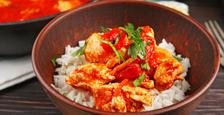
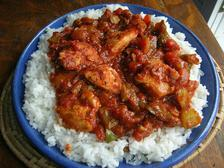
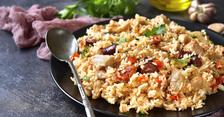
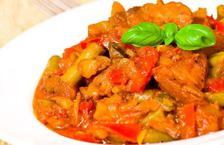
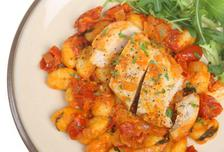
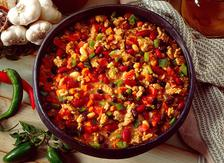
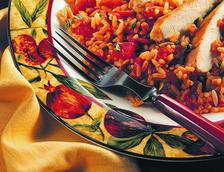
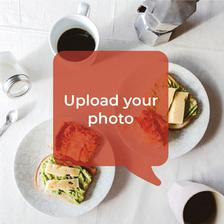
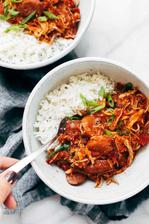
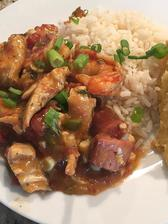
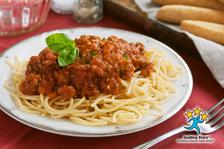
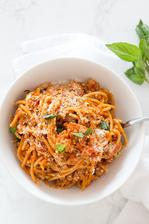
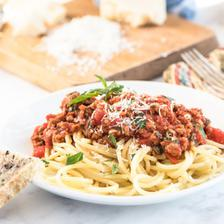
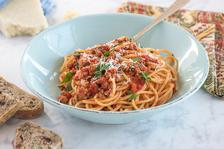
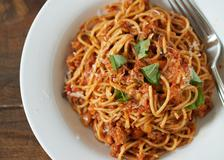
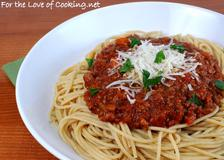
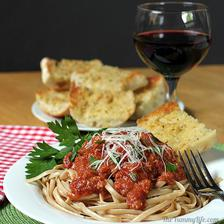
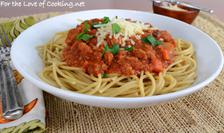
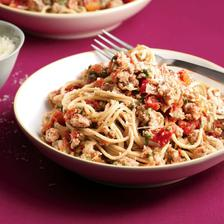
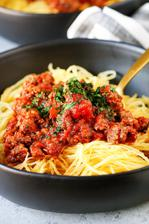
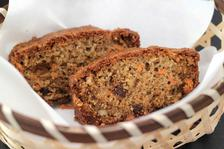
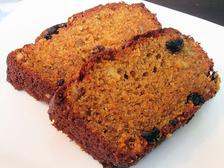
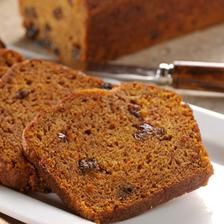
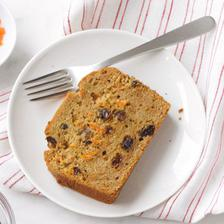
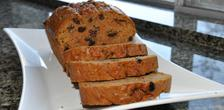
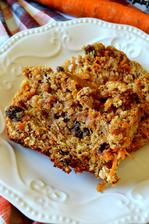
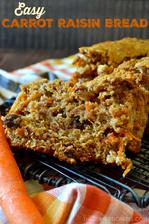
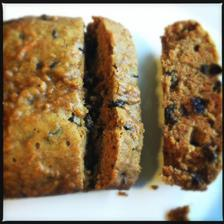
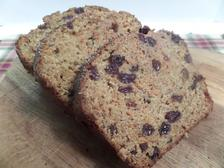
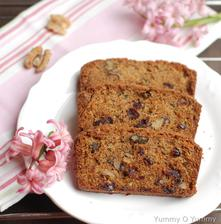
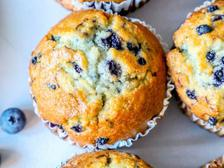
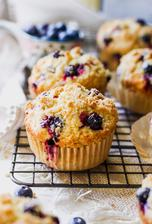
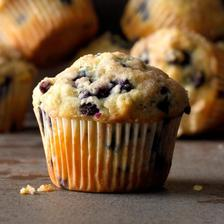
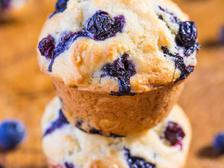
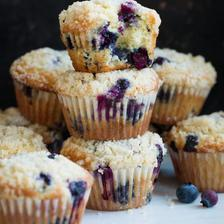
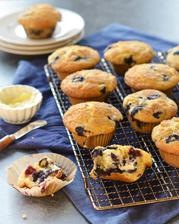
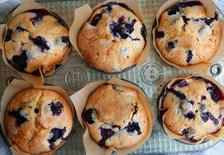
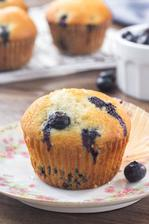
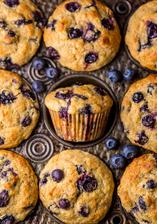
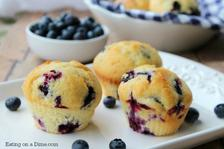
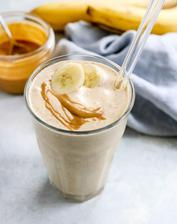
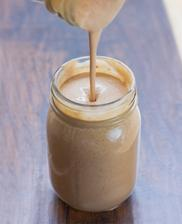
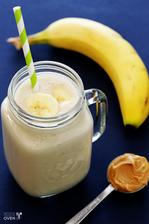
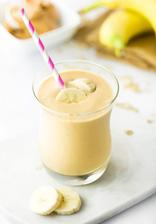
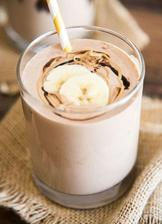
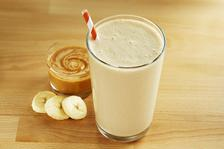
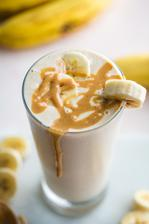
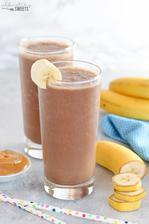
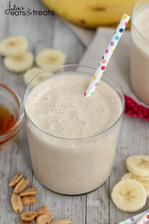
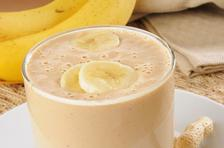
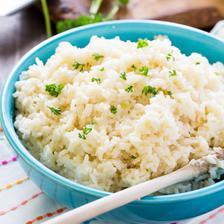
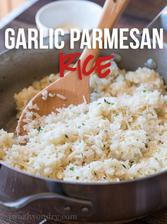
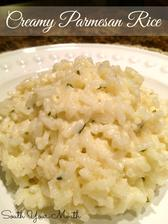
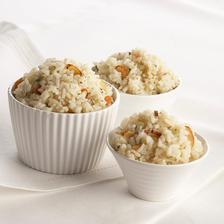
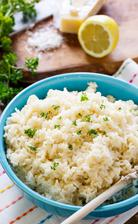
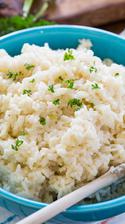
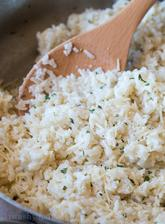
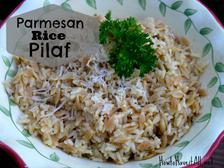
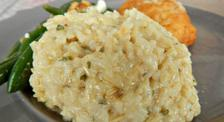
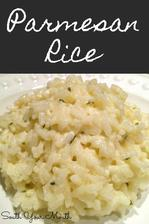
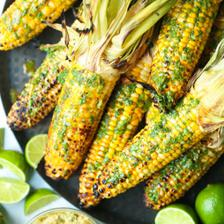
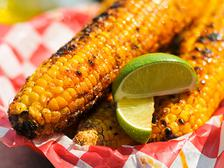
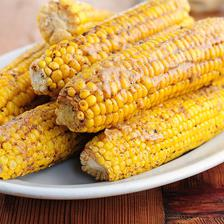
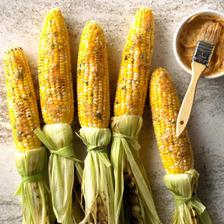
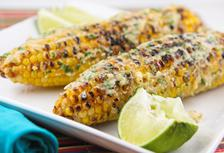
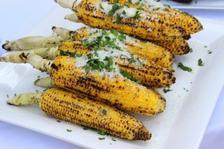
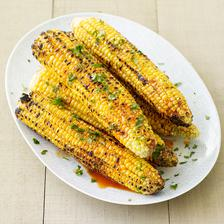
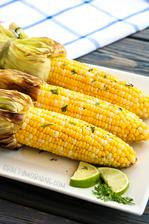
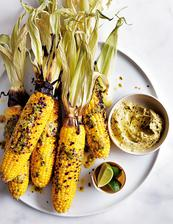
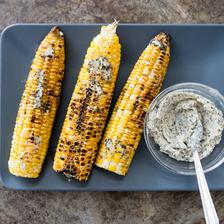
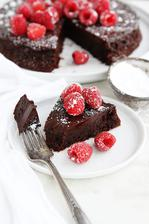
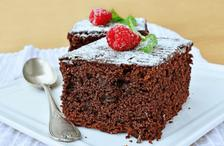
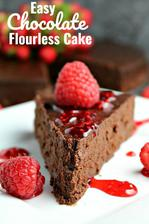
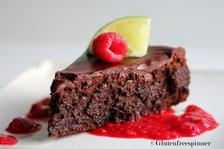
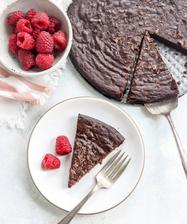
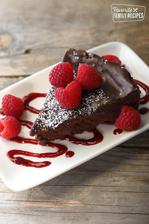
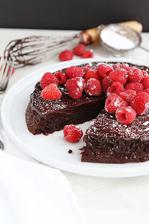
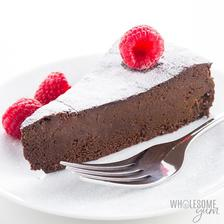
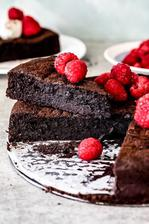
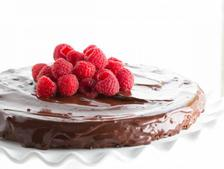
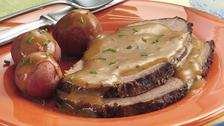
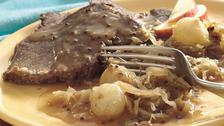
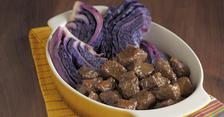
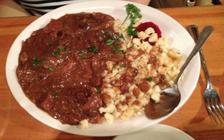
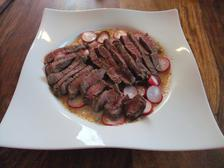
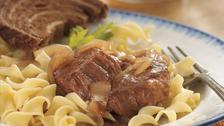
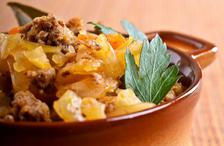
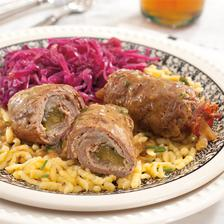
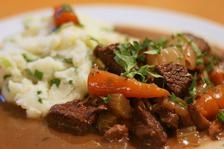
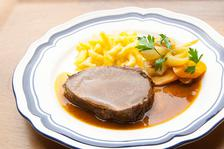
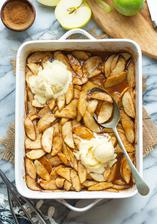
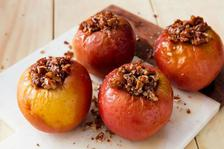
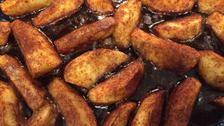
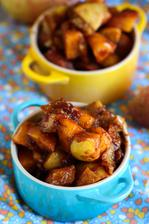
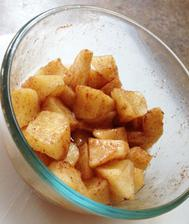
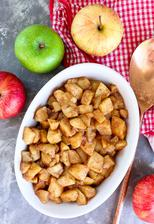
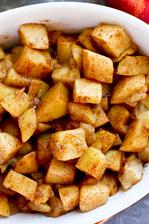
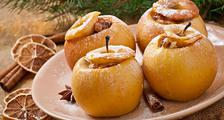
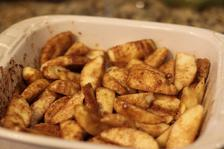
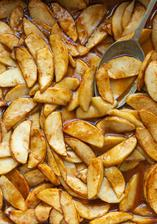
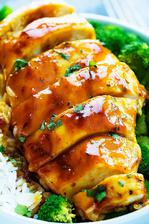
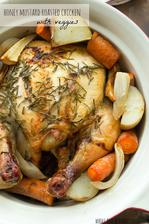
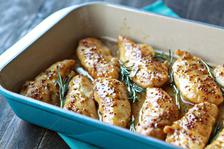
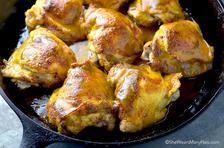
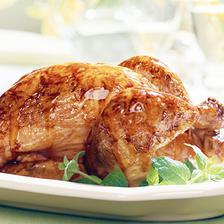
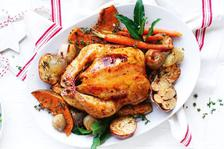
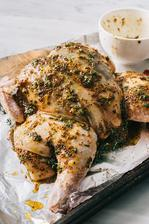
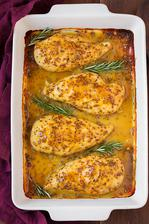
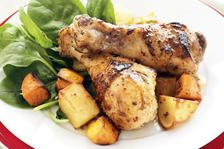
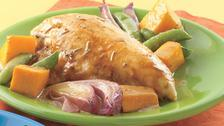
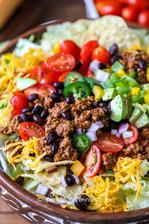
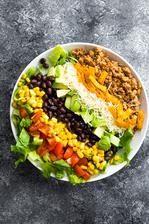
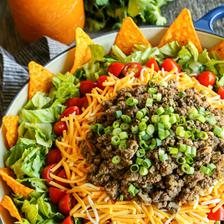
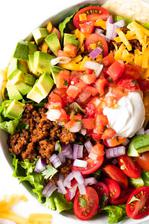
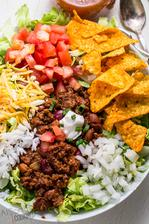
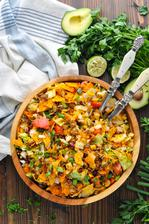
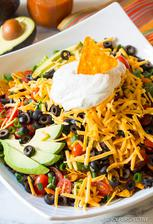
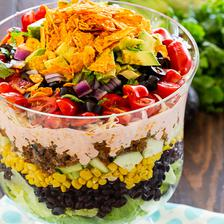
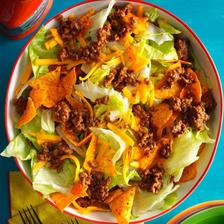
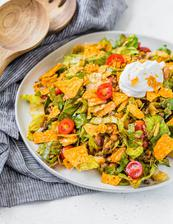
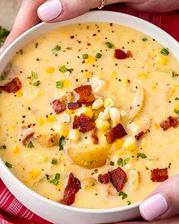
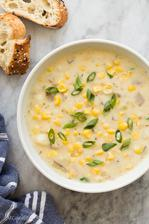
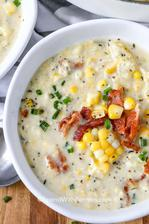
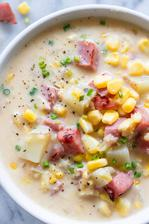
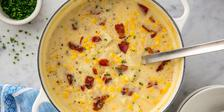
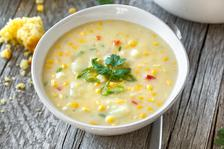
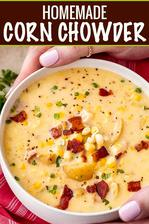
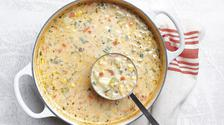
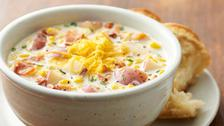
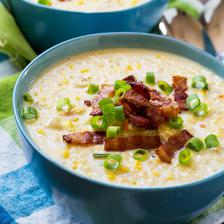
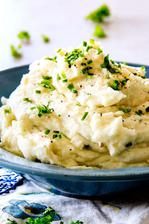
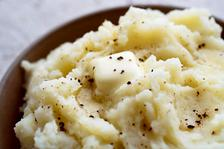
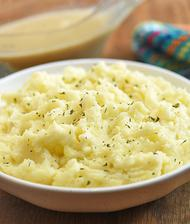
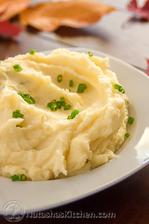
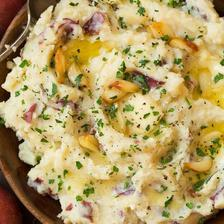
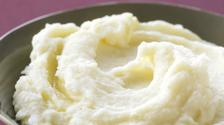
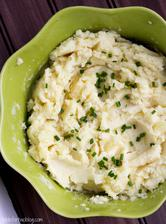
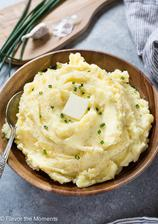
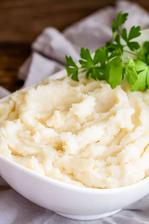
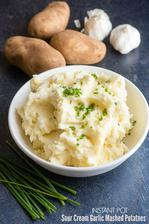
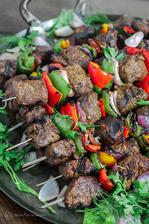
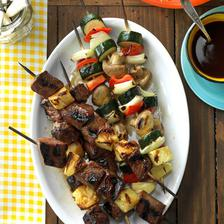
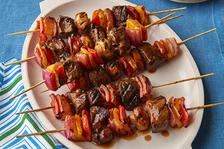
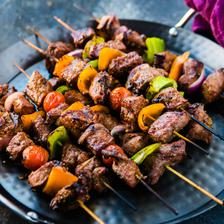
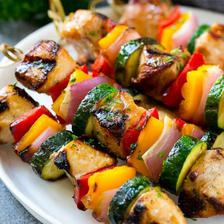
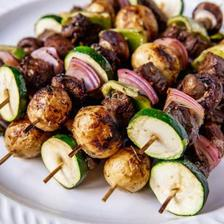
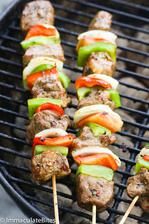
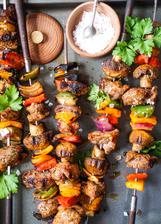
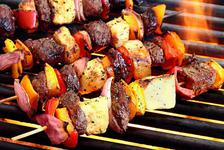
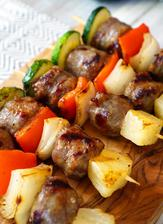
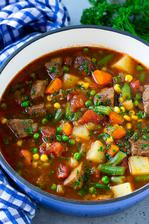
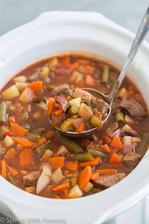
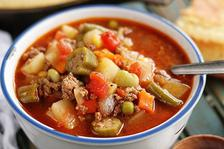
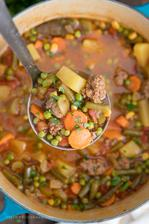
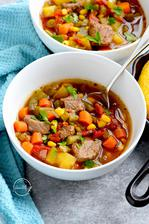
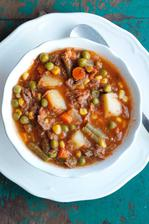
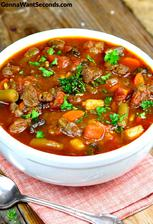
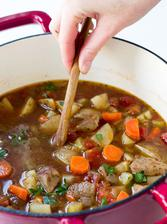
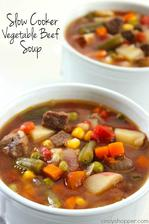
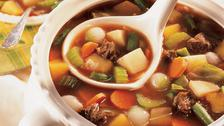
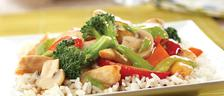
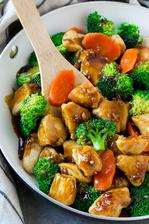
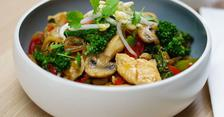
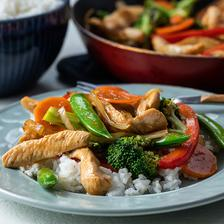
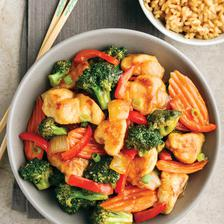
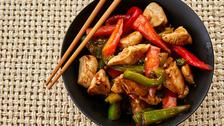
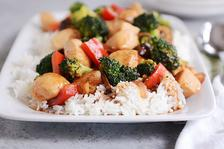
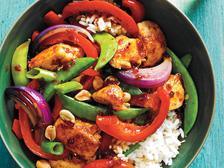
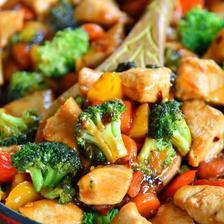
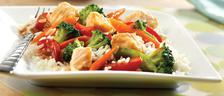
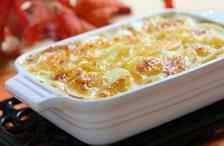
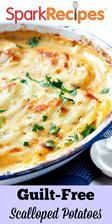
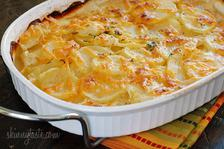
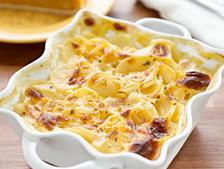
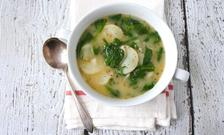
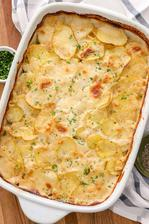
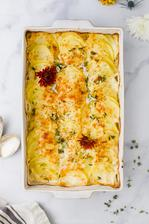
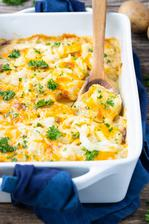
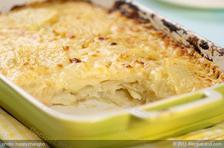
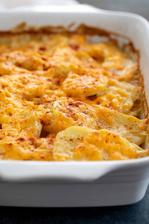
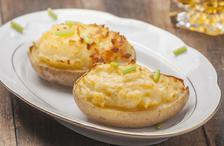
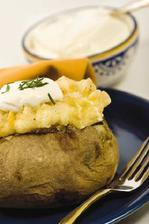
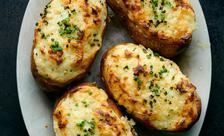
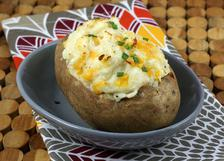
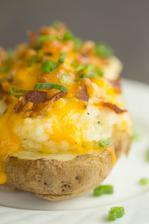
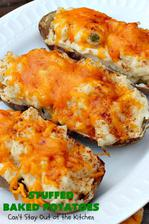
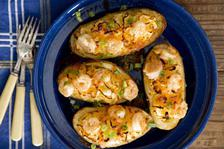
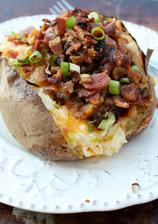
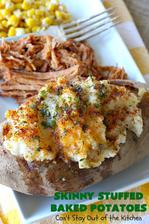
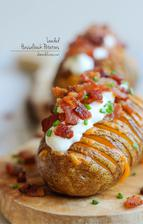
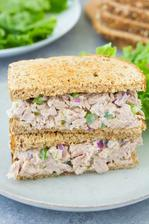
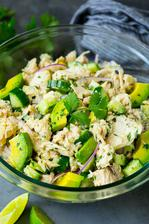
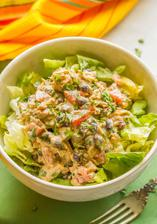
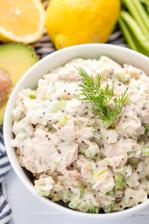
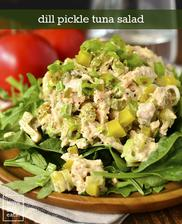
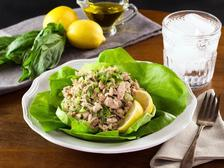
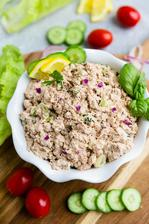
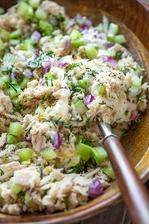
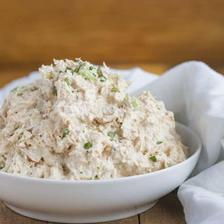
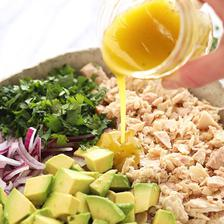

In [49]:
HTML(df_img_source.sample(20).to_html(formatters={**{f"image_{i}": image_formatter for i in range(1, MAX_IMG_NUM + 1)}}, escape=False))

## Persist results

In [50]:
df_out = df_img_source[["recipe_id"] + [f"image_{i}" for i in range(1, MAX_IMG_NUM)]]

In [51]:
df_out.to_csv("../../data/sparkrecipes_images.csv", index=False)